# Data Science Job Postings (Indeed USA)

## Content

This dataset contains job listings across many data science positions which includes data scientist, machine learning engineer, data engineer, business analyst, data science manager, database administrator, business intelligence developer and director of data science in the US. There are 1200 rows and 9 columns. The column headings are job title, company, location, rating, date, salary, description (summary), links and descriptions (full). The data was web scraped from indeed web portal on Nov 20, 2022 using the indeed API.

## Features
-	Title (object): the title that the company posted job
-	company (object): company name advertised
-	Location (object): the detailed address of the company
-	Rating (numeric): the rate of job that is given by other job seekers (this field has 455 null values)
-	Date (object): contains the time of posting the job based on today
-	Salary (object): the range of salary that the company provided (this field has 618 null values)
-	Description (object): contains some detailed information about the job
-	Links (object): the web link that the job advertised on that
-	Descriptions (object): contains other information about the job

## Load Data

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('data_science_jobs_indeed_usa.csv')

## Clean Text Features
I used the cleaning text part from the existing notebook (https://www.kaggle.com/code/yusufolonade/data-sc-jobs-indeed-us)

In [5]:
from bs4 import BeautifulSoup
import unicodedata
import re
import warnings
warnings.filterwarnings('ignore')

In [6]:
# define cleaning functions
# removes html tags and attributes
def parser(text):
  soup = BeautifulSoup(text,'html.parser')
  return soup.get_text()

# normalizes unicode character to regular text
def normalize(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
  return text

# remove url
def remove_URL(text):
    text = re.sub(r'http\S+', '', text) 
    text = re.sub(r'www\S+', '', text)
    return(text)

# remove unwanted spaces
def remove_spaces(text):
    text = re.sub(r'\s+',' ',text)
    text = re.sub(r'-','',text)
    return text

# removes special characters and numbers
def remove_nonletter(text):
    text = re.sub(r'[^a-zA-Z ]+', ' ', text)
    return text

def clean_text(text):
    parser(text)
    normalize(text)
    remove_URL(text)
    remove_spaces(text)
    remove_nonletter(text)

## Data Analyze

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1200 non-null   int64  
 1   Title         1200 non-null   object 
 2   Company       1200 non-null   object 
 3   Location      1200 non-null   object 
 4   Rating        745 non-null    float64
 5   Date          1200 non-null   object 
 6   Salary        582 non-null    object 
 7   Description   1200 non-null   object 
 8   Links         1200 non-null   object 
 9   Descriptions  1200 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 93.9+ KB


In [8]:
dataset.head()

Unnamed: 0                                              Title  \
0           0                                     Data Scientist   
1           1                                   Business Analyst   
2           2  IT Business Intelligence Developer (FT) Remote...   
3           3                                      Data Engineer   
4           4                Network Administrator/dba developer   

                   Company                              Location  Rating  \
0            Driven Brands                           Benicia, CA     2.4   
1         Sabot Consulting                                Remote     NaN   
2            Ballad Health             Remote in Blountville, TN     3.0   
3  Longevity Holdings Inc.  Remote in Minneapolis-Saint Paul, MN     NaN   
4             WKI Kenworth                     Wichita, KS 67219     NaN   

                        Date                     Salary  \
0   PostedPosted 26 days ago                        NaN   
1    PostedPosted 4 days ago         $80 - $120 an hour   
2  PostedPosted 30+ days ago                        NaN   
3    PostedPosted 3 days ago  $90,000 - $110,000 a year   
4  EmployerActive 2 days ago   $50,000 - $70,000 a year   

                                         Description  \
0  You’ll be working alongside a team of eight an...   
1  Preferred candidates will have prior experienc...   
2     Job Details Apply Save Print this job Email a…   
3  Incorporate core data management competencies ...   
4  The Network Administrator provides 2nd level e...   

                                               Links  \
0  https://www.indeed.com/rc/clk?jk=74d176d595225...   
1  https://www.indeed.com/rc/clk?jk=f662b2efb509b...   
2  https://www.indeed.com/rc/clk?jk=58612836c63b8...   
3  https://www.indeed.com/company/TwentyFirst/job...   
4  https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...   

                                        Descriptions  
0  We invite you to join us at Driven Brands!\nHe...  
1  Sabot Consulting (Sabot) is a management consu...  
2  Job Details\nApply\nSave\nPrint this job\nEmai...  
3  Position: Data Engineer\nLocation: MN\nAs a Da...  
4  Full Job Description\nThe Network Administrato...

In [9]:
dataset.isnull().sum()

Unnamed: 0        0
Title             0
Company           0
Location          0
Rating          455
Date              0
Salary          618
Description       0
Links             0
Descriptions      0
dtype: int64

In [11]:
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)

## Data Cleaning & Manipulation

### Title feature
- Standardized and find the distribution

In [17]:
len(dataset.Title.unique())

566

In [35]:
dataset['Title_lower'] = dataset.Title.apply(lambda x: x.lower())#.str.contains('data c').sum()

In [93]:
dataset.Title.apply(lambda x: x.lower()).str.contains('datab').sum()
# data c  dataset.Title_lower.str.contains('data c')
# data e  dataset.Title_lower.str.contains('data e')
# data s  dataset.Title_lower.str.contains('data s')
# data a  dataset.Title_lower.str.contains('data a')
# datab  dataset.Title_lower.str.contains('database')
# bussines  dataset.Title_lower.str.contains('business') & ~dataset.Title_lower.str.contains('data')
# machine  dataset.Title_lower.str.contains('machine') & ~dataset.Title_lower.str.contains('data') 
# software dataset.Title_lower.str.contains('software') & ~dataset.Title_lower.str.contains('data')
# network dataset.Title_lower.str.contains('network') & ~dataset.Title_lower.str.contains('data')

144

In [134]:
def Title_clean_job_title(string):
    if 'data e' in string:
        return 'data engineer'
    elif 'data s' in string:
        return 'data science'
    elif 'data a' in string:
        return 'data analyst'
    elif 'database' in string:
        return 'database'
    elif 'data' in string:
        return 'other data jobs'
    elif 'business' in string:
        return 'business'
    elif 'machine' in string:
        return 'machine learning'
    elif 'software' in string:
        return 'software engineer'
    elif 'developer' in string:
        return 'developer'
    else:
        return 'other categories'

In [158]:
dataset['Title_job'] = dataset.Title_lower.apply(Title_clean_job_title)

In [162]:
dataset.Title.groupby(dataset.Title_job).count()

Title_job
business             264
data analyst          31
data engineer        166
data science         353
database             144
developer             21
machine learning     133
other categories      37
other data jobs       32
software engineer     19
Name: Title, dtype: int64

In [160]:
dataset1 = dataset.drop(['Title','Title_lower'], axis=1)

Text(0.5, 1.0, 'Distribution of Job Title')

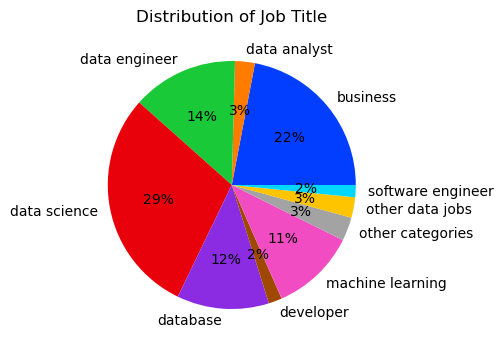

In [163]:
subject_ind = dataset1.groupby('Title_job')['Title_job'].count().index
subject_val = dataset1.groupby('Title_job')['Title_job'].count().values

palette_color = sns.color_palette('bright')
plt.figure(figsize=(4,6))
plt.pie(subject_val,labels=subject_ind,
        colors=palette_color, autopct='%.0f%%')
plt.title('Distribution of Job Title')

I added new feature and droped orginal feature

in addition, created new dataset to continue

### Company feature
- Analyze the values, most of the companies just posted one job on this platform
- Find the relation between the company with the most posted job and the needed jobs of them

In [193]:
check_repeated_companies = dataset1.Company.groupby(dataset.Company).count()

In [218]:
check_repeated_companies[check_repeated_companies >= 4].index

Index(['Apex Systems', 'Apple', 'Artech Consulting LLC', 'Bayer', 'CVS Health',
       'Calance US', 'Capgemini', 'Capital One', 'Cash App', 'Chewy', 'Ezoic',
       'JPMorgan Chase Bank, N.A.', 'MTG Services', 'Nike',
       'PNC Financial Services Group', 'Phasorsoft LLC', 'Radcube LLC',
       'Robert Half', 'Sandhills Global, Inc.', 'Strategic Employment',
       'UnitedHealth Group', 'University of Illinois'],
      dtype='object', name='Company')

In [195]:
len(check_repeated_companies)

883

In [209]:
df_crc = pd.DataFrame(check_repeated_companies.groupby(check_repeated_companies).sum())

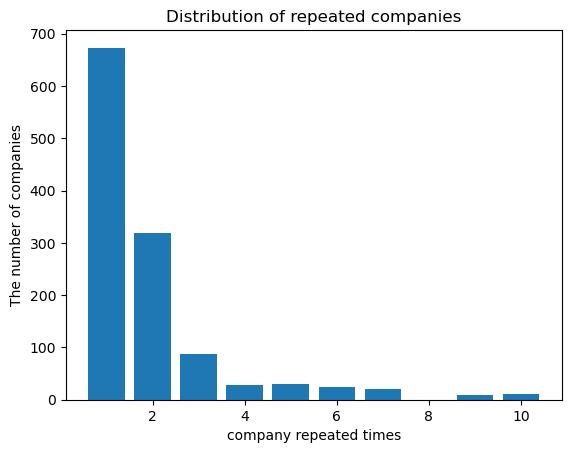

In [215]:
plt.bar(df_crc.index, df_crc.Company)
plt.xlabel('company repeated times')
plt.ylabel('The number of companies')
plt.title('Distribution of repeated companies')
plt.show()

In [394]:
dataset1_c = dataset1[pd.DataFrame(dataset1.Company.tolist()).
                      isin(list(check_repeated_companies[check_repeated_companies >= 4].index)).values]

In [410]:
pd.DataFrame(dataset1_c.groupby(['Company','Title_job'])['Location'].count()).unstack().fillna(0)

Location                                          \
Title_job                    business data analyst data engineer data science   
Company                                                                         
Apex Systems                      3.0          0.0           0.0          0.0   
Apple                             1.0          0.0           0.0          3.0   
Artech Consulting LLC             0.0          0.0           0.0          0.0   
Bayer                             0.0          0.0           2.0          1.0   
CVS Health                        0.0          0.0           1.0          6.0   
Calance US                        0.0          0.0           5.0          0.0   
Capgemini                         0.0          0.0           2.0          0.0   
Capital One                       0.0          0.0           2.0          5.0   
Cash App                          2.0          0.0           0.0          2.0   
Chewy                             0.0          0.0           0.0          6.0   
Ezoic                             0.0          0.0           0.0          0.0   
JPMorgan Chase Bank, N.A.         1.0          0.0           0.0          2.0   
MTG Services                      0.0          0.0           0.0          5.0   
Nike                              0.0          0.0           0.0          1.0   
PNC Financial Services Group      0.0          0.0           0.0          1.0   
Phasorsoft LLC                    0.0          0.0           0.0          1.0   
Radcube LLC                       0.0          0.0           2.0          2.0   
Robert Half                       1.0          0.0           0.0          0.0   
Sandhills Global, Inc.            4.0          0.0           2.0          0.0   
Strategic Employment              0.0          0.0           0.0          0.0   
UnitedHealth Group                1.0          1.0           0.0          0.0   
University of Illinois            0.0          0.0           0.0          0.0   

                                                                  \
Title_job                    database developer machine learning   
Company                                                            
Apex Systems                      0.0       1.0              0.0   
Apple                             0.0       0.0              0.0   
Artech Consulting LLC             0.0       0.0              0.0   
Bayer                             0.0       0.0              2.0   
CVS Health                        1.0       0.0              0.0   
Calance US                        0.0       0.0              0.0   
Capgemini                         0.0       1.0              0.0   
Capital One                       0.0       0.0              0.0   
Cash App                          0.0       0.0              2.0   
Chewy                             0.0       0.0              0.0   
Ezoic                             0.0       0.0              0.0   
JPMorgan Chase Bank, N.A.         1.0       0.0              0.0   
MTG Services                      0.0       0.0              0.0   
Nike                              0.0       0.0              1.0   
PNC Financial Services Group      0.0       0.0              0.0   
Phasorsoft LLC                    0.0       1.0              2.0   
Radcube LLC                       0.0       0.0              0.0   
Robert Half                       0.0       0.0              0.0   
Sandhills Global, Inc.            1.0       0.0              0.0   
Strategic Employment              5.0       0.0              0.0   
UnitedHealth Group                0.0       0.0              1.0   
University of Illinois            0.0       0.0              0.0   

                                                               \
Title_job                    other categories other data jobs   
Company                                                         
Apex Systems                              0.0             2.0   
Apple                                     

Text(0.5, 1.0, 'Distribution of Job Title based on most repeated companies ads')

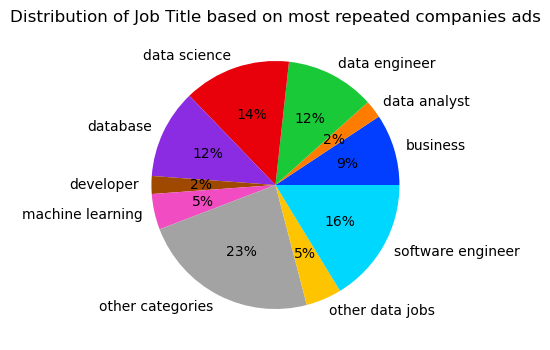

In [405]:
subject_ind = pd.DataFrame(dataset1_c.groupby(['Company','Title_job'])['Location'].count()).groupby(['Title_job']).max().index
subject_val = pd.DataFrame(dataset1_c.groupby(['Company','Title_job'])['Location'].count()).unstack().groupby(['Company']).fillna(0).max().values

palette_color = sns.color_palette('bright')
plt.figure(figsize=(4,6))
plt.pie(subject_val,labels=subject_ind,
        colors=palette_color, autopct='%.0f%%')
plt.title('Distribution of Job Title based on most repeated companies ads')

### Location feature
- Standardized and find the distribution
- Find the relation between the Location and the title

In [294]:
dataset1.groupby(['Location']).Location.count().sort_values(ascending=False)

Location
Remote                                           283
+1 locationRemote                                 52
New York, NY                                      25
Remote in New York, NY                            13
+2 locationsRemote                                12
                                                ... 
Hybrid remote in Texhoma, TX 73949                 1
Hybrid remote in Stevens Point, WI 54482           1
Hybrid remote in Seattle, WA 98134                 1
Hybrid remote in Seattle, WA 98109+1 location      1
Woonsocket, RI 02895                               1
Name: Location, Length: 584, dtype: int64

In [364]:
dataset1.Location.str.contains('Remote').sum()
# CA 135 # NY 108 # TX 60 # WI 12 # WA 24 # MA 37 # MN 14 # TN 10 # IL 39 # CT 12 # MD 23 # CO 28 # NJ 34 # NC 18 # GA 28
# DC 25 # OH 20 # OR 23 # VA 26 # PA 23 # FL 21 # MI 14 # MO 12 # NE 10

611

In [553]:
dataset1[~dataset1.Location.str.contains(', NY') & ~dataset1.Location.str.contains(', WA')
        & ~dataset1.Location.str.contains(', TX') & ~dataset1.Location.str.contains(', WI')
        & ~dataset1.Location.str.contains(', MA') & ~dataset1.Location.str.contains(', MN')
        & ~dataset1.Location.str.contains(', TN') & ~dataset1.Location.str.contains(', CA')
        & ~dataset1.Location.str.contains(', IL') & ~dataset1.Location.str.contains('Remote')
        & ~dataset1.Location.str.contains(', CT') & ~dataset1.Location.str.contains(', MD')
        & ~dataset1.Location.str.contains(', CO') & ~dataset1.Location.str.contains(', NJ')
        & ~dataset1.Location.str.contains(', NC') & ~dataset1.Location.str.contains(', GA')
        & ~dataset1.Location.str.contains(', DC') & ~dataset1.Location.str.contains(', OH')
        & ~dataset1.Location.str.contains(', OR') & ~dataset1.Location.str.contains(', VA')
        & ~dataset1.Location.str.contains(', MI') & ~dataset1.Location.str.contains(', OK')
        & ~dataset1.Location.str.contains(', PA') & ~dataset1.Location.str.contains(', FL')
        & ~dataset1.Location.str.contains(', NE') & ~dataset1.Location.str.contains(', MO')]['Location'].tail(30)

623              Las Vegas, NV 89101 (Downtown area)
624              Las Vegas, NV 89101 (Downtown area)
626                                   South Carolina
630                                       New Jersey
639                                            Texas
664                           Phoenix, AZ+1 location
671                             Birmingham, AL 35298
706                            Little Rock, AR 72223
724             West Des Moines, IA 50265+1 location
745                          Clemson, SC+3 locations
747                Olive Branch, MS 38654+1 location
758                  Provo, UT 84606 (East Bay area)
803                        +4 locationsHybrid remote
817                          Phoenix, AZ+2 locations
839     Scottsdale, AZ 85260 (North Scottsdale area)
846                                   Birmingham, AL
847                                   North Carolina
849                             South Bend, IN 46628
875                           Indianapolis, IN

In [384]:
def Location_cleaning(string):
    if ', CA' in string:
        return 'CA'
    elif ', NY' in string:
        return 'NY'
    elif ', TX' in string:
        return 'TX'
    elif ', WI' in string:
        return 'WI'
    elif ', WA' in string:
        return 'WA'
    elif ', MA' in string:
        return 'MA'
    elif ', MN' in string:
        return 'MN'
    elif ', TN' in string:
        return 'TN'
    elif ', IL' in string:
        return 'IL'
    elif ', CT' in string:
        return 'CT'
    elif ', MD' in string:
        return 'MD'
    elif ', CO' in string:
        return 'CO'
    elif ', NJ' in string:
        return 'NJ'
    elif ', NC' in string:
        return 'NC'
    elif ', GA' in string:
        return 'GA'
    elif ', DC' in string:
        return 'DC'
    elif ', OH' in string:
        return 'OH'
    elif ', OR' in string:
        return 'OR'
    elif ', VA' in string:
        return 'VA'
    elif ', PA' in string:
        return 'PA'
    elif ', FL' in string:
        return 'FL'
    elif ', MI' in string:
        return 'MI'
    elif ', MO' in string:
        return 'MO'
    elif ', NE' in string:
        return 'NE'
    elif 'remote' in string.lower():
        return 'remote'
    else:
        return 'other loc'
    

In [385]:
dataset1['location_clean'] = dataset1.Location.apply(Location_cleaning)

In [561]:
dataset2 = dataset1.drop('Location', axis= 1)

In [562]:
dataset2.head()

Company  Rating                       Date  \
0            Driven Brands     2.4   PostedPosted 26 days ago   
1         Sabot Consulting     NaN    PostedPosted 4 days ago   
2            Ballad Health     3.0  PostedPosted 30+ days ago   
3  Longevity Holdings Inc.     NaN    PostedPosted 3 days ago   
4             WKI Kenworth     NaN  EmployerActive 2 days ago   

                      Salary  \
0                        NaN   
1         $80 - $120 an hour   
2                        NaN   
3  $90,000 - $110,000 a year   
4   $50,000 - $70,000 a year   

                                         Description  \
0  You’ll be working alongside a team of eight an...   
1  Preferred candidates will have prior experienc...   
2     Job Details Apply Save Print this job Email a…   
3  Incorporate core data management competencies ...   
4  The Network Administrator provides 2nd level e...   

                                               Links  \
0  https://www.indeed.com/rc/clk?jk=74d176d595225...   
1  https://www.indeed.com/rc/clk?jk=f662b2efb509b...   
2  https://www.indeed.com/rc/clk?jk=58612836c63b8...   
3  https://www.indeed.com/company/TwentyFirst/job...   
4  https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...   

                                        Descriptions      Title_job  \
0  We invite you to join us at Driven Brands!\nHe...   data science   
1  Sabot Consulting (Sabot) is a management consu...       business   
2  Job Details\nApply\nSave\nPrint this job\nEmai...       business   
3  Position: Data Engineer\nLocation: MN\nAs a Da...  data engineer   
4  Full Job Description\nThe Network Administrato...      developer   

  location_clean  
0             CA  
1         remote  
2             TN  
3             MN  
4      other loc

In [563]:
df_location = pd.DataFrame(dataset2.groupby('location_clean').location_clean.count().sort_values(ascending=False))

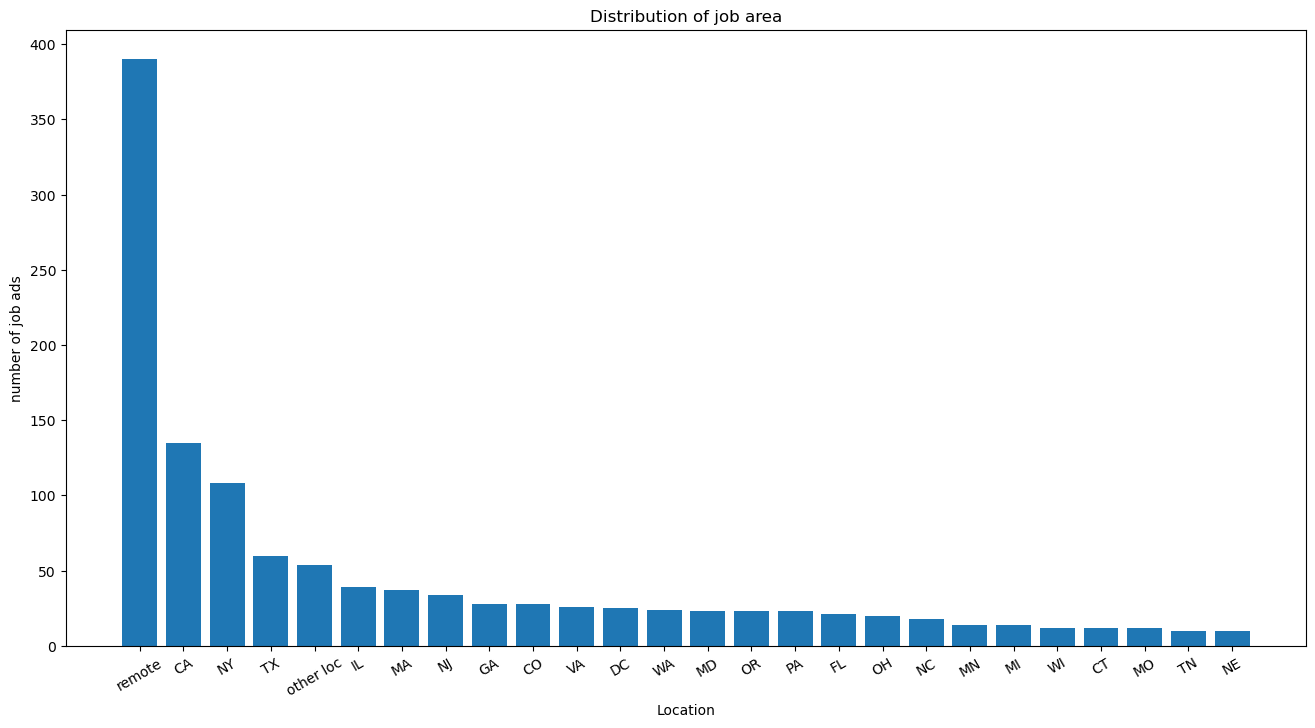

In [564]:
plt.figure(figsize=(16,8))
plt.bar(df_location.index, df_location.location_clean)
plt.xlabel('Location')
plt.xticks(rotation=30)
plt.ylabel('number of job ads')
plt.title('Distribution of job area')
plt.show()

In [565]:
df_location.T

location_clean  remote   CA   NY  TX  other loc  IL  MA  NJ  GA  CO  ...  FL  \
location_clean     390  135  108  60         54  39  37  34  28  28  ...  21   

location_clean  OH  NC  MN  MI  WI  CT  MO  TN  NE  
location_clean  20  18  14  14  12  12  12  10  10  

[1 rows x 26 columns]

In [566]:
dataset2_c = dataset2[pd.DataFrame(dataset2.location_clean.tolist()).
                      isin(list(df_location[df_location >= 60].index)).values]

In [567]:
graph_loc_c = pd.DataFrame(dataset2_c.groupby(['location_clean','Title_job'])['Company'].
             count()).unstack().groupby(['location_clean']).fillna(0).max().unstack().T

Text(0.5, 1.0, 'Distribution of Job Title based on location ads')

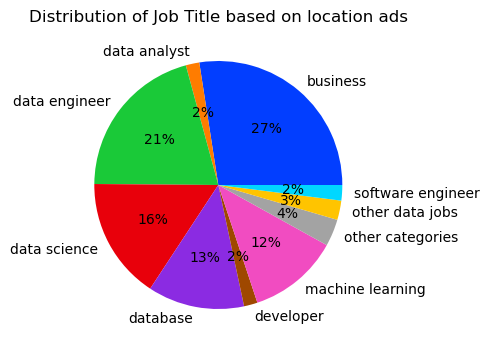

In [568]:
subject_ind = graph_loc_c.index
subject_val = graph_loc_c.Company

palette_color = sns.color_palette('bright')
plt.figure(figsize=(4,6))
plt.pie(subject_val,labels=subject_ind,
        colors=palette_color, autopct='%.0f%%')
plt.title('Distribution of Job Title based on location ads')

In [569]:
pd.DataFrame(dataset2_c.groupby(['location_clean','Title_job'])['location_clean'].count()).unstack().fillna(0)

location_clean                                          \
Title_job            business data analyst data engineer data science   
location_clean                                                          
CA                        8.0          1.0          19.0         55.0   
CO                        2.0          2.0           2.0          8.0   
CT                        5.0          0.0           0.0          4.0   
DC                        8.0          2.0           1.0          4.0   
FL                        4.0          0.0           0.0          6.0   
GA                        2.0          4.0           2.0         10.0   
IL                       10.0          1.0           2.0         11.0   
MA                       11.0          1.0           2.0         14.0   
MD                        6.0          0.0           0.0          8.0   
MI                        3.0          0.0           1.0          2.0   
MN                        3.0          1.0           4.0          6.0   
MO                        3.0          0.0           2.0          6.0   
NC                        1.0          0.0           3.0          5.0   
NE                        6.0          0.0           0.0          0.0   
NJ                        6.0          0.0           3.0          8.0   
NY                       10.0          5.0          13.0         60.0   
OH                        2.0          3.0           1.0          9.0   
OR                       13.0          0.0           2.0          3.0   
PA                        3.0          0.0           3.0          7.0   
TN                        8.0          0.0           0.0          1.0   
TX                       20.0          1.0           3.0         18.0   
VA                        3.0          2.0           6.0         12.0   
WA                        2.0          0.0           4.0         11.0   
WI                        3.0          1.0           0.0          5.0   
other loc                13.0          0.0          11.0         17.0   
remote                  109.0          7.0          82.0         63.0   

                                                                     \
Title_job      database developer machine learning other categories   
location_clean                                                        
CA                  5.0       0.0             30.0              3.0   
CO                  8.0       1.0              3.0              0.0   
CT                  1.0       0.0              0.0              1.0   
DC                  8.0       0.0              1.0              0.0   
FL                  6.0       1.0              1.0              3.0   
GA                  5.0       1.0              2.0              1.0   
IL                  1.0       0.0              8.0              0.0   
MA                  0.0       0.0              5.0              2.0   
MD                  9.0       0.0              0.0              0.0   
MI                  5.0       0.0              3.0              0.0   
MN                  0.0       0.0              0.0              0.0   
MO                  1.0       0.0              0.0              0.0   
NC                  5.0       1.0              1.0              0.0   
NE                  3.0       1.0              0.0              0.0   
NJ                  1.0       4.0              3.0              4.0   
NY                  3.0       1.0             14.0              1.0   
OH                  5.0       0.0              0.0              0.0   
OR                  3.0       0.0              0.0              2.0   
PA                  4.0       1.0              1.0              3.0   
TN                  0.0       0.0              0.0              1.0   
TX                  7.0       1.0              6.0              1.0   
VA                  1.0       0.0              1.0              0.0   
WA                  3.0       0.0              3.0              1.0   
WI                  1.0       1.0              1.0 

### Rating feature
- Manipulate the Null values
- Distribution Rating based on Title

In [570]:
dataset2.head()

Company  Rating                       Date  \
0            Driven Brands     2.4   PostedPosted 26 days ago   
1         Sabot Consulting     NaN    PostedPosted 4 days ago   
2            Ballad Health     3.0  PostedPosted 30+ days ago   
3  Longevity Holdings Inc.     NaN    PostedPosted 3 days ago   
4             WKI Kenworth     NaN  EmployerActive 2 days ago   

                      Salary  \
0                        NaN   
1         $80 - $120 an hour   
2                        NaN   
3  $90,000 - $110,000 a year   
4   $50,000 - $70,000 a year   

                                         Description  \
0  You’ll be working alongside a team of eight an...   
1  Preferred candidates will have prior experienc...   
2     Job Details Apply Save Print this job Email a…   
3  Incorporate core data management competencies ...   
4  The Network Administrator provides 2nd level e...   

                                               Links  \
0  https://www.indeed.com/rc/clk?jk=74d176d595225...   
1  https://www.indeed.com/rc/clk?jk=f662b2efb509b...   
2  https://www.indeed.com/rc/clk?jk=58612836c63b8...   
3  https://www.indeed.com/company/TwentyFirst/job...   
4  https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...   

                                        Descriptions      Title_job  \
0  We invite you to join us at Driven Brands!\nHe...   data science   
1  Sabot Consulting (Sabot) is a management consu...       business   
2  Job Details\nApply\nSave\nPrint this job\nEmai...       business   
3  Position: Data Engineer\nLocation: MN\nAs a Da...  data engineer   
4  Full Job Description\nThe Network Administrato...      developer   

  location_clean  
0             CA  
1         remote  
2             TN  
3             MN  
4      other loc

#### Use the mean of the value of rating when the jobs exist on the same location and same title

In [571]:
fillna_rating = dataset2.groupby(['Title_job','location_clean'])['Rating'].mean().fillna(0)

In [572]:
fillna_rating

Title_job          location_clean
business           CA                3.8200
                   CO                3.6000
                   CT                3.9800
                   DC                3.6400
                   FL                3.3000
                                      ...  
other data jobs    remote            3.7000
software engineer  CA                4.4375
                   IL                4.2000
                   NJ                3.8000
                   remote            3.7000
Name: Rating, Length: 167, dtype: float64

In [573]:
for i in range(0,len(fillna_rating)):
    rule = (dataset2.Title_job == fillna_rating.index[i][0]) & (dataset2.location_clean == fillna_rating.index[i][1])
    dataset2.loc[rule, 'Rating'] = dataset2.loc[rule, 'Rating'].fillna(format(fillna_rating.values[i],'.2'))

In [574]:
dataset2.isnull().sum()

Company             0
Rating              0
Date                0
Salary            618
Description         0
Links               0
Descriptions        0
Title_job           0
location_clean      0
dtype: int64

In [575]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1200 non-null   object
 1   Rating          1200 non-null   object
 2   Date            1200 non-null   object
 3   Salary          582 non-null    object
 4   Description     1200 non-null   object
 5   Links           1200 non-null   object
 6   Descriptions    1200 non-null   object
 7   Title_job       1200 non-null   object
 8   location_clean  1200 non-null   object
dtypes: object(9)
memory usage: 84.5+ KB


In [576]:
dataset2['Rating'] = dataset2.Rating.astype(float)

In [577]:
dataset2.groupby(['Title_job'])['Rating'].mean()

Title_job
business             3.576894
data analyst         3.406452
data engineer        3.592169
data science         3.705382
database             3.636111
developer            3.280952
machine learning     3.805263
other categories     3.535135
other data jobs      3.668750
software engineer    4.168421
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of Ratings per Job dvs')

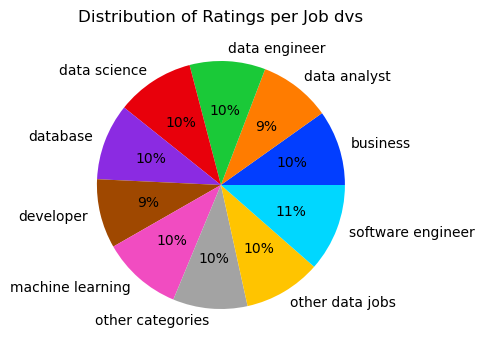

In [580]:
subject_ind = dataset2.groupby(['Title_job'])['Rating'].mean().index
subject_val = dataset2.groupby(['Title_job'])['Rating'].mean().values

palette_color = sns.color_palette('bright')
plt.figure(figsize=(4,6))
plt.pie(subject_val,labels=subject_ind,
        colors=palette_color, autopct='%.0f%%')
plt.title('Distribution of Ratings per Job dvs')

### Date feature
-  Visual based on the category

In [581]:
dataset2.Date.groupby(dataset2.Date).count()

Date
EmployerActive 1 day ago       35
EmployerActive 10 days ago      2
EmployerActive 11 days ago      7
EmployerActive 15 days ago      2
EmployerActive 18 days ago      1
EmployerActive 2 days ago      56
EmployerActive 3 days ago      22
EmployerActive 4 days ago      15
EmployerActive 5 days ago       8
EmployerActive 6 days ago       6
EmployerActive 8 days ago       2
EmployerActive 9 days ago       4
Hiring ongoing                 20
PostedJust posted               2
PostedPosted 1 day ago         46
PostedPosted 10 days ago       23
PostedPosted 11 days ago       32
PostedPosted 12 days ago       26
PostedPosted 13 days ago       18
PostedPosted 14 days ago        2
PostedPosted 15 days ago        9
PostedPosted 16 days ago       26
PostedPosted 17 days ago       27
PostedPosted 18 days ago       13
PostedPosted 19 days ago       18
PostedPosted 2 days ago        75
PostedPosted 20 days ago        5
PostedPosted 21 days ago        8
PostedPosted 22 days ago        6
PostedPos

In [584]:
date_emp = dataset2[dataset2.Date.str.contains('EmployerActive')]
date_post = dataset2[dataset2.Date.str.contains('PostedPosted')]
date_other = dataset2[~dataset2.Date.str.contains('PostedPosted') & ~dataset2.Date.str.contains('EmployerActive')]

In [585]:
date_other.head()

Company  Rating            Date                     Salary  \
27            Pepsico     3.8  Hiring ongoing  $90,000 - $100,000 a year   
31           Dworo.io     3.7  Hiring ongoing   $78,000 - $98,000 a year   
36         Cognoticai     4.2  Hiring ongoing          $85 - $95 an hour   
37  Kaiser Permanente     4.1     PostedToday                        NaN   
60    PCS Global Tech     3.3  Hiring ongoing  $98,931 - $105,918 a year   

                                          Description  \
27  Manage and scale data pipelines from internal ...   
31  Define configuration specifications and busine...   
36  7+ years of overall software development and/o...   
37  Completes work assignments by applying up-to-d...   
60  Developing and managing business intelligence ...   

                                                Links  \
27  https://www.indeed.com/company/PepsiCo/jobs/Ju...   
31  https://www.indeed.com/company/Dworo.io/jobs/B...   
36  https://www.indeed.com/company/Cognoticai/jobs...   
37  https://www.indeed.com/rc/clk?jk=3a088535bc27d...   
60  https://www.indeed.com/company/PCS-GLOBAL-TECH...   

                                         Descriptions      Title_job  \
27  Compensation: $80k - $90k\nBenefits: Medical, ...  data engineer   
31  We are looking for a Business Analyst who will...       business   
36  7+ years of overall software development and/o...  data engineer   
37  Job Summary:\n\nIn addition to the responsibil...   data science   
60  At PCS Global Tech we care about the professio...       business   

   location_clean  
27         remote  
31             TX  
36             CA  
37             CA  
60             CA

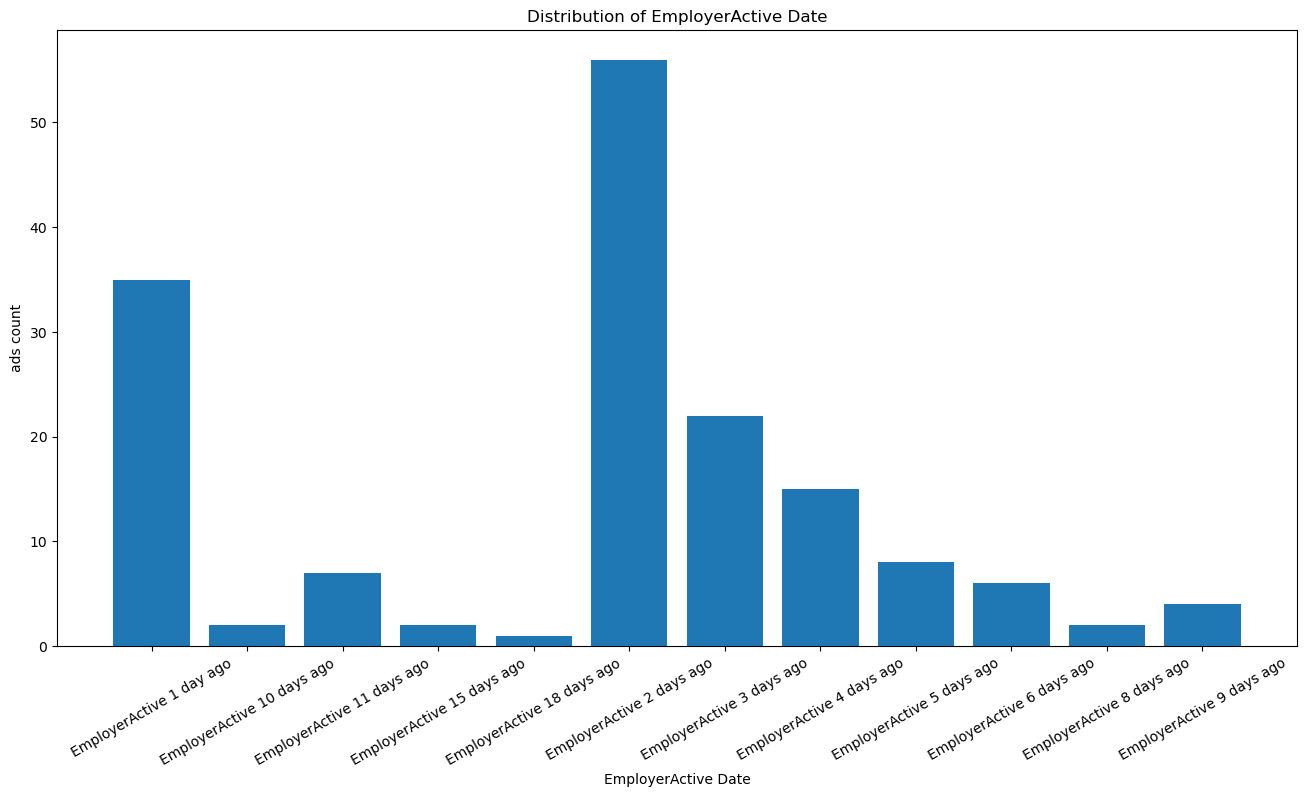

In [589]:
plt.figure(figsize=(16,8))
plt.bar(date_emp.groupby(['Date'])['Title_job'].count().index,date_emp.groupby(['Date'])['Title_job'].count().values)
plt.xlabel('EmployerActive Date')
plt.xticks(rotation=30)
plt.ylabel('ads count')
plt.title('Distribution of EmployerActive Date')
plt.show()

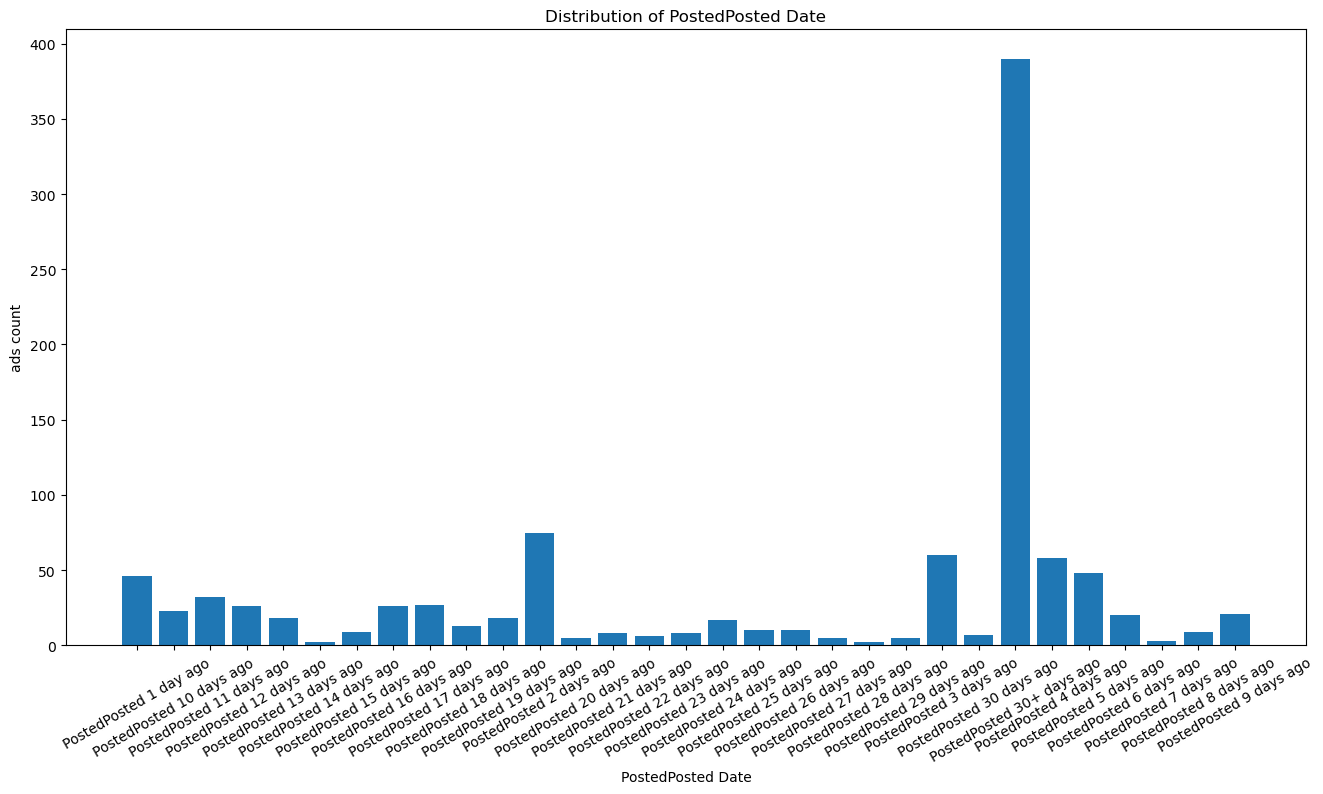

In [590]:
plt.figure(figsize=(16,8))
plt.bar(date_post.groupby(['Date'])['Title_job'].count().index,date_post.groupby(['Date'])['Title_job'].count().values)
plt.xlabel('PostedPosted Date')
plt.xticks(rotation=90)
plt.ylabel('ads count')
plt.title('Distribution of PostedPosted Date')
plt.show()

#### Peak on the old open positions

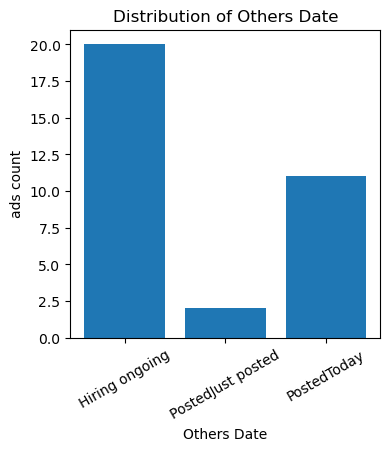

In [594]:
plt.figure(figsize=(4,4))
plt.bar(date_other.groupby(['Date'])['Title_job'].count().index,date_other.groupby(['Date'])['Title_job'].count().values)
plt.xlabel('Others Date')
plt.xticks(rotation=30)
plt.ylabel('ads count')
plt.title('Distribution of Others Date')
plt.show()

### Salary & Links features

more than half of Salary feature is null and Links feature in this job is not necessary so I will drop both of these features

In [605]:
dataset3 = dataset2.drop(['Salary','Links'], axis = 1)

In [606]:
dataset3.head()

Company  Rating                       Date  \
0            Driven Brands     2.4   PostedPosted 26 days ago   
1         Sabot Consulting     3.6    PostedPosted 4 days ago   
2            Ballad Health     3.0  PostedPosted 30+ days ago   
3  Longevity Holdings Inc.     3.8    PostedPosted 3 days ago   
4             WKI Kenworth     0.0  EmployerActive 2 days ago   

                                         Description  \
0  You’ll be working alongside a team of eight an...   
1  Preferred candidates will have prior experienc...   
2     Job Details Apply Save Print this job Email a…   
3  Incorporate core data management competencies ...   
4  The Network Administrator provides 2nd level e...   

                                        Descriptions      Title_job  \
0  We invite you to join us at Driven Brands!\nHe...   data science   
1  Sabot Consulting (Sabot) is a management consu...       business   
2  Job Details\nApply\nSave\nPrint this job\nEmai...       business   
3  Position: Data Engineer\nLocation: MN\nAs a Da...  data engineer   
4  Full Job Description\nThe Network Administrato...      developer   

  location_clean  
0             CA  
1         remote  
2             TN  
3             MN  
4      other loc

### Description & Descriptions features
- Clean the features
- Check the most repeated words

I will use the function has been provided by another author to make first level of cleaning and continue on them

In [607]:
dataset3['Description'] = dataset3.Description.astype(str).str.lower()  # convert text to lowercase
dataset3['Description'] = dataset3.Description.apply(parser)
dataset3['Description'] = dataset3.Description.apply(normalize)
dataset3['Description'] = dataset3.Description.apply(remove_URL)
dataset3['Description'] = dataset3.Description.apply(remove_spaces)
dataset3['Description'] = dataset3.Description.apply(remove_nonletter)
dataset3.Description.head()

0    youll be working alongside a team of eight ana...
1    preferred candidates will have prior experienc...
2       job details apply save print this job email a 
3    incorporate core data management competencies ...
4    the network administrator provides  nd level e...
Name: Description, dtype: object

In [608]:
dataset3['Descriptions'] = dataset3.Descriptions.astype(str).str.lower()  # convert text to lowercase
dataset3['Descriptions'] = dataset3.Descriptions.apply(parser)
dataset3['Descriptions'] = dataset3.Descriptions.apply(normalize)
dataset3['Descriptions'] = dataset3.Descriptions.apply(remove_URL)
dataset3['Descriptions'] = dataset3.Descriptions.apply(remove_spaces)
dataset3['Descriptions'] = dataset3.Descriptions.apply(remove_nonletter)
dataset3.Description.head()

0    youll be working alongside a team of eight ana...
1    preferred candidates will have prior experienc...
2       job details apply save print this job email a 
3    incorporate core data management competencies ...
4    the network administrator provides  nd level e...
Name: Description, dtype: object

In [609]:
dataset3

Company  Rating                       Date  \
0               Driven Brands     2.4   PostedPosted 26 days ago   
1            Sabot Consulting     3.6    PostedPosted 4 days ago   
2               Ballad Health     3.0  PostedPosted 30+ days ago   
3     Longevity Holdings Inc.     3.8    PostedPosted 3 days ago   
4                WKI Kenworth     0.0  EmployerActive 2 days ago   
...                       ...     ...                        ...   
1195             HyperScience     3.9   PostedPosted 24 days ago   
1196          N9 it solutions     3.6    PostedPosted 4 days ago   
1197              Marathon TS     3.7    PostedPosted 2 days ago   
1198             Red Ventures     3.2  PostedPosted 30+ days ago   
1199     Cloud and Things Inc     4.2   PostedPosted 12 days ago   

                                            Description  \
0     youll be working alongside a team of eight ana...   
1     preferred candidates will have prior experienc...   
2        job details apply save print this job email a    
3     incorporate core data management competencies ...   
4     the network administrator provides  nd level e...   
...                                                 ...   
1195  we turn ml lab experiments into enterpriseread...   
1196  experience using a variety of data mining data...   
1197    years working with databases  data modeling ...   
1198  you will be responsible for overseeing the tea...   
1199  develop user stories that define the project b...   

                                           Descriptions         Title_job  \
0     we invite you to join us at driven brands  hea...      data science   
1     sabot consulting  sabot  is a management consu...          business   
2     job details apply save print this job email a ...          business   
3     position  data engineer location  mn as a data...     data engineer   
4     full job description the network administrator...         developer   
...                                                 ...               ...   
1195  company description hyperscience is transformi...  machine learning   
1196  job title   data scientist position   w  emplo...      data science   
1197  data engineer power bi location  remote  based...     data engineer   
1198  in this role  you will have the opportunity to...      data science   
1199  position  business analyst location  remote du...          business   

     location_clean  
0                CA  
1            remote  
2                TN  
3                MN  
4         other loc  
...             ...  
1195         remote  
1196         remote  
1197         remote  
1198             NY  
1199         remote  

[1200 rows x 7 columns]

In [600]:
import pandasql as ps
import wordcloud
from wordcloud import WordCloud, STOPWORDS

(-0.5, 1599.5, 799.5, -0.5)

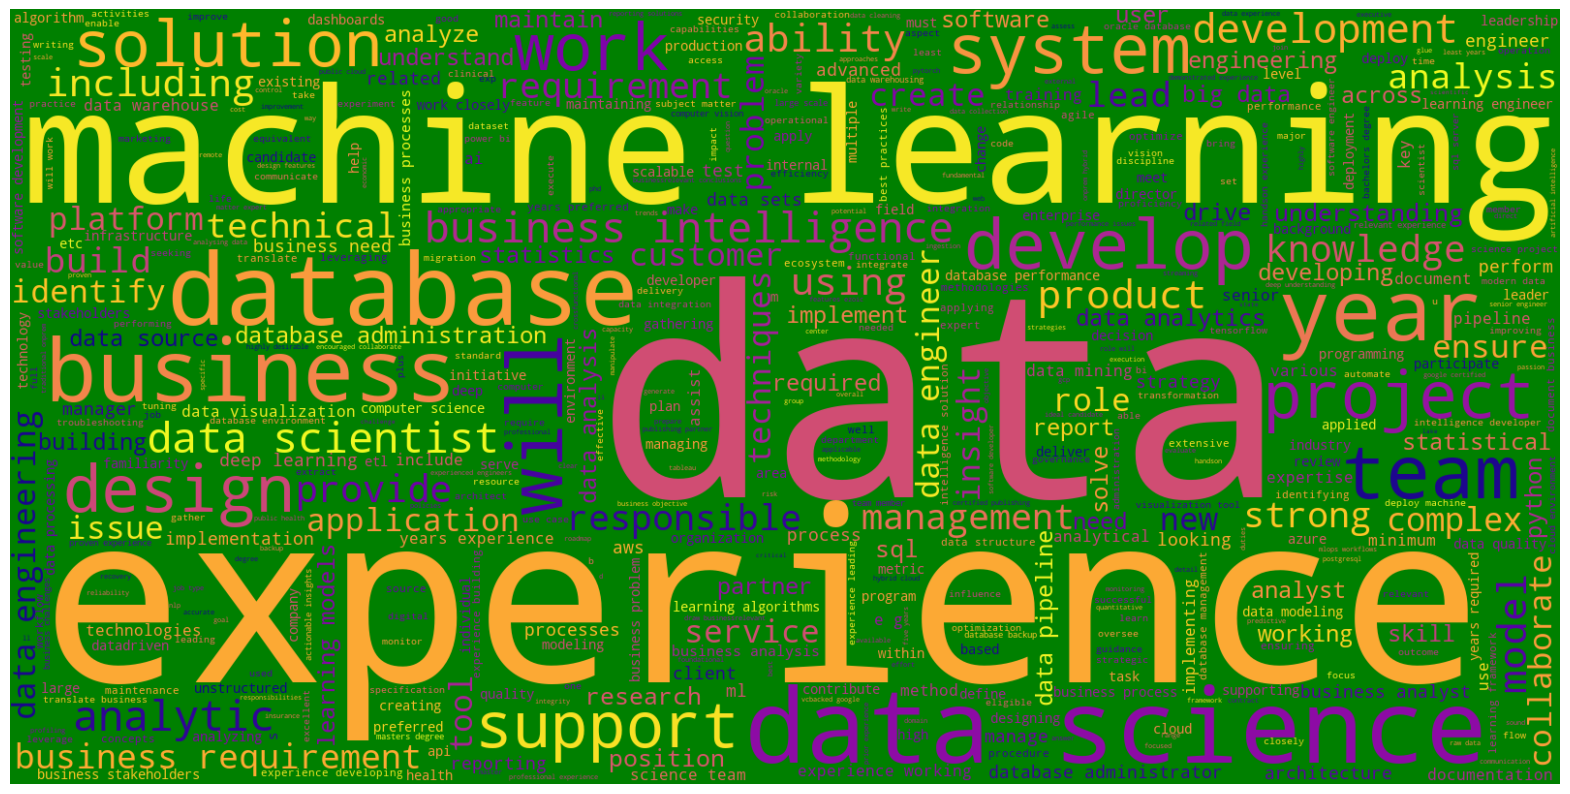

In [611]:
word_string=" ".join(dataset3.Description.str.lower())
plt.figure(figsize=(20,14))
wc = WordCloud(background_color="green", stopwords = STOPWORDS, max_words=500, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)
plt.imshow(wc.recolor( colormap= 'plasma' , random_state=17), interpolation="bilinear")
plt.axis('off')

#### The most repeated words: 
- Data,
- experience,
- project,
- support,
- machine learning

(-0.5, 1599.5, 799.5, -0.5)

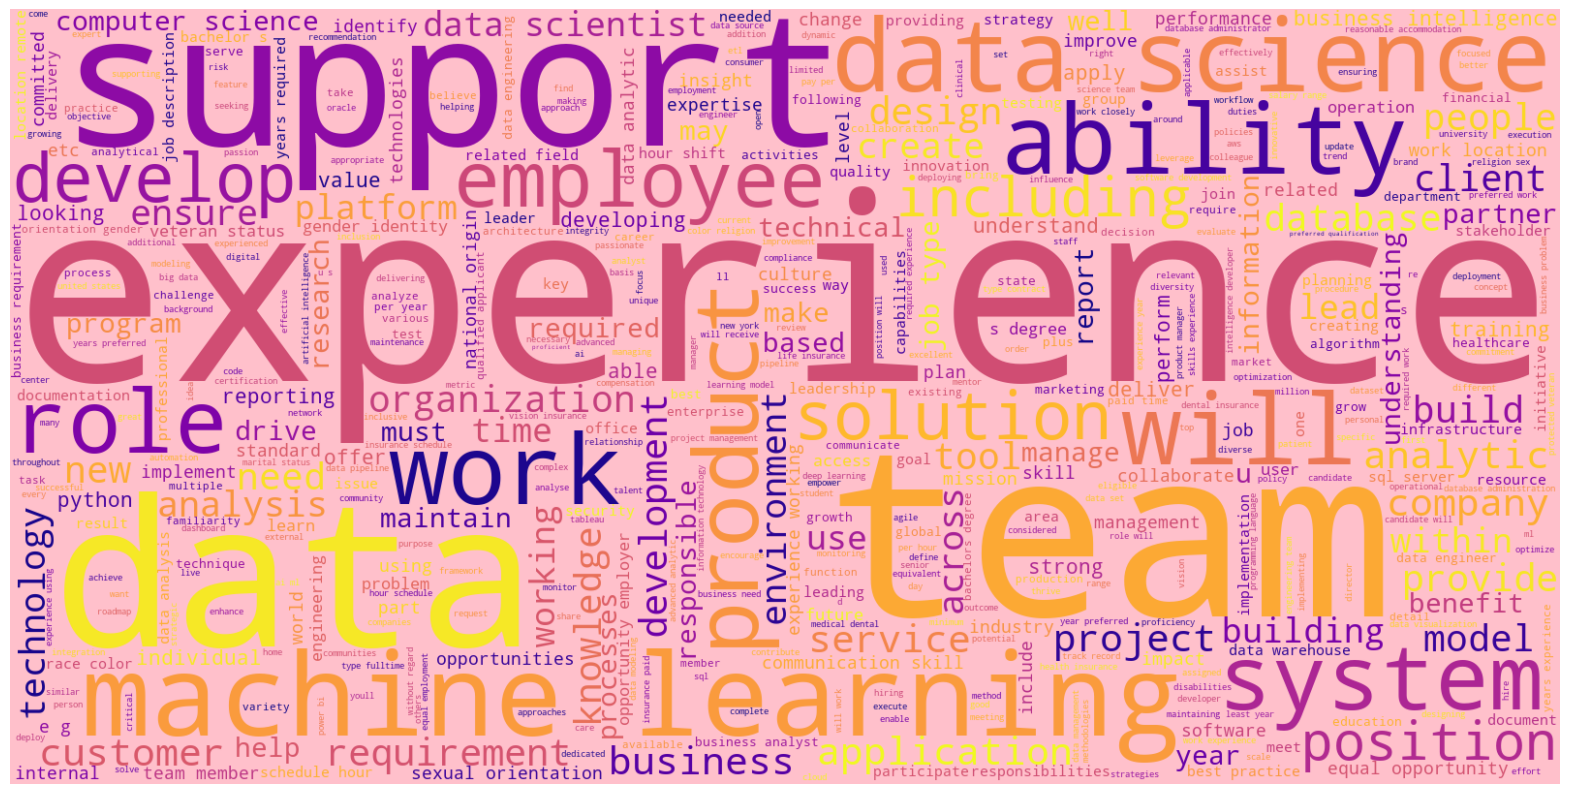

In [614]:
word_string=" ".join(dataset3.Descriptions.str.lower())
plt.figure(figsize=(20,14))
wc = WordCloud(background_color="pink", stopwords = STOPWORDS, max_words=500, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABiIAAAMaCAYAAAALM17cAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOz9d5Bm13nmCf7O9Z836V1leV+oggcBEiBoBBKkRFKibI9a6umeNrM73du9GzE7szs9ETPRMRsxs707G907Oz0ttTRSt0xLlCElit4AIDxQQBmUr8qq9O7z5rpz9o/zVWZlZWY5VBVA8nsiECzmd80595577znv877PI5RSii666KKLLrrooosuuuiiiy666KKLLrrooosuuuiii3sA44NuQBdddNFFF1100UUXXXTRRRdddNFFF1100UUXXXTxk4suEdFFF1100UUXXXTRRRdddNFFF1100UUXXXTRRRdd3DN0iYguuuiiiy666KKLLrrooosuuuiiiy666KKLLrro4p6hS0R00UUXXXTRRRdddNFFF1100UUXXXTRRRdddNFFF/cMXSKiiy666KKLLrrooosuuuiiiy666KKLLrrooosuurhn6BIRXXTRRRdddNFFF1100UUXXXTRRRdddNFFF1100cU9Q5eI6KKLLrrooosuuuiiiy666KKLLrrooosuuuiiiy7uGbpERBdddNFFF1100UUXXXTRRRdddNFFF1100UUXXXRxz2Dd8pY/eOMWN1Sd/xW33ZguuujiziFjRRwqlALLERiG6D6GXfzUIQ4kMtbfIdMWCFMgRPdB6EJDKYWMFDJWGIbAsLvj404gI0kcKQRgOAZC0L2O9xFBKAkjRdIz7vi6x7EiiCSWKbCtbl5SF1100cWtQCGBCIiv+0UAFuIWwiuKGAhZjZtchYHAvRvN7KKLu47Vsa8AG/EhzWlefb5M9DPZnZ9uBoVC31OJvlbmB9yi24MekwFr36U2YG5433V/r46PqzC41fGsx1bU2ac7tjbEM4/c0ma3TkTcEErfVCNAGQFCmRAnAQlCgjJ+7AZ1F138uOHysRYv/N4yzUrMp/5BL9sfSXZfjl381OH1373E5BvLxKHi0d/cyvhHejDt7nPQhUa7EnL8L6a58sYyg/uyPPDlUdL93gfdrB87XHhxkff+agaAx/7OVvr2ZBHdad59w299bZJ//zfTfOv/8ygJ984u/BunKvwvX7nMsw/38BvPj9zlFnbRRRdd/ITCKKG8r6Lc76CDd0pzELKA0fwyBM/e/Bj228jk74JR0vt3gmgi2o+o/d/vXds/5FBKgYI4iHVSkQIMgWkbmPaHM+j9UwVzGpX4ExANROsXIdr9QbdoYzhvIBN/gPA/jmg/ByQ+6BZ9eCHKqMRfoqwzGM1fhejgXT38SuBftBAqzV3PkjUvIlO/DeYMmiCIEM2/i/CfYeNQdxvlvohK/gFcJdbibRiN34B4583PZ59AJv4IEe5DtD8PKn8XO/PThbtCRCgkMjlB0P9NouwxzPpevIn/FGWXiVPnMZvjmK3xle39UNJsx0ipcCyDpGfS9GPCSKGUIpO0aPk6yyCKFaYhUEAuZVFrRkSdTMZM0sQyux+lDwpxpPAbEiHAy9x5Vl4XdwelqZDyTES9FFFdiJExmHeJauyiiy66+ElAuxIy8fIScSBZvtRg/nStS0TcASZ+tERzOQAFl19bpmdHGsPsMhFd3H3EQYAMQqxkAmF05/xddNHFBwzlQrQdYSyjRAOMZTCWbu8YshcRHgFzQR/DnAZa96K1P15QUJtrcvprE1QuN5CRJNHjse3pIUYf6/+gW9fFjwuUA7IHZJquEv3NYIBK6+ul7k01lrJOo9L/M2b5X6OrFe4eRDyM0fx1TRA7r6Hst268PQ4EDyFkD8qcRjkv3d4JlQ2yCCpLd2y9P9wdIsJdJOj7DspsYFUPooyo84OJTEyACFeICCkVPzpW5rtvLtFsxRzYnuHTj/bwlR/MMbPk0/Zjfu5j/XznjWUKWYvj5+rsGE2wUA74b35zJ//qTy/T9mMc2+AXPzHIAzszd6MLXdwBFicCvvtvl0jlTZ7/p31YTpeI+CAxsNNl/HCCoCXp3+ZgWt370UUXHxSaywFxKEn1ugijK1vzYYEwBXbCRIYS0zWxEz/ZwXMZK5rLAcKAZNG5a+PQTpoYpgAFTsqCD9H4vld9/onEj8GlKR07xfLRE2z9xc/jZLtz/i666OKDhVBpRPA0BE8DoOy3kMl/D6J968eItyKaf3fl/8v0/xtl36oM9k8uIj/m0vemKV+ss+3ZYZK9HkoqssPJD7ppXfwYQYQPYoYPftDN+LGAUDlE6xfu4RkU2Mfv4fETiGivPpOxCNa7N9neRKgeCHsgHkJZZzqVabcGEe3DrO97H+3t4iruChEhrTLKquJOfxmZmCTMaybKiFKAibIaK9vWmjEvHyvzqUd6ePpIASEELxxdRgj4p788jhDw3/xvZ/Fsk1/6xADvXWzwy58c4l/87gXeOlNFSsU//NIYxy/U+dpLC10i4gOCUopGKWLhok/qwe7k4MOA4T0eP/dfdjN7u+jig4aMJC/9q7MsTzT52f/xMInC3c3+6OLOkcg77P70ADPvVujfm6F/X/aDbtI9g1KK+nyb7/wPp0gWHT75X++7awkDOz/ej5Lah2XrR3s/NMS3UopWKeDb//1J3KzFp//5gXuWJHFppkU2pSt4a80IQwgyKYv+goNp6HNGsaJcCynVQqSEhGtQzNqkEuYKQdIOYparIfWmrgROJ016sg5Ox79EKSjXQ5arIWEkSXom8XXS5FIpKrWIpWpIFEtcx6CYscmmrJVj+GHMYjmk0YqxLEGlHqHUh+O+dfGTDaUUUTNASYWVdDBuUs0eNgOiVohXWK2CUUqhpMIvt3CyHqb9k0MiS9mR5bnHXjv36zxddHGnkJGkMtUgP55m56dHP+jmdLEpBBChxDKIFlpDywGZ7XicrL5fFC1dNaRSoLJrdPgVMRizgImQg2vOoJD62KLBqp+KqasdVLJznmuPFerziGD1IDILKrNO+1+hQNRB1HQlgIj0v4l021UCVFpnz6+DRImmbpcIQQnABZnpbL+RL0EARg3wV2TrwQKVQKgU12fWq46UEaK5Qd9T667x7UL3v7W2kkvZIHOIDWSsdPsroHSbddtaXPWV0Pc2dd29bYFRB9FG2cf1dTMnWQk/KwNUriPXdC0kirbed8XHwQGZRuC9r37fKRQRGOVOn682M90ZzxvPRbQkVRuMKhCCuM4PSJl6/zX9lyjR1mOTAN1XpzO2rn+u2ppAUVl9LKPGqleG3XkWN5Yk0+OroceXWC0gQLnXjK9rIXXlnmjo7ZUA5XX6b3Gn9+TuCLcYMcqIEPHagLQywk5jVwdlvRWRcLUc09VGl+oRuZSFbQnSCYtqI8bJGaSTFq5jkElaSKWYWfJ593yN3/ubaWzL4MD26wduF/cLka8ozUTUlq436uqiiy66+OlGbbZNsxyu9yDs4gOHm7bY9/wQ+54f+qCbcs+hYkV1uk1Qj0gWN1pM3TmGj+QZPpK/q8e8G1ASKlMt/HqEm7232oT/xb88yeMH8syXfE5cqIMQ7BxJ8l/97W1sHUoSx4qL001+/2+meeNUFT+UDPe5PPd4L59/so9c2sYPJa8cr/Cn35/l9OUGhhDsGE3yy58c5LF9OTzXpNqI+O2vTvKtN5Zo+5LdW5K4jkEnpohSisVyyL/72iQvvlui0YrpKzg8faTAr3xqiJ6cQxBJXj1R4be+OsnEXJu+nM1gr0u1Ed64k1184JCtRVQcbL6BMDHcLML6EGtgS8XcW5OEzYDhj2zDzd44aWbx+Ayzb17mwK8/hpNeXRCHDZ9Tf/QWO79wiMxI/h43+v5hcTrCciBXtO6ppGp5Qcsi53pM7G4VexfXoLncRkYKL+fQLvvEgUSYAidl42btNcSVUoo4kPi1kKgdgQLTNXEzNpZnrtm2XQ2I/Rg35xC1Y4J6iIoVwhQkezxMR8eI/EpA0IjwqwF+LcTNOJQv1wAwHZNUr4dhrZKSUTvGr4XEgY5DWJ6Fm7ExnbVS0e1KQBzEeDmHsBUTNFbPn+r1MGyDOJA0Flokezxayz7CFHg5BxlK/GqI6Rl4ORfTNlBKIUNJ0IiI2jEykiDAckycrI3lrvbfrwWErRg3YxM2I8JWDChMxySRdzDstW1VUhG2Y4JaQBxIQFfxOkkLJ2OvELhKKWJf4tcCoo6UueWauFlnXf+vh1ISFTYhaqGkDkAKwwTTQ9gp/e9bgCIC6zS430eZ58FoQ9zXqRR6BKEyrAQn7ZPI1L8B/2MYrV+Ca4P7oorM/ncgezGr/+Ka48dgzKGcV1D2uzoITgzKQcgBrf8fHoZrA6ZGBZn8QzAvrBAYovUlRPtzrPeIiFDOS6jEXyIavwHmFMp5C0RFNyseR/ifQIUHryMjYpQxi3JfRtnv6OC0MiAeQgQfg/Bwh1hYGzBWztso5wUwF3TblK2Dy9EhRPuzWhrp2r6bsyjnZZR1/Jq+u52+PwvhobXX8bYRabmk5O92SJgGxH0Yzb8F0eH1m5szyMQfI1QOwj1gn0BZF3QgWyUQwSMI/1mU7F8lI+z3UM4LKOtKh2xSyMz/tLo2VjlE+3lE8NFrTiRRxhLKeR1lv66JEkFnbD3RGVt57jsZIWraF8g+qivfRBPhfxLR+jlQxU32aaKcH6Lclzukl98hGCJN5sRbEO3PIMLHOjvEnb6/pqvjzOXOn/sR/kcgfFhf/6t9t84iU7+N8D+tCQTndZQxq88jcwj/E+B/7DoyQmnCzprojK/3NOGjFCgPEW9DtD8F8Z5r9olQ5hTKeRFln9DEijIhHsXwn0WFB+6YILor0x0RJRFRiijzHphNECHKWSJOXEGZDcxgtTOFjI1lCSZmdSZZOmGyZcDjwlSTs1eaRLFi73iKSr3zcrzaUENwYFuaiZkWv/KpIUxTUMzefpapUop2XdKqxvgNSRzpp8EwBZYjcFMGyZyJ5Yh1L3KlFDKCeimiXZNEvva0sBwDL2OQypvY3vosn9pSRG0hItNn4SQMaosRfkNiuYL8gIWTNGjXJdX5iLAtsT2DwrCN7a22IQok8xcDhICeMS27Uy9FNCsxcQjCADdpkCqYeOmNP0Ll2ZD6coztCYrD9oZtBZg50yYKFemiRWHIXul7HCpqSzFhW1KZi7h0tAlAoxwzebK9LiMyN2iT6TE3/SC2GzHNUky7cx8MIbA9QTJvkipsvl8UKGqLEa1qTKbPIlO0CH1JvRTTrsXEkUJ0jpXKmySyHQmJuwylFEFL0SzHtBv6Piil/UssV+AmDRJZE8cTCOMGkwKpaJRjWlVJ0JbIWLfftMF29dhKZMx11zcKFNWFkEZpLRkkDEFxxCaZu8XJhFK0apJGKSJoKqRUmKbASRgkCyaJTfw/GuWI8myElzbI9VvIGBqliHZdEocKYeh7kC5aeGnjhvdAKYWMoVmOadViwrZuh2EITEsfJ5ExcdPGppm3QVvqe1GTRKF+ri1HkMgapAsWhtXNAOvi/mDhbH1lEfFBQ8kYxAbPsOrMBLvPxE8s4lCxcKb2QTfjvkJGkvnT96/Pv/c30/yXv76Nf/Yr27g02+Kf/29n+fffnOH/9hs7KNVD/vT7c5yZbPLf/t0dFLM23359ia98f46ka/KlZwY4c7nBH39nht6Cw7/8x7q0/Le+Osnv/vU0xazNwe0ZvvnqIl/70QK//plhnj5S4OyVJv/8357Tpp7oqouvfH+Wb76+xH/393Yy0ufx5ukKv/XVKRzL4D/7whiXZ1v88XdmsUzB//h/2I1pCH7vb6Y5P/3BapLLKCZutYjbPiqOAYGwTOx0CsNdK6ulohi/VEH6PgiB4TjYmRSGpZcySimQiujq8SId9BGWhZVMYCa8lePFbZ+o2cJ0HZSURK02SLXpuWUcE9UaxH6g36nXwLBtvN7iShtUHBPVm8S+D0ohbAsrmcT03Duag/jnvkZcnWAzZls4Gdztn8Pq2Xvbx75vEOgqBs9aCSbeCQzTIDWUxfJ+cqoMlYIf/mWFwXGHR55N37PqMqXgrR/UUcCjn0yT7/lx0ba+Gji5pLNx4+FO0KPzm6iCOauDgbKoJTdWfm3pwB8RyIFOgPDaIzd1kE80Qej3D8rVmaTXBnx+CnDum5NUrjTY+vQQ028u6IC8ISjuyLLt2WHS/Z1gloKwFbNwosT02ws0l3yUVLhZh8HDPQwd6cHNOCtTy8lX5lm+WGX0sX6qVxosnasQNCNMW3D413aRHdH3ZOboErPvLuPXAvxKwHIz4ujvaamr7EiK/V/chpd3dBynEjB7dInZY8v41QAhBMlel+GH+ujfX8BOroa3Lv9ojvJEjbGP9FO+WGf5fJWgpc//4N/eTXogSXWywWv/vxMc+IXtTLwwi4wlW54cpF0JmDu2jJd32PXcGMUduoK2NtPk8stz1GaaRK1Y9z9jM/JYP4OHe3A6559+c5HptxYYOtJL5UqD2kwTGUvshMXWp4cYerAXDL3mV1LRXG4z/cYi8yeXNWnRIXj69ubZ/olhnJQBCoJ6xNyxZWbeWaRdClBK4eVdRh7uZeBQETtpbzi1V0oi6zOEC0eJSxdRQVl/o5w0ZnYcq+8BzOw4wryF96s5gzIaiHgIET4FtFH2CVTiT3WQMnj8muf0DiAqKO87KOdHEO1F+Ef0341FlDkHRn1dlYOQOYzWl7RXgP2ODvzf9DxNlPd1EAEi2q8rKMxJlH0cZdQwVHqNIbcyZlGJP0dZZxDRdggeBNFC2e+hEn8AxBA8tqbvyn4Xlfq3EI8hgsdBJsCooMypzrvrunCsUUK530Q5r0O4FxE+CCgwFlDmPELUeb/vJoEF0S5E4++DsYB0X1whYW4EZb0H5gWE7Ef4T4KIUdYJlPcNwFpLqsgeRPAoInxQE0SirYko1YlPKQfiLWuPL0oo7xso5xWItmhiixhlnUF5f6EJE/+THaLr/kGoDPjPIcKHUdZ7KPfq2LpBbMv5kTbEDh/GCD6LJr9eR9nHEdE+ROvnEXJgdXtjGeV9Xd/3aCvCP6j3sc6gEn+mCazg4+sqSJTzEog2ItqNCA6CUUU5b6KS/0FXAwUfWd2WGKzzyOR/AFGCaDci6NwDYx5NDVxXnWNOIRN/DOYUItoFwWNg1FDWCWTydzCav4kKDyPuwPvjrhARRtCLVd9LVHgFJWKUs4Q/+Jcou4LZ2IFZ37WybdIz+cRDRX5wtMSf/WCOHSNJPvFwD1uHErz0bpl2GPMrnxziR8dLJFyTPVtSuLbBwR0ZDmxLc2qizp//cI6kZ/LEwTyP7M3dcjtDX7I8GXLhzSYTR1ssXApoVmIUOoifLpoMbHd57Ofz9O9w1rzErxIYV463Of1incmTbWqLESqGVNFkZK/Hro+kGD+cIH1d8P30S3Ve+g8lHv1inmyfxdt/XWXunE+23+LxX8ix/ZEU7/2wzptfrVCZi8gP2zz1y3kOfjKzMr4bpZiv/PezGKbgs/+kD6Xg+HdqXH63RaMcYzmCvq0Oe55MsfvJNLlBC+O64PdbX63w1teq9G1zeP7/1E/f1o2Z1L/4f8xRmgl5+Ody/Mw/6uv0H0rTES/8/rI2RZ4Nadd1oO3CG00uvtVcd5xP/Gc9PPalPOK6eLiSitJMyPnXm5x7pcHchYBWNcZyDPKDFtseTrL/mTQDO1xMe+MA+Ct/UuLMSw2e+KU8hz6V5eJbTd77YZ3p0z6taoxpCXIDFg99Psf+Z9Iksne3hFvGiupCxIU3mpx7tcncBZ9mOUbGCidhkO6x6NvmsPsjKXY8ktz0/H5TMnvO58yP6lw53qY0HRK0JKatA++5foutDyY48tkc2b61j2uzEvPmX1Z45xs14kghIx3Md1MGn/tn/ex7+uYVQ0oq5i8FnH6xzoXXmyxN6vO7SYOeLQ47Hk2y58kUxbH1nhMX3mjx3X+zyJYjCR75uRylmZBTL9SZPevTrEgsW5Afttn5WJL9H0+vEGjr2tAhQqbfa3Pm5QbTp3wqsyGBL7Ecg0TWoDCkj3PwkxlSBWvd/rWlmImjTc6+3GD6tE+9FGMIyPRajB7w2Pd0mrGDHk6ya6r+E48P+PYqqVj8EBERUWkCKz+GlBHCtBGGhZIxsl1BtisYThIj0YPoOtv/REEpRRRIFs/+9BARVxMmFu4jEXF4Z4a/9elhXMegL+/w+IE8py9rOdLFcsB33lji8QN5mm1Js+2TcE2CUPH22RpffLqfo2erTC/5HNieYbGsqxMGii6vvbfA9ILPgW1pvv/2Mnu2pHju8V5G+jx2jqb41utLvHxMa9oGkeIPvjXD4V1ZwkhxaaaFEIJs0uKFd8v8vZ8bZWrB58p8m1//zDCP7c8DMLsUcPbK+rnb/UIchLRm56mdu4S/XNZEhBCYrkPPQ4dIDg/AVQN0IWhcmaY1O09YraOUxHRdCg/sI711bDVpp9Vi+d338BeXkX6AkhLDtkiNDZPbtws7rYNezdl5ysdO4RT0GqK9sIQMI4Rpktm+hdyeHSvEhVKK5uQslVNnidsBMgyJGk2iZgsnnyU5MsTg048DoKKIxuQM1TMXrmmnQ3JkiOzu7TiZ9E8l+SsMg/7DI+/vGEJgp1x2f2mDbM0PKVoNSWk+ol6NURIcV1AYsMjkTUxTMDcZUFmMOXesRRgoMnmdvFTst+gb0cHEKFRcPOkzvsdlYSakUYmxbEFxwKbQZyFjRaOmz9NuSVCQSBsUByxSGf38LM+FLM1FnH23pdvQZ5LKmuSKJn0jNnYnK71WjliajWg3JbYjKPRZFPpXg5pRqFiaDamWdNKXUno4p3MmPYMWtXJMFCj6Rx2szvotDCRzV0LchEGx37ozosUoIdP/T1BJjPo/glgHBhURynkDlfptUDai9TlE+xdYCaRYF5GJPwLhYzR/A6Krut4SZczrYKX9NlgTnUxVG2Q/IjgEwROIeJy7JR7xoYeC2kyDyVfnGHmkDydjU75YY+rNRVSsOPDlbZiOSRxJFk+VufD9KdIDSXb9TB8IwfzJEhMvzCAEjD3ej+msrnv9csDlH82SHUmz7ePDGJagNt0kUXRX5uwDD/TQszNL0Ih45z+cIzOUZO/ndYDMdEyctL4PUTtm+s1FLr88R8/OLONPDSIjyeyxZS58dwoEDD7Qg2mvBtPalYDLL86RHU2x/RPDCFNQnW7i5VfPH/mSxTNltj4zxMSLs1z47hS9e/NseWqAqdcWmDm6SHFHFiEEcSixXJORR/pI5F2CZsjU6wtcfmmWZK9H767V2FSrFDDx4iwDD2iSJgpiLv1whpN/fpHijuwKuRK2Ii58Z5rZo4sMHu6hZ3cO0zFpLvtYjoGd0P2Pw5jZd5e4/KNZcmNpxp4YAKmYeXeZ89+ZwrCNdf2/CtlaxL/wV8j6DNcS28qvEC28S1ybxN32Gazi7nX7roNoIoInEa3PI1RBHyd6C5n4Q5T7IiLaCfJ9vPONMso8C/E4RvPXELLvams78jiC9abHNiLeooPbooZyXr2FEwVgVDEafxcRHdBnEGXwvo5yv4+y3kNEV983gQ7wWqcQwdOI9nMIpckpGR5HJX8f5X5bExRyhNWKkHeAANH8NUS0C4HQ/SDuvHeuI2xECWWdh2gHRuvXELL3mr43O0oz75eMFzqgHe1HiWWEdRZl3ZyIwFhE+J9AtH92pV3KPIxM/VuU/QbC/+gKESHicYjHdfA78edApMmLTdquq2zOoOzXEOEhROvLCNnTOccFZPKPUM7LiGgHRAe5vwt+CxEPQzwMRCj7zZtsL1Het0ClMRu/CSoHKH09rIso0cKIR7ha1aKINMFhv4kIjmiSolNpocxzyOQfotyXEPH2znfsmr6bk3ps+R9fkVRS0W5k+n/WZNw1RASiinK/C8YSov05jPanWa2skUC85th6zP8IzAmE/1l9jg6hL+23UMnfRXp/jRHtgDuoVLk7FRFxGnvpSURQIMq9i5IeAoFVehyr/CBGuLZk5cD2DAe2r2Wyvvj0wJr/v2dcd/If/5I2uf4//+pWAH79M3f2UosCyeVjLV7+ozKTJ1rYnkG6aJHps7TKXahoVWPOvdbgyPPZNYlHSin8puLdb9b40R+WCNuSwrDN8B4PBPgNyaWjLS4fa/HAc1ke+nyWXP/6h+zysRYy1hqn2QGL0lTIS39QojwXce7VBumCieMZzF3w+e5vLbHt4STp4tpb5DclJ75fZ+GiT9BS5AZ11UK7Llm4FDB/PqA0E/HEL+bJD97djCEZ60B3btAmmTdZvBxQnY/I9lsM7lqf6VUccTZcby1eDnnx3y9z9pUGXtokN2DRt9UhDhX1UsxrXylz6e0mn/wHvWw9ktx0zRb6ivJMyInv1nj7r6vISJHtNcn2WURtSaumM/PvRTVEvRRrYuevqliOINdvURy2UWjZqnY95uLrTUwDhna7GxIRQUty8vs1Xvz9EtXFiEyPSX7QxnIESuoM/9JMiDAEh59br2PuJgXjhxMIUxA0JEtXAubO36B8fwPMnPX59v+6yOSJNvlBm95xB8sRBG1FdT7ipT8oMXmyzdN/u8jQbm/De1GeCXn9zyvMX/QRQGHYpjgiaDdiyjN6jJdmQp79T3vIDVjrynvbNcnbf1Xhlf9YJmhK0j0WhREb0xbIWFedLE4EJHMm+59dz4BX5yPe/MsK736rhlKQ7bXID9o6u6QqOfn9OpfebvGxv13kwMfTWK74aYwD/EQg8mNa5ZB2NSTydaDfsg3crEWyeLUkmVv6DurSbkm7EhI0IkJfoiJ9TMMysFwDJ2ORyOlS6xu1ya9HhM24U/YdsXShjuxU282drOJm1n9qDUuQGfBI9V6vw7gKGStdql4LCZoxcXBtxZTA8ky8rI2X3TzLtHXu23hjj6HiAOGksfJbAIV/+WXiZgnDy+IOP4iVH7v5RdvsGgQx7XJIu6ZL1VWslTF1paGBnTBxMjZuZj1BvhmUUoTNmHZV358oUGvuj+kaOAkTN2vjJM0Nq86U0qbFlcmNs77thEl2OIGbvv2pkJKKdi2iXQ4ImzFxJAF9X9yMTbLHwfY2HzdxJGkuBtTm2rhpi+xwAssziNqSZikgqEVEoQSlMCwDJ2WRLNg4KWvTCruwFeHXIoLOWKzP+1SmWp3fYmaPVTA2CALZCZPMoIe3SZVp0IioTLU6sgLrkRtJaFPoW7y3VyFjiV+PaVdCwmZEHOoqU9GphLM8Eydl4WWtTeUGwlaMXw9Xnr/GYkBlUgfXo7bctM+WZ5Id9PBy72+etGt0dY4iBCRdg5Yv9bwxkJy90qTlS46dXyVHDAOGig5SQakW8d6lBrVmzDdfW1zZpjdnk05aKGCxErBrLIVzTWBhtN9beZakVJyfauGHkonZtWN915YkUkHLjwkjSW9+NQEll7bIb/Buuh9QStGanWfpzWOAIrNzHLeQR8UxQbmKlU7qC9WBAMrvnSW7cyu5fbuI2z7LR0+y8MpbJIb6sbzVageBIL11DDubBimpT0xRPT+BlUySP7AaYInbPvWLV0htGaZwaB/CEFTPXaJ8/DRuMU9qbBiEQPo+i6+9jZVI0PvYESzPpX5lmsXXjpLdvZ3i4f26T7GkNbfI0pvHcLJpikcOIGyL1vQctfMTIBXFIwcwnHubzR82A9qlJpZnEzZ8Yj/G8iy8Ygo76eikb6lozNewHH3//UoLGUnstEuiN7Xiv+BXWrRLTeIgxrBNEsUkbi6h3891n+ZCg8xoDrNzHBVL/EqbsBmQHMhg2ibtcpPmvC79d7IJEj2pNUFKFPhVfR4ZxlgJGxnG69Zh5fOLqFgiTIP0cE73pYOoFdJabmAlbMJGQNyOMGwTr5DAyXgr76aw4dMutYhaIUoqQH9PE/0Z3Ky74kdxV+6DLzn1VpO3f9igUYuRsSYiHv90hgOPJTETgjNHW5x6s8XcZEizIZm9EmCagsNPpSgO2Fg21MqSf/1fT/Pr/5d+zrzbZnE6xHEFj34yw8MfTxOFionTbV79Vo1mTRLHCjdhcOSpFA89k8ZNGFw+6/PWD+pMnPYxTCgvxdiOYM9DCZ78TAbbMWhUY1766yoTp3xaTYnjCnoGbJ79hTz9IzZxrJi+6PPdPy3jtxXthmRuMiSOFR/7fJZHP5Hh7RcaXDnn8/nfKDI0ru/PwnTIV//dMrsOJ/jo57J3QESITubsqM4eNmdXiAhEHYwZtEZ7DMYySjRWsmWVsax1s+MxuCaDVpnTKO/PtBSLSoHsAzUKRDpT2fs6yj6O0fxbneDkT8eiQUnY9vFhBh/Qwb/C1ixhK2bxbIXabJP8lgztss/8iRJuxmH3Z8dI9elKifRAglNfnWDpbIWeXTkyg6ty3a2ST3FXlh2fGMbN6nFx9RxXkSy6UHRpVwNMW+CkLLKj6xPq6nMt5k+UyG9Js/uzW/By+niZ4STv/cXEym9X2wXQWvbp3ZNjxydHcNL2mvNfrSw0LEH//iL9Bwo0F9tMvjbP6GP9eDmHyuU67UqwQrz17MzRs3NtIqyKFRe+O41f0RUKV79HMlYMPpBnxyeHcTO6rcIQvPP7Z6lONvDyDihozLWYfnOBoQd7OfDl7ZvO6RuLbRZOljQJ9NwoiYIOYid7PE585SJLZ8oUtmVIFq8LbitFOP0qsjHPZtV1yi8TzryOmRtHmJuvTXTHehDhrhUSAkCEB8AZ1sbERgXkMHf+7Nj62TRqKHNCE40qg/ZJuJvepDZE23U1RAdC5SDagfK+CaK8uqmxhDIvgsohwr0rJASAEe0ljgfBOaorGuTQqneAygIGWBdA5kAW9XmxOsHbDdokUzqzfaXv6U7fUxtsfx8hCxAeXCEIAETcCUKb50G8D7lPUUNZ5wAbwgPXnWMcEY2j3DMoYw7Y1/Em+LAiBmNBf7fU1XeFQEsy9ekqGtFAqM48RlTAOg84iOjACgkBaLmkeAvK+R7KmAd2r+17PIgIH1wrIRY+AJj6+7gCpQk++5gm+PynWSvvZXB9NQTmrB6Dsr8z5lfHnxE+QCx7dLtFFaVyHZLt1nHX7qCQSezKw9iVh1l9wX14PtzzFwNe+5MKl99tURyx2fVEivEjCXIDNoYBrVrM4kRIdSFiYIe7JngtY7j8bosXf38ZKWHfM2kOfTJD77heeJdnQ06/WOfE9+q8+80qXsrg4Z/N4STX3szJ420e+tksh5/LUp4L+c7/usTCpYC3vlbhkS/keODTWWqLEV/5F3PUlyKm3muz56m1H+FWJebMjxqM7nP56H+SY3Cni2kJliZDjn+nyns/qHPqhTo9ozZHns9iu5tNqm9PvNwwBAM7XL7832ojodJ0yAu/v8yxb9UYfyDB8/+0D8u5+QS+VdNEw7lXG+SHbA4/l2XbgwnSvRZ+QzJ9qs2rf1Jm9pzPD393md4xh0zvxsM08iUX3mqxeDlkeK/HzseS9IzaCFPQKMUsXg4YPeCtuw93AwsXfU7+oI7lCA5+IsOhT2XI9FlIqWhVNCkwfdpnyyGP7Cbtv/hmkx/8zjKNcszofo99z6QZ2euRyJodGayIxYkA2xPkBtYvXN2Uye4n0+x+Uo+R916o88PfXaa2GN1SHxqliO//uyUmT7QZPeDx0OdyDO918dIG9eWYS0dbvP21ChPvtHj9zyt86h/YpPLrA2tz5wNK0yHjhxMc+nSWwZ0uhgnLUyFHv17lzI8anPphnb0fTZEuptYahyo49WKdF35PZ3ZufUhXYAzucvFSJlEgqS5ELF4JyPXbZHrWE3Mnf1Dn2LdrWK7gwLMZdj2eJD9kE0eK+YsBR/+6ysU3m7z4+8v0jTsM7XYRd4mcCn3J0uUQw9IEzObP21q06zET77YY2OGS3+DefpCII13tU1+O6Bt38NKbB1OVVFTmI8qzIX5TIoQgXTTpG3c2lX67E+hS7JC592rMHCuzfLFBq6TNu9yMTWE8xciRPAMHshjmVUm7TSbaShG2YkqXmpQuN1m+WKc606ZVCojaUls8eSaJgk1+NMnA/gz9e7Mke5wNA6Gly00m3yxRudKkvujTWg6R8eq5X/vtixu2w01bHPi5YXZ9amDdbzLWhruly01KlxqUJprU5tq0q+Gqbm/SItXjUNyeYvBAjt5daezEekk75VcJF88i3AyqMon0q9g9O5GNJZJ7nycqXSJcPHtHRIRSisaCz8LZGvMna5SuNGkudzRrldas9bIWqT6X/JYkfbsyDB7I3lSaI2zFVKdbLJypsXhe3592RZNPArASJomcTbrfpWd7mm0f68XNWOv7LmH2WJU3/vdLG54nP5bkwV/bQv+e2yvxDZoR5ctNZo5XWTpbozbvE9QjhAFO2iI/lmToYI7+fVmyw96G4yZqxUy8ssSJv5ymb3eaQ78wSiJnM3u8ysyxCpXJJu1ahFIKJ2mRGfAY2J9h+HCe7HBiw2y3ufdqTL1VojbXprHo066sfgsaCz4v/etzG1+HLUkOfWmE4cP5DX+vTrd5+w+vULrU2PD3h35tC9uf6VsxaL4ZrpJMyxcbzL1XZel8g/p8m6ARIeOrxItJsuiQHUpQ3JZi+HCeRMFedy3nT1WZerus+7zg0yqvLoKay8Gmfc6NJjj4xRFGHyps+Putwr1Kfm4AIaC/6PCbzw/z8x8fXLefIcA0BPu2pvjPf37LugrfdMLEEALPMWj78YrRLEDblyvqagptcP0LHx/g7/7s2ufYtgSmIbBMgWEI2v4qmRTGijC6+VywWY5olOI177V1fTUE2T4LL3Nr1acyCGhcmSb2A3ofPUxm29gNg8BKKTLbt1A8vB/DtrWcYxCy8Mqb+EtlrBF9fe10iv4nH16zr+l5+MtlgkqVlUgSWqbC7S2SP7gXr0ePA8NxmF8u4y+XSQz2YbouQaVG2GiSP7iXRH8PwjTJp5KUjp4grDVWpKFi36c+cQWAnkcP4xbyALiFPHHbpzk7T6o8SqK/l3uJxlyNy989Q2ooS9yOCGo+woDi3gH6Dg7rQH8smf7RRZ1pnPFoztWI2iHpsTxDj2zBtE38SovpVy7RWmxoAsAQeD0php/Yipv1aM7XufBXJ9j5xUNkt+hFc9gKmXv7Cq3FBjs+fwDTNmkt1Jl/e5LGbJXMWIEtz+7CdFYDSUHDZ/bNK9SulBBC4GQ84jBGyWuqChUsvDNF0AioT5XZ+8sPk9++GqRoLta59M1TpAYzxO2IsBmipCQzVmDg4TG8XIKoFbJ4Ypbq5RIqlgS1No25OunBDKPP7MRJOYi7uFyolWNOvNbEtODn/34PXsJgYSak0G+t+DN85DNZHv1Emv/XP5vmwWfSPPXZDF5CS5leK9UeBoqjLzZ46vNZBkZs/JbCSehjmJagZ9DmsU9mGNhiE0fw4tcqHH+1yZbdLiPbXQ49kWLvw0l+/3+aJ5M3+eSX8+SKZof01ed495UGx15u8tyvFhjb5VJeiviP/2qR7/9ZmV/6P/bhtyRHX2xQLUv+zn/VD0rw/b8oM3Ha55kv5MjkLcZ3R0ycbnPxZJuBMV1JcfGkj5SKke0O3h2vx2xEPIYyL6PM2dXoglEHc0YHepSHMkoIYxHiDDrosgyihoj7tbEooEQd5X4d5bzd0d5+BhEd1AE20URZ51HeX4N5EZn4E4z68Jqg0E8yrkoxXYXlmRR3ZJk7tkx9tkV+Swa/FlKdbuCkLCqTDapTel4QtWLiICZshAT1cN1x+/bkV0iA9wO/GtCuBPTuza+QEACZwSSpfo/ypTrtcrCGiBAC+vaulWxa13ch8PI6rmMndXKPl9fzfsM2VvwdQBBHEr8S0C7r+a6MJI35FlE7Jg7XV0P37MqtVDQApPoSCEPQrurkQRkrypfrCEMwcKh4wzlyq+RTn2+RHkhSulSnPFEHIGxGyEjSXPQJmxFcN2RV7CMrl0DdIEagJLK9hGwuYGZuYhQuM2vIPQ0XoXpQQmpCj+iO5Fr08QuI8EEt05P8EwgOa4mkeFiTIO/LH+EaKP1uWRuz7FRbKIsVI1/QxsBGCVAoa4I1xsUARhNdbVVCEEGHiBDBIyjrFMr7c+1fER6CeATkIGIjUkX2IMIjKO9bqMSfaC+MaFdnn+Ld6/udQPZ0CJhrr5cJygMh0Vn1dwijDuYc+t09h7JfW/OzMpb1aY2q9kG4XtLqA8Fm8+KOzB9h5z+7s63UbcdgzTU0ah1pJFDGDFzfd1EGoTp9D9b2PR7RZP2G92Q1QVn7rpRA+Ih4YIPndwMYix2Tck+TRNeam0OHeIpR5jJCjrCOyLgJ7sodVEYLZdUwgj70RehM8olRVgOhTET8wTF4oS85+0qDqVNt0kWTx34+z/5n03iptQum0f0buMQrRdiWvP5nZYKWZPxIko//Zs+a4HgqryV0hIBXv1Lh3GsNRg94jB1ce7xUwWTbQ0l6xhyKIzbvjldZngpwPIMDH8+Q7bfIDdj0b3VoLEcsTa5nFZWCdMHkyV8tMrp/le1O5ky8tKBViXnvhw0uH2+z7eEkvVs2e1l9MCTRxDutFW+JJ34xz76PpVcClsmsSX7Qwk0b/Mk/n2H+YsDpl+o88oX8hseKI6gvRWx7KMlTv1JYc096t8D44Xtn3Be0tK9D75jN1iMJBnauZg6kC9C31WHvRzsk0gaX2m9IXv/zMs1KTM+ozaf/Ua8OkF8T0ejb6rD94bvJ+q/F6R81uHK8jZc2+MTf61kz/pM5PRYNE771/11k+lSby++2NpR7ikPF4CGPJ36xwPDe1aqJdNHCSxnMX/CZOx8wddJn65Ek1jVDslWTvPLHZWSsGD3g8el/2LtuzPZvd9n5+Mbvj4WLPudfb9JuSB7/TJ5Hv5hbI910lbxYngpZnAg4+YM6veMObvLujP92TfLm1yo4SYPHv5TD7r+1F3B5JuTP/sUcn/0nfeR/5v4QEUuTAZkea433zEaIAsWFN5qcebnBx/9OkaFdmweWqgsRb361wpXjWsfVMGH0gEemN39XiYhWOeTiCwtc+OEizeWgE4g3sTwTGSlmj1dYPFtj+1wfYVve+PWmoLUc8PYfTFCZ6rTb0sdLFG1QaB+cqRaVyRazJypsfaqXXZ/o37B6obkcUJ1pEzRjnKSF7VlUZ1orFRG50cSGVVlO0sLdJANdxpK596oc//MpTbgIdGVB0sTL2EipCOoRSxcaLF1oMHOswv7PDzP6cGFdFr6wEiT2fg5hJ5CtZVpnv4Vd3A4ozGQPKmgQV6dv7UZch/q8z5lvznH51SWCZoxp6wCyk1otoa8vBtTmfOZOVlk6V6d/bwbjBjOPdjVk+p0yF19YZPlio1MBgq6ASJrIWJsUVuo6S78+5zP8YH7DqhMEpPochg/ntHxdKAlbMbW5NnFwZ07ifj3iyhvLnPvuPNWOvr6TtkgUHVAKvx4x826F2eMVRh7Ms/ezQ/Rsv7FMnl+PWDxTo1kKufzqEnEgsVMWXs7WZomNSJMy52osX2py4OeGyY8l142r2myb6kwbJRWJvIOTsqhO6zFuOgaZwY2r2jJDHnZi8+fcSZv0707jZixkqCsN6/Nt/Hp0uzkNAITNmKm3S5z+5hyVyRbCFNgJU1cnCKHvUzNmqdxg6XyD6XfKpHodvHxuXftr8/7K8+bldMXI1SoQwxZkhxIb93nAw0neXcnGayGEIJe2ObAtzdFzNT7xcA89OZsgUjTbMUqZpDyTHSNJXnjH5PTlBge2pUknTJq+JAglnmPg2HBge5pXjlc4c6WJYxtUGhFHz1aJO8SEYwqePlLk9VNVvvCxgIGiSxxL6q0Y1zHIJC2KWZt82uLtM1WO7M5iCHjvUp3ZJf+mfTn/aoNzL9f1u3UT2J7Bw18ssOXIrc1ZonqTsFrD7cnj9uRvKRM9NTaMMFfvmZPLajmuVnvlb0pKomabsFoj9n0dcK5UUWGIDMNOGGkVbk8eO7P6fNqpJMK2tcdE5/oKy0KYJmG1Stz2MWwbv1RGSYmdXu2vDEPa80soGdOeX6K9oI0GVRQR+wFxq03UuD9SWEHNx80GjDy1HcM2WXhnitKZeRI9KfLbV4mQ6uUSgw+PMfbsLoShZajMjv/C3JuT1CbLjH5sB6mBLO1Sg0vfPMWMEGz7zD4SfWm8YpLlU/NkxwoodAVFc65GdmsRO6W/l4Vd/eS293L5O2cI6uvHW/ncIpWLS/QfHiG/vQe/0ubSt05rE9gOhCHY9fOH8Sttjv4vG+t+h3Wf9rLJyEd34OYSLJ+eo3RmnlR/Bi+XoDFfo3x+kfyOXvqPjNBaanDhr07S/9AoufEihn133we2I8j3WsxOBFw+4zO8zWHLLpfENT5+liVAaTLTNAW2Y6xJaLmarW1aunph30Prny/DhGzBpN2QzE6EhKEijiHwtWTT1f31dVz1RLw+ceat79XxkgbV5YgzR3VVVzpncuyVJr/4n3d83OqSVMbASxhICdmCRRS2CXzdzqGtDj0DNpfP+Bx6IolpCSbOtCkOWPSPvI+5rrJ1VYMIwOgEqhA6g9achXgEIYso8yLKWETE29DVDTroguxbDfhZ76Hsk/p6tD+HCB5fkbNAZSDoR6iUloKyrqCcNxD+z9x523+MIARrAubC0IkfUup5F9CZR2lT6YvfWz93TA8m11Y8AYZtYHobV67eLmQoUbFcN9c1LAPLMYmD9WSAYRvaRPtG5xesEgCdUJZhaoWCleQmBVEYU7pYY+7dJdqVQF80Be2yT9jaOMjvpOw1CXBX/71CtiqFXwu1SXb2xkHmOJBE7Zjy5Rp+da0KgmEZpPo3TlRRQRUlb0E1QUbIdvnmRMTVjP51J3JAmSh8xC0HpddPJIVKQ/AEKKdj9PyGllqKdiLChyHc3/Fxeb8QOmB7g59X/x3o94k5j3K/jdqo/7K/ExS+Zrd4B0brl1Hui/odZb+rvW7ChyE40gngXrO9ykDwJOCi7KPaV8B5VXs6hA9DuG9NNcZ9hXLuIQEQoURLV7a5P0RtRGLJnk5FzJ2t4e4+NnunWBAeAPuorryLtqG9Lk6BUUIED17ncxGhRFtX3bg/2KTvvbqi4vq+qwQbEgBKXNc8qa+vuvWqIiXammwwFlHe36DYYJ4kBxHqzuZPd2UkSXeeqPA6zvQX15aKGAFx5j1E7GFVPzhNz+pCxPyFAL8h2fNUhm0PJdaREJtCQXUx4sqxNk7SYNcTqQ0z9NMFiy2HEpx+qcHCRMDMGZ/RA2szITN92rQX9KQ63Wth2VqL3/ZWJ6apggkC2rX1MghXM6+Hdq8PiBWHHUb2Jzj7SpOlKwHLU+ENiIj7D6UUl97WnhZ94y6jBxIbBCsFYwcSpHssaksRE++0NiUiAHpGHXZvck/uJby0QbbPoroYc+GtJqkek+KIg5swVh/6G8x35i/6LF4OURIefD7LwI47MzG8UyipOPVCnThUbHkgwcje9R9hJ2EwstcjmTNplGJmzrQ3JCJMG7Y8kKB/+3oprt6tDqmChRABtaVoxRz+KmbO+CxPh9iu4KHP5W5rvCqlmDsfsHApINdvMbrfW+cfATCww6UwZLE8FXDp7SZP/UoB7hK/Y7uCsYMepi3uauD9biOOFK/8xzKP/Xye3i03XgyaJvRusYmCJImbZLdePt7mwhtNxo8k2PV4CoR+NrzUXZQ3aMdMv11eISG8nE3vrjTFrSncjEUcSGpzPotna1x4YQHLMVdIgA0hwElZWAmTzKBLZiBBqtch2aMDtyhNfCyer7N8vo5fi7j86hKZAZdtT/Wuy1Tq3ZkmWXBWFj5xIHnz9yc6FRuw7/mhTaSZDNKbyDKZlpYzcjM2XtYm3e/pNhYcLM/QgeAFn/lT1ZVg/JlvzFLYkiQ3kliz2DISeWRzCeGkkM0SKmwTlS+jlETJiJW06tuEjBUTLy9x+bVlgmZMYWuS3h1p0v06qK06QfnGgk9zKaBdDRk8kLuhzFXQjJh6q8Spv5mlPu9jOgb54QS5EY9k0cVOaH3ioBHRKoU0lnxGjhTwsuurIaCTBbcnQ240QdTWi7fqTJtjfzZFY+HmAdjrEQeSyTdLnPr6LI0Fn2SPQ+/ONPmxJG7WQsXQWPJZOltn4WyNqbfLRL7k4f9kK+n+zcvc25WQSy8vETRiEgWH3l0ZMoMutmcStSXlySbz71VpLAVMv1MmM+iRLDrrpJRGHsxT3JpaCV41lwJe/51LACTyNoe+NLKxNJNn3rB96X6PfT87TNSKidoxYVty8mvTzJ2s3vhZ2wBKKSpTLc5+e57KZItEwaZvl75HbtZGGIKoHdMqBTSWAhoLPul+l1SPu6Gs1/DhHIWx5Eqf2+WQV39LVyF52c37bHkm6b6bSA+8T/TnHb787CD/4ZvT/Ju/nKQ/7xDFioRr8NThAj05h4f2ZDlzpcHbZ6osVUKySQs/lAwUHZ57vJekZ/L8R/o4fqHOH3xzmm0jSZTSlRRXe2XbBn/38yP8yz+8xL/5iysM9XpaGgLBo/uzDBRdtg4leOqBAt99cxn/z66QTVlcmWutkXvaCHGkuPRGg8tvN4hvkEjppgz2ffzWF8YyipBhhJNMYNi3FqA0Ex7XTjKukhdXCQMVS/zlMtWzFwiqdQxT/x77vjaj1ko8a5PQHAfDvub9LDrXVamVd6OTz5LZvoX6pUmQCtNz8Utl3N4i6a2rFShKSuK2T9z2qZxaX4nj9fVgOvdnTm4nbbJbi6SHdaAmv6OXxmyV5kJ9DRGR7EuT39FLonft3E5GkuXTc/QcGCS3tYjpWDgZl94DQ0y/coktn9yN5Vnkd/axeGyasBlgOhathTpREJPbulZ2RYjrF8SrqF4p4eYS5Lb14BVTeMUUua0Fls8srNv2RvNk07PJbe0hv02fOzOSp3alRNDQ73oZxJ3tLIRpYCcdDMvQgc07/A7eCOm8xYMfS/FmrDj+apPTR1ud6oQk/SP2bcnGGoagb3jj56RWjjn6YoNL77WxOxVac1cCPdzlrfVLKSgtREgJJ15vrrTNdgW7DydQSstKbdvr8dLXq/zwa1UsWzB1wWfnoQSZTrV0tmiyZY/L0RcaXDkXYDuC8nzEoSdT5HrufJ0m0CbVCqmzYvEBG4wyiCYieghUGuyjOoMThTKqWu5CJRGygJagUKirsjHxqDb3xL3uXKDC3aAKIJY1afFTQkSgWPE/AF1VGgcSIXQwH3QQ3XQM8mNpdnxqvVy26Zok8tddU8FtS3ZsBmEaIARxuDZGIqVCRrJTTbT2XMK4e5K8zYU2Ez+coV0NGH9qkNyWNE7SYv5EiXPfntqkzTdOAEPoa6qUljq9EYzO9S/uyDH+1PqKassz8Qrr5zYqDm5tvq8kyFuR14k7/12PCJ0Vb7NxQERd92+5turgGgiVRQRPo6JDYJ3SVQXW6U41gg/+E+/PEHsFt7hmVQZgahIheEIHxTdqd7xtnWyQiPZCtANhnUbZJ1HWWZT3lyhzGqP5K+vMl4XKIfyPo8IHVvtun0ZZl4Cf7Rhi39s57MZYTTi/+zA0ySF7EMFTHT+GDVoQjyDUB9H324PR/gzSnEEm/kBX3SFRxgwi3IPwPw5rgvoGYIHsRfhPgRzc8JgiGl2Vc1r96y22SOhzCHXrElrK0uNejiOCR6+RmboO8cg68/hbwd2piLBqRKnzOEKufb8ISZyYQMTJD5yIaJT0S25gh0v6NiZDSsHipYA4UiQcg6HdmywiBKQK2q9heTKkuqj1jq+VoXETxhrzZcsxEAYksuYaQ+er22y0wLdsQXYTsy/T1rIoyZxJsxzTqt7oY3b/mcSo4+kQtrWx8nvfr20o+3I1WC1jKM/eWGYo3WPRM3b/pW2KozZ7nkrzzjeqHPt2jaXJkPFOML53i0Omx9rQaPsq5i8GxKECAdsfSa0pwb4fCNqKpSuaCIl8xZtfq274Gqst6esftiX1pY3HUyKrfTk2kiUyDIGbNDBMOvrfa3+fOauDA5Yj2Prg7VWwxJGiuhjRqsa4SYNLR1tU5jYeL82KbntlLlojb/F+4WVMHvj0B5SVcBuozIWcebnBA5/O6MyyG3yzLNdg/HCS8cM3Z2uq89rDZMcjKbZtkKl3N1CdbjH5donmcoCTMhl7tMDuTw2Q6lsl7+JQMnuiwom/nKZ8uYm6QRKOEAInbbHv+SGilqRne0of65ogp5SKymSLU1+f4crry7RKIcuXmgwfjkjk134DUj06SHoVYSvuLOL0R75vd2ZDSZkbQRiC4rYU+z83hOUaFMY16bKmjZFk5nia4382RXmyRXmyRelKk/SAt+a7Y/fuJpg9jrAcVBRgZoeJ6wsYiQLBzDuosIVwb38Mh82IxXN1gkaEkzLZ+5khRo7kMZ212ZxKalmgynSL3PDmz7iSitKlJhdeWKQ+72N7JgMHsmx9sofeXRmc1KrslFLafLA82SLd767J4FtzHYX2GkjkHOjMnUzXuGPSsHS5wcWXFmks+nh5m53P9rP1qd51RMjShTrv/PEkC2dqLJypc+GFBQ59aWTTbLygERM2Y4rb0+z5mQEGD+bWVCj4tZBz31vg3PfmaVdCpt4qMf5Ezzo5quxQguxQonON1Eo1BOjFaf++7C1JKF4PwxS4KQs3tXqdvZzd6c/tvU9lqKjOtClPNjFtweCBHAe/OEKyuPa5Ukrh1yIqky1M19AVJxsgO5ggO7ja58bCasaf5Rp33OeriALF3Pk2xRFnndfT8x/pY3wwQdhSWGmFZQoe3ZdjtF8vjBOeybMPFcmlLX50rMx8OSDpGowPeQwUdH/6Cw6/+qkhtg4leOdsjYVyQC5tMTbgke6MgQPb0vzDL43xwtESy9WQ3WMp/vEvjfPysRKWqaWXHt6b4//669v53lvLzJd8XNtg61BypS3FrM0XPtZPyjM5O9lEKcVzj/fy5KE8WwY3fy7rS1p670YkxJ1AGAbCNLVBdXzjwMuafW7wHo2DgMqps9QnJikeOUBisB/TcwlKFRZfP7rxMcXGAaJr5yqGaZIaG6ZxeYqo2ULGMU4+T/7gEF5v8dqDYdgWVsKj/yMPc33kS5gmVureVepeC8MysLzVubHp6uC7vC7IZafdFX+HaxH7EZEf4WZX/RUQ4OYTxL4mkSzPIbulwMK7U1QuLZMeyVOfrpAoJkn237gKbM252iGWZ68h+e20e9vZ06atZaauQhgCgUB1JMW8nhRuzqNyYYmoFRI1Q+y0S2owi2Hd/Um4EDCy3aVvxGbuSsiZd1q8+1KDKFB89PPZleD9SlznRkFCwabeCnNXQl77Vo39jyZ56nNZ0lmTl79R4+iL9Y0Os0rIXQfHMxjeavP83y7iJYw1OxmmwDZg236Xl78puHiyTc+Azfgej32PJHE683/DEGzZ5XLm7RaXTrURhvaJGt66al59ZzA62uo5EE2UuQgyhzJmtfxFPIIO6mg5JkWgSQSj2vF/uBrkCzoa2z4QoZxXUBtqrneSNITUOt8/JVBKUZ1qUNyu54RxKKlNNzAdk2SPfra0LKiHjCROxt7Ai2DTo9+VNjppCydj01zSFQhX53/tkk+rFOAV3LsiAbUG1zS9XdbSSP37C4w82o9haj/DsB0Tte/sQykM7XGhIknpQo3i9uym7z83Y+PlHFQs8fIOXu66gOxml9m4xWsiDG5YtrxyvDqI6yv8QpRR0YdRmWuC8Sa6gmltApDiGqmZzU+kvQKCp7REkfMqyvs6WMch3ANy6Nb6dTegsiCzINqIaIcmF24DAlubLEf7EOYlZPI/aiNr6/GOpv/1MLQhdPBRCI9A/COU9w3twRHt2jRY/YHgpo/31W/sDTZUCVA9oMqIaAwRPnqXGncvcYP+yAFNVglLx14wdAVetF+bqq85TLIjD1hHxFsQ4UN3vaUCU383lehILPlwEzJLqDxKpUHZiGivNiC/i7hjIkK/PHyUXUbaJTB8pDuPuKZcRzpLKGcJ0bz1Cem9gN+QBG2FYemg6e0sSpWCRklP3A1TkMxtPlm1PYGb1ox20NTnvFaGxrBY82G5ukYxrXXrlU1hmEJn3W/WBtfASRhUF8IbltF/EPCbUrdJwew5n9lzN89IDf0b98F2xT3xgLgZsr0Wh5/L4CQEl95uMXPa5/I7LfJDNiP7XEb3Jxg75JEftDdcPDTKWm/ZsgWpYucDfR/RrsVEHWmSy++2uPzuxmauKxDa8H0jOAk95jbdtSODt9Eaq76sny3bNTasZrgRwrYiaEqU1J4lr/5J+ab7BEreaQL4GpRnQ66caNMs6/b3jjuM7HU3JNbCtmTyvTbLUyEqVmQHbBLpDcpmlTbmnj7dpjQdEkeKZNakf7tLz5i9kg1cng2ZvxCQ6TVREuYvBUSBIpExGNrtkhtYHXOz53wWJgImT7RW/DSmTrURQpfmP/S51cmu35BceqdJeUZPpFMFk/EHEuuqjaoLITNnfWpL2ueiWYk583Kdxct6Irn94STFURsZK07+oE66aDF+OLFmERoFilMv1jEtwb6PpTcd/nEkKV9usnxRa9AWt6UYf6KXdP/ahY9pGwwfzlOdbtNcCvBrN14MmLbByJHCpr8bhiA/mmD4SJ6FMzVapZBWKaBdCdcREfcK1xMc69poGQwdyjN7vEp93ifyJdXpNjKUcM03zhk6TLh8HhXUEU4Gq7AF5TeQYZNw/j2E5WL37bnt9oWteNUw3DXJDnsY1wUahBAIEzKDHpnBG2ctBY2I+dNVShMNENCzM83ezwxS3JZatyATAhJ5577dC9AL8qm3ylSnWqBg7OECW5/sIbGB2XFxW4q9nx1k8VyNOJBMHy2x4+P9pHo2b6+Xt9nyWJHhI/l1ZfVuxmb8iSLzp6q0KyH1BZ9WOdDVL/eZxH6/iCNJ2IxQEgzXIFl0SOTXX0MhhDZi3//BeuhEvuTsjxrs/4Sxjoj4Rz+/hbAtufhmk11PajPpzz/Vv2abpGfy0QcKfPSBzd83fQWHn/toPz/30f4NfxdC8OTBAk8eXHuMjxzMr/zbMgUP7s7y4O6NSUUhBCN9Hr/x/PoM1hth7mwbv35rRMHtwEwmsFIJglKFoFrHyqTfd1WoDENa80vY2Qz5fbs00SEV/lKJqNV+X7mDjctTGI5D7+MPYqWSG7bVsG2cQp6gVEHYNm7hbshG3BlkrIj91e+g9lxQ6yr6hCE2XIAIU2BYBmEjWDNnCus+pmthOpoYd7Ie6eEcpbML2GmX1lKT/iMjtxXYNx1zpX0r7fXvoFpPiBv6f3n5BF4xRfn8Aq3FBk7GZeDhMVKDmVsmPZSMkLUryFbpmvMaGIkiZnZtYKFZi6mUYmxbUOy3OPJUislzPqWFkHZTrhARhgFe0mBpNqLW8WIxLYHj3VqbokARBopCn4XjCuYmAyZOtwmuWwMahk6Iq5YiKksRjqszxx1P+8fsfzTJidcazFwKGNulEz0a1RghIJk2UQrq1Ri/Kfnl/6J3xYz6evQM2gxtdTh/rEWjJhnf49I/+n6/1QJwVwyrlTGn4w3mFKg0QvaDiFCygDKWEUYZZZRAVDu66h3zatHSwVChwLrUyS6+2alvQc7mJwRKweWX5lBSYSdMqtNN5k+UyAwlyQ7rZCOv4NK7N8+VV+eZeHGWgQNFLd8USlrlgGTRJTOUvKkX2J0i1ZegZ0eWpXNVpl5fIL81jYoV8yfLtJbbjDzSR6J477KlTcfETli0K0GHpDGoz7VYPl9dmRPfLoQhyI2lyY6lmHpzgUTBITWQxLCE9nsAcmNpLNck1Zegd3ee2ePLXH55jt49eSzXJA4krZLf8cpYLwlrOGkwnas5UpvDsDC8zecrq41eRpmTWiKpIzOgzMvaTF4OaNLwaoa0zAMmWJdBtFeli0Qb5bzORr4CihCE3zHH1X0RKg3xFpQs6OOI269sfl+QvR3T4FdQ5nmIx9aY90Lckb7x1lREKFEGlelkjAsEJioeXvG9QawljTWRGmzS93yn7+/DFPqDgEyDWdbv580IFJlFRNtQ1nGUdRqi3dfJb8UofMD6YH0ybhXWBbBOIlq/guF/khtW3shcp++nOn3fsb7vwteEwJ36rmBoo/R4DGVOouwTiPAwayszIjS50jlHPIiIR1D2cZR5QfsqcW1CTYwSTVCp+10RoZBWhaj4EnHqAtKdwx/682saoZBmCyFdzNaWGx7pnqOT/SHolAe+n7XOLc6L1UYZJ5tXJt/66dXNmnBt7fmNznaDrLLopie5I1zb9oGdLiN7XaybmPtuZI68BoLbzpq6GxCGoGfM4bEv5dn6YJLJE21mz7aZPe9z4rt1zr/eZNuDSR78XJahPd66TKCVBZe4C2PyDnBtxvjYIY+h3TcOEgqgf/vGL33DEHds8LfSjju5BqvKCRSGbUb3eyRuQBSCPsetLu5uhNBXVOdDZs8FTJ1qs/XBBMURex0RcTUYf/QbVYQQJNIGht0iXbzu1as0EXDsOzXOvdLUFTJCEAWSTJ/Fkc9kGTugtc4Xr4S8/hdl3JRBIm3SrMbEkaJZiRnc6fLEL+QpjOgM/OpCxPxFn/kLATJSLF0JViqlrifwpFQ0lmNmz/ssXAwQBmT7rXVEhN+QLF0JWZ4KqS9rmZalyRC/oW/m0C4XlI1ScPL7dUJfMbjDwczrjHaltBH7D35nie0PJzURsQmCRkx1tk3YjDEsQXFritzIxmNVCMHQAzkuvbx0UyLiViAMQbLgkOpxaZW0UfKdLjLuFQxTkB3WUkiRL1fMfq+FsByc/n1rd7STGDLGTOrFhnEHFRF20sLuSNH59Yjpo2VsTxsM38k7ubEUsHS+gZI6237oUI7CePIDeb9vhFYpoHSlSdiKsRMmQw/kcTObTwZ7d6ZJFJyOLFXE8oU6qZ7NDS+zwwn69mQ21PYFSPW6JPI2wgQVazknLUPw48VEmLaBm7YwLP1+W77YYPFcncJ48oayXfcbc+d9KnPaeL5V0+brV463aFViQl8ydjCBaQsm3m7x3gt1/X4atcn0Wlx6q0kcKUxbsOVgAncDgro6HzJ/UZPImV6T3nGX2mJEaVpXS/aOu9iuoFGKKY5qcvnKsRYj+z2uHG/jeAZ+KybTa9G/3WXhYsDyZIDlCIqjDukei+lTbYKmxE0ZDO32cO9AMm/2THvl3X43YSU8kkMDtOeXqJw+j4oirFQKpSRRo4lbyGNn07fkHXEVwjCwkgmieoPW3CJWwiOsN6hfvIL0by+YeP18RFgWMggpHT+FYevvq+HYuMUCiaF+XX3lOqS3jrG0VKL07kkyO8YxPQ8Vx0SNJqbr4g303ZPs++sRtQJqU2VyW4sIy6R2pYRSCq94a5WLlqtljsoXlsiMFUj0pAhqbZbPzFPYtdoHy7PIbeth8ofnqeQWAchuWR/EUlcXAGp9ZWxyMMfSyVnqUxVNfrRCapPlNR4Ra46j/3HrF6MDGUnapSbpoRxDT2zFTt5BICMOCKZ+RFy9svInYVhYvQfWERH1aszxVxoszUbYjiCOFIGv2PNggvQ1c1XDEBz6SIqTrzX5zp+USWYMdh9JsOuBxC1VS+f7LEZ3uLz7coP5qRAlFa2GJHvdPFMYgl0PJHjz+3V++JdVskWTbfs8dh9J4CUFj386Q2Up4rVv17U8U8czZOehBANjDkppb75GLeZHX6+STOsq/95Bm+0HPPKduaLtCLbudTn9dovqcszYTpdU9i4EpZWDkKNalsWY15md5owOcsYDOkNb9mmDamO5YyxbRYRHrqmIuGbcRFsR0U6u13Nff94Pf9Xz3YJhCkzX4NIPZ1Cx9i2wUzZbnhpcqTKwPYuBg0WCekTpYpXadFPLNimFjBUjD/WSHtzoPXN35nJu1mb44V6idszM0UUWTpU6ElIxvXvyDBwsblole8e4pump/gT9BwrMnyxx9htXsDwLJRVe1iHVe2cyQUII3LTNzk+PMvHCLJd+OIOT1lViMlZkhpJkhlLgar+JwSM9hH7M8rkq5Yk6pmWglFabGP/oIKk+j+uvt7CTmKkhIr+iJ5EbNsTESPRiJHo3/n0NjI7XitmpSApQzhsglhH+J3XA8+ph4369jXUO5X4T4u2ARJlTKPttkBtUJZlzKOdFlOxFyBw6MOqj7FM6mzt4uENwrEIb+jZAhJ3Kp0i/C6wJlEzpY8j+O5YJEyoN4WHt8+C+oomQeHS1bcYSYCOCx9dI2Cjv26C8a/wNJMqYR1kndBZ8PLb2ROaMJjtkzzV9b+vrbSxDsFtXZrwPKKKOjF2or6dRARFozx2V70jyZDqSUbdwvW64iUBEB1DWBZT3N7qy5aqngBzWVR+gZbbCfVqKyn4XMPRYUS66mq0MKB08X6mEkZ373gQR6b5crWQzJ1DKBVyE7FvpubraZ0Jtji0agI8ypwBHVy+ojL7fV/cSNRC1ztia1QS1qIB5BSUbrMgqYV1zMUzABus9pKh3/m6ASiDiQUS8g6teDYIERPshOoOyj+pto226PQSaWAdE+KAm+u4UMovhP4NM/AXS+xrCWFq5/ko0OtU+2xHxdn0+lYXgEZR5BeX+UJtqx8OdvrV1daLyEP5Hgduv+H0fb2qBkB5GewhpVxDeHEbQt8aswpAuZnMcs7H9zk9zF+AkBJYriGNoN2KiQN5yVYQQkC7qPslY0axKNgslhL7SCzahz2nfhYDn9VBS4dc3XxSGviJoK2xP93kNOtyEXg9sPImPI3VPFp2gM+evSob0bXX4yC8X1gdkr8P9DtDfLpykweh+j6HdLtX5FHPnfK6caHH21SYnvl9DKfho3qTnumygRMbsaGFLWtUYL31jyYG7DS9jYHYu/chej6d/o3jT898p2XAjXF2chL6iVY3XZZzeCJYrcBKa3csNWJr0uQmhAtrT4v2iZ9TmkS/kWbwc8MLvLW+63dKVkDe+WiGZNXno8zmyvSaV+YjXvlJes10cKSZPtjn69SpbjyTY82QayxXMnPU5/p0ax75VozhsrzwvfkNSXYg48GyGQ5/OYJhw+qUGp19qMHbAI9NnYbuC0f0eA9sdkhmTuQs+D34ux+BOV5NfBmvuuZc2OPSpDFuPJDj6N1Uuvr1xlUx+0ObQJzPEkeLVr5S5/E6LI5/JMrpfX/tkzsSwdMBxz1Mpfvi/LzN3IWDrEZ29LWO4fKxFuyHZ98zm1RAAQS2kuaQDSE7KItnj3jBYmen3cFLaY+dukKmGpRdloN+9t6q3fD9he+aq8d0Gcn4y8onKE6iguSZ4I+wkTv/tV0JchZMyGdiXpXS5iV+NOPfdeWpzbfp2ZShuS5Ed8m6ui3sN/FpIbU5LCaX7XPJjiXuWUXcnqM628as6AynVp0mBzTS+hRAYtiDd79Jc0iRgdebGVWfJonNDnwZhCCzPxDAFcayIg7tT3XW/YViC7EiC4tYUi+e0l0b855KB/Vl6dqS1V0R6Y8+P+4VWLebKsRbaJF6syBIpqZBSsTylx8HYwQSterz6bujcD9mRPFy8HOAmDLZcL3OntDzjpbebDO1yUcqkWY6Yeq9F5Ov528TRJsmcSW0xIpk3sT3BmZcb9I47vPuNKrufTOlKRAV+XXLsW1WGdns6IBMqlid1JVxxxKG2pAmPnY9vJEGyOYK2ZHHCJ2jd/TmhMAxSo0PEfkBjYpLld05iOB1NaaXIH9yDlUndVrjAdB0yO8cpHz/D0lvHMD0XhMCwLLz+WwmsbAx/uUzcamMmPYJyTY9NpZBxRP3iFXoePUxysB/DskgODxDVd9C4Ms3y0ZPaXFsAUpEaG35f7bgdGKZB3AqZef0ycRAT1n2yY4UVz4ibQsDgI2NMvXyR2Tcud6oWJKZrM/T4amm+MA2S/RlMx2T5zAKFnb042dV5mF9pUbm4RGupQWVimdiPmH75Il4+QWF3P8m+NIVdvTTnqywcm6Z8cQnTNbGTDn5l9Z1ZvrBIdaJE2AyQQczc21eoXimR7E3Te/AWpTk6L8zqZJn4hfMYtonpmGRGC6SHsxtKVK3dXaGipiYh4msM0pWF2kBTPZU1GdmuvW0CX2I7BnsfTrJtn0fiOlLw0U+kyeZNluciDEus8ZtLpAye/1sFegY2bl/vkMXTX8hx/niL0FcU+y0OPJYiChU9g2snvAceS+IlDWav6HmVlzRW5vZ9wzbP/WqB88falBYiEJDJmwxvdVBK0apLzr7TYmynSxwp6lVJ6EsmTvuUlyI+/sXcSuVuod8imTHoH7UZ2uZs6O9z21AOIhpFOYEOMolhbfoZbUeoHEpaCNmHsq/oAJtRAQIdHLoa7FFeJ8gEIh5FtH8WcV0w86cZwhTs/PQoC6fK+NVAV7uOpSlsvUa/XoCXc8luLRIEJqm89pEwHQMv55DfksEwBWFbYphQ3JHtyCuund+UZwIayyFDe5JrfJws12Tr08N4m1S8CiHIDqfY/slhShdrtMuBrtrp8chvy+Dl1u7XsyuLnTDX/T1sSy69UWfHRzIkii67nhsjkXcwTEFha4awrVi4EFAcdxk4WNBm3UITISOP9pPs8WiVfKpzIV6Py/ADOYq7sqQHVoNx+a0ZdnxqhETBxW/G2J6hJYszNrueGyM/vnpdDcugZ1cON+NQvlzHr+ln1LRNkn2J1cRNAemBJNufGaI8UaexpCuhTccgUXDJjqY2qQwTWIMPEzfnUK3FDX83kn3Ygw8jrJuvpUW0p0MuvIe03+KqTJMIH9HyM2sqBRIY7c8ivW9oE2L1NmDpAGbwGMp+Z4MM/wBlnQfjTZSy9PYohDIR4UFE8Ng6w2bl/AhlneGquS6ipf0YjCVAJ8kZjb8P7yObXkQ7MNrPI92XUM5bKN5kJdNdCUR0iHULUGMJZZ3TRr/KAkwEIUIWtdfD9V4IIkBZZ8F4Y4O+P4AIHl3nKXH7HakjE3/SCag3wZwB0dT3x35XZ96HhxHBM7x/ElEg/I90svCP6moSLJAFDP/T2oT56pZyENqfAfeFji/GcVYy9hWIeBeE117fCOV+F2Ve0USEOQOEKPsNlDkBOAiZRzT/DisHMRY7fQ81CWFO633c76BUVo/L8GFE8JGVsyj7KMp+qzO2lsGo6Htq1DSZoCyM5q9paSlAE1PzoExNmBvL+txIEDFKuYjgoxj+M1wNx4t4GPzPgPMCyjqBso+xOrY6z9z7DG4IPFT4EEK09fj1vo1aIeMlyD5EvJboENFePeadV1DOq50WXDPmw4fvuD13TEQIBCLKYZQ+ggh6wYhwZ76AkPbKFjfPyr8/SPdYpHImKFi4FNAoxeQGbpGIMKB33MVyhNYKPuevBNzWoCPhVJ4J8VIGmR5rjU733UIUKCrzIVGo1mXZx5GiUYppVmIKQzbJ3No+mpY2awpaErlJwnCp4+FwU1xzarVBhtNGcDxBbsDGdtvadyNUmDYfaMDhbsG0BIVhm8KQzehBDzdt8PZfVbnwZpNDn8rQM+KsuWa9W2ztIaFg4p0W+UH7vkpsOEmDwpBNfTlm9qyPaa0397ofuFplEQeSK8db7H7y1mXcLEeQ6bFIpA0qc9or4n6NJ8MUuElBMmve8DmfeLdJdT7iyV8qsOPRJJYtGNoNy5MB06dXS0qDluTsq3oS99iX8uQG9Hs022dRngmZeKfFwqVghYiQEgZ3uBz4eJqeMX0NhRBMvNNieUo/w7arSQFyJomcrkZIF0zyA9aGWeZCaPI0kTNxUzeSoFvV2PfSJqYtSBVM8oPrGZ6dj6V4/c8rnHqhztgBb0VL9dQLdXq3OAzvufFkN/QlQV2/rOyEqUmGG8B0DJyk7p+Kb/JSUiBjSWMpoD7v066GhK2YOJDISCJjnQVfn2vf+Dj3EkqbddcXfJpLPn4tImzHxKFERjr4Wb7SJGxuLp0SzLxLXJ3EsFNrpi93UgVxLYQQjD1aJGhETLyyTLMUcOmlJebfq5EbS5AfTdKzPUXPzjTeDSoHriJsS9oVvRBxs9Z9lV26FbQrq3KHQT3i7LfncNKbT6GUVCskmpTauHszGJbQBuo3qQjQz61m2TasuvwxgBCC7JDHrk/1g4Dliw3mT9UoXW6SHfbIjyYpjKfo2ZEiM+BtWiFyL1FbiIhjxdYHk3gpg6UJ7RMWh0pnjFqC5cmQnU+kGdrjUZ4O2fmEXnT7df1sGpZARnpOtWUDi7RkziSVN4kjLU3YKGu5xLFDCQpDNj/6g2XtI3UV18rjtCXD+zwKHfPahUu60m3/sxmE0ET1ez+sUZmLyA/YBE1JdeH2y/jLUwH1peiGnjvvB1YqSW73dryeAn65ggojMAyshIdbyK9UQyRHBjEsC9NdG8iys2n6Hj2C16sz8IVlkd4yiuk4BJUaKIWVTuIW8sStNjKOV+ZhbiFH4dA+3J612fum52oSJJXCsG2UUpSOnyKsN+g5cgA7k9YZMlIS1urMvfQ69YtXSA5qWS3Lc8nt3YnbWyAoV5FhhGGamAkPt7eAuA/VEABW0iE7XsRK2ITNEGdbD5mxPE5af3OFIeg9OKSD8Zu8d1KDWUae2k59sqzNqF2bzGie1MDqt0MILc80/NR2gmqb7HhhzRxMCIGwTEzXomdPZ3ErwLDNlXlIopBk6LFx6pMVonaIm0vgFZM05muYjm6bMA1Mx8QwPbY8uxuEDpqKDlnt5hIMPqJllq7CzXn0PjCMk3FRSlGfqnR01RO6OjOStCot6lMVxp7ZSXIgc+P5o5LEjbk1JMSNkMqY7H8kyf5Hbl6Fki1YPPrJjQNLiZTguV/bXCrFdgzGd7uM7765HE0qa/LAkykeYGNSsnfIpndo/fc6jhWzEwFv/bDOr/yTPoa3OgghqJUjXvxalXPH2jz1fBa3k4DXqEhCXzG+x6Vvg+PdCQQ2Sg6CUDprN94CiE52qIVQKZTs1cE0cxpEFW1UnWc13OEiZC8KB2VOIQg7v/34r0PvChQkCi5bPnLjjFspFY2yBC/B9mfXp2dGgWT+bItMv01xR5bijvXzzepcwPzZNgM7ExsQETcmF4UhSPUmSPXePAO3Z2eOnp3rCdioLTn/cpVtj6VJFFx2fnp05bf8eIZkX5LSZICdMOk/sLaPyaJLsti30o84VKT7bfJja5+rwtZMh9SQTL7TYPhgEjdl4mUddv7MKNfDMA2yIymyI/o4MlZU50IaS+GaxBwhwMu7DOZvT4LKzI7jjH6MaPEEsjGDCpuAQthpjMwodu8BzPyOGx9E5nT2s0pCPAjmFZ1VTgwqj4h2ak+H62RaRPgAhkp1AsYtTSzGQxBvQ8SjWtJozXkGMFpfRJkLHZJDdaqiChCP6yD+9eeQfawaWm2WaGWs/K+IdkPrFxDRrvWbxcOI1i8g1nlQOIjoIIbs07JKRhktLeWAzCPiUVBrYxmi/RzCPIQSVR3IVrYmauJRpD9Cda6JihW5LZ3nJB4inH+e5UtnMWyfnt15TDuh+xxv2bDvtw+ro/ffmVxu4FGh72Pn2ZR5DP9plFBrql1WtvU/BtFeXeFxHaJ2zMIJg6HHvgzmeZ15D7ryQvYjY4kMJZZnddq1ndZ0gqB9ltRQG9O5en2zCDl8nUm4ADm4KtUUbXDfVWLt9spFxFtX/xQeuW4HYx1Brcfddm688FpdtyrnNZT3DUTwjB5fK8H+CGUuasLHeRkVHtLSggDYukpPFsCc6JAX0TV9H1l77eUgov15TeSsM+8WiPYXWf9tE5rE8p9BxNtQxgwYHa8Xmeg8Q9crGbmI8CGMeAhlXdGVICjA7Yz5Me6U3LsLtWsCwx/AXnwapM1anakPB/IDNr3jDhPvtrj4VouxgwkSORPnlgwrBZleiy2HElx6p8nZVxvseSq1zvC6UYmYPNGiPBcxsN1hYId7TwKiMobyTMTM6TZjB9d+gEszIVOn2kS+omfUpjB0XRZ+1sR2BdX5iNpCRN+4s8ZQWcaK49+urZP22AiGqf0ZAIKWzma3+258PYUh2PZggktvNVm8EnDu1QZHenK4yfXX6arJqT7Xh2uCqLMfOxnl1wd0BaSLFn3jLl7KoDQTrQ0mdDC4yyM/aNGqxhz9epWxgwl6xm7P0Pb9wDAEe59OM33GZ+aMz9lXGux5amMSQCmlqzjF3b8XI/sTZPpMGssxb3+9ysBOj1z/rb2WhBAM7HDp2+owdarNxTdbDOxwV4L410PGOnhnmPeP/FqeCkFA7xZnpQIFWFe5EQaK2XM+jVLMK9d4XcSRYuFiQLshqZfWBpsLwzbZvtWDJrImlivwW+qWnuH7gWyvxbYHE5x9tUG9FJMfFJRnQ2bO+Dzx5fwNvUVAZ/jHoX4RmLaBeQsZ8parM/w2qzwGLdGwfKnJzLtlKtMtmssBQSMmamuZKxlp75Frs5zvN/x6xMLpGvOna9RmW7TKIWFTV/TJUCKlQsXqpkHCcOYo7taPYiZ71pY13YoZ3U2Q6nXZ+YkBsiNJZo9XmD9Vo1kKaC4HzJ2okh30yI8nGdifZfiBPE5q43MqqXSfOhUdlmPcVLbvfiNqx9p/A2guB1x4YaOMsk2gIA42H0iGJTBt40NfAXi3YCcshg7l8bI2M8erzJ2sUJ1qs3SuwfKFBol8hdxogt6daYYP58kOefe3OuZqRZValZQsTYWUpkP6tnUkSjrvWMPUkiug52ezZ7W03fA+Dxkr5EbPp9BVoaYF06d9pk+38dLG6vk66pqGJYh8qbORa2rl+TBM8FLGitSdEPrc4prjG6bAMCGZN0n3Wmu+FbeKuXM+7dq9laMzPZfkyCDJkc1NF5OD/SuB/qsQQmBnUhSPHFjzN9N1SI+vD/BcDyeXxcmtD46Znktuz2ogRsYxzek5kiODJIYGMB09v1BKYbguIJDBNbJPnTakRoZIjdxHE83rIITAzSXo2b/xdTVMg+LujT1JrkWqP0Oq/8aZl5Zr0bN348Clk/Xou1nFghCkBrJrCA5gTfVGbrxIbnxzaTs369F3aG1WqZPx6Nmr51pRK2T59ByGZTL46BbstAtK0ZyrceHrJ/HLLZJ9abjRHFfFxJWJG/flJxhxrGg3dZKGIQRRpCjNR5QXI1IZAwG0W5JGJeb4a03iWLH9gHdDX8Pbg6G9HmQBzEWwJkClr8km1hm2qEQn2Bl2AjTZtceIDmqzV3NKS2D4hes0r6+ik70KfBhjGx8EGkshk8eayFhRmw9J5EyWr/jMn2sRB4r8iEN+2GHhgs+FV6pkBxyGDyTp3eoyd6ZFYzkibEvGjqRQEmrzIWdfqBKFkh1PZHFSBud/VCOOFIYJWx9JoxRMvtsgaivcjMnQ3oRODD3bImhKsv02/bsS69cTCqZONKjNh4S+ZORAkvywy5WjDVrVCKX0uvDCKzVsz6Bd0xULwoQtR9JMnWjSLEXkhhyCVsziRZ/KTICM9XpraF+CyFdMn2iSLFike/W3Ye5si/J0QBxIerd5JPMW0yebXHilRn0pZGBXgt5tHqd/WCGZtfAbMflhh8KYy4WXa8Qdj5jRw0mapZgLL9doliNCX9I77hFHirkzLeJQkRt26NvhsXixTWNJB+DdlEHfjgReZv2YFYaJ1XsQI9mPbC1C1NZi3lYCI9mHmezjZvIHQmUgfGT1D1ERcUtquCYi2q2D/9cjfHR9uFSlIDpwi8fu7BM+esvWCQIT4lUJmnW/ywGE/5lN9jYRclgHxW/lXPFWiLduSHfKKKI+20RGcoWIECqNIQ8RLQ0Q1AOKgyMY6bubnCVUGtH+2dvYPgfh45tStkb46Kb+I7EfM39sieGHD0I8uuYYSipayy1ay21691z9xpsYog+LAkbgYagbvX9tjOCjt9wPHYjvQbR/7jb2AREdREQHb3l76f4AaCDaz6+ReAIgLoN5UVe9iBJw7VzMRMj+a8iJG7RJ9mkZtI1+w0D4z222Z0cKag9iU8LuelgIOYYIxm6+6W3grojoGVEOo64njEpE17B9d1mj7w7hJA12PJZi8mSbqffavP5nZaoLEaP7PTI9FghtpFxbiFi4FLDj0SR9nVJSIbQJ9SNfyDF3wWfqZJuX/qDEgWfTFEcdhAHV+YizrzQ4+f06tivY9lCSwV33ziipthTx6p+WCduK/u2aTCjPhJz4Xp2Joy1SeZPRgwnyg2uv/8AOh2TBpHYu4O2vVxCmzqq2XEF9KeLCm01OfLeGaa0urDeDmzTID9kgYGEi4NQLmqBx0wYyVPgthZc2SFz3IRw/kmTrQy1Ofq/Gm1+t0qpLtj2YJNtnYlqC0FfUlyOWJkOqcxEPfyGn79GHCKGvuPxui7nzPgM7XArDNomciWFqA+XlqZBzrzSoLcUUh228jMH1b+5kzuTI8zmWpxaZOePzvd9aYu/Tafq3OXgpgzhUNGuS8ozW3t/1ROqOAgk3wt6Ppjn3apOLbzV58fdLVOYjRvd5JPOmrpxpSmpLEYuX9Zfl4CczNzRrvxOkiiYP/2yeH/zOEhNHW3z/3y2x64kkvVsc3KRBFGjvg9K0bsP2R5OkrzG17t/hsPPxFMvTIadfqiOlYudjKQojNrYn9HWsxJRnIubO+xz6dIbeLc59qz4JfYVpdYzqr4kyXj9hVlIRNmVHN33ts9c77jCeNylcl1Vme8aaagxh6E+LkrdWoXRfIODAsxmOf6/OhTebHHkuy7nXmiDYlPi6fv/VZ+cWO3WTaK6MJFNvlzn7nTlKE02iQOKmLbJDHol8CjtpYjkGhm3QroTMnarSXLy/ZoXN5YCJV5aYeGWJ2lwbJbV0T2bII5GzsTwT0zEwLEFlssn86RrRJvIpSkZYha0Y9u1rN94KkkWHLY8V6dmWYuRBbSy+cLZGaaJJebJFearF0rk6yxeb7P70AOm+jb+NH5YheytwMxbpPveWs/UNW9zQrFuIO/fZ+XGFnTDp250hO5xg8ECW0oT2ili+0Fghs676R+x8tp/+vZn75iGR67ewbMGF1xu4aQO/ESMMaFVjqvMRSqqV11Kmx6RZiXnn61WG93oooLYYUl+yNn0VxZGWbZo53aZZlbhJg8Ium8hXXHyjwYQlyPZZDO32OPtyg9MvNrAcQXjVo+a642Y6RMMbf1HGSQh6trgM7HQpTQdUFyKchLj9+YOC+XP3xqj6xwma8EjTXliieWUKJ59DKUXUaNG4PIWKIpIfIOHQxa1DJxisSizGfkRjVvt3Ga5107kDKiauXrr3Df0QwjBgYMzh0OMpXvjLCo5nEHeI1mTG5OFn0kSR4vgrTY693CAIFPsfSbLlrq+FXa1PbZ3WEiwyDfHq8ydkASV7tIk1UmeiXqelLsIDYB1EuS+jvG+B0YDwQEe/3QLhg1HWVRfGAqL9Mwi1eUXKTwsiX7I04VOZDejd5lGd1YlWtmeQ7rGpzYcsX/axEwamJbBsg0TWxEtrSUkvq5+xpUttZt5r4aQMwrYkWbCozoece6nKgc8USBUtIl+yfNln7mybdI/N5bcbbH88QyJnEkeKpUttGkshmX6H5Ss+hiUY3r++8sjLmMgYli/7zJ5pIyVMn2wysCehv20Kpk+0GDmU5PLRBtseTTNzrMn4Q2kMQ7Bwoc3Y4RSWa7B4SQf7B3YlqM4FWK6gd5tHqxoTtCT9Ozxs12DqeBOBojDm4iRNTEdXUVquIFmwVuRjz/ygwgOfK5Iq6r8JA1I9FmFbUpr0WbjQJtuvYzxOyiCRswgDydJFH78ek+61WbrkY5iCudMtQl8yuCeJlzFvmGckDBMzPYSZ7n63Ij9i+s053IxDHEjSgyncnMPy2TJRK8TJOBR35PFrAaWLFWQoSfUnyW/N0VhoUp+uE4eSzHCazHCa6uUqzeU2MpL07CqgpKJyuarX+K2I3n09pHoTTL85h4wlQgh6dhWQkaQ6WeNKrLA8k969RZyUTWogucYrqT7XoDpZI2rHZIZSZEczK1WDK1Awd3yRoB4Q+zH9h3pJFD0ql6tULtcwLIPsSJr0UIrypSr12QaWZ5EdzWAnLJbOlpBhjJf3cDMOjaUWKtLJb1fjGKZtEAcxdJJhencVaCw0aZXayEjRu7tIosdj7tjCitm6AuJQMvOW7rthCHr39RDUA2bfWaBd8on9mOxoGmEaLJ1ZxrRNvLwLFlSnatQ61zs3lsHyLGrTdaJ2ROTH5MazZEc299m77xANNjJhB6llncwpwF5XPfPThrsW2ZRWjSj7DnHmFMpsIuIEZnMrVuUIRtB38wPcYwzvcXnkCzniUGceVxcizrxk6yw0tORRqx5TX9TGgL3jzkrVk2HClsMJnvzlAq/8SYlj36oxe84nVdAB21ZVsjylNXj3PZPmwCcy6wLwdwtu0mBot8vyVMj3fnuJbJ+FYUKzErN0RbP++z+eYefjyRX5lKsY2Omy45EU1fmIi2+2qC3Gen9LywksXA4YO+DRKMVMnrxx6bGTMBje4zG0y2XuvM8bf1Hh4ltNbNdASoWM4MjzWXZ/ZG2ZYipv8ugXcqhY8d4Ldd76aoWLbzZJZHQgPw61j0ejFCNjxQM/8z418O4Bro6h175SJttnkcybOAmt+xiFimY5YulKiOUIDn4qQ3F0YxZ770dTNEoRr3+lzNlXGixeDsj0am1/GWt95mZZ+yaM7vfWBBL8pmTqvTYzZ3xCXxL5ioUJLaMQ+pKjX68yeaKN5QpsV5AfstnxaHLNuMz0Wnzs1wsIAeffaFL/o4jCkI2b1MRJFCjadUl9OaJ3zGHPR1Pc7awgIeCBn8nQLMe8/dcV3vtBndkzbdIdabM40rJFzXJM37jDyD6P9DXrAS9lsu+ZNEFT8s63apz4bp3Jk21SBU1sybizfyWmthCx7aEkPXeXzL0h3IQmlWSkOpmr+iPeui64YxhC+3Y4gid/ubAuKGlYAu86TWHt83CLKdQfYKb1wA6Xod0uJ79f5+CzaU6/1GDLBkTpRhCmWJlUxOFqdcSNEAfxplUCSilqc21OfHWaymQLyzXY8miRkYcKJHuczqLBwLAMDAOWJ5rU5tr3lYiI/Ji5kxXOfXee5nJAqtdh9OEi/XsyeHkbO2Fi2pqEEIZg4pUlSpeamxIRdt8+gsnXsXr3aDLi6lgQJoZze5rxm8EwdaA9M+DRtzvDyIN5qlNtZk5UmHmnTG3Op1VZQMaKB39lbP1EUQhMy+jI2Sii4MNnDG655op8QGbIY/enBkgWbi1DSRisGD12sQphCLysjZexKW5LMXgwR22mzeK5OjPHKtTn28werxA0Y5y0Rc+21H0xL3dTJtseTlIvRVi2oHfcoTisDaBRmlg2LYHlCGxPJxUYps6SzPRaKJnBSRj0b3dX5phr+i30tj1jDj1AqmiRH7RIZE2qCxEyUuQG7ZVEmaAhsVxDJypkTR79UgEnaXSOJXCTBg88l6W2EGE6WiovVTDZ/WSaoCWxHHHbRtXNSkRpOiT0f5wowrsPYRgUj+yn8t45yu+d039USksDGSbFBw+SGu0GdD7sMF2Twu4+lt6b48r3z65UPSkFvYeGSfalb/huUUoh/QqqtXT/Gv0hghCCTMHkE1/OM30xoN3UfoiJlEHfsE3fsI2UioEtWoY2kzMZ6fiT3VUoFxGPaINbcxbCwytGmwDIgpZesjrPquzlWtNYQOvK+8+hkOC+hnK/pTXRZRowQURaCkaUQUiE//SaTAlFS5vuWudBBECgNcBFBUSEdF9CmJNo01MHEQ9CtF9nFF89hjGr9b9F9ZpjXAIUypxBJn9HS3koF1QKEe3Sxqb3EGNP9NOza3MPmbAtaZQj8sMOIweT+I2YoKl9DmvzIe16jF+PkRHkBm2ygzZ9OzyKW1ziUFFbCAkaEr/zX3GLS6rHYvhAkuKWmBd/a449H89RmQkQhqBd18ftGXcpjLqUpwMMy8XLKBYv+dQXQ1CCZiUiO7h+vhhHivpiRKsS4zdi2tVIf7MTBsMHkrSrERNv1gHo2eJw+S1B33aPyWNNLMegMOow897q+LUcg8KIw+jhJBdfjakvRWx50CI7aBNc493Zs8VlaaJNdT4kP+zipk0KIy6Ll9oM7k2S6iTTxaFicE8Cr+ON2K5JKrMBAkG7FtNcjhnaa1EYdWjXYwZ2JVie9GnVY3q3e/TvTHDyW6VOlYYi228zfCCJaX2AC74fM8SBZP7YIls/PoabcTBtg/pMg9Zym+xIitZym+XzFXJbMqT6krTLbRoLTdysS/lSlagdkhvN4qRt2qU21ak6iaJOOpo7vkiy6LF0rszQg/0gBHPvzLP9U+Mk+xLIUFKdqlGeqK4kD3oFl+Zii+VzZQYeWBs7DZsh1UkdiPdyLpUrNUzXJDuyPk6WKLjYCYvKZJXl82X6vV6mXptl4IE+DMvATtr41YD544v0HejBtDURVp2sETYC0oNpWqU2y+fL2ElrRWVBxbp6IbclS6vUxsu7tJbamLZJu9Qm2ZcACbPvztO7p0jpQoW+/T34FS1FLQQk+xLEQUxtukHlSo30QBLLNXHSNl7Bw3S0bKOMFH6lRRxIIt+nOlXXkmQ5l9LFKk7SojpVIzOawbENls+USBQ8zNy9SwS/HYjwCMr7a1TyD1DhXoRKoITf8Qs5DcYiIvjo2u/XTyHuChEhzTpR4VXC/BsYQS+G3weGT5Q9hnT+/+z9d5BdWZrdh/72Pu56l97B+6oCyqCqurpMu2k/PTOc6eGIY0QjiuR7L8SgGI8K6cVTSHr2Dz2FIiRSokJuOOJwyPHTPTPtfXnfqAIK3iXSu+vvPW7v98e+SGQC6YDKTABVWBFZWbh57jl7H7PP3t/6vrXmcGc/g/Q/hMP3JsBNSvY9lSZdtLjwepNrJ9ssjIe06jFCCrykIFOy2ftUiq5hZ1kgUAiBm4RHvpAl02Vx9pUGY6fbTJ7z0dpkt/ft9dhzPMXe46lF3d6tgHRg6HCCnl0uH/ykzvhpk1Fnu4KuYYe9T6c5/Hz6luxpMEHbR7+cI5GRJvB9JWD6oo/tGn+DRz6X5eHPZReDuWu2wxL07/N49jeLnPxhjbEPfC691URjznW+11mUEbgZPbuNUfXAQY+Lb5rKgulLhshxPEGmy6Z3t8fOY0nS65hZ3w04CcHQ4QS7H08xczlg4qwxc9TK+BZkSja7Hkuy96k0e55IkcqtHABIZi0e/0qe0pDL+dcaTJxpM3GmTRgY/49EVlLoc9j9RGrRMP06/Ibi0ttNTnzHlLCq2OhXq058+/I7Ta6+18KyBNI298zgQe8WgmzocIJP/90uRh5JcOmtFnOjAa2aQsUaLyUXZcn2PZUidRtG0huFEIJMyeLprxfo2e1y8Y0mUxd8xj9oGx8UV5DMmWqAXY8lV6zIuG5U3bXD5cKbTSbOthn7wCdsKyxbkCpYFAcdDj6boWuHg9xGsrx7p5HbGj/jUxhwFuXMRt9b/nw5nmDwUIIzLzWozUfsuEl27cOmi7sJAQLaDUVH9WPbYLuChz6d4fv/cpbzrzeZvRp0yJb1W+EkLLyODn/QiAgaa9foqkjh16NVTaV1rJk4UaFyrYWQUNyZ4qFfGiTbn1ixPZYjtt2gulUOmfqgRnM+wE5Khh8vcvALfSQKq0u3rVUBE1XHUI0ZwoUriCVO7TJZInXgC5vbeIEJLOccSruMP0T3vgzv/ekYUVsx+V6Z8ie76Np7k36qoGMm6NCcC/CrEa1ysGYVwXYjWXRxUjYQoEJNtt/4GTzAJkCYZ70wnCI3kKRrX4aeg1nOfneK2fM15i/WmTlTI9efWFXea7NRGnZvSSK4WZLzOnY9tvw+2HN8bYJPWoJCv3OLr06+T94iLdi/79Zn4ObjCSkMqTGyvL03SwDeDmavBDTL0f1VqrRFSA30YSeThLU6Koo6ZJSFlUriFnJY7r3lZ5PqyTD8wj6SXQ/Gp+sQUpLf1YWbTeBX26goRkqJnXZJdWewU+us27RC1a6trfn4EYdliUXSYWWIDXtV3DGuExFCgZIdU80lz5/KG/JBxMaUWpUQ+tZqUBGPINtfQ8d7DAlhXQVnFKMt4hqJp3gHIjwMN5tZizbaeR/t/RiIzbGIOr8B+7QhQrQF2OjoMFINQrwkyG9NoL0fgpxb8t0IhAYW0N6POt+3jLRUW2w5EVHcnaO4e40NhEmqiEMjCapiTascMXfJrGfSJZugqUBrE0hcUp29cM1nYdSnZ2+Cdl3i1xSgFyUrI9+s16bOtajPRYwcS3eIBkjlbfY9m2P2YpvymJl/OZ4kXbTpPWC857I9t96TlYmA+as+xWGPoGXRKsdIW5iEJg1RqBdfb9IRSMkyr4qbITvJB0IIkwm+ku6igIEjKdIlm8kzLSZPN/HSGYTExESWTNalZUgRIYwKxfS5Fs35iMGHUtTnwkXZRWAxEGxZAinorPfNak5aZg5gu/IBCXEnEILi7jyWaxE0QmY+mKM2UUdaZt0pbUlQC2hMNQjbMWEzJGqFZPtTlK9UqU818PIerfkW0pHkd+ZwkjZTf3QGL+3gZV0Ku/JErYgzf3mBOIipj9cRliSoh6DAy3ukupN07SuChsq16i1EhF8LqI3XUWFMVEgQ1INFudiliKOYxnSTOFQE9ZCoFdEut4mDmK79Zu2tYkX5StXMHfcbX6d2uU274pPpT1PaX2T6/Rnqkw16H+k2MQMpiIOY5lwTL+8R+zHp7hRBPaQx3cDNuBR25rETFhP/dho3a9ZMxd15WvNtpk/Nmb5P1BFCEtQD7IRF174C6d4UdiIgP3KDVEl1Jal3+teu+KhIUdydJ92b4sL3rqAihZNyyA9nsZM2l65eXfF83C0I/7OAQjsnwbpoiG8ERkIwh/C/ggieAO4N4uRuYVNWdNqdJcqewik/jl15FJQLMiJOXyDKv0OcPn/XiQgwunk7jibpHnE58umIdk0RdfT7LUfgJgTpkk2227qlQlcIQSJjcfDZDP37PWpzMWFLobUJIqaLFtkem8QKZqr7nkwb+Z6s2eY6Hv5sluEjCTJdNl6ihdZphJA88bU8+55Or5gxrJV5GR74ZJq+vV4nA95oKSazFvk+uyOts/LLqDjocOxLOXY9nqJViYlC891ExkgtpfMWx76YZehIYt2MZS8t2XPcyOjU5iLCtpl02I4wZsirTFaFMIvmbLfNjqMpmuWYsG2C39ISuEnZySy0THb+TUjlLR7/ap49T6TI9diLwd3FcxS9A3oGrEcRcn2NtduF5RgiItd9hcbcScLwIVS8A02n/Qm5eD843tq636mCxcFnHfp2/BmNuRp+y0HLX0I6fdiOyWLMdplMyaVIZuXi/bMRJLPWYhbGUggh6NvnUhiw2ftkmlbVGGZqrbFsiZsSpPIWmZJ9S4XNzqNJfvGf9WLZgq4dqy/En/56gYc+myVdtEhmV8oOFWS7LR7+bMZU5JRNmauKO14kriCRtch0WXgrZpcKcr0OB5+zGDqcoD4fETQVcWwmw45nnt1sV8e0+UNm1GqlCX2N31BUpiNDQmmoTJsqGC8lcTzR8URJceK7Nd74izJRqCkOOMyNBlx+t7lsn25Kcui5DFffa/HT35vnoc9kyPc6RIFmfizAS0se+nR2XU+F1dCz08NJCN75VhUhzTmNI9jzhAlUaG2IrHZDUZ83hvdRoKnNRFRnQtykNFU/d+gRsu+pNC/9mwVe+9My2ZLNzqMbu2+9rE2q27ykg0ZMfdYnbMU4yZVJsdqUT9iIVw2eaQULV825t1xJ974MuYHkqsxMUI9olW/P5PXmcxTd5sQoqEc0Zkz2SLLgUtqTMcbNq7SxMeMT+asHRxIjT63IVAh7ayc/0pbkBhMkcg5TJ6tMvFchbCsq461biAiARM4m25+gORdQm2qzcLVJ9/7sPeMRlBtMkMibd1p1ok1jNiDXv83eBbeJpedOa+N9gnvvthdMm1NFFy9j05j2qU+3aZVDapNtwna8LhGxNIlEa8zC5B7rs4pjmhPzqCgmt8to+KswpnZlEiebJNVXojY6jeU5JEo5ZMfgOGr5WJ6zaOIMMH/qMtkdfTiZzZVem7nYplX5+AZdl0JIiVcq4JUKd7spG4Kb8XAzH+/F7UqwPJvMYH6Z98TGoYgqlza9TQ9wexDY6PARZO2fAg7EN3nH4IH/PCLaC0iIR1jZ1FUYfXe/hIgOdyoTfIyUhmUqEVQW9Ar+ETqNCD65ssHtStBZQ44sRbQL2fxbnWqI9WBDfPdjKG7KItfrcuHlKu1aTKsc4SQtolBRHgtI5m10J2DuZS20gvMvVWlXY5IFi2Y5Yvp82xAZnTlp2FK8/60FGvMR+1/I4SQk5XEfL2MkmJTSVCYDLrxSM4F8AZmeFG5Kcu29JhOnWqSK1i1rZADbE7RqMeGFVsd7SVMa8Zg53+L9by8YaduVpudaU5813hXTF9p4mRpdO8x4unQ9rzpeDaPvNAjbpkJo4HCKucttKhMBjYWI3v3JzpzGJmxrTn6nzPCxNH0Hlt9TQpj2LowFOCm5KI9tuRI3bXH5zTqnvQq9+xNkuh2uvddg8nQLL2PRsydJfa62CVf44wlpi0V5I3MdbBI5j+KeAkKaZLRqhzhIdTnUfOMvkt+Rw826lC9XqVypIF1rUf5PhcqsDYTATpiYorAEOtaUL1dpVwN6H+qmXfWND6c239FaG9ki+9b7WdoS27OwCx6FnTmkLUkUb11L1ycaNGZblPYVOqRJhOXIZetEIUTHgyxGdBaXQgqkJYgCteiFKm25KB0rpECJG9sKKRCWIeasJX2PO323XGuRGIjDGK005StV/FpI96ES7aoPSi+ubVW8+lrZsiV01jAqUqatUoBlISzT7u1OGlwPQvVA+8uI8ImOTFOMebe4nXdCl/FB+Zhjc4gIu4m2GtjVo8hgyaRA2cSZsyj33illldJk3K+W2bYWhDBB6NKQS2lo498rDDjGT+EmdO90jQSUahE3ToJ7DESSvr0efXtXWURoEwh1PEn3DpfuNQLAqyGVt9bU+l8pE3A1OJ5cMRNvI3CTkp6dLuy8ve85nlzzHGk9BWoUITdqwHJ7MBUygtJgk2LvOMI+hLDvfDCxLJvSjk9RGp5GB3+ETAiw1t6fk1j7HNwOrpNs/ftur+Ih12uT24Cx9ODB9YPOQphME3Mv3VYzFuF4kuLg6gTYZqFZifn5d2uce7VB2NaUp0KkFFSmQpyEZN/TaY59IUumZHS7n/+dEm/8eYW3vlHBdoxM1ie+XuSv/tvpxX1KKejb6/Lpv9PF+z+o8fNv14hCY1iWzJl9fhgN+eKgwyd/o8h7P6jx4/99DsuWlIadRSIiCjQX32ry2h+XiQJNfT6mVYt58fcXSGSMxMhjX8nRv+/O7rdUzuLAJ9O8+Y0KT/9qAW8FwnYluGmb3GACN2MT1CPmLjQojzbpObCyZNv4z8u0q2sTB8smK0KsGuBvLQTMnqvTvl0iwhZYzo2dNqbbZHu8DZehXF8wQcciY5lPxnKUR5vMX26sKWPkdG9wsbwFEEJgexInZS37bCWkuz169meZ/qCKX48Yf7dMcVeanv3Ze8LEOVlw6NqTZuFSA78ecfmlWXKDCTI93qp9utuwHLEod6VCTXM+wE3de1WGK8FyzH2zmKG4+qO6/HvuDYkvFXX6vE1VFBuG0oS1Fiq8UeGltcIvNxZJhkQxi7DkInEe+yHVC+Pk9g5iJ2+Mw6mBLixvc995KtbMXApo17c3u0yFIa1rl3BLPTj5zdVkDysLRI06Xncv0n0QpH+A24DWoCJU9erdbskDIBG6sNwsdxkEQg2A2phcmiAB8frm9su/40K80/zcIYQuQnR/+U5YtqB7l4ebKpipszC+B0IKWgdMsFNKSBVsnIRg37M5goYikbPwMhZHPl8wwU3LZPE7KYvSsGcswSNNcdhDa82jv9SF7UmTNOVJ3JRk5+MZUznpCTI9RnEhWbCJQ43tiRWNmdNdDoc+m0eFevGY2V6Hw79QIPK1SSp8JI1lC9Ilh6NfK5Eq2hz7WgkvY7HreIbBh1N4KQsvLenqyOFajmD4kRQqNnOs6/3yMibZrXtPgly/C9p4PjgpY+T+8JeKxJEmVbSREp7593sXKxiEhJ49CY79UgnbNX03yV/QszeBl5E4CVMFYoyxbVRsPDBSRZu9z2Sx77GEi/sRlmeTG87QnGsxe3oeJ+2Q6U+jY011rE4i56JjExCfPTNPfaJBUA/IDWcp7MgxfWqOa69NoGNNaX8R27NoV5Yfw0nZNKaaLCTLqEAhExZoaMw2ufSjq6Ch+1CJ6liN6fdnac23kY6kuCdPdjBDZbTK7Ol5kqUETtrBSS6f39pJm3bZZ+F8uePjAG7WJT+S4/y3L2N5kvxIlkx/mkTO5dy3L+GkbPLDWdJ9aabfn6U+XsdK2JT2FTZ03nJDGarjda69Oo6KNT2HS5T25ClfqnDpx6NYHSlhO2EbT4olJMV1qaipEzOMvjJOcU8eFSqm35+hXfEREgq782ab92cRQKJk/Cuas61NuOpbB6ELEBXudjPuaWzO6kxbgETbDfCXfG75aBEh1K2LpGtnfKqza8ts3AzbFRx4cntLjbWOUbVXIa4BNjLzGDquo/2r5v/bF9E6RGChwylAgd2NTD2EjubQrfOgWojELkRiL7r5PsQNtI4Rdh7h9qObp9HN06hwHpHYh0juRWyXm+4D3H0ICyEPoUXhbrfkATYALy058Mk0Q4cS6CWp9wKBRpMp2ot+DkIKdjycJNdj06wY74Jk1qI4aPMb/6+BGxJqwuiP7jyapDjo0CzHxJE2k9GEJFOysDvB7aGDHl/9Jz2kCsvHiEzJ4vP/p27cpLglO8h2BUd/IcuOR5IEHS+BpZrhli0YPJDghb9dWsyOuN43ganyWKlC6tgXshx4JnWLxMgtEKZsWwjBw5/duDGTtATFHSm692UYf7fM/OUGF386YzKzhpKLAeA4Uoy/W+bqa3NryzdJyPYngQXiQDF7vk5rISC5ROtfa0NCXPzpDFden18sid4ohBTkBpJUJ4xp1/kfTlPcmcbL2hsKWDtJy1RAYEx7F6426XsotyyArDWUrzT44NsTlK82b1s+RQUNwpkzeEOP394Xl2D6dJXyaJPcYJLSLmPyfXP/lNJMvF9h+gOTrWU5gsKOlTO3naRFz8EMXXsyzJ6vM3exwalvjLPnhW76H8rfEkwOWzHViRa1yTYDj+TxsltLQEpLMvJkibkLdaZOVZl8vwIC9n2ml+59mWW+F9crjCqjTeYuNbAcwd5PbX513loQQiAdSW4gSXm0SbsacuWVOTJf87ATd29+0VwImDhRRtqSnv0ZUl3eLVUvWkNlvMXE+xXaFUME5gYTywitlXA9yys3mKR8tYlfC7n80iwP/coQzjb3OWq2mTtxERXFWAmX4uGdxH5I5dwoWmmiVkCyO09jfI761Sk0EFabJEpZGhNzVM5eIzPSQ2akl7DpUz59ldqlCfyFGpmRXtIjPVQvTlC9ME7/Mw/h5m3iIGTuxEXiIMT2XHJ7B2jP1WhNzaOVxkq4FA4M4+bWTnSoToVUp0PicJszzLQiqlWxM7n1t71NWKk00nUR9j1GSj3APQ8NqOYMOqjf7aY8wAPcVbgpi+5dt75LV5JGyvcvT1Ds2nlrUtpKlfo3VwsA9GRuOqYLpXXmA5YtKA3fSjoXBlcmoq+3b/H3rtWT6NKlG/1NFZb3YbVEq9KO5cft23+jn0II3JS17LPrSGQsEjdVPCZuOh+5vntLHvB+gZO02f/lG3pk0hKk+1IMP92/mNnvpB1SPcnFKgQhBXbSRoUxqW5zXdyMi5t26D/WQ9Q28sCJjldBdiCD5VpIW7Lvy7tJlRLs/fxOU4UhzNpC2ILCTjPvEZYgUfBQoWL4EwPoWGMnbOOhkPdI96ZQscL2rFtICIBkMcGuF4ZN8o4wVQu2ZzP8dD9BPTRKEWkbJ+Uy9PQAUSta7Ke0JW7aQcXa+OK50lQtQEeOTFPaV8DNuOSGMtieRao7aYy1e1NE7RitNYlCAjthseP5IXSkzXz/SDeJYqfvjun7dT+I3FCG3Z/ZgeUarwitNMPPDN7S9+xQBq00bsZdNN12Ug7CEux8YRgv/+A5uN+wKTNyGeaRYRG/7y9x5j+JCEpou06cfxdtV7GaT9/ynbe+W+ODVxq3dZxiv7OtRITWGoJxCOeR2SfR4TSq/hYy8wRatVDVlwCFSD2Cbl8E4SISe9D+VXTzJKARdh7s3ej2JYRMo/1xsEvI1AGQSZAeeEOIcA6ZfhjsEiuXkX58oLWmXI340+9Pc+5Kk/ZN2b5H9qX5B79+exksD/AAmwXblXSPuHRvsHLDcgRdwy5dS27Z+XLIH70xwz/9OzsWP7tecVUccEh1WTRbMcX8jcnumYsNJmYDHj+SXVH72/HkmhULiaxF/yrGgdISZLttst2390pYSed8JYS+4uzLdXY9lqQ4dHsThdxAkuEnilTGmjRmAsbeKVOdbFPamSJRcIlDRXW8TXm0aSZJu9JUxlorVglIKRh6tMDZ700StRXzlxq8+r9cpP9InkTeQcWK+rTP/KUG1Yk2ibxDustl7sLtvauGjxeZPFUlqEdMfVDj5f/xAl2707gZk8EVtsxEdeR46ZbqjlSXS9feDOMnykRtxaWXZmnM+nTtSeOkbKJ2TPlai4XLDRqzPj2Hsixcbi4GbDcCHflE5asfiohoLYRcfnmOsBXjZW3S3R7pLhcnZaERhI2I6niLynibdjVEOoLBYwUjhbUChBSUdqXZ+6ke2rWQ+pTPzNkatak25384TbLo4qZstNb4tYhWJSRoRLgpm669mVuICK01USvGb8ZEbUXkx0TtmPqUT9A0JcphK2L2XA0VGTNg27M6FRw2TtK6JUCe7Utw4Av9+PWIhStNJk5UKI82SZc8kl0utifRkcavR7QWAoJWTBwoBh8p3PF5/jCwPcnIk0XKo03CVsyll2apTrQpDCexPEkcaIJmRCJrM/xEifzQrdcmDhRBMyJs3TiHka9ozvmL1UULo00m36/gpCychIXtSuyk8Xe5WboqasdMn64xc7aGl3VIFl0y3S5e1mwbBYrmjE+lQzLFoaa0J033viy2tz6ZYDmSHU+XKF9tEvmKy6/MUZtqUxhOYSVMn8NmhJuxGX6iuGU+H9JzKBwcIWoHtCbnqY9OI6RESIvMSDe1K1NELZ/2XAUnk8TNp6m2JwDwilksz0GFZlFnJ1ySvQWCSoPc3kG8QgYhJenBLipnR1FhhI4VjfE5VBRTODCCv1Bj/v3LuFmzaC0cGKY5uUBjbHZdImLmsk+zvH2yTO2JUfyZSUAQ1av40xMov43b0490XKon38Yt9RDMz4JSxH6L9J6DuMVuqiffRscxCEFq517ak9dASLTfRtgOVjqL191H4/I5hLRI7z2I5VmE1Qrt8avEzTp2Nk9icAd2euMk+QN8nKCJK5d5YJhydxBHmksftHnxr6p87usFRu6wMvcBHuABHmAppC3JDix/71uORar71nlhInfzuOOQKNy0Td6Dm8ySnY7/kJCCbL+Ze+WGV6jqv2n/lmMtfnel/a0GaUsy/bfO8bych3fTMZLFBNxUmGX3rjMnvt6/tLOsPXbi1vhBeoXzuJK5tp2wyQ4uvw4r9dPNLI8fLCVi0j0PPLHuR2wKESGCbtyZzxH0/AB/6A/RIgIkVnsAZ/bTWI1bDZYe/WyanQ/deCBCX/PSn1ZIpCX7n0hR6LUREuoLMWffbFKZifjSf1DajObeFnQwgfavoIQ2JmVWDuwCwttBXPkhVv7TCCuLFg7CyiHcQQin0ME10BqtGggri8kvNtoCwukCpxdxXWvFyqKtJNhdiHUkeT4OCELNP/83o7z4bpnHD+coFZYPRtmNyCzoGOI3UOE3QDfBOoCwX0DIEiBAldHRq2h1FnQNSCPsJ8B+7kZWr47RahSin6HVGMahcABhP4Owrss+KVBnUP4roOZA9iDsZxFyP3SqWnR8BR29DOoKCA9hPQz2JxEixUb1WrSqoKNXQJ0EHYK127RDdgLZOkSHPwCRAJFGR2+CLnf6/WmE7NrYcXQA0Svo+F3QdRBphDyAsJ8FeSe6ug+wEsJIc/nayiWFUaS5ONriwtUWv/iZG7qyIwMJ+rpdUqv4I9xriHzF6Kk2YUtx7jVjUv31/3wAeZvNtxzJ0KMFonbMme9O0ZjpEAVjLaQt0MoESxM5myNfGyTyFY25yZXlioTJrH7kbwwZA2VfMXOmRvlq0wRMO5nsWml6D+XY/wu9zJyp3TYR0f9wnj0vdHPu+9PEgWLmrDmGsIxPhVYaL2PTvW+FCZknGXw0T22yxeWX52iXQ8beXmDqVHVRr/S6sd+eT/Uw8mSJt//1lWVERDDxHk7vQYTl0r7yCvomg00dttD+h9OUFdJUJdSnferTPgtXm1i2XJQQ0wqjNRprLEey67kujvzi4LLKgVv67loMPV7E8iTnvj/F7Pk6zbmA5nyAtI0mqIZOabQJCmX6vJW1QTWc/OYE4yfKi3qnWpnv+XVTNdNcCDn7vSks12Q5iU7pfe/hLAd+oe8W0kRagt6DWR7/Wzv44FuTTJ2qUp/yaUz7SMf4AWndad91c0FX4tyht8uHheVKdjxVYuFqk2tvLuBXIybfqzBzpoaQN9pa2p2m99DKWehj75a5+JMZmgtB5zyac+nXo8VrcO2tBaZOVhd1ZIU02X0P/+oQ/UeWvzeEEOjYEFmthZDKWAvLNpUMCHPfqFAtaiR3789w5KsDFEZSG/L3kbYwfb7SZPT1efxaxMT7VWbO1pf1ubgzRe/BlSXePiy0NtJL86cuI4Qgavo4uTR20sUtpEl05fDnq7Rnq1ieg9edJ9GVozkxD4CdcLESzmJ/pW1hpxJYCQc3n8ZOGSLaSSeRjpkPaaXx56skilkSXTnQmoWTV/CKWbxChkQpR1BpENbb67Z/9rJvjKq3AVGzQVgp4xS6kJ5H7Lews3mChTnsbJ642UBICxVFRLUK2cPHiFtNGpfP43b1kN5zCB1HtKfHaU9cQ/ltnGIXfr2GlysQ1aukRnbh5ItE1TKoGB1H+NPjCEuS2X8EYdtI986NvR/go4+4fPFuN+FjC62hWVNcu+DT3Ga5uAd4gAd4gAd4gAfYGmwOEaFtZHMn3rW/ibZrRqJJ2ciwiIiyCH1rBuzwwQSD+28ED176kwrFfofP/XaB7iEXqxN7jmN46Lk03/qf5znzRpOdD23zYsHKIZxuZO4FOiwCxE10MI50BtDtqwinzwSHlQAddBylcyAE0tqBSO4DJMgkunnCSPEsE3yXoCMeZNsYRLHmJ28u8I9/e4RPPlowhjRL4NgbCN6rSx1y6CmgZUgHHHA+hRDZjqNlhLCeAJFD6wl0+E2E7AdrP2iF1mPo4F+D6EE4n8U8Lm1gCeuqptA6QtiPg/UoOnoHHf4UnBTC2oFWE+joW0AR4XwBaKPDn5n7xPksQqxvMKl1DR39FNQZ0x+RQMen0MG3wfkiwtoJaLRegOg0WA8hrMc7RIgNYoMZ6DqG+Aw6/BG4XzDnSVfMvSnunwykP/zWFPPlkCBUDPR6/MInS/z0jTJnLjZptCJ+4yt9HNyT5ievL/Dj1xZIJCyeeTTHo4ez/N6fT1BvxHQVHJ5+NM+r71bQGmqNCM+VRLEmm7LwA00QKaQQPH+8QBgqXjtRpVqP+PRTRXJZm5ffLlNrxCxUI77yQhefeDTPv/qzCWbLIQlPooFGK+Zf/P4ofqBxHMHf+mo/EzM+f/ztKeYrEdPzAc8+nsd1JH/2vWkyKYtf/1IfhZzDy++UeeWdCi1f8dwTBboKDq++W2G+HFKpR3z2E0WefaJA6i7JsARtzWt/XGZ2NCCZtfjcf9jN4ME7u4+clMWuT3aTG0wy9vYC06drNGZ9VKxJFlx6DmbZ+XSJ4s4085cbyzwalsKYakl2PdtNpj/JlZdnmbvQoFUJEIHCzTp07UgweKzA4NECiaJDayHAy9zeq9JJWBz60gClXWmuvjbP/KWG8a4IwE5KUkWP0u40md5bz4cQgkxPgiNfG6S0O8O1txYoX20QNGOkLUgWXPofSjHyZImuvRnctE2mL0F59IYBuo7aiwbVwfi72F3LkwGW/v1OMXC0gJ20mDpZZeFKg8ZcQFCPDAEkzDkoDCfp2pdh6NECxR0p3PXOY+d7g0cLFHakmD1XZ/J9U3XQWgiJAoUQ4GVMBUZxZ4qBYwVSpVvHOA005wNqE6sHXnVsqituRqbXW1WWxnIkpT0Zjv/7O5k9X2fy/SpzF4zEV9hWSMsYb6d7E5R2p+k7nKO46+5k6gghSHV7HPv1EXoPZLn29gLV8RZBIzb6yymbVJ9L9/7MohH3zQgaEbXpNs251U01w2ZM2FxOdjkpi7B1a1Z9qtvlyC8NUNydYvZ8ndpkG78aErWNUZ/lSJIlj8Jwkv6H8/QcyJDu9m54RWykz0WXY78+TO+BLKNvzVMdM31GGmmJVG+C7v3ZjgTa5kOFMc3JOeyER2ZHL9WL4x2CRhL7ITqOUWGEsC1Ao4IQFUaoaPUqBEPgqNWniQLsZIKw0QalUUFkjK2F6Byns9E6z33YVsyNBviN7Qn4Kb9l2p7JduSTPKxEkqheRUch/swUXu8gKgqw0xnsdBbpujTOf4DyfepnTyJsi6jZQHoJhLSwkimk42AlUkT1GsKyjS9Ex39DBQE6js3+MrnlDqQP8AA3QUc+cWP8bjfjYwvLhgOPJvlH/48BssX7IxHnAR7gAR7gAR7gAdbG5omligjtLqDtClqahX3sVAGQ7QEsf7lxlGULrCXZ4JdOtBnY51IacEhkbgTpHcBxBCOHPN75fo0v/J3trYoQiV3o9nnUwvdAOojEXkCC8pH559Gts6j6OyAEqn0R/CsIp8v4R4Qz6NZpdPsSuL3I1CMrH8QuoVUbNf9XiPTDiOShj7VHhNbQbMUc2ZOhu3iHgQKRR1iPgvUIoBG6gY7PgHUUrCyQgQ65IJDAfnT0GqjLYO1HE6DDNwGBcH8dRBZTvaA6218/jgfWEbA/CVgIFDp6A/Q8sMNUFuAi7KdBDpvvqyo6ftN8ZwNEBGoe4vdNVYL9CdMmkUeH30fHJztExPX2pBH2IyD3Lmr9w8buJeMJUAfaCDmCEANoFKCA+4eIuHStxe7hJM8fL5BJWUzOBlwdb/OrX+ih7Sv+8NvT/KPfGOKPvz3Nf/Ef7cG2BFLCm+/XyKQsfuPLfZy60ODf/fUUI/0eAz0efqAY6vN48e0yjx/J4ToaIS2CUHPmUgMQPH00R3fJ5TsvztHX5TIzH/Irv9ADwLd+OofnSqbmAv7erw1w5nKTS9daJD3J3//6EM12zCvvVnn3gxrPPVHg2ccLzJVDfu0LvSQ9k2l97FCWq+NtIqW5OtHmynibp4/lGOrz+N7L82TTNjMLAZ97pkQqYfHdF+d4aH/mrhERiYzkq/+0l7hjup3ISixX3JGxrxDCeAgcyFLcmSL21WLGubCEkYJJWAgJ3fsyfPY/PYyKdUfuRay4r/7DWbp2p4kDtZhRL6TJzLY9abLkhWD4eInewzmkJW7L6NfL2AweK9B7MLtYZWEOYiSipGPM51aCtASpksvOZ7oYeqyACtVi/FBYAsuR2AmJtMz5fOzfG+GRvzGE7UnjpZA6CpYZO4Xtktj13LJgm2ot0L784ob7shKcpEXfkRzd+zKo0FQAaKXR+obBtlxs660yR6tCmEz+TI9HquAyeKxAHHau0fVzII3uqdW5VmKFfQsBj//WDo5+/fZl/GxX4qxhqC4tQwgNHivQdzhHHCjU9b532ictgXTMvXmzPBEYI/YDn+9j17PdCGHO53p4+FeGOPSlfrQ295ftrV9pIaUg3e2y+/luRp4soaIl91KngsFy5aqyRzs/0cXgscIdeKWwIoFn2ZL8YJJ0t8fu57pRkV68tprO+etcW8uzFk3ubu/Y5vnZ9WwXw8eLy58f0dn/Gn3+sBCWxE4lWDh1laBuPFwS3Xm8Yoa59y7Rnq2gI0WiJ4+TTlA5P0Z9dIaoHZDozrNw+iqVCxNI2yKotygcGMHNpYj9iMmX3ie3d5DUQBfzJy/RnJxn5u1zZHf1kxnpYeq1D7j2w7exHIfSI7sJq831G7wE89cCGnPGz2g7IGwHrRQqihBhaLKPhMDrGyKslYmadZLDu9CNCCxrUfdYa017ahzhOKT3HKB5+QKx3140Ue1suMoxbbRWqDDcNBJC6xjdLhNXr6Ka06j2vPEUUAFaKZA2wnKRbhaRLGGl+pHZYaSXA7HOc3yv8SRaG/+81iyqOY1uzaP8MjpooKMmxCFadwheYSGkDZaHcFJIN4PwishkFzLdh3Az9/R6R4ctorn3IV6diP1IQitUa464OY1uzaHaZXRYN9c3CpZcX3nj+tophJtBegVksoRM9SG8POJ2y2BvghCCREqQSH28ZYu3BCoibs2hGlOo9hzar6CDuklWiW9cZyEdsFyE1fltp5GJAtIrIhJFZKKIsJP3Jamr/RpxYwLVnEEFVQiq6LCBjkNQIVqrzjjmgOUgpINwUggvj/Ty5neyG+HmPvS9/gCbABWj2nPE9XFUaxbdLqOCGsS+uabQGbM67+PO9ZOZQXMdrfXlhu9VaBWg6pOoxgSqNYdqL6CjlnmWVdQZrx2Ek0Q4GWSiiEz1ItMDyGSRe2+ysT502ES1ZlCNaTMP8avosIaOA1DRkn7bIF2EtE3/vTzC7TzDySIyUTLP+L0GrVB+xdzPzenO/VyFqI1WIWht5lCWY+ZTbg6ZLGGlB5GZAYR1b/tmbAoRESfG8Yf+LXHqCiJKc7PHgTvzuVuIiJsRBppmVaFWWPxooFGJCfztrRgQQqDxkIVfYHFVJmxAIJJ7jSdE5jgirqBaFxDpR5DJQyYTXbjGjNoz2epmxe+YfQn7puM4WKVf6mznspJHRLbb5u/+98NozarBq48KbAuOP5zjpXfL7Nt5h5mkIg+igOhUA2g5APHb3HBTjyB+Gx39HK1ngNhIK+n2jb/rcYQcRoji6pMrkUPIfoQwlTqaDOaO7cikqCmI3kJHJxalmtB+px0BN0Ivq0DHoKtmW7njRn9ElyFH9PU2d+4J2QOie3G724MF1mGQ76Lb/xwtDyCcpxHWobXbeI/BkoLhPo/+bhchBG+fqnHiTJ1rkz62LcikJBMzAV1Fh56SgxSCRjNmbLLNrsEkfd0uc+WQ0Yk2+3YkKeUd5ish+ayN1pBKSCxpyItGSzE9FzA1F/D6iQq5tE0iIc3xe1x6u1wcW1BvRlwZb9Pf7dBVcNjfua/nyiH/8t+OkfAkc+WQowcyeK4gk7JotRX57I2xIpWwsDoB17mFAAEM9HjsGkrSaim0jujrcunrcslmbJp+TBTdvSoraQmyXZtrDLpIBqwxLFiOWDFDfilMlrDAy6w/ljoJ646Nbi1HrilFtBaEENiuCWSvBy/r4C1VmZE3iMPk3s+ZSdfSMSwOsTL9d9SupbBsibVCkH0zYKpXTMD4Tr+fyG3tpHLx+t6BoqKQAjdt32LCvRa8jH3b1TnQuZc8644C707S2hBJclvtkeJDPVcbOsaH6POHPrYUpIe6SfYUQFyX/JIIKfFKHUNCDGGBEKSHexCY2YC0LdCa7M4+s50lkbYNAgaffwStNdK2EJZF97F9lB7ejZCyY3hoMfDsw2ZWIUDaNrrPCAAL2yK3Z2BlGbMlmL0S0JjfHlkmADudxfKSNC6eQboeqt0EBG6xi/bYFZxMDum60LiZUAYnl6dx7hTKb5s+rxQEUgp/ZpL6+Q+Im3VUEJAa2YXX1Uvz6iXak9dwcgVSO/ZgZ29PflJrjY5aRHMniWZOolvTaBV35m2qU31y43xrBMqwf4RCGmIiPYjd8wh2YS/CWSUxRbos6r7dRajWLHH5IlHlEroxiYr8JX1VGDZxeZ/B9BsAIYmFAGQnMGAhvCJWYTd26aAhJu5WIEArlF9FtaZRjRlDJrWm0X7NLPbXgoqIZt6jsXBu05uVfOTvIbzCHSVw3C5Ue4G4coW4chFVH0dHTUOiXb/Gq15fuEH8yesMt7m+bg4rvxOrdBArM3RbQZEwUPzx/zjHOz81JuH5Lptf+0ddHHr8xgSw1Yh59bs1Rs8HDO91efU7NQ4+luShJ1O8+1KDiyfbPPPFLE/9QpZ0zuLlb1U59WaTT3why+m3mpx8owlacPh4ki//VolMQS6e63ZT8Uf/YpZMweL5r+X47h8scPZdI6l6+MkUX/7NIrmSvdjW8yeMj8W1Cz6WIzhwLMnzv5hjcLeHENCoxfzr/2aaTM7iK79dpNi7/F7/X/6fk8xPRfxf/7shI0OpNbVyzI//rMJ7rzVp1RS9Qw5PfT7L8c9ksFep/F0POg6JK5eIF84RVS6jowaotZ/j5dcYblxnsRjclMkSMjuCldthrrWT5J5cO+qYuDZGXL5AtHDekC86wgSg1JKxG24ev4EbmTbixjkQwkI4WWSmH5kZwsrtRCZLJvi5FV0ImwTjrxJNv7O5O5YOdvdDeDs/t7n73WpoRdyYJJo/TbxwDuVXQUU37unr9/X1zQEW38eiE7ezEG4Gu7AXu3QIKzvMbWsJ3wFUa57WmT+E8FYJYOHmcAaexuk9uvoOtCKujxPNvEdUvogOG0bJQi+9l2++j8Xis4uwEJaDTHZjlw5jdR1EevewFLdWqNYsUfkC8cJ5QzbFQec9pZdcb1hxDFvse6f/1+cjdhKZ7sPKDiKzO7DS/XcviK8Vqr1ANH+GaP4MujVnCJVl860bvVrxHSwthOVh5/dgdR3CLuyBLRqPPgw2pUXarqCtFqkL/xi5EuGg1p9YDh1weef7dboGHY5/KUsqZyYDYaB49wd13vhWlcOf2H7/BCEEiJXkoDp9Ei5auYBACPcmjwdpakqX7XCFQU0IhLV2wF1agnTx3ruBtgKWJXj0UJb/4Q+u8cq7FQ7uTpFYEkzYOZDgKy90r7EHuHXyI1k2IIV/ZaoJ7C+AvRdIoNv/7ZJtNIIYI2201kTKZvFeWIbOwK99sB5GOC+AKNzUxI34NiwhNZb1SS7p09JAnc1GKyBuhlnn5hHe3wY1ho5eQ/t/gLb2Id3fALHyPfp7fzXGv/n2xIaP87v/5SP0d21dhYXoZGJfX0z0llx2DSf47a/101NyEZIO8eCb97MwiZY9JYfxGZ8w0tQaEcWcvbg/sWT+fePfJsCUz9kkE5KjBzM8eiiLEHD6YpP5Sri4nQa6iw7nrzZRGmbmAuJY8+rPKwx0u/zyL/TwzR/OdgJIpu1+uHpKaj5rEytNrRFTrUc4jiDRCdgKAfJ6VOsBPvawijtu+Ux4WRI7n7kLrXmAB/joQwiBsCzkCgSOvcLCRtq3bnfd+2EprMTy71qeg3XT/OPmbYR1Y34gVjjOzZi74tNY2D4iQkhJaudekiO7uc7GCMtCCFBhQHJ4J8Jx8Xr68bp7zeLKdig981mEbdH9qS8umaOJxX06pV6ElLjdfQgpKT3VxfWkINGRaHKKXVxnbZaep3WhNVpFhNPvEo69jA5rJpC37ku34zXX8ezRsU8cnCOuXCRM9eEOfRKruO+Wxa+wPW6d024PzGL4NNHsKVRzeoWF8EbQOS86XnaKdNzJZmxMEE68jpUZxhl8Ciu/Z0uzUnUcoNoLJruwMUXcnEY1Z0zm6PVgBrfZRxWig3UIiztq7NaWJim/SrxwlmjuFKo+2cmwjO/guHrJeet8EoMOG6jmNOHk21jpfpyB41jFAwh7fZll2xF8+beKHP9MhhOvNHjj+3Wi4CYSRBvC4ORrTQQwuNvlvVeanH2nxc6DHqVem9e+V6Nvh8uR4yn8tuLqOZ9LH7Q5cDTJJ7+cY3os5NXv1ijPxPzt/7QXLykW912vxEyOBkxeCUhlJc99LU+9HGNZkMqa8TSONO/8tMFf/qt5Ct02n/hClnbLtGn8UsCv/P0u9jyUIJWRdPU5vPdKg+e+mqfQc2PoWpgJOfVGk09+KbfIOTaqiv/j/zfD+CWf45/Jks1bXPygzTf+tznmp0O+/JuldYuplp2rsEk48x7R9Nuo9kKHfFhdDnCFPSwJ0C+XCdS0iIMacXWUcPxVhOVh5Uawuh/GLuwx1RJ3GTpsEs2dIpx6B9WavRGo3vBi6fqNveQGX/IXHTZQrWmYfR+EZQK7xf3YXQcRyZ5NJiU0xG108OG83m6BdNGRv/529wpUTFwbJZh4jbh6FaL2bdzT19/HAGbOo6MmYWuOcPpdrMwQzsCT2IV9W0tIaGWqJ8P6rX+KA3R7btWvxrUxgrGXiCuXIfY32Pfr8Sk624fouE0c1Ilro4iJ13B6j2H3PYZ0t8ZH7U6gY5+4fMk8v7VraOVvcN61bC/c6PtNf4maxP4C8fxZEBLp5TtJEoeQmaHOPGyLoRWqOU0w+Qbx/FkzJ9lwH296ByvQUYtw5l3CuZPIZDfOwJM43Q/fU4TEprREBl1YjX1EuVPYFRcRJ0HfmDQLDei1J5XPf73A9JWQ7//ePN/73XlSOSOz0arGxAr6drl8/u8U19zHXYOVQ2aPc08y//chwkjz5z+YoStvMzrZZmxqucb3kw/n1ycidBV0A32dCdYzQBLoVBTEp0EeAvshBCk0IeiFJTuw0KIb1BhoH4G7bBhYnp20xnWX3aCuARkQAyyPD4sVv7u8RsIy1R1I0JNoPWL+qqug6yCHMETIh18AmbmVBhJG2sndCeocOvgLdHwGYT+24vf2jaT4wic6pIoQ+IHi+2/MkXAkj+zLkkvbjM+0efW9Cr/15QEyW2y2LKVgqZLHwd0p9o4k+Z/+3RhhpHnqaI5f+mwPX/lUF//x//ssmbTFs4/neeponv/x31zj//7fXqBUcPiNr/Rx7krLyKwI82N3/l8IcwwpYcdAAinguy/N82ffm+Hw3rT5rNMIIUyVxiMHM7z+XpX/6p9foq/LwXMl+3em+JPvTDM27ePYgt3DSZKepKfk8CffnWahEvL5T3bRbMf8u7+eZK4cMlcO+cJzXfR3e/zpd6dptmM+/XSR3i6XMxebiwsbyxIPhqQHWBFCCLiPy48f4AEeYPPRWIgojweE7W2uPrZMhcd1tKcnaV4+i5MvYqWz5jUmrydfdL7jOJ3fK2esXScbbv690ja3A601uj2Pf+4bxPXRTQgUK1AKVb9G+9yfYnc9jDvyPCJhZGgNqdWRPNnqy6KNQCc6Jq5cIpp6h6h8AVS4hQHxTjAojokrF4mrl7GLB3B2fg6ZLGGSvDZvIhNce4lw/BWzwL8ekFgpKvFRxJLrq2rXCKffJV441yFgtvAcdMi3uHaVuD6Gld+NO/JpZGbAEINrXN98l0UqK5mbDHljjUMUeyye/GyGZEbyl5V5bFfyqV/JMz8V8a3fX6Bejhfjx35L8+hzab74twrku2y0gkzW4od/WubKmTb7jiYX5+9RqJm4HPCV3ynx6V/Jm8B/Zz/XY5NjlwLe+GGNoT0uv/L3u+geMGPT/mNJ/vJ353nnZ3W6+m3yXTYPPZnivVdMpUbfiLMoN/XOTxuEgeapz5vAXxxp3v1Znatn2vzOP+vl8BMpEHBsKs23f3+e919t8vBTaXYcWDs4prV5vqK5DwjHXkI1Z26TfLgd3CBatQqJ5k4TzZ8lcLPmmR58GpkoclvsyYdtkdYQB0SzJwjGX0W3y1vYf5aQtBGqPkbQmCCuXsXb+1VEciPJhw+wLjrjmG7NEoy/TDR32hAQmzV+6RiiFnH5AnHtGlZxP+7QJ5HpfjMX2U75sdhHBaYq73q1oLmn24QTbxBOvtkhozaj79pIGbXnCEZ/QlS+gDv8PFZhj5H6vguya1qbNsWVi4TjrxDXrt0B+XA7B7xeFYWRe2rNElev4u74DHbp4BYds3M/B1WiybcIpt7uVMds1v2szH1UH8O/ME049XPcHZ/Cyu24a9d1KTaJEhFoq07Y8338gT/n5uiXN/HLeJNfW3MP2ZLF7/yX/XzwSoOzb7VYmAhRCvJHk+x9PMnRT6VxvHszqmYmUQ90ATcLSU/y5//9scV/L2qOd7ChZ0bPouM3Oj4JbXT0OlgHQRbM32UXqKugJo2JdfQD0EuzABMI+2m0/z+D/2/Q9idBOGhdNSbO1t4VDnozBMI+jvYvoqPvI6yn0CJt2qbjTmA/gdYhRgrq+sKohe7ILQnhmMoJeRAd/hiBBaTQ8VtAiLAe2cQFagTxz4E2iAFAoOOLmHKvwqrfeuaRAs88cuPv/+tfjPH5p7r49z4/wI6BxCL58p1XZvnOK7O0A0VmC71b/8nfHln2bykFv/GVPv7mVzpSF53Pf+2LvfzqF3uXffaf/192LyOCnnuiAMDzT5gyxc98orhqbP/TTxeX7Wsp/qt/vAcB/Kf/4c7F/V///b/9f46YU7xk+6MHM/yL/+Lgss+ePJqDJc/Ckb0pPvvM8mM+9Uhucfv/2z/ctUpLH+DjBP/Si7iDxxCJe7jU9gEe4AHuOuZHA+pz21cNsRq8nj68nr4bH9wjuuNaK+LKJfyzf2rkDzYbKiKaeRfVnMTd8yWszAgaCdslcaIV8dwpgvFXUY3JrQ3YrdwAEzSd/4C4MY6375excjvQWJtGRuiodaPy4eMGrYjL5831rV0zBNO2tyEmLp+n3ZzC3fVF7NIBtHRWvL7XP7vh+7I6khmLXJeN4wiSGYtkRpLrsmnWFUIYQuHGQklz4FiSXNE2CTsWPPapDD/9ZoUz77bZ+3ByWaF5Mi155ovZVaWQ5iZCZiciPvH5LL3DN/py4FiSgZ0ul061mZ+OyHfZ7H0kQVe/w6k3mhz9ZAovKdAa3v5JneG9HgM7TLAxDDQnXmmSyljsOZJclKZ2E4KBXS5n3mkzfslfk4jQWkNQw7/2M6KZ9yBur7rt1sA8z9ovE86fwu59BNgmn0+tzXhdGyW4+iNzv9+NZ14rrOJehLP9ih4fRZjAdEg89wHB2IuGWNu6o0HcJp59D78xgTP8HHbXQ8bvaRvnJDpsov0aIllaTIQIrv2MaPbk1o3hOkZVr+BfrOEOP4vdc6zj5bRN/dYajUY1ZwnHXyGaff/uvK/QyFQfMtW7NXvvEMWqepXg6o+Ja1e35DiLUCGqegn/zAzO4Cdw+p80nj93cY69KUSEcmdR6ct4V/4edu0wQts3b7DuPoweNjzyqQyPfCqzGc16gPsU5oHQtANFoxkzX4lIJSS5jE3Ck7jraK4LXLT9HAIbHX4DdA2shxD2CwhhArXS+Roq+Aba/5+ABMJ5AeEUuG7KLIQEuQu8v4cOvwvB/woIkDvA/mznSDamymIJCSWuf9bJ1pM7wfsNdPhjdPAHQASiBPbzLA7o4bfQ0YsY7wjbtEkkwDqG8H4TIQvgfAEd/aTTnwCsfQjnywhr12KvhfDQ2KzkMbLBM2+m6eHPOtUhAuQIwvkqwtq9+rduGsA+uNxg/0iKrrzxX6DT00O7Mvx/f/cSLX9rS81XW9CsNMxu9LPN/Ju4+fcqX7z5Y7HCh/dGeOYB7mX4E+/g7nj6bjfjAR7gAe5haA1zVwPqc3c/QHs3F0WrQeuYaO4M/oVvQtTa0mOpxiT+uW/i7f1Fk7XmpLaHjBGCaOEcqjl11wP12q/QPvunJA/+GjK3k0Xjkwe4cwhhzNTrY3cpqHMDOqjhX/xrUzFcPGikIj7E9ZUW2A5cl+63beM3KDuF50sLPgSQzkks+8bx8l0WUgqqc9EyKxYhDBGRzq2ebNhuKaJQGyWHJX1wPUkqa9Fq+PgttfjZwceS/OQvKpRnI4q9NtcuBExcMVUX12VltVLMTYZMXg34z37j0i3HLPbYa3rAaa3R/gLBlR+YjPG7/DzbhQMIN7ctz7DJGPcJp94hHH8VHVS2/JirQbhZrNzO7ZF1+YhDaw1Ri3DqLYLxV1f0VNgqqNYsweXvof0qzsCTaCuxbfMUHTWN+XKiaEiI0Z8Szb63hVWKS47dnie49iIgDBmxDZ4Zi1UQ5QsE136Kqo9v+TFXhZ1AZgeRicKm79r0MyCaP0Nw5Ydov7zpx1j12GHdnNv2Au6Oz4CTvmvz7k0hIkSURTb2IpAgFFosn+AIbW8oY1triEJFFGi0AjchF9UjtKLjCfRgIvpRh9aahWrE//anY3zjR7PUmxG2Jdg9kuK3f7Gfzz9TWuYZcTOE89klwd5fXHkjOYBM/MO1GyJshHUQYa1cjiXsYwj72PLPVtheyB0I799f/TDuLyHcX1q7KbKAcH8Z+OVVNnAQ7q9+qMC0EDbCPg728Q+xF8imLS6MNbk80WLnQBIpIIo1r79fwXGMyfMDPMADbA+kl4M4BMt9EMh5gAd4gBWhYs38aECzfPcrIu41aK2Iy5fwL/71HZAQncjo9bJHvUTHd61jtucILv4V3v5f6XjIbcPESUjs7oeIa6Po9sL626+yD5aW+y/Ko96B9E9Yp33hr0ge/k1IrF6N+gAbhJDYxX3ElcuGjLjDfSzKyl6/n+/0+kZN/Cs/IOHmkNlhVk4X2mCzlvx3PWiWStGa76io8y/r1hQgectnN23Rude1utm/QqOUXuYxB3DkyRSvfa/G6XdaDOxyeedndaQlOPZsepkUvWUJ+kZcfu0fdd3SNccV9AytJq+pTaBp9GdEc2fugISQNxq8WHG/sXFr5d3Z2MW9CGfrk0y11uiwQTj+MuHUO1tOGq8Hq7AP4WbZ/LQxAZYHdgpzbW4yGd/ge+Z+gdYawgbBxOuEE69CHNzmHq6bUos7HrN02CAYfwWtFe7Ak+bcbwexFjZRfg2RqBGMv2YqITZEQiztMyy7T27n+O0Fwsk3DalW2GsSdbcI10nEaO4UwehPtzU4vxKsVD9W2iiEbCZu9PMk/uXvf7h5pdnj7T/vcWAq5XSMu+OzZpy6CzGCTXOr0O4s7eE/QCgXES83VnNmP4s7++m1v6819YWYc2+1uHSiRb2iePZX8ux5NIHWMH7OJ99jk+u6dww2tgvXJ0wqBhVp4kijYt3xE9MoteSdo43m6fVh5noWtTHdNvetlMKQOtKY+pofkLbYUAnsViOMNP/HNyb4wavz/MPfGGLvcIqWH/PaiSq/9xfGFPlrn+65q218gNXx6cdL/Is/usr/83+9wOHdaVKezeSsz+sfVPjqcz1kUx+dZ1gr8yzGodF0jSONjrV5DFVnUqyXlJYveQYtWyBtsByBtMWiJu0DbB+0NuPo9WsXh52x9fqYqpYPpkJ2xkhJ5/qJxd/Suvtj50pw+4/SvvIy3vDx5dkswkJ690/1oda3vgON16BefP9dv17Xk2eF6LzrhAkwWJZ55havmxSbPb98gG2CVpoo1Dfuh2jJfKgTELqe2bo4D+rMfaTszHmsJc+wZf7+cUV1KqQ6HRr53QdYAo1qTuNf+vaKZpIrQlgIywPbQzgZhJcz/0ag4wDChslwjNrm33HISgtI1ZrFv/KDjjbx9ngYWIW9yFQvsV9dP4BpBlOE6Py2PISbRThJkCY93fSvjQ7qRmJChbdhqonRAR97CW/3l9CbIIlxvY23E5zVcbi+rI10NmTAfNvY5KCPzI4gMwOm6kWtQzoKy/Src52xXKSbQdhp4zElBMShuY/DhpEriwO0Ctbfdwe6vUA48TquVwA3u21zqPJMRBho3I7k88xEiIo13f32bcdiUlmJl5RU5mPiSC9WWjRrino5JluwSKZvzL2G93gM7HQ583aL45/OcOqNJvuPJckWblRUSEvQO+xw+YzP7ocSZG6qyNBrDAdaxUTT7xIvnGW55PAqkDZI1xjEy841dtKLz7bWEUQ+OvZvSJupCK1jc51VxFrjk5UdQSS7tz6bWhsCJrz2IuH0u2acuR0I2anMsU2w9frPkv1fN7HX142+1+q7sI1R9xbIMgk7gdP/BFZ+D3SuiflpL/n/zrWKg8UAtI7at39e7ja0hqhJOPU24cTrGyMhhGUkZ6SDsJMIJ42wEwg7idaxOQ9RCxXUIfY776WAdd+zUYto8k2E5eH0Pb49lS5hE92aJQpqxHMnV3+mhbzxHFsJpJtFuBmEdNBoCM39oPwKqBAd+xuujFP1caKZ95HJbkSiuImdW4LrlUyz7xNe/TF6o/OtRYglcxKLxcXfzcF6rcyYdv0ZXo3UERKZGUCm+1b++52iIy8WzZ8luPLDjZEQS66tsBKd+zkJnTmHjv0l93Pb3M+Rz7r3swqI5j5AWB7uyKdM9e02Y3MqIsICzvQXWY2bl+31L2JtPuab/2KOKyfbWDYsTEY89EwKdII40PzFfzfL3seSfPk//HiY/cSRJmwrIl8T+oqwrajPRlSnI2rTIbX5iHY1xq8r2vWYoKWIw05ANDbBUFi60AbHk7gpiZeReClJImORKtlkuiwyJYdMl00iK7Fdie0KLFeY387mmsWthzDS/OVPZ/nP/oNdfPYTN/QkHz2Y5Q/SFj99c+EBEXEP41OPlyhkHP78J1O8d75GO1D0FFz+z7+2g6+90E02df/6qWhtAl5BSxG0FO1qTHU6pDwRUh4PKU8GtCrmeQ3bitDXRL7CsgWOJ7ETAichSeYt8v0O+T6HfL9DYcAhVbBwkxInaZ6/ezGofb9Dd4jaoK0Imgq/oajPRZQnAirj5jrW5iLCll5yDc0kxfHk4jVMZCwyPba5fn3m+mV7bNy0xE1InIS8Zyr44sYMUXmUaOEycskkQ6ZKpA595S62bG1cDzSHbUXU1viNmNpcRG06ojoTUpuNqM1EtGsxoa+J/RvvSw04rsT2Os9dUpDKWeR6HXK9Ntk+h3yvQ6Zk4yQlTkJge/KBwfs9DK00oa8JWua5bFdj5kYDKpMh1SlzP7SrcWc+dJ2cMM+7tM08xklIvLQkkZWkizaZLptsj02+3yHb4+ClO8+4Z7a9V8nFzYJW5jxFgWbqfJvq9N2Va7kXoaM2wdUfb6xCQEiTNZgZxO46jMztNBVpKwwqOvZRzVniykWi8gV0cwYdtriZkFCVSwT18W0LHglp43Q/jKpPoIPqrRtYngnm20lkuh+ZGcRK9yGSJaSTWTVwrlWE9svEtWtE82dR9TF0UN8QIRBNv4vT/wQyPfBhu4fdexSrsHvtSO5NiBfOE1z7yeobCAursAd36LkP3b5bdu1kNvWVJKSNXTyAql5FNadv3UC6JrhmechUH1Z2yFznZBfSza5xfWN0UEXVxogWzhHXrhoT1Q0QEtHcB9g9j2A5aRNApDNXA+IIosBIH2mtCUNNGKhFMvmOzoEQfPBWk6G9HqU+mzjUvPHDGlIK9h9L3nbVdu+Qw9Bulytn2lw81WZgp4tSmlNvNJm+FvLwJ9IUe2+EW4SEh59O843fneO9VxvMT0X8wq8Xl3lQ2I6pkDj/XpsXv1nlE1/M4rjGTyL0NQjIlSwzZ7kJqj5GvHB+fR8b6SDcLHZ+FzK/Cys7jPAKa2Y8ax2jwwaqNYduzqKaU8SNSUM0xn4n6L30mRaG3PRyq+5zs6DjNtHkm0a2ZsPjpYBOgFomisj0ADLVg/DySCdtxjtpobXqkDFtdFBDtedRrXlUa9aMk3FgSNclgV2ZGUAkewyRt9kQEukVkF5h/W1VtEgihRNvEE69tWGi8F6AMT7/gGDi9Q0Swilkdhi7sBuZHTbBc3mrv4FJRPPR9XHi6lWi8jlUa35d42sd1gmn3kS4Geyuw1tzfZceL2oRzpwAIVZ+poU0fU71YhX3YuV2IdO9nXat0OeoZcbp8jkzTgS1DREScfkCcW4E0fvYlpCKWkXE5fOEYy/dHglheYZkcvPIdB8y3Yv0iuZ9ZXvGaxWNjgNzvcMGqj2Hbs2jWnOo9kKHjLqeFGKuvfCKyMxgJ4lkE/upFXF1lODqD9cfo4WFcFLIVD9WYTdWbsSMT9byhP/FfcchqjmFql0jmj+Nas6gwyZrEhKdChTh5XD6nzJE1jZiU54eGacRtUNop4y2GgiVQPg9IGK0DBAb8Ih4469rTF7yef5v5jl4PMW//I9vaIJJS7DnWJLL72+30dL2QWuIfBMY8xsxlcmQ6Qs+s5cDZi+3KU+Gd/TeiJXJ8g2Bdm39kh0vLSkMOhSHXIqDDqURj8Kgg5vqBNiSEscTW5o5qLWmWo8Y6l/+8HuupJh3eO/c7bKkBuWJAL+h7jixzE4I8r0Otnd/awu1azHVmfCOJUOlLUgXLVKFlYcPIQxp9OjB7OJi4sMGc7TStKoxtZnbewikIygMODgf8pqpWOPXFc1yRHkiZPyDFtfebzF7xSdsrX9DRYEmCmKodT4YhbH3b7Dg0oauEZeBw0kGDibp2e2SLtokshbWKgZ59xviSDN72b+t509ISBVtMqUP/6oK24rGQkRjIWbiTIux91tMnG7TLG/sQfAjMz539gZnl/89023Tv99j4FCS/gMJsj02qYKNk7i7pJLbewi3ZwV5OWv99/J243qwuV2LaSxEzI8GTF/wmTrfZu5qgF/feNmpIQsBzPWdA+DGMyckZLps+vcn6DuQoHePR67PIZmzcFPL9aM/TlCxpj4X0arc3gtC2oLune6mzg201oRtcz/U5yKmL/iMf9Bi8kybylS4YYlck6ShCZqKxvzK21iuINdr073To3u3R99e8wx7GUNeOAl531atmYohTRwYoi7qEOR+Q1GbjZgfCxj9eZPK5J0TEUpBZSpk6ty9OU+XTmfekt/4u0RrRTj9c+LqlQ1VB8jMIO7A09ilQ6wXJRWWh5UdwsoOYfc9Tjx3inD658Yk+ubJ/jZnsFrF/Yipt00wQCuTYWinFvXOreJerMzQbVUACGkjkt3IZLeRf6pcIpx4w5zb9TJcdUw49RbenlWkVm8D0suDl7+t76j23NobCIFw0li5kQ/Rsu2Dld+JTPejWnPmvhY2wkkinAxWdhirsAcrtwPs1IbnLkJaiEQRmShidR0irl0jnHyDuHyhE9hbAzommjmBlR0BecOYvV6JuXTKp1lXXDzZJvA150+0iSNNJm8xuNszvhC3238brl0M+P4flin12yxMRZx5t8Xjn8owuPv232G9Qw7HP5vhO39Q5i9/d56R/R5hoLlyuk2xx+boMymyheXjwaEnkvzwTyx+9s0qiZRk3yOJ5bJMtuChp1KcPdHilW9Xmbji09XvEEUwPxmSLVp87e+WSGVuqpRQMXHlCnFjcu1G20ns0iGcoWdMoHaDlTdCWAg3h3RzkN9tjhn5qOY0cW2UuDZ6I/gVtxFeHit7e2PFnUCrkGj2JOH0zzuBtw3ATiGTJeyuw9jFA8jU6gmOAsDNrnhc1Zo35E/1KqoxhQ7r6MjHLuzbFgJmXUjbjL9OuiMTdf/EMLSKiatXCCffXLciUThprMJenN5HkdmRdQOqQghzXxb2YOV34/Q/QTh9gmjmBKo1s6b8kW7NEc2cQCZLyPTgFq/xjEH1irA8k/jQ9xh28cC6z5kQwgS2S/uxintQfY8ZM+j5s+uO0zqsE1euYOV3I5KbmxSuVYyqXyO49vLGZSEtz7xvCnuwSwfNdVjjmi+/QvvMcXWM9muo+jXi6jXi+hg6qKKjNla6HyszeMd9WglaK1RrjvDaBmSnrARWbgdO76NYhd2mAmIdCMsx7/DsMHb/E0Qz7xNOvoVqTKw5h9VBjWj2fUNmbbH81s3YFCJCi5A4c56g+4eozHlkYy+JK38P7ZSJM2eQrR3YjX1r7uPKyTZ7H03y2OeyZArWsowEISHbZVFf+OjVjMehCbA2FiKmzvuMn2oyfqpNeeLuZKb5DcXUOZ+pczcWPm5K0rXDpWe3R88ej+6dHsm8RSIr8VKbHyi1pGDfSJKfvLFAPmOTTFgopRmdbHP2coNdQ3c2oXnxd2c5/0r9jqUH+vZ5fPGf9tO98/42nbryTpMf/A9TGyKmVkK6ZPHk10s8/ssrl+dprVmoRUzO+VTrEftGUpRyDpVGhFKaQtbBus2JfhRqzvyszo/+5QoZXGsgVbD4lf9yiL593m1PFLQ22aKtcszCWMiVdxpcfL3Bwliw6fIVKoKZSwEzlwLe+1aFdMlm9/E0u46n6drhkilZuEnrvs7WblZi/t0/GyUKNs5EOAnBY79c5Nnf6bqjiZ7WmnZNUZ+PmPigzemfVJk43SYON1/moj4bcX424vwrDSxHMPxQkr3PZBg4aAKaybx1VwgJu7hr2495O9DaBImbZRNsnrrQ5srbTSY+aNOqbt07XyuozUTUZuqce7mO5QhKwy67j6cYejhlqpSKpkrpo5wVfzOCluL1P5znxLduz+Axmbf4+//77k4114drg1aadl1Rmw2ZON3m8lsNxk627vidtRHEgWbhWsjCtZBzL9URArI9Nn37EwweSdK7xyPTZZ5jLyU/HOGiFaBAdKbguommDCQQ5Bezgu9o1x0Js8WKrrapKmrXTILLwnhIeTxgYTykNh0StjdnLAxbipd+b5aXfm9TdrfpyPbYPPU3Sxz7SmHD39HtBaLpn69fOi9t7MI+3J2fRaZ6b7tt0kkj+59EpgcIrr1ogrd30UxY2Amc7ocIgipCWMj0AFbpAHZxn8mY/7DySNIxgb9EF8G1F4nmTq1LtkRzp/F2fn5RiuAB7hzC8kxVRGsWHQcm4FLcZwio2yAfVt2/tE2WfaJIOP6akcmJ1g4ORwsXcMM62MnF98fUaMi3/+BGUGpgl8ul020udQL8n/rlPDsOeBR7bAZ2uTidd0/fsEMiLZGWIJGWDO9xyZWWzp8FX/7NIjMTIRfeb4OGF34pxwtfyy9KNYHhEgd2OeS61h6PpSU4cjxFOmfx5o/qjF0MsGx4+BNpjn8mQ9/IrcGxYo/N0U+mOXeixYFHkyQzy+cZQkAyY/Fr/6Cbt35S54O3mlx4v43jCboHHI4cT+Elbg0Wab9M3Jxa+3mSLu7AUziDn9hQcGs9CNvDyo1g5UbQKkK1ZogXLhJXLyPTAwivyFYuXrRWqNoY4cx7G9OUF5YhRHuPYvc9bqRO7vCeF9LBSvdhpftw+h5D+RXiyhVU7RpWce+mnN+PK64brkcz7xmCflUIRKKIM/AkTs/RO5PCEgLhZnEGn0Zmhwiv/pi4dm1NabO4fJE4M4D0inAXJG1wUjjdD+MMPI1MlG5b318ICyvdj9j1BYSTJZx8a92Kk7h+jbgxiUiUNm1dZK5zpZOIsQFjaiERXgG7dBC773FksuuOA+dCWIhEAZkoYHc/hA5bhlCtXkWmepCbKENlqlHaRDOd5Ja12uVmsXuO4vQfv+M2COlg9z6KzO0guPQ94sra80rVmDLkWqoXcZvJGh8Gm0JEKHeOsOtnCG1jVY6ibVNqIpSNSoyDULAOERGFmkRGrphEpDX4TcUWVz9tK8K2yUSbu+pz9d0ml95sUJuObqdaeNsQNBUTp9tMnDYDlJeR9O7zGDiYpG+vR37AuZG9vQlZpI4t+PUv9vGvvjHB2LTPQLdHECoujLYIQsU//JvDH/oYD7B1mKuE/NmPpvje63O8c6bKf/NPDvGlZ7p564MKF8da/HtfGCCX3p6HuVmJaVViY3Z/G7EdFWsaCxGTZ9tcfK3B5bcbNOa3hwjVGupzEe99p8Lpn1TpP5jkwLMZRo6myPbYOCssPj6qCNuaxnxE6GvcxO2NLX5TMT/qc+XtJuderDFzJdgumW3iUHPl3SZX3m2S73fY/2yGA89mKAy5JDLbK01mMjDKnSwxgZUbQEdGM1a6d2HyvNguk6Fdm42Yvuhz6fUGo+81b7vqabMQh5qZSz4zl3y8v67QfzDBnqfSDB1Jku83VYH3GiGhohgh5Q0fqCUwMnJGwkJYWz9mtGsxUaCx3RsGoLcLrU3l2cJYwJV3mpx7qc7caGAklrYZWkN1OqI6XefcS3W8tKT/QIKRYyl2HEvRs8e7w/mOQrMAhAj6O5/NgfoBMAjyOWDjz2Xkq0WpwKBlJOealZjKREh5IjCSgRMh9fnojqsgP44w1RDvmrL9tSAkMrsDd9fnkR8yS9DKDuPu/AyBjonLlzam775FsEqHcNBYmWFkum9LMuRksgt36Bl01CReOL921UnYRNXHsAp7N70dH0fIwm4cHRs5mswAQm6+HIP08jgDx9FRi2j2/bXJtbhNXB/HTpQ6Gv2CfY8k+U/++/XXe5/4wvKs86/8zg1J36E9Hn/rnywnB1WkyHfZPPm5WzPcl8JLSH7tH3Wve3wwFQx7jiTYc2TjRNnX/m5pzb8LAYm05Nmv5Hj2KxvLrFfthXUziq38Tuzex7akSkFIGys9gJUeQMfHzYt0i6tvddAgmj2Jql1bf2PpYOV34458ytz3mzquCSOX1FuA3mObuN+PKeKAqHyJaP7MmpuJZAl3+AUjk/Qh7zUhbazcDsSuX8C/8gNU5TKrLhx1TDR/FpndgVXYs61Z5NhJnL7Hcfqf+pBVNwLpZHAGnjZB8ul3186cb5eNpF9xnzFL3wyogLhywZhwr9tcG5kZwB18xhB9myqbZKpF7NLBji/XJkMrVH2ccOrttVvhZnH6n8LpP278tj4EhBDIRAlv75fxL32beO40q9/PRjIqXjiP6HvU+GxsAzanIsKpou0a3rXfQKWuEhbMSRZxCpBoa/0yue5hh6krAQtTEV7qxsOsFMyNhVz8eZvhA/d3JjpA6Cuq0yGTZ9qcfanOtfeaG5J2uZfg1xWj77YYfbeF7Rk5huGHU/QfTFAYdMh2O3iZO5cxsG3JV17oxnEk33lxloujLaSAPSNJvvbpHh49tPbkcauhlaZRiZkfCwlaGmlBrsem0OdguwKlNLW5mPJUSORrkllJ15CLmzISLY2K0Tr3UpLyVETka4oDNl1DDrX5mIWJkB0Pm6wgrTT1ckx5MmLwgIe0oFVTzI+H+A2Fm5AUB2zSxbuTbb0SfvTmPK+8X+HZY0VmFm6U3GeSNn/90gy/+FzPthERaCPJNXQkiZta//xobeQ7pi/4nHupzpmfVWlVti4Ldz2Ebc3oz5tMnm0x/HCKgy9kGXooSbbLRn5MpGPa1ZjGXIQ7tLEJZhxpKhMhV95tcuJbZeZHgw1LuGwFKpMhb/7JAhdeq/Pw5/PsfCxFacTFdrdn0qrqM/jjbxsywq+TefLvEtenUM05vKHHt6UNS6G1CfpXJgOmzvucf7nO1Z83CZp38SLdBL+huPJ2k2vvtejf77H/OfPcFQddnOS9499SHzMBh8xQEWHfJNEQayoXp3EzHpmhtQMemwGtoDEfkcjc2UIw8hXlyZDLbzY4/ZMas5f9e8o42W8orrzT5Mo7TQ5/Jsun/0EvydzaE3WtQ2AaCAEXQRFNHfQJ0D5aPo6gAGIExEFWMixe3JcyMlV+Mzb+Nk1DOtRnI8qTIZUJ45dRmbp9Wa0HuBXar5jKhHUyBIVXwB1+/kOTENdhpfpwBp8xevuNabaNPb8J0s3g9j+59cdJ9eL0HDPZ+a21JZCi6tUHRMQmQTpp5DYES2WihN3zCKo5jaqPrbltXLuGXTrMRyrrcJthTMPXjrnYpUMdU9KtncdsJEjotxQzoyFOQtAzbNbA+e7bk8+Lq5eJyhc3IJ/nYJUO4e38DMIrbmgep8IYv9xAxQon7eFmk0TtkKDaBA1ONoGT2nhsSoUxwr6R1KK1pj1Xx80nsZyN9ztqB/gLTSzXxiuktiXZZDuhtUa154hn31+zukc4GZy+J4ws0SYRXkJIZLoft/9J/PbCmlU2qjFFXL1iSK0tMCVfEdLB7jqC0/vYpkl/CTdrKnrq40bGZ1VodGsW7VcRa0iZbRRaa1RrgXD6xPpVoMJC5kZwh5/Hyu3cEp+KrYLxI2kZibG1KmytBHbXEezeYx+ahLgOIQS4Wdyh5/Bbs6jmzOrt9MtElYuGWNsqU/KbsElve4UWCvTyjApt+WgRIvT6h3n4+TTf+9/nefUbVfY+miQMNBOXAqyf1jn9apPKbMRnfquwOc29C9BKU5uLGD/Z4szPaoyeaN1TgZc7ReRrJs/6TJ71cVOS3j0eOx5L0X8gQXHQIV2y7yjg5jqSr77QzZef66LeMhntuYz9oSUfNgOtuuLsq03Ov9lEdsxNdx1N8tALFrZrUZmKOPnTOjNXQpTSCODw8xn2Pp7ETQomz/u8/s0qQwc8ylMRrVrMvuMpSoMOM6Mh3/2Xs/zt/3qQVM4i9DXnXmty7vUmf+M/6cVvas6+1uTSO61F3efhwwkeeiFNpnhvTN5PnK/x6P4sv/XlQV59r7z4eV/JY6EaEavtXViXx0KiQOGm1r4PVaypTodcfL3Bye9Xmbm4vbrMayFsaS690WDybJt9z2Q4/JkcvXs93ORHa/K5ElpVI9lT3AAR0a7FjH/Q4uT3q1x6s0Hk3zsk78K1kBf/1SwX30jy6FcLjBxNruqzsploX30VmcjhDR+nde57pqxVWISzZ7ediFBK01yIGTvV4vSPa1x9t7Fp0jBbgTjUjJ1qM3neZ+BggoOfyrLz0RTZHuee8JCY+flVYj9i91eOIW8hImLmT15DSLEtRAQYebKuHbe3GNTayFOOnTTP7ejPm/f0PQHQty+B7a5z/XUMTIN6BTALCi12AgL0ZUCD7gbhAOtnpo6dajF9we+QDeGiSfe9fq7uV8TzZ9H+CmbNSyFs7O6HsAu7N/XYdn4Xcekgql1Z35zzIwCrsAc5e5K4XV4jmKhRjantbNYDbBKszBBWdthk0q4lDdGc2ZB5+eZg7XFTK01tskmqK4Ht3RrwikOFXwsQUpAsLA9Eq8is7aW9/fNzHfvGNHkNiETpniF7zr7V4to5n3ZD8Yv/oMQ7P27w6a9vXBZEBzXiyuXVNfQXIbDye/B2fGrDJARAUGsx/fYlvGKadH8BN5ukNVNh4cwEXiFNdqRrw0SEimIaEwukB4oI58Y91ZxcwE44t0dENAPmTo7ipDx6Ht+FfQ96vn0oqKDjObJGlYuQRjKw6/CmBW1v7NpG5kawux8iHHuZ1ccLTVy+iF3cD3bqtuWR7gQyM4DT8wgyuXnz+uuZ83bXIYLGJGuNj6q9gApqa3qqbBhxQFy9soFqJmHIoaFnsPI7l2Xr63AeHdc7Xkc9W1LdtxK0jtHBNMIuIKz17j+Fqk+Yys9VIYy3Q++jm+4tI4REpnpw+p/Ev/TtNf1PVH2SuDaK9Arbcj9vyptIxBlEmCXKvw0yRMs2KjmKSl5B2w1k9ZF197Hv8SS1+Tw//2Gd7//ePFLCez9tcPLFBsU+m+e/XmDfY7eWq6tIE4cKJ3nvMmNBSzF9sc3Zn9U5/3Kd+tzdK7feSgRNxbX3W4ydbJHrc9j9ZJqjX8rTvevOK1mkFMuy5+crIdcm2xw9ePeqIhrlmInzPj07XJ78pRxCgIrBS0m01px5tcn8RMRTv5KjZ4fLm39V5YMX63SPOPR0gjSzowF7Hk3yhX/Qhe1A0NIICQP7XJI5i8snWhx5LkOzGjN21mfXo0mchGD8rM/Z15o88pkM+44nufh2i5M/q5Prtjn87L0xsQwjjZRimc8LwEw5wHW3P5t4YSwgXCcgHUea6QttI4f0o9pt+RhsJ1qVmJPfqzA/GvDw53PsfDxNunTvVMNsBVqVeENjZnXGaLu/+5dlY7p6D15CrYxJeXks5JEv5TnwXIbSDndLTXDj6jjJg1805YUACGPotY3p5lprokAzda7NhVfrnP5JbdukzjYDcaC59l6L2cs+k2cyHHguy+DhxF2Xa/IXmmRHSitmwwkpSfbkWDi7VnbT5uJ25zYq1lSmQs6+WOPUD6osXLt7uvgbhZMQ9B9MYK1HRBCCvgIEII6AngA9gZCfQFMBLIR8asPHfeOPF7jyduOeqhL5qELHAVHlEnodbwjh5XD6n9j8BgiJ03OUeP5cRxv7HnyZbSKEncDOjaCqV4xB9ipYP9j40YZSmnagSCXu3fXuShC2h8wMIRbOrXkNdXsBrdWW5un3jbg8+nyG7DqJW1prahNNvKyzIhERtSLmzlWxXEnysRtrXBUrGjNtpC1I99wFfwCtWHu8EB0JmXtjzfD+Sw0+/9tFvvt/LKAVjF+4jQQwrU1wr3qF9cZImerBHXpmVRJCK01zuoIKIoQUJLpz6DimMb5AWGvRfXQnTtojqDZpjC2gw5jsSBduLklQbxNUmuhY4WQTuLkUcTu8UUmRdLFTHq2ZKnMnR1FhTKIrg5tL0Z6vYyVcpGOhY0V7oYHl2jjZBFErICg3SXRlaM/XUWGMlXBIFDMkShmyI11ETUM6hfU2cRDhZBJIx6I5VcHNJW+rWuPegfEMiOdOr0lMikQRu7jfBEy3ANLJYOV2Es2eXLsqojmFak53pL62OAjeMZmXmUE2+xkWdhIrO4Jws+hg9SQM7VfX983aCLRGh/WOJNPaz6/wcji9j2Hldt0iGaTq74EKwCkh7AKwPUQEKkBV38LKPQFrEhEaVEQ09c6acpvXzdatdN/mt5WOn01+DzLZtU5VxAKqPoHegPn5ZmBTIpfS78KpHiUsvIm2ayh3jqD/r0BEWLXDWI31S2mlFDz++SzDBzxGT7epzsWoWJMpWIwc9hjcl1iRmGnMBVx5o0JxR5Jcv0uq5GDdhSyE1dBYiLjyTpMT3y4zeaaN+mhyEMugtZEjmTzdZv8zmU3d94XRJn/47Sn+67tIRKRyFn17PMbOtPn59+v07HQZ2OsipCAKFTNXAxoLMeNnfGYuhzTLMTNXQ9qNGwyk7QgOPJMyppcC7E4yg+MJDj6T4swrTQ5+Ik1tLqYyFfHMr+ZRMVRmIuZGAypTISd/oqjNRdTnYirT904A5/CuNCfO13j552WqjYiJWZ/XT1X48x9N8cjeLKkVJvVbiYXxgChYmf29bpR79d0m7/5VhctvNe75Nb+KYexki/qsyYo9/Nkc+QFnS4PZdxPXKyJWg1Ka+asBJ39Q5dQPq7TK936krrEQ8eafzjM/6nPsqwUGjyS3LMNeJnLElTFkymTP6LBJVJtEJren7FJrTasSc/6VOqd+UGX8dPuef8ZWQ7umOPm9KjMXfA59Jse+T6bJ9TimMu4uQMcKYcmVk1YECEugwu17Hmq3QUTEoWb2ss9736lw9sXalhpRbya6dxvT6vXHWw3aB10GMQXCBQa4sXi8zf5qfb8+NvcdVGvW6KyvlZ0tpDFc3qogSLILKzeCas2ZRfZHHDLdj7ATaxMRQcMEWrdTi/segdaaWiPi/fMNnn2scLebc9uQyS6kmyVei4gIm+b6ar1lmZhHjqc4cnx5UuP8hSrSlsShws3YZHqT1CZaSFsibWnkJIOY8tU6KlJE7Rg3ZaNCRbscMHO6jO1ZpLo82pWAyRPz2AmLnkMFU1GxjcSRkDZCWGu8KzQqqCJ1DOLuJ6+lchYL0xHNmuLyyTbJzMafbR23TcBsPR8f6RhT23T/inIuWmvCepv5U9fw8iliPySot0n25PArDaJ2iL9QX3x1B7UWYdPHLzcQlqQ1W6U9X0dKibAluV29NCfLBNUW0rVQxfTidmHd75APjiExqk2mXj+PV0jj5VM0JyvEfkD3sZ00JyvUrs5S2NdH5eI0dsJBayPvdHOVa9QKqF2dIzNSwskkqJyfpLC//74kIrRSqNYc8ZpSbgIrv9sE5LcqGUgIZLLbkBEz5dW3UxFxfQKrsA+RKGxNWzqwMgPGw2IrKmCEADeDTPcTr0VERE101DKk8Yd4F2sddyT71jGoFhZWYV/HE+JGv7UK0OEcqnUZmT6I9IZAOKj2GKgWaIVIDINMQjiLDudBWAg7b+YQOganG+IaOqohnCI6mDZkgUwi3B5QPjqcAxUaksMpQbSAjirm+2p94lTr61KfF9fqJDLdh13ct3XzGyEQThq7dIhgDSICrVCtGVR7ASszsDVtWYLNqYhQKezyE4iwQJw5i7ZroG2sxm6s2mFktLEyOyGgb5dL366NP2CRr5g512TqdIN0l0NpR5LCcIJcv4eXtRB3KTinNVSnQs78tMbJ71dYGLt3AsXbASFh8EiC0sjGruXMgjGS7S6aF+34zMoP99iUz0L17rI56YLFkefTZEsWo6fanPxxnfKkx0MvZHASAq2gvhAzdTFYDC7uOpoknb8xAfJSEkuKW96fti3YfSzJyZ80mBsLmbrok+22KQ05ZsyLNX5TM30lxHHNeejd7dKz894py/zM8RITcz5/9dIMk3M+f/niDD9+ex4J/KOv7yCT2l4ioj4X4dcUWull44Exc9Wce7nOm3+8wMyle0eKaSOoTEW8+1dl2nXF0a/mKQ25dy0gupXwm4rGfEQUKmxn+QtaK830eZ93vrHAhdca95XcXeRrLrzaoFmOOf71IjseTd3Sv82AO3CMYOok0k2jozb+tTfRYROn9/CmH+tmaK0pj4ec/H6VE9+q0K7d+yTRRjB90acyNUd5IuCRL5qqv7sh1eRkPZozVeIgRrr2Mt1hFcU0p6o4me1biNZnN/ZujgLF5Nk273yzzKXXG/dsBdpKGHk4tUFJPMd4P1AGugEXIUrmc2zQ19D6IoJuNC1TMYFC04NgGMTdM5L/uCOuXUNH63jbSSPLtHUQWIV9RHMfoIOPPhEhEsV1zS+1CtEq2pogzF3E6YsNZssBUaTZtzPFQLfHBxcblKshUaw5dihLGGl+9uYCr5yo4NqCkYEE/d33T5BRenmw16kQ0BGoEM325utf/tkkpb05pCPR2iPdk6Rd9rny4hTZvhS2Z9Fa8Bl7fYZ0b4KFS3VK+7IIIWjO+1iuJGrHFHZkTOLFgo+TdvBrIYm8C2zjmsdyzc9avuDlS1j5XQg3w92ujDjwRJKJSwGprGTsfMCRpzf+3lPtMnFjfF05L5kZws7vWdOzojFhiIPczh78apPmZIXSoSH0vn7CapvSkRum6UG1SXu2RvHgIO2FOu3ZGsKSuIU0zcky7bka7bka+b19hjDozMtUFBPW23Q9NIzdIQhyu3pZOG0CscKWpPvzTL5+nrDepjVTJdWfpzldJQ4iUv2Fzr7rtxARXilDbXSOqOET1n0SpSxO5i5U5GwCdNQirl6FNSTGhJPGygwi3c2VsLnlOG4WmemHmROsKVfUmDAk+lYSEcJGZoaQye4tPEQSmewiXovb0wodtU1W5IfxJol9E5xfo0oAjJScXdh7a9KHjiGuGbIgqqLjOkJIVOMkwsqACtBRGZk5Slx5A+HkO1KoEh1XIW4h8yW0P4VuXYL0QVT1LYQ3gLCLYGXQ/jVDTgjHyDAlRtD+qEkOEY45NnrtUVQrooUL6LVkNi0Xme7fNK+xNY+T2wm8yJr3c2sB1Z67f4gIAKES2LWHsGsPcaNzG3/BaaU7m98anF0LuQGPx369n9kLTeYuNbn2bpXx92tke1yKO5MURhJke12cbcxI0BoqEwEnvl3hgx9V7ysJis1Cpsum/0CCVGFj5/2PvzNFs634x789Qqzgn//+6C3baGBy1se6y5nfYVuhIs3eJ5LsOprkrW9VGTvtM3I4Qf9el+KAjZsQPPHVHF1DDlGoCVqKRGb9cyGkIN9r07vL5fRLDcqTIQefTiOlQAtNtstm8IDH0c9lGDmSQGsTqLWdeycAvaM/yd/5xSFeea/M7sEkjVZMMefwyaMFju7L4m5BsHUtxCFUpkJ693nLdL21hguvNnjl9+coj9+fRGG7pjj1wypRoHj0awW6d3gfORNrraBZjmlVYrLdN+4drU1A+K0/W+DiG3XC1v0TzLyOONKMn27x2r/VxIFm1/E0jre5z4fTewiEIK6O4/QcAq1wug9gF3du6nFugYaJ021+/tdlzv60Thzdf9dnLfgNxfvfqdBciDj65QLDjyS3zYD8OvK7e5l87TyzJ66S39OLnfYQwugHV6/OUr82T9/xzdWvXwsbkWaKfMX4By3e/LMFrr7TvK+khqQtGDySwEls4DoLGxgCakAF8IA8iGLn8xboOogC4Hd+ayAA7qOT8lGDNl4EOlrPpDqP3OJFmpUdQthJdFDb0uPcCxB2EsQG1gsqMoHWjwi0hr/8yQzppEUx5zDUl2BmIeB7r8wx3OdRrkZMz4d84lie0SmfZjNmrhLSXbrPzoHtbUi7W6to20PjYTumtCdLdiC1mKzUfbDA5Hs3onE61mgNyaJHHGkKIxnqUy0KO9IMPt7N5Il52tWAnsMFWgsB6e4EPYcK29wTIycjnPSaElhx+RxxYReidNjIdN5FHH4qRd/OkF2HPdJ5i2ij80St0e0F4zuyFoTE7jqE8HJrZs5rpYiDiLDhYzk2+T29G2uHMhUKOohw0hGp/jxONglTFXO8JccUQqDV6pWNQgislIuT9qiPzRPUWhQPDFA+N0HcDonbIV4+RaL7VkUIaUm8Ypo4iGnP18nu6MJO3t1re8eImh25rdUhkl3IRNeWa9gLy0a6WfMeXiM5QbXmjFG81lsm1yq8HDLVt6VyOcJyEd76yeM6DjoEwh3eY1qjo/a61/m6b4LMDt9yrYWVRKQOoOonkenDyMQIqv4+QiaQ2ccAiCZ/H5kYQYez2D1fBgRa+ejG0oqPzhMpHISdAysLThF0iPY70phOCe1PQHsUiBCpgyATplpi3b4q4oWza/fSzXSqe7Z2DSmkRLhZhJtZc16pgyrar3zoqpeNYFOICG01UN4U0u9BxFnuhGF/6zs1BvZ59O92b8ksVLHm2hmfhamIY59ZLvVjOZLCcIL8kMeO43kWrrWZOdtg/L0ao+9UyfV7dO1O0rM/TdfuJF5m60sRK5MBJ75V4dQPqzTvA5mQrUD/gQTdu70NV6QkExbXPYyjSPEXP5rhd35pgKW3vwbqzYhW++5mPTcqMWdfa9KuK6QUVOciukccUgVTgbPveIrTLzc48YM6XkqilKbYb7P3iRS2s/5Cy/Ek+46nePmPy2SKFjseNi8dIQQ9O11GHkpw+uUG1077aKVJ5S12HU3gpe6dhUl/l8ff+LTRudPaXNi7qaW+cC0kCvSiBBYaLr3R4JV/c/+SENcRNBVnflpDxXD814qURrbWc+BuoFWJaczHZLs7kx4Ns5d93vmLMpfebNyXJMR1qAimzrV5/Y/m0Rr2fiKzqdn1Qtq4vUfQvYchDk026VY/ixquvNvgzT9Z4Mo762QW38dQMZx/pUFjIebRrxXY/8kMlrOKVNIWoHign8Zkhem3L1O7OoeTSYAURHWf5nSFzHCJ0uGh7WkMUJvteLOs0v8oUIyfbvPGnyxw9d3mWn5p9yQK/Q6FAXfDZK8QSRCPrfD5EIgb10VQArFj09r5AHcOHbeNHvQaproAVnYHYosNX4WTQiS6oDW3jSa+dwdCOhs7nx/B89Df7aE1FPM23UWHk+frXBprsW9Himwa3j9f51d/oYenHs4hgC89t3UZsVsFIeyOQbJgTW3Gu3B9pSVw0vaq61UhBHbCMgmTQHFnhmSXt1gNIaTxvlOxMuscrRe33W6IRBHpFVC1W5P5rkMHNcLxV0Fr7NJBsLxtX5+1GwrVOUeJlCSRksSh5p1v1+n7zfXXslqFqPb8uiSt8IpYmcE1qyEAUn15EuMZU1lqCZz0xqqNnIxHsjdP2GgjXRsn5RpvhkzCVFnUWjiZBKnePHbSRQURlQtTpAeKuLkk9WvzBNUW9WtzoLUxxR4qMff+KJmhEk42QbIvTxxESNfG8mws16Y9X6c5VSFqhbj5JKn+Aun+AgtnxtFxjJ10ETcbNd4H0FqhghqqNbvmdjLZZarothwC7DTCy69dJRn7KL+KpSLYInJPJkqbalC9IoS17rMCgIrQKr5j0lijUH7FSE+u1RwnjZUZQLobk2PvRJu4sQjRaG6WcxSABGLQMVqZpBPh9oA+hG5fQcc1cLrM33WE0BqZGAEkOpwxMkcdrx2xxlnQWqOjJnF9ba8+6WSw0v0b6uOHg/GIlMlu4rXGThWi/RrE/vqVjB8SmzKLVt40YfePcaa/iBXfmXb/q39Z5ckvZ+kZcW4JwmgNo6d93vlB7RYi4sZGEHe0G+NQ4aYs7ITEy9hUxnzmr7QZeCjDzqfyJAtbxxI3FiLO/KTGBz/6+JIQbkrSfyBBvn/j5/m3f3EADdgW+EAha/PP/u7O5ZMjrXnp3Qr/+pvbZ765EpyEJFuyCdshWmkG9roMH0mQ6zYkQ98eQ6aNnW3TWFA4riBTsherFoqDDo9/KYeXXnmSYDmw4yGPynSafK9NaomkU67L4qEX0oyebFOejhCWIJ238FL3zoTjzJUGADv6EyS9e8NIeWEsIF4i/zF2qsWrfzDH3NWPhuRB2Nace7mGm5I88TeK5Hrte+K8bxaalZjG/I1s64WJgBN/XebC6/X7So5pNagYZi75vPONMl5asuNYatNkBbWKicpXUY0ZEBbu4GMovwJKYaW2YFKr4crbDV75gznjB/ExwMTpNn5jHh3DwReyZg6zDY+fm0sy8Mw+kl0ZmlMVgloLNNhJl97HdlE40I9X2D6Jn8ZcvCoPEUea6Qs+b/7p/H1JQoCRm/TS20c0PcD2Q7XL65pUX8/S23oIrHQvceUCxB/x9YQQIC3WDVR/xCAEfOn5Lk6cqXPyfB3ZkWyNIo1SmnzW5isvdAMCISGK79NzI4QxGe0E6tfG9oozLQ1bAUR+zMzpMs25NnPnKsSxQshONrs2f69PrjxG2J4EKVi4XMPyJLnBNE5q+7wYhJtFpnuhnFzTUFbVxwmvvYhqzRrD38zgjeuzDXj9OzWEhKWxchXDxfc2NmfUYRPVnme9iYSVHUa42TX7JYTAK6Qo7O0nagWgxeIt6qQT5PcvDxAmu7LYSROstTyHzFCR1mzNVEZoU52Q39NLc7qKjuLF4cxOeeT29KFjteQZ0BT292MlXJNNb0nS/QXCepvsjm6kbZHqyaNjRexHN76nIVHKLPqEAVgJh9gP8YrpDRMp9xzi0BjpriHLBBLp5hBOeluaJCwX4awfjNVB1Uj2bBERIbz8lnlS3TiItbGKQx3zod7TKkY1ptYlnkWyhEz1bnhckt4gyp9ANd4HFSDTRxB2EWFliKtvIYQLThFhZ1Gt86j6SQjnTF+iCjqcBYS5jjKB8AYgnO9wFx7CzqPDOXTzAtpKgFp/vFKNKVhLlgnj3bCRSpRNgbA7snxrQ0cNdNgy1apbiM2piJAtlDeN0Fv3shUSmtVbXzhxqKhNBcycbzB/qUWrGuGlLfoOpenakyLd5eDXY8ZP1Jg4WSc34G0ZERG0FJffanDqhzUaCx/xRcMa6Nrh0rcvcVsSI/YS8sl1JP/Rb43g3GI6LuguOBzesz0vn9WQzlscfm71Nkgp6N3l0ruK10lpwKE0sPo9KIQhLp75tcKtf5OCXLfNQ5/aXBPwzcR3Xp0lm7LpKfaS3GZj6tUwfy0gCs1Lszod8tofzjF9/v7yhFgPYUtz5ic1kjmLY1/JkyrcfSO6zcJSIqJdiznz0xrnX6nj1+/DaOYquF4Z8e43y3gpSf/BzXn5R3MXCKY/QEiLuDqGO3gM1aoQla+Q3P3CphxjERouv93gtX87x8SZ+9eU+k4wPxrw+h/NIwQc/FTWVCVtw5o+2ZXBe2oPQbXVWUSbBamXTyLt7R1//aYyMoTp5cdVsWbhWsBbHTmm+5GEABg8ksS9h0j/B9h86KBqZAfWgUz3bUNrjATFhiSLPhL4+DF8fqA4caZOtR7Rase0fcWxg1n27UgRRhqtFZmkhZTQlXcYm/L51s9meXh/hpH+rZPo+Dhh6Kke7MSS+bIAy5UMPtaNl3PQkaY+26SwM4PlSvxKQG2sycDjXUhLIG1BbiSNjjWWZ1HanaU+3UJacttvaSFtrNxOrIULxNXLa26rWjOo8TJxbRQrtws7vwuZGdoWuab5yZCRA94yv6U40iQ25L/UMcz1K+tuJ9P9CHv9ZAwhJbldPbd87mQSFPYtJyISXVkSS6TcvUIar7A8JmAn3Vs+AygeWC7nl99z63vEySToeXTXjX2l3BW3S3TdiAME1RblsxOoWJPsziHd+3P9p1WAav7/2fvvILuyPL8T+5xz3fMuX3qDhPcolPftu6ste2xrOOQMZ0SR4orLXS2Xq4gN7oYUoVWsFCG/K3KpFaUZ7sxwOBzDmR7XNe2qbflCGRSAggcSibQvnzfXnKM/7kMiE5nIfGmRWY1vBALAy5v3nnfPvcf8vr/f97tyNQSmE1YLLmM8viWQBsgOqnS8GjrwQhuCzYYIJaLYQlkmCONPISEpVyH5dAeE8gpQPqqxgmFyG9LJhGuglY6JHw8NqAFhZRGxAxDUQdiI6F6QUYzUkyHJIEyEsMDqQkb3hz4PkRGQFggZVu6ZaTCTCGcAzAxIB7TbJmniiOh+8OdCKafEiVDK6b7Qq5txSxNhJba8wnYeQnZU9aL95sq+FpuETTKrjiC8DNqoAp0vzt2mwm2EWR+BD82qplIIsJzFD3+tqLj6XpNYaukEVZ5o8e4fT4KGRLfNnqcy5PZESHTbGG0t+ngX2HGDwo0GzcrWGB1rrZm52uLD75SZu7V1WdbSgEjSIJYxiCQM7LjEikhMW2CYgjChQbTNKkH5Gr8VehS06gGtmqJRDGhUgy2pgJVGW5ZpDYbj98K2JL/6leW1d4f7I3z900sXCw+xc3BzosnegegD9/JYiNKEh9dQeE3F2386x813GxuaQxHgxCXxrEk0KYkkDeyYxLDCTYmUAhVoAk/jtRSNsqJe9EPj7C0MnjfKAR+8XCKZNzn0QvJjEzRrVgKqBR+/FZK9F17ZONlrWIJEl0k0FfafEzcw7bD/DDPMiAo8he9qWtWw/2qFgHrZR23NNILvam6+3yCWKRNJGWT6Ny631rr1FnbfCWQ0R714o116axGUxjahxYtx4906r/27ArcvNLc02GxYgmgqnAej6XAuNNpzYNh34bsXeBqvqamXfBqlgHop2NL3r3DT5bV/VwAJRz6ZXLFkdzMhDUkkG4fsgyXptdLUCv4iIkJrTbXg8843i1x5vbarPCEWIp4z6Bq2F/kMPcTHD7pVXiUbE5AGMrLFEgl3LuVkEEL+LHG6P1MQAhIxAyHgsWMpThxM0JOz+cJzXcwUPbTWRJ2wCmuwN8IXX+giHjOwd5Av3G5H/yOLA12mbdBz9K7si98KqE7W8VsBfjNABZpYd4TUwN35NtV/N9idGoyTGnxwc7GM92JkD7R161fxl1EeqnQNVRknKF7GSA5ipEaQiSGks3VGwE9/MUn30OL5NPA1kQ73LNqrh2P1SpA2MpLdsgz1nQRhCIyIRXq0Gycb370V8cpHNVeR6zGj0AG5tFkQwuwoSKz9xqrGy+tugxkJs+a3WK9/wRVX/vEGFyRa+ejVCCdhIuwUwlq5r2X80MJfQkaX8cWLDCIii2VqRfKRpZe07iE9pI2wMouPMeLAwIptWohgFR+b0JdjfWpC64IQHVW96KDVUVLORrE5RISbR9YO4GXfQBsNhJ8GffdlEX4K6S+9yRNXXM58t0p5xmduwuPM96pcO9vkXpLTrWsmr7u8+EtLy1YMW5LfF6Nrb5T0YIRoZnlJEidhMPxYilTf1pSr1QoBl1+rhlmgmwhhQHbApmvEJjtgk+wx20EziR2RmBGBacsw+NkmMe8QEToIMxEDPzSI9FsKt6lxa4pmNaBeDKjO+JQmPcpTHpVpn8Db2OiS7LboOxQhmtoapjoVN0nFdyfT/7OC4d4IgdI0WgHpbfBk6QRuQzFzrcXN9+uc/35lXc+5FRHkhm3yow7ZAZtE3iTaJiDsqMR0RJgdZYSVK0pplB8GQ926CknAckDxtsvMNZeJj5pUpjd/0VKZ9jnz50WyQzb9hyNIY/0L0lbFo3yrjp20SA+Gi4Fm2WXqwxLFmzUiKYv+R3IkeiNbuvANPE150uPya1XOboDsTfdZ9BwI+y/dZxFty5rZ0ZDQlSbtPgyJiHkyqRn2X7MSUJnxmb3RYupSK6y0aW1uiMitK668USPdb3H6q5lFGWPrgWqWMPMHQS0IwG/BYnbmWos3/6jA7QuNLQk2x3MG+T0OufZcGMsYOAmJEzOwohJjmb5TvsZ3NW49oFVXNCuKypRH4ZbL7HWXwk0X393c/iuMhWREImcyfGr7Nkv3QmuNcgPqkyWSIytnFG0mqjM+XcN311mtquLsy2U++uH6xt1FEBBLG6R6LOI5g0jSIJoKSUTDAsMMiUREmIQRuGESRrOmQiJqLiSDq7M+XnNtbek7FJn3gXoQGDgaxXTkvK72ZqM84VG45S2SMFwLpAHd+xwS+Z0x59+LWNrsSC5UezX0KkyzMGPbZpgcyors8IQCrdE6QHt18Buhz4bvhjrDyg+DMzpAqyDMsgw3J6AVuv1vrdtSDT9jlIttSZ46uXRve+Lg0qrneNTgC89v31g+Dx1WZmi/3b9+Ex20IPDa/bewfxf3sdbtz5QKjUk3lAH0YGBYkq6DaezbdYQhiHVFiPfs3GoUYTiYXcdQ9Wn82Q9X9bsBQLmoyk1UdZygeAUZ60YmBjFSw2FVQQdG42tB/75wjVAp+Jx/s06lEJDMmuw/3WElcNBCe7UVD5FOCmFGtzF4++BgxSNY8Z37THYKrbzQo2mlY/w6/tQ7BKWr29OooLmqxn94nLeqVNi6YUagA3moXQOtUKv0szAjoVH4Lq8IXc3vRAcufuEjVLO4TQ3yUfXJjo7bjsyxzZFmsor42ddQkQn81FlEEAV9d7Nmzb6IXXhhye8luwz2nIhw62IL4/0mUrY3kgueOSEg0W9w/IUYx55fmmGQ6LI5/LkurOjKD6ppSwYfSXVsMrgWKKWZvtri0k+qmxaUiiQlex6NMXQiRqbfItFlEsuYOAm5ocDiHSil8RphYKZRDmhWAupFn7lbHrM3XGZvuBRvu2seU3v2OfQejGxos+77ilfeLPKpJ7MYC76rH2im51yqtYCDex5cgOchVsZnnsjxH34wxTd/NMUjB5Ik4yZyQZB672AUe4ns1tbjrT+Zo1EOaJQ7H1iFhETeZM/pGP1HomQHLBLdJrG0iRUR6wq+t2phMLt022P8XJNrb9eYvrK5MlHTV1u891clUj3h2LFejqA23eTGa9N0H06THowReIqJ9+a4+sPJcK+pNX4rYO+LvUSzW6tJevO9BpOXW5SnvDXNjYYtGDoRZc/pGF0jDqnecCyNJOS6ximvpagXA8pTHtNXWtw4U2fsbAO3tnkL0Nqcz0c/qtA1YrPvqcSGZHuNeDfuxAdYmT2ARjXm8GcvYSQ3zxirVvB560/mGDvb2NRqEdMR5Pc4DJ2K0nsgQqbPIp4ziaaMdfkwaB1WSNQKYTC6cNNl/FyDWx82KE9uXsMLN1x++nuzJLpMsoPbE7BcDq1SnduvXtpWIqIyc/c+3qlgev9bJVrrfD+cuCQ3YtO7P0Ju2Caeu0s+WFERJmQ4MqyeN0T7ndZoFZJRvqvDJIyGplULK2LqpSAkpMbaa51xF3cVw/uBo1GcxIPbEB39dIr9z6oti+Nd+EGF2rdK1N31bTxMW3LohSSjTzzYqpz7wTAF0fTq/af95qpZjcJOsl2aK8KK7Swioh2UVs05dHM2/LtVCgkcvwXKRStvfhOr7wSl0e0AtULru/+Gtl66VjwIEmL6eotELkwqeYg29F0jUdUshP3rVkOZhsBr928YdJsnl2j3Z/v5uNu/evG/dyGEFESzzpavcTcTMpLF6n8SHbQIipc7IyMAdICqT6Hq04jSNfxCFzLajZEcCkmJSG5Tx6NX/7JCKm/QNWDRamjefLnCF35tFRNirdGBu6psiLCT20YYP8RmQIdzhrsywYTfDJ/pHQat/HBu2wIIw+rMRHo3QGvQfpi4sBLMKHTgZbCjofXqlVvKC0ngys3taVOnmF+7bS02pyLCT2LNPn/fnxuN5U3dsr0W6bzJvkcijH/UYv+jUQ4/FcN07i7wBeEGJ56R2Mt4DrRqPoVrDbIjUWLZFXT3pcCObc1Cs1EMGHu/TnGiw4l+BRiW4OBzCQ48lyA/6pDqsbZECkBKgRMPN/N3ssS00jQqoQRJfS6gPB0G2iYvNZm55q5qChtJSHoPRkj1bOyxcj3Nv/z9mzz/aBrDuNtnQaC5cLXGO+cq/Ge/vmdD13iIrcNP3i/yVz+ewQsU+bSNYy9+b/+H//IYvbntn1An1+gJEc8ZHHguweijcbr22CTz5rzc20Zw573rGrHpPxJhz2Mxrr1Z4/wrFaqzmxMM1Qouv1al71CE459LrTurvlXxaBRaoQEfUJ1sMHG2SLwnwsjT3RSuVCneqFKbbm35Jq0y48MqlZwLISTseSzGgWeT9B5wyA7a6yaPFsJyJOleSbrXond/hOFTMW592ODcd8tMXW5tPOsbQMPsdZcLP6iQGbDpGl7/ZsoZforW+Dv4MxdRbo3Gpe8ioxnsgaVlqeuB11Kc+YsiV17fPCJemtC91+HgcwkGj8fIDFhEU8aGSXghBHZUYA/aZAYs+g9HGDkdY+Z6i+tv1bn6Zm1RIH0jGP+wwU9/d5ZP/6OeLasQXBFa49Va1KdWWQRv6jWZH8NUoJm94fLmH8+teVwTEnLDNnsejdF3MEKqzyLZZRJNGxhWJ+9wKFMpDYFpA/cQCHcSMerFgNqcT2XaZ+Zai4mPmkxfbdGsLF7r2DFJ9z6no3HU9RTvvlvl4uUGsZjB0cMxcjmLn75aotlS9HTbHDoQ5dqNJrfGXTxP0d/n8OjpBOO3W3z0UYNmS3HoYJR0ymRq2uPI4Rh2QvLq22VUALGYZK7oEYsZtFqar305x/d/UKJY8jBNySdeCDOsv/v9IpmMie9rDh2Msn/v/TPqbn3Q2ND7JSQk8xbdo7t7s6yD5qpZYKtJBWwmhLR2hkeEVgS1CYLyDVRtok0+1EOtdr/ZeaDzAcFthP419+Lauw1GT8ceEhFaETSmUeUxguo4ulUMySXvTv9uvUTDQ2wihEDG+7GHP4FvxfFnz4UVLR1Dt/u/hqrcCqskorlQ9im9NzSB3gQT08Jtnye+kCSZNaiVAv7i/1NYvWU6CCtyVsmUFGZs0ys5HmLroLWGoLV7x5qtJFul9bF5ljW6s4QPw0ZssSfGliNohX92I9qJBVuNzSEivAzW7NKKh7u4/+ZNGoJk1mT0ZIS+fTbdw9aaTI6r0y6XfzTHqZ+zVyQithLFCY+rb23cgDHZY/LEL+QYfTRGut+al1naLggpiKUNYmkDPaJRQZQ9j4akRGXWZ+pyk1sfNJi81FqWlMgNh4FV096glIjWXB5rLLmfWmuKZZ9LNxobOv9DbC0ePZyiK33/wGkiujOlG+7AsAQDRyOc+lKa/qNREjlzU6qQ7oUQgljGZDgVao/3HYnw3l8WuXFmc55vt6Z49y+KDJ2Ikt9jryv7P/AUCIGTssP370aNVtlj9IUeeo5mMCxJ4UoZt76zghCpXouTL6XY+2Sc3JDdYfBy7bBjku69Duk+i76DET78Tplz3y9vig9B4GlunKnTsz9Cutdc97hqpAZxDAvVKGL1HEPaMWQ0i4xtTpb8Rz+scOGVCo3K5lSExLsMDr+Y5ODzSXLDdli5sgV9J4TAdATZQZtUr0XvgQjDj8Q49/0y19+pr1ui5g5UAJdfr5HoLvDCr+c3ZQxpFqr4DZdoPonhWFTH51D3yWDXWlMbn9vwNdcCTSjNpLWmVQ144w8La6r2kgb07I9w4LkE/UciZAfskHzY5ErWhYkY2UGbwNeMPBqjVvApT3hMfNTixnt1Zq618Fua/KhDomv1eUBrTaHg84Mfl3jp8zlsSxCLGly4WKfZUhw+FGPsVosfv1rG90N/tIMHoly52uTq1QZXrjVptRQnjsfp6baZmfG4cbPJ6J4IaMn5C3V8X/Ps0ynOnW/w2U9n+Na35zh1Is7lqw1efD7N7dsu3/lekaeeSPLue1V++Re7SSQMctmdPe/uFOgO5BWEsY2bYyERhv3AcsnDjOortPPd3QABAABJREFUoXRAfSo08/ZqWydBsUW4/Ead6+83iCYXz6PjF1r07d/d5NlGoAOXoHydoPARQX1yvvphOzIhH2JrIaSBEe9HDL2AiPfhT72Dqk2s/d3VAbo1R9CaI6iMEcxdQsa6MdL7MDL7kJEMa60Q+/DVGs2apl4NeOvbFdJ5k/Ks39k6SfkdBfeE6YRZLQ+xO6DbAerdjC2aqEWYWbM1J992dNbPQlqIDkzCAbR/G+1PIuyDCLlKVa4OQDdALqi20F74R25ukon2G+zWSsAQu4WICOsWNnSOx19KYkdDs9e1IHA1rUqw4eD3euG1FIWbLnNjG2NwMwMWL/5GnpFH49jRrQmarQVCCAwzzHBL5i2692sGj0Y5+HyS8qTHxIUmN96tM3WlReDqtj5whO5961/Qt9yADy/XqDUCAl/zzoXK3Wx6DYWSx4/eLpKKf1wG448nHjuc4vSh+xvvmFsQ1N8sWFHB4ReTnP5ahtyQvS3jipCCWNZk31MJkl0myZ4S575bQfkbnwDmbrmc+36Zp7+Rw1nHe3NH6kT5imbJZe56lWjaJjuSCPX4TTmvxb9T0H8kwhO/mGXoRGzd8ktrhR0Nq8HiWYPMgMWbf7T2LPDlUC8FXHurxsCxCANH1pd9JqTETPSiE72gAoQ02JDW0wLM3Gjx4XfKlKe8Da9XhITeAxEe+UqaPY/GiWe3T4/fMAWpHotYxgh9YEbKfPi9CtUNVkd4DcWFVyoMHo2y/5mNlxjPvHeTys1ZRj5/knhfmts/vUhjpnrf44OWh5DbuDbSUJkNvabOfb/C1TdrHSfUpPssDn8iyb6nQvLQiW/Puwth/8czJvGMSX7Eof9YlEMvJpi55nL9nRr5UacjWR+lYHrGw7Ikx4/GEQJmZz2mpz32jEQ4cSxOtRrw4bkyhw5EyeUsjh2Jc+uWS6kScOhgjDPvVjnzbpVnn04vek31ghdsoN/BtgX79kZRqsDlKw0uXmwQj0oaTUW0LVXqRCRHD8ewH9D6ePdB35URWgnbbX4qDMJA3zbOs1rhFy/hT71LUJtAN0tbZsS5HTAsQf8Bh94Di/coWrGm5LePDbTCL1/Hn3oPVb2Fas7t+KqWh1gHhAhlmrpPYiT68WfP48+835YLWcd4ErRC6abGLEF5DDl7FiO9DzN3BBnt6nhtGQShOfX+R6IYRqjIEIlJ9p7oIIbQqWSItHaWrN1DrAIVyr49xDIQrJTUvaug6WyukbJzIlHVIJgGvYxR9aJrK7Qqot2LyOgz7c8CtD8JqoBwTnV2vQ6hd2t1zzZix1DF2d71LeztuEEib1GbcUl0b78WYKMcMHWpuSE5Dichee7vdjH6RBzTfvAkxHKQMtTXjbazt/uPRDj0YpLCmMuNd+pUZjwGjkZw4usfKF1P81c/nOWtD8vUmgH/2//+MvKeQMRQX4Tf/Ln+jX6dbcEHb9eIRCQj+53lZcWaim/+foGv/UoOJ/IxmWAAwxAY26SfvJmwY5JHvpLhkS+nSXYvb3q/VRACTEvQezDCEzGJZQve+6vShn2CtIJz3ylz8LkEvQfWblztpMLKrOs/ncZJmMxdrTL0VH7eqM+r+6DZkoqR9WDvE3Ge+MUs/UciW1YFcT8IAclui2OfTWHHJD/67RnqcxvtQJi40OT623XyI/a65AWVW8OdeB/VLC0qs5ROisjoc+tumu8qzn4rlKPa6HMqTRg6EeOpb+ToOxTZsEH3emHakvwem9jXs8RzJmf+vMjcrY1tjKqzoX9G74HIho18k3vyOJkYViLcrDcLNeK9aaK9qXuC9gK0pjFdpnx9dkPXXCvKtz2uv1PnrT+Z68gQ2rAEw49EeeRLGfqPRIikjCXz/nZCLiAlskM2gyeimLboSLpFCIhEJJXq3RfCMAWOLanWAvxAEwQax5GYlsC2BVJyp7s4dCBKvsvk/Q9qnLtQI99lz1dOFOYCPF8jAMMI92hmu0mplEmuy+SF59NhpV1MUq8rTFM8JCHWgk6lFbY5uLXdZqvKreCNv4Y/dwHdKHwssuNHTkYQQizZo9iOIJb52Upu0l4Nb/Id/JmzoZHmw+Dfxx7CjGAkBhFOBiN3gGD2PP7Mh2h3ndKNOkC7JQK3jKpNEsxdxMgdwuw63q6QWBn7T0VQCkrTPlfea1IuhGOM5Xcy1mm06qCqQ2xe0s1DbAM0u5rs3lII8TF6ljW6IzNBuTZZymAaXX8FjYeIPI0wB1DNNyCYBQJE9FnQTXTjp2h/AqUbCGtPOJY1X0erKkKVEdZBQKHdcyHBYQ4i7CPgXUIHM+FiXSYQ9hGEkV65TZtpmvgxxY4hIpQKN1gIsaZ3LZG36TkU5/KP5qjNeSTy9qLqpVhuayWbGqWAqQ0azZ78QpqR07EdS0IsggiDjrF0aBiaHbQYPBrFcxXRpLGh9kcjBr/6lT4+80yO//j/cJ7/6h/tw2lr8gsRZtJnUiYDPbujjHrPfgcpBeZ9qnxUAGPXWqhg52STbzX+m399mX/0i8PkMzvLQMy0BUc/neKxr2eIP0AJC2mEUjGPfDVDEMAHf13asERfbS7gvb8q8al/YK+5KiLZF6PveJYrP5ggcBW9xzL0nczOe2VUJhpIU2LHH/xUMng8yhO/lGXgSHTNlXWbiUjC4NALSdDwyr+e3rBMk9tQXHu7xuDxCCOPrN0Itnn1R2i3gpHsZ2H5vHA2lqF/5fUaV9+q0VrFO2g1hIHoGM/+ahc9+5wH2ncQVijFMyZHP5PCikre+pM5Zq+vP6tFK5i63OKdb87xwm90b2gvkRzOoQezSPPue5w52EtqbzfCuGcDrzTl6zPbTkQUJzy+//+epjK9+gI8mjI4/IkkJ7+UJjtgPbDK1vvhjh9MpxACensshgZs/sW/ukUyZXL8SIx9eyN8+3tzXLzYIJkyefrJJDOzi4N/bkvx45+WuHipQaUacOJ4nL2jEc6dr/En35whETdotRSRe5IahICjh2O8+0GVv/luEdsWnD6ZIJMxd2E6wAOG1h1q4m7znd1GIkLVp3Bv/gC/eBn8DcpEChnKWJkRhGGDtEOda8NESLOte222M5cN/On30W5pc77IPYi0fWIa5YDxj1qUprzQ0F5pDj4dn//5xx2qMYs3/lP82fOhxNaGqmxEqOFttPvXWNi/Fsi7fyNMgrlQ3mu3Q/sNguIHBLNvzn8m4sOY3c8gnfwDbNkqEAJpJxBWDBnJY+ZP4BcuhIREs8D6noXQSyLw6qjGDEHxClbvoxiZg6E00n0QaxP73/6dOQb229y84DKw36FSWJ30DA2BOyEiBNs+Vq8E5dO8+jJm11GM1EhYnfwQC6B3neTfQ6wTnfSzWGtMVCCco2jdRLfeAXzwxxHRpyEooOs/RMS/AOYwAoFwToKIgW6COYTQdYR9DBBo7wqICMLZH/7bu472J8KrOCdARDuScdIbzdL7GcCDjx618Qf/pymOPx/nyNOxJWWyga85850qYx81+fo/6V70s9J4kzN/NEmr6jN2poxhyUUb/aNf7OboS1u3MGjVFKXb688mSeZNDr2QJLLBIP6DgBAC0xYk8puzSTINwZ6BKD05m0N7YjxxPEV0wbMQEsI77x6dfafG+fca2I4kEpWcfCJGpRTw4++UOXIyxumn40Sigh9/p8zY1RatlubJFxIMLTB1/OHLJZSCT35xFXZ1l+OHZ+b4e18dfNDNWARpwJ5HYzz9K7kHSkLcbY8gO2Bz6qU0tVmfK6/XNnzOiz+ucPqrGXr2rU3uxIoZDD2dp+tQKiydTlrYyTaxq6H7UIrMSILU4PaZdy6H3LDNk7+Upf/wgyUh7sCOSg69mKQ85fPGHxY2bGA9dbnFrbNN+g5F11wt4BcuEz/5ywgnziIiYgPBrWrB5/wrFYq33Q3FMYSEvkMRnvs7XfTsd3ZMZQ3iLqEUeJq3/niO4gbmebepuPiTKsOnYow+vnYy6Q4WEhAAqdE80Z4UZmSpB4xWGiu+/UZvgacpTax+r+JZg5NfTHPqyxlimQdbBbFZEEKQiBv8ra92zVckxGMGti345Ww3SmlsWxKPGbTc8OeRiOTTn8wgRSjtdORwOJYmEwaxmMHXv5bH8xSmIfCDsBIikzb5e3+3j2zW4n/1DwdIpQx+6ee68Tw13wbbFvzmr/c94DuyyxAas61+3DYY+C3G9rwbqj5F69p3CEpX1pglLxB2ChnvQ8byyEgO4aRDU29hhnONEG1CRdwNELb/FiIsCQrK17aMiLiDi6/Xqcz4NCoBpi0IPN1R5dbHAapRwB37If7suTUbaAor0e7fbkQkh3TSCCsekkkd9m+rWfhYEBFIExHtRaaPot1ZgvIlZHNq11SWCCERdgKsODKSw+o5RVC6jj/zAUHpOhsiJEpXUfUZzPwYVt9TyGhuxd9q1hWHHo9x65LL6U8l+O4fFDv5AnQkU7OV5sHrgEaj6tPozL71n0MFYdWAMD+GRIboLAPejIVzjLGzEhplrGfHtWnHopNnV2v0WogpmQKjGyEsdON1tBwLCQQ0EIBwwj8yDXIOYYSxYa0EyCRoA2Hk0P40eDfDCgv/NqDADBP5hJFFGH2dJ4d08j2ljYx2Icz1yS9vFUQkE87xW4wHH3VrY2bMo14O7ru+d1uKS+8sNTdJD0b4xH+yh7uTzWId1Xh26wYFFWia5YBGef2M19CpKIm8+bHYhG8GhICII/k//xeHiDpyV9yXwrSP62qe+0yCeFISjUkyOZPuPgulQlkFreHcuw0eeSrO6AGHZMpAqTDo/OorFYpzAZ/7auZBf5V14fZMi+k5l8Fuh66MzcUbNabmli7IldLMFN12NsvOQTxn8vzfy+8IEuIOpCHIjzqc+lKa4m2Xws2NbXDcuubCKxW6hm1Mp/N3SgiBHTOx2prj9xKBdwgI8QADyKYjeOTLaQZP7AwS4g7sqOSxr2eYutzk6huda+Uvh8DVjH/YYPTxGP2H17hYkQbCjiGtzSOLrrxeZepSc8NVp13DNk//So6efTuIhFgAOyo58qkUzbLinT+fW7/UlobKtM/73yoxfCq2ac/pwPOHMBxr+TilgGg+zvBnj23KtTYTiS6T01/NcOpLaZwtMiN/UJBSkM1YZDOLP+/tWbwWjSyQY8yk7849mczieSjftXxF753z9fc59z3u3mtuB9yaz5VXpqgXWhz7W0NEUmG7yuMNyuN1eo6ksRP3n2vHz8xhJ0yyI3GMdoVMo+TiJEzkvVU/90AFmvJ4g8mzRQ5/cWDtjZ8Ppq6C7ZYq2oYsUeVWccd+tAYSQiCcdJjdm9mHjHSB0a5wEAYI426AuqMGBKEh5xYj8DX5EZt60Sc3aHP7UgutdtaadCugvTrexBtrIyGsOFbXUYzsQWS0u13hYLYrHNbevx8b42BhIqMDyEgPqj6ObhUedIvWByEQVgxhRRF2GiN7EN0o4M1+SFC4sD7ZJq3Qbglv8m1Ucw57+BMY8YH7PieWLYkmJG5Tc+aVGnMdJDEIRGeJNDp4AKTxChAmkYNfR1jRdVe5qdptgvIYZvYAIraDq2/WA0FHRISM9WAPvYCM9Wx9m9YAIQ0wtj/5Z/dBdDbXa7W2tY+uAwGoVlixYKTByCJinwDCqrw7118qAbbgM2GDkQUj1/aMECCjITmBXNO7KzqY84STwhp8DiO1p+PzbguEXLGqbbOwa1YFyg81qe+FFZXk964QmNnC/a3vampz/obmud4DEawHpIe9UyGlYKB7d8gvQRiczWRNegeteeLEAiJRuSi49uLnU7z+owrnztR46eezJNMGU+MeL98o8r/4Z30kUrvzOXj51Rl+969v8x/94jA//+le/n9/fos/e2Vp1pMG5sreDspPCWVhnvpGjtywvePkFw1TMHg8yokvpPnxb88SbNAQ+tz3yjz2cxni65CAW/Z4AdJ88M/swecTjD4ex47KHdeHkYTBi//zPOPnGjQrGwsm3b7QZOpSa81eH87QUzQuvow98CjSTtzdEEoTI7L2CqzqrM+1N8Os0o0gnjM4+aU0wydjSHOHddwC2FHJyS+lKN52Of+DCoG7vvcw8DSTl5pcfbPKgWeTm9I2K7byPGlEbLIHd1ZWfCQpOfqZJI98NbMj39mH2BisqEHfiTTXfzKDXiA7Ge9xiObsVeW3eo6EfieyTda5NZ+xNwoMP9VFpIM1UuAqWpX1jk13NsirGENvswGh3nLdbI03+SZ+8VJHJISwk1gDz2F2HQmz+KS1a7JzDRPsqKA6B1fP1Jkd8xg+9nEPHmm82bP4sx92RkIYDlb/01g9p9pVD/au6d/tgBCiHdQyEYazNh3zHQnRlk6zEHYSJ9GHHnw2rJKYPUtQurZ2rfPAJZi7hKt87D2fw0j0sVxA5qXfyGI7gs/9aoYr7zd56TdWrqAImys7yjTWgbej/G2EEIgO/DPuD41qFgmqtzAyq5jy7kqIjshKIUJJOOmktqFND7El6KCftQ7WVmWmfXTtb0DVEdFnwNqH9sbQtW+HQXXrCDgnw6qHxhiq+qcI53Qo1STj6OYbKN1COCcR5hC6dQZd+2swukIZp3V9z9WtAUR7/P1ZfZ4fKBHRqCrq5YDA1/iuplJQTN/0sO7J2C1O+rz1coVc39IODRcE4b+1DjPPtyuLXvkat7Gx4FKyx8K0H+7EF0JrcD3Fn31vij/97jS3Z1wcS3Jsf5xf/HwPzzyS2VnBCxGuiVZ67oSAA0cjDO21efsnVc68XuPJF5Jku0y+9MtZ/vzfFfiH/6yPaGwnfbHO8HOf6uUzT+bItCV7qvWA/+RX9vDSM4uzNQKl+dv//L0H0cT7Ir/H5vhnUjuz8kaEBtojp+OMvd/YsERTrRhw+dUaJ7+YXtO+SWtozLWYPl+iMtEg2Rel90SGSNLGa4SbEzNirEnyabMQzxkcfDZJus/amVnVArKDNo9+LctPf29jWv1uXTF+rsHI6RjZwc4znZvXfoT26viFq4syOYxED4nTv7rmdlx5vcrU5eaGknQNSzB4LMrxz6Z2VBXLchAi9DI4+cU0hTGX2+eXVmZ2iuqsz9lvVxh9PL7lfgh33gdh7pwgiekI9j+d4Imfzz4kIT6mEFJgRo1FVXK16SZXfhAmJxz8XD/VqSZT50r4LRWSFQIGHs2ilebqj6YZOJml/3SGVsXn2g+nmDxXpnSrTt+JNP2nslz5/iSVySY60Bz+4gB20uTcN28ReBopQVrrf7eE4YQLuhUCb9pf/xiwHujAYyslRoLyTYLCRfDqqx5rpEZw9n0VEcm2qx9210t89IUEQgp69zuMn2+y93SM/MjHW04jqE4QFD5Ct1bPcJexXpx9X0bG+0LPB3hgfay1RrdmCYrvo6pX0F4ZlI9wssj0UczsY4vkLFRrFn/qhyBMjOxJVPkiQfk8BC4i2oeZfwYZH1mUpRqUL+KN/zXWwEuhT8nMq+jG7VAuI3UIq+dFhLkBeQoV4N1+maB0HmvoKxjJA0syaoPSebxbf4mROY7Z/7ltqQxaDuKOpJYZBSOC2Z3CzB1GNefwZz7An/0Q3VqDdJoOCEpX8SbeRAy9uKyJ9ZX3Ghx7Jk6uzySejnP21TpDB1ZJRJQmGKsnK2q/ueI4rppFvPHX8cvX0H4D6aSwek5j9T569xi3ijfxNn7hPNpvIuw4Zu4IVu9pZFu2JKiO4028Q1C+jtYB0slg9T+Bmdk/L9XTOP9HBOUbgMIZ/QJm/uii51ArH2/iLbzp99FeDWFGMdKj2IPPIO0UQfkmrevfCaWdghZB8TIIAyM5hD30PEZyaNX7seMhZEfyNFr5EOw8GbS//v4svXmbYwfjOM6DT9LbsRCiMxmiwEN3XL03ijDvVMGq0N8BA2KfBtpkpLDCFBMjj0j9GmF1g41AoK19iNTg/GcYun0+dfe46CfWPBcKswMfCR1AsL3JLTsJD5SIuPpeg2//T3PM3PRoNRRTN+Z45d/NLTlOa3Ciki/85tIyLK01lUmX89+aYeydMr3HEjz5dwdoFD2KYy0ywxHS/VuTXa+Uxm9tbHPgRMV2+tDtCni+4l/8/k1+/y8n+dRTWZ47naHpKt6/WOV//6+u8o9/ZYivfLJ79RM9ILSaird+UuW1V6oYJsxMeDz6TIIffbtEYdqnUVd84ecyWLbAMENT60++lOJ3/+U0f/+f9u62fR2puEFqgQlyxJYM5B1G+pZmmSVixo75fkLCE7+Uw9zBCwYhBF0jNgefT2w8q17Dh98pc/zzqY4z6rXSTJ4t8uGf3aQ60UBrzcBjXeT2J4kk4corE1Snmxz4bD/pwa3XErwX+59J0HPA2ZlEUhtSCh79eoYPvl2iMrWxzNbxc01mb7hrIiKST/0Dlgtirccjolbwuf5OnXIHRsQrIdVr8tQ3crumGlAIQd+hCIdfTFKZ9qnOru/7Kx+mr7a48lqNQy9uvCpCK92W4t65z/88BPQecHj6V3JEUjtnHniIrUesy6HvRIbClSpaawJP4aQszJbCcCReIyBoKXqOpiiN1cMKKQ2xnM3AYzlUoNn7yR6iWZvyeIPGnMuJnx+mOtXk3F/eYs8zeaQpOfylPibPFimNbcBk2byT4bwCEeFt3LepYyh/i7XnNX7hPKoxs+qRMjFI5PA3wIpvwZij2Q499+nrLk5ckhu02PtYjGtn6rTqAU58d8xFa0fovaEqt1jt/spYD5FDv4CIdTPv7bDJbVnb4QH+9I8JCm8jIz3ISB+gCGpjqPp30M1Z7MGv3M2O1wEEDVRjAlW7BspHRnrQQQtVvYpXv4U59DWM1MG7wX7tof0K/syrqNpNZLQXGR9FNScIpn6Cro9j7/07IUG5HgiJiHRD8QNU9QoyOoCwEosOCYpn0e4cMrGP7fKDWQ13qj60MJCJCHasB6v/afzCebzJd9D1yc5OpBX+9LsYiX5E96klGvrn32hw+PEYpiUxTM2lMw0e/2ziPie70zijXYkiV5Ru0X4NvcLYKaQJhokz8imEFScoXad14xVEtAszNYIO3NDMe+4jnJFPgRULTb2FgZDh91CtEt7E22gd4Oz7EgiJqk8i7eSiSpnIwa+i/Rb1939rSZu0VgTFq7jjr+Ls/QLSTqHcckhItKV+ZKKfyKGfx5t+j2DuMvbQi8hYPpRLW++zueMg2okA9opVhzpodR6g3kZ85vksUgiMnZP7s0PRJiKEsWLFkg5aaL+ztZwQC6WXFn6+NA4lECAS93y2zO8v+f/aO1YYTijXFayQvKI8VAdJIB9XPFAi4sjTMUZPRrh5vsWf/Xcz9O+zGTjoYCyQaRASEhmDPccjZPuWNrc26/HhX09TvN4kOxLBb6n5tc7URzXcerBlRIRWbFguRQXsJC+lDqHRuEADQWbBpx8BBQQngFUWEivA8zV/+t1p/st/MMpXPpFvL4Y103Me/+ZPb/PtVws7ioh49tOLA0q2I3j6k0mefCG8B1KGZNMv/r18W8ZLYxgCIeAf//MBTBNOPRnnxGPbH8jdDNy7Wflv/qODGHL5Tcw3PtdHKrYzFOFywzYHn0nslHX/fSGN0NB35HSMj35Y3dC5bn/UpDzlkx3srIKgdKvG1R9MYMcMHv+NA8xcKtMqe+GYJSDRG2XmYoXmnLvtREQsa7DndIxk3tzxfWjHJI9+LcMP/vXqwZ6VUJrwKNx08R5VWJHOAifSWroQC31a1jbxaK259WGD2RsbM6i2Y5L9zyTo3uvsjgB6G9IQHPlUkutn6tQK65dkrM76fPTjKgeeS2zYF+PD3/oBvU/uI3d0YImRtfICJt+6Sm18jgO/8OSGrrMZSPWYnP5adudWLz3ElkFIgTTFoqo50w6lK03HmJdwkqYMfSDE3d8zTIEwBKYtMUxJdbLJ7OUq7/7+dYQUxLIOjaJLPO9gxwzi+ciGiAhhxhDSXDHQEWaWtyfBLYby61vqEaHqs6jq7dUlewyHyMGf2yISIswK3A7/sKmrLqm8SW7QxjDC/8czJqmds6XYVKhmEVUZR/urBDqkjbP3i4hovh2o2dw+1uvR6xcGZu8nMbufQdhd8x+bjXHcG3+Mqt9ANW4h4yOLr9Wcxsg+gtn3aYQdSv0Ec2fwJ79PUHgT6XSF5MACqNIFrJFfwMicCANQ2sMb+3OC4gf4s69h9XxifV9cCGRyP2LufVT5EjpzAsy775D266jaFYSTQ8aG2GmL2fkqCUOCTGP1P4WVP4FfOI97+3V0fZpVF4TKx5s6g5EchljPovHDayl8T2MGGt+DVn31sU6IUMpEmNEVSWHdKofjuNbLP89WHHv4br8KJ4U3cxZVm4TUSDvI47bJpEzogxPvZ96MHUAFaOWFUkHRHMJKhNUJ9yT63JHwul8CUNhOhXQyyFhPWJG08DrCQNjJkJgQJsJOIOxQymVnPTHrhxChNJOwEyHhcz/4jXaAurM5WGvN7/zxJJev16nVFb/5jX6mZly+9YMCtilotBS/9ot9dOcsfusPblOpB/R22bz4dIbxyRaJuMmTjyT57o/n2q+C4N0Pq9iWIJO2+PyLWW6Ot/j9P5vki5/q4tPPZfjoSoO//O4srVbAdMHjl7/aw7NPpPm//A83aLYUZ85W+fwncvyT3/wYVLKsEUIItDDCfl6hwkoHDbRbvf/7uxsgQi8tXb8/EaEDD+1W2K415U7DpkQE9Z1MFuGDWCbAoU2EXnopaQiiCcmhJ6IMHnQ4/HSMEy/GsSPLd8Ryi996waM+6/Hkrw1Qut3i5tth6amTNBECmuWtyyQSgkWkyXpQLwUoX687IKFR3M3cEoDkzsMskGgWMh13+uZOXwQLPjfbx/vzxwtMNALwuKuZeydT7DIwgebF9mcAo8BewGy368617/ye0f5MMV/uhBUuehd+J63xPMWpw0ms+RJ7QSZpsn8kyo2JDWS7bQGMe/pOtBnxez+X8+uPu59b1p3fWfjz3Q17BVmEf/jzO2fSPf659HIE+o6DEILsoM3I6ThX36zjbUQOTsOln1Z48pc60GEF6rMtvGbAgc/20/9IjupUIyQi2nBSFipQy/r3bDWGjkfb3h47f+IWAo59Ns0bfzhHo7QxzdrJS01Kkx75Pesn2HWrTGvsTaIHPtvx76gAbp1tUOrATHAlJPMmp7+ceSBSXhtFNG1w8LkEs9dblNdZ3aJ8TeFmi9vnmwweX6Px+L3nCtT9jVYFSEPSmKls6BqbASsi2PtEnEPPJ3bF+/oQ64dWGuXr9t8K1ZZeUr5GBXd/tuT3YP74+eO0RpoC5Wt8N/xZoschPRzjxC8Mz6+bZy9XmTpfxmsqGnMbK3EXdjLMyGSFAFfQRPuNUD9/i6Fb5a0lImq3OzKltfqfQUQ6WzesC4G3LabcWmk8t71m0eA1l38ePy5QjVlUc3VZSKv30Xbwcw0G1GtqiL8uvX5hhT5W8/OG1mBnkamDqNJ5tFuCe19DK4VMHkA43fO/Z2ROEpQuoCqX0fky2skvmotEbAAjfST0wxACrSVm7ycJCmdQxQ/R3S+ue+4SVgYZH8KfeQ3VnMKI9IIIN39B+QLab2J2PxcGYXfw/HiHlNBWHLP3cYzMfrzx1/Cmzqyc8QuoyhhBdQwzkoUFVREnX4zzu//tFJkek7lJnydf6jCJ0YwirMTKRIRbBq+ORi+JMwBov4F/+y384iWUWwal0Mq9K+dkOJhdhwkqYzTO/i5GcgSr+yRGZk97jgARyWJ1n6B184c0PvgdjOwBrO6TyHjPkgzqFcSbMXMH8UtXaZz9HYzEEGb3CczcwXkJKiFEm8hb8Mzu4GdlvRDSREa7CFYgIrRXQ3uVjuPT5y7WmZ51+ce/MUS57PM//t5tPv9iFssU/Ff/6Sjvnavx8g8K/NxL3ZSqAf/0HwyTTpqUKj43x1uo9vwQBBohoFzx6clb/NJXeki21SCG+h2u3mwQa1d5K6XxfMU/+rVBmi3Nb/37cUaHosyVfP7r/3SUf/unkxw7tDuTTzcF0kBGcgQrSb15DbRbRqNCmaVdChnvJVipgixooVtFtNYfy3d6NWxOGE74BPFLuPnvoyKTIBYHKuzpz2LPfGb5X23f9INPRMn2mUhjbYNr4CkCVxFJm5Ru383o0aq9uNzC9aU0xIb9HQo3W3itOOszJtfADbT4LkL7wCCwH8QE6D5gBHglJIiog64CDeBxIAbinfbEVgY+i+YA8B8IN2AKzReBDFr8fxF6D9AEDgAmWnwPaCJ0FTgNSLR4GUgi9EtAFcRPQc+iRQs4iNBPAz8BJtHiMjCE0H8bFlRVAJiG4LlHM7z6bpGeXGgArTVMzrpcH29y4kCCRvPugtYwxIrB74fYXtSbAa53/w1lKm4+cHLbdASHXlx/1c52QxqCnn0OA0cjXH97YyV8V16r8cQv5DqqMlReODE6yXbA/96O04Sc4jbv46UpGDgWJd1n7YoEAiEETkxy/HMp3vyjpfKDa8HU5SblKY+ukfuTMDrw5je1OlhawaC8BkF9hYyjZTBzrcXMdZfAW39n21HJgWcTpHpXN/DaiRBCcPC5BB/9uEplxl933Kw643P1zRoDRyNrJmS0vrOuCf/WWrfXO4sbowOF39oZOrqpXotTX06vn3zSCk2LMJnhAVRUaIWmSbhkXv/1tQ6AFiCXLRnf7dBKU5lscvm7k5Ru1bn8yhS9x9JYEYPrP5mhUXQJWgFW3CSatRFSI02JYUl0oBl7s8DUuRLSlDSLLsNPdRHLO6A15755i4HTWfpOZkj1R3nvD24gBPSezNBzJMX4O3Oc/Q83sWMmZmT9m9Yw69RaeUrTGlWbQm6DYahqFdvPzRadvzG7uiyAMLB6ToWZwVv07imvtq5A9VrRfyjCmW+VOffDGl5L0X/QIZHbBRkp64RuFVf3hhAGRtcRMCNb1r/ab4RrkTXgTvob2kerYJ6o0soNpTTQ7WS7e37PSoZ/FhINhoNwMlAJ0F4lfNYWZCLJSF87Y73trSQEmAlwMqE3RVCHdXpFCCGQif2I0nlU+SIyPopwcqFMXfk8oDAyx5aVFtmJmL9HkSz2yKcQTgp37EewStVNUL6BkTmwSJ7p1AsJDjwSZW7CJ9NtYnfokyjMKMJJw0oBPq1Q9WmM9F6wlmq1t658C1Wfwtn3RYzkAAQ+9Q9/Z9H3FJEckUM/j6pN4k29S/Pay5iZfTh7PgVmDCEEZvYgRnKYoHwdb/IMjQt/hDP8Amb+BBgdmNUKEVac7f8KeuAZvOn3aN38Af7MBzgHv7ZEyuvjDGHYyGieYO7i/Q/SCtVqS1fZq9+byWmXDy/W+H/865uYhmDvSAQpBXuGwr9jUUmzpRjotfn8izn+7//jTQ7sjfHJZzPh5TQoFf4xDDANSVfWIJVY/L7eqV+5U/g12Odg2xLD0DRbmnzOQgj4F//mFr6veeToz06/3gshjLCfS1dXOEqjWiV0s4SIbmESxJZCYCT6CaZX8kfVIbnWKiEi2W1r2U7Bpsx6KnKbVv+fglBYpdOgFmsAysbwqud48kvrcwu3IgZW1GD2WgPfDY3v3EZA8VaTZjWga+/qRiHrhWEJIqmNsXS3zjY5/vmASHK9C/wGEAG+QCiHVAYmljnOBD6JII3m+2iRR2ABLyHw0Pw1WhQRREH/EjCDFn+M0H+HUILpk8CdF6QO2gXqCD519xL6CWB6wTUF8BxSD6J5BbhJSHK8iNAj7fYuZWCkFOwbivJ/++0b/PCtIgM9Do2m4uL1GnNln888neO/+72b88c/eiTJ55/rWnKeh3gw+H/9+xv8zWt3M7A04Aca11Mkoga//b87SV/Xg9W0HD4ZI5Y2dhX7nB2w6DsY4cY79XXLwgBMfNSkOuuT6ll9gXzHhLo+0yS7J76otD7wFKVbNYQhsGLbm62QG7LIDdlbbvi7mZAGHHwuydv/YS6U5FsnShM+c2Mewyc11n2qB91bb2MPnAbToX7xb5aUg2u/2ZEx6fzxWnP7fJO5sY3pskaSkoMv7O7Ft5MIJcGmLjepz62vI5tVxe1zDaqFIJQWWwO8apPWXB3lBwSuT3OmSuX6DMJY0McaWqU6M+/fJNH/YBe2dkwy+nic7tENBN71DNr9PTCOIMwXWZoCu8XQ02j3d8A4hTCfB9a5rlRjaPcPQOYRzm92fnkdkjACY0eXqAspSPVHefTvjC75WW5fZ+/9yDP5JZ+d+saeRf8/8Nm+Jccsd831QDqZjoxQVXUctoOIqM9sWYBea41yK+CvPK7LeB9iiySZ5tvSKq05UL0e9B1w+MxQF5UZH9MWROLGfefR3Q6tNdqrr6qzLWN5pJ1al29Up1BuFb3Kc7YIWqPRaLeEKn1AUL0KbimsRlIeBM15aZp7IYQZGhrf+7kMZW1QLcIMmgU/MxyWZLUIEEYMvAo6aG7ItNqIDxNEegiqVzG8MtrOor0iunYLGRtBWOldtR+5A2FGsHpOo70a3virK45Vqno7XHs6aVSgETKstHWikr69NoGvefPlKs9+dfV4kLBiiEh61eOC2m1Mr4ZYhogIKmNYPScxkoOAQLuVRaSd1nq+OkLG+3BGe5AzZ/Fn3ieoTmJm9rYJsgCkgZE5gJEapXntZYLKGEZqz6IA6v22bXevoxGRHPbwJzEy+2ldfZmgdAOZP3bnW7ffUQ3KC6/drlLZjc/OspAWMrbUD/Ze6EYB3ZyDDoiI4cEIR/bH+ZWv95KISSxL8saZMnLhPdNhEuyjJxIMDzi89naZDz+qYRphBcTEdIuZgktvt4Noa4XcgVKaZkvRbClqDUW9qVCKxecn7Ocg0PzmN/pwbLlENeNnCtJExDvo52YR1ZxB7loiAmR8gAW0+rLQbhVVm0Q+JCLWB23UAE3k5t/FaIysevyaz681WofagdHE4oBXotsmvz/Gh38+jRmR1GY93vvjSYq3muT2ROk5vHUbVsMSxDLGan5JK2L8fIOZay6pbqsT4vweCAQjoMvAN4E9hNJIcDdT5E7DooAFJNDCJZRXihNmGEbRog7MEZINAkgRkhoQEh3LvRyrRUNThBt2q33snTa82v7/ZxDLEBFBoPnpmRJH98Wp1QMuXgsDZlHHINptcP7K4lLM3lznxq0PsfV46liaTPLu0NJyFTcnm/z0/SIvPZsnHn3wJXZ7Ho9tWJ99u+EkDLr2OCTyJpUNmAVrDWMfNDj2mdUHnHh3hGjW5sbr05hRA7fm47sB9dkmhasVbr42Q2Y4Trx7e7N7u0acjoiUnQQhBdkhi/xeh6lLGwvoz95sUS8GpPuWDxwIOzYfsAxmL2MPPrbo51qaBK3O/Ubchmb6aotqYf0BMWlA9z6Hnr27PxN89LEY579fXjcRAVCe9rn5Xp1jn1lbEkZ9ssztn16kOVvFq7WYfOsq02euL42hSIGTjtP75L51t3EzEM8aHP/c+hJN7sIAkSFcQzyIcdsMry8ewPW1Bv+nIEdBDvGArd0+9pBOui25tNLGUROUr4N+bkuJIa01ujbJhpjrlaC8tjfEyhsYGcsv0Tzf9KY0plf3qdjI+e/IL+mwwjTdrsq7/Ead3n02mb7dtZ7oCNpHB81ViSwRyS0buN/UpjQLaL9zk3cN4JVxr/4u2p1FJvYjc48hrBSgUaXzqPqN+/yuYvlsnTvlu8vI9OhlDBs13JUw3uB7Li1kYh+qeg1Vu46M9KLKH6FVEzNzHOTuff6EFcPMHiQo30RVlu8TANWcC8ccrZm84dE9aHHtXHN+CA280Ky6MyIigYzkWc3wVlXGUK0SItq1hGgzEn0ElZsElbHQx2LyTGhgfQdBE79wER24yEgarRSqOo4wYvOZ+Lo5R1C+AdIIpaL8OrTKiOTwPKGt/Wb4J2iilY92K6hGIfS5cNKgFX7hI7RXDQORQhKUb4bVAZHMgi8twutqhT/7EUbght4UkSyYG5P53CkQ0kLGuhFmfMXxQjWmUY0ZZHJwVQL1wGiUg3uj/Nv/MEEQwKMnE6STJqmEAQIsS5BOmVy72eT3/2wS0xT05h2efjTN2ESTv/j2DDfHW2ggETewTIG9QA2l5SpeebXI+ct1ro01qTcCBnodUgkDo10FnM9a3Jp0iUcNfuvfT+D7mnzW4n/5a4Obct92HaSJEe8P5x11/3iGahZQ1Ql0ej9CPvjY0VohACPe25aRu79MrvIqBNVxjNyhLU0I2InYpJWHQGhrWR+IzUKtGPDan5f53K8vZsUiKZODn84Ry1pce62IYQnKEy0GT6fY91yGRPfWBamlIYgkDeI5k+rM+gKDOoB3/2KOrhGb7IC1RukCjcYA9hMG/a8Ds+3FU5Fw81wlJAPKwCyaJkIngQiIW+3PWgjdS0hkXAzPQaEtx7QcZHhuqmiK7fMroArU0VQIiY4FRkvt9oaLulPAAGC1tRsXIxox+Df/xxNruA8PsZPwycdzfPLxpez1n/1gir/40TSNliK5dYVKq0IaYUXEbhzrc0MW3XudDRMR4+caHQVAEz0R9jzfw0ffusWZ37tK4AaAYO7aZYSA3N4EI8/1EOvavuCykKHReGKNmeQ7AaYl2P90YsNExNyYR73kh9JUy8DuOzn/byPZj7Pn+UUZU0G9QPPqDzq/3i039IbYQCWOFZEceiG5K6S0VkPXiEN+1GH2povfWt9NqZd8Ji82OfKpJHIN837mQC+pPXlqUyWufPMdUsNdJAayiysiBJhRm3hfBivx4KrPDEvQeyCyIT8TAGQX0vmNTWnT+q//9x/IpbWuof2fIswIyIEH0oafKUgDGesmKF1bUfdcVW+1fSK2bjGj/TpBY3rrJIv0XbmblXCXmNmiZij/brb0FqE6GyBkWI1WmfGRbX+/a2fqJPPGikTEcvryi6BZfzbaVkKpjkgsYUa3lGjSKkDVp9qGnB3/Fv7cu+jmBEbucezhr8+3UXsVdO3+AW8CdwmppbUKg8RagRFdot+PV11EXoQSiEEo/yKt8B5tEKFp9TshAZE6gqpcAhESFGKXyDLdDzLWjRHvWZGIQHmgfDRw/VyTTLfBd/9tkb69oXG8CqA829neRkgDGckgnAx6BQ8U7dUIyteRif4lnj72nk/h3fwRrasvI6w4ZvcJjET/3TG97ZcSkgQ1EBIj0Yc18BRGrG12Lk2UXycoXkH7TYThYKRHsXpOIe3wen7xKt7kW+hWBWHY+DNn8WfPIZwM0SO/FEremTbe9FW0+17o7xXNYw+9gJFYPOcbydA/wp85i1+6ipkexeo9vSnP546AEAgrhkwOEcxduO9h2q2garfBO9hRVcTXX+q+788OjMb4j38j7PP/+n+9uMqxu8vi0ePJFc8djRh86dNdfOnT91fm+Gf/aIR/92eTvPBUmlPHElQqAb/zx8upl/xsQAiJsOLIWB+qOnb/A4MWQXUcs1lAxO7fhzsWbQN2I3sAf+qd+x/nN1HVcXSrjFhIPv4MYFNmPuGnEG4OL/02ljZAWSwy1AkiCLX+QVJrKE76vPbNpUSEUhrTkex7Icu+F7Lz64jtqlKLJAyyg/a6iQiAG2cafPjtMqf/VoZ4di1yMQGh3NEbhORAP4LDaK4CZ4EZ0BahH0QF+KB93GMwb3L9BqEZ9acQDKKZAL4PgOClNtHRe891HaAL+BB4HTgGNNDiKtBA6A+BPtBJwG5fM0Moy2S22/YhWgQI/VXu9YhYCfVGQLHiM9DzYKV9HmLtOL4/wf/1967RegDGxguR7rNI9exsU7j7IdltkRmwVqvyWxkabl9oopReNQAqpCC/P0X8VyNMnS9SvF7Da/iYEYPsngQ9R9NEM862BpejKYN0n4Ud3X1MkjQFQ8ejG6qiA5gbd6kXg47MrSL7P73kM2E6mNnRzq835lKe2pjfgB2TDJ38uGyWYPB4lOvv1Km21jf3ew1NYcylUQqIZ9e2FJOWQXIwR7wvQ2pfN9mDfUhz52UL2THJgefWL8WldQV0CXT7Hos0iBTiniCSVgWgBSIHeg50qx20iiJEZrH2ttah34Quh8eh20GpCIgkQtgLDr33+pn2Mffca63R+HevvUi3XICIIeTCTZRqn7sSnluY4XmJzQfItK6CrkJwud2GabS6wfyyXQ6127H75rGdDiPRj29Fw2zy+0D7Lfy5i1g9j2xZO1T5BmxhcF635W9Wx9Y+Y6o+iWrMbh3hApSmPKQpuPlBk6mrLVLd4XtUuOWt7nu0WrWAVqHZ9n2y7R8cOl0k3ps0trlQzVlUfXrFzNdl4ZVAGMjEnrskhFZov4Zq3j+Ip70y2i2glT+f4a69ErpVCLPZraVjuGrcRgd1MO74ZGhUcxK8KiJ1EGFsAhHh5BCxIVThDKp2A9WYwEjuR5ix7QtabBGEGQVzdVJWKw9QPPPlMBHq6S8lOf5sHNMW+J7mx3+6gnntvdeMZEMj2FXM2P3Z85jZg2gzuijb2Ih2Yxz6+fuf33Cwuk9idZ+87zEyksEZegGGXrjvMVb+KFb+6IptNLMHMbMHVzwGwuoTu+9x7L7HVz12t0KYMYz0KMHcR6w0hgXlG2EWefbArsgif+6JNP/+z6e4fK2BF2h+/ku7MLC+iRBGBCOzd2UiglAG0y9fw4pkF1cs7RYIiZk7jD/97oobf9WYISheQvQ+tiue583C5hARygTp4/b8DX7qLNLtAnX31GbpNFb59KLfaTUUgadxohLDEtQrAcpffsDRGkozyy9Qm0WfqYs1MoMRomkTK26sKbtwo4imDHr2Odx8d2MGsm/9hzmsqODop1Mk82aHlREmgoPA4slLcIqw6iCE5jrhxvgYgqH2ZxeAfuB5xAIiQPCFe85F21B68aeCPYQVFAs+1fefRAWfRnMGyAGPEEo0fY/VSsLvxbkrNf7w5Un+2/9s9Qn7IR4MCmWPenPx+xoozVvnSkRsifGAx9feA5FdJ8t0B5GkQabfxolJWrX1R7JL4y6NYkC8E5NGAdGszZ5ne9jz7LovuWlIdpvEczsv6NoJQnkmm3jWpNph5tdyqM8FVGd8Ak9j2is/yzK6VFZP2nGc/kfCyXWVDXDga+ZuuRsi24WErhGbZH73yg/ci/6jUSIpY0P9WJvzmbrSYu/j61uK5Q714WTiOzaIEUsbjDyygYzx4DLa/yGoCdAFsD6PsD4P3JOh5r2MDi4grJfQwaug5sJ7IrrB+izCOMydQJumBv476OBtUCUgAGGDHEVYL4BYsK4JLqL9H4GaBD0L1hcR1ucI/a3uQqMheD9sq260/5SAOoheMB9D2HcCHiJsn/d9dPAh6BoIC2EcR5svIER3eExwGR28AcFV0HNo/xXwX5//HiL6nxNWwj7EZkMmBsNS+ubc/Q/SAf70+5hdxxBr11VdFVoF+HMfobdQrkgIo7MNb9BkQ+VwK0ArH3/2AqrVeQByPRg+HgaSpRQceiZObjDss/M/rq5uVm2sVlmv0MptB7530BwnjKWZ/8shaG1ZRYdWAUHxKqo+tcbfFAinG7RG1cdQsZFwIRE0CMrnUY0JhHGfSlzVIqhcRjhd4TlQBHPvoVvTyNQhhJ1Z2k6/QjD7NkbmBNqwwa/jT/0QzChG9tSCA3Uo46RcmK+y8NvnqKG9athOaS37LBipQ6jSefzCW2i/jpE+AnL3ywvfHR1WyZK6hzx/5JN351JpwPHnOpfTlpEsRnIwNDZW90+U0Y1p/NkPsSIZuMfE/CF2HoThYCSHEJEsulm473GqNkVQvBJWu9grVy3sBAwPRPin/3Dz5et3LUwHM7MP7/YbK1afardMULiIkRhExvt33fsrEBipEUS0G12fvO9xulXCn7uIkd6LiP7s+N5ujkeE9EALzPIdOR0NcsGkIJYucC6/02DymsupTyXoGrB497tV5iaX39BrrSncXv5n9TmPD/9ymkjKpPtAjPz+GPFum2jaxHTWawDdOaIpg54DDmZE4DfXv1APPM1Pf3eW+lzAsc+m6NpjY1ibZUAUAZ1jsTF0DHSe7dQbFoyieYuwMiNA6FPcMZ2s1MJyzWTb9HauvHx/T8+5TBc3lpn7EFuLv3lthrfOlRd95vqKC9frPHcq88A9Inr2O7tSlgnC2FqqxyTVYzF9df0BChXA5MUm+57emHGw1hq36mPYEtPZnn5NdVtrziDfKRACTFvQdzjCpZ907tGwHOZuuTQrikTXyg+zP3cdMzOMUj7CsBDSDKUSmiVUs4S0Y8hoF8JY/p7W5nxKEx6+u/75zbAEI6cfoB7bFiA7EFZWFW601i3hXp8LmL7cYu/j6/Oyyh3bufqyhiXo2e8QSa5/XBDGCYTch1bX0O4frXywnkT730aYT4A5AHoK7f8A7f0FQo6AiAEa1HW0/22QIwj7E4ABepowKWLxOyCMUwh5AK2uhibT90UZ7f4+GPsQVltCxH8L7f8EYX0GYd6TLanG0CKGMJ8DEUMHZ9H+GwiRAvHJNjExCjIP8izaexnMTyOMo4RJHLDtht0/Q5BOGhnvQ9Umw4DjstChvnj5WkeZrGuFqk8RlG+uGGDbKIRhtbXpVw4eqlZlxZ+vG1qjqrcJipfB31gyV6fID1tU5wImLrdAQzxjEEmsPIcKa/V1kvYb6GZxR8lHCGm0SbJVjDK92tZUo2iNakwTFC+h3fLqx98DmTqMKJwhKJ5Ft+bAiIBfA60w0sdR1SvL/p6ws6Bc/MlXQhmmoIn2Sgg7h5E73faZuOda8T0ElQuh74R00K1ZdNDAyJzAyBy/+5XQaLdAMPc+KBflFlGtWUDgz7yBtNNgRDCSBxHx4aXXiY0gIt2o8kchURId2JXa50vgN8FvsOI4Ic1Q5gqB56ol3Ffga86/XueFn1vdhBpCPwEj3o+M96Aqt1Zu3tS7yHgfZtcxmH8nHmJHQghEJIOZOxwaoN/3mVL4hfPIeC8ifxyxKmH8EDsJQkhEJIuZGcWfPb/isUHpGv7MWSw72fZn2UXvrxBg2Fg9p3Gv/Q33T8DWqMoY/vR7WAPPfHzk1lbBpkRzjOYg0ev/ACA0iRIBaAPB/Rd3Uzdcrn3Q5OATYXDirZcr1IoBsZSxNEiooXGf7N/McISnfn2Q2x9UmL5U5/bZKslem669MbLDEZJ9DpHk1gWtDEuQHbTp2e8wfnZjJdQqgHe+WWTiYpPTX83QfzhCqtfacPa2oJd75ZUEw8DSRdLWIoPgs8v+5C9/OIPrav72l3tRGn77T8eXHKM13LjdRAVbk5n1EJsDgViSoJuKWXzjs318+YU8yfiDDSJ373N2bUUEQCJvkuw2N0ZEKM3M9daGiYjAVdx6e5bMSJzc3u3JSEnkTWKZ3btxMyxB735nw0REecqjVQtIdK38PjUufZvI8FPowEXYCczMCKBp3fgpQX0OGUnhDDyKmVl+PihPehvyJIHQT2nw2MdrUSWNsB9vnW3Qqq4vm7RRDiiMuQSexrDWPiZVx+cwLBM7HUVaa5F13HoYlmDo5AbJJ2GCSIHuArFapnGAMJ9pVyyA1g2EbqD9n6DVBMLYB2jQoXmrkKNgHEasZEDd6fWDCdAVhPl8SCCg0aYJ/hugi/f8rgaZR1ifQhjH2tfJo3UBrcbD84gciDRCpNFqErAQIoeQQ2H1xscIWjdBFUG7gAKZRohUKLelG4APsjv8uZDt+yLQ/jUwRhc982GmcimUtAIQJkLm0QQQFMJziShCZkPpK1VvVxMZIDMIcTdZx8wdIiheXjEjk8DDG38VGe9DbmJGpvZb+JPvrCt4uyYIGcrCSGsFwgVUbQIduCDtTR1jlFvGm3w7lO3ZJty+1OLG+w1adT0f34qlDKIrEKbSTrGaKa726gS128gdREQgZGhiazgr+53Up0MiRWc2t3+9Gv70+yGhtkYIIcDOYA9/HX/uXXDn0Foh4yMY6aMgJL4wliUVhJXCyD8FQQNVu9E2ih7FyJxARPuWrQKSsQFk8iCq/BHKnUVG+8Nr5U4j7qlY0H4DVb/7nWS0v/2FW6jmFEIY6Ejf8t/LsJHRflT1Gkb6aLuqY+fM2+uFahZQq0gkCScdVhcJwUdv1ZcU5Aa+5vK7jY6JCAAZ78VIjbZJ4/uvU7XfwLv1E4QZxcjsa0u87P77/nGFsOIY2YP4hQsrzsG6VcSbegdhJzBSo1tSnfgQWwdhxjG6juEXry7x9VkE5eLPfICwElg9jyCsFdbtOxHCwOw6gj91BrVSVYRXw5/5EOFkwmpb8+MvQ79pEUEtWyhnAuVMoo0GQkWQbhey2Y8IlmZuPfFSkpOfSJBcILHx9NdSHHgsinnPhlwruHGuxbd/e+lgZNqS/P4YXfuitKoB05fqTJ6rcu2nRa78WHPk83lGn8ls1tdcFukeiz2n40xcaK5ZAnM53D7fZPrKJAefT3Lw+Tj5UYdUz8YJiZ2MyzcalGs+Svfieop/+ftjfPLJ7JJhZrbokd5CYmkzoVpltBuW6cpItuMBRWsN7ezl3YhvfL6Pb3x++UX4g4Y0INVr7dqKCIBYZuOBeK1h7tbGMy2DlmLqXAk7Zm4LESEkxDIGTnz3EhHSEORGNh5MrM76uI3VA+C6VcabuYhwkujSGKpVxuo6gKrNEjvyZfy5a3gzF+9LRNTmAurFjU1sdlSQG/54BVABciMOliPXTURoBfWiT23OJ9Wz9vF+/McXQWtSo3liPWmcbAw7GQ1tCR4wKWFagv4jm21iv1ISggDj9IL/mWiRB4K7gWkkiC6QebT/dhhYNPaA6GlXI6xzXBEWYKDVNELW0AhQM+2fLTMuinxYpXHnvyKJJh6SJNw/IPyxRFAA903ms8RkDm2fguBWeA+DaTAPhqSQmgbnRbRqoZvfQ8R/c/G5tAveOQiugOwBPLR5OPyZf45wy2OjrSMQXAd/HIwekHEQTvinDSM5goz1ELRKKwSgFUH5Jt7EW9gDz4SG4huEVj7+3AX8uY9C090thnDSCDOCdu9/Le2WUZUxjNxdibONQrkVvIm32rIq2/fMT11xSeVN9j0em99TObFVFoRWBOGkVw6IuRWC4lXM7KFNeQ42C8JKIKz4yn4nXhVVuYWM5juQoeoM2qvhT7+HP/PhiiTIShBCImID2LGBZX9uD/+t+1xcIa0UMvsI5J/p7GIqQMaGMJL7V22TkdiDkfiNzs57b9N0EMo5SQuZ3B+SRJsE5dXAq4dmy/f4IWwltN8kKF8PyYAVIKPd81nr775SIz9oYTl3xxMVaJr1tSUaCiuOkdlPULq+utZ8fQr35ivYWmFk9m06sboctA6ArVfn+LhBCImM9WDlT+CO/2RFkkmVb+Ddfg0AI7VnWyojtPLDSrLARdjJHTXm7yYIw8JIDmNk9hHMnlvxWN0q4U28AQLM/Ilwbtvy9zdcl250LA2J9QRW/5O0rn5rxUpX1ZgOv6c0MDMHwvF8i6FVe17yG2DGkB0YwG8WNkeaSbTwExfw8q+grSLotoZtkMAsPopZfAwZLN6MJbImiQXS1eluk6FDEfr3ORjm4gdLKY27quyRwHQkqT4H0T506nyNZmUTmIFVEElJho5HuTTsbChLeSF8V3Pue2Wuvlll31MJRh+PkR91yPRbmPYujqLeB//Fb+5BA5YpcD3Ipkz++39+BLngq2oNPzlT5He+eX+Tsp0Ev3AJ1SqHJIQV74iI0FpD0CKoTmBmRre+kVuA9y9VGJ/p7D2QAj73VNe2LdJiGRM7ursXhdGkQTxnrpagtyK0Cg2P74XyFa2KhzQlTtLCbwW0KvefMJslF7+x9WPsHdhRSSRpLJkjdhOkCZn+UHpvVZPMFVCdDfAaq/++MKNEj3wFYUVRjQKNi3+DlQuzw41YF9qtEZSXVqBBOObWCj614vplG4QIv+9uJo/uh/weGyuysWexWQkoTXrrIiLS+7opX5th+r2bSOMWsd4UyeEuIl1JItkYZvTBkT92XJLp32wyfZV7Le7JpJwnFu4SRUIOgPUltP8aBG+hg3dAjoL5SOgTIdaxoZRDYJwE74doXQdhotVNkMNwp+phUbtsEAsrhETIsmpvUVt/ZiAsMA8gjB508wcQzIREgkwDkdCjw342JBl0C7zzCPv0fc4lQfYgIp9Ce+fQ7jsIoweQYIxCcBPUBFq7CCOHcJ5ZREDMn8Z0sLpPoGq30Sv5FygXb+JNhBXHyh/f0KZRBy5B6SrerZ+ufM1NhIx1h4HqVaov3NuvE0kMgr0xjXWtFbpZxJ9+F3/qTKipv42wIgK3qSlP+/NVaIZlrVKRJjCSQ/grVccoL5TqmruE0XVkx5hqykgGGUmvaujrTb+LTA4j4z0bCrpordBuBX/mLN7EW6Gk0kPMQzcmULXryNggwskvMc3eCFR1HH/mLMJJYSQGEZEc0kmHXhVbtOfRfhN/7iP8mbNhYPa+aOukt+VGnvhCgtFjEezI3WfN9zSp3NrHAyMxgJk7hNssrCrxpqrjtK5/G8t9CjO9H6K59ni2efdHqwDt1dCtIqpVxkiPtuVkHmItkFYco+swRuUmQenqiscGc5fQgYvVUw0rXuzkphNxWqt5CT7VmCaojIHWWH2PYySWJ0sfYnUIO4nV/QiqOr7qukc3C+H6yK1idh1FxnoWyA9uDrRW4DdQrRK6VUJEshjxjSfXCmFi5A5jFq/gz3644rGqOo439qPwe+YOI5zMpkv4aa0gaKFaJVR9Jrz/Xg0zfwyZO7yp11oJm7JSUvYsfu5VhB/Hnv40wk+hZYMgdRY//R7CTyNLp1c8xxNfTNKzx2K5+ywEJHMG+x5dKu2gAk2j5FGecCmONSnebNIseRi2ZOTJNL1Ht37wF0LQNWpz4LkExdsu3ga8Iu5Fs6L48DtlLr9WZeRUjJHTMbr3O+QG7Q1pL+80WNbdCcMyJb/4+V6cZQiXbMpiz8DOZp514KGaRYLyTWSsByPZhzAdgvoM2g21WGWsG2HHCSrjEHigA4zkIFoHBHNXwzI1YSKdRBgN1BoRzaBbFbTfDIOKzTlomw2KSAaUj2oWQfnISCbMdHsA2qNvfFjid//qNoHS5FIWtiWpNQKm5loM9kSIOkb4nQDDEHz2qa5tK7BL95m7vrLIsASxtIETkzQr6wxaaahM+fiuWkRsNkouV1+ZJNkbZc/zPZTH61z70f1NBv1mQHVqY5J0a0EkZRBJ7O5xTwiBE5ckcialyfVXpTRKAa1agFIaKe//TMtoBlWfRdhxVH0O7TXxizfCRbXy59/F5RB4itqcj1tff3BUyFAO7eOIdK+FkzBAeOuWUG9WFOWp9ZF5vY/vpevYILXxOSpjc9QnS0y+fgUz7hAfyBDvyxDpSuBkYkhj+xIYhITsgP0AkiY6GBuEHZpXy2FQ1yG4gA4+RHvjCOvLYKxnAW4jzEfR7h+GUkoiEnpQGMdC4mNpIzpr688MJOE9MdFohJoDdSkka1Q7+CssMAbCqojgBkS+dJ91gwirJ5CE99gD3UQHhbDqRaZA9oOqLamCuBdG9iDG7Hl8r7ZiRiZeFW/shxC0MHOHkdEu1lJ2qbVCt4oExat4E2+galNsiSfDMpCxHmQk285mvv84r0rX8CbexOp/at1BNe03CKoT+DPv4xcuwIqBy61BNGUw80GTVk3Nk8hOXK5SFSEwswfxp99b8dy6UcCdeB3bdMKg6yZmu68XMpJDRvMEpWusZEitKrfwJsPKHiLZdQXxdNBC1SbxZ8+FgemtlhbbJVDNGQhqIdE49w4oFyP7CMLcZJ+fwCMo30Q3C/hOCpkYwkgOIqN5hJNGOikwnE0J0Grlo5pzBMUr+NPvoqrLJ7PcgXAyGMmh+YqbQ4+FhG2jGjB+1aVZVUTikoOPrV3CU5gRzK4jqPpUqDWvV15P6cYs7vXvoLJjGLmDGPE+hJNdtwpBGKBugltFedWQgKhNEFTH0c0SkSO/DA+JiLVDCGS0B7P3sTAovBIRTFgZ4bZKGLXbmJl9yFgvwk4h5J31xdpwJzFUuxWUW0G3yqjGNKpyi6A2AUETmRxm3SZxDwGAkCZGcgir5xHcW6+uWiGp3TLe7ddQtYlwvZUYQEa6wFzf2Bb2s4v2qmi3inJLqPo0qnoL1ZjF6n96U4gIhEBYMayBZ1CNAqq+clK1qk/h3voxqjYRrkXj/WFcz1ifrFyotuKh3Ur7mS6jGwWC6q15EkJG87AFnmcrYXMqIqwyyioQGfsVjMbo/OfSy6H6/gIVGYdViIijz6w8IafyJp//e7kln9dmXM6/PEN1JgzoJPtsBk5lye+PEcta25b5HE2Z7H0izvi5Btff3nzTtVZVcfEnVa69Xaf3oMPwyRi9ByN0jdgk8uauzhC+F44t+d/8/dFlfzbcF+Frn9pBGqzLQSu0V0f7LbRbRbs1tGETFC6DEOECrjGH1XMC3Sy1F++hRq6I5lD1GbTXRLdKKCHQjTm0DrCcJEFtAlWfRcby+LMXMdLDCMNBSgtVn0I1SyAMVH0WM3cAEc2u0tjNx0B3hIMjMUb7oxwZjRNxDIoVj++9WSCdMPnkYzkiTjhZCLG9Kn/JvLWoyma3IpIMA/LrJiIAt6moFQLSfXdviA40rapHJBNuFmrTTSbenyM1GFs2qOi3FMrfPs+WSFzixHd/B0pDkOzeGBER+JraXEDgauQKWflW/hDuxAcI00b7LkZqgKA6jYxmcW+/i/YaCGepzjKEHgb1uWCl+MWqEFKQHfr4yTIBmE5IKElj5TjlSmhWAipT638OzKhNen8v6f29tEp1arfmqNyao3RpktmzY8T7MySHcsT7s0R7khjW1mfqSmOrpLg2Otbc+X2BEDEwjoI8ACIbGkKrsXUSERrtvwuyB+n86j3VDhvFnU2HHwbpN/HMOwa6DsF1tJpByHhYUaJbCNkF8q60lrBOot1XQSTCe7zc+l77EEygvQ9BzSKsw4CDQIDRBURCMoLVs2CF4WD1PR6urerTrGj465Zxx36Eqk1i5g6FmXpOul0Ju/Q6YdZdM8xGa0wTlK4RFC6ivcq9rQgrFrzaitdfL6QdRyaHEOUbq1Qn6NA4VCvMriPtTMTV33GtFdqroRqzqMpN/MIFVHVimWChQNgJtFffGuPkNvoPOqR7746B5Wm/o/2TTO9BOBl0q7jCUQpVGcO98Qpm90mM1HBYEW04qxJTWgcQ+GjlhkGRtiyXjPduKHAsrCgyMdCWllqpOkHjT74T9m/+OEaiH4zIqnvo+ee4MUNQvUVQ+CjMFF4iPREGYXTgbqkB+06EKp8nKH+EDhqgfYzMSYzE3rBSYUug0a0SQatEUDiHcDLIWC8y1h0+j3ayLdkVCyVl5OqxkjB71gvfZbcU9nfpOqp0bfWqJiExu44iIrklz/IHP6lTKfioAAxTULjt8+RLa5d5ldFuzJ5HwvG0emtF0g2AwMWfeZ+geBkjPYpMDCKjubZ6QQwMOxzfRDuIrYNwb6+DMJjnt0K5M7+J9uqoZhHdnA3Huebc3WCqfMBk5HybA9ABOmix8jwSBiuVVwurdYQB0tg2ma97IQwLI70Xq7eId/t1tHvv/LgYulXCv/0GQfEKRmoEI9EfZpNbCYQZCcdiaTA/J7fvzZ17pIMW2m+E/eo32sHaWVRjJuzXlXwMHmLdEFYcM38CVZ8JkxRWWwMon6B4maAyhpEYCKv5ovn22BYqkAhpEwZ8JKDa/axA+eF7EDTRfhPttasfmrOoRgHdLIQyRRAmtayQrLfm7ykMZLwPa/BZ3BvfX71isC1xGJSvYySHkcnBtspKMqwuM+yw+vLO+6lV+J4vfN/bz7L2myHR0pwJKyCahVCK6QFjk3ak7U7S95xOGwjdfgDWcjbNko43DOjqX9pc31X4Lc3AqSTdB2Kk+p0HIl0kBHTtsTn66RSlCY/i+NYstLymYuz9BuPnmmT6LQaORug7FKF7r0N2yCYSN3aVf8takUtb5NI72ztBmA5mZg9B8SpGahgzu4+gHDKrMjmANKP45ZuYwaFwIWjF0F6YKWZn9mJkRkFIrJ7jYdlrY5mBSgUIK4qVP4IwbFR9NiQzpIV0EgTViXBD9wCIiLNXqhzdm+BXPt9Hb9fdRdjewSj/z9+/weNHU/R1PZjFWSxjIFbIHt8tiCQk9gYD8lpBZdoj3Xf3fYrmHI59bRi5oEIpNRjj6FeGcFJLgw7Nksu5b67diHC9sGMSK/oxICLM0HR7o6iXfPyWxlqhSMzufwSvcBntVhF2EjM7gm7VUF4db+pcW4Jk+eBrs6xolDcWFBKCRc/YehHU5gjqxXBTm+pB2lH88hTCjiKd+IobJa012mvgl6ex83s23JaFSHaHiQDrJeRaDUV11kcFesPVWmbEwkpFceotGtNl3EqTVrGBW7pF8fIU2YN95I4MYMa2lhgSElI9G32+dVuqyAOqhF4PrXZQ2gDstvTSGu6Z9tF6IsyqF5kwG157oOfC87Hwvty5vgu60g5E3Lm+XHp9YUBQQXvfW5CRHwM5iDCG2/9fB2QWRAStLiJUL1okwyCuHNhUWY8HCmGF/g44oUST7AJUeP9FGmQ+PEYmIJiEyKe4f7+3KyF0HWQWYR5G4wJ+aGQtfNBZhDlIJ1UpRmoPZs9pvLEfhgGKlRA08Wc+IChfQyYGMWI9IclrRhCi/T5ohVZeuDF0y2HmXW0i9BNbJkAkU8MYiUG8ibe2yEtBYGYPhJv6Un3lAJ5y8cZ/gqreQqZHMaL5sDrCjIbfT4h2Ba8fBuq8ejuQEwapVX3qvr4XRmoPRnoP3tSZLZGl8loKIUI/iIXEw+2PWqt6LQkhwIxh9ZzCvfmDlS+kFao6htucxUgMIhN9SDsdPgNy4T3SaO2HQRHlt8mHVpiB2w4cCCuOs/+ra6quWab1YUAuOYTfKq8c4NE+/uRbqPokRmo0JEHsMOAxH+zQej7Aob16mFnZmA37tzZx30CdTPSHOuBzl8LjtgDCiCFTh8M2LGNivezv2F2YXU8howOs2yNotWs4XcjYUJgR6+QxkgcQ5jZlyGuFbhYImgWCwjkwIqFck5NGOCmEFUe2A+9Iq11FL0FoUCoM3Gm/HbCrtbPC1xbEkomBkIhYRrbu4tsNPvurGbI9JqXZgG/9VmFdRARCYKRGsfrqeONux1Vl2q+HMimz59r3JIO8o/lvOu05VrQD1X772XfDZ9+rzf/ZDnJNt7O27wbO/fa//btEQ7uNqDv/XjDGKI+gcmuVMSAgqI6HFX7SbL/3VkhGSHMBMWGGAX1xn88NB2FFN2WNIu0EZv4k2m/iTZ3poJJOoxsz+I0Z/GkLEcmGz/wdMkJaYYBa6/Z98dtEsIf22/3q1sJg9M8YafrAIAQi0oU18Aw6aIVSXJ1kwLWPDUpXQwLCyYTjmhmSrKL9XC58T7Ty0F4D7bf72aut28doPRCGjZk7hPbqeOM/7ahyULdK+K0SFM4j7FSoetImI4RhtecuvXhcmF9nLhyndp4H3aYQESJIIIIEXu5VKD6B8GNo2SJInkebFYzK0VXPUSsFXH2/wdxtH6+lwxKSe+DEJC/8YmbRZ6k+h0e/0Uck9eD1OC1HsufRGKVJj3f/vEh9A7raq0H5msJNl8KYy6VXq/Tsi9B70KFnX4TufQ6pHnPXekkEgebtc2X2DETpyX1cMmnbE57vgh3Dyh1Etcr4c5dDSSa/EbK3EFZNLByAhbi7yPDd+c/EnYyN8OxtBjT8n5EeQkQ6W4hvNiZnW3RnbYx7gmqWKbk52cTbxgz6exFNGbvaqPoOnISx4coArTX10uIxyjAl0exdksiKmWSG4qQGYlixpWOsGZFY0e0LhlkRucjcbrdCGoJE18bnrFZVEazyPgnTxu65Zw62YkgVYMRColLepyKiVVe0NiDLBOHwldkEIsIr3ES5dcxEfn6BqgMfoVQ47q34WGhUs4o7+dHmExE9JoYl1i3JqANo1RReU63LR0MrTXOuRn2yRO12kdrtIsrzcbJx+p89QKw3TeD6lC5PMX3mOtKU5E+NrH7iDUBIiOc29nxrXQX/HVDjaF0ENQf6YhhUFtHQe0EeQYi1PFtBeD7/R4Skw502NsE8BsZdo1KtK+3r3w6vr0ugLqC9Rvv6x9vXN0GPAR6IKFpduXOGMJAukyC+iJDLm8GvBiF60MZpCN5He98KZZ+wEfYvA1tvYrctEHEw9yLM0bsf2Y8vOkQHU+jgZkjMGAP3z+AVJphDCOfZux8RA/vRew5cWmG9/PkkVs8j6FYRb/KdDgITOjQuLpwnKFwAwwoz12S7skUHYdDZb66a9SciXdiDzyOcFP7Uu2G2/BZARvOYXUdRjZnVSQCt2hv/6/jzwczY4kC18u5m37nlVbNIZWIQa/BZZLwfv3gV3Sqz2dUfc+Me0hAUJz1mb3rzskzX322QH+lgnyEMzPwp/NkLqPrKprwA+A2C4iWC4qXQFNeMhM8CAo0O57AFJMRyz4KI97EZ90E6GczcEVRtMiSDVoGqjKEqY6GsiZMOAzyGtaB/7wamlVteNSAtYz2hvEV6FN2ca8uAbf4+QFgJzNxjHR/vzk5iROOYvZ9py7dsDYz0UYx0uAZTnguGuXw113YgaKLqTVj4DAsj3EsaIbl+J6lD36kCCLwwULeO0lgR7cLqe/K+3iN2RHD7iku5EFArBgQBXH6vgWULRo6sTYZZGBZm7jDoAO/2620yotM2a3SrGMoqremq2wdVn8S7/cZ88DwMoC/493Kfr7XPtELXJ/GWjHEinMPukBPSBHH33/N/t4kImRjE7D65ad4YMpLG6n0M0PjT769aGTEP5aHrUwQdjHsP8WAhpIFM9GMNPgfQlhPsPI46H2yv3tqiFm4ehBnB6jkFWuFNvrWq7Ng8lD9PLH9csCnRe+l2YRUfw8u+Ris6BsoG4YH0MSqHMWoHVj3Hu9+rcua7VQxLYNli2Tk6nl66STcsiWEtv4CYvVpHa8jv277NWjxrcuQTSRrFgPOvlDckndIRdJi1euNMnVsfNEj2mPTsd+je1yYl9jrEMsau0sV3PcW/+oNb/JO/M/yxISJENIuMdUPbVEdYUbQO2ptRdbdEt60hp1slvJkLyFgeYcUJKmN4sxdRjdlldWelncCI96C8enh+w7mbgbfN2DcY5Sfvl/iT701ybF8Cx5LMVXz+8ifTDPY4OCuaAm4toumPCRERl9gbrAzQilWz3dODMSIpC8NZPkBqOgbdRzLE8ttT4WJFJVZk93egNATx7CYQETW1quG18lv4xetot76o0lBYMeyelWVo3IbakD8EgDQ3Rrpo38WvFvAKN5GRJMKKgDTwqzME1RmEGc4RQb2EX54Ms5z8FlZuGBlN4U5dAR2gvK0pqU52WcgNSiN6LUWzunYionJjlsqtOeq352jO1TBsk3h/lsRglnh/BicTrn201kTzSca+f47i5amtJyLE5jzfCAtEDCFi3Lqe59qHLfafitA9YGEYC+6VcRIhkixmo2RYjWB9AeQdfVcL5F6EGYAqAz6hcXQu/FzeG5y2aDYjmFY/pnWv18NdI2zt/hXQQNg/H8oGIdqZiNfR3t+APBt6UogMwnwexD1rUhFFGI8BCsQ92aDCQZgvht9BFdrHxOkkm39XQCbB3Asys8qBOvxjPwHcx5xQmGAMApubBCSsONbAs+FYNPP+GjbHepHMzpqu6WSwB57BSI8CAkxnVSPWdUNIjNwRzPpMmHHaUXagQrfmNmxGLBND2IPPYqRGEaaDjHaharc3PRPVdCRCQm0uQAWaeDocn5yY7EiuUwgBkQzW4HO0rr28Nn8L5aLd8Bl4IGk4QmKk92I2ZvBu1zs2CNduecM+DzLWi9X/FGb2YEhYRXJgONuagboS9Db2iAp83NkJrEweI7KDSGQdtOVoQkJps+6IiHRh9T2FmT1wX7+U7iGL6TGPSjGgUVHkB0wmrrlE43LNRASEAT4zfxykFfrtVMZZzTNit0A151b1qdk6hAQzylv0fNzvWTGCFmbuELBZlT8CGc1h9T2JMCJ40++iG7ObdO6H2CkQ0sJI7Qkz/A2HoHj5YyqH1faL6H0UYdh4U++gqrd5QCuEB4pNqoiIYZZOI/wkQfQG2qghtIVsDGDUDiK91eVhPnqzTjJn8MRLSZJdxrLZTmv1QZi6UEOp7SUiADIDFo98OQ3ARz+qbGllxEIEvqY4HspCXXurTnbQIj/q0L3XofdghPweGztmPLBEjE4RKM3ZS9Vlzap3E4zsPqQdBhWkFcfM7kO3ymGWiZDIaBdmdh9ICyMVmngJRDt76SCiXQop4t0YfgOkiZEaRpgRpBlZlGkgzEjoF1GfRSsvHMQfUEd//uk8xWrAD87M8b23Cggh0EoTjRj82pcHSCUeXPWSk1h+bNltMJ1NCMjr1YmIaNZZVCFxLwxbMvREF8Y2vauWIzA/DhUREiLJjd+zVi1YtSLCvf0eQXkMacUXLXHuVwWx6HfrGyci7I2SR0KE76wQ4Y2bN56TeMVxpB3HiGUIGiXcyUvY3fvQvktr4gJ27yG8matY+VG0vzWL2Whabpjo95qKVjWA3rVVjky9fY3GTIVoPkn+5DDxvgyx3hTSNheNc0IIDMckko1Tn9x82ZN7IURYfbaxcyTBvJvVbkRcrlwokhtMkB+OIhbcc2EeB47fcwIDIQZBDt7zWQ/Ing6un8JTz3DtYpP+PTaZ7vvMW9qD4AOE9fnQBHv+c42+k1upwwCPkGmQzy1zsQjCvDdjf8GPZRbkU6u2eTdCyGRIRqx2nNELRu/KxwgLzMEVj1kvZCSLNfR8SIJOvbulwS0ZzWP1P4nZfSKslBUC6WQJmkW2aqMq7QRm3+PooBVKlWz55l9ipEawBp7GSO9re2mAkegnmPsoXMduInID4dgqBZj2XaI00WWS7lBGTggDM3cY1SqFfhlbRQxtAYQVw+w+Fcq9Tr/X9hzZSsgwu7XvSczcoXlZHhnrbntFbA0R4VdKuHPTaOVjxlNYmTzKbeHNTaM8FyOWwM5249cquHNTOOYgtOPdzckxVLOOVopI3zCq1cQtzoT+MiicniGE7eAVpvBrZaTlYKW7wDDwClMo38WMJbFyPUhz8Vyu3Bat6XEaY5exynM4XX1YmS7cwhRBvYZWPk7vEEY0TuPmZbRSoDVOzyDe3DQIifbdMGvYieD0bM04tzkQyMQAVu9jmF1HENb9PUBHj0e4+HaD2XGPRNrg2LNxEmm5Id9LYTiYuSMIK4Y/9S7+3MUdoYX+s4fNnqsEMpLF7H0MYSfxp94lqI6t36DtIXYkQvPq0P/Ud9L4s+dW8WbarRDtefkkwk7iTZ0hKF7ZkfJJW4lNiwiKIIZZPolRPgbSBy0RunNn732nokxeczFtQTJrYi5TFSFEKElUm3UxbEksa+E1A2ozSxesWmsqUy7OAwh6CiHIjdg8+vUM0bTBue+WKd7eXp05t66YvNhi8lKLWNogN2STH3XoOxSh/0iEVK+1Yw2uDSk4uCfG9KzLkb0rm5jvZJjpxVmnRqIXEos30rL72JLfE6aN1XP8nuOWypvdG9qTkQwykllXWzcT+wZj/PpXBjh3pcpEoYXva+JRgwPDMY6MxnHuU8G0HbAistMhCQC/5ePVPOykjWF1FlibeHeKWD5Koi+ONLbmu1qOwNxgZYnW0ChtjCQVQuAkt8+zxTDFjh231gIhBU5s4xnNnVREeLfP4Iy+gBHrYlE5kFx9bvQ2oSJiwwFpw8JM92LEcpipbqxMmJkuLQcjlmFhOqu0o1jdo2ivRf3CKwTxHDKSxO7Zjz93i1Zj84PwkYTRUUbtSvAael3Vk8k9XWQP9xHrTeNk4iv630jLIDWaJ9qzDZJ9gmXJp2ox4OJ7DRpVRSprkM6bzN72CIIwkUIISGSM0Ii9pPBczdBBm8F9Nv17bLr6TYw7Uvsazr5ao1oO34ETz8aYuukRiUuGDtjUy4o3vlslnQur4Jo1hWVLklmDniGLKx82adYUuR6T/IDF1JhHueDjuZruQYvuQYubl1ze/UGV/r02B05GGTxg4yz5XhJkHq0uQXAeRIrQj6CADtrZi3Lflt7uh9geGLFuxNALCDuBP/FWx5nlnUMgUyNhAC93CGFE5hNKZLyHoHx9TVIFa4UR60YMPIswHbyp97Yu0G5GMLOHsHoeRSYHF5ley8RAKBGzRYHy9D1krx0RnRPJQkDbwFxIiTfxdueSCjsAMpLF6nsCDBt/i7w4ADCctsHsoxipPaEs1Z02xHpCImKL7ptXnMErTGHnexGmBVrRmhpD+x5GLBkSBEIgTBO3MI0RT2EmUgT1Gq3JMeyuXnSrQf3aBcxEitbETaLD+/GrJZrj17HzfTQnbmB39SJMG60VfnEOv1rGiCXwijMgBE73PRV0d7xBhECaNsI0CRo1WlO3sFI5dACN6x+ROHQaaTloFeAVZ2hOjuGXC5iJDF5hEivTjVeeW56IMCNhtX1T8KAya4UVx8gcwOw+EQYTzZWrGq6+3ySWkqTzJr6nufZBk0//zzIbb4dhYab3Ie0UMt6HP3uuXWm1zUHr3b9d2QC25stLO4HIH0dGcviF8/iFj9rjyXY+8wLhZDBSIysSbQ+xPghpYMT7Qg+bWC9+4RxB+cb2E4p3kuC28hJmBCN7ABHJEMT78AsX2vKF2ykSJ8J7nRxGRLbXW3bTo/QCA9TdwIMfvwBCY1aPrPh7e45HuPB6ne/8T3PE0gamKZaMYbGk5KXfyPDen0yR6LF55Bd6KU+4vP37t5c9Z2Wqxf4Xtt+sF8IAXXbA5tQX06R6TD74mzITF5qrBo02HRrqxYB6scHt802uvVUjN2TTvd9h6ESUvsMR7KjcUVnilin45Zd6+asfzeAFmoEeB3PBRiEeMejveTBmxw+xOoSAgbzDQN4hUBop2DHPl+UsL/t2PzSLLeauFOk92d0xEVG4FEoVxHviW6aeYdoSw94oEaFpVlcOahRv1qhONhh4NLcsqaKVpjRWp3ijigo02T0JUoOx+8rlbRTSXEPQYAdDSDZsNg4h4bxaRYRWPmZ2FGlF137+psJtbmwxFElun4SMsMLAnZAy9NkRMvTXgWV9pzYDTlyuSAB0Aq+laNXWHmDMnxxGGJ3N39I0SAx1sR2bNSHCWOJCeC3F+DWXqZseA3ttClM+lz9o4kQlaPC8kIiYGQ+JiWTWIBqXXHm/SSwh6RlafMLJGy7XLrTYc9ihWVO89q0K+05EOPPDKgN7c0zccJm47jI3JekesLh5qUX/Hpvxay6eq5mb9MkPWEzc9JiZ8CkXAmxHkOk2uPFRC8uWmGbo/ZXMGsSSErlcPwsDYX0N7f8I7b0M7ezZECbC+izCWF2e9CF2B2Qki93/TBgEmTlLULqyKcEt4aQxc4cxu44hEwOLgvMQBnBDjf6trbCW8R6s/mcQkS786XdR1fF1acMvC2Eg432YXUcxc4cRkVzbHHfB9aOhHKne5OoPt6GW9fG58UGTPaeiHRPm88bVvY8j7ExoTl66umvkI2S0C6v3caSTxZt+D1W5uXkyWELO+40YuSNh9cM9CQ8ykkXYd2T0Nn8uMmIJZLVE0KhjxJIo3ydo1rFzvUR6Bu8Se5aNGU/Oe0N4pQJeuYARjaGDAL9WwUymMWIJIv0juLOT1K9fxIgnEdIgOrAXhMCvV/CKMwT1KkJKgmYdw1ua0SotGzOVxSwXcLr7MZMZmpM38UoFpGmhtcavVVCBT9CogZRo3yOolhDSwEplCKpFzHSW1vT4st9dxnqwB5/HL15Bla+jGoVtkyUSZhyZGsHM7sdIjyKc7JJ3ezlMXnf5/K9lSeVMKsWAv/rXm0hQCYGMdWPZKYzEIEHpKn7pSjimbTUhYUYx4n3te5HZ2mv9DEIYdkgCRLIYyWH80lWC4pVQKnCz5qvlYEQw4n3I1AhGoj8kVjuoLn+IdUAIpJMKSadEH0HpGkHxCkFlbOurEaWFjHVjpPaEUlFbDCFNjFhvSJwmh0IfruIVVH16a8fw+e85gkwMYsR6dj8RcS+C+FUQwapExLlXa1SLAfkhi2RueU+DaFxi2pKBkwnsRDjBtao+9TmPoy/lFxMXGsbObEzbcjMQz5kcfD5Jpt/mwg8qXPpplersgykjC3xN8bZH8bbHrQ8bXHuzRn7UYehklJHTMRI5c8MBlc2AH2i++b1p3jlf4d0LVTJJc1EA4PSRJP/5b2z9wPAQ64PSmvcvVvneW7Ncu93k178ywKkDSc5fr+J5et434kHAdJYSnMtBBYraZJ1br9+mdLNMfbZBLB8jtz9DvDtGbarO7EcFWuUW0pR0HcqRGk4uCdZPn5vBq3l0H+/GipjU55pMvjdF0PQxIyYDT/Zhx9fug2I6YuNm9JpVDXarkw1u/HQaHWi8RkAkbZHdmySaCds8d73Kle9NUJ1uojzF7TMFDn1xkK79SaS5+X1smGLDevw7AUKG2tQbhe9qdLByH1rdR3HH3sDMHw7JiDu3TxhIe+VMnsDTGyPPBUQ2WBGxHHTg483dxC9Not3Ggo3HwmdDYCa78aYu07z5LtrfmqpEJ2HQwX57RQS+xmut/T5L8/4X1lqjvIDGTIXEQBYhBGIb3517K7ZaTc2tSy4T1z3siKBaVNQrilyviWVLfF+jlaZcCHCikqEDDn0jFt/9wyLVYkDP0OLz37rskswYHDodEmz/6r+e4IWvpXjj2xWqpYAbH7U48UyMa+dadA+aFCZ9eoctJq67jF1uMXPLR0iozAXEUwaRmGBg1GbooMNP/rKM7yl6hiy6+k1Gj0To27PCOG2cQogs6AJol/8/e/8ZJseVp3eiv3PCpnflq1AoeE8Q9J5Nstl03Ww7M91jNN5JGkmzo5W0erT3jq60utJor1Y7ulqtxml6NKZ7etTT3rLpmqYJkiBBgPAe5X2lz4yIc/ZDJKpQqEJVoaoAgmy8z5MoZGbkiRMnThzzN+8LAoQDIoOQbYQC0zfwQUHIQ74TGW0lKG4KN4z5c1dOdyMk0slgpNdhpNYhE10IOzGvqGvoiLg2z69001gtuzFiraHxbvIUqti3fOOdGcGItWOkwk29jLaGkdLzXE+oE9GMKg2uqrHw9FsVeg9VceOz27b3UJWWdVe2BgudERHMXGhsV/kNoeGg0LtiTQUADBfpZjBS65ib+7xyTBt3os2hcWfqFEGhb/m6DYaNjLVhJHswUt3IaBvSis1/fw0bGWkiuEo6EVYqG2Y7jA1TnxjBTjeB0tPZCJeDMAyENDDjaYRh4LR0EpSLSNsBROOZDMvQKpguSwjRoEuKYKVzWLIFMzY/1ZwQApSaDooI6XcNjHgKadkhDdPkCH5hArejB78wGQZSSKPxkguKaks7jshsRsY7UJVt6PIIQWkQVR5GV8dDTcLVdP4YbmjEinci4x3IWBvSTc9xoi4EaQrefbVMImOQHwuoVRTv/LCIE5FsuW11aLWF6WCk1oZ1TW9AlYcICn2oUj+qPLo6zl0hEXYCGWlCRluQsVZkpBnpZkN9nxtYfVwwVNtbwz6f3Ywq9of3tjjQyFhcYX8XBsJJI2Mt4X2N5JBuNnSim5HrJsjygwxhWKHzx81gpHpQpSFUcYCg2I8qD6/SPBLSJIlILhwnom2hIz2SvXYZLw2NWCO9PpxP0xtRpQFUsY+g2B9mMK7YySYQTjLsy9GWcLxys9PXOd/a82pjWY4ILXy0MwyBg/RyaFlBOYNzDxSgnEGkn1q0zKEzHp2bHO56OkkyZ84rKCslmK5k7V3paXuDEIJkm8PGB7NzHBG1QnDVoiCvBHZE0rHNJdFk0rbF5chzefoOVRY1Al5N1EqKoRM1Rs7U6Hu3wtEfFlizM8r6u2JkO+331CFhGIJH7s7yyN2XCkeG6Gi+Malfz3j3ZJE/+1YfE3mPNw7nefi2LDvXxxkaq/O9H43yT35uHU76vREhN225pGRRIQR23CLaFKE0UibZmSCSdbEi4ZBp2JJYS5RILkJhoMjUuTxOyiGSmTE4jR0ZY/JcnuzGDNIUKKU4/3Iv6bVJDNtgqrdA74/6Wf9IzxVfh5BixcZPDYsambXSjJ8uUJkMI7ykKWjbmWHtvS1Esw6jx/PUSz7ddzXjxE1OvzhE/75x4i3ugtoSy4U0BVLUCPKHEVYWGelZ8m+11ujycVT5FEJIjKaPXHKAQtcGUPVhjOTl+dpXBwJpiRUHBSpfs9gU5+f7UKURvImzCGOGlkJGskQ3f+Syv1NKowK94nW8tUqaHnbrRoTV6FNCYERSuN27EcJAOFGEaSMjqTAC05JE1t2KjCRw1uwCrRuRmas/515pltV80EF4L1cbtcky/a8cZ/Nnrr2+wKXBJFKCHRHE05LuLS6GAaMDHrWyxjBDO5FqNGTga5Sv8T2NlGLe9YjtCryRsP/7dYVlC2xXsmFXhJMHq5Tyil332Jw9Ums4MBuOTAMcV5LMGazd6mKYoUNvoEENKg2gYbeSUqCC8FlYCEKYYKwD1q1W893A9QwhEMIIjU3RHGZyLaoyjqqMoMrDqOokul4IBWCVH24epQHSQpjR0HjiZjFirchIDuHmQgfEApO6jDTjbvxEqDF2aXWkFVIareYlNiJOZaQp3BBXx0MDQGUEXZtCe6XQsKmDhpFXgjQQ0g4NNHYc4aSmr0+6aaSTRpiRRRwqAqv9TszMpjnXKoSERaheLgetNalWk9b1s9eelUKw7KCOMIqxpWEgWYuqTqAqY6jKKPqiPqCDWiMzr2EMF6H+G4aLMN2Z9rKToZHAToRGASvOvJvhVYAwLIxEJzKSw0ivR1fHw75bGW3032LYf3Wj/wpJKAZvIc0IWDHkJfdXuGmkGV2kzgKr+SaMeAd6HkeTdDMsl9JFq4D6xAj1sSFUvYoRiSEdFzOZoT42iDc5ihlLYudaqU+OUh8fRtVraN/HzjZjJTN4U+MgBFYmN0/VJWYsQU1ICof3IR0XK92ElWmmPtxPfWIEw41iROY3oEs3glYB5bPHcFu7MBMprGQmdDgIgZXOIU0Lv5jHmxxbltFJSCN87pwkOtGF4ZXCe+mV0PU8qpZv9MsS2quAX0WreqjJcmGs0ppwrSRnxi3DQVgRhBVvjF8ZpJNBOMmw31qxJWVAXIquzQ5eTVMtKzSatdtdKkW16Lp2ORBWFMOKIuNtGOkN6FoeVc+jquPoynjYPl4Z/DI6qIfPrG44nRr9X0izMY5HEHb4jAo7gXRTCDsVtoMdR5jRZbXHQjAS3TibP70qZQXJ/QSJd7GGP4rwVj+iPxzDVkuoemEIIcOxx0mh410Y2Ty6NoWqTaIqY+ja5MwzENTCfn5h7JEmSBMhrfC+WpFwLrYT4TXYycb/4+H1mO6qG2uFncDd8NEFdZHCPnZtItVlvAN386fCrPLLHRPJhXP5NYQwnNAhEWlGp9Zh1vPhM1ybDJ/hC+sSrxxqEKlgZt6Vxsy8K02EEeqsXnhepZ1CuOnpeVdYsVn75Wt6nUKGdbJi6HgHOrMJVc+jq+F1qupEOIZfWIMp75LrvNCfzcv2Z9Hoz8KKIMS1Yy2YD8tzRJgFqp1fRNbacHs/h3L7qXb/2XxHouwJ7JGHFi3z1scSHHmtxFifhxBhOvyla1XDFCSygovbLNPtsuvjLfNmUKQ6HfQiG8hrBSEFyVaLTWmD5nUO594uc/i5PKNna++pzo7ymc6SGD5R4+TeIl07Imy6L0Hrxvcmis80BJ/68OXFJG94oK9vvLBvHMeW/OLHuhidOj39eWvW4e1jBSr1a8l7NxtCsKQ9jpACJ+kQb49T6C+SWZ/GTc0Y1pWvKI9WqBXrVMeqSFPibfCmHRGTZ6YI6gGtO5vJrE9hWAaVsQojh8fwyx7SNqjla8vuy+G6WIRMDcttTg1qCdHupmPQtjNN0+Yk+f4KE2eKTJ4rEc06VCbquCmblm1pojmHasGn/60x6iX/qjgihACBj672AxKucB0krBzCmkRNvTHXEYEAMxkaFa8yLtZeVisIxlLB4vffXXMH8+3qxCJRWjpYWd0uwFihlskFmImm6f+H/KFZjNglzmr3QiSigZUJQ+gvaEpcLUhDrHhOUoEmWCSz5YqhNV6pRnnw6otTz4tL2sSJSNZschgb9Dh5oEoscXm9nnJR8c7LJUxbkGuziKUM3nmlxNkjNcp5Ra2i6dxgc/ZojRe/MkWtorn78SSGARt3R/j+FybYuMudV0cnmjDo2mhz+I0KJw9USWQMUlkjTGK45PALehWvP1Mkf0vA+h1uSCV1AzdAYy0qLES0BRFpxgh6ZowdQcO4d3G2lpDhBtFoGOutaPh+CeOHMB3MprmaYlcbF4x3RrwdnVrXMKxX0cGFza+aiTYX8qLNvjVtZMewr8h4Y8TbIN62qtfRvTOCEHM1i9yYQTy3go24EAjDnukDqTraC9toug9cMBJMR+Vf6AvmRYYwO2wnwwnfX6N9jjBdjHg7xFob97eM9msNQ6zP3Pt7od5hXYUZAdO5ovsro83IaPNVuBiBEUviSAkIpBPBiMZwLAcznkKrAGnZCMvGSqRJbLkZpIHhRJBOlOjazSivDloj3SgiIUMxaiEwk2niG3ZgRONEe7agalWEYWJEYphSYjguOggQpoW05l9bCdMmunYL2veQbhTpRIl0b0TVa41zRpB2hPjmmxCm1RhfwnnScKLItVuQbpSos5SFb6NfGja4GUCjAz+8r0FtxvGg/NDhp1VjrNIz68Xpvmo0nIxmWJ7hhIY8w15xllb3FofTB6uUGxpZpi3Ydkf0qlKwCmmF9CNuBkMrdFALxzW/DsprjNsNB6vWjXXKRf1fyMZzayMMa6ZNpMFynWhLwWrqQBp2C7XOEUw2Iuuti//g/QAhEFYEw4pArCXs7/6Fsdib62ybdV+NmfvaGIeFYYfz2Co7lOZU23QwcwuzxlxLSCeJdHYsfuAqw6t4jB8bZ+zoGFpD09YcLTe1TM+Fhf4CpaESyTVJok1JcJIQ1+igHq5JGkb56Tn34vFMyNlzWMOpPjPv2g3Hw/Ke3/Hj49SLdZq2NWG6S7MhBPWAiVOTjBwYRloGLTc1k1l/kbNJCITpIMxmZLQJrYLwGhvO47BPN/rz9DwtZ73EnP5sX/X+fKVYlsVFBFHskQ9DEE6G2qighcIZ+ATiopuo0XiZ15ZU5rHXyxx+tcypt6o40fl5wOMZg1/8N+2zPnMTJm5i/sto3Xr9CchYjqR5nUOi2aRzR4Qzb5Y4/HyByf76VaW1WwpCLYmAsXN1zr5dpmtnhG0PJWnZcG0dEkIIrA8A/cqPK84NVlnXGWX35gQxd2bAi0cMytXrI0tpJfBrPqNHJ6iX6jRtyZLvLVAZq84KtvbKHtXJWiOSVjR+F2BYktabWzDssF0u/F0OpBHOqytpzcX0BQDibRG6bm8i1Rkj0RGlNFqlMh7yIStfIy0xrd2Q7Ihy7tXha6CFo9Glo/jVXkBjJG5GuB0gDHR9nKDwFvh5hDCR6bvAakIIgbYyCGeuYVoHFVTpKLpyCmE1gdN60XflxndnAYGMbUZEN4A3hqqcRUY3IOxmUB7B2DPI1G0IqwntjRFMvQGqjBAOMns/wpyJPBIizPBQKzBAhxkRi1AzNW1aXtmBXpUofblKjojrFULODo5YDrRaWltXx4v41aVRTGmtKQ+9R06IeWCYgrZuizseTeDVNJYtMG2BYYRZCBf2hsO9dc4dq5FtDQWjk1mDWFJiGDaP/2wG0xLEG+KWdzyaoF5VKAWtXRYIcCOC0lTA5psjuDHJHY8miCUlyZxJLCHJtJok0gbxlIFX19iOwI1J2ntsnIjAcSW3fCiOG5M4EcEdj8aplTXxtDGvY+MGbgAaTgnTXVSc9X2LRpSesK9NlOtqI5oKB+nRs3WsiCDVEkY71sqKSHJ1nIuiIWYtjPdh1raQoWPMWh06nPcCQkjMaByis/uo4RgYzuznUlo2ZiI967NL388q23aRdliGlUjDJexLIYXTYvUTWKnZwRNmfC5jxByh6wvnaFzDpdeyNIiG0dwCrh/byFvPFWnutDh/tEZbj01hPCCZu/rBQNMQMnQKX+Po7qsFP/4uKnoGZB1Z3IJRWo+fehNtj6GNCubEvchqB7Leiggu9AONllW83A9AeqBszIn7QFbx03sRfvg8CT8FWiBr7ch6C37iHdAWZnGu0drLvASyjhZ1hJfDLOzES78KZgFtVLDGHkaZk6j4YUCA9DEn7oIgip95GW2U0WYBM78HWe0kSOxHmyVkrQ2jsOuiul8OF/f3GxoO7weUR8oMHxghtTZFrCWKk5o9propF8M2ZtNZTxvrHXAWZ9+5Wog2R3Ez7hVRUgtDEG+NUS+kGDsyRm1qIZ0pETqC7Ti8T9dgl8PyHBHKxshfPPBIZL0Jc3LPpexIKLePpSh/b70zStdmB41GINAXmdcuvLfdK1ssOvFrOJldIdy4Qesmg1SbRc+tMU6/UeLIc3kmB7yrkpJ4JagVFUPHa0z0eZw/UKH75ig7HkmS6742i2vfV3z/R+Ns7o6yoXtmUVwo+Rw4XiTiSPZsuzGxXK+IRgxKFZ9KbXY49YETBTJJC3Me0ePrFSIMrCKoz1xLUFfUC3XsuEWyK0G+t4BfnZ3WlF6bwt5hM3xgBDdlk+hI4KTD58ewDNJrwwnTry0/HSrkphWwXEO2Bn8Rh4E0JVbECCdX0aBb0eBVA/xagFZ6Fm2K6ciGZ+QqD2JBJeSnje9AV8+jSkeQRhRhpQmmXkO6XRDdhK72Eky8gtH8BIgF6MCkjXS7UN4UunYRzaBW6PJp8CaRyT3gT6IrZ0C6CLsZXT2PNlMIK4eqnkcHJWiI1QYTP0TGtoERQ1fPEIy/gNnysVmnDdtu+W0VBHpRB7ZWAfWBdwgmz4E0iWx5nKA8CoGPmeq87O+mqZlWCPPHwKkszZXRbKkAgiUMBYOvnyJ/ZnSJpWqCmr8gp/S1hu1K2roXpuWrlBS249HUYdK9eWbNkWuT5Npmp0q3dM2811pzaG+Fo/vKbLstSjxtIISguTO8/mhDND3WiIheSPOhqWOm3EtFsm/gylHJB5zaW+T03hIazaZ7E2x5ILloMO1Ef52D35ti7GyNNbui7Ho8hR0N75/WmsFjVd7+xiReRbHlgbDM1capvUXKUwGb70tg38iGed9j6FSNeNacdkQMnqiFlHHZ63e/eAM38EFFYSLgno8l6TtRZ9f9MX745esneOL9B42KHUf4cWRhB8LLgLYwSpvRlRoqdpIgdhRZawZ9iT1HWZj5PWijShA9hYqeQPgplNuLNfoYwo+BlgSxE6joWVAO2swj603z1kRFTyIr6zBKmxBBNHRuFHeghUcQP0qQOAh+AuX2Yw0/hXJ78dOvYxR2oe0JjPxNBIl3QXgo9zwgMAo7UZGzBLFjmPmrTZ97A9cSWmu8kodX9mjamiPSFGkwGc4sEq2YhRV7b+iSFoObvnLnsDQkbsYl0Zlg6uyP77i3zJWXmJX5YJR6cHp/EnGJqJYAZGUNS3FEbLo1Mm1Q0TAvpdKVZgD2vVNAK03Xzden0fpCmrCbkKTaLDbcFefsvhKHnyswerZ21W15i6FeVgyfqDE14NF7oMLm+xJsfzhJNH1103rqvua/f3WAv/u5NbMcEUrBqfMVzg9WbzgirmPcvzvD57/Zxx98uZe+kSpvHp7iRG+Zb700wlP3NxOPXl9pYQvBTbs4CZvj3zhJoitB665mok0RYs0Rhg+NUugvIgwxJxXPillkN6YJfMX5V/tZ98haImmX9Y/00Pujfs6/2o+UgtbdzTRvn38htygaTpLlQsOiQsd2zCSoKc69NkLrjjRT50pMnCmCgPJojfEzBRJtUfyG06k6VUda8qppzFxgrkWaCLsNEVmLkA7B5MvooAhCoCunCar9CCOCDiqEKYsLz0FCGGgzDVYa6kMz51NVdK0XVTyMqPU30iDrGJEehBFDWDm0NzadNSHcrtDx4E2gyifR3hRC2uigPC/l00ptxHoJGg71vn34E6eR8Va84cPh77wK3tChBR0RYab+yieh95h+8ppgpTQCWi/+LALUpyo4yQix9jRiscgbDZXRAsW+iRXV7Vqjqd0klorhLsPo273ZIddmkswaNygcryOMnatx5s0SPbfFyK6xl7yGjGdNdjyS5M2vTFAY8+dQxWU6bXY/keaNL49TGLk6HKdtm10CT2Pa13t/CtDiJNr4y/CtbkeojyD0B1e3RFMB+Tpa/ghIIoIHEHph+qpaWWHH1DQzR6UQLBqQcQM3cANXB7YjiaUMfE9z9PUKE0PvIVf1BwBGYTtB4l381OuYk3cilEOQPICWFbQ9BsoFoWYFjGlAm0W89F6ENtDWBFqZYQaEiiAr3QhthoHCwSDamkC5vQhlI6td89ZDC42stiGrnQgkWtTwU/sAjbaH0EEC6SWRtRZktROEjx87hggctFFAxY4gAgdRz+En30FFepH2GAgfw5tfP/QG3n/QWlMeLXP6+2coj5apjFU4/OUjRLIR2m5uJbspS71UZ3j/MKNHxnDTDp13dpLonElJO/b148RaohT6ipRHy0SyEdY+2E0kF0FIweSZKfpe66M2WcNwDLKbMnTe3YmUksJAkXPPnyW9PsPIuyMIKWje3kTL7hZMJ9yzl4ZLDL8zzNS5PCpQpHvStN/aRiQboTpRpffVXvJ9BZJrknTfv2ZWxsZC555phGvW3NclViUERKgoRm3+dE6zsG1JZeTHAl77Rp5zh2tUi8G8WQGJjMGv/Pul8z1P9lbRwfXriLgAIUTDIWGQajXZeHecvoMV3n02T9+7lfe8k9ZKiqFjVaYGPc7uK3HTkyk23Bm/ahyOSmlO9ZZpa5odiWhbAteRnBuoXpXz3sDq4O6b0mjgay8Oky/6/M0PhmhvdnjsriZ+4pG2WXRN1xpKNQy3S+y6TtJmzb1deGWvkRJoIQ1J0/YmUmuToaCpGRreLwhZr39kLYZjYLomLTtypNcmcRIOCGjaliXREUcrBYSC2Mu/mIu4XJcBQZgauBCSHVGaNiU58/IQva+PohW0bk8Ra3YZO1kg25OgMlHj1PODJDuiDLw9jpu2saNXJ7pQ65CKSCBDbm4h0dKe4XXRPggbI3MPwmqIDQoJcplRzTq8TyK2GSN5W6M8AUYiTAmNbkDl30bXBqA+hohvB+mAP4mQDkb2QwijMTfOY5FfTAR3MQhDLNqX64MHiGx9AmE4eEPvgpBIM4Iqjy9c9mVEgq8Uq6Ezcb1jHv3YK8IFvZClILmumdyOTqS18DOmlaJwdux954iwXXnF2a8QrqMSGYNE5sfA8/U+gtahsderKtbsjpJsDvvtUvxElivJrnGIZUz82mxnshACN27QtM7BjV+9ex5Nv58i5csgT4T/VT5QeU9rc/UxhZZfBzkE2kRLgQi2ApcfP3JrbI6+UuLMWxW8uiKaNIgkbowZVwZN4J7Dyz6PPfr4+4ZjXpWPowr70LVh0B5hyK2NkXsMEV2P0AFe3x9htH0WNbUXXT4J0kQm78BI3gKA9ouo/Juo8hHQHsLpwkjeFgahAKpwAFU9i0zsQbqdF533ADJ5GzLSjT/6bYSVBX8KVT4FKGR8BzJ1T8jpfRV1Bq43PPy5NJYjeODTKc4drvHQZ9PvdZUuC99XvHZoinPDVT734dk04a8dmuTZfeNYpuDpe1sYHK/xpecHefreFh64KYOzAhrepUMgK+sQ9WaCxCGC2HG0M4g2ChiF3ajoSbQ1Mev48E+Aih1DaBMjv4cguQ9EY6OsDIRuzNkIZK0NJSuo6NnQgRBchiZGS9DWdICyip0EWcGcvBs/uR+MYuM4p1GPC1nFBgRRzPEHQqcJIP0UomRjTt0BWoYZFjfwgYGbcln34R7Gj08wuG+AdY/04KTcafuI6Zo072xGA4Xe/BwmifJwify5PGvu66L9tjbOv9xL395+1j3Sg+mamI5B8/Zm3IxDdbzKuR+eJ9YaI7sxS1DzGTs2jhWz6Xl4LaWhEuMnJ7DiNs3bmyiPlul7rR+0pvuBNaG9R8wEn9oJm867OuHVPuqF+pyAsoXOPY0fn+F+Xlz1FbZQS0tXeeGLk5x+p8qabQ7JnIOUcw0sblQSeIrJ3sUN0VpDYahGJPX+2UQIAU7MwIkZxHMm3XuijJ2tcei5AqdfL1Evv3ciElpDZSrg/DtlJvs9+t6tsOfpDKnW1U+TEggMKSiVZ1t3AqWp1tVKtbFu4Coj6hrcf3OGXRvi/KPPrcUPNLYpyCQtElEzfLbfI1ypUVQaEidh4yRmG7KtiDnteLgUF6fomY457VWHkJYp2rQ6XKRKha9lQywuJGzHTNbe10J2Q4LSaBU7ZpLujmE6BmvuaEIYkvGTeU4+N0j/W2NE0g4bHm7HTV8dOpMLenpCVcEbCwWqakMhVZLhgJkKs/VUDawMQppov8KyZ3rDBSMC9TGQDsJKhiJRjcW1cDpAv44qHgQ7hzCToXPEyoSDpqpBZE14fFCefS2aFVMfSSMULF8IOqgjI9mLOr8OxQmNhedGKVce6Q9LE0S/GqiVAl7+/CgP/93ZRpLShM/p14usvz1ONLM664NgCZkpC0HKUGdlMURbU0Rbk1hRB7EIxZ1WGiv+PuQq/zHAVNHna88N0zdU46efaqe7/YOnK6A1jJ6p8cqfjzA54FEa9/nWv+sn1W6z89Ek3TfH8GuK02+UOPpinvJUQOtGl12Ppch02SvOaAl8zcipGvu/NcnkQJ10m8W2h5Os2RXl8HN56hXFzkdTHH4+z9DxKrseT2NFBMdeLLDx7gSWK3jjy+MMn6jRuSPCHT+Vm3Z4qEDzhf/5HLd/Osv+b07i1xVdO6Pc+ukskUQocD58oso735kkP+xRzQdYrmTrh5Js/3BqWY62G5gPCkS+8dcDUWKxgbhji0OiyaQw6iHNUCsidpWzvFcDGg2yCtpA6KtLF6dlpWFItGexH1xcG2QNbY+gxfsj0kBV+wgmX0G63cjUvejKGYKJFzCbPoRw1wAG4KFrAwTDX0NE12HkHoGgCmYaCPXCgvxr6NJRZOIWMFx0+QTB+LNh0InbHdJzeuOgaxefHO2NhutBAH+CoLAfI3ETRua+UE9s8hWEEYfEnh+rbL50wzHd0m2RbjaxnOv32jWQL/uMTNbnfPfu6SIdTQ6P39FEKm7SnnN4+cAEQaBZhcTipdVP1vAyL6PcXjAqGPmbkbV2gsQB/OxLoAVoC20U8XLPoiJn8Jq+j1HchvAyBNkfoo0yCB9xGQeDqGfBPY+WdUS9aQ4TyuUg6k2oXD9e7nkgQKj51qYB2iyhrUm85u+DsjBKm5DlHvz0a3hN30F4WYz8boza/JkYN/D+ghACwzaItcQoj1YwbDPUW0jNrImlIXGSDm7KoTQ4f39Lr0uRXpfGjttkN2YYfmcEFYQGkmhzlEhTBGlKnJSLe2CE8kiF7Mbwt3bMomlrjlR3CjNiURwsURkLgzgK/UWCqk/rza2k16VDrUmtp8doaUoi2Qh2wsarzs3mWuzcN7BKjghljxJET2FN3ko4mYfQooaK9IOyMaqXp4AAmBz22XJHhHs+kSKanH9RKCSUJzx+8O9PL6leXlWx86PNS76O6wmWKzEdQSxr0rY5QuEzHideLXL8pSJj5+ZOgtcKKoCpIY8D35li5FSN2z+TpeeW2Kp69KQBW9fH+cK3B9myLorrGCil6Ruq8epbU6zvuuENXwlWg/d9MTi2pDUXLjQuiOleD4trHegrSYi4rqEXZxxaFMYixk8hBXbMJLs+QWZtHCHDKHwhZjJAWndmSPfE8asBpmPgJKwlGVWXgwuJD8LKoutD+ENfAlXDSN0JVg4hLGTuYdTka+ipNwCFTOxGpm5Fa0kw9Ldobzz87cCXENH1GKlb0fUxgvHn0LVBtJ/HH/oyMrYNGduKjG1HBfvwB78EaKS7Bpm6DeymUDzKXYOaeAWZ/RAYoYCaEA5G8xMEkz+CiRfDtk7fgUjsnnU9K80WMMzFnyszvYbqqRew23YCGlUcpj6wHzPdveDvpCEW81UsCUsRRL8aUAoKo3OFnSNJg033JrBW0Ri4UlFvYbCkZ6btzg2hXstSnLkC3Gyczge2rKhuN7A0eL7iK8+M8OF7smSSCwdoKKWZyPsMjtap1d+7AJOrjUyXxcO/2crpN0oc+2GB+3+hmVjOxImGz96p14ucfqPEpvsS5NY4HHl+ioPPTHHT42nS7Ssztk701nn76xM0r3e47VMZ+g5VOPpCftp5W8kHFMd8KlMBg8eqrLvdRxphIoE0BPEmi7s+18TbX5+gkg9mzbUXnCxHf5jnwV9poV4JePMrExx9Ps/NH8tQGPE4/lKBpm6HO34iy+Fn80z0e6y7LY513VM8vZ+QAPUhMJ4H3YQI7mOhbAgAy5Fk2gSplnByk8b1sTZdFLJGveWrGPk9mOWrO6bXm7+JUd6AUdjN/KvlMPLa6f3VkDv+fQBdHwKtEO4ahNOJsDKo/OuETqwGlV9jGhdWBiN5Z5hJq9VM+pafRxffDTMbkrcAAm2mUBMvokpHMNyF11QXQ5gpROJmhN2C0AG6NkSQfx0zfhOLRpd8gHChaYUQuLFr8xz+m/9+kl9/eg3/7L8e4+883sFE3sexBXsPTzFV8ok5Br/+8TX4geY//Y9ztDc51D3FPTvT02UcPlvkpXcm6G6NUKkFfO3lYSxTUPcUj93RRHdrhFhkJvBOa/jjb5zneF+Zal3xax/r4vPf6ed3f2kjv/p77/IPP9PN4FidXMri3l2Z5V2YsrEm7kTLWwEQgQvaxB74iUa2QSPzIIhgjT+IOXk3KDN0bGoD5/wvI3TD/qZN0CZObXYgj0CA8JBeCllru2xVnMFPTmc0AIh6Drvv5xAX6oAEZUJxOyCQ1S6skSfwEwexRj+MrHahoqdR0VNYQ7uxh1vQIgjrN68T4wZ+nBHJRTAdEyHDbAXlB9PjeXGwSO/LvdQLdZTS1CZrpNbOMOUYjombdRFSIE2JNCTKDxd8XslDSIGTcpCN4K/5nfPzY7Fz38BqOSKcYbzcy5hTN88MYgDSx0++gwiiizoi7v54kr3fLHDy7Qprtjq4UWPO+kdKQIFhSx74rW7kAotHreHECwtTT1zvECI0BLlJiZtwyHTY7HosxeDRKoefL3Du7fJ7liXhVTW971YoTYyw52Me2z+cxHJWZ/FkW5Jf+lQHv/N7xzh4/B02rY1SrWuOnS3RlnP4xMPvT+fS9YLAX1n07mJ4Zu8YWmvu2JEiFbeuq02eWmHk8vUErVZ+LYtlREBDFNsALhMdb1iSyEUZEFfzfmulQUSR2QdDPpwL1FTSDjUYhEBEujGc1hkvjbS44CA3mp9ofK5AmOELwEpjND/Z+E6HlmFhhbskK4PMPoBUDaO2MC6iehLI5B5kfEdIyXShPCEQ0fWYbsesOs6+mJVT+iwlI8LteYDKqecovfPXaK9M6eCXsVq2Y3csLPYmjdXJiAhW2fF59IU8kwMe5akAwxIEnua2T2Y49Hye4ohHpaC486dyxHPhvfDrioPfm8JyJRvujLP/25NM9tW552ebMGzB6ddLDBypEPiaZLPF9kdSTA7UObW3xNRgHdMR3PLxLB3b5s9kWo3xVCwx+8R0rywD0Yza5LYvvPa6gZVD69Cx8Pt/eY7bdiYXdUSk4ia/9MkOggBiH1ABZCHAtCSJJkkkaWDagljOnBYFrlcCBo9WSeSs0EDvCDbek2Dvl8aZGvBW5IgIPMX4+RrlqYDtj6RwExLTFkz01uk7WKF9m8vUoMfwySrSDKlR/aqiPBUQSRk4MYlhCmIZEydmUC3MXWdLA7Y8kKSpx6ZWVrRucEJtN6BWVBQnfHpuj5HusMn1OBTHA1Sgr5p+0o8nYojgExA8QeiAiLCUMBMhBYsklF1n0CA8gsR+jMLOq36uIPEOstrB5Sc2gdBWyCH/PoEwYqBqaH8Kof0w6ET7YKTm0GaKSHeYZSvEzHdaoYMCWtUQbifiwnrOzICZCANcVI2lQlhNoc5YYx0q3E7U2GE+MBuU6xhTJZ9C2UcI2HeswGTBY/fGJI4l+Wc/s57DZ4r8wdd6+alH2ugfq/HrT3fRnHEwJLz0ziSnBso8/5ZgXXuEB3Zn0BpOD1bIJiw+/WAr7jw0TK8fmWKy5PNrH1tDzVP8wdfOM17wKJZ90Jq9h6coVRWfe+Tyxv3FEGaDxxCXTlfBPIbPIM6lyUzCT89z3MxaRlkj+OnX0GYp1J/QlzchiiAx+z3G/OPFhe6uLajnkPUcfvaHiCAC2sKY2hOeJ4h/IAIIb+DqQMxi0ZnpKcpXHPzLd1n74FqadzThVTxOfvvkJT+ej6Y67JiGJdEagvqVb9aXdO6ZU/3YYpV4ixRazhelr8M0ryUgljKolhRf/89js9JeLkayyeDX/10rkaRJ07rFo+IH3rVWHDF8PSBcDIHlCkxHsOHOOGtviVEc8zn5WpFjPywyfLJ6za9VBzDeW+dHfzVGZSrglk+msSMrT3GWAu7YmeQP/+V2vvLsMGf6KtiW5NOPtvDUA810td7whq8EytdXddz7wd4x2nI2t269/ry+wQdElDDw9IojzYVYPCPiAioTNYbenWTsZAGv5GPFTHLrE7TuTBPJONfM2aQD0Eog5OXHACEMMC4zP1zm84V+I4QE4YSOhvm+l/a8GhRhmfNHC2ql53CeLwfSFItS1QknTnTL4+igjq5XEE4MIS2Qi0z/QsxoUKygq/nV1X3mvKoiu8amWqrQtTPCmTdLBIHmlo9n0ArOvV3m7Fsltj0Ujj/vPjNF4MPOBxIYlmDTPQne/f4UWmm0FnhVRbrDZssDCc7uK3HurRLCgNZNDmv3RJka8oikLj+v+TU1nfW1XKxW9snFuPBMCvP6px15v0Nr2HsgT/4y+maXQkpB/Crp6LxfUC8rvKoiljWx3DDLLpY1CeqaWkWh1fKN9oGnqeQDbFfgJkJOXydmYDqCSj4gmgojVQePV0k0mbRucqlVFEMnqvTcFsOOLW6lFiIUyw61dMBw5PT6wrAFpi0ojPhhXaYChAA38b6yfl/3ENPOh9Whu7weoQmo9vz/UJHzaHOSas9/DOmZ/CT2yNNYE/cDoMxx/OyLeKkfgfQwSpuwxh/GKG/igmEmiB3Fy/6AIHYCUMhaK9bIkxilbQhtU+38E4L4QbQ9Sq3rj6l1fh6hTayRj2KPPhGexx6gsv7fomUVWe3CGfhZjMqMILqffB0/fhDpNREkDqDsYWStE2vkMYzS9mnjpZfci5d7Fu30o2VowBfKxen91ZAqphE84vual1/K8/v/R/9l26itzeIzP9nEQ4+kL3uMiGxAxgYIxr9PMPpthBHDSN2FcLvm0suIuVR5Gj2jK3Hx8aIR3X2B534+KH9u+vKcQw1W0yJVLAb86NU8Lzw3xdmzNby6Jpsz2XNLnKc+mqG1zX5PaXIvxchwnd/89ZOraseIxST/6Hc6ueXW2TRDXc0uL+6f4MGbs7xxZIpCJSCbtNjUFSOXtOhui3Cqv4wQkIwarO+IIqXA8xWFks9z+8aJOAaffrCNiBP204htEHUM4peh7D0zWKEt49CUtkhETE4PVNjeE+P7b4zx2B1N7D0yhWsbdDXPT9NYqykOHyrz3W9PcOxYhXJJEU8YbN8e5dHH0mzdFsW8SpnoFyC8HNboRwijqCxWnVtA2yHtUnFH470IMzNuYBrjp0scf3aEli1x1t6Tu66e4esRylPU8jVibTHMiEmhr0Chr0hm/dKyjmJtMcaOjTN6aBQ37WLYBrVCHStqXZae+4rP/WN+C5f9hGsU2syjYicIomfR1hR+el8oNNM4Ioj0EcROY43ftWh5z//VBPlRn/s/k6K528K05i7YLVsQa7J55J+sW9IGJdsTDSNoP0AQQiBMsAxBptPi1k9k2P1EitGzdY6+WODU3iL5YT/cDF+LS9dQmgjY97UJAl9z66cyODG5IsOkEALThB0bY2xd3zMTUNyIYrqeIuxXG9MGLa0Rl6iXaj0jtLySNlA+V7VvBEoTjZhY8zzD7zXqFb0SfefrBn5dEdRXfiHmInysWmlGj+c5/PXzTJ4tIa0wdTHwFH1vjJF6Ncr2j3fTtCl5TSI9fU/jfwCcSVpDrbzy6zAsFm13IUSYFSIthBUL1zxLGD9EQ0PEsMTy+1pDqHa14cQktiOJpAykERo13/3eGL6vKU8EJJpNaNCnVPKKx367DcMKjZ2GJWYJQ9sRSSQVCt8alsRXCidqcGpvEQT03Bqbzq6YD7WSWplWCw1HxDLGywtzwgUR9/nGdSFAXgfOCK1Bac2Jc2U+/5UBXn5rkmpNsWVdlM892cbDd2axLYkQ8K0XR/kvX+zlsXtz/MxH20gnwvZ/bu8E/+6PzvD4fTl+6VOdpBImv/fHZ3jneJF//Itr+Y+fP8fBE0VSCZOPP9TMr3ymk6hrzDr/0TNlPv+Vfl59e5Kap9m2PsZPP9XGg7dnsE05/Wj8xTcG2Hsgz08/1caR0yX+x/eGGRip0ZSx+N2/t4FbtycwTcl/+cJ5vv3SGCfOlqnUFB/7e29Nz8/bN8T4q3+/C6MRbXXoZJH//b+dZe+BPEpr7tuT5rd/vptt6+fyMReKPl95dphvPD/Kmf4qpiHoaHV44v4mfurxVmKRC9elKZQC/uuXevney2OMTXl0tbh8/OFmPvdUaCi5HpdMdsTAtCX1iiLwNIYF1UKANEWYXbuCOhuWxI0b1Ksar6qx3NCBGXhgxySJZhNpCUZO1ch02nRssxk/V6cw7OHGwuyJRTGPwPyFxy/dZtF9c4xX/3KUd741SaYrzGZ2b4gi38AVQ+Kc/7toc4LKhn+N2/dLyOI2QEzzrGsjj599kSB2FGfwsxBE8dOvUW/+JvbIUxjlzSh7iHrue0gvg3v27xLu0c8ivKZpY5898FmQNSqb/gX28Ccwpm4PxWEvokIR9TaiR/8dQfwI9ba/BmZPflr4BMn96Fob5thDSD+Nl30eL/csIkhgVNYRxI7gN30Pa/xDmIWb8RP7qbf9Ne7Z30JW1nGxoV/r0BlRLF5+HVEqSbzF1oVCov1JZPJOjMQtYeCJkOG5Lh0g5338JRgphDDQ9SG0E3LU66AEQRHRoAYNs2I1KK+xn9NofxLUbG1L7Y3PPqY+EApYr4JVanLC5y//fJjvfXeSalVN73nGx31Onazy+msF/sn/0sW69e51Y8hUCoqFpTnylwqt5w/Y2rY2zn//bh+/81M9HDxVxA80PW0Rjp4vUfc0wxN12nIOgnDNeHEbxSIGn3mwlbVtEb784hC/8EQHjjV7XNc61IXQSqMar65mh1cPTlKpKaaKVdqyDjdvTPGVl4b43V/cwL5jeVxLzHs/KpWA55+d4k/+aJBicWa9OT7u03u+xlv7ivydX2jhQw+nr6ozQhDqxly98gVghpRNP0bQWlPN+0ycLdFxU3rhY1WY8flBYne4ACFmqJ8vxtixcXpf6aU4UMSv+IwfmyDWGqXn4R5Sa1ONbIiLfiNm9sWGa7D+w+t59y/fRRiCVHeK9lvbZ2VPXLyHFoTTwoU6JDoSdN3dSd+P+nj9//8GOtA0bW+i+/41WBGT3lf7GNo/RHmkjPIUU6eniLfH2PKpLZiuueC5y6NlTn77JMX+IvWSx9jRcQbeHKT9tnbabp5NiRZCo2mwNlwWoVP8Suij3mus6GnXZoF67hWC+DG0NUWl549mfS/8KNb4PZhTuy9TwkUVsSW7H4pz19PJUCPiAm/gJccJCXZs/sX8pVz0HbvmF9v5ICC8xJAyxYpI2re6tG91uetzOc7vL/Pus3kGjlSol1VoeL7KqBYU73x7Cisi2fN0ekWCU6FRpcGKYsrp90GgUQiMD/herj5Zpu+HR1j/9K2zPq+OFymeGyW9uR0rtnxxS9+7usb4W7cmOT9cZXCshmvPdUq9l86kWiloOCffP4P0fPBrGn+FjgghxaIRmoXBCqdeGAQBd/7GFnKbkhimIPAUY8fzHP1OH6eeH8SJWyQ7r752i19X+FfAqR4EmkBpLHPu4uZiKKXxGhQ7li0WpP3zGxsbYwXc0kppaqWVG+jtqLG0SHqxvGWJHZE4UUl5GWmpF1DJXw0xSzHLITtwpILpSHZ/LMWZN0vkhzwQkFvrcO/PN/PqX4zy0G+24sbCqGWlwqhpaeqGQXF26yil6dwZYdN9CQxjYSHpWkmhV0g/ZbkCJ37ljoig5jPw6nHGD/dTn6qggmDaga2VQghBpDnBrl97eEX1Ww1oNO8eL/Iv/8spfF/zMx8NjeQ/3DfBv/vjM4xNeXzuyTYMIfjwXVkOnyrxteeG2bAmwqN3ZxmeqPOHX+qjOWvz6Y+0kmwIB3u+4tCJIr/9/z3KRx9q4qkHc7x+sMAff7mfibzP//ob65AyFJh7+0iB/+2/hhpjf+fpDmxL8sIbE/zbPzzNZN7n0x9pwWj0KT/QDI/X+D///BzZlMXHH24mFjHYf7RAR4sz7Vx46M4st2xL8rXnR/jqs8P8q9/aSEdLaLiLRYxZxurNa2P83j/exPGzZf7ym4MUiv68TiytNX/85X6+9twwD96e4aeeaKNcDdh/tECh6M+iO6vVNf/g3xzh6Jkyn3uyjY5mh/3HivzBl/o43V/h//13N2CtAsXaasOKCFo3u5x5s8S5t8o0b3A59sMCiSaTVJuJECHtmgo0yg8NSl5NYdoCo+EoCOoarxpuygM//L9s6K1ku23cuOTQM1NsvDfB+XfKlMY9tj+cwo6GzobypI9pS1o3upzdV0JIcGLGrHMHfvjXqypMRyzJSeFVFeVJnw13xLnjJ3Mhm58UId38B3z9egOrDxHEEKIOCPBj07QnF3qicgYJoicwJ+/GKDX0I/J1vKbvEERPYZQ3haLSIkCoCMLPIPwksrKBi9fCQkVANSKdgwjCTwBy1tpBINDaRqjLGySFn8ScuhNzKgxCNI0iXuaHaHOqUd8BCKLIahcEMczCHuqtX0HZ48hqT4NHfpURlNHeONLMNDbQARceSK2NRddyQgBmChHbipp8NXQ6GFFU8SBaVZGx7eE6y8qgVB1VOogUJtqfRJUOodVsdghd6yfIv4aMbkN7o6jiAYzsh1mpPoTWmldezvPyywUqlbmTi1Jw5kyNr31lnF/8lVbS6R8voy/Ajp4Yo1Me7U0ubTmHas3kkVtzvHpwkn/4+4eJRQz+0U+spVpXuPbs+2GZgua0zaO3N/H1V4b51o9G+eT9rVimmHYCFMoBX31pmB/sG+eNI1OcG6ryyQda2XeswL/+/EnKNcU/+Ew3mbjFf/nqOda2RmjPOdPBBRdDa83pUzW+8uUx8vn57+fQkMcPnpliTbfDlq03NDTfbwjqioEDUwy8PbmoIyK7Psrdv75uwWPer8htzZHbmpvzeXZThuymRhbBPOabm37hplnvm3c00byjCQj3iN0PrqH7wTXznjO1Nsmtv3nL9Hs367LhiQ3T74UQpHpSpHrmpyHsvKuDzrs65q3bYueO5CLs/Nmdl72uORAVVPIP0c5rlz1E5n8TUb0LuDIa3/cSy56BBBKjuoboqd/CTxym3vJdImd+HaGs6SPQjWiDJeCBn0zx7J9P8NL/mKK1x8aNyjnzsWULNt46e5CdNlLXwqgqYYTGmVDINUztvt4W/vrCzlPMNY5prVF1D2kvnVv/4uMiSYPN9yfYeG+c8XN1jrxQ4MSrRQojHn5dX1X6pko+4MB3pohnTbZ+KLFsfnGl4fCpEp0tDumESd3THDpRYu/BKbatj3HX7hT2dRhtfymUH6CDsMGFIRGGRPtq+v4L00BIEYrqNDJ3pGlwIZ1Fa43ygzALRkrsRITs9i6kZYa0IsFMWUiBNAy0UuHnDXozaRlzMitqxWDFVCIL4b6bM/z+F8/yH79wltu2JsmlZqcAP3xbdjpK9VqjVlJX1QmzEEIjusaOyFke9+WVtQqOCAHR1MJTQGmkSq3gsf7BNlp3pKc/Nx2D1p0ZvErAqecHKY1Vr40joqavKDp/3zsFDh4q8bnPtOIu4BwdG/f4i78ZZnzC4x/8WhdNuctP4q+9mUcIuHlnnGh0ef1YK1ZF38eNyWVF0i8VTlRiRyXlyeU7E6r5YNqxvBowbIlhguUIpAGWK2nZ6HLgO1O89oUxLFfgNoyJbkyS7bLZ/uEUb3xpnJ2PpXj76xOMnq3hVRVtWyLTWR8ApiWolTReRdF7oEz/oQqWK9n6oSTtW+en/6gWghVnRFiOxFkCHcylGHr9FMNvnSXWmiKzpZ2hvSdp3t2NCjSFc2NYMZvuR682p/jSMJn3+e4r4/i+5l/91gZu2hIa0+68Kcl//O/n+OEbE9y5K8WmtVFsW/LZJ1s5eb7Ml747RGvO5mvPjTIyWedf/f0NdLTMpoMrVQL+0c9183NPtyOE4LF7m0Brnn1tnM8+2cqWnhhjkx7fe3kMIeBf/r0N7NwUBqrcvivJ//H5s7z45gS37kiwYc3MOHa2v8ptO5L8T7+wlp6O8P5/9snZHM5b18VQSvPWkQKGIdi9JcH6NfP3FdMUNKVtVAAtGZtCcf4oET/QnOots2ltlM8+0camtVGEgJ/9WPucY7/3yhivH8zzf/2/tvLgbVkAPnx3lkTU4Lsvj7Hv3Tx33vTecrkbpsC+ZE0vhGDjXSHv81tfn6A47tO+xWXP0xkyHaGR861vTHB6b4n8iIcONAOHq7Rudnngl5oxLMFzfzDM8Mka5Umf/sMVzu0vs/72GLd+MktujcOepzO8+bfj7P/WJOkOi12PpVmzO4oQgmjaINvt4CYl0UyYIZFqt6ezFg5+b4oTrxaYGvIIPM3wqRq5bptH/m4rhimIJIzpSDqBwLIFdkROR+FW8gFHni9w7KUCQgqaexxu/tjM+a8UGh/wgICZXasALMT0Vm45g6xGEwB+o+wLg9kFyhkTMBsRdldSvm7U2W+UefEgeaFs2SjbWLTskFC03KjjfLjQFssN0rlcOyy23pCAg7ho46/xgAsR8DYCh5loxovb5EK9L9/OosGNeHEtZocVaLRRIYgfJogdodb+F7NqFzomNEatHWviXurN38JP7sMo7MKcvAtZ65zOiJgvXGH+zxaG8JMILzPzW2UT6lyE907Um9FGGeX2IvwUKnYUlIGstTbsBqsMrUFIhJUlmHiBYPz7gAQzhpG8A5m6C6QbXpkRnaaFuuSqEGYcI/0ASlgEY99Daw/pdmNkHkZG1gKEf1N3Eky9ij/0RYTVgozvQtf6Z3khZfwmCCr4Q38DBMjUHcjkbSEV6ApQrShOn6oyOuIteNwbbxT5yc81kUot7oT5oKG9yeWbvxcG+v3Dz6yd/vzf/PrmOcf+h7+/dfr/lil59PYmHr09fP9rH5sxMP7yU13T/0/GTH7usQ5+7rGOWWX9/U/NFTN//vfvAOCf/sz6eevq+5qB/hpnziysP3LiRIX+/jqbt0R+rO6nVjrMEPBD+5aQ4R5BXhR85lXDcUcagqA+Q/to2LP3T1qHZQQ1hZq2yYTZyhfbs4J6GPwgLYEO9DQlozQEhiOnA1+UH9ZtWnrwkrpprfGrispkneGjBQJfUy2Ez628pH6BFwbhaaURgOGEGaXztYdfD9vjgtyhYYf1v/iciIvbY/52u9a43HlnfT7PIZf+brH3V3SsmH8OXG7druS38/wizEjS4XoCoeHCmuJ9/MivgitcIPw4stwTRlLo5XlhnvmzCc4frnHm4OUH22TO4B/94SWOCAUTZysc/u4o/QcKtG6Lc/cvdVGe9Bg9WSa7NkJ27fXFH1odHkU6NnYywaXh/aruMfzDV2l96D7ECkL/pRQ09Tjc1+Ow5+NpTr9e4sjzBUbO1KgXA4KrlCUxNehx6Lk86Q6L9i3usuha6nXFv/2jMzxxX47PPtnGkVMlfuffH8WxDb7z0ii//KlOPvqh61+weuzdXkp942ilSW9qI9HdxNi756mOFQlqHrkdXcTXNDH4o+P45TrK92nesw4rYoOGer7C+KFenHSMeFeW4TdO4ZVqdD6wFa1h/HAflZE8aI2TjpHb0UWxb5xi7zjVsQJmxKbj/m1EW2cbIaql4Ko6pP7vL5/nO6+OAvDSWxNzvv/Wf7z1PXNE1EvqPUtnPP5Sgf1fH+fh32qjucdd0cTh1a4sM2BeCHCTC9+HwGtEVafnj36LZEKObOVdG4Eav35ljggAz9fkCz7lsiAeM7AsQbEUEAShcTwWM2husvnoY1l+8ELYX4NAU60pfD90dFumIBKR+L5mx9YYliVwXYnnKaq1MFVaKY3rShxbUiqHxum6p7AtSTIxe7OnFVSLK28zOyZDLe6rBLvhiFgJaqUA5eslCaMvBRe0Hzp3hmuBlg2h4al9y9x5/vF/HG4Ee26J0XNLqNfx8G+2UikEnNhbJtCw/f4ZUb1N9yUYPFZh5HSNWz6VJZ4zOfxsnuoC9FLV4sozIkw3pIa6UhTOjZFa38zaj+zCijqMHThPy23riDQnqU9VOPHVNykPF4h3ZldUv9XARN5j36E8mZRFNm3RPxyu9bSGXMpi/9Ei/cM1Nq0N72tni8tnn2jjP3z+LP/bfz3N8HidX/l0Jzs3xTHnCXL40B2Z6f+7juShO7M89/oEB48VQ0fElMf+IwWyKYt00pw+vxCQTVkcPVNiYKQ2yxEBgofuyNLZcm11qSxTsr4rwteeG+HLzwzz8YebaW92iEcNzEtS1599LeSr3rAmOn1Nnq/obHUolH2Oni69546I9XfEWX/H3Axl05FseTDJlgfn15O67ZNZbvvk5fvuo791eWFPaQrat0b46P8yv1j75vuSbL5v5rwP/nLLrO93P5Vm91Ppy5b/S380EzVnRyW7nwr7X72iOPtWmakBj7/zX3pwYpJKPuCtr05wZl+JNTdFr3DuV2hKaPkOyNdBnAamABd0M0LfhFZ3gG6FeQ2ol0foKCiAOIKWb4M4A2IchA86Arod9FZEcCeaFkKD+2KVv+CAGAN5GC0PgDgPTIKoAxJ0DHQO9BqE3oxWG4GmhjH/cuUrtPWvG2XNd9ooqIcQweeuqA1CBGiKII+gxVsgToGYAFFl0QWjbkYEPw3q9pnP5I/Q5h83in4aEXwCTQ3ESbR8E8RREGNhe2g3bGe1HaHuQNO2cDvM+7FG1lqwRp7CLF7ieFYuFwICzfztGMXtBPFDeJmXqK79zzgDP4VR2L3svfu80MaC3O5mcRsqepx6y1eh5WsIL40z9ClkrX2uXsNqVEcHBOM/AO1hdvwswsqB1qjKcYLR7yGim8HpQEgXe90/X7AsYSYwch/ByH3kcgcgEzchEzfN//30cQZG9mHM1tXV0puaCsgvIQt1dMSjtgo6ZTdwdVGtakZGFjfY5KeCaWqrHxc/hFaa/GCVMy+PMnAgT63k46Zs1t6RofvOLJGUhZCC/V/qxSv5NG9JcPa1CYpDVZyEyaZHWui5J9cQJNYENcXQ4Twnnh0hP1hFCEHTxjgbHmwityGGNMOx6dRLo4weK9K2K8VUX5mBd6bwqoqWrQl2fKydRKuL8jSnXhqlb98ExZE6QV1hxw3W39fExkdaMEyBVwl450u9DB0pUBoNdXa/8y/eBSDe6rLtiTY696QBGDqU59A3BskPVPCqipt/sostH5lN36MCzcTZEieeH2H0eBG/pog1Oax/oIk1t2Yw3TAjfO+fnMFwJJnuKGdeGaOa94hmbNbcnmHDg81Yq6D1egNXAdpGlp9E124BWQRZRMtxtPMjMPLvde2WjVXJyTMq3RiVuZ7eK8HTf78Jr7bwgm8+u3xxtM7RH4xRLwW070yEvGmEnr7xs1UCTy/oiNBKEVRrgA4pWwSYrjtN/hpUawgpUV7DS2lbGLYd/q5WQ/tB6Fk0TaTjTHscleeh6l7I9W8YGI4NQqDqHsUzZ7FTqZCv2nXD7IfGObTv03THLbOi2EMvrUJVa2EEvBAYjo20rJCD0PNm6meaSNue5QCIpU12Pppi6wNhevqhH+QZOFqlNBmsCs/8peh9p8zxHod0u0V0GWmfSoWRiHu2JimWA5750Rhb1sX43b+3nq89O8JLb02+LxwRfqlGvCtLYm0zVtShMlagnq/QtHstaM3wm6fRGrxyjfa7N1ObKjO87zSd927Br9YZO3AOJx0juy3cSGe3dzJ5YnC6fCEEyZ5mUhtaGT/UR7F/Ar/qkexpJr4mB0pjxuYaUOoldVUdEf/8F9fzT37u8qmD86WfXitUCkt0wmgIfN2gcgq58u1oOIl7VRUu9ITAjoQUDl4tHD/siMRyJb4XRlVrFQpX2lHJtodTDB6pTD+bWuswmjocQnASxpLFo2slRa20spsoJCEN3gIwGhEX5fE6mUAhjZlxSfmK8ngtDCKzr8099apq0XniUpw4VeHP/3qIkdE6T3w4x+6dcf7si4PUagrDEDzx4SxbN80WlR4d93jm+QlOn6tgGILOdoePPJRlfMLjr/92mC2bo3z0Izn6Bup855kxanVNseRzy00JPnR/hj//60F8X7N3X57dO+L8zt9bg3WRIV4FmtL4whFrS4ETW3qfWQ7saEjNtBJoBYVRj3R76GANgjBaWOtwmnVicjrDR+vwWbMcETqdGjRylhM+Q7WSQgWA1khT4EQltbKaPi6SkBiWoDwVNI6DaDqkx6mVFV41zJoMjw/54wtjPtIAN2ZgWIJ0u834+TqHngkXdplOi6aeyxuii6PeioXjLVcui5rJr3ok1zYhG4sjaZv4lbBfWXGH7NYORg+ep2XP2oWKuSao1xXD43X6h2p86h/sn/P9hu7oHJPfvXvSvLp/ir/8xgB7tie4/7b0vCLPgtCZcAGGDDMP/EAzng/bo1YLz7//WHHe82/qiXKplc+xBcm4iWVe+wzMn/loO0rDd14a41svjrJnW4JPPNLCnm0JUnFzOsuwb7jKZNGf95oyKeuDRiN83UPrkMpJGoLimE+1IJgc8KgWArJrnCsMzlFo0Y+WfwXy4HREeXhTyyBPozkN8iVE8DToltAALBY3XIWG8SNo41sgjoFozEdahC+RD18cRRvfA/8phHoITXIBZ4RGUwWxH218HeTZi75qlIsPYjJ8cRLN86AzCP9XQe9gQWeKjgMJZjIsAsBrRAYuFwFanEUbXwbxbtgO2gSs0LmBAmrh3wuXrS+IZBugUwvwpvtAHk0/2ngF5AsgpmbK0BpEIXzJY2j9PCL4KbS6vZFFcXE7S4SWYJTQwm/0AYlAIvw4wk+jrTFQTqP+jQyEhm6jFl7DwWRiFPYgi9updf0xQewosrwR4aenz4M20UYZxIXsaTErS0Bf9O9yoIVCOYPYo09iTt4VUkJdTQRFdH0YGduKcLpAmKADhNUS6mfpOkvjxlhNXJ2R2Q/0LOq+heB5+roxXJuWpLPTxvcb1Jkq/KsCPR3oM/15MPP+gw6l9OL6Jw1caLtLtYs+qCiO1jn09QEKw1XW3Zsj0e4yfqbMyedHqZcDNj/agpsI14XDR4uUJ302fqgZO2Zwbu84+7/USyRt07E7hQo0w8cKvPVX58ltiHPLT6/BqyjOvjbOwa/1c9OnO8ldpOVVGK5RfnGEpk1xdn+mi8DXIZ14w74hTEF5vE7L1iSbPxxBGILTL43yzv/oI7chTtPGOKZjsOXxNtbckeXwNwZBaPb8dGhLlaaYrjtA264UTZviDBzIc/hbg8yHqf4K+/7yPKYj2f5kO07KYvhwgf1/3YvyFOsfCO1mylcMHw2dH1sfb8N0Jf37pzj5/Ahu0qLnnrn0SDdwPcBA+GsR/sx+TstJAuvYDUcEEKa0GtVwgXQJhHIQauF02Wxb+MDVq4pqSU3TjhhmSK9wOWNIddKnOuVz80+0Mdlb5fy+8GbYsdD4UL9M6vsF+OUyI6++geHYqHodFQRkb96F2xzyi43v248ZjVCfnEIrRbxnLYkNPQSVKpOHj1IbG0cAdjZDeuc2zEiEoFKheOoslYFBVKBwsmmSmzZgRFwKJ89QPtdHxR6h3NdPtKOd+IYeDMehMjRC4cRpyr199Hz2UwizcXuUotI/SP7ocbQfIG2bxMZ1RNd0EpTLFE6dpTo8glYKpylLctMGrMT80Wfrbo+z9pYYfe9WOPj9KfoPVSmO+dOpZasBFcCp14u0b3XZeHf8iimaNOD7CteVjE96vPFugZ/5aBupuEVTxubNQ4VVq+vVRHZHFxNH+hh85RjprR1oP6A6VmTkrTMYtkmkKYFfqVMdKTC09yRCCuIdGbTW1MZLGI5FakPbNM3SpTAcEzPqII2Qw1WaBoZtUjg3ijANMpvbMSNzN0jVgrqqIu4Rx4BrG0C6ZBTH/OmUy4WglGbsbI3Dz02FFEZpgw13J5jo8zj9epFks4kdNei+Ocpkv0ffoTKVSZ/OXTHW3R6n/90y/YcrqEDTssFlw11x7EtofGolxb4vj4eLaaXZdH+StnmiuudDrRismNonzHRY2IEQzbk4CYve10ex4ybx5jDLSStNcbhK7+tjuGmbaO7a3PBaSVErXxlNUDJh8Bu/2MHgcJ0//csBTFPgeZrPfbqVE6cr/OCFyTmOCADTgFtuSnDPHSmefXGCd4+UeOSBDHfdnpy1hTQMwSc/miMRN/jil4fpH6hRLAZ85ulmkgmTTesjczUIfE1xbOXaCW786lMzOZfRZFoqtAoz5dLt4VhUyQe89uVJ6hWNYQq23BNj6HSNwZM1bEcSTRt0bHEZOF4l34gEa15rs+3+OAeeKVCeCrBcSbLFZN3NEQ69UKQ4EeDXFJvvjtFzc5Q3v5GnWlQUx3zu+ok02Q6Lfd/MMznkEUkYtG9yqJc1Z96uMHymjmkJdnwoTscWFzdhsP2RFNsfWdr1FUb8MA16BbBdibMMmi8zauNX69NUe3YyQmlgksSacCMhTYlfrq+obqsFIQS2Kbhle4Lf+KmuOd/HIgZrO2aPf8MTdfqGa7iOwfCYx+BonTVt7hzHgAYCNfu956tQ+rCx/hACbFtyx64kv/LpuVHy8XnObxqC90rLszlr8z/9/Fo+8UgLz7w6xvdfGed//t+P8wufaOcXP9kx7ZAxpaQpbfF7v7NpjkHJMiVdrdfpZPwBhRMxWLsnxtSgx/N/MAwKnISk59YYG+++Mt06zTDa+G8gjoNQDYN3qmGQd0GXQZSAQmhIVzcDNqEBfKFy6yD3oeVXQfaG0fA6DcTCbAVko+wykAcqYP4NOphABD8FzE/DqPFBHESbfxlmVmiT0HEQCzMsMIF6WB41QvqiKuhM47iFxkCJCD4VZhJQatRtDC3fIswQWR60GEQbfw3iUOjQ0FnQmxCqG3BAFNHieJgtQonQWJ1BBB8G3Qa0IPR8wpINiOGGU+ZtQl2CpovawwOKjfrXQEyijT9H6Axab7vI+C9A2chqF37q9dDZoGxkvRXh5ZD1VozCLvzkPsBC1lrRsgLSwyhvRFTXoJwBguhxhLYQfgJt5tFGEVHcfoneg4FRXk+QeBvp5WbOU29BE6DNKbRZJHCG0aKOcgbD/X0QQ047MxZpc1kJyzFKoV6EshDaQARJCGKrLrQpjCjCakJVzoIRRxgJCAoExQMIuxlhZlZMiXS9wHEk9jyULZfCtgUR9/qhZcpmTf7wv22iWAgoFAOKxTDCv5C/+L0KPyuE7wcG6gwPrTyg53qGaQoiSwgGMk2BGzGmtaveL9Ba43ua+kU2KCHC61msHw8fzjPVX2HLR1rpuTuHkIKOm9KoQNP7+gSdu1M48XCd5FUDbv7JTrI9MRCCpk1xxs+UOfHCMB27U9SLPmdeHcdN2+z53BrcpAUanITJO3/Tx8CBPNl1sennpTLpsfFDTWx+tHXeDAIpBbs/M3udm+mO0v/OFGOnSzRtDG1jiVYXw5KYrgQBqY75bQBSCuyoiZMwL5tdfu61cfxKwC2fW0N2fVjXjptSVKbqHP7WEN13ZpGmnHY+3vLTa8h0h3N5LGczeb7M+LnyDUfEDVxTrIojQgsPFenDTx5AWeMgfYSWaBEglI05eStmYcfCZWjIj/kcf7PM0b0VJoc8lIJkzmTTrRG23hUl02rOmTRDMTmFFZk9YKmG0NxSoo+8QoHklj3EOjuYOnac/JHjONkMosG5X5+YovXBe0I3c2PDLx2b5Mb1sHE9Xr5AuW+A2sgYxppOyv2D1CenyN56M042M6MJICXpHVupT07htjYTX9uNtGZuQayrAyeXoXdw6KJ20QS1OhMHDpHZuY1Yd1dodFAKtKY6MkptbJzM7p0E1Sql832U+wZIbd102euVhmDNTVE6d0boPVDhnW9PMnAkdEisVqT8RK/Huf1l2re4JJqvLOXXkLC+K8KLb0ygVRjhcd+eNH6gKFUC7FWi+Lia0EojDEl6cwfF82NUx4pEW1NEW1Ok1rdgxlwM28Qr1Yi0TtJ8Sw9CSkzHJKh6RNvTtN25ibGD5zDc9VgxF69YI6h6eKVaqCUx56ShbkS0LU2iuwlhyFB74qJDVaApTcwvkPnjgOLo0vp4rRgwcqZK+9YI6++Mc+aNEmfeKBHLmERTBjc9lcGJGWilcZMGuR6H8XM1xs7VmOir0/dumW0Pp2ha584bbaSBoeNVvIri5o9nGT9f48QrhaU7IlYpIyKeXXgKSLS6rLmziWPf6ePtvziFHTMxbIOgHlAv+USzDusfaiPeem3o72oldcUOmPY2BykFUVdSqWpGxuocP1nhK98cwTQFmzfOX3fLlkRcievKMKL+MmnsuayF60hcR+IHmmTCxDQF339hAs/TbNsSmxOhpAIoja+cHy+SNJYknrpcuEmDSGql4okwNRReq0bjxiS3fjRFraw4d6DKwIkahiXo3Oqy/YE4R18pcf5gBScm2XhHjM4tDgeeKTB8pk6lqGhZ57DtgRiWIzn9Vhkh4Z6fTCMEfO+/jtK+2eGmR0O6pVNvVDjzVgXDFAydrvOJf9qKEGFm1OEfFunc6nDLR1Oc2Fui/2iNji1Xzi+eH/FWRHVoOoJIylgWdVW0OUFlvBRmZmKR6M4xeuA8sY4MQgryp4ZxktcHNWXElXS0OtTrmh0b47MyGGB6aTWNUiXgS98Z4nRvmZ/9WBsv75vki98O9SLWdc517p3pq3DT5tDQ6/uK0/0VbEvS3hwa4qMRg/YmByFg56Y4meTC579SmIYAHa5XVooLdREiXAv92k908RMfaeWf/58n+MK3hvj0o63TjohNPVHePVlkc0+UtiZn3nJu4BpCQLLF4r6fX2nWbh2MbzXoklTIC6xvQ/hPILgQERegxWmQz6PlG2C8sIRyFYjjaPn9hhPCBb0Noe4HtQ1BPLwI6mhxBi1/AHIf6ArIZ9G6E6EeZf7o8Qm08XrDCWGEBv3gMYTeCsRnzk8RLXpBnEDLI6B2hFRNC0AgQG+bFUiuGQHRP5NlcMVQIF8O6a6EAt2E8H8WoW8idOhcgA/GV9Hy641sEwV6I0JvW/wU8t1GZeOg7kSoexG6hzBaR6HFAFo+C/JV0HkQJbT8PiJYR+jwuaCz4GANfxov913qLV8LqZjGHwYvhwgSmBP3I4IEfvJN/OTriCCGUdoKQTinCeWgzQJB7ChaVhFBDLNwC9bU7Qg127FkDX0Kr/nb1Ju/gfAT2GOPQr0FZA0/80P85FsgfIRy8Zq+g6cimFO3YY99BBHEQ8dFMDPvCBVtfBYFNBgVRL0JP/0KfvrlxvXZGIWbsUcfb9BJreK6RtrI9L2owluoqddAVUG6CKcLmbodzCRBoOkdrtLV6mJcofe5UgsYmahjGpKWrD0vdeDFEGYWDIf5BCy11gyP15kq+vR0RK5YDzGVMsg1hWtQf4EAiY2bIrgRcV1kQ0A41wkhSKZMkoto10EYLPb1r43zf/2ngWtQu7nnLhbDrN7UZerq+xopmbVOmRj3iEQNHGfpPPyuK2lrs3EcQW2BbPD2Dptczrxu7udSEQTw7sEyJ05Upj+zbcn6DS47d80NELsArTWl0RqmI4nlZmca5npinPvROMWxOumGod2JW0QvOk4aguy6GKPHCqEzpKaY6qsQy9mUx+uUx8MAnmreAwnliToq0NMZ6G7SJN7qXp7GSEO97FMv+aG2QxDWWRgC7wqD6ZYCrTX5vgqxZgcnMdtW2rotSe+bk5TG6iRaQ5uEnbCmnRAA0pLYMfOq1O0GbmAhrIojQtmj1Fq/gbZHw5ROK4+sdKGdYYQfB25ZtIziRMD3/3SCU/sruDFJLBl6BwvjPi9+cZJjr5f5xD9sIt0ye/NoRQ2cmMnQ4RL1SkBQV5TG6kycr1IrBrRsufxAdgGm62LFYwhDEmlppnjidDhgEDoP3PbWGb2GC2IvpTL5oydQvo/2fYJaPRQdBoJyBWlZ2Jl0+JPL5cktccLQgY9fKBLt6mhUQYBhENTqeIUitZFRJg8cCr8zDczI0owpUgq6d0fp2OZy4pUi73xniuETNeqV1bFS9x6osO62GvGceUXp6JYp+PSjLfzJ3w4QjUg++3gr6aTF6GSdUjVgY/f80VjXE3SgyJ8epjpWDDUiNrYSa0/jV+tMnRlBB4pYa5pU4/Oxg70IAfGuLJGmJJGmBJGmBKlNbeRPDZNY20yxbxy/6lE4P0akKYEVczFdC4TAiruhOLbSVCeL1CbLqLpP0+61szQiKoUgvL8/pgaK4pgf0rctkoWtglCLIJ4NxZsMU4SUTAa4cWM6SrxWUpx8tUhx1GtQBmnqpTBi27AWiOvSUJ70Ge+tc+T5PNKA1k1Le261DgVya6WVLRhMR5BoXngKkKakdUeGaNZhYP84U71l/GqAk3To2JOj/eYMidbIsrRgloNaKQgdMFeQRX9x1aSETeuinN1S5amPNCElJBMm5UrA8IhHvhAwPFrHdSTlckCpFHDseBnP13S0W0xMeoxP+GgNI6Me9bpqbKBmzhEEGs/X3HlLkmzGxPPUrOrqBu1XfhExwUWvy4BY1sRcQIR7pYgkDWIZE2mEzpPlQCvNZF+4qFcBDJ2u884zBeIZg/yoT6bdCinNHDDtxrNW08QyArMhAAshnZJhQixjYDnhZ7WSwo6GQmx2VFIvK/IjPm9/t0C61WT0nEeqxaBWVsTSclaXsRyJZUuk0RBtW0ZWQ9DIbFkJNZObMEgu8hxeDulNbeijA9OdvGlnF5PHBjnxN3uRloG0DDrunSvA+F4gm7K4/5YMX/j2IH/7g2E+ck8O15YESlMsB0QcSWuTg2kIPF/xwzcneP6NCR66I8tnn2xjXVeE3//zc3z35TE+92Qb6Ys2W1IIvvrsCJmkScQxGByt8b2Xx2lrsrlpc+iUas5Y3LMnxd8+M8JXnx3hkbuyuHboPCxVAqKuQWvOXnZEYXuzg9Jw8HiRbMM4IaWYdrhoHdImeL6mUguo+xo/gGpNUakFmIaY1n+o1RUDI6HeQzQiMaSgWldkkqGB6WI8cV+O7740xp98uZ+ffqqNWNRAKyhXA/xAs7bdxbqKWVM3cHWgxcmGvkJDy0TdCsHPI4gwM5uYCL0JHbSFNELGd0OD+kLlkkfL10CebNAD3YIIPo7QHcyeVG2E3owI1qLwQb4BBCC/jVZ3IphHd0SUgAsaDtmG0f22Sw6SQBKht4PejlCPMSPWfG2hKaDFqUa9AfVg6OxgdiaxwEAHT4LYB+IsUEbLNxDBEhwRBMzoV3wEwcWaABKhOxHBT6IogdxL6IA6AEGRizNPBAZmaQtmacu8Z5FBAjlxP9bE/fN/X2/FGf7EEuoLRq0Lo/dX53wuVBR75OPYIx+/7G/N4i7M4q7Z5ZU3YZTD4DgtqtRbvobwYzjnfx3ppdFCEcQPUWv/K6zJu6HurjpJkrSbkLlHL/t9uerzr//oNP/hdzaTmIf+byEMjtb5/Df6idiSX/t01xwn96Uwmh6/7Hdaw7N7x/ni9wb5T/90K2variyQwLYlW7dFWdtT5NTJ6rzO6HjC4KFHUsSXoUt1AyGl1RtvFKlWFE8+NVfDKAg0fb010hlzlqNi//4S69a7dHU581KNzwfDEHR22ey6Kca+N4vzBhG6Ecmtt8VZuwCF6PWKWk3x118Y4c03S9OfxeOSpz6WXdARgQ73E0JKxCVrNsMSCNkQYm70f8OWc5w0piUJGiLXIU12wOhEkdf+6Myc07lJK9SCa9xO05EYCwSBVSbrnP3ROONny9RLfihaHYBfvTqGfq3C9jAcOYdrzbRDe2pwIZhOiMtnut+IXrmBa4zVyYiwwlRNt/dnUdY4QeIw7vmfxY8fw0+9zVKsnm8/W+DsuxXu+XiKmz8cJ5aSCCGolhUHXyzyzJ9N8KOv53n8l2dHzcSbLFq3xTjzo8kw2nvM48BXh6lM+TRtjNK8aXGjtQ4ClOeH2QfVGsKavYi4VDRaBwG1sXG8QoHWh+6nPjFJ/tjJWcdrrdGeh7DtadqEC5tmIUT4sC/1gRcSYRoE1SpmNDqrPGnbRDraaLrzNqRlTmdfXAlMW7L1Q0k6d0R5/W/GOf5KgdL4ygfLid46wydrdO2MXBG9h2lKnn64ha3rw0loa4OXz7Ekt2xLzImkvB4hLYOmXXN1UzKb2slsap/12XzHddy3FYBUTwv0hCKKnQ9cftOT2dpBoXeMwPNJb2zFdG0mjg2gg9n9oTi6chqR9zPKUwF+VaPRC6Z/W64knjOZ6Kvjxg2qhYBMx1yaq/KkT72syPU4qAAm++pEUgbSEEz01VG+xo4ZRFIG5XGfWikgP+QRiRs0rXVoXu+w8Z44QoZR0UuBCjTlyWBlGRECks1WuEBZBNIQpLpipLoWd+pebdTLilpRoZReEuVbMmHS3mYjZbhB27whysb1EU6eifDMCxO4jmDntjjZjMnR42WCAA4dKdPeFt7r3oEalapi3VqXjesjnDpTZWw8zNY7crxMW6tNW4uN40hMU9Dd5TI8WieVNNn3TgGtYTLv89u/0YWcjnjX1MuK4ujKMiIiKQMnJudEhl8KrTW6XkRfErYvpIF0FxZKlIYgljVxkwblieXNCVrDyOkaF3RXJgY8YimDtbsjnDsQRkF5VUV+NGDgWI1aSZFuM6kWFWO9daQI+VLjmbnPR67LYqzXY/hMHR1oWtY5TA76GKZg3S1RtC4TeJpEzqRe1gyerDU2KRcaYVmXNI3CqB8KWa9gSHXjkkTL8ua0xJocie7c9NrCzcbpeWI340f6QUN8TYbMpssL+l5LxKMmD9+Z5diZMl97doRDJ0o0ZazQ6D5a57YdCX7mqXYMV3LyfIUvPzNMc8bmifubaM7YfOSeHIdOlPjbZ4bZsCbKh27P4DQ2grYlOHamzH/+q15ScZMT58oMDNf4uafb6WgITSfjFo/clePkuQpf+cEwB48XyaXD8/eP1Lh3T5qfeKyV6FItBBdBCNi9Nc6GNRH+9Kv9HDtbwjLD6Nifezqc7z1fc6a3wsETRYbHPY6fLTM6UecHr41zqrfCmnaXbetipBIm41N1/vQr/QyP12lrsok4BuNTHgeOF3ni/hzxi2i87tiV4iefaOW7L43SP1yjo9VBBZqRCQ/XkfzzX+0hdcMR8f6DfIuQtoeGIftJBPNHigvioO5Dy30ghuZ8P/vgUyBOEOortCCCuxG6fd5yQzgI9Xgoli0qwCTI/aAemOdYPaNjERKmNV4LPVPvofFMjADlmbdqfaON5xwImKC3AmcJdSn6l34evQWhbr/ECXExHIS6HS0PA2NAHcQAWjfN0mb4IEAbZbQ1hixvRNabQdsIUUcEUYSyWIq+yeUwPuVR98NAlUpdkYgaKN1w9lYDAqVpydpkEhbnBqvTNMCxiDFLu653KPxuTevcvlD31HTGgmOHtHjrOiM8dFuGE+fCvqQ1jE3VGZvyCAJNU9omm7IYmaiTL/r4QViPbNJicKxGoRwQBJruNpd41OCTD7ew990wy8f3FUPjdSKOQSZpUigHjE7WWd95edvGzXtiDA6m0XqSoaE61UpokHUcSTZrcs99Se6/P0XkhijtFaFcDhge9vA8TT4f6qeMjno4jiAaNRgd9TAMQaEQ8OILU2zY6LJlS5RM2iRf8Glvt0mnZ7IWBgbqVKsKrTUd7Q6mJejvrxH4GsMQNLdYRCIGnZ02H/t4jnJZ0ddbo1RSBIHGsgTptMlNN8d45NE0LS2X06q5PqG1plxSHDtWveLfCimwYwaBp/DK/iwK6/KEF7IVJMzpfaJX9vGrCp1oKNwoTXm8TiQZHiMNQazJxo4Y7Ph4x5zgOjtmXhEN7qmXRjn1wzE2PtRM+64UbspEK/jmPztwmetZfrAXhHs1J2lSGqs1HDAz7VEcriENgXtVbGcKbZ5Dy0KDom8NQrtAgJaTIKfQoqGxhInQUQjSCJ1YxrkCtCiDnAJZDqkg0QjMkOpQpUDFr3jO1AQgiiDzICuNcgnLVVFQqbDei5YboK2TaFELswz9HgQyLM+YAJEPtZpQgIVQMVBphH7vbSszUDNtLMqN+l5oYxdUElQifL9KWJ2ShAIEop4BaxKERssaRqWbIPkuQfQ8ZmHXgkWcfKvC2h0uux+JEb+It9yNSm5+OEH/iTpH91Z4/Jdn/86Jm6y7J0M0bdH3TgGrwbO29s4Ua25JEssuPjAr36c6NIz2fUrn+4h2tCHkQh1OIAwDISW14RHqk1MEldCgIoTAzqTwi0WKZ85hxuNIy8RKJDDccMFtJuJ4hSKVgSGsVBIrHkcYktr4JH6xiAoCqsOjmNEIdjqFtCyi7W0Ujp/CaW4KKXxiEcx4HDuZpDoySunseYxoBGEYWIkYZvTKswYSzSYP/mozyTaTfV+ZXLGhTGsYOlElP+zTvO7KBgbTEGzfEG84XcJ44kTM5Pad80RhLRUrNDrp6X+uT0RyCbx8hVL/BGhNtCWJk5k9wOWHvVXVA3m/IfA0k0N1Ei3mfFnR07AjBi0bXAojHuf2l0g2W3TviTF2rjbLAJ5osojnTCb76tgxg0SzSTRtsu6OGL0Hyoyfq5Hpcmjb6jJwpIITN5g4V8dyJJ07ozSvdzn9RhHTkrRtiRBdQkpyNR9QmlgZjZoQkO5Y+aJEa41X8pG2xLwGgtVaQWnSp1oMltRWWzZG2bIxHAuzGckv/2xoFPzY401zjv3Fn5lxEA6N1Bkb97j/Lpf77kpPf5692eLWmy+/gPrJT7TwgxfH6Wq32bg+PO9Xvjk6a9hQPkz211e06ASI58zpbIGFoAqD1EeOgPLRXgVMB4I6RrITp3PxbMV41iSWNpfviFAwfr6OV1OYlqB1ncPwqToDx2tEEgZ2VFKeCiiOB5w9UCHdZpHrsjjxepmJPo9qQdG+yaGp22as1yN6EVVU81qHsV6P/qNVgrpm14cTROIGgydrnHm7gu1KIq2SRM5g011Rjr5SxI0bNK+1STQZQBg5Fc8aV6xlBDB2roZXXVkGoRs3SF4hfeEFzJeJFO/MEO/MrKhOVwNCwJo2l9/+O9384LVx3jpU4NxAlYgr2b4hxm07U9h2yF97tr9KNmnxxANNbOwOI0JtS/LTH22jWPE5fb7MXTclcRqOVK3hf/3NdXzlB8Oc6auSTVt8/OFmnri/adb513VG+O2fX8uzPxrjrSNFzg1UiboGOzfF2bMtgXPRRrOr1eXOm1Lk0uG9yQ972BGJE5Nz2l0IQXuzw7/4jfV8/bkRzvZXsUxJKjEzRtXqisOnSnzjhVEAoq6ku93lyKkSR06VuGlzgvacTSphkk5a3LErxWsHphgcraM1ZJImv/DxDh69J0viosAOKQX/4Ge62bYuyteeH+EbL45gSkFbs81Dd2SJ3jA2vQ/hocUZEA0Djd7U0Ba43HgvgGTDUL6QIyJAi/MgGmKXeh3QskC5jdJ1DxonpGciQItjCOZxRGgXdEvDSD+JlvtBd4LuQhBjVel2VgUNmqVpOCzcFhcM05pQ62IJ0BZCr29knFweQnegL8rE0CKP+ABGp4ogjqz0oKLH8dEhDZMsEcQPYxR3ILzssjUi3j5WYHC0hiEFx86V2dITRQjB0FiNai3MTO1uc3n49ix/+rV+mjIWri3pbnO5ZWsSKaBvuMaze8dZ2+7OcUQorRkcrfE/fjCMRpNLWdy+I0U6MXv+LlUCXnprkmPnSkgp6GhyeOj2LF99foTRyTpRV3LfngxCwFeeG57OCtyxIc5T98+mdKt5itcOTqGU5ukHWzh4osjr707xD396LZdDLGbw1FNZetY6vP12iaHBOkEA2ZzJzXvi7NkTI7pC7a8fN/i+5sTxKi+/PEUqbTI26hONSfa+VqCzy2bDhgg/fHGKdNrE9zSnTlWp1RS2JYnujNJ7vs6X/nqUT3wyy027Y5TLiu99dxzHkZRKATt2xNi+I8oX/mqEjg6beNzk7nsSRCIGti259bYYTU0me18rcP58jVpVk0gabNse5dZb4zQvM5jlvYRScPJEhUJheXuLTHeUwYNTjBwrEmt2sKMG9VLA4MEpYjmbeLMzva73qwH9+yfpuDmNYUsKA5VQD+GuMKPFjhq0bksyeHAKrxqQaHWRUuDXFYGnprMslorSSB07atCyOU4kYxHUFEOH59c3DTO6TaYGqhSGqiHdkwDTMTAba2J0SDevvNCpqHyNX1dIIwysEkLQujXBke+UGTlWwLAEhi2p5n3635mkaUOcSNq6CgkPHir+12jnLfDbMKZ+Gx3k0NZxtLMPbR0GYzzM7FRxCDqQtZ1QvwXhd7FUM7QWRTDPo+1DKOsImAMgCiA0qCgiaAdvM6K+E7wNCH1x5uhlS0WLMto6hbYOgX0MbQyEGZKC0KkRtCPq26C+HfzuhkPicuXWCZL/d1g3bw3GxO+i8dH2u422ON4w8AehMd9fg6jdBPWbwvq/x0EHWlTA7EVbh9H2YbTRFzpnhAIdQfgt4G1C1HeEf3WcxdaOS8GqOCKEshGBi7LHEH4MTYCfPISsZ1BmHhksnlpYq2haey4jtCMgmQvpFeaDHTVYc1uKNbelZnHrLhVmNEpQq1Pq7UMYBokN60J+fcDJZTDjs4250jRwm3LUxycone1Fug6xNV2YsdDw5LY0owNFZWCQ6ugYdjKJ4TrTjohYdxfFk2co9w0QCRRmNIIwJNXhEbx8gUhLM+X+AZx0OnRE2BapHVspnDhF8cxZDMsmuqYTK5HAac4SD3zKfQNopbAS8enzLAeGKbj16QxSCvZ+cZzy1MqsZaOnaxRGPJp6nCXfE601gdKcOl+hdyhcVN61O3RAjE16RFy5aOrrfBBSrGgfpFWYcnm9wozYZLfPFQG9GOPn6/g/xo4IgLGzdTp3RBY2PIow22r3R2en3XZsv4RLNyLZ/MDcKLdEs0XLhtnj3taHUmx9KDXnsytFacKntEyj8AUICZnOlUfPBJ6if/8Eqa4ombVXJsS5XJTGfSpTS3NELBeOLWlvtZeVun7T9jjPvzzJwcNFanXNUx/JzeIMVoFm7PzKBYTjORN7CSJ2lTMvIS0XGc3hjZ3Ebt1BUCui1dIczfGcSSxrMHJ6+XWtVxTj5+u0bnJp7rF5+KLMxuK4z4nXy2y4Ncq2+8M+NN4XZk1074zQs3vmOdr1yCVOIAFb75vb7x76hbl841vuibPlnvn76Jody9NRGD9bX7kjImkQXyY1EzTmy6pHUPfn3WQIKa4bnQghQhHmzz7RxmefuHymxmP35njs3rn3sKvV5f/z9zfO+dxvRJP+019et+j5W3M2n3uqnc89tXBdH7kryyN3zYz/E701Es0WVsTGmOexM6Tgth1Jbtsxf9RzImby8Uda+PgjLQufGIi6Bk892MRTD851mF4KIUI6y4fvzNI3XmV9TwSlwo6QiBtzhL1vYOXQWhMEMDpRp6159SP6NZOE2RCNB1qvZ/HtmtMwZi9UbhHEKIgL808VxDE0VxDdjw7LmBdphLoJLU6EEYa8gzYmQd0KeiPoZgRpLqU+eu8QAy7eS0yh8RHMt7/QhNkKAAbohbMJZ5BsOJEW27NEmL2pr3FdRz4tE0LbWGOPECT3EURPgKxBEEGWtmBO3QFq+XOVbYa0domYidaaw6dLNGcsoq7Bh+/I0dHi8J++cI7Na6NMFT0evSvLnbtSWKakUPKp1BSf/3o/uzcnePK+uWOv72vODVYp1wL++S+tv+ye9uxAhcmCx2N3N7G+K8IffLmXU71lDAkbuqJs6o6wqTvGsbMlzg3VePLeHLW64juvjvH4vU2z7nrEMdi9KcEXvjfI2JRH/0iNu3Ytvm9wI5Jbb09w6+3LiTy+gUtRKgYMDdXZuCnC7bcnePHFKUbmoVdNpky6Om3yhYBbb4uzobEPvGl3jLf2FbEa1IonT1QYGvJ48qks4+Mee/cW2L4jiutKtm2PkstZNOVmxgzLkmzcFGHjpqU/H5oamA2ns98OshhGd18nWVZBoHn77dLiB14GTRvjdO7J0L9/kuqUh5u0KI3XqeZ9NjzYROSiQGQnYdJ/YIrSeB0pBWOnSiRaHNY1nnMrYrDm9gyFoSpHvzNEst1FWhK/GiCMUATbvQK7U/PmOJN9FU6/PEa0ySaoKSoTHtF5gqNNV9K0Oc742TKHvjlANBvqPLRtT5Bsj+DXAibPV8gPVJg8X6GW9xg7VcR62cCKSJo3J4hmbTpuTjPVV+Hc3gkmz1ewIgb5wSpCCrY+0bZsCtolQ06g5QRYR1DRb4IxQjhXWuFfOQXGFMo6hvAOIkufRNS3s7ABXqPlFNp5HRV5FsxzDcN4o1wNyALamAL7CNp5DVl+HKr3gE5c1qmtUWG2hvsjVOQZMBtrIC0vKncSbYyHzhRnH7LyMFRvQ+gkixoTjZHw985rqNg3QJQBK6w3gDHeKPsIon4UWX4K4W1YpC2uFjRalNDOW6jID8A6ETpLtJypsyih7RNgn0C7e8O2qNwPKodYoTNidRwRXgqjuBmkh6y1Ivwk9eYfIFS4QJdTexYtI9tuMny2zuSIjxuT00ZCrTWFcZ/zR2q0rLHwqgGD7xaXXLdkh0OqfXHu9cTGdTgNTYcL0FpTy/YwWVZcGnsgIxFkz3bKxYCuNbM3ItI0ia3pJLamc95zaTdOaveuWU6Xs2eqZDrWk9si54gYCSGwU0lyt948pyxpWQuea1mQgpueSFOZDHjjbydWFEFfHPNDXn5fL1mMU2l490SJP/nbfs72VSmUfL74H3YhgBfemCAWkTz90OKb+UthmBfosZZ3PVpr1PvciD92ro6/gODVjwPGztXQobbr+xLF8YDi2MqylYQU5LpXbgzwa4rBAxOYtrxmjojimE8lf3UFtdIpk9tvWaqhYTaam2x+4uOXH58CTzNyqrbcqk0j0WwtyRERFIeI3vZLICT+xFmctfcQTPVRHzq4tPO0mCSarXDdtcyhI/A1A0er8+qgmLYg027NEt22o4JspzUvHdP1AhVoRk7X8KrLH09NR5BoMnGXydUc1H0K58co9U9SL1RDasZLqmPFHNY8vH3ZdXy/YLG7UK8oJvtqeDWNHZXEsyaVfEC1EKACjZswSLXZVKZ8ShM+taLCtAVN69xQH0gKLDfkGS5P+kwNeg2RQ02u2yGSNhg7U5s+NtdtIwzBRCMbyHIlmU4br6qYGvTCCLuGwzuSXHk/r/uaNw7n+d1f3Yjb0FBZTDT1BpaPybzHn315kH/y65ePTF42xBSIGSOX0DkW26AKTDTpRQouNhwEDcj9YdbClUDDxXRGs+sQRas9CDESimeL0ZAKSp5B6xZQWxoOiS7QbY0siffOUSZ0Fk0O9GkQPlrub4hEz84+0egwy0MebXxiI/Rch+i80DHQS1kbSWYbNz6463TpNSPHHlv1JXg6YZEvB9iWpC3ncOhUkahjEHNDbR3HkgRBqNVjmZJsyprlqC2UfKp1C9MQ+IGeNhpfgFKauq+JOgs/i56vkUJgmQLblCgFgYKPPdjMS29N8L0fjZEvBfi+ZmyyzoETRaKO5IE9GQwp0Grm3kspSCVM2pscDp8qMZ735nWS3MDVRaA0SmkiEQPTFNiN+VsTRvbX6wrPu0CbvTj7dqWqmJz0OXa0gmHArbfGiUYNnnwyyxtvFDkSVLj//iTda5emHTgftHUcbZ0COYUsP4l23kJU7w7HpPcYWmt8X/PO/uU7IqyIwbr7csSabEaOFakWfKI5m/X3N9G0IYbpzjyndtxi86OtjBwtUJ30yK2P0XVrhmTDPiikINnmsutTnfS/NUm+v0pQ9HHiJunuKIm2GTtfotWlbUeSaObye+iu2zIgBOOnixQGqkSzNlufaGPoUB43PXvkM22Dzt1pVKCZOFOmPFZriGLPZHNMni8zejycu5s2hvNJmPkgSbS6RLM2Ttxk25Nt9O+fYux0mWreI9UZofPmNJm1UYQUSKlp2ZLAr83eQ1uuQcvWBPZKMmhlDe2+hLZDzdow0r8JoaNo6mAOo83TYEyiraOo2N8g1c8j/PWXLVKLItp9BRX9TmjcD1KIoBOClgYNk0bLAtoYDJ0UxhAq/tcIESArj4B2mOs00CBKqMjz6Og3wwwIFQW/CxG0gmo4b2UebQ6C0Q/WKZQsIPGgeu/i1FKyiop8Hx15LnT++dtBZcP6iEpYX+ts6ERx3kKhkcWfCq/tGkOLCtrZh4p9NXTIqDjC64RGWwgEWhbRxhCY50GOoWJfR+AjKx8JKbFWEOW9So6IDNb4vaHjQVlYE3citIkySpilTZjFxcUSd9wb43t/OsGrX51i/e4I0YSBEFAtK84crDJwqs7jv5zFqyiO/WBs+ndaQ70cUM37RFImpiNRgaaaDwVjdzzVvKgjQl9mwac1HDtaob+vztoed853pVLA6Kg3xxGxEDxPcepkNeQKzMw0//CwhxuRxONzBXWuNYQAw4KbP5Zm4GiVc/vn33QsBSqA/HDIjR9NL627eb7mL74xgCHhMx9p4b/9beipNA1JtRbwztHCshwR0hQralsdsCKj03sNr6qYHPCurkf8fYDhU7XpiNH3G7TS5Ic9CisUOjZMQcuGueNi4CvqhaWXXZn0rpr41uVQHF15Rsh7Ba01Xk0xdHyFjggBmQ5rSQZsYVigFUJIEBJVy4MUqOrkkk4VSRpkOiycmKRWXF70v/I1598ps/up9Jwx2I0brL1pdpRXPGMSz1y9jJfVQGnCZ6KvviJHfTRtXFG24KUonB3l/POHEUJgxuxQuO+SYy4V8vtxROBrJnprnHm9iJMw0EEo9F4c8yhP+ETSIX9v1y7N2NkaxbFwjDUsSTRj4tc0h5+dYtO9CSKpGBPnaxx6doqWDS6lcZ+p/jo9t8c59sM8iWaLellRGvdId9iceq1AJGUSeIp6OUAFcOLlPO3bolhuSPW0Go4IIcJMilN95VBsVUDMNa5YePUGloaRcY+vfm/k6jgiqDKLMkhHlkBXIxub7gUg6syiFNIGV74NFCzkFBE0oYOnELodLd8GcQ6YCOmgjEG0fg30GtA7Go6JnlDj4j2hbYoh1G60cRoYAvkGmiSoHUAatNloszG08VKoKaFlg25q8QC7ENb/w95/R9mVpded4O9c+/x78cJ7ICIABLzPRCJtpal05SuL5WiKlMQWRbVEka2Znp5Z0qw1rda0utXqniWp2aIRRYkUWY6mXGZVpUFaAAkkgIT3JhDePe+uOfPHfQEggPDxwiALe60AIt6799xz/Tnf9+29uW+rXu4zVMd0XFeSztm01vu4MZCno8VPvuBw/HyKizdyNNSYVEf1Kd+5NVU6/+Sb7fzpD/uoPq7z1O74pOV0XaE+bpArOLz90RhBv0pjjYlSloLqGShw7mqWeEzHNBQ+vpjmxkCBqrBGdVT3PH+qTYbGSgyOFtmxPkz3miAb2oP4TYWGGpNSyeXExTQjCYuTlzKAoL7aYMf6MK8fHqOr1U/At3oLND6p8PtVojGNS5cKmKZgaNgiGFBRFcG1qwWyGYdEwisQ8wdUHEdy8UIew1CoqdEYGCgxPGxx9WqBUFiltdVkzRof7e2mNx+r1SkWXZJJm/Z2k8uX84yM2rQt4vUijQuI0iZPNgcHqfYhWFwRWyUxNmpz4/ri5kJGQKNlVxUtu2aWI3Vtl3h7gKYZ2ERCEYRqTNY/Vz9jWw2bIzRMw3ydgO5TWftoNWvvYvZGpopHCjBCGp1P1DKV4qE/ZrDu6TrWPT173MsM66x9rIa1j039vaIpbHj+3v3zx3Q2zsBSniuk/z1wqhG5Z1EKj4BbU/ZJkB5jwvcObuA1UMeR+nXcwM9RUr86pTeTJ2t0Btf3lpeEsOtRCvsRxX0Iu5Hb71UbqV3D9b+B9B30fB4CP0RaHZ5c013jFYnlySUFXgMl6wXbCw+j5B9H2GuYYGxKUUBqV5H+t5HmR6AO4/rfQHGrobhjGubkHdsJvgZ2A0r2s4ji7jKTouxJoQ7g+g8g/Qe8hIdxDun7ALKfQywjY1TilI/dz7wkhFOFKO5DKTyKsFq5zV61kVovru9tpO89UJPIwOtIuw2KuxbV58okIqSGsG/flGq+DTV/rwHvTFi328/4oM3JtzNcO1Vkwi/QsSX+kMLDn4mwcX8AIWHDp29XAxTTNv2nMoTrTRo2hzDL5jWjV/OUsg6+WeQ7FE0n2NqCahpICefP58hlXBxXsqHbj5QwMmLz0dEMUkq6NwZQ1fKLJ+sSKFekJpPeA7VYdInFNFpbTQpFl96bJbJZh3BEpbpaZ6CvxNtvJ+la56e7209jk8HQoEWh4KKW9eeuXimg64LmFoNi0csY79gZ5NLFArmcg2kqdHb6llTjUQiBL6Ky4zNRes/mcUqLYEWM2ZTyLoHY3JZ3HMmRU2n+zX+/nkhIu5WIMHRBMKCSSC/sRapqd5iULgCOJSlk7s8AKMDYzdKijVU/CRi7USKfdDH897KPVjtKOZfUoEVhgQHhCYRrNMI19z4bC+MlLv28f87tWAWbzFB+UX2ZL7LjNulhC7vkzslsezVBupAatEmPLC6R5A8rhGt1NHP261eLdyKtLMIfRw3VU7z+gWdU7Y/Pui5474KqFoNInc5wZmGTBteBoctF8imHwBxN2Vc7Bs4XyC9Q23YCwSqN2o6FS7uMnr6Jqqs0PNyFvy6Mot17bOeja3s/YvemCI4zc/W/VXAZuVqklJfUdRmM9xYZ7y3iC2vUrffTtj3IhXdSJAe8xJIvpKL7FELVOoGYhi+sUtNm3sXaUel+Kkoh7XDwz0YIxDWyozYtWwOkh236TuexCt6YoX69n2R/idEbRaL1BmZQpfOR0OKqz+6CqgjqqgzeO5GgOqYjgPq4SWfL/P3CfhGRSFnk5yizJiX09M3fYHPuuHuQNpd7eOYEwe1270xwdIHsLEsnzBUCmEkaRnjyS+6T4G4C5QxSXARxE8SgJ1EgLgKXkaIV3L3g7kNQO4f+Vx7C3YEUA6C8C4yB+hOkchKkZ6SMKIDoBQbLSYgOhPv8rJ4Pt6GwkqyPXyRURXR2dYeR0pPx0zTBhvYgyYzN+etZRhIl9m+L0VRrsm9bdJLEr64JntoTpy5u8PUXGjh6JnVP+6oiaGv08eiOGNf6CsTCGkG/F4w2dYXGGpNU1qa9yc/WrhCnr2QYHi+xZ1OU1nofh04lGBwrEfRr7N4YYW2zn0d3xLjeX8BxJIbumV8PjpXYsSFMNu+SzFi01JvEwhrjKYud3TMHSR9gaeD3K6xd6yOZdEhnHFqaTerqdHRdcOlSgZIl6ezyU1+nE4modHX5GRoqkUzaRKMq42M2La2eZ0Eq7bC5zWTX7hBDQxZCgM+n4A8o9PaV0FRBU5NJV9fC2RAAwvWXjX1TSP0Sq+lZJCWcPpW7xSJ5gE8IJCj5JxD5ZyeZMAsEuFWQewEh8sjQ34AoIvUzSP06wtpwb1vKKNI4BtpNcAMohUcQ+ecR7t3jDw1hd6FkIzjaAOjnPdaF/y2E1cHkcYUEJe1JEClJkAaitBkl+3mEO5lpJqQPYW1EuhFcLKTvEOg9SPMIwm4FZ5bEjQQl9yKi8NSkQhKB6nll5J7HFRlk4E2vT8YZ1OIesNfM6VBXBEoaaR4H/TK4JqK4EyX7MsK9WxpXQ9jtKLmXcNUxpHLUe674PkBY6+Ce5eeOiiQipJLHNUZQrCqEc5uCKtUsrp5A2CEUe2ZNQ91U2PeZCE2dBr0XiqQTDtKFYFSlZb3Bmq3+MlUJWnbcTnqMXMrRezzNppdqqem8PeGq6Qxw8c0xUv1F6runp8WqPpPYJu8GGBoscfhgmro6nXzeZXTEIhBUGRu1GB21GB6yKBYl23cESSZtrl0tks04dHb6uHqlwNkzeSIRlZ6eEsWiJJNxuHa1QLTMBAiHVEZHLdIph1TSJpd1cV3I5VzeeiNJNKISq9IYGbU5dybHN365lhvXixz8IEV9vc7hQ2kaGg2yWYdczuHhfQuTDpkrFBUaN/qpWWMweGHhWetCypk3k0BKeQ+tsVByGUvaBAMLm6xo5oTJ5MJefLYll1wSZinRfzZPKbu4APYnAVZBMnipQKQuNKNh9WpEatirwl5UMklA4wbflB4ZhWSJG4eHibUGUc05yP6UXJzS8l5TjgWJPotc0iFSuzoG1XOF60h6T+cXZTQOEGs0CMTUOSXSzKYdCN0PiopRv4lS/wlQNIza7jlvL95qEK3XFyUpVcg49J3O0zWNT8P9BCklvWfyFNILP5FC9RKCVc0Lr5YtJvOE26qJrK1F8/1iVt2+8HgNLzw+i1SFBLskKWYcChmHUI2O7lPIJ2zMgHKLLalqAlUXZMccwrU6NWvNaeXPAjENoYBqKji2xLElxZxLLuGgm4LWHUGyY57EUyHtMUJjTZ70k+5TKpqEAC+Qtn9bjJOXMkSDGuvagqSzq6f6cbXjzQ/GOXFmbrKvEhgaWbzPz/QwmBQwEkWklLOkI+QkOaepF7mrOl+uQzgvIViKuYSKoAHcemA3iOugXC6bcF8DMQ7KdRDDSJEG50UE1Sw/MyKMcJ4BaSDVnwEJED3eDxLQQAY8nw7ZjnB3I+S2Ze7jA8wFPkPhyd23Cyy6Wm/HBLavnyyl8aWnJwf0fabKN19sBDwfh+kSuOGAxlN77i3iWN8+We6mqdZkU+fksc5z++59Tz2yLcYjd11OX3jqduVzyXI5fSXLqUsZOlsDtDUsLji9kiiVXM6dydPZ5SO4QDnKlUR9vcHzz99b+buh+95r5aGHJ19vu/eE2b1n8md79twr7/K5zy08oHc3hLUOqfV4CVV1CGF1e7+vAkgJx48tXJbpAVYp3Kpy9f9UXiYCMFAKj+H4D4Ca8HxLjJNwTyJCIvUepHHOM6S2WhClLVMkIe5o3a3zGEDadRA5L8CuZME1mBhXSFzQesEoyyw6MUTh0XuSEJPadZoQpR1I/TJoA0jjFLL4EMKpY8bEnlOLKOybZkQjwI0hinuRviOgpEEdRuqXy6yM5YAEdQhpHPeOsV2HKG2fIglxR6/dakSpG6lf8HwujDOgJLwk0wKTnBVJRLjmCFb1O+ijj6LmJyci7OhxlEI9SnLPrO2oumDtNj9rt83djMcuueRTNspd/gNCFZ5k0zwq2C9c8BIJT34qiuPAv/wfe3j+xSoaGnSefibGxQt5Xv9Zgv2PRtizN0wwqHL4YJpMxuHKlQKZjENDo06it8SNG0VKRZemZoPHHo9OoncODlo89HD4ltzT+g1+mluMW54RmzcH+MmPxshmHY4eybB3b5hLlwqMjFh0dPrIZR16bpR4eN+cd21BEMLTRG7bHlhUIqKUc+clX6Gqnjn1d14dZO/WCEXL5ePzGfqGihw/m+ZTD89MwZsOZlBBXcQVbxfdRWvzrxRcR9J3tjCt4XslkcnbKELgMxQURVAoOlzpy6OpgjWNfgx95YPHPSdydO0LrYwv0AIhJST6SoxeX1wARAho3Dj9ZCYQN1n/fDO+2OwD1kKqxPkf9y6qPwvBWE+J9LBNpPb+Cb5K6SUzrx5Z/OC7qsWYM7NADd4eYCnBWnydTwMSocz9YTgRMNdMsWCPGbsouXQwQ8e+IMp9XqWfHrEZvFTEyi/8eWoGVarbTMwFJtYBNL+Ba7kzixE/AJpPUNthUsw4GH4F3aeg+wT55OTlHFtiWxIE6D6FzIiFEVDIjtmM95VwXYlmKt4yd0JAbYePoYsFDL+CokKkTicQU8mMWhh+Bc30WKb55NKMIRxHcrEnhyLgxkCBR7dXceJiisd2zG28JG5LEi8Y8j6+Dj88keLk+SytjeasBt8SSGeXsiglXDYInNheAsHMzxqJjWdwPRP8XlD9FpJAHpYkETEBgSAKchs4m0AMgTiHVA57zAiRA+U9kF1IN7KssgS3oXLLo0FWgbsT75hIPLPGEELWIeRa4IH57wMsHyRQLLn4TYX926L39dipWJB88G6K2jr9vkxE3G+QimeQK4q7vKCpU4uoTNhv0bBKLqdOLk8ionFLlEij775j0N+PEHY7uBGmC0oLBNKNIaxOpHoURAGpX8Njat7py1QCtb9seO0lA2ZlIADCbkVKA8iBkgJ1xNvexGBKWEj9vFe0IT2WhijNVpQnENYahNNU9owYA7UXKTYi5PSMY2GtA+ljuoG1x4yo8fpsnCl7UvTdcyyWChIbqQzdMuoWbg3CnoOakdNQHkeOgZJBqiNgty3YtLoyjAg1g+O/gS6fmvyFayL1BC7SG+/OgGLOMwZUVO6p8pRSkk+76KZAv6tK1wioaKbg0ltjNG0LYwRVnKLL8OUc2VGLuvXzMeW5a7u3/vc+n674dMKsyLYlmibo6vITq1I5dzZ/r16z4hlezTRfCwQU2ttNTp/Mcf16gRdfquLIkTS2LRECGhoN6uqWJwCnaoLatQuXjgAv+OY6c5+g6prgay818Oc/HOCHB0ZIZ23+6Hu9GLrC1nUhntqzsESEP6Ki6grMMqGbDlbe0+eXrrzv5C5SgxZjNxenZz5XHDqVJJt32L8tRlVY5wfvDHPgozEcF778dD2P76jCXOEBwY3jOUoFF592/8gzlfIuI9e9APxioGiC5k1TvzxVQyXSHCDWHsQMzf6MMcMaxgpokI/2lEj2W9MyO1YlpCTZbzF0aXGSHkKB6jYDf2xuEzk7eRM10owQonytK0jHwsmPTEpSzATNUKjr9BGp0xnrWVgizLEk/efyJPot4s2royprobj5cc57FyzicRqKqzTNkBCcC+Kbmhj5uIfE5SEibdVoAROhivvmmbZc0HSFeJuJXZSUcg5SSoyARm2HD92veBrN6/ykhyxUVRKMa0gp6TmRR/cpKKqgaaMf1RCeqWGdx6hQdYEhBOsfCxOt11mzO0gh7SAVbyxb1WJSzLqUsg7S9Rwso00Gmq/y7z/Llpy6nOa3v9LOn73aR9Fy6RuaewGJd90sfPtSsizji6XE4w9FefHJGgKzsFWklJy5lOV//j+vL0k/hKxCEsCbk8iyz4INzDQWLyHF4MztEimbM2sg7LJc0jjI5ZJ70TxJI1kPshGpfrucjMggxRUEG2HZExEOUjkI6s9AZBD2Z8F92kuerIhvxQPMGxVIoq5WmLrC7o0Rdm9cmmShlHD0cJp83qVYlOzdF8LvV/jg3TTRmEqxKGlq8jwtT5/MUipJolGNlnaDxJiNz6dQ16Bz/WqRXLnQLZVwKFkuDU0Gazt83LhWYHjIxnXlrWUeYDngeNJyagGpJLyqa2vtrNr2y4GemyVGFilRO1c074wty3YeAM9EetbrS0PYbUiOgnCQShIpcgh5B4NMySDVYRDe80JqNz1vidlkJNVB75ovQypjd70abKQ+MW7TEE7t5O1OB7cGnCov4CtAqgMIkb2rsOMuOE3M+mKSfrAbwDjj+VGJJFIUp2GUVBii4CVWhFdUI9UhT7JqNtaUOgIifftvJeG1MS+Jz9uoTARJSECWjc8mfeF9LmZ/8Zw7lCOXctj+dIhAeHI7jg1HXk0TjqvsfHZyNUqo1mDNvhg9R1Kce20EIbzrRFEFdeuD80pErFvv4+qVPO+8nSKfc3j0MW9b42M2B95MMjRksWPXvRdsKKTS0eHDKrmUSi6mqRCNadTW6/RcL/L6zxJUxTW6unyEQyq2DUc+zFAsujQ1e6ZEN3uK+P0KEti4KcCjj0X48/8yREeHj3BZb7DnRslr31DwLcFEdioIxdOxXhSknJeUjKoItqwL8Zu/1Mzxs2n2bfOoWC0NJju6w9TXLCwx4gurqPrCR6uOLcmOOZ7O+RyNt1cLrh/PkR1fHjbHwVMJVEWwZ1OEy705vv/mIJvWhkjnbL73+gA71ocxjZUNRCYGLAYvFGjfdf/oZ6cGLIYuFxZtNh5vNYg2TP3CCMQN1j5ej+6f2/WtmSo168P4qxeXrJwv8kmH4StF2ncGCMbvj3vRdeDqh1msBTIKJhCMa1Q1GxhzfAcUew4T2PzFSZ9JK0ep/2P8XU/PebsN631UtxmM3Vy4NFgu4XD5gwzxV+bmT7EaUcq7XD+eI59YeEW0okFVk0H9usUlItySQ3E8S//7F0hejqL5DYQ6+brQ/AZN+9ctajufBPhCKm07px8P1nf5UDXoHbdRhcCxJUZQwSgzV+rXT54YTJRDqDp0PeoFiVq23dt+2457P4s1Vv79pygQCWp8dC7FzcECH3ycIBae+7NR1VhcUld698b9ivoag841AdatDeCbRZZQSklpSZMu/rIh8nUQRVAugpOCW8mJe3oE5EFcmqVdA+E2I5VqYBBEP1JcBtmKYD5FW4uFipDrkLIV5JXyRDgDK2KkmgLlGDDusSHk7gdJiPsMgsUlUX/RoWkCXRdcv1bi9Mkc23YE+dmrCT77hTi6LrBtyZXLBa5dLdLSatLXW2JgoISqQDSmEa/WuHyxwOioV5xhmgqRiMqZkzkcW3LhXJ5QSEUoHnPvAZYHSmk7UhlD6leQ+kUwTiLsXwE5s1T6cuDE8Qzu/TtceIDp4IamiAXfBanAJIklC0QW7kwIiLyXOJuAfqnsczJPiAKTJ6wuUhkr90MDNza3ZqRZTjqogOOxLcTMhT6ejNRsiQgdIcO3eyiK3r4vSyKi5PlkTEDrRWoLULgQRRZa4A2VMqt2TITUcIIXUIo1ZYdyF9fXj6sn0Qqzm3qd/SCLlLD5sXsHw1JKhm9aXDyavycRYQRU2nZHidSbpAaK2EWJogmC1TpVbT58kblnaOrqDPbsDZPJOEQiKhs3BchkHPw+BSEgHFHZtDlQ7pPHglBU4ZlHd3nGWIWCZ2DtMxU2bQwQDqnkyqbWiioIBhX27A2RStqYPgVFAb9f5fEnovgDCoGyTEP7GpNHHo3Q3e2ZYzc1Gzz0cIhs1kXXBbqxfKOuxRg8Q9kkep4sTFURdLYG6GwN3Ko6XexAMxBbXCICvADo6I3SfZWIKOUcrh/LLZu/xXjKZl1rgLBf44dvDxMNaXz1uQYsx+V3/vU5CsvsKTAlJJx/O33fJCJcWzJ8rcjAhcUbZHbsDTKdKo8R0qlZN/dnpqortOypQTWXn2bddy5PYiB0XyQipJQUsw7n307PvvAsqF1rEqnX5szKstMDk/sCuHYBJz13U3KAcK1GfZePm6fy5JMLe5aU8i5XDmfpfjJM+D6S1boTfWfyDF0uYpcWPqH2R1SaNvvxhRd33+RHMxgRP67tUhjLAvdS3Y3IMgxoPyGINhg4lvRYDRLirSaRZWKfLhaGrvDi/louXM/S1uBD1wSf2jN3vWlF9VgcC4XrygU/F1YDnn+ymkhYw5jjGLEmrvPiU5XT874bQm5FcgIoghgF9R2k8zkEJveyt4ugnPJ8GGaD7AK3y5M8EAVQPgCqke4OBLMlRi1gHKib4jsXKJSXmUugq1D+mXiOTkzylxtZvCSOBFkEcQUpI2XfjLJc0wOsagjBfS1ZtJKwLEkm45brRiU3rxfZtj2IdGHrjgCBgEoyYXPuTJ72NSYP7Qtz7KMsH7ybYuMmb2xx50jIH1DpWuejfY3Jqz8c58qlAgLYsi2AqgkuVWAO8wBzg1QHkdplUFMIpxacepafcTY1jn/0wB/ikwghdeb0zpR3Fi+6oJQmx7KF7QXKby3iX1hw/u4qfeHewZhQ7urHTBAIqSOl5hVOiILXx/lse0ookxkIwpnd66ticCaxR3BNkAsoSJlBfmouqEwiolSNmluLVfsmrq8fxY4hlTxO8ArC8aNmO2ZtIzXq0LbRRJsiwK4IQW2rzpXj+Sk2DrpfpXZdkNp1i6voEcJjI9yJaFSjufn2hVoquZw/l+P8uTyZjEvXOv+t5bZtv/dwxqZgE9y9jQ0b/GzYMPkGU1XBc5++LUFkGAqbtyxnxVIZkgVrgk9ANZVZK+3+w3duksnNbRLb0eLnC89MNRGaGeFaHd23uMFqLmkzeKlA67b7I4AN0HemwOj1Iu4yFZv5DAXLdhkYLfLBqQSPba+iocZkLGVRsuSq0ZG+djRLst8i1rQ6BmYzIT1q03s6T3Z8cYEeoUDHQ5UzCxaKwBddmeM3cr3I0KUCtWtNDP8q1/6UcP2jnMcmWAwE1HWZc/LGKA2ewS1lkHaBYs/hO/ri4uYTKL75VUUpqqB5s5/LhzILDjhKF0Z7ilx4L8PuLyxMYm8lUcy5XHw/Q2pwcQPFUI3OmgokQWu2tOCsn1k3VdEfaDHPFbpPoX7d/Zm4URVBQ7XBeyfGyeYd8kWX2qq5P5s1U1lUoYZ0ITVyf3poAXR3zm98HY9qfOuVxiXqDeBuBKUDSIGwkcoBQAfnEQT1eBM/F8kwKMeR6pvliXuZiT4NBNXgPoQUvaBcA+UGkh8hRD/S7QbZgGDi2WR5RtKMl9kTNxAyjHBfmaJlBymuIpV3PFNn2VpuK8Lk4FcRKQZA+chjeggX0BGyDViJcXUMZKzsyZFFqq+BchIp/UzWaVYAA2QMIVsQsguWlUWyeEgpSacdhocsRkYsxkZt0mmHbNalUPS8/FwJquLNQU2fgt+vEAopxKp0qms06ut1qqq0VSX/J8r9nQmuK0mM2/T0FBka8vY9k3EoFeUtWWXdEEQiKvG4RmOzSVubSXiRxQKrHdeuFrh8Kc/O3SGEEDjlYKCmc6swUigeY862vetDut7xQnifFQuSXJkN5zMFhiFQVeGpmAhwpfcj3PvbR+h+g9T6vIPu1CNsLxGxMh48t1EquQz0l7j4ICH1yYSY69zwrueAnPn5LUrbEYV9zDfgLaw1TH6P363jN/fnkYSyAtBEO7NhIcdiGXUG79qMsLsQuWeZrz+FsFsWLMsElUpE2GG0sUdAqjj+G7jKDUBBKdaiJXajzIERAeA4THlNSDztWbkKCqkVRRCJarS1m2iaoK19eSVJlhuuK0kvcnJp+MSsE9yh0RLJzO3t5AouH55K0tUaoKbKwJWSvqEihaLLr31hYZO/UFzFF1I9+a4FjoXyKYfBi0WKWQczuPoHqMWcw4V302SWMUCwbV2YV98f4dDpJJYt2bkhQtCvcvJSmlBARV0llUvZhMPp11M8+itz08lfKbiOZPhKkRsncguWxJlAvNUg3jr/gWgpa5G4kSU9kMcpuqg+hXC9n1hrEGMOXhJLASsvufZRjuYtfuo6Fidxs9SwipITP0ks+h0WimuewXFw9oGCYoZwiykvLFWabGKq+MLo8c55b792rUl9l4+Ra0WswsIuxmLG5eJ7aTr2Bqm6z7wiej7O0Xc2v+B9B9D9goZ1vorI8wQbY4tu4wE+GSiUXP7yZwN0tQTY0B4kkbH54TtD/OrLzXNa3wwoaLNIEs0E15Ykej1D7096dUPHg5AAAQAASURBVLIQAk0TtDQu3XtHEAbnOaQ6BPSASILyU6S4iJRxPL+IgufxIPqAIjgPg3IaRGqGllWQGxFuGsmroPSCchUpR0EcB6Jls0dRrvgrAFlv+yTA3TZNuxLEGCjvAyfLfYwiZRDw4U03HSAHIgGit9xP4ZlDu+tmCJLlkeJGuS8lPCmHIh47Y7y8jAXiKlL5OZ7BtIGXADFARhHUAlMlGYMI9ymkGAOul30zbk6zixoQQMo4UnYi3CcRcvZCu5VEPufQ21vi8uUCN64VGBqySCYc0hmHbNahUPYGsG0Xx/HmRorizXU1zQsqmz6FQEAhFFKJxTRq6zS61vnZ0O2npcVc8ftdUQTqNNOxXM7h4oU8J45nuX6tyMiwRSrlkMk6FAuuF1x3J/YXfH6FYLC8n7U6HZ0+duwM0rXOhzaLif1SIJ12+MHfjNLbu8gilrvw9DMxtm4LoGuCsVGHmz1F79k9RULH71dpazc5/EGGsdExpIR9j4bJ51xOn8wxMmwzPGgRCiv3BLfqGw16e0p88G6aQEChkH+QiPjJj8Y4dzaPXUGZqm3bg+x7JEw0ejusJ6w2kP6yoa6Cq10Gu3VZkhFSQjbrMDxsMTRoMTRYYmjIYnTEZnzcIpWaPiZRKEgOHUwzOlrZuMWvfauO2jp9XknUq1cK/PS1cVIzKEps2xbk4UfCxFZIKePC+Rzvvp1idGz649XebvKlV2q8BOISQlJEzCrTI0G5s7BcvZeZILVJTAHh1KKUdsyDwTDdpgW4EwUPrieDNLcVy4Ue5etA+srjgRkg5pBsE85kiSepLiqoPy/Iu467E0MpbV8eWag7UJlEBCpKoRF9+Bk0YxSpFEFqKFYMYcUQs50soKpB4+b5IrmUgz9820BWSoldklw5XqC6aeUlODRN0Nho0LgEGr+rEY4tGbk+d8PDqeCPauiz6Jl/4zON2GXte8t2+U9/089Lj9fw8pO1BP0qUkpuDhZ5/1hiwcFYzVAI1+qohlgwy8O1YfxmicFLRdq2r35WRM+JPH3nCovWpZ8PntpVheNKrvXl2b0xwrq2AKoiKFouLz3qnc9VAQnnDqTZ/GyUWOPqld9IDVtc+TBDamjxdL31j4fRjLmb2UopSffnufbeEKMXU1g5+9btZwQ0qrvCrHmsnnCjf0Uq5PrO5Ok/VyDWaKxqVsTF99MMXlzccxSgvsukusWYkyyTGm1B8VdhDZ3DaNrBnTNEoRooxvyrOY2Awto9AXpP5xm+urD9kS6MXi9x8rUk+3+5ZkoW5GpEcsDi/Ntpkv2LZENUa6x/LLRomcC7IWfwYpqrjNcD3L9wXMnweInf+nIrPkPlwo0sP3x3eM7rmyEFYxGMUSkhN26THrKINnwyxseuhCs38ly8kiWZsdm7LcKaVj+KgFTaIeBX0PWle+8IuR7cLyKVHwDXPINA8bGnsYxarj50vYp+59MIuR4phmZJRIAggHT3IGQAyQEQ5711ZlnP036unbZVMPB0WJPlxMWd6yleX++smJR+kDsRzrPldqe+/qQYRqp/CRTx5ARs738soCx3KGzgClIdxAtsqN7/aCA7wX2mzLqY1DJSXEMq571jO9vkQth4DJUUyH4kaXB/CSFnZqUtN0oll5s3S5z6OMuFC3n6+0rlAKBNsejOWojlul4Rmm1LCgXgriCcYQpqqjM0NOl0dwfY90iYrnX+WVkJSwVFAe2u96llSc6fy/H2gSRnz+Tp6y2RzTrT7rvjSBwHikWHZMKhr7eEEHD8eIbDh9Js2hLgqaeidHb5l9WPolh0+fBwmjOn5xowmxu61vnZtMlPU4vBcy9E0XXBug0CQxf4fAqvfO12gZamCdrX+FAUzy/CH1BoajbIpB2iMQ1dF6zv9uPzCXTDY9CYPsEjj4WJxjRaWg1SSQfdEHSu802pFPGLhNOncrz1ZhKrgj5Dui7YsTNINApSZL0grjRBFJDlgKg0jyGcOmY1o50nHEeSSNgMDVoMDpYYHLQYHCgxPm6TSTuk0y6ZjEMm7VAozP78sW3JtatFri1wjjEdvvTlampq9Xndv64ruXG9yJEPM9Mu03uzSFu7uWKJiKNHMrz6k3GSMzDVv/kr0723KwzVY3DO+CoVLtzyaaB8rd6l1CD94EZu/6mkkCLteTUsroMIpx7JJU8CSR2b01pS5EFkuZWIcGNlSaIZ1lHHELMGLC3khE+DxGvTXabYojTAvUOZQMkilQTCuQ8TEQACBWFHkI7fO7lSL2uFzQ2bHw3yo98f5bU/HmP7p0JUNxuoGiSHbU4eyNJ3uciLv3n/Glzer3BKkpsfL24AFKpWMQMzT9Y6Wm5f+Nm8w8kLaf6nf7KOnd23PUHam3yMJS2OnU3z1RcXNvCvbvUClnZx4RI3iQGLq0eyNG/yVzyYVEkkByzOvpUiObBcenMe6uImn32slnzJJRLUMMoZ+G1dYTZ3hAjN0Qh5OZAesjj6/TE+9Vt1K17VNRXskkv/2QJXD2eRi5Tf9oUU1j8anpcOeH68xI2Dw4xdSVO/pYpoawBVV3BKLsmeLENnEwhVofNTDQTiy88OK2Zdzr2Vpr7LR/06c1XJBUwgm7D56K8SOIucdGimoGmTn1jT3N6rQigIM4yv4wkUf7xix6Zps5+mTT4S/aWFsyJyLpcPZmjY4GP9o+HZV1hhOJbk/Dtpbn6cW5Q3hO4TtGwO0LC+MpXUru0wfr6f1PURrExxStkDI+Rj7cs7KrK9B1jdKFmS7/x8gFBA48ZAgb7hIn/15iAN1QaPbJtZCs0XVtFnGafNuv28pO9s4RORiLBsl+/9ZJifvTNK/1CJYsklHNBoa/aBEPxvf3SdvdsifOaZpZzg6wh3B8gqpHIcxNky+yGHF2Cv8ZgEcju43XhsgRrg8qwtC0Igt4PTCOIiUlwEccNjNUx4JqCDjICsBtmCcDthWgaA6vXF/pZngC36QIwCmTsqCVUv4CCrQbYiZLfnV0ENgpnea3kQV2fRTpblCsTCxA7ehuu//fntD5HiSFnS6iqggPuox3CQYSbLE0g8xkUKqVwF5ahXxaicQXIQ4Xxhhn4tH9Jph9Onshw9kuHSxQJDQyWSCaeiAU+AUlHS11eiv7/ExfMFPj6RZf9jEZ5+OkbVCnh2qapntjyBxLjNgbeSvPlGguvXiuRyC6OiSgnJhEMykePa1QIXzuX51DNRPvWpKL7VUlC1SJimwpZt9xalbN1++zMhwB9QWN89OUBlmgrVNdPft+1rvHFOLKbR3FKhDj/ArJD6JYTTgDQPIUXuduLBOAv5pxfNrL8TqZTNa6+Oc/TDDNmsJ/M28b+1iLHyakFjo8G27UGOH8tgT0M4uHqlwNUrBTo6fJizFN1WGmNjNhcvFEinpw8Q+HyCx56ITssaqyjUvsneDlPCRuoTflYawo0j7g7qu2GEU4eUXsGFVPuR6iDCXaSChdQQ9lok73n9UEeRyjjCnXl8jDrkJS3KrxnhNMzup6DdYNabTcl5EmpQTkJULZ98mvQj7Mbbx1gZRWo9CGcJJUenQMVGDK6WxK46jB05hVRzCNeHmulCH38YpTh70Lhju5+HX45w8AdJ+i6XMP0KQgGrIMmlHPa+GGbT/vtLj/N+h2tLBs4XFqVrLhQIxjX0+VQrS0hlHZLpyU99y5aMJS2y+YVHZOu6TIyAQi6x8DZKObdciZ2nZevqZEXYJZczb6S4eTK/6ADoQhAKaITuOjQ1sdUXnHAduPRBhvbdQbr2Vc47oRKQEkZvlDj9s9SivSEAOh4OEq7VmI/+YGaoQOJGlsbtcdY8WocR9EySpSupWRdBNRSGz6XIDBVWJBEBMHChwIV304RqNEKrzLhaunDkO+OM9iy+sqd2rUn9Ot+85VO0WPuit30nzIBK1/4QfWcKC2ZFICE5aHHyJ0lijfqqltaSEq58mOX82+lFvTcAAlUaG58Oz8oQnCvGzvXT//5FhCLQwz6SlwaJtNfgOi65wRRGxEfVhuUdVD7AykBXBbu7Iyhlbe7aKoOamIHlSOw5xOECMRV/WJ3NYmBGlPIuV49k6X4qsqxVw0uBdw4n+P6rQ7Q3+Xh6f5x//59vkpuo5hTeePS1t8cWnYiQ3EQqJ0AMItynEXLN7e/EBe87kgjnMyAewjNXtvEC5WZZdigG6EhyCLcbSQnhfA7kbPe+WfZyqAW2gMjgsQ4mxt5lXwTMcsViGHHXtFFS8vouaxBUId1HEGwpVw9mkcopIItwd5Xb08rthYFIOQExy8UiWxD277LwCFoQ7mItSHEVqb7lJXfwIZzPg7sDiE7TJxcpSwi53fOPUN/Ek5k6h8fMuCMg625GWL9X7m/gnm1PjQDC/nW84w/IJuZq3p3LOZw4luWNNxJcvVxgZMQmn196LWMpveTHmdM5+vtLDPZbfPbzcVrblncs6CUivHdqf1+JH/9ojDffSDIybC1YhvduZLMup05mGRqyGBiw+OKXqlesAvoBHmAmCLutLB0TQNhrEE4MAFdNlplilUOh4HLxfJ5jn1DzaX9AoWudj7Z2kyuXp57vFAqSkx9n2b4jSHPL8j77LpzL0ddbxJ3hcb9te4j6+uVRfZBaDyij4NQw1ftL4iLVEaR2pfyBH2F1cvf7VqAj7SavUEK7CVoPUr+ItDsQi5IO0hGlbnCDoGRBGUcaJxGFJ2ZYx0VqV5BaWbLRrgW7aVZ2htQvg5IEt/qe/QOQ2B6Dc6JdN+b5LSyTR4RABacO7HbQr4A6hNTPIkubEHczVJYQFXmLuloaq/pd7Ogx1Nwajxmh5nGCl5B6An34OdRZfCJ8QYXdL4Rp6Ta5cbZAYtDGdSEcV2nb5KOp0yCwikyjpPQ8K2YzYb5fIaWkVHA59sPFVfJG6nRC1dq8qrBVTbB/R5T//U9vcPF6luY6H5btcupSlmNnUrz0xMIzorUdJv6oSqLfWlRVwMi1IuffzVDdbuKPrJ7rEjxPgQvvZDj/dpr8DLqGS4UPTiaQErZ2hQgHVv9APZd0OPztMWKNOjWryPMlPWJx5ucp+s4unpItVNj0TLQsyzT39ayshXQl8bUhzPDtgYxQBGZYJ94RZvB0Aiu3cialjiU5+0aKeIvB+sfDq0qi6fzbKc4dSC3aKF4IaNrop3atuaAAnz12BVlMT25T96PXblhQf5q6/bRs9ZMctCgtsNrQtaHvbJ6jfzXOo79SQ6Rudcqj9Z7O8fGPE4zdKC0qqKH7BG3bK8eGABi/0I8WNGh+dD162M+Zm+M07OvCiPgpjKTp++Aiun/1JYDnCtd8D2keQsk/A2410vcuUu0Bpx6l8JxHsdYu4fre9KjeTitK/oUpqqYkUqSR+jlvcqAOgsjhVUGHEXYrwtpengSod/XhfaR5EAAl+7VytdBUN6FEKoO44T/wJleFZ1BKO5fgqEwNTVPYuDbEX/y0n2TGZl1bgC99qp6amHGLlTjj+oYgVK1j+JUF39OOJRm8VGDocoH6rtWbXJwLDhxK0Fhn8CtfbqSzzc+ffLfv1ndCwLo1Ab73k6EKbClellS6Ctwl/yAbEW4JqX4X8M8qASRQkYRBViPkunn0wYfAB7Juvp3H8484DPJTXh8xgGqP9YALThPgIFg4o10QBLl1wetPBSlOlVkWNribwd2OoI7pgwAKAg0pDYS7o8ykcEFm8Rgq0Tv6Gwc53/3VEHJh72PHkfT0FPngvXTF2Q9zgevC6IjN6z8fx7JdvvJLNTQ1L99YWlU9SaHBgRI//MEYP311Zk33hcJxYKC/xKs/HqNUcPnKV2uIV6/OccsD/OLiVnV34SFvLFJOkiq550BWuHhyekXQTwSEELS3+9iyNThtIgLgxPEszzxXorHJWDZ1BdeVnDmTY3BwZtWLp56OYprK8igGKHlc/5soThPCjTL5fSpBFJH+10DJeR+5EURpKt8pgbDbEaXNSLUXRB7pex/p1COKu2E21oDI4DEwfZP6IBBIpxZR3IP0HwAlgfS9h7Q6Ec7UfmpSu4o0j4Di+VGJ0laE3cysps5KFjfwY5TMLyPuGVdIUEaRvndue0k4dQhrPuO2xUJ4BvbFPUjtqnduzI+QThOi8Pis0lPeHIrycguPu1QkSiiNEZzgRfTRJ9CS2xBSRwobN3ANK34QJ3hp1kQEQDCqsmarj8ZOA6sokdKbHPmDyqoL+I/3WXz0V+M0bfLTvjNA8BOmeeg6cPpnKXpPLS4IWt1uEK6ZnzmQoQn+wdda+ctXB3jtvVHSGQdVFTTWGHz+6VpefGLhFWhmUKFmjcnI1YWbrYLH1Ln6YZaadoOtn46iLLEB0FwhJVw+lOH4D8dJ9JVWZITw80OjVMd0utfcHwwm6cLw5SLv/ekoz/52HcFVUFVfSDtcfDfN2bdSi5KCmcCaXUFq2g3EfN8V5fvWnaak1rVcEHP3nFgqZMcdjnxvnGBco227H3UJdbvnir6zeQ5/e4zsIqvowTMZb9rkwxea/34VbxzEGruM6qvCzgygBqpxC8myb8TCoPsUNj8XZeBigf5zhQU/Z6yC5OrhLGZA5aFfqiK0yib1gxcLHPvbBL1n8jj2Iu5DAZFane0vx9CMyl2bpUSeaEctwcYYqqmjmiqaX8dfG8aI+skMJBg903v/siKUUaR2AWk0IZUBpHHaG/xKE1dJohSexQn+V9CuAxbIS7jKGGr6t7mdUJBItQ839KdItd+r1L7TdA4NaXyMcI4i8s+jFPdyZ3WzcOK46hCoN5GlHeDEvaDtXZA4SPMI0jgDTg2KU7+kh+ZuFEsuPz04wleebSDkV+kZKvDW0TH+my+1zml9IQSROg1/eOGJCIDMiM3pnyWp7Vh5E9vFoH+oSHdnkNZGk2BAvecdZxoK+cKdx8lBij5QDiBJASGE+xBCdiNJIpVjnhcDPoS7EyE3ARqCAMg65BTXlCAMsgF5V3JMYoPyFlJcAFSErEe4z3NrMij6cdX/isdE2ICQDwMGkjGkcqQsRRQo968LUJHiKFAC0YsUYwi51pMqIoBU3keKk4BEyDDC/SLgK+/vT5HKGaQyCLIG4e5CyC4k4+V9vlCWYHrqjv4PI5VDeKbQYYTzKIJWIIurvoHAQZIALIT7osfaWMRE9164IAaZSPwItwUIMZdKRIFA3hMEWdnxRiCg0t5uUlWlMVQBL7GFIpNxefftFFVVGl96pYZQaHmKtDQN8jmXN44lliwJMQEpITHu8MbrCXRD8NWv1xIMLu1+rvT4+gEqjOU6nco4uHeY34oin+y0wdKgKq6xodtPPK4xNo0h9NiYzdkzOdat8xNdJqbUQH+Jq1eLM7Lf6ht0Nm8JLI8sUxnSPIorNZT8p8FuKxdISFCGcYM/QvoOewu6fkRxJ9jTxIfdKKKwF6ldB+McaH24oe8iteuI0i6E3XKbHSHySGUMqd1E6leQ+gWUzC8hrA1e5f8tCJBBlPzTOPpF0PqQ+nnc0J8j8s+hWN23AvBS5JHGWaT/daR+1is8sNoRxT3gzq3QQPrfwUVDyT2LcL1CD4mN1HqQgR8jjZPegk6VZxTtLFJ6ar6QQZTiDlztEtL3EagjuIEfItVeRHGvlwySAbyHVgGpjiO1Po/RYlxE5J5DFLcjWHjhQWUSEWoeqebR0t0odgzKXSa3BhE5idQTc25LUQT+kIp/damk3AMr51HQLx/KcOLHOu07AnQ9EqKm3Vw1QemFQkrJ5UMZDn93bNFB0No1JuGa+V1mQgjam3z85lda+MrzFpYlPY1Kn0JVRCe0iCp7Ibyq1KuHs1iFxZUpp4ctTv00RTCu0flwaMWlCFxbcvlwliPfG2foShF3+ckQAKSyNnVxA32VJQ9ngmNLbhzP8tYfDvPEr9cQrl25gGgp53DxvTRHvj9OIb14er1mCHZ8NoYZujeYMht8UQNFFfSfGCfcFCBQdftlkxsr0ndiHNVQ8MVWPoA83lvinT8Z4Ylfr6Flq7+iAd/5YuhygQN/OMxoz+KTgYoKbTsCNG/yL8h0uDR4Bv/6T6PofpwLr+Fb+wR2oge3MIsx6SyobjPY/EyE9LBNZmThz9JCxuXsWykcW/LQV+JEG1b+WkJ6iaQPvzfG9WM57OLiTqIZVNj6YpSatsqyE5S7Em5awKQwniPYVIWiqviqQyQuDVZ0mysB13wHYXWjZL6F1K4jfW8izSM46iDCjaOkPofUenAD30Eap5HaDYS99o4W1LIxmw9h7fXkCtwIUhSR+nmk+SFSuwRmwKu4sjtvr2p3IOw2pNqHND9ElLaCO1WlkIM03/c0aK11iGVORLhSksra7N0UQVMFAZ/KyYvp2Ve8A/EWg2BcIzm48PvZKkiufZTjyqEsXY+s8oH8DAgGVDJZG3uKBKSUcPFajvqa2/ezJAnK6yDbEO7TeLOgEGCD4nk7CPd5zzdBuYx0zQVXwIMCshvhbgSRB+VDpDiLkJvxfCIchLsXSIO4gOQsQm4E5TiIDMJ9AUQ/KKeRrg8h20EkPZkidz/C3Q+Y5R9ArkW4ZYk/9U2kcgLh7vMkndx9IIYQzqc8zwomznkY4W5FqgkkY3fE3opI5aAXHHBfAnEd1I+Qjs9jU4gT4D6MkHs91oLyPtL50qImulPDLftggBRzjw16SaCr5b8E4AdWVqJVVQXta33s3hPiJz8en/N6obBCc7NJTY1GKKQSCKr4/Aqloksu5zI+ZnPpUp6R4bk/D1Iph3ffTrFmrY8nnozOvkIF4Lpw8mSWn/80MWMSIhZTaW0zaWgwiERUTJ+C60Iu6zA0ZHH5Up6REXtOzMdk0uHN15NUVWl8/ovVS5Z0jcU0fuf3mhkbtchmXNIZm0zGJZN2yGY9A+BM2iGdcchmHO+7jEPpE6DP/0nFr/xaHS++WEU6c/vcZdJO+fw6ZKc4n3Mxeb4b0riAKJngeEWBrnkMpdJm1eVCtPnGP2bblyWJpyywTVUVdHT42NDt54P3px5TSQlHP8zwyP7IsiUizp3L03uzOOOxfGR/mEhk/nP/hULkH0EaZ5C+D3CMs+DGy2PtAqjDHnNZKYBUEdY6lNyn75F7vNUWKljrUHIv4ooi6FdB7UcGfob0fQDSxCsacgHH85ASJW9MJAre/1O2qyCtdpTMK7ihPwd1BGmeROo3kG4MnKiXr1CSXjJPSXlt23Uo+U8jrO5p+zxpO7nnkP43kf6f45gfgVOFkAHPt0UdBiUBShGkiShtQxQembZdKTKgDnh9EgVQvH2USuIWUwNAmodAGULKoHd8pN9L1rhxhH1vUZJAQdotiNyLSKUAxhlQh5H+A15iwp04xgC2xyC94xgL5REWG+SozN0iVUDB1ZMopbo7Ps4hlRLCvX+lAaaDxKOh5xIOuYTD6PUSZ99MU91u0PFQiPadASJ1+ooHpxeCs2+mePc/jpBfZCVvpF6jttPEDM4vICiElzCIR3Xi0coHpdp3BAhVa2TG7EXdP9KF4asFjnxvHFUVrNkTXLHzXcq7nH0jxfEfJhjvLa1YEgKge02QVM4mkbEJB1eeXTBXWAXJlUMZrILL49+qoXqZdW4BilmHs2+lOfyXo2THKnMS1z0aor7TnJc82gQiTX4atlVx6fV+xq5mCNf70P0aVt4mPVjAKTp0PddEpHHlvVKkhNHrRd74/SEe+7UaOvYG5+2nUAn0nc3zzh8PM3ixgKyATHNth8ma3cEFS8BJu4AWaUK6DkLRUALVaNKlcOXiovqlaoINT0ToPZ3n4vuZRQXrixmX8wfSFNMOe74cp2HDysm6OJbLtWM5jn5/nP7zBZxFTugVFZo3+dn8bKTiRQpGLEB+LItru6gmBOqijJzsoWq9J+GS70+iaqtLOnBBEC6i+CiitAVR2oqjnwHN0zRV0n8HnBaE1Q3mO6COeRVTtxIRApxqlMyveH9KvzfwRwVchLUR6cZwAz9A6leRat+kRITAQJR2lGWdznqmdW6cOyWcJBL060jtBkgforSXueq7VwpCeBPm//yTPuqrTC735ub9/o23GYRqdVgEywkgNWjx0V+PE23QqV27euQO54O92yJ850dDHDiU4IWn4reOh21LfvzOKK+/N8avvzJRySeBLFL0IJyveFJC5RUkSWDc81CQbUhZi1SuIUQvLDgRIYHroJ4GFKQYQYi68ia1sjTTWiQZEP1I0QuyGUh77AnZipRVSPUigmFgwkeo3vNj4O6qvAFQjwKat4/Sk1wQmEgZx/OaqIU71vMm1FGQIa8ft3o+7k2k3a5yPyJI9S8RIlGWhtJBrkfIFqAA4lW8QEMlIfB8I4zypPoSsI/bSZTp4IC4ilReL++MHyE7WWlGBEBNjc7O3SHefy9FMjn12DEe19i0OcDGzQE6OnzU1Gj4fAqaJlBUgaJ4xYCu60kP246kUHAZGrB44/UE776TmpPx882bRY58mGbjxgC1yyC5eOlinhvXi2Qy9+53IKCwc1eIJ56MsGatj2BIRdcEiurtq5SexIltS4pFl6uXi/zsp+Mc/CA9Y4BPShgetjjwZpI1a33s3LU0SVdVFbS2GjQ3G7iuxHG8/roOOK7EdT05Xqf8metKjh7J8Nd/NcrNnoX7Oz4AOIU82cuncfJ5Ilv2oPq86uvS+Ah2OomvvhnFnH6smuu5jOoPYlTVINTb7+K6OoPaWv32OXQkjnvXeS2fS8eV9Nwo8e2/GObUydyc+i1FGmkeQ5pHvfGMG/YCqVoPCKeipIh4XOM3/34Dv/yrc5f16+8r8v/5f/dMKyMXCCg8+akoX3qlstXhDQ0Lj8k1t5hs2hzgyIeZaft96VKB69eLtLWbGEtcCGdZkgvn8gzNIMukKPDY454s03JBWN2I0hbc4N+WDZ6HyoxOiff+xCvWKW1HSX8N4VbP3B4GFLejuiHcwM+QxnFP1mlC2kneWnAynAier9VUJ1yU292JKn24wb9BGue9hIQyCtrE8SoXK0gFSutQci8hStvvNdaeru+l7Qi7ETf0XVB7vSQKSrnd8nvU9SOK+1Cyn0e4sWnbkto1ZPCHHjsEWV6//DMh7QReQsU4izcmEV7f0RClTaipfzB1P9HB2oCa/gZu4HWkedjzz6DArVPHFIfSDXk/ixz/VCRKqJSqUErVFJu+jzv6GEqpGqllsGNHkWoOdfTRSmxm1UK6noFxKeeSHrHoPZ3n6PdVGtb7WLM7SMtWP6G4tqBq1uVEIe1w6C9GOfNmmvw0A9n5oHmTn9o15qrbbzOk0LYjwNjN0qIkCMDTOR84n+e9/zxCMefStW95g58TwddjPxjn8sEs+aRTMXO2heLF/TX8wV/f5I9/cJO9G6PEI/qka2DHujDmClarzwSrILl+NEt21Gb3F6tY/3h4WWThpIR8yubD745z6qdJipnKTLzNoMK2F6P4wguriNB8Kq0P1+KLGfQcGmbsaga74KD5VaraQ7Q+XOOZVq9AwH8qSBcS/Rav//tBBp6NsueVKvwL3Pd5b1vCuQMpDn97jPGblUkGaobH4Gre5Fvwc1TxRXHzYyi+KELVsUcvgXSRizWuAIyAwu4vVjFyvcjw1cWxP0p5l8uHsyQGLXa8HGP9E2GMCpk6zxXZcU9W5uRrSdLDdkXOoT+msu8b1ZiBygemo2vqGPn4BtL1DnzttlbO/+VBTv3hWyi6hpXOU7drTcW3u+yw6xFO3Js8SB3hNHpBf7sF3JqydrsCTj2ooyASk1YXaODW3vrr9ucqSA1pd4DTANql8gBcTl6utBV8b4AygmscRbHbEDJ8xxakx4bAARlFlLYv0YGYHgFT5R99tZ0PTiboHymytTPEru75VSSbQYWaNoOesLoofynXgf7zBd79TyM8/us1q8p7aa74zDM1XLqW5/f/7Cb/8Tt9DI6U+ONv9/FH3+4lnXHYsy3MKy/fwXoRXlWeYMJIceL6cfGuJ41bPgMIbkuDzRcSxABSfR1h/32vHfVtJj98NUAtSyIoeGbK5TGFnOiH4SXQ7uyHDJTXvfNdM4pUf4ywfxmIgPpTFpUYEE65dW87Xj+cO9r0lSt2FYTUyt9VGgIhO5GcAAZAnEFqfw3OC2UZqLunxi6SG6AcRqrvgRgrf14D7uMsn9bK9Jio2t2xM8iBt26zHWtqNHbuCrH3oTAdnT4iURXDUNB1garOLvsjpaSh3qCzy8enX6jiT/54cNaAqOPA2TN5LpzPUVu39KyIYlFSLE6+ToSAzVsCfOnL1WzaEiQY9PZ5tv2trfWkTI59lOH/+j8HGB+ffpwkpRd8fOPnCdZ2+JbEvNrrrneuPFPu2de5dq2Irq/8NXm/QzFMfA1t5G5c4k43YD1ShRaKILSZz7evoRUhFO6uApsotlQUT5xvNpSKEt98xsIy6Gnraz2e75UbBxSUwpPghmddfT7QNEFNzTyTjVLOmBBQFIhEVNpWoBhwOhiGoLPLx9oOkwvnC1MuY1mSj46k2bIlQH3D0hZgX79W4Pr1woyeQJu3BGlqNlCWdRrlIIoPo1rrcH0HkeYJUAc8WTA3jrDXIgp7EcWdZUPk2TsnMJHWepRUC+hXkOYJpHYJqQ6Xx+uAE/DmAnZrORmyoSxzNN2FVi6kKG1FcZo8k2bzI6R+DUT5/SmjCKvd66u1sSzLqs/Q5t2wEYUnvWPhfxepn/bmJzjgxBB2F6LwEKK0+Q75o+m6a3lsCDUxy8EqlaVn74BUPFbHTKuhI+01KOmvQ/4xpHkcqV/wzLQn5kSu3zsGdivCWl8+xvXcKWW7EFTkrSlKNRiDz1Oq/ynF5r8AtQRSRc12YAx9GjXXOXsjC8SN/gIHjyd4el+cmqqVZ164tlfdWcy4pAZtLh/KYgYV6jq9qtbWrQGiDTrqKhoklPIu595KcfxHCRJ91qJlKAB8IYXmzQGi9atAZuMuCCHY8ESYcwdSi05EgDfpHr5a5O0/Gmb4coFtL8WWRV4kM2px7q00Z99MMXbTWpSpeCXxb79zg//6Wj9Swp/9pJ+746c//3d7aalfvUaWjg1DV4oc+KNhbpzIseMzMeo6l66/ji25eTLHB38+ytDlYkXuvwlseylKvM2cvzdEGUIIdL9K49YqajdEPa+IcoxO0RQ0Q0GoK+8RMQkS8kmX4z/0tP33fLGKjodDqEsomZfoL3Hk++NcPpghN165ZGBjt4/OR0LoizDgNlv3gqKBoqPXbSR37scIzcBsfXjR/RMCataYPPzVat76g+FFSTSBxzIcvlLk7T8e5trRLDs+E6Ox27/k78tSzuX6sSzHf5Rg4HwBq1gZBz7dFDzy9WrqOswliVVVbWgg2lmL5vPGPsHmKta8sI2hY9cRQHxjB/V71s7cyH0AL+g/Mb7zNF5BKZtSq9w+uD68QO3dVWIzHXzhTQJkoCzVYnNPIkKGUEpbcbUer1oo/9zkaitRwjUPATpKcddt3dplhBCej9bLj9bguKBrAl2b33NDCEHTRj+XD2YWlYgA716+cTzH6/9uiIe/FmfNzuBqiNfOGeGgyj/5O63s2xnhjQ/GCQZUHFtSX2vw1L4qPv1ENaE7k4vSBzKKFKcQchvcCq6HgABSDCAoIMWAd33OUgk4M8reBtQgGfHkjeREezaIYWAMSQ5IlYPrUUADMQSyiBQ38O6dOwPFU52gbHlfasrrXwa5+Y7vvYo7z7B5DpBxpJQIMQyyhBRX8I7RnZ5iy3ChuDtBXPDkEUQBOITUTiBlNRAvsyUcPDPuUSAPFG9P8mUdwn5lVgPx5YIQ0NhksGt3iGMfZWloNHjm2Si794SIx3UMU6Bp8x+rCSFQNQhHVDZtDvCPf7eZP/2TId45kJxxvd6bJa5cKbL3YXfJq4PvhqrCE09G+cpXa2hrN+e137quEI0JHn08QkOjwb/6lzfp65ueWWBZklMncxw+lObTz1dVahceYAlRHOoj33MFicTJ54hs2YMejpL8+DCuVULRdMLd21EDIYSuc2ck10onyF48DapGeMM2VJ+fUmKMfM9l7GwKPRon0NqJnU6SuXKWQGsnvqY2hKaTvXyW0vgI0ioRWr8VvaqG1OkjOPmcJ+S3fit6bDHvBQ8CBdwqlPwT4MY8FijgJacfYCEQQtDZ5ad7Y2DaRATAkQ+zvPiyRV39/LxR54sL5/P0zMJ4evSxMMHg8skyAeWxt45wmlFyn4XcC+X3qMSTlFTLjOS5x8jOnsyRTjps3hEkENpS9n2w72gX7qz+9zxRJlJ8s4z90Ri8GePUsc3s3r+TaBzAJZ9zcRyFUKhc/DSvBMQdx0KaYHegZJoBq1ywIu/oqzGnYyFKW1DHOz1ppHlDlAtQZltK9Ris1gaE3YHAmuYYq3ccY8Fix2uVSUSgoBSa8fX8MlL5MlLNgtRR7DC4xl1GIZVFc73J55+pQ1+FvgyOLXFsSSnnkhm1uf5RDkUThGs1Grt9tGwJ0NTtI1KnL7uvhOtIRq4XufhuhgvvpkmP2J4fRIUCaGv2BGnd5kesUp+A6naDtXtCnP55siKBX+lCZtTmo79NcO2jLJueibDhiQihuFbROZVjSxJ9Jc69lebiexmSQ+UExOrIQQDwe99cw9+fwSCzoXrlE4azQbqQHXM480aK6x/lWLM3yJbnotR1mhULaLuuZPBikeM/THDpgzR2QVaUzdK00cfmZ6L4QsqiBiJCCIQmMOYZ1Fpp2EXJwLkCP/nXA9Sv87HjMzE6Hw6hGZW7IVNDFucOpDn98yTJAYsKkAxuIVKnseGJMA3rfIs6f3rN+nJZnUCv7UaLtXkVSUZl5LQUVdC5L8R4X4kj3xtfNJtHulBIu1z6IEPPyTytW/1sfi5C0yZ/ZVkFEvJph6sfZjn7Zoq+c3nsoqyInBZ4RXBbno+y+dnokrGqFF1F0W9PNBRVIb6pmar1njm1UAVCvb/u2ykhjfIAeOJvFaQoa8RO4M4B8b0nUVLyDOKME6Bd9yjYSh7PoPduPdm7H8QCUXoIfO+DesMzzS7Eb+vW6x+DSHpSLcVHqOhLf46YqJz1mYu7Rxo3+oi3mQxfXbzPlGNJ+s7m+dn/MciGJ8JseylKrHH1v//Be++FghpP74/z+EMxHBeQEkUR6NpEUPfW0kAc4T6LVF9D8tdAFOE8iZDbke5mUMdxtf8VMD3/BrkRAKm8XTaQvu6ZP8vT4DzjJRnU73qBetGLVP8A5DpwXwbZBsRwtf8vQgZB3jHekgHAwNX+K5BEuJtAbvOYB3IXUjmA1P4XwIdwHgO55u49v+vvZoRsQWr/hydJIO9ObIbAXY+r/QHIZoT7lGfQLS4j1ddA9IC0kSLh+U/IDSD3IZW3kNq/AgII52mQjXCHhNNSQ+AD58vexFt9o1wFmcFLvPTccRik9zPxt9QR7p7yeai0ifbioKrw8CMRujcGqK7W8fkXlnyYCkJ4VfktLQbf+GYtA31FLl6cPiDnOJKeniJDgxYtrctb2fzQw2F+6eu1rFljLsi7QQiPebBuvZ9/+n9v4Z//s+ukZlAJ6O8vcfTDDLt2hahZQX+5B5gbpOvg2jaRrXtwshkyF07ib2pD6AaxzbspJUZJn/+Y2M7996yrhSL4mtqwxkc9ZrFtUxzqRQ2ECHdv9xgQqoIaCGIlRhDlJEYpOYadTRHu3oZ0bNLnThDb9RiF/h7i+59DNf2IijoKKyD9SPNoOdlaHtPkPu29Mx5g3ohGVTZs8FNbpzM8NLUkUiJhc+pkjvY1PsLhpYl95nIOFy/mGRmeXpYpGlXZuSuEaa5EDM5LOngSRr5Fx6fWbfQjJWialzq4FVSvULyktt7g8WervXelKygVXS6czGFbkj37F3OveB0U5XsR/Avus0D3gv+L3GfLkiST9iQW09VrBc6ey/HIvjBVMb2ckFCpxLmbCyrGI/QysKaXeLCj5c9AIpG4CBRcKfmb14f58GSKC9ey1Feb/M6vtfGDN4eREjI5h662AJ97uoY//G4vAyMlSrbLb36lmf/01/38d7/ezn//ry/xG19uYmTcQlMFpy5lGB6z+N1vtaEo8Oo7o5y6kKFoSTpa/XzpuTpOX8rwzpEEl3tyxMI6//CbrWxdv7wmetLFC/SXJKPXS4z1lDjzegohBP6oSs0ag/pOHzVrTaqaDGKNOqpxlwHQVIZq3kGevK27fpHSMzJODVkMXizQd67AzZN50kMWti2RFWY+x5p0OveFiDWtXo8MRRHs+nyMK4czpOdhxDYbHEsyfLXEO/9xhI/+JkHb9gAd+0I0b/RjhpSJeODk83jXOZQw6dyVcg7DV0v0ns5z7WiW4atFHGthATOhwv5vVjN8rcTlDzJLwqKIR3TikdU3GFdU7z6cT7DftSE9YnPqtSTn3kxR3ep5wLRs81PTbmL4lVvxr5kudXnH+UwNWlz7KMeFd9MMnC/gOpULfk7AF1bY9/Vqoo2Lq8qQ0utbPlEk1ZujlLGn7GvthgjB2qVluUzcO/M5VlJ6CYne03n6z+Xxh1W6HgnRtjNAw3ofgZh2+xk1wzmcuCelhELKoe9cgcsHM9w4niOXqIyEz53QDEHHwyE2PLkwaTDpTsiBTHwgb/0t9HICooIPZ1UT7PlinOSAx9KqRHLXdSCfdLj4XoZLBzPEGg3adwZo3e6dO39Yvc30mcO589r0fJ16z+S5fizHjeNZcgnHO3+VfBQKaN0e4LFfq1lSNsdU97aiehPhTxbKeqdz/vw2JBKUAdzQd5DGR3jV3d7EQLhRkGHA8mjeYgZzZ6cBYa1HqoO45nuoxT1IaSAA1/cuAMJuA3vNQnZw1UAzBGt2Bug/myfRP/1Ed66QrvcOPfrX45w7kKZ9V4ANj4epX+fDDEzx/rwV8L2rnXt+8X6fuL+tvEtm3CY7ZpMZsUmP2KSHbVJDFqlhi+ZNfp749Vp8c/TasW0v+Kyo4FNnT+Z78mCbEXb3HZ9OsHVqEM7ngM+UP1e8OROA+yjCnTD8m0imlfvofAExEQif9J2KsH/rjm1PfKeA3IWw75QGm9iWANmAcF654yCq5XUB98lby0+GAs6vlvtx57Ym4Ee4z4L7qcl9l2sR9t+7Y1sKt3WLWxHON6boRxXC/m+5PTVdA84/ZD5TVXnXhSOmfT4IBCGk+0XPnFs5gRSeqbj3HCh525U+IAZuE0J2gdwGsrpcYLe6JjhCCGIxlVhMvfX3UmyjtdXgq9+o5V/+jz04M4x9hgZLDA8vbyKio8Pk089XLTgJMQEv8SLpXOfj7/5mA//mf+2ddu7gSTTlOflxlqeejq4uhvADTAnVH0DRDUS0CieTwk4n0cMxhG6gBULYmamlTIRQEIp6a/zsWkWvPV8ARdNvj6sFZUkm728nk6I4OoSdToKqopp+EILo9n2kjn+A4g8Q3foQwqjcveL6X0e4VUh1FJw6hJKg8n47vzgQQrBuvZ8N6/3TJiIAPngvxf5Hw4QWWQQ4HS5dKnD92swm1Q/vCy+bafZ8USq6HD+cJZl0+NTzUS6ezfP+W2naO03OnszhOJJ4tc4zL8coFV1+8tfj1NXrfPpzMXquFem/WWLLziA1tTp/+SfD7H00zM3rRS6dK5DNODz7mRgbtwT4D//7AHUNOuMjNt1b/ex9NMyf/+EwuZyLzyd4/vNVhMIqP/r+GIkxh6/9eg3+gMJHh7Ic+FkS6UJfT4lYXMO2JBu2BGho1vmbvxxl/UY/W3ZWNqEnpbylAOfJt92OHU38PvH/nZ9P9ZnX3m0yl1uOfV2/UeDI0TRf+XItojz8bm0xaW4y0DRRbkdObuuOuMtEmxPycpVAxa/Suwd9Vvw9EC7G6BNksg7DYxbPP1bNIzuiFEousbBG31CRl5+sYf/OGIYueOdoAl0T/PPf7mBkvMS/+P1rxCIamZxLJKRx/GwaVRV86bk6utoDvPrOyK2T4LiS3VsifPrRal59Z5RDJ5Lkiy5P7Inx1ENVjKcsaqpWPkgq3YkTK8mMeBOna0fK1ObyhRWu1YnWawTjGoGIii+m4g+r6H6BpiuomrjFpHAdiWNJrILnVVHIuGTHbTKjNqlBi+SgjVVwlzy7pfsUup8Ms2ZXYNUPxmJNOluei3Dk++NYhcoeGNeB9LDN6Z+nOP3zFJohiDUZ1KwxiNTrhGs0fEEVzfTOoWNL7JKLXZQUUg7pEW8CnRywGO8t4UyoRSwCQsC2F2JsfSHKtaM5rh3JLkkiQgiB40ocR04KAk7AWAFZMtUQfOPftHH5YIYj3xuftySXdD3/iIGLRQYuFuHPPT3tqiadWKNBpEEnFNcwAgq6T0HVBa4jsfIuxZxLeshi7KbF6I0iyQGr4omHO6GosOcVz/B3IQbVd8LKO9z4YJiLP+3FypdnnFOcvt2/1rWkiQhFhb2vxGns9nHwv44xcHGeZqrSSyplxx1O/DjJiR8nUTSI1uvEW8r3ZJ2OP+zdk5rpvcmsovc8zY47JHotRm+UGO9bvLfMTBACWrb52fZC1Et0LQC503+FW5yoLpXeBSwmgrbey1IJ1RLc+JkZWpkfFE3w5N+pJTfucP1YrmLPFilB2jDW4yXwj/1tAs0UROt1YuWkfaRWwwgq6KZ3/7lS4hQkVtF7FyYHSt6ztM9a8vsPAdVtBi/8bgPailQjPcBtSFDGcIPfQRoHPY3awpMoxcfBqeVWcFe7jBP8Nhgnp21JIFCKj+AYH4N+Hqn1IqwwUkkijZOAhig8fjvAfJ9CCC8JevlwltSQVbEk6wRr9PTPUpz+WQpfWKG6zaSm3Xv+Bqs0DL+CapSzEq7HKPbGtZJS3qWU92RPC2mHfNohl3QoJBxyKZtS/u5qjsmoXWvO65XxP/yrS/h8Ci99qoaNXUH8PgVNFTNMwER5/nPv+Rd3JBDu/W7qz73vZpqiTT2Pma4Pt7+bus3pmetixn5Mt2/iVuJhvv24c7+U+d9PwkIa/Ug1iSg1IeyZDE9Feb8bkW4jgheYfmAh7vl3NWKp511CgKYL1nb42L4jxEdHp2exjI7aM3osVBq6Lti5O8TuvaFFJSEmIITAMGDvQ57HxuFD0yeq+3pLnDqV4+FHIgQCq/f6eAAPTi6DtC3sbAYtHEELx7ASI0jbwsll0YJhpHS9oh7XRbpOucCHW79Lx0UxTZASt5jHdRzv/lPKkcHyerguajCMEasm1LUZxR8oe0coGNV1GFVPkb16nlzPZUKdmyq3k9JElDaCKCGKe5G+N1iWEudPMFpaTTZs9HP0aIZ8fuqJxLnzea5fK9LYaKBXkIEPXpD44vk8N64Xp11GCNj/WIRQaJllmeaBiRgReEFy2/b+bltr8sxLMY4ezHDuZI6nX4zy0KNhxkdtkLC2y8fFMwUG+y0SYzZV1TqppMPIoM1LX6pCUeAH3xmjdY3JQG+Jl75YRVuHiRCQzbj09pT4rX/aQCSi3jo3Tzwb5eA7aaSEQFBh664Ati3x+RX2PR7CKkne/nmKgd4SjiOJVWnE5+uLMguklFy6lOe1n42TSNp0dvh5aG+YY8czVFVp1NUanD6TZdfOED09RU6czJLJOHzqyRi7d4f46KMM776fwrZdtm8LEY9rXLlS4Jtfr+PmzSJ/+l8G+exnqvneXw0zPGKTTjvsfyRCPK7zvb8aIZ93+NavNlAd1zh6LMOBtxMUC5Jt24K0tpocOZpmeNgik3XYvTPM05+KEYtWJoWwoFbuMTibaVlj9BYlLBzUCPpVXn1nFInkC8/UEotoGLpCY615y8C2f7hEY42JpgoaakyGx0ps6gzy/rFxHt0Z5fDJFHXVBrVxg0TKnjQmDAc14lEd01BQVTBNBVUVvHloHEUVvPBYNdWxlU9EzAh5u3I6Nbj4irTlglCha3+QTc9EMYNLJ8dVKQgh2POlODc+ztN3Jr+kwSm7JBm5VmTk2vQvj6VG/Xofuz4fwx/RqG41lkwOrGS5fHQ+xdGzKUYSJa+er5xhNXSFf/iVNmLh5b0HnZLEtSR7X4mT6Ctx/u1FskGk5wUzcKHIwIWVO6d3Q1Fh49MRup8I4wst/h5M9mTpOTxMtC1E+/5aAvGp/SYC1UvLhnAd7x5q2xEgl3TI/4VDcmBxz0bXhvFei/HeVfSMFVDXabLjMzFq1iy8Mspo3I50vP1yUr3YyR70+s0ouh+3kMJO3ECvWlOhTnsQAsygyvO/28Cr/9sANyqYjLgbdlEyeqPE6I2ZNVKXHQKqWw0+//9qIhBbvZOAXxR4bIhRpHkEZBBReAI195UplrPxDH1nhrA2gN0ExijS/ABhr0Uah7x1ZRCl9FDld2IFYAYVNj4VZuRakbFZdIgXikLapfd0nt7T+dkXXgE01Jr8+K0RfvzmKG1NPp7eX8Vzj1fTWGfgMxX0CknePEBlIfUh7Jrv4Zo30Ua+gJJ6Yg5r3VlC9+CczgYhBFUxjd17Zk5EZNIO2Yxzq5JzqdHWbrJ9RxDTrFwyWAhBOKzy0meqOPJh+k7P4klwXei5UeT6tQIbN1VG9vIBlg6uVfQ8IUpFItseQg9FKA73kzj6LkLXCW/YjpUcJ3PhFHZqnIw47ZlPKyrZqxdwCzmkXcLf0oFZ10TuxiUKH76FHqnC19SONT5CYfAmQtNw81n87evQolWkzx1DOg5mXRO+xnYSx99HKCpSSiJb9lR0Hz0DXA2Ji/S9DVo/Qix9QeonGaoq2NAdoKPTx+lT0/giSXj/vTQbNweorq7sOGF0xOby5QLp9PQx2HXrfLS1m6vasF5M1MQhcV3vgvT7FYIhFV33JAXzOfeeYxcIqviDCtm0w8UzJTrW+3BduHqpQN/NEqZPoapaQ9cFhqFQ16DfSkr7/Qpf+FqcP/+DYarrdD77ShWRsirCLWEEcZvzKcp/G6YgElVxHMmls3lq6nVq6itbx59KOVy5VmDtWh8P7QnzwaE0V64U2LolyAeHUrz3fopnn45hmgr9gyWef66KSETlb38wRjyuceCdJL/+aw00NhgIAYePpG+xQyWehHJ3d4CXX6rh8uU83/ha3a1tP/dMjKMfee/x/oESff1FnnoyRvf6AK/+bIxTp7Ig4cXn4zQ3GfzgR2MMD1srm4hAKWJHPp7DghLH34NaaPL+khLbcXl8d4yHtkXQNaV8oiev1dnq572PEowlLEYSFhvWBuhs85gP//CbrZw4n8FnKliWSyZnUyy6ZHIOPnOiWumOHkiJ7Uge2hblyb0xb5ur9968b6Go0LItwNYXYsQaV3mi5w7ofoUnfqOWH/yLXjKjFdZXWUUIVavs/+VqIvWeXFZVi4G2RC+p1w6O8O+/2wNAz2CB1nqTkiUZHC3x3L7qivogzAe5ssbrU79ZR2rQpneJk0/LDaFC+84gu79YRaRCOrWlrI1qKHQ+VU/95qqKtLlQWAWPMbTh8TCZEZtjP0iQn0G3976DgKomne0vx+jYszjpQL2m69bv6Z6DBLd8GcUXAUBKF62qjWLPYYyGLYvazlTwh1Ve/N0GfvKvy8kI+xdj1iMUqGk3een/1rBoSbQHqBRcpJLGMweuQjgt9ywhcTxZJnVsDu2pKKVHcPWrSOMI5D6H9B0GJKK4C8/A+pOBNXuCXD+eIzNiU5qm8u+TjN/9e2386iuNvHckwc/eGeOvXhvmz/9mgM3rQzz7WJzH9sQIh1QiodUpf/CLCYnUkrhmDw8SCksLv1+hrc1EVZlWnimfd8tVwxPSYksHIaC1zWTd+sonAXRdoaPDR/fGAGdOT2/K3tdb4trVAt0b/Q/e/6sceryW8PptKPptz6KpPCHiDz15z2dmXeM9nxlVNff8HezonvRZqGMjdGyc9Fn1I8/Oq9/zgSjsBwRK/hnQLkPhcYQbXrLt/aKga52Pdet8nD2bm5Yx+uGHab7wpTjxuFaxmOOEBNy1q9N78wDs2x8hElm94xKhCEy/SjpVIjHmMHCHBOikYyU9GadC3qVY8N4lgZBk3UYfp4/nGOwrsX1PkFBYpb3T5KHHwtTUaei6gs8nbmcT8GLBCGjvMPnqr9dw+L0MJ4/lePixMPmcS6noGVSXSq7nAyogm3HIZR1MU6Fzg49zp/IMDVq0dZgYRmWZz4WCS8/NIhcu5rlwMU/Ar/DwQxHa23y8/0GKYFCludkklXK4erXAlSsFwmGVqphGsegSr9ImqY0Ibss1Wba89Vk5/zMt8nkX6UIkrBIIKJ40d8GlOq4TDKqYpoLr3k4eVQILulJdPUG+498irCpmHlxIpJq7lYgYS1rYjuT94wkOnUyiqYJvvNxAdUzH0G+f1N2bI5w4l+YPv9uLZUv+wddbKZRcfvw2NNaZrGn2EQ3rXO8r8ON3RunpL/CTd0bY1BkkFFAJ+LxkQyigkS86FEsu565kOXkhg6rAlz5dx+auT86EcaWhaNDU7Wfvl6po2exf6e7MG40bfDz81Wre+9MRCos0Wl2NCFSp7P+VGpo2+m8ZLRt+hWiDTnZ8as3/xeDDM0ke3RbjNz7Xwj/7D5f4u59vZnd3hH/37RsULPeWZt1yo5BykK7EF1J57r+t54f/cx8jV0srlhipJBQV6tf5eOircapbjYrO+RRNQdVXXm7EKriUCi6RsM7WF6IU0g6nX08t2hx5VUBAuEZjy3NRNj4dqej5k1beq4hybS9a7jpI10baMw9mFwNfWOXF3/OSET0f5yriGbGaoWpQs9bH879TT7zFeBCEWCW4ZRInVaAEygiSUln+RSKxQO1DGsdBGZ5Tm0pxF67/VVCvIY2jSO0qoKAUH13CPVl+qJpg9xeqGO8t0XNi+gn3Jxk1VTqff66Wzz9Xy/XePAcOJjhwKMF/+PNefv+/9PLUvhj//Hc6VrqbD1CGFDZSG0XqwwirbvYVHmDBUFSvSrS2zmCgf2rWlJSeOabjeEajS4lAQKG1zSQeX5oNBUMqe/eGZkxEjIxY3LxZwrIkRoUlWR6gchCqhmKYy0PTWUHIwE+RWCjWZrAbQQaQM7jmPMDcEAyqbNgYoPFwht7eqZ996ZTDsaNZWlpNghVSCHEcyZXLBW72TK/CEA6rbN8RJBhc+Tn7dNA0aFtjcOjtFK/+9TimTxCLq/gDnoKNEODzKxQLLhfO5Dl1LEsh7yKlZPcjYdrWmBw9mKWxxaS61pNJWtPl4703UpRKLl0b/Dz8RJiqGm3SXCwxavOd/zyKYQhMv8K+x8MM9JV4/60UQwMWB99OsWNviK5uH1VxjQ8OpCgVXXbvC1HboFPIu4QiKvEKFXreiUBQoWOtj9oancf2R9E0gWEIjp/IEAio5PIuFy7m6erw0dnpp3uDn/ZWH4bhuXe9eSDJyKiFEGCYCqGQSjrtMDpmceN64VaRvq4LMhmH8YRFwO9dl+m0Qz7vkknb+H0KhqHQP1DC51NQVIjFtElJnUpjQW9sASjFBgLn/x9MpwHqLSgp1b3GRO8v3cgRDWl8/eUGoiGNb786SL7o8rvfap+8moC/80rzPc39+3/mZZd/48u3v/t//jdrp938y0/WcPR0iss9eb76Yj3VMZ2//vkwuV/A6q6lgmoImrp97PlynPZdlTFumTBLSWZskmkby5beg8lUqArrBPxqxccP21+KkR6xOPa3iYr7RawkAjGVfV+rZt3+0D168zXtBv3nK88KyOYdWtp9RIIqhibIF1wEgleebeA3/6fT/PKLTURDy8+ayaWcW/ta1WLw4u818uq/HmD4WvG+ZkYoGtR3+dj/y9U0rPchKqCNOwF/zMAM6SRu5Ig0B9F8nkHwSgRarYLnuQEQrNLY8+U4UsLZN9MUZqCprnYIAaEaja3PR9nx2ditZGGloMU7KF4+gFa3AUXz4xaSWGNX0GJtFd3O3fCFVV76p40c+MNhLr2f/kQmecFL6rZs9fP4b9RQ1WxU9P57gMVCASfuSShpl3F976K4EXDaARep3cA1D4IyCG4M1PHZm5QhRHEX0t+PG3gNKIHTCFb3rKveb4g26Oz6fBX5pMPw1fv7PblYtDb5+PKLdTz3eJzDJ1L8yXf7OXAosdLdeoBbkKCmcX3Xb8kBP8DSQtcF4bDCQP/0yziOp/2tLZEU7ATi1TotLUtniu33K2zaEkDTwJ7G9kJKGB62GB2xaWwypl7oAVYcZm0jZu29rIZPGpTs55H6VVzzGPjfALsRJfcSyMqa7P4iorvbT0eXj76+6YsZ33svxROfihIIVMa0ur+vyJXLBYozFHbt2BWktlaviEfOUkEIQXWtzt//venvwd37bheLT2UK/ZVfmcxA2vd4mH2PT2b7/PY/vd2+EILqOp2//3sN97T1rX9Qf89n2/cE2b7H226p6DI2alPIu7S0GVTFKy89Hw5prOsK8Pa7Cf7i20PU1Ois6/KTSNis6/Lz+GMRjn6UwXZgXZefY8czfPBBis4OP/sfifCpJ2O88VYC14X16/w8/mgU14Xv/80I0bBGXZ2OpgkaGwwyGYcf/miMh/aGUVXBoQ/TjI5afHAoxZ7dYda0+/jgYIqPT2bZsjlIc5PBjZtFTEOgKIKqKv2WlUIlsLDSAVdHzXag2LNLdYhSFQgvSLSuPci13gI/eXsUV0q61wZprl+6gQPA2hY/1/sKvPbeGEjoavOztmVp9cx/UWAEFNq2+9nzpThNmyrHhJBS0jNQ5C9fHeDQx0mSaRtNEzTXmzy7r5oXHq2mKlrhQLaAfV+vJpd0uPBOZknNaJcFAoIxld1frGLDE+EpPTuq200UReBWWDAyHtHJ5B1yBYfmWpOz1zK0NfjI5m1yeWfFGAiFtDOJTlbdbvD87zbws//fAEOXi/dlxedEInDf16tp3uxHUSs7+PDHTQLVJj2HhynlbKo7wuhB9Z5ga7DGhxFc2pI3q+hOShKGqjUe+kocoXjJiHzKue+0T4UCkTqdbS9F2fnZGFqF6Z4AvrWPU7z2HsVr7yGli9BM9HgXRsuuim/rbhgBhad/q45og8aJHyfJlA3HPikIxFQ2PBFm71fiBKseeEKsSrhViNzLyOB3QBnBDf8B3kWogTTAaULJfQ6p9SL9P5lTk0rxYRzfO14CQ4BS3M90hsP3O9buCZJL2hz+9hiJviU2el9lkBIKRYdk2mZk3OLYqTTvf5Tk8vU8AZ/CEw/HFtc+Nih5pJoHUSrPlVxAeCweqSNcE9wASGPKWlaJC0oWaQyD1BBWVVl+QyJxQM0i1awnT+apBYOrI1w/uAGE1Jmt1E2KEqgZpJIHYZf7qJbbCYATmsHs+t4eS1Hy9lspgGLheQ6W+yY1cH0IJ+iZrU7TN4n09knJl9srIs2bSP+lcp8tpD6C67sydTecAMKuQsjZ56BSFJFqBpT8HedIBdco739wHvv/yYGqCny+mccsrsuyjPljMZWGhqUrcFJVQTyu0dBocHMG35zREYvhYetBIuIBVhxSlMCJohR2I/UrSOOk98z8BI3BVwqNTQbr1/s5cSxLKjV18ODihTzXrxaordXRF/loklJy9WqRq1emZ7KrKuzZGyJaIe3+uUGAXQ9KuSjcjTJjgfp9iNFhmyMfZPD5FdrWmjPM8xSE3YKUXoxZuCHmQyNobTH55tfuTYpMoOnl22OVvbsnJ1127Qyxa+dkpZ9/9Nv3FvQ3NBj83u9Mlqjt6rw3frtp42SJw/Xrbv/95S/W3L34orAwRoQVx3f9N+a2gWwnslydUh3T+dpL92ajlhLxqM6XnntA0a0khAqhuEbnw0F2fq6KqubKDrhKtuTf/nkP569l+cwTNTTVmxRLLqcvZfnuTwcplly+9YWmim4TQNUFT/29OsyAwtk30rc8Be43KCpEGw12fCZG95Nh/JGpJ0g1awzEEsydtnaFuT6QJ1dw2b8txh//bS8Xe3KMjJfoaA7gr6CR3HxQuIMRAV6GvKbd4Ll/XM/bfzRC/7nCfZWAMoNeJfaeL8dp7PYtSQVEZiDP8NkkxbTFtXcHufbu4JTL7fhGB0074hXf/p2wChKrMPn8BOMae78SRzMF5w9kSA3dP4EyRYV4m8G2F6JsfaHyTIhb2zGC+Nc9h5Qu0imhaCZTOo4vAYQAzRDs+VKcWKPBke+NMXazdN+zzjRDEG3Q2faiJ6VVCWP4B5gCbhxhd3qMA27P5IRTB/Y6hFMP8va1LOwmEOvBvT1QFphQ2oUiq5DGYaTWB1gIGUTYbYjiLoTTjisPItWt4MaZbfIgnFaE3YA0RrxgcfGTYVI9HTY9HcUuSY79bYLxm6X75hm7GAyPlhgaszh7KcvBY0nOXsyiqoLWRh/feqWRJx6O0dKwsKImL0GQwvXdwPGfR/ovIfXBcrDbAqkinBDCqkaUWlBy61HTD3uJs7uvTWHjhI5jNf0+WHH0kS+jJp8AJYvrv4ITOobrP4/UR8teKT6EXYOSX4uWfBJRmElaysXVR3D9F3CDJ3F9l5BaEpSSF8i3alHz61EyO1GKbQgnMuNeSyXrJQfMHtzABaR5A6mPIJUMnnOl6SUHis2o2S0o+Y1Qqp86yC8sXP95nNAxpDGANPqR2hgo5XJ1fQy79nvYtd+bsjdKZgf68C8hiu1Tfn97/4dwA+dxgieQvqtINe0ljdygt/+5bpTMDpRi6y+c/rqiiooaQy8G4bBKTc3SMq19PoW2dnPGRERi3CaRmIYy8QAPsJzQL+DqZ0FYCGsdSurvIj5BPlYrCSEEm7cEOHTQ5NTJqeXapIS3306yeUsALbI4r4h83uXKlQL908jgATS3mHR1+fH5l/OZbKBmfm0Zt7f8aGwx+OxX5hLfMFGTv7vk/fmkYYHSTKI8IJ4daq5zIZtY9VBUz+iYxP0ZrF4oDL9CXadJ91ORcqV95R94ji15/1iCf/GPO3nqods3/9MPW/zZDwc4eia1JIkIIQS6T7D/V2rwRzRO/zxJov/+CWwC6D5BXaeP3V+oon1XAH2GaqV42bDaylc2KPjEzipsJ0YkpNFUa9I/UuLNo6PEwjq/+nIj0RUyd8ynnXvOpVAENe0mz//jeg5/Z5xLBzNkRlb3JEIo5UTgviDbXopR3WYumdSpL2bQ8tDs2e9ww9J7w1gF955EBEAwpvHwV6uJ1hmc+mmSoStFHGt1B7oNv6Cx28+Oz8ToeCi09HkBIRBCRSgr4+Gj6oJ1j4aobjc49jfjXD+WIz1s33f+LEJ4ya/mzX62vxylYb1vSVgsD+BBKT4Gxcfu/bzwPBSen/SZQEHNvTJlOwIDYW0Aa8P02yrtRynda1Y5FSSlcoU5XrtOwydaeVkI2PZ8DMOvcOxvEgxdLtyXDML54Ns/GuT198axbEldtc5LT1Wzf0+MLRtCaGUd44VACgtp9OJE38GOHAQtcceXCqCAsJHaGFIfg8BFnOBJ1NxmsGeZDAsb1DRSS+JE3sWu+inoYyCF1y4uaCWklsLRRlFyG1GmSURIHKTvGlb1D3GDx8oJEgGu6f0oBaT/CrbvCoQPoiWe8RIbdvV0e44bOINd/be4vhu3mPK4GkywMsrHRpq9uJHDKOmd6CO/BMUWz+9l0r5auIFzuOEPb3/mBkDkvOMgFXD9HqNkykMV9tgX0/bWQfovY1X/LW7whHfsUMA1QJoeE8N/ubz/h9ASz6KlHkPMQSngASqPYEglGlvaggDDVGZlOqRSDsnk6p5DPMAvBiQCYW1AyGA5Zqcsg238Lw46On10dvm4cD5PqTT1ZObohxlGRmxC4cUxpntvlrh0sYAzw7hr994Q8erVa1L9AA8wFR5csQtEIKqx4fEw149lSQ5YFNL3UbR6AdBMQVWTQfNmP1s+HaGucwnlrQSEg+o98ku6JohHtSWtqBcCdFNh9xdjVK8xOP6DBAMXCqveEFconlRN61Y/216K0bDeN6tMTyCmEYxr5FPTZ9gXglj49nlzpeTrzzfwjRdWXo+zkHYnSTNNQAhBqFrnsV+rId5mcPqnyVVbta37BNXtJpuejrD+sRCB2NI+wsMN/mVJMswFdtHFmkYbUzcVtj4fJdqoc+LHCXpP58knVk4GbFoIiNRprN0dZNcXKs8mW81QVEFNm8mTf7eOi++nOfPzFCPXS56k1n0AX0gh3maw4fEw658IE4gursLpAe5fSO1qmVkhEYVH+aRR0aeCUGDjUxFC1Rof/dU4fWfz5FOre1y0GOTyLnu3RXhoR4Q9W8NEwtqipdckDtK84QW3Q8e9gLnjQ9jVCDtWliPSkcIqSyplkFoCLfUwOAFmDSEJG9cYRIYPYsd/DCgo+XVghz0JImF7rAQthSg1lg2dp5E+8l3DqvsvuP5LgEAUWhFWHYpVC1JDqmmkMYhr9IGewI6/CkoBbfSz0zADFBAOUimWWRlVCDviBe6dCEIqSC2N1AdxzR5QcrjhY9jShz7wG+D6J/dVGijZbZMC/1IfxYl8gNSHwQmhZrej5LumPlRWDcKensHh+i9j1f0npO86oCCK7YhSHYpdjZSql/AxBnCNfjBGvOOtFNHGXihLMjzAckHXBaGgiq4v7XPY0AW1s7AuslmHTFkGdjXrtD/A/OCUSlipNEgXRdcRd7ivS9tGMQyQEtd2kLaFdCWq348W8COUFRofuH6kcQapJjzmprUGUdwNLK0k+i8K/H6VzVuCfHQ0S8+NqQ2kk0mHIx+maWo28PkW9jxwXcn160WuXs5Pu0wwqLB1a4BI5EFY9wHuLzy4YheIULXGvq/H6doX4tLBDH1n8yQHLHIJZ9VX484Huk8QazRo2GCybn+Ylq3+JakAvdabxykHiS1Lsm1DmB8dGEFKCPgUHBduDhQ4dzXHrk0z0b8rA1VXWLsnSLzF4OSrSW4czzHeuzqD076IQn2nj65HQnTuCxGaR0a8ut1k9EZlpRaklAyOlbjam2c0ZbFrQ5iGapPhRAnXhdoqA63CXgZzQSFzLyPiFoSnZ7/101HqOkzO/DzFzVN5EgMl3FVQ3KTqgkidV4nd/VSEpk0+tCWedE1ASolruVh5B9eWyCmi+2ZYRzOXthrNKkrs4gwXqoC27QFiTTrnD6S5+mGWoctFSvnVESzzR1XqukzWPRKi+6nIPebxvxAo32cbPxWhcYOf82+nuHEiz1jP6k1I+MIKVc0GLVv9rH8sTE27iao/CDD84qKE9L0PIg9OHaK05d5q7U8wWrcGqGoy+PjVBFcOZRm9UfpEjXkn8Fu/3IzPVCtqsiu1Mezo216FvbDBqkLNbkdN70EpdCKcEF5SSyLVNK7Rh+u/iJrdNjcWurBw/WfBfxFhx1FT+1AzOxFWfdkLwkWqKc/QGYFiTS1bK9UUdvxHuL6rgETJbkUbewElvwkhVUAgcZHaKE7sTezYG6ClccKHEMUWtNTjTJXgEPku1OTjoORR8htQCmsRTpjbiTyJa/RjV72KE3kP1AJO6EM0/TNQbJ/UopA6an4D5G+znFzzKm7gDFIfRrh+lOwmtNQTczgzd+9/Arv6r5G+Hu84ZXagj72Ekl9/q68SB6kPefsfPQBaCid8EKXYjJreN+X+rzY4jqRYdCkWJaWiS6kksW15y2DaccF1JK7rBcNu/e+A40qGhyzGx1d+gGyagmBo6Z/Bmi6oqpp5fuU4kMu5WJbENFf/NfAAc4NbLJLvH8ApFlFUFaGpXkJCUSiNJzBiUYSuU0okkCULxTTx1dehmsaKJSKkeRJR2oTIdYHI44a+jbA2e4y2XxCULJez17J0twenNNh1paRYcvEvcP66cVOA9naT3ptF3Gmmmu8cSPHMszFMUyyomCGdcrhyOc/o6PTP2u6NfppbzIqOV5YF0kW6KbD7QGtEqJVjFErrBjhj3PKfMjoQyidDPlG6RbBvghIGNY4Q9284//7t+SLh5FMIVUfovgVXOWmGQsMGH7UdJskBi5uncvSfKzDWWyI9bJNP3qdJCeElWqqadOo6fLTtDNCy1Y++hEyEP/thP6mMc2v7+YLDgSPjnL2SpSamU7JdegeLWLZk58bleZAoiscC2f/NatbuCXLxvQx95/Ik+y2K2ZUNbgoF/BGVqhaDli1egKy6zZi3WXHtGoOL71bWu6p/tMh3fj7IwZMJPjqf4n/5Rxt44ZEaTl5Kc+Zqll97uYloaGm1XKdCKesip2BE3AlVFzR1+6luM7j+UY6L72UYulIgNWSvyL2saoJwrUb9Oh+d+4K07wxO6/mxFHAdl+xwkZGLKTJDeexpzMbXPF5PfM3SVgE6JRd7GkbEnYjU6uz9cpy27QHOHUjTeybP2M0SpRW6Z30Rheo2kzW7A3Q/GSFav/zX/mqDogrirQYP/VI1XY+UuHQww82TOcZ7LXIJe8VlXxTVY4xVNes0b/bT8XCImnZjVcswTZUgnMADE+3FYMJMVyBFAfRzSOMY4KIUngYZ5n4IOlYSoWqNR75RQ/MmPxfeyTBwIc94r4U9jTzB/YhQUENKGBm3GBkrUSi6tDaaVEV1hIBi0UXXFdQ5jrkkjiclFDruyRzZIbTkE6iJZ1HukVwSCCeCmo+g5rvn3mnFQhqDiFIz+uhnUdN7mWyiriCcGGo2NmMzTugjnMA5UCxEoQV9+GuIu+SRBArCrkWMP49U0zhVbyD1cZzwEdTsjin9IhS7BmXsJbz7ZapxjEApNaGNfg7XfxGp9IBi4/quoBZbp1mn8nDCH+L6L4JwEIU29KFv3sMeEagIqxHGn/ekrqLveImJ0EcouS3lBMvqgetKslmXZMImmbRJpx3SaYfEuEMyZZNJO2QzDoWCl5wolVwsG2zLxba8BIVly3t+ny74tpzQ9NlNsysBVRWEwrNfg4WCS6Hgrhr/jAdYHKSUCE3DV1eLWyxSHB/HzubQwyGE6l0PxfFx/I2NqH4/mD6MqhhGVWwSc2K5IaThSdWpI0DJk8CTv1hjlUze4T/+8Cb/w7c6qDMmJ2CklKSzNqcuZ3h0+8IC4LW1Ot0b/Zw+lZs2KXvpUp7LlwvEqkKoC3iF3bxZ5ML5/LQMf1WFHTtD1FTfj3NLF6xruJnvo4Q+D+ruirUsrWtQOoN0RsEeRKn6B2DMYzy1zJBuHmQeoUSZ1cDVTeFmX0UY6xH+/fAgEXF/Qbouxb6zaJE69HgrqIs7DKruBVXirQYbnnAYvVFi6HKB0RslkgMWmVGbXMKhkHFWRXX1VFA0QSiuEq7TidbrNKwzadka8PTnl2EsFY/qk7PVVTrtTZPln9Y2exIxswWTKw3NVGjdGqC+y0f/+Tw9H+cZvFwg0eud2+UMUKu6IFKrUd1u0rDBR9v2ANXtxoKTRDVrTIQiwKncPrx1ZIyzVzM8+1A1w4nbsk/RoM7PD43yytP1K5KIKGbduTE/BJhBlXWPhmja5Kfn4xy9p/MMXS6S6CtRWGqZLgFmwKvCrllj0LzFT+vWAJG65T9m+fESV98eYPB0Al/U8FgPU4xjXWvpZ6N2Sc490CWgfp2PmjUGfWcL3DiRY/BigZHrJTKjdmUzb1NAUSFSrxNvNf7/7P13lCRXmt0J/p5JN9fuoVVGikgtkUgBFHShCkB1dVVXtaYme0j2NDmCnFkxZ/cM58zZHS53hlyySQ45p4dkk03RrO7SuksAqIJGIgVSaxVauhYm3/5hHhEZGSIjMiNSoPKek0CEh7nZeyaevffd77uX9i0RNhyI0brJfBwQvg2qLmjZaJLpNuh7Ok7/qfA6TfU7FIbdtX/WboFQIJJQSbfrZLoN2vpMundZZLofXgJCBgHVsSL1qQq+7S54X6umTtPOrvvfuE8IpHYdqV0D4SCVAtI4BsoUwt2BsJ9G/GJOoxEC1u2L0rXD4ubJKjeOVZm4bpMfCudFD1oWT9UFVkolmlKJplU6t1uoxvLHX9+XfHyuzM8/zHHhSpVS2eN3fquT5w+lEYrg+29M0rfeYs9yE2PUIoF1FalPAKDUtqGWnl6AhLhHBBZKZQ9K+UnuJnAvhYMfPw5qBQC1+BzCaVu86sePo5YP4qd+DooXSitFrodVHPMgWM6yU/GaEU4n0hgK5aT0Sdb8pd2AFA5+4ggodQC0wkuhjNMiZKPwUijlJ/AT74WkiTFCYPSj1nbcl/YuhSCQlEo+w0MOI8MOAwMOA/02w0MOY2MOhYK/pOb4owLtPplmK0poWC0ES45vji0X1Yx/jEcP0vOwx8epj42jRiz8Wg3VMAkcF6EoqNEo9tQUQlGIr++lNjJKbWiYwLaxOjtQzQdTgSC89Uh1CKlOAR7CWw88unKw5ZrHyKRDzFJpSulcHazhegG+L6nUfRxXsqHToqvF5FJ/lamii+MG2E4AEo6cK1C3A2w34MD2JI4r+fnxKd46kcMwFHpaI8SjKuevV6jWAxJRlS3rYsSsxd+jQsDefTHef6+0KBERBPDG63l274lhWStbA7puEMoyXVtY+gmgtdVg8xbrvlSFPUpQrKfB3Iu0jxOUvvGgm7M0pASvH+neAOtTCBFbensRQRjbEVrbI01CwC8oERHYFdyJ6yiaCZnVXaCbsXDB07ndwrMDimMeUwMO+WGX4phLZcqjWvCpl3zssk+9HITBtfs5ZxGh6bSVUomlVaIZjUSzRtM6g5YNJs3rTbS7LCG7W/zeb/cs+HkQhGVzmibQtQc4yDYkRXqfiNG1K0ph2GH4fD1ceA+7lMY9ylMedtlf1WxeIcBMqCRbNBItGql2nbZNETp2WCRbtXvWIG3ZYLLncykCb/k3oBFTaNmw+MTqzNUyOzfG+fJLbfzkw8mZz5szBvmyOyPBdb/hLJLNvxiEIog3aWx/McnGQzFGL9UZOhcSjMUxl+K4S62wOuSiUMIM7ESLRrJVo6nHpHNnhLa+CJH4/auAuB3l0TpT18q078rQfbAZI76wLr5xH4gl35X4KyQ8VF2hZ0+Unt1RJvtt+j+uMna1cf3GwoDZcqoslgMzphBvCq9hKGcXoXuXRaJZC8m+x1gUmiEa7x6DWtFn7IrNyIU6UwMO5QmP0oRHJbd61wrCsdWIKcSzoVdOolmbIY6a15tYiYVJt4cJ5eE8w+9eoj4VBg1r4yUi2RgykLilOmpEI7O1c0VEhKoLundZ9+R/oUeU+5LAcD8gtX4C64egjoUfBEmEuxel8gUIMjz0N8kaQgiBZgo2HIjTuy/GxA2b4fN1xhtVhKUJj/KkF8rjrdVrv0Hcm3GFSFwlklCxUiqJJo1km0aq3SDVphNv0TBWkDV98XqV//OPB8mXPNqbDY6crDKZ8wgkqBJ+9NYkJ84ayyYipD4ZBtYBAhOlthnhtN9Nj5eE8NKolV0NKaaVQ+oTSH10xvBZrW5rmEkvcjxUhJtB+AmkkgO1itRHgIWIiOUjrKhoyCApiwdhVhtSH0PqYyACkApKZScsIb0m0EKfiiAOSh7UMtIYh8XlvNccvieZmHS5fKnOxQtVzp+vce1KnWLxIfTNWgUoqrgvkiRCCFRVoOtiSaLBa0hbPcYnAzII8G0HFAU1auHbNqoVwavVCVwXPZHALZUQQuBXqiiahmIY+HUb+SCZPncdKFNIbQAhI+BlH+mKiFzR5f3TeXraIjyxJcnPj09RqnrYTkA0EppBXxuq8vTuND98f4KoqQIS2w2QwOBYnXLV5/yNCiDZ1BXjUn+VfMllcKxO3FIZnbL56ZFJWjImdcenUvd59g7VEus3RNi0KcLly3Xqi0gBHz1SZmLcpbvHWFFsLZfzuHypRrm0+H20e2+M9o6V7fcXAkIHNQVK8qGfpktZR7o3kO41ROTgHbcXagIR+/R9aNna45NBREhJ4NbwCqP4tQIEAYoZQ0u2okRTiMaK2K/k8EpjePlh/EoOZ/IGgVdHKGGgz+zaiaJbTK/ApZQE9SJefoTAqYCUCFVHsVJo6Q4UbWlmWTOVmUoJAN8NqOR9yo2gSiXnU8v71Io+TjXAqQW49fCfUw/wHRkG37zG/12JDELiTAay8f/wWEIJA6eKElb0qLpANxQ0M1wo6hEFM6YSiStEEmGWWKJFJ9mqkWzTiTeFwbKHZRzzfMmZy2VOXigzVXCJmAqdrSb7tiXoaV9Do+xlQNMFTetMmtaZeE5Aadxjqj8km8Lql5Bsciqz19Sph0HUwAfZ0FwVhJUoihZK8ChaeJ2mr1EkHi6ok60a2e7wPko066uqT55o0XnpdxfWCb5bSBaOOQyN17FMFeUB3WS+G+rdSilX9sJuVEis2xeje3eUasFnqt9pXHOHas6nVgrJxXopvN7Tz23ghXq6Qg2v8ex1FmHAJBEGTqIZlUynQbZbJ9NlEGu6d5JpNeDVfVRdoW13hswaSy/dCYEfXkMZyJUH9gU0rTPJ9hi4dUluMLx+04HuWsmnXmwQxNXwWZ25fl74fUULF6GKFo7tZkyZvYZJhVRbmEmf7TZItetoxv0lcz8JEEIQTWms36+xbl+UetEnP+ySGwzH18qUR63oY5cD6mUfuxIS+YEbLvxnnjelcb1uGV8NS8GMq5ix8NpZSZVki06qQyfdoZNs1THj6kPzDlwOJk/2Y+cqNO/qJpKNc/U7x2k/uAHF0KmO5CkP5shu71jwu/VcjdJgkXhHAqspOvO5bipsezHJthfX3otpNSGlZPTECNGWKMnu1B23rY5XsfN1kj1JNGvhQGt1skppJIrtbEMxOmja1ooR60Bxd4DfgbhPUjEPO4QI55xtfRFaN5m49ST5IZfcoE1+2KM86VIr+tSKAXbZb8xzJa4dzMxrAz/8vxDh+1JRBYoiZt6dmqmgRwRGREGLKBgRMTsGp1ViaY1oRiWW0Yg3aURT6j0RwD98c5JKzecvfbmdJ3YmOHW+PKe/e3ck+MnbU8ven1RLSC3cXngZFLflrsmCJRFYCGfhZ345kMbwTDUAhDJNwrq49He0IlKEgRIpHKRausNRfKRaROpT4bZKHak4gAfCBxEgzZvhz2Gn7ro/K4U0BxttabQ08SHiDprqgT4JhBkpUrFBKS+5/VpBSkkh73PmdIWjH5U5caLC8JDzUMgnrSUUwYplae8WQtCQY1ucaPB9SfCYiPjEQNF1zKYsgRc+42ZTFi0eQ7fDcUKLxxCqihaP41Wr+NUqiqETaWl5YNUQANI8jVSKiCAdfqBOhGPqJ+zWtCIqz+7N0Ntu8Qff7OeDMwUE8PlnWqg7PqevlvE8SVPKoCkFk0WH01fKvPBElmf2ZFBVwZdeaKNQ9vjO22NMlVx2bUpwfbjGlYHqHYkIw1DY90Sc48cq3FzCtPr990t8ubOJlah1DQ44nD+3OKttRRV27oqSza48nCuDGtI+jtDXI7ROZFBFupchqCOMzQg1g/SnwO0HrRmhdYH0kf4Y0huEoAxoCLUZ9HUIxeLWiL+0zwMuGFvAuY70R4EAoSQQxg5QrCXaVgb3KkgH9E2r6h2xwMGQQQnp3QA/D0iEkga9p3FccdvmFfCGkP44SBtQEUosbKeSDBegSKQ3At5I2BfpghJBaO0IrXdGeik859fC/dmnQFaQtbeRIjw3Qt+AMDbMtEF6Q6HkVFBr/H192E4xPx4tpQPuVaQ3Tji3iiG0boTeMbu/oAzudRAGKHGk2w+yHlZcaF2Niou1TTT9RBARgV2mPngWd+pmeANIIPBQ401EenajJVpBCAKnil+awCuNIz2boFbAE2KGqDDat8It59svT1C7fhS/NIHQTISiImWAaiXRUm0rbqeqKyRbFJItcy+q5wQ41QC7EswQEnY1wGss0jxH4juhHqcMGou2AAgklZJP/2WHyVGP9nU6W/ZZKKoIiYhIuHDTIwpGVMFqZIpF4iqKJihMehgRQSSqzAl6SimxqwGnPqhy8NP3rnM6OeoycNmmmPPZeTBK9g4a6X4g+fh8iX/1tUFsNyBqqgSB5KMzRc5crvDbn2tjfdfiA9j9hGaEEjqZrgbZ5EnqRZ9KLgxuOo1ratdCYiloGMHJUHI6DE7rYub/elQhmlRnJAUiSXVNvTnWArs3JXjvVJ4ffzBBruRyY7jG6x9N8q03x9i/LUk08uCCNyup/FgIiiqIZzXiWY11e6N4TkCt6FPN+1QLPrVCSCpOZ+/7jUC2UG+9zmEGp5UKgyVWOrzWD6P8i6ILVF1ZcSXCWmHaMFG9y1MlhMCwwoBZW18krLgqBVQL3sw1tMs+nn0LAdy4Z1R99hrqEYVIQiGa0sJnNaNiWMpDQR59UqAogmhaI5rW6NxuEfjhe6lW8BtBzZA4cqdJ3oZmtWwQEaouZsgITRcYcQUroRFJhCREJKHeN8Nw3/HIXxzCKVbveh9CEaS3dBHJzhKC1bESiXXNtO5fj2YZ3PjxKeLdTUTbU3h9bdz8yWkK18ZJbZhPNlcnqgx9OEjnU91ziIhHFTKQ9L91nda97XckIpBQGiiQv5bDao4uSES4VYeRo0PUJiw061kUVUG29aAo0RmCMfB8EKKRxPH42YfZMbZ1k0nrJhMpwzlsNe9TzXvUi+F8yKn6uLXwXRn4s6a4ohFUVKbJCFWgGo15rCUwowq6pc5UQVhJdU2CkJeuV9neF+PwvhRNGX3eMVIJjUJp+eWQUrGRSvj8Cz8G/h1K7+8SQmrh/u8SUi2F1RAAIsBr/tYKGxDALYH8OfvGQ5rDBNZFAvMGUh9HavmwikLY4XGFF+4D/4FkMUq1GB4bwv63fHWFe/CRirvazbojPE/Sf9PmzTcKvPdukf6bi5unfuIguK8JBHeq9ptOGHyMTwaEomBms5jZxWX0jFQ45zDSKeDuieDVhFQHEc4uhLduVlpOPthEznuBIgTIkOir2T41Oxynpx/96efS92WY0CBC2TYh4PJAlTePT/Hk1iT5kkfMUsNkUCVMfA0h8XxJte5juwG97RE2dC5vbrxjZ5R1vSaDQzb+ItOCN1/P87lfyhCLKcuaL9brATeu2wz0L14RuHFDhN5e8+6k6WQVWf0ZRKoIrROCPLL6OgQVhGKCmgFvAFl7F6yDCLUD6V4hqL0PQY4wYOojkQhzN0QOIpTZ9Ym0j4M/GQb33WtIWQ+JBaEhjK2LNyuoIOvHwT4G2jqEtn7lfVv2OZBIfzIM/k8H5Ak9vYTbDdbTCG32eZZ+Hlk/inTOEs5RzJDIIEBRm8Pqi+lta++BP4IkJCYIKkgRQYm9gjC2NDZywBtFegMQTIX78gZng/9qdu40SNrhOfWGkM4liD6H0Fpn2j27nYesvROeR2GExEfghObW0Wdnj+8XCGpvh+ST1o4MCmG/giqoWbBeQBgbWcvJ2CNPREjPwZm4gTNyEb1lA0bLehAK7tQAzsgFbM1EiSRRDAs13owSSaBEkvjVAkbbZoy2zQg1vOCKGZuthgh8alc+wJ26ibXxMFqyDaHpBE4NAv+O1RArgWYoaIZCNL3y71bLPlfP1Dn+8wrpFo3Dv7V8vdkzH1bp6TPo3Gii3DaGSVienv5yIKFWCTj2swrtPcYdiQjXlfyn742QjGv8xittNGV0XC/gwrUqP353kh+9O8nf/I3uVWrc6kLVBLGG1MeDQmm4Gkr9NEVQHoCc1Qv7M0wVXH5+LMfYlMO3fz5GKqGRTRj86kttxKMPjohY7cWBZigkmhUSzY+iSdSdEW+1iLdGGDubx0rpxFosNFN5cFJDq3z9FCXUEbdSKk3rVnffK0UQSCZuOFx4p0LgS5rWGWw6EA0lgh4CTA06DJ636dhs0rxuZe8/35PcPFlj5LKN50gyHTo7XoijaNPvW8nETYfJAZfePdaChuyKKkIyfYHz4buSE39WpDYZrgB2vZgg26UvOdmvlXwuvldBKLD58NoEBWfaZ7tMfnyd0s3xu96H0FQizck5RARSokeNmedRixg4pRrR9hSqqRHvzjL+8c17bf4nDwLiHQk0S0e3Fn5XV8erFPvztOxqo3l7K9A417fcU5PnJ4hkLOIdiYe+9PtBQQiBbgpSbWHV2KMCRSxeISyB0QmHRGwF8zzhz2b4Sw3kWo3rCvdk6iwcpGi8aKUKXhohVzCPDKwFSRYpbILYWfzkW6ERtloI2+qlEF4aJWgDaYRVIoHa8NMYb5AS9w9SceDW/ruZRf0hFoQfQ/j3l9h1nICLF2p8+5uTfHSkTKWy8nMmBESjCrG4SjSqEIkoGIaCrodSRJp2yz9doGuCcsXn4+MVpqYesPmhXMX16p0PdcdqB0W5v8TIYzzGgpAGaDfDKrVGuE84mxGPqE9EIqZhGgpHzxcZyzmMTjk0p3RyJY93T+U5calEe5PJge0pfvzhBK9/NImmCmwnoO4GFMseni+JNjwfhCJoSukMjtX5wXvjbF0XY/emOKNTdijdqisklhmvSGc0du6OcvZslanJhcfDa1frXLhQY//+5a03JiZczp+vYi8iSSsE7NoTyjLdHRrVDP44YaC8Cn4RlATSG0eYMiQFkChKGulPzJAQwjyA0LsgqCPtY8ja+6BkwdyBuCWDXnqjoFxEmHtR1FaQPgQlEAu9I0V4PPsE0j6G0NYhrGcRWvNd9u/OkLKGtD9GOqfDPjUC9NK5hHROhUH86EthxYP0kfYpZP1d0NajRPaCkg6rHYJ82P9ZWiysINHXN6oq1LCaofIDgtoHqNNEgBJHRPYj/G4C6YB0UKKvgtpIAhdzk66Ftg6htiPdm0h/YvF+OVeQlR8hzH2IyBMgIkhvGFl7F1l9HUVtma0ykS74o6B1olgvgBIJ+1//EJxzoHU2ql3WBo88ERE4VdyJ6wgjQmTdPtRIuEhXjGhY/VAYxq/mUQwLRTdBN/HNKEIoKLqFaiURC5AKfnkKZ+wKZucOIuv2zcg33SsGr9pcO1fHrkk0XbDrcJRMq0a9EvDxuxV0XVAq+MgADrwUJ5nVcJ2A80drjPa7KBpkWjR2HY6iGwrRuErfbouJYY9SflZDrjDpMXjVoaldo63HwHMlH79ToWO9QbpZ5cqpOkd+WmLgikFLV52ePpMN2yNoumDgssPVc3Xc2wa/wJdMjXmcP1alXgmIxFU27YzQ0WuQG/O4fKpGYcpH0wXrt5n09JmomqCpIVNy7ujyRFN9X/Lh6QL/5H/YypM7ZtnFjmaTybzLsbPFVbkWn1RMy3Q9KHS2RPitV9o5cbHEk9uTVOsBqbjGE1sTbFkXe7BeH4+zlJZEdbLO1Z+Nzvwe+JLicI3yWI3KWJ1os4lmzNfO7znUTKp7bYO5M/iEXkPBbAbwwNk6Y9ccurZF7pqI8ByJEBJFW51s7fywy9k3SxgRsSIiYppkeOc/52jqNjCjCrXS3GxXKWH8hsvlDyq0bTQXJCKWhAh9JgIfPvxGnq5tETKd+pLBALsccPnDCooq1pyIWCvoiQh2sY5sBEYiTXHyl8dIbWwFCW7F5hcnLXb5EEIQ70iEBMIicEp2KBXWFMVMzpdXkFIy/NEgbfs6ltzPw4rxUZeBAZv2DoOOzpUvZE9/XMH1JPv2x1Y8vtzrse8Htm2KcvR0iTOXyhzam5x57/iB5OS5Mm9/lOfwvhXIl8lbCIJbSYmHDhpCirC7voU++QXwly/LKKSKcG+vGJcEkSt4me8TRC8AAaK+HrW6C2F3IfwUwrfCwJnUQGp4LX+Kr03ddyJCSG1WR92Pok9+Ge4gzXT79+9FGmul8DzJ5Ut1vvLH4xw7WsZbJicQjSq0t+u0d5q0NGtkshqJhEo0pmJZChFTQTfmkhCqNpeQGOi3GRxwHjgREUjum/ecDLjjOVZU0ZBveozHeHAQfitoo8AoM+E+sfGRXUPFoyr7tiSwIgpRU+WlJ7PYbsC5axVilkpL2mBbb4wNnRauFzCRd4hGVL70QhtPbElgOwGWoXBgW5JYREUR0NMW4bOHmjA0BdNQ2NITo1YPKFY9DH1lVe5PPhnnrTcLixIRvg8//XF+WUSElJKRIYfzZxePmzU1aWzZEiG50vXSNIQOagvSu4mULjLIg9ARWjf448jAhqA4Ux0RSggNICIHwn9K472oJpGFfw/OWdB7QU3PHiMoIMy9CHP/jPrMIo0B6TYC/UcRWk+DhGi5u74tF0ERaZ8GtRURfW62okNtgiCHdC8jvB1gbEQGRaRzEZQ4ivVMKIu0RJ+EdXjuB2pTWCXiDRI+hAIhNFDTSOkghBk+mmoaces5nLNTNSQnlDhLhfBl/f1w89hnEWojQV1rR+ATlL8T9kud9qKQYeVF5GBDBoqQuHCvh9UXQXlJGa17xUNPRMhAcuntAmOX6nM+1yOCrl0x2tfbeOVJ8B1qV96f3SDw8UpjgEC6SwXAFx5kvNIYMvDRWzauGgkxDSuqohuSmxdtLlk19j4To1YNeP2rBQ6+nAiJgjN1jr1V4cVfCcv9FEUQT6s49YArp+ukmzU2bF+8xE4ocPVsnVJep6VTZ2LI5dLJGomMSrZVIxJT8H0wLYV4UsW0lJmgjW6G+T/vfL/IZ34jPbPPUsHnyE9LBD40d+oY5tzJlm4KEmmViWGXyydrxNMqze13kQEnwmy0282+ZGOyudwXw5X3igyfq674pavqgg2HE7RvXfusptJIlcKNMgjwbJ+OvU2opsrwiUmkH6BoCq07M2Ew72IB3/Ex4jrZDUncmkf+RgnfCbCaIqTXxbFLLpOXi8RbLSIpEyRMXilQnQyDVU19KaSU5G+WQ0PTqk/L9jTxNmvVpCVyRZdoROUzh5qA8IUKPJaueATg1nwmL8/VdxYCohkTt+ZT6F9YWqZ1+x2kUB7jjhBKGOBPtmooKgycrd/5S0vg/NtlMp06nVvMB5qtHQQwcKZGOefx+b/TSiShEARzNZ2FAu19BpG4QjS1cqJS1QR7X0lSmvA48YNfHKI60Z0lf3WMoEE2ZLa00//GudAvSlMpXhsj1rm4tmrolVCh/+0bOCUbPWaQ2ZQl1h5HaeifVcYq5K9OUc/VEJpCsidFekMGzQynj4Pv92MmTbJbm0P5Ij9g8uIk9VyN7k+tQ0pJbbLGxNkxWna2MnVpkvpUDT1ukN3ctKIgfnm4RP5qDrtQBwWMhEnLjlbM9OxcyLd9ho4MUh2voBoqia4k2c1NM9WB5ZEyI8eGkH5AtDVG845WzMRsoDF/PUf+yhTF/gLVsQqD7/UzcXYcqyVK6+52jLjByLEhKqNlijcLSF9SuJFHqApNW5vJbm5a/gVcI0gpyU/5XL9W54kDCweRNT0MRup36TkVsRT0BWLp9+PY9wOvPt/ExWtV/uhrI7z1YZ5CyePN93NcuFbh4tUqpq7wq59bvr+WkCbCj4RxdqUC6t3LtK0lhJcIyQAA4aNU9qC4rdzLS0QqZYLYSQLrEggfUetDm3oFtbIXEcQW3rd8MASV8JLcShip5f0IP8HDWPIkpWR4yOEbX5vg6Edl7uSLqyjQ1W2yc2eUTZsjdHQYNLfoZNIa8YSKqq5snj416c2rpn8Q8P1QlnGtIaXE8+5sRD1N2jzGYzxICL8dqU4hlamZKi/Bw0qA3xmKEGzuibG5ZzaQf/ZameEJm8M7UuzaNDuXPLDAmvSLz81/X8ctjS+9MJc4f3bf3fkRdHWbbNlmcf26TbW6MIF+7KMS42MurW1Lv98qlYArV+uMjS0scwiwbXuU7nXm3ZOeQkNobUjnDPhT4E+GngBaO9I+g/DHICiAiCOUBNLPAT6oTbMkBCDUtpCM8IYQsj7/GHrfnasKpYd0r4YeBWoaYT239iQEhH4IwSRCf2KOrJRQkkitFdxLoWQSG0M5qqAQEjVq9o4afdLPId0r4E80jlMHb6xRLhcSEWvWLfcGqM2gzN7LAh2p9QABuINwiym2UJIIrX12ByIS/pN1pv2v1goPPxEBDHxc4cKbhTmfRxIquqXS1huEDqZCQQZzB1gt1YFqJVAiKzdZlW6oyaYYq6+nV6v6uLakXPAZvOaw/ckw4O06kh0HLTo3GJiWwpGflmaIiECG27tOQG7cY2zAWZKISKRUmto1SjmfwpTP1bN1Mi0aTW0akajC5j0WmVaNvt0Rtu2Pot2yIGzr0VE1wRvfmD3nUkpKOZ/Lp+r89n/bQkunPmOYPQ3XllSKPuWiT34i3P5uiAhVFTy1J8UffWsYxw1oazJx3IDTl8scOVXgU0+kl7WfoTMVzvwwt2I5Hs0UpDuN+0JE1CbrTFzI03WwBa/mMXR8gnWfasdKG3i2T3mkRuFmGSOmM3E+T9vuLGbCQKiC0nCV/M0KTZuTGDEdoQg0Q6Get1FUQbI7hl10yN8oY2UM0GHk5CRWU4Txc3k6nmgicCXDxyfY/FrPqvXpa2+McmO4xv5tSQ5sT9HRbKI9zg56JBBtMtn55ZVrFCXaHw7Plk8CVuNJkRJO/rjIns8m6dhsrtJ0R3A3rZMS8qMeiaxGpnPh94EQgmyXQbbrHoNPK2nefdWUFmgxEzWiE7g+0l+dLN/0lnbMbAzVCKdyqU1tVIbzFK6NIxRBtCVJ6/71i37fKdkUruVC4kFTKPYXqOdqdD3VQ6wtTnW8wtCHA3g1FzMVIXB9hj8cxKt5NO9oQTM1xs+MEe9MkNncBGp4vQs38hT7C3R/ah1IsAt1Bt65gVf3EIpANVWklATe8s+DXagz8N5NFE3FiBvIIKA2USW45VzKQJK7PEmyN40e0XBKDoPv3UTRlBmCQDNVos1RclemqE5USa/PzCEiNFPDTFsYuTo1o4aRMrGaopjJCKLxHtPjBqYdIfAletzAaooiVIG2iMzT/YbjSC5eqHHuTHVRMiCT1clk714qqW/LwmP+/Tj2/cCmXovf+c1OXn83x6nzZTIpjev9NcanHHb0xXjtxSY2r1/+HFF4cYSXQZojSC1PoE2i4CEesmWYcNpBNp4HpY40RpFu8z0Zs0s9R2AOgeKCVFAru1ErTyCCxc+fVIv3vRoCQDidiEAP85eUWmjeXYuvTJ7pPqFU8nnn7SIffli6IwmRzWo89XSCg4cTbNwUoalJQ9cfAhZhFeB5Ette+3slCKBW8++4pjRNgWE8fPfLY/xiQepXQOqI4Nb1/cP1vrlXdDSZPLs3Q1v2wZmCT0PTBAcPJfjoSJlqdWECIZ/3ee+9Er/ypaUTVibGXc6cri46rhuGYPsOi7Z7kLsUaMiGXJL0hsDPgdbVyMYPkN7NMBCtNgyLZeh9JMRt95BQCe8rF7htHBZa+N07EdyyjHSvht+XdZAV4H4QEQFIb77HglAAbfbv0Oi/B0ok7NdSu/VGCCo/QARl0DobVQxa4zj3wUNK1kG57R4TotFuEXpNzIEW+l3Mbtz4J1nrEqpHfkQSihIaSZsxrE2H52dzCDWUZJr74R2DEMIIF1mBvXpZS9VywPG3KkTjCu3rDPKTHoE/q1tvxRWSGRVFEcSSCnY9CHXDhz0+/EmJg59O4DqSqVHvjqWhQhFs2B7h2M/KDFyxGbnp0LPZJJm9+8WE50gcW9LUrs0cQwBOPeDyqRoDV20277EIApgade+oo7kYDE3wF7/Ywb/95hD/+x/3o6kKUoaVEE/uSPDZpx98xuFqwojrNG1OEW2OcO5b1+l8soXKRMgqO1WPWs4m1moRa7WojNdRdAVVU7AyJmZCpzpRx4zrKJogkjaJNkVQGwuM8lgNVVfIbkyiRzVO/vFljLiOmdRp6kvhVj3Ofev6qvanuzXCuWsVvvKjEb79szF2bIxzeGeKfVuTJKLq48qIhxi6pdG8eQVyE48BhGPj+3+aY9OhKPlhj/7TNVxH0rvHYvtzcVRdEPiS/jM1Ln9YpV4KSDRrbHjConuntWw9YbsaMHC2zsDZGpWcj6oJOjab9D0VI9oozz363QJjVx2GLti49QJXjlRRNdjyqThbng4zidx6wM1TNa4dr+HUAtLtOhuesGjfHJlJ1pgacrj0fpWpAYdoWkUzFYIVyh988LU8Ezcc+s/UsSs+3/5fR9FMwYb9UbY/FwYpx67ZHPlmAd+VtKw32PlSnGTL3Ml1fsTl6tEqY1cdFBXaN5tsOhAlmtaWd+4kOLWAC+9WGDxXC4naNp3Ah1UueFwQqqnTerCPzLYuAi8g8DwC28N3PALHw3dcfMfDqzrUJ0u4peXJGJrpKGZ61jxZjxp0PNVHui/M8DKSFpGmxRMxZCCJpCN0HuxGjWhMnB1j8uw41fEKsbY4kxcnsHM12vZ3kupNE3g+A+/1M3pimGRPaqYqYjkIfBlWvuzvQIvoyCBA0ZZ/8p2SQ3mwRMehLlp2toEAt+xgpm5JyGjMmTue7MRMRqhNVrn++hVyV6ZmiIhIxqLjQFdYZXhuvmdHrC1OtDWGogrsok3zjlbSGzLhOW7ca9m+JoL1GW68fpXspiyt+zrCaeUqvdvGx1yOfVTmxjUb35d0dBo8/1KSTFabOcb5s1WOHimTz3nohsKhpxLs3RdlctLjB9/Nce5MjVLBo16XpNIqBw/H6dtiUav6nD5Z5cSxCvG4yuFnwsAkwPi4ywfvlNi202JTXzguVSs+3/raFM88n6B7ncnkhMdP/yzPxITHtu0WL7+aQgiBDOQ9HRvCgOLZ01VOnahQLgf0rDN4+tkk6Uw4b6jXAn72eoFr1+p4rqS5Reczr6Zpbll9UkNRBHu3J+hqMxkctSmWfYIg1JfuajPpbDNWpAMvvCaE0wmxc6DUCKzLyMoehNO16m2/Fwi3DeG0hgF44eMnPkSp9cESpMGdIJUaNIy6kRrCyyCCxZMXAm0i9IdYcfaumPXeEF5IfKx0D047wm1F6qEslJ98D622idB74+FBEEiGBh1+/KMc9drS7+WuboPXPpfhuRdStLbqnzjZINeV1GprT0R4nqRUvPNxIhGVSOThul8e4xcPUikgnD0Ir+cWs+qHUwpxOXDsAN8HKzr7bGWSOpnk3b3/pZTkJz1OHqnywudWp6p/+/Yo69aZjAy7eN78cVlKeP2neX7p85lFiWDflwwPO1w4t3j8safHZMPGyL2NM0KEEj9KHLzhUIbJ3AEiFkrxuP1hIH7a+6ARqJbSuc1A2QsD2yLCfH+qZb5rhIkwtoPWgax9gKy9DUoMoa4xGSHUsF/ytjWX9AmNtdVZkkKYIakS1GZImcUg60fAPolI/jnQN4ZEhLRDU2p/bI06cwuUOASV2xolwz4RgHLbfE6IO1Z4rBUefSJCt1CTLfilCaRbR0u13/lLqhZWUPgOUgYLPiZ6qh2haDgjFzBaV0eeqVb2mRxx2fBSnC1PWFz8uDonWK+o8wkSKaEwEfo/7DwUZXzI5fhb5WUdr7lDx4woXD5ZR0poatPRbhn4dF3g1GUjuHTnwUKPCCJRQf8lm96tYTZgEIBjh94RpqWw7ckolWKJkZt3z6ApimDHxhj/5W92c/lmlVwxfOC72iJs6Y3S0fLgme/VhO+EGTa+E6CoCoUbJeyCQ7YvRS1nIwOIpAw69zdT6C9THq1ixDQSHTFUQyF/o0xhoIIe1Yi3zR1cVF0h8CUyAN8LpZ4QoEfCAJ6iiVU3eXv+iQybe6JcH65x6lKJ8zcqvH+6QEta58D2JJ/am2HLuiia+nii/rDDdwMCL0Az1QV9R9yah5RhlrHyCVvcrgSBL7lypMr4DYdst0GqXcetBzOBKiklw5ds3vlPOTq3R2heZ1Ce8vjwG3lkAOv2LK+iRAaS4rgHEpq6DWoln5M/KaHqgs1PxzAiCs3rdHRTcPr1Es3rDLq2R1BUSLWFr3vPldw8VeOjbxfo2GISz+oURj0++k6BJ38ZOrdGKE16nH69xPDF0Jxa1QRD5+sURldWotmyIZRbKox7lCehd6+FqgsyHbMLh2hKZcMTFtc/rnH1aJVNB6Mkb5l7liY9Tv64RHHcJdtlIKXk4nsVasWA3Z9JEE3d+d3suQFXPqpw9LsFundEiGdUpgYcBs/X6V3mub8XKJpKvOsWqbpGNYD0A6Tvz/zslGqMH7tK/sLgsva7UODbSFoYyeX1SY8aJLpTWE3he8NqiiI0Ba/uEbg+1dEKRtIk0ZnAiIeT8WxfE5PnxnFKNlZ2+edOMzWS69JY2bsLaJqZCKn1aSbOjFGbqJLemCW9MYOiKWEgHIlQBImeFPH2sERf+hHMtIVTuj37Z3GECRYCFDFDLii3vauEImbHw8bPq+nLFAQSy1LYvCVCEMC7b5WIJ1SeeS6BFVW5dKHG1/9kkm07oqzrNbFtiWmG7bUshU19EUaGHUxTsPeJKBFLIZ0Jn39NE7R3GKTTNteu1unbEpkhA6yIwtUrdYSAzi6DaFTl0sUaly7WeOrZBEKEQYCtOyyufTfHxfM1Xn61sYC/x2MDnD5Z4cP3yrS163T1mJw8XsEP4KWXU8QTKkePlDl9ssL+g3FUVVAs+nOqeVcbQkBLk0FL0yoEb7wUSn0jgXssrBCInsVPdCPyn0b4D4+0oZAGavkAgXUVtDx+/ChKdStq8ek7Vm9IfBAeQs6do4uG70P4i4cUdST+wvsTLn76TaSWW3nVmtRmCBOpVJHaFCGZsfz1m5Amaukpgsh1UKt4iQ9RqjtQSgfvWBUR9t9H3IdgX7UacOJEhcGBxaU7AJqbNV59LcMrr2VIpZZJ3C8TUsqHwoLIrgeUS+E6ai3znDxXksstHYDStIdfdu4x5kMGAZXrN7CnJknv2oUaieDbNpUbNwlsm8SWzajmIxZ7kBrS+BjUUaScNqveh5Crr/Sx1vDcgP6rNp4HW3evzpxdSqhWAi6dqa0aERGLq+x/Ms75c7VFvXNuXrc5f67G7j0Le0WUSj6XLtYoFBYn4rftsFi3zrzH5BcBwkCoTeCNIINqKLMEIGJhRYTajNIwNRZaC1KYjW0roYEzDRmgoIAwtnG7ufLymxJB6L1g7AgrNOrvQO39hlH0ylVtln/cKEJrR3qjSD83Y+As/SnwhkJpI7Vhlq02IZQ00r2B8CdASS0evPdGAA2M3QgRPm8yqIaEj1hgPiLUBslRaZAF99gtYwuy/gH4I6CFnlVS2kjnEqCDtnLli7XCI09EKGYUo7WPWnGM2uV38du2oETiSM/BL0+hxjIhkaDOBj5UK4ViWDhjVxBmDDWSQAYeeqZ7xrhasZKYPbuxB05TOf8merYHoZlIp0Lg1DE7t6EYK1tQx1MqzZ06x39e4eKJGrVKgBldOhirCMi265iWwjf+YBKhQDQ++53RfocPflzi+nkbxw6IJRS27LPo3mSi6YKezSZvfCPPui0mzR1zJ6Hb9lucer/C5VM1th+Isv3JUKLpjW8UGO13KeV8vvdHU3RtMNj3XJxMs8a+Z+O89Z0i7/+oRCypsvNQlO5NJs0dOh+/W+Hb/2oS15UY5uyBTr1X4eLHNfov2bzzgyJjgy57n4kRXyKApKqCzb1R+tZZOA3tT0NXVjTJ3HAoQTStYVcCnKqPWwtwqgFOzQ//Xw2o5j2CBVjr+4l6weH6z4aoFxy6DrSgGirl0RqaqSJ9iQwk5bEaIycnCTwZGtpqCvkbJaauFHFrXugHIQSTlwpMXCogRJiBne6Ng4D+D0aRgaRpSwotolLP3ftAtxiiEZVN3VE2dlns35ZkaNzmyNkCX/3pKEfPD/CNN8fYsSHOF55r4Zl9GdQHaKz9GEujPFJj4Ogk2Q1xOvZm5/197HyBQn+V7gNNJDvXXsrsYYdbl2w6EKV5nT5D8CmN6s5j3yuQaNF48vMpjKhCbtjl3T/OcebN0rKJCD2isOlAeJ7NqIJrB0wNuoxccejda2FEFHp2WnRskbz+rybp3hlh54txFFXMjJ31ss+ZN8s0dRvs/3wKzRSMXLL56NsFrnxYpXNrhPHrNsOXbHr3Wex+OdEwaCwwNbSyDNP1ey08VzJ61UYAuz8TBohvHcfjWY1tz8VxbUlugf33n6kzNeiw5VNxNjxhIQMQosiVIxV691rLIiKcuuTMm6FnxqFfTaObgpunagyeX36AerUQZtYLVGP+u181dfTo8he7MpD3lImvGgpaZHYaOL2fadkk3/UxIiZCm22raqogG8deBIE7PzolVIEevfvMdT2q0/2pdZQGixQHigy+18/46VE2fHbTbFWEACNxSxCwcW4WbOtD/NrJZDWePBhvzKMEN26EprB1W2JF4WdvFEilVZ5/KUlTs4brysZzIYjFVXbtjXLzhk2h4PP0s3Mr3HRDoafXJJfzmJiY+7zF4mpIJIy4TE16RKMqxz+q0Lc5QiYTVmPE4ypPPBnn5PEK1crsdb7XYweB5KMPykSjCs88nySd0fB9yXvvlHjyYJx4QqVS9hkZdkmlNXbtiVKvS2Kx+5/QIKXEdgLOXKzw5O7lVRAKNJTqdpTqbvzkO6AV8dNvILU8aukASn1jQ6qo8QwqNaQ+TmD2I7VJtNxnEfL+SCCq5f0E0XP4iQ9AK+I1fxNpjKKWDobm0o2loyQI5Yv0MYLIDaQxhLB70IrPzd2hl0Z4jUpmERDETiNrWxD1jdxKEgTaBH7qLfzUW6Cs3CNJ+DEUu50gDij1kOyJbUap7kTI28eegMXkBtXSQfzoaYLEMdAKuM1fRdVHUMtPojhtcGv/1UrYf/MG0hhFqW9ALT214ravFKWiz7GPykvKBGm64NBTCV78dIp0evWX+0EQViM8aPh+qKlu28GaViI4rmR8bOk5UCyukkg8mpXf0j6GdC+hRD8Hyi9YZbQQ6MkE5WvXCDwPFRCahmpZ2BMTyDtpnz2EEF4PqBOAz7RHxKOIei3g8pkaH/ysTOCHVQybd0YY7ncZGXAQAmIJla27LYb7HW5etanXAvYciKEocPF0WEFZLvo8+Vyc3j6T179dwLGDFUt3LweHDif48Y/y5HLegvu37YA3fppflIiYnHA5dbKyaNvSaZXNm63VkbcUOihppH0U1DaEmkVKG5QEeCMItTn0QwDQ1iP0PqR9JvxdX48Mqsj6URAqwtgJyp2NuJdsjhKByJ6GifTHoCQR1tPzpZPuBOmDrCKlg/TzDZPZHNKfRAgzJEyECmoKYe5HVv6MoPw9hLkzFCRyziO9QUTkUChNBQgRA3M30vsxQeVHCHNPeH6ki/RHwu+q7eF+tXZwziLrH4K+HoICQf1Y2K4FiQgrJDycC2E1hdEXBg7UJoQ27W0SQGAjZT30q8ANCSF/KkyqVywglMES1rNI+wxB6WuIyFMIJYp0byLtIwhjM8Lou+trtNp45IkIoWjo2R7Y+BT2yAXqN08wrbcgjChqNMXtE00lEifSs5f6wClq1z5CCAVhWqjxZtQGESEUFWv9kyiaiTNxDXeyP7y4qo6WvDvjNiOi8NQrCYpT4QstYikoGsSSClLCr/9eE9F4eIN2rDf4wl/NghBkWzV++a9kce0ATReYloLRmGwlMip7n4mx/UAUKSGWUEg1zV7WREbFiqm0dOrEbgvY7DgUpaVTxw8g3azOmI5t3WexfluEfc/EiCYUYg3Jj0hMYe+zMbo2GniuRDcE2TYdTRdsfcKiuUMLDbAjAk0PjasBOjcaJDIquw5H0QxBLKFiRpZ3/oQQmHeptdm+LUrzhgi+B4EnCTyJ3/j/9M/v/rtRxq/UVr0qYCWINkdo2pIGIN5mIQPJhpc6UQ0l1NM2FDRTpXVHFiHCQJCVNnBrPpoZnmM9pmEmDDRTZf3zIftpRDUiKYP2PVm8mo8MJFY2NLBOdMRQdBVdVdj8Wvea9Mv1JNcGq/z0wyk+PFsgGlH4jZfbSCd0zl6t8P/5d1f5a1Pd/MbLbY/kpP0XAdWcTe5aiXTPwpMLgSB3rUx2Y/wxEQG0bTJo6taJxOeOtYGUXP2oimYqfOcfhWWZvhsG3jOdOoEvl11RUhx3uXq0Rm7IxXMkw5fq6KbAbxCqiipQGmumMJtbzNm3W5dcPVYlElUYu+40PgvIDbvopoIMJKUpH9+VtG80iTUCGC3rTfpPrSw4NN2WaVmbRfu4hP3E1IDDzVN1ckPujBF1ecqjMOpRL/tIKe84fviuZPy6w6FfTZNsDvvT1GOQ7Xq4dervhOs/PEl2WweJ3uZ5WfuBF5C7OEx9skzXc1sX2UMj838BKIaKbum4VQff9qDho2Dn6witQWAIUDWFwPVnZESllNRz80vKxT1KFwkhQq+GVITkuhS1iSqXv3+RyfMTdBzomrl/VrMyYekGEXZqDVayxaLP0Q8b0kye5PKlOhv7IjOEyvUrdZ59IUUqHQa8VkuPXAjYtSfKubOTjI26xOMqN2/YfP6LGeKJtdUwq9cCJic8bt6wuXK5jqqEFQ9Tky6uE07QDhyOUy4HvP7jPD/5QZ5nXkjOIzvuF8YmXX7/D/v5o//fzmV/R7jNaPkXkGo+DMbrk/jJdwii5xFeKiQipIbEA7UaShqp5fDzwovg3x8iQvgJtMlfRqplgugppDGCl/4JfuwEwk82ZJUEUtghEaHUQS2BkKiF+QED4aVQan0EsZNIfYrAuojb+h9D8sXLhopq2iTSHCAwBxBSQy0+hR8/BuoK3jl+AqW2Fdz3QM8TRK7jtv5nFLsLvBSghL4XSgWl3odWfBrhzU+wEH4SfeLLuGqFIHoOaQziZX9AkPgI/AQiiMz2X601rlMJpILw1zB7swEpJcWix6WLS0v4dXYYPPFEnJY1kC6DUKqoXH44ArSlss/UlEdn59pVozh2wPDw0kREMqmRXEZyxEMJrRvqH65KRu7DBHtykurQENL1MDIZot1dlK9fx6tWwQ9IbN6MFo+hJ5Moxuz9o6gqeiKOos8+P26xSGVggMB2MFJJrK4unFyO+ugogesRaWvFam+nNjyMk8/jFoto0SiRtjYC28bq7gYpKZ4/T2rnTsrXruFVqgggsbkPLXZvgdxbIdyt4G6a+V0aF1Zt3/cTui5IN2u0tOvohmD9FpNoXGXgWplaNWDPoRixhEK9FnDjsk17dyg/d+KDCu1dBtcv1Xnu1SSlgs+HPyuhKDB4w+aFz6W4cdmG5RUgLxstLTq7dkfpv7mwabXvw9GPyuRyHpnM3DCs50mGhhwuXVz8vbdxU4QNGyNo2irM+4QOWgvUKgizNfwdBdQ04IaVCg1SUigJsJ4BYSCdS0j7FCAQahPCeg309YiFguwraxBCJEIj5aCErH+IVJIIc++KpIOke4Og8gOQVQhKgEdQ+RHU3kEocUT0MwijLzRwNncgcJH148jKD5FIUBII6ymEuX/WmFsoYOwIiYr6cWTt7XBb1FBGytgy2wvrKaQ/iay9G1YmiBhC74Hop5D1j+b3WkTCahB/HGl/HJ5bJYJiPQsNIkL6eWT1DaR7LfSA8CcgKBO4N0HoKJGDYB1GYCLUVpTkbxJUf46s/qRRrWkijB0I65mZapaHAY88EQGgaAZG6wa0ZAuBU2swTgpCM1DM+DwRaKGo6C0bUePNSK8eLiQVbV6FgxJJEOl9AqNtE9JrvJgVFUW3ENrKS/SECOWRmhYxl7nVfDqWUIk1Fn6aLujpW/h40bhK79bFH/zh6w7JrEr7OmOeLmgsoRLbPv+7XRsXPpaiCOJJlXhy/nfiKXXRCoel+jyNYjlkjpNxlUDChauVJbdXVUEmqdOUXlzvVDMUtAWyTm9FJKE+8MxIPaqR7IyGskkNZNYn5m1nxOaeQ9VQiaTmTrrVlDHvs+gCviBGvLEvVZDqXt2F03jO4d2TeX78wQQ3Rur0tEf40out7NqYoKvVxNQVpoou3317nD/8zgC//um2NS2n/iRi/HIVzw5o3mShRxZ//utFDyN297JJvhMgATO18PNrJjUCP8C/D0aBjwIiCQVlocmhhHo5YPdTMdbvC4M403+wkuqy51dXP6py8iclsl06O16IY8YUPvz68kkMKUMZqcCVbDwQpXtHZE5bkq06CGYkA9VbApy6KVDvs9yAlODUJMlmlW3PTXtHzAZ+W3qXGXSQIRlh3EKAK6qYIfQfVZQHp4h3ZRYJhkvccp38pZEliIjFoSgKqQ0Zhj4YYOL0GE3bW3BrLiPHh0n1pjESYVl46CUxTnGgQCRjkb86RWmgiNWyuhPd8kgJp2hjJE00S0doCr59l0EwKSGQDc3UuyMShCIwEga5qzlSG7Ih6dYgb+4Fvi/50ffzVMo+Tx6Kk0yq+H5ujtSHGVGp19cmm6+z2yCVUhkedMjnPLJNGm0dBuoax9Z0XaBpgr1PxDh4OI5uhBJZQoG29oYsWJPOZ15NMTEe4/q1Ot/7do5YTGHfk2sf/L0dhaLHlRvL83KZhkCF+kb0iV/D87L4iY9ALSPVAaQxQOhDoBBm6wezQ7PdsbqNXwYUpxN97M/jp3+Kl3oL1BJSLTVGX5Wwcbdl2roZhDd/7irQUMv7kPo4Xvp10EoE1mUCc6ChWS5BOKDYCKcdbfJXUNwW/NhZYPlEhEBDqW1By38GL/ND0MpIox/fGIagYdIopuWjDKTYv+j0X3G60Uf/Mn7mx3jJt0EtEqjFRr+n3xvBnP4LpwXuAxHhupKxMXfBINetWL/BZFNfBGUNyFkpJfV6QCG/MrnGtUKp6DEx7qwpEVGvB9y8sfT9mE6r84KLjwyU5hkZEQAZ1MD+EIIiiCjoW8AfB7UVoXUi3csQFEIzVudcGPTT1iH0rUj3AgRThM9IEoxt4Tb+eBhEixxGqJ3I+s9B1pHeTYTWB9bzUH+vcUwDYR5qBEXvDoHnUbl+A7O5CS2RQDUMnFwOt1Qm1tND4DgUzp2l6eDBO+/LcbCncggE0a4u7MlJ6qOjRFpaUU0Tp1DEK5VxInnsqSmMVBoZSISqEDgObqmE5YfJM85UDmdqCmcqR2JzH16pTOHCBZr277/rvk5DinI4rgo3HFenk0S0qwhnO/BoSTOpmiCZUsk0a0QsQVvjGZcSsi0avX0mqiq4eKbGjcs2Y8MuESv0WZVdkkyzRvcGE7se8MHPygzfdGhq1entMwkkXD63svf4naCogmeeTfHu26UlTauPHinxmVcycz4vFj3Ona0t6nmjqrBla5SedaslE6YjzN0ItXXmORNCAXMnQv2vw8qoaXJBiNCzIfp8SAxImzCZKQ5qBiHmzn1F9NNhRYFY6n5TwehDSf21WQkkEZIbxD6LCAqgpFlxoE5rRYm9yjzz7OljatMSVAJBDMwnEfoGCBpJVMICNY24zUtBKFEwdyO0dRCUCaUfFRBmo/3h3ECozSjxXwa/GG4jjLAfQiCMHfP7IxTQOhCxzyGCYsMgWwX1Fk9cJY6IHEaYuxfus5JhJqwvFNC3oMSzjXYGM20Q6i3JO2ozSvxX51dpKDGU2GfDtt/ahjXAI/q2vA2NSgU1lkGNZe68PSF5oSSa77BbgTAsFOP+ZCGtJkYHHI6+UWbousOTL8Rp7X64Mz//p39+lXzJ5f/4n7bj+5K/8/+9uOT2AohFVT59OMuf+6U2mtKPpgFTZkOSRGcM8QnS1//X3xrgnZN59vQl+K9/s5W+nihtWRMroqA0GIdETOOzh5r4g2/0P+DWPppIdpjIQM6Yki8Ep+pz40iR3kNJIom7G+qFEGE14AJSKxASFYEvHziZ97Bg0YxvAek2HVUTbPlU/LbvLD9TfPBCHelL+g7F6NxiIgR8pIo5XkPQSBwRC8vnqJog0awRiSuLtiUM0Atqtxgz1ksBzl0ZQt5btNRKKphRhbaNJj23acOq6vLOnVDASqoUxmaDJp4TUMn7pNs/GdOghSADie/eZbBeQHZzE77jM3lujPEzYwg1JB46D3WhN4jx9gOd1PI1rv7wEgCx9jht+zsp9hdWqxtA6KU0enKE2ngVGUgUQyW7pZmmrc0IdRH5pdtQz9UYOjJI/uoUdsHGq7mc/ZPTmEmTjoPdtOxsveM+piGEoPfFDQy8e5Mzf3wSI6rT9XQPTdvuzVzP9yRDAzYdnQZ9WyLY9YCpKY9sdvY+3X8wxltvFNm5O8rGvgj1WkCp6NPeWKCriiASUbh2xcauBximIAhYlkmtrivs2BXl0sUa/ddtDj2dmJFlWg7u9tiaLujbEuHmDYdoQyKqWgkoFLwZovb61TqptMb6jSbpjMr3vpVjanJ1AqE3h+rk8suTnpPAuUtLJ8ssBiENqK9Hn/i1UALJOhcaV+sTSLUCwgOpI/wEwm1FqfWiVPeCf78rDhUUpwMx+QWU8pMEsY8JrEsExkhoPC18CCIIL41w21FqG1FqW1DsnoX77afRcq8g7C6CxDGCyBWklg/7G1gIex1qbStKeR9KfT0gEF4MqeZX1mw/gZb/NIrTgRc/hoxcCf0mFBcCI6w8cZtRapsRwVJkqYLidCEmvoRSOoAfP460rhLoY6BUCPXprLD/TgdKfRNKbTOKvTYVxrfC8yQT43e+V5tbdFpa12btZ9uSkREXx3k4JF9yOY+hIZc9e9dm/54XyjKN3+G8Nzfra1aBcl8hffAGw2xic3+obe6eAbUd3ItINQHBZBgw8wYbwcg+8K4ivZtIbyiUQDF2NGRQGkSGth686+BeRYoIuDch+nKDeIg0jjkF5iHwR5D2h4joK3fdDb9eR5oSPZnESKdBCKojI2hRCyMT/j514sTy9uU4IXmQy+FWKkjfR7Ui2JMT1CcnCRwHAonZ0oxQFOrjYwSOQ3zDhtvOrQQkTj6PPTmJUFWk7yO01ZmLSuMCwutERt5GigpMe/YY56H2yr1OyR8Ipitd/VuktIUSzhum5xZWVCGZUdm2x6K920DTBaODLpOjXuiJ2ZgnWjFlxlOmVlmbJLq+zRHWbzQZH1/YtNp1A37+8+I8IiI35XH61OJzi45Og019EaJ3kHVfLoRQQCTAuDWBQIRVEMYC1aZCQYjksqTbhNYGtN2pAQjRMMy+/ThqdlYWaoUQSjyUN1rWxiIkYJXOZW5uNqoUlloviIas1QJx5kXOnRBaGPRfJPAvhAH68ucXQkwTLotfA6GYoMzfpxDaLFmzxvjkrsB/wZFp0XjqlQSeB8mMin6HyoAHjS+93EzdCdBUgesFDI/b/Mu/t21R/4AgkFy4XuXDU0Xe+NDg11+5Pw/MakOPaujRT9Zj+JnDTXz2cBM9bRHSCR1dEwsGMTqaTf7eX+97NKohJExcrXL9wyKeHZDtjZBdbzFxuUpl0sG1JR07Y0TTOiPnKzgVH6fis+HpFC19UU5/dwLdUqiXPDLdEdYdSHL6uxM4VR9FF2x+IUO+32b0YgUhQI+obH4pQy3vcf2DAmYsNIvu2BlDCLj8dp5Em8GGp9KYUZXrHxaYuFrFqQb0HkoRb9a5/kGBwZMl8kN1OnfG6dwd5/LPcxRHHWQA219pItG6NIGnRzVkIMldr9C8OTUn2z/wJbmb4YJctx7RUvT7BEWB/b+c5L0/ydGx2aR7p4XvSgpjLmYs9HWYhpRz/90KTRPY1YB62aeS97j0fpWxqzad2+ZmnCgqJJo0rh2r0rPLQtVDaUArqRJJKGx9Ns75n5dp7jFo3xzBrQeUJj3iWY32PpNst4EZUzj/dplYRiHw4cqRCqXJuwlqL+MBl6Ecpmz8f+abAtbttrh5ssbpN0qohiCe0ShPedjVgK7tEaK3VOhNB6NvN9DUIwrrn7A4/3aFzq0m8SaNS+9VGbtmP3JEhG+7eDUHGUikF+BWbOypyhwfByTYxSq5C8OLGlcn16XY8ivbZggFgERngk2f24LWqLLSIhotu1pJr0/jOz6I0OdBj+kzUlBWNsqmz23Bq7kgw++ohopbawSIBSS6k+z8C3uJpO8+qSPenmD9pzeG7ZDhwjRsixG+XxTY+ef2oFmz11OzdNa9sD6sfiD0j+g42EXLrrkLCKEomIm5Y2F2cxPJriR6fPExsmlrC/GOBIEbhBUSyXvPUtN0wYFDCX72RoF/8D8P0Nqm09pmELmlmuf5l1JUywH/8d+NUy75RCyFz7yaniEiIpbCrj1RThyt8D/+32/Qvc7k1V/KsHW7xdXLdX78wzyXLtSYGHe5eL7Gu2+X+MyraXbuDoPdO3dHOfJ+iZERl55eE+uWRe93vjnF6Y8rXL5Ux3clkxMeG/si/Pm/0nLPx37+pRTv/LzI178yQT7noxuCpz6V4MWXU5gmXDxf4+2fF6lWAnRdsGGTyf6Dq5OB/iffHeXHb08te3v7HqoABRp4WZRyAqW2OZQ2Eg6IgDBKJECqIA1EYDZIiEXesVJDLT+Bcu1/CX8PIhCsVmKOQPhplGoCxe4JJYhubadUwnYFRijXFETCqo9F95VCLR9ArW1v9LkxRkil0VcL/CiikVVoDP2d8Hh+cvH+zzuKAn4Spbwfo7a10WaPuedVR/ix8Fzdsf8ZlGoSxe5t7MsNSZiZdmuNtkfu0P/VQ9DwRFgKuh56tqyVaXK57HPxwnwJvgeF3JTHQL9NEMg1qQCp1XzOnKmylFWAqkJLq0626dGaUywEiQ/+INK9gpAO4IHa2tCOvxkauQZl0NYhnTMQTCGUAUCC2iAj1WxDM10B6SCd0yDL4OdD0kGY4fTQPoaQVdD7wL2MdK8hZBAeU7m7QOQ0FF0jcF1kEDC92FQjEezJSZCSwHFQzeWNl4qqokYtTE0jvmE9CIFfr2OPjWOmM0gk9uRUo7+SSEsrZlMW1bJw8nmk7yMBr1IJE8kiEbRYlOTWUNJltYgI4WwNKyL8VhSvE4KGAa/ww/HqAeNO8plShpWht8KKKhgRwbF3ylQrkj2HovNWFu1dOl29BudP1jj3cY3ejSZWfH7sa+O2CEfeKvOn/3oCw5hNkFxNmKbCM88kOXemSj4/f9Dwfbh6uc7ggE1Xdzhv9DzJ2KjLtauLV131bbbYtCkyE1O5caPO5cs1du6I0d6xegm5jhNw6lSFcsnnhRfTq7bfRxEXLlb50U9z9G2K8MJzaaKNeMdb7+Zpyur0bbQwFomxBoHk69+a4IVnU7S0PJoJ02uNBz8iPcaawDAVsm0PN/lwK57elw4VshpNjpgKT+1NLxrCkkBfb5RC2ePyzYdnMvwYsHdzAkURdzShjlkqv/TM0lVJDxPS3RG2Z3TK4w65m3VyN+vUih6ZXotEi8Hw2TK1vEet4NGzL4FQBEOnSyRaDcavVNn2mSZ6DybRTJXR81V8L2D7q00Uh23O/mCCpg1hEGjzi1nGL1e5+VGRRJtBreCx6Zk0ZkJDt8IHJN1l4rtyJvDasStOy+Yok9drFIfqJNsM2rbFqBc8+p7LkGg1KAw7FEdstn22mfK4w5kfTPDUX1k6AyDeFiHVE+P626M4FZe2HWmMuIZb9Rk7m2fw+CRtO9PEWx+9qrH7CgG7Xk4gJXz8oxLvfCWHZgia1xk88bkwO2Jq0OGDr+a5eapGJR/gOQF//P8YItWqcfBXUmx9Js6WT8UoTni88W8mUTVBz84Ivfui6ObcZ00IwXN/Kct7X8nxJ39viGha46lfT7Pl6RimpbDv1QSqCke+VaBWnEKPKLRvNtn3atiWll6D3S8nOPbdAt/5h2OkWnXaNpm01lY3laow5nLkGwWuHK1SK/jYlYA//Z9HSDSp7P98it2fSdC2yeSpX09z+vUyP/oXE3iOxEoqbPtUjM6t4QT++PcLnPxxiXLOp1r0+cE/HSOSUOneHuHzf7cVIyLY97kkpQmPH/3LCUxLoXNbhC1PPzw6mctF8eYkI+9fxs5XcUp1ht+7xNhH1+bxPdIPF969ry5cxquZGpo5dwqomhrWbZ8ttN2tEIogkopAam5QT481/LaECPfRem8BY9VQsbKLZ4ULIYjeJgelqErYtunfNRUrY0HmzuOVbul3lFlSDZVo8+reQ4oiOPxMgh27Q6N3TVcwTIEA4g3vmXhc5XNfzPDcS0k8Lwy83apLrijQuyHC3/67HThOGLRPpsJr2NVj8Ku/2YTrBgRBaBGi6YJEcvYaJ1Mqf+l3WnEcSVOTNiew9/yLSQ4ejs9k+amqwLxl/LmXY6czKi99JsWhp+K4nmyYYysz2X9PP5dk974Yvi9RBERjKqn06gR+p/IuG7oj7N+VxLqDZJuUcH2wzp/9bPKejinQwdcR/t37XAgUCOIIe20kgQLfZ/DP3iW7dwvRztZ79PMSCGmCZy6riFJxlpehuPBxDPAMBMurkr8Vge8z+OP3ye7cRLSrFaGo4Cfv6TqtJiTg+Uu/iw1DEDGVNfFfkxIKeZ+TJ+6uKmgtYNuSgX6boSGH7u7Vki2ZRaUc8NGR8pLbNDXrdPeYq6Pd/sAhQEkhtE6wPt34yABZCzN63YsgYqC2IJR0SFIYuxpltRa4lwGV6XI26Q2ArITbuDfDagrUMPPEPBB+R4mDnwrNYWeOeW/VJYphYrW1U7x4CeRFjKYmYj3d1EfHmDx6FOl5pHfuxK/VKJw7hz0xQeHsWazOTvR4nMK589gTE6AqRLu6MJuaKF+7Rv70GbRYlEhLC4HvUb5xAzViAoLAdQj8gMrAALWRYVQrSnzDenzbJnfiBIpuIGVApKUFe3yC/OkzCEXB6uxA61m4omwlELLxLrAPhSTpNDlaewXkg/fyuxM56vuS+m3V16oGew7G6NsewTAUrJjCpz6TnKO8rhsKB5+Ls/ugRAZgmAJVE2zeaWHFFCJR+At/q4V4UuXXf6cZKUPycK08Qg8/leAbX5+kUPAXlNGsVHyOflSeISLKZZ9zZ6uLVplFowqbN0dmpCohHPcKeR/HXd21mZRQLgcUCg+HB9CDRO+6COu6TYJgbpLbE3sSqBpLjvdCwMsvpWfm7o8xH4+JiMd4KGDcIjEjEMQiKtodSvljloplqhQfErO0xwiha8sjwBRFYJmPxuAc+JLxK1UGTpRCs3Nfku6KYERVYhmddLfJwIkiDhCJq0QzGlZa58rbOTxHIpSQPIhmdYQQ5AfrJDtMYk06QhHkvzVOS1+MWFYn0WpQnXIZPFki2W5ixlWSneacYJBhqdhBeN97bsDNo0WKwzZ22UdrBIWMmIoWUbDSGkZUpTBUYvxKDbc+jpShVM2dYKUNej/VglN1ufneOP0fjCMUgQzCc9K6PcW6p1uxMr/YTL9uCn71f2zHiIg5PgTTEEIQiSvsey3J9ufi+J4MjecNQaQRZEu16jz3l7N4tpwtnRZhYC/S8AtqXmfw4l9rwq0HIEG3lJmKIvO2Ut2NT0bp2BwSVooaHh/CwHGiSePAr6TZ/dkkgRfen5ohZvah6oKNT1p0bjXxXImqCvSIwPdAX6B/S0HV4dk/n5lTUj2NeFbj6d9Kc+BXUnP6LBSIxGY9krp3WrSsN3HtoEFYCwxLYDTau/35OBsPRMMFxS370aY9LoQg06Hzyu+1hOdOhFUSa+Q1vKZI9jYTycapDOXof+Ms0bYU0eYEQrnl+iugWQaJrixW28MRPHuM5cOyFCxr8TFViJCMWGxxI4RA11lQlsU0FVpal35HK4qgqXnhAFAqrZFKL/7dezm2EGEWd2yRfiUSKok1NM1+cneSL7/aQjR6h2NIOHW+fM9ExCMBKXGK5ZDY/AQg8HxkEKBo6twx81ZIiVssEyyV/v4AIQQYdwh2e57EXeXg1DRqVZ+TJysMDT1cpsY3bticP1dddSLCcQIuXapz5crSWvJdXQbr15trQv6sOYIy1H6G9G5C9aehpJK2HtxrUP0BKBHQd4K+EUQS6Z1DWC8hlDRS6wbnJFT7QykSY8/8/SsZpD8FtbdD2Q+0kJgggNqbhJUUHaF3hHs5PKYwwnYY2++6W0IIoj3dWO1tYU2UqqLoOuldO8MqCUA1DBCC9M6dpLZtQ6hq+E9RyOzbC0EQ/q6FEoV6IoGUEqEoCFXFaGoKpZWEAAS10RGMZILExg0ohsHUiRPIICD7xBPh94RASokSiZBqtEOwehURM32XcxMuhN/Mw6CjG40qSzbD86BYnDv2CiGwomJOdWZcn/+etmIq1hK5IdmGbFrmPlQtJZIqBw8nGBp0FvR8sO2AI0fKfPFLoRRPsehz6tTiibW96002bbbmBb6Hhx2+9tVxPE/y6Zcz7NoV5U++Mo5hKBSLHuvXR3jhxRR/9O9GqdUCHEfym7/VQn+/zdGPyiAlqib4/OezCAV+8P0cQSCxbcnGjY+Wn8hKMDzi8JU/HaOlRcd1JfufiJNMaLz+Zo5c3mPTRosXn0+TTmlEo8qcarijx0v84M+meO7ZFIcPJjEMwZ9+bYyxcZdz56ts3xrlb/xOBz99I8ebb+X5b/+rbro6TApFj698dYxqxSed0Xnp+TQXL9c4c7aC50mam3Re/UyGzs7577B33i9w4uMy1arPoQNJDuxP8P6HRc5fqFKp+nzu1SbSKY0//foYv/vXOzl+vMTQiMNv/tryJWcfBB4TEY/x0CFiKvzT/+e2O25XrQfUnYBE7NEIZj/Go4tq3qUwZNOyKYqV1hg5F2ZGuVUf1w5wKgGKqqDqCtUpF9+V1IseuhUaRQshEOqsRFWsSSc/YIcSKiWPSFIj8CW1gofvSpyqjxkPh2dFFUuWmucHbeySR8/+JNWcS+5mHZCoKgTebFA71mSQaDN44tdaUTSxLINjoQiSXTH2/MYGSs9UyfdXcKoeelQj3R0l2RlFj+l3LLX9pGM6uL/kNqIRPLcWDn6oeig7tBQUVYRSRMsgkTR98TYJRWBGxTzyYratoBkK8ey9V9UJIRYlvVRNEEvfeRqiaoJoSmUxeY5IXCWyRMbJtPdFNKVC6tF+X6iGRiQbw0xZTJ4ZILO1g8yWdhRtbr/CMUf5hX82H+MxloOtG6NsWGeRSmjoS3gvQWjUm0l/AnTglwGhqvT+yksoxiejv6VrA/g1m8TGbvT4wtnBQlVZ94UXUHR9Rs7lYYKiQPQOGZaOI6lWA3xfLssbZrmQUjI65vK970zNk0B80BgZdjj1cZUDBxKkV9Ewulzy+cH3pvCXsKNRVVjXa7Ku9xEN3IkoWJ9GWM8BGkyTBdHXCA1fBQgdgYo0dyOMLQ15JSUkJ7RuwsWGAsJAWC9xqwGqUFIQ+xIzEmkIsI+E/hN6HxAgS/8h/F701TnHvFcomga3BflVc36gT43Mv3aaNb96UlWXfvaMTIbSpcvUR0eRgcTIZlAjkQX3v1A71g4Ph0pGPK5iGgqOvTDR63mSqSmPfN4jvYz1wcMKIQQvvpjiRz/MLUhE+D7cvFFndNShpUUnn3O5cnlxsnPjpgibNs2/h3Rd8MyzaaKWwrvvlujsMLh2rc7nPpdlyxYLw1TQdcFv/7lWPE9y5MMSHx0pkUxpKIrkt/9cK+fOVHnzjTwbN1m0tOgcOpzgvfeKq3o+HjbU6wHjEy6/+qVmslkd2w44eapMe7vBL73axIdHSxw7XuLTL86vqty9M8aFi1UUJfQdKRRchoZtvvSFZtIplaasjqLCi8+nOXk6JBkcN9x/OqXxG19u4cKlGt/74SRdHSZNWY3Pvpzl2IkSp85U5hERUsKVKzXW9UT41OEksZjK2LjD4LDNa69kQcB3vz/JX/ztNjasj/AnXxvj8uU6/7f//t4rrNYaj+4T/hifWCgK7Oq7s9xBc1rnb/5G131o0WP8osOMqai64MrbOWJNOoomMKIaTj3g0ps5QNK9N0E0q5Prr3PquxN4dsDmFzJYqfnDbPfeBEOny7z9BwMIRbDz881M3agzea3G+/92EN1S2flaM6XxuRlnvhMwdKbCpZ/n8OoB1ZxLx8449aLHuR9NYEZVVDM0Go4167g1nyP/cZjeg0m69iZJtpkc+eMRhAI9+5KsP5y6Y98VVWDENZo2J8lsSsysIxRFhOuEh3Ch/hiP8UmGEAKhqSR7mzFTUVRDm0dEPMZjPMby8dtfbEdVlmfoDdDZZvA//N76tW3UQwAhBJr1iAZXb4eU2JN5AtdbshTuYe+zpgma7pD4ICWMjztMjLtzpDzuFbmcx9f+dIKBfnvV9rlaCAI4dqzMjp1RXnktsyockuMEHPmwzPHjS8sydXYabN8RnePl80hBKAhhAbcF3sX8QLxAn0MQCDFNXNy60W3zEaEgxFziT+obwuoL5xzggHk4XE8scMxHCXoiQWbvntkxRlEWr776BYSiCNradUqlxSvOCgWfyxdrHDiUWHSbRwG96022b7P44IMS3gJEZq0acOZUlcNPJ7h8sY5tL/xeamnR2LzZWrAiNJ3WSKc12toMij/MY9uh32pnl0EypSKEoFr1+bd/OIppCiYnPbq6TZqaBJ2dJsmkSjypMjnl0drm09qq09QU/isvcY0edQgBsbhCd1eoOFEu+1y6XOf8xSofnyxjGArPPL1wjMQwFAyjoUggBKlkmMDy9W9NUCj6PP9sGk0VqBExU8Hie5KRUZfuLpNMRqMpqzE84tC30SIWM8mkNSKmQnGRc/78s2l+/HqO//MPh/n8a01Uqj7nzle5erWOaQgSCQ1dF7z22Sx/429f4s//ZgvJNawgXi3cFyJCyjArV0rC/9/290Y128yk4UEFtua0k4XnqbNt5HEQbgHIxkmbvtYLXu/Gf6bPIcw9j0KIZU0ghRBY5ifv5b6sc/iQ3Id3emZm2qlM//5oPi9aRGHTsxk2fio9cwMXh22klKx7MknLJguhCCav1Uh3mnTvS5BoMxpVEPDCf9Uzx+hZ0QWH/lJneMIEBK6kOOLQsz/JlpcyIASKCvEWnfZtsTnf69obp3NX+JkQAqFAy6ZoeC1EKG02vQY4/Fc7Z4xdhQK7v9Ay4yux3EzpW6/p9PGmjyORM/fro3pt1wry1odigWcYZsfCxgl9IOfw1nbOvdbLb9f0OICUtyojNRLfRGN/969vM+1h4XP/INu2mmg/tKlR7vFgjj977zT+s9S5Zradj+r5fljwqIwtt+Nhvl/MRcwGF0PMUvmll5rWqDUPB65//afUxqeQvk/XZ54m2dczE1DzqjUG/uwdkpvWURkYpToygRoxSW3tJbtnK6quUbzaT+nKAEY6QaV/BDtfwkgnaNq7lfj6ThRVRUpJ+fogUycvUR/PoZg66W0byOzejGoa2BN5bnzrddZ94SUirZlQ1sQPKN8cYvTdE/T80vPoiRjVoTGmTl6kPpFDBhKrNUt292Zi6zpCOcxzV5k4fg6nUAY/IHf6MghBcmM3LYd2Y6TDgNeNb71BdWQC6ft0fvowqc29CLWhcy8lgeMy+fEFiheu49sOkZYM2T1hf4QQlG4MUbhwDTObDvucK2Kk4mT3biWxvmtVCGNdF7S3G5gRgV1fnFC5cc3m6tU6rW36PT1D089tqeTzrW9M8tMf5x9aScOxUZcf/VmO9g6DPXujd91vKSVBANeu1vk3/3qU4A7xuE19Fnv2xB6KcfZRgVC7kYm/OPv7Q5Kxf68IE0Ue5/kuhb6+CJcvLW7KPD7m8u67JZ54Mr6qFV33G4oiePmVNB9/XKFcnl8VUbcDzp6tsmtPjDNnF5dl2rAxwtbt1oLjS7HgU68FTEy4xOMKuiFACY89vf2xY2VSKY0v/2oTP/5RLmyLmE28ECJ8r0QiCrmcR63mUyp6azae+b7kwuka/+//oX/RbfYfjvMX/noLHd33RqRLKXEdyR/8/ijH3i/Tu9Hkr/3ttvAciVnFCctSWNdj0t6u88rL2VA+WRMEgSSQEEhJEIQxDylD4lsGoSG1EALXk3zpC810dhjoekhS+P7stooiaGnWGR5xsG1JseSTzYTv5lu9ThZ+t0p6uk3+8p9v4+iJEucvVunpMlnfG+GzL2fobDdRlDBJ4StfG+eXP5fljbcKPP/sw+9PsaYjpZSSwJNUpjyGzlYZPFVh8nqdypSHW/cRSijZkGw3aNsapXd/nEyPiW4qCGV28bHW0gLT7XRtyfC5KsNnqkxcq1MYcbDLPp4boBkKZlwh2WrQtD5C584o7duimFEFRRN39bBKKfEciVzAdEw1FBR19RdggSfxvVmT2xkI0E3lrhesUobmQJ4dkB9yGDxVYexyjdygQzXv4dV9EKEsSSyrk+k2aNti0bMvTiyroxqz8hnLhZhdsT7ymJ7oB154Dseu1Bg6U2X8So3SmBueQ0eiKGDGVRKtOk29ETp3RWnbEiWaakgA3eOzIqXEd8PnYRpCEShaaPp063aBH8oKjV6q0f9xhfErNcrjLnYlCDVso2E7W/oi9OyN07bFwoyqiDW4r9caocwJcMuESFEFqq6g6uH/AYQqUPTwn3qLvIN6mzmXEAJVg+n7N/CCcH/G3O9N6+XPaYcgdPm8dX/K7L5uhXqbluTtfbgTpp/r8miN0TN5SsM1Ut1ROvc3YaUM7FKYWWjENMQnwqDv3hAGwCXSD3BKNcr9E5QHJqlPlnEKFQLHI/B8hKqgmjpGwsJsihPrbCLe3UQkGw8DPcrdvVPmtMUPCLzbdFZVZU4gREqJX3co3Rhn8vRNqiM5/LqLYmhEmpKk+9pJbe7ETEUXbFN4f0jsqRJTZ/opXB3FzpcRErRYhEg2QWZbJ6m+dtSIueLxKfADpO/Pi1Yqmrpwe4IA6QfUp8oUr46G536qjFetE7g+QlFQIzpmKorVmiLR20q8O4saMUIZo0dtXFJnBwe5RGRotfslA4kMAvy6S3loisrAJPWJInaujFdz8J0w9UsxdIy4iZmNE21Pk+hpwWpJIXQ1JEdXoV2B5y+qX3/7/b5W8J1FMqwb8liKeu8BlodpbFlxuwnHI992qY0XKN+coDpawM5X8Cp1AscLRT10FS1qNp7PNPGeJmKdWVRTn7nXH4ZndLoNd1DomJknuU7IuChauNhfaBycXg8IJZwbPAz97P3ypwlcj8t/9O3544sEt1xl8vg5svu203JwF5WBUfIXrqFbEdI7NkEgqQyM4pYqZHZvQU9EyZ25TO7MZbRohGhHC+UbQ0x8dJZYdxutT+3BLVcZ++AUgevR/OQOzOY0RjpJ4eI1Iq2ZxnrNo3h1ADObCgmEQKJGDGI9bbQc3IUMJPlzV5g6eRE9EcPMpkhu6SWxoZvRd48jA0nz/u1o8WhD5332+Vz3xReRns/l//DdeX2Wvs/kiQsUL92g9VP70BMxytcHGfvgFDIISG7qgUBSHRrHLVXJ7t6CnoyRP3eV/JnLaJZJrKttFa6MIBZT2LTJ4uyZxYNX167V+ehIma1bLTJZ7a7XdkEAU5Mu/+7fjvGTHz28JMQ0Tp+q8p/+wxhCtLJjZxR1hWsOKSW+Dzdu1PkHf3+AfG4JTSagq9vg0OEE2fugO/+JghCIx8Icv5DYsy/Gn/1w8bGkXg84fqzMz94o8MJLqUeajDh0OElb2xiVij2vv44tuXSxRrnkc/HCwrJMhiHYuMmidwHZN0UJjby/970pKpWA117L0NysYxqz/oEAW7dG+bMf5PjDP3QxdIVUSkNVw2x90QjGZzIa69dH+OY3J7h+vY6qCjastUeEnMmnmYk3TEv+eW6w5LpmJbh53eHNHxYAuHyuzs9/UuD515IYtySgJBMqW7dY/PDHOf7h7/fT3mZw+ECSXN7jzZ/n8X3I530OH0xw4WKN9z8sEokoDI86PPlEaBD/n/90jEBCU1bjN361ha9/a5KLl6r8ydfGOHwgyb49cf79H4/wj36/n2xW54ufb+JGf33GE1fTxIJm7rYd8L0fTHHuQhXfl7z0Ypq9e2IUyx5f++YEth2we2eM9b0Rhods/su/0Unfpgh/9B9H+Vu/2xme6mkCJQzHzosPPSisyRtgevJdHHG48Gaeiz8rUJla6EUuKY17lMY9Bk9VOfbVCTq2R3niy010bI+iN7S09UU0te+9nWEAsDThceH1sJ3lKXfB9DK3FuDWAsrjHkNnqpz6/hSxrMaW59NsfTFFsk1fMSHhOZIf/P2bDJ2thiabt+Dpv9zG3i9m77GHt0HCxbcKfPQn45TG3Dl/iiRVfuN/20hshRMpKcOgRL3o0/9xmbM/zjN+ubagMSlIao5PreAzca3OpbeKKOooPfvi7PnlJlr7IjPX+mFYhN1PBD7UCh7nX89z/vX8vOszsx3gTXlUpjxGztc482c5ohmNvmeSbHkhRabbRNXvPtDgVAJ+9gfDXHlnVhsw3qxz4Deb2f5yptHW0Mvg2gclTv9witzAwoZ1nuNRzXuMXqxx+vs5Ml0Ge77QxIZDidB89yHJ0rxbpDpNUrfp+DVvsGjesPKyYj2isOGpO8sk3W8EnmT4xBTnvttPveAS+BLPztC6Iw1puP7WCMWhGlte7SS9Lv6gm/tAIf0A3/UoXBll6tQNSjfHFw2QysAncH3ccp3KcI6p0/0ITSHWnqFpTy+pTe2olnlPwdqpc/3c/OFxAjckI4Sq0LSnl97X9jfaIKlPlRh++xy5cwNzvhu4PuXKOOWb40ycvE77U1tJb+1C0dWZ9oTZoT7jJ64y+uElvPLc7CbfKWPnyhSuDGNmE/R8Zg+J9a0rCspOHL/K8Nvn8Gq3jDECNnzxEJltXTMVDVJKAtendH2MsaNXKN0YXzAwLP2AwPVwSzXKA5OMH7uKnrDI7uyhaXcvZjr2SBESYVDOR3oBQRAsOHcRQqDHVkeHWAZhELAynGPq1E3yl4bw6wu/qwD8mk2tZlMbL5K/MASKIJKJk925jsz2Loxk9J7P9/C75xl9/+K8Z01oCplt3az//IE1TWaRQcD5P3qD+vh8PV0tFqHz+R207Ntwb8d4yMaWZbe7cX/aU2UmT/eTvzCIU6gsur3vh+SWPVWmeG2M0Q9Aj5mktnTSsncDZlMcRQ/nqI/CMxr4cPLnFb75LyaolgJ2firKF3+3iWz7fN1z34Ov/ZMJujYbHHglgbVAFtuti/L70f8wU69RAjnvjyBUFaujiaa9W8KPNJX6+BR2vjSzmRo1SfatI7V5HQB+tU7u7BW8ah0pZVgxkU2S3rERI5XAamvCq9tMHj1HZlcfiqGT2raeyaNnaX16L0JV8esO1aFxWg/vCSskFIg0ZzDTyZCMlhDtbKF4uR+3XMXMpsLqCyEaFR0Biq6hLuB7IYSYl+gB0+8Yj/y5KzQf2BmSDoBmmTjlKsVLN0ls7A77HDFJbuohtaU37HPdJn/mCl5l8QzglUAIiCdU9u2PLUlESAlv/DRPNqPx+S9mSSbVJf3GbofvS+q1gMtX6vzLfz7Mtavz2y/EYhmcDxYnjleYmhri136jmaeeShCLKzNBt6Xg+xK7HnDieJl/9vvDTC0Yu5iFpgl27Y5y6Kn4IzEmPcZjPAzYvz+OaSrU64sbzQwNOnzlP49jRhSePBDHMJb2S1wI08FtKVmT5N7lQNcFL346TX//GI5zG7ktIZ/3uHChytjownPp7h6T7TusBcmYvj6Lvr75MYf//v/SPef3lhad/9f/sn7RNu7eHWP37lBp4e/+d92LbrdaUBRYt9Hk7/69TkoFn1LRp5DzuXKxzpkTi7/T7haqEl4H15WoGkQiCut6Ivx3/81sX4UQbFhv8Xt/Y/75fP7ZufGZTRstfum12RjtD340xRN74uzZHUPXBP/bP+4nGlX53f+ig9/9LzrmfPe/+Vtzz2/fptnjvfBcesH2RyIqv/bllnmfv/Jylldenhsr3rs7jMUc2J/kwP7kzOdSwtiIy7tvFmnvNPjUi0keBqw6ESGlxLMl/SfKHPvGBOOXVzbxGj5XZeRClZ2vZnjiS81EM9qiRpf32k67HHD57QInvjVJaXzxxfTCO4DKpMfxb0xw9b0ie76Qpe/ZFGZs+Ytq3VTo3htn8oZN/TZNsMvvFNj9+Wwja3p1EPiS4bMVqgtkd2x8KokRXVlAQEqJ70hGLtT4+NsT9H9cmUeo3LlNcONomZvHy2x9Mc2B32wm1qQ/jP5wawMJTs3nxrEy7//RKOXJpSe9C6Ga8zj53SmufVBi12sZ+p5LEU1ryzIjXg6cmk9hOAwE+p5k4mqN49+c5PqR0oqud27Q4Wf/xzDXj5Q4/BfbyHQZoMjHk/eHGMXBCjfeGyPearHntzYwdjZPLTcbFE52xZi8XKJeWOH4+QlCGJD3KPVPMPL+BapDuUWDhEvuxwsoD0xSHpoi1pGh9eBmkhvbUI27y2Sct/8goDZenAlm2bkyA2+conh5ZMnv1SdKDP7sDIEfkN3Zg9oIBAaux/C7F5g4cXXJYDSAPVXi2neO0PvaftJbOu5NL1eCU6jiOx5axEAGAXa+EhIqFwaR3srOvVuqMfr+RQoXh2g9uJnM9m7UyL1JWdwvuFWb4Xcvk780gluu49seiq6ChMAPK0Bi7Sl2/s4L93yswPWoTZQY/eAihcvDMwTXynYiqU+WGPr5GSZP3aBl/0YyO3rQo8Zd3xNNO9cxcezqXLKK8HmqDE5i58tEsmunM1wZzmFPLawfrscjpDa13/W+H5WxZaF2y0Di5CtMnr7BxInreNW705R3KzYTx68xdfomzfs20PLkJsxUNLQqesifUVUTPPHpODuejvKzrxYYurr0ObCSCpG4uihxNjXqEbEE0TVYE60YMiS3zezsAl0oAjSV4BYxbM0y0W4xhRaNCiUZhKSwV6sTac7MMcOOZJJIz8Ov1tHjMZKb1jH+/knKN0eI93ZQ6R9GqArx3o6ZfdVHp8ifv4Y9VcC3HQLHQYtayFV0VPZqNoHjzemzomsYiRiVgVECO3wPqpaJnpjbZ4lE3knfZwWIx1WefDLO9749RaGw+H4rlYA/+co4IyMOn/9Cls4uA8MIg/KKMiufGjSCdb4ncd3QWPPqlTrf/uYURz4sLWhMHY8rJJMqw8PuAyUjdEOgqoL6bYawN2/Y/LPfH+KNn0Z5+TNptu+MkkioaKq4JSgp5/T7+nWb739vird/Xrxjn4SALVstPvtKhkRi9Rbr05mrs//kzPWZ+3MjOeCWn6WEUtFbJBlwFpWyz+SUh1ULUMSs7GrIw83+LIQI/37r7zP3zfJklJfTz7BPjd+DUAZl9m+3nI9gWiIl7MNSCAIoFH0mJtxGH0SjDyzwu1iwjytValiqr7dew9v7POdvAY1rGv6cz3m4ztLjWL0WkJvyGmTb7dct/Ey5pX+zv4s5/bxfr9RkSuNTzyZ4/SeFJbe7fs3mn//+EC99OsULL6VoazPQdDHTdoBpWdngluch8MP7xrbD81KvS3bvjWIYD2bO8NKn03z9q5M4zvwYT6no89abCxtDCxH6TGzZGl3w748qhBDEEyoHPzU7N7frAW/+qLDqRIQQgu5eg1e+mObjjyps6Ivw4qurm/i5d3eMb313ko9Pl7Ftycufzs6ptngYYNclR94p85U/nOCJg/FPJhEhJbj1gCvvFjn61YlFs7rvuJ8ATv8gR3HE4bm/2UFkFV/w4f4lpQmXY1+d4PK7RdwF3OxXgsKIwwf/aYzcoMO+LzYRb9KWnYHXuz/OxTfz84iIiWt1pvptWjasXlnUVL9NbsDBd+dOUBQVNh5OoK3goZFS4lQCrr5f5NjXJyguwuQue38BnH89z8T1Gi/9rS6yveaKme9HDhJqRY/j35zk5HcnV0zi3I7SuMsHfzxGbtBmzy83keky5/gS3C3cekBx1MVzAkYv1jjylXGGl9AyvBNuHC1TnnB58W930rIhguQxGfGwopZz8N2AjS+207YjTf5mZQ4RYcY1Al/iu6u32H+UIKXELdcZP3qFiRPX5gVD7wqBpDI4RX/uBE17emnZvxEjEb33rO5GAD+wPQI/YOLEtTuSENNwSzUmTlzDTEVJ9LYipWTi5A2mzty8IwkxDb/mMPjmacxMjGhb+h46Ana+jG97qLpGZTjHwE9PUhnO3VNqZn2qzODPTlOfKtN2qA89sbAe68OEsY+uMXlmgHhXlqZd3Qy/e4nW/b1ICeWbUyi6Qs9ndt3TMaSU+LZL7uwAox9cxM4vntG+Eti5MoM/O0N5cJL2w1uwWlN3JaMUaUoQX9dC/uLgvIoQr+aSvzBE21Nb1izgPnW2f77UJWGAMt7dhJG4O+PNR2psuQVSSqTnUx6YZOjt81QGJlZlv4HrM3bkMqUb4/R8di+xziw8QtVLd2qmpgt+5feaF/27lPCDfzPF7mdj7Hkutuh29xOhFvodnlkxV/poDqZlu26r5gr8IJRt0cLKWc0yifd2Urh4nVhnC6XrgyR6O1HNUDvayZcYe/9j9GSczpcPoyfjlK8NkDt7dfF23c2rQkoQzCEDw+BoEFZ23SIfttbmtIoi6Og0ePGlFN/59tSCRME06nXJj/4sz/vvldi9J8bOXVHW9Zqk0xoRS8FzJZWKT7kcMDJsc+linXPnqgwNOou+UpNJlVdey7Brd5R/9L8OLmk8u5YwDMHBQwnWrTf5zrcmKZfmngjPlZw4XuHE8QrxuMK63ghd3QbZTNh3KaFaDRgddbh8sc7IyOJ9vhVCQGurzoufTrFr9+o9j1JKKpWAkRGHWjWgVg2o1nyq0z9Xb/m5FlCb/r0WUK2Ef6/VgnmZ17fjP/77Mb7+tUmilsCKqliWQjQa/rOiKlFLwYoqjc/VuT9bIQHV1Kxj3YNixfi4Sz7vz+1TxZ/pW/iZP+fn8ByE/awv4Y8CUKsF/JN/NIg1py+39G/686g623dLIWqpWLHw51RSo61dv6d4RL0eMD7mUip5t/Ut7G/1tmtca/w8e80DbHvpNdabbxR4/70S1i39sCy10V+lcT1vvc7qLedDIRZTaWnRid8nc1tFgV/5UhPvv1uiWl26b1NTHl/76iTf/16O3vUm63pDs99IpOFX5Enq9fA8lcs+xYJPIe+RL/gUCx5BAD3rDP7hP974wILDLa06Tx6M8/pP8vPG6kol4OjRhZNZ0unQpDqbfSxhdi/QDSX0hVgjdHaY/N7f6Fyz/a8GbDvg/OnVrza5V6zqne27Af3HKxz/+uSiJIRqhD4BqqEwPU8LfPCcUPro1iD5zeMV3v3DEXr2rV42m5SS4pjLB/9pjOtHSvgLvKxVXaBHFDQz9GlAiJBl9SVuPcCrB/OMq5xKwIXX8wSeZP+vNhFvXl5GZbY3QrY3QnHMndN3KeHyW4VVIyKklAydrVCemH9dsusiZNctP2g9TUJcasg81YrzJ6CKCpqpoEcaHhoKjSzNxrWuBwue+4mrNj/5J4N85u900rQ+8sgsMu8GtYLHe/9+lEtvFRYkIYQSSvbceg5lEFa2+I7EqQVzvBwg9Jg4/3oBty554stNNPVG7rkyQvpQzbn0f1zh3I9zc0iI6TZqpoKqhT4KUoL0JK4d4NQC5ALrk8kbNm/+i2Fe/b92k2ybXx7/GA8HAl+iKAIjuvCrIvAXcUr9BYCUEjtXYfidc+QvDhEskOmyIMIkvDvCq9qMH72CX3Noe2oLZjp+7x4wvk9tooDv+IyfuLai71aHcxSvjWG1prDzVaZO38Qt3aZpeoe+OaUaYx9dofe1JxYPTi0Ddr6KbztUK3X6f/Ix1ZH80iTEMvUj/LrLxMfXkDKg/fCWh56MKPVPkdrQwrrP7kaPGowfu0HL3l6s1iROscbVbx+jOlIg0X13Mo9SSryqzdiRy0x8vIKs9kam6Z3uc+n55C8M4lVs2p/eSqK35a7IiOY96yhcGUHe5oni2y6FKyO07N+Iaq7+eyZwvJDMW+De0iyD9JaOBb51ZzyKYwvMSqQVr4ww8OZpnOWSVstsN0BtrMDVb7zP+s8fILGhDXEX8xspwakHlPM+ri3RDEEkquDYAbGkimkp5Me9UAInrc5o6ZbzPrVyQHOnBiKUVy3nfZx6mJGp6YJoUiG6wmBOYcKjWgr1kBMZjVhSmTNvy4261KuSqyfrdPWZDF9zEEKQyKjEUgr1SkAp75Nt09Ea+sJBIKkWA5x6QKpZu2s94PDWXpuXvGoaGKkEbrGCW6qgGBrSD6gNT6AnoqGvUGP8TW1dz+CP3sWeLFAfz9N8cJZgDVwPv26T2dWHkYwTuB5OsUJg30beNdKApeMSeF5YNYZY3DdF3vpVgR6LosdjVIfHsVqzCFXBK1dxGibc07Jh9wuZjManP5Pm9KkqV67cWX2gWPR55+0i77y9cPbtchGPKzzzXJLf/vPNjI669K43OX3qwQQ40mmN/QdiHDqUwK4H/OB7OWqLJBeWywFnz1SXlLNaLlJplZdeTvPqa5lVzSKXEt58I88/+yfDq7fTBTBdUVApA6y8En/Dxgh/9XfaeOrpu4/P/NN/PMSxo2X8NeSwXFfiuj7FBeIUy8GWrRZ//x+sJ3EPVWinTlb43//ZMMNDq5BMsAikDImXWi1ganLl349GFf7aX2/ni7+yypLgi0AIwcZNEV79XIbvfGsSbxm3YK0WcP5cjfPnFvZSeNjx2VczvP3zwh0JtFvR3WOwY+cnqxriMe4/pJTUqwGXz6+OPORqYtVmTYEvmbhW5/QPpyiMzB9sVV0Qy2q0bYnStTtKusPATKgEfiiRlBuwGTpbZfJandL4bFD+2odlSuMrf0kuhmre5/g3Jrl5tDwvEK4ZgmhWp7UvQvsWi+y6CGZCRTMUnJpPLe8xdqXOyPkqUzdtagVvTgB5uhrESqrs/UIT5jKcyoWA3gNxhs5UqN1aXivh2pESB36zBT1y7wyuWwuz2auFhWSZEivy4fAcyY1jZY59fWIeCaGoEElqZHtM2rZaNG+IEM/q6JaC70ucsk9uwGbkfI3xq7WQgLntOuQHbd76V6N89u92EW/+ZAapnarP0a+HFTnzqrUFRNMa6U6Dju1RWjZZRNMaelTBdwJqhfAcDp+rhubvOW/eObzyXhHNFDzx5WbSHcY9BxkKIy4nvjnJ6IVwAi8UiCRU0l0m7VstWjZGiDXrGJYy43cxfqXO4OnQoL5e8ueRLZPX6xz5z+M8/7vtGNZDIDXwGPOgW2F1V2mkRnpd7JaAm8SteeRvllG0/z97/x1kSZZed4K/e109LeKFlhmRWleWVl2tBbrRABpakgTAoeaQYztLM9oad/+YnRnb2THaLEFwdyiG5BAAQQDshmq0qK6u7q6u6hJZujKzUovQ6sXTz/XdPzwyMiPfi8xQqarzmGVl1vP33K+7X7/3+ne+7xyBmfzxytZQSuGWlwOFpyfXlKkRuoYeM5CmjjQ0pKYhdY3A81f8CgLHJ7DdtlnVoReweGIcoUl6ntiDmU1sKTCugpDq5QWa82VC10dIgZ6MocdNpKGjggCvbuPXnbbtqVyaIz3SRfn8DPbisg64FBgJCy1uolsGYRDiN13cSiOqlb7++H5AbXwBp1QnVtj8C6xTqtGcLVM8OU5ztrQqECx0iWaZaJaO1DWkJpGmTuiHhK5H4PoEtkfgrOHD4/osnRjHSFh0PbwTPW5uup23G6EbECukV3w3pKXhNV3iRNr6+b19LJ6cpOfRzXkU+E13mYS4iN9Y4yVagGYZaDETaWhoRtTXr2qqh16wcs3bBtQV1MYXmFEKhCA93LlhMiI92oOVS2AvVFdvUAq33KB6ZZ7c7u3PVqpemsNrp/suBGY+SWpw7Qz3tXDfji3LRtqVi7OMf/c9vMoawQIp0EwdzVpuu6Yty4lFfhKhHxC6Pv5a/QXwGy6Xvv4mYz/zBKnhzg2323NCTvyozhvfqlEtBuR7dbqHDCbOOHzql3PsfTTBX/27IlZc8Nlfz5NZ9k5741sVjj9f4x//7gCaIZif9PnuHy6xOOXjuYpEWrLvsTjP/HQWawNr6je+XeX9l+rMXvH4xC9k+dhXsiSz156Bl75W5tIJh9K8z0tfLXP821V0U/DMT2V5+NMpLrxn8/V/V+SX/0k3w3sjP5h6JeSlr5aZn/D4yj8okNlgRqXfsPEbTULHQ4UKr1TBnl9CGnokTbRNwdfMriEW3jpJ6cOLxHsKBLZD9fIUuf1jKxUPAIn+brSYxfzxE5jZFPHuwso2aRroqQT1yTmkaeJVatSvTLdUawghsHJpKhfKVC9OYOWz6KkEVj6DMHT8po1fbxK6XjQXlqs054topoGZzyAMjfzhXSydOI80DPREDHuuSOB6dBzduz0XZAOQUjA6GuMXf6WT/+PfzDK7xcr0W0GIqBLiYx/P8tf+RjfptI7dVIyOxe4eEZHXGR2N0d1j8sWf7KBph/zgxTL1+u2p0hUCslmNT30qx1d+rrCSlf0AD/AAG4NhCH7xl7q4eMHm/ffqt5WQuhdw+HCCoRGLs6fXFww2DMHIjhhjO2+zYfQDfOQRBjA96bI476PdY+G2bYseNSsBF1+rMtUm08CISXr3JTjypQ76DyfQjdaJe+BQkkNf6GD6VJ33vl5k/J36imTSwsXtYXA8J+TM90pcfrOKd4NBTiytMXQsxaEv5OneFV8zi3z44TRuI+DCq1VOfKvI4iV7VSDZqQWc/1GF3IDFzqcz68pCGjqS4t38YhTUv+59sbbgMXWyzsjDW68ImT/fpDzttmSnm4nIp8Kw1reYCgPFwgWb97++2GJArluCrp1x9n0qx8gjKeKZ9t2r/2CSA5+DmdOR6ff42zXcxupS5/lzkQ/BU7/Rjb7Ott0vCAPFuZcrnPleqYVAEBp0jcXY/+k8u5/Lrnlfho+lOPj5PDOnGpz49hKTHzRwaquJrHM/rJDuMjj0hY7oXmzhxbGx5K94i0gN8oMx9n0qy86nMyQ72pNFQ0ej5+nD75Y59cISS5NOS/8793KZkcdS7H7m3jNqfgBIdsdIdsWYfHMRoQkaRQe34VO6Useplph8q0hhZ5pk14/XQslvuMy+cZ7y2fZa+UKXmJkEqYECqeFOkn15zGwSzYzGRKUUge1hF2vUJxepXp6jMVvGqzVbkk+VH1A8OY6ejNH9yNYC46EXsPThBE6pjtAkyf4Ouo6NkRntRk9Y+LZL+dw0829eaCt1ZC9UWDxxBXu+EhEZy/soHI5McPWkBUpRvbLA1A9PUp9YbDmfwPGoXp7fEhHhVW1mfnQat9pcCbIKKTCzCZL9HaSGu0gNdGBmEiuZ8FF2v0tzrkzl4iyVi7M4S7W2989vuhRPjGPlU+T29iPvtZXbMvSEid9wUMssr5lNUJ9cIjO8HKQTYtOSPoHjsfj+ZRY/uLImCaEnTGIdadI7ukkNdRLvyqAnoizmqz4BXrVJY7ZE9fL8CgnVLsBcm1hk7o2zaKZOsj+/IWkTqWkUDo0w+b0PWrb5TYfy2WkyY70bMkq/FVSoKH442dazQbN0crv6NlXdcb+OLShFfXqJye990J6EEAI9YRLvypIa6iQ10EGsM+ovV+9L6Ecm243ZErXL89QmF7EXq+2f0YbDleffYedXntzwWDJ53uXt79bp7Df44m934DRCvv8nZRam1h/IFQKSWcmuo3E+/csxDEtw6vUGr/1VhZH9MXYeXb8k12d+Nc8nfiHLv/9/zLbd/sXf6sB1Ff/DL1/hi7/dEUkzCdA0gaYL+naadPYbvPdSjcHdJkJAcdpj+qLL6MHYhkkIgMbUHKXTFwmaDlY+Q+3KDLWJOax8hv5PPQ5SYnXmMZLX5n6haVjZ9Eq1mxa3sDqyqwgFzTKxOjJosYgwSfR10fnIQcpnLlE6dQFpGuQP7CSze3hVhYHQJPmDu6hemiS3f2wV+WSmk3Qc3Uvp1AUW3zlFrJAjs3cHyvNXHRsgvXOQMAioT8xSn5wnvaMfI51AGjqN6QXKp0/jepcxcr3Rd6bmMDMp+j/zJFLTyO0bReo61fPjBK6Hlc/Q+cgBEr2dKBQy6WL2BCvnB6CZJlZHFj2+/eskKyZ57LE0dlPxR/9lnulptzW5aRsgBPT0Gjz38Sy//CtdJJcT7dIZjR07LKTkpvJQtwNCQKGgMzwSXdehIYuf/4VOLFPyg++VWVryt9W7Qkro7jH4xCez/Pwvdm6rL8QDPMCPG4QQ5PIaf+8f9vG7vzPNhycbOM5Ht8Re0wSf+3yec2em1zUudXcbHDyYwLqHYmBhqGg2QmqVSALOcxVBoKJiQ01gGIJYXJJIaiRTcrWXxx3EhTP2mnJmmi7o6TPI5jY/fgeBol6NTLbtZojvK0Cg6xBPamQyGsn0zaVDlVLUayHjlxw0TZAv6HT1GKhQ0bRDKqWARj3E96KKW02HWFySzeokUrKteflV+J6iXovaZtuKasXntZeqy8eFajXg1E2SBwqdOl29d8YrcVtm0TBQLF6yOf+j1nJPzRAMHEnyyM920r0rfstgaN/+JPmhGK/8hxnOvVxpK9+zGSgFc2eaXHi10mLWbCUl+z+T4+iXC8Qy2k0vvBBgJTX2PJch023w2h/MMXtm9UtXadLl4usVunfGyA1Ya+zpGhJ5nf6DCcrTLv51g3DoK86/XGH4WGpLnSEMFdMfNtsacvcfSq7b00KpKNP93A/LzN1gQq6ZgoFDSY59pUDv3ltrDgsBffuiyphXf3+Osy+VV93rwFece7nM6ONpBo/cG3q424XylMv73yji3KCLKCT07knw7G/30rkOSS7djEikTJ/J+18vcvp75VVkROApPvxumc7ROMPHkmhtCMCNQgjID8U49pVOdj6VvqXsk5nQOPKlDhJ5jeN/NE/pBs1ZFcK7f7bI8EMprOS9GezbKso1n9OX6jjXmY3t3ZGkK3/vG+ImCxbDT3Vz/sVpznxzEq8ZoJTig6820QxJYWeaoSe6iOdvPc59VBD6UTC/fHaqbVa9FjPI7Oim8+GdpAYLbYOfQgj0uElqoINUf57CoWGWTk+y8M5FmnPllgzmwPZYOjVOvDNNdnf/pgOqKlQ058ogBMm+PIOfPkKyL7+yXY+ZdOwfQuoak98/0WLCq4KQpVMTKwHN5EAHA588TLI3dy1wLASZHd1oMYNz/+XlFjmf0PWpTy/RtakzuNaOlYoMouBseriLrkfGyOzoaRsAjqQ1LIzRblLDneT3DTD3xjnKF2ba+lzYi1WWTk8S784S77w3TL1uRKI7Q2O+Srhs0J0d6WThgwni3RmElJTPzxLLb7ysW4Uh1cvzFE+Mt8pvLcPqSFE4NEzhyA6MVKuMohACoQmsXBIrlyS7qw97ocLCOxcpnZ1uu9/qpTmMdBwjGcPKb2zez+8fZObV0y33MvSCyFB6qbat99GrNalNLLatNtATFtldGzepvl/HFqUUbrXJzCsftjXuFpok1pmm48Aw+f2DWNn2fVLq2kp/ye/ppz5TYv6tiJRpR6jZi1WmXznF8OePoZnrr56duegSBIpDzyQY2mOtfFZZ3Fj1dTKjsfOhOPVyQL2qsBIS3ZQszW6iivsmawHdlMteWtFLtGGtlhJKpjX2PhbnzReiCo9kRjI37uI0QkYPby74ndk1TGbX8NptilkMfOqJVZ8ZqQSdjxy41q6BHpIDq3WZ4z0F4j2FVZ8lejtJ9N68ekgIQeHYPgrH9rVsk4ZOeqSf9Mitq56MZILOY/vpPLa/ZVtmbJD0Hgu35zjm7M8g/FaZEqnr5PaNktvXrsosJDbiYu1MoFevzXDx7g7i3bdP8iSZ0vj4JzIkEpI/+7NFLl6wqde2jxVIJCWjozG+8BN5PvWZHPp1CXaWJentM8lmNZaW7mxKczwhGRi0SF8nhTY4aPHLv9JFT4/Biy+UGR931pRq2ggSScnYWIzPfC7Hpz6du6eCgw/wAPcrpBQMDVn8w3/Uzx/83hzvvVtncdHfsmfmvYpnns3we/9xjnL55mOlEDAwaLL/4OY8xrYbSilq1ZCpcYfTJ2w+/KDB5BWX8pJPsxkihCAel+TyGr2DJjt2xnjsmRQjY9ZdycD/F//zFBOX2ydQZbIav/kPuvnYpzeXAFst+1y+6PDB2w1OvttgZsqjWg6QMlqLDe4wOXAkwdFHkoyMWRhme+lHpeDMySb/0z+dIJ6QfO6ncvzyb3YyN+PzwVt13n6jzpWLDpUlnyCEZErSO2By+OEkDz2aZGSnhWXJtkvHqQmXH75QZnLcZWbSY3baxW5Ga/8whNMnmvyzf3RlzXP86V/q4Ff/ZtcduXfbQkTY1YDJ9+ttfSHygxb7P52ja1ds3RnZsZTGE7/WQ3XWY+pUY1vkSd16wIXXKhSvrA6KCA3Gnspy+EsF4tn1Xw7NkPTsiXP4ix1U52ZplFa/eMyebjJ5okGm11yXRv/o4xnOv1LFd67tR4Uw+UGdZsknkd+8RFGz5LNw0ca+QUZJSNjxaApznQHgq/Jb515eTTgJAZ07Yhz+Ygd9+zcWPIhndR79hS6WrjjMnWuuClK7jZAT3y7Suy++ISPtexmBrzj5/BLVWa+lX6d7DJ76693rIiGuR6bb5ODn8zi1gHOvrCbvagseZ18q0zFskenZeuA7ntXZ87EMY0/emoRYgYCxpzJU5zze/tMFnBtekIpXHK68VWP3xz6aVRETsza/+4fjTM07zBVdimWP3/mn+/jpT2wlFHtnIKSgY0eKxM+NsHiuSnmqgd/00S2NzGCCzl0ZYhlz22Qa7gc0ZkssfTiBW27NJtAsg8LhEXqe2NM2ONsWQqAnLAqHRzAzCaZ/eIr6VLHla/ZCldKZKeLdWWIdW6uS0+MmhSMjq0iIleZokuRggexYD3NL9Vb9++VApp6w6Hp4jER3tm32erI3T2ZHN8WT46t/HgQ4xSoqCLfkE7HSXinIjPYw+MnDWB3rI+2lJkn05el77gDS1CmeuNI267p2ZZ7qlXmsXHJT2e23G7ndvSDESvC448AApXOzXPz6O8hl6Z6+p3dveL9uuUHx1DjN+XLb7fGuDH3P7ie7sy+S1VkHpCZJ9OTo+9gBzFySuePnWjLnVagon50m0Z2lcGTHSpb/emBmEmTGelg6OdGyzavZlM/PEC+kb+0avE6Uz80Q2K0vOlerhDbzjN6vY0tEUE5SudCa0S+kINGbo+eJPeR29a3/mV8mS81PHkazTBbfu9RKzoSK0plpcnsGyO8dWHd77UaIpgni18mnpnIaZvzm1/T6jG8Vwvn3mrzzYh3PDQl8sOsBzWqAH9zZrE4zLhg7FOPd79f58I0Gu4/FuXLKoaNHp3/s3pWWu3ehCM1J0OcBDekMgzKAEGVOQ2ii9DICEH4B4XeghIvSi4BCOiPX7clHGYsg6yBClPARXvQbgYaSdZQxjxIuyCYiTCCcEYQy2MjCKp7QeOZjGQYGTb7zfIn33q0zO+NRqwWbqgq4KkHU02ty6HCCz30+z4427yZCQDYXVSUsLa3TE2abkM3q7GwjW5Lv0PnyT3ewe0+cF79b5tTJBrOzLo16uOFrkclo9PWbHDyY4DOfzbFz970RGHyAB/ioQErB4KDJ3/37ffzg+xVefqnM5IRLsejjeVubS6VkxYh7A0W2tw25nM7Tz2b4xteXbvq9ZFKya1ec3t67P3+HoWJhzufV71f43rfLTFx2V62FIgs+RdWLKgTGL7u88XIN3RD0D5k3zdy/XRgatdB1gecpfE/heYriwtZk/pWC4oLHyy9WeOGvykxNuKgwqlQwDIFSsLToU1zwee94g5e/W+Hnfq3AY8+ksWI3vwaOHbIw53HhjM03/6zE6z+s4tgK3RBoy96rpWJAqdjkw/ebvPtGnZ/7tQKHHm5fMXP5gs1LL1RWvFdicYlSIc6yP4lhCFI38b2JJ+7cw7JlIkIpRW3BY/yd1iwo3RIMPZSkb//GtWeTeZ2jP1Vg7nxzVZXAZjF7tsnsmSb+DRUWuT6TA5/NkchuPMigW5KevXFGHklx6oXSqm31os/cuSYjD6fW5XPQsydOttds8Z2wqwGX36yx/zOtAaP1Yu6sTXm69YU53W3QvSuObq7v3tgVnwuvVbGrqwM2sbTGjsfS9B/aXOVCusvgwOfyLF6xWypC5s40WZpw6Br7aCz+SlMO4+/WWqTBhAYHP5enZ/fmTIly/ZEU2OIVh4ULq6tVxt+pseuZDKmCjmZsfkIQAjpHY+x4PL1h40MpBXs/mePym1VmTjdX9fEwUJz5QZmdT2e2bKx9L2K0P84/+Rs7WKp6/OG3Zvj6DxbudpM2BgGxrMnAIwUGHinc+vsfYQSOR+nMVGSOfAOEFOT29kd666nYhgOeUtdID3fiPzKGW222zxi/PE9mrAczm9ySzIyZjpPbs3b2qJGMEe/JocfNNQ2K0zu6SfTmbxqgz4z1tBARKPAdD7/pYKS2Pq7He3L0P7sfK7+xysFILzxJ18NjuJVG2yCq33CpXZ4nPdRFvOveq4pIDeRJDeZXzjuWTzLyucMsnZ1BAMn+HNmx7g3tMwxCyhdmqY0vtnh8ABipGD1P7SWzs3fdJMSq3ycsCoeGCb2AuTfOtlQw+A2HpdNTJHrzJAc61n9PBRQOj1D6cAp1g0aIb0f30T+yY1s8P8IgoHRuusUcG6Ls7Py+wQ3v834dW5RSOKU688fPtd1u5VN0P7KT/J7+TZFARsKi98k92EtVqhdmWyo6Qi9g/q3zZEZ71k1cabpAhQrfu9ZPfF+tkrQRy1Iz1wcua6VrgUzfU3zzPxTJd+v8xG8VyHfrzF1x+aN/fnvm95VL1yaSKoQgXdAZOxzj9BtNMh06C5MeRz+R2pBXxXZDhQqv1kQphZVd3/uBW6njlGrEOrPocWtDY3pw3byyFeJYSZsw8QGgCI0ieulTyOZ+EB5B9gUIk0AICGTjIJrfAcIhjF0kSL2O9DqRC78W7Uw6BOmXCa1JpNeN0osIZwit+hTCLxAk30FZ0RwZJN9E2rsxFn4Jgo0nn2maYOeuOAODFufONXnzjRrnz9kUFz0q1YBmI8R2IqmHMFzx7kbTBIYpiFmSREKSzmjkcjp798U59kiKPXsSN310CwWdZ57NkGrjizgyYm0pACgldHUZPPNs6/zb12ewe0/7NYRhSA4fSbJzV4wzp5u8ebzGxYs2xUWfajWg0QhxnUhSIwyj4+i6wLruGhQKBrv3xHjksTR798bvSEBNCOjtM9ue72ah9EWQJUBH+L0QWiBcQAe1uZvT02vQsQnJt4iYm0D4fRw4lCC27Cu4IcgmSp8GpSH8/mWS8Pagf8BEX35vVgRAiGBjx8vndR55NMVScfv8TrcbVkzQ13f3PDmFEGQyOl/8Up7Hn0jz5vEqJz9oMD3tUqkE1OuRzIzrqpVnVojoj6YJdF1gmgLTlMRignhCI5GQ5HI6ff0mu/fE7gk/Fynh05/J8cLzJdybKL709JoceSh511UTlIKFOY9v/mmJF79VXsn87+jU6ezWSaU1LEsSKoVjK2rVgNKST+ApHnosibnO+OJ24xd+o0ClFNJoBDTrIeWSz+/96/ktyQdWSj4vfKPM839RYmnRJ1/Q6Bsw6eoxSC57HpeWfGanPcYvuYxfcvl3/3IOKQVPfjyNvIlSTBjC+EWXP/+jIm+/XieT1dh3yKLQqWPFJXYzZG7G5cpFl2o54MzJJn/xx0U6u3WGRq2WfY+MxfjJn+9YOV/PVbx7vMaJd5uRzGK/wae/mFuzPTv3xrYrZ+uW2DIREfqK8rTL0kRrsCI3YNG3P7FpyZWho0myfSaLl9oHQtYL3wuZ+bBBaao1GL/z6WyUKb5JM99kXqfvYIKzPyy3ECbFyzZLk866iAjdlOx4LM3CRXtVkDrwFBder7LnE7kNB3+j34fMnm20lWUaPpYintXXNdCpUFFb8Lnydivh1DFsMfRQclPtu4qRR1Ic/2O9parGbYZceav2kSEiLh2v0WhTkpfpMdn3idyW9t27L0H/gQSlSWdVX3QbIVfertG9O06qsIXgZVLStStGrm9zMjyJnM7oExkWLzurPUFCmDvXpLbgkem5++z/diMR1zi4KwXAGycqN52M7jWo5aCHQPxYVT2shcbMErXxhbYa9/GuLF0Pj0Wa2ZucwaWhkxrqIre7j/m3LrRs92o2tYki6aEuzDXkTW4FoUvi3ZlV2t4t3xECM5PAyiXbExECUoOFm+4DIN7dvspJBSFezd4yESF0ja5jo1gd6U3N4UIIYoU0HYeGacyW8dsYD9cnizTny8QKmzvG7US79iT7ciT7cpvep1uqU7sy3zZYLaSgcHgkkt4yNr98NJIx8vsGsBcqkdTXDWhMF6mNLxDvyqx4fKwHqYEC8e5MazA/VNhLNWoTC9tiWm0vVGnOllplmQRYuQTp4Y2bVN+vY4sKQoonxnHb9BctZpDd3Udu7+ZIiKswUpGHRWO61PqMKkVjtkx9cpHMaE/7HdyAfLeOUjB5zqVr0CDwYeq8S+O6JJtMh8b0RZfSvI8RE9SKARNnnJWgmQphacbnwJNJsgWNZi3g8imHeqV9VE0pBaotj7D8hZXTaQspwUpIFqd9nIYCoaIAshVd13hKMnYkxpk3m7z/cp0whLFNyjLdDIoQZY6j9DkQASLILmfwt/YZFQTUJqM+bR0dW9f+3UqD+eNn6Hp0L6mBTthA8DdwPZxSDT1mwlYq2KSNVnsMYY8RZF4iyP4gIiIAJUIQDubCLwEaV2+cCNNotUdAuCjzhjFNqyO9LvTiT6LMGfz0q1Fw2C8QJt9FqzyDbBxCSRutsR/COFcXXGHsfZTWvjKtBWEC6Q4Ti3Vy6FCSAwcSlMsB41ccpqYcFuZ9KhUf247ICCEEuiEwDUEypZHNahQ6DQYGTAYGLSyrvaTEjejoMPjprxT46a9sf6KKpgmOHE1y5OjmEt0SCY2HjqU48liZYm2Ky1eqTE+5LCx41BaGcWtd+L6GroNlSjJZjc5Og4FBi9Gx2CrZp5tByRrKmERpJUBDeD0IvwehNvZOI4Tg0UfTPPro1r0hryJInomIiKAbaXdDmECZ5xDeIELdYX832SRMvoBW/Wl+9dc2liRxFUouEiY/QAkPrXYUEd7+JBFFCNoSStYQ3o4N/XbX7jj/8B99NGIYtxtSCrq7DX7iix18+jM55uY8xq84zM15lJZ8arUA2w4JfBVVfGoCw4gyvlMpjVRKI5fXKRQMOrsiskzTxB0Lqt4agp27YmQyGgtrZOjreiRXtRbJeifRqAW8+oMa338+IiGsmGDXvjiPP5PiwJEEPf0GseVkh1olYHba49K5SA6vt9+4a/GO4Ruq95qNgD/4t5snIjw35PiPavzg+TJLiz79QyYf/2yGpz6eobvPWJEr9NyQ0yeafONPlzj+So1qOeAP/8MCO3bH6B+8+Vxw5aLD1ITL0A6TT/1EjseeTtHRqSOliCT2J1ye/8sSL71QobwUcPK9BmdO2vT0m8RuqOYdHrUYHr0Wq2s2AqpVnxPvNpEyIru//Au3Ty5yI9gyEeHUQ+Yv2G0Z7fyASWHH5ic5zZQMH0ttmYioLfgUx50V8+ursJKS/gObJ0ogkmjKdJtkeswW2afyrEdl1kMpta7F3I7HUrz/V4uriAgVwsIFm/KUQ8fwxq9lZc5j8UrruesxyeCRJFZyfYFp31HMX2jSuIHR1wxBftiiY2hrGvHxrE7naIzavLfqRcx3QmbONNd9De9leE7I9MkGbqP1YRl9LI21zgXvWrCSGt2741x5u0ZpcjXpNvlBnYOfz5PsWB/x1A7JvEH3zlv7vNwMw8dSvPeXi6uICADfVcycatwxIiIIFH/+/Xl0TfClj3W2TJa2E3DqYp2JWYeDu1KMDUQLAs8PmS+6XJ6xWSx52E4YZQdkDfYMJ+guWOhbyJpy3JAzl+tcmrI5vDvFjv7VC5Fz4w3ePV1l32iSgztTLb+9ONnk0lSTaiPA0AW9BZMDYynSyZt736yF+rxDfd6mYyyFEW+dLuyyS3WmSaonTjz30SORrkfoB9QmFrEXqi3bhBTkDw5FWflbXHiZ6RipwU5Kp6fw2gbGF7FLtU0TEVLTiHfdWgbNSFgYqfZzjh43sfLJW2bEm9nk1brdVZ+rIMRvI2uzUcS7MiQHCmibyMy/CqlrJHvzpEe6WLqxegNwq02a8+XI0Dt+d71QvEqTZpv+dzMITRJbp9+CUor6VLFtVj6A1ZEmt6cfPbH162DlU+R291GbWGwhPUIvoHp5jvRoN8ne9VWDCiEQemRa3a79Xs2mcnGOzFjPls3HS2enCdoQBkKTZHf3bYg8gft3bFFKLRu7t9eatfIp8vsGkfrWVWCvViVVm05LpU7o+SydmVo3ETG426RvzOTMm00qiz6GJVmcXi2XueuhOBNnXd74Vo1sp4bTCJe9GaLtUof9TyS58L6NYQoCH2avuOS6rvWteiVg/EOHxWmP8dMOpfmAd75Xo6PXYGiPReeAQXHWY/KsS7XoR94SCt78To1MQWPvo/EV+SipCQ4/k+TM21FGmxmXjB2OMbArehY1TdDZb9A1ZHDmzQaHnknS2b+9Ga4KBfosQf6PCa3TIDyEN4BW+Rxa7TmuLg79poO9UCYMQrxqA80y8WpNnHId5QcYqTiaZeBWm4S+jwpCrHwaMx0nNdhF5fz0Kgmv+vTiinRevDuHV2uimTpGOkHgeNiLFeJdObxqI6rmkZLA9XHLNfymiwpD9LiFlU/h1x28WgPfdpG6TqI33zKuiyAJfh6BRDojBJnvX9umdISzg2uvz+t4JsMYws8jwiQqSEb9TETjh/C6Ca0JEApBiAgyq7LUg/zXCK0P13UY4fZD6efR6hERKqUgn9fJ5/UNB/JLV2ponTH0+NprR8/2qU41CANFPG9hxDUqkw00U5IZ2B5fuu1CmHiPdN9fcmj/EoeWP9MWfx2teqAtibYRKGETxt8jyH4DZUyCMpDNQ2jlLyLcMW5HFo8SEfGB8CBMRpUOonEdQViAIIvSioTmaaQ3hnQjXxNlnSZMvIJs1sAbQmmLCHcvKvYewh0FEcUyIqmxMKo88HaA8FHG+HJFhUL4nYBA6bMgXESQA78bQeu7QKiPg1ZB4S9XY0BoXAFRA+EjvFGUXEKoGCLoQgkbZV5AuLuiYwobVCwiT8ICwtkH5qWrVwOlLaK0+ejc/U5QVkT2CRfwEX4fStaBAKS9XEXhI9w9y/tvgADhDS9fx4WrFzqqupBNwtg7IMuEKETQiQi3jyx6gFaYpmRw0GJw8KPkQahYWIjI4LWQy2scPJRoW2F2J6EUXDrv8OoPosC3psPBowm+8isF9hyItyQfZ3I6mZzO7v13n0DZbsxMebzxSo2ZSY9UWvLZn8zxyS9kSd0QtzNMyaFjSfIFnfGLDlMTkT/Di98s82t/89Zy3J1dOp/7cp6Pfy6DeZ0kvZSCgWGLL34lz+yUx5uv1QgDOPVBg2NPJFfIoPsRW347cJshxcutLzR6TJDpNUlswZUcoP9gkre/trilfZQmHCqzrRUBHcMx4rn1GTXfDGZSku42WogIpxZQL3oErkK3bn2MbJ9F9+449aUq6rpYtdcMufRGbVNExNy5JuU2lSCdo5GR9noXim4zYPpkq25xPKvTMRjblgVnYYfFpeNVuO7cwwCqcx5OPSCW2hZLk7uGyoxLbcFbdW+vYuTRVOuHm0DnjhiZHrOFiKjMepSnXfJD1kqZ6UYRy2jkt0g4ZftM0l0G9eJqCbLQV8yes9nziS3tft0IleLffW2SiTmbh/enGehe/WwtlDz+7dcmOX2xzj/7WztXiIjpeYevvjDHD98pUWsEhKHCdkPiluSZh3L82hf7GBuMb5rsadgB33plka++MMf/9W/saCEiXn2vzP/4by/yd39hcBUR0bADfvDmEn/64hwXp5qEgSIIIZvS+fzTBX7xc73kMxsnoZYuVRl/fYFk5462RER93ub8d2fY8Wz3R56IcCsNGrPltiayZjZJaqhzwwHIdhBSYnWkiHdn8S62zq3OUg231CAcDDclzyQ0iZm79XijWQZarP35mNkkumXesj9phoY0tJYsb6UUgbP1MvXMju4oKL5FktrMJEgNFCidmWort9OcK+NWmnediFg8OUn50sbWQ2YmzvBnDt36i0TSJtG5ts71ALndfZjZ7SkXl5ok3pMjNVhoWxVRnylhL1RJdGXX7SsgpCCzsxfj1dN4tdXPTuj6NGaWcIq1dRFxayFwPKqX59p6imiWQX7P+r0KruJ+Hlvqk8W2nhbSiIK8iZ7t8X6ShkZmtJv6ZJEwvGE88UPqk0UCx1vXdcp1Gzz2uTQfHm+yNOMRT8HIfgu7fm1RsvNoHN9VXD7lUCsH9AwZHHgqwYX3bKQmkBI++UtZ3vleneKMT7pD45FPp7DrIZnOaK70HMX8pMfcFZdMQSdT0Fma9XGbikKfDhg0ayGzV1xKcz6jh6J1yNyES6OiMXYkxvUrgE/8Ypa3v1ujvBgQT6mW7L5EWqNv1OTSCZtdD8Vvg9SlIki8S5h469on5mWC1PeR9ScQKkboBzTnSlQuzWJmEni1JkJK6jNFnMUKUtewFyvocYvmXAkZM0CBU6qT2z3QUmXnVuqUz0xi5pIEjh+RDaaBV21QOLoTe7FC9fIssY40jdkSTrESzW9KUbk0g193MFIxVBAS+l3YCxX8ehO32kBIiZlJtIzrSjqg1VB+ntBYiMiBVV/YYIBIyRskcBRXWS/pDBMk3iMkRDR3I5xhBHffj8guucSyJnp87bY0iy6TxxfIDiXRLQ2pCYrnKiilSHZuz3vh/QClFwkTb6Gs88uf2ISJNxHOLoQ7vGEpn3UcEWVMEyZ+iPCGEEEnhElC8wJos8tB+OmIBBF2JGUkSyitjFBmRBzIahSoD/KEye+j+cMEqW+h1T+OkhWEP4TSFqKgvSwBGiidMPldhP1QVOkRmihtCWVehDAWSS45+xHeyOrWihoq9na0jyjaHx0/9jaEGZANlLYIKoHSZ5DVn0QZ44Sx42hhChV7C4J8RCoIG+EcumH/DULzNGiLoEyUPgNhKiIywjQQoPQ5lD6L8LuWq0HGUOY5tHIBFX8N/O7omdcWQOmo2PsRCSJLCK2MCDpR2hxIB6EVo3Zv9u6FPspbgqAByueWRqhaEhnr2/TxHuDegVLwwx+UqdXWJiJ6ekyOPrS5CrDthOOEXDhrc/l8FNvs6YuqANqREB9lKBWZO186F62Zd+2Lc+ihRAsJcT0Ghi2OPJJkZqpEEMDxV6r8wm8UMNv4OVyFpsHu/XEefSq1ioS4Ht19JiM7LU6936BWDZmd9HBuQmrdD9hyZNe3Q0pt/AfiGZ1Mt7HlhXBhJIbQaBu8XS8qsy71xXZG2ibmNhhyGDFJop3RtYJm2cepB+g36XxXIQTseibLlbdqq8zufDfkyjs1Dn0xj3mTReGNcJsBC+dtagut5z6yLMu0XkQVEa0vrrGMRqZ3exZZme4osKVumJR9J6Q25933RMTiJQev2dqRraSkMLI95bHpboNUQUdIVgX6UbBwyWHwcBJ9My8HAqyURjK/tXsgNUFhR4y58/YqU20VKopXWvvX7YKhS770sU7+1//zMi++UeTXv3RNriMMFbOLLu98GFUeHNlzLWjr+QopBQ/tTTPSFyOT1ClVfb71ygL/9YU5Bnti9BRMUok721dff7/Mv/qjcXQp+NKzXQz3xajWfb79o0X+zVcnyaZ0vvLpbmLm9r7gCinw7YDAvb8nwvWgOV/FKbbPRk8OdGAkN6ZnfTMYSQsr134hGnoBzlKNwPaQyY0HxoUUGOlbjzfC0NbUXDdSMeR69dhNvVVuRkVZ4FuCFCT68tsSoJWGhtWRwsol2mal24u1thnkdxxXRXGXoUJF9fIC0tSJdSTRYgYCCBwfu1gj8AJ6Hhld9+7dUoPmYrVVcogoyJ4c6ECPb19QxcomSPblIwIoWD2GBE2X5lwZf0f3mpU5N0IIgZGKkd3Vy8I7l1q2u+UGlUtzWyIi6tNLOO1M3IUg2ddBbBNeIvft2KKgdHaq7SYtbpAaLLQ1st8sEr15hCagdUmL33CwizWSfbeuoBECekZMekaukecfvFznzJvXKnN0Q3Dw6SQHn159rcYOX6MGuodMPvcbaxPwuS6dj33l5n1tYKfFwM71jeMdvQaf/tW1z89zFfVySNegwcj+20OaKn1u9QciBK0OsglBjMD1cKtN4l05MqM9lE5P4FbqhF40B+jJOM2FMipUSFMnM9KDkY4zd/wMfsNpISLqU4voyRiFQ6N4DZuJ599i6LMPMzs+R9B0cIoVMiM96HGL5EAngXPtfVRqGoneDtIjPSx9eAW3XEcFAdLUsXLpiIRoU90llEkQP4kwxwnjZ5C1x259XbQKYfw0YewCSi8SJN5BuP2I8OYBJaVVAR18nrHYAAEAAElEQVQRxkAoQnMaae9ALL+eC3sXQgmQbiT7JNzlgKwbBYnFFufRNqhM1PGafjTVKKjNN6nPNkFE7xXZ4SQqhMWzZZpLDv3HClhpg3jeIjeaojYTPUdu3cNecjHTBkZCpzJRJ5Yz8e2A5pJD6Csy/QkQUJ9rEobg2wG5kRSJDovaTIPavI3UJMmuGLGcSelKDd8O0C2N7FCybYLMHYdoorTK6s+kCzLK9r8tHgahGVUghFkIOlGyCbKKcA8gvGHC5LdBKyHtRwi995H2YaR7MGqa4xJqi8jGk4gwRxi+htInEe4ooXEJRIC0HwV8CAOU0UDpUwh/AJSJbD6MUAmUtoAy3l2uyugFfRK0ItxARKDPgVDIxqMoEaKMieiPPoO0+1HKRJln0Co/TxB/NSIpzNNIZz/KuISSVaQ7ukwmTMGNRIS+CLKBcA4i/EHC1Deiax/GEPYRRJghSP0lStaR3qMoYxzhHECZ51DmJZQ+h3T3RPSgeR7h7EP4ncj6x1HWhyjzNMI+gtT2gHCR9iObv23uAmH1Q1RzHOVVQN26MlgmdiB7v7zpYz7AvYNmM+R7L64ttRePS3bujDFwD1SBlIo+Vy46OMtS33sOxH7sSAiIjKTHLzkrZtdju2N0dN163hndE0NKCH0oLvgszvv03USeKZnWGNlpkS/cfN+FLoN4QlKrhtRqAb6/dR/lu4ktzeBKKdxmSGOpNbPRSmkbCnSvhVhGw0pq2Gvort4KgaeoFyMy4EYkO411GzXfDJom0NcwwXEbIW4zZL3c5sChJOkug6WJa5OTCqE87TJ/3mZgA4bQpQmXxSsOgbe6kybyOj174+smYVSocGoB1TaEhhmXJLYYnL6KtSSywkC19VW431CecfDs1gEj22eiGevTYr0VdDO6H0ZMtsgflSacFrP29UIzBPGMti5C7VbI9JpIKQi4noiA2oJH4IV3LIvqs08V+Bf/+QrffHmRX/lC34oRXdMJOHG+RsMOeGhvmnzm2kvEcF+Mv/5T/Ri6IBGL+msYKjIpnYnfu8zJC3WKFf+OEhGlqsfXX1pgseTx3/3GCF98tnOlbftHU/zD/9eH/Me/mOIzTxawDHnLfhaGisAJCH2Fb0d/u3Ufp7r6+Q/9kNJ4Hd8NkB/xhYkKFc5SDadN5i9AoicX6VJvE7S4iZFZu7zVLTcIbBdjU0SExFiHtI6Qcs1MdD1urs+oWEQ+Di1Qqq0R8kZgJGOY6fiWTLuvh5mKEetItyUi3GoTv+6gwnBbA6sbRdeRYdI7rukql8/P4TddCgcGSPbn0eMGQgh826U+XaZ4cpJE9/oD4065jluqt90W60xjphPbev7S0LHyKcx0HKfNcZvz5WUvkfUT9VKX5PcPUfxgvIXs8hsOtYlFOg4Or+sZaIfyuem2lQtCCjoODm14Hr+fxxYVBNSutDdn1i2TxDpltdaLeGdmzTFJ+QH2YnVdRETb33PLvNR7EkopAk9hNxTjp20mztjsfzJJepvW5TdCBDf4ACgJQRrC5WdURf8RghXiVClQYRiRjUoty60JmvOl5Z2uOHG3Ob9r268mKknLINaRoTG7hFd3yO/LtW+rHpHpV6vehSYRmkbgeJjZJPHuXCuRHSbQlj4ftUWrIu0xtPrDy43RkY1DCK+dF0KAEi7C7UV4XShpI5aD0LK5FxHGl69fEq1xKMrM1ooorY7wsyAClKwQZk8hvV+B5SoMWf1UFMCVTiSZI2yQTvTdxDuo2Nm2574VBH7I5PEFMn0JjGREIMy8V6T7QI5G0cWtexR2ZQncAOUrfDdsS167NY/ihQrZoSTSSDD/YYl0XwK74kb3UimaRZtY1mT2gyU6dmVwKh72ksPw0z1c+dEc6YEkmqHw3YD6vM3ChyWS3XEaCzaBE9Bz+B7QuVYWIkit7r2hBWEK1O14DgUi6AX7IZR1FiXLiCC/su2aFNRaI5ogMltf9jfx+lHxN5H2EcL4q4BAafOE1gmktwMlG8uSYQJCa7WUlQhQwo5kxbwRhNdaERglFy4/g0quHF8JFyXsZXLjcQgTCL+b0DqD0qeRjWciOSThoIQXSS4F7eT3rp7n9ed+3b+UvPYdZURSU8q6rh3OcjviyOYj0b/DTLRdaavIPsXmk66UXyVYfImw9BaEy4ktwgRx8zWVMnKbPuYD3Fs48UGDK5fXlpvvKOgceyS14jlwN1EuRZ4PAIYp6B806ViH5+1HDUuLPsUFf6UC9eI5m2/+aQn9Fpdi/JK78pswhOKid1MiIpPV6Om79VrfNMVKvMpz1eqk4/sQW5ohwyCSH7ox0A1gJiSxzNYnYCEgVdA3TUS4jQC7FrS9UTOnGnjNEG2TUjVX4dkhc2dbjfogyuZvd33WQiytMXwsRWmquKrNbiPg0uvVdRMRSkWeDqXJ1gGv70CCdNf6TWTCQFEveoRtzqO24HHq+SXMLfhsXEVlxmu7mFUhbX0V7jfUFn0Cr7Uj5gasbTVSSuQNzITWQkRU5z38TWaua4bA2ia9wnSXgWizK99R2NWAZMedCfSN9MU4sifNB+drXJxqsmsoWlyXqj4/eHOJzrzJMw/lVv3G0CXZ1Or2SSkYG4jTlTep1HycO1wdcH6iybnxBjsHExzamVohIQAe2pemv9Pi7dMV5oouhaxxy77mNXxm3l9i6WKN2lyT2qzN+e9Oo99AroReSGWyQaJgEe+4+9kbtxOB4+FWGm2NZIUUWLkkcgvmvTdC6hp6zIjek9pMH17dbqtRvy4Isa4qAiEFrDFHaJaxbrmctYiCdmP9RmBlE9t6zfWEhblGprjyA9xak9AL0LaBjN0stLiBeV01S/niHPHONB37+9Hj1xawZiaOlUvSnK8y/+4V8ntvXdavlMKrNtuaDgPEOjNo21gNcRVGKoaVT7UlIuzFKn5zgx5hQhDvypLo76B2ZX7VJhUq7MUqjaki2V0blzrwanYkDeS1PntmNrGKJFov7uexxa1EEjftoMV0rNzWtNdvhJ6wbjKehLjl9iTaRxlhAJPnXd78To1aOaDQb3Do6e297tcgkI3DhPH9KOsSECC8QbTasyumt5qpYyRj1CYWomS1Sh0jaWFmkjjlOoiIgESB33SpXplH6hIzE/Xz2sQ8TqlKfWIBIQSJnhzFDy5ROjOBb7vkdg9Evj4DBZZOXSHWmUVoGm61SX1iHnuxQn1iASO97Gd2fQVZEKKCABVGRIlTqqHHTfTEtTFVhEn02hNrnL+OVj/W/soEefTqM223ac1rGdwiTKM1HgIgiH0IsoFW/jjS60PpRdze/1+UYb4M6feC39uyT6WVQC8R3AYiIr8jTaJwTfJQCIjlTPof7mTpUo2Z9xYZfqqHwu4sdsml5+A6yL/lsaaxaNNYcEh2xdAtSWW2iZHQMZI6vYc78J2AU39+mc6lHHbZ5cDPjiIE+E7A1FsLNJdcUr0JQi+kvnAPVCkCwu9ANg+jzMmoYkiZyOYhpL1npbJlexGCXIokiJSICKowjRA+yjyD0idAWeCv4ZkTplHCIYy/hXB2I/xBguT30WtfBLVslC6cSNIJYC3D7TAVeSroE9FvlNX2uyLoIkQRxt5frg5xwRtEaPOsyDWFaUBD2McIU99EeKMQZhDejqjiAQEYCGWhtNmIgNFmUeaZ6DzDOMo6jTKuQJiAMIkyz4F1AoVE+H2gz7S2zRtBeBejfyMj8khr06+UAaGFip0ltN5HeMOIcGOVlWHtNGH5PQg9RGofMjaA0BK3lhY17gGy7QG2DKXg299caimmvQpNg/5+kwMHb9f8vTHYjYBqOVoLJlOSTE7/sauGAKhVA+q1azHIt1+v8/brG19r2o2bx4asmCSdWZ96zlWW9X5MnrkRWyQiokz5djAsuS2yR8AyobE5w2qnHuCtEcQef6fO+Du398UlDBQq2FhX2flMlhPfXsJ3rv0ucBXTHzZoLPnrqkBolgMWLtk0SqtfKKUuGDyU3FC1ShjQtuoFIu+B9/9qad372gyuZnzd72iW/bbnkcjrW9Y4vx5WUrb1JGmU/bam8uuB1MS2VENAJNvWLmtUqatExJ1h3DUp+PJznbx1ssJ3Xy+yayhBECpmFlzeO1vj4f1p9u1YHZhUSrFY9jh1oc7laZvyMvEws+AwOWuTT+uotVYZtwnT8w6lqk+l5vPv/yySYboeM4sOvq+YK7rs3ZHkVndRagIzqaPHNEJPEfohdsVDd1ZPolIXdOxM03s4T6pre6TF7lX4DWdNaR4tZkaB+S16DV0PIQRCk0hNEvqtixff9jYtbSQk65NVEiDWMFmUhr5uImJtbLEiIhVD6ttHCmgxo0UW5Hr4NYfA9bdFCmq74JYbmOl42/lDCIE0tLYB/nYI/QCv7rQNiANY2SSauf3nriesNaXCvLqN19hYJYoQAs3S6Tgw1EJEwLI80+V50qM9G66mqY4vRERNm66b3dm7qSqL+3lsac5X2l4LoUn0RAzZrhpqCxBSrEnKqFDh1Tf3ngDQO2Ly5BczdA3eO8/3emHGJB29OgM7TYb3x+jYJrnUGyEQ4A2iL/0CyhxHESD8HqS9j6tvxtLQiXfnloP9gtRgJ0YyjhYzkaZO6PkITaKCEM3UkaaOHjeJd+XQExZ+wyGzsx/NjMhuK5sivaOX0PEwUnFSQ10RmR4z8RsOyYHOaK4SkdePNHW0uIkWM0n2dkRzla6R7C/gluuEmsTMJhCaRm18Hj0RW0VE3ElIP0+oNIL0G4RBAqXVkI2D16pL7hUIgZkyQAiELtb9TiukQMGy5FKUiKWZEqUUQkb77DnSQeiFmEkdpEDo8tr+FatXIEKAUuimJN2fuGcSYIRKIJvHIMygtAWEMhHu6HJ1wO0K3EmEMiDogDAb+TIEHWBMAj74o5GBNSDto4jgmlGqCNNI+6FI3ms5SC/rH4cgjWw+CgiE34uQdUSYiIyhwwwiyKySJRIqBu5oFKQX9nL1R+ucKsIM0j4EWimqHmk+gfD7kTbRZ4QRCYCMiAH7KNLdG5E4fj/SaYJoRPtXV7/XD0EhqqII08um1tOAB/7OSCpOTUbHC5MIdwdKG0YEHdE5BClk4ynwuyMZKlleuabCH0IF3dH/B91gH4l8PvxhpOsue8Rs/L6GtTMQ2ojkLvSuTyPig5EfzHZmIj7APYvJCYf331t7PZ5KaRw8nCC3RW/d7YLnKdzlOKRpScx1eN1+FOG6Cu86NZFkSmKtoYKzFmJxecsqF01jTW+INXH/h0a3KM0UKjy7/QuL1MWWKw2uwtiCG7jvKDzn7t0ppVqlhG+Fzh0WnaMxZj68lpmoFNSLPlMn6+x65tYsfPGKw+Jlp6USJNdvUthhrcs8e+XYocJeg3C6U7jDsd1tR/SshG0rc4yY3NalqmaKtlI5bj0g3CApdhVSExgbHHjXgm7JtuuuqPLlzlUTCAHPPZwnldD4zquL/OZP9+O4IW9/WCUIFE8czpK4zpMlVIpTF+r88fOznLpQxzQE+YyBaUjKVQ/3Duj0KaVaiA7HDfH9ENtVnL7UwLxh3B3othjotkgltHX1MyOu03soT+euDONvLDDz3hI7nushccNL31XCwkzp2yaPc6/Cbzr4jfZarqEfMPfWeUpnJrf1mM2F9lr9AKHnt2jqrxdCyi3fL6HdWuLrdkOLW+1lnzYJocnIY0HX2hpW+02nbSb83YSZS1AdX6Q2vkh6R+dK4FcFiupEkfKFuTX9AG5EYHs3rT4wUrH1yXFtEJpltNVpB1B+iN9wCP0ogLVeCE2SGipElRZLtVXbQtenOVvCXqyS6F5/RqMKFZULs/jN1nFAaJKOg0Pr3tf1uJ/HFnupva+FChX2QoXx59/ZbBPXhN9o30eVUpuvEgO6Bo37koTQdEHfqEnf6PbJd90MAhkFJp19a37HSMbJ7myV/zIz1zI9m7NLaHGT1EDnKs+WZH+BZP9q6aP08LVKIxWGNKYWqU8XiffkMTOJZW+YONldaxvFJ3ryCCnxqs2o76uI6NvOaqONQvhdaLVjKKOIQi0HescgXFs67XYjcEPmT5eoz9vMn1rCd6O58FbTfRiE1OdtFs9VsJcio+tUbxwhBAuny1hpA7fmkd+RRjMkYRBJfibi7ROT4lmTWN7k0g9n0ExJqidObihJfa6JW/fRrLWlI+8GRJBDa2zeO2BjiALkIrihAq/dZ4B097f8XjpHV32iNT4JgHCvPddas7XCRzirq19EmG/5rG2LvZ0t3j6izWeo+EpbICI7hHOwtR3XESvXPrtWORQaFyFMI519kbfFdduFk4v+tiPJNeHuad3X1X8EnZEZOCCCTkSzc61TvCWUVwIVoGUfQsQGEeLeCDg/wJ3Biy+UqFbXjqV1FHSeeCJ9B1t0K4hrce77PAa3JajVzrVPfyLDgaPxDb0DaxoMjt6cOBdC3Eqlrc2PNvj9exBbJCJYM1NdamLbSnj0LRAaga8I7zMjD82Q7Homs4qIgKi64/KbNXY+lblphlwYKBYu2W1lmQYOJ0l1Ght6gJRiVXXGA2wcUWVM+21GTG7rYKIZsq1JvO+plRewjR5PCLZsPH8VhiXWPH5wB59VIQTdHSZPHM7y+gcVTl9q0JE1+MGbSxTyBs8eW724nl/y+MsfLPCtlxf52MM5vvixTrryJnFLcuZyg6mFzWdjrgdKKVxP4d1wjWKWxDAkO4di/OLne+kptA9I7ByMs155dyEFRkInO5DArflkBxIkO++xLL07iMDx2+rCQxTYLH24vYHCW0EF4aY9Frbj5V3ItZ/hO4Xrtb+3A1crCDRDx29DRASO3zaD/G6i68gwV144weQPzxA7NXXNI6LpYS/W8G2XgWdbX7LbIXR9AmeNQK4QEUlzGwI/0tRvWmXiN1xCP1jTOL0dVkyrd/cx93qrdIldrFEbX9gQEeEs1WjMldqSVIm+/KYNsO/nscWttJfxQkUSWPZie6LitkDR9t48wL0JI5MgPdyDkdpo0D2qhoh1ZogVMht6l7FySVTYSWC7KBWRE2b2bspgSKSza7MF/7cHEqy0wfDTPZgJDTOpE8+aJLtiCAnJQoz+h6NgbKJg0f/IcpBWCHRLo7AzQ+CFxLImVsaksDtDc8lFMyTJ7hjp3gRBX5zmkosKQoykjhHTsDIGmimRumDk2V70uM7wUz00ig6aLjGTOrGsGck32T7SkOgbzR59gB8biKAA9kEIcne7KS0QZuGWvhB3E37DpvThRZzlRAMzmyK3dwdG+t6QDLoV/KbN0gfnMfNpUsN9t6WSd6OYn/P4wfcrBGssUWIxyb79CYaG740qLwBdF1jLPrquG65UR/y4wbDkqgTP4TGLJz+Wxngw/2wLtkzHrpWpLiSI7QhcCrYUbFBhawbx/YAdj2Z44w/ncerXAh+Bq1i8ZFOadskPrD1Y1RY8Fi/ZOLXVQRMzKendG9+Ud8dmM+kfIMLNuuB2BfhX9ifWyF7aYgxt256jNcZuxdZ14zcKXZd8+bkuXnxjiRffKPLcI3lOXazxzEM5RvpWB95nFx0+OFulM2/wpee6eO7h3MpL8KUpG38bSBQpwDQkXqCoN1evWKr1gIWS23Kcge4Y+YyB7YaM9MU4uDO15XZcRbovgZk2sNJ3fyF3NxF6/j2VDa+UQm02RWU7KhnugSwMaWjbXpUhNS3K+m8TX91KFcrtQnq4wOAn91M6M0tjrky4TCRE8ihp+nbvIrOjNXOwHUI/WLOPS0ND6tt/vWFZbkfX1vQsCBxvUwFmzdTJ7epl8d1LLYF+v25Tnyri7Ru4qRzX9ahcnsOvtZdQ6jg4tGmS5n4eW9aqTrhbuNPrhwfYPPS4hR7feNBFSEGsEJEQG4U0dBI922ug/lGDpkvyO9Lkd7TPzLWuWw9aaRMrHSW+CCmI5y3i+dX31EoZpHtbA5jJrhsIqOuKYLqWzcfTfQnSfat/mx+9lzKGH+BehQgziHDjY8TthNAzKKGhwsb1ueb3HIQmMdJJfNuhMTGHs1giPdK3bURE9fI0iZ4C0tpYUux6EToelXPjJId6SA50A3f//fX5by8xM9O+8hUgm9P42HNZDOPeCW7HE5J0NqqCrtdCKiWfIFArRsk/LkinNZLpa9XgxQWPRj0k+4CI2BZsjYgQa5O6KmTD3gi3A0KINQe6fZ/Kkh+ybmtMJd1tktqEy3yyoDNwOMmFV1dnlDVKPhPv1W9KRBTHHRYvtb4wd43FyfVbm6pUWStYXthhsee57G2VONQtSfeu+zsbW2o3qQLYZnPjIFBtJaCkFj0Pm+7w2/Q4tzM9h6hZ203K3AqahGP703TlDb7z2iKZlI5S8OyxPOYNCwKx/B9dE5j6tXFlqeLxyrslxmcdhnq21k9NU9LXZVGp+Zw4X8N2AmKWhh8o3j9X47X3yy1Bol1DcfaPJfn2K4u88k6JgW6L3HXEgeOFFEse3R3mhhcQZlKPtHt/zBEG4b0VhFZs+nm825JK2wWxJuO6tX2ulfiggvCe0wiUukZurIdEZwavds1kWBo6RtrCyiTWncihQrVmH5eavG06xlc9C4SUbY+vgmBTJLgQAiufIjXcSfns9Op9LksHNWZKZHe2GsHeiNAPqF6ebyvLpMdNsjs3bny9su/7eGwJ16qguWu4t57PB3iAB3iAB3gAAJnaTVg/R1j5AJkYAy3GPZHVcwOkaZAeHSDWlUd5Ac3ZxW3bd+gHLLxxgr5PPoplba6K9H7DmdMNvvtCGW+N2IdpCvbtS7D/wN2T5GuHTE6jq9eE95p4rmJqwqU479N1mzyo7lXkCzodXTpSRn5Hl887LBV9suvw673t2MCS9+ornCKSGr9XsKWrKESUPdEOYaC2R2Zli7JAUhdrBjf7DiTZ8Vgabftlj1cgNilRJSTseS7bQkQ49ZDJ9+rs/3SubVmq74QrVRM3YuBgglTXxgcQISLfgXZIdxnsfi6LuU3+AWs1YLv8Ru4WhFw+hzZZn54dbuv7c+C2lyPTLLnpatDwJjJsG4XnrHG+AvQ1+tntghCCXNrguYfzfPWFOf7sxTk68ybPPJRr+W5vp8W+HUn++PlZfv8b01ycahIEindOV5mac4i1eR6DQHFuvEG56tOwA86PNwhDxXtnauTTOvGYRjats3ck0nG3DMmekQTDvTG++3oRTQpGB+IslDxOnK+xUPJIJ1YP26mEzs99uptLk03+4BszfHipzp6RJKYhKFV9zl1pMNIf5+/94iCpxD0wcd6PCNVHJ9v2/h5Kby8EUVlSG7TzZ7kXIKTAyiWwclvMVrtJHxdS3NZkg4ggX4sAUpur5hMCPW6S3ztA+dxMC4lkF2vUJhZI7+i+pWdKY66Es1htSxhkdvZiJK3NE3z38dgSrqUz8AAP8AAP8AAP8AArkOkDyPoFwtpZgsXvoeWeACN/zyUHCSEQuoZmGiu+Y9sFe2GJ5vwS4Y+JjGK1EvAnf7TA9JS7Zh5TJqvxmc/lSCRuYzByE8h36IyMmhimwHMVZ07YnDnVpKNL/7GqirBigpFRi0K3wfyMx9kPbS6etekbNLGsu1wVsd7bIMSKEXYYgt2MvEX1NWL4dxJbikpJKdY0kg59tWbm80bhNjY/YBmWWNOYOfQVmiEw7nZHWgM9exNkeg0qM9dkBUJfUZpyWLho07u3NfBQmXNZuGQTuKuvfbrLoHMshpXY+LkKKYil2g+QVzPvjfi9NYDeaxACrKSG1EQLSeA2w23N4/Pd9iRgLKltWi4tDFREIGwDPFu1nZCvXqM7DdOQfOGZTn7/r6Y5e6XBTz7XRXcbn4V8xuDLn+ii2vB5/USF98/WSMY0do8k+I2f7OfPvz/Xcl62E/C//f4Vzo838H3F/LK00p++OMf3jhfRdcGO/jj/+p8dAKIxdddQgn/8a8P83l9N8+0fLaJrgkLO4KmjOR4/lOFr351vadvBnSn++7++g7/4/jxvfFDmtfcrgCJmafR0mHy8P4b+Y7RwuKNYlpa5ky8Tt0uv/35CRArchgDumrv8iD8/Nykwud38i7pZGv4W/EiErpHozRHvytCcK6/aFro+jdkyzmKV+C28IqqX5vHqa8kyDSPWa76zUdzzY8va7RK6RN7OLJ8bj6dJ5D2gBX0VSikCx8NZrNCcX8ItR54toeOhwhCpa0jTQI/HsDrSxLvzWLnUXTVPvvehULJJGDuFMi+h9HmUrIMIEaEFYRLhdyGdUYS7AxHeDhkfhRI2yrpMaFwBYw6llVHCBhGA0hDKgiCJCHKIoAvhDiC8HoS6PzTW720sX//YWULzPMqYRckaCIUI4wi/gHCHkc4ehF/gmhas5KM7hwcofY4wdgZlTqC0JZRsgpKR2XOQQXj9CGdn9LfaLmN7hZJlQusCypyA5edRCQ+hjKj/O2NI+wAiyLGmLu+PCVTQRMYGUY0LBMXXCGvnEVYXQs+CXHvcF2YnWvahttvqE7PUp+ZJDvag/IDKhQm8agPNMsgf2Em8r7AyD6swpHphkurlafx6E800SA73kN27Y1NztVIKd6lKbXwGe34Jv+kgNEmsM0d2zwhmNrWydqmcG6c2PkNztkjo+Ux/7ziaFfVDLWYx+LmnVqp3lVL4tSblc1doziyiggAzmyI9NkCir2vVeivwPGqXp6lemiawHaxcmkR/9z2RNOTYIX/8R/O8eby2pnSzaQqOPpTi8JF7b26wYoKxPTFGd1qcOWUzO+3y4jfK5As6ew/Gb0lGhKEiyjG6v8ddIQT7jyTYuafOwqxHtRzwna+X6Ow22H84cVMfY6UUtWqIYQhia8TL7wQ0CR2dy2OMglo1YOKyy46dd19tZmtEhCaIpdsPXp4d4tS3h/HcChFhJjXMNVhGuxpEZMm94w2zAiEEVlIy+niGd/98dVlcsxww8V69LRFRmnRZvNSq29u7N0G219yU34bUILFGCZLvhrj1kOQD2dVbIpHX0YxWIqIy5y1HerZnsLYrPl6zlTRI5DbPYgeewq1vDxHRKHptM0CFFMQyd56I0CQ8ciDDH/4vR9CkoLfTQmvznOiaYN+OJP/trw4zV/Rw3BBDF3RkDXoKJvtGE/iBYvA6eSbL0vg7Pz9I3Q5aimGuHiEeW33OiZjkk493sGdHknLVIwghbkl6Cia6JnjukTwdmdUBF9OQHN6Vor/L4mc/1U3dDlAKDF2QTup0540VNvwBNoGbSPwlurN0P7YLK5ei9Q6v9f9X93Wz/197X0LTsPLJDZ7ERwyh2nYeQoUKFbYf56KqgPt7QX0zRLJU7ccIFYa398UuVGsaJAu5eVmoq6bVud19LUQEgD1foTZVvCkR4dsu9clF/GaroXS8J0uiJ7e1qfs+HlvWSmyQlk7HgSEKh0Y2dOwt/b8Q6LHtCrBtHkop/IZN+dwElfNTeJUGgeMSuH70HAUhoKJ7LiOyRlo6mmUSK2TJ7RkiNdJzVw02g+RrhMkfomTjlt8VykA2D6JVvrwNx32ZMPnqynFl43G06icQykLhE6Z+SJD6IUpfBFkH4YDwiahMDZQOyiIMkgivD1l/Etk8hgi3PlcqFGjlqI2J90ArRu2UNggPCIj6olhuiwbKhNBChInloOxOZP1ppDew5fbcbgSZbxAk3uJqOZpQcbTSl5HO3o3vK/EGYeqHEWGwDK36GWTjGEKtPxCihEsYO0GYfhFlTKK0Ggh7uQ8QXffQXCGktMYjyPoTiKADEZrRPdkklKwSZJ4njJ1Y1/dFkI3O0T6w6WNGx60RZL9OaJ1Z3m8OWf0Emn0YUChjhiD1EmH8fZRWAtkE4RL1x+VrogwI44gghXB2oVU/iXBHEJsOASmUViRI/ih6FvSF6FlYeR5DFDLq/4njiCAb/fsWEO4wRvGvb7JN4DVcZt+exsrHKezpRG4w21cphVd1uPTdCww+M0Kia3vX2MHct1H2JMqvgfJRzTrKngRpcDOSRqZ2r0lEeHWbxtQ8TrESkf+6jpVL41aiZ+36tcXiu2conbpIrJDFKmTx603m3ziJs1Sl9+mjm1pnNWYWqF2ZQY9bWPl0NPedvozfaNL1yAGMdHQNtbhFvDuPb7s055dI9HWteE5IQ1+1hvKqdeZe/wB3sUKsO4+QEnuxTHNuiY6je8juHAQhUGFI5cwVFt89gxaPEevI4Dcdiu+fxavUN3wu24lyyeeP/2iB7zxfon6T2ElHh85P/XQH8XswmVeIiIh48uNpZqY8KuWAk+83qP/vAU98LM3RR5P0DRhYsYjkrVcD5uc8rlxwOHOyybHHUxx9LIFxnyuaAHT1GDz7qQzTEy6XLzicP23zn/71PE99PM1DjyXpHzQxLQEIGvWAxTmPicsu507bXDxn81v/oIehHXcv2Kwbgh07LUxT4LqK+Vmfv/rqEl/5lQJ9g9fGZqXAc6Pk6DtV7bE1aSYNrJSGZoqWDHy3EdCsbA8RUVvcvA6tldKIZTSEpEU3vzzt4tkh1hrZ/ncbUhPsfDrD+19fJLzuUjr1gJnTDZx6sCqD3LNDliYcqnOrZZmkDr374puSZbrajlSngdRbg+hONaQ675EfvAfZnHsMmW4D3RJ4NxihlibXLtnbDOpLflvyLt1jrCmxdSsEbkiz4hOGCrkF83iIiJd25udWUq5JGt5OCCFIxjWeOpK75XdNQ9LfFaO/q/XlaWywlRjUNcHRvRvLyhNCkIhp7B5unyFRyLVf0GuaoLvDpLvj7gdjPmqQmlw7S1gK4p0ZEr0P2Ng7idALtl3SRgXhmiXjUtduX+b7PQChaYg1yvBDL7htnl8qVJFPwhr3UjO0W0on3QyaZZIe6Wb+7Qv4jdVrI7fWpDFdxNvTj5Fov4apTy3hlBpty0Ly+wbQLH1LBNX9PLZoa2TvCwR6zCA1WGi7/aOKMAhoTC0y9/pJmvMl/KazJsGmlIIwIPADAsfFo4FTrNKYWiA13EP34/sxc6m7Qn4qrUgYOwNa9dbfDU2Ev039U19cddxQWWi1ZwBF0PEHUWBcWwLR7poGUUUCDkqroIx5QnMCzZxEq3wGEWy+LyoUYeI1guw3UfpM1L62bYi+Df5yQNYBrRrVe6kJhGxEgen7gIhQxgwqdgpE9OKsgiRS+8TmdqYXCa2zoJeu7b95LNr3OqcVJRqEmRfw098FfXGFfFgNHzQftAZKX8Q3JpHmZbTyT4CKIZSx+dwF4UfkR/zU+r7vdaLqj2/2aNcdN4iqHJaPq4IMwh0B+wChdYYg9+eE1rllYq7dDpb7omyi9CLKmENZF9BKP4NsPrSJ6oiA0LpIkP0LwthpkLWVPnLj9xDN6LjGwq13q2BzGozXEAaKxkIdIcWmEycCP6Q6WSH0tl86SCk/Ok0jt7EfypvHV7xaAxWGdBzZTaKngJCS0PfR4rEVcqE5u8jSiQtkRvvJ7R9Di5mEns/C2x9S+vASmZ2DJHo7N9QsIQSpkT7ivQWkriN1jdAPmD9+gvrEHLl9YytERLy7g1hnntALqF6YID02QLwrf3VHK/Nc4HrULk1jzy3ReWwfyaEeEAJ7fonFd05TPT9BvCuPmU3hLFWoXpzESMUpPLQPq5BF+QGL756hObOOPncbUCn7vP12ne88X+LUiQa1WrBmfCcWk3z283l23sMeqPGE5KmPZ1gqBnz3GyXq1ZDzp21mpz2+960ysZhENwUqBM9TuE5IsxFSr4UMj1pt/UqDQDE/6zE75WHbIXYzxG6E1GsBZ05eqzyemvB4/i/LdHbrxOJy5U8qIxkYski1SYSv1wLGL7nUqj5OU2HbIc1mSK0ScFVJ1LFDXv9hjaUFn1hcIxYXK/vu7NbpH2p93nRdcPTRBNVyjj//oyLTkx4Xz9oszHl8/9tlYnGJYQqCYDlx143Oq14LCYLoutwWrHOYEwK6e00eeybFyy9WaTZCXv1BlYvnbAqdBomUxPcU9VqI5yk+/tkMn/5i7va0+QZs0SNCYMQkqYJB+QZPArsW0iht3ciuWQloVja/H6kJkh0GVkrDvoEYWZpwlgO290459yoIyPaa9OxNMH3yWmaSCqE67zF7tsnwQ6mVz6vzkSxTeMP82TEcIz9kbd5nQQispEam26A0tfo+N6s+lZlWP4oHaEV+0MKISZqsvkHVWRe3EaIZW8+4dRsBzZKP77aOTrkBC32TDKcKwakF2JWARG5r0gHlKbeljwoJmR7zjptVP8ADrAfS1JFm+34fOj7hvWQ2+2OCwPO3nYgI/XDNF1DN1BH3gJ7m7YI0NTSrfR9XQUjoRRnd203GhH5A6K69xtuqDJmQAjOXID3Sw9Kp8RsOrmjMlmnOlDDGetr+vnp5Dq/abPlcmjq53f1blki7n8cWPdX+BVqFIb7dWkHyUUbo+1QuTjP78gfYS5U1CYibQQUBbqVO6fRl3GqD/ueOEuvMfqQJ0JvCvAzCxc//IUHqR1Fgc92ayD7ocwTpF0EZaOUvbFIaKSTIfS3az5okyHraEyK8PvB/vMi57YASNmHmefzsX62LHAOi4LheJky+BsJBuKNRZcD9DtFEGVOE1gWC/B8Txs6tQcqsAWmjzMv4+f+MEWTA2Y1gvQlgIaF5OTqu9SHI68Z4pYHfgfS7IYyjhBdJNenzq793G2EkDIY/MYbU5YarIa7CysTY/4uHsXLbHxw2en8KpTYezxLy5mSRCkLiPQWSg71rVgVWr0wTNG0ye0Yw82mEiMiazM4hlk6cpz4xt2EiAsBIxjGSq02WY515apenCX0fpaLqv6uSg1eTXaShI02jJeYR2C618Wm0uEV65+BKZaAQglhnjvrEHE6pGhERxQpOqUpu3yiJvs6VY6RG+qhenNzwubSD64Ycf73GSy9V6OzUyXfoJBMSw5SYhkApsO2QxaLP5LjD5UsOC4se5VKwphwTgJRw4ECcn/ypDgzj3p3fhRAUunS+/PN5Ort0nv+LEpPjLpVSQKV0c7JOau1lVV1H8b1vlfn+tyuEoSIMIxIxDBXudZ7As1MuL3yjhK4JpBZJV0sJhW6DX/7NTg4fa61Yunze4T/96zmWFv3r9huRH1cJIcdVvPVajQ/eaSDltf3quuDJ59L8xt/ubns+8YTGM5/KkO3Q+eaflvjw/ca6rkN3n0EieZvu8TrXQ0II0lmNn/6lAuVSwAdvN2jUQy6edbhywUFqUV8OA4WuC448fOekwrYsRmrEJLkBs4WIaJZ8KrNR5vNWgotLEw5qC8S0EJDtNUh3Gi1ERPGKTb3okxvYWhtvFyKiR7Dr6cwqIgKgueQzdaK+iogoz3hryjLl+sxNB7mFiO5z9+54KxFR9lm8YuO7YVvz7Ae4hs6x2HIFy+pFWeArpk7W2flUZsvHWJp0qc63WfQJ6BqNYWzBVNypBVRm3S0REb4TMn/RbqmskZqgc3TthZ9uCPZ/Is3wQ/E1v7MeZHs/Ai8i9ymSOY1f/52RLUm8xDPazaRUbxs0y0Cz2vcdv+mi/Hs3WPhRRdB0UdtolqtCReh6awbFtdj2G/fdS9As46bSNl7dIfQDtG2e50PXx2+uncygxy2ksbXrbiRjZHf1Ujo90UJe2YtV6tNLpEe6WkgFt9KgOVsmcFrn1MxoD0Zqa/MR3N9ji5lu/7KiQkXQ+PFJUFFhSHO+zMxL7+EsrTNQehOEXkB9fI6ZV95n8DOPYqTurH60tPdC+UsovQiyEfkwyFr0t1YBrXbrnWwDlFbCz/8XwsSb10gIpSOaB5H2PoTfhQjjKOmg9FnC+Aeo2IfLlRFE35cVwuTLCK8frf7khtvgZ/+CIPOt5czvGzaGOsIbjGRugiyEsejYWiVqjzEB+jJ5EcaRzk6Ev/Fg348zFAFh/CR+9uut/S5IIO2DiOYBRJAHJEoroczLhPEPQJ8D6RAm3kaYEyitVZ5v3QjjaPUnEX7n8vNQR2nLf8ta9FzI1vfvbYfwIo8UrYKKnb3W1/0CsnkQ4Y4i/DxC6SithjIvEyTeBn32GokmFBhzBPmvos/9fQhv7pF0FUpbIkz9gDB26hr5oQTC2bksQ7ULVIwVyTzhExpTBOnnUfETIK+bE4JU9Ox4XYigE+EVEN7Qli6N1CSx7OYJhMikWWy7JNPK/s2O2+JSIjSJkYqvuY4AcEs1Atdj/OsvgZQrooYqCEAp/DU8sG4Fr96kdmWG+vgsXrVO4Hr49SZ+094cGe8HOEs1vEqN83/4rWvCkkoR2C56IkboRuuxwHZQQYieiK2q5jVSiW3zWlIhzMy4/PAHZXRdoGlR0FqIKMkFBaGKfDldT+G57T0wb0RXl8Fv/Te9ZLP3/juFlIJ8QedTP5Hl0EMJTr7f4IO3G4xfcikv+djNMFJOSUkK3QYjO2McfijBkUfayzIppaiWA+Znb05QBgE0au3Xv47d/iK7TsjivE9x4SaEn4p+79ir3x+lhEr55u+UiaTGQ48lGdsd48MPmrz/Vp1zH9oUF3wa9QApBcmUpKvHYGjM4sDhBHsPxenqufuxJykFI2MWf+sf9/DWa3WO/6jG+CWXejUABcmkJFfQGR612LXvzlXpbPlJNROSwkiMy8dXLxACT1GZdqkteGR6Ni8VMvHu1nXeOoYtMr0m8xdWD7SerRh/t0ZhR2zLWd63C1IXDD2UwkpJnOseSKcRsnDBplkNiKc1PCekNOlQmV398melJN27YsTX8HhYL4yEZOBQgjPfv8Hw0YfiFYf58zZ9++89s517CbGURtdojKUJB99ZPYheer26LUTEwkWbSpvBPT9gkuoykFuY8xrlgMXL7U3S14v5CzZ2tXWgl7qgZ/faQR0hIz+atTxpHuDeh9QEHYP3p2yUnjAxku3Lo/2mg1e3CYNwSxIyD7AxeHVnW7PFA9fDb6wdSNCT1pqZ6x8FaJaBnoohNLmsY78aXrVJ6Abbrl3v2+6aL8HS0tGT1parDoQmiXdlSPTlqU8WV20LXZ/GzBL2Uo145+o5uD5ZxCm3X4N27B9EmluTZYL7e2yJdbaXHVRBiFtt4tvuPeHbcLvhNx1mX/lgW0iIq1BhSPXSDMX3L9D5yN476hkh3GE0r29ZciXytLj6bxU7i9f9/7lDDVGEyVeXPRhAOGPoxV9GuEOgrGXNf4FYDnpqtWcJEu8Q5P40ku8BEKCMWcLYqYi8CHLrPnwYf7c9CRHG0GpPIaufjCSflAHqOjNkEQI+SAdlzBDG30MtZ+WvP/v8AUCBbBDkvrqahFAi6qOln41IM2Vdu/4iAPEkqvoZgvR3CZOvgFZHGdNsyVRKWYjmUbTmweX7q4AQRIiSVcLMdwgy39na6a4HgsiTQV+KzjVIIutPoFU/jfC7VvVFIUJoPIKsfiqSUkq+HnmaQPRsxU4Rxs4hG0fX4RcRoIyJ5cqka0E+YR9AL/0cwhlDKIMb2TrpdyDdIfyO348IxavVEcpAL/4SwuuPvF2u+qpsEL7tM/3GBNNvThB6kdRX36MD9D0xhJm8Nvcsnp5n5s1J6rM19IRB77F+eo71oy0nOQSuz1v/39cJXB8jabL7y/vIDOVWfl8ZLzF9fJJUX5rShSUa8zViuTi9jwxQ2Ne16QqM7YAQEiHlTdciKgjRTIP8gbEVk+jrdoDVuT4y6nq45RoLb56kMb1AcrCH1I5d6HGL2pUZSicvbHh/sOzFoxRWPkP+wFjLdhkziS1LOq0ktd1giLwZL9S12xOZLrtu9Gc7kEhI/u4/6GNsZ2xD68eLE03+9IV59o8l+MLH7iyhLYQgntAYGpX0Dpg884kMnq8Ig6v3ISJoNE1gmALLEuhrqHzE4pJf+s1OfuqXOjbVFk0TpNfwE91/NMH/9C9HCDYhJSuW23YznH+zwfnjDUxLsO/jKR56NInrquWKixuugyEwreh6tLsOQsDBowl+9/ejfm6YknRa4jkh515vgIL9z6Vafvf4s2kOPpTA9xWaJsiuI76rQsXStM/b3yjzyd8q8JkvGTz76Qy+F1WMAMvVIWAYEit+55Lzt/xWbSU1unfFEBotlQvFCZv5C/bmiQgFl45XttpEkgWDzlGLifdWB/MBLrxaZezpDPGMtq2D1/YhCsAOP5zi7A+uuxYK6os+82ebDD+corbgsXjRbtFj69oZJz9obVnXXzcFXWNxMr0GlZnVge7iuMP4ezW6d8fR9HvxGt4bEFIw/EiaK+/UqDmr2drLb9aozXukuzf/0t4o+cyeaVAvthIRg0dTJLJbC5o0lnzmztrs+2SItslSwouvVfGarUSEGZf0HvgxN999gHsWRiqGsYYMCSrKqg4dD7mGzvwDbD/cSoPQ27r841UEtodbWzsrzEjG0T7CRIQQAiNpoSctvEqrFJG9VCVwvLWfg03Cbzi4bY4HYGYS6LHNV3NehRACM5MgM9bbQkQANOfKNGfLq4kIpahNLLSVZbI6UiT689uyZryfx5ZkT27NbYHjYS9UP/I+EaEfULsyR+3KzLbvWwUhC++eI7dvBGlsnfRaLwT6svHzDe1BQbD1hJkN4Wrg0tmBMfePwO9oH8xXBiqIodWeBgKCjj+8LugaoswLKGN83USE0sr4+T8ErXwttqqAII+++DeQzYOR70A7k9mr1y1U4BfQ7N3Rh8pk/dpSD6AICFIvo8xLqz4XXi968VcR9v7WAPqyYTluAr30FXylEaa/d60vbBICsXz/zFY+Q2kQbr06bv2NWfYhCZJotU+glb4MYaq1LyqWDdPjaEu/CLJGmHj3uoqhgDDxOrK5f5kMWBtKNghjZ0FeR7b6BWT9UYS9tryTQIegA63yWZQ5jjKXJXO0EmH8HTR3ZEOG5TdCszT6Hhuk+2gfgetz6Tvn8Zreqmz84tkFrnzvAtkdefoeG8Qu2Uz88DKhH9L/+FAk5WRoHPnNh2kWm5z8g3cjUuM6hF5I6UKRxmyN7qN99D7Sz+KpeaaPT2IkDHJjmwuqKhWAX4XAAS2G0FORAetGsI4hxUjGUGFIemwQM5u64Tebk4VuzCxQn5wju2eEjiN7VhIz7PmlTQ9zUkr0uIWQguz+0TZrLLHymWYYUWWHF6xIQMFypUR4b1aSGobg7//DPh59LIW2QSUWz1csVTzqzbt3blIKrJjAikkcN+TPvzvPkb0p9o6uP34jpSCT1clsnPtageOG/PE3Z1uObVkSq/v2kYKz5xwG98UYeySOEZNbinkKEV3Lnr7VcT/PDnFttWZF0VU/i40i8BWNclS1cdUX417Alt+qhYR0l0nXWJy5s6tf2EqTLlMf1Bk4lCCW3vihLrxWbQl6bwZSCvoPJbnydr1F4qg67/H+XxZJ/bUeUoW7XzpzI4QAPSbZ+XR2NRHBcuD5bIPhh1NU5zwWLrYutHp2x8n1bz0jTQhBokNn51MZ3v7a4qptbj3k0utVukZjjD5+h19S7jMMHU2S67eoF/1VpJHbDHnzTxb4xN/r3/S+r7xdY+pEo4WMMuOS4WNJYmswyOtF6CsWL9lMnWwydHTjpEF5xuHyW9WWahChwdBDKcw7yMAChKXvEZS+TbssKWH2onX9CsJorxX4UYJSAcqdRFWPo5wrKL9MZHBnIrQMmH3I5BFkYt/dbupdgzR0zGwSLWYS2K2SI43ZEr7tod+DwcKPKtxKE7/hbptvgVezcYrtJUe0uImxXC3wUYaVTWLlkm2JiOZs5aYSSpuFW2lir5FJHi+k0deoFtgotGXzZCMdbyEXnHKdxmyJ7K6+FZ8Mu1ijuVBt6xmS29O/LQQJ3N9ji56KYXWk2j43gePRmC199IkIz2fp5KVt96u5Cr9uUzk/SeHoLsQ2yU3cd1A6xsLfBL8zCgivAYFAqRjS3o9qHiZMvnFtF8Y8Sl+/gWmQ/CHKmGXV+lAl0Of/DtI+sM7KBhF9T93BIPVHCSIgTH1vtRlykELWn0Hc4h4IJCrIolU/gTKmUIn3bn977ySUQNj70Mo/gQjT3CzyK5AQ5JG1ZwjNcTDmV7aFsbNRxdGthi9ZR1kXVh1GeD1IZ886ngWBcPaA3wXGdHQ/hSJMvYJW+cKynNPmIIRAj+noMZ3A1dDM1rbMvjNNoitF36ODxPJxVKjw6y5Tr43Tc6wfqUfVBGbaaiEgrodmaOR2dtD32CBCRsmF069PYC+1T6S4GcL6BYKlHxE2LkYkBFE2NVocmdyJlnsMmWytCNgskkO9lE5fpnJunM5H9iP1rc8lV2Uj9UQMbXk9FHoe9vxS27UMgGZF3wvWqD6WMZPkQDels5epT86SGR1c8/hGNoWejNOYXSQ10hcRLEBjeoGgeQdk0jaIRFLy3/1fBnjq6fQ97QuxXlyYaHLiXJ2xoTs/v23m2IGnOP2jOuderyOWqxae/uU8biPk9a+VSXVoKAW7Hk+g6YIT36tRXwoYOhRj5GiciZM2p1+pYyUl1aLP/mdTXH6vyfiJJk4t5KEvZhg6GOf5/32BZE6jVvQZ2BfjwHMp/vKfz9M5YtCoBOx4KEH/Hos3/qxMdcEn263z8Jey1JZ83v5GBRT4rmLH0dZze/MvyvTsNDnzaoOOfgMrJRESZs661BZ9PCfkqV/M0z1q8uf/7zk6hwyqxYDhw3G6d0Sx4NqSzwffrZLp1Dnw8fZVzXcSWycihCDVqTPyaKqFiFAhXH6rRteuOHuey0ZZ+et4b1NK4TVCjv/xPIG3PYv77l1xBg8nKV62cerXTTQKzr9SId1tcvTLHSvSL5t5wbxaJqZUtF8hN7efGyE16NwRGU4vjV8bXO1awMJFG7vqU55xKd3g05HpNegcjWFsE+sVS2uMPZnh/CuVFvmfxcsOH3xjiXhWjyR2xNau4XJ13jUdvo8INFNw4LM5iuMOjaXrsnkVnP1hmcGjKXY+ld7QOSulmDvb5NxLZapzrcTd6JNp8oMWYhu6weIVmzPfL9ExbJHIaeu7xwqCIOStry5SW2htn6YL9n86d8ey/a61y4fw6gKQ5b+Xn+HQpoXR+YhBKQXKJay+Qlj8JiiPG99GlF8EfxFldgM/vkSEEIJ4IU0sn6I+3ZpRXb08j1uqY+USP77GoncaStGcLZHs70CPb41sV0rhVpvYC+0rMGMdKYyUdefHqDsMqyNFrCNN7UprwM4t17EXqyR6clv2bLgKv+Fgz5cJmu0TTuLduW2rwBBCYOWSZEd7WHjv0uqNKqqKsBcrJPujzMb61BJuudG6H02S3zOwbRrE9/PYIoQgu7OPueLZlm1e3aFyYZbOIyPbdq3uNSil8KoNqpe3vxrieiydvkL+4ChCX+ea6yMGWf1kJMe0DggE+N0Iew8k3rj2zikrKL2Ewr+lDI0SNkHqJRDOitw9aGjlz0WeBO2qIB5gW6FQKPMKyrxy/YeIoAOt+vF1EUECAd4Q0t5PYF1cv9H1/QC/B63+BAR51hNYEQikfQgR5CID6as/0WdBa6LCzE1JPiW8SA7q+n0GmXV7nggk0usliJ2O/F4Apc+j9DK4Nz/2hnDDbnzbxynbdOzuxEgYCBll1KeHslx56RJuxUGPra/aTI8bJDqTKzJMmhkpaQQ3IS9uhAo9grlvESy9BqFLCwMUOoSltwirp9Byj6N1f+aWZtXrQWq4j8yeYRbfOY1TqpIc6AIhcJeqNGcXGPyJZzGScZRShK6P12jiV+p41QaB69FcKIEQaHELPRbJZZq5FHo8RvnMZSAypK5cGMctVddcqyR6C2iWwewr7+I1mlFyT6hWZJg0yySzZ4Ta1BzT33+LxuQ8Vi4dtWFuCSuXovDwfjTTIN7TQWKwh6UPzqI8n8RAN16lTn16nsC9Mwbpt4IQ0Z+jx5L87b/Tx/CIxXqXcU0n4MXXlvj3X52iXPPZN5okvM6AwnYD/uLFBb72/BxzRY+j+1L8nV8aZOdQHCkFP/P33+VnP9vFn784z3zR47nH8vzT/2YHibiG44Z8++VF/uOfTTMz75DPGHz5U1385lf6MHTJ9LzDN36wyMKSS90O+P7rS+wdTfK3f2mAfWNJ/uAvZviTb88xPe/w/CuLWJbkc0918Fs/N8DxExXeO13j9fcjKfdf/3If/+oPxjl2IMP/8t/vQimYnHP4l783zlsnq2RSOl/5bBe/+IUeTEPyVz9Y4E++NcfeHQm+/coiiZjGr3ypl5/6VBdSctNjdxfWflYUUVVALKXx3G/kufKezfvfqTJ6LIHvKo59MUuqQ6NRCbhwvEHfXovhQ3E+fKnGwmWXI59JU5n36R412f1EkqUpj9KsxyNfzqIbgtf/tExhwGTxisehT6bp3WWi6QLfVRSnPD7+1zvIduv4nuLye01iKcmTP9fJ5feavPHnZbpGTPr3xhh9KM7J77dPigtDhdtQ6KaguOzZWxg00Qx47q91EHghL/3eEp//+10sXHF59lfz5HsNELA05WHXQk58t0ospbHv2VbZp7uBbXk7sFIag4eTnHupzNLE6mB4dc7jg28UiaU0ho6lkNrNA9TRRQ558XcmKY5vrZTyeggh2POJLAsXbS4dr66KMaoQ3v7qAo2ixyO/0EWqoK8Yot50clLLi6Uw0t8KfUV51uPCqxU8O2TPx3N03cSAdyNtNxOSsSfSvHkdEYGK5HLG36mz0EaWqWd3nI7h7QyeCHIDJkd/qsDL/36G8HpVDAUT79VxGwEP/1wng0dSaObVQfgWx1fRC10YggoUnhNy+XiNy2/V2PV0hp1Pf3SqLIQQjD6Z4dLxGudfqawi2nxH8YN/PY2mC4YfTiL1m5dLKqVQASxcsnnrvy4w3sZPJd1lsPfjOVIFY1v6QejDxdcqmAnJIz/fRSyj3VT2SylF4Cne+fNFLr7eWg0BMHgkRc/eO8+oi+yz6MlDqLABQR3lzREuXQ3I33tQKojaJrToRXrL91OhnHHCxb8EAkADvQMRG0HIOEq54Jeiygizb+sncJ8j3pMl3p1pGywMXZ/SuWliXZkoc/7HMFh0N1C5PE9u3wBabGvjm990o8zzNTL+450ZjPRHP6tVT1gkerLoCautX0b5/Ayp4U6sXHLLfVwpRXOxSnV8se12Ix0n3p25qQHjRmGm46RHu1k8OY7yV1c6NObLNBcqJPoi/eH6dBG32kpEZHZ0Y2Ti26qwct+OLSLyypg7fraNXInCLlapXJwju7vv3mr3NkGFIY2ZIutyp9wCmnNLBI6H9mPgt9ECJdBqzwDa+oOVyozMi1UCxPIzLABhg3BvKUMTxt+PTKav79RBCq38xQckxB2DWjYpv/4jC2nvhGD9MjgCgXTGCP1O1EeFiFAg/C6kvX9jAfwwhQg6UOjA8gu8UChZRdDNTSc1EaDEjfOhvoFqBhGZuSu56qNI6imE2+SdEgbhymN8/Sh9NV4i21RQrAWhiRu8IK7XbLs1lArxZ79JuPQqECBiPcjkHoTZCdKISAhnDlU7h/IWCJZejYL/3Z9HrJFJKKRA6votkxSEFPQ9e4xEVwdLpy4y++r7CCkw0ylSO/pW1lmh67F04jxzr31w7dwUTH/vOADJgW66nzxMvLuDRF8nnY8eoPjeGeZe/wDN0EjvHCJ/cBcLx09Cm9iAnkow8LmnmH/9BHOvvAdSkOjrXCEihBBYHRmGPvsUxQ/OUbkwyVLzIpppEOvMEevqWKlMFlLS+dBe9JjJ0skL1KfmiXXn6X3mIRbePLlsYL1FWU+izHnTFIQqivWp5UTZlmlfRKcsRKTEYhiCQ4cT/ORPdXDs4dSKcfN61kJKKd47XePr31/gF77Qw2ef6uCPvzXLn70wzycfj7Z//XuLvPpOmf/214fYvyvF7/7+OL//F9P8rV8cpL/boukE/OB4id/5v+3DsiT/8P95mv/wtSn+3q8OoWmCA7uS/I//eBfDvRavv1/h3/7JJAd3Jnnm4RxKwdS8w8nzdX775/r5J7+9A9sOME1J3JL89s/3s3csyZ+9MM8v/UQPjxxMr4QkwlDx5okK/+s/2c3/8K8u8lc/WOA///PD/MI/fp/JWYdUQuNf/J/jdHYYfO13jnDmcoN/80eTJGIaP/vZboJAcfpinccPZ/iv/+Io339jiRdfKzLQY/Hco7mbHvtWkFKQLmiYMUmqoHHuDR8hIJaWZLqiRA+3ETJ7wWX+ksv5NxrEkpLeXRZSEwgZ+V1quqC66DN9xmH2nIMRl6TyOpoh0EzoGNDRr3pDCIURE+T7I8LTtUMWLrucebXO/GUXwxTk+gx8JyTdpRPPaCTWMDFP5XXmLrnkenXmLrpUFwM03SPbbWDGBFaHQWXeR6mIrCgMROSrCqNY3NRZhzCEz/3tzm1JTt4ObAsRIYQgP2Cx95M5Xv/Pc6sD1MD8eZuX//0MRxcKjD6Rxkxqkev8suO8Wn64A18xd67J8T+aZ/ZMc2Wi0Ayx5coIISDTbbL/szlqi15kXH3DLk9/r8yVd+oc+nyesafSJPMGYpk4udrJr1Y7KBWZtHjNkMUrNtMnG0ydrLN42SFwFUMPJbe1VNuMS0YeSfHuXyyuCuY2KwHj79YpXllN2qx4OmzBKPxGCAFmXGPkkRQLF3N8+GKpxRdk7pzNC/9iipGHU+z7VI7CiIVuyehei+uSi5avoVomHypzHtOnGkydbDD1QR23EWImI/JlI1jZZ7i6OkWpqxng1x8/YkfbwXMUTi1Yruxgue1i9f+L6KJEVRvrrwCRUvD4r3RRHHciX4/rmuDUAr7zv02w79M5jn65EAX6tSiDQwhW9T23EXDlrRrv/mVxVaXMVeiW4MhPFugci21LVYmQ0eLNsxWnvlOiOudx9Kei/WuaQGitbWyWfd762iLnfljGa6NraCYkj/9y510JUggZA7P32lLSWyQsvXBPEhFKKVTtOMHi15DpJ9E6fpItD9/KI6wdBwIQOiJxAL3zl0G70Yz89gZZ7hcYyRiJ/jzGhdm2uvHFD66QGe0mM9aD0B4YUt4J1MYXcIo1rGwSNqi3ehVKKezFKtVLc223C00S78lhpD76RIQQgkRfB4meHJWLsy3by+dnKBwcwswkEJu83lcRuj71iUUabYLvAKnBTmId6W2dG4QmiRXSpIc6W87Pr9nYCxUCx8NvuDhLtRXpgeuR3du/ZeLrRtyvY4sQglh3huRggXobQskt1Vl8/zLJgQ6M5PZ6i9wLUKGiMbd06y9uFaHCXixjZhLbkIBwn8HvRHgDGyIAVvT8wzjI64Knwl2XDE0kQeNdF8MSyObDCHVvZBD+eEAR3uANQRhDOHs2nD0vvAGEn0dZF7eveXcTykJ4fZFR+gYgEBAmQWlcbzgdkXXrWeffeN2XTdlZZ7KA9Ij8La7fhdVmv9sHM2ESy8VoLtTxGx66GcmvVCfLWJkYxjqrIbYDqnGRsPIuoNC6v4TW8SRC6lx//hoKFTQIFl8mWHiRsHoSmdqHSI623Wd29zDZ3cPrOr6Qktz+UXL72+8LooqEzof30/nw/nXtL72jn/SOVknp9Ej75DUhBKmhXlJDvWvvVwiMTJKep4/S8/TRm35Pi5kUHtpL4aG9q7YlB7ZHVtkwBR97Lktvn8nkpMvkhMPcrEetGtBshjSbIZ6n0HRBMikpFAwGh0z27Ilz9FiSzk5jUx6tSsH0nINS8PFHc+SzBo8dznD6YjSfBQG8dbLCYK/FQG+MMFA8eijDf/qzaUoVj/5uCwX8zGe6KOQNTEPyc5/r4g/+cjYiIiQM9cZw3BDXU3RkDfq7LeaX3FVtOLQryScfzyOlIBlfvfa8+thcJV6ux9hQnGzKYOdwnELWIJ3Q6MobFEseoYJX3yvzr/7ve/F8RS5tMDac4K0TFX72s9F927MjwaeezJNL6+weifPmCZ1SxVt5Vm927JshDBSlWY9mNaAy55Nbrha4XsUlltLoHjXp3Wmx9+kkQgPdaD1GpkunZ8xiz1NJOvoNpM4y+QDc4LtyfVK2bgq6dpgEvuLxn8khZCTPfvGtBtUFn/qST6MckMy3rvWzvToX3mqQ60uQyGnYtZCOAXP5nEJqxYBcX9TnbhzWpC4YORzj4S9mefWrJT7+Gx0kMtrtHH7XhW2rl7ZSGiOPpJk71+Tia9WW7PzKrMcP/48ZTnx7iaGHUnQMmcQyOioEpx5QmnCYOtFg/qJNeF1w2EpL9jyX4/2vt39Z3ShGHk7TLAe886cLlKbclnY2Sz5v/Jd53vgv83QMW3QMWVhpDSupEQYKzw7xmiH1ok9lxqVe9AhbJYS3HUIKkgWDgUNJLr95rWTHrgZMn6rTLK9uRGFHjMKOGHKLwYJ2SHeZHPlSB41SVI0R3hDM95oh516ucO7lCskOnY5hi2TBIJbSEFqU+e85IXYloDrrUpl18eztCXY2ywGLl23qix5uM7pXK383AtzG9Z8F1Bb9FjLFdxTH/2ieE98sYiY0jLjAjGsYcYkZlxhxDTMuMBIaZlyS6jQojFgb8kFJd5k885s9fO93pyjPrn4x8l3FB99Y4sz3y/QfStC3L0myQ8dMSAJP0Sj5FC87THxQpzzttl0/aqZg/2fyjD2ZxkpuPXARz2ikuw0WLjmEfsSsXn4z8qToHIvRfzBBttfESmnRy3kpYPZMk/F3ajRKfts2Sl3w0E8X6Bj56AUoth1hA+UtQLh9VWKoAOUsl73LJDL1aBsSAu76LHUPIT3cTWVgjtLpyZY+HTgeMy9/iJmOE+/ObVqe7ma4Kl33Ucwu3gxUELLw3mVihTTmJrL0lVIETZfqpTka0+0DiomeHPGuDPIj7g9xFYnuLKnhTmpTRUJnNSmr/IC5N89j5lPEuzKb7ocqDKlNLlI8Od42YUOzDDI7urByG/ciuhWsXJL0ji4ql+ZaUtrshSpuqY5TbrQ10DazCVIDBbTbIDV0v44tUpN0P7qbS5NLLQaRKlTUxheYO36O3qf2IY3tlxa6q2NiGOIslu/IoezFMumR3nsmi+1OQbhDUeB0o79TGkLpq7OgRcAqv4G2WA6Ai+vHPoFsHNlwGx7g/8/efwfZkZ1ZnuDvXldPi9ACEQEtE0AKILUgU1AVi1Uslq7uad27PTvb07Y2OzZrI3Zt2mZtbYXNzG7P9oz1dnd115SuYlVXkSwymUwymToTKYGEBgIitHz6PVf37h/+EIFAaCCAADJxzGAA3vPnfv26+/V7v/N959wKNNq+esNHFsJfv4+eCDPNALxYHAi/F6HiCL/9pn4qlMWNc3ot/dVn+dqKZJ2s+YQNLatoo4AIVk/S0IRoYzoiA+c+NBAqvXGyTEtBQMeD3Vx+9SKjx4bIbs3jlVzGPx5ly5MDSMuI5oGNgMANcAt1tNJ4ZRe32EBaEiuxMQmdYekEqDoyfxQjfxQhlyJwBMJIYuQfQ/uzqPJJVPUcchki4j5uL6QUtLVbtLXfWQ9ZP9BU6yG2NU8AxByDeCz6d60R0nAVf/j9cb73s+m5oHPMlnOBeQGkk+bcd9m0RbESZcs3XMUP35jmx29NU6srGl5I3VU8fnjeQTruSJzr9rcklvkqZsuIJBCCmBNVpgghCEJNoeQzMe3xn/53Z+dilIYUPP3IdceOGWRS0TxbimiEWOQ/fhPDhtZQHA947d/PYNqCx381R62giKXmJ1bJnEHXTodTr1d45V/VyXVZ7HkySVu/jZOQmHZ04NYtNp3bbY6/UsZ3FT27HfY/lyKRNRbM04SARG5+DmM5ku7dDmMXXF75V1PEMwa7Hk3QNuDwycslpod8hIB8z+J7Lt9lYTmCWMog1xmpogwcitN4K+SdPysQeIqjv5zDdER0zOv6yDAFybxJ106HWink01fKPP4rufV34gZjQ1dT+V6bg19voTodMHGhvijAqxXMXHGZubI2Exk7IXnstzrpPZTgxA9mNqz6ec9zOQA+/d40s1fdZYmE9bT1TsBJRtUIVz6szPWF3wyyXw8hoG17jJb+22dumO+L8dhvdWCYk1z9uIrfWHpyX50JqM4ES353OzB5oc57fzTJ1MVbC9i6lTCqiFgDuvbGeey3O+g5sL7HqWd/kqf+QRdv/psxSmP+ovvbqykuvVfh0ntLa8UtBysu2fl0lge+3kKqbWNenql2i/1fyXP5WIUrH1XmKpT8hmL0ZG2RCfxqMCzB1kfTHP7FVu4HuteAsIj2NlqHWkPYvLeEiTDXpvX6RUasJUV2exe10QJecbEUWnV0luHXTtLz3H7i7RmQckMkbHQQEroBWimMmI1hfz41128GhbMjJLpytD24DTO+dgPhSNpOUbo8yfSNngHXIAWp/jZibZ8fecDVIAxJZlsnlatTUdXADe+l8uVJpj+5RMfRndjZxPrJH6WoTRSZ+uQS9YklgrgC0ts6Sfa23BZzcMOxSHTlI5Pl6YVSHY2ZMm6xRmOyhF9ZTETkdvXcsh/JcrhXxxYhJdltHaS3dlC6uPgdFdQ9po9fiTItDw/MmVreKrRShG6A8gKEITanYkmzrCnnRkPVvdsuAXU3QgRd3Pwc8cbfrd5/WrhgToJYOP+X3sBNtuE+bgqiAUZh4UdYiGB9VQARzMjQWdsg7p41/U1DxxDrkKdaiGb673p/pRJIr58wdna+GeYk2rmIDjpXqVjSkWG4NbqgEkN4W0Elbqo960HLrqjqfvTYENOnJzHjFr2P99H5UDfSlGilGXlviLGPRtCBwoyZDP74PNI2aNnVyo6v70FaBk7GwXDm34/SktgpGzO2xnW2OwYqwEjtjaSYVoKRQCZ3oAofob3Fnl338fmGbQmyaRPf10zN+sTjBsVyQKkSPT+phEE+Y/F3f7mb3/xGF/msSaggDDWWOf88XR1t4B/MIIXm8kiD3o4oLjgx4/E//Lsr/Lf/dAfPPJLj9GCN/+WPh9bVRkM21WyUnvd3XQVCCtpyNtv74vz3/8Vudm9NgFisThIJjiw/Lix37NXmloYl2P5wgke/nZv7LNMGXTsXxku7djh07VgcQ330l3ML/r/36dQir4Vv/WedC/5vOZLv/JcLK4BSeZNnfnvxGN69a2WCOZ4x+Mo/WbzN0V/KLfrs1/6b+aokIQUtvRYv/eMozrP3qbununNDoxlCCjr3JDjy62188GdTTF5sEHo3N3FO5EwOfbOFfS/kCH1NosWkOr0xAW0hYe+XciRbTD7+D9NMnq/j1tRa5qhr3r9pyw2vRjCdqH+TrdaSpr/XEM+ZtG+LkcjdvmCVENA6EOOJv91Jqm2GC2+VqBeDDa0OMW2JsUQ51OcJAw+nseMGb/3uGDNX3SU9FNYKYUA8Y7L7uSwPfK2F9AYy+KGvSbZaPPyrbWg0w8drS0otrQV2QtL3UIpn/mEXhr24fOw+boDW6KCA9hdLpdzKPiMNrWvjiGDOGOc+VkRuVze18QLTn15G+YvfSaWLYwS1Bt1P7yPRmcdMOk1ptbUHyFGa0A9RfkBQc6mOzlI4O4IZs+l8dBeJrtwGn9U9DK0ZffM0hmWQ292LlY41JfOW7+9rhnzlK5OMv3Nmyex3gHh7lvRAO1bi9pH6dyMSXTlyu3toTJeXNGye+OACAG0PbYv8IozVg+Jaa5QfUp8oMnHsPIXTw0tuZ2eT5Pf0EGtdnyzjehBrSZEZaGfyBiLCK9VpTJdpzFQIGwvnWMKUZLZ1YN5Gnf57dWyRlknP03upTxaXlJbyy3XG3z2DX6nTdmgrViaBYZvrkoycI038EOUFeKUahbMjlC5N0P7Qdjoe2bHudt8qNPqOmWKG3p1L6LmbIFScO5qsImtR5cQCmBBsjNTHfawN2lhMxqKNqLrhZqASoC3g3icihDaakkZ3EGEK0dgPqddBNvvQGkcljyG8AfC7ljSB1yiQZcL0TyKT7LkvJLJ6JCKHNgrNZc1S40V+Zyv5nUuTWEIK+p/bRv9zy1cdZPqyZPoOLvgs3ZMh3bP2+1ErD1BgJJds4w2NApmItld3n1zwfdxeCCHo746RThr86M1pnngwy4cnS4xMRM+elIInHsry03dn+PmxyEi62ggJQ83+HUnSyehZfO39Anu2JTEk/OTtab71fBTEVgqSCQM/UJwZrHHsRInRyfWNjW15m1Bpzl6qkUubZNMWravEHQWQThm88HieP/6bMX7lpU6khFI1oCVjsWfb2qqglzv29STMomMLcJISFdw98qb3scFEBESlH1sOpbATBsd/MMPIZzUapbUHqO2EJN1h8eC32tjxVAZpClSoaR2IUZ1eX2b4ihDQdzhFvtfh5CuzXD5WoTzp41XDm0o6EhJMR+KkDDKdFlsOJ0nmN7Z7hRDEsyb9D6c4+fLyurStAw6tG2CSvXqDINNlc/Q32uncHef0qwVmrrg0yuFNe3oYlsBJSuJZk+59CVoGPv8BoO59Cb76f+zj/T+eZPhElXohIFgHgScMiCUN8n0Oe5/PsfXoxsgxXQ8VaPy6ou9wisd/p5MTP5zh0rEK9UKw5mtt2FFZ2M6nsxz+VitOci3BqxDCCjosIYQDZg4hLLT2QVVBNdA6bPp3WGDEQSYQYnNeNFqHkXySakRBfh2g0URliWazjQkQy5uOaq1Ae/P7UC66cQn8SINbh2WUOxRd+BsgZByM7KKSX618UBXQQdQmHUJYYk6bTgdobxStFk5EBAKMFMLMreG8680/frT4uHbOMgZGEoGxqr611gEERbSqIWQcYbaAkNf1a21u/wIJwgTpRPsX88ZkOqxBMBsNzFYzgBAUovYJCTKJMNLz+w7LEDZ1cqUTnbNcegw1Ew6tBwfwilVKgxPocDEhVxsrcPEv3iW3q4eWB/pwcikMx0SYxoLAYcQHabRS6FChAoUKAvxKg9pYgerIDLXRWfxKVOGV3bm8ruoXDkLMZQjrIGTo1RNURwu0P7QNK5PAjFlI04Bmf88FYb0Av9qgfHmCiWMXcGeWnldI2yS3q5tk981mHi6EbrrbXWvHNT+ja9cfrfErjRUCjpqg5uKV69H90zwv0XTHm/tbXPMyuvngnRCC3J5eGtNlpj+9ROje0CatmTh2nvpUiY5HthNrz2LGbGQzuDx/f0dVJ6HXDHoPTTP50UVqY4Ulj2s4Fq0H+khv7VjVfPFWYKXiJHtbmTk1RHidQbkOFZWrU0sadad6W3FaUrelSuMa7tWxRUhBvCNL1xN7GPn5Z4tIHICg5jFx7AKlwQlaDvSRHmjHTDgYlhERWVJyzURs7hlRGhWE0R8/oDFdpjoyS3Vkhvp4Aa000trERaUG5d0BbVZA+cEX061JxSJJnTsFWSfSvr++DZ9/f6C7DvIGQlPTlOi6yXW1NuBzYzRubGwAfw0QWAh3K7L2ICr5fiRxJkJU/CMgRJa/HPlWaBu0jCSwRIA2CoSpN1DJt8FoJjVoEF4/RvWJaPubhY7MqLVSIARuxSV0A5xcDGndfddaGHE0Eh2UEKsa1TTXJUJGa5L7+MJhz7Yk3/xyO3/2o3He+7TE4b0pvvRonnwmGgOfO5LHNAQ/emOKP315grgj+cpTrezdHgXzNfDY4Qx/+P1RJmd8nngwxy+/0IEQgq42m9/6hS5+769GiTsG+7Yn+c5LHeSaEuOWKehss7FXeI529MV58YkWfvDaFD9+a5qvPNXKN7/URjZt0tPhYBqC7naH1pyFlJFvRDwmSSUM/u63e/iTH47z3/+7y7i+ZtdAYs4fIps26e+OYTWTuWOOpKfDIZcxVz12Lr18ew1TsPPIUvLT97GZuC0psNIQdO1JkOm0uXSszOC7ZYqjHl4txG8oQr+5ABeRG73hRBr88axBz4EE+1/Kk+my53XODEHfQ0m82vyE304YpFpvvfmpNotHf7ODnU9lGXy3zPCJKrVZP/ISaLZVhfPtFTJiIqUpMG2B6UismCSRM2nd6tBzIEnXngSx9O1ZHMVSkm2PpheZU1+DAPoejAiWOwU7YbDzqSw9B5Jc/aTKlQ/KFEY83Ep0vQNPoQId6bvpqA+FFEgDDEtiOgLLkdgJSa7XoWtvnP4H06Q71p/R76QM2rbG5jTc7gRaB2LYiVub9KTaLJ7733YzfKLKudeLTA02cCshXl0RehoV6CiwIKLny7AEVkxiJyWZdpstDybZ9miadLt9WyoMwiYRIQTktzg8+tsd9B5Mcf7NIjNXGriVSCIs9FVEOgqQEgxbYsUlsZRB67YY+76co2tvYu2VLqqOKr2FKvwIEduG0fLLaDOHrp9DVT9Fe1cjeSFhIMxWRHwnIvEAOH0RcXGnTMh0GAXQ/XF04zLavYz2J6KJpA6igLmRQlgdiPhuZGIf2upELCX4rOro2gl0/Rzan2x6Q8xnh+nKB4SVD5Zsh0gcxGj5RbAXZu9pfwJVeAUdzDSD7mUWmHKHBcLxf7vEDh1k9lmMll9Y7szRYS0iMeqnUfXzEExHhAEWmBmkM4BIHgSnPyJJVromQRE18zeo6jFE4gGM9t8CYaK9EXTtJLp+NuoP7YGwEWYOERtAZp4Bez6QpuunCaf/AoSJ2fPPovOf/THavQQyhkjsxch+OSIpvGHC4s/R9dOgAoTTi0w/BslDy5IRye487Y/sIPQCqsMzSwYMdaiYPT3E7Okh7GySZE8OO5PAcOy58m7lR0G20PXxKw28Yg23WIsCoV9AGY61QpoGsdY0brE6F/TUSjHz2RVKF8dI9rWR7mvDyaciY2EZkRZBzaM2UaQ8OE51ZGZJfwKYlye6FSkerTVeoUpQ95oBeY3yA0I/kpNRXhRcVX5A6EWfBfWofUvuL9RMfXKJ8uVJpGVi2CbSMpC2iWGZzb8NpBV9jhQIQ2IlnMjkdp2wEg5tD24jqLkUzo6g/MUB1/KlCSpXJ0ltaSPV10a8I4uVnB93dajwynXqE0XKV6aoj80u2+fSNsnv7aXlQP9tr0ARUhBvz5DqbaV4fnTBd9WRGXR4QxsFZHZ0Yd6Byph7dWyRlknLgT68cp2pjwaXlizSmsZUiZHXPsNwLGLtGeJtacxEDCNmIY1IJkNdq9ioe3ilGl6xhleqLXkPbjbWU9Vxawf6oopY3tlKTS0a3FgeL+509vl9oIXHwusgQN/CvaCtKED+eYAWwJ0nYEXQjlF+EW2No+0rERkhPVTyGCp2EuFvQfidCBVDiwBtzqDtS2CU5r05tAC/C6PwqxDkuZVRTaOpTVQoj5QxLElltEzgBqS60nelfKlwuqB2KTKgjvejzfSS6yGtFfgFVOUsyDjC6Vxib/fxeYdjS55+OMfTD+eW/N40Bc8dzfPc0fyS3wtg344kf/fbPZg3KLTEYwZ/+1vd/O1vLW0q3t5iL/vdNUgp+OaX2vnmlxZKBT3zSJ5nHona9Pd+Zd7T5//2f9g59++2vM1//Ft9S+732SN5nj0yf05be+P8b35jy5qOfR/3Hm7rSJ3Imex/Mc/2xzJMDTaYvFCnOOZRL4WEnkLIKPs92RqZ/XbtTZBqtRZJGhmm4NA3Wjn0jZvRhlwbWvoiY+pD32xh+lKD6SsNSmM+1dkAvxZG+mVinnyIpSMiJNVmk+uxyXbbWLHbP8kxLEn/Qyn6H7p79L2uIZEz2fNclp1PpilN+EwPNiiMeFSmfdxKSOBGWaCGJTDsyPg52WKSarVId9q0DUTG4LeSydm1J0HXnnuT8ZSGoO9wit4HkpTGPSbO15m56lKdDnAr0T0oDYEdlyTyJpkum7ZtschQfYMrIG6EVprAmw+IOAmD7Y+l6TuUYOaqy8T5BoURl9psgN9QCCEwY5Jk3iC/xaFzd5z8FgfjFrJUdFhHuZegWkSV340C6dKJMu6VFwWrvWGoncHIvQDJgwhxh4ywtYcqv4kqvd0MwjcrNIQNMh5ltwRFdDCDrp9GVz/BaPt1cHoX70u56MZFlHs5+r9saqiqZua2jINMLk2ymNklKyVQDQiaZtfCADMXVUMEM0SLPWPJ3wrhRMda7rSDEqryAar0VrR/ZHQ9ZBKI9q/8Cah+jEw/hsw+hzbb1vaMax+CQpNEeRXtNatAhBkdR9XRXhWtGojkQ0sb3gUFtDdCOPPXEJSjaxKW0OUPCJWLkfsK4ezL6PrZ6FoRoBsXCMMqhoxHBMoyyG7rBKUZf+8cleEZdLB8kMwrVpfUfb+Pm4MwJZ2P7aI0OMHsmWHUdVUEQd2jeHaE4tmR5sYiMiQM1ZJB3UX7liLynDi8lXhndtXtl4MOFWPvnKVwdpjQD9G3GkTVmurQNNWh6dW3FSAtAzPu0HKgj97nHripQ8bbMnQc3YUOFcWL4wv6ea5ZoaZ8eZLy5absghRRJQpRMHwtQW9pm2R3dtP28PbbKsl0PZx8ilRfK6VL4+hg/r5YKpvfSsVJ9bZgOHfGsPBeHVtMx6Lr6E7QmpkTV+aqLZZC6Pprv5/vVgiBdExYn0XWTUHeBoP0+1gGN04lPg8Gx5uK9fef2HDS4Oa8Ee5jHgID3F0Ys79KmPse2roCshZ1q1FDG2fR13lILIAGVBLhb8EofgNZfwDBrb9PvbLHzJlJlK+wUzbdR7eQ295y5wjidUCm96LKn6FKnxDa7cj0HjDT0dpDiGhNply0X4y2q5xGON3I1M7Vd75OKGcS5YxF1y6MYVZ2bfgxPi/QKLQ9jYpHSSvCyyHdznuDoL7/6rqPuxx3ZGYbSxtsOZRky6G1aX9tJqyYpGtvgq6992Yw+26AYUnyvc4drcr4PEEaglyPQ67n7uk/redVfK6HFTfo3J2gc/cdeF7CMrr8HlrVwGpB2H0IqxWQEMyi3KvgjYA/Rlh4BcNIQXxXJA90myGEHQXJr0kjmbmobUYOpB1JSHkjkcRSWEC7lwln/waj4+8sklHCSCLTj0eVHQBaRdUG5bejY8V2IFNHo9KiG9thZMFYTFIKqwOZ/3pEiFyDcgmn/iSqLjCSyOzzCPPGwKvR7OPF0GEVVX4HVXozknky8wi7F2F3g0wBPtqbiMghbxRVegPCGrLt22CsIdio6qjqcVT9FIRFRGwHmC0IIxlJSYVlCArRMY3lAsYaVXglknnKPgTaR1WOQTCDrp8llHG0N4RMPQJmS1TJUj8D/hS6fgYd37v4+sx1qiC7sxtpm0x+cIHS5ckFMi/3cfsQugFGzKbz8T3oUFG4MIq6UT7oGpp+EGuBMCTxjiwdR3aSHmi/NVNdDX61QVDbhHuiKRnjqwZh/db0hZPdebqe2IO0TIrnRwlWu8fV2vsbIjmi3K5u2h/ZQaIzd0ttXQ8M2yTRmSPemqE2Xlhx28y2Dqz0+o25bxr36tgiBGYyRtfjuzHjNtOfXsadrSxbBXOvQwgwnDsjkWImYneswvOLDKHji6SgtLgDTNPnGiE3mn+vCh1jTqst+gCE3/z/zTwHAYskt+5j3RDaRtYPI1SaMPuXqMQnwDWPzWtrEhX9W5ugHVAJRJBHuruQlWciCacNqOgQQtCyp42WPW23vK87AZnYhkw/QFh4j3Dih6jKaWSiP1p3CQO0j/ZmUfXL6MYwmDlk9jAytmX1na8TXutbuH1/BEJh1AZIffp/3/BjfG4gQvzWd2hs/T0ArKmncK7+OkZj5YqBzcajh7Lks9Z9+vU+7mpsWIQu8DQzIz5TV+cXS6kWk46tFrHbnK29EmZHfSYve7T0WrT2Wus2x5sZ9pm66tO10ya7gea/93Ef9xTuhjiCqqJ9N5I2yr6AjG29LoNfI9wrqNlXIokdfxxV+QjD6gJr6bLFDYUwkIkHEEYGzFaE04+QiYWBA+WjSm8SFn4YERP1s2h/EuH0LNyVdCC2bX7yoANUOC/XIqw2ZPJAszJgjc0z0whz/4LPdFhtTn4BYSMTuxHWGg0ZtULXz6IqHzVJiFZk9llk6pGIKLjWeq1QjfOomR+i3UFU9SNwejGyz6/uF+FPo9UHCAxE9jlk8kGEmZ8nYHSA9ptZ2Ct4WGhvBLPrH4OzFQhBxlAzfxVVVFSiSg2j5ZuRBJR7mTAooL0hdDAbnZtcuRIv3d+OnY7jfHqJ0sVxGtPlDZcQEYbESsZwWtJRBu4XHToyiXXySbqf2YcRsyicG8Wv1G96rDIck2RPK20PbSO7o2suq/8+INGVp/vpfdiZOIWzozRmymuqLlkJoimvld/dQ8sD/Ti5O5+oEmvLkNzSGslhLVO5IUyDdH/HphiW36tjixl3aH94B7GWNFOfXqI21vSi2OB5hOFYxFrT2JlN0vAXAjuVoM7MbT+UnU3dJyLuBFQCgVx4qwoXhNcMjt/HeqGFD6xv3BI3+nIIQIRo4SJu5jpID8QX0/B9wyE8kOVImqkpmSX8HoTXQ0RGhE0SIoYI8wi/C+HuQAStSxpaf2EgDIy25wCFqpxG1y8T1i4usZ2NiPUiM4cx8o9+IcZ9HRmHoOxZhHKQ/h1Yt3/O8c//6Y7NbsIXHlprJi95FMd9dhxNLlL8uY8NJCJ8V3H1swYfv1ymXg4pTgRsPRznxX/YQmzb5i3ozx+r8bN/N8sTv5rliV/NsR6fQa3hzDs13vjDWb7xv28j+6UvHhGhlaZRDqhOeTRKQSTPoyNTaTtpkmy1SOQtpLl8x4a+Yup8leqMTzxn0botgZ0wCNyQypRHbcbHb0RmitKI9pvIW6Q7HKS5todWa41XDalON9vZUE05rajCwHQkTtIglrWIZ02kKRZlN2od+SAMfRQFfU1H0n0gjRVf+f4tjjSYuVRDa0h3OOT6Ylixxb/xqgETZ6t4tZBMt0O+P45hSrSG+qxHecLDq0bmz5H5uYGTNkjkLeI5a9VszMBT1GZ9ajMeXjVEBRohwIxJYhmLVIeNHTfuypLVNcNsRaaOIOM3vmAF0hmA9OOEwTR4I+j6KXT6KJjZpb0YNhjC6Uc4/ctvIC1k9mlU7ZOoMgIF3lW4gYi4F6DDCqp2CvwJEBYy/WiThLihGkNIZHw3tEA48XsQllHFN5DJhxDWKibAqgrSRmafRqafiCpLFuzbjKovVoFw+sDubhoWG8jEAdTM9wAFRhyROgzXqh6MNMLuiWSgVAMdVpatCLkeTj5Fz9P7Sfe3Uzg7Sm1sFrdQXdL0dq0QpsRMONipOLHWFMne1igweRN6/59HhI0ArRSxljQ9zx4g1pqmcG6U+kRxXf0uLQMnnyI90E7L/j4S3fk7l/l+D8HJJel6Yi/xrjzFMyNUx2bxClXUCrJBS0HaJk4uSaI7T35PL+n+tk2TnbFSMZI9LRTODuOXl5YRSnRkibenN80U+V4dW4ym3Fa8M0vh7AjlS5M0psv45fq675kF+41ZWMkYdiZBojtHeqCDZM/GGMqvF0IKYh05iueHbvNxJLG2zL09d7tHIFSiaZDNfOK9UGhrFOFt28ym3aNQIBvNaob1/CwZGTKL+XFON82PRdC1wg+Xgm5KCN1adeB9RN4dOnaSIPcX6NhF0AbC3dGUWzqE0HdPJf9a4XuKcyca7H/49s+thZnC7PgqYbwfVT2H9mZBuYACYUTV23YbIr0PI7l9aandzyNESJi8jNf5Y4zaAM7oNze7RfdxH7cMreCdP5nh4vs1/uPf24Ydvz+HuxEbtvpzEpLdjyfo3G4zes7l2PdLG7XrTYMQ0LHV5tCLaVp6vlgkhNaa0NNMnK0wdrLM1PkapbEGXk2hQ42VkCRbbVq3Jeg+kKZ9d4pEfuk+ClzFyb+ZZOijIm07Ezzx9/vxapKR42VGT5SZvVSjXg4IXYVhSxJ5i5aBBL2HM/QcyhDLrHybBm7I7NUGoyfKTJ2vUhprRGSEq0FoTFvipEySrTaZnhgtA3H6HskSy5iLAk71gs+b/3OkzZ9stXjxv9i1KhExerzEsT8YRivY/lQLh77dtSQRUZ3x+fCPRygON9jxbAuP/FYv2DB2qsLI8RITpytUZ3z8eog0BU7SIN3p0Ptghn1f7Vi2GlkrTWXKY/xUhfEzFWYv1ajO+gR1hTAgljbJdMXo2Juk+0CGlq3xW/Jq2EwIqx3hbF3++/h2RKUT7Y1FUk7eaBSIvlNeEatBmAhnAN24DFpHVQn3IHRTAgsUWF2I2I5mJcTSkPGdKKcfXTsZkRG1kxjZp1c5ikA4fZFPw40kxDogrE6ulYwLIdBGqukrUosyj64zuY5MxZuLER1EslVrPU7T4DjV10Z1ZIbq8Az1iSJepU5QdQlcH+UF6CBEax0pDRgS0TQVlpaJEbMwHAszbuNkEzitGRIdGWJtGczY+vrAyadofWAAdX3mugAnu7bFlpCCRHee1kNbF32X6Mgh18TqC/J7evFu0Io3YhZOy615ASjPh6bkixm36Tiyk1R/O6WLY1RHZ/GKNYJqg6DhR32uIp8naUikY2LGHexMnFhrmszWDpJb2jBjG/iel4LM1g7M+OYtzIUhSPZunLeWtAzyu3tIb2mlfHWKytUpGjMV/HKdoO4Rutf3dXR/S9No3tMOdjpOrC1Nqq+NZE/LTRuBbxSEECQ6siS7WyiUR5bcJt2UZdpM3G1jy5rbLQVONknHIzvJ7eqhMjRFbbSAO1uJZMvqXmTU7odRhY2OnlFhCIScv3cMx5wjIJx8ilhbhkRXDieX3FTSUEhJvOP2Z246+TR2OnFfYuFOQNuIoBNtDxPJ+QBotHMevkhExJIeDesnELVw0bIMcp0kgLYQQQfavjr/mfDBGod1EhEaP2rDfSLiFqHR5iRh+mcRCQGIoA2j/CWM2kPcaWP5jUIQaC6fd+8IEQGAtDGyhzEyB1H+DATVaL0hbYSZQZjpJaV3P9eQHkHuI/y2N9CF8n0i4j4+Fwg8zdCJ5b3S7mMD3xrSEKRbTdKt0S4T6XufxRVCsPNIgp1HvlgZqFprAlcx+HaBs69MMnulDoA0BXYiuq6Bq5i5VGfmcp2xz8pse7qF7U+1kO5YOehSnfYpjblMXqhy4eczuOUA05GYMYlhSrxqQGnUpTTqMnaqTG3WZ89LbUsG9iGqAhg/XeXUDyeYOFMh9CND56gKQKJCCBohlUmPyqTH+OkKyVabtu0JYmlz07zLGk3D9uGPS5z43jjF4WigulYBEjQUQUPRKAek2u1lF9sq1BSG6pz/2TRXjhWoFwIQkdeJnTJQoaZW8KlO+4ydKjN+qsrer7TRcyhzD5IREmFklvAxmIeQcYTVhpZOJL3jT4LyosDz3YLrzZ/1PbowCqbRQQEAYXdHklQrPkwSEd+Frp0GFLpxAVYjIoSNsDoiOaZbgZG+oW0iMoejSUTI+MLv5rRr1UJPjTVCmgbp/nbS/e0EDQ93poJbqOFXo2DtXNANkIZEmAbSNDBjFmYqhpV0sNIJrFRsjcH+pZHqbSV1C0FoaRjk9/SS37OEofoaIaSg57kDN/37laBCtUh7PtGRJdGRxa/UqU+W5wKeoeujlQIhMKwmCZGNSAgnn7otMkzSkHQc2XiTwbsBZsIhv6eX3K5u3NkqjZkyXqlOUG0QeiE6DOdMqw3bwko62JkETksKOxNHyLvn3WNl4tjLyEKZzYoJM353JKLcLWPLeiGkwMklcXJJ8nu34JfrNGar+KUaft0jbHjoIHqehRQIMyIhpGViJR3MpBORELkk0l6cQLJpEIJYaxYrk8Av3T4fgcyuXoRpfCEkOu4GCHcbxI9fJ+WjUYmPMcrPwwZo298TUDfOmTXI+vr3Y86AUVx9u0UQCK//BiLCQ9mXkfXD69qTNmfRRpn7puO3Bo1CWyOo+Mm5z4TXi2zsZqPCSUGguXiqQSwhmRz1EUD3gE13n43vaSZGfEavRAlCrZ0mvdtsbFtSLYdcveBSKoRkcgZBoOkZcEimJedPNNiywyabNykXQy6fc9n1QAwnJhkf9hm+5JJrXdh+t6G4esHFtATT4wGGKegZsOjosfFcxdiQz8RwtH7r7LXo6rOx7HWOz0Ii7Taw7w2Pi9sJLV2C9JnNbsZ93MeGYmbIozQREEvfPWueuw2bTl/XyyFjFzxmR338hsaKCVr7LHp2OZj2YvkcFWqKkwEjZ12qs1GQKJU36Nhu09JjIddYuuxWFRc/rFGeCdl6OE7rFgujGQSuFkI+e61C4EeTFsMUbH8oTvvA4qwxt64YOeNSL4ds2RujNBUwednDq0fn0tZn07HNJpZcfBNWZgJGz3kUJnwCVy/QJBVAz16HgQc2QftWw+X3Cnz63VHqBR87adC5J0W2NxZVJwhwywGF4QZT56uUJzzOvTqFAHa/0L5iBUOjFHDuZ1NMD9YwbYPux/Nkuh3spIlWmuq0x8TpCjOX6zSKAWd+MkmuL8aWB5cOPpfHXc6/Ns3oiTKmI2nfnaBte4J4zsKwJEppvEpIvehTnfIojTVo35nESZubWubeKPkMf1Lis+9P4FYCug+mSXc62AkDAbjVkPqsj98I6dybWjbGWx53OfPKFJfemSX0FLktMVq3J0h3OFhxg9BX1GZ8pi5Umb1SZ+xkGa8W4KRM2nbeY3p1wozMoFcpVRVGqhlorkca//pO6sJqdFiPDKmDEqgGaA+tg6bbt0K7l7h5w727AzqsgIoWpcLIrInoifwnBBCi/YnVDyJjsCrBsQZIZ3EARwhAIKS9cP9CzG+7AWtWM2Zj9rRsmnTI5xrLaPoDWKk4VioO29boeXIfNwUhJbHWNLHWW6tu2UwENTfyL1gCqS2txPKpu4o4uYZ7dWyRZiSF5uRTq298l0MIgRl3yO7cwtSHZ2/LMaxUnMz23vueNXcQsrGHUDkg6nPTA+WcRTmDSPfzSS4vgkqxcG4Uos2p9e/GGkZba5jvLQHZ2INKvXn9B2jnXNMnYu2VhtoeAnP2ptpwH9dB+Ghz9gZCSrKR5Fzga959tYITh1yLhTQg12qgtWZq3OejtyoYpsCrK4YueYQhbN/rcObTOqc/qZPOGoxe9bh6weP5b2XpGbB5/YclXvpOjmzeZGbC5+c/KLJlm40Tk7h1xegVn9f/psgTL8zPY2oVxds/qRBPCNI5E9sWtLRH7Ri97HHiWA1pChpVxehVj8NA/457T5bqboBGo80KYfLSZjflPjYRpUmfi+/ViGUkAw9GCeCTgy6FZnzYsAWZdpOO7Q7JvLF8gq7SFMcDCiMelZkQt6bQCkxbkMgY5LdYtPXby8a/6uWQkVMNKjMBvftjtPU5VGcDJi55lCYD/IbCMAXxjKRju0O2cz5+rELN+AWXynRArRBy+dM6WkPgaj74q8LcdteQaTfZ/XRqQex6esjjyid1Mu0mWw7ECHzN1CWP4niA11BICfGsQftWm1y3jWktHyPRqunffNmjNhsSBBrLFiRbDNoGbHKdy3snV2cDhj5r4DUUfQfj5DosSlM+k4Me5emAwNMYliCZM+jc4ZBuM28qpripRERpKuD4qxXOvF3Fr2ukAUEA8bRk/zNJHvxqGsth7mYLA83YeZf3/7rE6Dl3/oI2JZQOv5Rm4FBsVTLCqys++3mFt/+sQL7HonuXsyDo5LuKoVMNaqWQqSsB1dmAX/hn7UsTERXFqTcrXDneYPdjSSYuuVRmFYGraNQU2XaTI9/MsvvxBE5ifjFbngo49v0SFz+sYzkCIWDyik9pMiCRMxh4IEa2Y3MuT3GkwWffG49IiITBnhfb2fZknkyXM3fDqlBTmXC58MYM51+bpl4IuPxegeyWOP1HsssOEDrUjHxaJt3psOfFNvqP5kjk5x+E0FeMfFriwz8eoTTq0igGDL45S++hJfRxNZRGGoyfqQDQMhDngV/spHNfGtORC7ZzawGVCY/Zq3UynQ5OenM5uMqky2c/mEBrzb6vddD7YIZsTwzTlmitUb5u+md4ZLqXDvK61YChD4tc/aBI4Co6dqfY/Xwr3Q+kI6KleQ0CVzF5rsKJ70VVIzOX6pz+8RSP9cawk8sP5ncdhFybXqaw57e7pr15B6CDEtodRLtX0N44hMVIekl5zcqHaxn2d6Y9tw86Op9rBI+013RdIvPu6OeoNWSPCgMhNiITebkgoljhu/u4j/v4vENrTW28QHVksdmwMCXpvjas9CYZId/HPQFpGWR39VE8exW/chMZ4ytASEH+wDZiLZm7kgz7vEJ4W5HeACpeBsLmVKFOmPkBYvrvIdS9S7yuFSK4ljgy9wHKuQD4wNrmZVqWI+LAnLyZFiAb+yFMgHFtvhig7CG0cx7RWFulpRZN8uImSJT7WAI35H9oa5gw8R5G/SEIWpoEkeBWEoi01him5IVfziKNKOck8DVXzruc/LDOkWdSaAXDl1yuXjToGbC4ct6ltcPk+W9lOfdZg/GhhdXmy7Wmf6dDOmvw+g8XV+1opYknDV78dhYpo3Z4rubCqQbnTzY4+GiS0NcMXfLo7LU2nIjQYQNdvwrCRCY/x7JwIiBMXgarAuoeINzvF1bdFsyO+Lz+ezPkekwQgtlhj/PvVJm+6uHVNKYjyHdbbH04wQMvpGldgkzQGk79tMzgh3UmL7mUJgMalTAiIhxBKm/Ssd1m91Mp9j6TwrQXz6tqhZDPXi1x5XiDp3+nBR3CydcqDH5QZXbEx68rpClItZg88Vt5knlzLh4duJr3v1tg8pJHZSagXooS5n1X8/PfnV50rP7DCXY9mVoQipi44PLG703TvSdG4GkmL7lceL/G7LCHW4u8dJN5g+7dMQ59JUP/oThWbPF5hL7mzJsVzr5dZfxcg/JURB5YMUmm3aR3X4w9T6cYeDCBuUQ1V3ky4OMfFJkd9XnhH7dRmw05+bMylz+uUxz38V2FaUtSLQZf/odtJFtM5E08vpsWjQ08zYmfVnj/r4ps2Rdj55EEiaykVlJ89lqFt/6kQCJrsP+ZJMKIXkzV2ZDX/7DAyFmXh76WpmuHgxAwdsHlzDs13v3LIvG0pGuFl4HvKk69WeXdvyyS67J48tdydO9yMK5jlFItJs/9rTxuTfHB98t8+kp51fOZGQ44/36NLfscHvhyHMOEodMuJ1+r8PGPy7RusejZPd+uM+/U+OiHZXYcjfPAsyliKcnYRY9X/+0Mpi149m/lN82X4sLPpymNughD0H0wzb6vteOkFt4q0hBkumPseKaF6pTH4FuzlMZcxk+V6dyTWrEqQpqCnc+1sOOZFuzkwu0MS9JzOENxuMFHfzqKCiLpIa8a4KQX9odG49dD3HIUEE13OuQHEgtJCIh00ZMmzjaT1m13h8yWWw4JXMWDv9rDri+3YjpyjhAQQmDYgmxPjGzP8pnmxaEGQx8XccsBqQ6bHc+00Hckt2hgNR1J9wMZvLqiNNqgNuMz/EmR2aE2OnYn751q/7v45a/9SVT5fVT1E/Cnmgo/eYTZEnkOCBshTBAG2r2Kdq+uus/7uK464Vb3cxNfrRdKaUqzIeVilHVw4/0qJQzsuoskwu7jPr7gCGou1ZFZvCVkdWKtaeIdWYxNMqm+j3sDQkri7VlaDu5g4v1T6Fsw4r4R6e095PdvRdqbXrz+hYLQMWTlGZRzHoxrPl4KlfiY0P8RRvklRLi8ROjnAdLbCtoEguY8KUTbV1Gx08jGwVV/r/FRsZOo+AmQ7qrb3wiBQAdtyMYBVPL9ax+CUSBMv4bwexDharKdCu2cQ8VORmbV93Fr0BYiaIcwA0ap+dEYYeZldOw8ImgB5bA4waeZ9KMshEpBmEd6WyBsQSyRDGSYgp5+ey64JwS4vqJaCgGNkBBPSvYcjtO/w8FraJSCZMrAsiX5VpPEEioUAGG4YjHtAtiOpGuLjWHMt8P3FLWqmvt/MmNw4OE4vVtvg89SUCaceRPM1DqICIVyJgmTl1H2FNqoI7SBCNLIei9GdRtC2YglPWCWg0ZLF+VMoGLjKHsWjCpahqAlIowhggxGvRtZ70GoGCstrrSsz+1HWwWUM0WQacp9CYWKj9LY8sfL/t4o78UqHmTlRDKNsoqo2CjKmUJbRbR0QajoPgyTSLcFo96HdNtXbO9iSNASLXxUbIwwcQVtz6Kli9AWwssi61swan0Ivdb7QqNFEPVxfAxtzaLNCloGoAVCOQg/g2x0YtR7EWFynW0G5YwTJq6i7Bm0WY2kB7VEKAsRpBB+HtnoRLpt62h3ZGCv4qOE8aGon406IBBhDOm2Iet9yEYXYo3tLY4HfPTXReqVkGy7SffuDACzoz6jZxp8+L0iXl3x6Hdy5HsWt/PqZw0uHquS7TDZ9kiCRNZAyIhgGDpR5+xbVWaGfVJ5k60r+ML4DcXYeZeJiy5XPq2TbjNpfzKK49ZLIcWJACdpLKhyEAZRFUVzPBg6UefCezVMR/DEb+Tn5NevIdthLWsHM33V49hfFqgWAjJtJvu/lEYagvJ0VKlw5vUK1dmAdFsH7VvtRcnap1+v8Mb/Ok1xPKBnb4z+QwnsuKBWCpm86PHZq2WmhzyUgp2PLR8LdKuK4VMNShMBE4Mu2Q6L7t0OWkOtEFAYD4hnDG42V2bTZreTVz1Ov1UllTd49JezbNnrzDFbbX0Wf/rPx3n7TwvsPBrHSUhUAIOf1Bn8uM7B51M88au5Obmj/oMxDEvw3n8ocubtGh1bF7NkQkYVFWffqfHuXxRJt5g88Z3ouDeWtZiWoHWLjVKaTMfaMpwCX9HSa/Hkr+fIdUYB8969McrTAReP1ZkZ8eeICKU0gx/XCX3NoefTDByMIQ1B106Hz16rcuV4nURGboq7ul8PuXIsygwwLMH2p1sWkRDXI9lq074ryeX3CqhAUxxuUJ5wVyQiMt0OPYcyWImlF/hSCnoOZ/joT0eByAeiNruYiACQlsR0JEFDURpzKQzViWVurjzoTqN9Z5KtT+QXkBBrRRgoCkONOf+O1m0J2ncnl2R3r6H7QJpE3qI26xM0FGMny7RtTyDXq2u5aQjXZB6stTev7S+vZefcPmjVQFU+QpXfhrAMVgcy8UBkkm1mm5UAVvSGEgaq8BO0O3Rb23R70fRYEGZUGaGu6+8VoFVtPjgv7w5CcKNQq4Z88EaVM8frlGaDiIi4AbYj+Wf/bc+K+wmV5uSFKj98c4og0OzbnuTLR1vI3oEKrumCx7vHiyTjBs8dubfkXpZD4Gt+/EcFpISv/s7tN5W9VVRLIac/qHPl7HzgZus+hz0Pxe8a362RQZeT79XZssNm+8EY9o3E/z2ExlSJ6tDUnOn59Uj3tUfyQfcMU38fmwVpW+QPbMUrViicuTLn03GzEFKS3tZNx5G92NnUvVO1+jmCrB9C1g+jku+CaFZF0CDMvAyyhqwdRTR2IFg5YKOFjzZmmubXCuluR4R3//tVBC0IbwDtNHXbBWCUCLM/BJVEettYbm6tRQ0V/4ww80rzvG8S2sAofxkV+2y+KkK6qPhxwnQHRvlLiHBpfX2Nj3YuNNtwP/FnIyAwkP4WZPVRVOq1yIBcaLCmUNYqFSdagrZAJRFhDuV3Ixu7kLUjEOYXBCkFzAX/r8G0BKmMQb7N5JFnkqSzJmGg0ToiB4SEaiXE9xSlQkijHr3TbUcQBBq3oVBKM3rFw/fWxkQIwaIMX8sWJFOS9m6Lo8+lSKYjP4rbMUJr7aPdCYRe2/tEGzWC7HH8/DHC1EW0PYOWDdAGIkghG12YpQNYk8+AWlugWZllwswpwtQ5wvgwypmIgs1mLRoXtQTlIP000u3EKO/Cmn4cWe9FLCPZFaYu4Hb/AG3PoKwi2irNm9kLjYqP4vb9+bJtcoa/hVV8YNnvw/gVgswpVPISYWwU7UyjzfI8EaEtRJBA+DmMWh9m4TDWzFGEWmP1qzbQZhk/c5Ig/yFh4grKKoD0QJsIP4NR78EsHsKaegrh51cMwmvZIMicIkydJUwMoWLjaKuANmrQJCJQDjJIIdx2jMpOrJlHMapbEXr1hGVt1PBa3yHMHo/IAru57yYREfVHEunnEI12zOoOzJkjGI3V/QHD2DBB/sOov+PDaKuENhrzbXZbkY0erMJBrOmnEOHqa//KdIBhwv4vp9n3XJpMe7T+LY4HHH+lxMlXy5x+vUL3nhipVhPrujWIEHDg+TRdOyPJpFy3RSJrgIB6MeTSRzVe+91pCqM+p9+orEhEeHXFhfeqtG+1OfTVDH0PxEm2RPd0o6woTQZ03ZDIbjmSR76Vm/v/e382y4X3aliO4NHv5LHja18vFUZ9vLpi7zNp9n85Rb7HRhpQmQk59bMyH/+gyNBnDYZO1sl1WwtixjNDHm//8QyFUZ8DL2Y49JUMLb0WliOol1VE6Px1keFTDY7/uET7gE2ue+l7ya0qTr1WpmObwyPfytGzJ0YiZ6CVplYKKU0EdGxzblruftOIiJEzLsWJgINfTtHaYy0IHPfucejeaXPu/Rozwz7duxyCQHP+/RqmJdjzRHKB50I8LdmyL8bHL5cZu+BSLYRzptnQVHQRgosf1Hn3uwXiKcnjv5Kl70BsxcDtepDIGPTudch2zF/IdKtBrsPCrVfx6vMvEhVGGmSWI4in5dy5G6Yg02YQhpp6WZFp35CmrQuFoQa1QvRCMB1Jx66lTRyvwbAksYyFnTBolALqxYB6YWUD3rYdSWLpFQwHBcRzEUuoVfTHbywOdAohSHfYtGxNMHG6wuyVOp99f4LSaIPOvWkyXQ7GBl3f24HeB7PY8ZuTRvIqIaWxBn5dIQRkOh2SrStPLOyEQTwXPWsq0BSu1heZvd7V0AFa1UH5IFd4+YZl0M1AnpGJSIDb2SxvHF0/Gx1XJpDpJ5DpowiZXCaIde8HFYSRisiEsDjvhUFmxd9EvhAakAhrEwa324gTx2q8/BezJFIGXVss7CX8jawVdByvQQBxR5JLW7z5UYGrYw2O7M/cESJithzw0/dnac/bnysi4rW/KGKa9wYRoXXkO1WcDpgeCRgZ9KiXk/Tvdu4aImJiyOetH5Q4+kKK/r0O9j0qixy6PtXRAvXJ0qLvrFSMZG8LZuIePbn7uKMQQmCnE7Qf3YthW8yeukTorjwPXg5G3Ca3p5+WA9uItefuqKm4NgqRhI1ooKUH4tofH4SHFh7aGl34IxGinEsEub8AbSOUHQUc9bW/rSi7MswigrZ1aftvJoRKYRS/ibZG0falKOAqAFkhTL+Kci4i3B1IvxuCtmYWsAkoEC7aqKCNApjTaHMSbU4ggm5E0LomIkJZV0FWQEb9fuN1wKg0pZLmoY0yKvEu2hyPrsV11yC6Ns2/g85mRcdK95aBUf4SgXOWuQwSEUSkQF6jag8hva1RVYK2AD86Z3Mc7VxAxU9E3gyEEGSjthvrq0oQSGjsRlafRGVemf9CFgnTr6LNaWT9IMLrbcplCRB1tDmNci6i4sfRzsWoIiPIRn/Lpf2AloMmjDwujEKz7/0Fz8XctYgtNNrVsopKvou2rl2La8+EHWVkX7smQQeEuSUrA+5KBC0Y5efAKKASH0XB6LVARM8F0kWbM2jnIir2GdK5gFH8RfB7VwzWmpZgy3aHq4MuP/5uEScmyORNdh+M0dFjMbDT4fTHdX74J4UohlKLYi5OXNK3w+HDt6oMnmlQr0XVE9fw7k/LjA/7VEuKV/+qQGePxYEjy8c9bFuwdU+M6cmAl/+8gO0I8u0mew7Faevc4LWmVmjtr2nFqGUDv+Ud3K4foRJX5wPYYRyhLbRZJcycJEwOomJjGLW+tTXBnsHreIUg+9k8WaAlhA5CJSLvGKOOildR8TGC1HlUbBxn+NsY9V6WWu9qsxYFw4VCBGlEkIr+bxWjoSaMI93OZdsk/JYl93sNQfYEXvffoJzJ6L4DUGYUBNcm2qhHgX67gEpcJkxdQJsVnLGvsha/E23U8VvfJWh5DxUbi8iHMA6hgTbr6NgkQWySMHkJZU/jjPwy+Nll729t1vA6XiXIfQRGM9myGcgXQRpQUR/HJiA2QZi6gIqN4Iz8EmZlJyuN41q4uN3fw2t/De1ck8iTiCAJygTDRxs1tNMgdKYheQHtTGOU9q3WCwSp89G9kf8wIpOEju4LP928L6qoxBVU8gph6hwqNok9/C1kuIo/mIaObQ6Hv5Yl1zX/TMVSBtLIMH3F4+L7Na58Wqf/YJxc98Lz790XY8uBqCrn+mW4HZfseTrFhfeqnHu7ytRlF62XzzVSTWvPrQ8lOPS1DLHk/L2RaYeO7bd3LqNC6Nkb4/DXM7RvdebaGUsZHPpahksf16jMhExc8PCeVAtIjpM/LTN9xSPbafHkb+Zp6Z2PDzpJg2TOwG9oRk43mLjgMvRZfVkiIvQjT9PdT6fY81RqwXEyHRZdt2ibtWlERGkqwK0psp0m1g2Z/0JGFQln36szdTUiInSomR7yMSxBS+/CZgshiCUl6VaTellRmVlIRBimYPiMy/ljNWbHAr70d/L0PxBbwKLdKpyEJN1iLrihhRAYkdQZ1xPa0ojIE9/TNKoRSy+lQIWa0mSAYQpiqc2ZlBSG6nMS9kFD8eEfj6z6m8qUR+Cq5m9C/MbK7H2q3cZYoe+FEAgZDSAaQGvUMnOdbG+c7U/laRR9SqORNFRppMHQxyVa+uO07UjStjNJPLu55tRLIbcltqhMa61wqwG1mWhSoIGRE2Ua5dVNmQtDjTnyoVEM7mq5o8XQEJTQ4SxCLm1Cq8Ma2p+OsvQBYXVGHga3E8E0Oiw1j9eOiG9HGMuXTWp/HNZlVn2DRNE1dm4zb2erDWHm0WER7Y2gwyKClcpbFbp+nmhwMRCxz5fe6YkPaqSzBl/5do7+HYur7GBtidVSCnb2J+hpd2i4IacuVlf/0X18bhBPSQ49lWTnoRinP6jzsz9frFu82ejb6fDNv9dCe691b1dDzFQoX5pA+YsnF8ktrcQ7snc0CHwf9zaElMRasrQf2YuTT1O8OEJtdArlrT4vg6iqItnbRmZ7D5ntPVip+B33hVDOGVTqjSiALgIQAbr5dyTRE0QB2AUI0fYQoTURSfk0/whtAvP/l409yPLziKDrjp7TrUB6A5iF7xDk/whtDc1L3wsP7ZyNgqlhBhFmmkFmIwrG4EXGykYVZFMCAyDMstZJt8q8grKvNAPeUf/PXQuxzLWQFVTiQ4ifaMoqNa+DNqO2Na+HUfoKsvbIqqSQrD0UVYUkPr6+U1DxT8G+gvI7ESoZ7V+EaFkHYxZtTs8F/IW7FVnfj4qdRhsX13Tu8xCgYxjlF9D2VXTsuuoMs4BKvoV2zkZEkI5HXwg38qawJkGWQWiEO4CsH0LFP0U7l9fZBA+VfBMVP96sjPFZ27Woz18Lrnsmrl2L5vUxyi8gq4/CPUDQaVFHx84Qxo9H1/hWF5BmAZV6Ey1drKm/j1ZpLEtw9MspsvmFAWEhBB09Fk++mGHksodSmmTaIJGUSCnYcyhOMmVQLoYopZmdjJ45wxA88UKaoUEXFUK+3WT3AzHizWTWXKuJZQt+9R+1km81SWWj4yZSkiPPpsi23NAOKejdamNaaSaG/Ug5I28SW5DprKMoopAsq7uyJui5texq2wWZk3idP0ElL4NQyGo/VuFhZL0nqn6QLio+gt/yLn7LuxFZIdZQaRHGEH4WtIEsD2BWtyEb3Qg/0yQgQ7Q9S5A9QZA+DWYVv+U9jOpWpJdDLBF0Nso7iV3+bbRo3j/SxW//OX7rO4BE1rcQu/qbyzZJum2stACWXisAwsth1LZiVAci+aUwjtAGWrqE8WGC1rdR8XFUbBSv46eYld0YldWjqmHqPGHqHCCxJr+EUdkRBfbRUV/kPyJInUXbRfyOnyG9Nuzxl5qyZUtAmdE5CY2sbsWobovkl7xss4812ioSpE8RZj9DWxWC3CcYjR6k2470l0+yCvIf43X+BG3NgrKxpp9stjfV7IsAjCrKmYoqO+LDkTxTfZXq/fgwXueP8FveB6OOrG7DLB7CqHcjVByNQptlwvRZ/Jb30fY0XufLEFrEhn+FlQgfKyZo7bPJLOGT27LFpm3A5sqndSYHXaqFYFEAfTlFFCGieHBrn83ZtyJvYhXqRQbS16N9q03/ofgCEuJOwXIE3btjtGyxF8UPMm0myZwZSU4VQ1Q4PxYrpTn3ThWtI1LmehLiGkxH0toXVYtUCyGTl1YeZ3r3xejdG1tXRcdasWlEROjrORfzpcZps2ng7LtR52oiXwkhou9uhJBgWODXNYG/8OWoQs2lT+o4zRfP1BWfelltaIdKA4yl4p1L3N9SCnY8kmDopMsH3y/h1RTxjMHQqQZjFzx2P5Ygmduc7Md60Uc3JxeBqzj308XmKitBhRoVrPxys5MbJ51kJwz6Hs5hxQ2uvFdg7FSF2qxPbdZn8lyV4U9KZLpjtO9K0ns4Q7rTuWtkm5yUedOqD6Gr8OrNAIqG6Ys1pi+uL9socNWatTLvFmh/At0YbGbUL5Fp0RhsBvoVGBmE3RnJCN3WRinmM8bMZmbT0hdWNa6g3WHWN4GXROaAElCg6mhVR9xugmUFCLsH7B5wr0IwiW5cQNvdUaXEElD1C2j3MqDBSCATazMavFdQLoT0Djhs3RUj17oBr9WNsse4j3sKhiFIZQ1SWYOJqz7WEnOdzUZrt0XrMpkz9wqChkf5yuSSJtWGY0ayTNnPl3zcfdx+CCmwMgnyD2wn0dNGfXKWxmSBxnQJr1RDuR6hH6CVQpomhmNhZ5LE2rLEO/PEO/I4LRmkeXOVsrcMczrKsjcLa/9N0z8AsVDG9sYZjlIJpNxYM+/bD4GsHcbUkiDzQ3T8eJNooHneAZgzaHPxOHKrUPYltHN+/nhraq5uBsrnq3GW+rWuPQKsIZNdpTFmvx0FoOPXZfwLNXfeK7VOeH0YpZcQ7k60OYVmvUREsyrC68UofJsw9xfzZASA9NH2KNijy7ZDuH0Ypa8iG3vR9jCa9RIRIdoaQsfOrbfha7sW9UPMZf/dtdBoYyaqBEp8FFVFSTeS/PE7EX4PhOmo+umGtY9GNQkcF4wyyhoDY3Y+CC4UOvEBYWovRumrGKZg14GlJXJMS9Ddb9Pdv3jtk0wb7Dkc/W5y1Of8yfnKl44ei45lPDf3HFr6WE5MsmP/0p5utiPp2+7Qt0xGtCqfQZVPgpnCyB1F2FGgOJh6DYK1J5dovwzh6v4qyp4haHk/MnwWClnZhjP6C5iFB6OAMxLQKLOEUdlFo/8PCBOXo/FCr/yekV4L9vhXMCu7kbUtkX+An21KAkW/1dLFLO2n0fuXBPkPwXAJcp9gzj6MsQQRIf0WpD9fFaZlnSBzqvkfgfTTTQ+Im4NRPIAz9J3Io6DRhfBaEUGyeW8KNBrTLGPWBqhv/V20XUQ7U/i5j9dERGhnGtlox554CWvqiWj/2ryuL/bR2PJdguynaLOG2/UjzMLhplzV4rijCJLYE19Guh2Rr4TbHskkKZu5PhYeZvEBvDCF1/ZG1MeZU5izR1YkIvyWd9FmGQRYM4/iDP0K0m2/TjZLN0mDKtqZRlkzkYzXClULWtbxW98iyH8EZh1z9kHs8Zcwynuuu9+iajJVPIRsdOL2/mUkEdXxU8zSQczy3mX3b8UlibyBXCJ52DAF6VYTJyGpzAT49aVH/no5ZOycy+ywR2UmxKsrQk/ju4rxi26zfawaA0u3maTbNidUHktHRtBLJjZKgRUTSEPMSdRdg1tVFCcCtIKx8y5//f8YW3L/9WKIW1UErqJWXHk+kOs2I4mr24BNIyLsuMQwBV5NowK4UWazUVForYk3KwOEgFhKUi8r3KqGG2QhVaDx6xrDFtixhRdNhdD/QIwDX0px+s0qZ96uke+2OPRCivhGyR2I9SUo7348ydRVnxM/qzB1JQo4hIFm9xMJHvvlLKa1WNrjTiD0501WDUeQal9flkYsbeIkV76tDHNjzy2WMdnyUJb8ljhbBmuMn64wdqpMdcqjMNSgMNxg8nyVkeMlBh7N0X80t2ob1wOtVx/MloK4BUJEKeYYUCGjPrBX8PJYCulO+9aSNTYDQQFV+QDMHDK2A8S1c9Yo9yqq8i74UfmhTOxDWG2I232SRgohY9FLzZ9A+5NgdSEWyEdpVOMSavblSMJpPRACjGQkMxUWUN4QonERkTx43fnfWQiZRCb2E7qXwRtGlY+BjCNTj9xQDaJQ9Quo2R9BWAUEMv0YwmzdlHbfLuTaTGoVhe/fGWZvcLjOq+/OcOZSFduSPLQvzfOPtpBrSt5NFzx+/PYMJy9WKVUD8hmLZx/O8eVHo8m/1lCs+PzNG1N8dLpMzJZ0tzuE4cL2j066/OzYLJ+eje7ZAztSfPnRPD3tDkIIXE/xP/3RVV54vIXLIw3ePV6k4YY8eTjHL36pHdu6cwPM2BWPT9+oMnbVx5DQu9Ph0FOJZrbL4usSBprxqz6fvVNjYshDaWjtNNnzSJyBPQ5ms+0q1Lz7cpkLxxs89c0MW/c5i95fl041ePP7JbbujfHYV9KYTd8drTTF6ZCPX68yMugReJpMq8GuwzF2PRjfsIqCmYmA429Gx3AbimyLya4HY+w7mligtVyvKo6/VWViyOfICykmrvqc+ahOvaLItRnsPZJg2/4Y1g2+QaXZgDf+qsTo5fmgyuGnkxx8IoFzQ0KHCjVnPqrz0c+qvPAbWcqzISfeqVGaDjFt6N3hcOCxBG1LkBmlmYAzH9UZ/MylWgoXSCgAbN/vcOTFNOlbSNTQSlEbKzB7amhJ+ZxkbyvJ3hakdd8g+D7WDyEEhm0S78wTa8sSbHUJag3ChocOQlSoQGuElAjTwIzZmMkYZiKGMNbvF3YftxsGon4IM8yiGvtQiffRzuD6CAKAIB9JGan07WnmbYAA8LZjzv4mYfBTVOKD68y7V4CKIRp7McrPIRv7QcWbEk7G2qV8FrTDRNb3IbRJmHodlTi2ejuUg2zsQ5afQzYORDIyQQsoa15i5j7WBG0UCbM/IEy9AUZz/RK0YVSejK5vkAXtILTBokiI0E0yIgDhYhilyOMj9dq8VJcIUamfYpReYi3SOGtr9Mbs5magqucIC8fAcJDJHXNEhCodRzdWV5mYh2YthGGYHCRInY88CkIHe+oprNlHmobG1yCQQRYx+zC2M06j74/nZYBWgNAWRmU7Rm2gGRhfYhvlYFS3Yc0cQSUuo+JNA2dzcwziZZjCmn4ikmNa4n4SiEgSqvAQZuFj/I7XoiqJ5BqJUi0i/4fJp5HewmBk1Bc7cEa/QZi4ipbj6Ng4Qe4j7EZXJGu1qD0Gsr4F2+1ELFM1IbSNUe/DnD1CkLyISg2iYqNoq7BiU1VsYm7MNct7kG7nDWShQGAgggwEGQy2strDEyYHCbLH0WYZ0WjHmvwSZuHwIoNrgYHR6EGMfzXy0kgOou0CfvvPViQiDEMsGXy/BssRGKbAralFa1alNBfeqXLytQozQx61Ykjgauy4wLAlQmhqxbUTv6YtMDep8tt0JGZsJfWY5j+0XnDJGhWFavpUTl32mLq8+nMeLuFreT0sRy7wwthIbNpKq6XHIpaSTF31cGsKJzHf2Uppxi66USnetujGloaga4fD5BWP8YseHQPzN7zWmlpZURj36X8gviR71b3LYc8TCXLdJj/51zMc++sS2XaTnUfjG+YTsR4IInmqru02+59JEk8bWHFJrssk17l5MkKmLefmEcm8zeN/b206gtcgTbGqV8HtkJQxbUm2N0aqw6ZjT5KtT+aZuVRj9HiZqQtV6rM+9YJPecylUQ7Z/eXWFU241wqtNErpOz7pkYaYKyczLMnWx/L0P5pb1z5MR2LcwUDhLUPEwEigvVHU9F+jnH6E1QbCgKCAdpvVBtoHuxuRfBCMZRZ9qo4OG6A9UF5kcB1MM2e6rFyUO4hQVRA2QthRZYWMIaSzoNxW2N1gdYI7DGGFsPAq0huJZKGEFR3LG0G7l9H+BCJxEF07vr5Tt9oRsa3o6sfgTxIWfoJuDILVAsjmedQRdjcivq9JBtxGCIGI70D6R1GlGgRTqOJr6PqFqD+MFGg/8oVwh9DeKKAQiQPIzFOfu3T/x76U5vt/PMObPy5x5JkU7V0WtnN7yOSRCZf/9Xuj1Bshe7YlCUPN938+RbEc8J2XOsmmTMJQc2W0zpZOh0Q8waXhOv/j71+hu91h77YktUbIj9+e4c9+PMETh7PkMxZnLlX55EyZrrZoIjxV8PjLVyc4e7nGvu1JpBS8e7zI5KzHb3y1i54OhyDUvPlRgXOXq+waSLJnIEHdVcTu8MRt+KLL9/7tDJdPu7R2WSQyBiM/LnPxeJ2lBufA11w4XudHf1BgdiIgk4/MzC6dbHDmwzrPfCvDg88mMS2JEFEA/9SxOh1bLDr7LRKphYubT9+scewnFbYfiM2937TSjA/5/OX/Ms3oJY9M3sRyBFfOuZw+VuPoi2me+aXMLZMRQxdc/ubfz3L1nEdLh4Edk4wO1jn5fo2h8x4v/WZu7l0ReIrhCx4f/bxCYSpg/KqPZQtCX3PxRINznzT48neyHH46uaBc2TQF2TaTakkxMugxeLJBW7fJ/qOLswm1hslhn/d/UsZ0BFfONDBMgW1LZid9Pnu3zuigx1d+O0fLdZrKxemAN79X4pM3qmTbTHKtBqOXfIYuuMQSkv2PJmjpMldcoKwGrTWNqTKTH16kPrE4M9GM22R3dBFru1uDhWUgwYYFa+4BzHxykvrYBHZLjpZD+zGczasEvAatNeWLl6lcvEKso5WWw4sr/IQQCNPATiew03dHdY1XKlM6O0hjYqGxrJmMkz+4F9t8BMvvjXTwNxgizCL85XW/AWT1KJbXH8neXPud18fN3O/C24Y59fcig9JrnwXtoNY/N4qy8rdi+B3Ixn60NYxyLqCt4cgDwqhEGd9owIwkOFQKEeQRQQfC70N4PU0/idyajmnO/Fa039sA6W1ZoxRQFKTC3YUR5pC1R9Cx0yj7SuRDYVSbkkQiIhuCNoTXj2zsRrg7o3NvHkeWX0DUD85lwgtvy5oNc6OWWNDYgxm0oWqH0fFTKOci2pyM5K/QEQEStkZtqO9FuLsiP4xmG4zSS8jaQ3OBOen1rd4PKoZR/EVk9ek1t3U9EH5PJOu1HMIERuGXkOXn5n+jElH/3QRk+UvN6zAf4JbuDpbTmdeiaQ6eeh2u3Y9BK0bpRYzKs02vkZXfyTfWSAivH21ORpJfzWddW6Noawzhr26QuxoyeYNnv5Ehm9+kRC2nExHrRZhJMK4b+7UPOkAkBhBr8C7UqoGuD62ylSJMXEbFxgEwalswKruXNQUW2sSaehq3568jH6C1nA8GqNXGYIls9EQBbcbQVrlZEbQeGeKNw3IB/eu2AGVhVHbid7wGIog8KtbQXuFnMSo7Ed5yXj8Co7wbs7oV354GEeC3fIA98RKES193gVxeuun6rRrtSK8VxWBUxSCvvXeWkSMKneZ3miB9Fmv8RVZ+n17TH1wOmiBzBpWIpArN8l6M6rZFJMT1kH4Oo3iQMDkIIiDInELLWkQOL3UErRclIV0PFeVyRMpnN3x34b0qb/3RDGPnXTq2OTz4jSztAzZWM/k99BWfvVrm+I/XlhAqhNi0cIW4SWWEOUVPAQ+8mGbbwyvPeYSAbNfKY6UQ68y2Xwc2jYjoOxCjdYvFhQ/r7H48SSI7X35y+s0qk5c8tj0Yn3NLNy3BvqeTfPqTMid+Wmb7g3GSTQ3B8lTIuXdrCCHYsi+2pL+CNKLgbfcOh8e/neXVfzvDm39SIN1m0r3TvuNyPROXPcYuuOx6NMmOowlS+U0qxb4B8XxUWqnRhIGmbUfyrpEyWgsMS5Jqd0i22bRujdN7KMPM5ToXfj7N5LkqlUmPMz+epH1Hgo49qcXnts5TDTyFX7/zZbWmI7ET0bOhQo2TMWnbmVyylO1zA2khEvsQSFTlGPgTaNl8yWoPVPOFbHdhZF9AxLYhlqkYCGdfjqSCdAg6jDJ2lBftByAsoWZ/0vSXkAhhRH/HdyIzTyPM7Ny+hJFGph9FBbMROeANoYIZkHGiyX0QVQMIE5l9HpnYT1A/yQLjmNVgtiJTDxP6U+ANRVUI/iRcO38U6ACZehjhbI8qKG4zRLMCAmGgSm+CP44OCujG+YiAQUUm1toHDGTqKDL3PBjZ1XZ9z+HSuQajlz0unXX58K0q8YRE3jDXcxzJP/vnK+turgVvfFRgatbjl5/v4JH9GUKlabiKH789w5eO5smmTHIZi1//WhfZlIljS8anPV47NssnZyvs3ZakUPZ5+a1p9m1L8ne+1YNtCl7/qMCJc/OBjxPnKpwerPHMIzlefLwFIQRxR/KjN6c5ciBDT8f8pDkI4flHW9jRF4+IWSEwb9L/Zr1QYWRIffpYnRd/I8cDjyewY5LybMhf/5sZygVFJrdwTjAz7vPjPypQnA548Tdy9O+OjMAunXZ56/sl3v5hmXynxY4HYggp2LovRr6jysXPGhx8MrmAiHDrijMf1YmnJDsPxTGaQ07ga37w72a5eKLB1/52fu67yWGfn/+HEu++XKatx+Lw0zf/rLo1xct/UODcx3W+/h+1sONgVM1QKYb87LtF3vheibZuiyMvLCyzLkwGjF32ePIbGfp2Owjg3Md13vx+iWM/qdDea9G3a/76xpKSh55NcuCxBJ+8XmX8yuoLWK+hOfF2lUe+lOLB55JYtmR61Of1vy7x2Xs1+vc4PPmN+UXZ4EmXD35apW+XzXPfzpJpMagUQr7/u7NcPuNy4PEEex5OLKp4XStUGFVCTLx3ltLgODpcPP6m+ttJD3Rg3JXVEHW08SGEDyO4W4mSjUdjaobKpSHinoc+sGezmxNBa0qnL1C5Mkxjepbc/j33RgWN0oSNBl6hSOj5KC+q0rCyaTI7tyGCLkSwMllwOxGZOXdvzL7CHCLMbci+IArJo5ORzJA7gKw/gJa1yAtB+POBXS0AI9L2Vk7kXRAmQcfWZUgs3eUzRoNqhZkP3sZMpGg58sQtntnqEEhE0IEO2sDdiZQVkLVmEDkkmoOaERGgUhBmmoGp+bFa+lvAv7ng+Xw7DAjakUELuLuQRqnpRRE0ZWaM69qQbRIQ17ehD/zVk+u0Uky9+VO0VnQ8+xLC2wFri9luOAQWwr1FN9DrIP1+8PvX8YMKKvnWPAmhJdLdilF55iafL4EIWyLPjtgpMJqko1BgTsAGEBFOTLJl2+Z5bsj0fkRsC0gTYeUWfmnEMNtfAjOz6n60O0Yw8ucrbqPMKsqZ92SRtQGEl2elYIb0cxj1XgJrYz3IROhEBsjRfyLD7LsaYr5qRNCs2lFNP53lIb1WhNu24ngutI2s7EBkT6BlQJi4hJYeIoxxSxFdZSNUc94sVLOPlycijNJ+gvTZplzWRzS2/nvsyecwqttuqh3KrESVGM1qJlnrR/qrr+mNenPsF0Qm1s4URn3pcSjwNG51+fiIW1X4rsJJGhjXVW+rUHP85TLjFzxy3RbP/6M2OnY4zZhwRCi4NcXgB5tTqXOnEM8YGFZU95JuMdn33Crm4LCp6igbMnPWWlMrKaau+Hh1xfhFj0ohxDBh8MM6pakQJy5p6bVINcmDdKvBkW9m+OnvzvCTfz3DtodiZNpMChMB59+vEUsaPPPbOSy7mVUqNd07bR79pSzv/1WRv/x/TtB3IIYQMHLWZfScy7aH4ux7euVgrGEKtj0Y5+GvZ3jnuwXe/JMCL/3DFnJd1hzzNHrOpV5RuLVIS0yFMHy6QTwlsWOSRNagY9ti85D1INdpkm03Of1mlasn6nMlL/G0pK3f5uGvZ8h3m3ecnGjdlohuyBD8ekhhuEFL/9IainczhBDYCRM7YZLqcMh2xzj2B0NMnouqIybPVmnZmsBOLHzhGOb806g1hP7KwWK3ElIv3Pky31jGJNUeMdAq0FSnPRqlgETu1rS7rbjkyK+1c+ArCzUHDUuQattkXXCtEEYGmTqKsHtRtRNob6gZ5Dea1QC7EIkDCKcfIZafiGp3JCINlitl0QEE81mDc1sZqei76yEkwtmK0fItVO1TVO1sJA8VzEZVFGYGmTyESD6IiG2NCAqzdU5Cai0Q0oL4bgwZQ1dPoBvn0cEMhBUQJshEJENldd9+c+7r22WmkalHkE4PqnYaXT+HDqZAVQATzDzS7kMkDyCcATBb7grCdaMR+Jq+HQ5BsHx1lLFBcarzV2q8/WmRC0N1ErFo/Jqc8Rib9qjWwiibRMPxcxXePV5kfMrD8xXTBZ9CKRqr6g3F5dEGX3mylfZ8dL9s643T3zWviTs84fL2JwVOX6ryJz+Ksq1mSz6jky6zxU70dXp0+7Yn2dobI72BkndrxdgVjwvHG3T22Rx9MUV7j4WQgs5+zdO/mOHC8YkF23sNxaWTLkMXPI48n+KR51NzRoMtnSYzYz4//6sSl0412LbfQUpB73abzn6L0+/XmBn36eq35qoWB082mJ0I2PNwnFQ2klbRWjN03uWzd2vsfijGE19LE2+SF+29FvWq5k//35OceKfKwScSN032n/u0zoXjDfYeSfDwl5JkWqKEBqU0TkzwL/7zUd78fpHDzySwrqv8NCzBlp0Oj3w5NSetlGkxmBjy+ej1KkPn3QVEhJSCRNogkYZU1lhbewWkcwZf+tUs2ZbovmjvMSkXQs59XGf44nxkRynN5FA0b9y6L0b/HgfDEOQ7TAb2Olw+7RL6GtMSi+Z3OlTUp8uYcRsrGVtQTaqVJqi51CdLlC6NUxqcwJ0pL2lQHWvLkN/bi5NfnRjS8izI49FCUG0DnQExiQifQIspMN6H4CkwXwWdiwKVameU+Wp8CCSiEn21BwjB+AxEFdQOUK1gXACKaFFHqL2gusH4GG18ghBjaLUf1N4oS3iN8EpliifPIS2LlgcPIO4bcd8CBHYugxwew85l7pm+NFNJ8of2kd2zA60UpfODlM6sX7f/iw2BwIaw7WZUhjYEKvBpjA1jZXJ38KjN6ogwH8ks3QTCep3iyY+J9/YT6+y5ybmgQGBC2IoIb5/EZ2N8BL1SWu4XAhotyyjn7PxHKonwtt0yySeCNhZmZuuI2PscQJgphLlM8M9IRBUT1urBW6WDVddz2izPeQBAFCSXwWpzGIFsdEPmFGuXc9Boo0qYuEoYH0I7U2izgjYaUWWF8NFWhTA+vOA3m1URce34ypkgTFwhjI9EFQ9GFW24c21Wzo0+qKv3h/DTiGD14K7R6I6k4ACMOtoqoP3MCr2hI4moxFVU/CrKmWxe30ZU+SB8tFlDxUcW/GYl2JPPEuQ+IUyfRZsVvPafEWROYVS2Ys0+glE6sKIfxKIW2jNRPzalCf2OnxDkP1hScmrB764nvYRGWSWMZSyj3JqiNBkQeHpO5vYavIaiOO7j1hSd250571+ARiVkdsQj9DX9BxN07XJwbjCZVoFmZvgOxuya6xGtWWAofTthxQQd220uf1zn6vE6Qixv4H03YEOiBiqEoVMNfvQvp1FKE7iaejl6gb/xJwUsW2A5kmd+O8fB56NMLikF2x6KY9qtfPxyhXPv1fHqCtMR9O52ePgbaXr3zsscCCFwEpKj38yQyhsc/2mFD79fQmtItxk89LU0D3w5RaZt9RJeOy45+EKK2VGfz35e5dj3Szz5azmSTSOOH/3LKUpTIWGoaZQVQaA58dMK596tIWV0gX/9v+m86YCaV1eceadKcSIglTdIt0YLexVo6hXFxz8sM3LW5Tf+z104iTt782S6HNJdMQpX6wSeYvDNGVr6bz1DYTNh2pL8QJzWbQlmr9Tx64pawV9yULDiEiGjZHUVaCoTHvm+5YmYyoRL4eqdN+CzEgaZnhhO2sQtB0xfrDF7uUYid2vZ5tIQtPQ50Ld52STLo6mtbOYh9RBGfCdaNUCHzbIxC2QSjGSzgmF5GG3fjn67Tk0tIRNLZrLUh8eoXrpIavteYh1H0cqL2ouMqjKMOBjpaCEnBGbHf4TWHsLMrePYMYhtR1hdoJ5Aa79ZVSGi8xVWVAkhE9RHR6hcuED24EGsTHbpsUrGMLr+CRCi3IDZj88Dl2g5+uj6+sRIgNyGtDohdSSSudJhdO7SBBEHMxUtHlcbM40MsuWrKPMhKoOXEUXIHlAIub5Aj4jvwej6R9G9YbayYMEjHczOv4/WYdSn10MmkJmnIjJLOGCubcH99EsZHn125cncRhAwWkO1HrK9N84vPNdGZ8vCRUp/TzRW/Zu/GOa1YwV++fl2vvVcHA381//iAqpJHigNQaCJXycLZBmCmGPMHafuKtryFr/0fAfbehb208FdCzOysykTc5MmOqODPvWKYtdTcVJZYy4QLQTseTi+qDKlUVdcOu1i24KBvbE5EgIgnpK0dlmgYXYioFFVJNKR3NHWvQ7nPqpz5azH1n0xkplox5+9W6deDTn8dBKr2Z9aw7lPGoS+Ztfh+BwJAWDZgvYeE9sRzE4EVEohmZuUELhwwqVeVew7EieRnteXFyIiPHq320wOB0wM+fReZ6yYSEm6t9oL/B1SOYPOfovA08xMBPieWkBerBemJRjYF1twbqYdSTwJKWhcl/GkNfieBgF2TMz5WkgZzfuEEVWeqFDDDdJMoRdw5W8+RIUKachIZ980EGhCP0T7IaEXENRdwsbSCxBpm+T29JDZ1ok0V5tD1tHmm4jgKdAp0AmQgyCuEdcuiFEQDbQcRPjfBlKgkyAH0WISEbwYfYYCeRZ0FsLdYJwDYwbEJKjtkZ68cRpUO6h+EOOgHgbVyXrlaoJKjfLgVWIdrWj0poUGPhcQkD+8n/TObRgxZ93vp82CNA3szPzYXR+fvGdIlPu49+EVZ2mMjeC0dmx2U+5jDdCEYBbhepN5FUMELdxqcFnPyfZcgwC9tDn05wlCxllz3wkJcpVkA8ONvCGu/SRIRNVYq+3aT0fVW6t63WiUPYPf+jZB/kOUPYM26iA8tAyblWCquR+1eZzDAiiC9Fn89tcIk4MoswJGI5L8u1b1gI7+Xq/XD0SVbmuQlRNBar66QoA2KyxNzGi0WcVveQe/9V2UM4WWdZAeWga31MfSayM2+Pfxer6H3/omGHVU4hIqNkKQPYn0WjGLB7FmjmLU+pdo2w0tNepoY94IXsXHIL60GfIKe1lwz94IFcDkoMvImQb9BxfG34Y/qzN+wUWH0L0nRrp1fn0hhJgTmlgqvqdCzdi5Blc+vXMxu1i6uSZUMDvi07379suqCiE49FKWq5/WmRh0+eSHRR76hdyS22qlUc2iRuMOqRjciA0hIqQB/Qdi/Np/vXxJrxCQucG7wY5Jth6K0z5gR+YaoUYaglhKkswZSGNh8EZIQarV4PBLaXYeTeA3FJrIuCSRMYilFhu9HXg2Rf8Dsbn9XUMiY/D0b+V46OtpnIQkdh2r9o1/2r6icYflzGuGJfMGT/96nqO/mCXdsvgGe+QbGfY8mSRz3cPy2WsVPvh+mQe/kmHPE4nIHyOScCMMNO98t8iHf1Ni9JzL1sN3thrBsCR7Xmjl3d8dQvmaS+/O0r4zSf/R3Kq/DX2F1twxzw0VanSokaZYk6eGV5s3cLETxhKlSAJpCrLdMQrDDfxGyNUPC2x5KLPk/hsln9HPysxeufNEhJSC1q1xOvcmufJ+kcJQg8G3Zkm22eR6V79nvFqIFZOb5kVySxAiChJL56bnPMLu2tD5Utho4M0WUcG2Ne1bOD03dXwhzCYRslJWBYSui1eYQXnLM/9CGIhYVBqpwip+6dKCLPf1NUwijFRk3L3CZjoMqY+MkOhbujxeSAtkO1g2gTeLCKOKu6X2qbXGm57GiMcxkwszgISRXNYnQwgDnL4l9ymEAWY+IrvWgVzrnasEaM1ZDE8Y7NuW5PCehYSAaUQVhD94fYrHDmb56pOt5NImpWpAsTJfyWOZgnTKYGRyXj+75ipmiv6c5FI2ZZJJmQx0xeZMrq/BkAv9LzazyKU0GxAGkG27MVNfEEvIRWbKgaeZnQgoTIX81f9vmh//4eyC76slRaOqcOsKz9Uk0tH57TgY59irFc5/Wufw00mSGYNaOeTCiTr5NpMtO535qhcNk8MBvqf5yZ8UeeeHC/VIvYamWlb4nsatari5BFMKEwGhr2npNBecuxACaQjynRYjl3xmx4MFRIRpSZLphfMVKQWxZES6NKoKr6GxbqG4SkrIt5sL7g0hBFJG3ymlF2wbETua0kyI7yosRxKGmtnx6BzT+aX9IbRWNKbLC42nrx10DeOZMCT5vb20HRzAiK2hwkAUIlNO1dWUSBI3hPWvP6aN0P1cm2pH3yQROtK912IELS+DmEXIPJGcXQ+Qifav82jj0+iwOgskQbUjWF3W4XpopfCrVbxSiVjH7csi/qJACIGVSmKlbr8E4n3cx+cF/uw0Yf3zkfX+xYBGC++G2KRgOT+Jde3ZGgGxsLpcBJ8/2dbrYbQ9H60xjLUSLnLFyn6ICJ0Fnj7aWlVaCFiDHwFoFGHiEu6W7xJmTqHNahS8Dx2k24HR6IxkecIEInTQZgU//yE6NrHqvm8XtAjwOn6M1/lTVGwUpAsChJ/BqA1Eskp+CqFioExUfBi/7e11HUNoucY+trj+4dGysWgTjUY5k7h9f0yQ/bTpraFAWUi3HaPRhfRzECQQykHLBkH2OCp5Za2txaj1E7v821jTj+N1vEKQ+wQMD21MEDqTqMQV/JZ3MIuHscdexHCXl0e8Vkkyt3evBRGuL04pmuey7PcCJi+5vPUHM9S+kaV7j4OUMHK6wYffKzJx0aO1z6b/cJx4Zv46OElJrttiesjjwntVtj2SYOejSay4oDITcu7NCh/8VWG9+ae3hJ7dDtIAv6F48/dnePK3IwUepTRuJYqZtvVvvIrFrieS7HoyxenXK7z5+zNMDnrseCxJpj1S2qmXQ2aHPUbONDAsyRO/kSfVsjnyohtyVCEE8bRBPL1+psewBJk2k0zb6tteO5aTEAvMrVdCImuQyC7drlTeJLVEJmLH1rXfFIYp5nwsljxGi7no4g6dcnFrir79Dm191qJgcEuPiQqhMrs5+npbn8hz9aMiI5+Uqc34fPCHw0xfqrH18TzZnthcwEOFmkbRpzDUYOJshfKkR/+RHANrIC02Ao1SwIXXpykM1ek5lKV9Z5JUm428gdWrF3wuvD7D2Mkyoa8REtp3JjFvMAm9Vr605aEsheEGoacZ+bTEZ9+fYPcLbXMyTkppyuMu5346zcU3Zwj9O+xU3USmy2Hg0TyFoQalUZerHxRplAK2PdVC9wNp4pl50/PAVVSmXKYHa4ydjLQ+j/5OL/YmSKncx+1HoqcXp60NI3Z3yap5szMUjn+8LBFxDWYyRf7BhyPSaZls06BaoXzuDIn+gUVExN0Gz1W89/MKT7+0tgCiVnrOkOu6eC1CwLOP5Dj2WYnvvjIBQtCSMRmd8qjVQx47mCWTMknFDa6ONajWQ8q1kH/150M03HkdiUzK5Mj+DD94fYp925PksxY/fmuas1dqPLArhRBwaHeK1z+Y5S9/OkkyYbClI8ZkwaNYDji4KzVnar3ZUCqazBuGuCHoHf1t3hBb1hrCUGM7gq5+m8wSCQQA2w/EsZ35HXb0WXRvtfnk9SqzEz5dAxYXjjcoToU8+ExyQUUCRBUnUka/a+lYPM7uOBijs8+6parHa8F8wxBLEmvXHp0bFSaEACEXv7ekiL7Tak0x/BUhxOK+X4AF97VgYJ/Dlp0O7/24jNbQu93m6jmXE+9U2XU4TmeftXYd0zU2XhiS3O5uOo/uws4m11a1pJNoUUFwvS6LFVVAoEBebwRssHCaLZqfXbvnHIRuAdUH6oGovF1OgzhPFOxpZqgAc35DN7GKChsu7tQsLOGLcR/3cR9rhwoCqpfOUzl3msy+gyS37ljwfX3kKrMfv0+ibyu5gw8DUSVA6dRxzGSKeFcv9ZGrNMZGUL6HkUiS2rqT+JYBpL147dkYH6V05gRBsYi0beI9fcQ6uxE3lvpd1z53cozq4Dm8wiwCsPKtpLbvwmnrRBgLf+fOTFH46D2S23eR6OmnMniO2tAlVL2GdGIk+reT2fvAEscYpzp4Hr80iw4CpONgZfMktgzgdHQhm4O/X5yleuUijfFR/NlZwkaNmfffovDx+3P7SwxsJ7P/EIYzH6ANKhVqVwdpjI8S1iroMMRIJIn39JHavgt5/bbVCuWzJ1G+R2r7btzJcepDlwndBjIWI9G3lWT/doz4YnNUd3qKyrlTuNMTUXyhvYvMvoPX2PIl+/iLAwk3GsoKF23cmreAllVU/BMig/cmVHxDjKrvZsj0PqKo+NrW3cLKYLQ/HyVoLQcto0r7uR81s/03AMqZxOv5PkH+I5A+wstizTyONfUk0muNAu266Z+oRSTblLxIuIlEhN/yLl7XK6j4EAiNrG7FHvsqZnlPFDDXBmgDoQVaKILWd9ZNRCCa1RSrbhey4FosUamizQpez1/ht7wLhgdBAmv2CPbEc0i3M/LcmOtjiYqNR3/WTEQQefz4LYhCGqOyHRWbIGh9Fz//Pio2EZleGzW82ARhcpDY8C9hFg8vc+qS64lIZ/gXsWaPsK4yDS2apuZLI9Np0rXTYWbI5+V/MYEVi47nNxSNiiKWljzyS1l698cWJGBJQ/DIL+WYuOhSnAh45V9O8vq/m0ZagsDV+A1FyxabR38tzw/+X3fmHs31WBz6WoaPv1/i4gc1xs+7c1L8WkPfwTjf/M823pfLTkie/8dtSANO/qzCpy+XOPNmZa7qQSkIPY3vKrYciEdVEZuE+1HITYCQkTxTvaxQIVxfGV0thpx8vYrWmo6tmxPoseIGR39nC2/VrswZPJ9+eZILr89gxiR2zECjCRqKwFWEgSb0FLGMSff+O2eiqENNbcbnyvtFRj4tY9iSWMognrOw4gZaR2RFfdajUQ7wG9GLY/tTLbRsjS+pmSZNwfZnWxh8Z5bqlEe9GHDir8e4+MYM6Q4baQkapYDKlIdXCUm22XTsTjIzWKM6fWe9IqQp6T2cwa0EfPb9CapTHuOnKkwP1rDiBlZcYliSMFAEdUXoa0JfEXqK1u3JdXkl38e9BWnbSy5qNxu14WHCxuKskBshDAMzsXjReD382QJesUg83MQ36BpRnAn5s389tSoRce5yjf/5T4d473iR2XKA7ys+OlOmr8vhH31nC195opVDu9P8J7/Vx3dfGef/9D+cw/MUrXmLb32pY27K+5/+rX7+x9+/wu/8FyfIpU2++lQrX31ynu3PpU1+8+tdTM56/Ff/nwtkUyaPHMjwwqPzqfk7tsT5h9/p5buvTPB//VeDVOsh+YzJC4+3cmDH2jVFbzfiSYmUglpFLciy1zoKqDeqGis3P9YbpiCZkSQzkkdfSrH/0aXvM9MSWNcREaYp2PFAjNPH6lw66TKwN8apD+o0aoqDTyRwYte9yAWk8xLDEhx+KsnRF5fuL8MQN22+DNf8GqBcDFGKBVWfWkfVHdKItrseQaBp1BYvVj1X4bkKOyaw7Jtv181gyw6HZ38pw49+v8BP/qSA5QjiScn+R5M89Qtp2nutDfWXMWIWLfv76Xx0J3Y2sY7qwBQiPAjWd9FCQrgDwgfBfBmsP2wuNgVrWZgJnUOrPjA+jnwhVCfoZWRLdCvQAPvP0OEjEB5c1iNCa01QqVE8cx53pog3W8AvRQkI5YuXqY+MLWpf6yMHye7duSzxWx+fpHzhMvXxScJ6A2GY2PkM6e0DpLf3rypPpLXGL5QoX7pKfXQCv1xFqxBpWZjJOE5bC6n+XpzWPNJcvDS5du2rV4cpnh3EnZlFewFGPEa8q53snh04rYtLi2qjE0y+/QFWNk3bkcOApnzhMtWhUYJqHSEjv4f09gGSfT0YsaXn3fXxScZeewflXicpIMBpybPlG8+veO4L+kEp3OlZKpeGqI9PElRraKWQto2VSuC0t5Ia2IKTyywKGuswpDo0SvXKCO70DEEtkpeUjo3Tkic1sIVkf+8a5MU2G5owcRk/9z5h8jzaLqCFT/zyP8Ao74tMQEWAsmeAEOF2rsvo+fZCo9wGfrmI8txF3yrfJygVFmT+6zAkrFbwZ6aoXb0EYYiZziJME3dqAndyjJYwJLF1B9Kaf6brY8NMvfkztO/hdPYgDYPqpfNUL19ckmxVvkd18DzFEx+DEFjZHFopGqNDuBOj5A4dIdG/bcF9pcMAv1zCLxWZHnoDvziLlc4iLQe/ME1Qqy48RuBTuzLI7IfvIkwTO9+KEIKgWqF2OfIbcTq65n8gBNKO4bS2oz2f0K1jt7ZhZXNzm9gtrYuIlfK5U5TPnMBMZzCT0fvTm5nCnZ7AK87S+ujTc2OO1oqwXsOdHMMvzBDW61jpLGYyhTszTWHqPZTrkd69b0Fyjjs1zvR7b+GXCjhtHRixGI2xEdzJsYUZIF9YSESYgTABTXNajDLaOY+WRYS6iQoG4RHm/hLtXCaSr20eqX4Q9N2R3HK7INbr3yfjyPR+VppLCGXNG0QDCC+qNFlFnimSV1r+HtciQCUvRwHyJglhj30FZ+zrEMYXkh/XoGw2olrmZqGNGn7rO6j4cERCVLYRH/wHGLWByOT5xn4U/toqG248jvAXVAUs3576AsLixsoBjULHxvHaf94kIeLYk8/iDP1aVDWwXB+v4sewHIS2wM9j+FmMWh/26NcIMqfwOn5KmDkFRoMwfQq3x0D4+aZU043Hd5rX+dpJmAgvj9AbF28QQjDwUIJHfsnm+MslLn9Sp1YIiaUkOx9PcvClDP0HY9hLJKT3HYzzi/95Jx99r8TlT2sUxnysmCDfY3PoqxkOvZTG9zSJ3J25Tw1T8OzfaaW11+azn5WZuerhexonIcl0mOS7bl8YPtNu8uI/aWfvs2k+e7XM6NkG1dkQFWriaYOWLRZbHoiz6/EkqWUS8u4E7hMRm4CdjyYY/LjO3/xPU5x7N05Lr03oa4qTAYMf15kd83n0W1lat2yeOXC60+Hp/91WPvvrcS68Ph2RDs1A/txYfsM7zOo0cNJ37pYSpsCwJSrUeNUQqpFxdGG4Mbdo1VrPBdwNW7Dj2Vb2f62DeG75oEa63ebxv9fHu//2KpUpD7+uKNYblMbdKD+xuc90l8O+r7UTy5jUZvw7TkQAmDHJjmdaiectTv1ggskLVbxqGPXHcmoRQKrdRtzF5jVrRVCrUR28QPXSIEG1usBcLrv/AdK792DEYoSNBsVTn1G/coXQc7HSWbIHDxLv6UUIQei6zBx7DyMex0pnKJ05jWo0sLJZUjt3kxwYmFv0BPUalQsXqF68gAp84l3dSNtZpE8Tug1KZ05Tu3yZsFHHSmfI7D9AYkvf3L6U5zHx2k9JDAxgptIUj3+KXyphplJk9u4jtW37uvqjcPxTyufOzi2Qu7/6dez8QlkdrTWNiXEKH3+EXypiplIktvRHUcxwvgpLhQGN8XHKp07izc4iLItEfz/pnbux0hHhWD5/DndyAqetncbEBI3xUYQ0iPf0kj3wAEYigRCC2Y8+pHr1Cn6xgA4CLv/R7wMRYZJ94BCZ3XsA8GZmmH7vHbxCJJeT2r6D1kcfX9D+6tUrlE+fxp2ejCSxpqaYagZekgPbyB06jJCSsVdfIdk/QGbfvrnsPK0U9ZERpt97h/YnnybW1cWdQK0aUq2szvxt7Y3xX/3jbXhNmTtoVmpJQapZkWVbkqMPZDiwM4XrRdsZBiQcg1izyuvIgQz/3/9yH34zKz8RMwiVxmgGW6UQbO+N88//k524nkIIiDUl9eYqCUzJ/h0ptvXGaXgKpSLSPOZI4k0viXhM8q/+L/uJ2ZJYbHMWIO29FpYjGL7gEnjAXHGMZnLYj7wHroMTl2zZ4XDy3Toz48Gc18NasONQjFy7yblPG+x/NMGVMw06+y3ae60FJIAAth+I8dM/LzJyyVvXMdaDvl0OtiO5dNJl35HEnHSR1hrfU1w+3SCWkPz/2fvvIMuyO78P/Jzr7/Mmva0s76vaoS264TEzGAxmhiKlMRya1S6NQiutVqJE7Sq0IZERUii03I2NVWhJ7pIhkRQ5EofDIWeAGRB+gAba26ouk+XS++ffu+6c/eO8fJlZmVmmu7rRDdQ3ooHK984959xz7zvmZ77focmde4lOU7I6v3O9CgPJxmpCEkOuZH0gB8n7QaclmX6ng58x+At/c4CJoy7CANs1cD3xwMTWDMskPVqi/5GDZA8MYHr36+AwIHkSkke6f1uAC+H/ni0HhAI8RPgXdl4qjyLk9jnd1ILV8iDaKLOZLSGBrkMj+pquHwOiP9et2+GO23eliGp1Nt6+iJIKlSSobjaEihPi9m5nsIz3zsBVScLaG+9SvXiFuNXW9XQnp3CjQnNmnvr0DQZfeArL25tyIglCaleus/HmBaJWS9cht+0nVw2aMwtaBjiXhT0cEYZlsfba29Snb5B0gt79UKvTWV2jcXOOgWcfJ3ObpplKEqJGE5SifvUGzflF2ovLqDjp3UewUaU5u0Dh5BGKZ07sSbkkLAs77RNJSdwJSNodUArDvXfjWdzqULl4meqFK8TtDkomWwZPIeisCBq35rBcByeb2emIUIqZP/o2neVVVJzovc62RSJYXadxc5bsoUkGnnwUw/npnR/uBGV0iPq+R9j/b5DOGhgRmwZJZYT0NqtK0T7wd5HePP61f2/LQfEJRrC2Qmpsktyp89j5IqBoz92i8sbLNK5fxh0a6TkilJRsvPYTknaTgc/+Am6fjppMmnXWfvKnJJ02VnZnYEOwukzt4ltY2RyFc4/3jP2dhTmq77xO/epFrGwOt2+3s7Nx5SJe/xD9z30Ow0/r32WyO7paBgHN61cxbIe+Z17AyhW7WXSyu+8UCHPr92tlcmQOpUEpVJwQVtZJTx4kNT7VO6MIw+B2MafMoaP4o2NakLubChdVN1j78fcIlhcI1pbx+nfu36JaFcP1KT72FG7/ICAIlheovP0arZnreEPDPUeEkpLqhbcIN1YpPfEsqfEDGKaJShJWX/weydrKjqyLn0cIAJnG6JxApl/tfiqR3kWS/L/GrP6K1jG6R0jnJkn+D7rZEO1ttgQLs/ZluJ+o6p8D9LQP71QmziC2iVMrp4IyOwh552x46dwu0rwTymwRp69pAzlgtMew159CJGn2fU5muzuf/3SQ+DNId7Vn/HdWnsdsj3X1HPYk+O3qNtwflNVAWXenmNN96e6rlIkRlHf2w4iIM5egq7lghGWclRcw4sw+/UVTTRm7HeD3CrGZlZukIUlhr5awqqeJ+n5EZ/yfgRGRpG4QFV7b0xFhRHmMONPLB5auzqgQ0YNzRMhEYRiCsVM+g4ddklDb3IShWXRs18Cw2HPfbtmC0ZM+/VMuSaSZBTbZTixXB5cpCf+7/3ESwwBzj210ccTmS//eAJ/9d/uxfYH9Ac5CQghSeZNHvprn9BdzmlJebevTHgFfh59KM37GRwj2dLZs4gt/rZ/P/OU+TFvsEO2+ve3Dn0ozec4nifQ4KnT7piUwbd2Hvc5X/QddfuU/GyIOFW7a2LOvDwLvy2rcaSRMv9Tk1Oe2NkFKKqrLEY21mLFTd45k/XnHkSdSOK7gta/Xufpqm9a3G9pYlDfpP+Dw+b9U4siTqV0imx8VhBAoIF2yefTfGeHo5/q4+dIGy5ea1BY6BK0ElNZZSPc5lCZ9hk5m6D+Swc9/dIcfP2dx+quDDB5Ps/CO1mporkQEzZgkklroMmORGXDpP5pm/LEChTFPayPsY3gQQoAJQ6eyfOFvHubGixvMvVWjttAhbkss1yAz6DJ6NsvEEwVyIx7V2Q5e7qfj0xNCYDqCsfN5+g9nWL7cYO6NKmvXWrTWI6JAYloCL2eRHXLpP5xm5EyW/KiP7X+yD3UyjqlfvkRr5hbZQ4exS2UaV6/Qnpul+MijpA9MIWwbGYas/PAHRJUNMoePYqXTtGdnWP7edxj4zOdIjYyCUsTNJq2ZGax0mszBQwjToDUzQ+WtNzBsk9TYBDKOaVy9Su29C/gjo7j9/QSrqzRv3UCGW5GSMopY+/GLBKsrZA4ewsrmaM/PsfKn36f/2U+TGtcRpEqprjPlGkpK0hMHMFyXJAgw9zHq3Am5Y8dJTUzSuHqZ2qX3djhmNpG0Wix/+1tYmQyFs+dRcUzj+jXiRh23rx/oGuxnZ1l/9WWcfIH8mbMkrRbNWzdJWi0KZ89jZ7OoWDsrWrdm8MfHKJw5S1St0pi+CigKZ89jeh7pAwfwR0bYeOsNoo0NBp7/jO6MYWBltqLF7Xye/k+/QLCyTPXdd3ZGn3bhlsuY58/TunWD5s2bZA8fwRvQh3TT9/W4GQZusUjj2lWyh4/0OGKUlDSuT+so2L575APcA7M3AtaWYiYOuRT7LN57s0V1fX8qvYWZ6J6ypW3LoJi7++/Stgzymf3L2ZZBKb//90LoaPx85s7zlmUKsmmL7D7MV4YQlD7COX8vTB53KQ9aXHmzw42LASc+5WNZgjhSfPOfbuwq76UER855/OAPBG/8oMnhcx6HTm8d2uJIUa8kWJYgW9y5CBf7LMaPuLzyrQbv/LhJfT3hU1/K4t9Gy4SAY4/4DI5rKqezz6Q4/dTWIMpE0axpjYjS4PtfO848k+J7v1/lJ39S5/zzaSaPuxiGIInhu79Xpd2UPPnlHP5t70qrLpl+u8PsdMDYIW1IvXEx4NKrbUYO2AwfeLDZB/eC9eWYhRsRnm9QGrTIlkyMe8hSMG2b4U+fpL1SpbPeIK63SIKEJIpBSkzPxvRdvEKa9FiZ7EQ/Xn8O0zLhNq2Te4XAQTsDtmOvrJfbtGuw4bYshr0+2/l9atu/75GCTgj84QEO/uavARDVGqy9/g71qzfIHppk8LlP7RIpFqa1y5kOsP7mBTbefo+k3SF36ADZwwdwClmSdkDj5hwbb12gcWMWYfyEkS88v6sOGUXUrt5g5cevIsMIO5cle3ACf7APw7ZJgpDO6jrB6jpefwljn4yE1vwSMorxBkr0P/MEXrmIDEIat+ZYf/MCYaXK2stv4g/1Y+5FcbO2QVCtYdo2xdPHyBwYx7BsgvUNKheu0F5cpvLOZbz+Pqwpf9f4uMU8I196QesoScXS939C7er1e3seaN2myoVLrL/+LjKKcEpFsgfH8frLGKZJ3OnQWV4jWK/g9pcR9u55wesrElVrZI5NkBodxM5lQSmC1XU23r1EZ2mV5o1Zan0lCieO3HPfPjpIovKfEgz+IcpZB+lidIaRdgWs5m1lLYzWOEn6KlHhFczGsfcdCfpxgeE4pCamcPsGesEoqYmD1K9cJNxYR8VbRrxgZYmoWsEfHsMfHtPllUKYBTJHT+io/W1Igg7B8iIyjsmOH8DtH0B0Dfj+2CSdpQUa05eIqhWccv+ueU9GEdkTZ7Byha4BVOytGaYUMokRhoHh+pjbHHGbhvud2o5G7157/29aCPvOa4yVzWFls717UEph5wv4o5M0b1wlrtfhNkeEsCz84VH8ka1gH29kHGfmBq1b15DbsnHDjTWijXXcUj/+8Bim5+v+KEXu1Dnaszf37dvPDwQkWYzGC0j/LW1kFoDRIMl9E+ldxmw+jWifRMSDiB0ZDQnKrKGsFaR7Dem/jXKvgdEAdgbKmdVfQgRTH/G9/WxAxHmtrdEVnk78eZRdg+hOwmMKmbqFdgDvZ/COUHZlWztZjGBg//KA9JZQVn3f7++IzalGqDtmatyxCru+w0hvtMch8di3zyIhSd+473aks450dp8tbkeSvobq9sdoDyHk7bqWckc9IvEw2qP79/c+2r4XCITOnAnL2GtPkaRuEfV/H2XXdFbJXtcEZURQBmmCkZBkp5FrGxh3fN/uH0p1DeWWefs2+q7QWsP7G1CFyR31EAxT4GVNvK6PtTFXYf4nNygc7GPg/Nj9dQa9HgoZc+33XqHvzAhDj0/esbztGtju3nsdGSVc+8a7rF1YhEQx+aXj9J8Z3TdQS6+xCcuvTNNarHH833n8nvttWmKHBseHhfd1Ag4akne/Wd3hiEDA+kzEtVeaH9gRkQQhc998idEvPYn5AKJ6go0aKpE4hcyeKd/7oX5rEb+vgJXaaRBUUtJeWqN6dZbhTz+yz9X7w7QEB877TJ7xd1BJAAhDizkKY29v34NEZ63KyisXGHz6LE7utgOzABBYrkFh3CM/Oqwj625bH7r71e6Bfu8+O2mT5//9A73MBC0ufee+uRmTf/vvnuu67vSYKaWI6i2CjTrZySGEIXAzJmPn84yezetMhT3Wr81+iS7l8t3GVQgBhiLT73Dqlwc5+UsDO+rV/Nqi94yKEz4v/B+ntMfWZN8JoTDq8ZX/6livLtMWHygARElFZ62KkpLUYAkvZzLxWJ6xR3KgdmZudx+n7rfYPQ5KKWQUU7++QOHYHul4H0PEjQbh+hre4BDpQ4c1HZFpElU3kFHYu8f69WuEqyuUn3kOf3gEYRhkpg4y/4d/QOXNN/CHR3SFSiEMQflTT+L264gxO19g/eWXCFZWSY1NEK6v056bJTU2TvHRxzBsh8zBQ6y/8jLN61tGiebNGwQryxQffVw7HUyTzNRBFv7461TeehN/dKxnsFFJQlyvM/TFL++McHs/BjLbxrZtrEx2X6qM2nsXUTJh4LOfw0qlAYU3MMDiN/+4Vyaq12hcm8bO5Sk//Uwvisz0PWqX3qOztNhzIMgwIHPoELmTp3rl4labYGUZGUWYnodd0JsUy08R1+u4g/tkIhgGZiqFnc/vG2lq+ilMP0VUqWDY89j5wq76hBBkDh2mefMm7YV50gem9ME6DGnPzpA7eXoX7cX94MV/U+dH36rx5//9AYp9Gf7wn23wzqutfR+ZkvR4IR/i3tH/6EH6zk2xlxdHR1Hq5OUv/VaRf/Lfr/AP/vYiJz+VIpUxuXWpQ9BRDE7YPVo+0O/G0AGHX/5LJf75/7DG3/8vlxg/6lLos+i0JIu3QhxX8OXfKnLm6dvWRUNw9BGPd3/S5Md/3CBoS0487uPdFrWitawMfvs/6efv/9+W+Ad/a5nJYy59ozZRIFmZi2g3JS/8ap7nv6bpDaRUrM5HzE6HdJqSm+8F1DcSZq+FvPTNBqVBCz9jcPCkR6ag391U1uDP/PUy/9N/s8z/8J8tcvxxj2zRYuZywMyVgCPnfL74G/lda14qa9CqJ/z9/3KJqVMeSipuXAxoNxK++BtFpk7t3PPMXAl6fZ5+q02nKblxscOP/qhOrmTipQxOPJG6sybEHaCUom/YYvKYy/d+v8o7f72F0V2n/LTB8AGH5381x/HHUjjebULplsHAYwf1ere56PVel+4Gohd5K3rz6kftaPkosWlI3DQSJk7Ym++EaWK4eq28G9pLq9SuXCdptel74jyF08d0nQIogj/Uj51NsfSDl2jOLFC/MUN2amv/oJSis7bBxtsXkVFEemKE/qcewy0WuhspQCmyhyZRSiHE/kEiSScgPT7C8OeexfS93nN0+4oYrsPKj14hajRpzy2RmdqtQaTiGCvlUX70DPljh3oCKm65gJ3LsPLiq7QXV2gvLOn7ytz+298yqCopdzkq7gSlFK35Jarv6SzK3NGDlB87i5PXYueb45A7NIVC6bZuHwchKD92lr7Hz2kaG7H1XrulAm65yPw3v09Ub9JeWKZw/PD72kN8mNCRlq+i7Ar22nM4i1/BCAZpH/p/ERdeu620wGweIir/gCRzhe00Lp9UaLqgnXszYZqYjkuYxDs27eHGKshE0xxtPkchEKaJWyzverZJp01YWcf0dFYvUqG6catCCB2gIYTWW4hChLNzf+UUino/KO48RxqOgz88RuWtV1n502+RO3Yaf2wCw3Z0/x7oOye2BdN09ZA8T2dX7EFqbflp7Fxh5/gaBobj6vPrtsCcqLqBjCO84TEM29nqtxB45YF9988/f7AwOkcxa79Ekv9XgOzOOyHKvUrsXgMEKAuUo6luRAwi7JZV6GfXza7pZUEAGBi1L2FWvgbYu6lzftZwuyHhAUAoE7M1igjLKHeVJHMF6S1gtMb3ySBTxJkrSHflLn0VO2mLRIISEYK9zmVKiyhnLyLdO2da7HMX22iLpNYsEOH90/0oQ/d7E0YHhNzDga30G+msExdfue/eKneVxL+FMlvdft/+LBXSWSXJXAUjBIXWXFDW7rLb+qaERBmBFtLe3SrKCPTz9efvrZ/bzk13+m0JBCrxMTrbtAp6WiPitrIGZuMIRucNpD9HkrlEkrmM2R4G6d2xnXvtz4OGDviMMCwD071/s7dSChnGyA+ksaZIghgZf7B9jLAMDv7iacY/fYTL//x1ZCx3jOs+TSMjSRJ8PGms7+uJKKV64hZJrHYc7pNE0arGPeFepdSOFO5No4EQApV0B27z4CgEwtQbbyUlwjAY/dKTGNsigpTSltVeOnb3mu6XW5/f/p1UNGeXUYnE9BzwtrWVyB0bE2Gavd+cShI23rqC9anTGLalDwam0TV2K7y+Il7fTg+gpuyRvVTrzXvW9e1UfxSGoamF7mCR34y82uyjUqrXj8176/V/2z1v7wOgx93YGt/tKfoq2RLT2Uzh7/XRMvU1XbJtYYDYdm/3ehATQty3EU6I3SlLSRBSm56ntbRBdnKoV04b2OEDWfX3aB+0Y4G7UEIIQ/QoT+5a7gGmNsXNNhsXb2F6DqnBUm8s7qUvu6AUjVvLLL9y+WPmiBD6IQi3+9+2jZHs/n67BqvN4js/gM7yEobrYaczW9cATrmPxrXprXdeCEw/hTsw2Hv+huP0MhRAH/ZUHGtDueP2DD52Pr8jgyFYXUFYtjbWK4Xq0l645TLVixdQcbxlGDIMrFwOK7fbYHjfoyV2DMSeCNZWcQoFrHSm9/s2PB97G4VT0u4Q1Wr4w8MYlt3rv+n5oLQTqDe3myZOuQ/TT/XatzIZgrUVNr2P2w95O/t5//3fy0CzV33uwCBOuURj+qqmw7JtGjeuo6TSGS8fYKw/9yt5nnghS3+X3zFJFF/4Wp4zj6dw9ohkmLke8rt/b3XX5x8m9Boc6+jDPe51c01FyR1UCr3vupvQB2FY6LV1n4YKbfy7e7kTj/v8xf98gH/zu1Wm3+pgWnDwrMdX/2KJb/7TCtNv7aSisR3B+Rcy9I86/Om/1tfcuhTgpQSDEw5nnkkzcXRvR9jhMx4DYw6XX29z9BFN1bR5S2EkscxNpzxMHHP5D/8fI3z/92tcfLnJ3LUQxxP0DVucfTbLice3gjaSWPHmD5p8/R9Vukuy/n0t3ghZvBGCEDiu4C//F4McfUQf2oQQHDrj8e/9t8N8+3+t8t6rbdrNDuUhi6/+5RKf/pXcDp2LTeSKJs9/LU+7KXnlWw0a1YSBcZtf+gtFzj2X3qUP8b1/UeX17zW73dLb3pvvBdx8L+j9pv+rfzyO1dWiMC3tiLH2WPcNU+D5OyN+grbite80eOuHTUanXMYOO9iuQCbQqCRcfbvDP/nvV/kLf3OAY4/6O9KpN+fgOx9/tMiz2KQ7+tCx2absZk9094HI7mfmHfvRMyD2BKs/eiilqF+/RdRoag2FwwcwPXdnAINhkDt6iNWX30RGEfXrtzkiopjO8hrhegWnmCd/4ghuuXhb9lB3TbiHPpUePYPpe71nDoBlkT04wcqLr6KShLC2f0SmPzRAZqqrZ7FtTfIH+7HzOdqLK0T1JjLaP7vt/UAGAZ2lVaJaHW+wn/zxwziF3H2PwyZtj9hWfhNWyscfGiCsXNW0T3ep66eBxL+F9Gex6qdwlr+E0RnTfVR799QIBhHKRLpL3FNK4cccwnYQtwXD7e9464DSWZ47ygOYpjb8b4OKY2SnQ7i2wtJ3vsHup795zkv2zJQ1/RTs5QDb4x6yR06AlNQvX2Dtx9/D9FKkpg6ROXh0lyPg/UAphYoimjemac/fIqrXkEEHlcTIONai1nsFnVk602LHZ/vcjwyDbsact1sfaNN58YHu4mcDAoGSWczqL4J0SAp/BLTZcjJs2gxiEJ3bL94NJQATEZcxK1/DaD4D6ufACQEo2elGJfl3vV+9B09AJYCJMPYz1wnMxmHM5iSxs4qy6oT938foDGG0JtBPUKD3JArMNsHY/wbmXeh9pIMR9vVs0creQKZmEPVjOxwcCglGRDj0b4gLb7H1PtwHlKmzLTbbsurEufewqqdvc6ZsmVz3Gj8RFjUlVbeeJDONWT8GcW5HeYVC2TXaB/9+L2PhPjtMXH6JuDmFtfEEKLNXv0KBiAhG/hXS6zp7lIW9+qwW995134Nb9n6zRZK+hqieu22MdZ1R+ceEfS/So3u6G8wmymohohxKWV2nh9g1FiBRdoUke0l/mHiIsLRnlSCwqmeIC28ivUUQCcHo7yPiDHblUVSiaUR3+BuR2rEhEqRTwYiymhrqo4KC69+4QN+ZEUpH99Fg+4RACIGwBIZj/swEU92XIyLqKL7791fYmAtZvRHyL//2llcuDhRSKk5/UUemh9UGGxeu0ZpbwXBs8scmyB0cw3RsKpduEjVaRNUGQbVBariP8rmj2Bmfxq0lNt69RmtxlSO/9YuYntMz8Nevz7Px9rTObsin6Xv8JHbGp359jvV3prF8j7DeIjVUovzIMUzHpnplhrW3rqLimNr0LKnRfoonpnDyGWrTM1Teu0HciRCmwdCz5/AHisSNNssvX6Axs0TcCjA9h8KJA+SPTCDDiMp7N6levomV8pn4yrOAXjTCWoPKhes0Z5f1PR8ZJ3d4HBUnrL72HkG1AYkkbgeUzhwid3j8zhkfUrFx8Tq1KzPIKKazVqF0+hCDz5wjCSNqV2eoXpkBpUgN91E6cxjDtlh/d5rm3ArCEMTNDrkj4xRP6ENkc36F9TevEHcCnHyGJIh6/W/Nr7D6+iWSIMR0bAafOYfXlydpB6y8fAHTd2nNryBMk8KJKfKH905R2oyuR4Fhmzs2pUpKkjDGMI0djg4ZxT0HiRACYVsYm46VrjcyrLZozq91vZvdxcMQGLbZi+7bdIDJTf5fIXa0tYkkiPS1hoGMtzbmhmVi2FYvJVnGyS6HmmGZPSeMTCQqSbr3Qc+oLQwDwzbv2/C26Xza3qfb70FJiYwS2ms1OqtV/MFibzyEKXqOs82x2OFw22M8kjBChjG1G4soKbfGVoBhWxiW2W0zBmFgOlvThkwSVJQgLLMnkLjp0JJ7jNv9UmEIM41Z/BJm8Uu7vrOyWZxSifbCPK2bN3HLZU1xpCR2sYjohufKMCKqVpj7wz/g9p2xYW8Z2UU3gnTv/nUPcXGMUlIfeLYZ1YVp9SIse23Wqix84+u7DAbCtHSbmxH/QmylhX8EkEEH0/d39t8QO0QSkZKk1aR28QK1S5f2rKf3m7EdDOs2Y3c3wvOneZITQpA9dJS1n/yIqF7DKRRpXJvGHx7uaVy8X5QHbMrb9jOWJZg65nH83N6OiFTG+MitQkmrzvoPv07/5/7MnpzrKEW0sUx77hr5s8/svLZZRwYtrFwJYT8A7k8p6SzP4BYHEN6Dp24UQnD4rM/hs1tGm7/7T+YIDMlv/p93bzyFEJimojxu8rnfyfNbA/e+OfUzJn/1b++d0fOP/8USzz9VYGrMQwhIpKIex/z6XyvDXyvfsV7bMfjibxT54m8U71hur3sZHHf4jf+o/56vUQqyBZPnfzXPl3/r7u399t8Y4Lf/xr3VbVrw7FdyPPuVvYXZjz3i87d+d2dq8uU32nz3X9Q4/liKX/ydAunszmj9V75d51/9f9e5dTlg8oS76/s7owZ8A1gBfgu4v/F9f2gBXwduAn8J2DzULQDTwHngTsL1rwE+cAT2jED8CKAU4XoFGYY4w4NacLez+9Cu4hgrkyZYWyfcqOz4LgkCgjVNI2DnsqSGBt73OmdnMzj53Zl+QggM08T03K19yh4wHBsnn8Pyd0cbCsPAdB2EaWqtjD0MtR8EcbNNWKkB4JaLu50x9wi9/1NIuU0jouu0TMIIsSlSrZS+hw+Q9Xc7ZKKIQ4kwdJCQjBWmfX8GZ2VXUVYdoz2GCPvuaozrRZsane6e4v33/6PApgN/T0oj9jeK37nSfT7foyoFWOkM3vAYZmpvQ487MLLLGaLrM3btVfdstrtfzZ99jMyhYzSuXaZ16zr1i+/Qnr1F4cyjpCYPfiBnhIpjlr/7DYKVJZy+QdIHDmGlMmAYdBZmac/P7Nc5xL1ELujC3cb2HuB7edW2Ai71WfeDQCkdMWu6eweOfNjt3wkCATKHWf1ljM4JkvzXkd4lEAGIhF62w45RE2xmPWgDqAHKQkSjGK3HMeufRsgcH+XGWMkIVAyGFlW+77M56j7er92IbvyPqGAF5/B/DM5+ht4uZEBSfZVk9XtYpWcx+17Yt6jZHseqnCdJ30A5a8SlV+gYEe7CVzCaB0BaKCGR/izB6O8T59/VlEXm/joHIklhNqYQSQpltUjSNwmGvo6XeNsomhTSXSUc+DZR3w+1iLO0tyi87hXKwmweRMRZlF1HussEo/8coQyM1iSi66hWQmnqJekg4t37J7M9itEZJElfAxETDH4TI+jD2nhciyzrHiMz07Qn/gkyfQPiLFj1e++v0v2V7jKdiX+K465hrT+OiDVDgHI2CIe+QdT3Q62ZoQzs5c9htkd3Z6goG6t+BBFnUHYD6a4QjPwBIslgtke2xtiuEPX9kHDg2yirqe/FCO7a58RdpnX8v8PoDGJVzmHVTmF0BlHK3HIUGBFJ+hrh0B9rR5JCl6+dYr8GjDiLs/R5pLtMkruIctdpH/r/EK8/ib32FGZrsuuQ0Boc0lskyU4T594m8efIXPwvMJtT9zjgd4aMZddetmlrEl27o7Y1xZ0IGSVUb6xRPNJP1NTBU4ZtYtpm176skNHuOox9gq21zVKX396WTORWPQIM08S4bY+klCLuRLvK9HRtpURGspd9YZiG/v5+1lMFSZwgo6Rbp0LctqIppfTYRZs2y53jtnmPoNd8GUsdDG8KTNva7bz/ALgvR4TtCT79F/u49lKDl6obHPt015gjtEBIacyh/6CLihPqNxZACQ587TN01qvUrs7Q8lyyBzQNSnt5g/L5I6RHuofn7kPIHhjGHyhx/fe+vaPtpNlh7fVLjH7xSVBQm55l/a0rDD5zliTQD3Xg6TMgFZVLN2nNLlM4MUXp9CFkGKOUonTqoM6K6CI9OkhqVB+M1t+ZpnFrEbeYxc6lGf38E3RWK4x+4VO4pa0Jz3QdSqcP4eQzbLx7rfe5ihMaNxeRUcKBr32GoFKjevkWzdllUkNlonoTr5SnfP4o7eV16tfm8AfLmOX8vuMtk4TV1y5x8M9+HpUkLPzgDfJHJkBAZ6VCa36Vkc8/geyEVK/OUJuepXD8AHGzg53yGHjqDGGtSe3qDMF6DX+gxMY70+QOj5M7NMbGu9NEdb0QqShm6cW3GXr+Eey0R+3aHMs/eZuJrzynxz+MkFIy8dVP97hK9+13GLPwp28T1VsMPXMKf2Dr4N9a2mDmT16hdGaK8qkpDMeis1Zj5ZVLNOdWSKIYt5Cl7/xh8odHMSyTuNlh4Ydv05xdJaw1QQgat5YB8PpyDHzqBLkDQ/oH3uyw8d4tKpdniOotTNchf2SU0qkpnFy69+OZ+ZOXsTMpMhP9rL9zg/bSOghB+cwUg0+dAiBqtFl55TLNuRXiZgeEwOvLUT53iNzUMMIwaNxaYv3tazjFLEkQ0bi1hEokfn+BvkeOkB7t2zoc3gWbDrfatQXW3pwmqDRQSYKV8sgeGGLgsaNYKY/2SoXll96jubBG3OjQmFlm7c1pADLj/Qx86gSpwSIqkVQuz1C5NEOwXkdGMaZrkz82Tv8jRzA9nY689OIFatcXCDbqKKV47x9+AwAr5TLwqeOUTh6gvVxh4Qdv4fUXGP3M+V6f69cXWX75PYonJuk7f1hTMazXWH/7Oo3ZZeJWgLBM3GKGoSdPkBoq3zXD5F5h2DaZqUNE1Qrrr7yE4bjY+TzFc4/gbctqMD0XO1+gcO4RLZ68vRIhMBxnS9/hLl0TVtfJE0VdKgk9Yasw7Dk0AEzXxc7lyZ8+g5XN7arWuC3K7aOE6aV0Zkc3+2zzvZOdDkY3q0OYJlY6gzNWInP02K7+m+n0FrXRx9gpn5qcpPLWG9SvXiV7+DDh+hrFc+cfeDuPPpNh4qC7ZwQ4QDpjks3feR5QUqLiUDszu84tYdnd7L24a3iSvecmLBthdDdSUaipCpTq8i9vrXMy6kCsNzGG421zUsaY6RyZY49s9aH7ebi2SFxbx7cc8FNbbUmJiqMeLYJhOWBuOpSl7semM9ayEJYDSpK0G7SuXcA87mMKgWHaYJqoJAaZYDievr77GzJsp3vP+p6UlAhhaF7pXj/CHc4wjC3narOd8Ou/0E8hp53KnUASBFvGxZRvEkSS199pcGu+w9e+2IfnGiig3ZFIqXBsLcAdhpIgVMSx1h3Kpk06XZFwpbSOhu8ZdALJV79QJpfVGRJRpLh6s80ffWeN/8NvjGDbAim108qxBVGkCEJJ9i46HR8GbjcZ/LRRW4tp1RNKgyap20TXpNxyaMZdsbUthCg2jeM22mjfYpP7WOADeeB54E+75TYpSzp0TXcIXBQRsDmHiy4Fwe7frKKJnvTktmvb0MtiSKFJbT+LdoBsIgEKwKNAqtuPCAi73wnA706nx7v3Y3fLdbplFOAhUCg29XNk97oHq9WSBCFJqGkFGjdmaNzYx/i3DTLc6QSQcULcagN672yl3v+6Z2VSdzyMCcPozgd7v9mGbWPuoz+hK9iWZfGAIaOIuKON6ZbvYt2pH/tAB+REhBsVGjdm6aysETWayDDqBn4kWoD7Q8LqtTbvfWuDVMHi/K/3c/3FKkdeuD+nnhIJiASReF0B0bugK169k3v+pw/Nrb2T6gcApZBx/ECeg+n5Oqq3vdNYqADiGBntFIU1LAvT81BxRPrAIfyR3fRkDxJCCKxMlsLZx8geO0Vz+jLVC2/SuHYFp9TXE8p+P2hev0pneYn0+AH6n/9C73eZBB2iyvoD6b/humAYJJ1OzwC1CZUkmr7qLkEYSSdi/cIsSRAz/MzRD9SfJIi59Y03OPDLj977mVEqqteWiRodBh59MIa9O0FgI4LjGMtHUNYq0ruIcm+irEWtByE6OlpbWZpWR/qIpIiIBxDRMKJzBBH3I94fK/gHhmpeQFa+j1H+BYR/kL3W970vVCA7INtg38WB8KAgTIThQ9xAhqt36anAXnsa6S0SDnwXzBZx4U3i/FuIKI9IPE13ZDUAA6M9ijv/y7QP/t2uI2mvGg3M9jj2yvOEg9/Swsp9P6ZZeBujM4RIfKRVQ3rLYASIOI0392vEmWni4qv3HrWPnk+NsIiz9EWC4X8NZkiSv0gz+7cQcVaLcRtRl7IpwZ37Vby5P7O7HuVgrzynKYPSN8Bu0D709zA6f4AR9OnYf28J5ax2x2EM7+Zv0j78/0bZ9yharSzsledAKKLyj+lM/k8w/rsYUQ5QSKeyJdgtLczGYdz5r0Kye++j77uMs/hlgpF/pe+78C7N7H+N2RlGxBmk2UB5S10aqBTO0pfA6BD2f68nJH6nkUVIktwFkvwFAs1Hpd8J6YKIkE61J5aNEoiuXoRdOXPHmq3GUby5r9FBdSmoAqL+7xP1f79776Z+t7ZvqRRdh82D2WfJRLJ2cZGVN+dorzUQgFvwGf/METJjRYQpuPaH79CYrRBW21z7o3cwLBPTsxh95hCDj44jY0nt5jqLL92gvdZESYlfzjDwyDil44O7nBFKKaJmyPwPp2mvNRn99GGyo4VuXxZYfn2WzloTy7fJH+xj5JmD2Gmney20Vxpc/f23aC5WMRyL0pGBXhmZSBrzVZZeuUl9RgfwZMeKDD42TmasuK9j5HYkUcLs96+wdkEHF2fHi71A4c17CKptll69xcblZWSY4Pdl6Ds7SunYIKZjohLJzHcvI2OJV86w9u48QbVDfqrM2HOH8Pv20sR7f7iv1UAIgZ81mXwkzcr1kDNf2tuIHjYCVBRrTQbHwi3nYXqWqNHulfH7Czh3OVj0oCCo1AnWayx8T/OICkPgD+oIQ8MycQtZ3EKWqNnGcGyS8M6ToJKS5twyjVuLoBRBtYHfX7ijgf1OSDohMoxxCll9z8UcwjKJak0YKmM4Dl45j+W72JnULlqovSC6Xru41UYlSr+ElomME8JKncbcMvF3X9VlTbPnMDEdCzvjY2d8nRkghD4QNjsI08DOpjAsE3+wTHNWG/TDapOo3mTpR2/2nomT34qoMR0bf6i8xSt8hwOb6dqkhkqsLW/QWavh9RUQhjbY1m8uAZAZ6cNwLKJGm1tffwnDFAw9fRoz5VK9Osfst15DmAaFI2OYvsPAp04QHm2w/NJ7mK7D8KfPdO/bwErpQ4oMIlZfv0J1ep784VHSI2U6azXW3r2BjBIGHj+GndlaDJrza7SW1ykenaDvkcNE9Xavrt5zDUJKp6dwChmiWou1t6+x8splvFIWt6jHO6y1aC1ukJ0aYuT5s8TtUJd7/QpWytXv1T0ibgXMfvMVclPDDDyu9SSC9RoyTnpUZW4xy9BzZ2jOrrL21jTp0T7KZw4COoNh8x42M2L8gSLl01MIy6J6eYaVVy7j9+XJHRpBmCbl84coHJ9g4YdvE9faTH71ad0ZQ2D593cAVFKy+tplOqtVymcP4hazxM2A5sKqNgI8QC8qQLi+BlLR/+zz+OPje0a4eENDdJaWEKbAyee7BvQuDZm4P0+zlUphOC7hxgZxo4HpecgoJKxWdKp3F+7gAO3FeTAETj7Xpb7ZopDbkwP6g6JLmbJJtwNd47aUvd+rEAJ3cIDqW28Sbqxj53I6Mr5WI6pVcbuOCNP3cUolZBRh+b7m5Eb0ojDF7RkQ9wjDcVBRRNLp6Ki8Ht2cuaP/Ssnu32qLfus2miB9vaa9kGHYMyQJc8sgbVgW6UOHaFy5rA/O6Qz+yMj7HuL98Jmv7O9QBsiXLP76/2UfXYwuklad1rV3iSqaY9XpGyZ96BTC9ekszRKuL6LiiKRZx8oWSU+dwMoWSBpVmtfeJa5toJIEb2ic1KHTACiZUL/wiuaFlgm500/ilIdQcUR79irtW1cxbIfSM7+gyycxwfIsresXSNoNouoadqEPf+IIVrZIXFundesycb0CSuGPH8YbOYCwXeJ6heaVt0laWpPJG50ifegUcbNO471XCVfmqSUJpp/GHz+M2z9CZ+EmweIMxSc+iww6tGeugILM0XMEK/MEK/OQxMTNGlamQKp7z9HGCu1bl4mbOso4NXUCd3CiF+n5nR9t8I9/b5H/+j85xMSoy/d+XOHbP9ygULAIA8kXni8hgD/4kxUarQQpFU8+kqPRTPjOjzZodyQHJ3w+83SRV96u8fbFBtdnOuRzFn/1t0b5xnfXEEIzIE6MenzxuSI/fKXK//zPF/kbf22SU8fSXJ/t8L/8y0Wu3+rwj/7FIqeOpllZjyjlLZ5/qsgbFxq89k6dv/rbox/gzfvZgJcyME3B0q2I5bmIdFcgTSaK2kbC699v0mlJRg85uP7mfC1R/ASdYSCAY8BJ4Pe7f5sonkUweVtrsnvNS91/D6J4HHgPuIYWnc6isxb2yjL539DOjQAYQzsWvo52gMQoPo3g8B7XVYBvdcv9CtopcQF4HdjolvlFtHHkm917ear793eBVSACHuua2n/c7es68Gy3Hw8OKkl6+2HDsTFc565zvpW+7bCtuuus0aUO/QBr3r0a5/a9frMPPwXoLNGuM9V4f+OQdAJWX36D6sUrWkvJdXWWRzGP4TgIFMFGlXCj+iHcAbzz9TUe+fUB3vyDFWSsWLzUum9HhEh8SFykXUWZzX24sLeQ+LMokWAE/exH3/SRQwitr9DNGt0ekJJ02kQb6zwIN69T6kOYJp3lBXJJgrCsbqBAQrC+titrx/B8nGKZYHWZcGMNb3B4B+XiFj0iHyiqW3Wzbba/x6br4Y9NEqyvENdqxK3mno6IzUAeGUd3zNiJGnpd90a2aakphQxDwsr74aDfDSdfxLAdwvUVZBhgdLOhlVIEq8s6030P366SiiSISMJY84Zv4/xWUmoe8CgGBIZj9TIcetdtYwuwPBthGLquKGb0Myd3zFGbbABxRxs2hSGwUi6GaejM/zAmNZjHHNtpHJeJJOlEyDjRlMCerQ1RShG3Qz2tS525Y6dchHW/5xETEQ9iNgbhHu23DwpKxdopoCQIC4Sp/23YCEyUbG99piL0YHsgHIzsOVQwo68DlAy7GRI+ICFpgpmBZPOmBJg+yBDVuYYK1zByj4PoOqhkN5hB2GC4H+h3tQvCAMPV/Uv2z1zYhBHncOe/hpAuUflFpL3RFZyuavFqZSLiDGbzAN6t30aERbSex/5OUyMs4Sz+ojYyF19DmW2U2SZJd/dcytQUTu0RnKUv4qx+GpRBkr2Ecir3d7tJCmfxF1BWnaj0Mspsb+t/FZ1RYyKS1B2d2Hb1PMw3CYb/kMRfBCNAustdej8DpIWIc5itMbwbfwkRljCaB0gK79xTP42whFU7g9k4hEg8otKrKKuOdFehxwnlIKSHWTuOd+s3MIL+fbP/9H1/GWW1iMovdu87JEld3zbGNkZnCHv1OZylL2oHU+FNlLl81zE128MkXX0JjBiMGOWudFcoobOVEhchXYzOAM7y57FXnudenHRW9Tx+WCIc+hPi/Fsou44ywq4Dovteqe6YKxsSD7M5iYj2ZiSwXYPCsI62d9N3/y2115osvXKT/ME+Dnz5hLbrzldxi6le0PGhXzmLDGJe+Tvf5vCvnKNwuE9nInTtPsIQ2BmX0rFBMmMFlFQsvz7Dyhuz+H1p0oObgei6vqgRMP/idTrVNmPPHyEzqim1q9dWmX/xOoOPjpM7UCZqBFz7+rugYPJLxwEtNF25tsr484eZ+PxR6jMbLL50E7fgM/TEJO3VBos/uQHA4V89pwOFX5th/sXrjD5nkB27t/3W6tuzLL8xy4EvnSAzmqcyvcqtb18mM6ztFHE7YvWteeozFaZ+4SRW2mXj0hJLr93CsAzKJ7ZsFRuXlymfspj8wnFMx0IlCjv9YAND3pdbOlUwefo39/cKayFfoaMKpOpFh2xP5RCmeV9GSR1VnWPil57dos7ZTEsU4s7GxC5NyHZBj6jZoXL5JuVzR0mP9rP2xmXi9m5+w7s5C/a7501qoM1NhTCN+zbCCsOgcGyS+W+/iteXxx8o4fcVkFGM4VhkxgcZ+ezjmjqnm6Itw0jzfO41HoZOlVSJ7EZBbx00hSmwUh5jX3wKK909HNzmlLkfcdfUUInKlVnayxtkJgax0x5JENGcXSE9XMZKa57fjQs3iBotDv7ap/EHdbp6ZrSP1uI6q69f0VkRpolXzCJAb+w8G6+8Oy2vtbhOY3aF/JFRBp44junY5A6OkARRzzmx2S5oEfOpX32O9Eh5z3R/J5ti4hc+1ftMxgnCNFh++T06642eI0IlCenxfgafOomT1bQjSSekcnmWqNnBv3fGDJKONqj6QyW8/gKma5Ob2mnANB0b07GJai29mU25e46HMAwGnji+87kMFmnMrtBaWid7YAhMEzefQaYTLMcmscM967pXqChBRjFOPoPfX8Ar5zFsi+KJD0d3IgmCbrRhm3BjXT9bw8B0XH2wMAzSEwfoLC5qkeihFaxMGhnFxPUadj5P/tSdPf/bYReK+GPj1N67wMbrr+KWykT1OuHGxo5DX2p0nGBxidqFdwlX17CzWWQSE9fqWOk0+TNnH3j0pYz1PSWdDuHGuj6wLi+hogjDcXBKWuAwd/gojemrrP7oh1rEWSnaiwsY3pYRycpkyEwdZOPNN1h/5SW8gQEwTJJWC1CkJg7oz+4T/tAwjemrrL/6Cm5Zbwi8/n6cUlkf5FstonqdqLpB0m6jkoT2/ByGowW4rW10A06+gJlK0bh2jaTdRtg2Ti6nNT620UxlDh6iduFdmtenyR49vksP4aOAZQsOn7xzNLDhpUgdPAVCEFfXCFYWiCpruIOaAi9p1PDHDuGd7Ua+CR2V2Zh+G9NLUfjU5zFdv2v4MyDsINtNUpPHsEsDtK5doHXjPZzyEIbtkJo8humlaV2/uNUHy8YfmULFMVFlhczRR3oC5DKOad26ovmgDxwnrq7Tmb+OnS9j5B0a772GXewnd+5pDEtnNCAM7GyB/LlniRtVCo8+j5XRmyGV3D1iKmnW8EamyJ19ZssgkcQ0r1/AKQ+SOnRa00vdvIxd6Mew9Ab3lz/fx+vv1Hb8xPrKNv/hXx7ntXfqvPxWjb/4Z4dptSS1Rsyf+aUBVtZC3rzQ4MC4z7mTGX74cpXX3qlTryc8dibHmeM6AqRUtNmoxnzm6QJPP5bH6abefvmFMm+8W8c09JHj8KTPr3yxnx+/WuWv/84YiVRM32zzx99d48zxDGsbEedPPriokk8yJo65nHwyxTsvtpi/ETI4ZiMMaFYlCzdDwo7iU1/KMnXC26Zf0QDeBH4HQRadOfAToB/Bl1HcAr4D/MXbWquiKZJOIziB4mXgIjpDog/BZ9G0SPuhCjzVdTaYwCWgDnwFWEJnXuzliCgDTwDvdv+OgCYwDpwB6gj60M6POXRWBWjniAK+gsBC8bvAqW7bfwZYA/6QB+2IMKwtWs3soQOUHz29i6/+dty+pAlDYFiWNnp16SZ/HkVgN6kplZQ92s37GQelFOuvvU31whUwDYqnjpE/fhi3mO8Netxqs/rKWx+aI8LxTUxbkESKViW+b903ACPsxwj7SNLXSVK3ELU8Qu21HiukVScq/gSMEKt+CvYUXv3oIQwDu6ANAu2FWVKTBzE9ve52lhZoz958IHs7t28Ap1AmWNR1uv1aSDRq1GhMX9pBBQraGeANjtCauUHr1nWsTA633N/bJ8goRIYhVja3Yx91v1BRSGdxHjtf2KIkVYpwY42oVsX0/B16aTv6mM5gOK6mXCqWtS6FUgjL1s607rjZuTxC6ECjuNnQzosopD03Q7C09IGdkgB2oYRT6qN16zqtmRukxg9oarYoonbxLS0If/u9K0XU7LDy+g2aixVs30FJhd+f0w6MSov19+ZoL9dQiSI7UaZ4YhQn4xFUmqy9fYv2ah2VSLITffSdncBKuTTnN1h7d5ba9WXO/JUvILo0SzJKWH3zJtUbKxiGgZ31GHryMG4hTdQO2XhvnsqledIjRcY+e6rXx9ZihfWLc4TVFoZlUjw2Qm5qgCSMmfnWOxiW0c1WCxh47CD5Q4MPZEw/bCglUcECqvGGNtCbOYTTh0oaCHccnEFk7SWE0w8yQnVmUEkdI30ckToJ5m3vZecGsn0To/RZVLSBXP8GZv+/haz8QDsfkBi5T0HSQtVeR6kOUhgI/xDINqp5AWQETh9G+vSDzZbQXM90jTb3dIkRFfBm/yxW5RHiwqsk6ZtIu4aQDkbQj1U5g73xRI/yzmwc1lR5nf2CpARmZxj35u9gbjxGXHwd6c2jzAAhbYywhNmcwqo8gtEeRSgLo3UAWTlIUy1gdxxMda/TodD9v/k7WOufIi6+hvRnUVaTOAEZejiqhNUZw6ydumM99tpzGM1DRKWXSbKXkPY6Qihk5NNYLVNKzuJWPwWJS5C0MSpnUE4V2oO0OpI4ikmnTFBa/8+yBSLOYrTGMZsHMDpDmJ0RvFu/jb3+BFHxNWRqFmk2EdLB7IxgVs4iV86iSHFnqS+BERfwbv0m1sajxKVXtAPebCOUhQgLmK1JrMp5zOaUHuPOMFb9KIl0e5RQe8EMBkm9958S5y6SZK4ivQWkuw5GqIXHpY2IMxidYczGEazqaYzo/oILzPYE/vW/TJK+QZx7lyRzDWlv6AwODEScRoT9mM0JzPpxrObUvoMxctzjz/+de8/kE4KecVzGCW7Owz872qMXAjBtc0u31xI7qMVB71FTfWmclEMSxSip8Eppgo0WUT2Arn63MAVxK2TuR9eIah3Gnj1EemRL7bDL+gABAABJREFU13P57Tm8Ugq/L4NKpM6ImCyz+u48k1883qsjP1Fi8FFtDzMsk9rNDdprDZRStFcahI2AsecPk5vQc4mUirnvX6UxXyUzWrgnh/HK2wsUDvdTPjmMYRnYaZeNK8uoWI9D1AxYv7JM4VAfVsoBpfDKacSNdeozG5SOb4mWe8UU5ROD9+wEeT94XxYZIbTgYHUxIo52Jvm7KZN0wcXK+HRWq7RX1omqTYQhcAp35+WO6i2iRksb0ap17MjHyvg608C2qN+c15tvtFH6XlKcTc8lrNYJVquoQgbTd0EpTMchCUKC9Rrt5Q0sf6eX1cllaK9uaDHZlIfpOcgkIao1iRotZBQRVOqYrqPpX7IpWotrtJfXiRrag72d1ul+oZQiarTIHRolMzmMEBB3AkzXwc5nUDcWaM4sYucyOuXbc+94uLHSHoZj01mrYnoO7aUN7TAB7HwGK+3TuDmvM02Ejh5z7+GZ7QW3qA3RrYU1gkpDb7bmVohbHUpnpnqR9q3FDUzXJglC2ks6KlAlEjvl0l6uIOME07631zSst7T2gxAE6zsFC5NWh7gdsKkbAeAUMriFzL5jpqQibgckQYjq8qMlgU6Fk9toeIRp4hYyPScEoCnANqMB7xFCCJx8muzkIGtvTtNZrZKdHMTvL2Cl/V0T6L0gCSLiTqg1ODY5helSKHwI3Bym55CZHGT9rWss/fgCmYlB0qN9uPm0Frp8gBkRMgy0xoOSVN58g55oqWXiDw2TO3ESK5vDsG3KTzxJ49o07blZ2ovzGKaNXcjhDXQn3K5g9O0QloWdy2Gl9cHNsCwyB6YQhqB58ybNWzfxBgbJnzxJZ2kZw9HvtWHbFB97nOaNa7RmZwiWlzTdUS6HOzCwI0PBLhS0qPUHRFSrUX3nLcJKBQArk6V+9WqvP4Of+wKm52H4Pv3PPU/twjs0b1zHSqfJHDyojc9VHYkmDANvaJiS49K4dpXWzAxKSsxUCn9kpDcepudh5wsYzs650/JTOIXiLuelPzZO4ex5WjO3CNfXsNJpnLyez2UU0bx1k/qVy73ySRCw/uorCNMke+QouWNbjjWnVCJ38hTNa9O0Zm7pqNupQzh9Oz1/diaL29dPZ2GB9MGDH3ic98LyQkQ2Z+Cl9o4sk1JRXU/otCW2LcgWTFxvZ+Rb0qzTvnkJGQU6YjBJdhjrrUweM53bqbmjJEm9gj8yhels0WptwvBS2IV+QGBmcgQrc+/7HmXQJmnVCVfnCdcWdf22qzVPUETVdTLHHtG0S/D+HD5qU7VNw8rksTL5HfecdFokrQbtRpVg8Zbuh3uXtc8UDA+4CANcxyAMVa+VTVaGTiBZWAqYmQ+YXQhIp0wOTvi8d7XJ6+/W8T2DF54qkM+a2Lagr2T3nBD7YTNrAsA0BPmMRS5rMX2rzXo14vknC/c7Qh8Ihiko9JuMHHBIZT8ehj2AgTGHL/9mgZEDDlfeaLN4K0RKSKUNjj/qc+KJFEfOefiZ7fNJA62zcPtneejSHGlD/+3YpGBKQU9IutOtx+POTgjQdEnFbe3W0I6D73Trutc5xum2dwmdEXEEnSVxO1rdPlndPneFQulDn3Bd4G4p+ttwj9o9huP0shjjRhOEofWn7kfjybKw0npfFHc6RPUGTv7974k/qTBcu6dNEbdaxK02dubejcEqjqlfu4WSkszEKP1PP7brOSgptygmPwT0HfS4/N0NwmbC5e9u0H/4/rV+zNYkZvMgUflHRH3fRiiB0RnRUZSAMpsoZx1ptgn7vkOSvYhIUlhrz+jI0I8BhDCws3lSBw7TnrnOyvf/DXa+iIojZBRipjM96sIP1I5hUHjkCdZ+/APWfvID3D69b0w6LU1DmivsusYp95M/eY7qhTfZeO3HWOkMhu0ik4ik2cTOFcifffQDOSKSTpv1134CSmJlcj0axbhRB8PAH5nAzu9ttPAGh+n0D9KauUFUrWClUtqQPzpO+sChHhVSanSCerFM88ZVklYTw3VJ2k2SdofU5NT+GhH3AWEY5I6fJmk1qL7zOu25WwjbIWk1MFwPp1giat4W7q8UndU67eUqB3/5UaJmwNLLmhZXJZLa9WWSdsTwU0cIam2q00u4ixXsQ4OsvX0LYRpMfOksTtZHxhLRpanNHejH789yaXZntoeME5rzGww8MkV6uIDhWBhWl7Eg49F/bhJhCMLqVsR80omoXFnEK6YZ+8xJmgsVNi7OYed8nKxPWG3S/+gUpeOjVK8tUbm8SHaibwd1x8cWsg3hApgZjNQxZPsaKm7pjIRwWev3GQ7CKoGZQXiTqGAeFS4hZGu3I2IvGDZG/mmQIbI9DeECIn0GVAeSNmb+KVRcRXaug13G8CaRrcuoYB5xuyNC7UeCuZW1vsc3+n/jGqp9S2d3GPfQ714FJlb9GFb92F2LZi78l3ctI6UiiXxoP46z+gSmoZOZ4kQhBNiWII4VsQLbUhjrZ5h75SCXrrU4dyLD5KggSWSv7KZ8URhJfM9AKt1GHCtNjxo7JMtnsNfOYlmCOFEsrQZUajGTIx5eeue5IoxkjyJVKYVh6DZEawin/VWC4CtYhqZDbbQSvvnHK/zK5/twcxZRrLh6XTIVfpXM/K9Srce88k6NJIFnH8sTRYr1SsTokIu38hnMxReIYoUyQFmKsGOj2qdxK2dQCtarEY5t4KdMhIArN1v0lSKKORshoN1JsCyBZer72iQrcGwDIV3s6jns6rm7PhOrcRTr6r1RwQnpY1cexa482ECVnTAwmwcxmx/O+Xo/pPoyDDwyxtKrt6jdXCM9kqd4ZIDsaOGexZxllFC7tc7ahUXCegcZJkTNENO1NC3sJhSsv7dIEiYMPT6J35/Zql8pwkqb1nKd5kJth53L8u0t7QnT2EFppIWnDWSktVyjVqht5dktu7aTdrrMOCEyltqxchcEtTb5g329o7QwBF4xRXul2Q1KkLQWa4TVNmvvLuy4Njde3DFlOTnvgWdA3I735YiIQ8X1V5pc+VGDqKN28CuOnUnxxK8XyYwPIaOE9TevYNgW2alR/EE9SVspt5smvXtAa9dmCdZr2JkUlQvXcct5SmcOY3kOg8+cYf2daWrT85rr/ugElu9h+S5OQT9cYRrYGX9HemN6tI+o0WTj3WlSw31kD43h5NJkJgZp3FqkeWsRf7DUFdPduq509jDrb16mPb9K/ugE6bFBZBBRuXhdaysIwcaFa6RHBsgeGCY9NoCMYtbfuoKwLbIHRvAHy6gkwclnek4TwzJ7jpX9oNN8A2QUd50bG5oKY7hM3/lj+H0FCscnqV2dRSYJTi5N/sgEdi6NnUn16jYsAyeXxnQdDNOkdPoQGxdvsP7mZbz+Em5ZU9UYpsnQp8+z/uYVGrMrCAGFY5O4BS0O6OQzmP7+6XC3QxgG6ZEyzZllgrUq/kCBxq1lrJSno+S7mx4Zx0SNDrPfen2XkdotZSGR3Cv1sZJaCHz97etUL8/u+M70dTrr9h+Y5Tr7uuqVlHRWq6y/e4Ow2tSe0q7Q+O2ZIoZl6qi/PSu6t7736rItxr7wGNUrc1Sn51n68QWslE/p1KTODrlHpwxA1OpQvTJLc26NuB10RRgVYb31wJwQSu78/QOUTk3hlfNUr8xSvTLLxsWbZCcHKZ89tEOn44O1K2nNzNC4Po0/OoY/NNzjju8sLVK/dBGnr49MOgOmieE45I6fIHf8xJ71mY5D35NP7/rcyRfoe/rZnWV9n9yxE+SObdWlRJ30oSFQW4dzw7bJHjlG9sjeG0KFQvhVBj5/EOL7pwtSooHe0KYQmLjlMgMvfPau1wkh8PoH8F743J3LmSZefz9e//4pPekDUzqr4jbsN9ZCCPInT5E/uTuixXTdfb/bD6mRUVIjd6a2kXGMjCPcwSHs3J0plN4v/tnfW+Hx5zJMHtYHhnTGIFswMbrv+tJcxL/6X9ZZWYhIZ0ye+myWR59N94StVRITri+RBC0Kj75AtLFKe3Z6ZyN7ZbopbfCXkdZLEKapaa26O5D3m/3Rmxa3HZaEYWA4Lt7wJP744d7vbTPi0rAsZBhso6ro8vQL0fv/nRmG3e9U0tOHkGGA4Ww7dBl7ZBIahqaCmDiKOzi+xQ2/GRmcKJZWQurNhIXlgHSqq49xWzWmKbBtwdpGxNxigG0LjkylGBnyeOxMFs81yGUs3r7U4OhUivOnMriOQRxvOjG2KowTxfKqbnNxJaC/z6avaJPyTar1mJuzHUpFi3zO4tTRNK++VWd40NFRVx8h0jmTz/6ZAp/dTa/7U0dp0OaFX8vzwq/d62+0iHYozKNIo431Y8BFFHPAMjDR1VdYA5oo1rvZE1lgEYWDdkyU2aJHul+MAJNoeiQDQbqrW7EKtLptOihMNI1SHcVGV4MiAQbQNFB2V/ehhc6wiLvlSugMjoVuVu8welN0H46kbVnDKulqsdzF8CQMA3+wn9bCEu3lVcL1Cnba35NOZbs47/bDn+k6eP0lhGkSVeu0Zhex0qn990s/o7BSKZxSAWEYBKsbtBdXsKa8e84ylmHUC35xy7uNvEoq4lanJwz+YWDy8RztaszA0RTZPhsvd//P0Aj7sTaeRLpLxPm3STJXMdrjSG8egLj0Y+LCa8j0NaSzhojTOEu/gNkeu6uw9UcJw3Upnn8cO5sjWF5ExhFmKk1m9AR2Nktj+jJ2dsvhZli2zqJQCsPefaCx80VkHCGsnd95gyP0Pf0C9avvETdqCNshPXWE1OgEjenLO+hAdTsWqYkprFye1sx1wo01ZBxiWA7O2ATe0OiOfulrHNxyH1Y2f0dn/iZMzyd/6iyd5SXtHAg6mI6DPzaJPzqO1z+4bz12Nk/+zKPYuTzh2gpJp4PhuDqAZ/u84afoe/oz1C9fIKpXka0IO18kf+YgppdCxfGO7CxhmFi5zQDF3edUK5PF7R/EcHcadN2+AUqPP0Pj+hXCjTWUjPFHJ8gePUlz+jKdlcUd5WUsiVoBdtrDSrkoBV5fFhVLkiAirLWpz6wSt/Rz0fRLDppeukXx+Ah2xuuO+z2MtWNRODrM+oVZOusNMiNF/KE85h2eU9QMtDErpymYUwM5Vt+8SdIOIetj+Q5+Xw7DNnFyKZIw2nWm/dhCxai4igrmkDIA4With6QJSRU6N8DKgemhGm+gkpZ2XmCw96FXoJ36aBonpSBcRlZfBKsA8TrKHds286itslEVFa8h45qmULJ2z8symIe40W1HgQwAiWzdQFirt/Vjq39KhqjWLZLKK2CmEN6daV0/TDTbCTPzAVIpMmmTgZLDynrIRjWmv2xTyNrMLwfUmwnjwy6ObfDDV6uMDbv0lRyarZhbCwFxpDh2MEUnkMwvB4SR5OzxDOuVmMWVEMOAo1Mp1jYiFlZCsmmTsSGX5fWQ96ZbhJFkqN9le8hes5UwtxRQa8QMDzh0Aklf0aHZTvBcA88xuDbTpt1JOHs8SzZt4diCMNRj3QkS1isRU+M+SQIziwGvvVvn1780gOsYVGohtWbMKB5hJFlaDVnbiBjscygXbeaWAtYqIVNjPo5t8Cc/WGOgz+HpR/LYlmC9GlEq6Dl9bSNidrGDZQoOH0hx9aZ2Hoah5OzxLOY+2plRIIk6CscXWM79BQ8ppUhCvWu0bIGm5fv4rKMfGEJQPjlMfqqP2s111i4ucO0P32HqyyfIH+rvOXq3lLl3V9HZaDH7g2lS/VkO/uIpnLzP+ntLLL2+09mdBBFOzsd0LSrTK7hFn8LBbQ5cISgeH2TsmUNYqZ3ruDAFdPXb7+TwFZvZi9vo/mQiu/sG855tZ4Zl9ISmN6GS7TevsDMuI89M0Xdy+LZrdTu9o78QH/o7875OA+1awmv/ssLE+RSDR7wdGaKZkq7SSnmUTh+idPrQrus3Bav3QvncPl4+oTUhRru6ENuRmRwmM6kH0/JcCsd2cgI7uQwDT+w2bhWOH6Bw/MC+fUmP9G+JaXdhpTwGn9nbY2n5HsWTBymevM0raJn0PbJljHTyGfof39sguh3N2WWEaTLxS5/ShtfFNVZeepe+88e0c+fAyJ5jWTy5ZRi0MynK5470/vb6Cgx/+vye7bmFLMMv7Paamp5D+fz9C3H5g0XsfJrW0gZOIUN7pUpmvB87vbUZtDM+Ti7FyGfOY9+mz6ANX7elUcG+mybTsXFyKbJTw+QPje7yMdi59D3TYyVhzNKPL9JZrzH0zGn8wQKmY1G7vsjSjy/uLCzgQZ2RhBCYjk3p1AEKx8dpL22w+sY0yy+9h1vIkhreFnFxh8kVoHp5ltU3rpA7NEr/o0ewuxkbV//pt/e+oDsJ7vudED1arx4nbhDqLJTb7iE9XCY9XCast6lenmH55fewMz6l01OYzgcX1VRSElarCLRR3c4XNJVanGA1MzqyqsuB+lEsu8qeBWUh4gm4Z2HFBOW8g0z9ELPyVyC5Dw4vQFkLIBJEdOBjEy34cYGSUos5SklneYloY4O+Z5770NprNyV/+id1fvjNOkmsGD/o8tlfzjM4amMYgn/1T9a5/E6bU4+mWJ6P+Of/cJV8yeTE+S3H1aa2RVRZJdxYIensFc29E8IwcPpHidb1WmFYLsK2sbKFO16nkpiotkHcqCLDgKiyiuH6mL6OlBSOp6M81hexsiXMVAbD9bEyeeJ6hWB5DsNyEJaJmSlgWDbu0CTB0gwoiTAshGNjZbvzlRCYqRzh2oIWyU5pigbD9VBxTLg8jwzbxM0ajnPn6C/TS2Nm8oQbK2AYGKatI6+zBTAtgkDy4mtVPMfkwuUmSkGpoCOSDCHIZkwmRl1c12B0yOXNiw1efK3Kk+dznDiS5sVXq/zJ99cY7HOYGPWQUjG7HLKyph0NX/tSPwfGvZ6DA/Rh4uU3a1im4NK1FpYteP5TBcaGXbIZk++8uMHTj+U5OuVTzNusVyO+8OmPSPTwZxY+gqdRvI02NEwCp4EZ4BXARfAciipwHb1QXgOOAhPAG93/RhEcQ3GJe9sSj6KzGbb/fRB4uduPw2jnwlV01sSmQ9EHZtGOj+tdZ0WAzuJ4GZ3psElB00A7JG5072kQuNy99kkEEQrNQ677cud0dsMysVL6dxU1GrSXV/GH+re0eRLZnT92riOZA2M0Z+Zpzi2y/ua7YAjcUkEbU4UAKZFxTBKEyE6A21/C3GYINGwbr7+MN9BHe3GZ6qVpTN/F6ytjOLvr2BS0vh8a0E8CTNfBH+zHLRfprK5TuzSNYVt6LB0buvpLKopJggAz5WP5Xs+ga9i21r5ra2dD0u50dZv0nies1alfvU7wIdEyAVz9YZVTXypRmvCIA8ml72xw6hd2n8fuBrt2GiEUYfIdktR1ksxlEHoPGRdeByUg8TA6I1jrT+KsfEnzS3+MIITA9FPkT5/f83u3b3DH33YuT+mx3YEumyg++uS+37kDQ7gDuw2RxUc+tUfpboZ2uV/TMt0DnGKJ/k9/4Z7KAhiOS/bISbJHTt7zNTvaKxRxCo/fU7/KT+69Z+v/9Od3/G2l0hROP7JvXbnjp8kdP713O6U+SqW+XZ/nzzzC7S5xIQSGaSITiezqPMoo0ZGthoHp2hSODDP05OEeFZu2/mmnRBLqgDZhmTqA6y6GQWEaFI4Okxkvs3FpgcWXrjL09FEyI/vTZGwP8lNSEXci3b/tNNHbm/yE+CAAMDyEMwLCwUgd0ZkQZhZkE9lcQ4XLGM4QKumgZIhwR0F2UNGqDniJ1rXTIt6AOA9mCpU0IViEcAmQqGhFG/9Th1EtnVGOMEFYEFdR4QoIG+EOg1XA8A+AcMDazR6RrL+IrL0NSYeewwOI5/7pvd2vsDDSRzAyx+9e9kPCylrEK2/X6CvZxIni3PEMb11qIKVidMjl8o0WV260WNuICIIMxw6l8Ryd/Wtbgj99pUqtkXBzrk0xb1FvxnzvpQqfebIISnBjrs2r79T54rMlmu2E7720QZJAkkieOJvj0vUWpiGot3ZnmV263mRtI2J+OaDW8FhZD3n0VI7ZpQ4DJQffNanUIv7kB+scnEjh3mbIF0Jw+UaLowfTeEUDxxKkfZNs2sQQglY74eZchwOjPs1WwjuXG6R9k9FBl1ojYW0j4oevVkHBiUMZ4kSR8kwsU2CaghtzHQo5m2Le5lsvrnNowufHb1TJpC2+/aMNzp/M8talOocmU+Qye+89V64H3HyzzdRjaYYO33tkequasD4bsrEQoSRkyybFEYf80PvTd/w4Iu5EyCjBsEzyh/pIj+S59L++Rn2uQnay1BN31nq7BmG9QxJqAW1hCAxTG+zjdkR2rICT9YhbIe2VBklnp13LsE0Kh/spHRtk7gfTrL41j+U5ZEbzGKZBZrRAY75C1A6xs1pvKImS/W1qt8EwTdxCCoSgMVfBzfsgoLlQQ0mFW0jtFKveTGzeI+kqM5ynMV8hrHWw0w5BtUNruaYDgITWDEr1Z2gt1ZHHhrC8LXor9VNwSr8vR4SMFUmsePzXizje/XnoHuLeYTg2KpE051dQidSZBUP3v/H/acFOeaSGStSm56m8p9PK0yNlTVvURW5qmOacjiBxCxlMx9KbvCBCbOMoBr2BMlyHqNUhqDQwHKs7wVgYlolXzuHk071olM2Dt4xibZA2712QSyWSsNrELWRIj2oNibDeorW08aCp/bfaVDqqLWp0sHwtIGZnUmTG+mkvrRN3dqbdG7aFYZpEjTZhranHSwgtLGkaRPU2wjBJD5dx8mlkktCcW+sKmO9u30q5NBfW6KzXsDwH1W3DtC1Mx8LyXYJKg85qFct3iVsBrcV1rWvRRRJGRPW2nuwcLTqUmRhg7Z3rWiRNPphJTpgmTqFIsLJMY3oae3UVhBYuDta0JoNb7tsSV/8QoYw6Qjkgs6AslGiCuQEiRhEhkjLIPBh1lLmuhz7JgSwjOk8hHL3ZVSRg1IAEZAmMOog2yByYqyBikD4kZRAhAgsS3SYolLEGRgOEhKR7sDIqICSKEJEMgMx/rCILPyzIKKJxbZqk1aKzOI8/Ooo/OvahtnnjSodDxz2yZYt3Xm2CgF/7nTJ+SnDh9RZf/LUCv/Tniqwtx/z9/26Jn3yv3nNEGJaNUxokrldozVzFdH28wQkMT39vej4qU9gVMQmQmjxGe+YqnYVbIBOc8pCmcDItnP6RnhPRcP0uTRPIOCJYuEnSbmJ4Pp2FG/q6riPCzpdJmnWCxVlku407PIGVzuFPHKUzd53O/A1QUl+TygI26YOnaN28RHv2GiiJ2z+ClSnqiArTIjV5jNbMFZJmHW/4AGZ5ECtbxB0YpT1zBTOVxSkPa95owHA9rEwew9oZ4SgMg/TBU/qe567rtgZGMTN5BJBOmfxbvzTAv/VLe2uYHD6Q4vAB3caRqRT/wdROipGp8a1Iyzcv1nEsgycfyZHLmPzgpSpxoviNr+00DKV8k699qZ+vfWmn8SeXsfg//buaDzSOJXOLATdm2gwPuEyN3yXdXiWoZANkFUhApMHsQxiu/jzZ0J9jgjWCEDqqVMUL+mCcVAEFZgFhlnWGiqxB0qV/MFIIsw+EjVIRJBX9PehrjAIIU7elYlCBpicwUmD2I/ZS8vzIcQLB7UEdX9rxl57tvrrHZ8O3fba/IWtnuV/Z47Nn9qj/K3t8tpW9pZhFa0ocR9NJXQIEgjNozYjt1+423IkeBZQNfO2OfdaZCWWstE+wtsH6G++SmRzD9FwtehqF+MOD+AM7DXJOIU/h5FGSMKK1sEzU+AnpsWGcXBZMExXFRI0mwfoGcbPF+C9/cYcjQteRo3j6GEmnQ3tpheUfvkxqZAinkOtxskeNFsHaBpmpcQonjmCl7kaP9dEiCSOiaq1n3CNJiJs6olGGIc2ZeZ2x1qWGtFL+Luolb6CP/PHDJG++S+PWHGG1Rmp4EDuf7QrWhsT1Jp21DQqnjpI7MtUbS8OxSY+PUm1coXlrjvU3L+AP9iMMQdRo0ZxdIFhdwx/so72wt4CljGKiZpOkHYCSKKkIKzVkkmAoaK+s6X2yYWiBW9/DzmR6BszV6RZSFhFKIBPF+s3Onu3cHSZW9TxGe5Q49zZJ5grSroARgRJd0cxhrOojmI0jHzsnxEP8/EJYBk4+hUok1eklnWFebeEW0piujVfOUJ9Zo3p1CSvlYFgmbjGN5TtkxsoEaw2q00tYnoPhWfilLMI2aa/UCGotkiihubCBnXbxyllUIqnfWsUwTZysh1tMd4WwtRGuvVojqDSJGgHNxQpO1sfOuDhZj2C9Se3mCsF6Ayfv4+Q+XnPq+4EwXHBHUEkd2byIMNMI/yDCLiPMHDgK4QyC6aOsLCpc0tkKdgmE0RWqdlDRGhi+vtbKI9tX9N/uBMId1doS7Vv6M6ug9zpWGcUMqn0dkTqEcMdQrSu6H1ZO60YYOw3FZu48wsqiOos6k6OzCCpC2GXt3Nj3RoUW33b6MQpPYPwUMyIUCtsWlAo21XpMFCvKBZv+kkN/yeH6TJtqPca2BL5nkvFNclmLkQGXlGfS7kgq1Yh8xsKy9C7o+MEUJw7p9dEyBacOpzk8mWK9ElFvJgigv2x3pZ9123sdW+NY4TgGpbyN4xh4rslaJWJlLaKUs7m51mZuKaDe0jagVjuh1ohZWgsplyyiSAcrrm2E9Bdt8lmLYt5msM8lSRRxoghCSbUeEycK2xL0lx0cx2B+qcO1mRYb1Yg40dkiuYyF6+h9QNzl41+vRIShJIoV+axFuWjTbCcYBjx6OstqJaQdSHL7sDOv3Ah57Q+quGmDwpBFu5aQRArDEvg5Ezdt9DLvNxE0E9764xqv/ssKtVVNw227gqPPZnjmN0v0Tdw7u8nHGe21JrUbayAElmsRtSOEIUgP5XYY7YVpkJ/qY/29pZ5tKjOcx+9LY3k2filN9bq2IUWNgMZ8BdPde9/hZFyGPjXB7PevsvLWHJZn4fdlGDg3SmetwfJrM6S67UftELfg03/mzqwNupOQGsyQmyhSubrScyA35qukhnJkRguApl3qrLUIam3iVkhruU5legUn45EeyWPaJgPnx7jxxxdZ+MkN/L40USNAJgrD2rqHvtMjLL8+w8JPbuAVfJ15gSI7XiLbbeujwvtyRFiOQXHEYeG9Dn2TDpaz9SMwLIHtPnROPAikxwYI1qrUr83pH5rvUjqzlwjixxfpkT5q1+ap31gkOzmkqXm2WfJzU8O0FtZZf+c6rcU1TNfWaa6dkNRIGbewNTubrkN6tI/1t6+x9JOL2BkfO+ORnRjELWbxynkKR8bZuHiTlVcuYee2hKPtjE/p5AHM/L298oZlkpkYoH5zidXXrmA4FnEnJKw0tsS8HzSUor1cYe3NaZxcGsOxkHFCsFEnPdqP378zPsfJpvC74tPLL7+H6bm4xSzZiQGMjI8/VKQ5v0r1yiyd1SpSSqJGWzuCbhfnNgTZiUHqN5dY+vEFnEIG07bITA6SGihipTztUHhrmqWfXMTNp/V41Jo7xiNudlh/9wZxq9OlYDN0Gc8hM9Z/X9RSd4IQgtTYGIZt0V5YIFxbQymJ4TikRkfxR8exczk+NK/RdhgVZOq7iPAAovM0WItI/09BZsDoQNKHaD+F9H8EooPC1mXD25yKIkS576HoYLSfQ9nXUfZ1RHgS5f8QkhIiHkKoNBgNpP8DiPsw2s+jEEjvDe28QCKSflBplPuazrQwahCPIFovcM9cZ59kSKmFu9tt/OFRsseO9TIOPiw8/lyGX/3zZQpli1f/tM6//EfrfOXfLuKnDJp1SXlQO04zOZMT533eebW143orkyd3au8oR6c0iFMa3PM7w3FJH9qDzsqyKTzy6a06igM4RW2cN12f7Mn9oxJNL0X64O6IR9NL7d0W2nGQObp3tqAwDNzBsZ7w9o76Du8tFr+9v7v64af3betB4sCYz/JqxJVrLaSCY4dSjA2/P77MKFZcu9VmYSXk+ScLuw4Pt0PFy6jgza4jQoA1hDDSgAvxAiq8oikCZBXhP4dyDmkx49YP9YFYKUAinCNglEA2UJ3XdH0qBuGCdxZhTUK8jArfBdnQdZolcM8hrAFUeBniBcDsHqIHwcjpaMSHeN8QlFGso7MkFoESgokPpy3TxBvoo3DyKLWrN+gsr9Ka07QjwjAwPZd+193liADITE2AaVB7b5pgfYPales9mkcMrRth+R5uuYTYY303bJv0hD6IVS9NE1Zq1K/f6hnUtJCzhem7mI6zg1b144KwUmXlR68SNZuoOEFGsc64A6Jqnbk//i7CsrqZJz65owcpnt4ZxWq6DtnDB8AwqE/fIKrWqV69jurqtInuWJq+r8dB7ByH4tnjxK0WneU1Nt66wHo3stqwLZy8dvY4hTxzy9/d8x6iZpPK25dozszpyLdY34NKJBJYfen1blCPhbAsMpNjlB453dO28HIWi++18DImnVqMk/5gQR5G2I+z+jlY/QzK7KCMDigTkfhd58PPfsDEQ3yyIITAK6UpHh+hfnMFO+uTHili+Y4+Q032oRQ05tdRicTvz2Fn9e+neGyYypVFmnPryESSGirg5tMYtkljfoOg0iQzWqJ2YwWvL9tzRDTnN4hbIcI08MoZMiM6kzJuBTRuremIYNukfmuV3EQfdrpA/sgw1atL1KaXMFyLwpFh3HyKJIxJj5awPL12W55NerT4sZxz94Owi5j5p3Z9bmTP7/jbzO3eSwu7DzI7941m6fO7ypl9v7z7WncI0/2FneWcO2cdGZnDGJnDmmopWCae+2eocBWz77Ng7a8LKIQBVhrhDCDuRdfiQ4RA0GwnrK5HlIuacjRJFJkurejBCZ8oVtSbmqrJtoV2Qvj6+8dOZ7k43URJKOZttFSl6B3NCzkLz9Vl0ymTpx7Jc2uuzVC/y9iQR7OVcGO2QyGvaZW2Y3LU59K1JjfnO/i+1nRb7NI++Z5BKjAZ7nc5cyyDYxvUmzG+Z7CyHhLHPs12guuYrFe0o8FzDcaH9P4+ThRR15lQa8RMjPpUajHTN1s4tsCyDPqKDscP0aNfGh5wqdZj2h2JlArHNqjWY8JI8sSZHNdm2gghODDqcXDCxzL1WN2eqXE7Ok3J3IUOUUexfC2g05DYnmDwkMuBR1L0TTo77K633mrz6h9UaNcSho+62J5BbTnmwnfrKKn4xf9o8GciiNz2dVZta6mOjBMs12bosQkKB/t3ZvcKGP/MEZZem6F6bRUn4+KVtH3QzfsMP3mAtXcXqFxZwe9L039uDBnFOBn9Lli+TWasiFfQzly/nGHoiQOsXVggagR4pRSpgSwTnz/G+sUlGrMVFOBkXfIHtJ1n0xmy2S7oLIvM8BZVopvzGXhknI3Ly9RnN1AKsmNFSscGem131lusXVwgrHXwymmiVsjqO/N4hRR+XxrTNskfKDP66UNsXFmhdmOd7FiB8c8cpTFfATTlX+n4IJZns3F1meqNNUzHJD2cx051nVRCkBrIkYQxxj3oUnwQCHWveRjfe6X3z1Yl5nv/YJW1myET53zc9NYLXZ5wOfzUBxdefYifDcg4Yf2dazTn1igcGyczMbhLdDkJY2rX5mktaC0Dw7Fx8xlyB4fxyjv5TKNmh+rVWdrLFVQi8co58kdGe6LaMkloL25Qv7VEWGsCAjvtkRnrJzVS7tECrbx2BRnF9J0/hOnu9g4rpYjqLTYu3iKo1DVf8kARv79Ae2UDv79IeqRMe6VCdXqO1ECR3MEtmqzGzDL1m0vkj4yRGtw/jXZXm7UW6xdvEtWaWpjGtfBKObIHhnGLu39XnfU6tWvzBOs1lIL0SJncwWHstE8SxdSvL9KcWyEJIqy0R+HIGO2Vik5lOzK2Y7KWcULl8gzN+TVUFGNnUxSOjeP3FwCIWx1qNxZpLayhEolbzuGVcgQbDbxyjuzkIEkQUb+xSHNhTUfeGQI77WvR6uHSA3NEfNwg/e+BshHBebAWkN7LGO3nQTrIzL/GaD9Hkv4GZvUvIFSGzUO2Em1k7h9hNH4VZAblvbHliHDfQdk3EMFplPsmIjyKSAYRSR9gIr0XdWZE5zGUNYeyr2ME50DmkNnfRcQTKGseo/HLICKSzO9h1v4CQn3yI6M+bvg7/9c5zjyR5tkvZvFTJsvzIf/NfzzLf/5/H6fYZ/FXvnaVv/KfDvHE81nCQPLDf1PjW/+yyt/6u5N3r/whfg6hkM3vgGoi/OcQZhFUQjenGBUvg6zo9NzgDTAyiNTnEIaHrP1voAKM3L/djbrTUV+E06jm1xH+C0CEiq6DUUCkP4Nq/xjCGwjvHErWIbqOcM8ivHPI9k8gvKz7YU92p64HyEf4EB8Zkk6H1vwS7aVVknYHpRSmY2Ol06QnR/H20B/YRNxs0ZpfotOlBlJJoh0IKR+3mMcb6MPJ76an2ISSkqjepL24TLBeJel0QClNq+Z7OMU8/mA/Vjq1gwt3491LdJZWcQo5CqeP7cq4AEiCkJWfvA4yIT0xRvbglkMnWK9QuXAZgMzUOOnR4V3XA1QvX6M1u4CTz5E7dnBHRkNnfYPK25fuSQzasC1SYyPkDh/YdxzCSo324gphpUrS2eSTtzF9D7dcwB8cwPTdXY7zqNGkcWOGYL2CjCIMy8LOpHU2y1A/UaPJ+uvvYucylM6d3JFRHNUb1Kdv0lnZKYi7H7zBPvLHDvf2x0uXW8y8VsfyDOJQMn4+y+DR+xesfoiHeIiH+HlENPOPkI3LOIf+Q4TzyaDmnF3sMH2zzaefKOiMvz22fbJrRhTs8/0mDdk+32+HUkqLTXfb2vx7v8AdKRXvXWv2DPw6I2GL8kxKtePvDwKlutqO6Pr2qjuRCmOf9t5PX978RpU/+jvLmGaXhUeCaemsRICpx1I88xslho95mN2Mk6//P5d491t1xk75PPtbJbJli5l323z/H67RriX8ub81ysTZh3aAh9iNpNMgaW7soJQy00VMf/+9/b544e4UjPA+MyIUelLoO+DQqia0qlvcbV7uZ4vb9SE+GAzLpO/8EfrOH9m3jOlYFI9PUDx+92hAO+3Rd27/rBDDNEmP9pEe3R3Ztx39j+7fH9ALhZNLM/jkbi2P9MhWJLvfX+gZ6rcjMz5AZnzvaN47tplPM/TUvXOveqUsXmlvMWTTtigcHaNwdGcUcmpo7w2QYZmUTh6gdPLAnt9bKW/v77ckSTRH6rFxCsfuzFn9Mw+5SZnkoESCEiEoh7sa75QAIwGRgNAGChGP6WwJ5wrIFQjOdZ0R2yC6FC2Yul2h0+yQ+e5nQlM7PcSHglK/zdzNkIVbEfmS5OKbbaIQXv1Rg3K/hUygUdfrpFIQdhSO99CQ+xD7QYGsg5FDmAX90WYqvwxQwduaJkn4upzYvpUTXYeB1fsbQpSsomQT4jn9sZFF2KOgQl2HrKKiWf2dOaCzIjZh9oORBfHJj6L6eYWSTQyrRnZqmOzB+3eAWukUuSNT5I5M3b3wHhCGgZPP3tFZsReKp47Bqe4eR2rnxe3WDNN1GHp+b559t1Rg8Lm9M822I3/0IPmjB/f8zisVGXphdxTu+4EwDNxSAbdUuO9r7Ux6V6bFdji57L79tLMZSuf3zma7F2QHHPqPpGhvRLhZBxl/ksjlH+KTgE5b4rrijqKcQUcydy0kCiSFfovBMYdGLWHxVohMoG/YojTwMFvvIT5+EG4/tK79tLtxXygVbFxnN/3Pdhh3MazfLft3O253duzn/Nhe99iQzhpx7N39vJ+27943dlAb71W3eadxer99USBMQf+kw8CUi5cxCNuS5eshM+90eO/7DfKDNtk+veevLETEoeLI01pXwvYMCsM2K9dDXvkXG1z9cfOhI+Ih9kRSXydYuorhpnv7bGE5788RcY94X46IdMHiy//B3jQRD/GzAaUUcSehcrNJ/3FNCaSkIqhHtNYDSlNZwkZEpxaR6nOxHG0kSSItyGTaWwaLxnIbwzLw8vZOsZX7RBwkVG7pTIHSoWyvzYd4iJ8eEpS5rIWjlanpk8RuUS2R5BEyrbMclI9ISpD0oZzLKHMDZV/TDgeZBWca5byLshYB1dV9iBBJAWU0EaKBMhOUNQ8iBLtfXycUyrmkHRHxEMg0GK3dXX6IB45Tj6b4k9/b4I9+d4NMzmD6Yofj533efrlF0JYcOuHxzsstxg64RKHi0lttRid/Nng6H+LDgADhgeqgZEtTMnUzIpRsoMIrGOkvI+wJZKPBdiFEffnta6Oh6zD7EOnPIIyUDq1CoVQMIgX2JCL9ec3DvJl9sb2+nxGBu59bqAhUA1Txk5nMoiJUPA32UcTPA73gxwzXflQhibVCYtBMaFdjhk+m737hPlBGG+muIJ11MFsoEfc0IkScxQgGEVEBwUPn588DwkBy9e02R8/5OO7+E1R9I+HFP65x4LjXoyNZuhXy+vebjB1ySOcevi8P8fGEkTqEkuEuLYmPM1KeScr7eNta9hN6/lnC4CGXZ/6dEpPnfWzPIIkUM2+3+cH/vMatt9ocfz7Tc0REHYWSkC6YCHNrLj32XIaXfm+DxavvV9/pIX7mIUBYLmaqgOhqrBr2h0sP9/4yIpQiaisWrnSoLUWk8iaTj6RoVRKECdnyw0PCzwKCesytH69sOSKUorHSYfndCqWpLEmsiNoxSupFVSaKxlIbYQpyw1sp23EnwbAV6gOKzslEUV9oU51tkhtJPXREADKsQhIi3ALC+HB+d0pJVFhDRQ3MzIcr+PvJgwKjrR0QCO0YkHlENAUyBVgYwWmQBYz2s0jnBkIFKOUhEgmijQiPoUVnE0Q8qmlXjA4iHgblaV0JY0OntUaTWvPBXEXIPCA1PZPMQ3gQrEUQAUZwHpTRzcxwAIUIznWzNB7iQePUYyka9YTLb7eprCccO+vzua/mWVuOmb8ZcuCoyx/+0w3++T9cBSUIOpLPfrV894of4ucUAmFPocJLqPZPwEjrjAR7UosYGnlUdA2SVS0ybd45WkVgoswBMIuahsnIgHDAGtWC1dYIKrzQbcvT7VnjCDN/x3of4pMBJVuQLKLXC7oi6Ctdh5NEnz5SQKwzbVQM5hDC7EPFN9AcYJF+b8wRiG90y0mwD4JcA+EjjH6UakJ8E6yDEM8AHV23kevSiUn0eifA1DSDJMs6M8cc0NolclX/rUIwh/X7GF1Hha8gVIiyhsEY/FA1fx5iJ5YutXjyt4ewu9zg73foFQnSn9kSqvYWUVYdZYSgDETiY0RFjNYkVv0kVu0sJP6OSNSH+GRj9lpAZTUmjmB40sZPG1y7EPDyt+uEHcXIAYf+UZuLr7ZIulPUoTMeUaC49HqblfmIxz+bIZM3WZmPuPxmh3oloX/EJpN/eC58iI8njPQUwh8H42EQ0kPcO0wbxk56HHjUx+rqSZi2YOKcz8jLHhe+UydobgtG6iYrGtbOVbM0ZoOC+upDdoSHuAOSCNlp9Kg9lf/hngPfl1UqDhTTLze5/kqToJkgEIydSbF0NaBdTzj75Z+Pw6tSChUnxO2AJIhIgggZRlrILk60qF2SoKQC2eVpRgsDIwRCCAzTRFgGhmViODaGY2E6NqbnYPnuh8upr2D1So2wFZOECX1H83h5m+ULFZJQEod6YouDhJVLNWQi6VS1QF/YiqnNtfS9AUmYUJ1rsfDmBoYliE8mZAZ9onZMY7lDZsDrtbl+s05QjZCJojiVQcWK2kILFESdhL4jObyszdKFCjJROiXtSA4nZVE6lKFTDT68MfmkQUmUjBEfZpa8ksj2KrI594l3RKgkJmlVkEETZEJvxd4HwklhF/bmlNawENFBzGgnpcP2xV90upQRcRozPrCzXGc3jYLZ+uzuz+LbqK7iNCLeSa8hZA6inbRlItnqu9n+NPcLpRQqSYjbIUk7JAlCPc9FMTKOUVGCklKXkzvnN8M0tJimZWHYJqbrYHoOpu9g+94nSiDvbvBTBs9/Oce5J9N02pJi2cL1BCMTLmceT2su9t8SvP5iEykVU0c9jp/7+eTX1uumJO4EJJ0QGUbb3qnb1s3t75UQYOh1U5h6zRSWiWlbGI6t101fv2OGbX3ijZTCOdDVg1jQWRHCBxTCyIL3KCpZRqkQvEc0DVM3C0K4x7TRd0dlAswCwn8GFU13sywEYGi6JfsAQpioeL7blsfmLCasEVBlTQP1EDsg46T3HiedEBlEyE0x4zhBJXpupPsud8mFEYaBMATCNHvvsWFbmK697T8HYZkP6D1WkKyAXAZrRDshoivbHBFKP18VaKeBMEFuoMQ5VPAKwuwKlCtX1xO+C+YQqDYEFTDykFxE+V+AeA4VXUKIFESXwSyDWtV1q1i/b7IDwga5DrigatoxFq1rh1t0XV+HRMlVhH1Gl1HRVj0oPpmpHZ9M2L7J0tU2qbylfUiWYODI/a5hkiRzlXDgT4hzb4HVgsRDxBmMJA1IlNkhSV8jyVwlzr2D467gLH8RpMvP8/PWezFJ0g6IAz3XJGGsz5xxgkoSZCxRWg1227pJd900dqybhq3PmoZjY3k2Zve8+WGvm0rBmz9sIgQU+iziSFNX1tZjwkARtCVx1M28aSnCULJ4K8K0YGjSIQwkSQxBWxFHmnM9CvU1QUfpbf1DfChQUpKEMUk76J0FkjBCRUnvHdxc85Qm1NfrXHe9o/tvw9Tvn+HamI6l9XFcrRX0s3Qu2AVh9qKMH+LesGlnSzrd9y2KkGG87bwg9dyXyC07m9pmbxNde9s2u5uwjK7tbdv+q2uDM53Nd9L6WLyLQggs18BNGz0nxCYMU+BmTJREZyuimUv2s2o4voFhQtiS+5T42YRKpLbTdkKSUM9ZMoz0WbO7T5eJ3HpvNtk/N/fq5rb3xTZ766a20zoYtn1HOsFPEoRhImwPw/FhU2PsQ56z3peVu9OQXPp+nSPPpBFCcPF7dSxHkMSKpasd+Bl0RGxOhlGjTVhvEdVbxM0OcavTdUSEW86IKN72gmuDyqZRBehNinpCNHcbVFxtULF8D8t3sTI+TsbHzqawM/4DdU5sGhDrSx2EEBQPZFh4a4O+ozmCeoSSisZyh5X3KhSnskStridVQXsjoLHcIT+ewk5ZyEiSBAmGaW3pnCjYuNFAxpJ0v0dQi1i7XMPJ2qgEFt5Yxy+6zL++xtDpIp1qyPzraxx8fgilQEaSxkIH2zV7mRmfFMjWErKzDjLCSA+BlUI2ZjGzE6ioiQprCDuDbK/qWU+GmPkjYLokteuQdMCwMbOTKBkjG7cQhotCYfh9ICxkcwFhOoCOrpbtVWRnBZIIkRpAGA6qs4pKQpARIj2M4fWjgjVkawlQCLeMkR4iqXbbFAZm7gAgdD9UggprP8WRfDCIG6uEi1eIq0vIoIG6B0eEXRy7iyPiZwtKKZIgJKw2CatNokaLqKHnue0HYBlqR0TP2LZ9frvNWGxYlnawug5m98Brp3ystIeTTeHk09i5FJb3yUlX3guGKSiW956bhRAcOuFx8JiHVGBZPxublrth03gSNdpE9RZRvUnUDLbWze7GUG4eaLdtDJWU+6+b5vbDwzaDiu9g+i6W72CnN9fMFE4u9eE69T8MCIe4UwJKWOkcwtzqv3CPIdhbG0i4p/euTxko+jFSo7uvMVxwDiOc3fpLwv451/vpQklF3OoQ1ppE9baeG5vtrfe4HWjDYBRv7QGTbUbB7YEoXcOMYZoIe9NZe5sjwnOxUi5WysNKedjdPaDp2vdtLBRGGmVNQLSNqk/k0Kw3Rjf7oK2zEezDCLMP2f4WQtX1d9Y4wjqoHWPBK9pZ4D4KKkDV/3+IzO9A+CrIGsTXEdZhiGdRsoIwB3QdyRpYo9rhIbqOiGQdhUQIq6t3sgqY+t/2cYThQ+ub4FgIa0pnADlnNbXYQ3ykKIy6VOcDwkYCAmzXuG9HhHRWico/IM6/hojzWJXHMNrjiDiHkDagUGYb6ayRZC6RZK4QDv4RRnsUq3r+5yorQiWSqNkmrG2umx3iVqD3YZ2gt2YmYYyKtxnl5Dbn5/+fvf8MkixL0zOx51zpWoWHVhmpdWapLtXd02J6eqZ7pmcwAjsziwVoWBK7WBBLLI3g0ox/+G8p1pa2JI20pZGLXQgCi8EMRvaI1t3VXV0qtVahtWt1/crDH9cjUmdGRIZHRmbVa1ZWmZ7u91x3P37O+b73/d4PwmInsUZ8Knf3zTUiwrwrfNOiJlo8Eu6ZiSh6Ot4VciLXr9Os+eiGIJ5SSWdVJo5EWF1wOfVunFhCxbEDhBKKPFRVsDzncvzNOIdfjTF9w+bk23dtwfYejSAUwbE3PlsXtgtSSgLXx601wz2vYeE1LbyWfTfn0e4k9Twf6XqhgGSNfO8k9LiHiLiPgF8TXa4l9UxtfZ/T4tFwv4tH0BJRlM+S9y891mIFr2mFa13Twu2sd2tCj4eICNfrJJE7886/h4S4N264R8SEECiaEs5BXb0nwXyPoMm8Nxdn3l0bO/8pxs4lnjVToGqCVtXHbgWYsbtkhGcHtCoerh3Qqvi4doBny/X+TYF/f4Yj8OW9PYhfSkg/wG21O/Fm54zeiTnXiYg10fi9wjf/UftmeFZX1Hvmy73zpENEqFEzjDcT4X9GOh7OkRdQDCf0CMgApzSLlupFKBrS7a74e0uRue9JrLrPgXeSFKY6DVUFKCpPy+u9UJBS4tZb2KU6drmGXWmECZWGhddo4VkOgbuFEicpkX6HtfR8niTgEJoabsadSR4m7hKYuSRmLoUej255QfT9gMCTnYBYUF+yUHSBEdcYOt1DZbpBebJBc8Ui1hNh6FSWlWtVypMNjLhGejSO0wzfv2aoJPqjpIZjRDIGPftCqwgjrpEYiKJ2bJTqixaKrtB/NINmqpz9V7cZOK5hJHQGToZExNU/n8P3AgIvQGgC6UNjtf1CERHSbeE3ZsO/CBWvegs1tS8kHXyHwFpGSYyCXcKvXEPNHkW6DbzyFZTEGEF9CiU+hHSqeNWbKGYPXukqWs9xhGIACkIIpF0hkB5KbAAp/XDMwAVFJ6hNouhxgvosItYP0ieo3EDko3iFC4hoHqEYCKEg22WC2m2UxGh4H6UrKNF+/MYsanw4JDJe4EalfruBdecjnKXrSM8BwgY8T1PYBfFHN/Z+mbCWYGsXKrQLVexKPSQiOmSrbzubW9cDiSQ8VAaOBzx6E1MjxnpyzUjFMbNJIj1pzJ4UeiL6Qm7ij4PnSu5cb3PwePRT4XjtNlrY5TrtUh2nXMfp7JluIwxkt2PffMy0AkCoyt3kbTyKnophphMY2SSRnhR6IvZCKFjE+pr7bPcqpcRvN/GqJSKDm29U/GlF4Pk4lQbtYhW7XA/PgPVwHrtNi8B2N33NsELWRwIBHliPf66ia+uBsB5fIyOi6Kk4ZjqJkUmgxcytrZVCYb0ihrWItVMdET7h7vNE5J79X7nnOZ2qBCUaNjT3boVVDuZb4FzqVICYoI2EVRPSCat3UDv/raWWBYg46Ic79+B2nqc9cD+fyZ2fFwYOx5g91wAJg0fjVBc2H5z68Un8xHWEl8JY/Qp66W2Ek0Nwf6JRChs/PoUz8Cd4qUu4PT9Cq50I7SZfYrhNC7vcwC7Xwn2zbnVizla4bzqbX2+QHXvVgM6++fhrCFXpkBFR9EQEPRnHTCcwswnMnhRGKvHM+6YQcOLNGLO3bKau2yhKm6NvxFAU8O85Fszddrh9qc3hV6O4TkAQ7P79+kWHlBKv2aZdrIaxQLWBW7ub0PPbDtLfpJo6kMjOfrcRqBEjJMNikVCslIpj5lJEcimMbOKFFyzdD9mxKnwaxAsdfz8Ka+Jeu9LAqTZC4dt64jgUKnmtNr7tbn7O3T9QJ8F89yQROBt7qaJrYRV/h6hdJ2zjEYxELDyLdcROitGdarJ4RiXVqzF3qc319xrseSVKJKniWgEz5y3mr7RxbcmVH9bxPYndDGiUwoW0UfJCckYP76u+6iEDiKZeLmLPa7WxK40wV1upd0iIu/umb2/wC78Xks688fE9H3jCvqkoodPDGhmxntNIYPakMTOJdZuj3Q4Z+Ag9Ep7QY5n1x7qJLRERqiaIZ1TufNREjygEnqQ447A66ZAdfvG975x6C2uljLVcpl2shmqAWguvtfMNXqTnr6uTARACLWpipGIYmQRmLkW0L0u0L7vp5F1juU1pskF2LAYyZEuFEOv74jpzKsR6me8TTxOiI4IIHv8koYjODzx8XshQh4SFEKBoCoEbUJlpUp1r0bM/GSaf/I1nQu1Sjdrk4t3PrEswc0nSB0bQ4w9bVgROlaC1gtCjCC2GtKsIoaJlD+HM/wChJ1GTYwSNedBiqJkDSLsXZ/Y7IYnQLiHMHNK3wXfAzCJUAzW1t1MBEUJEe8EuAYR9HKwVEBrCSIR/V3TQomGFg2LgLvw4JB3cOubgOwgtipTgly4TtIuIaC/St5FuExQDJZJDzRwEBEG7sKnPx21YlK/N4Na6/D1kE6T2DmGkE4+/l9XbOCu3kYGP0X8QPTuE0E14SlpYiT7Ze/1BNBeL1KcW8a0tbHz3QI0YJPcMEB/KP9N1Hoc1yyVruUxzvoC1WsEu13GqDfz2s937RrGmcmkXqqHVQ8QISdZskmhvhthgD9HeDKr54u8pjZrPv//nRf7L//OLbW32JLgNC2u1s2+WauG+VWviNZ6Qae0SpB+sK2LWoEVN9LV9M5sK51h/Fj0V35YAwquVcUrLgCBwbaKj+1F0A2v2FjIIEIogMrgHCdjLs0jPQzEjGPlBpOfiFJaQvocaS2Dk+gmcNvbqAlo8hRKNI1CxC4v4jWq4juWHAHArqxAEBI6N2T+Clsxizdxcr/iKDO4hcG2sudt4tTLS99EzPQhVwyksErh2OGbPAIr+7EF+4PusfHQVv/Xs60h8KE9ivB8tunPJBxlInFoTa7mEtVyiXaytExBbItCeAWuqP7fWXOcrFF0NSbZkDD0ZEmxmT4poPoORTTysHpUBMiiBew3pz4HT6S30KMgWuFeR7i2EkgHxCPGHtgfac2B/AIGFMN8ANNAPI63vIfQDCCWB1EYRsgyyCUSARwS/arpTCVEKnyc0HrsnKykILLA/Qur7QB1CBpLCJzdwn8Mas1OIDfaQ3j/83Cu6lm+0iOd0SjNt9n8xw+TPq4y/kXr6C+9BYBQIjBJa+XW08udQnN5HPk9IE61xCFa/ipe4iZ+4yWPn7AsOtxmKQNbjzepdBfpOy1fXqxcbFtZy+JgaMUIBXGbtbJYl2p/FyCS2tG+6TsDk1TbVkk+r4eN5oYIxlVWxWgEffrfBvuMRgkBSq/g0awGq/mKREG6rTf3OAtZK5dkupAgiuRQ9J/dty309Dr7tYq2UaS6s0i7UcCp17GoT39p5G+S1uMAuhlX4QlU6KuMERjpOpCdNbCBHpDeDarx4/Uhl4BA0byPb8+A12ci6JswB1Nzb3b+5HYDbtGgXqqG4o1gLK74aLdxmG79t7yox8/r56544AkKB8BohocVC0kxPxTAzScxsAiOT3FLl6qOQGzEYOxnl3F/W+OAPytz5qIkRU/BsyeqkTWXJZf+bcWqrHh/+UQXXCmjXA+I5lakzLfa9ESMzoCMlXPlhAyEgP/7ix9SeZdMuVGktl7CLVexKE7ezb8pgZ88KMghC8qzZxlopA6AaekhIZOLr8WZ0IIeZTe5qkaW0mwhFRUnkwPcIAq/r4sktnWwjSYVDX0xy6/0mzbJHccbhwz8okRk02PtG/OkX2IUIXA9rpUxjbhVrpRwm5SqNHQ88nwoZqpe9VpvWUgnF0DDSCSK5JNG+LPGRPqL5DIrx9K9WCHAaLq2Ss+6JlhqOsXS5wvTPVvCdAEUTJAeirN6oMvNBAafhIqWkudpm5UqF6lwLM6nTsz9JJG2gqILizRqKKkgNx7FKNuXJBqoRlmQmB6JU55rMnykiPUnvoTSaqT4s+BRgVRzaFQehhInTVtFm5XKF6pzF8uUKPfuSJPofJgEUXcOpNihdmdqSYnGjMNJxEILc8YmHg38RKg2FFkOJ5FFigwgjSdBcQGhxCFxk0PE5lmt2V0HoISk0UDQUMwORLEJPhBUJinYfCfEQhBK+Xot2xhyAwMX37c511Y5PtYKQ9yofCT2hhYpipMHIgKIhnSpy/XmbW9gDz6d8bZrVT653NRGpRgx6Tu1HaE9m+N3CNNKzMXr3Etv/FmqyN1Qbb/OGYJdqlC9PPjMJpsVMFE3tChHhOy6N6WXq00thFUSp9szEyTNDgm85WFaY/KtPLYVBb1+GxEgf8eFe9MSL61HfqPncurLzRHa3EXg+1mqF5vwq1nJpXTXezXV3q/Cs0FLAWi6j6BpGOt6ZY1niw71E+7PPFNj6rTr2yhzR0QNIz8aauUl8/3HUaILAc/FqRZzSMmosib00Q2R4L6oZQygKbq2MW1rG6BtBMUNvTqFq+FYTpETP5sNS9dIKSiS0KmgvTqHFkthLs0SGJhC+hzV3m+Th11BjcaTv45ZXcIpL6Jl8x/vTQI2E9hVutYjXrKElM3j1KiCIDIw98+csfRmugZVnJ6C9tk20L7MjRETg+bSLVRozy7QWi7SLNdxak8DbXSr8wL1fnKLoGnoyipGKY2QSYcDTlyOST6Os7YvCAG0stElSUqEtEsaaEW7YKyJYBW8urFxQMqD2hf1IzDdBya6PL9Qs0jgZWjkpErQJBApSHUGYnwNtLCQUtH7gWKfvhB5WVaCEf17rFYEAdAjS4WNKnPXG1iIZnkvM10EkwsoK8w3ChtudHiZBQPnaNO3Vys59ATuMrDNBcs/AcyciilNtPvf7/Sxdb4aWrcUtrPGKC8JDcXpR3KdXOCutCYTUkKoVTpVdlKR6FgSeT7tUoznX2TdLIdm56erTHYDfdrDaDtZqBaGp69Wr0d4M8ZFeYgO5TYlFhCJIZlRUTZDJqwztMTAjCmYU3vxqAt+HSFwhP6jz2i/EicZVegY1oh1LknRO5e2v30+ADU0YJLO7R+Xrtx1qdxao3px7tgsJiA30kDuxtyvJK6fWpDGzQnN+NUwMl2r4u+zsJv3g7n4nBFrUwMymiPRmiA/niQ/l0ZOxXZ3cW4f08UvvE1TPIZ1C2CvpqVBQUidfaCLCa7Wxlsu0lku0C9WwAqJTcf8iQnr+Q0InxdDXrcSMDnFm9oQJ6HVF/BbmaDyrcvRLSZpln1sfNClM343VjajC/rcSvPatNK2Kz42fNaiuePSOG0RTKhe/W+OH/32R/LiB0wq4/l4DRRXsf/vxos3djMD3scsNmvOrtBaL2KUaTrWBZzk7Tto/Db7j4hdDwk2oS+jJOJFckkg+TXy4l/hQHjWyCwkhVSdwLGSrggwCFCOKmtucIHez2NLJVjMEe16NEUmoVBddXCcgkdXIT5hkh14shtqzbJpzq9SnF7FWOxvxDimCtwOB49FeDS1VGjMr1O4sEO3PkRwfIDbU88QyxnjeZPi1sLeAogoUTRDNmoy91Yv0JKqpkB2PE89HGHk9DxIULY6ighZR6dmXJD0Sx0zq6BEV1VDIH0gRy5kYSR3VUDCSOsOv9iAEmCmdaNag/3gGp+EhA0lyMIYMJLEeE6EqGHGNvV8eID0SZ/QNiRZRSQ3H0CMqmqmQnUiSGIgRSelo0UcfPPVElOyxCZxKk9r04l3Pt22GU2tRuTqNmU2SHOu/798UM4MS60O6TQJrFWFmCewKfu0OWu4ogbWKX76G0ONIp463+gnSrqL1HEeJDSCaCwTWatgjQn04ASulj7RWCWp3kG4dXzFQ4sOIaF9o12StIsxMSD48AKHHUaK9uKtnEUJDifahxIcQjZnOmFp4D5Ee/NUZvMI5pNvoJC82hsbMMpVr0909aCiC5J4BsofH0WKRJz7Vb9ch8DEGDqImw6TcbobveDjVxrZeM/A8ancWqd1Z6AS/9R1XDmwIEnzLpmXZITk8s0KsP0dyYoDEWP8jK5B2GsUVl3rFJz+gk0ipzE/ZNBuP/yznp3dfguFZ4LcdmgsF6lOLYTVNqY5n2bvuMPg4BK4XqrIKVRqznX2zL0tifIDEcP6p68njoJhRjN4hZCpH5exPiO45jNeogFAIHBu/2UBP59FSObx6NSQHFA01GkeJxPAbVRQzEjZ0jMbR4ncTLn69CoqC0TOIakapnP0Rim6gRKKYvYMEnkvtwvsh6VGvIBQ1HLPVwBwYQ0vlQAiM/AC+1cStFPBqZYSi4LetdYJiN8G37K4TAYHv0y5Uqd2a7yRkai/cXLZLdexSHRQRqkdToQorNpAjPpwn0pMG48nqden5IIohYaHd7Qsi9AMPPFMg9D0PvV6IaNg3Yv3vEdD3buxNqNnH/pPQ76qBhXH4/nve2NU/wzYgmtGYPdegWXS59dMq0czmw0fhRRF+BEQAYgPfngiTooqbBfkCJBqfAt92aS2FVbPWcpl2uR6ekV+QtUZ6fkialGrhvjm5GIpFxvpJjPZt6GymaYI9hx+9vx5+9f496PS7DyfMYkmVQ6fvHyfXp5Pre7FyDxuCDJO4XrO9rUIcu9KgPrlAY3YFa6WCU2u+GHNQyrBHRWuV1nKJxswykZ4UibF+UhOD21bd2i0ErWmCyodIexX0FCI2gVCjBNWzoKdRontAOki7gHRWEWYvavZtRPTFq6SWfkC7UKEx10kal+s4teYLlV/bDALHxXZc7HKdJh1iIhH22zEzCSL5DNH+LNHeDEJTNzxPFVXQt9fknd/LMn4qSmHWwW4EGDGF/JjByLEomSEdQVjp0G4EJHrC6xdmHG590GTyTAvfkXiu5PDnE+x9bfed9Z8E3wmF4vWpRVpLRexSHbdpdS23t92QfoBTqeNU6jRmV6hPLRLJZ0mM9ZEY68dI7p7vQ0vkkIGPX1tFSomW6kVL9nR3zK28SAiBbir0jBokchqeG6B1SiebZZ/EYxp27iZ4lk1jepna5MJ6BcQz+dA9b0gZKj7nbayVCo3ZFWIDPaT2DZEY7n0k86YaKvkDDwenPXsfZr/y+x9+npl8WNEU740Q7717yDRiGone+w+dqcGHf3TRTHh/iqrSezC8bv+xzMP3cWADh00hiOYz5E7sxak3Q+uXbkBKrJUSlavTGJ2yvPVbUE3U1D6kWwfpI7QYqBHU7JGwWiHaR+BUwakhjDRKrB86hABCQ+s5CUFYyYAeRxEaWv70vW8StDhq5tD69YWRRNWiSKcaPqZGQTXRzExYhSEUtN5XQ1uonpPh8wChJxBGEi1/Cnw7rJgwkgg1ipY/2RlOQSgbO+i3izVKlydpF2tdPdzGBnLkjk1ssNQtVH6q0fQL4bUpPR+n3sJ3PNQNVDc98VqBpDm/SuX6DI25Vexy7cXZwDuBr1NthAH89BKZg6PER/qea1n2mZ81ufBBk2/+bpbDp2L84C+qT6x4sFrBS5E089sOjbkwcd9aKuFU6gTu7lKMbxZ+26G1WMRaDYOm2ECW1N5hEqN9m1biSy+sbpO+h1BV3OJSSAT0j+I3a0gkSiRGdHQ/bnkVr15GMSLomR6iqoZTWsarFFAMEz31QH8aVYUg6Fjt+J3+ESLsdSNESK7KALe0jN+sERmawGtUQUoEnUZ9a8SjEAhNQ4lE0XP9GEJBje2+alavvcU+XBuADCROpU7l5hz1qUXaheqLHyQHMvT0rrVoLRRpzq3gNscZeHsD/bWUHBhHw0qEFwQvw5r6ouDgFzOUZtr07Y9iRBWGjmY2fQ2lPYxiDxKYiwR6CdV/cgDupa4iFRet9DZPs9HczfAdl9Z8gert+TCRUq53+me9uAgcN7SuK1Rozq1S68+SmhgiMb47xCIvC9aqZ7aDiHBbbWq3F6jdmcdaKuG+QCTYg1gnxcp1WkshKZHaN0xyzyB6fGtCkm4jqF9DulWE2Yfa+zWE2QtCI6hfRBh51L6vgfSRbpWgfhnZvAkIlOizV6ruFHzbpbVYoDa52MmtNUJb8xd0nm0VgeNil1zsUp3m3GrY96TTyDg2mCc+nCeazyDUp+9rqi7Ij5tkBnXa9QDPkaiGIJpQ0Axl3VEkN3J/nu+d38vRM6qzcsdBBtC/3+TIFxPE0rtbiLmGwPVoLZWo3ppbr4DYbRVbm0XovlPBKtRoLqxSu7NAcs9ASKQmnj8hoZgxjNwwQSKMP6Vr784eEe26zyd/XKYw46BH7v8RDR2JcPobme24t67Adzyas8tUbszSWizi1JovNgHxCARuWCVhl+s0F1ZJjPSRPTJOtD93t1T/JYdQFRJj/WRKNQrnbnbNHihwfWqTC5i5JD2n9t+XHFXMNJgPJACMTpCvGqh6HN9thvZN8dH7VPpqfOChsVT97iIlOmTB+vXWHr93jEdATQyHz1MNMDP3/1vsEWMmRh967EnwbZfy1Skas8uhwrJLMNJxskf2EBvKb2wjjybxqgqB2+rYU3Xt1rYNftvBrTdRe7bepN1tWBQv3aF2e552odrV76SbkH4QKmrqLazlMsk9g2SP7iHSk3ouTaBG9oQHvkyHdF+YcUimVcb3m+uk/L0oLnv8fKW+o/e4nQhcj+ZCger1GRoLBZxq84WdS4+D9HzsYlg23looEh/Okzk8Tnwov2FbFL/dpHnzAn67RWzsIELTw+oEIxJWH8kAr1GhPXd7vRpJqCpueRV7ZZ7Ac1DNsNeTvbqAvTLXCeAkeq4fFEFr+gbIACM/iNBN/Pb9/rWKbuDWqyil5bsVT4qCYkZwqwWaty9j5AfRM734VgunsIBiRlGM3dcE0m87XamI8NsO9eklylemaC2Vnkv/r25DBgF+23nYNvIxEEoMeP6B0GbwAmzjLw2yoxFiWY3+QzFUXaEyb5MZ3tyaobb2olVew82+j9vzU8TqlxFOHvEAySCFg5e6hNP7XRS7H6PwJZAvXuwSeD7WconKtVAE4lR3od3vM2L9bFZr0loqEZtaJHNojMTo8xWLvCyQfoBdqj1Udb/ZazTmVihfnqI5v4rTaL0wYqSnQkrceotas421UqE+vUTu2MSmzm0bgdN0sKttkkOb64tz363aSxC4KJnXUJKHEcJAEnSsC1UUsy98ntmP0FP4Xg2/eg4RHUGJjW/XW+kK/LZDY3aZ6u1Q3Lsrrc2fE2Rwt2dda6lEY24V41ooXk2M9ZE+OLqhtVIzFBI9G493+/eZJHpUrGqAlJJ4ViOa2v2EfuD7tFerVK5P05hZCe1+nRebgHgIQYBTaazvm/WpUGSZ3DPwXPpiSt8jcO+JgzriXq+2ihJJoG6yX+pmsKVV2m4FzFyweOt3cxhR5b5oYLd2Y5dSYq2UKV+eDCd2tfHSJVIeRJhYqYWL32KR1L4hskcnMNK7u3xxu6CaOtmje3DKdSo3Zru2KXrN9rpFU2rf8KY+WyU+hIj0vBAq/adBSkn19jzVm7Nd7TmgGDqp/cOkD4xsONDR83twCtM4i9fRs2MIffv7Q2w3AsfFqTZDW43NQkrqM8sUz9+iObcaWo28BJBeaKPi1i2slTK5E3tJTQzu+Ma970iEPQci6ObdOXTyjRivfT6BYT78W565bfPzH754RISUknaxRvnKJPWppU9FcCE9H7tcx22EQUNyYjCsvMqlnrq2a/EUZt9I6GWcyoKUJA6dRqj63SoE3cQcGAchUFQNNZYk8BxMVQUEim6iRmMIzSC+/3hoiWiYKNE4kaEJpGMjZYAaCw+GejqH0AyEGpA48jpaMkPy8Cv3jbl2P4mDryA0DTUSR40nUQwT6fsIVQt7U+wy+JazrRU3Ukqccp3ChdvUbs/j1lq7055um6BGjK70GfoMnx60Kh6RlEqr5K6LWtt1j9lzdQaPbq6KSgoXxc4j/Dhu7j38xA2U9gDCzSACHan4oDYIzFUCc5nAKKBV3sBLXYD0OR5VAyPcDEbxF579jW4jpJQ4lQblq9PU7sy/FBUQT0NoP9EIG12vlEmO9ZM9NkG0N4tQdvdZezdD+qHyf6tw6y1Klyep3pqjXay9tHkPGQQ41cZ6M+TcsQkyh8e2rTrHbTg05uvPRkT4LSBARDt9lIQIlzShg383CSiEAkYeJXEUb+UvCZo3dy0R4Tsuzbmw4r61WMSpt17aObYtkBKvYeF11kmv1SZzqHsVL/GMRjzTtctvK6SUuHWLyrVpqjfnsMsvfgXEUxFI3FqTWtOivVqhPrNM7ugeYoP5Hd033coS7dnLqJH7z3RevYQ5+KA96/ZiS0SEEVMYOxVj/opFz5iBqt1NvCjq7jtwuK021RuznaZ21ZePWXsKgo6/mtMhJHpO7icxPvDMli8vAvRElJ7TB7CrYYObbtXyt4s1ylenMVJxon2P9zt+EEKPI/TdZ4mxFbQWi1SuTmFXtre3wX0QgsRoH7njezfl42707cctzeGu3qF1+2dEx19BiWZ2NSHn2+6W+kT4rkf50p3QHqtQfekqvgB8O7QIcqpN2qsVek7uw0jFd4xcMkwF7hGD7j0UYWx/hHRWQ9Uevodc74u31npth9qteUpXJmmvVl5825pNInA7pFfDwloqkTuxLyS9ntBgTOgmWroHRbv7fRs9D1eaGbm++/6uatpDPRrUaNg74l4omg6xB5Qp6wSCgpHtfeyYQjMeGld50P5pl8F3XALXRUr5zGt14Pk051dZ/eQ6rYXCyx/gCNASUSJ9med9J5/hBcbMJ3X2vZvm43+zTLxHRwhB4AUUpzdfReRlP8Tp+w5SryLVJr5Rwo/dAakjpAJCIoUHigMEgMBPXsZPXnpsTwmlNbariAjfdqlPLVK8dAdruYz/kohANoq7AjgLa6VC9uge0vtH0GI7V3Hn+5IgkCiqQH3BSZDAC0Kb2y2gtVikcPYG9emlTt+jbb65XQjp+bRXK6x8dA1rtUL+lYNEe9PPXjktOonSlose22qlT/gFhL0b785LoUaQXg1kcFeUKHSEmYcg7Bmx2yCDgNZyR9w7u4xT+4yA2DSEIJJPIz4lTiVPQuB6NGZXKJy/hfWSVik/CWuVhW7Dor1SIXN4jMyhsW3tDfQkCFVDS/dh5O91QRGI1RmE3l2ruy1lR3xHsnDNwvfAqvn3sTYDByIMHtwd/nxrVRDFc7eoTS2+UE3BugHfsmnMLGOXG2SPjNNzaj9aPLKrk7HPCiEE0d4M+VP7cRsWTpeS5DIIqE8tYWZT6InolpudvqhwmxaVq9M05wtdLfmN9mXoObGXyGPUyfbiNbza8iNeqSCEggTsuUu4hWnUeA41kgy91x8DNd5DZOT49r2BTcDvVERsBm6jxeon16lcn8VtWC/3ehdInGqD4oXb2JUGfW8cJtqXfS5WTV/99QyxmMLjeqBnchq/+w9eDGWylBK7VKN4/hbVW/MvVFOwbsBvOzTmV7GrDazlEj2nDzyyqlDP9aOlcogNWuF8hg1ASvy2i/R8xDPYLPi2Q+XGLKuf3MCpvOD9wDYIRdeJ9mW31Z5it+HTuyrtHEZPJ1B1QbLPYN+7GYQKni3xvPKmryUVF6m0wTcR/qMT0wITeIQ45zFftpC7Y35LKXFqTUrnb1O5MYNbt17qaqunIXBcmgsFnGoDa6VMz+kDoZXmDsSbf/D9Jf7FXy7w939tmN/68sOk/IO4OtXg//QvJjk0Fuef/O44UXMX7eFS4jbbeJa94Z5V0g+o3p6ncPYG1nLphe/jtRV4TYvqjVmcSp3+t48TH+ndsE3hoxC4AaWbRUo3i6hGeJ3cgR76Tw9u/CJqDFDCPhGRNdJBgJ4Fa5rAKazbMwnWXDk9CHZXUtapt6hcnaZyY+ZTUe3VLSi6RvrQ2IbWRM8NKM+7LN+yaVZ8fE8+9QB0+hvpXd8PQkqJ12pTPH+b8tUp3HrrU3E+fxwC16O1XMKpN0Mi9fQBov3Zru+bWrIHNZZBMe7PXQrNuM82vitjb+VFvicJPMlX/9M+zNj9SZ8He0Y8L/iOR+32PIVzN2mvVl56O4mNQnaSd4WzN7FWKwy8fYxIb+a5JO92CkJVSO4dwirWKJ672TVlb+C4VK5OEcklyRwa21DvgpcBge9TvTFL9dZcV39neiJK5vA4ibH+x85XtziDvXD10RcQAuk5IAN8t43fLIXKlCcs8HrvnudGRASOh1NrEvj+hg7QdqnG8gdXqN1ewLc/Pep1v+1Qu7OAW28x8O6JZw44toJsz5O3UjMqePcXt17SvVMIPJ/61BKrZ66HAexnAUaIThPg4sU7tItV+j53lNhQz33zTDFM2IV9Fl50eJZN4PlbTqh7lk3x/K2wV1RzdwX03YRq6sSHe19uocnzvoGXAJWqhyIgHldRVUGz6XP+fBPdEJw4HifeE6p/j/5yD5GkGlZE+JKjv7T5aiq9+Hm06qltvX8RPP8+BIHn01wosPLhVayl4stfbbVRSInbsChfmcIu1eh9/TCJsf6u9ypcKtqcuV7jm+/2buj5mio4c63G5LzFP/rtMTaY798xSNfDqdQ3RET4jkvl6jSrZ29il2ufahFJ4Ho0F4ss/PAsA58/SXJ8YMtzL9YbZ+/XDyADuR4yatHNrT3C7EO2JgmsaZTEYdZScEpkGL95i6DyCUr/rwAggzayPQcIUJ7/GgdhrN+cW6Vw9ibN+dUwzvz0Tq9ngxBE+zJEN1CxWllyOfftKjd+1sBuBPhemMB/Gg59fnc3ppZBgLVSYen9S2GV8qes6v6xkBKv2aZ6YwanXCf/ygFS+4a7KioSqo5QdQLXxi3O4qxOAwIjP4qe31yv2M1iS+9KMwTxnMZ7/2OR7LCOek9zzt4Jk8Nf7F5Ti43AbbYpXbpD8cJt3Hrr5VYFbxG+7VCfWsSpNRn8wsnwcPgSKzlVQyd/6gB2oUptcqFrjKtTb1K6fAcjk/jUeDM3ZlYoX50OFfhdgqKroVf70YknLsZCM1HMJ1hdGZtrxql0uSTtafDbDm7Dwkwnnvg8a6XM8vuXqU8tdqW5626H9HxaSyXmv/8Jg58/SXLP4K5SAgshiMTCfdJ3fIo3q/Qdu5vIsesuraJFds/zIys8y6ZybZrVMzdwas1PdQD7OASOS2NmBafeov/t46T2DqHuonn2MsJv21tb06TEbbVZ/vllKlenP3XJQe2z/hCfYQP4yU+qlMseX/vFLL29Ov/DP1/mwoUGVkvyq7+a49d+NUc0qrJ8vcXYq0mEGgp5UwOb78ukeCnwdj8hvxn4jkv15hwrH1zBqTY/1VUQj0Pgep0myRZ9rx8mc2j0uTTkfBzSCR0hYH61TbALzz2B59Mu1YkNPnk9922H4oU7FM7dwK2/5BXRG0UgaRerLPzwLIPvniS1b2jLsYFVbFG5UyK7L0e0J4ZTtzESG5/HamyCoHoWWb8G+S8DBiBQkkfwCz/AL38IfgsRGUTaq/i186BGEWbf0y7ddbjNNuUrk5Qu3sGpNT/VqvXtgKIpZA6NPTXv1qr5XP5ejTN/VsVuhp+5HhEYUeWprUV3swYl8Hzqkwss/fQS9qekSnmzCFyf5lIR9z0Lp2GROzax4aq4rcKrLOLVCkSGjwDgFGZB0TD7J7o25pZWY1UX9O2LELgSReM+xdXzrohol2oUPrlO5frMpy7w3CykH9AuVJj9mw8ZeOcE2SN7uq5UeZ7Q4iZ9bx3FrjZor1a6M4iE5lyByrVp9GQUI7m5/g9BIJlftPnzvyzyD//nwxSKLu+9X+UL76TpyT1eFXH2QoOW5XPqeIJEPPwOK1WPiKkQecJv8s/+ssh3f1Dmf/e/HmVwYPMLnF2uU7k2jbVc2vRrNwwBscEeel87hBq9e+ir1Fy+936ZqTmLr3+hBwSkE6cZ2vPq9g2tPN8kY9gnovlEIsJaKbP0s0vUpxY/3Zu5lNilOvPfP8PQl14JFQQ7tJ5VSx5GRCESFU9VIPtOwOLZwn1ERLtis3yx9NyICKfWpHDmBqXLk5+pUp4CGQTYpRoL3z+D1zkcPqlvxGd4NniWvWnv4bDc22bxx+ep3Jj91HkXC00lks/sqC/7Z3gxMT1jk81oRKMKly43uXnT4u/8h/20rYC/+U6Zr3w5QzSqsni5yejpBKjhHrebkxw7Bc+yKZy5QfHcLbz2p6sXxGYhA4lTrrP43gXcpkXPyf3o8d1hYbtWvF5v+bsydx94T29Y7dsOpYt3KJy53lVR2AsJCU6lwcKPziA0JRQqbTI2aBWa1GarxPsStCttUAROwyExuHHhrYjvRxi9CD0bVhJ05pqIDKCkTxFUz+JXPgkbWUsfpIuIjqIkT2zqXrcTa1atKx9dpXpz/lPXY7VbUCMm6f0jT31ecdrh9kct3HbA3tdjvPqtNL3jZmgD/JQ9OJ7dnSIp3/UonrvJ6kfXwt41n+HxCCROtcnKB1fwmm3yrxwI+2F2CxKUSAItE1oa+s1K98bqYEuz1IwpnP5m+pH/9twcfqTEWq2w9PPL1O90T/H+0kGC12iz8MNz+G2H/CsHX1oyYq1fRO9rh1j8yQW8ZncOazIIKF+dJpLPkD0yvmn1hedJqrUwcZLNaPzSV7OYxpN/WMcOx5AS9E51UrPp89OfVzlyKMbePY9vdvPVL2X4+Gwdfwt5Gt/xqNyYpXprHtlFFZGZTZF/5SBm9n5/2U8u1Wm3ffJZnVLVZbXoMD4cZXTk+VZkbSd828GtPb5PhLVaYfnnlz8jIe6B27CY//4ZEJDauzNkxF/82zKlVY/f+fs99A8/OiktpcRpuLSKbey6Q3M1XH8CP6A218BpPIcDvpTYlQZL71+ienPuU5ew3TIkeK02Sz+9GO6brx1C+4yM6Ao8yyHwNm4RJqXEtxwWfniW6s3ZT+W6qBoa8ZHu2zL9+N9XOf+TJv/hf9lLrj8UStTLPmd/0ODUF+Ok890NhHdhzvCFQ9vyiQ0amKbgo4/qTOwxOXAgChL+zf+0gueFn3I0pdEseiT79S3PKy92CxQXtbkXIV9gkqxTbbX0s0tUrk59Kj34twrfsln96CqB7dD7+pEda8b5JNyZt3A9ScxUdiXBJv2wIuJx8B2X0pUpVj6+9qmyH9ws3E6uY+wbEWIDuc1ZUktQdZVINkpzpYEM5KbPFkIx0Uf/IxAqKOH6J4RAYqD1fQNPqATV8xBYIDRE4hBa71eeW0WE9AMac6ss/ewi1nLpU3mW6goUQWrf8IYETPWSR3HWYfBQhDd+M8P46RiKyotpuSklgeux9LOLlC7c+cwyfxPw2w6FczfxbYe+N45gZrc3z+XVizjLd/CtOkG7gd8IxcWB3cQcOrStYz2IrUUJAuxmwCd/XGbmXIveCZMv/4NeVu7YaIZg6PDOHiyklLSWSiz+5DzN+dXPLCW2gMBxw6SK7TLw9vGXtr+BUBQyh8exlsuULnVvIfTbDoWzNzCzCRIjfU+tkfMDyX/7/5qnbQVEIuFzqzWPf/fHq0zP2vxn/4sh+nsNbtxq8SffLrJacGm3fX7r13sZ6DP4oz8tMD5m8mu/0oNtS/76eyV++vMq739Y4603Unz+7TR//ldFZmZtqnWP/+g/6OfwoRixqIqubWFDk5L69CKly5NdVUioUZPs4TFSE0MI5f77lFLSk9VxXImU4PkS/yX77fu2i1NrPfLfnGqD1Y+vUfuMeH0IXqvN3Hc+ZvwbethTpMvr2fKcQ35Ax3xC9ZEMoDJdZ+anS5SnGpz759cBEIoglo8y+nZ/V+/xofvpKJ3mf3iWxszyZ/vmFhC4HisfXcV3XPrfPv4ZGdEF+G2HwNvg+iYlgeMy//1PqNyc/dTOacXQiY9szB/9WfDmLyeZvNLmXjeaRFrh7W8m77Ns7RZewFB81yGZ1Gg2fe5M2ly52uJXf7WHbFZjZcUJP+DOh1yea/P9/7aGZiogIJJS+cX/YmxTY/npi9j9f4HaHkYrfw69/AaKkwdenHhDSonbtJj/3ifU7yx+ZsW0BQSuT+HcLXzHo//t4xjJzVmmPgjPl9jO3e/BccN13/UkTevxJJHrBdyaa/F//Od3KNddTu1Poiq7b1WRfoBba+K73kNWkIHvU7s1x+pnJMSG4FQbzH3vE/b82rsY6fiGE7qKruC2HBY/nsdpOsT74mT392xucCEQ2pqa+e64ApB6Gm3wb0HfLyO9JqiR8LlCRzzNg6cLCFyP2p0FFn98Dqfe+oz130YIRSF3bGJjTaptid0MyA7q9O01UbeSr9kFkB0SYvY7H1G7OfdZzmILkJ5P+fIUgRvum5Hc9jkoCE1HiaVRYqnQ0u+euanGs9s2zqOwJSLCqgX8/N+UsKoeez8XZ/mWjaoJGgWPlTv2jhERUoZd41uLRRZ+dJbWYnFHxn1ZIf2AlQ+vgpQMvHvipW1gragK/e8co12o0Jhb7ZqPZrtQpXjhNno8ipFNPnHTuXIt7GXyX/yjYT480+D9D6qkkiq/9NUcf/aXRWQAjhOwWnAZHDD4xtdyXLrSZGjAYP/eKG+9kaTRCpAS8j0aX3gnjZTwxqtJ9u+Loirwt/9WL0EAZ87VOX+pwd49EbTY5tXiUkqslTLlS5M45cerdJ4VQlNJjveTf+3QIxPJqaTGjz+sMDVnIYDxkSgnDz+aJb63sdPTNv8Hm0A9T+VBSEQ0kFKu30doO9Jm9eNrVK5/OhW/G4Hfdpj56w/Y863PExvIhUFAl75Lw1QwjCfbVQgF+o7mSI8muPlXMxz9zX13/03wENHWLazNb7tYY+57n9CcX/ksyHgGSD+gcPZmuG++cwLF3Lpi+JnugwAIgHBNF5tI08rOBNjMa3YKnmUjNyAYkFIiPZ+FH52ncmPm0zunFYGZTjykmJJSUlry+Ph7DRbu2OSHdE59IU695HPx/RaOFXD0czGsZkCl4NGo+Gi6wHUke09EmL3u4HuSWsnja7+XYfxIBN0QKOrdOWM1fH74h1Vmb9r81j/KkxvQWbhj8+M/qmFbAX2jOkffinHnYpv52w6uHTCy3+SNX0pSLXic+UGDWsln9KDBq19Jcv2jFlPXbKyGz7u/mmLviSjaDhAcLwJaLZ//23+9EDp8BJ24sfPR7D8Q5Xd+b2P9QV57NcG/+FfL/MEfrnLqZIKD+6MYumB21iaT0dA63+8X/+EwgS87++hW71qC6uDH7+DHJnEG/hS1cQS9+A5q/QjCj6+/id22Fq3tm27DYvavP6Qxs/TpXWO2AdIPKF2ahCCMN7VEdMv75p+/t8J//t9cDXnnjijJ8yX/1f94h//Lv5x84msDKderfv6Drw0+tfr8eSFwPZxy477mtjKQ1KeWWP7gKu5jBEuf4WG0V8rMf/9jxn7lbdSIsaF5F+uNM/LuOLW5KoHjkxhKEctvhUB7xFhibbXTkZqO0FKdh5/DOVJKAtuldHWK5fcu4n9mxbTtiPZlifZvLLmraGFfXtUQ6Obu2hM3ijUSYubbP6d2Z/6zffMZIIOAyvVZkJL+d05gPiW3uFEokSTmYALp2thLN7HnbwASc/AgitFdC8UtERGOFVCYsvnN/8MQhRmH5Vs2mhk2T2nXd6hEVUqQktZCkfkfnMFaKe/MuC87pGTlo2sIVaX/zaMvbWWEahoMfekVpv70PZzq461vnhWV67NEezPkTu5DNR9/4FladhgaNDFNhaFOE0AhBKoKa/lJwxCkUxq3blvMzdkc3B9ldNhEUcJkwNqVw9cJFAVUVaCpgkbT51//uxVaLZ9KxSOfN7a0F6wlwSvXZqhNLm7hChuEgGhfhv53TjzW2uq1YymG+0xuTLVQFcGhvXHyj+mjIdsNvFYZLdkLeuSJC7f0HLzKAkLV0VJ9oD1HlXPH69xtWhiJ8NAbuB7Fi7cpXZ1GbsVT61MEr9lm5tvvM/GbX8LMJh5i+rcLR05HuXbBolb1SWbUkFh4YBwhBAgwEgb7vjaKqj+HtbVD3reLVea+8zGtxcLO38PLCClDMgIYePcEirHzZISMfh8Z/RtE9R8j/Kd7z97zShBNwAf5aMvN5wnfCptV30vGPgrSD1j62WVKF2/v4N3tPii6RmK076HPynMlszdsBPD3/vf9CAVWZl2mlm1e/8UEg+MGP/uLGotTDic/H2fmms2+ExGufWzhuxIh4Jf/bjYkG/6oytA+E924f4xIXOGtX0nhtKsdfYdkYI/Bb/3jHioFn5vnLOZu2Pi+5PAbUQ69GuXMDxpMXm6zMutw6NUYR96MIgQsTbmUlj2+9JtpFBW+/2+rDE4YJB/yPX4xg/NnRSSi8J/8Lwep1zy+/50qb72bJJ1RmZq0adQ2Lk547bUEvX06q6su+/ZGyWRUhBDEYiq/81u9JBKdnmPzNhf+vEiqz+DUb+SZ/rDGvs9nNnXP+sovo7T24OZ+ip+8jtTqeJmP8TIfI5we9Mrr6MV3UNqDSGmAVNdpieeKe0mIb/+cxtzK872flwVSUro8CSLcN7X41siIA2NxfuvLA3xwucLcig2+XLs8wVOEZkII4lGF/9k3h/ntr/RvrUJ8BxB4Hna5tk5ESCmxlksUztx4av+Iz/Aw6pNLFC/eoffVg6AqT+/tZntUp8usXloh8AKcpoMW6cdMbTJJJ2Uo/JBra/Tj5+f61BUCIbrv9y+lxG87FC/cZulnFz+1FaVdhRD0nNi74XUullRJ9WpYVZ9GyceIqbvSPu6xkJLA8Zj59vvU7iw877t5OSBlSEYgGHj3BEYm8czxpugoWZzyEtJ1Sb32TUDQnruCW1rAHNj3tEtsGVta2YQIWTrfk+FaKsPyIacdYCZ2pr/Amip74cfndicJsaa+XZ8bnT93gjM6/5MdQmVXQUpWPryCFjPpObHvpSQjhBBE+7L0v3mMhR+f616DVilZPXMDM5cmOTGIUB+9WAz2G1y81KDR8FlYCpv3+L6k3Q5wPUnbDvA8SRBIxkdNfuvXe9E1gaoJXDfAcQIcN8C2A3xfomsCz5O0Wj62HXDtRgtdE/zWt3q5eKXJ3IKNDMCyfDw/vL7jBBhPUQNJP6B2ZyEMHro4b41Ugr7XjxB5gg/etTtNggC+/FbY9Pfn56o0Wh77xh5WqTiFOzSv/xg1liX1+m8hjMdXbQV2g+bV74GE+JEvY/R1bwHeCPy2g1trYSRiyCCgemuO8qVJAnsHlSoPrWfhY/fNARlaZO229cypNpn77kfs+bV3Q/VTF8Z480tJZidt/voPK3zhl1IMjOooyoNEBCRSKkKBSNrAa3v3fVRCEWhmd/dPCTiVsKH3riQhHjvPYNfvm0Dh7E3UWIS+1w6Bpm7ycCiR+CBcwjepEVqW+CCCex7TAPeexwxARbF+EV+7zdqHJ3EIdcVaGPgKG6QJwum8TgA6iDYYl5G4YL8BaAh2T5+owPVC+78nkIgyCChdusPqx1d3+O52H9QOEfEgXFviuZDKqQglVLVbzQBFhMFuLKngexKnLTEjCkZUEE2oKJ0oIZFRUTVBplejUfbv5lHuwYO/Xd+DySttPvluA00H15EM7TWJJ1WSGRXdDAUUjbKPbipEE8p6I+Ra0WPulsPKXBkjKkjn1IdtCTp9v6Tv49tOWB0oO/U9HdJ1vcKxs2asESQvuipPUQTZXPjb9jzJ+EQEIaBeC5if3bi4RgjB+FiE8bHIfdWgp08l7nve+T8tcPpv9XHhz1YJPMnCleamiQjFj6FUX0WvvkpgrOJlzuJmPyCIziH1Kk7fX+P0/Q1KYz9G6W206ivgJSAwAOW5VUlIwG/ZYSXEbiQhNrpvItd/F7sJpUuTqFGTvjeObFihfi+OTST4v/6Tw9hOwM3ZJv+PfzfDH/9ohV9+K88XTj9eeSwUQSah8erBFKP9EdTHxGe7AYHrY3cq0KWUuPUWpSuToa3m88ALHBOsYeXnl0mO9hEdyD31uc2VJtXpKhO/tB9VVyhcWaVwZZXht0Y3PJ6UAfgWgTWDbC8gvRoEHk/7QSqRQdSeL2x4nK0g7K1lUzh3k+WfX951a8TLAtXUSR/Y+JzJjRqMnYxx55MmU2dbpPo0NKN71f3bjcD1mPvOR90Vrm4Vj1vD4O6atYv3zcr1GdSIQd/njqAnY9syJ4QiELqBUMODv9DNrog378WWiAgjqtC31+Rn/7JEbszAbgbc+FmDuYsWez/XxW7eHchA0i7VWHzv4nO3YxKqglCU8P+qglBVtIiBnoiixUyEpqFoatgwVVEgCAh8H+n6BJ6H27JxGxa+ZSODAOnf899z9B6VfsDSTy6gRU3SB0Z2zKZJygACC6E+PI/Cf2sDEpToum+ilF6nNl3btJdi7sReWsslSpcmu6Yu95ptCmeuY6RiRHozj1wsjhyO8f0fl/l//w9L5HIayaTKwpLNn367yNRMm7/8TonTJ+J4vmRuweG/++8XURR45VSCRFzl/Q9r2HZIXHzx3QxDAwbRiMJf/E2RpWWHI4djVGse/9O/XyUeVYjHVRpNn7/+XomVVZc/+8sir72S5IvvPF4RK4OA5kKB4oXb+Jbdlc8KQI0YZI/uIX3gyare+SUbP5AcPxgGzNPzFkLAvkfYFruVJaTvosYyT11UhWaiZYZxlm/iVhZ3DREhByXNhQKlS5Ndq+IRikCo6j3rmkA1DfREDC1mougaorOeCVUJG7a5HoHr47suXsPCqbUIPG99HQs8/7kHIs3ZFZbfv8zgF08hutC8+rt/UmV+ymH2js3PvltDN0WorLtnrkWigv/6X0wQeJLCtTKL5wt49/gXp8cSHPj65jy3N4O14HXhR+dpPudkyn37Zuf/asTASERRYxEUXUXp7J0oCsgA6fkEnk/g+nhWG7dhhbY9/u7ZNwGWf3oRPR4hd3QCNpnYkPp1ZORDEE2Euw/8MaR+CZQqKG2EcxDRfgsZ+QCpzYNSQVhfRThHgXurwXxk9CcQRMB+G9QFgthfo7S+SRD7s/ApQR7FfhWpLiAj74WPKQ2Ecxr8ge34KLYNnhUmmR91DpGBpDGzzOKPzz+HOyPUmAiFe0oSwz+KUHmyvvRJiQy6T6Bp8cgjy/6NDrlQXPRpVH1UFaJxBaFAecVD10E3FGLJu5/xvXdaWQ3tmlp1n/yQAQKsRoDvStrNAKcdoGqCdiPAdSTtVkCt6FGYddlzxGRov8n1j63wYvcvjcRSCuUVj1rJo1n1UfWQ8BjeZ3Dy83Gy/RqaLjAj9/+eFE1l7FfeDO9VSnzHxW87+JaN13bCP7ed8M+W3fmzvf544PrhenEvuSnluu2rvO/vuy8QhbDqVQj41/98hURSo1rxGN+z8UbQUkocR9JqhUKWdFojEgHHCeeuaYbBuh5RMOMK0pc4Lf8+S66tQHF6MVZ+CWPlq3jxSbzsR3ip80ijTBCfpJ24Af4foFVfQS+9hdqaAD8KgYHY4Z4Svu0y/4MzNKaXdnTcB3FfrLm2b5p6eD6Lh+czRVMRmhZaPUqQnhfum56PZ92NNwPPX98v1/bO54nVj66hxSL0nNiHYmhbSqqYhsLxfUnePJbhh2fKfO5Ymv/4W5upDty9CLyQiFizOalPLlK+PNX9gRWBcl9MEJ7V9GQMLWqu5zcUTQvPO4HszC0fr+3gNS3cZpvAdgnWz2n+c59vECZJF350jj2/8QXUp1hqKpqCmTLRo3pY2Zw0cVsOXttD0RQU7elrkmwv4i3+EdKaCx8QChuq9vLbXSUi1iohCudvsfz+5a6N0zU8mFDufI/32hl3/vDchUzpg6MoxsZTr6lejUNfSLAyafPhH1awmwEH30kQTSlPtfONJJRn3qefBb7jsvjjC1Rvzj3XHMAj8xpGJ08bjzyU10CC9NfiTS/MwTQsvJYd5jYeyNU+TxTP30KLmvS8cgAtaj57ZYRm4rfmsaYvgITAbe/OHhGRpMKr38rywR+UOPMnZQIfLv5VlRNfT7P3je4SEVJKnFqTlQ+vPp9DoRDhYc/Q0KMmZj5NJJ8h2psmkkuFk1rb/McaeD5uo0W7UMVarWCtVLALlTCwcjykt/MWLL7jsvijc+jJGLHBnh1hYKVXJ1j9Y7Shv/eIG2rgV94Dr4qa/yZ0fBSlvQRuGRHbB+rmPRsHPn8Ca7VCa6F7CuHG7Arlq1P0xg6jxR+2BlIVwX/+nz58YP4n/9ndx+YXbH7+cY1vfaOHkSGTT87WaTR9vvoLWd58/eGmNX/7N+9XRf6v/uHD1/97vz/A3/v9pyedpJQ41SaVq1NYS6WnPn+rEKpCYqyf3tcOPfW5igK1ps9KyQEJrXbw2COdbNchCNAyQwjlyYlooWqosSzS9wja3euBsVH4toNdbYSf/7WZbU8ir61nqqljZpNE+3JE+zKY2SR6IoZqPtru6nEI/AC33sKp1GktlWjMreBUGviOh287z63ct3j+Jsk9A2Fl0javZbGEwtC4wdD442281mxMPMvjzvfnGf/CELH83bJuPdI9FbqUEs+yWf75ldCjc6chREgu6Bpa1CTSkyaSTxPtzWD2pNDj0cdasD0JgefjNS3axbV9s0q7WMG3nFBJv4HeAt3A4g/PYWYSxEcetsh5EoS3D9EcAXUJqd0BZTUMstpfQPj9BNHvIdQyov0uAh9p3ABtCtz9IO/9naoI+xWCxB8hnFeQ2hzCOQGdKgml9U0IUggZBT8TVmFIE8V+c3s/iG2C10mcPThHpJShzdh3P+n6d70ezGhrAY1AKCpa1Ajnr3E3mFFUFVQlTMr4PtILFfteyw7fi+OuJwHvTc48a6JbaCrx4V6E+vBaoumCkf0GxQWXv/j/lsgNaBx9M0bviMHVD1tcfj/g0GsxElkVIyKIJcOKhUQ6rERw7ID3/rSGYwX8wm+n8RzJT/+8RqPq8/F36hw4HWVgwuDDv6lTWHA5+8Mm+09GyA5ofPy9BqsLLkZEIZpQ0Tp+x4oQRBMKyaxK36jOxZ+2uHHGYmCPwakvxhneb/DJ9xq4jmT8sMmpL8Yxo4/+PQkh0EwDzTQgnXjkcx5E0Ple/LaL376fvAgfXyMuOgSH7YZJtOAegiKQyCDA38kKxXuQSqn8zu/nuXyhhetK3nonSf/Axvfsdjvghz+q8t3vlrl2zeKf/tMR3n0nxdmzDUpljy/9QppYTCU3HuHyX5VolT0ufrtIfu929QJU0Zr70Zr7keq38JLX8DKf4CWuIo0KXu6neD0/RbGG0UtvoVVeQzg5hB/fEULCdz1WPrhC5fpM18d6FBRdQ9E11Ige7pu9nXizJ42eiG1t3/R9vGYbu1TDWqlgrVZoFyqdtckj8LznQrot//QiRipGat8wKE+3y3kcerMG/bnnaKnaBUjPx6408G0Xa6VM4fytru15azGBoocxQXwwR6Qvi5lJbCkmgHAPt4s1rEIFa6VMa6kYJvac53dOA2jOr1K5Ok3P6f1PfJ4QgtZqk6nv30FRBXbNRjVUnIZDZiJLZs/Tk3V+8cfI9gKoUUR0BKFnQehPF8eZ/Zt6T5uBlJLAcSlfmQwrIXYrhECoSpgsVtbOXwqKrqLGImgRs0PCKo9IKncEwH4QihQsp0PGekg/3L/vJpc7+3s3oAhyR/ds6iWVJZfitE00pbJ8y+ZH/6zIB39QJt2vEUmpTyQafuWf9JHu2/xvdTsQuB6rn9ygfGXyuYjD1uJNxdCJ9KSI9Gbv7pvJGKqx+c9F+gGe1aZdrIV75mqFdqGK12rjOy6B+3xElysfXUNPxcgcGgtJlWfIb2jpPoRu4tVWAYE5eAA1tn1NsR855lZeJIQg3a/ztX/Uh+9I3LbE3AHmTXb80ksXb1O5Ot3VsR6EomuoURMzHSc+2kditJ9Yf3ZLh8BHXl9TMTNJzEyS9P6RdYa6MbtCY2aZ5kIBr2Hh7XAiz2lYLPzoLGO/8jZmZmPB3Rqkb4F0ua+GX42DdCDo2E+o8XAj9usgffDDhlthCWMjfAwFtDhCS6EkXyGo31U+ysBFqImQlFDMsDrCt0B2yh0VE5RIWEkRuOH9CA20FEKEwboWMRn+8itM/cl7uA3rGT+xx6N4/jbRfIb0wVHEFuZNNqsx2G/wo/cqaJogl9N5983uLhBrCGyX2u15Kte6GIwJiOTTDLxzfEMH3QN7Ynz7R0X+n/9yFj+AieEIIwOPVgIGng0yQDHjHRXKE25DKAgjAoGP9Lpk2bUJ+G2XxuwKbr1F5cbstgSIQlXQoiZaPEJ8pI/UnkFiQz1b2pwfhKIqmJkEZiZBcs8g/RzDqTZozK1SuTZDu1gNlew7TK7KQLLw43Psy6fRU9tLmH/tNzIbf7IAI6HTfzyLanTfAmdNQVe6eGfH/fOFpqJFTYxUjPhIH4mxfmIDuW2ZZxDum0Y6gZFOkNo7DIQEenO+QH16iebsSqgAbdvdCy4eAd9xmfvex+z59S8QyW5sjZbYSOMcUr8FSBA+whtD+GmEjCKkAQSg1AjMsyERoVRAxhGPWhSCGMJPg7oE2gJK65eRUkHYrxLE/hL8fpT253elyvtBeO2QiHjo8Wab+R+cwal1oUJMEaidQEYxNIxUnGg+TAQaqQR6MlRTiU0mzKSU+LaLW2viVJvYlTrtYg27VAsTgR0CbStBjaKpJMYen7TI9et8+XcyDz1+8JWHk8r7ToaPjR00uXXeol72eesbKZKZu2vW1/9Olq//nfsTML/+n/Q8dK3Drz9eIPK5r9/9fYwdut9v+/QXE5z+4ubOnZtBqOSNosc3nlT3bIeg7d4lLWwHu1xn6b0LXbvPJ8GxJZfOtTh3tsnomEk0pnDuTJM333m8reW9+PDDOj/+cZWDB2OUyncTgqap8L3vlXnjjSSxmMrhr2SZv9gkmlbJDpsMHuuC6MyPoNYPolrDqIlDuL3fw49PQqAQmCvYQ3+IPfBt9NKbGIWvoFjDiKB7jRQDz6dydYrCmRtdG+NREKqCGjUxElHiw70kxgeID+W3lAB+FBRVxUjFMVJxknsGAQgcj+ZikcbMEo25Vdxac73icKcQeD4LPzyLnowT24BdzuMw0mtycn+SbPL5JOG6BbfeonDmBu1CmATbTqxVOmixCInRPlITQ0T7s2jRjVdXPQla1EQb6SU+0guA77q0FkrUpxdpTC3hNKzQIvk5JPIKZ66TPTyG+oT3aiRNeg7l8SwXKSE5lEKLhpVHG+0TIZ0SSB+17+uomdcRyvOdn1JKpO9TvTnH4k8u7K6eEEKEArkOEavFI0RyKSL5NEY6gZ4I9201YmzJPlx2ehc4tWZ4Fqu3cKoN7FIdp9ZcP4MF3tbOYo9CtDdLtD+3qfPi3OU23///3HV+UXWBa0sKMy7wZPGD234+32fg+1RuzlI4c31HScb1aq1ElNhgnsRYP4mR3i3Z/T3u+noihp6IkRwPBbyB69FaLtGYWaYxu4JTbeK12ju6b0rfZ+mnF9GTMRKj/Y+1gN8IvHoR6dpEhp4uBt4ubCmLHvgSq+YTSapopoK2PfvUEyGlRHo+tVtzrH5yvfsDdqCaOnoyRny4l8yh0VBttgM2RUIItKhJ5uAo6QMj+JZN9eYc1ZtztEs1vGZ7Z1hGKbFWKqx8cJmhL72Cam5cZRK0biDtxZBkEAYENkr6dWR7Buk1QHoosf2I6AR++YeAclcZ4Lfwyz9ev5aSOIGIjj88iFfFr/4MUFGzX0QGFkH9bIfEkKDnURPHCRqXkH4N2Z5D6D2oPV8HPbN+mdhAD32fO8LiT86Hm04XELgeKx9dw8gmiQ3kNj2PYlGVd95M886bO9tQNPB9mvOrFM/femQyaLugJ2L0fe4okZ6Nvb/BPpNf+0qeuUUbBPRkdFLJxyxpd/0xNnFH9zYUe36QQUBjeonGNnCvQlXQ41Gi/VmyRydIjPZtW3D7JBjpBLl0guyRcRqzK1SuzdCYXcZtWDu6YdvlOssfXGHoF17ZVHnsdkIoAi2isnS+SHIovr7kqRGVWK4LSRUpqd9ZZPn9S9t/7cdAMTT0eJTYYA+ZI+MkR/t3rNeQauikJgZJ7hkgcL1w37w+g1Ws4jV2aN8E7FKDpZ9cYOSXPocW2cC+qdRAqSHcCZCxsNLhEZDqEgKJsE+DNgdqAQiQSgkUG5QKBGmQMYR9msC4gJARkFEQNsIfgnYcqd9EarPheAhQqkilDEECwe5K4Pith4lL33FZ+ehqaM+5XckLRaAaOlrEwEgniA3liY/0Eu3NbF8wIwRaxECLGET77ibxA9/HrbVorZRpLRZpr5Y7JJp7t//BU6CaOvGh/DPf44MwowqpnMojCi0+ddBMA0wDI303Ef88iYhm0+fsJ02+8ktpPvkw7DM2PWVvmIi4cqXF8eMxvvGNHu5Mttcf7+3TqVQ8fC/8bS1da7F4uUm74dGueqiGwuDR7SAjJFKxkVqDwFzCS1/Ey3xCYK6ENkx2L6o1hgg0/NgMUqvh5n+Ml7qEOf/b6OU3OyTt9kJKSXNuhcX3Lu7YnrGWcIv150gfGiW1ZzCswNqBanTF0EiO95Mc7yfwfOqTC5SvTGN11qGdOqe5dYvFH59n/JtvP7J6fCM4vi/Jf/UPD6Dt0sbTW4Vbb237OU6oClo8SmwgR3r/MMmJoY2dV54Rqq6vzzfv9TaVG7OUr01jl+pdtf59FOxqg/LVafKvHHhsdYIQ4Ls+1ZkqMpDEBxLkh/uI5TfuwiDMPmR7HqElgU4/jefp9S+hMbfKwo/OPXeLGSA8f5nh2UhPxogP5YkN9axXfz3NimgzEEKgmjrR3gzR3sz642vCLbtcDyt4VspYhQpu3Qptemw3TK5v4cyZO7Zn0+8h3a9x8N2tiTHM2M73d5VS0loosvz+5e71Xn0Aiq6ixaJE+zKkD4yQmhhCeYrV2vaNrZEY6SMx0kfg+TRmlqlcnaK1XMapt3ZMcOk12yy/fxkjGcPMpbb83qXbJmg3kcGjrXC7gS1lYqyazyd/XOH1v5UhltmhZI6UNBcLLL1/aUcWTEUPlZbp/cNkj+7FzHZPlfU0CCFC78yT+8gcHqc+tUjp8iTWchmv1X76BZ4R0vOp3l4g2p8jd2IfyoYTShJhDICrIswBZHsWac0AAjXzeRAafuHPUWQQPtbzS0h7gcD5AbI9A4GDknkb6awQNC+jPIKIEEYeJX4Ead9t2CVQEfFjCHOIoPoh0l2BoI0S3YfU0ggtHVZJPIDcyf00F4uh6r9Lqox2sUrh3E0G3z2Jntqe5jLdhAwkdrFG8cJt7Eqja+Moukb2yDiZp/SFuBeTsxY//qhCoeywFif+2lfynDz8cACumDEQCn6jDL0BPMGeSQYegVUFRUXo3VPb7SgE6we77NEJknsGnsvcE4pCcnyAxGgfjbkChbM3whLtLlYi3YdAUr42Q3ykj8zhsW3/DKxWQKPqY7cDpATNECRTKvHk/arpwA2Y/OECRkJb95btVo+IdqHKwo/P7si+KbRQaZmaGCB7bC+RfPq5rXFChEnl3NE9ZA6NUZ9epnTxNtZyCbdpdb8SQEpqk4uULt4m/+rB0K7nSfcbpJFBFvSbECRDMiJIAz7ICKAggjzCG0PqV5Hm+fDxIAvCRZpnQQqkcQ1EgOKcQPr9oH0X0fplwgrEVYLIT0CqiCCHcMc79kx5AvMsGOdDC6fgYVX784Rn2QT39HCSfkDt1hzlK1PbctAXmooWMzGzKRKjfSTHB4j0pLat4nUjUFQVM5vEzCbJHhpb9wRvzq/SnF/FLtdDa6eW/eh+VoogNtCzbQrWezF60GT04A4ojj7DpiGEIBpT8DxJs+lTLnno+sbX3LYd0KPrYU+je9Bqhn0g1pbva98p8cpv95HoNagt2lz6dvGZiAiJj9SaSL2MH7+Dlz6Dl7oKioNwkyitcbT6YbTy51CbewEFaSzjZs/gZT/Aj01jD/8hiptFqx/f8n08DnapxsKPz+9IUlRoKkYyRmKsn9yxCaJ92R0j7h8FRVNJHxgltW+YxlwoQmotFsOK8R1QrDfnViicvUn/28e21NNLUwWJ2PMRmrwoEIqCnowRHciROzZBcmznxCIPQotF6Dm1n8yhMUoX71C5Nk27XN+5qmkJhfO3yBweQ4s9OuazyhZW0WL/Nw4iVIXi1VWqU+VNERFq7i2kVyGofIJQ9DAfoeiEzQ2esGYrOkLb/hyUXayy8P0zO5YwfhwUXUNPRDFzybACbKSPSG8m7BG3w1iLG2L9OWL9ObJH94QikbqFtRxailnrIpGwKnJDIpGYGVrObTIeGj8VY/zU5i3HnxecSoOl9y92p0r5AaxVKCRG+8ge3UNssOe5zJk1KJpKau8QqYlBmksliudv0Zxbwam1dmTfbC0UKJy/xcDbx7cunFJUAruJW5oPG1UDaiQR5tC6hC3t1G47YOZ8k7d/f+ulk5vBmj/98s8u4TW7n3g30gkSY33kTx0g0vfo5sLPBR0GN30wrMyoXJum3LE66faG7Vs2hXM3ifZniQ9uQnGn6KEVkmICCjKwQzWAUEGJIAMHGVigdkrj1XiYIPKbSHcV2bgEQkGJjG58TDUWEg1CJ7S4MEHoBO1phNAQ5iBCeVjxIRTBwLsnsEt1rOXu9UGoXJ8h1p8NSZ1n9HPrJtZ85Ss3ZqhNLnZvICFIjPXT98aRTW3SN6ctIqbC3//t4fUgOh579CakJvsQxVmc1TuYQ4dR1Ef/rqUMCKw6bnEWoZmo8Z1Z47oJxdSJ5jP0nNpH+uDYJojE7kEoConRXmL9GcpXZyhduk27UN2RZHnguKx8eJX4UA/GBr3EnwYpYXXJ5dLHLS6daVJa8fB9SKQUDh6L8uq7Ccb2GghFoEc1Dv/GxEPXUPXt/17cZpvF9y7g1rtP9OipOInRXnpO7CM20PNcEyn3QYjOAXGQ+HAPlWszlK9M0y6Uu1b9tgbp+ayeuUFssIfESN9Tnm2i2G+A/cZjn6FYXwVAuAce+jdh/SJYvxiOiwyrG9RFCNIIbxxQEN4oauP3H36tewTVPbLh97XTeNDKzVots/LRtWcOoNcSgNH+HKm9QyTG+tHju4N8VjR1Xa2XP7Ufu9qgOV+gMbNMu1QLm+c12+sBjqIqJMZ3V5Pxz9B9GKZgcMjgzEcNKhWfm9ctDh/ZeNA4MmKyuOhw86aF3Q6o1XxmZmx++KMqe8YjmGa4jptJNayGr7oEvkTRBLVlB0UTJHo2WkElkYqD1Cv45jJ+8ipe+gxBZBGkhnCzKO0B9NpJtMqrCKfnvj4QwhnAWP5ltMpp2uP/DD9+C7fn/W0nIryWzfLPL2OXatt63UdBT0SJj/SSO76X+HDvc02kPIjwnNZHfLCHyvWZdQHcTthtFM5cJzHau24d9Rm2D2rUJD7QQ+7kXpJ7BnfFnFtzgeh9/TDJiUFWPrxCfXp5x6ojnGqDyvUZ8q8cfPT9KQKhCLy2B0Igpdz0GVdEhlCzb+Ev/xXu3L9EGH2dfMiT+0SIyBBa/kubGutp8FphbGCXn18fRDUSVhbG+nOkD4wSH9ld698aFFVdtxvOHBrFd1zaxSqtxRKtxWJHJNJ+oiVPau/wtjQT3s3wLJvVT65jLZW7bvOlxSPrwsrEWN+22f1uC4QgPthDrD9L9dZ8SOQvFQmc7u+bpQu3iQ/2kDk4BluwaBJCwbdqePVi2IgViAwdwjC3XyS5hi0REaouyAwZ1Fc9ssNGVyvL1nzcCudu0pzvXjNhCIPSaH+O/OkDpA+M7IqE3aMghEBPROl55SCxwTyFM9epz650fcN2qk0KZ29ippNosa2p44SRB6+GtBcAUMwBhDGArC+Gj3lVEEpIFjhDiPhhECpCTYQ9J5wC+A2kWwi9/iVIt4T0qki3eI///z2TUvqAh2L0g9HbaTLoIx7oFSCEwEjGGHj3BLN/82H3VNqBZPXj60R6MiRG+7a0WOwEpOfTmFmidOFOV9ncSC7FwLsnUDdZDhwxFYSAat1F7yRxDV1gGg//bo38OPbCFbzKAtbMeSLDR1GjadBC1ji0frPxmxXshct4lUXUVC96dnhb3uPzgp6MkT4wTP70QYx0YltLW58VYWmsQc+JvUR706x8eJXG3CqB0/2mn061TvHiHQbeOb4t5Yflosef/+sSNy9bJFIqPb2hd2yr6fP+D+pcPtPiP/7f9DM4aoQ9ImIa7apzf98CCWyj7Xbg+xQv3KY+vbR9F30ERCdhmjuxj8yh0d11ILwHoSWOSc/JfcSH8qx+fJ369FLXqwr9VpuVj65iZlM7mOQOQJtD6rdR2m/DDjR17SZ8626PCLfVZvXja88UQAtFoCVixIfzZA6NhRZ1u3TeAiDEeg+x7NE9tItVmrMrNGZWsMuhp7GiqyRGe5/3nX6GHUY0qvDOF5IUCy7Fgkc8obL/wMbXmTc/l+SP/6TIt/+yxPKKw3s/rfLxx3XKFY/f+91eYvEOEZHQuPVelWhKpVXxEApMfVQjklQ5+AtPb9QKEBgreKkreKmL+MlrSK2O8OIo1jhqcwKtdhKtfgThx3icQligoDi9GKtfxkpeJTC3d3+TfkDpyhS1ycWuCiOEqhLJp8gd2xsqsbtQybQdEEIgdI3ssQniw72sfHSV2uRi16tYA89n6f3LRPIZ9MTmGqPbTkDbCTANgalvven1Swcl3EfSB0boObkfPRnddZ+NUASRfJrhL79K4dwtypcnd0RdLYOAyrUZcif2omgPp8b0qI5maqxeWUFRBIEvSY1srkejtGbxS+8jnSIgkfZq2DfiKVCeVC2xBQSeT/H8bWpTXRQYPgFCU4nk06T2DJDaP0qsf2P7x26BaujEB/PEB/NIP6BdrtNaWKW5EJISbr2F17TW4zuhKmQPje4ecVYXIP2Ayo1Zqrfnu0pUC1XBzKbIHh0ne2TPpveGnYRQFNIHRogP5Vn54ArV2/O49VZXx5R+wMqHV4n25TBzyU2v71q6j1gkQdAOHVCUSDzsrdpFbImI0E2FzKDOJ39cZu8bcVTj7huNZzV692zvgaoxs0zxQnebbKpRk9TeIXpfP0Qkl9oxb6xngaIqxIZ6GIidRL9wm8r1ma5Ocun5NGZXqN6cJXdi31OTmkJLh5UPyLChtNmPMEeRzgrSWQbpIRKnEEYvwllGtqdBjSOie8AYQJjDSOtWqBaIjCCUBNIrhU2pnQJCiXSqJxqh3aJbQOg5hN6DUEMrHmH0IQMbhIF0y+BVCbwqavZLoDy8+a0pgPKnD7DywZWuLahuw2Llo6voqThmNrHrDoMyCLBWKxTO3sTrIsGlRk363jx6n0fjRhGPKswu2lRqJRIxFSHg3dcy7I8/vKxpmSGMvn3YsxdpT36E3yhg9IyjRFOhTVPg41sV3MI0bnEGoZsY+Qm0zIurxjKzSXpO7Sd3fO+O9IHYKoSqEBvMM/QLp1n95DqVm3NdJ1UD16d6Y5bMoVGivc9+CP74J3Umr7f54i+nefurSVIZFUUR2O2Ay2da/Jv/bpXv/HGFv/uP+wg8ycqVMvWFJu2qgx7T8No+2T1JRt58fKPZzaI1X6B47mZXlSlqxCA5PkD+tYNE+3K7lry/F0JRiPRmGPjCSYxMnPKVKZxq9wJdGUha8wXKV6foffXgzvSYQgXnJMI52fWxdgJe20F6fqd57DT1mZUtJwnViEFssCf0kt07vGsqIDYKIQTRfIZoPkPu+F4ac6vUpxYJHA9zmyq8noSgtUBgV1jzNlMT4wj9+VmXftrRtgKuXrY4+UqMYsFj8nYbKSXHTmwseBwbi/C3f6eXn39QwzQFzWZANqvxrV/r4cSJOEZH5JEZMUn26SiKwPck1UWb3FgE7RHCj8fBzX2IPfRHQIBws2i146iNg2jVUyjWyMZ7PUgV4XanWrW1VKJ04RaB3T1BhGrqxEf7yb9ygPhQfleqgB+EEAIjk2DwC6cwM0mKl+7gdFlNbS2VKF64Tf9bRze1b04tWvzsYoV0QuPtExkGe3YnybOTEKpCfChP/pWDJMYHUJ9Tj7SNYM2Ouve1Q2gxk9VPruN00RoYAAlWoYq1UiY+9DChH8lE6X9lkOZSncCXGEkTM7W5eeWXfo5sTYKeRomOIoxcxy3iKbkUY3v7PjVmlimcu7HzzamFwMwkwgqwk/uIbbJx826EUBWi+TTRfJrcsb20y3Wacys05wvrIhEzkwjt9nbovVaXXZpln94JA93cmZjMWq1QvnQHr9k9gloxNOLDvfSc2k9irB91B61TtwohBFo8wsAXT2HmkhTO38IudrfSsl2oUjx3k8EvnoJN9pjyWzWc1akOESFQI3H03nG0RPfcQbbWrDoAuxFQXXY59xcVjHsaogwfjW4rEeHWmix/cLmr1kN6Ikr22AS9rxxEjb1YpVNCCMxskt7XDqFGDIrnb3WVjPCabcrXpomP9BHpebIaQInebz8izKHw/4/YVNX05x5+LPXqw48Zv/DwY5Ghx96DSJ4iaN1E+iZCz4HQkc1rT7xvoSr0nNhLu1Clcn26a17ijZnQs7z/raMoxs401tkIpJS4DYvSpTthI9BuQRHr/u1bwdhQlBOHPOoNj9HBMJkUjTw6oBOKSnTiDfBdnJU7uKvhfyBAVcH3Cb9ogRJJYPTvJzJ+GvGEXhK7GdG+LL2vHyK1b3h3K307EEq4jvW9eRSha5SvTHWdjHAbLYoXboeNq58xEXDrSpuxfSZvfDFBJnd3WzUjCq++k2Dyepv3vx8G7V7bY+b9JfqP5ajONcntS1Gbb+G2t2+PcxsWyx9e7SqJqMUjZA6N0fvqQfRUfNesXxvBWvVb/pWDqBGTwtkbXQ10fdulfHmK5PjAlkjXTzuk5+NUm8hgmdKlya2tDUJgpOOkD4yQOzZBpCe9/Te6w1B0bb0xu992dqTxpd+cJ6jeJHBKSGsZc//fRU0/bBW2BunbSK+F0FMv7H66m9FuB5w/22R41ODsJ00m9kW4eK61YSICYGDA4Dd+PTyXrxW/PjiV2jWPSFIlPWhSmm7jWgF9+zfpGyxVFGsI1RpDrR9Gqx9DOLn77Jc2eCGQCoo9gNJ+/Pl/s3CbFqtnrndVga1FTdIHRsi/chCzZ+tNJZ8H1uxzek7vR4uZrHx0rav2VTIIKF26Q2rfELH+jSdCLt2p83//t9PkUjq5lP6pJyIUQyM51k/vG0fC5O8LIBiBkLDLHtmDEIKVD692vTJC+j6VazOh/XTndykDid+x8BSqIDEc5j2aSw3qCza5/RvvpyW9KkgfNfcOavat0CJ6h3//Tq3JyodX8ayd7QuhmjrxkT6yR8ZJ7R1CbDJB+iLgflJiAmu5TGN+BSOdQDGebL+1nbj64wY3f9bg1/63A2QGu/9b91ptihdu0S7WupYvUyMGqb1D5F85QLQvt6vcHZ4GIQSqrpE7sQ8tFmH555dpF6pdHbN0eTK08R/ZXJW03yyD7xPb+xoA7bmr+PXS7iMijKjg2C8+OgkdSW7fpJdBQPHCbazl8rZd80EY6Tg9J/eTO7EXLbLzm8J2QU9EyR0LE/9dJSOkpF2sUr42Tf+bR18MJY85BH4L6VYAHyV+OOxF8bjnC4EaMel94zBOpU5rqXv9IooXbhHty5I5NLpr5l7gelRvzVG+Ot3VcZJj/fS+fvhpYpDHotH0KFdclosOe0ejWHZAveFB/6ODDjWaInbwC6iJXtzyHEG7jvTskFlVFIRmokRT6LkRzP6DKJEXU+UZ6UnR9+ZRUhODO9ps9ZkhBHoyRv6VAxAElK9Od7WJWuD61CeXaB0shhZpzwDXlqTSGpr26MmczGi0250Tmgx/6n3HcjSWLYZe7SXe22Dp/PaQfjKQlK9M0loodM1STU/GyB2boOfkvrA0dpesXZuFFjXJHhlHAKtdJiOcaoPSxdsMfuE0in533/RsH7tqo+gK0ezW1Pm1+QaRjIke2709h54V5WszSM/DrmxehSs0NWw8eGwPmQOjm7YB3O1YSxDuBLSe08jMYfzKVdyZv3jic6WUBO0V/OpN9N43QeluifenEUIIfF9y6XyTsXGT/QcilIpbV/Pfu3x8cqbOsaNxIhGF/kMxLn27SCSpErhw/Jubb2iv1Q+hWiMozX0o/rPMBYHi5jAWv4Vib48dmQwk1RuzNOe2Xm31NGjxCNkj4/Sc2h9WL72ga7Vq6KQPhH37uk1GeM02hTM3GPnF1zd8ni1WXQpVh9MHk596EkI1dVL7hul97RCRfPqFcHu4F2t9MX3bZeXja10VKEk/oD6zjGfZ602rnYZD8eoKauR+QVdrpYGRNGETRIQS24NvzSO0VOgWscO//9CS6Rat5dKONM9dg5FOkD44Qv7UAfRU7KU9o94LRdeIj/SGieAd/KwBynMOy7dtPKf7PRdlIKlNLtCYWe6ag4gWNUkfHKXn9H6iPekXdt9UNJXUvlA4sfzzK7QLla6NFbgeKx9fZbw/uykxqlBUpPRDQgKQvhs2r64so8ZSKMb2W2FtKUulGQoDm/Ag3Spay2VKlye7dn09EaXn9AFyxyZ2rT/nZqAnouSO7iFwPIoXb3dtw/Yth/rUIqm9Q8QHNx+M7DSEGkckT23uNYogkkvR+/phFn50tmvNXgPHY+XDK0Ty6fCQ+JwXWOkHtBaLFM7e7GoVkplL0f/WMbR4ZMvveWq+TSymMm5GaDsBywWbaOTJh2zFjBOdeA1j8BB+s4R0WsjAQygaihFDjWdRIskt3c9ugJGOk3/lIMnx/heLhOhACIGRipN/5QCB61O+Nt3Veeg2w8qf2EDumT6v/IDOwozD8oJLIq3eR0hUih7XzrcY3RMmP4UiiKRNZCBRVMHcRyt4lofYpl4x1mq4b3btUBiLkDu+9y4J8YJDi5pkDo/hux6FMze61jMicD1qU0ukD9xPfLmWS+lOFTNpbJmIsGsOelxn99c+bR3NuZUtvU7RVRLjg+RP7ycx2vfCJWJ2G4SiIxQdqSefHhAGLkFzgaAxjcy/ts1O158BIBIRHD4apdUMePvzCXwfRse3J575//3rFf7LfzpKJGJgN3wygyZu2yfRo2NVPTLDmxtHbe3blvsSKAgnj1H84rZcD6BdCgVW3VIKqx3SO3/6AMYOWKh1G6qpk94/QuD5rHxwBbdLPSNkEFCfWqQ5XyC5Z2BDr3E9ietJcimD1COsWj8tUHSV1L4R+t44/MJV39yLtTOaU2tSunSnq71bvGab5mKR9L6wP6BnuVRnqqT3ZO57XuAFm04wK+nTSKdEULsQWlPrGVCMjoX1E5pVqxGE8ey5ltZCoesx1X0QgthAjtyxCTKHxlDM3eP8sKPY6aqXtiTYoa/YrtSpXJ/tmvhZNXVSB0bIv3qQSG5zPVl2IxRNI7V3COkHLP70Im4Xq7wa08s0ZlZI7994r1OhGUjfxSnOASBdmwCJW15AqNruISIeh0bJo1ny6N//7CRF4HqsfnwNr9WdZLoaNcgdnyA2PsbkJZ8gaGI3JYoK+16NEkmEwerk+TbRhEJxzkVKSe+4wcBeE88JWJ1xWZ5yUFVBblhnYK+BqoX+qYU5l5UpB9cOSOY0hg6YxDMqVt1n4aZNo+yjqILRIyapvIaiCirLLrNXbXxXIiUceCNKIqsR+JLVGZfF2zYygEhcYc/JCNHkw9UIejJG9sg4bqNF9cbseoPH7YZTblC9MUs0n34hE54bgaKpJMb7yR3fy+rH17uW2GsXqqx8dI2Rr7z6XJWaUkqceqvrfpxqxKD39UNEB57NHzIaUVgpOpSrLqWqixCs+xk/DXZTw65nyIyP4rY8KtMN+o4+3CvAabhU5xoEboAe10kOxtCju3O+q6ZO7tgE6QMjqOaLq/gVQmCkk/Sc3IfTaNGYXupauaf0fJoLBVrLZRKbLGG8F6ffinP7msV3/6TC7J0o6WxYdmy1AiZvtJm6afO7/yC0vlBNleHX+9CiGvnDGVavVtAiKvlDmWd+P4HrUTx/C6fWpUNhxCBzZIzcsd3dJGyz0GKhzZTbsCh3kcTxGhblq1MPEV++41NfbICUGEmD5GCcdsWmVbDwvYB4b4x4b5TmSot21SHwAhL9MaI9EZorFm7TXQ9jpZSUblXwnQAhIDWaxEzeXQ8cN8Bq+yTiGuWqS63hM9hrPNbW7kWGomuk9g/T++ohYgPdKy3erZCBh7RLBNYS0msBEqFEENFelGg/QtEJ7BJBYwYl0ocSv2tzIz0Lv3YToSdR4sOhjcRGx/VtgsYsQXsZv3Id6VTwVj9CqOGaocQGUZMTIARBu0jQnEGJDqLE7iYapWfhV68jjExn/JBm82u3kIGHmtpHUJ8msItAgNBTqKn9CLWTHJcS6VsEzXkCpwwyQGhxlNggipkD8ZIQUkIQjSpEowo3rlsEAaRSj/8tN5s+lhUQT6hEIwqVikfLejhOkBJWV13Wcn6VOZvBY3H6DkSZO9+gNNNm8OjLUeESeD7ly5Ohd3MX1KuKoZPeP0zu+L6XgoRYgxoxSO8fwa23KJy7ReB0p6+G33YpXrxNbKhnQ+rOeFQlEVWRUiK7dXjc5RCqQmJ8gPwrBzBzLy4JsQY9ESN7bIJ2oUpzfrVr4wSeT3NudZ2IMFMmI++MkRy+PwnaWm3i25vLr8jWFAiFoHmHoDUZEhFqBCF0nkhEREfR+r62yXdyP/y2Q+H8Lbxmd4Q2D0ERYf+4Vw6SGOl9afNE2wbZqSANQH1MZf1G4baD9UbZ3UTghb0WreVSV8ZTdI3kxCA9p/a/FCTEGtbel1NrsfrxVfwu9aOSfkDh7A0SY30bropQ4xkiQ4ce+W9KpDvnvW1dGcrzDrMXrW0hIuozy50E1PZPbqGpZA6NkTu+l1Zb5/0/KjB6xCSaUlm64xD4kmNfSCAUuPzjJpoOPcM6iNCCIwgkpUWP899tkMipBL6ktBgmAoYOmqzOOFx7v0XgSyJxBd0M8L3wdbc/saiseGi6oF72qK16nP5aknhG5cL3G9itgHhGRfrgueF7d6yAc9+to+uCSFJBBuB7j/9czJ4UuWMTOLUmzbnubNi+7dCcX8VarRAf2t5GSrsJqmmQPTqBXa5TuTbTtXGqN2aID+ToeeXAczkwSikJXI/SxdvUp5a6N5AQZI9NkDkw+szK1ImRKPWGT7Hs0rYDDk3EGH6MLdODaKxYVKfrZMaSOHWX+U9WHiYiJLSKbRbPFsjuSaLo4W9vtyK5Z5DMobGXorpLKIJIb4aeE/vwGlZX/RS9VpvazTniQz1bnpMHj0f46rcyfPCDOt//08rdHnASEimVr/1GhtNvhZu4qiv0HAj96fOHsqRHE4DATDy7nr05X6A+vdQVxZNQFVJ7h+g5sQ899XIkoO6FkY6TO7YHp9qgPrnYlTEC16M5X6C1VCQx2n/P4wFu06Vdc2gWLIQiUFSBZ/tYpTZOw0WPaixfKiIERNImgS9Bhsq8pQurRHIRzJQBEqZ/Mk/f0R5UU30oQFgtuVy+1eDkwQQ/O1el0fA4vC/O506++D0T7oWia2QOhz1MIvnM876dHYcMXIL6FF7hDNKtgmqGyfcgQE3tRYmEVTmBtYy79B5a/tUHiIgW3vL7KMkxlEhvqNzc8OA+gV0gaC0inUrYJ8JaRnbIBKHf7S0QWEu4Sz9B633rASKiibf8U5TUfpRoL3Re65UuIp0quHX8xjT4DlK6CMUIyY3w1UivgVc8h1+73SEdBAQuSqQHLf96572+2Mk5gMCXFAsuEvA9qJQ9sjmNE6cevUZfudLizNkG77yT4sTxOO/9tMrFi/eo8gSdpAiUS966CGD0lSTlOZuVWxYjpxIsXtkK2R2w1ouLTfeF6B5aS0XqU0tdSQgIRSE53h/aMeVe3Grbx0GLR8ge3YNdCcVp3YAMAprzBZrzBVITg099/vhAhPHBKPOrNitlh6F89x0cdhtincbU0d7MtvupWzWfxesWigLDx2LoT6lE3wqCQOK2JWanB6lQBJGeFNlje7DL9a5Vrq65AgS+j6KqaFGd5LBO4AVYpRZWoUUsH0eNapvutRHULhPYS+FeDEi/FdpGP+V1ivbs5GVtcoHm3GpXq0nWoQhSE4P0vXGE6EAORX35RC7bDavhc+OnDaxawMixCCPHQtFGYdpm6uzmqs1K8w7BDnzN1mqF+tRSdwTjiiA21EP+1IGXsq+eGjHIHhnHrtQpX5nsmtiytVCkMb1M+sDIhp6vGNGuVD08CRsmIgJfMn+1zejxKE47YObcw4fQ5VttWpVnT4D4tkPx3C18pzuqxMRIL7lje9GTcWj7OFbAxOkoY8ciXHu/xcUfNDj0VhzdDDdvoQhe+0YKRQ0P554jWZlycNoBb/56FseSnP9eg9tnWgweMJi/bmPVfN757QzpXo0gkAjAqgfc+LCFbgp6xwx8TzJ1weLwO3HiGRXPCcupescMhg+a6/02JOGYZlRh9EiE3nEDI/oE9lwIYoM9pA+M4lQbXbMVsst16pOLL1Tzq81iralpz6n9OJVG1/pFSD9g9ewNIr2ZZ/ar39oNSOp3FihevNNVP8PkngHyp/ZvS4mm70tiUZW3X0nTk9Vp2wEfXajS12NwZH+cRGxjy9uT3q1mqkSyJigCPaqhdeHAvR2I5NNkj4yjp+MvrH/ig1A0lcRoH3Z5nNWPr3WtX0TgeDQXVrErjS2rLnRD4a0vJRkaM5i9Y1Or+MgAYgmFoTGD/UejaB2eIfACagtNUsMJFFVgJHSchkd9uUlyYOsJft9xKV2+g9fsThVhbKCH3PEJzGzyhVfXPQpCCCL5DJlDY9ilOk61O1VhYbXiHLGh/HqAphoqqdEUvUdyLJ5dobHUJDkUR9EVVFPFrjm4LZdo1sRtuSi6EvaDUAXp0STRnujdZIOARH8MKSWqqaLH7ie46k2PG5MtMkmNucU2g70md2atl4qIEKpCav8wfW8cwcxub/JvYdpm6rpNsxHwhV9JEYmGe0LgSyavt5m946Dpgs9//fkpuKSUSLuCu/xT8FpofZ9DRPpCCwivAWp0vcKgK1BN1MxRlNgQnvSRTgVt4AsIPfwuhGo+Ewcg26v49SnU7BEUI4uUPngWQg0TjjJw8Wt38MuXUFL7UVMHQKgEzRn80kW88kV0M4PQXnxCNRpT+MrXMgB4nmTyjs3s9OP3gGhUIZvVMDvxzaXLLax2wMSe+5O1DyozFy43kAEsXW2Sn4hSmGwxcmpzCTIveQU/eRWtehq1+fgG5+v3YBRwsx+g2Hm0yusItj+h5TsulWszXWuEG+kNG5dGezMv7b5pZBJkj4zTLlSwS5vv4bMR+G2b8tUpEmN9T01sHtub5Muv5virnxf44FKVvYMxUolPjyLbzCbJHZ8gPtjTpdhcUlt2aZY8+vZHtp2IkFJiVX2Wb7bZ+7m7a4xq6CRG+kiM91PpVg9DKXFqTZxKg0jP3TORXWtTulkksH28tkc0HwvPZLmNJ+3U3Nso/uYJXKE929ksrPSdwm93r7/GOhRBamKIvjcOf0ZCbAKNosd7/7KEVfM5+UupdSJi8YbNj/5ZYVPXcm25ocS23Qq482GTSErFdwNywwaRpMri9TZOKyCWVRk4EFknA+9F4HrUbs/TLnZHJGhmk+SO7SU22PPIfdN2As5erTE2FGWo9+niS9+XfHChyvRCm2/+Qn7H9gMpJbWGTzp5/3hCCPRk2NvXWinTXq10ZfzA9yleuE1yYnDX9vTdOBERSBavWowej9Ku+3z8R2Xye+7/8mvLLtH0s7/R+uQSraViVxKi4eSeINKTWg/cjahCNKWiqILckEaz6iNlqNoRCvSO6esHciHCRFK7GRDPquimghCSaEJh6Y6LlNBuBmiGINUTfhZKZxy7FeA5klhaRY8IekcNhvabxFLhj/zkVxLcOWuxeNNm5nKb176RJNOnY0QUTn01wfSlNrfPWMxftzn+pTiJ7OO/PkXXSO0dxFouUbk+0xUW3G87NBcKtMt1ovnNb5StYot2uU16PI16T/POwA8o3SqTHk09lETZCAIvoDZbQ4/rxPseHWh6lodqqhtSighVIdqXpefUftzGxa55oTrVJisfXsXIJDCSsae/YJsgpcQu1Vj58GpXG4GZuRS9rx1CT8W3JSA7d7XO2St1Du2Nk0lp3J5pUSi5LKzYZNM6+8fv/j4CO+wFoZhxhFBQVIHvBUgZ2i89EgKiPREGTvRQma5RnqqjGirJwZ37bjYCoamkD44RG8y/dIc+LWqS2jtIa6lI7dZ818Zxai3qk4vPVP6paoKJgxEmDj5ZfefZPnMfLHP0N+8GWO2Kzer18jMREY3ZFZoLRaS//dUQeipO9sg40f7cS+2xv0Z+WUslipfudKWyJHA8motF2oUqsf577YLunnechkNlOrRWkoEk8AIk0Hu0h9pcg+psHSEE+cNZtMgD5wABo+8MUZmsUZttoJkauX1392dNFRQrLmcu1zl5KImhC2YWdqhcfycgBPHhXvpe334SAsLznONIfvo3Nd78cmKdiECAogpqZZ/rF6znSkQgPYLWAtJaRut/B63n1a1bEW3hGC6EijBSBDJAKAZS6AgjjWJsD9kl3Tpq9hhq5sgjzxLSbeHXboJiovd+DtEZVxhJAms1tGtqF1ETLz4R4TqS69fCM6kMYHnZodl4/Lp19GiMw4djrC3juib40i9k+OIX0vdpGIIAfvaz2vpjKzct3vi9fj76N8vIQFJf2Xz1gJe8hjPwZwg3syEiQqpNnIFvo1gDaNVXQW7/+aa1WKQ5v0rQBeGbloiSOTRGfKT35d43VZXYYJ70gVFWz1xHutu/b64p1a3l8lOr8HszBr/15QGabZ8ffFLCcQM+fyrLcG+EiKnwpLAvHlVfaMJIMXXSB0ZIjg9s2g5HBpKrP6gRz2o4VkBmyCA9oDN3sYXd9DHjKkNHo0RTGr17TTz7bl6huuiwOmnjtgMywwaaLvBcSXbIwIgpTH7UoH9/hNKcQ6vi49oBY6fj+G7A6m0bCbhWwOipGAi4/X6D5ZttpIT8uEF6IKzI05MxUnsGaUwvd6+fl+fRWizeR0S4LRff9kmNpLBKFl7bw21uThylJI9s961uCLXJBaxCZUfsepLjA6H1cv/TSAiJlG3w/wrwQEQRyrsgHrZI3jlIpCxCcBWhnASxc+IczQgt3htRhXj23nyYxLEkiZxKMr+x33NxzsVpPT3nZzd9Ln+/zqlfSaEZAt+XFKYcVu7YZAZ0ClMOMoA9rzyc87BWyjRmV7oiEFSjJun9IyT3DDyWSLWdgA8u1DB0ZUNEBEAgJT/4sMQXX8/uGBHRaPn86OMy3/ryw9bPQlGI9GbIHhlnudLojiWwlLSWirQWi89H5LwBbPibUBTBeGcySh98V3LoC/erYRZvtKktPdsH6Tsuxct38LvgNRkm7EaJj97fyLXdDGgUPfIjOoUZl2Tu/oOI+kATUVUXxFIq89dtnHaA3Qpo1XySOQ0hIJpQqK54VAs+mT4N35MIAWZcwYgq9E8YHPtiHN1UcO2QtABI9mi88vUkxTmXH/2rMrNXbDJ9OooCvaM6+RGD6UsWV95r0juuP5GIADDSCVJ7h2gtl0Lv0y7ALtVozi5viYiwyza1mRrJoeR9RIQQAm2DJMGjEPghERHrjT2SiPAdn9KtEtn9WfToBn3TDJ3kxCB2uc7qmRvdafYkJY25FQrnbjL4zokdqzIJXI+VD69idYmRhdDiKv/KAWKDPSjb9L4UIRjIm9hOwOKqQ8sKOH4wwY3JUOF3L5zVO7jFabRUH5HR0/z/2fvvIMmyNLsP/N37pGsVMkOl1rJ0VXeJ7qpqLUYLDGeAGShCEzRwCdsld9e4WBBG2NqSWBDgLghFYCCmBz2iu9GyWlVVl9YqtQ6tXPvTd/94kZEZGRGZEZHxsjKr65iFWbj783ufu793xfd955xMl83ll1xGX5nEawWIFcozVaTozDlUzzcInDCWQrkD9WbTvWVyI71oqRtLZwRuwOx7E3Qf2bLsNwjdgPkzM/gtj+5D/eh2fF+4tQ5uzSHdm0O3bn3inj0+SX6oiJFZu3yUVcpT2DFAZ2oePyHvg8BxaV6cpLhvBCOdLI1fhYrWtIPUriS3RZzcntt4EjD0A6rHLySyMbsiyZTbtmXNOpN3M4xcmtz2LbTGZ+lMJsOA8+qtRTYhLCTPLzfjpGikyPRkaE22CYMIzZCL10j1Qh2v7hF0AqIwIvQi5s/N0ppqM3tiDhVG5LZkmf5gDiEEvhMsK+joLpt86sESQggO78lSawTkMh+dBKbdVaD3oQOkeoqJtN83ZKKbgp99f2nlr5SCkZ0WYQgn3k6mWGHNiHwiZwo0C5kdvjU/hDsxJic0tNzW1V+PXKLOJIQO/sRPufIhlAqI2qML1OZk5pLbjSBUTF+TFDBNyeGjq89hUgqujYl/+tNFeroN9Ot0qTUNDh5MYy7sT1IFnYkPWrTnA86/UidVSH4jL4IsEBHZE8SyTpuLyA+onb6MV9t8NoSQkuxQD4Wdd7dn11qhpy3y2/ppjU4nJgkctB1qJy/dNBHx3tkGL7xTpdEOee9sk3fPNvjRa3P0lE0sQ96QNPz//C93k0ndpfOhgOxgD4XdQxtaxyoF732/xr2/XMbKSKQGc5c9Jk859OywaM4EXHyzze5PLk3wu62QyTMunWpAqqAxccIhXdRozgZousBMS6bOupQGTIyUxAoV9Wmf0ffaWBnJmZdb7H08R6cWcuZnTXY9lkNFoJkCKy2XMLOkrpHqLZMZ7E5OCiyIlu2HpS5j4/TROk7VIfIjrNKdL/nltzrUTl5KtMjwClK9ZbqO7CTdV1lj9bWIg/1qEsIfgjwEfLiJCNQ8qFeBHcDtS0RkyzqP/k6FTiOka3jpfKEZgq3H0hx6em3FLT/+l7NMnLr5XlCpeGk4cjSNmZK0qgEXXu9QnfBJ5TU69ZDW/PKYbhSE1M9P4CbBhpCCTH+F0r6RFWWm3z3V5OSFFlEE0/NxEuTN43XOjzo4bsT9B/NECt4/0yRS0GgGfOYTFXorJkf35vjWT2YWP3utGfDsa/M4bkSpYLBrOMXUnEd/l8VAr8W7p1q8f6ZJMW/g+RHRQiLv6N4cjVbImUtxrOnYvhyGLnjvTAvfj6i3Qh46UqCY0/n+z+b40StzCAF7t2XYNbI0qaNZBrmt/TQvTtE4n5AksBcw//75j0AiQhOL3g9WRnL48wWGDqWXHYO6tQ1Y89IUztQ8JJC5TfeVyW/bgp5eenHrpuD0qx0ufeAyO+px4LHMYnJgJeiGoHebydhJl2f/fZUoAsMS7H04jRCCwb02jbmQl/6ohpkS5Lt1dtyTIt+ts+uBFJePu8z+ey/+TrdZ7Lw3hZUWvPXDBs3ZECEFuiEo9sQ/j+coXvrTOoGnCIPYrDpbvvkgL4QgM9hDpr+CV20mworw2w7t8TmCPQ76BhY+zrzDxJuTREFEz8Fu7KLN7Mk5GpcbpCopNEsj6ARMvzdN6IX4LZ/itiLlXcuNJ5vjTWqXYrO5zpxDujvN/Nl52tNtQi+iuK2AmTWZPz3P9HvTOFWXwnCe3ECOqbenCL2Q0I/oPdqDlVs+AOppm+K+kWS1UIOQ6vvnSfeUKO4ZTqSP6zH/3jlqpy8n14EQlA5spbBzcFMNq3JZjc6FkEYrYGbep9UKyWY06s1ggdF0Ff7MedyJkyAkSkXYRYuB+3oQUpDtkRSHV5YY0BakmYSwMDI66cqdtfC8Ynpkr8GMLgpC5k5O0314BY1dKRBS0BytUd7Ts5iIkHqskbpZGrNm1lp3gk3qGpmhHnJjfcy9dy6RuYFI4czVaY/NUNi5Ni3FDUMINFOjer5BYThL4IQ0J9to1sY3v+2xGTqT84kkSO3uIvntWzByHx1z6htBCEG6r0x2sBtnppoom9BvdjBSJpU9Jbymj4oUVs4kVbaxCyZeM5ZhEpokVYzHHqkJrIJFti+NbmuYWZPB+3vRLB0jbSA0QapkI6QgVbHJDy4d29pOyIUxBwWcH+0QRYpdW+8sltdGoVkGPQ/uJ3MLxvMfCSiFCl0QclGuaAON8OEm3lfvW0gDpL76nKciiHxAQnR1TBSAlh5AmPlFlsTdDsuSHL0nLrgRAkxLksutfS45dnR1eaVf+GqFbDZua8cjBeYvuZSHLVCw7aHkvz+hYhNXpTcXvSs2E+2pedoTc4lUIpqlHIUdAx8pc+obIZY2LJDb2k97Yi4ZNqEf0Bqdxmu0b8gaf/n9Gv/LH1yg7US0nZAgVEzMrq1y9//253fetYkIs5ClsGsQu6uwYYnWMFAMHkhhpjW8TsSJn9aZH/XIlDTatXAxGHct2rWQmfMxG0IpaM75lIdN6lM+rWrA1JmQ8qCJldWYH/PxOxGhr6iO+XRvt0gXNUaOpamO+7zyh7McLZbo3mYShorBQ8t/ZzOfJjvYQ+PsGFES11kY4s4tLd60CjbFrSWak02svIVdSZHbsj7WowrqqMhHGEXEFd+ihNE4P4EzW0+cDWHmM1QObScz2L3mJIQQNsgnUOo8RK8ken5rgwDRA/JJoHhbezZsuSjHdD10U9A1YrL1nrWt0/PfrDF1Zg1qH8RJDnOB1SuEiB/bkmK/QXnQIN+zvPjMmanRHptJxFPJzKXJ7xzEKi2/t+brPm+diAuA8lkdpWB63md00qGnYpKWGj94cY4tPRYvvFXjM49UaHdCvvWTGX7vl7Ysacv1It473eTCmMOBnRmmZj1m5j1yaY3JWY9sWuPspQ7vnmoy3G9Tb4WkLEmjHaJpgmrdJ5vWyaY1fvJqlS09Jj97s8pj95bwAsX3np/l1z7Xi6EL0pZGT9lccV4RQsRF4zsHaI1OESXBJowimpen8GotzMKNWcCR74KKELpJ2KqCitDSRYSeXBHihqKCZlqy65Hli6vyoEn6FqSZojBi/v3ziVzcmmVS2BlP0NdvXuy0pG+niZ2RDOyxGN5vIxc+xtGnsqTzSz+TkIJCj87Rp7PMXPaRUlDo0egairOYlUGDA49mmBv3CX1IFyRmWiKlYOe9afKVK/JPUOrTF7P9vVtNcqVYjmH4gEX/zrg9TY9NsH1HITXIFDS6BtZWYaOnLbJDvbRGZ3DnE9DujBTObI325PyaTMSuR+hHpIo2btNj8q0phh8dwsyaNMYaBJ1uzIyJU3WoX6pT2lGiOd4icJffqH7HpzHaIPJCrMJV/WEzF5t3tqba1C83KO8ooVkauq2TKtsY2dirIFVJEfkR1Ys1qmeq9B7tXdaHEAKrGGtverUmncn5dX/etcBvOcy8fhKrnE/cpKc1Os306ycTGfyuILe1j/KBbehpa1Mpz3t3ZJBSoBRYpqDjRMzXfXq6TLpKS++PyGlAFKIXehFSIqSge9+NKy+EFKSKFqninWv+nOopkR3sRlqrTxIz703gN10QMb1dKZh+dxy/6SEkVPb1YeYs0j056uevXtNew2X+VFzZZmQt/KaLM9cm1ZXBzNnMn5rGyFqgFK3JBqEbkB8pkenNMfv+JIiYfWQVUhS2lqmdn6N2bpb+B0bQTI3mWJ3G5epif+U9cWJo7uQ0oRMQuAGlnV0UtpYxc2myw720Lk8nM44RV9s1L01R2DGQqM+Gbkn6DlW48Pw4PB/HVsy0Tu+hyobaU2FE9eSlRCTjpGmQ39pPur98V8sVrBeabZIZ7KZxcTIZ7U6l8KpNWmMzFHcPkd+yfD1lDC6XFbLyy+f9wlCOwtDSY7v3LU/UL7arC7pKJgqF40aMTjjMzG/+muvDQGn/Ngrbt/xcXasrQkikliJSISq42bggWNAAWyiRW/juQjemPycOsfC3vH+1av83+X2FFidgNBu9/1GuN0YWQoMNJ2juLOi6oKc3mYr7bduuBka6tqfIVAx69qSw0hp2PnlGRGTME18Xmx8YVlFE4+w4XgLrCWnoZId6yA71bLpRMCxo6Fd95s+3GThWXPf7wyBi6oMGhYEU6fLmXTvSNMhsqZDqLtIen920dhehwGt0aF6cpHxg26qHDfbYfOreja2nTOMuldCSIvZPGOq9JYnWmMEQv18I0M1YyaE8ZFHZCpkVlBikFgcwDVuja6tF7y6bQr+B34lozQZMnnHZ+3iO5mzAzHmX3p02uiXxF+Rj7GwclNd0sZg3FlIQ+SsHz6WhY1fyWJV8MvvwSOE3OwSOh27H94ff8miM1rHLKTI7K1hFe90s8ajxAVHzBMLeglZ5FCGT3VuGnk/9zGhiElZXIE2d4r4R8jsGNsj+ulPWawIhCiAOf9gnsgS6Jdblw2LaYkMkWCst6dlh0pwLmL3kYefkMjkoFUVxwXgC+yKha6S3dJHf3r/ivDk95+EHimP7cvR1mZw41+bShMOpC22a7RDblEzMuvRWTEp5g/sP5mk7Ef/Xf3ya3/3FpYkIxw05N9ph53CKx+4t8eLbNZ57vcqnHihx8nybc6MdFIp9O7KkLIFlSkoFg/Fpl0sTLqOTDqW8Tj6jMznr0V0yqBQM7juQxw8i/l//6iLZtM6ebRnOXu7w4A08+KShke4rk+6r0Lw0tenfK0DQdqmfG6Pr6I0lMcPmHJHXQVpp/LkxVOhjVoYwyltu+L5bwYZWklIT2NnlE10qr5HKb3wC7EzNx1WdCVQgpge6yAx2o5krf+T+nRY9I8sH0MG9K29WdEPQNWQuJh+uhaav/pqVlgztX7nNkYOrZUMlO+/dWMWiEILsUA+105dxq41ECty8WpP2xCy5kb51L7qtvElhpEAURhz/oxMoNUSmN42RWQisipgSGbohzryDmTPJDSwP2vgtn9ALyfZlyfRlaE+3iUKFM+fgVB28hksUKoQmSHelsQoW+aE8Vt4i9EOaE81YyqLlc6Ntu9Q1Mlu6KB/czmTzPYJWAhO8UrSn5pl5/QRbnjiWGK3bbzlMvvh+YqasEHuyVI7sxCrnN10jt6/LoqtogABdk5w636JcNOjvtigXr5s8Fy58aWVvTabiToIUZIa6sSrLk6tX4Mx3aFyuUtxeifVMBXRmWzRHq5T39OJWO0y/M8bAI8s3ddLUEJqkM9Mi8sP4/7l2rFeviP/3Q/y2h24bGBmT6plZjLTJ/OkZCtsqpLuzGGkTIcEuppiYbhE4PkbGxJlv0xyv03N0gPZ0k7kTU2T68nRm22T7c7iXO4tzgZCSTH8X6f5KYomIyAtwZmpxlXqCHi3SkPQcLGMVDLxWgJSCVMUi178xvXJntkYnoarOVE+J3NY+9ATGoMh38CbPogKX1NZjm97+rUAIQbq/i3RfGWemmsi86Tc7tC5PUdg5mEiwajWUCgZPPFgEFcu6vPpunVozAW3S2wy7q0jXPbs3lXV310IaiHQ/avoVovoZtBvIMwnNQkgDFbRRoYPQ43Vo1BlHBe1bu/aFBGnECY1o5YrkK/0TtFChi9Dj9XHYHoObJlFWgWYj0/2E7VFU0EHLXM9yu/MkFj8sfHC8Tamo09trLFlHtNohFy+47NhhY5rxtZMq6OuSZFKEIK5JJi38r0SIEjeoUBcRkTmH1/MDlOYg3T5QmztGunMN2hOziRS+WeUc+e1bVpSW2AyEXsTs2RazZ1obSkS0Zz0m3qtj5fRNTUTErIgi2aEe2hNzifg8ho5L48IEpX1bV503HzhQYNfQxtZTtnV37g+sYo7sSB9GdvOYq5oh6NlpMXvJZeqMg5GSGJZk9pLLuVdaVEc97LxG364U3dssps44TJ1xyHYZ5LoN+vekeP2P55ACMkWdKFK0q8E17ImF6+O6n1FokC7qVMd83vlulYEDKcqDS+8ls5gl3VdJrCAw8gP8emsxEaHbBqlKGq/uMj09hZW3KGwrka6sfa8QtU4TNT5AaulE7o3r0R6bwZmtJRJTuxbZ4V6Ku4fQM1djWyr8MYgsqBao84ACsRvkfQgRM91uCuWj1Ciod0AtGDaLPoQ4AjIOjKroDVBtQIK6ALQXWA0PIEQXIFHht0EMgJoDdS7uW2xFaI8A8e+r1DyEXwd8oILQHo/buXIq0WlQF0HkILoI1IAyyGMIOQgsxD6jUyj1TtwXAQulZqA9jWBw3fGHnm0W9/9CkS2rxCJXgpGSa+omlde47xeKi481Q9A1YqEbAt9V6JbAuk621au1aE/MEiQg9WXm0hR2Da4qK6frEqUUQajwA0UUKSxTkrIl2wZj02rbkkzOejhuXOzdcUNsS1t2uUkpsAyJ40aEUdymZQr6uy2mZj3ePdWiVNDprZi0OgG6JjA0gZQCXYO0rbF1S4qtAyksSzJf85mc1ZFSYOiCMIoZxZoGnn/j+y8ucs6S29ZPc3Q6EdWHKAionxmjcnjHDWNxyneIOg2U7yIWKvIjP1mp2Q3t2Nq1kJe/trJ2cs8Oi/2f2phJX+3UZYLO5gd2pamTG+6NjUhXMrbb9B7vLOjZFKneEq3RaYL25g8eoevjLgTwzPz6AnihFy9GQi9EM7S4MO+aH0QgkLpE6JLitiKapWPlly/uryxIozAiCqNY33+2E3t2VFKgwKnG15bQBCq82knjUoPOrEPP4W6cmrNM1ud6SNMgv2MAd77B7FunE5nkVRBSPzeO3VWk+57dm16hrSLFzGvHaV6eSuwGkJZB5chOsgNrpWquDR0nJAzj1ELjGlPGNz5osGdbht6u5RsraWVBSlTg3ZYF4O2AWciS6imj3YAN4cy10G2d3GARv+0xe3yS9kSD5ngDI20SuiGrOffplo5dSuE14vvGzJpopobXdAn9EN3SkIZGc6KBZsQso6Djo0KFihSZ3iyZ/quSUamuDEbm6m8jpMAupckPl0AI5o9PkRsoEnR8nLk2Zs4m3X016WjkUmQGumhemsJvJKPv7Tc7tCfnKCSYiBBCYGZ0uvYUlzy3UdTPjeMl8H1IQyMz0IXdXUqEIaLCgKA+ReS1SXFnJSIgZhOmeksY51KJsE0iP8CZrePVW1jF2yffMVfzeenNWHYgjBTnRzt0b2Iw6kOBEPQ+tP+mtOOfGwgNme5Dy28jmHsbUIjMYBzh8WqgWWiFXQjNRlplhFUhrJ1E6GlkqofInSOsnUSFnaUbOBWiAgcVeUReLIOp/BqRO4+QZsxCkNo1p2EhrAqq+gHB7BtouR3x80YOmYo3+cKqIKwyQfV4nECwu4mcOcL6CVS4sf2A0NNoxX2ErTH8sR+hSgcQRg4V+ShnBmEV0Ar7ENpdft1vAp59tsa+fWm6uw2uLaRut0P++E9m+Mt/qZ9yeWPB2TD/Pl7Pd64+tidARPhdPyLMv3ODdyqU1iFMjYLw0efuB7W5AeLm5alEihqErpHuq8Q+BhucN30n5Oyzs8yfbxMFinTFYNeTPaTLBu1ZjxPfn2L2TAuvFeLUAuy8zuC9Rbp2ZnEbARPv15k63sB3ItJlg6F7S5S3pokCxeXXq1x+rcr8xTb1MRcrp9O9O8vQ/UXMtE7oR1x4aZ6ZU02iUNG7N8vIw5VFT6ubQbNN7J4iZj6diPeGCiPc2TpetYFVXjnWUMwaFLMffT+rKxBSkhnovmUGjpDwyG9f9d+QmqDQZ7DviTy+E6HpgnRJR2qw8+EsgaewcxrZik6mrJPr1gl9hZmKVSAMS7D3iTxSE2QrOgg48GQBpUDqCzKTGY3KsBmrPZR17v2FEkJAoc/gyJeKGJZYMflpZFKxwoWuJSMDFoS48w1SPaWF/gzKu7tw5jvUL9WonpsnCqJ1JSKUXwMVIu0t8VycIJRS1M+O4zeSDSKahSzFXYNxseG14506B9ElEHtADAJViH4AwgKOgFhL+FEBHcAFMQQEoM6iVBMhngZRBDUG0asgtsT9qAJE7wI+Sn46ZjhEJ4FXQWwHMRwnLsIfoYSJkI8s9GWDvDdOZkSvgbp3SSICNQvRT4AekCPAQNxu1ESJpxCiD9QoKvwRyD6QR0GdhfB50L4M5NkI86Nra2wYb9prf++OBzKkixqpmyjUrCQHZaXlogz/SmhPzCbiJyo0SaqnSG6od9V5s7/LJJvW+eFLc5TyBnM1n0eOFZACLow5jE667BxOoYCpOY/f/+YEM/MeX3ysi/lawDd+PM2pi22++ZNp7j2QY/+ODN/40TRj0y6aFDx+X4neikk+p3PifJuDu7LUm8sLFYb6bXJZnbFpl+l5n+2DKQxDrPjzbum2mJjx+Of/aZRHjhXYt33lvZ40DVLdRaxCNjH1Gne+jjvXiKX7VoPU8WuTaHYWq28nfn068SD5hhIRQrKoKQaxpmB13KdTC+nfszG6s9/s0Lo0lVhVZ6q3vGKlXKYo+dRvlxb9GD6KEEKQ6e+ilhtNJBEB4FabODPV9Sci/JDRF0fxGh49h7sJvZDx1yZojjWZeGOS0o4iRtogcALmTs0hNEG+kV/mEWHlLIysydzJORpjTdyaS24gh1Nzcc/XkJpcTDBYOYvAC7n0/GUqu8roKZ32bJu50/OEXoRu33jwFkJgZFKU9o3g1ZrUz4yt78taI4K2y9x757C7i+SGl0tF3Qpqpy4xf/xiMqbbCyjtW/CFuEGgfCO4MObQaAZUGwEvvF6jVIjbP3G2Rc8qATWjMoI/e4GgOorZuwuh3f33e7q3TGoFqblrIQ2N0AsXk30o0GwDI21S3NmNEKCtkV4spMQup2mN1WlMVckPFbEKKXTbINObJd2TQ+oSs2CDEEhDu3GAXYjFvoUUKEDoEs3SKO/uQUsZGNlrExfxZivVW0osERG0OrTHZpP3iWBp8sGpuTTG23TvXZ9RW9ByaI1OEzpr0z9eD6xynsxA16oswo86hBCkekpYpVwiiQgAv9GmMzl3WxMRKIgW5kIp4fCeLDuH726PiNzWPnJb+25LXz/+Vo2Lp12mxz2+8fvzjOyyePipHFEE3/p3c0yO+kxc9vjjfz3Ltr02Rx68/ckRIQQYBfTeRwnn3iSsn0ZVjy94Rlhohb0s7pqMLHrlGIEKCOfeIkQgjBxaYQ/Kb3Ht7ipqjeGP/wQVtlB+G1SIP/EcYuY1hJZC73tsqYm0NNDyO1DONGH1JGHtNEIz0SvHriYizBx61z0E068Szr5JiIz7L+5HeY0NBXOF1JDZYYwtjxPOvUsw/TJKhQihI4w0mnnoo8OMvEXMzQW0WsvXgVEIZ846eKvIo6wJSqKkR5S6hDKubq6j9GWi9Bp8yZRAr96POfsoixWnm4Cg49Iem8Fvbf64buYzZId6blggcjOMvlFj7myL4QdKCE3QqfroC6wUM6vTf6iA3w7x2iHbPllBMwTZ7oUCLREf07svj2YIxt+tc/n1KnZeJ1UyKW9L06n6uO2ALUcL5Ptt7IKOtiBJdP75OaZPNRm8pwgCzj43g9QlIw+tLvd3LYQQ2OUCdncxkUQELMhojs2smoj4eYNZiK+56/0v1wshBAMHlq4FdENSGV7ebmoFabaVFDG6ty+NCfWsGOSM2zJsQe+u1OL/W/atzu4QmsTIpTFz6UQCdyqM8OpX9xl+22f+9Cyt8SbSkJR3Vciu0yNiEfrKRbGbCXe+QWdqPpGY2hUIKclv30J2uG+VYkMJ8jBCbAVcVDQD4c9Q+gHEmsKPepw4EN0IMkCEigREZ2PGgSjGh6kA5G6Q9yCQqMiF6DzIFouG08oH7WEQ/cSsh0sQvg0LiQghUiAOoyITeG3l01ERyEGQjyIwUBgQLbAfRB8qugi0QOxDiB0gtqLC10F0Ichu6Dc3LImxztt6+HCK/j0WqXV4Ra0FoePRnpjDr2/+uK5nbLJb+9Hs1YtDUrbG4/eVOFjLomuCTx4rsqXHYtdImvl6QBgqCjmdM5c6DPXZPHQkjyYF24fS6JrgkWNFDuzMkM/oVIoG2bTOLz3dgx8qUpZkoMfG0AVRpMimNXYNp/ACmyCIGROGITjoRmTSGkGgmKv5BKEin9VJWZKdQ2lyGQ3Q+Mu/NohtaaQsjb/6m4MYuqRvhSLZK7jiFZGk6kPo+DQuTt4wEaHnu0npJkI30FJ50M1FZkRS2FCEwUpLjny+sJgkUQo6tZALb7apTWyM5tq8NInfvEUa+AoQUsTBq+6Vv3jDkmzZdedqwG8WUr0lrGKWztR8IhXhXr2FM1sjv33tOmLZgSwj+eE4MBJGpCoppC7p2luhMJJHt3SEJpg/PU/vkV4yPWna022q56rLEhHSkJR3lMj2ZuIKb6UwUgaBFy7KyggZe0ZIXTL0ySFUGGFmTDRbY9uTW2PmhRAIfQ0mPzKmIJf2b8OrtXBmauv+zm4KpXDn6sy8cRK7lNs0uRh3rs7UqycSC64BZEf6KO0bwcilNl2ve6DXIqiYHD/b4tiBHPt3xoGebFojl1l5SLP6duHPXsCbOovZuwujsnXTpaJuJ6Spk+4tYdwk8ZfuzTF7fJKxn51HWhpKQW6gQP3iPLPvTyA0SX64hFIw9fplGqNVpt4ao7C1hGZoTL8zjjPXBiEo7eoi3Z2lfn6eoONjFdPYlTSZ3izt6SadmRap7uwS1sMVBK7P9FvjNCfqTL05SmHr8k2tiiJCJ8Bvuswen0QaGvnh0pJjzWKWdE+J5oXJRBbYoefTuSLPtIkU95vBawZULzTXnYhojc/gVZubP6ZLQbo31qz8eYZdKWBVConRZf1WzMAp7hne9LZXg1JQzOkc2pNFALNVn2b7dngBJAQpFySZjE2fa1bC/qMptu22eOjTOayUJJ2RSBnvMe97LIvvKz715QLprCR7C1KltwohNWS6F2F8EsoNVLSwNpcGwsjGkknEfgkyO4RhFlBBKzaq0yyEWUTLjoBmghaPhcKuxJ4L0bVyO8TrdqEh7a6l5yAkWBX0/sfQvEYs0STkEqPouP8RDLN0Tf923H9mEDRriZ+D0fdJVNc9N6moFHHCJb8LafcuSEwt9C1NhJmLfSJ+ThEEivEJj+p8wHw14PJll3febaFdYRYrxZtvxo+1W1gmaa3t2Bf/HEqvE6XG8MvPE2ZPojV3I53BZf7Ti4+VQIQptM4wsrUN4XUhNlFHvDM1jzNX3/wxfcGwOTvUc/Njb4AoiGhOuQgJvXtzhIHCsOP9iWFrlLemmT3TRG8G9O5b6g9kpDS6FvzThCbw2iGzZ1s49YBMl0Wu16Yw4DJ3oU15a5rK9quJ0ihSnHl2ht1P9dB/KA8CamMO51+YW3MiAsAqZkl1l2icHUdFm88YDxyP9tgMlYPbN73tuxF2V5HMlq6fO28kI5fGLOWSSURE0RJvhdANiPyIyt5ujKwRM8TX6REh9AJKaBA5C3PmJp/0NYhN3ZNJBF5Buq9MfseWJZJMSyB6QXSDSAEpkDsg/B6wxvWmAKGaqOgNVHQJaC8E/TMovKtfn+gCMYAQV8bCLuBknKC4cpAcXpB1SqGUBXQDZ1budNXzKYAcjFkWAOLK/uhKga+58H+H2NtonliSKsP1PlVJwkzJJcXimwVntoYzXd18FRARzxn5rTf3me2pmPRUlsYY8lmd3srVOO6FMYdcRmfXSJps+uo9untkebxk99ar899M1eMnr1S5ON7hoSNFMmmN7A3G1BsxyfddM68e3r3c728lGLk06d4y1RMXE1FaifyA1qXJWGXlBpB2FmnaBPVpCENkvuuGx98qNuwRkSkvfWumpFEd9zn32sYGvsaFSYIEqjrNYpZUTxFp/vzQNFeCNA3sSgHNniRMQNstdD3c+QaB46Lba0vsGCkDI7X8d0l3Xx0sQi/EyBjMnZ6nNdFEKcgPrXxTGxnjqrfEAlYbJjLdSwek3Ja1DRTXQuoaueFevFqTqZc/SKQqWYURrcvTzLx1mt6HDyJvZVdIPBBNvvzBgu55Mnwrs5ilcmg7qZ5SIsH+K8mGw3tzoCCzYKyWSWmkVmGzSDNNZvejtM++ROv4T7D6xjG6tyFT+RsHJKRE6ndeotIq5rAq+Zua0umWTv8DI6ggQmiSyt5ejIzJlgeHCf0QIQR6ykDqGj3HBqgc6EO3dPSUAVLQ/+AwKlBoloaRNpGmRveRLUR+iJm30QyN0q5ucoNFlFJopo5m6Qw/sQMzf3VxKnWN0u5uckNFNENDs/WYBRFGcbK4N4cQgtZEne7DA6QqaZqjNZpjtSWJCKlp2N1FzGI2IRNh8BstOlPzm56ICP2I4396nl2fHeKt3z+55DW/E2AX1n+dtS5PJ1PVmU2T6ivfsDpls6GiCH/uMu74CYzKMFbfToTUCJvzuOMn8OdHAYlRHsDashctlSN0GrSOP4c9eACjMrhYuRG2qjTe/h7ZQ0+hZ9ceQLke0tCxy3n0lE2QwPcceQFetUnQdtBX0UXdbNSbAWcvOzx2f5z0On2xw+iky74dd6esUX57f5wwu00xmJ6Ble8JIWBw2501VwihIcw8mDeu3BTSQNgVYGni8YpfxNXH6Tg5sZ5zkBrCLIJZ3ED/yzem0u5ea8+rtvvzjjBUnDzZ5kc/qnHyZJszZzr89Nn6NbeQQtclX/hCidPfn+NMsHytaGU1jv3SjQPuIkqhOQMo+tHa21BGlSh1Cb12BGP2sRufpNIQoQ3K2NQkBEB7Yi6Ran09bZHur6DdojfElqMFAjfi3POznPrhNCMPVxh5YG1FCn4nZPL9OpPHGwRuRHvWx8poS+RoV31vK6BT9Tn+nUnO/GQaALcRrLuSV+gaVimHkU3hJVA9qxZkc/xWByOztnVaGCnqrYB6K9b7LuUNbFMi7/LgvZ62SPeVMXK3r3DmToGRttatwrBWqEgtSUTotoE0NOZOzlDcUUZoErfmkuldO5tV5nYTtU6jWmchd5ANhuBuiigIaV2eTsbDcgFC18gO95Lur9wgAaZz7cJMYKFYewGZUhMQfoeYyn8vkIfovQUviGs1vG3g2tiPXPo6ABmWLhIlsN5grwlcu06/0l7cl5B7UOoMhN9A8V1AA/lJoD9xBsztgDNTw5mtb3q7mmWS2dK1ekJrnTi0O8uOoRQpa33FJvmMziNHCzxwKE+leHsKm66F0CRmMYuZzySWXHXnG/jNNkZ25XEzaEwTuW2klcGfH0MFHqYKMbuSK5bb0CgYBor61DXMBwWt+ZBL77Q3lIVzqw2cmWoiMjF2VxH7BmauKyHMP4NsH4CgF4FAEYFWQ4Q3Xwgq4RGl3gVAa9+z5j6VVoUwh7gB/VgRgNZChDfQ91oFYqFSR09ZiSQiUDErwqs20fs2bzMeUyDLcaJALsgirZC8+LAgLYPi7mHc+SZz755NyJzNo3bqMqnu4i1Xzs6+fYbGufHEJJmkoVM5tIPsSO+m+kKshExqaftzNZ9iBIXc8mGtffYVwsYUQWOKsDlL5/xrOKPvLQQuVx8bjPIQ2YNPb/ap3zKsUg6zsLbkmV1cvkGxCsufS1WWByJ1a/ki28ovXSwYaRMjvTQ4d31bUpPxeaxwLnE/OunuDO58m/mTUzQWEiHF7csDSKmeEnY5n0wigpj278xU18XuWgukJhh8oAelYg+NHU9dlX9qTXVojK9Pbsqrt+jM1Ii8zWeGmKUs6d7SbVqIicUkhHPhTbRcN0Z5AIQk7NTpXHwL5TtYW/YBCnfiFCpwsUeOIs00EOFNnkbPdyOseHHlTpwiclto9voTzEvOTIj4XsulEklEQCzP5MzVyd6mRIQfKBrNgEjFI1/HiWiuIM1yV0BA19FdaKb+c1cN+jFWx/hZl2e/XuPTv1nEzmi89v0GUxc9Hv/VIum8xqvfrZMpaBz8RIbjL7d5/8U285MBuiHYcdTm/s/lKXbrzE34/Mn/Ossnf6nA9kM22gJbduqix3/8n6b5jf+2m+6hu89nwjAE992bY9fOFP/iX02ybavNffdmkQuMCCHAsiTd3QbOtEcUKk79pErvnjTZLoPWjE91bO2FNwIJkY1wuxFBHhGmkf762H+bBa/ZxpmuJlI4ZOTSm1KZbucMtj5Sof9QnuqlDie+O4WZ1thy+Fom0Qp+h5Fi8v06l16tMvJQmXy/zfjbNaqjznVhuZVTO7qlIaRgz2d6KA6mFot41+oPce25mfkMZiGTSCICYunaznT1pomI8+Mdvv2zaX78xhzjMy5+oBCAbWnsHk7zhUe6efL+CpmbSPLeqbBKeTKD3Xc1w3uj0GxrzYmo9UJF0RJDXrfm0JlpYZdSdGbjtbrXXG8i4iCyeZqweQLRPoPM7k2EmefO1XGrzURNqlPdRTKD3StKni9CVYllkBYeqiliqaQ1jidqPvaAkE8jRCynqNQFUNeP3WINbW7G/bFaHwvPizTQAXEA5MGFx3kE6TWc350Nv+3Qma4m4uOrpyyyw72btobPZ3Tyq6hj3AimIenv/vCKiYQQGNkUVkIsL4jVKdoTcxR2rpLADUOU5xCFYby/NmxUmJy8G2wwEdGcDfjD/+4afU8hMExB7y6bY18urru91uhMIplboUlSXUXMwvr0l2XzfojiyU2hUNocUe4l9OoX1/BuhZItEGsPSCvZIsy+gNZ4DKKVqxIVEcqYIkp9gF5/cs1tXwurq4CetnBX9hm/ZfiNNl6ttalyHkIIdFtHt+9MnXIhBEYuTfnAVrxak+bFyUT6casNZt8+g10p3Nho5gZojk4z9+7ZRCaSKyjuGaawexDNSm5z3mqHVJvLB8Y3P2iyd3uaLb3LJxJv8iRBbTLWeFQRyndQ/s2/B5m6AzVorwRHE6oE+rCgWTqlPT3kR8oxJVcK9BWoz0Y2NqnTzhuE7sakAG+EwPFw5huoKNrczZ2A/ECG0I/Ycm83pe1X72M9peO11zfZtyfm8BOgXsdeIHms8sbGmfV1Fm8ggvlRnAtvoBf6sIcPIwwbIQT+3CiR28Lasg+zawgAFYW4ox9g9mxDS+Uw+3bROf0ykdtCmCkECnfsOGbfTtgELxizlEVPUKbLb7u4cw2yg7cm57FWFPM6QsJ/9z+fJmNrRErx1CMbZ418mEj3VbC7ih+JarOPsblwWhEzowGlXhg95VKbCZm+5FPZArWZkEwhZuVFEQzvtTn6KZ3GXMir321gpyX3fTZHvqKj6fDuc00GdpqkFzSX3/pJE8+JKPbemevSm0FKQaGgk8/rbBux2bUzxZ49aa4nWAohSKfiBOnxH8wzdDSHYUvc/pDJk9Pr79cvIvwPd03lTNdwq83Nb1gKrEKWVHfxlpuav9DGzhtkuy10W+P4dyZjZsIC4rWRpH3BJ3AjNFOgIkApnEZAFCqKgyl0W9Ku+rj1peskIyXxOyFuMz42bhOkIdhyOM/06SZ9B3LYeYP2vIffWX9A08inMQoZuHRLX8WqCB0PZ6a2qpxHGCmeeWWW/+2PLvH26QbNdkhwHSvkxMUWP31jnifuLfPf/952+srW3ZXQlgKrnLula65dD/nJv5vnyT9bRrcEz/9hjUNPZBPzzXzjew16t5n0bjMXE7u16YB810085VaA0CR62kaaBpG3yXuBSBF0PJRSCCFQkULqEruSoj3VIgojomB994XQbPTeLxDM/JBg4pto+QvI3D6EUb6x1KDQENraC1XaE7Ox1HlCEFKS2dJFuu9GbAhAXYTwFZDHgLnYBFp7kOWhx4VCGBVdF6/XiFkLc0ATFZ2P21g3k2E9uNL2BopKVQvUFMidCDEMYu1xkPq0z6t/XF1/nzfAg79SIlPanPvYnWvgzNY237h4IYaW+jmUAVZhgAo8pHU1lqNnU7H30dlkvGcjP6A9Obe6D6am4c1eRkvnsYcO4M+NxfdlgtjQFZqt6Pza3x9a8pyQoFsCK7P+7G5rdJrATUCWqZDFquQR9gxh6hTCHUYEXYS5nyCiDEqfQWkNlNZEaz6IbB8izLxOlHsWffZXEd4IyrxEWPgukXkZJdvI9mGk30uY/xFKryL8ElrjMZRWJ8w9R5yIcJDOnhXPKcy8RJQ6BcJBtu5FBN1E2RcIU++izIm4/dZhgsp/AtkB4aPPfyVuP/8MkTENWh3ZPgJhhij3fHweXj9a8xGUMUmYeQ1kG+HsQGvfgwjjhb9VyMRyI0IkUrnvNzuJVb/cyRBSkOqrUNq/Fa/RwptPYJMTKdrjs8y8eYr+x46grVNqLGg7TL/8Ae5cY/MnkgVkBnso7d+Kmc8kuph//vUqf/S9aXoqS7+D85edVc2q7cHDRD3rvza19IdTtXcjXNFFFbco03WnQYg48bBS8mHJcVJidxUw8hnCJFgRkSJodvAbHczC5snVCCFAgGZK+o92LakyzPWlSVfWVxHfnpzDTyCBb+RS2N2l23R9CcLmLK1TL6Kl8tjDR5CGtRhYjjp1vKmz+DMXYUF2SYU+KvBQgQdKYXVtxTn/Bt7MBVLpAn5tirBdI7dl76acoblgiIgUifhEBB0Ht5pM9ctK6Cmb/OYX+xifcnH9iN6KeUOt0zsZhd1DH7MhPsYyWClJvqIzO+Zj2oIwUHQNGMyO+5hpiVJQ6NKwUoKDn4zHeE0XRKFi9JTL7HiA045IZTUOP57l+/9mnk9UQ1JZiYrgzR82OfrpHIZ5d8/BQsAv/3IXui7QtJWr7K/MU5opeOtPp8l1mTSmvA15fWvNXaTO/yUIP7wiCmemilff/DW6nrJJ95URm8AEnj3X4vzzc3jtIPbN25lh4NjVwgDDlvTuyzH+bp3v/73j5LfY7H6qh66dGSrbMsycavHcPz6LXTLIdpvkB5Ym0ktDacrbM7zzR2O88/UxRh4us/2TFcyMzoEv93Pqh9M8/0/P4bUC7LzBricXGBLrgJFJxXsBTSZSmR26XhwYWwU/em2O//d/uMAbJ+rkMzpP3FNm/9YMxZxBEEaMz3q8/H6Nkxdb/MlPpwiCiH/4N/ZQyN45jPubwUjb2N3FW7rmogjqMyFKxePBvZ/LYaWTG9f2fSKDbogryzlatZDXvtPg8d8ooq3zqxdCoNkmetrC2+xEBKDCkNDx0FMW0pD4HZ/JN8fxGh6ZngyFbevbHwZTzxA5o+BNgzdHOPc8YfUVQLthMYXM7MQY+PW1nXMU0Z6cT1SWya7kyQz2IM2bhBDlXmAKFfz/AA/kHpCPxUbPKoLojyB8ldhToYEK/hGQA3kMof8iiC0gH4gNrsPnYqNosS1uaxOhVCuWgIpeBdpACxX8YxB5kA8itC+ssSUTRAnCr6PCPyKW8SiBfBIhj4FY/QJv10Je/8bmeo0e+VyBzCaFMNxqI5Eqfc00yGzpSlxB406DiiKC5jx+dZL0yMHF53XbwixmE5s3Iz+gM1Vd9XWj2I9+sBz7qenWYlFgkthQIkLTBYW+zZmsg5aDM1tH+ZsvDWAVs1jFHEq0UKKDEAEQoWQbkCitgdZ4BJROmPsZ0tmB1roHlfoARHwBCL8f2bofoswCI0IRWadBGehzXyWyTxHkf4T0++NjO3uJMq+uckaKyD6HcLahdQ5AlAYlka1jKOGi1Z5ekH/S0ee/DISE6TcJU++hNR9Gtu4F8xJa7bNAQJQ6AWEOvfEYYep9wvSboDSILLTqZxFRGtTVAIOQEiOXQZo6UQKVxJEX4NXbhK6PZt09i7nNgNQkhZ2DuNUGM6+f2vzqDOIBpH52DLurQNfRXWt+n1KK6ddO0BqbScQ4DuLgePngNjJbKolThHu7TH7xM908eGRpxfb3n5ulUlr5ursi67J+3HkBLjOfwSokm+y502GV8hjZVHLyTB0Xt9rYtESE50a89XKb+x/Nxpsnc+miS+oSqa/9vgnaLu5sPZFx3MimsSv523J9qTAg8jroVoagOYc/dwmrb2FsUwoVBuj5Huzhw+jZpStquZAkFLqJ2bMDb+oc1pa9uOMn0As9aJnippyjkBIjm0azzERkDZUf4tfbBI6Hfhs8OfxA8d7pFl/79iQdJ+QT9xb56pPdWHdZUFWzTPLbtmxK4O9jfLRgpiSFbp3ZcZ98l4aUgt4Rg/mJgGwxvl7yXTphCOffc3jrx03Gz3p4nYj6bMjeB9KLftz7Hkzz069VOf5ym2J3ngsfONSmA449uT6m9Z2KbHZt98/9v9HL9JkO7XmfgSNZunesnyUmIhvcXj6sdVXoeLhzDcLO5he+6Wkr9kW7Zt5Uog1CIVZhuq+GrQ+XGTxWjOvFBGiGxLhW9lhAfiDFw395G1GgkJpAXzCzLo2kue+3hwgDFbMcNIEQAmlcPS9pCvZ83mbHp4YhMtFNiW7F7dsFnX1f6GX3U91xgbIE/SayRUq4IFxEdJXtIqTAyKTQbCsRWUMVRvG82XbR00tZ0JcmHb7x7BRvnKjz5P0V/tovD7NvWwZDF4ueEGGkcL2Ibz0/zT/4P87xzeen+fzD3Xzpk90Y61iLfZgwsmlS3RuT0Hz2a1VmL/uYKYHnxPvCV75V550ft/jqf9VNrqLx1g+alPp1dt6TYuKsxzs/bnLv5/O8/t0GjbmA7mGTo09lGT/tcfq1NoYlsdKSfY+kmb7kc+aNDl47YvcDaXbdn+LsWw6vfbvOQ18psO1oiuqkzwt/VOP8ux1a1ZBd96Wozwbku3T2PJhmbizgxT+u8cW/trpZqjT1dRfmrRmRIvJDSEGqkmbgwSEao3VCLyTbnyPdvb77Omp+gOqMElfdK4i8+O9mCNZeROfVWni1ZGWZ7J5ivNe/6XWXAe3ToGWI998mkIqHfyVAfh7kkyzdmwuuuHsKcij5KZAPLxyjw6J8+UL4Uj5JzKi4ZgyQ94E8FPcFoP/5hfddKfZqgJgC7W8sPE6B9nnQVjqXhXblMZAHlvYj9oG+feF8Q1T4TUCC/ltAidiw+gSEf4SSOxGUWG3u0zRBdgX2Qjz+ynhtMukvrkvMtMTOxuOU24rw2hFKgWELhg6m6Nlhkcptzto4dH28uUYiyS1pGaT7b13O8FYQOm2c0ZME1UmkncXu344CnMsnUaGHWR5Az1fwZi4RtmpEvofZPYS9ZQdBfQ5n7BQq8DBKfdiDe+hcOk7QmEUFPpmd9xJ26rjjZxFSolREZuc9RJ0W7XNvE7ltok4Lq28bRrEnZjumLPS0jd9IgNUUKfxGG7/lYKzgyaGiAG/6An5tCqtvF1I3UJqONJNTBdhQIqIx4/Otf3hzCZo9j2Y59qXiDY9pT8wtMQTaTBgLGpVw7SCuWDSWCcoQFhDKAuGCiOL/1TVfi9JBLRimRWmUbKGsi0SZN1DmaGyoFnShpIMIKgttFlc9J63xCGHueYL0e2jVpxHecJwsWGhfKBNEB7/8h6AM0OYXjtFBWQhlxuehzaPMi0Sp4yj7LCgd2T6McLcR6VWCyh+gNe+LmRPXaOOZuTSakUwiAiBodfBbnZ+7RATEC6LKwe14802qJy8mwjzwG23mP7gQ6zMOrM20sXbyMtWTlxLRxIXYtKp8YBv5HQO3Raf04K4sB3bGZorX4slPlDGNlfsXmyDRcqfAyKZWNRr6eYFVzMZV6gmxu4K2izvfJLc+X9ZVUZ0L+Nf/8yT3P7py8Ko961C72KT/2OobrmvhzFQTo14b2RR2+fbIZwgpMYp9ZPY9jnPpHToX3kJaGYxS7M8hrXRcmWFYaPneFRqIF6/Wlj04l94hmB/HnTxDescDMZ19kxa3RtZGs4xk/JWIE19+o3VbEhEXxzq8/l6d/9NfGMG2JC+8UeOZF+b41c+t8P3ewchu7VsWgPoYqyPwFeff6vDcH1wJQEkOfzrLvV/Iky1pfP+fz2KlJA98JY+d1Tj/dofXvt3gkV8p0L8j/p6P/6zFS39SY+aSj9AED/1inod/MfZg85yI179d543vNWlVQ4q9Oo/8apH9n8gQhYrLJxx+9rUaE+c8ylsMHvxqnl33pZFa/N43vtfgze82aMyFZIoan/z1InseTGOmJE4z5Ef/dp5TL3VwO7Ek0hf/ehf9O80V73E7LSh165x6tU3PkEGpV6fYEzMkxs+6CBEzIt55tsmL36yz40iKx3+lSLak8Z1/Oce1krimLTj4ySzvPtfinidzvPlMk+EDNuW7VJZpPfgf/8FF/tJf7KdSMehUA07+pEqhz2TrAwVG326w9YH1yveJTTeeXg+cuTpeLQHGMrHOtX2NRI4SLlH6JCDQWkfW15alod/AaFMIgdDAyi6/BqUmMG+mj611EKU3sNp7kd5SLywhBIatYazRM0EJn8g+jzJm0euPLP0caQs9ZSbmrxS6Hl6tuWweePdMg9eO1zmyK8df+MogDx4oIKVYVnSeTcFvfqafqXmP//UPL/KffjzJ0w9W7p5ERC61IVmmyfMerfmQR3+tSG064MU/iSuxjz6V4+L7LlGoMExB/y6TN7/fZHCvxeR5j2xZY/ysS75b56FfyHPqlQ4nXmwjNdBNwYNfyZPKSaQueOcnLfp3mOx7JIOVlmg67L4/zegJN2ZTKSj36xz+VAal4Kk/V8KwJbWpgGf/oMqOoymmL3r0br/xmkgz9JtX5m8QSilakw1OffP04mO1wIqdOT5N175u+o6t3UtOK38SFa5//BHG2qUzndlaomwIPW2T6imhpda29hLYIJbPE/G9mF74W+3NAoHFkuD/skOWB1OFMLmSzIgfX7/vikCECJFbeF3e9FyubzN+zmDRJFvNgDoD2hMgDl31exUWKvw+qCZQXJX5Uhk2+d1/MrTiaxOnXZ7//TlUqDj4VI69n8yR644lVhGxck5tMuC9Z+q8+0yDQq/BPV8ukCpszjjm1Zo4c5tvUg2gmTrpvg9PeUJFEUFjlrBdJ3f4CYSQhG4bf/oSZtcgRqkXZ/wM7vTF2Li5dyt6towzehK/PoM7dgZ7YDd6oQshJEFznqjTILv7AZTn0Dz1Klb/dgSC7L5H8ObGcC4dJ73zXuyBXYTtOuntR+AarxjdNjEyCSUiiIvG3fn6iomIYH6CyGmhZ0oor03gBAjDRs8mJ9+7odHbsCVDB1NceKvNzocymCnJ7CWP+cseg4dS5Cpxs5Xhmw9Unan5RHS+NcvELMTV/0rpMcNBeCh9PpY8inKAtrAoFgsxYxUbU6NYzFgjQEkQLoowTjx4/Ujho1W/GL8u24Tpd1BaHbQ2aE0Il5tkKkB4A+hzv0yUfosofQItLMYsBuGBCFFEROl3EWEWrfZ5wtxPQfhx9lhJ1OJ5mDEDI0qj1T+9cJ6x8a5W+wzSOktknUdZowh36+I5mPk00jSIqXCbD7/txIvO2xTIupMghMDIZ6gc2YHXaNMem0mkn87ELLNvnsYsZNEzq9OmlFK48w1m3jyZ2OYLoLhrkNL+rXHy6TZkteNch0BdF4A+f9mhXNTJpJLL3N4JMLIp9OztMba9YyEFVjmPnrYSWXQHbQd3vr6oD3s9lFLryn+0mxGuq4hWqVLymj710dY6EhHJbDakqWMWs8jbmUiWMq5CGTxA5HVon32VzJ5PomVKGJVh/NnLOBfeAhUhU3miThMVuBiVITQ73mBIO4fZNUL77Cuo0Mfs27GpY5GRTaMlmCQIHBe/0SbVnfyCXAEpS7KlJ16fVUoGo5PJJFiSRG6oF6lvXrLpo465UZ8TL7bY81CaY5/J0ayGRJHCzsbfn+8opHZ1XAsD8DoRaqEC7+RLbX78b+d59DeLbD+Wxm2GhAua64GnePN7Td78QYuv/FddVAZN2vUAzZAopZg46/HqNxuMHLT50t/s4sQLbd79URPTlmw7kuLcWx0mTrt86s+WGD5gMzfmkylq6GZ8bm8906Q1H/Jbf6+XTFFj/LRHecvq2xfNEOQqGu1WxOx4QM+wQbYUy19MXvQZ2WdjZySTF3zSeY0Dj2ToGTYIAkW7Hi2xlhFCcO/TWV78Ro1z7zi8+7M2X/4vKxuSJroTcO26SQhxw7nszFkH349ffOPr0xz6YoX3vjOLUorLbzc3kIj4cOFVm3j1zd/cC13DLGYX54jY9+91wsLzoASROYoIcyBCZHsvwu8mqPwpRDYY8yjZRmkN9OpTyPYeguIPUNYoyA7a7FeQ7siSBI5CgdYkzD8fS/0GRbTmPYjIJij8FKSDdLYhOzsJ0++jrDGUdNHau5DtvYTZtwkzbyHS76G1jqA17iGo/AkoCyUbSHcrWv0T+N3/HrQOSriY078GYZEw/xxR+gMI88jWAUAQFn8c702NKbTmPUh3GIiDlnraBjZXcuQKQtfHrTVJ9y/VF7887XB5yuHXn+rjwPYs2ipm20LEBqVf/mQ3//pbo7x+vLbMR+JOhWab2N3FDQXha9MBmaKGnZXolrH4/cSSSQuG9RLyFR3fVcxc8hk/7XL40zk++FmLc287XHrfwbAEu+5P4bYV2ZJOrqItjClw+IkMb/ygybf/6Sz3fj7H8H4b3bgiARefh9QEuhk/Z9hxsiJb0jAsQXU6YPyMxwNfunEsQRoJMiJQWHmTHV/YRWe2Te18ldKuCpqh0RhroK9znSwLR0iSma+UwpmpJSLZegVWKUe6t7y56y7lodRrwDvEzAUDxOeBJqhniNkFIMRhFD6olwE3ZiRwLzAB6iXicWYrQjyIUu8CZ4mllp4AsQvUHwNVYqZEiIreAKYR8skFE+yXQTwG6ptAFxAixCEUFqgXgAawDcSDiGXJlQyQhuh9kD0oCsAshN8DUQZR5Ea/o9RWlravT/uceK5JfSrgE79V5uBT+UVZsyu/gVJgZyXdW7uwMpLXv1Gjd4fJgSfzmKlb/528RhsvAflYoUmsUm7NSa0koKIA5btoqSxSN0EIVMuHKIyfs2M2j/I6aOk8mp1BWimUiojaTYRhIU0bqcXxr7BVw58bp9FpghBoqSwgkKkswrDQMwXc0VPxICg1kBriOk06LWUl6ksYBQHu/Oq+hNJKITQTpaLYKzOBYs9rsaFEhNeOmDzj8JX/c9+iEUroKU6/1GLytMODv7a2IHQ8aFYJE/CHMPJprGIuvlGDLlAGQf6HiDCP0hyEr8NCEgIFQhko6RCW/pTIPgNaE9k+iGw8hvT6CYvTBF3/JpZIcncQ2OcIuv8FhHm01j1Ibwth/ocE1lkAZLBCQEG4BIXvg3UJRbhoTh0vUAOCyr9Dtu5HuCOE+R+jtD+ImRJhGdBj5oX1A4LKf0BrPoxwtxPlfkLQ/S8QQRnRPoLSq0SZ1+Jz6OxD+Eur5o18JrHqAYiltoLW3RfU2CwIIcgM9lA+sI2g1cGrbb5nhooU9fPjmKUcPQ/sW1WaIvIDpl75gPbEXHK+EANdlA9ujzXtblNAqNoImJ71lwUCXn2nzpF9WUa2fHQTEVrKwsilbgvz5E6GEAK7nMfIpBIJyKswwm+0CdoORmb59XTxtMv0xNoT6KMXPQI35Kf/4+toK7B2Qi8i1782lotSCmeuTpBAdb6etrHLt0eWSRAvxISMNf5lKk9q+DDts6/gXHiL9K6H0LJl0ns+gXPpHVrv/xQVuEgrizWwb8k5CiGwBvbhjp/E7NmO1Dc3UadnUmhWcomIsOPhN5IpDrgepiGpNgL+5dfHSNsa49MuB3fdXTIzQtdI92+OHvtKuD7JvaRvuC0J982GYQukLrn0vsuWXRZ9OywMS6w5oP7es032PJRmx7EUVkZgX1N1HXgRHzzf4oEv59iyO95UWul4c6UUzI76NOdDdj2QxrAkvTtMLr7vMHXeY9uRFOmchtNSnHvTodij0zVkoptXK5hzXTpz4wGnX+2w/5MZhvZZaMbqv4EQglRGYtmCqYsehx/NYGc1lILGXEixOx5zMgWNVi1k7IyL1OHdZ9uMnnIZ3rt0Y5yvaOx9KM0zvz8PSrH/4buXkTg25jEx6TM0ZNLTbXLiRIeJyeV7sCiCej1YTFJIQ5DrNlBRvN9Lak2ZFJRSuNVmIkxC3TZJdRevzklRGq11KK66DbPI5r0gPMLCsyhjCqSHCEqgDCJjHn3u84AgKD4DeKBXMaZ/FaU1Cbr+BDn2V6/rMSIyJojMMYyxvwYI0OcJM28jW4fQ2gcIcy8TZt8EpaE17kM4Owjzz8UJicaDoGScvPAG4hbNafT5zyDbu7kif2JM/waIiDD7BmH2TWR7P1HqNMbYX2cxqCbbCBHE7dYeW/q9pO1Eg0yRF+CvsMdy3IiOG1HI6mRTN58jessWmiaYnfeTINgmAj1lbXitlq/onHmjg9uOaMyGRGGcjAz8uOI/9BVRCHZGMnLQ4r3nWiAElQGdnq0mqbzk/i/kESKW6n77R02E4JpzURT7DB7/zSJn3ugwesql0KMvyuEFPoSBQjNiJoXnRvhuhJAS3RTs/0SG4y+0EQLSN6nqFrqGNBKKaShAKKyCjd/ykbpGtj+OK7k1B7+9viJakXD2WoUR7lw9MeYuAqxyDrtnLQUzV9gCa70+I6AE4iug3gf1IoidC/0+BeSBaVDvAveB2AbqeRBvxwbR4gBwaKG/UWAWxNOABuo7oHzAA/HbwHlQ31vo84osvAKC+BgVgPw0UAAaoN4CRuI+1GvACeCB674bG7SvQvQMBP8b0AaRjRMg8i8C2Q2tG2cueJx/o03vTouRo+kFqb3ruo4XpWg67H00x/GfNnnn+w22PxAXit8KlIqlfJKIZUlDJ3Uzw/OEIaSG0E3CTgsVBYBAGiZoGqHTRLpxIkGYNtdfy9JKoaqTRL4bv1dItEwevdBNZvd9SD32O3QmzhG266jAI2zX0dK5eP8rJCoIUGEAUi6OD5ptrhh32CxEQbiql60wbILZS4SteVQUoWfL6P1rl4LfCDY0ekehol0L42qniCuxfKJQ4TSjNV9UXq2J1+wkYgBppG2MXPxDCjT0+qeh/unVj5/9bQCkNwjzv7D0xSiPOfFfLz1+7leXtSGnd9zwnISyMapfXrn/md9d8tgc/2+Wv9/vx5z420v7nFvBwKj50KrnoKdMpJacpnLYcQk6DovOVz+HEEJQ2jeCO1dn9p2zifhFhI5H7dQl7K4ChZ2DCLn0u1ZRxNw7Z2men0AFm++/AnGyr7R/G5mhnpve81GkCN0IhEC3RKxrq4sNTUA/e63G1749yWDf0mDjhbEO2wbXGIBUas376Dup4tbI2Ji59B11Th8WzGI2UWmW0PHwm50VFwTPfKPGT79TR7+Sz74Jruh6ZrpT7P/l7cteb463mT29Nuqr32jjN9qJaMDqKWtTDbpvBGlnyO59dPGxEAI9303+6FJjOD1bJrvvcdj3+A3bE0KCEFhb9sQJjk28R3TbRBoJzpuuh9/qJDpvRpHCDxQjW2x+5xf6efODBh0n4suf7mLXyO35zTcL6d4ymm0lNw4GDVS4PDEktDRKz3yo8jJXoCI/3jBfr2ksNIRcnjQr9Rk88ksF3vpBg+/+f+dIFSQPfrXAjntSMQPguo+kInWNkCm0qiEDu6wV5+1IQbMakqssNw4PvAinGXHuzQ7/8u+MX62G1cVi0mJov81jpuD17zT42t+fYssui0d+pUj3iIEQsP8TGSxb8Mo367zw9Rr7H83w6G+UsDOr/w52TtI9ZNJpRnQNmggBxW6N2VGNUl+89Tn8WIZ2LeRH/6FKFMGBRzLc+9kcKlJcm+sXQnDvkzneeKbJ4ccymAt6/HcjXn2tyTe/Ncev/1oXTz1p8sd/Msuzz9UwVkjsNJtX147FLRZvfH2G+oTH6384RXnk7mJlBi0nMe10aRlYpasseIFAXSl0uyJHpSwIcygZoMzTCK8PkIhwLi44C3KgtVHmNJF9Dr/7P8QMfHdgeYciBK2F9CuLrP5IeCA9pFuImRZKomQ7TjSEWURkLiRRw5hhf825AohIR/hdiIWwQCQbBD3/ERFmUfocwtuC0hoLx1z5bNePPkuvIc0y0BIsfAs9H6/ZXjZvWqbEMgUtJ6LjhqRvIjM1V/eJIsil9TtgZF8btJSJWdxYAUHfdpN0TvLj358nV9HRLYnbDnnpGw2mLni8+Cd1dt2X4sCjGQZ2W7z1wyaP/loRO6MxsMvite+6/Ok/miFf0dn/iTSaIRbZawC+q3jt2w0un4hlng49kcWwBK/+5zoX33eYuexTnfQ5+lSOyoBJ6Cm+9U9mOfpkjh332PRsNXn123Xu/+LNEy1CCJDJ/GpKKVQYx7SkLnFqDgaylG4AAQAASURBVOd/cAZpaPgtj+KO5ORKNgKv1kyUDWFk0/Haaw2JH6H/F+tsXQMKCHSUyIJqEMuKZ6+yD1SHuHI4ixDpuGBEzXLFeyK+VgSoGnAB1ASxrFORmM1QWmhzKYMqzj5emeskiAxCFBdec4Ax4FLs90AKGFzpEyPkEMg/t87PfWO0ayH1yYChgylSee2m24NsRUMzBdMXPAL31mOrYcfFqzaJEogjSV0jVflw1VOE1NDzFYL6NLXXf4CWzmH1bUfPlXEuncAZO43ZNYBRGiKoz3JFD0toOtK0sft34Fx8n04YoBd7SQ3vQ8+VaX7wAiiF2TW0mNRovPssAJk9D4Cmo6VzdC6+T/PES9gDuzAKMUNBM/RE5e1VEOLWmyvuN/ViL9JM4VcnAIWe70HLJMt83Zg0kyUp9hk8/29m2PWJHKYtmbngcuGNNlv2rz2L487WE9Ot19LWivpXP+/QLBORoP5l6PmEjrfmeEoYKpr1kFwhNhRccz+hwu1EeJ7CtATpayhtga9wOhFBoEhnJKZ1+6vHpaFTOboLr9akfnZsUVdyM+HM1Jh/7xxWKYfdVbiGpqdoXZ5m/oML+M1kqmylqVPcM0Jxz9CaNuTzF11O/riKQnHPL3dz4bUmOx7JL1m8rhU7t6b4678zxH0Hl05gz/xsjv6e1auWlVKowIPQR0UhSt18Qyo0Y1H+5U6AlrLQE8yU303Qs7ERYlIIXf+GbIv7H8tyzyMZUumbjy+jF3y+/q9mGHywl0zX8t9PBYrO3NqqmLxqEz8hXyXNMjByd0+1b1y5riCKcCdOI9NFjELfpjOGpKUjEzRFjvyAoOOuKgW2GZia9XjmhXmefKTEyfNtPv/Y2mTA7kSkB7qSZXZOfZ9o/qVlz2uVx9C6nwD9w58TorkXCedfRqmrG0QhdGThEHrP08uPjxSZksajv1Hkvi/leeWbdd5+pkmurNG/00LT4wKBMFBEoaIxF+I7ajEwV+jWqU0H+I7CsOIKWhUtsMtl7LkwO+qz/ZhCavFriljuI1OU7Lo/zef/aoVir37lll1cI4aBomeryRf+WoX6TMj3/tksb/+wyUO/kCdX0Ql8xbajKbbfk2L2csB//H9MUO43uPcLyyVQr6Dca/Arf3spI/jTv1ni07959XGhS+ezv1vms7+7hoCSiA0lj346uyiNcDfii18o87nPltD1+MuXEv7W3xzgiccLXJuNCkPFX/mrpxYf73u6THXMpWdXikK/SWXr3bUO8eqtxNbDmqEvT+Cr+CJRsoWSbYgsZGcHUeokSp9FdrajRBD7/Wk1lFZD+CWEO4gwZtDnP4OIUhCtEJBQGoR5ImMepTVi+WClQ5gmMqeQQRFEgAivBBCuzzIaIAKU1kIJB5S57BiVPokICujzTxPkXwDhI4IiSr+2TxOQKOKkR/w5zcVkhjT05KrViQMqQdtZNm92l0x6yhYfnG9y+nKbYs5AW2V/6QcRP3xtlrYTcmRXDn0VGac7DbptYW0wEQHw+G8ur2r/zO+V4feWjoV92y1+73+66oNQGTD4zO8tDeQO7l3ajmlLHv7F5cGrh75a4KGvLn/+V/5u7E+llMJzFK1qgGFJhvevIYYjxbJCvE2DArUg1ZXpzbLt6R20xuOgbKorQ6p862Pg4hp2QQo8rpTe2Ofxaq1EmNJXYOTS2F1JBSUDYBpFDdQ8sJIHZg4wQM2iSBMXXvSBmgRqKNUE9AVT6GEQ9xAnHQwEEyj1PDHDYSJuTqRAtVDUF9pY6XtPA0NA30J7GoLk2NHXQ0XxXBy4Ct+JsG6y3+w0ongd528Oa9FvObgJSXsLXcMsrb6Gu13Q7AyZnfcue94sL/V/MUv9i/9nd99/9fnupd4e6W2HF/9XSuGMn8HsGlzyHgAj30XpgS8u61cY2oKEfjJQYUTQWj5vAkTtGu7EaYL6DEqFuJNnsAf3Y/VsS+x8NrRCSBU0Hvr1Mi/+wRzf+0eTqAgyJY29j+c48OTaLyp3vpmILBNiwXU89XEi4npIQ0fqejzeJkFBVRA4HpHnr0lTe27G55/+/Qn+1v99C4XS2i/H2lzA8880ePOlJvuPpPnlP3c1qDJ20eP5Z+q8/2abr/xmmfsf/XAGOquYpXJkJ16zQ2cyGXmkxsVJrPfP0fPAfvQFCrTfaDPz1mk60/Ob3yEgpCS3tZ/ywW1rlis59dMqWx/Mc+ZnNVQEk8dbbH9wY7/Lnm3xhi8MFa1OiO9HZNI6xw7ksFYxq1ZKEbbmcM6/jjd9lsipsxYOttmzk/x9v7Sh80wCumXcFkPbKwgDhdcOCVyFkZLY2TsnAqMZOkbWRhoakb/51RpxlfrKAX/DEPTvsTn6UHZNiYhSt8Mf/xtB/9GVg7/ZvjTZvrUlANxaKxnqtbiS6Lp75k0VeoTNOYLGLN7UGVLb7kXom39/SH0hoJKQOToqTnyFrr84jm82vEAxOuVw9lKHN99vsGvk6vWWSWkUcneP+W6qq5hoYuiugNBQ3tyC5EAMhSBqpqH7Sa7XXGrNh0ye8xa9FwxTxMaiC4G3Up/OxfccLn/gki1rnH2jQ7t+dVzd94kMP/33VU690mZgj4XvRkQBDOy10A3Jvk9kePMHDbqHDPLdOp4TYViSnhGTyoBJvkfn7R822ftIbF7ttmLT6WKvwcxln1Y1NqlGxZIgVvqqbNTlDxyEgExRI/AU2ZKGbiUfMFQqligJA8XbP2nSM2wwtNteV9HMnQZdF4tJCICeHoNSScc0r5/HBKWSzhUC9ennquz5VInu7XdXAuIK/GYnucIcy8TILp2/RZRGBAXC3KsgXWTzGDKoEGltRFBABCWUMQ3SJyw8B8JHrz6OcHag9DmC0ndBhGjtfcjGUhkQgYb0elHuMH73HyCCIrJ1EOkMExZeIEidQjojaM0jROY4IjLixEGYQUQWMigSRmnC/PMofR6tdRgRFhDq6pgqOzsIcy/jl78TsynCEsLvQnb2LPSZR7YPxOfnlwkybxEUf7Qg9xQHbKSuxQnjpOZNYnmm0PEWvChi7B3JcHBblmdeneUPfzhJNqUz2GNhGhJNxp6QQaDouCFvn27wz/90FMeL+OrjPZir7CHuJEhDw8ynE5WL/DAQhbEX0Zk3Ohx9Krs4N90IQogEJY8Wsu0LMFIGxe1rkSVaQ8uRB6GDihwIGhC5IG3QcyAt0OwVmY03gldrJifLROxPaBaTiqcoYBbUtwELIZ9CqXni5MMCRAnYAup1UO+B2I0QB4AKSr0BfBC/Lu4FhmJ5J3wQ24H7gPxC+yXiBMUI8OKCTFMqfh39uj6z8XHqVWKPiQqIo3E/twFWWpIpasxc9Bj7wGH7/Rl0QyzPmSjw3Yizr7Ro10LyPTryBvKVa0XQdvAT8FWCOB5p5u8uNvZGIHUDZax9Xy21hXlTikQUg2Ch+K3tYlznRRHUZ1ChT2bPw4iFihuhJ+vhsaGdp9QEXVstvvjf9BH6isBXmCm5rsV5rNfZSMao2tQxMimEducvKD4M6LaJkDIRijIsBFSuS0RcYT447YgoglRakisuVAwB1dkApx2hgEq3jmFKokhRnw/pdKLYVMwSFMs6UgrK3QZPfaWAZQsa1aVByOEdFsVKCd9b/vl8L6JeDfF9hRRQKOuYliAM4qSIpon4NQmlLh3DkEShotWKaDdDojCuLMwVNHIFjSiEVjOk04pAQDqrkclevRdyI32xnnvLwW9s/mCugpDaqctY5QKlfSOxJNO7Z2lenExmABOQ6i1RPrgNex2G5EYq1v5UoaI9HyC0FSbSdWJ82uWHL8xxYczhc49VCEPoLhvsGF4e0FVem+a73yeYvwxCIAwbISSR24plXAw7lmsKfQh90Ay0dBEtv1JVxocHaZu31dipUw04/Xydi683GTyS5p5furO+DyOXQbNMIn/zAww3YkTsPpSiUNYw18joyWQ1yl3xdBvTvRVu0yfyY9q3bmsYaf2mlV1KKbx6MlVP0ojnzSSl+zYbkdOmc/ZVok4Ta8s+zL5dCC2ZgLpmGUhdJpL0gmsCKgnd3xlbI5vS+edfG2Om6nP20tVr+5P3FvjVz/cm0u+mQ0rMYubnfn0njOJCgO/aZxXKn0eFbcR1rA3fU5x9s8OFdxxUCOUBnWOfzdE9Elde7X0kQ6cR8fzXqhiWZOd9KVJZuRjw33FvmtBXvPVMg5f+uI5mwn1fyDOwN/ZrOPSpLFGoeP5rVdqNiFKfzv1fzNMzYtI9YnDfF3K88d0G3/xfpgEYOWRz9Ol4w+80I976QYPpCz5CwJbdFvs/mYkTE8SyT299v0FjNkQ3BduOxrIhScNpRYyf9Zi84HP8lQ5P/lYR4zYkQG4n/tyf7Vv1tS9+oUxmgW08f8kh9CLEXShLdUXnOgk/KaFrmLnUColRidY6itY6Gp+D8GI2gXCR7lZEmAdjGuH1oTUeQF7j56fXH4ObKDWKKINe/TSwVHJYTg8vfexuvdpu7eqxxvznlhxnTC2VUhFhEXP8ryzrV689DrWlMonS2Yk5sXPF89QMPS4W8YJVP8utIPJDgra7JBGxezjDZx6s8O7ZJv/m22O8+kGNJ+4ps2ckQyGjE4SKiTmXVz+o88wrs7TdkEePlvjSJ7ox9Dv/2pammWBA+MODpgsOPZHl0BNrZ3oImZw0E7D5BYRKoYIGUfMEYe01VPvikmICpIVMjSALR5HZPQg9tyaGRLw3aBN0klEZkbqGmc+sSWlE0SY2jl7tnu9GYLE0CGAABxDyycVnhCjGXhBXn0GInVe9Ixaf3oZYchwIcT9w/3XPrSCNLn5vheeWFh8KMQBiBYm8DSAWvJwEfK7IRAlW/06L/Qb9u21Ov9TilT+uohT07rBiD62FKScKIXAiLr7d4dU/qtKuhhz7Uvam7ImbnqtSsaRhArErISVmPvORLygSQmD1jKz7fZquoZk6obP5MXIAFUSxB+Z1iQih63E8bEHqOH4ykVNYxIZ27EopogBa8wFuO8KwBKYtcdsLAeM1mKNEfhjrXCegO6bZZqLa4Xc7hKEnmoiIPH/ZonNyzOf5H9QZv+wRBoo9B1M8+tmY4ud7ih9+q0anFVGbD/jKnylz4FgGz1U894M6Z447IKBQ1Pjyb5Sp9GyMsqSU4uR7HV7/WYt6NSQMFY88mefIAxnmpn3+8d8bZ/fBFNXZAN9TfOnXS+w+mKZRD/nxt2uMXfKozYXMTPp87pdLfOoLBaYnfF55tsHl8x5BoNix1+bBJ3JUuhfOUQjKB7bjzjWYf/88kb/5i3Gv1qJ6/AJmIUPQdqidupyY5JmRTVPaO0JuZPXN60ooDVlcfL1Baz7g+A/nKQ1Za6p2uRHePdnEMiW7RtK0OxET0y5CwI7h5ce6EycIG9MIqWN0b8OoDCGNFI23voWe68Heei8qcAnqk/izF5Fmmsz+JzEK6/uciUIIdMu8YRWU0wxx6gFRGEsuZCrGoidHcyZASGLKJpDrMdDNONHWng/wFhJ+hi1JLyT8sl0G+58uInUI3Kvjhe9GeK0Qw5aYaQ0VKRrTPnZOw0hJ2vMBvhOhFESBwspqZEoxE8t3ItpzsQmmZggyFQNtg5u/K1VhSVQ6hp4f0/4jtSxB8OAT69sEFso6v/M3Y/1HFSrmztQZf3MGt+4hdUF+MEvf4QrZ3huzIlQQEjTaiWzqpWEsW5Tc6dCzJfL3rOy7tNmQur4g+ZRQIsIPCBPwE7qCSsngr/7WIBfHHd78oMFXPn1nJRXXCjOfRjPNuy4YuunQc6y4Q1Ahyp1alogo9xt85i9Ulh+/gHyXzuO/VeLx31q54lMI2PNwhj0Pr5wAMFOS+79c4P4vL5dukFLQt93i839l5XX5yEGbkYOrb8YPPpbl4GO3Xw6rWY342Z/UaVZDHvhCjoOfyGx4rrob8dRTV68FK6Mx/kGb3ML6W2qCQv/dsc9SYYTf6iTCwJe6hpG7eVJM6TOE2dcRUQbpDgACoayYHRHdPWy09ULoOlLTiFYNSt4aoiBc9rtqUvClT3ZTb4f822+Pcfpym3fOLJcXkRJKOYMnjpX5H/7yLko5466YVzRTv6skNNeDK/JMjfkQKyVI5zW8TkTqDmJj3wqUXyWY+g5R/W1AxSwImSH2NohABUStM0Sd88j8EfTupxDmzaUDIy+I9ythMutTPWNjrbn48B2U+EMQkyu+KqK/Axzk6vpFgMjErK2PPCKU+P+AuAQqi1B/Hdi/6tGVIZO9j2WZvuBx6Z0O4yccKkMmlUETKytRCjr1kOnzHtVxHxUpukZMDj2dx87eYiIijPDbTiIsG6HJ2+ZHeDdC6NpCUV0ye8IoilYuaBQaQX2aqF1HmCkQYHYNYxSTi4VtzKw6gIlTDu/+oM7MeZdsWedzf7uX0fcdwkCx6+Gbbxj8ZjsZWSZAmsaaZIF+XiE0mWiGK/KCJQF3pRTPfa+OZQt+56/2UKzo+H6EpgmcTkijFnL/o1n2HUnzs2caPPe9OgeOZTAMwdEHMxy+P0OzHvLKsw1Ovtfh4Q0mIpyO4kffqnPovjRD2yzOnnD46Xdr7DkUB98mRj3+4t/po3/Q4CffrfPijxvsPpimNhdy8h2Hv/Z/6WPsksdz36+z91CKKFR88FaH2emAp79aZG4m4J3XWpw74VxNRBBX0nYd241bbdK6NIWKNj8B1Lo8xYwuCV0fZ6a26e1DfF8Vdg5Q3Deybg32yoiNmdYoD9vkug3KwzbyFjf0likxdEmjFTA95+G40ar6rsH8KCr0sPp2k9n/NNKwUCpCvPs9hJnGHogXAioM8KbP0j7xUzrnX0Xb/yTSvDMW/Jqpo6WsG1bNT5/ucOG1Bl4nwmtHHPxsif79aVrVgB/9kzF6dti4rYhOPeDIlyoMHMrgOxFnXqgzc86JZTHyGoe/VCHXvfp91pr1OfHjGn17Ugzfk6VTD3n1a9PsebzIloNpLr7RZOa8S+BEjB9vs/+pIgc/X0ZqgnMvNZg43iYKFVKX7Hm8QN/ejX3HRiaFTMrUKVIEjkvo3nqVumEIDtwTf0a/E3Lux6NsuaebwlAW3wmY+aDK5Ren2PvVrTdsx291CBJKMkpDS6wa/6MAIa+pEEkAkR8QJcAQvR49ZZNPHCsm3k9SsEq5RI3D7xbEiYaVEhFBLNmU2X7bz+mjhu5Bg//iv79LmEIJ4NJll75eA2NBrubM81WkLhGAmdV46LfvoEKNGyDoOAQJ+SoJTVtTlbD0tyDnl8p5SHcI6Q6t8o6PBpKuWFdhuKKyQj5j8LtfGmDvSIY/+vEkH5xv0myH+GHMhrcMSXfJ5Mn7Kvzak31UindHEgJi9urdJKG5HoQBfPBym3NvO+S7NO7/bI7Tbzjc8+SH78t0q1ChQzD9faL6O6DnkKkhRHrrArtRh8hD+XOo9gWizmWi+tsEwkDv/QJCu/Ha3G91EmNDAOhpG7u81gKsLDC44CETLvzNgVhlfSsMBIcSr7y+G6EZgp0PZVERvPntGnOjPjMXPCZOXRNEFmCYgnRRo2vE5OFfK9G9zbzlYs/Q9QgSkjMUUtx1hW+3FSJB7xviJNNKBctatoQ9dODqcYGHMO5AaaZOI+SNb1Yp9BnseyLHudfaaIbAbYWMfeCsLRHRaBMmRNWUhv6R007cTEgtWWp16AeE1yYiIpia8HjwsRyFchxAMK7R4cwVNAa3WmiaoKdf56WfhCilaNRDnvtBncCLyWwzUwEjzsZ5ktXZgOpcwBsvNDn1Xjy49g2Yixq4hZLO4FaTKIrloU69Gx+jGwIrJTh/2qVeDbDTEsuWdNoRs9M+Z084BAtV5qYlyRWX31Z2JU/X0V0ErQ7ObG3T6Z4qUtTPjm9uo9dAaJLsYDflwzs2FKw8/3KDKFKUh2yUgnY1IFO+uRTNjdDfbXFxzOXMhQ5CwM6RNN3lle/7yGlAFGH270XoxlVJC6nFUkwLEJqOUR7C7NuDO/Ye3tQZ7MFDGz7HzYQ09Jv6QxQHLFL5mHlw9sU6Eyc6dG2LNyz1SY8H/0wPvbtTnPhJjVPP1Rg4lEE3BYOHM2zZn6ZTD7n4epOp050bJiLyfSZmWtKY8fE7ERMn2uS6DTIVHSEE+54soSLF2PsxpXPHw3k0Q+DUQ97+5iwP/9lepBSMvtvm5E9rG05EaCkrUTPE0PEI2s66rvlYCnnlGzwedxXSkPQd6UIzJSqKpZom3pm9adtB20mM7SR17bbKft1tEJpMdGEYBeGSeTMp2JbEtu7eyjOrmEV8xOnca4HQM8t8IICYEeEn4w/1Me4shGG8Ti6uw19tPfhn/2ycv/k3Bujqktz7a1cTMipSdOrJj1WbhaDjEbST0U6Xmvx43rwBhEx2vxkF0aoSz5YheeKeMo8eLTEx63J5yqHRCjD0OAmxtT9Fyrr7pMauyGgmBRUpWvWITiMkCOLHqyGd1yh2b974E3iK937W4olfLfLq95t4jmL8XHIB9rVCRQq/5eG3fYyMgWbqqEih22v/7FHrNFHzOGgp9J7PIgtHEEJjaQReoUKHsPo64fQzqNYpVPscIrd3tWYBCFoOoZucP4SWMjELa0sGCXYj1CDQWpBpaqPEvwPGScac9KMNKy058Okc/Xtszr3WZvykQ3MuJPSiWCnBFOR7dAb3p9h+X5pMSduUvUro+vitZBIRSIme4Bh2t0NIue6C3/VARUvnzbhAWiHN1BKfRX9uDOUnN67ABhMRgadoTAd85m/0MHPeixMRukA3JYG3tkHGb3aIEpIh0Ez9Y0bEDZB0ZacKwqWyTwLsVBy49zyFZQnCMPZhADBNsex0ogjGL3mcfK/D3/0Hg9TmQ/7z125tc21agkxO8tlfKrH7YAopBWEQoemCRi1cpvd+5UrO5CQDIybPfKPK0HaLPQdTdPUatFsh6Yzk0P0ZvvIbZUwr9rVY7ZvNb+/Hnasx/dqJxDZFiUAIrEqe8qHtpLqKG2ri0JcqzF1wuPxOi7Mv1rHzGvf/es8tGU4Ob7HJpjWO7M2iSUGlZFAurhw8j+mqKmY3LF5sAqGbRF47jh4vPC90C6O0hc75Vwmq43AHJSKkuXpyIPAiRt9pMT/qopuS+VGXbMVY9AhM5TXKwxZCQq5L5+KrccKvXQs59WzMolERtOf9JTJMK56LFPTtTjF+vE11zGP6jENxwCR9TUBkftTj9M9q7H+6SKYSV5s1pjw6tZBzL8U0eSGhPLTxTbyeMhOtjr6i23/T4yLFzITP7HSA01ZEK2zcNA2OPpRFSIE0JGOvT5MqW4ReRO1SAxUqZk/VAIWVN1eUafJbTnJMwjUkun6uIUWy82YYJeY/sRparZB2M6JY1pYUB9zJ0DMpZIIL9LsG0gSxwnygIpR/E4H5j3HXwXWiZSGcTifipZ/V+dwXby7dsdiOG+G6S9fnSxpeeKyAS5dcnFaIqugEbrS4lgg9xbkX6xz43OpSX3cSwo6biK8SxAnqa/0JPsZSxIyIZAMqN5O81aRgoNtmoPuj8TtJU18TC2cjiCLF+FmPN3/SZOKcR6ehCEPFagHkw49m+dSvFzfvBATYGY1OM6LdCJkZ9THtDz9R5DU9Zo9P055pk9uSI92dwe/4lHeufQyMmschdNAqjyJzBxFipRCcQGgptMJhlDdNVH2dqH0WebNERNtJTE8+lgW21lGQZQAFoLAYD1H8aTLn9nMCIUUsyTRkgoLAVwTegsegJZDa8jjarSJ0PPwEfJVggRHxEWV1bQZEwowIrk9EeB0i3wEhCGpTi16L/twYeqn/zpNmkhLMtGT2oo/vKlQEzbmAxoxPrmttTfrNTiJ6+RDfPK3Radz5RiLt3+1w5xuJyANdQRSGS3QKpRTsPZxm7ILLGy80yeQ0MlmNwa2rB70EMdUsldY4+Z5DbT5mM4wQT4TNesi5Uw6TYz7tZsjZEw6VHp1CSWdm0ufSOZe5mYDRix49px16tpgUyzqDIxYn3+vgdCJ0XZDNawxtv/HkGviKditi6y6LrbtsTEtSrwbkChr9Qybvvt7mtRea5PIali3pGzDIr8CKEFJSPrwDZ65B9cTFRPxRkoCesSntHSG/bcvND14FTiOMGRHDFoYlmb3gLG5qN4qzlzoopTi6P6aLvvRWDceN2D68PMsuNAMQqMBbSDrEz0szTdiuEvku0lyYFIVA6BZEYZykuEMgdA1prj6+OvWQy2832fOpIgMHM7z9jVmcxtVrTFsh0KhCqI66zJxz+Px/O0RzNuCd/3zzynyAylab0ffaTJzs4HVC8t0mph0nBVpzPqd+WmXwUJbKiL1IETVSGqmizv2/3o2d1WK/oXDjF4I0DTTrCsNl8yttoiBYE3Nv4rLHd/6wyqn3HDw3YnbSJ1fSEUCjFqIbgl0H7DgRIQS6qTH+xjRGWicKFaEfYWYMLr8ca6qWd+RXTEQEbTexRETo+rTHZxMxJvsowJ2tJearBHEiIil939XQqIVMjHmkMymMhBTONht62oKfc6PqKxCajQqul2KMIFyuh/4x7m689GIDXV8abHA6Ee+/115XIuL4iTbvvNO66XFRBNVawNSZDv1bTM6/XEe3YlmmwFdMnmjfNYmIoOMSJiRbEgUhncm5xKSf7nZ0puZRQXLsGRVFRHfJXmozIKRAs81rmMAOsY745phXh77iu//HPKff7DC4yyKVk8gb1PrYmc2dizVdMLTH4vSbHQJPMXraZWTfh884cusObt2luK2EW3PwWh5eY33JTeXOgAqQmR0gbxIrkzYyNUI09wLKu3kRZtBxE/MYk4aGnk3Fst4f48OHAN2M95FJInR9goQSESqM6EzNr8pm+3lHZ3IusRg5xAyv6Jp5WYU+yneIPAdv5hJ6Ll7bRV4nXgwmiA0lIqyMZORoire+XUM3BfVpn7e/U8drR+z6xNqoW0HbSaz6rz0xR3tiLpG2P8bNEQdUll649z6SQdPg0tnY1Hlkh0XfoIFtSw7em8ZYYCPkijr7jqQRUjAwYnHonjTvv9kmnZE88FiO4oK0U7MRcv5UbE6cymicPelgmCkKJZ3ZqYCLZ12KZR2nHXHhjEu+qJNK6zz11SKvPtfg5LsdIgX7jqQYVBZ2SnLkwQxiQc601KWz+0CKIFBU50J8X1GfD3nn1RaeqxjZafOpLxQW/SVOv+8QhIr+QZOuntVvK9226L53D16tSWtsBm5Aeb0TIE2d/PYtlA5su6VFyOTJNvOXXISE7h0pdj9e2DAbwg8ipmd9Xn2nvlh5HkXw8ls17j9cWDERIVN5kBphYxqjPAho8WSerRA0pvFnzmNtWag4iUJCp5FIYPtWcDNGhNQFdl6nOuahIqiOe5ipm/xmAgxLYtiS0XdbtKshTv3quNxZCERUxzwiXzFxok2+1yRd1DHTGoV+kwuvNikOmGS7Y0kopeDEj2vUJnwqW23GP2iTLumUBi1yPQaVYYtTz9XI9xgIKch1G5QGN7bREEKgpyykriUyaUdBuCbm3ks/juXe9h9LM7zd4uv/epZHP5snX9K4dNblzAcun/2l2PhTtzV2fe7GutDaKiyPsOMSusksTty5OqM/ej2Rtj/GzaGiaFOS07MzPq1myNCIRbsVcfG8S7miMzMTgIqZOYPDFlKDei0kndXQDbH43qkJH00TRJEik9GQGhRLOqYpuHTBo6ffoF4NqNVCwkAxOGyRL2jIJKt3roGeshOlLN9VkCuMmypChQnR6T/Gh4bnn6uzZ08K/RpvLdeNWcbrweuvN/npszUGB60bSnIrBZ6n8FohKoKLrzXo35dBaHGw8lYKCG43QtdPLIHvN9qM/fiNRNr+GGtAFN0w0dHqhIzPOEzOezTbIV4QIYXANiXFnM5At0130US7RT312wWhaUuYq4pJoIbg8Ka0H0Vw6YTLtgM2v/pfd5Mra7f1u9E02HbQYniPRacRkSlKjDtASlIuSHP6TQ+n6iB1uX42tgqIDapNbmqIICRIIz5e3XzNH3S8BFVGDIzcxzI6P2+I/CARo2qIC8bHf/pWIm1/jDVAqSX7TS1TRMsUCdt1tExxMRHhz48vFPImhw0lIsy0ZN8TeU4822TylEPPNgvfidj+QIYte29OtVGRInS8n6sqhp8nqChaxrhIpTUe/lQePrX8+F/6na7F/7cMmWwZKi+8R/K5Xy6t2EffgMmXf2PlKrA9h1KLCYLrUaroPP3V5W0WSjq//ue7ARAabN1ps3WnTbsZcuG0Q6Vb56t/poLnRrz8bIOzJ+LBOZ3ROPZQlmMPrd1IK9VdpOvYbvxGG69288q0DwtCStJ9FbqO7MS4Rep5uqDTvSNFuqQjpaA24ZGz5IaohGGomJr1uDTu4HoRUsZBs5StUVlFmkkv9OJNncGbvYA1eAghdUCgV4Zh9D06F99AGFbMkHCaeOPHEZqOtO4cgzSpa2g38ENIF3RG7skyc85h9rzDwMEMmiHQzJgav/W+LNpCECNTNhg4lEFKQWnIYuBQhumzDmZaY/vD+UWJJbcVUh3zMNMSFFRHPeycRnqB8VMesjj7QoNct0GqcPXchIDiFpPahI8QPqUhk+KAhWYI7v2VLs680GDqtINuClKFW6vq0GwLYWiQRCLCX5tu/+XzLlt323z+V0t09Ro886dV9h1NsfdwmiBQ/O//cJL3Xm9z5MEMCNBMjfpoC78dIDVBqmSR6Ukh9dU3XIvz5m3wEfgYtx8rzZsbwbnTLufOOgwOW8xM+fznP5nnnvuzvPNmi+07ber1kGYjZOeeFO+/06ZaDah0lVEKPni3w8VzLsWSzqULLt29BqYlOHQ0Tams8+yPatz3UI7TJzpITeA6EeOjPo99Oo91O+QTFqpBE6Us300Q8Ty2VDZDQfRxldlHDZ/7QolDhzNLEhFOJ+KVl9fH/JZS8MTjRX7xFyo3XH9FEfytv32Gkfvz6JZk79Nl+vfHa4bAi0itsta606AiReT6iVULf4wPF0qpFZmKQag4O9rmubeqvPhelZMXWkzPe7TdEE0K8hmdgR6bo7tyPHK4yCcOl8iltTveL0Jo8joPTA+oE7Mibv2elBrsfyhNqxZSnw0QAkxbrPq9aDqbmigIfMW7z7f51K8VAajNBLz/UpuHv5jftD42AiNrYpds2tNtQjcgChW5wfXtD4WeQaGhvDmEPbiyx9MVRD748/Ecr93YQ09FEZHjJVbcKy0DM7sxH7+PsTmIQkWnEdKaC/GdiAVJ/xuib5eFYW/s3lRKEXn+x4yFjyhiNYrl44W00igVoVRE5LQRpo20Momey4YSEUIIMiWdY18uEAUFAk9hptauZ7V4cd9hFccfY5Og1EfGj0jTBbmCxuhFj5efbeC7ipnJgO17bo0qWtg5gDtbY+rVE4lVMdwSBJiFDJUjO0n1rJwMWgt8J0Iz4mB3FILXijcM516scfDzFeQGWBG2pbF/VwbXj2h3QnaOpJFSkM9qZFIrB7WNygjy4luxNFMULl6eRnkILVsmmL9M64MfoaULhE6TsDGNli5gVIY3+tE3HULTbmzMLGDoaJahoysvju/55e7F/0uD1iILwcpoHPzcykm94haL4pbVr/VOLSTbrVMcsNDNeMEjBBz7xa5V31Pot7jnlzaPaq2ZOlJKkliCqyAkWoM0UxhAoVdbZHbZaY16NZYjs2zJsUcyfP1fzfJn/ko3kR8x8dYsjbHW1eswpVHZWaSyq7BqH5EfxMGUj+fNjyZUvDjc5CaBWE6zt9/g6S8WeefNNudOO9z3UI69B1N88G5cPV+bD2jUQ/YfTjE0YtFshssuNaVg9KLL2KjH/kNpRFHjvbfaPPxoDus2yL1qho7U7/xg0W3Dat+D+rjI56OGY/csn9c1HQaH1ufrs2dPCkMX5PM33/6NjFgYC4kPFcHlNxckv9TmBh+ThArCmA1xh7OPP8YGscK8GUWKd882+BffGOU7L8wwV/dJ2xr5jEY5bxApaHZCXn6/xgvvVPn+y7P87pcH+K3P9JNJ3dnzi5ByBWb0OIqfAVcK8AYRbExKV9MFD34+x9f/8Qzf+t/n6B0xsTNyVZuP4b0W+x/avEBVFMLEOW9x7eG5ipnRD3+PrJka+cECuS15ojBCMzS0dRhVAwh7AFpniepvIVPDKLOy4rWmVIjyZggb74OWQto3/i0jP0x0b6AZBnr2TmBEKBQNYBKYBzrEq1wDyAN9CEqsLbSpFoy0p4Eq0CRO5rHw/jRQAnoQrD3hpKgDE8DcwvnJhbZ6gAHiwpH1zZ1OI2T0uMPFtzrMXvZwmxFhcPPf+it/t49i3wYTEUFI6HiJyrh/jA8RihXXRGGrShS4SCuNPzcKYYBRGUTmVo/p3Co2aFYdMXPRozJoYtgSzVjfpB043hJtqo/x0YKKNj+g8mHBtAS7DqRoNiJmp/7/7P13kGRZmt2J/e59yrV7aJmRWmdlZlVWlq7qrqruaj3dM93ACGCANRBDYoA1rhHGJY38g1yStmZrXIICgC25JIAdYBfTwAwGjRbTWpTs0pWVWuvI0MLD9VP38o/noTJDR3hmVlUcs7DM8HjvPuHvXfGd7zsnQAro2Wpz4Mj6sgOElLQc2UVtokD+0u2HbpFkxByaDm4ns3PtvhAAY9er5Lodbp0ooQI94xUwcLbCgVdWrmt8N2xLsq0nxvX+GpdvVGYkmg7sTtHdfm+Q20g1E9v6aGRWbUaTeCEE0kmR2PEklWvvEZbGCUtjIARGPIfTtR+reWkJnfsJaUik2VhNyJWikg8Yu16j/1SZ5r4Y2c4Hlx0pbath2qUrlWbK5AyKhRDfjZ7Dtk6LS2dqHDqWxLQ01bLCq/8tcEOGTo6x/cUekm1xQjdk7FKekbMTSxIRoeeviBTZxCcTeoMIfMMUBL5GayiVwpnPsjkTKcE0IVhgETM9BEkpMAyBlFF2pFLRT7WqCEMIQ6hVNVP5kFRacuzJFPYaZfZWC2mZm9UQc6E8Fn5oHq75xD3QCu3dRLvXwWxDONsRxsNTffgwoly+lxisVhSnTpbZvmPlQaLjj69cS/4bX28hlYrmHIUhl9CL+hW3FBC4mr5jG6NL30iE/mZW56caWqPvWj8NTbj8xS+H+P7rI2QSJl97po1925K0N9nEHYnSMFUO6B+u8fGlAqeuFPl//rubbO+K89Kx5nlVRw8booqIufPtFJAjCqRO+3utPWikQrh0okplSjE5FFDKh1El9SK3xHLEhhIRQkIqZ/DxqyViCUl+LCDd9ODXPV7BpXinQMfRLgCmbuWpjldw9rUts+csZPoAqnAaVbpMYL6Okd4HdhsYcaLgdIgOymhvBFU4i67eQsS3IlK7l2w39PyGVkoLc74c2IOApgbcRItTwBVgGESRaK7jgG4BtoF+BDiIIMliD21EQJwBrqNFPzACYgpw6+3ZoDNAB7Ab9FEEfSxNIGg0N9HiI+A8MASiBBhAGnQfQh8BjkXnu0L4NcWNExXe/veTDF910SpKQDCsxd/JaYT+2ueBKggJao2RM9zEw4G7x02AsFZEVYuoWgnt1dAqJCxPYT5sRES1oPj4h3k+9/fbsNaQBac8Hx1ssmyfXuhPTdauEIJcs8mLX108QLhWmIkY7cf3404WqQ4vb0Z1vyBMg8yObpoP7UAa65TNsSRCQmHQJdVmY9XlOwx7+UF0OdwedDl9sUR8Tmbeji0LZ4IKIYn3HZ3+Zc7nArtzL5gOQX4A7bsI08ZIt2G3bkXaD0MWSAQhxUNjFqaVxq8qmrc4dB9M4KTWNJRsCKRlNuy+6CCIgv9aL559DPTtdDj9fgXXjca1g4/F+eGfT/DjuCDbZPL+60W27alPPoXAjJtke1N1s2pFqpDALSw96VMNXmxs4kFDbwiB395h8eZvfN77bZGxkWC2m53z+GoFYyM+l87X6L/lcel8jd4+m0RCcuVilYmxgInxgJ17YhTzIedOVYgnJJVySHevTaWiSKUN4nFJc6t53/whHpb+76GAjoIWC0I8+MDN0lDo6jlU4aeI+GGE2QybRMSS+PlPJ4k5ch4R59YUF85X+ebvrryd1ei9Pz6HaNj1XA6I+o7yuM+VN/MrP+gDhPLDzXHzUwwN96w3T18p8ebJSdIJgz94pZPf/0IXWztjWHdJX1ZqIR9emOKf/sUt3jo5yXd/Psizh3OYS0hkPmgIOZ+IELQCh9Hkgem4ytrXq2Gg+e33CyQykhd/v5lMs7Fk0DPXtrFzf9MWPPJ8khtna5QMgWkJ9j/x4GWBAjegNllDa41AEFQCvOLqArUy1o1sepJw7FXU5Lvoyg2E044wU4AEHaCDEtodRvvjCKcDo+kJpL002aG8oKFS59K8m/y6v9BUgTNo8SsQl4EAdAp0GxE5UAYxANxCcxmhJ9A8h1jUwN1Di/8Eor/+uwk6CzQTPehlEGPACOgraDEE+qt1MmKxc7yOFj8BToKoEZEZrdG/uMBptLwCeoLVVETkh3zOvVZk+KpLU7dF78E4mXYT0xbLSluvR/ZYrzAJbxOfVCwcpxXSICxNIp04ZlM3qjLV8DNZ0wgS+orxfg/TXtviM3T9BbWpNvEpwaeDg7gviLc30X58P3d+9SFBg0yBVgUhiLc30fbYHqzk+rU22ndFgfydz2ZJt9szeoWmIzGs9U32Ryc8chmTV55rwagvzp2lMnMXGrWFQBgmdvtO7Lbt6DBASANhPLjA+qIw5EMTiEs2W+x85uHQiI6ypBtERCiNCgK00oglAjiHjiVIpiWpjDHz+7ULNU68U0aryJvmld/NAdE0N3RDLv30FvGcQ+iHlIeraK258doAAKnOBK17c/OO0ejFxiYeMDQbQuB3dFkceSyJAHr7bNo6LLp7bby6n05nl42UAg20tJrE45JYXBBPSHbvi+FcF4QKbFuQyRr09NiMjwXE4pLHn0yzdYdDKiMZHQ4IQ31fcw6EIZckBD9L0N4kqIVMqSXI+6CTtYn7ils3XQ4fSWLNqUA3TbDtxs0Jfv3rSZ58MkMyaTB+s4YONRrwKiG14idjLJpJJtjEpxMLjD+3R2rcHq7x4rFmvv1iB7t6Fw5kJ2IGzx9tplAOOHm5yHvnpvAfchN2IcU8iVbNEHAOqNV/TKKb0rK29gW0b7FxEoLjX0pjrlLxYr0QQDwpiSUllYLCtAWTwwEdWx9sRr5hG+hQMfzRIMKUuPkaibZVEiRCYuSOIRCEhVPo6m20O7jAwRLI1H5k9igyfWDZOY/yg4aqjAjTQD4wIiIArqHFT0FcAZ0GDiD0bqJKIAMoobkOfAxiEM3PETqD5hiCheZCSaAVtAC2IXQnkQxTnOgJLKK5SkQqTII+SVQd0UlELMyHJo8WrzFDQugtwKMI3QPEiN7LITQfAr8EsfL5WX7QZ/CSS7bD4uhXsxx8KU2yqfHycSoMNysJP83QLDh2GokcZq4DacUwM22E0ng4zaqtmKRzd4yhSy69h+KrXhdGFRGfjEnsJjbRaGR29lAbnWL4vXMPvJLESsVpO7Z3Xb4QC8F05DxfrmSrte54kmUKBkZc3js1RSIWBYB3b0vQ3rL6CasQAoSBkA9vJqkQYsUB92ox5OpHVVSgqZUUhinY/1ySeCbaPz8YcOXDKmGgSWQke55MEEsZVAohdy64SBMm+n1MR9C7P0Zb3+L3ND/sM3LDo3OHQ6bNJPA1p35RZNfxBOlWg+J4yNUPq7gVheVE55HIGASe5tpHFcb7fYQhyLYZ7H4igWlLiuMBw9c9tILJQR8nKdlyIEZz970DYiMrIgB0qNChWvIY7d0WHT3WzOQw02Ty5b/RxN4jcXxP09ZpsXNfNPmUpqRpRwav5BO4AVqBk7MxYyaBGwIatUDFYLTY2Bw3N7E0TFPwwsuLZ0R2dtt0dkfvc1v7ve9Td69DpRIyPuojhWDfoXsX27kmk51LqwU0BMJ4uPW77yfC4nlQCwQfhESYD79kziZWh69+vZkdO2KRTEodrqtobmncIvEHP5rg4KEkyaRBacQnrI9LGtYty6SNImH8DsoZRpslkB5oAxHGEH4TsroF6bYhWN+cbLMi4rMHz1PUPMXWrjjdrcsH/R7bmyVmSyaL/oNegi0PcXdl9BSRYXUbkTSTQRS8XRukKTjwTIIzb5b5xf80SXOHiRUTSEMsWBTR0m3Ru3vjPN98T/PhL4rkOizi6eg6F5KSvN9wsjFyO5ooj1YgCIm3Jkj3rt5AWxhxjKYnEbEuVLUf7Y1BWIl8naSFMFIIpw0R70PGupY2tK5DBUHjYmpSRD5861RHWCs0E2jxLoiroBPAEwj9BQQdMHds0I+gRQr0ayDG0byG0NuBLu4t5zER+htEcmZbEDQzv0pBgT4IxNHiFyDKaG6Cnqwf926cA87XSYhWhH4FOI6YITYAPNBb0eJ/BMZXfP21sqI8GbLz8QS7nkySar4/SZI6UJsE/mcQOvTRYUAYlggHL4NWWE1dDT3m2syqpUCHmnf/YoLrHzrY8dmXvHWrw66nli6xDv1g0wBlEwti5LpLaSJkx7HVZRqEgWbosouQ0L33/mcDBr5m8GINKy7p3Lm6SZk0DVqO7qI6Oknh2kCDznB5CNOg5fAuMjvW5wuxEAbOlOl7LDVjaHz7RIlshz3jGbEWtDbbJGI1hkY9YnV5pp7OjZsQP2wQcuUVEV5F89FfF9jxWIJMm0H/uejdOPyFNGh4/0cFOrbbaC0Yu+0TeGUe+0qGWklx8e0ysbSkY1vdA2gZvVwhBVfer2KYglSLwdgtjxunavQdiqFCgxM/LZJuMUhkJeO3fU7+vMjT38nN7JvIGXhVxa0zNTKtJj37YpQmQy68VSbZZNDaa2EnJIsVqUjTaFhFBETa/VovPV4tJE3T2mHR2nFvkMiwJVueXmgyO6e9Bb5nFYSbBP4m7gtsS3LoSJJU+uGowJqGkHLdkn6fBmg/j5o6CXohIsJAWBubSLCJB4/de+6ViRQCYrHVvaOFQkC5rMhkDJJJg9FRj1L53vFNKxgb85leqpXGPPxa9IthCXQA538xgZMy2PH0yqVgtPAJk1cImj4gTFxH2RNoowwyAC0RykH4aaTbiVE8iDXxNCJIsXAYdHmoMNwk8D9jSMYNUnETvUKV4KBe6dOWs3nYLYjuTUgyiKSYMkQGvh5RxvfaoALNubfLjNz2uHG2RjJrYDkCIVnwHXz0pdSGEhFaweRowOf+Zm7Gq+NhUBoUApCiTmwqdKippWyczBriDdJEJncgE9vQQQlUDa0VQhhgJBBGYlWVnzoIUWFjYmrSMDCcB1WNEgL9wEki2bGtCP38gkbsgibQz6HFZWCqTlzcRNOKuKuKIXqOl8qkkQha0BwBfQLEEBFpkYd7iIgaWlwAEZELQj8GHEFwdwzLRnAUzUXQP1n1PDaWMUjm7t+LoJTa9PL9LEKIet+j0YGPqhQwEhsvTT8XayIipIRkS2Qa6NcUWs++Ub67fGeogxD9kJc/buLBID8YMHrTWzURoRWM3vQwzAdDRKhAM3LDI54xVk1EAJjJGO1PHsCdLOJOFhtwhstACLI7e2h+ZMeGGiJ75ZDhyxVuf1zCdxXxjIkKFCOXq6hX1tcH7OyL09Y8O8G4NVCdkWhaFFoTFIbx84OoagEdeGCYJPc8jzDMSKNdBWjfBWl8oj0iVAh9j8To3e8QTxl89NMCBz+XojQRcvb1EqaVQkhBftCnnA957Cuzx8m1Wxz8fGpFc+F0i0G23SQ/HFArKa59VKV7t00ia1CaiAiFrYdjxFKSqRGf4ZLm6e9E+2oF5XxI6GsKowFj/T4905UDUtDau/x5NFquRat7zRAXglKaybGAqYkwMgu+6+9Swu6DcRDRdRdulwi92QCJk7Fp2r54hpUKw00CfxP3BaYl2LH74ZP3ifTxH/JIUYOh/SLh2Ot1SYcF+iVhImJLE52b+ORhaiognTaYnAxmgqvViuLUxyUOHFz5fPnkqTJvv13g5ZdyHDuW5jevTvHhR/fOObWGiYlg5hGrlUJSrRbxjEl1KmD8VpXugyms+GqIEEWQOYPX/lPC1GUwXAiSyCALygYU2iyj4oOoRD9h8hraHsUZ/D0IY6zl3deh2pQC/oxhR0+CXb0JbgxUGRirkU0tnRz53rk8NTfki8+33+Mj8dBBMM8nJpKLyREREkUiGZi1Z7BKQ7DveIJ9x1fWp3Qvs969eatGLmeSzaw83KQ1nHq9HJlUC0ikJTseebBrsdpkjckr48SbEzP3X673WRESYWWAzLpmNSqIqrYbASEF0n4wUsWaKlrcjuSRsIGtCHoX3V7QhqYLuAq4aHENoQ+ykJzS8hBERvBtwBARwVdb4BwngFHAJzKh3reEN4VE6CfrXhIrgx2XJDKS0NP4riZ2v4pdQ7VJ4H8GYSSyGLFovNRhgDt8reHHXJs0U1xy4MWFAybTZrRLQQWbAZVNLAwNjN1y+fBHU6hAc+BzKaQhOPd6idDXOEnJnqeSaKD/TJXJwYBkk0HHnMnQ2C2PiTse7dsd8sM+E/0+U8MBiZzBwc+nuHmyCgL8qibTbtL3SJyLb5Wo1jVv9z6bojQeUC0qth2NMznoc/tMjaYuk9GbPirUxFKS7Y8lcMuKW6eraAXj/T69B9cWxBdCkOhspv3JA9z59Yf3vSQu1pql/ckDG+ILMRfSFNgJIzKnJgrACinY+2JuzR4R1VqIUtE9mxuXvzPskowbbOla+BpU4OHePoU3cpWwPIHyqqBChBUjuesZplPuw2qByuW3MGJpYtuPz3TKDxxCrEqWxLQFsaRESkG6zaBaUmitqZZCTEvQUyfsuvc4JOaYWlmOINNmrNiAVkrBjsfinH2txHi/z/A1j6OvpHGSkuKEj5DQtcshlpR07XSwExKtNJODPqd/XeTQiykCX5MfCgj92cCanRCkmpc3whViedOudUEvbyJcLoa8+fMC509WKU2FhAsQ7bYj+d/9k16CWsiN1wdQnqIyViPe4uBOebTtb1qSiJiWiNrEJjbxGYTyUZVbhFMfoQpnQS2i3ystRHzhxbr2h1Dl9xBmKyJ+AF27ivaug4gh4wcQdh86nEJXz6D9IZBJZOIIWF0IcddyQYdorx/t3YJgHK2qgAbhIMxmhLMVYW9dczqrVhVU6V3wB0DGkKnnwGxD3CVVoXUI3m20ew0djIP2QToIsw3h7ERYK5O3eNjxwXslnv9chr/481Fa26JKO89TXL+2Om+xnm6bY8dStNdl2a5dr9HeZrNv3/zAo1Kaa9dmAy86hO1PZnFSBtWpgOJPxtn6eHpV3EAYG8Rv/i1h+gLSbcecegyjshURpEBH2vZaumh7giBziiB7Cq/1VWRlG9bEU2uSadocNz97eGRnii8/3cr3Xx/he68Ok/iyQW977J5EpZqnePdMnn/913foanX4w1e6cNbpXddwCBFltUz/SgLNMDAIdNazv9deoWCY8Ny3Vp4Bu1wx8oVLFXbvjK+YiJAm9O6J4bmackFFl7uOyvmNQuiHCCFoPdA+Q0SIRdYmWvmAiCoc7oOUpA7DxvVxUj5AyeIScCf6r04hdBuwlBShROgcGhuEC4wQEQRrhcEsibGIqD7jQLm+SROzpOBi6CJ6P1c2bmc7TNp3OIzf9hi+6pJqMVf1SPk1xeXXC4zdrKECTarFYt/LWVLLSDpqtUlEfBahqkWCwigQPQNhaQJpNzYpbU1EhGEKsgtITqwUOlQryjDdxGcTYQDt22xGb3pceLPM4S+m6djhUCuHjN/yGbjkYjmCoSseW4/GceKRsZUQMDngE/iaZNZASBi85JLIGEgDvIpCKbj2YZWtR2K09FkksgajNzxGbkRVGOV8wMc/KdC21aYwFrD1SJxKPuT22RoqdMgP+ew4lmD8tsfVDypYjsCvaZp7LCYH/fXlagoR+UWMTTH6wYWNup3LwrAtOp4+RKx148uvTEfSuj3G7ueyZLsd7LgEKbDjcs2xgf4hl2I5oFAKePdkgab6BPfclTKtTYv0S1pRu3mC2q0TqGoBYdgYsRRhJc9Ck4uwPEkwNYzZ1IPRuWdtJ/qAUSuFFEYDWnotRq55ZNuioH6mxUQagtY+i+YeG62iTItpROuc1T3JrX31oMZHVZykJNMWHSPVZCANQVOXSe/+GEKCW4kMbovjIeV8yK7jCSYHfM6/UZ7XZlSCvoKDNzhLOqqSWXqSf+LtEq/9pEBLh8meR2I4C8hlTJv+qUAxdavEthe6cYuj9BxrY+p2mdqUt/R5BKph5deb2MSnElqhgzK6tkrJQ39q4eb8CVT5KuJ+mUHrEK1ctJ9Hu6NodxhdG4qC7QtCIp3ORaWZdDiFrpwCqw3CEqryPgRjgIXyBxGpp9C1a+jKBxAWQdgo/w4y9y0w2+cEVTQq/yO0dw0dTIKqgJ7uv0y0kUBUWxGJo8jUMyBWl5GoVRVVfBNdegu0h8y8WDfgntPPa43WHqr0GrpyBsLxSGubEISJlimEdQaReAyZeAzkgzU7XS927ophGJFW+6HDkRl9taooTK0uWLBtW4ytW2MzX6VtCR59NMULz8+f/2kN3//++Mx2KtTcPlEgkbMoT/igmZHaXClU4gYqeQXptmGPfAlz8nFEkEFwF7kkfIziXtAWQe4DguY3sSafAL0GIkKpTUnDzxiUgm1dcXIpk//wm2FOXSmxqzdBW5ONYwlCBfmSz52RGhdvVbjSX+GLT7Rw4mKBExcLC7bZnLb4zsud9/lKFoBgnjSTZgC4QSRjU0JjAVUE7WtrXgjMDbadKZZCPE9hr6C/MAxBz06b8+9WcLZYbHskxuTIg5eIEULgFlyGTw5iJSxARD4RXfemqKvyFVTpEjK5E5nchTCi+YJyR0EHkQfE3cT+OqCValhyb2Sf+KDIOY/IAwWgjBZvRtJGS2KQ2cqFMtF7sRA0oOokXj8wjhYlIoLAY/p9gpvLHK/MLKmQYWmiBCJiI8lKiYjmHpu9z6V4/3t5Pv7xFIYl6DkQw16hJOOtj0oMnCvT92gKYUCtECKXkVuGuhLAAl6Fm/h0Q2uFCmZjEWZTN2Z2bWPJSvFA6q10qKLU6E1s4i4IIga450AMJyV5+y/y7H4qycDFGmgojAWYtiCRlcTTkr5HIrP0wNO4FcXV9yvseSbJzseTJHNGRE4M+rgVxY5jCeIpiQo1bdsdOnfYCCk4+bMCmTaT3gMx3LLiwx8O0rZ1dtE6HaI1bUFLr03vwWi7/vM1WnotWvssuvbGmBjwF+TLV3ztQmA4Fs2P7KQ6NkXpxuB6buWK0XpsD5ntXQ0zATUsiWEJnJSBk4wWkgNnSnTsSy6q+78U2potchmTi9cr7OyLs39npIeqNSTiCy9U/fwA7p0zqFoJp/cR7PZdSMtm6t1/P287IQTSdLCynbhDFwkKIzifUCLCjksuv1fh6odViuMBR7+UxrAEySaDx7+W4a2/yGM5EtMW7H4ywbbDay99tuzITPq970+x79kkyVxEDMYzkuNfz3DqVyXOvlYCBLuOJ9j1eJxch4kdF/zyX4wjpCCWWttkV0jRWLWWFUgzXThZpbXT5CvfaaJnq72gr8acGB5oTao9jmFJUl1JlNIMfjS25DG02hw3N7GJ1UBrhXYHCYb+enX7BQsHo1T5OtodAe7XwlyDDtDKhbAapaUvBWkjs4cRcumBVXu3QGtk/AigUJWT6NoFdFhAyCQy9RRoUOX30NUL6MRNMJoQcwgFrSroYAxhb0fYvSAzIDQ6GENXzkQVCqpWr744tPIrVhVU8Q106begA2Tmi4jk4wiZnpddqtGo4q/RxTdAu4jYIYTTBzKODvNQu4J2L6PDAgiBTD7BJ1nWa9v2KJi1b3+Cri6LXJOF7ytSmdUF5+9OMvjm77SQy5kYC2QdHzuWmiHVD7zSzOSdGrVigJMy2Pfy6n1IlD2BsvJYE89gTh1BBrkFtxPawqhtwR59kTBzmjB5jUgjfPVYqbTiJj49+OX74/z/vn+bgTGX0UmP28M13j6dJx6TmFKgNLi+olwNCUKNFPDB+Sk+OD9FqFgw8XnXlsRDQUQIxF2Z+BWiUE4rUfZ3yPLB0MURBpoTvykhpeDwC8mZBJq1olQK+cGH4/z61fxMW7//nTbaWxcmhgNfc/mjCt07bUZu++x9XDJ4zWPf46uTa95oWAmLVGfkVaP8qC9arApBV2+hpk4gzAwkd8x8Ho79Cu3nsXr+CKzVG10vBq1WaIayFtzjSXI/ETBDKggXuFb/WSl8FnqZI+HcS2jxFjAAFKLjCK9+TFX/WawK4u5jTM/LbJauhpjGyhNZQl8TzxjkOi36z1aZGvZp2WKT7TBxksaSyXpHvpzFLYcUhn1iGYPugwkCV2Mnlv8+tdabyjWfQQgrhhACf3IAENhtWxHWQ1gRsV5E5p8P4sibeNihAa+qQEfSSVLCwMUagafpPRCjVo5KNYUUeDU1b1lpWILeg9FLNHbTI9UU6bE3dVu0b3fIdZiYdpRlHZlvRXvHUpGJLvVjO3GJtAS+q1GBpjwZDTJSCqRTXwuLqNp/mgQJfU0YrP+hFkJgp+NktnXeFyJCmgbZ3VsanvEwcqVGptOZISJufVyibVdiWSPkhZDLRJNsx5Yc3psik4q6sWzaXJSI8IavompF7PadxHccx0g2Lz5xM0xkIocOfVR14czYTwLsuGT7o3GSOQMpoW2bzXSF7eEvpBjvd1ChRhqCXGd0D9PNBo9+OU18lcENgEyrieVI2rbaMxMdKQX7nkvSts0m8KP3OtdpRZ4k7Saf++NmAk9HRFVcYNVNx5u7LY6+kponGbUYhJANI9FgekK29LtdKio6e2y6+mwyTUsPq9KUZHpTaK2xkian/vwywhAkW5ce7DfHzU1sYvXQYQ3tDm1MY2EZHZaX3+6BQCBiXcj0/uU3VR5YnYj05wCNULWo+sAfQmS/jKgH7UUwhq6eRHuDiNgBZmUKBDL9OXTycYSRBZlECBuNRuga2t6CmvweBGOo2kWMZYmIaenGaRLiLUAjs68gEo8hZOpeiQvvZp2EqEVkReJxMFKAidAu2tkNxVcjmanKCbTdF8k0fcKhgdd+M4Xramxb0NRssXv32pMIdu5cfN/f+91W0qloDLaTkrFrNWJpgz3HMuTvrE4SCgARggiRXjMiWF7sWlZ7QZtoGcmprinTZwXSipv4dKFQDhia8JBS0NFyr0yRASQMg0Rsdn45L6a8wHTy4aUwHaJA6iBRlnULsHfNrYWB5o3vTZFtMTn64tpNr6fx9JMZ9uxOEL280V1MJxef12sFxcmQJ78a484VjzDUVAoPPiBqxkyslEPx9hSZviyxpviia0gdVEDVokqIOZUPujaIrldFbCS0auDaQNxNfN1PzK12j4PuIqo6WCk6Wdgf4n20+EHdhNoDnQa2gW4D0oCD0DZQRIsPQfSv8BxXQlxM77My3D5T5Y1/M04lH1IrKaoFj7FbHpYTJXgu1dTeZ1NsPZbCLSsuvjrF+V9NseuZNDueWsE93Bw3P5MISxOE1SJ2e0SghsUxhGljt/Y17JgPyIFmpS/rJj6LqBUVb313kspUyKGX02gFQ1dcVKjxXYVpmzT3Wgxfdfn1/zBOusWgd38MwxS0b3No2Wpz+3QVaULoaQYvuUwO+CRzBvufT93Tb/c9EufO+Rpv/fkEvqt5/Js5sh0mZ39d5J3/kCfw1IKafMmsQbrF5NqHFUZvepTGQ5q61lfTqrXGL9fIX7y1rnZWChUqJk5dofvFxxqqZVktBIRBNFkSQGUyWPcgN01ATKOrzVn0EoLCCDoMsDt2Y8RzCCEjbekFIETdpFqF6GANi+2HCC091rzqnmnE0wa9++9dDFgxSeuWtUlYDFxyad9mk+uY7+vgJCTdexZYDFqCrl0La9k6CYmTWOF5SNFYHdYVZBu1dlgUp0I8d/ln2nAMtj7XhZ002fJkB1O3S0hTkt2yjBeJbmDW0yY2sYlPNow4ZtvnEeYKgkcyibA6EUYa0AirHS0TIBNgdc8G/s1WEBaoAndLHAirE8H0QriumQ2ABfY2hL0VXT0FwQRzg1D3QBgg5F0khKiTC48hZGLB/l2V3wVVArsXkXoeYcztPy2Q2yGciio9/CG0e+NTQURkMwYD/S6Dgx6OLZdTDVwXOjpmx+BzP5+gc1+S2yeKmLbg9okiXQdWF6gUQRIRJtAyQItw2XCMNmqARnqtoNc4xm+Om585fP25Nh7bm6lnPkcQiDX/LhDEnIfVO6KHqELvFlEf3Vf/bG1QCkZu+/TsdFYt0boQ4nGD6zeKuK7ixc81MTTsLtlnCQmxpMGHvywxeM3jo18VybQ8KI+CWdQKLpWxMrHmOH41wEwE+CWPdO8CksbajxgVad0nf6LG9XFCiAcozWQAdaJcpxH6aeDIKva34B7j6FG0+I/AQN2X6FmE/hyQJSL1LEAikHXZs2tE0k2LYW4VRI3FpaDmorriKwh9jVfVmI4k27HK70FAstli30tZyuNJxm+4nP7JJHZSsuXIcutNNsfNzyLCAGnHZ4iHmltBh42VxntgFRGbPMQmFkLfIzFa+6wo+UlDpt1EhZBuNTGtejVDTOIkBI9+JYNX05EpbzrSpUcInIQg02oydLlGqtlk65EEsZTgxF8XKE+FPPtHTaRbZx/9eNrg2DeyBHWj3Gy7iRCC5/92M9KoS79ocJLRIGBYgm1H4gQHYlgxQXOvhRACDcTXKC8zDeUHDL97lsrwxLraWTG0ZvL8TRJdrTQd2Naww7TtiHH6r8eJpQ2qUyG5HmfDDcgWkhaYhvZroBVGIre8uxrU+yfB/ZPg+ORi6KrLmd+UyA/7HPtalnTzfR5WHoJAwzNfSPO9fz3Ob340xVMvpunosXBiC5uLS0MQb4oImERbjFguCvYY1jKLrc1xcxOb2MRCECZm24uI5K6VbS9jEekQ7QzCAWEjjHTkfzHdb0kbkLOBlXnHXGxsFBF5YTYxLS2FVkuYVlugg1lPCGFEJET8KELGFyGZFbp6AZCRNJRx76JaCAOMHMg0hCV0MLrMTflk4Kc/nsC2JfsPJtixI0bbOvz6IBpWrlyp8sYbU1y9VsXzNU05kyeOp3nmmQzxeCRxWskHdOyLc+O9KbQGt7x63wVZ7UXWulHxfrQ9BtWliYwwewotPaz846x1LqY3AyqfOXS2OHQuUAnx6cRt4CSC3UQkRJr1SDMJwI5FvosbgbfemcKyJQODHqVyyImTJVpbbJKLVEVYjuDZ38nQf9nFsgVdO2x6dj14fx8dKIQQJNqSVEbLqEAR+osks0kzIteDCqiANWkQr+rkGinNxAOUZooTSY4BeGghkHp98miak8BwNK/QfQj9bQTNLDy+GERSTUshwwxZwiTLez94QHHF57vt0QS/939c2/OfaTMZv1EjnjVp2eoQzxqc/snkjMrH0njw6+pN3D8E5Tz+2C3CyhSqVopiZkBYmcLu2NnQYz/AiohNbOJexNMG8fS9E5SFsroz7XcNHHPWNJk2ie/anH+9xOjNyHgl3WaSqFcxzINgQfP11r7FO/+50jWxJcpMVwMdKibP3WDq4u0oC/s+IXR9ht85Q6y9iXgDDKsB+h5L09QbozIVYMUkmQ47Kiu8TxBmZC4WERJ6yXJGrUKUWwJpIOz7ZEq6IkSlkiuRIUo1G3zpH7SQvg+ZRM3dFse+lkFrSLcYKzLC2lA0ejxZQcXFmQ/K9F93uXy2xnuvFbHr0m9z93Jigv/DP5tf3iiEwLBX8x1tjp2b2MSKISTSaUfmHkdXbqK9cdaqNf/QQpiYHV9CNj2BkCsMQAkjIgtmIJkhEO7ROF5cE0cHU+jaebQ/AGEeHVYBH5QL4bSs4TIV0AJ05UN0+SNQJWT2a4jEUYRYjIQAwhKoIhCiKycI3KsLb6e9+nkoUCvPQnyY8cf/WQeuq7h4ocqPfzSBEPC/+i9719zeiY9L/OV/GEWFmi29DrYjGR8P+O6/H2VwyOP3freVZNIg1WJx4eeTTA16nPrRGKm21QdHjMoOzMnj+G2/xmv7FfbIK8haF+KuZ04Ll6DpA7z2n2FUI6+ItRhV11tb436b2MQnAVFFhOYO8CbQgmAPkUTT6gPI0oBdR2PcuRpVLqw3Bl0uh+zfl2BkxENrqFQVaon1rZSClm6TdJNBGGh8TzN80ye9jORpoyFNSegGjJ4Zxiu6JNpTZLYssl42MyAdVOE00umA5I5lfZvWhwauuTQP0GMnjdB9aCFAFEH3E3mirMcvpJ/ooiSwC0ELi9+/MrBcAsO0nBMg8qBHge0sLAkFUYXFyjPM4xljTVLJ0xi+XOPKbwv4VYVhClq2OWx9dPlKxk3hms8WhBAI08JINWMkczOJRqadwEhsnJ/NQnggPbu4L6Vqm/isI9dp8ehXs6ggKrC1HIGzApOeBwGtNZWRSYbfPovyG1sGtRDcfJnB1z5m6zeewbDXl2G3ELyK4to7BYSEQ19pZuRylZ7DqYYnikzDSLXg5wfxxm9itmxByCU0Sv0q3th1hOVgJFvuzwmuADOZfSsgIgxLrFsmbKWw4xI7Hr1XgRtw9Wc36DrWSbLt/pjLRfqojZsxiRVopJqWYNfBeLTAWuRUbGediwXRYAmqTWziUwaBQDttmJ1fhdBF+3lU9Raqch1d7Yeg9KBPcV0QTidG+yvI1K5Ij3rFkHdVNEzrHMsV9jEKVXgNVfptJI+k/Wg/mQJRP48V9lW6djGSQAmLgEa7VxHxA2AtPn5oVWWmo1XFOimx3IE+HQTUj380QRhqMhmTR44k2dK3vszvDz4o0tps8ZWvNtPTbUe+Z4Hmrd8W+PGPJ/jyl5pIJg0OfaWF0WtVDEfQ1Bujdcfiz1sYv4Xf8vpdn4oo+CM90BZB8zsEmTNIrx3pNiNUDC1CtFlEOUNoO482qjhjL9YlNNaIzXFzE59iCBLANjStwA3gIppzwDYEx4DmVbVnWoKX/yDHX/4/xnj9r/I8+zuZGe+2tSCXNXnvgyIXL1UYHfNJpSTWAkloWmvyIyHZVoOxQX/m8+J4yLXTNXYdXbsPzkYg3pKg87FuigMFQi8k1ZUm2bZwQFfEtyCsHLp2G3/gLxBGHIRR94fw8W79K4RYeZ8mEtuxur65xAY0ro97gKbFAgdNH+g+EDeBC2hOIHiatasVzN4noQMWIyE0U2hxFsTS6hSCHJoe4CJQRYv3Qe9CsFjlxqvczwj/jqfT9BxKoFSUxGgnJLEVEBuikc/UJh46yFhq0cqHpeJlG4EHQzFLNh/wTTQchilI5h68tuRKEHo+d379IUGl9mBOQGvKd0YZfucs3S8c3fDmL/4mT/uuOLdPltAKbn9coutAck1m1WuB3b4Tb+gybv8ZzHQ7Ts+BezfSGuWVqd74gCA/iJFuw27bfl/Ob0XQyxZzPHAYlkHf872Yzv0bWvQSwf8NgVyeiPj817I8/6Wlm1n3kLcZUNnEJlYHIaJsazMFRhLsJox4L0bT8bqJ9Qi6fC0iJtzhyMT5oYdExLdg5I4i0wfATC8he9QYqOKbqMIvIhIifgCZerbuv2AAElQJVXwNXX57+cbCIjjbEPFH0LXL6Np5VLEZmXkZYTYtvM9MNYeByHwBmXh0+ePI+0OMNxp/8w/aADBNgWmJBYN6q0GxGLKlz6GvzyE1p7r30aMpvve9ccK6isPg+Qq9R1J07k0gTYFhLR4IUvYoXtuvF/mrABFEP0aZ0BkjTMnIA0IAKBAh04O61/lDvPafkTr9T0CvvgpDiKUNPTfx6YXSmnPXS/z4rTHeO5dnaMLD9RT/zT/cw+cea8Y0BL6vGBhzCULN1q445gZLxjYe42g+AoaBbuBZInmA99DcqcvOrBxaQykfsvd4nDe+N8WJ35To3mGTajIWnAdv3edw8OnFM6xfeDbL9Zs12tssshmTfXsSNDfdmySlNXzwyyLPfTPDX/yTUbp3RARrraIIgwefml2dqDB2fpTMlizJ9iS1fI3rv7yKGTNpP9pFomV2fJGJHejsY4Tjr0NQQAeF+Y25w6tasghz6YxkIRaWgd0IaK1pqBHRkhDAFoR+Fi0GgRG0+CHoKQTPALm7tg/QDAEXgAngJcSMtNM0eurthmhxFqFHiaoapqHrJMSvgN+wfAWtgdCHI/JPXAfOoMUvQH8NQROzg4+L5qdocXKV92B9iKUMYqk1zA+F2FSm/gxBSKPhhMNieDBEhJANi6dIyyTe0UystbGlJJtYHIZt4TRv3v/VYOjNU1SHJx/oOSg/YPLcDZJdrWR3r73UfyGEgSbX43DnTDn63VMbLqlz5lKJXMakt/PeTD2rZStW+w7cO+con/8V7sBZzGxkXKlVSLX/FKpaxB+7QVjJI6wYse79GMnVTeIbCq3qWZ3rmx1orRk6MUxpsMTur+1CK01xsMSNX9/g0B8dxC149L/VT+F2AWlJWvY00/NUD4ZtMHF1ktKdIl7JpzhQJNGeoPfJHpIdSfI3phj6aIjCnSL7v72XdPesSdjk9Tw3X70ZZRJ1pNj55R0YtsHU7QJ3ftvPwT88SOAGjF8YpzJeY/tLW3ELLkMfDTF+cQKlNM27muh5qhsn7dx9QQ2VZ4oCGUvf88QGybMtdx6NWiIL0yDeliPesUjgbxMNh7RM4u2b979hECIyVzYcwAEjibCbILkTQwfooIiu3kaVLqHKVxeuljBT9aDAfVqhCQOkhTASCCuLiHVG2ZZmCqQDwmxYAGJR6ABVeiuqQnC2YzT/MUgn8mSo91A6ZOWkqbMLmf0ywt6CKr2FLv4GXX4bbeYg+QzCuJdAEDIdkRHaRaARVveGXd7DjtwGS5Rs3epQqSjKpXAeEXH9Ro2dO2M49Uq+wXNl+h5LLe9lBAhtIfzGyHyuGkI0rApfGJJYS5ZE98NTOftZgzQNEl13BxuhUgv5978Y5F/84A63RyLvkzCMquPL1WmiK3q2/8t/dpHT10r88//1fj73aPMnjIyoEckwHQfiCGxAoNnBWiRsPFfzZ/+nYVSgcauaiaGAO1c8hFyYz3v665kliYjX3prCcxWHDiTp6rR59c0p3n2/wDNPZnjhudyMCbgQ8Py3skgDDj6d5MmvROuHqbGAc+9UVn0dGw2v4DJxYYyg4lMdrxLLOsSbExgxk/JgcR4RIaSJ0fw0MrkTXbmJ8idAeajCKQhryOyj0fi9QojYMr4IjSRbNausiKgCJaCCpkr0fFaBuWTMWTQ1ouc1DjM/We6WhhTE0RxHqAm0/BUwiOZ7aH5J9Nyno5OkTOTRUAF8oA+hn1vg/I4DP5iRUVLi/4rQR4m8KBRaDAGXiIiMVtC7QXy8zDXvRujH0YyDKIB+DS3OotmB0CmgjBbXiWSemurnfXaZNheG1qBCvaICT8NiHfPDxpFbCEGsJUOyt235bTfREAjDINHxcMS31jSjDX3N1LBPpt3EsCTliYCbH1dItZhseSS+rAmtXIHm9lohbYvszh5ajjTWXGMTS2AFUiabmMXkhZtMnr3xUHinBOUaQ2+fJtaWxcmll99hhUg2GVz45QSjV6u89+fDxLPmmp+RUjlgsnCvfNVHZ4sc2J1ckIgQ0iC59/MIrakNnMMfv40/eSf6Y+hTufhGPaAdIqwY8b6jxLY++gBNuu6F3kCtzqbtOa7/+gY7XtmODjX563lSHUmEFNgpi77nt2DYBqWhEuOXJ5i6XaB5ZxM6UEzdKtC8u5mtn+tDGAJZz4zMbEkTa4px/i/Po8PZ8/QrPlf++gr7fncvsaYYd94d4PqvbrDzyzvRgcav1MuwNYS+IqxF321pqEyt4LHnm3uw05Eh/EKVFlqpxkozraAiYhrXL9X48K0Sd254hIGmud3i6JMJDh9PrtucPTqPxjyP0jJJb+2k/Yn9DWn/swodhhQvnKR89Tzx3u3kHntm8Y0/YePm+G9/SW3wNrHOLTQdfx5pf7LMQaNFlgGGQURMJBBOGzK1h2Dwh1HQ4C7IzGHM1hdggeB4A890uk6+TojKKObwgKqjdFiqyyiBiO0Dmbh3wao8tD+yovaEjCFkAiFjyNSzqLCALr+Nmvo50shC/AhC3pUJL0yEvRVdu4CqXkDmvsZm+t7KcOZMmXPnZwN71WrIe+8VOXOmzK5dcWIxwfCIz8cfl/nd320hFovuayJnUhrzyXTaywYojMIBUuf/6409cb02qcmVSCuuFcKQJHva6Hr+cEPa38QKIO6Vew6V5j++Osw//ctb9I/UiDuSHd1xRvMek8VgdkeiyqK925K8czbPz94e4+lDOUzjk1FJH6G7LgMzSwQDCHawlui0ZQu+81+sPEDY2rv0e3nmbBnf15y/WOH3v93Ords1/tbvt/PXPx3n+GPpOUSEIJYUaK15/ltZTDs6dzsmeeIrD/77MOMWLftayfTlqIyW0UojbQMzZi6wLhPRmBXrRjidyLpPkl/tR6thjLaXEFZuFUdfemwTDYypaa3nreeWgxI/J5IfKk+3UP/xma5y0+IXwK/rf52WhWxC6n9IZLg+FwJBM5qvIVQTWv6sLpfkAuNRJR2AuMvUQMdZKMQpyID+n6H5f4OogB6uVz9M3z8VzbP0foT+XeAmehkiQmCi+SJChxFBIgrAQL3taY+tEEQ3Qv0v6u2tnIgIPMWtU1U+/kmBoUs13LJaUUXN3/1/baFly9qMrhu53hRSEG9vaoj6xiZWCMGyCZb3C2siIsr5gNf+1SjP/u1W4hnJ+381ye1TVdJtJsWxgENfWKaMzDQaF+DTCo1GWmvLGnIv/xmqdAN7+x8gMzsJJ04Qjp1Au+NoBDLRgdF0BKPpMMiFs9FUdRh/8Dfo2ihW98vI7D50+RbB+Eeo0k10UEZIBxHvwGx7EpnecY/JYFQOVyMY/RBVOI+ujaOVj7DSyPROjJajyERPlOG3wDlE+7uEU5cJJ0+iK4PooFLPqJ7uwmZZdLP7C5htT84s+LQKCcbeJRj4FWbLUczer0NQIhz/iCB/Du1NggbhNGNk90fnY8/NgNJoFaCrA4T5C4SlG2g3ygoQwkI4TcjMLsyWY2Bnmcu+auXhXfkf0e4E9t4/QRWuEgy/jlYhZtMjmJ3PoVVAOPo+wcQJhJAYLY9ith6PMgU/IfIlWmvcyQKDr338QHwhFoM7UWTw1Y/Z8tWnMez1Zd9pFWkJ7ftCM5O3ajT1OSSbLdp3JzDstX1Pr72X5y9+PExX+/wB9vaAS9cSBorCckgeegW7cy+12yfxJ27PBrC1QpgxrNatxPqOYjV1P3ReNlqpDdPqtFIW2d4MYxfGyW7JkL+WZ/vL2wDwKwGD7w8ydbsQTUAlpHtmSal4S5xUVwozMf/ZkIbEsOQ9i/7inRKxXJx4SxzDMWh/pI2T//o0O7+8NFmcaIkjhODqT6/RdayDpl1NC87Hdbjx1TXzIJafkIWh5q//3SS//H6e4lRIPBHdhzMfVnj9J1Mcey7Fn/xvOrDttT9TwjDW7xy4GJRCa7XmcXMTC0PpkNrQLVStjDc2ACiktbaFwcMG5fsoz0X5/qfC1G6amNBmBqwMUWAnvGsbE6S9Sj+GTxmkxczEse7rMP39awDtot1L4F5bddNCOMjMKyhVQldOoPLfx5BpdGw3Yq5/hRCI9Avo2kUIBlFTP0dkvlg/r7njjwZUVKIhjFXpcn9acfValV/8crb6NlLe0NRcxcT7wcxnjiP42c8m+fwLOeJxg/wdl9/8034MO0qNjmcMvvCP7w4aRRCYED4c91oYEmE0ar0ZrZU2x82HC+eul/jJb0cZGnP59uc7+M//Zh+7ehL8o//2PN9/Yz5BKoTgsT0Z/t0vBvng/BTBKoKuDwckCweq1xa8lwYc/fzyZrbTWG65vW1rjL2745w+V8bzFFpDImEQiy2sjBH4mtNvlHns5WjNYZiQyj54IkJIQXm4RLG/EIXWlSbVmcIrGcSaFvavEGK+F5Ow0mhvFCHMe8n19ZybYTSwj1utR0RIRDr4d30u58wTNfcaNs8SFfdCIMigeQWhHkWLU8AZ4A5R9YUGnSSqatiG0IeAnUQSZfe2BY8g9H+F5ldEhMB4/W9poBehHgceQxBDUwLdSvQ+abRWLFQtEPlZfAOhD6J5GzhPVFVhAR1Re+qF+jmNgja4mzxcCGGgOf9aidf+h3FKE8FMIde0mfR0jsq0dDNEj1yqxVjXclFIEa05GwEdJWltjpubgDUSESrQlMdDWrZYDFysMXHH43f+910MX3W5faqyLBEhG0hEaKXRQbj8hos2EIAKUNWhiDiYujBnINGo4jVU6SaqcBlryzfAWqij06ADdFBC+yXC0fcIRt5Ee4WZUVuHHtqfQucO3hNE01qjq0N41/48Ct4LY+YctDdJOPYu4eRpzPanMTueQ4gFMhKCEsHgawTjH9SDrAmEnUWHVQgq9dp5iYh1IGOtyPi0vu+8mxmVE3p5dG0U/9b3UeVbs/dDa3TlDspKYTTfmxEUDL9BMPwmKJdZE0SB1rVov/ItgvET2Dv+EJnoZm6HrFWIDquE4x8TDL9Wl6UJCcbei4gcJ0sw8kb9NEKC4TcAidn5fKQJ/QmA8gL6f/4BfvkB+UIsAh0qSv0jjL5/no6nD67rXb346hTdBxNM3nbp2BunZftsAGetZX87tsT407/VyxNH5vczP39jgs62xbNyI4kdA6ttO1bbdtAK5ZYh9BCGg7Dj0Sx8HefWUCgdBd3XCSEE0pB0HGln4P1B7KQVTaq7U6hAkb+WpzxS5pG/dZDKWIXhk/MXbtKUSHMVZZt3bTYzWaKeeEK9z1Oa0J3tu2PNMXZ+eTvFgRJ33rnD5LU8W1/oI9Y0Pwio/GBD7suipy8FLJNR+d5rRV7/2RTHn0/xyu/laO2wEBJqFc2bP5/iL//VOD/9yzxf/RsRWTvd2hxKGMTSutvRfW/QuKk1Kvh0mLk+TBDSING7jVKtSqx7K8K8Pwbym1g7hBBIK4cy4594M+tGQIgEwtmCrp5Hl99DO9sgdiCapwZjqNK76PIHIJMrM5Ge3zhCJpDZrxGqMlQvEOb/CqP5j9F2L3PF6UTsADL1FKr0LmrqZwj3OiLxGJj1cvOwjA4G0bXLCCOFzP0emLkNuw8PCmGoCYJZ8kdIVkVw/843WvjG11cuJTQ9zH/uH/XMjxNt2BRJT+fJzjQsNvAAwpBIszFrAq01ob+O9eYmGoLzN8qcuV7imcM5/v43ezm4PQUsnsextSuGZUhuDNVQG1R1/EmFEGJDLYdsW/AffzCGUnDuQgWlNOcvVMjnQxa61WEAt867PPpiKgqGPiRrsWRnit3f3I8KFFbcIvRDCjfzBLWA3PaVSWoKIwXCZKN1lKQhkQ0KGmulUN7dpMLiiKoIvrXGoy11XyK/L00HQn8R+CL3Ehfirv8t3J5A1Nv5I+YmUkR/nLunAA4j9P8tihdMvo9yf4DZ+jmw7v7Op89vF0LvYqnBUujjwOMruGYYv+Vx8c0SxfGATJvJtqNx2nc6XHm3zOgNj33Ppch1Woz3e1z/sIJbVnzxP29jz9MprNjanzMhJXIFMoxrgWZz3NzELNZGRwmBYQmKYwGDF2q09tnkui3GbnoE/vKDuDBNRIM0GHWoUBsQlAqGXwfA7HoJo+kAGAm0O0E49kFUJVG4hBh+HbPnS4tnTocu4cRJtPIQTgtmxwuIeCcCUO44qnQTmepDGHdVQwRFvGv/Fu1ORvt1voCR3oGWJro2Rjh+gnDiFMHoOyCMOhkxew5aa8LJMwSTJ8GwMTs+h9nyGMKMo4MqwdBrBGPvgw6wt3wdkdq6+DVoha4MEwz8Eu1PYXa8EFVwGDF0UESV7yCsFNLJ3bWjQCa6kaltCDOBkdmDSHQiDAftFyOCYeIEeJOEI28it3wTzHpWwfQjFNYIxt7H6v0aMtlLMPIO4dh7hBMfIxNdWL1fRyZ7CEbfJRz7AF0dRLt5ROzh12tVoWL47TNUhiceCkmmuxG6PhNnrxPvaCazs3vNk8HKhEd1ymb4UoVUmzUvW95OyDW1u39XtKhQShOEke4rwOOH0sTjK9AvnsmqNDDinxwvEx0q9AYFi4UQZPuyXPnJVUbPjtF2qA0hRMQ9Ko3hGKhAURmtUh4uk+lb/j6FfkjohqhQE3ghgRti2JJ0Twq34FIerRBvjjF6epTWvS0gwYib+JWAWt4lqPpM3SoQy0ZkUuiG+NWAZFuCjiMdFG4VcIvewkREA83UhJTIZci40+9X2L47xpe+00R712x/nkgJXvm9JoYHfN78aZ7OwkBdAayeVWNME9Oapu1p9n592+LnYTSYwN+cGG44hGmSOfQ4mUOPL7/xJh4eWFmEkUBvEhH3QoiIKPCHIcijxv8tUWqeEc3dZByROIqI7UWN/9ma2hdmM0b2a4RhGbybhFPfx2j6A7TZOjN+CyGg6dtI4aBK76Brl9C188ynd2V0XvGDn5hK2eXw4fsl3nx9CteNrrOp2eQf/KOuFe8fGZvO/2ya3FhoKmo7ETGw0abPmhCkj5Ye2iygzTJoE+lnIYyBskFb88intSCqiGhQctLmuPlQYnzKYyzv89Wnk2ztii+8ztCzHhGpuImUkXfEQ7gce2DQOgrShmH0f4FAyChfa6Vrt699qYWnnsjg2BLblhSLAW+/V+DrX2khvYCJrpSQyBoMXvfItUchKmkIYokHV6E+XdlvWMaMR05tooq0Ddr33OtPshhErBsRFNhQpofptUHjYmqB60fvywq+c3FPVeLGYv54sA7/gzn/14RR0ol07ql2nXc9wkRIh6WksmZbXu7cVnbuUyM+o9c9mrotnv/bLRx4KY0QUBwLKI4F7HoyyY7jUUL02C2Pn/3TEd7+7iStvTbtu5y1T3saSOCjo0TcTx20j8YFbARWY+acOkDjEUm02jws8krrwZqICMsR5LotXv2XY6hA8+TvNxN4Gr+mcFZg2ilts2ETQ63U+ioiphHWsLZ8A6PtqdkB10ohnSZAE45/SFi8ilEdRiQWWQQoD1W+jdH2JGbHc/Oki2SqD1oeXeACNMHga2g3D1YKe+ffQsY7gHq3ZWWQsXaElSIYep1w8gwytR0jtWW2Cb+IqgxCUMZoeRwjdwBRD/ILM47Z8RyqdANVvkVYvIIZ75wlAe49IbQ3iTIsrO1/gJGcb2JsZPcteguN9C6MzK76izKn27cyyHhXVPEwcZqwcA1LB8zUnM304xIZ78BsfRy0xmx5jHDiJOgQEevAbD0GQmJkdqGmLqH9Uj1w8HATEVoppi7fZuLs9Y15VhsEv1Rh5N1zOE1pnOb0mkiDbHeMMz+eYPRaleGL1RndT4CX/3Ev9gqIg8UwMu7xwZki129XCAKNEIIvPtfMwd2pNbf5MEMphQo36HkRIC1J28E2Jq/n2fbiVgBM2yDbm2byyiRn/905nIxDti8zk6kvTYkZMxcsAx76cIiJK5O4Uy63Xr1FqidN3/O92Emb3V/byY1fR2bViZY4O7+yI9KEzcZoO9DKme+eJd4cJ9kWn2m7PFzm5qu38KsBZsyg/VAbqa57K9BCP2hYFpuQAmktfL1zUSqEdG2xcRbJQNmyw+GtXxTY87VthF7I4EejxJsdctszhK5i6naRePPSci/CMhCNmhgqhQo+hRPDTWxiDRBW7j77QKwdWmuUgmIpJJddekovhAVGJvJlmCtTJG0wMiBTzK2MFSKGNrJRdcNciQl7C0bbn6KKr6Pdq6AqIGMIqwuROIKMH0b7Q2D3gLHIeCzjYOTqbd/brwl7CzL7JdTUz8AfQZXfR2ZeBDE9VxUIYUPuWxiJx9GVD9DeLXRYjCpojQTC7EA4OxGxvQjjITFPXid+9P1x/uRPO0nW11rr9R5yXcW5c5V6lvK0NJOuyzNJ/uD320inN1JCQaOlR5i4ht/6BkHmFNrKE2l8A8pA1nqxJp7BmngKvGai8M7arlOaBqJRmZ1aP1SyqnMReAqvojAdsa559icRQagJAkUiZhB3Fpm7zVnP1OqSQfFF5IIebqh6YCogCoBNX+/a39np979aVORHAwauepSmQixb0NRp0tlnk2oysGPLVyzcGXQ5earE4LBHpIig+fbvtNHaunB1qFIwfNPj8kcVTDvyQ+rYZvHNP115wH8jEXohtYkqZsKkPFyeCfgXBwpI0yC3bWXVEABGy3MYLQsZKK8P0jQaF1MLFcr1IyLqk/dyrAAagjLByM8xco8ikrsW3kxIjKbj9/fUALesKOUDdj+ZpPdQbKZ/MgyBDkHNCQm09tk8/q0cv/rvRzn58wLPd7SQWKOsmZSycdJJ6xk3tUJTBiyEcGgk6bVqhCfA/0uwXgLjJaABvnnqEvjfA2M7mF8GHg7D6fVgTU9ZPGvw9B82c/XdMi19Dj3749SKIbG0ZMfjyy/eDHv5wM5aocMooLLuTtNwMJqP3PuIm0mM5qOE4x+j/RKqdAO5GBEByGQvZu7AXf4JS5y/8gjzZwCN0XR4hoSYC2Elkbn9iMnTaHcCVbgcEQTT1xtW0EFkFCScHOIu+ShhpSIvBSTam6rLNC0Bw8FsfuweEmJZyCU6QCGRyT7CqYsRE63VDA8xu42BmL5+IcCwEU4T2i8jY22zC2PpgBlHKx+Ut7pzvM/QWlMbLzDyzlnC2sN9rmiojuUZee8c3S8+ihlbfae685kMO5/JcPZnE2w7nibZvHHSJB+cLnC9v4ZlSgwjCsb4wac3nUmHIWoDiSvDNtj5pR3zPxSQ7Ehy8PcXNi1u2tlE086FJ949T/XQ81TPgn/Lbs1y5O8+cs/nVtxk+8vbZvwp7t7n8AL73A3lh9AgaSZhmsgV+KRkcgaT4wHloiKd1cg52Umeq+i/4dHSYZHrS+EWPWpTPge+vRNpRAszK24w+PEYHG9f9BiGZTZOYkJpVBCua9xUvo9yqyAlRjyBEBLleyjPm50tCxndU8tedOGklUL7Hirwo1UpgJQII9oPuXQlldYK5Xlo30drVZcaMJF2lD2iPBft+wjbxnBmyZ+Z8wekE1vUyyGsVVC+jzRMZCyGuGucU4FPWK3Mr3QTIAwTM7E8SarDEOXWIs8OJ4Y0LXQQoHwPHQYzmWlCGgjbRhgLe1VprdGBH3k4qKC+W6T7KqzF97t3fy9KiQSQRvTdWdZDNf/faAgrizDinxjri3w+4P/+z/r5r/+r7UtuJ5wdmB3/y3s+l4mjyMTRez9PP49MP79wW1Y7RvN3Fj+W3YPZ+b9d5I8mMvMSMvPSkucr44eQ8UNLbiOEBKcP4SzsV/BpQ3OLRSJpYFrRCyjXmQn79jsF/uqvxpBSMDDg0t3tEASakVGPJ5/MbHiGuJZVvNbX8Dp+irYnQNmIIMl0lqkWISp2B7fnu/i5D4nd+rsYlT7W2uEI08BoZEBlI9abDcCdMxU++MtxdjyV5tFvfvKDFatBMmaQipuMTXnkiwGp+NLf/6VbZTxfsaU9tu736X5DUwBOALeAo2iitb1g6bFg0fbqxPbgNY9f/vkk59+pRIlLUkR+MqEm02Ly1FfTHP9SmkyLseSz/+vX8qRTBq6r6OxwGB3zCJdIHHLigj/4L9uolhSmHVVC+N6DG4mDqk+tNIWTi3Hz1WskOyPvCjdfI93zcFTUS9tsmIwOgApDlBdgxDbO10KrIIpVaR+BBgww4lFFgtZo7UFYAyMOYRWtA4QwogSDGS/TAFS1HvcRUUKFjEXbCYHWYdSGcgEFyCheZCQiBQCtICigvTF09SY6uQPljs4ep14docMaOixFhZ/SBjMZbTN9LcEcY27lRf8KE4zkzLlE7VQgrNV9JqKAlxAGmGmEXLiPUgGEnsZJSGKp2bipYQtCXxP4al6xSt+ROPGswY0TFZ78dtOaiQhhGki7cVKyyvfRSq++kkdPgP9dMI6A+RwP1UJExEB0ABmWM5hfO2wQLUCO9ZDNDxPWdBVSCnJdNse+NdspxdIGO46vLBPZcOzGlfwQlfwoL8Bw1v4SyVh7ZMp3tyGNkAgrjXByERHhTizZjoi1I5yVZ+jr6jCEUYDaSC9m5ioQRgIR70Lnz6HdUbQO52S4LZ2loLVCT1eb6eUDeELayMyOZbdb7FgoD0IPrYOI9Ki77OjpDhvm07ozkAgzOf93aYE0wZxDeM0YQqkVXc+DRFB1GXrrNG7+kyH5oIOQ4s0hJk5do/WxPat+b91SiBmTdB9KrqhaajWIOQZ7ticwpEBKGBx1I+3kBaC1QntVhGHDXQE4rTWEAcotRxMbIZFWDGEvUtL9gKCDEP1pLGdcJ5TnoxokzSQtA2ktP47sfzTBj747wdu/KXLsmSTJlAEiMhq7cq7Ku78p8uVv5+pbC0AzeW2KWM5BBYrCQHnZCZm0rYaaeyk/IHR9zDUuNtzB20y8/zpWtomW57+EDgIq1y9SuXmVoFwAFWLEEtjt3WQOPoqVnR8cmQ58exNjVPuv4Q71E5QKoDUynsRp6yKxdRd2W2cUDF8o+B6G+PlxSlfOUhvsJ6yUkbaN3dJOcsderKY2ShdPUbl5hfS+o2QOPTazb23oNpPvv4EwTbKPHCe5fc+C1zl18j0q1y/idPSQe/x5rPT8JANvfITx138aVZhoNUMcOB3dtL/8zWXvoz81ydSpdwmKU2SPPo3T3kVt4BaVm1fwJkbRXg1hWliZJtIHHiXW1Rs5Os65j2hNUC5QvX2dav8NgqkJVOAjbQerqZXElh3EurdiJBILyjJqpQjLRSq3rlK9fQ1/KjK3NdMZ4r07SGzdWc+8fHj6x42EMNNgJJl+VxdDpRpSKkZzlyDUNDVZOLZgMh8QBBopIZkwqLmKeFxSLIakkgahAtsSOHOydas1he8r4jGJaUZtxGMSz9e4NYXSkM1EJp9jYz6GIQhCTWxOG0ppCoUQKSGTefCLFK0CdOAjTPsewm4Ta4NlC/6nPxuhs9tGAKm0wVe/vvZA87mzFQ4fTvGtb7Xw3/13A/zu77ZyYH+Cv/zLUSrVcEMzxLXw8Zvfwev4GdqoYJR3YpR2I6s9iDAJIkRZk4TJK4Spa6jkFWp9f0bi6n8Bfm5NVRGGtbJkgrVC+SFhzcOMNyD7cRNrwpaOGFs6Y5y5UuL0lSJtTTbOAv5bWmsmCj4/eHOEci3kuSNNWOYnbUzrByrArvq/VSKD3LUREWgY7ff58/9mhHIhZMfhGD27HOIpg9BXTIwE9F90efM/TVGcDHnl7zSRzCzetyfiBgf2Rev1/XsTvPlbf8kK5jCAix9WOf9OhZZuk+NfynD1ZJWjn38wle5ONkZLXwe1qRp9L2ynaWfU1xb7C/jVlXsnNBLSMpFm4/o4HYSErrdhRITWIbp8hWDyHbQ3iUAhzDSy6QmM7FFAoUuXCcZexWh+DlU8HREEditG8zMYqV3R3KJyjXDqBLo2FCU5OR0YueMQ3xLFw4ISwcRb6MpNCCsgLWR8C0b7l9AyDsojGPoRyh0Gd5Rg5Gd1oiGD0fIsRvogAKpyjXDkF2h/Cpncjtn+ZXDaZq4nHH8dHZYRwkTVBiLyw8xgtr4Iia0IYaLDGuHYq6jKLVCVSL0jrCJSe7A6vgHOwhU/0gDDFIRh9G5Mw45LAl9TK6oooF+vjIylJKYlGL8dEK4jMVOaxrpiqMtBB4qg5mIlllYCuGc/PRiREQ8jjMMI416/3I09xi6EsUjVzicUa+q5IoMujWEKEAIVaNyKwjBXpvtuOFZjiQg/iDrN9bxE5vQidAEIA2Em0V4ewuqSzQgzBsbKO2/tTzHDlNq5xTeUFsJKARodulHHJ1P1YybBygACXRuLZJ5irVHAQWu0O1GvhNCIWFvE3C55ERH5sipoHbHItVHC0nVUuT8y3g5rkcaZVrBYBcPcRNJ7zi165hbUWHzI0xeVHzB24jLlO6MNNdfdaATlGpPnbhBrzZLe1rkqnfqrbxfoeSTJ5K0asZSBuViZ9BqQTRsoDZ6nOHWhxETBZ+/2hczjQVULVK+9h5nrwunaPxO401qjQw9v8CLVGx8QliYRdhyncw/xrY9hJJseGm1pFYSED6kMwINE6PnojZKsugvSNDBWEMR4/NkU/ddd3v5lgbd/VSCdNZBCUC6GlEuKfYfjvPQ7OQDMmEHP8XYu/+w2pmOglMZJWmz7fPeSxzAaTUQEIWHNXTMRMY2wWiEoFSicfh9vbBhp2RjxRD171MfPjy8YlNS+R+XWVYrnPiaslJCxGEYyGnd0EFC9dRV3qJ/0gaMktu/FsJ1576bWGndkgMn3XiMoFZHxOFYmB0IQFPLkP3qbeO/2maB6o2AkUiS27SF0qyjXxZ8cRXnuqttRvkdYLlK6OEbl+kW0UhEpZlroMMCbmkAvSOCDnx9n8oM38caGkLE4MhbHkMmIqBkfIT86RHxkkMwjj0dEyl33MSjmKZz+gOrt62CaUYWLYaDDkNKl0/iTY4Se+2nlIaI5npUDGYsy7hbB2XMVfvKzCTo7LEbHfJ5/NseB/Qn+w38cReuoMqqvL8adAZfHH0vz1z8d55mnsnieYs/uBNu3zi7Cbt2ucfFilUMHE3R12vzgr8c5uD/JjZs1xsY8PF/z6JEUxx/P8P/5F4Ps3BGjVtPs3Bnj4L4kWsPQsMerr0/R023zuedzjb9Py0C5FYLJO1itWxH2J0Pq6mHHs89nGBn2CQKN7Qi6utbXX1drio4Om2RCYlmCWi3qU15+Ocf/+f9yk69/vYX0Kqf/i0HFBghyH6HNItbY53GGv4z0Wrm3I9H4mVO4W/4tKnmFoOk9rJEvMFc2bKWQlonRwMxOHYYEFXeTiHiIcGBbimP7MvzFL4f4Nz8ZwDAEe/qSVN1o3VUoBwyM1ShVQv78Z4O8cWKSVNzk9z7fgb0AYfFwwySSAFFERITNeiRBgkDzxn+copQP+eY/bOHRF1PzqkS01owP+Pz63+W5crLKtg9jPPri4iRBa4tJPG4Qj0ne+7DIZH7pNUzgaU6+WuKF7+T46Fcl3KrizhWPo59f8yVtCGLZGLHs7Hgdb00QW+M6XmtVj4X49eTJZYIX0oqSIxb7s202TH4OooqIoOaxQmGPZaHdUYKBv0KmDyDbvhBVn/pTYM5/jrQ3hipfwWh6CsPKgvYjw29Au8OE+Q8RZgaj52+A1oQTbxJOvo1hJhBOB0gb6XQg0gcQZgbljRLc+feIxDZk5ihCOpg9fxPtjuDf+jOs7m8jE9uplzDPnIeRPoCR2ksw9jq61r/wPSpeQGYewez4OghJOPIzwvy7mE4byAyqeJawcAqr7+8h7GZU/kOC0V9hdn9nye/WjkviGYPqVEh5MpipcEjmDJyEZPSGR3kyJN0arQ1rRUXgaZQ/vyh7tRCmgeFsXAXM3dBaEZRrKyMitIfWJaAK6mJEROgxtLrBbOVBEkTT/JihrqL1CIg2wAGdJ+ojFWCBSCHEnKomrSKPB10GXCK5O0FUhZBGEL/Xk0H7aD0KzIllihyCzALbKjRF0EWEaEXjgy4Cfv064tH5iLvuuw7QehIoz/kwjRDZheO3uozWYyDaAQ16qn5+AnDq+y1w33UQyV7pUv3a736A4tG1iY2d66wpquHXNP1nKnTtjWPFJCNXa9z4qEK6zWT7sSSplqWbNWJ2YwMqXhDJ3mQWDkquG4LZB2zZDHzJakp0ItPV+pe/hAmJmC7pgnoZWzhrrWAlkak+VOEyYeEyws4is/sipld5BOMfot0JhNOCTO9aAVEiWO0CIPJ/OEEw8g7aL0ZEhplE2LnIr0JaaHcSVboeERJ3H27m/wvdA/HQBIdXCq0UhesD5M/daJwkk6hnbzaAkKlNFhg7cQk7myTWnFnx/fdKAZO3a9w5U8Z0JImm2QVhc5+zLn3jxx+JZkV+oOhotalUFdu3LOx14o3dwB26iDd+C7ttJ2I6g1hr/LGblM7+ErRCOkl0GFDrP4UOXJIHXkZaq2PsGwUVhJHMyibmIay6kTxTAxBJMy0fxHDikt/7uy3sOhDnzPsVRgZ9wlCzbY/D/iMJnnopje1Ez7phSTqPtNC2L0ct7yFMQSznYJhLjxPSsVZEiqwV2g8Iqy7k1hd1CmsVCqffJyyXSO09TKyjB+nEUL5LMJUndGuYqfkl7ToMcYcHKJ7/GOVWifduI7FtN1auFQT4+Qkq1y9SHbhF8fxJjESKeM+2efJOqlYhf/JdgnIRM50lffAxYl29CMMgKOQpX7tI+fpFUArRwOwxK52l6XgkZ6N8j4l3X6V66+qq29G+R+XGJZASp6OHWPdWzHQ2WnCVi3iTY9gtHfdKQ7k18h9GJITd3EZy9wGcti6k5RCUi9Tu3KR87TzV/utI2yF75Amk7cw7bvnaRap3biBsh+T2vSS27cJIpFBejVr/DUpXzxOUS7OSTZ9CRD4R8SWJCADbFvxnf9zJrdsu3/2LEaQEz1d8/SstXL9R483fFujttfE8RTJhcPlyhe4uh/a7NLK3b41x8VKF0TGfSkXR1WEzmQ9QWvO732wjHpP89/9qkL27E0zmA554PMOO7ZFm8PhEQLkc8tc/GWfb1tiGkhBhZSr6j1ZgWEgngaqV0WG00jXiaZTvRlJfVgxUQFgtYiSyoBVGpiOqRAR04KHcSjRfNewZiTFdT/WLxmWNMJ3NCopFoBRcu1qlUlbkmk06O9cXLMhmDSrVkGpV0dFhcfVqjY52m0olpFrb2PlkmLhJGL+NWdyHPfY80mtbZEuBVTiCHhml1vtd/Nx7WKMvgV4bESEbGVAJFUG1RiTHsHIEvqIyEVAthig/ymi1YpJ0q4UVX157fy5UqKkWQsrjURasnZB4FXXP0lOFmko+oJIPCT2FYUmSzSbxrDFvLu7XFIURH6+q0OHsAyBNQVO3jZMyom2GfWIZAyGgNB4Q+horJki1WMTSxuy5TYVU8gGBp5EmJJtM4lkzSmasIww0pTGfaiFEhRrLkWTaLZwFDI2XQ097jG881861O1Ve/3iSExcL7N+e5OqdqC//4ZsjvHpigo8vFbk9UiObNPn73+zlwPYUxidMmil67gKiyggP6AXWpmAAkTjBxfer7Dwc59jL984FhRC09tg8+mKa/sseA1fdJYmIp5/IkJ8K2LkjjtKwe0ec7FLVegJiKYMw0NQqkUfFXG/B+w2tIVxgfVEdKxN6Ibkdq6tG00EZ5Q6iy9fQ7hhol+U6WRHbgtn+xUX/3vBqaS8gKNc2rr2pk2BYGJ1fm5FZEva9yiHCSCDTe5Gp3ff8TVdvooMyMrENwijRR1gtqMJJ8AtgtyOkg0zuRodldFCKvLHMdHTfIZp/YKGFOZvgKhcbK5aOOwm7BSN7FJmIJCJVai+6eBZ03XfJn0SYGYSZAQxErCf6W1CGJYiIZJNBU7dFfshn/LZH69bIgLqpxyLVanLtwzIduxz6HoliH9c/KlPOhyRbjLmF0quGNI0NleK6G1ppgnIV2nIr2HgcwnciEkINAiUIfgPh27PbyMfA+jIwRzpaXQPvn4P190BmIHgV1G3QVRApMF8A8+XZw1CG8BSEH4EeBWrRvFdkwXgUbTyJEHclTugC+P8J9G3QlejczG+B+Qr3EsJ+dM7BL9Hmd0DdAXW2TkYAshdtvoCQB+8iI8oQ/hrCj0HXomMYz4P5tbpM011Q58H7l2D9HdCTkXeFngJCkK1o43mE8fh8MkIHaH0Lgt+CugK40X2iHF2vyIA8DOYXQSxuR7AWrOkxrRZCPvheni/8I5taKeTUT6fwa4qpYR+vojj2raXNewzbwnBshBToBpiMhr5P6K4z2BsuMTjouqyQkEt0WmtDZCodBZT1EtUWWodRJQSANGc683orGJk9aG+KYORtgqE3YPwEwojX9elChNOM2fEsMt6+oDTDuqA1YeEywci7aL+Akd2H0XIMmexDGLNZrMH4CVTlzr1ExKcNWlMdzTP6wUW8YqUhhxCGJNaSRQUh7mRxfVT4QlCa8uA44yev0PHUQcwVltO1bI9z53SZsWs1/KrCis0uKp76Ox1rIiKCUNflR2Y9IXo7Y7x7corEmCS7gLFiODWMDn2czv1QD15GUjAu1WvvglZYzb043QcIK1PU+k/hTw7gj9/C6VxYouV+Q/sByv2UvyurhFaKoOY1tCJipbIOli059myKY88uXUKutSaohVTGahi2JNESI/QUnutjJxcnPQzLxIjZCEM2pKJKBSFBdf0kqfZcvIlRWp75Ak5Hz7yAitPaueA+YbVEpf86QbFAfMt2MoefiKoZ6jCTacxkGuW51AZvU+2/gd3cNo/QqNy6RlDIgxBkjzxJfMv2meotozWGmcqiPJfqrasNJSI2CjoI8At5MvuPktx9ECM2h2RtbiW+ZWHphertq7gjg8h4ktxjz+K0z04ajXgiIjOkpHD6fdzRQdyxYeLds/r63sQY7uggOgxJ7tpFat9hzESU1GHE4lj7c2igeO4EKvz0VmgJu6meqbf0dp0dNkJERqc1V5GfCrh5y+WNt6YwTcGRR5IUSyG3+112bo9x5lyFri5nxmx4GrYtaWu18H3FxUsuO3fGKRZDqk4k1RRPSGo1hVIayxK0tFh13e7IWHR8wmd0LOCxRy3CUGOs08R4GtUbHyLtOAgTI5HFau6h1n8GgUb7HmZzD9p3QQU4Ww4TFEdx71wgsftp3MFLhOUJErufQTpJ/Klh/LEbAEgrjg5cjHQrqlpAhz4ylkFYNlZTD8JpUCLRJxy//Nkkf/8fdJLLmfT3u/zge+McemTt92rPnjhDQz6upzhyJMV/+k9j3L7tks8HbO1z5smHrRfayqOtKeTE0whvefNZo3AIoWzCxG2iLMbVQ1omZiPHzVARVFYXpNNaM3ShxsXXppga9PFdhZSCeMbg+O+30rbDWbDoe8G2lKYw7HPm53n6T1aQBqTbLeyEJJyjra+UZuyGy8VXpxi5UsP3oj6ia1+cA1/IkuuxkYYgDDRX3yly+Y0igadxyyGTdzzQmr5Hkxz/G6207zLID3i88S9H6H0kgTQFd85WqBVC0u0Wh76Uo+9oEqU0E7c9Lr42xdDFWnSdhqBzd4z9L2dp7nMwTIEKNXfOVjj/izxTIwEq0JiOYMfxNAe+mJ0hNVaD5480oRX8m5/c4cSlAu+fK1Dzou//Vx9MIASk4ga7euN847l2/uSbvSRin7RqCBC0AI8BBaKYRYbVkmJzoTVUiiHNnUvPkex45N/gVpdea567UOHU2TKVcuRBdgPYsztOIrHwd2qY0LXd5uxvK1QLIddOVunb++CqjYKqz8TFMaQ9/3zLg0XMuLUqIkKHLmH+PcKx1yCsZzcLg+VKS+UyiaCGZTY2pub5+KWlEzJWA+2PIaw2EMskeRkxhLVQPFGjgwq6docwLM6PwxmxSFYdUO4IqvAx2pusZ9VHqiN6uUndGhBV0DpzP4h8S+txRBnbgiqcRhXPRtUZ5WuIeO8i1zeLbIdF5x6H86+VKE3M+vi19Nl07HQYvFjjjX8zTteeKCnl9pkqlamQR76QwY6vvT+TpoEZi2T0N9KbchpaKfyVklsigZC7QXajwxNRQN44hjD2MfPuiFZgkapbdQXCOyCaIvJBe1GAXtzVT+oy6JtACMZBon60DOF5CH4BmCA+Pz+ALzMI6xugC2h1EoK3VnDxJQh/FXW2xkEQyYiUCM9C8FO0lUaIOfJLIokwPg/yEbS6BOFvV3DTgPA3ETkiHwHZHJEr4ccQ/AAt0gjjyOwp6dHoGtV1MJ5AyK1oNQrhu8AUGC8ijOPRPdxgrE2aSWm8iiLdYnLrdIVaWfGFP23nzvkqNz9aWaDVTDhIyyRsQGBNeQHBOrPOtZePymjuMiGL9ORdtFeoyyNtUM1yHSLWGnkgKB9dHYTU1oXODpSLdsdBmAgrGQX458KIIVNbkYWraGkhnOZoW8NBxFqRmb3IeMeiBjnrgdYhujKAdscRiS6Mticx0gtkaATlFVSUfPLhl6uMfXSJ2lh+4wmCOmKtOTqeOkBQqTHy3nm8qfLyO60SyvUpXB3Aac7QfHD7ijIwthxNseVoikuv5+k9nCKRW//zNjbhUXMVrqe4equKY0eD7XunpnjheBN7FojPhdUpUCFmU9c8kyk/P0CQH0LG0yT2fg4r1xV5RQQ13DvnCPKDDw0REfohobdJRMxF6Pooz29IFRBEHhEbIesQhpqJkYC2LgvlK0bOTDB6YRJpSg79zV1URqsUBir0PrG4WTWAEXOQthVVLmwwlB8QbFC7ya27sVs7V5bVqTVBqYg7MoCMxXDauuaRENOwsk2Y2WbEyCDe+DBhrTKPiHCH+tFhgJnORpUQcyXkhEDaDomtu9ZUnfCg4LR2EOvum09CLAWtKd+4HHlStLTPIyGmYdgOTmsn0o4RVkr4k6PziAi/MElQmMKIJ3DaumZIiBkIQXzLDspXL6DcjcuSe+hg5RBWDu3PkfKSFvcEDeb8ahiCnTti9N+J89QTGQxD4NiCj06WuHGjxudeyHH1Wg1nkQzPvbsTfPBRkalCQDpt0NJscWfQ5erVKkIKtm5xiMVklLw3Zz8pYEuvwx//UQff/+EYqZTJnl3xDSkc1X4Ns30HVvMWhDTwJm6jqgViWw6hvBre0GUSu5+mcvEN7M7dBPkhrNatSDuO3b4Ddygiq5RXJSyOIUwHq6kLf3KQsJJHJrJg2mi3TFgcxWrfgbA2ZW4Wg+NIyiWFCgNqFTXPI2QtePTRFGEIqaRBW6vFxHjAhx+VaGmx+MpXmkitISN9UYgQhEIoG6GXH1dFGAMESG85u5YlYTgWRsze0KzeaegwXHW7gac5+/M8lamQQ1/OkemwqBVDxq67JHLGUsXw98CrKq69V+LauyX2v5Sh+0CCwrDPpdcLFIZn54vl8YCTP5qkOOKz9/NZmrfYTNz2OPmjCTRw7NvNJLImxVGfd/7tGDufTnP4q00EruLd744ydsPlxT/tnDeHr5VCbp0s07U3zqO/04xhCwJXke2MvtvKZMDpn04yfsNl93MZWrc7TA36nPrxJCrUPP6dFlKtFpN3PH77r0dJt1k8/u1m4lmTgbMVPvzeOFZC8siXc6u6vxD1xS8+3szuvgSvfTTBe+emGBx3cT1VJ44NdvUm+OITLTxxIEvM/mRWYGmGgTyCw/XfLwAFBPdmka8EQkAqZzA+4OPVFPYC5IwKNeWpELeqSKSWfljPnC+zc3uMQweSMxJP6SX6FNMSHH4+ybl3yjhxQfdOh51HH1xVuld0Gb0wRnrLfF2i2kSVRPvq+l5VuUY4/haEFYTTUa+6TC4sNT0HMrZ8BrIZt6O1QQMUF5QX4G9kEqW00UGRiFxe6trF4sogQiBi3ZgtLyDivXe1HyW8hhNvob1xjLaXkLEtCGnhXf/nNERTdI4p9UKQqd2IfBvh5DsIMwdWFrP9K/fG7u5Csslg5/Ekli3p2hObGQOdhMHeZ1PkB31unqxy8c3Id9R0BB07HR55Jb0mAnfeOdsmRtxBNSCBViu9cnJLZMGov39qFDgNcgcYT7AixRn1LpjfQJgvztleA/MJFiFawfxGtI2YXvcotPgAgu9HJIWevKsiwAK5Jdpf59G8t4IL8kHXENYfg1GPL+k8WqQgeDsiTuRcHwgTZAfQgSCIyJiVQPWD/T9HGEfrx3DRogP8/wDhycjwe/pe6CEIL4JxFGF+FUQMYYRoEULwcxDxqPpipRkSq8CaooJCCqyYoP9Mlf7TVbr2OCSa6mWYK4wrm8l4w4iIoOate8KpvTyqOohM3kUEKD/K4g9KkbRRYuEMz7VC2jlkvAtVvEaYv4DRdKReJTHn3FSAqo6gqsMIK42M99zTWWu/QDh+AlUbxex4FrPl2D3tNAwqQIeREbUw0wjj3kmEDquocv/C1RAPudfDahB6PpPnblC8OdQw+RgrFafpwDZSfR3oIMSdKDJx5lpD3i2vUGby3A2cXJpUX/uK/SI69yYojXpUpwJyPQ7VqYBkk7msQe9CqNQUpUrA7YEaH50tsq03eq7zhYAwXPjh0UGU0WXE0nPeFY175ywIgdW8BSsXDS7CtDGzndRunUTVCqs+v0ZB+QFhzb+HHP0so5GyTBCVPG+ETmalpPjhdyf4e/+4g8ANGTwxRs/xdgY/HkNKQegrJm8UliUizISD0SAiItzAxYbT0bPivkFrjapVCcsljHiCsBKZJC8EVS1HC4xKGR3MZuNrpSJja6VwmtthoWNLiZnOzVREfRJgZpswEis3adRhgJ+vG7kJseh9DAp5hJSEbpWwOvuda61QtQrKq2G3dixKgJjJNNJuXNn2wwBhZZHZRxCx2TmeTGybybYDaMqZbO2LIaUgFpMc3J9g+9Y4t/tdPvq4hONI9u6Os3NHnCDQdHXaHDyQpHsRXf+mJpNyOaSt1aK1xSKTNtnWF+PW7Rqer3n+2SzptMnBA0ksa3YMsG3BIwdTdHXavPT5HFeuVtmza2Pme0IaSDsxI5WkAw/tlvAn+hFCYrVtQ9pxpJ0gmBomLI3j9By4tyGtUF4VVZ1CCBGNs03dqFoJGUshrBhhaQJhWA1JkPm0YN+BBO+9WySRkFQrij171/c9p1Nz77XglVeaeOWVjc96AyCMQeigzSLaqCDU0kEY7YwBIcLPgl77nMeI2ZgNIiKUH+IVVpf4owKNEFFW+bQcU/vOGNuOrd6QtzwRcOd0hfYdMY58vRk7Lunar1GBZrJ/dp4weKHK+E2Xg6/k2PdiBtOWdO9PMHHL5caHJfa/lCWeMZi45eKWQvZ9PkOmw0Qr2PF0hjtnh6kVw3lEROBpsh0Gx77dsmDQa+RKjdGrNXY9k+HAF7NYjqTnAEwNeVx9p8jez2dJtphcfbtIrRDy0j/spHWHg5SCjl0xbnxY4uzP8xx6JbumtQJAb3uMv/Xlbv7wlS7K1ZBSLcSQkEmaONbynpYPPwrAGLML50kis+q1QRqCfU8kOPGbEidfL7PtQIxkVmKYAq3BrSjGB3zOvFlBa+hdplohEZdUa4qJyYBpa9B4XC5asRf4cO7dMmODPqEPg9dcDAv2HnswHkN22qH3uWZy2+f3iaWhEkFtdWtsVTxbJyG6MNpfQab2RJr2G/AMGrH62qAhRERUEaGVXvN7OBcysZ2gdAlduQFOV7Qm1z4gEOZK+kCBsNugcgPlj2HEuqKqCOWBDmcqJLQ/ibBbkHZUfadq/Wh/CnFXkClKTjSiagnlMk2AzPco1XN+Vg+tfHRtELP724jE9hX3O0IKth5NsPVo4p7HpPdgDGQTTd0WE3d8tNJk2iz2fz5F977YPOm7tcCwLcyEs7EkVB06VHj54oa3uzASYDzHfNJCcE8IXJjA3cnlEiE70aINdBmNuwE0lgVyOxhzyGKRBbEVeLUuo7QBkL2RnNLMMWyQe4iIh/E5G+q6rJQHIjen4sMAckAsquLAAzY+jrym2b6TkGx5JMH5V4uYjuDQFzIEbmRgnWlfoYxFKl7X3t64cq9phFV3QzrNYOhNrC4LnOaoSiF0UeV+wrEPQBiIWDsy2bd8Q6uBkJhtT+FVh1Cl64TjH0b+DlY9gBrWUJU7hOMfgvKR6Z3IzM57mtG1UVRlMKqAsJuixbPW98dbQZqRSbcw0N4kqjaKcFoQ0o6qJfwp1NRFVPnWjH7e/HvQ+FO8H9BKUbo5zOS5mw1ZAEFUdp7Z2UN2Z0+UuW1b5PZvw50sUrw51JBS9OrIJOOnr2Kl48RaVuZeNTXgMXa9SmUq4Nh32rj+ToH9X2xak/bnjroPRC5tcXBPim090e8fninQkltmAi6NmedLuWX8sRsIw4oMrKchZKR1rVWkg/2QQAchgeuhlZqnjd/w42qNX6qhQ4WT21i5DK01ygtwpyok2lfvhBZUXVQDDbwNJ5qIrRfFfMDbvy7y9/5xR/SBgFRXAj4GpRRBLZxnCLgYzGQs0u3coHnKXCjPxyuWo+drFYb0C0HGEysea7QKIzNnrQgrJYrnTwInl95JiLqfUr2NwJvRmZfxOGKBQUQIgTBk5Iew0oyJBwxpOQhz5UGF0K1CGERygLevUb19bdl95sqa6TBEB5H2v7TsRY8tZP0+brSs40MEIW2M3GNLbrNrZ5xdO6Pxp6XF4ve/ExGJr7x8r1zDoQNR3/nFlxcmIQrFgDt3XKo1zeFDCTLpSHv9qScyPPXE/BLyP/7DjtnzFIJ02uSPfj869oH9SQ7sb5yskZlqIUi3YmY7I5IilgJpYLVtxR26iBHLIkwH5dUIi2OoapGwOI6RzGFm2lBWRPQLw0JrjTd4EZwEMpZC1UoLk4ibmMEXv5TjyuUq+XxIS4u57ooFrSGfD+jvj+SYQqWJOZLOLpuebgfTFBu2bJBeC9JvJkxeJUzcQBRSi1ZGaKOM3/QOWnpYhcOsZ2Fgxh2MeIwoaLuxUEGAN7W6cdNJGOx4Ks3FV6c489M8zVts2nfFaNsZI9NmIVcRQPJriloxpLnPmZHikFIQz5kkmmbX48URH68Skh/wuPLb2QBQtRBSngjwKiFosBMSaQom73jkum3CQFMY8rAT8h6pDysmyHbZi2belsYCasWQwrDH1bdnj1meCKhMBrilEK1g/IaLkBFZMjFNnmhAQGHYJ3A1Vnx9D6GUgnTSJJ38tJGcDlCtV0IIoslh95pbM0146mtp+i+5/PD/O87uo3Hat1g4CUkYagrjIf0XXQoTIce/lGbHI0tXK2QzJpevVhkd9XHqPmlfeNGcqWS/G4GvufRBla/9STPxpEH/FZdzb1ceGBFhJSxSffcSs3baxoqv7lnS7ijoAKPpiYiEkOuvtp6GmXCQzsa1NxdaaYKqS+h6mPH1r4dk+gCydIlw/HVEvC+SaNIhMtaJSO9fvgFAJraivRF0+TphUIqqIJSPMNPI9AGQFjKxHVW5Tjh1AiEdlDtaN4ae05cIESmIxLegCmfRYQVhJhHxPoTdig4r6Nog2s+jq3fQ/iRh8RzCbUbGehD2CqW5lIfWPqp6A+Hno4oOGUfEuhHW0lJqi42/Qgq2HIzTsy+GV43WNHZcrst7cy6MmI2VjFNlcvmNVwkdKtzJ4oasN5eF7AFWkjilo6oBPV4nA9woRqknQBejqoANUXGxQHYxf04j6lJlcuG46Fog+u49BkZ0fO6ObRn1Hz8i84RBNAjXyT0MVuN3vBqsjYhISg5/JcvgxRqZNpOWPgevqmjqsWnZsrIsOTuTxGhUpxlGbuyh52Ou0WxFxDvQ1QH8gZ9HZIPhgF9CFa+hKgOIeDtmy9ENl2YCMLL7MFsfJxh9H3/w1xiVAUSsHaSB9oqo0nV0dRiZ3ILR8hjSubcjFNJGGA6qNkY4eQq8fN2UelpPzUCYCUSsDWFn58nVrBdCmshELyLWhq6OEI69j3YnEVYqInOqg6jSLWSihzCsQfjplHeojuYZP3WF2mSDsuqlINHdStP+rdjZ2cBDvD1H08FteIUytbGNj1jqUFG6PcLkuZu0HtuDtQK/iIGzZbY/leHy63m0gsnbtXkmeGtBJmXMy03obHMW1XgVdhyERFULkO0EAd7gRbTvYmTaMZt75u/QIAmt9UK5PmHNQybvU3UTELoBhRujoPXGExFKUxmeIn9liMRLqyci/HK1IZU/AEgRBTAWGKdKhZBaVZHOGjgxyeRYgOcuPkEZuDV7jtKUpDoSjJ6fpJZ3GfhwjPJIlXT38vfWSsUx443JRI/GTZfQ9de92Fit75CuT+6kE8NqasWILbPoFGDEZ++XnvO+LkRCzN1RiLvzoVYJre5f93C3Bs8y0ErXr01gt7RFFSBLtg92y2xQGz2n61su+ijkpyZpAGByNDJ6zbWamJZgYthn8IZPW49FS5eJYQhG+j2Gbvps3euQbjZWRB6uFNWqon/AY2ufw5YtzryMuaGbHom0JHWXqez9gNnUg7BmxxsjkcNq6UOV64tTIZDxLGa2Cz8/hNWxE9Do0Is8IOJptF9F6wxmpoMg9COJJjuOkW7FzHUinWRUCWHaSHvTG2IhVCoh8bikUlZ0ddt0dUfPzNtvFvnm7y1gWLhCDA97/ObVPGfPVqhWQ7SOgrYtLRavfLGJw4cTWNbGLECN6laM8nb8pvfwW38D0kVWexFBGqFNNBqMGsqaJExfwG/5LULZWBPPsBaj6mmYiRhmskHyLkrjl2sEVQ9rpccQsPOpFLlum/5TZYYv1xi8OElTj83R32mmqe7XsBJoHfk/3O3tLgTz+hAVavyaZuBshYnb8ysqu/bFMWMSDbTtiLH10RSnfjxJacwHIRi8UGXPCxkSzfNDBrJusL0YlNIErmbwQpWp4fnztI49ceyknDk3r6q4+k4RY06ll2lLthxJoBqge/9pgaADzThwiWhAbkLQs8xeS7QnBR1bbb72J828/cMCgzc8rnxcJfAiQ/V4UtLSZfLsNzM8+mKKxDLyL3t2xTFNQbWqZuZdS42bQoAVk0wMBph2SHE8JPA0/ZdcYklJa09j4kaLIfJ0uzcwWB0tE/oKJ7uKfkWHgI6qLDdY4sRKxtYc71oJwpqHVyhvCBEhjARmx1cJC6frxtEqMnE2pqshBFhNyPQBhLHwWkBYWYzcE6jyVXStHx2UEUYcYWVnKiKM3HGQMbQ7AtJEpvZAYms9830OjARG6wuowpkZskjE6gk6ykPVhtDuIEgb4XRF7QVFtJlB2M2R10NYQ8jZeZJ02iB9ICJItEJVbyFiXehqP5qBaCMdIOI9mK0vryupRxqC2EZKKNZhxGysVINiDVoTVFyCitu4Y8xgJVU2Gq3zkWSRulivAKh/J7oKegzElg06Hwks1m9s5Px+qfs6d0yVddmlNlA30OoCQrSiKUUyUcIB2cl8A+2Nw5qlmVLNJrufnv1y7Xhdv2yFsDOJDdHeXgxBpUZQqq65Y5aJHmSii3DyDMHoOxBWicrGEsjMToymR5DZlTG3qz+4gdnxAggLVbxCWLgCk6cjJk7aCDuL0fQIRvNhjMwiOpBWOvKFKN9CTZ5GTZ6+6xhWJD2Q2vb/Z+8/gyxL8/NO7Pe+x95z/b3pfWX56vLtu6d7emZ6DDCDgRkYAoS4Sy7ApbQUqS8KhVah/STFSkGGqOV+0GopBLUgdwkSGGgAjENjTE9Pu2nf5b3Jykqf19vjXn04WVkufeWtrp6ZJ6KjK+895j3nnvOa//P/Pw961xPgDC6X3m/LJSTH0L0n8QsfEzZnCKvXohmGtBBmBi1zAC1/nPBqIfLCuBM/B3NOr9qgcPIK9elF6NAk2sokyO4fxem7exEqhCA51k+7UGWhcXHTRnobQdBsU754AyubILN3ZF2/CDMuaRQ9WtWAmXMNNFM+cHXOxWsNQgVPH4kC2Ocu1+nvMcmm7+9X9FQPfmGS9swFpJ1EhT6tyZMgJdbAfqR+x+QqDAjb9SWy7tGSHwlaLn6zjfEQiAgVKtxyg/KVWSpX5yLTZgVGwsLpy2DEbVSoaBVqNOcrhJ6PkbCJ92fRbAMhBKEfULtZwC03UIFCsw2So13oMZOg7VO+PEPl6jztUp2Fj68jTR2nL42d3ZhEgVdpELS3vxQZbpWl2itma5z5sMGFU00+86UUY7tt3vpRhRtXVm9HpRgsB3g1U2Pg8W6mP5zHyduUJqrEu2L0Hlo/mGTEY2h25/TTo8VGY1sWGxuFEBJhLC0cYnESux/DHliv0jCqbrgFqRnLmdSB20ah7p/OKRWRCL6/at8jYM3xR4VhVIHziHobSdNCCImSCntwjOT+I+vsIe6qGhWaXK62Ur63ugm8UlG12CNK2G4FrXqI5ypSWQWGoFkP+ei1Gvsed8h0aWiaoF4Jeft7VWIJSSKjbWuCUG+PyRc/v/J4Uy0FaLogvnUPUgAqcy43TzXQNEH3Lpvs4PrvuT108L7PzO77jZiE5RDf8/zy31oshTZy//OnOXfLNumJ2/2enu69d/NPFBMf1ajOesS7DIYOOujbaNy8WZw51eDIsQQ/eKVIMhW9o+1WyIVzDWDrRMRbb1c4caLOwcccdu2KYZiSUtHn9TfKfOuvFhgfHyKb3Z7rlu1u9OKThPY0fvpjgtgkWmMM6eYhtECEKK1GGLtJ4FwFpWEuvIRW3b8Owbw2dMfaUMLMVhG6Pm65tnEigmgd3TVm0TVm0Sj5THxU580/nSc/YpHqMTZMROimwIpLGiWfwAvRDIkKI5PpVu12/+1kdBJ5nb0vpRg5Gr9PLSDRpSMEWHGNgcdizP11k9K0h+lIdj+fYvzpxKaJ11hKJ9FlsOOpBDufSdx3znhOR8jIXDs25fHEb+dJdt89fxeSNcmOldBsRRJMjqXh2D8P8ktrwQL6iPTOAyCGInigcJamCcYP2vSOmFw/16Iw5dNuhkhdkMpp9O8w6R010Y31zzK/6FEq+8zMuliWxHUVrrv6/ElKSKQ1Ln7UxIpJ6uUAwxJcPdUk12c8dCLCrbpUpqbQ7LvP25irYaUs2L3xvlfoCZTQUMq/Tx7oQRGtDTq3XvUbLdqFKk7vxs2514IwMuj5F1b5UiJjg5Hs+JrHSKFljgHHVv1ezz+/4nd3bSc0RGwYGbs/0By1c+1jaKlD930m4+PIeOSNqvwawfwraLkXkMk9UeZ76BJWT+EvvoGWfxEhHj1fLM02MZKdq0QK/YB2ofIQiIgNjB+qBcEJ8L8Hogu04yB6EcRQFMD/0Ta36WGMSRsfN4XsR+lPg/8T8P8KJfpA1YEGaM8i5A461eatmVUrhddUTF9sUZn1cNIao8ccGqUAoUEyv/5AodkWejwK8qgOyCT4jRZerYHdtfksWwAVumhdTyKcAVR9ktCvI4g6NhkfQjr3+zLcgtAdtPR+hJlFJka3xHQKzUbv+ywqNU7YmEJ51WjRr1lIuwvhDCGtlXVcw3aBoHQG5ZaQsX4wEgh5qxoiSnlUYVSZECx+AEETY+TXQcRvB2iEQDoDaD3PI3TnLl3kDbVfj6PljyFiPYSNKfCWNFR1B2n3IBOj0TV2P4lqF0C/YwIvNPTcIZQ3iozdIUGgO2i5w6jARdpdtz83M2i5o9HvY3ZI23YTCFyP0oUbVK5MEXYoW1uLWaR3D5MaH7grILf8vWmQ2T9Kq1ChcmmyIzr67WKVwplrmOkE8cHuNWXQ+g/EKU60MGKS0lSboSOJTZWfr4TFUuQJcSsWNrvoEndWJtPMnp24Mxdw5y6j/DbKi4wztVQ3Vv++u7ZVgUdQW0RoOtLavGZvJ+E3owyChwNF4EWySW6tjW6HtEt1FArbj/rs5kKF4rkpgraH0DWqEwv4TY/Mrl40y6A+XWLxxEQkbyQiciM+kIXYkkZkpUm73CBo+7RLdTTbxM5t7J4rpXCrjY5VRESyTCsHFnxP4bYV4dJrder9BuViQFevvqL27Z0LL6kJkgMO8e5h3LqP0ARmfGOBh6hU1kZosiOya36rjVepQe9D7EelRLNjSDtG2G4RNOtIbXO6uULT0GJx/EoJv1xcMUCulCJotQg9N5IVuvcYQkSr4DBYlnm6F2G7Sei2HtkAvDRM9HgCr1LCKy1u/j4KiWbZCMMkaNRXNaMO3DZhu/3I3ofVUCn4FOd84mmNhSmPrn4D34/e48KsRzx1W7pvcNxiYNzEsG7fvx0HbHpGjFX1rQHcdsj595s4SQ3fC8n1GcRTksmLbmTumZIM7rQIfcX0dZd6Kfqsb8Sk1QhZmPJw24qeIYOuAYPCrEe1EJDOR22buuIiBPQMGyDgxE/rHH4hztXTLVr1EKkJxvZbK2aqLl5v89afzmHakid/r2tDRMQvMs7+oMTVn9UYOhKnd5f9iRIRt4KpF843efLpqBJbSvHAFTLXr7fZsyfGr/5qnuwdUj69vQb/8v9xk/YaQcPNQ6JXHwPp4+VfJ4hfxM++A+KefiTUka1B9NIxzPmXI5LiARbB0jQw4jZS1wj97Z8LB65Hu1glPtC1/sZAs+JTuOGi6QI7FUmwxbM6miEIfLWpZKxYWqd73ObGxw2uvlsjP2rRrIRMnW7Srt++1p7dNskPDAo3XPKjFskuA6WitgAk8vryM3b9/Ro9O21e+C960E2x5UB+1w6LzIBB6aZLbcEn1Ruds1UNUErhZDWEkOx4MsHkqQZzF1tYCYmd1AhcRaPkY9gSuYqnzmq4NNnglXcWScQ0vvR0nh0Dn4ysz8OAYgY4xe1wTgPIAWv7ja0HIQWJjMZjzzxYhdq5C036egyKRcn4mM3FS801lTGFgPyAzvBeCwE0qtGYOLLPwnYefv8btHyqU00yYyvMiTf5XkhnlLBxBVW/BLFR0CTbFdzTYlaUQCRER+ZlXqNFq1D5pUfhVhC6KL+G0ONRdrkQqNBfquJYm7xWoVpWVd8Of47NQBo6xpKfbyckkEM/oLVYITGymQQUwXIscxvJPKUqEJ4DJGifQejPsPxuhortek8fXVhADkQacIAEyDzIQYTcvfR5Z7AlIsJvKy6/W+fqe3Xa9QCBYOiQw+ylNs1qwOEvr99gIQVWNom0OmO86VYbtMv1+2xHNgwVAAItMQaJsU3tKowUetfjWz3z0kFExNImxpCbOL/ym1EVx9wbSLsXved5hNMXlYfdGjxUCEGLoHQGf+5NgvJ5dLcMurOcdSSEREuOoyXHt34Jmo2W3ImWvN/D4hb07mfu309q6D3P3v+5kUDvee6+z6XdhbQ/s+V2bidUGFKfnKN49npHDH4gCrolhnvI7htdM3PZSifIHxrHLdVozBQ6MjlpTC9SPHMVI25j5VZP1+zb65DqMejeFcN0NBJdG8/4Wg2ZpM6pizX+9qeLKKUoV3zisZUnqnqqF3v4CK3Jk3iFGyAkeqaf2NgTaLE72q0UymvhFScRho2W2NjC8mEhaLkd8xu5F0JKnJ404pBABQo7F6fn8dv9gVKK8sUZgrZH99ExrGyc+Y+uU7o4Q7wvjWYZNBequLUW3UfHcPozePU2RsJGCIERt+g+tgNCRbvSZPCzKxicroHQ9fHrLVQHAgsAmmWumuF49Jk4+486xJO3n7dnXkpy7Lk45gq+JzeuuPwP/7eZ5b+FEGimRsyMgoVuw6NVdEkNrr3oE0JgpuPoMQuvtv3+Sn6jTatQpXNTjvshhEB3klhdfTSnrtOem8buH8ZIrUyGKKWW/Y7EHcS51d2HuzCLW1rEKy5idvfdtWBSvkdrZnLVflDoBtK08KslgnqV0PeQd3gkKKVoz00T1Gvbd/HbDCElsZGdeCffw12YoT03jdW7sl70avdRT6bRE0n8Sgm3uIDV3Y+07h5n2nNTq5IUjzKK8wHn3m8ytMvixOs1RvbaGJYg32cwcb6N7Ui6Bw1W4Kk2jHYj5Kd/VebZX0mhGYJ2I6RaCLh8skW2R2Nh2sNtKjRdcOV0i2y3jm4K6pWA6+fbNCohmgGFWZ+DhojMO99pYFiCTLdOvRpw4YMmn//dDKUFn9PvNBjabXHqrQaDO02qpYBGNeCJL2y/bOgv8cnh8Scjgv7XfiPPvv0xhBC02yH5rgfLEE6lNGKx+0krBeTzKxPrDwIR2ujFx5GtXoLkOQJ7CmVUUMJFIBGBg2h3odV3oVf3I0KbBw0CCCEwkg563MYtb85YeiMIWu6mZFDb9ZCr79aozHrolkDTBK1aQPe4zfDhONomvNNiqchvojTl8fF3isseE76rSPXeDuDnhi32fS7FpTernPp+aZlUCwNF9w6b7KC5XHmgGYLyrMcHf7mI1COyy8noDByIke7bOCmQGTDZ+9kUF1+vcuqV0vLxw0CRH7FI95pYDvTvj3HwixkmPq6zONFGMwQqjMao4aNxendvLmP27LU6f/rdm/R3WRzYkfi5JiIi3xOJ4HkiHW/YrFl1edHHikms2NZJp9UQsyRDgzbFkg9KUKkG+P7qa1EFNOsh8xMe+QGduRseliMYGP9kSHMzZTH0XDeJ/rvH08ZCg8DdXHBWJg8i65cJK6cQZjcyuR+0xLbcc6lrGMlIaaQTVeJh28Mt1yLp1g5WXvxcQk8iU4cIKicQzYklPT0X5VeQ2acRcvVne/ZKm8s/azB4wGbs2Pr9WK3gc/mdOpYjGX8ijvkA5J0QAj1uYyQd2oUO+Ct5Ps25wiYbZUcSQaoKqg1iu/r2kMg3wQJxh4+IakN4HcK5SJ7o5xWqBuEFwAf9CwhtLw+LfNkSEdGqhZx/rcru5+IIITj7kyq6GWVyzF5qwQaICAArl0KzzY4QEX6zjVusErp+JCmyWXy6Ev2WodwiYe0qhC5aeg8ysx8hV7r+NKAIFj9E+XVU0Nr2UsFfRLQWyhROXaW1UOrYOeyuFLnHdmDl19dpcAa6yT22A6/W7AgxovyAypVpzEyS/KGdaxr7OlkDJ7t9ZbW7dzg0WgEz8y4KxYHdcYb7Vw4cC6lhDR1CxtIE9QJCSrRkN0bu7lJMBZHxZnYIacYwskPb1t7tgN9o49e3PwC9FSg/oFWs4VZaLJ6eROqSdqlBc65M4EbkQGIoR2uxSuHsTSrX50kOd2GmtqcM06s18VudkWWCpYqIVYgIJ6Hh3FG40TtoMrrbom9w5XJ1f531SrvssnC+tC4RAWBmkuiO3REiImi5tItVgrbXMQ+nlaDFk8SGduAW5mnPTVE98xGx4XH0ZBqpGygVEnouQaOOXylh5nswc12g3R7bYsPjNK5fwq+UqJz5kOT+IxiZPEJKwlaT1swkzeuXVjXD1WIORiqDV1ygNTOJns5FQXjDIPQ83MI89cvnCFoNHuXsGGdsD83Ja3ilRcon3yXe2I+RzaOZ0bMc+h5Bq4FfLSM0jdjAKOKOyLuR7cLM9+KVSzRvXEGzY9j9w0jLRvk+XmmR+sUzhF7n3r1OQTeiNWBUmaAxddVlZK/FyB6TasmnUX3w7O9b/M6+J2PE4hr1SsD7P6pRXvDJ9+u0m4qZCZdYXCOV1XjqS0mEgOlrLtNXXayYJN0VVWw06yHDuy16ho3lfmVkj8Vb36nQrIWceL3O4efiTF5sszDlMbw7yiKdneiQb84v8YnjTnNqTRP0biIwvBJ27Yzx1s8q/N0PioyOWuiaoFoLePtnVfr6TC5fbjJ1M1qjCSE4dMh54MCZQEdrjqE1R1B6nVCvgnRBLRERXhqhdLaznzVSDkbS6QgREXo+7UKFoOVuSB7FyeiMHotTuOHiNgOEFPQlNXp22eSGrU0l6UhN0D1m8cRv55i50MJvhSTyOql+k0bRJ75U5aLpgtHjCRJdBvNXWjTLAUJCLKnRvdNeNqK+/kENRCSbVJmLJi5hoGiW6sxdavH8f9aNbkmcrM7BL2dIr1GtoOmCocNx4jmduUutSDVBgJ3U6Bq3sZY8InRTcuCLabLDJoWJNm4jRDME8ZxB377NzxcLVY9CxeOpA2n68j/vQVMNqKG4yG3d8R4EG0+i+tl3q8Tikue+ngIUH/+kxtAei54Nen6uhccOOHR3GezeGeP6RJvhIQtnlYQxWHpO91q88dcVpCbI9ek8+7UH1CR8AOi2TqI/SeiHNBYaNBfqON1x9JixebELaSCcnYStKfyFHyObEwirB6HF1/SMEHpqWeZnLZjpOLpjdUyu1qs1cUs19L7tkWf6RYGQBnr+s1E1jFcBES6Zau9HOKNr7jt7qc3r/36Rp76R3RAR0aqFvP9XZTRT0L/XfiAiAkCP25jpeEeICOUHtBYq+M32xuWART+IHAQnUNggu4AQRBYhBrfsYyBEHCUGQF2B4EMUtzxCpiC8CKyS8BgWiarQPJSaA3xQi6jwOkLEAANE74NJkatq9B8eSs0QmWiXUeoGIqwvnaOLyPtki+cRMqrWCesQvIkKzy4dS4+IGbkDIfojWbFtxpaIiMBXNKsBu59LsnDt1gSVyCxrE7FsO59Ct0w60mWGCrdcx63WsfMPM7/zk4UK2kvmzzIa9NYY3FRrEUIPhI7QYzzKwZVPA7xak+K569RuzHVENgUis9rsvlHiwz0bWgxKTZLePURrvkTh7HVCd/sDFH6jRencdcxMgvTOQaS+/aZJKyGfMXjhyQz1RoAQglLFW9OOQxoWVt8qnip3bmclcHY+DVJDGg/PFHojCFwPr94i9H2kvqXue9shdYk0NKQuiXUncXrTmMloQeR0p+g5voP6dInmQoXZ964gTY14/4NL/7jlWkf8T25hM0ZdL3wpRb5HR1vl0U9lNJ7/QpKJt2YYONbF1Z9M3fV9u+wSehvrM6xMYk3C74GgFF6ljluqEXuI8kzSMLD7hwiadeqXz9K4fgm3sICeTCF0HUIVERGtBkGtQurQkxiZ3F1rNyOdI7H7MSqnP6A1dZ3Qa2OkshER0W7hlYto8QQqDFD+/f2gFk9i9Q/TXpjFLcxTPf0BrWweoRso38MrFRC6gZHtwisurHgdQaNGa2aS0PNQgY/yXPzSYmTMVq1QPvkeQtMQmoY0rCjon926vvtK0JNpUoeeoHr6A9pzU/j1KkY6tyxHpXyPoN0kqNcws11YPQN3SVVpTgJnZByvXMRdnKV67gTt2Zu3iYhydB/MbBfu4ty2tv1BUL1ZJjGQWnNctB2JlFG1Qc+QweWTLaQEYzsld0QUWIvFbz+ct5pkO5Lh3SbxlMbMde+u6fItRQUpIZ7S2P+ETrbn/j7eikn6d5hMnG9z40Kb5341xeWTTVQIhiXoGjBI5R7OGPxLPHz87K0KQ8NRkLHdDvnwgxojo1sfDypVnytXWly+3CSXNdA0qNUD5uY8hoYsvvu9wvLKQGqCQ4fW8+/ZDCTCT6L5na/eMVNxjESHMuOVwqs1aRUqG5JnMmOS4SNxho9sjzG7bkl6d8fWrRzQDEHPTpuenSsnWHjNkA+/VSDdb3LwyxmsJdLLa4Wc/0mFC69VOP6bOZLdknhW57EvZtZtm6YLusZsusbWliDRTcnw4TjDhx/8noShIggVmaRB0nk05smdQ4LIlHSO20TE5iRlT7xWJz8QBfyDQPHKvy/y8h9kt4WI8DzFu+9XcD3F/KIXkRBrLF3DQDFzzaN31MQwBUrBzDWXTPcn+zu2yy2KlxYJvZCgHRDrcvAaHrHcxvuUoPAmYfMmKB/cKqG7ADIGWmxNCW8Z37lBIiKBFrOgWN1wmzYDr9KgtVDC+SURsWkIM4tmPqBSygZgx6P3qzTtRTJ/DwgjHsNMd06i2m+2aC2USAxvTJ5JyBGU9gz4b0PwEwhMwADtCdC7ga32WXGQR0DORGbV4cRS0N0CuSsK0qv7k3lV8CaEVwAPVAFoQ3gG1DwKM2qP+Y8RbH1OroLTELy3dI7y0n8u+PWIjMEA43cQonurJ4ikqVQ5Okd4E8Ts0pdBdC7Zh9K+hJDjW7IbWAtb6tk1XRDPaFx5t45hS0JfsTjhMn/VJTu48YcgmhjGQIqOGPq2yzXcUu0XiogQuoPQkxDcIKxcIrC7kbF+hGaBkKjQQ3kVVH0Sf+E9lF9HJsYQRvKBzOB+0RF6PpXLNylfmCToUJa2NHWSO/pJ7x1BW8cc+k7ojk3uyC5axSr1yfmOeLK0FssUT13FTMZx+nMd1ZBstUPCpf6i1rjFUis+PFNl54hDbgWz6o1CCAGajtAeUVmLpQWvX29jph/OxFxo0cTGb3mEQbisUyl0DTufxLNaZHb3EetKEnoBfttbNnZrlxroMZPcgUG8ap5L3/wZzbnKMhEhRHQcv+kS+kF0LrUxLcx2sdoxmSqhaRgJZ8NZGuP71l5kO3HJ134/S3uyROCGzJ0p0n/0dgBa6pLQ39h7aSQdjGS8Y/5KUUCl/FCJCIiMquM796E5CVrTN3CL87Smb0SkgRBIw0KLJ7AHRjFzXcumyrcgpCS+Yy9IjeaNq3jFBdz5GYSmoyfT2IOjmF29lD98e0UiQuoGsf4RCAIaN67glRbxrhVBCLSYg5nvwRnbTVCvUa2vvNDzqxUqpz8gdNuR0XMYLvtNBPUq1dPvg9QQUkNz4iR27d92IkIAscFRpG7QvHkdd2EGd2GG0HUBhdCN6HqyeezB0fv8MoQQmN39pB47HhFC8zM0J6+hUGi2g9Xdh7NjD16pgFfeZFl1B7F4bo7EwNqZk7G4JBaXzN/0GN0bZ+pKpNN+80qbq6datBqKWFwyuteitBgwedGlNB+gm4KhnSZTV11mr3ucsxsEgWLHAXvFCqg7P7FikqFdFpVCQL0cYMclXQOSXK/O5RNN3vxOhWRWo2fIYHDcpLy0ndGtE/iKix81uXnZpVUPQcDOgzaHnovz3f+pSL7PIJaQDO+xuHqmRb0coBmCXO86Y8Mtmd1f4lODasXn1MkGH35Qp7fXBAH1WsC1Kw82Bo6N2nzjtzaWPf1plgbXnSizs2P+Ss02zbnihn0iHkkIqC76xPMGYRj93oGnqC34lKddYilty6StCqqo1nmUN43QuxGxxzo2z046OklHxw8iQuLnGYI0ii5gHuhHYMMmg16NasBg3FzycYPCtE+ztj3vyNXrLeqNgK6cwfhoNE/W16r4USB1OPxinGyPzvUzLZr1ziT2bQZe0ydwA1JDKZqFJn7bx2tsbq0fNm+i2jNRgPMO2U+Uv3YSb7gxCSgznVhVTnY74NWaNOdKBK6PthWlkV+i49AMgRDQqgXLHoYPdLyYhZVJIHStIzLIgevRmF7cMBGBSCC0p1CiH9Qi4AMGyBEin4M7t+0D43ej/697XC0iOYyvQzgJNImqAboQciiqdlDVyDfhTsiBdaow7vSB0UHuByMGcgXJejEMxm/f317RBdo+1uwkxJ0+u8Ng/A6IFaptRBqMb4C4TS4ptQj+axGRon9l6fy3Kgu8yDsjeB/EOZD9wPYkUNzClnoSOynZ+2KSS2/VqRd9Fidc3vnzApl+k/EnN95AaejY3Wlqk3MdCd665TqtQoXEWD9yBUPfn0cIM4tM7SZsThFUL6O8KsLK3vaICD2U30C1F1DtEsIZQO99fomRfzRWGUr5qPqbyMSLn3RTNgSlFPWbCxTOXMMtd0g/XAhiPVnyh3ZiJjef1WV3pek6tjuqEupEGxXUb85TPHsNI251lEG/OduiVg+o1n3eP1UllYy6sVMXamRSD09O5pOCV2vgVhuY6e0dDFaDEbeIdSUpX5rlxg9P4fSkSI33YKUcMrv7KV2YYuGj69yyc3L6MmR29yF1jfp0gdpkARUqBGBl4pFZ9RKErhHvz1C5OseNH5zCTMdI7+zD6Vk7oBj6Pu1SlaDVGeNuPWZiZROIVWR8NgupCfK9BmG+i9AP6TucZ/T5/uXvK1MN5s8WN3YsXcPOp9BiVkdkurxak+Z8ifSeALlKiYdbqdOcWSRou4SeT6y/CzOVRe8ap10sU7o0RWavjZGK05heoDlXQOo6dncWK5Oken2aoO2iWQaJ4T5C36c+OUfo+egxm/juQ2izc9QmbqLabaxsGmewB7faJnBDKteLJEILqytN9fJNEBB6QZTYYGQxeyTx8X2E7RbFM1fJHDuGkckTeu6qRtQAmhPHGduNkeuOfCI8DyEEwjQxUhn0eIqg1UCzYwjTRLPuzkDVEimSB46xphvjEoSmY2TuzyzT4gkSew4RGxzDzPcg5CYzaZb8pay+IYxMHq9SJGw2CH0fUFE1hmmjOXH0ePIuH4xbkHpUoaIn0/iV0rIfhDBNjHQWPZ5CT6bRbAdpx6KqlU8Yyld4dQ8zsfqiwHIke47HGBg36R2OjKgTaQ0hYc+xGEEA6XwUbHMSiiMvxJEapLIauhFt+9SXElgxubzfvbAdyQu/frv/0g1B/5iJIpKEMm2JHZckMxqmJWjUQmIJSSKjseuIzcK0j+8pEqnonPGU5PhLcXRTkspqkRTLkMHxl+L0DJtoGmS7dY6/lKBRC9E0sa6pp1jyBanOe0ydaVC80cZrhhi2JDtsMXDQIZHTVyWEw0CxONFm4UqLyoxLux6iFBi2INFl0L3TpmdXDE1ffU4ZBoryjMvshRblaZd2LVg+Riytkxkw6R63cbL6qlI1YahYuNpm5lyD6pyH7yoMW5LqjSRd8iPWmqR24CkWrrWi/ed9VKhwsjp9+2L07Iw9dHPItaDpAsuWSAFtN0QAhil58XMPlmh18GCcgwcfzlzik4TUNaxMEiMew61svzzTLSIi9IOHVhW83dBNwZGvZrn+QZ33v7kIS77Zgkjx4Phv5bGSW7w2oSO0dERGBDWEtQM6RETsGIixc9BhYqbJ9GKbwe7OBWc/aShKQJnoV/KIZtoBgsENH8OwJKVZfznBazvh+4pqNUDXBNpSfxqsEc/UdMHgLosrJ1p0DegM7bGYuvzJy0BKPSIwKzfKtMotAjcglttcxbze9RIq2PycXRgbk6bSYyZmKt4xc2EVBLQWy7SLFZzeX1ZFPIqolwICTyHXLjzaMKQmMdNxzKRDuwOVNmHbpz69uGGVh3OvVdFNyejR/cueQ6tC5hHycxtui9vUuHk2y42PLay4xvhTcbp3ROSGECuPVUI7tvzvt/5skZ1PxekaXUVeUWgIMQpyZTkuIXtA9qyw2y5g14avA9mLkCsTO0LEQX/p7g/VAoSnQe5HaM/fR6woBARnQZVAtUA8AkSEbgrGjjvYCY3ytIfnhiSyOl07LLIDmwsExnpzkU9EB4iI0PVozpfwqnWszCOa4bzNEJqJltkH0iAsnydsThGWZpckmARIHaHFEXYeLXsYmRxHxoc3H+zoJFSAarwOnxIior1YoXjmKs3ZzmWHmimH/KGdxHq2lqUshCA52kf2sR0svH+OoL39Ek2h51O+eAMrmyR7YKxjhlaZlIFja5SrPt05k73jETFTbwTEtlNi4xGFV23gVevA1srwVKj46LU6u47ESGZXf+89N8T3FLajk97Zi5GwCdo+ZtJersix8wlyB4ZoLdbwWx5CCux8AmlEx431pCNpHC/SQTbTDnbX7b5YSIHTl6Hv6V14jSgwrcfWH0O8ahOv0kB1KNtNdyys7MbHjDBUSzyuWJXPFUJE2SpSMHC8G828fe8TPbFl88iNwO5KY8TtjhARoefTWqysWU0YNNvUp+aJ9eTQDY3axAzJkX6wsmSP7CJwPYrnrpE/vIvSmSukd48gNA3NNGgXyrQLZZz+Lrxqndr1aYykQ2N6gdSOQfR4DCOToFVoomf6iQ92YyTj0WS42sCrt2gXyjTnCuiJGNVrU8QHe6KydMci9Hxqk/OkDuylvVDC7Amw+4eXri2qClgL0rSwunoJ0t0ULlcw4zrp4dvEqp5IoSdWXhjq8QSJnfu3duOB0A8p3WgjtQzZ3Q8mgSKWKjm02NbkSITUMFIZjFRmxe+NZAYjufJ3nwS8usv1H11Cd4woSOsYDD43dtc2miboHTbpXbIGSmRuv4P5vrv7nWRWo2/07jHMSWoM7Vq7Ssq0JPufvPue23HJ+GP3B8PGDtzb/2pke+5uRzylrWjUefTF28+kAEbXqcq6E0LC4vU2U2ca3DzZoF7wCDyFZkTa7/0fxzj01SxdO+z7FlRKwft/vsDN01Hwv1kJ8NsREaEZAjupke43GX8myWNfzKzYr/ntkImP6pz/cZnF65F2vN+OyDupC0xH4qR1xp9JcvArWZzs/UsV31Oc+l6Bqz+rUZ5xaVUCQl9FbUhr5Ecsdj6fYtfzqRWzuN1GwJW3q5z/SYXCRJtWNQClMOMa6Z8Z7HkxTeCp7a5C3zIcR+PgQYdKOcPR44nl4HA8/uBz99lZl8mbbRqNMDKxvwNPPZnCXm/B/ymBlUtipOIdISKUH9BarNAqVHC2OE//pCGkYO9nU3SNWdSLPoGrQIDlaCS6dXJD1pbz1YSMgb0b4c2g/M5K+j02nuCLT+X55o9nef2jIuMDDrmf2ySlGlH2ap7IbHUpQ3gTGNhpcvGDJt/5NwXiKY3AV1z4oInXXn9+PbjLZO8Tq88xLEuSzeh05c1l6VJ9DYLa9xRn3q6TzutcPtGie9jk5iWXXUc/WZlcO2OR2ZmjPlPDlgKnO05yYHNxJZlYXxr4QSCkxMqn0B0Lt7z9RARElejN2WJHiYh2K+TimSYfvF3HNAWPP5dg94GH+/uXCj4XzzTJduns2oRPzbf/U4Fd+2x27o9hrFAtux7CUBHeIal0S14pDBW+u3qCUxhCveBz6u8q1Ao+qW4DuYXzrwQzFcfKJTtCRKgwjJ6p+RLx/vWrCafONrEcydDB2CZ7ufUhdUjkdYyYZO5yi64xc5mIuIXAV0yeapLu1cnc44908Y0a3aMm+WFrs0VpnzCCyJSbkPvWx8oFNQNUIgJiix4ca2FLRIQQAsvRGDkSQx2KEQZqqRxo8w+905tDd2zcUmcyyVtzJVoL5Q0TEXr/51Bd9YiBflRWIJuEMJLUauPMnbcgGKNnt0miWwNElOErTYQeR5hp0GKILV5n6IcUbzRpV30GDq+flaWC0tLDvt6BWxBsvzFOJ+DVW5Qu3KBydbpjvhCabZLeM0xqfCCSrtkipKGTO7iD5nyR6pWpzpSn11sUTl3ByiRIjPZ1pBIpn4mGn5gtObQ3QXZJiimfMUg46/T+SuGVp/ELkwSNMspvg2aQOPB5hGZEi/DQR7lN0HSk2SFN4QeAV2viluuEweoZ62tCQM+wgWmvkSnqK+ZueFQKAfufdDCTMczk/ZMxIQRWJo6VWZkhj+WTxPKr971CCDRTJ7Xj/iyAtdAuVvBq22++fgt6zMbcBHn97f9QYGSnxf6jDtYKQZuT79W5fKbFb/yDPFITxLJ3T24MR8fYhJax3ZXBSDo05zZWRbFZtAsVGjOFNWUN9Zi1lEhg0Jg5Q2u+QGuhvCyv5debuNUGoR+SGOkDIQhcj/qNGVoLJaRpELRcjLhNrC+PmYrTWiwR0yRCS2FmknjVBu3FMpptgYp8QbxqA7/eQoUhyg9QocLuymD3ZBFCoIKQwsnLBG2P2o1Z0lsM6KsgpDbbIJa17iIiOokwUNTnmmimRnbHQznlzw16jw/it/1oHipAMz6d87eHgUbJ5/JbFUxHY+hInMygCQoWrraY+LDOpTcrKAVP/F7XfYstgHrRpzjp0r3TZveYtUwUVOc8rr9fY/p0g3Y1IN1rMPbk/f3o/NUWp75fZOZMg65xm90vpHEyGmEAzYpPadJl7lILqQvkKt3iqe8V+ehbBVrVgJHjcXp2xbDiknrBZ/psk8kTDWqLPgLY+7nMXQFUFSpufFznxLeLLE606N5hs//lNPGcjlsPuXm6welXSnit8K6gwCcN05I88VSSeFwihMB1Q86fbbL/sa3PUy5cbPDtbxeYm/MoV3zijkarHeK6iv37Yxw9kvj5ISKySaxMgvrNuU35GW4UXqVOfXL+U0tEAFhxjYEDm3+eVPsKqnUBtCzKvQYygYwdRJjDG1pLB8VvIeNPgtGPEJKwdQnal5Dpr4BSqKBEWH8H/MWo6s8YRDjHVpR3yiQMfutzvbheyGsfFinXfD7/RJ7xwRiOrSHXiFUk42t//+jBAurAAtAGsmwqexZ47tdSLEx6vP3dCqYlCXy48H6Da6fXl3176svJNYkIKaHRCFnAXY4ReX7IapG6MIDinM/jX0jyxl9XCHxFrbT9kjCbhVJgxk2cg72oUHUsCepBYXelo5haefvJVojW+M25In7L7ViyoaYLunoMevoNznzYYHiH99CJCMuW9A2axOL3912Br7h4tokT1xi5J0nk1AcNEknJjj02bIEIWLjm8vr/fDuptTzjEYZw6e065dnVySUVKtxmyPw1l1Yt5MBLSawHNKq+hYiISMGVqY6Mm369Re367IaIiE5CNyXdYxatakBtceV7XV3wmPiowdjjzopz408lRBbkMITnUP5fgxwCtMgTI5yOPC9IRV4ZbH9MbEtERBgqKnMel9+uUy/4d6kQ9Oy0OPC5jZWRQaTbGevO0JovdaSUrF2KmLbESC+auT5/piVX0O36FKI46RGQo+/wKE7eRI9vv3SCUtAsetQWXAYOb2D72mso9/IGNgzoSG+3zQj9gNrELMWz1zrmCyE0idOfJ394F9o2DPpm0qHnyf20Fyu0C50he1oLZRZPXMJIOsS60tsu+XV1skm9EZBN6yjFMhEx3G+vearQa9O6/gHu3GXCZpnQa0EYIIwY7HtpeV4cNMvUz76KFksR2/kMWmzj/dnDgAqiDAKv1sJakme68GGDwoxPqx4iNUEQKI69lODSR03KiwGtesgTLyfoHjI4/VaDCx82+cLvZdB0wbUzLa6daQMKqQn2P+XQqIa8/8MqzVpIvRwwdsDG9xSXPm7SrIYM7DTJ9RpMXmpTKQS0myGj+yx2Hopx9t0GhdmoLUc/G48mUR+3UKGiUQk4/vkkvSMG5z9oMnGuhe1Ixg7Y5PsNTr1Zp1YJSOc0DjwTJ5G+f7GilKI5X8atdIiIkAI9EduwUTXAuRNNTEuy59DK/VZpMeC175U5NNhk7IV+CpcrdO/ferBCdyzs7jT1m/Md6Xu8aoPmbJFg1yCatXK/Iw0dIWVEbisQho5m6sR682iWgdQjU+bQ85b7ACEE0jQi+aXB7oiIsi30uE16zwjN2SKtQgXNtrC70miWQWNmMVr4NFq4peqy7FtUFbR0TENfXuQKTZIc7aMxNY9fb2F1rU6mNBZaTH8cGRDGcha9B7M0Cm0WL5RRKvrea/hIXZIaimPFDW68M0duR5LKVINmoYXXChg41oUKFYuXyqgQvLrHwBPdJHpjLJwvU7peRbc1sjuSOHmb2ZMF3LqPlTLpfSxLu+oxf7a4NKa2yY79YlRwbiestE35xDSxbIz8gR6qNztj2PjzgHY9JJ4z2P9yhrEnE9hLprSNkk8ib3DmByWuvlNl6LBDPKffVVEgBBz6lSzjz6aIZ3WcjLZcIt+uh/TujvH6v52lMusx8WF9RSKieMNl9nyTzJDFwV/JMnw0jmFJlIqqJVrVgEbRJ9VnYq6QXDB/pcWJbxdoVnyO/kaevZ9NE8/qaIbAa4UMHWlz8jsFrr1b4+LrFXp2x8gN3w4YVGY9rr5TY/F6i759MY78Wo7+/Q5GTBJ4itEnErz/F4tcf7+2LTrL24Fi0Sed1mg0Aur1qFHNRsj771UfiIh4770arqv44stZvv2dRZ5/LkVfv8nf/m2RVFJHbkGeSml1gvgVlNZEq48j3SjA4CfOEyQubLmtAAQxtFYvWn03Ityc5I5mm9hdKfSYhd/YfllHv9GiMb1I0HK3Zb7+aYLyC4T195HxpxD2XnCvEzY+REoLYayv0a2aZ1D23tvbBgVU6yKkv4JSLqr5MfgFROwQKO+WwdiKx3r3bIkfvFPg3PUaZ6/VOHm5yo8/KJBJGBj66lWrAH/yfzr4KTO47ifKZJ0AAmAEGN7UEXY8ZvONf95FYcajOOfz3T8psP/pODsPr/9+9e9Y+zk/fiRJtXZ3bCcWWz2BSkiwHY2Tr9eZve5y4qc1krlPngh1q22qUxX6jg0AUL5WxK17dKcfLdkvO5fGTMVpzBSiIM02Q4UhzdkizdkCydENaO9vAbou6Bsy2dcKuXGlM/K76yHmSIZ3rFz9Wiz4nPm4ycgO6z4iAnjgmEe7HjB/1aVevD35KEx6FCbXV7IQAkaPxTj4cgprBRJlK5CWgZ1PYcRjeLXtr8IP2h71mwv4zfaGfBkr8z7v/mWRyqyHk9Y48Pmoik/TBYEXcuGNGjdONvFdxcA+m4Mvp9BMgQqjiooLb9SolwIsRzJyxGHP84lV5T9vwXdDrr5X59xrVeYut5m51OLkK2UG9sXY85kEzpJn5+INj+sfzdOsRIk4x389g5PREEJEx3i/wbUPokQdJ6ux9zNJBh+L0aoFTHzc4PqHDdqNkEROZ9czcQYOxJBSUJpxuXm6hWYICjdcCpMufXts9r+UJJ7V17zu9YoEhOhG6V+C4C0IzkDw8dI3ksiseydox6L/i+0v9djSaNuqBrz3zSKtWkh20OTOKjvd3NyDL6QgMdxN5epUhzTtQpozBdrF6pZKycJAcfOjMnZSp2t3nGbR4/o7RXY8m+PG+yXaNZ9YxmDwaJpW2WfqRBm/HZIejDFwKMXClTqV6VYkS+Jo9O5PUpxoUJpsEbghvQeS5Hc492XvLVyqMXu2htSih3fnZ7sQEi7/ZJFYRifwFPlxBzupM/VxhXbNJ9Fj0b07TnXW5eZHFYSAWMbASuiUJmsUrtbxWkvnHHO4+mZhyYQ2INFt0X8oxbnvzxHLGbSrPtnhGF274lx7q0i74qHbGiNPZQkDxcQ7RcJA4dYCYrmNFUgpfwZhjiKMoXu+EdxFPKg2YeXbm/6tHiaUUjRmCyyeuNQ5XwjATMfpfmLftvoBOL1Zep7cx81XPyTsgEQTSlGbmKOYu4Z+fO+mArobwfRcm4WiR1ctMtQb6osmgtqaBmghzavv0rpxAtWuIXQTLZYmqBe4n/SSKK+JWy9g5EcfOSICovJYt1RdJiKKsz5KQWHGZ2DcZOK8S7sRMrLPxm2FXDvT4tLHTXJ9Ov07TN77QZVWIySekhTnAxanPZ7+lSTTV1wuftRk/5MOXQMGbksxus9GSpi6HBm77jhoM3mxTXEuoDDr0Tdq0j9mcOOCS37AYHiPRc+QwfXzba6dbpHM6Uycb/HZ30xTmPV5/0dVXvj1NB+9WuMzX0+jm5Gu+vRVl1olZNfhGLPXXc692+CJl+8PYnm1Jq3FMkG7M+SfZplYmcQ26zwrGlWf+XN1hp/uZebE4gMREUII4v15KhdvdoSIUEFIc75Ia6FMfHBjEmB2PoNfb9KcWgABsZ4c8aEeYt1ZZt88gTR1Yj05Yr05WgslatemkaaB09+F32xRvTJF6AdotoHQJPWb8zSmFwjaHlYmie7YNGcWqdcXkJq8LSGywmufGOlj5o0TOH25NauGjLhO974MrYpLfa5J4XIFtxkgdUm8O0a74mI4OtXpOrqt4dV93KqLUpAeThDvsSlP1CherWClTEoTNXa82E+z4HLzvXnGXuxn6oMFxl7oR+oCPaZRnWrg1j3yu9JUZ5pMfbCAEddBCNKDDl69MyX1P++YemeC1FCG4pUCmd1dFC/Okx7NbPl4yi2i/ArCzCO0+CPjobVd6Nlts/PZJE7m9jIg3Wey93NpZi40mPw4km0aPBTH6L57fpodsciNwr1SdJop6dsfo29PjCtvV6nMRu/KvbcuDNSyHrmd0IilbrfBsCWxtE52cGlBusJtP/9qmfqiR2bQ4vBXc8TvkG7SLUn/PkmrkmbiwzrFGy7TZxp3ERGLE23mLjWRhmD08STDRxPLZIpugulo7Pt8mrlLTbzmJ2+UCvD2mxW+8MUMf/ons/T1R8ayblsxeePBAjWzsy5jozZPPZXkjTfL7Nhhc+hQnLij8RffnKfdDkkkNjcWBrEJWoN/BtLDWHgJa/ZXo8/jF3B7v/dA7UVpCN9Ba+zAnPkaWuve9cTqEEIQ685iphMdISJUqJaqCRdJjvWvv8PPG7Q4wt6JMEcJZRzq76DcqQ0REWtDocImBCWElgGjDwgQq8hEfHi+yr/99iRtN6TthQQhFKsbW6f5j1AF1EYgiAM7gD6itUwFaAAbr+LUTcHYYzbDey3q5YBX/1OZ0f0WT31l/YSItXyAAPp6Tfp6N07KGabg6V9JMnW5zY6DNr3DJoO71w9OdgphoKhNV5n7eIbGYgO/FXkJtYpN4j2drZRVfo2wegqEiZY5vqF9pBl5r+oTs/jNzgTxW4tlapNzOANdyzK9m8Xlcy1ee6VMYcHHsiUHjjh89iuptdfxS/DckNMfNTnxXp3iok+zEZJMabz0K2n2PhbD9xXv/LTKmY8aeK5i78EYn3k5RWypkvDcyQYXTjXpH7F4+9UKKMGzn0/yxHMJ3HbIuZNNfvqDCoYueOrFJEefitbZnqc49UGd116pcP1Sm0RK440fVhjfa/PsS0m6eqNY2NSEy//yb+YpLvjkewy+8psZuvsMPn63zty0x5XzLZykxqFjDm/8sMq+wzG++PUMANkBg5f/STf1YkDxpsuFN+tceb9Bz5hJ/941SC8JZkySHzIZ2GeRHzbXfTc3CiEEVi6FlU91hIhAKdqlKvXJedK71x/P56+26R6z6N9rc/XdiBw4ltZIdRuce63GjRMNxp6Io5uCU39XQTMEB78YxXE0Q9C7yyaWkpSmPM6+WiHTb9C3e21CUWqC7nGb6oJPuxYydjxOz04LJ6Nhxm7Pjyc+bvDYyyksR+PE90uc+kGFp347S+Arrr5f58T3K+x9IRlVAHsKK3l7XyuhMXzYQbcEkyebXHizRjyvk+03aTdCrn1QR0rB6HGH3l0WRkyim9FvvN51rwlhIeRulOgGVSaqrFOABsICUgiRBtEZecMt9SBuUzF7qc3L/7SXeEZbXmQoWL4pm0F8sAfDsfE6lOFan1qIZCa60puWMhEC4nmTiXeK5HY4lKdbqEBRmmzhtUIGDqUp3WwyfbLC4NE0g0fT1BddavMu1dk2lakoY3LwSBozrmHENObO1Uj2WeRGk8SyxopMXKviU51ts+8rPRQnmlx/u8DQ8TSLV+o89mt9WAkNqUlKN5qEoaL/UIriRJPFKw269yZID9pIXdC9O07gKUo3miR6raXzV4mldeYv1Og/nKJrZxzTiUwQp09WOPib/eR3xDFikvJki0bBZfiJDJXpNldeXyQzHCPwFX37E8ye20QQXhgIaw/C2nvvF9wZDFZhCyrf39Tv9LDhlmoUT1+lMb3YseINLWaRP7yL+EDXlmTPVoOQkvTuYRrTBQqnrqA2YKy6WYSeT/H0NexcmvSeYTRz+zKMLFPy0Zkq16daKAV/+9PF5e9+68s9HDuwQvC6MIk7fQ7lNrBHj2H17gHdpPzmv7truyi72kJP9dKePodfncPqv/d5/eTRLlRoF6skRnojORogldMozknyAwbT11zctmLiXAu3FbI442HHJCqEXK9O7I7AgqZBfkBnaJeF2wy58GGTeEqS6dZx24ruIYP5SY+bl9qUFgMWp33cdkjXgEE8pdE7YpDvM7hyskWjEjA/6dOoBhTnfAxLEE/rZHt0BsZNEhmNj35SozTvY5iC4b2R5nC9EnDzckRcuK0QrxWummnVWijTLlQ79t7dqjZYD61mSKMWEPgKt62oVQIWZ3zqzt0ptLVqyM9erZLt0vFbDa6/Pk15osrEmzN3bRfLWpsiJ2J9eYyUQ2uxvOF9NoPmfInajTlivbn7SBkzGxEDmm0ipCR/dC9GMobuWJH/jFJotoXQNbIHdxI0XdAEum0hLZPswZ0oP0BoMpJdEpDeHWXxSdNYPrYRj0hMzbbQbAM9ZhL6QVSJIQR6PEb3EwcwkndnBEvDwK83SIweXPX6VKhoFtvMnSkS+gqv4aFChTQk8d4Y6aE41ak6dtqkWWjjVj0qk3WcrhhGXGf+TBGv4dMsukhDYMQNYhmL5GAcK2kw/dECrWIbzZCkRxIIAW7do3yzTvFqFb8dEnohuq0hNEG82yY9nKA224GJ/i8A2pU26R1ZFi/Mg1L4jQcj2cP6JYLi+wghEfFxZPIAwupBrKYV9JDgL76Fak0RZcHeAaGjZY4jnZWN8O6E6Ugy/Sax1P3z4VSvQXbQYuZck8Xrbdr1gGT33QuQ1bLkhYgWeskeI6pucBUqUIh7FsSpXoPsgEVxss3HfxPJKw0fiRNL67eJh1WmPGGguPFhHRVC377YXSTEcvt0SaLbwMnoNMo+xZt3kLUKavMetXmPZLdBdti8z0NCCOjfF8NOalRmOpCssQUcfzyBviRZ8eLn0ggRSZ689uMH6/91XSwp5yiSSY1C0cPzFENDJtPTLp63hYFWeiizgJIuSru9rlNaG2WUEV4SEWwlQUURGjWUUSC05lHSxZ74h0h/4xVkdncGK5ukMdOZuXu7WKV6bYb4UPeGzDd/niCkA1o2MuXU0igkhFuUiLkzm1uYSOc4SoWE1VdAxBDxxxH2ypr7B3bE+YMvD9xzDLGhv61NJlN+cnCX/tOIfCIiKK4DKQSbkzuFiFSwHEkqp6EbAiv28O+F1AR9owbpLo3AU5gx+Ym04xaEFJhJC6cnjtfysVJR5X28N4HTtb2mrfdCBXWC0ocIPbVhIkIIgdOXR0/EOkZEhJ5P4+YCrbkS8cGtyenoBux+LEYmp1GY93n1+xUGRgz2HVq/uu/apTanPqjTP2xy5EmH7/5FkWRao6ffQGrw2nfLXL/c5uhTCeyY4PUfVQkVfO5X0li2oFQI+MnfVvjMyyk+96tpwgDSS36Jmi4YGbc49lSc99+qU1i4nRikaTC206b8ZIDnKnbuszlwxCGRlCTvqN4/f6rJ576a5vFndV79fpmf/G2FX/u9HIV5nzd/VOU3/zDHf/q3iwSu4tizcV79XpmnP5sklY6qS7vHLLpGoqx2BUydazH0WIxn/94a60MRvTumIzHMyItwO2HlUtj5NLWJuY5U2ni1JuXLN0mM9a1LbuWGTMYed8gNmQSu4sIbNVrVkEROceZHFfa+mGR8KSBfnvE482qVgy+nEBK6Ri3yIxaGJSj0ukydb1G46W6IiMj0GXSNWsxeatOz02LkyP3Pav9emx2Px7ESksJNlxsnGvDbWXw35PxPawzss9nzfALDEgS+Wo7tmTFJ/96ob9F0Qegprn3YoF4IyC7lNLiNkJEjDjufSmDYIlqvaoIwWPu6N+RaLgyE6Gar3qMPgq15RACaKUj36ssl3Q/UCMfGGeiiVagQutufDRi0XGrXZ0kMdmF3ZTa3s4BEt0nghjRLHqUbTXr3J5m7UGP+Qg2v4RN4ivRgjMp0i5mzNQI3jKoiBqIH28mZpIdiEeGgoP9QitmzVeoLLmPP5rASK/8MsaxBesBGSDjz7QpDx9PopiQ7GkPTJY2iS/FGg+L1Jq2SR+AruvckiKUN7JSOZkjiXRaLV+pRFcYNgRnXls1vANIDNulB+65Ad24khuFohL5i6uMKC5ejRV/ghWimpF3xSXRH11Rf8GhWNrZQk8kvg7YBVk0qsA9s6JifBIKWS+XKFOWLkx3zhRC6Rmqsj+yBsW3OzI6gWQY9T++nMbtIc7YzOvN+o8X8B+exskmc/lwk4bIN2DceJ58xeOvDMmGoeOLQbca3r3vlzBl37jJhq4bZu5vY2BNIJwNqld9O6mhOBuV7hM1H06skaHu0Fsr49dZyxYmUAqktVYYImLzYplYMOPCMg9QE1eLKGhNCgrmUDSqkuCuDNVgKQhiWIJHVSHfr7Hsitny8GxfaaEuBDEVUNdGshew+FsOwXMoLPgoV+VGIaCKnQrAcSa1y+/5rmiCZ0egdNXjy5QRCCmKJ+58XpRSt+RJuqXOyK0bCwelZv3ru2sUWP/hWmekbLrNTLrOTHu+9XuPexzzwoVzy+b0/6mLPjgzFKxVCX+HW7u439TXK1VeCHrNw+vM0ZgoEHVhwhG2P+s15kmN9OH35u77TTOMuqcNbxt4yoWPckyRmJByMxN0TtpU8m3T77ndX6rFlIuIWzPT9+1m5uzM+apOzVC/fJDHSh+6snknnNX1ak3WMmE68N0bhUhmpSQSCwA0I3JDADxFSkByIU59vUpmsM/hUN83FNu2KS353GmnUaZXdpfuiIQChRe+Rbuu4df92bFUTWEmDRK/D0FM9CBGNq6VrNXw3IPQjcuKX2DyslMX0u5M05xtMvT2BmXkAyYTQJ2xMoJrXUSqE1hRh+WNEbBCZ3I+M70ZosU+kSkIoj6B6BoJ79LtF9OxtiIiISeyktuJiVWoCJ6ujW5LGLcPaFdAo+UyerLN4rU1t0cdtBARthdcOqc7f7ttWWrP27I6x7wtpPv7rAjdPNSjcaHP670wGDsQYeyJJftRa0eQaoF0LaJSiCsBr79X4i//DtRW381oh9aJP6CvatdtjX+CHtGsBXkvhpJfWMCv8jMbyPVrx8A8dvX0RMf/138yTzUZSdL6viK3ni7UO+vtN5uc9SuWAXbtivPZamWolYGHBR9PFhjJU74Vs7MC+/kco2UKr3yN3GxoY81/AKD61pfYq6eInT+P2/w1B4jx++kPMxRc3vL9mm8R6s9QmZjuS3Rl6PvXpRRrTBRLDmw8Gf6qhgkg2CUAtreVXkU+6D0JyF7l6B4EhhETp3YjkCwi/iGpfRtXeIhQ20rq/v3t8X5p9o1vLVrc/JUSEYhGYITKmfhPILH0zCxzZ8nE1XfD8b6TpH//kzL2FFDjJR8PtVQgw4gbZXTmcLgenN3qupCYeyLNxQ1BBVJUpN1cREuvJYSbjtBZKHUvYaswVqU/NE+vNbilG0T9k0jtgLhMDH7xd5+Z1d0NExNx0RJbv2mczMm5x+sMmtiMxTUGzEfLhz+o8+1KSo0/HMQxBq6X47jeLPPtSctnDr9kI+cwXU+S7I4nnW+EATRNkcjrD4xbnT909PkgpyHbpDI6YXDyjMTBssvfg/YT6rv02hx93yOR05mY8Pnirhr+0lk5lNfYedOgbqJDv1dlzwOYn3y9TKfqk7iAzhBSYMUG6xyCR1zEdSarnk3snNdMg1pPFTDkd8R9RfkBztkB9co7UjoE1t0316sQzOlIT2EmNMIg8W9r1kFrB54O/KnHmRxWEEDQrAe1G9OOqMKqmOPdalVY1wG0paourz3G3gq4xCyMmkFIQz2q4jRBUNDQWb7rsfym5XEFxZ+K+1wqZONHk2gd1vGZIrRCgm+IujzIjJkl2R8+CEMDS3KxVCda87kcdWyIirIRk7JjDW//LIntfSEZZVUv304zJFTOU1oKQgvTOQSqXbuJ2gIgAqN2YpTHTj5VNbWrwEEKgWZLeA0lmz1YJ2iHJXovqbJvMUIydn80jpMBrBixeqZPoMrFTOvOX6lH/v8RSLlc9COjaFSfZazFzpsrcuSpWUl+RjGhXo8WWWw8w47fMpgWaHrVf0yWxtIHYIRh9OouQAmOFRYkR04ilDXI7HDLDURDRSupL2WvyLhJCyNufCQGxtEGy14quU0TM2+LVOl4jiLJI2xsX0BV6Hxuj5gxk6msbPu7DhApCajfnWfjoYsd8IRBRYK/n6QMb0svbKoykw8CLR7n61z8lbHfmvWstlJl7/xwDnz2Kld6eMta4oxF3YlhmpCk90Lv+PfKr86jQw+zdhYwloyqCVcYeISTCsJcmgZ+MPuVG0JyL9PTvlb66dVmpnM6VUy3e/3EVFQp0A1qNkHdfqTFxoc2b366w89DKwTrTljhJyYmf1vFcxb4nYgzuNDn7bpM3vl0l36eT7b2/z0pkNaauunzwag0pBbcK0O5864WAbLfO4LjJX/zreZyUxvjBqCz85lWXN75dJZ6W7Hvcuc8jwi3XaM4Vo6z7DkCaeqQhHV8/W3Nkp8XX/36OqxdafOfPCmRyOkM7LPQ7DMqEgFhcsmOvzZ7HbExT4HTZNAothp/tvfvc+iZlDYUgOdJL+eJkR4gIgMb0IrXJeezuzNaM0deB3w4p3mjiNQK698RRQWS4FkvrK5oNNwpuFMxP6Ktqesa6sxgJB922UMHdcRA9nqT7pa+hUCBMvMtt5k4XaRZahIEi2ecgdMn8mSLl6zXaVY9kv0NmNMH8mSJCF9hpE6lJmkWX6Q8XQUQEA3D7QV8i8+ysSWrQ4eSfX8aM6+TGU6SHE1SmGlx/fQYzYdC1O0UsZzH90SLVmw28ho+V+cXSF98ODD47Sm2qgpCCeG+SxODWJfVUex7lLi75VQFBAxU0UG6BsHYJLX0ErefliIx4yBDxXbDwk9sBv+VGe4S1iyivijDWzhCXmkBbw0hRNyVSE3jtkDC4e6AMA8WZvytx9gcl6gUfrxUtduyUjmEvSTWtkzFnxSV7X0qTH7W48naVKz+rMXO2wcLVFhdfq9C3N8ZjX8nSs8u+rx9o12+3qVHwaRTWn7vceQ1hoJaDApopkKvcByEEhi23PbPwQVEtB2SzOuWSz4cf1Ni/BWPhO/H0U0kazZBcVuf551Jcv97mr/6mgJTwG1/Pk9xCQFD4CfTyYaIV+D3zhNBAtrvRmusTZitBoZBuF8os4OV/SpA8C5sgIoQQxAe7KV+c7IzMBNCaL1G9No3Tn+9IItGjCuXPo9qXEVoK5U5EfZSeX39HQOgZaF8FaycqqKIaHy8P3kr54E0jtBzKHEIoN/KPWKXawrE1HPvn/b7ngSQwDzwG3KrcXjIW3SI0HY5/PoH2i1XMsyaEEEhd0iy1mDs5uzyeZMezdB/sXWfvB4AKIdx8nEGzDZyBPI2ZhY5I0EGUqFS5Oo3T30ViaPNZ1FM3XH783TLlYkAQKGZueuxbIai/EkxL4HuKZj3EcxXNRkg6q2GagnIp8izs6jGw7Egff3jMZHHWw3PVsqRrKqPR1WPcziXZxu6if8jEiWtIKUimNdz27fMmUxpSRh4UyXS0ja6LVSXhYimNVPcn/zIKIXB6c9hdmY4ZobulGuWLkySGe9asJoxIwPs/N+woceLwr6Sj6oKluZuMwqc0ywE//jfzHPpymqEDMSoLHh9/d5MVpetMB3UDxNJGgjviTCKKq7Tr95MDKlTcPNvi9A8qHPh8kq4Ri4mTDabPte7iEaUWxcvvzX9a77ofdWzp6W7XQj78ThmvGZljyDseiJ3PJPj8P958Fogz0IWZTeDWGhBuP4UbtNyo0+zLY69hXrkSpCbI7XA49VczDB5LY8Q0cjscSjeanH9lDiuh07UrKtGb+rhMLLt6EMFvBVx+bZHaXFTyPvJkZuUFoYL6gstH/+kmXjNg9+fvL38z4xrZUYfrPyty/pU5YhmDgcNpzOG7O/NEt0l6MMbc+RqzZ6tkhmIMHs+se91Cg/y4w/zFGudfmUO3JX0HUqT6bS7+aIHavEvohyR6Nhgs32BqmRAiqpx4BNFaLLPwwfmO+kJolknfcwexsp31JhBC4Ax20/PEfmbeONmZkyhF9eo0xa4MXcd2byux0pO/+z07daFGNqUz2Hd/cD302pFcjJPe2HOoFFEP/uhmRzXnS7Tmo9LYI5+JI7VI6si0BD1DGayYZHBXdI+kXMoySkie/FKCIy9G5XuWHZGbYaDQdBjdZ9E3ZiI1GD9o0ztiohsCOy7J9en0jZmEQSS/YRiCMFQYVjQIvvTbGUxLsOMxG6VAiuichiXYfTSGYQhSeZ3f+qddWI7gM19P0W4ppAZWLCon/fzvpAn8aAC1nRUC0VOLkQlbh6A7NvG+/IaCT05cY3iHpHfQ4PQHDcZ2Wzz1YvK+dksNTEuiaUvvXN5m15eGsZIPHmyO9eaw8ynahUpHqrOCtkft+gzxwW7i/esHFNp1H68ZIrWIxA48hd8OaVY8MgM2YaiozbnYaR3D1ijdbDFzusrgsRRSE7RqUSXCrYmW2wholj2suI7hSNxGiOnI5clVbcFFSoGd1vGaAX47RIUQzydo1wOu/GiOgcMpMkPRmCg0DSMTVbsopeg+4JAZSyK0aHKnmVFSRWb4tieAbmlolmTny4NA5CsBgt1fGebWgy4ESEPStTuNNCRW2uTAN3agWxqjn+mLrkkKdEsiDcnOzw8QBip6P5YCJsm+2xn22qckK/NRwvR7kyT6knQf7EOaGjPvTdIut+g9NkBqOLOpY4XtGfBWWKAoD3wPjExHTNs2AmH3IsxulF/j3nRH5dcI6xfXlXFQIWuaMIdBtHCWy7I9t3H2hyXe/+YCtQWfocMOj30pS27EQjOibdv1kFPfK3LmldLq1yAEVlyjf59DfsRi/8sZps82ufxmhbmLTS69VWXmYpPn/kEvI8fjd3nPaUZUXYeAo7+eY9dz68jyiChrbvlPKZar1lTAfQpXdyLKkny0NOP/5q8X+eN/0s83/3yBbFbnO39T4B/98dY1+AcGLJSKqhVjMckf/v0efuM38kgBmYyOZW1+JSsQoFbO3hRKv5+c2Oyx/SR65TBe948IrblNH8PuSmN3ZWjMFFD+9ruRh55PbXKe5PQCieEOBio3ABW6BJXTCD2JltjV2ZPJGMq9SVB/B4SOiD+BMEcACOsfopofodybELYI2xMIaxiR/AJCzyKSn0NVfkQ4+98htBTE9kHr0tJF+ISNk6jWmeillDGkvRdh7ejs9TzCEJiACVjAwNL/QXGMB4k+CSGw49sXvbp8pUkup5PNRP3B+YsNhgctnAes5HrYaBaaVCfLdD3Ws5w0ZCZWm8MrCL1ojvAg8wQVRsfZJIQQJIZ7KF+40TEiAqAxtUDlyhR2LrVm9fG98D3F//AvZvnCV9N89Xcc6rWQb/67xfV3XMLuAzEun2vxZ38yj5PQ6B0weOyYgxWT2K5CAe22QoXR7a/XQkxb3uWZoK1jWr8mxNrFsPodx75beDxaFy8fZgPn7xo1efmfdG9J9n67YWWTy9WEnfD0Df2AxkyB2sQcqfHVqyJWuxOaIRg95jB3uc2Oxx1SPQb1YkCjEo3xXltRmvHo2WGR6tVZuN6mNLW598uMSdxmSKPsL0krRSGl9eTTNUMwcsTh9A8rDOy1SfUYNGsBgatI5HRalQC3FdI1ZhFLatSLUZXDRrDedW8Ut8iy7ZSC3wi2NBtMdOn8wb8YXvE7w97aBUhdI717iOZcqWPZndWr08QHuzBSzl2yEhtqnxCRufTeSDYk0W2x/1d7UWEUTNBMSX6nYuBIOtLPFVFWWX7Mueut0UzJjudzSwu9qFphRSJCRCTAnpcjptmMRz/V8T8YvL2JFGSGbOJdt9txq5x97Nnc8nmlLhk8lqL3sSQohdQlui05+vcGMWN3PwLP/ZMdyxliQkSVE/u/2osKohTPKFMOjnyjP+qMEcgHMMRR7nXwJiNfiDu7a2EiExvPcnoYcKsNCqeuUJ9c6NjaVGiS/KFxkmP9DyUTT2qSrqO7qd2YjbT/OgDlByx8eIFYT4bkWP8DZ4jVGsFS9oCiWLndUb93qsLBPYkViQipmwRCoNrNKHi4xq1VoU/YroHUEObDz3jdKJQfUJ9aIDnaR2yJXLWWmntLaunW/+9EKrd6t2/aAtO+89937i8wV5HLAEhmtKU2rL6NJiGzlN3hpDSce7i25BrVdF6jRX16AbfSmWwMACMRwxnYuOapkBGZs+dgjHyPQSKtYa+jZys0QaL3wbJYb0HqGqkd/dSnFjrmsVSbnMe5MoWVTaLba5MnE++WsBI6xYkme1/uorHoMfFBmYGDSQI35MZHFTRdMHvOY/SpLKEbLpFZkQRKs+JRm4+IiqDiM3+5DmFURWiiUZluYSV1zITOwvU6zaJPearF6FMZZs9VsRIGi1cbHPhKN4GvqM65qyqwCSHQbQ19hcxJ3br/Myt197Xb6dXvhdAEsUy0MDPjBtwjJbwSCaWZn66F+aOG+RPTCAGlKwVGP7+TdrlF3/FBFs/ObZqIUO4iKlgl2UDayPj4+hKTHYIQGtIZI2jeWKEqwiesX12XiPDaIW5j9UVKqxLgtxXxnL5cgQsQ+FE1RH3Bp3vc5vP/dAAnoyF1ubyobpb9u5KT1oLUBXZKx0popPtNdj6TZPpcg/f/YoGFq20+/ptFssPmbeNqIJbW0EwBjWgY79m1gTH6zjm4LjBiGkKDdj3AXcWMWiloN8I1CZtPAu2WolLxWVjw+OrXc/zlny880PHulF4SS+RDJtPBDMzQQKgH7OuURHopQKHE5gN1UtNIjvRQvzFLa7Ez8pvN2QKlC5PYXZmOVjavC6UgaILsfJWd0DLI5AsgzKXoTAyx1E+K2H6ENQ4ERAsoGVU8yGguJKydiHz/kqSTBGlB4vmlA5vI5Gch8czSmaLvhXgA+b2fGxSBOpFhNYhNmFQ/DJw5X2ffHmeZiHjrnQrpl3OfOiJCCIGZsEgNp+8IIK+8kAyK7xAU3kYYGbSeLyPtiCj2bv4Zqj2/8ZOGLoSt9bdbAbGeLFYuSWux3DEJaRWElC9OEu/Pkd41tGGpStdVzN50GRm3yPcYzE43uHmtzcGjG1sXtVshYQjPfi7Jk5+J5JZijkRKQSqtsXOvzYdv1+gfMkikNF792zIHjzlYltiWIKttSzxXUS76+F64nKW+7J21jaEbwxbkhj45SaY7ITRJvL+Laj7VsYTA9mKF4tnrxHqz90nzrts+IXjiG1lOfL/C9/+fszTKAVZc4+hX03SPmThpjf0vJfn+fzeD5WjkhyOviVuYu9Livb8sMX+1Ta3gM3mqydmfVDn0xTSjx6LtukZNBvbbvP+tEu/8eZG9LyQ59KUUzjpzJt0UHPpyGq+t+M6/nMFthKR6DI5+LUOyW6d73CLxoc7f/LfTxDM6mX6DnvGNzRvWu+41oRRuuUbx9EXqN6ZwhvrofuoIfr2BW6pi5dIrSiJvJ7Y029R0Qbpv+1+MzJ4RFj++1DEiIvR8CqeuEuvJkhjaWNVGGCgm3i0yfaLC0OMZtKVAnFySh7gXxj1BjXuHWiHFMqmwHjRDYqfuvs/3/i11ibWClrpxj964bmno9zzTdvL+3zCWufszIQXWCu21Uw+esaka7xNWvxdNWv3FqIQ3LEeyFvFn1j/AQ0Tg+lSvTVM4dbUj5s4ACIj15eh+8sBDLeeWlsHAS8e58uc/7pi5VdBymXnjJFY2iZVLPdBk4MpEg1LFZ7Hk8cM3C8uVEVcmmwytItOkJfN4pSnchWvoXSOINSIlymvhzl9BGBZ6YmNl5Z8U6pNzNOdLWPkHu6efBjRnCzSmFjtilAVRUN/Ope7zM9gIXvhyCim5S5ZpNQgh7puoNhZblK5XGTi++RLn5PgAi6ev4lUbHSFIlR9QujBBrDcbLTbWgNcMGTjk4DUDmmWfIFBkh23yOx0CV9FY9Nj5Qpa58/Wo0iGt42RN4l0mQkbkvWZEXkqNkoduSfI74phxDSFAt2WUoa2gMtWmXfORelTR4zZCho7FcRs+bisknjOwEjrpwV8GK34RkBxM0//kMNd/fJnQD2HJZHKzi0IVuiivGAXvVoCM70DoiU+04lk6owSFt1YgIgJUczLKpFyj8q9dC6jOe/hueFe1AURVSOVZF68VkhkwMe4gVluVgEYxkgwdPhzHyep3ZRlCZFBdurm54PCtyjnDlIw9kaRVDXj/zxeZu9TCrUcau7duuGYIenfFuP5+jYmP6zyjWFWmbeWTCZyMhpPWqcx51Be9u45/C5U5l1bVf9QKIkgkNP7Vv7jJ7/1+N7YtcR9Q3/ijj2p4vmLf3hjJ5O25/qlTdWZmXZ57LoWzSf+itfCgFRERFEq6gECEWwuwx0d6sc5P0CpUOzKnUEFI9eoUTl+O3GPblbmvUH4df+En4LfBSKDnnkH5NYLiuwg9Dkogk3sg9AgqJwGBCppo6TRB9Txh7RLKb6ClH0PGd+IvvoFAoYIW0upGpo8gtK0SJwJkLKpouPcbaYNcfSwWQof79luqZBQStDj3Mfq/BIoisIDg1jP2YCOT7yle/fMSmib4zG+kMbZQEQVQrvi8+XaZV18rc/J0g3xOx3VDbk67vPxSdtX9gkAxe92lb8ykNBdw5WSTXUdjywlMnySqNytc/t5FrFT0fiSHUmTH7/eTC5uTqPYUyp1D858DIiJCtWZRrZubPOvW+iapSZI7BqhPLeJ1MHnLLVcpXZzEyqexcxtTcbBjgq/+Tpb/97+cwbIkozstnnzhdrBzdsrlL/6nRa5fblOY9zn5QYO3Xq3ywhdTPP1iEhVCccHn1e+X+d43SxiG4Ngzcb749Qy9AyZf/Z0cr/xVif/+/zqNv+Ql8bXfza5YZX8v5mc8vvU/L3LpXIvCvM8Hb9V59/Uqz38hxWe+EF1f35DBvsMOP/p2iVf+qsTjzyV4+WsZum/FRbdxPFlpvbgtuEMyaDNwBvLE+nI05oodUa9RYUhtco7S+Qm6j++97/vn/zC/LHMEMPhYjJ6d1rLvgpPWePzXMxz5SoowjLgxc+l3N2zB83/YxdO/E8XwNCPycrg1Vc6PWHzuH3cvJ4qLJWn9OxPsNUNw9FczHPh8CkLQ7UjCE+C3/y+DmDGJXOqqdj0XZ/S4s5y0Hc9pPPN7OR7/jUxUTK9FFRZCCPLDJp//L7sJPLUkmx+RZnLpkeoasfj8f9mzamXMWte9FtxqncLJc7TmC2ixWBR/V5HnRv3mDKHnPZpExGqYudhi5mKLo7+a2dL+mm2S2T3MXLneEdNqgNZCidK5CcxUHDO1/qRGSBh+PMPg0TSaLh9asG/gcIr+g52V5vmkETY/QMQeR8SfJVz418jcH4HQCEt/gZCZT7p5y1ChojlXZPbtMx0pR7sFzTYZ+vwTaPbDZ7+tXIr+zx7lxvd/1rFztBbKzLx1iqEvPPFAGWIHdidQSnHyfI0//I1+Du+LMoD+9rVFulaRRTN7duHOXKA1eRI91Y01dOj+jZQibNdoXH4bvzSDnu7F6B7fcjsfBvxGm9rEDE5/HivzaGVCbSeClkv9xnxkvtYh6I5NfLB7S5VI1gqVJ5uB1/CpTm+tokGzTNLjg7QXKviNrWVPrYd2oUrp/A2sXGrdxcbEuyWqs22GjqapzrbRDImmS1QYkuw1ufxaASFh4HCSRtFHyGiy5zUDSpMt5i/V0QxJut+mPNXm4o8XGDicIpYxKE408ZoBRkwjM2wzd65OGIZYich4VzMiLV9UVCEY+iET7xYZe2Z98/FfJCimQJ5HhMeBR1MGcbMQuuTSt8+hgpBLf3MWaWhUJ8sEm/Q/Ul4JvOrq53HGomzdT5D4Fc4wSH0FWSGFCuqE7hzSWl2uR4Uwd6nFzPkmQ4fungdfe69GYaINCgYec4jd4dNzZ/VuqxbcFyPx3ZCpMw2mTq8e+IiMBW/r3d59YbfPoVYJwAghOPjlDDc+rFOadPngLxd54ndWrmJToSIMlhaU+q1KX8gOW+RGLG58VOfmyQb9+x3S/XfPHS6/Wd2Q/8TDxn/+X/Ti+2q58u4P/8GDGSK/824Vy5KM77g7SCyl4LvfLXDkcGLbiAitvhOhdGRr61JSAIiQ0KiA0hDB1uY9mmmQGu2nOVPonOZ1uU75wg1i3RliPasHXzcKFUYVT0JPoXU9Tti8gV98F+nsQIUueuZF0OMQNAmq55HOGMLuIyh/jHJLAMjUfqSexi+9jzAyqPY8Mn0QLb4jqvLaqLn0L/GIwCKKJtZgG6ohAl/x9ncr5Hp1Xvrdrc8NkgmNZ55KMTPr0t1tMjRgIqWgr9ckn1t9jeu1FK9/q8Kv/MMcP/mLEqmcxht/Vearf/TJJoWZSYueg71LsjzRWGI4K1+HTO4Dv4owUgjzzvc+BAQyeWBjFUpBnbB2cWsNFoLU+ADFk1c6SkSgoHxxEjubQj+2e92qaYjGlq//fo5f+UZ0bzQtkku8NaXq7jP4R/+8lzC8IyAsQTck1XLA6z+q0Dto8N/+8SiWLSkVfP7jnyxw5UKLnn6DTE7jN/9+jl/73SyKSCrJMG/LJT3xXILDT6yccJbv0flf/W96CG4Fo4nigMYdcx9dF3zm5RRPv5hAqdvHB/jn/80AuhF9BnD8mQSHHo9j24IXv5TiMy+nMC3BP/ivepBadO3/7P88gLlFwm8zuPSjGXZ+LpIKbBZdLv9olkO/PbKpY0hDJzHUQ+3GHO0OVRP6tSbli5M4fXni9ygUWPF7kqwNgW7cIb0pIpNvcxVlAssRWKsE6DVdRJ7HayDyDhPosXeAFELt5JYsnpOuEPnzRGOoYUmMO0JdAoHpiBUJAqkJ7MSd524Q9ReJ5bZpidXbtt51rwavWserNeh+9hjthRLNmahiS49ZEKqOxRTuxIZnHEpFL6WUIvr3CknhjXJAcZOZUHdCCEHu0E59hmcIAAEAAElEQVQKZ67huh3S4FdQOH0VO58ie2AH0tTXJBeEiIIb2kOODW/WuPRTibCMMJ8DmQT0SMxPppDJlwlLf4aWeOGTbiFKKdxKjdm3TnV2MJeC/s8cwe5OP/TMdiEESEjvGqJ+cJ7CqSsdO1f5wg3ifXnyR3YhdG1L16prkUD0kX0RS3tLWuDl53MYq7w3Rn4Es28PrRsnqZ3+Aa2Jj9GzkcyZCn0a1z8gbJTxFq4StmtIK441eBAt/uCLx06jfHmK5Fg/Zir+yBlrbgeUUtQm5yhfvonqQAbGLRgph+TY1gIkt8bHMIz+U0rdF6QLvIAz//ESB393J2/+q4/v+q1CLyQ9vLVFpBCCzL5RSucnOjppKF+axM4l0Y/tRrPMFd9dIWDs2SymoyF1QT7uLN8GzRAMHUujAhV5MkhI9pokuiOSQLclI09mGH7itrzhjmezy7KDQsL+r/REFXNLr3l2yQ9J6oL9X+5GyGifW98f/e3+VaWZVkMY3tLJfPhamVHw9d4GL5WA3JXCJO7Z7v7PBHJpj1ufLclhRII2EHYD+tI5Vzr+nZ9F7RAdSc3aHuz+2n7a5TZmykIpRavQpHR1kb4n167iuQ9+FRWuZmIrkLGRhyJzsia0OMLMr+gTQehH8g9rEBFSFyxcbfH2v5/nsS959O2LFuWTH9c4+b0ipSmX3j0xBg86dy2arIQkP2rTKNa48FqZ/gMOO55OoulQmXU5/2qF06+UMB1Jq7ryi9eqBpz8ToHpc01Gjifo3W2T6DYij5hKwNTpOqe/H8k/jTyewE5p92XtDR9PsO/zac78oMR7f77A7MUmez6TItlrIISgWQkoTLSYOt1EtwWf+Ue9JPK3J/FdO2yGjsSZu9jk4usVfC/kwBczZAYs2tWAy29VOfvjUpSd9ohNxefmPf79/3eWxQWfkVGL3/l7G5cSXAnlss+OcZvYPQvYfF6nUIyq2rYLevkIlA/zwN5bIkDFJhGhjWwOrr/9SocQgtSuQUqXJiO5xw5NLarXZ7CyCYxEDC1mPdiYokKUV0aYXaDFEHoi+lsIhOaAkUEIQehVIrZRT0bBUM1B+VXwKoS1y4SaDVoMpIEQOsLIRpUMD9A24RxHOEfZVtfXX2IDqAM/RfF33A7pfB7Bs1s6mlJQLYYcfM5+oOdBSkEmrfOlL+RIJjQSiTuDheu3obLoE4Zw+MU4777SOU/GjUAphZk06Tpwu2K5Pl8naK+s2ycT+5HxvUsXek9fpzvofV8DY32SRzUnCRs3ttxuzTJIjvfTKpQ76hVxS37ZSDlk9o4gNbnuj2yaEnOVaZSUgpiz8v7lVkizHpJMazjxyPehMO/j+2pZOlgIgWkJzFXyHe8NXt97bju2dtuFEBgGGCscI3ZPkDk61xJxdUc2u3VHlv1q1wq315KKldckt+Kxt9Y5Qt5eH923bai4+Mo0PfvTnP/eFLte3vx6VwhBYrQP5+o07Q5VE0LkB7l44hJmykGPP9jYtPoaJ7zjb9jYJGBpPaYeX9pPWzpDFeTrEL5AlNx1q8xW3b/v8mf3/n3rszaIs9H+6igRhdGZtVfo+yg/wEwmcIt3EEtiKdbfod/3TmyYiAh8eP9bRZ7+nRyNUsBP/3ThvnLo6py3rk7Wug2K2+QeG2func5lnys/YPbtMxjxGMnxAdAeXqXDL3EHRBwVNhCECD2H8q4jrH1RRk64ekbiw4JSiqDZZvGjS9QmZjt6rszuYXKHxj+x51AIgTR1ep87SHO2QHO+1JkTKZh+4yR2T5bEUPfS4Lq1a752s4lSsGt0KYgy3Sad1BlYQZ5JCEl870sIBK2bp/Gr8/iVpd808Gle+OnShhJpJYiNPY49evRT0S8EzTal8xNRaezPmUSTUgqv2qByZYp2oTPZFwBazCI51oe2xUqdViPk775V5q0fVpib9nBdhbY0GQyjJCiSaY1/9ae7UAoyo0kO/OZtuYbqVIOF86Utt193LDL7RnHLtY4tOJQfMP/BRfSEQ3bfCKxAJPbuTy6TEIKI4Ly1RUR4LpEKd+x3y8svCqbAnVFHIUHJe7+/jdtcjljWpb9rmy14BZ44W2N2wePZ4ylSyYecHSrOgPgYaBNpaQPqGaAA4jyIKoTPA3EQ7wEeSpQhfAGhjoH8c6AGoo4Kfg9IgvwPKOGDuIEIX4DwGZT8W6CGCH+biNn5GYjr0XZqEBE+D+ISiDMoeRNUChF8Axh9uPdjE2jM1ylcmMd3g8gvyzYYen7z7VV+HYJVCD2zC4zkJ07ICCEQVjeqeYPIcfkOqGA5+3k1DB506D/gcOWtCq/+v2ZQ4d3Zf9lBkyd+r4v82N3BKCEET/1+F6WbbarzHj/611MRvaUJUArdlow9kWDnMym+93+fXPX8vquYPttk6kwDwntUApbK4bvGLR7/Rp5k9/1ZQFIKPvNHvei25PQrRSber3H9vdrymlhAJCMvBUNH7q98lhrs+1yaZsnn7A9KXH6zyqU3qrf30wQHvphBABde69y4sxX8h383xz/84z66uw2uXW3xzf+0wD/9320tGA9gWZJ6LaDdDoktyQQopSiVAjTtAQw9V4BYgYBQKgB8QI++FwKlfKL+z4jetXsbEZoYc1/EWHgR4SfuPeDSydZv+K0q/PZCuWPeUyoIKZy6hu7EyB/djTS2loADgJBRFYO7CGEL5dcRxu0KxVvHFbcqtoIayq+hgiZCT4IWQ8aGkM4w0eCsLb90DzpvFELywATTL7EFHAD2EAXVNG4H2bYGIW75vd3ORt/6sQRT0y6DAyapVDSXevW1EkcPJ1b1oREyyib/zp8U+Oof5aL+qIMJSOsh9ELapRa6rdNYbCy/J9WbFYQUpEcz9+0j7owG3wvpgNAjKbJ1oITOg2TBCiHI7h+jfHGyo0QEgN9sM/fuOYy4TWKkt2Pr0HyPzhPPJfj+Xxb5r//XE6Cizz73q2n2H36wgPWjCK+luPpBncqcz57nE6S7jeXXWylFadrj3W+VOP/TGm4zZOSww3O/n6NvtxVVnQoI3BClFGOf6eHKq7O8/6dXeeqPduLktrbe1SyD1PgAjZnFjlVFqDDyHzGcGD1PH1g3aXydo6HkqwhxGlQM1BFQO0D+DeACGVB7QJwmmo02AAOEDyrB/esxUPIVRPg4qKeBCsgfosRZ0KYQ6ihwmahSYhrIRscIf2/pnBUQMQifBSajdZYQoJII9RQwh5JvAgKhZiE8xi15t+2GNHSEruGWyhBGz4kKAlqLJQLXxdmkT8dWsOFVtiAyLwXwWiETHzXZ/9LdulHtWvjA2UNCCPJHdlI8ezVi2zoEv9Fi5q1TaHGbeH/+1sk7dr5f4n4Iawd402A/hrAfI6x8F+yb4F5F6JvMYtxmKKVQfkD1+gzzH26xNHKDMDMJ+l862tFzbARCCIy4Tf9nj3Htb14nbG+9umktKD/g5g/fZ/y3PouR2rwev1IKz1dcvNYkDBX9PRYoeP90hd1jzopEBIDQdOIHvoDZu4fW5Am8wg2U73Jrti11G71rFHv4MEam/0Ev86GicmWK+FA3ZspBMx8NY6vtgAoV1Yk5KpenOnoeIxEjtWtoyxOd175f4Yd/U6Kn3+Dgk3HeeKXCkafj6Kbgwskmmib4B/+sGzNuELgBQ0/1YKdvP6d+MyC2xUkhLFUTHhijfH4Cv+l2LEslaLWZf/csumORHOuPxvs77lludO1Jy6bvr2DNoO96x1vt+6h6RdFqhygVmahbliRUsHuHw96dYJmfRFBFAf1AG5QNog740eRXPQXiCohrt9Ofwl9HolDy26Aeg/Ab0THkhyA+Ag4DOiL4TZBvg9qJIB+RGfIj7srEUQeR4VGUfBvERRA1UMcRwaGoPTzaUpFXf3CR/seHmD89Q3osi1tpb+19DhqocOVFuzS7IvPVR2CuKIw8KwecgsjjYgVousBOamQGTI58LcuOp5Oc/1GJyZMNWtUAO6kxdNBh/8sZskPmctWW74YEbkQ0dO+0+dp/M8KJ7xS4/l4NrxVixTWywya7nksx+kSC0k2XVK+B6Wj33So7pbH/ixliaY2Zc03KMy7teojfDjEdjdywycixBDufS+Fk9VVvtW5Knv/Pe9jz2RTnf1Rm5kKLRtEjDBSxpE5m0GTgMYeR44m7qiEg6hecjM5Tv99N394YF35SYXGihQohM2Cy57Npxp5McPNkg5unGlFVyCf/kwORREQ6rREEinRax3jAfmp83OaNNyqMjzc4cjiOpgna7ZBvf2eR4SFrOcu0Y/BPo9wfIsznQT8KmOC9h/J+iLB+F7Rx7s2yF0iEt0K1qlIomqBaCLG+HJ8QgvTuQcqXJnFrjY5oXgMEbZfFE5fQEzaZvSOIO3VINgEhdWR8DH/+Vfzpb4OeRM8/h/JKiDuqtISRRJhdhOUT0JgAFSCcEUAQVs4Qlj5A2P1o6cNLMnO/JBA+vagCHwBXgMeBJNH7srWkAU0THHre4dqZNu1miBV7MJLq0pUmjiPp74vmt+cvNdizO7YqEWHFJL/1z6IqLyEiqajP/nZmy+d/ULh1l3qpQCwX4+oPLhPviYjPdqVNamST0lXSQmrxjb9vQoJ4sOpLIxEjvWuIdqlK0HQf6Fjrob1YZu6ds0jTwOnLRf3cNkMIwf4jDvuPbD528GlEacbj1A+qXPuwSeDBM79ze9yrLQb85N8ucv712rJh9uWf1SlNefz6f90XGRULwUf/4SpufSmQLgQqUJz8yxvE0gbH/v6OVc68OoQQJEf7qF6dwi3WOuabGro+xbPXMJIxcod2IjZQabMyyiDeQwT/e0CgaIF8HxhBhC+ixDmU/FEks6RyIBaIyIOPgN3cux4T6iiEM9z2LOqJkrykAeHLCDIoeQ3UcRDfBfU5kN+M1m9oEP7B0lrudVBjwAgyeBklPgYmEeqJpQzGBEI9/iC3cF2Y6RRWLsPc2x8jTYOg2WL+nRM05xaxu3PE+jbvW7lZbJiI0AzBsV+LXgBNFwwdsHnhP7u7JPjahw2uf/jgWSV6zKLr2B6mX/u4o5r8rYUyM2+cZOCFI8R6o2v7eWNTH2VI5xmirBwbnKcR/hyq+R5C70Kkvv7JNk5Bc6HM9E9PLHUInYE0dAY/9ziG82gw+UJKnL4cPU/sZ/atUx0bYNqFCtNvnGDoC48jTWNT195ohrxzosz3f7KAHyhOXajh+4pqI2Dv+Pq+L0Z+GCM/jFIhqt1ABS5CM5FmDNYwsX6UoYKQxY8vY+fSJEZ6OjIBfNhQoaIxvUDx9JWOSg5JXcPpyxPLb10P9/K5Fjv32fy9f9xFz4DJ2Q8bvPgrKfYcjNFuhvzL/+MU1y+22XfYQTM1eg7cHSRJ9Dkk+h5sYq3ZJrnDO2mXa/j1zt2vdrHK3M/OIHWN+FA3Qn46KwpvTLX5j389S70R0J03+O2v9tBohfzZt2ZJp3T+4Dd7yWU+CVJPJ4p62kTZOk0QPwaxGP0bG8gAecCIthUeUVbO3xJpii6AGIAwDbIO8hUghlCr6cE63NY2FdFxlb1EZkgIn0LQWcOyB4XhmGT3dFGZKJHb3c3Ntya2dBwVNGEVIkJYOZbd4z5hCCvHihnIKlzV42LkWII/+O9vZ5B3jWp0/cPedc917b0aJ/6mwFO/383AAYfMgMmLf9zHB/kFdj2fItUbBUuaZZ93/sMCYaB46g+62fvZ+/tUKQW5IYvckHXPOapohqRvb2zZ/G89CCno2RmjZ+fWsrYMW7LzuRQ7n1uZZBt/Jsn4M4/Wc9/dY/D/+4tFuroN5mc9enoe7Hl8/rk0ly61+B//x2nyXQZOTDIz6+L78M/+twMk79Eljkr1m8tkqBD2kvSBx+0+SxD1JS4of6kszSQiPt1oX2EiMBDGYQino3XAEoT5DITXudOvQKnm7eofYQMBd5m1Cytqg38BVBFlPA2Y62Yea5ZJ9sAYrcUybqlzEjBuuc7C+xfQDIPkjn7ElirxBUJPYPR/7e5PjRTSubtv1xI70RI77zuCltxz19/3HuuX+LRhgsgfYg9RJm+TaF6wRSLCgBd+K83Ny/N89/9T4MVvpLHjctWlkW6IZePYlSAl1OoB5YpPGCo8b2WyT6nIz+de1MsB1860OfzCJ2NUbmdsukZ6aZWajL60g9zuKO5VmSjjNTYX2Nf7vh6RC9oGxyuhI/Q0bNk8PkL2wBjlizdotAodk6C7hdqNOWbeOEnf84c6Rkb8IqG26FO44ZEdMOgaNZcTIsJQce71GjdONzEdyb4XEyRyOud+UmNx0uXcazVSPRnshMaR3xtDKQjaAZq1cYm0taBZBundwzTnSjTnVk582Q54tSYLH11CmgaZPcNblPQugbozXh0ANVA9RPMUm0jiTov+rSzAWrrX967H1sK9L5dDtJZygBDEHEqcR8jG0nEHiOZFWW6X73sdf0fvhBGPkTu8FyMeo3zxGoHr0ZhZILljiMy+ccxU571Ht6Q74GR0nv2D+42DEjmNvt32CntsHrmD45TOT1CfnN+W462G+o05pn7yEf2fPYLTk0PJX5IR60EpFWUOyQcs59Uyd/xhItPfgPQ3HrR5DwylFF6tweybJ/GqWzOQ3QiElHQd27MUOH50njnNMsg+NkZjepHK1Zsd6xRLZ68TH+gif2gnaBu//rij8eyxDK6rKNd9Du6Oo0lBd84kk9p4lyaERNg/PwbP7UKFhY8uoDsWdlfmkXqmNgulFG61TvHs9Y6PAXrcJrPnwSqwmo2QoTFr2UDUsiX1aoAKwUlofParKb7/5yW+/I0VsjiBMAgJvRDdfjApoMzeEcqXJqleme4YiQjQmF5k+vUT9H3mMInB7k+hvKGiv9fkj/5ggELJ48NTNS5cbfDZZ7K89HyWyentL2OPtFzvl6ZaF2IOhRZJL1EFcUvy5pbfw60/r6CII8LPg3yHaNKsABPCrxD5QQB4S5k9LRR1lsmMu1K+FYgA1F5QB5b3fZR/YWupwkgpxcz7k1tPYlH+/XJHt6Cn2bTWV4cgtES0krx3fFYhhNtLRO56LsX8pRb6HRrH7XrA7hfSOBk9krH0FLVFn8qcy+f/q350SxL4CrceEAag6WDGtfskXQH8dkj3uI1uSXRT4LshXjOM/HZChRmTGLakXQ8I/eg3tuJatLj2FVZ86VyNqDqjVQ2iwJmKvGeEALcelZ1rhkS3BH5bEfjRXFazJGZMEvoKtxmiQoVmRp95ragaRCmFldDQjAeXsXkQ/M7f6+b1n5SZmfHYsdPmyacfjCjJZnX++I/6OH48wenTdZrNkP37HV74TJqhIWvZdBNYqrRrQvu7RIQCKPOp6J3xT4LxLATnQORA9qP8dxFhCWQX6AdBlcE/C6oF2ihKP4oQG0gAUB6434/2Uz4YTy4d62MUCSBA6MeJqoHeAtVGKB/0x0AbWPfwqfFBKlen8GpNlL/Ku78NaM4VmXnrFApFaqx/RXnDX+JuRONm+KlNeOg8NCC29P9bJMTWA9dhAOffbzK8x+Kt71T48NUa/TtMEhltxUT+PcdjPP0rq1dLHj4Y55UfFvnpG/9/9v4zuLItTc/EnrX9Pt7B2wTSu+td3VvV1VVd1abY3Wy2oRGHnKHIYTA4Cg01odAoRv/1R9IPKWZiTJMTdDFBqac5zTbs6nJdpm9db/Kmt0gkvDnebbv0Yx8AiQQyE4nEyUTmxRuBAHCw3TnYe31rfe/3vW+FRjPg7On4FnJzDVMX2ut6+muoFgOmL7WfGhGxBitjY2U2CITEYPKR9dMV+9HWGULPoPX/2mN3LOkJm+zJQ7iVBn6ruxJNAPXpRRaA/rfPYPflHn3Oe4B1tOsh9aLP6Fmb7OBG0UF9NeDOFy2axYDXfyfLa38jQyKnke7V+cm/XGXqkyYv/GoKK6GiWdHzdueDFQ59rXfP/heJsX4Sd5ZwynVCtzsKGhDlNpY+uAhSkj46EskJPdJ7yIOoIimxvm6SBRALSLkClBFyp5X/EkkTRBtkc30NJTCIijEqSEy2TswVkMMIjnTWYwLwQVxh68pqbXysI6kDFmIX6fowCB4aN6WUqIZB9vRRsqePPpK05V5hV1kPVRdkh7a2ixXGTApjj8fcrkHRVPrePMXtP3mXoN3ddrLG7DJzP/qUga+9SKw/9wwmVbqPNfIhcFy8eovA9YkP5h/vZpUhMmyAdNjOoFNoj2fCt6tLkpLQ9Sh+cYPa1EJXzxUf7qHw8tGo3WyfQY9b9L5xgnapilvqnkTawl99gd2bJTaQf6RnzjIVXjyZQEro79mbMed5QPXGHHoyRu+rx9FT8WdyHJMyGmcq12YoX77d1XMJRcEqpIkP9z7WceJJlXYzwPejIJ7Ja8zecjn1UoiqKViWQrV0/8Roa9WheKPKyFsPr05+EBRNpeeVY7SXy7iV7mher6G1UGThp5/T/5WzxId7Hk/7+gnD8yXnLzf43k+KxGMq1ZpPPrv7jpj7ITKakwSOh9do4zdaJEZ6HxA3LZBxooods1N13BNNmMUnCGJESYcYka762qQ6B3ISlCug/JCoyiYBLEfbKH/ROWYewrNRC7BYRSifgRwhajG2omOR6Bzbj0gPMYVEIsKvAyN7/hntFUa/NoHXcOl9cZD6TIX8yV0+S9Lnfg7nQjXZNzroyv3inkSG3VsUrmH6kwaf//Eq3/gvBskMG1TmXa7+uEJlzuXi98r0H49hpRSu/KhC4EnslMbEW0lyI1uve3Xa4Ys/LdF/3ObIV1NU5iPjawCnHjBw0ubIOyk+/sNVQi8yZzzxjTS1ok951uHF38hTnHa49P0KL/x6lvf+7TJ9kzZSSgZPdSTyflrFaQSk+nT6jtrMX2pRX/UghPSAzuGvpCjOuMydb+D7ksK4xdhLca6/W6Wx6uM2Q8ZfSzDyUgL1CVvH3I1LF5pcvdqmXvNx3ZBsTuPEycfrpovHVb721TRf++qDx0AJENxC4iCMb0MwB94nYP4ahHNI97sIpR+hn0L6XwAGwv5PAIEMVyG4AuoYKIPgfxbJGyg7MG0NppBhHWH+KoSL4L0bERsih2L+BjK4CsFNhPENIhkFN5J62iEUTaFwdpL2UpnWcqmrFYnt5TKL755HBpLUoYHH1L5+frE2D/SbDk65TnKsH/EIBUtfHiSJCIhbRMUHwzxOnPY9yV/8q6jC2ewU1izPeCzPbB9Tcv0P7sga6DP5jV/Ls7LqY9sKmYyGtU0HRRjCf/gfVpk4s7lboN0M8d2n5xFxPyha9+cBQjEQ9t7MubKnxqlcn6E+s9Q1Cbq7UZ9eZD4I6XvzJLHBwi6SxweAyE/LbYWYcQUr2UlQS5i91GL1tku6X2f8pRiJbDQpGTppYSUVinMuwT3dR9W5FqEvUfW9+T8oqkL2xBitxSL1meWuSQIDOMUaSx9cQoYRGaGaj6KkkUSEb4H6R1F3gjwG8jCI6c7aKAPyF4AlonVQErBB5rdZj2kgLiDFLLCIICAyrs5F+yg/AXkWSIDUoqIMVKAnkmESU6D8aXQeOQHEOvMNAdIGkYxeIwPi0+jc8gWiDviHYy2H6bdc2itlkocGHxg3/WYLZ7WMmU2hmOZTeU53NZ1eq35StchELPQlTjOMKp5ie5fET471kzk2yuq5G129wSGq8Jz9wUf0f+U08ZFeVNM4GDTp3NRegN9s45TrVG/MUr05h5VLMv6bX30sol76K8jGz5D+AkI6bJr9KzYi/08e+/of6Xo6ZEv99iJLH13u6rmMVIyBt8+g2fvzPltL0Pa+dpy5H3/WNb+IoO0y9+NPGfv1dzASjyavsLjiEu6QiJBBJ7mk6h1vvv33me8Vil/cjNrtTk+gxa19eX/dD1EQ9alcm2Xlk6uEbvek+QC0hEXu9ASK9nhVzgPDOjevOLRb0Rg2ecLivR/WGD1skuvR+fiv6hT6NGpz25MD9cUmtYW9IQ4Sw71kjo2y8um1rkobArQWS8z95Sf0vnGS5PgAWsx8Ju63Vitkdt5hbNjixJEYH5+LjG7rjYBS2aNa9VktecRsFWsXGulrHkN+y8GtNKjcnKV6fRbV0Dj8t3/pvu3qQh6+z+vbneSuv4e/F30P/vd3/dkF5UcQvgxyFMQyUlxAYRgR/u37XrsI30SKK0TeFG+DTIDyLgjnibYMPypWLy9RnamuVzQ71TbJwV34Wsjg/h0R+0hPXShrnSz3Qm6WrOkSjnw1xez5aMxSFEF+zOLsX1OprXi88jsFnEbA7Y/qGHGVQ68nWbjcZO5ic1siou+ITemsg3pXx4WiwYlvZtBMwed/VMR9OaRdDTj2CymSvQaJvEa9uHV8C31AwvFvprHTUbeG1wo5/atZGqseS9fbVOZcFAXGX03Qd8Tm8g8rrEw5LF1rMf56koETMYSApestass+R95JEfiSSz8oM3g6Hq19nhL++H9b5e//wz4KBZ3bUw5//melxyYidg4JsgzBLLg/6ciMjAEWKD3gnQPtVSIiM0CIu65LtpHhCsgphJgBEQOxw+dTViL5JvfHgAD1EKCCsiZPpkcE4vrz8OgDVWygQPrYCG6tSdDlquH2SoWFn50jaLVJHx6O5mkHEiYAhJ246dVbVG/MUrl2h8D1OfEPvhOZOR1gEwQDSFTgGtF9P4lg9x53uiH4u//Nzkn8VP7Bc+ef/bzC5atNIJJlajsh//gfDDI4sDkOCAFf/etpXv325g6v6qrPlY9aO76eA2wP1dApvHQUp1jFqz+Zz7Mxu8zM9z6i982TpCYG0WLP1nq0G4jMgENCz0ezd1ZEKYkKwNc6Un0vZOGKQ3nR49Q3klGnROdjtVMqqiZwGuEWVXHd1li+Wl03qVZUQaL38VRs7N4s6aMjOOV6VxVEIJIFXnzvAn7LIXt8DD1p7yhuCgTINyB4Y/Mfwt+6Z8vNsoXIM/c/ZvDa1tfuPp58oXOO342+B501V/gr9z+mPL0+dRHyhY1j7AChHxC0o0Lx2u0FKlfv0F6pcOqf/tYD46ZbrrH4V59gpBLER/qx+wpo8RiqZaLs2pPj0bArIsJrS2bONxnoaLku3Wgz9UmTZI/GoVfiJPJ7Vy7U++ZJ6jNLXXNmvxvtlQp3vvsBva+dIH1sJNLGEl8+qaa1gdJvtvEbbZpLJarXZ6jPLK8v8q3c4+vmysaPkd4MwjoJSpJNi+qH6Lp2C+3VCvM//Rzpd9EXwtDpef0EVk9mXy8+VEMnNT5Aa7FE8fxNZNCdz6S5UGTp/YsMfPXsIxktl6o+rhfiBxLtIZVSfnmeoFlCS/aipnoQ+0ReoxuQQRhVDkhJ7tQh9ETsmZBpikhPn+qNWZY+uNj1SY1QFeKDBZLjD5dueBhOvRyj1QrXK2Vf/Wqcz99v8M//n4toeiQN8qu/neLTf3mZWGEr4eY1fczU45nS3Y2eV47RmFuhMbvSdRLfKdWY/eEn9Lx0hMzxMcxs8vFl+7qMmK0wNmzxvZ8WaTshtqWQiKvcmm5xfapFoxnw2YU6pqEwOrTziXoYBAQtB7/p0FoqRxVotxcJ/ShhavdmuvSOtkKgIeVxEO915JwUhHx9Z/vKQaRYBvE5CImQQyAfr1un21g6t8Dkd46jGtHYvusxT0run8jcR/f0g+ZIsrsE5E4Q+pJG0WfpaovQk6iGoP/YzosNYlkNzRCRxFMgkRJe/q0C135WofVendPfzkRFZAEgwXfWVnCg2wp2Ovp8fEcyd6HF3IUmqiFwGwGZYRMzoWLGI6klicRpBKhmtNhf+y879YDqosf1v6qiWwq9h62nbiOVymgoQlCrBihKZF69tOii6YJcrrv+JQKBVIYRyijoX+ksUuMQLkNwE/QXkMEtUAZAxJDhMgTzIPTIE0IZBjRQx0EYIOLIsAKyDmEFqVSANMg6UrYQYQkpMqAMIpSRSPqJjoFrcIutz6MCqCArEekhkgix847Z/JlJmnOr1KbmuzbfXYNbqTP/03M45Tq5k4cw86ld+kY8+wiDKIniNx3aq9X1grc1uQ/tEYuUvkyQlIHLwGznFR+JgWB3Xb6KKpg8uzcS2wBf/1qGt99MI5GUSj4/fbe8We5t7byK2EJCANgJhckX9u56vsxITQxSnRqidOFWVyXo7oZbbTD3o09xy3Uyx0Yxc0mE+ux0T+8VZBDitx38RhtntYrbaNH76vGH7qcZAtNWcFshTiPAjCksT7ks3HBQFMHQCZtk4a65YOdj3bZ2SUqmf76CoisIwEzpnP6tx++4yRwfo7lQpHxluuv3lVdrsvT+RdxKndzpCeyezC59I559hEEYxc1WG6dYo3pzjurNuY1Cih2sgezePAO/8Dr127NUb0xTvX4bK5/FHuzFzKXRE3FUc+9yE9thV9neVjXgo39f5pf+qUG7HnDuzyt47ZDKoofbDHnlr2+vg70b6HGbvrdOM/v9j7ou0QQQOB7zPztHa7lM/uwkVk9mx6zls44wCPCb0UDZXq1Qv7NI/c4yXrU7Eh/Sm0XE30HYLyLE0zeA9FsOCz8/j9NFwzqhCDJHh0kfiXTu9ju0hE3+zATtlXKU1OwGQknp4i1i/Vmyx8d3LFVl6IJbMw4ffF4hHouyAyMDFrn01nvJWbhMe+Y8Rn6MxAu/hnja2YQuI/R8lt6/iPQCsqcPYWYS+5r0kh35mtrNORY/uNRV08g16Amb/NnDe9JiPXHcYvLERrVP74DB3/knBT76WZ12S3LoiMmrb8e52Exw7NfHt+xfm2+yerXy2NexBi1m0fvGSWa+91HXxu+7Eboei+9fpLVSIX9mErsvu6+7cXRd4YVTCV44tdUj5syJR/ONCYMwIh8aLdqlGo2ZZWrTi12VtNsZFIQcA7kb08okInxnz6+om9BiOoHjs2ZmIRSBvptCcaEQJTS3SURKj/3TFvKgBd/ePXehL6kXfdq1gOqSRyynE8+q1JZ9nEaUqDcTKvHc5vmMZinkx0xkCKOvxFF1QSyzdc4ThpJWJaBR8lE1QX3Fw3dllOO+622EQeSxMvlmkqmP6yxdb5MdMWmWGqxOO5RmnG3fttsKaZY8kn06qT6d5RvtbT8iK6XSqvhU5j0UTWDYComCTn7MZPhsHDOhYCXUp9oNARCLqfzHPy2SSmkUVz0CX/LTH1fJZDW++a1Md08uBChDoI6A/yGgR6QCGogCQn8Z/BsQzoE6jggr4H0ASgbUY1H3RHA12lcpgDoJwQISFxEuQ2CDOgHBNUCB8E7kyaKeAu0Q+B8BaofISEY/I6LuCqUHhBl9D6YiLwrtRPTaDqHZJj2vHMOt1GmvVrr+qIeez8onV3GKVXKnJ4gNFtC/JN0RmxJz5TqN2WXqtxdpF6tdL554vjAH1BB8B1CQvA9MwS6JiL2G64a02lEsNQxBrb4hYXo3pJR4ztbX6+WAqQvth0pAPQ8I/JDqbIvUoI2qP9oY4DvRfEDVlfsWYQhF0PvqMVrzq12XoLsboeez9MElGrMr5F+YJD5YQE9Fnh/7dY2wF4gSxVFhklupU7+zTO32PE6xSnygsCMiIpZWSfVqlGY9Zi+08Q9Lrv28wdJNh4FjJj2HjE1SS61KQOBJTFvZ0rx7/NcGqS+1o8IQSyFR2BuCT7MM8mcncUo1mgurXZf+Cj2f4hc3cUo1cqcnSAz3RAWXX4KOORlG5IPXaONW6jRmV6hPL9JereyqeELRNWKDvcQGevBbbZrzSzTuLFD8/DJCU8ifPUFyoruSvLuTZgojU7hkXmP6iybtRsgv/ZNeZi+1uP3J3laxCiFITw7RWiiy8unVrleprCEyyl4id/YwqYlBzFzykaq1nwlISeD6+K32+kDZmFuhcWeJ9hPoQEGJIXhQ9eGTQ+gHFL+4SfX67MM3fgzYfTkKLx9Fs54NcksIgZlPU3jpKG6tiVftTpV66PosvncRM5siPrgzbxBdU1hcdpmebaN2OiJ+/RuFbYmIoF6C0EfLDj73JMQaZBCy/PFlvFab3KlDxPpy+7JyQIYSv9GifO0OKx9fxX0CiXOhKiTG+okP7dSg6sFQtpn4jx22GDu8MdELA8nwG33Yma3Pvgwkfmtvq5hT4wPkz06y9P7Frks0raF6Y5bm3ArZk+Okjgxj59Moj6Tl+QxASgLPx29FSRS31qA5t0rjzhKtlcpBEuUpwYgZLHw8i5mJvC40W2PglV2Y0AstSn5u4xMhg/Z9/SOeNGRwj5zlOkRUgb5H8L2Q5estVENQXXAx4yqGbTN/qYmVUCnecdBMQTwXdTD0TERjnm4q5A9Z1Fc9bn9Ux0yqDJ6MYcY3x98wkJRnHLxWiAcUp10SBY1Un4FmKKiaID9qIgRMf1Yn9CJp2KEzceyUynRCZeZcA8OOiA/dViiMb4y7VkIhPWgw+0UTGUpiGY1YVkMoYCUj8+x0v0GyoJPs0Zk936Sy4JIZNBh5IU7/MZul65G2cv6QiZ1JPFWFmK99PbVFcgHYVne9GxBCg239F45E3/TTGy8Z25CZ6ujm35U+hH6PBIHyBkK/R0ZBf/P+16SOROTIPT/vBomRXnJnorjpN/fW9P1+qE0t0Fwokjk2SvrICHZvBtXan7Ktu4aU67JL63FzoRjFzeXyE1vbP3/QAK1jaiqIYkITyQKQ6vhK7Q6RUTi4bYmUEt1Q1uVhdorLV5tMz0TPUeBDzFYxjG3GKglf/FUDK7b5b/VywPwtl5e/+fgqDPsdXsPn8//vNK//w0li2UerQi7fidbmmZEYmnn/Na6ZSdLz6nHmfvwpfuPJjG9raMwu01wskjk6QvbkOGYuhZ6wn6txLvSCKKfWaONU67QWijRmV2ktFTfGuEd4u5kBnaETFud/UOP9PyiRKGgsXHMIPMnEq3Fyw5vneqt3XNx2SCKvbSmaWL5SZeV6ncAJ0OMaPUeS9J7YG2+8+GCB3OkJ/Ear6/6Ea2jMLNNeLpM+PEz66EhUAGdbz4QCxI6xHjdd/GYUN1uLJRozS7SWynu6tlcMHasnj2qaqJZJ/c4cfrP7Mm67IiKEItAtwcz5FjNftBg4ahLLRgPfdhPkx4VQlciAc7VC7db83p/gPvAabRbfO0/t1jyZE2PE+nMYmQSa/WzoYG+HNR2xNdmldrFKa7FEc7GIU6o90SSKMA8Tti+hKDGkmmHz7agg9CdU0SEl9elFlrvsC6EnbHpeOY6ZST5TA6WiqcSHe8mdmmD54yvr7dJ7Da/aYPG9Cwz/0qsYnWqJB+Hs8QQjAya1RrB+2/YVtp+8ycADKVFjmX2j8f0kIENJ6fwt2stlCi8dITHSh56M7Yvxa00Crr1aoXL1DqufXyfokhfJvTDScQovHN7T51BKSasR0mp2tDnvGUqFAoWjmW33jeUtYvm9bz/veekoreUylSvTe37s+8FvOSx/fIXa7QWyJ8aJDeYxs8lnWh82ko7wOnGzFVX+LJZodeLmQRLl6SN3rAen0o68ngDV3GXHoWJEBgXB1rFIetV9IXsEIL0K9yMihPrgJIb0msjQRegJhPLgz8mwVSa/kmLyKynCdonQWUS1Bzn+jTQnvplByhDZWkEGOnba4JXf3igkiGc1Tn7rwR3Smq4wdCbO0Jn7x/wzv5YD4MXf2GrY9/rf3komv/DrufWfVV1h6HScodP3P/7hr2x4FdxNYgCMvZJg7JVH65LqJo4df1J+EF9e5M9M0F6tULo49cQkTIK2y+rn16nfWSJzbJT4UAEzm0JPRrJEz2LslEG4bjjtNVq45fp63GwXq0/ss32+YQAV4KPO7zUis9PPgFOdnx8NUkrctmThlsvqvEd1NUBRBRNnLYaPmAS+pFYKcNshmR4NYxsSdHbOoVjyqNUC1M4824wpHJ60icW2bi8lfPjnNY69tvl6W/UQt73/ijvchk+r5OK1A1RNAQGBG5LotbDSOq2SS2PFIfBCFFWQGophxKNCsOpcC0UXtMsegRcSy5kk+zfHHd8NqC200S2VRI9FGIQ0Sy7N1UgZxMroxAsmAmgWXeY+LQECrxkQyxvEC+Z9CYnMsRGaC0VWP7/2xOeu0g8oXZyifmeJ9JFhkqN9ESGRikea9M8YZBDiO52cWtPBLddpLRZpLqzSXq0+9ueb6tE4+pUEK9MeizccFm862EmVo1+JM/FqDOuuwg4pJXOX2jj1kKET9hbS8M6Hq5z93THMhEZ9qc31HyzuGREBkD0+ilOqUTx3g8DpvoINRCo2xQu3qM8ukz4yQmKkByuXQk/GQOxvieD7QYYhgeOt52mdcp3WconmQglntbKn5EPUYeHgVuu4pSrtlSJupYYQguToEPbA3hRrPgi7WqmZMYWRMzEu/WUNzRSc/qUUvhNVKaV6915uRgiBFjPpe+s0fqNNa6m05+e4LyQ0F1ZpLhaxezIkDw0QHyxgZBLoCXtfd0nIDpMWNJ31rgev1sQp1WivlGktl/FbT9OAUoA3RVhdQGg9ke7r+p9MROZ3n8hVtFerLLx7vqvSX4quRS1kIz3PhCTTvdDjFpljI1HS+NpMVwgrGUoas8usfHaNvjdOoZoPfrZuzbT57GKNxRWHIJAIIfilt3OcPro1aSAMK8oE77/57BNBa7HE7I8+JXtijNTEIHZvFj3+9HR3pZR49RaNO0uULt+mfnsB2eV2zjUoukbu5CHs3r2TEHTaITcvt7l+sU1x2cfzwi33mm4o/P3/Y29HhiqkVXI2TVI1S93WP+JxoBga/V85jVdt0Jxf3dNjPwztlchvx8ynSB0aJD7cg5lJoCdiD322nybuNpr2O7HTq7VwyjXaKxXay2W8Rvug82Gfwam28ZsurVILPW4gHuIbdD8I1Y7IiGCbSiB3teOG/PQh3ZXtuzOEAuqDE+fSbyK9OkKzeZRlgHRKeLM/RYx+CyU+QGTSIAlbSyh6/KEEyAEO8CxA0TV6Xz+BV2tSm1p4omO9U6yy+PPzGJkEybF+EqN9mNkkRjKGau3f52vdW7DlRAmUloNfb+GU6+vrTa/e6rpsx5cPMeAIghwgkRQBFUEWePQko5QSpyX55Ic13v+zGnM3XISIvBpUPcfwERPfk9z4vMWNc23e/LUko8e3FtHcvtPmytUmS8semiZIpVR8X3LpSoPRYZOYvTlJLgR87bfTnHxzM2FcLwfcOv9kK/d3gvpSm9lPSnitABlK9JhGu+wy9HKWwRezNFYclq/U8J2AVsll6JUcfSdTaKbKnQ9WCQOJqisEXkh+MrGJiAi9kJWrTZYu1+g9niLeY9JYjcgGrxUQuCF6XGXwhSyJHpP6UpvqXAtkFP4z7RhWSr8vESEUhd7XT9AuVqhPLTypj2wTvFqTlU+uUrp0m+R4P8mxfsxsEj0Z29fydOvFvC0Hv9XJqRWrtFcqtFYqePXmno5xiioYOWvzVUNw88Mm7XpAbthg8rU4uZHN6ygZgKIJBk9YHH07jnkP4acZKu2KR+AGODUfzdzbz1jRNQovHcGrNahcn32iRLNbrrP84SXKV26THO3EzVwKIxXb192FUddZSNDaILPWSPv2aoXWUhmv1kR2o8of8GoNyhev45QqSD9ATydJH5sg1t+DlngyRau7IyLiCmd/Nc38lTapHo38qInbCskOGeRHujNREoqC3ZOh942TzP/kc9xK9zXEN0FKWkslWstl9IRNfKiA3Zvt3OjxiJQw9ac2eMowJHR9/LbTGSTdjoN6E6dcxynVcEs1vGZ730wEhdDAfuU+f3wyE26/2Wbpw0u0l7tIbglIjveTPTGG+gz7jZiZJLnTExHj3yUyMHR9ypduYxcyZI6PPvB5unG7Sb0ZkEnpqAq0nBBvG+1RAD3dj1+cIaivQDjBU3ecfAoIHY/Vz65TuzUfVQ6M9mHloonfkxq3pJR4tSat5TL1qQXKV6YjMvRJQQgSo33kzk7u6WGvX2zxh/+ySLsZks6qaPrW4G2Y0UQi9EIWvlilsdSiXXYw4jpeyyc3kdpzIgLAzCbpf/s0sz/4JOp6e8JwVqssr1YpXZoiPtSD3ZvFyqUw0p24aRlPMW5KQs/Db7sELTfSc227ePVoIuiUajilGn6j3bWJ4AH2BisXFhn56jiNpTqJwSTV6V16rqgxhGIh2bp/6CwgwzZCyo5R79OCRLZn70tECD2FDH2kU0a6HZlNRUeJ9YEMkF69Y3atIP0W0ilFUk9hgDAzCDOLdMtItwYyQFgFhJFETU+gFC+tdxVKKZGtZRAqQqhIGUTndCrr16LEegFB2FqB0APNRrEKCHX/kpEHOICZTtD/1in8lkNrofjEz++W66yWr1O+Mh3Fzb4sVj7diZsxNMt4aprYUkpC14/Wmp01Z6Rb3dq83qy3DroFuw4PqCHJdH6vASPAoV0dLQzh6sdN/vx/LpHt03jtl5MEvuTyBxuyvLopUDXB9KU2Q5PGtkTEKy8mOXsqzp9/r0R/v8GJYzEcN+Qvvl/aVspUKGILCQGgW4Kekf0ZK1RTITsWp3ynSSxvYCY1vFZA6EustE5uIo6UsHi+QmmqQX4isU4OtCseL/zNUfSYuonnDH1J8VaD4q06A2cz9J1ME3ghpakGq9frjLyew2sFFG81KN1ukBmJ0X86Q+VOC9VQGHurgB57+PpWj1v0v3WamVor8sN5SghaDuVLt6lcn8XuyRDry2L1ZNaLlrSYhWJoTzyRvEasBm036upquQQtJ8qpVRrr6wO32uh6wl03FcZeiDH2wsO7m178Tpoz30qRyKtbOiLiPSbLV6pohkLgh+QP773cmZGM0fvqcfymQ31m6YnnG71qk+L5m1Su3SE2kMfuy2EV0pjpBHoyhmqbT63zRkpJ6AUEa3nadueearbvWm/WI+IheFKdmA5erUFsqI/YQC9mLoOiPdn82K6lmRI5jSNvbVRdGbbCwNG9l5a4G4qmkhzvx6u3WPrwEn69+9pVW9BJpJUvT1O+egcjEcPqzay3AulxGy1motkWiqmjGtpj67JLKSGUhEFA6AeErhdNAh2PYP1nt6O72cSrN/FqLbx6q2syOnsBEf/qhlRe6HYWt+oTW+CHnRbByvWZrlZjW4U0+bOT6On4vmVldwKhKsQG8mRPjuM1Wl3Tl/QabZY/vYqRSTzQL8IwFEb6I2Kn3gwo13xcd/tFj9F3BHdlCnf5Jkb/UdRkAfElkmi6G26lwfJHl6nenCU+1EOsP4+VT23IznUhKRy4Hm6lQXu1QuPOEvU7izilJ0wmA0YmQe8bJ9H2mBD85N0GYSj5ld/JMHHcwjSVLTqga4++7wTMfbRM/wt5avNNek5kqc028JrdqbQWQpAY7qPn9RMsvnser9Ydn5eHwW+0qVy9Q+XaDHrcioj8fAojGUeLW+gxCzVmopo6iq6jaOpjSWdJKTv6miHS9wlcn9C9K2a6XkduqdWJlxtx80m1Fe8GrZJD8UYVK22QGUugGg+fNIZ+SH2xRfHGhveTmdTJTaYwU/u3yvZRoFka8YEUiraAoqn4zd3NfYSeAvU+Cz63hHRWkEYhKqR4SpB+A9maY1tDbaEhjByEHmF1iqC5gGL3rvtbCCtLUJteJx3wW/ilK9Guig7tVZTkKGF9BkIfKUNEu4iWO8V27t+hW8Vf/AjF7kGIFGHtDkF1CiU+GF2n10DocYLqFEKzkTKEMEBN7sK/42lBSsIwSkzIIOh8DwmD6L045e7FsqDl0F6tRLFZVRCKilAVFFWJfleVfVs9+qwjNlCg942TLPzk86dC4kMk2VS9MUv1xixa7K64mYqjxy20uIVmW1HcNLRO3Hy8+0GGnfu7s94MXI/AuSt+dmQj3HoLr9aMvtbi5v6oc/vSQJDpfOQ/JErpTCDo3/XxAk/y8z+pYicUvvMPc0yetZm74WwiIhRFkMyqGJagvLz9vNU0lfV5cLXqs7Ts4rqSStUn3Ga9LaWk3ZRYtqBZ34hrtVLArS/a9I/tv3mKZqgYcQ0jrqGZKoEXIiV47YDFixXaFQ8zqeM2A3RYl42EyMtBNRSEEJtSHoEbsnK1RuCFZMciYibwQpyah9vwqS9FhVvJfovUwOPl3GIDefrePMncjz+LupWeIqTn05xboTm3gqJrmLkUViGFkUqsd0loMRPVNFCMPcitSRk5lPrB9muDlht1Q9dbna8mXqWJ19o/xbz3QtEEqcL956XxHhOn6tNYaRPLm8Ry3Xmm7L4cPa8eJ3BcWkvlp9I9HjgetakFalMLqJYRFcAV0p24aaPFozytahkouoai70XclMi1PK3nr8fK9furEzfX1ppurYlfb+G3n54yjZnL0PfOq2ix7ubvH4RdraTcZsiND7afeKd6dYZOdk/yQ9E1sifGCB2Xlc+u4TefYDXtvQglbrWBW21QZRahKuhxGz0V6zC50aCpmnrULaGpEROnKAhFRInQzhgqwyhpskY6rMlDhJ0v6fsEXmdS2Kk+ubv7IXS8Z7JiU3oLSG8K/BKggJpEGIcQ+kDXz127vcDKZ9cI3e5JLWgxk9zpSez+PIr67Ffha5ZBanIIp1il2C39XClpr1RY+eQqetzGSG+v7Tw2aBFKietKvrhSx9AF6dT2Q5qW6sUef5XW7Y9pTX2E2X8sIiN0C8EDgo8QCPXpSmkpuoaRjke6reX6nlWYOcUaTrFG+fI0dm8WuzfTkZyLoSdt9JiNaukouvZIAXqjWs6JKssrjUgObrVCY3bliRlA3guhqRRePEJ8YKvO+OOiuOwzcdTi9KtxsvmH3C8SEJLCsQzVmQb9Z/PYWZP5z7sonaQIssdGCdsuSx9dfuImdZvQkeXy6i24OYdQFLS4hZGKoSdjaLaJahnrCw5FV9eTbUKI6F58UNwM1mJmQOh1JoSe34mbTrTAWPvZ8Z65is36QpOrfzZN/nCaeJ+9IyJChpJmsc3i+SJe06e+1CLeY3E6O/ncEBG5owWEEMQHkjTma8T6Hu4ztB2EnkVoifusC0LC2iWU+DgoT883IGxcR/r3SX4LDWF2ElFCQbEKaD0vElSuE9Zn0FNjqIlhwtbSxi6KjhIfRIn14S1+SFidInRKKHYPimoQ1GcjT4l79MaFEKjpQwSlu/y1hIIws2i9LxFUbhGUr6PYeQgchN2DbK8inRI8ISJijZBcIw42iIQg+t0PN/++iWi4a1s/jMaU4K6xxQ+QQYDfRVnP1lKJpfcvbSSZNRWl8yXUzndNiX5WlM7Pnd/VjZ9F52/K2u/q5u2eVT3lbiM9OUTYcln4+Rd4taebrPObbWpT89Sm5kEI9LiFnopHsk2duKmZOoq5MW8T6lrcFOvVEHfHS6TsJFAiwj70Q0Lf34idnS7BKG5udD88a3HzeYVkLQeSJ5oYKUiaCHZX7RyGMHPN5eQbMY6+fP8KbFUXKJp4qH/DsaMxrt9ocuFSkzCQHD1sE49vM2eRcP2zFsdesXnvT6skO76jjUrI6vz+LahEsKXoyG34FG82GH41R9+pFFe+u4Db2JxnULTtx1pVF2TH41TnW8x8XGTszQKKKtBjGskBi8lf7MWIaRGZc1eCV6gQhnJbkudBl546PIxbi4p7gyfZnf4AhJ5Pa7FIazHqRFN0DT0Zw0jG0OJR8jhaI+ioRpRb2xjnOsS8ItbHtrvXCOvx278rYbyeU1tbIzh4DWdfF/LuBoqm0K64tMoebtPHd0Myo7ubJz8MyfF+Qsdj4b3zOKvVh+/QRQRtl/r0IvXpRRCgxayIkEjelae1DFSjEzfX1pvKDuPmXeRDRN5HxeFrEl7r+drW/oubEQmzfc6ivVIEoWDlM129hl1l2Hw35M4XGxOyMJA0ywFuM+TkN1JdJSKEEKiWQe7sJGEQRganXVwEPApkEK4TE5ugiM03+F03OUJsSaQQRjd4NBmMbuz9ysA+DqS3iKz/JTIoRVJMAnA9cK9D4hsIvXsL1dZKmZWPr+B2sTpYqArpwyOkJgfR9rG266PCSMXJnBjHKdejgb0LkH5AbXoR88Itel45tq2m/OGxaJIcBJJ8RkcIyGe3b+F1V6aQgYuiWzhzl/CrS2ipXoRuPzDJrsbzWMOn9+ZN7RJazCRzYgw9blP84iaN2eU9PX7o+TRml2nMLkdkajK2EaRtA9UyN0/4FAWhivXPTQbhRgVdRx7Ob0Y6wW61iVOqPt3EdwfpySFyp3bXrv4wxJOR/m0YPHycFqrAzlrIUKLogqmfzhM4Aep9FiZ7ASEEaCq5M5OEQcDyx1f3zaJDhuF6VeUmiE7cNO4XNwEZRpPBTXEzIu5DL3gmyfluQNEUcpMpYjmLxlKLm385R+g/X5+NoqmsXFxEAH7LI9a3S6JASyD0LAgd5NaFaFi/gmy/DHEbIZ58cYEM2oTlT6Mu0m0gVBth9q79dtd3wYPLru7KqMgw8sIIXFAt1PRk5J2xIygIPQaI6PORQSQHFbogQxS7gGLv3ABvTSIhIgHWCIOgQyCskQnBBnHQeV36G0TCGmEQrv8tWO8wXj+Ov0EsrO1799+fFtZJ2wdBsEFKqCrKGjHRSdCsvS405T7bbPwedVt0Ejva3YRGZ//1v23edu37XmL+iwqlOy1kIBECRt/Ikeh5svKmQgiyJ8cJPJ+l9y8+tUKKLbiL0N8UOYVAMbRovnZ3QqVDNkVxs5NEkeHmwrfOenO/JUsO8CC0AQPB14hqvK8CdaBv10eUIejGg+ejvifxXbmtDOndmDxksbziculSk3hc5Y3XUsTvIx2kG4IwgIUpl/xglCD1dnCO/QbNULDSBsWpBk7No7nqohk7GxsVXaH3RIrMSIzb760w/0WZwRezpIdsqrMtbv1sGd2OOjGy43Hi+Wg8jPdarF6rM/3zFTKjMTKjMXT7ISk+EY0L+bMThL7PysdXCJz9l3wPPR+nWMUpbk5oC0V0ipW0LWOdEEo0rkm5sU4I7xrnPP9LN86Vpxv4Tkiy3yKWM4kVuhdLhRCkj44QBgGLP7/w5OX07wcZdef7jTbc7ZsooqT8pjyHIjZILbgnRxtuLhh/Du+nxvQ8QtP2JxFhxFVe/E4m+kVKwhCqyz7zl1tPpAMnMq+2yL9wGBlKiudv7pukyrYI5TrjeoANyNaHIFuI+DsIrTeaJAdlZONdZONniMzf6sp5/WablU+v0VwodpXgiQ/1kD01jpF8uK7fswShCGJ9WbInxnGrTdxyd1rWg5ZD+fJtzFySzNHRLTIta8V7miYY7HtwQG3f/hS/soD0Ix3soLpEUF164D4Aes/EUycihKJgJGOkJodASvxmu2syATIIcct13LulJtYSwqa2kYToVNohO/40awmfTnXJfgvIdn+O3tdOoBjd6W558c04P/1ulXMfNDn9aoxMTkPT2bbCVDVUhl/vRY9p9J7KsXq1jGqq9B7NdeXa1iA6CYr82Shurn52ff8kVbaDlFFVyT6WSXpWIBSBEdMxYjqKrmDEddqVfTxn2gWKV5eJ9yVQdBUrZ+9a1ksIFWH1I7QU0tumS8mvEpQ/RDN7QUs8Ya8ISVi9QNicZntZJhVhDSG0GNJvI6VP2FokKF5A+g1EbICwXSSozyCdEkJPITQL6bcJarcJW8sIzUZJDIGirXtBCM0GGRBUbiGdEmF1ap1UCCo3kU45kmOK9Xe4jLs+E9VExPoRQZTgEIoO6sMXwO2VMvXpJbxW+y6y4B4iYq1DIbjn751k6hp58dwby8uOxMTjdKh2klLKNiTDWjf33eTG5m02iAwzlyR9eHhPdIYDV9KueFRm2yxdqpEdjz9xIgIARZA/M4EMQ5Y/vvJ0ZIF3CikJnUgS4gDPPwQ5JA0k08Awggl4UJf3Q6Ao0Duqc+eaQ3HBI9e/tbirVQ+YvebgtSX5wQfPqb+40KBc9hkaMkHCR5/WSKVUspnNxxWK4PhrMQJf8rW/kWbkWCQV0qwFzN3Yf3NAO2OQn0xgpXVUQ0EzFQLXRFEFZlpn6KUM1fk2IBl8MYOqKWhWNCb2HE+hWVulRzVTZfztHoy4hpXWGX09j1OPOilSAzYjr+Uo34k6S4QiUNSN/fMTCZDgVL1HCnfRukCn8MJhpB+w8vn1Z2bskF+C3JrXDmnXQ3RLYMbVx5pu2lmDeCEio92GT+CHFLrgE7EGoQiyx8cglCy+f3H/kBHbQUYepd1USNkPkEGA32whVA0tZhF6XmSwvg3cWgM92Z2Ombuxq6yMpgt6JzZPBnsOSUJfMnP+yUzQhBDoCZvCi4cRQlA8f3N/J1UOsAXSvYESewus4wgRTUqk2oOQHmHlf+3OOYOQ0qXbVG/MEnrdG3CMTILsqUNYPZnnUr9X0TWS4/04pWrUldSliYtbaVD84iZGOk584P5+EQ+DGsvsKmGkpXZfVbRXCP2AwPFQDZ3koQG8eiuSpXtSXQbPeEJYT8Xpe+Nk9Cx2KWnoOiHLcy7f/UOXi581SWe2GlbrhuC3/7MCqq6QPZQCIDeZJjUYBwFGrPuGfGsdhYUXDiMUJbqP9nNS5UuA0A9prjpUZxu0im38dgCKwEobZA8lSfTaKNo2MUSB5nKbpfNFmkUHoQjivTZ9J7No9uP5Uq0hcAMqMw0q03WcuoeiCuI9Nvkjacyk/lgeHnuN9Yq3PTiWsIfBzMF2RAQQVi8SWEOouTc6c5cn5GvVnCEovQfBfZ5ZoaMkj61fjxAqQouBaqIYqci3IWih2AUw0hHBAKAaCEVH6HEUu4Cw8gjVJGyXoo4G0fHuUlTU3AmEFut4LAmEoqPmTyH0BELVEbE+ZOhHEk12Dk3RIv8IiAyxhcpOPq/WUpnlT67u78Xr84ROdV/gB7Db+ZyA5PgAqUMDsAdExMALKXqOJ5j9pMzy1afj0QAbHYX5M5MIRbD80ZWn5rV0gAPcDUkRuA20AInEBLRd+0SomuC1byf5k/9ple/+yxLHXovhtkICH0qLHpc/bHLnisP5v2qQG9CZOP3gTrlbU22OHrY5ezqB54X8i3+9QKsVks3cfx/PjaK4lBLPkbQb+6uwCaKkrp2NlA7i21SW5yYS5Ca278rsPZ7a9nXNUhn/ysY6d9P+aiTZlB3fPjFopXSGXsru9PI3QQiBapsUXjoCCFbP7R+lkS87ygseF34Yxb5j7yQey4tX1RUCL8St+/hOgKV2X6lDqArZk+MgBIvvncetNB66zwG6B7/tsPLJBYx0ivyLJ3BKVVY+Pr91QwlOsUzmxGTXr2lXRMSaFNPdaNcDijPuEy0OE0KgJ2PkXzyMoqusfnET715ZpAPsY4ioB/Te1IEM6dbCvnZ7geKFW131FlFMnezxUZJjfaj30V7bDQJfsjTjUVn1Of7K0++y0OMWmWOjOKUalRuzXekukWFIc2GV4rmb6PEYRmp379safREZPnq1oNCevqTWGhEBoMdtMsfH8JttShdvP7PkwJOCapv0vnaC5PhAV3OFS3MeyayG54SsLHisLGxN5JhWlEz2nYCZ97dKmtk5k77Te+9fcS/WFh35MxORnM1n1zZ3wBzgiaJVcph+d4GVq5Uo16sp+E5A4IWkBuNM/OIg2UPJLUn/VrHNje/P4LUiQt2p+xBKajN1jv7a6I68Ix4Ev+0z/9kqMx8s4zY8VEMh9EJkCKs3qkx+c4hYztw3ZISib2jnA9uTNzuEMPIo1hBB8w6E2xC+YZtg9a8ib4XMK5FxdZcnv2FrlmDlL+9vUo1A6FmU+OG7XlIRdg9a7sTGS5qFYm4kLMLmMkK1UOIDqMmRje3sni0SSmpyFDU5uvm1zGHud6cJMwudc6npiR29zzVIKQ+k1Z41yKjYZ6+MF1VNQdUUzLjGkyL77oe1jsLcqQkUVWX5k6tbpEIOcIAnjypRB8Qg4AE+sPuiFkWFM+/EWZn1+PgHdW5daKObgnYj5NxPG1z9uEW9HFAY0nnrO0l6Rh58LstUuDProOsKrVaAlJHZ9f0Q+JKpCw6BD5kelfN/1STT+3R9+r4MEEKgxW0KLx1GqAqrn+/zjukvCcrzHhd/VMNKqo8te2/Eo+coNWhjJXWMZPeL3yAiIzInIlWLpQ8v0V6pPJHzHmArFFXFymdRY9G95DdbuKUq6eMTm4vXpCR0n0x+aVeje7MS8MP/4S5Zk04+2bAVjr79ZA381jojcmcmUA2d1XM3aK8e3OTPAoRxhLD9OYrQkfoAICBYJWz8FcLaezmc9mqF1c+vR4uHbrXqC0iO9ZM+OrrnLvRhCKsLHvO33H1BRCAEVj5N9uQ4bqVBa6nUldOErk/11jxGNknPS0fua6zzIKjx3VWK7AdIP9hkmmWk4+TOThI4HpVrM13t7HmWoZo6va8eJ3t8dN3IrFt45Z0Ex1948CRxffEl2fCSkOA1fVrF9hOVeFkjI7KnDqEYOqufXeva83uAB0PVFZKDMeysSSxvoZoKgRMy99kKyxdKJPps4n02ZmLzoqE0Vaf3ZJbBV3uwUgZey2fqJ/Pc/qtF0qNJBl/efQcZwMrVCrd+PI+Z0Dj0CwPEChaBG7Lw+SqL51YxExoTvziEHtsfSQJFUwj8EEk0Hj7O0yQUHZE4iqhfR7Zntt/IKxKs/BjpN1Fzb4Aa684YIwPCxg2C4nuEtavb+lZEF62ipE4h9E6rvaKjJIZ5WFZYGAnU1Djo+2BOcYDnGqXpJivX6qQGLbx2yMr1BqEXaVYPvZDGzumP/AxJKfFaASvXG5SmmzhVHykhltXpPZYkOx5blzAp3W6yfL1OZsjGbQWs3mgQuCF2VmfgTJpUv3VfE1nYICMyJ8ZQTJ2VT67SnN++a+oAB3gyMIAmUAIcIAM8Gul7N4QQxNMKv/C7aQYmDG5fbLMy52OYCooGyazKmXfiHH7RZviI8VBvs5deSHD1eotrN5qoquD1V5OkU/cvklB1wcRZi2uftmjVQ8aOm0w+ZG59gL3BGhmRf2ESxdBY/ez6QUfiU4bTDGmUAwpjBunHJOT6T2f25qJ2AaEopI+Nopg6yx9dpjGzt16XB9gZFNMgc3KjWEkIgZlLk3/xxJZtA897InmJXd3VuiWYeH2jPUyIqJ0v2aNTGH/y+p1CiKhS+MQYqmWwcu4GzbmV518X9hmHiL0GDYew+e7GizJAaH2I+Dt7ei6/7bB67gaN2eWu6tfbvTmyJ8cxc8kdLaimLre5daGNEILhIwZjR00++lEdty0xTMGZr8QJA8m5d5uEvqRaCjAtwcq8x40v2rTqAT1DUXusHX/yElBCVUgM9+Icq+E1212TefEbrcgvIpMgfWS4q0nl/YYwCDZJXwkhsHIpCi8fRQYB1RtzkaH9AdahGBqFl49GiXbz0ZMbj4qRQzuPe6qhMPRqp9JYQuCGlG/XaK4+2eojIQSaZZA5OoJq6ax+fiMynz+Im08UZspg4MVCRA51DA2llKBAba5JY6mFW/e2EBGqrjD6Vh+5wymUjkmsZml88N9dYPqvFh6LiHBqLksXS/htn4lfHGTgxfx6h0WsYFGZrjPzwTJDr/bumQzU46Jwqj/63Dp4nI4IAMUeJkxMIN1VCLePa9JdJVj9GdJZRM28jIhPRt4KewKJdFYIqhcIqxeQ7VmQ9yedhZFHzb6y8buiIeyHd1gJzd6QaDrAAbqIxorL9AclhCqI5QyEKnDrPktX6tQW2xz/5T5iuUfvQm1XfG79bBUZSvSYRuiFFKcaFG83OfbtPgqT0Xq1vuIw/X6JGb2MmdRQNQUZSpav1ineanL2twdJ9JoPHM9ExzMrPTmEahqsfn6d6s25g7h5gKeEfsAF7gABMAoMP9YRhRCkchovfyPB4Rdt6uUAz5EIBay4QiqnEkvurOMylHDksI0ADEOQz+no+tbYHIaSH/27cqdQB+ZvuSxMueiGwHMlr36re1r2B9jAmgdr7tQhNMtg5bNrtBYPipSeGmT0ZcQUzMSzK/MthECogtShAVRDZ+Xza1SuzXTVp/UAWyGE2EQumPksubPHt5WQN7NphPr4EpsPw65WTGZM5fQvpff6Wh4bmm2SOjyEFrdY/eIGtZtzhN5Bgm6/QmgFiH8N4c8hg2q0yFZTCH0QofU8/AA7hAxDypenqVyf6ZqXAYAWt8gcHyUx1IOyg4fXaYW8/90aZ96KY9qCZE7j9lWHlTmf46/YlJZ8PvhenaEJg9KSz+GzFs16SLsZMnfDpVUP6R0xWJrx0A2Hoy89nWSCahmkj43gFKuUrkwju5QUd4pVShdvYaTjxPq6a+y7rxBKQs8n9IN12RGhKNg9GXpeOY4MJdVb81373J81KIZGzyvHyJ2ZRIs9OKnwNCAUgZncSLbIUNIstlm99nQ6+VRTJzU+gGZb6AmbyrU7z71h136CUASauTleCCGwMyZmUsd3IhPee5EciBErWOskBEBuIomZ1qnM1PHaPrq1u6R4c6VNfbFFrGCTHIhtknlK9NpYWZPapRKtskOsYEWy/08ZqZG9nZMK1UJNv4hs3UE2prhvZ0FQJ6x8jnQWEfYwSnwCYY+hGNl1s+dHgQxayPY8YeMWsnmbsD0Lfv3+5wcQGkruKwjjSxQXD/BMwmsFaJZK/+kUubEYgR9y86erzJ+r0nM0EREE2yQq7wchBFZKY/LrBXRLxYirhIFk7vMKU+8WWbleXyci1s4vHBh7PUvhSAIQ3PmwxM2frVCcahLLGqjGw+cMiq6RGO1Fsw30pE3p4u1NnasHOMCTgCAJHCGSZpJAHNibglBFFWR6NDI9uyfXr1xrcmTSZvLQg9enAugf35gXD04aOG2JaYsdkx4H2BusFSmlj4yg2ibFL25SvTV3kDR+CtBtBSupEvoQeM/+5y8UhfhQAdUyMFJxiududDUvd4AHQ0/E0BPbd0PHh/v3b0eElJJWNeTGe3UWbzj4riTVozH6gs3gCXu9DfZpQDV04sM9aDELM52gdOn2ganYPobQcqDlENIn0j3W91wKtj69SOniFF6te6asQlVITQ6RPjKMau2soqu84uM5konTFqatEPiSSx826R3WOXzGYv62y3/450XiKYWeQZ2JUxatesi1z1vM3HBZmfdot0JatZCewacrj2Gk4mRPH8Kp1LvWcieDkPqdZYzUFHrcRk98eao4Qz8g9Px1IgI6ZERflr43TiJUJeqM+JLLNKm2Qc/Lx8ieOoSesPcdCQGRFNPlP55a/10GEt8NyE1sb2D3JKDoGvGBPFrMxEzHKV6YOmjJfkKQUuJUXYo3alTnGjhVl8AJcRse1dkG6eHEtjloM2lsmWspmoKVMalM13FruycinJqH1/Bx6h4X/vAWmrU5EVCZrhMGErfuIUMJT3HO100Isx818xq+WwGv+IAtQ2R7DuksIRs3QEsj9AzC7Im+6ylQbVAMxJpZswyR0oPAQQYNpFcBdxXpriK9CtIrQ9BkJ4L7Suo0avoFnraO/gEO8DDIEHKHYvSfTGKloi6v0ddCli7XKN5s0nMk8UhEBETa1/0nN8dPp+Yz+0mZVtlDSrk+F5ASeg4nGDiTXu++8M6kmP6wSH3ZIfDC9c60h0FRVezeLL22iZFOUPzi5oFvxAGeAozO194jDCStRojTClFVgR1XMOydP5+KgHo9wHVDjAc9VwKOvxYjDCTFRZ98v06tHDB3wyE3sD/kH79UEALV1EmO9aMnbIxUnNLl2wSt7vlrHmAr0n0afZMG1WWP8rxHbujp+1Y+LoSiYBXS9Lx0FCOdYPWzawe+EfsQWuzJ5Nh2Nbo7jZDP/qTM8pRDz7iBoirUSz6f/3kFtyWZeC3+8IN0EYqqYhXSFF46iplPUzx3g8b8ygGbu58hNm5FKT1k9U9Q0r/12Id1SlVWz9+ktVzuaut0fLBA9uQ4RnLn975pKbSb4fplCQF2XKFZi17zHIllK6iaoFENCAOJ50hUTWAnFPpGdE69EenfpnNPt2JECEGsP0f2xBherdW1JGboelSuz2BmE+TOTG5KzD/PWPeJsDdXOglFwerJ0PfmKRRDp3LlzpfWwFpPxuh97TjpoyNoMWtfkhAAiibIH15LmgiEItDjGsn+p6vRLlQFM5sk/8JhzFya1S9u0LizdGAY20VIKalMN7jxwxkaiy3MlEEsb2HkdDRbfaBcl1DFttUqa+TE40gQhoFEhhJFEyiassVcMnsokkmw0sZuiv6fGQhFQ0mdRHVXCYrvQdB48A7Sj6Sc3FWkUEGxQDERih7NcdZICEFnPhKCDJChD6EbGWOHLo/i9iusIdSebyK0A4+HAzwDEGCn9XXjTIBEj4luqzRWHQL30cetwA0p3m6yeLFGfcXBawW0qz7VuTa58Xj0ON01hCV6TMzkxvkNW0VRFfx2+MjLBKEo6Kk4udMTmNkkxfO3qN2a66oE7AEO0E1IKWlUQj79YZ0b59rUyz6BH003TFuhd1Tn1FsxJs7aaPqD59nVWsC7763w3ZiCpkWx7+/+zT56ezYnVIUQqBr4nuSTH9T5hd9O8/H3a6iqYHXe52t/Y/+pcHwZoGgqdk8G7bXjWIUUxXM3aS4+qCjjAHuJ/LDBsXcSfPiHZW580KBn3CRZeLTU7ZXvzuG371VMEJhJjcPf6N+7i30ECCHQEjbZ42OYmQTF87eoXJtBBgfKDk8SXr2BW6oRG+pD3LXOC30ft1JH0TWMVHe9n3dNREyfa/LO3y+QHdARCrTrIdffq3P7s+ZTJyJgw8Q6fXgYK5ukdPk25SvT+I0nq8N9gF1ABsjW5/CYRETgeBTP36J+e7GrsjVGJkH2xDixvtymB/lhSGZVJk5ZfPfflNBNwegxk8NnLX74BxX+7F+VQMI7fy2FGVP42Z+0+Ms/rNJuhSQzKiOHDS5+2OSznzZIFzSOvWwTTz/dpLyiaaSPjNBeqVK8cKtrbepevUnp4hRGOkFqYrAr59hvCIOA4D5yOUJRMHMp+t44iZGwWfn8+pdunLP7svS8cozUocEn4gnxOFB0hb4zd2m3C4GiikcaO7qFNX3Y1MQAZjZB+codSpemDroKuwSn6jH/6QqlG1UGXiww8lYfmq2iaAr1+Sb1xft38QVOEHUj3AOvFYAAzd59FaFmqCi6QjJvcujrg8QL1rbbmUl9X9y33YRQY6i5tyBoEpQ/jciCnUAGEXERNB6BVnhEGAW0gd9AmL3dOsMBDrDniOLdPb8LCH35yESA7wTMflrhyveWiGUNCofjmEmNZtHFa2w/Z1INZZMp9dp0QXb0uB8Va1ImybF+zHSCWF+W4oVbuOWDrsIDPFuQUlJaCvj3/+8Vbl9u025Ga04zpuD7kqUZl1sXWtz4vMXrv5Lize8kMaz7VyN89StpTp+MI+XGc5ZK3n9uIkOorgbUywHlJZ9Xv53kws8fUgDwDKFW8omn1PWCkTCUvPdnNU69GSP9gATzypzH/C2XybPWI0tV1csBdkLZZCz+3p9VOfqyTbZPe+h6SSgKesImc2wMM5eidPE2lWt3CNpfzqK3JwndVDjyVoLAk1z6SZ2//BcrHH07Qe8hAzOmPrAQyIwrKKqgcCRJ6EvuvL9K/kgCK2XQKrm0Sk/3/yc6XTeJ4V70ZCS5vfrFjYOuwicIt1Slcm0Ke7AHwca4IoOQ+u05tLi1iYiQ6hLS/AKprhCp2IDS+GVEuHtZ2F1KM0Xfew+Z6y16ZlyS6depr+wvaRDV0LD7sujJGPHBQmRYPLeM3EZz+QA7gBAY6TiJ0b5HTkBIfwWkA2oBoZhIdyb6fcuGDsjHS6RKKSlfvUP5aneDpWLopA8Pkzo89MjV+aomeP1bSerVACEgllCJpxS+/ltpgkCiqIJsQUNKyTd/N8Oax4xmRO2xmV6NwJfohiCe2h+dAaplkDs7iVOqUrvdJeNbCa3lMqWLU+ipOHbh+a+UWe+IuA+EEBipOPkXDqOn4ix9eDkK5s+7gaIQpCYHKbx4hNhgAUXbH8a5D4LfCjZJM22H7ESK4deeXnJR0TWsQoaehE1sIE/xfGRkfeC5tEuISIszOTG4yRTMbXhU5xsYKYOeU1mSg7H1+7c62yBwAtT7mC43llsE3uZ5jNv0aa22MRIGRmL3RISdMzFTBm7dRdUV4j1fHhm87SD0JGrPL4IwCEof3Ne8+olekzWA1v/XELHRA0GmAzw7kOA5IYEn0TpeDG7TJ/QlRkzdRBDsBO2qz613VxEKnPrN/sjjQVdYuV5n5pPy9jsJujJPUDQVM58iHz+M3Z+jdOEW1ZtzB55LjwHNNskcGQb1OW6920cIPPjJH5a5/lmLM1+N8covJUlkosS5lBK3Jblz1eHDv6jx0fdq5Ac1Tr11/+JTwxBcv9ni+o0Wtq3wtbfTPMhCce2x/MH/UualbySIp1WC5+TxadVDzv2kwcvfTGAnOn5/Ao6/ZhNLPfj+TuVUDMvEfARZLIBWI+T8uw1OvhkjlduYEx57NUY8/WhePKqpEx8oYKQTxId7KJ67QXN+ZduCmAPsDeautjn/gyrlOY/VaZf5K23unG9h2spDY+Vv/d8GyAzoZMeirsDp91YYPJtF0RWcqseNHy0+oXfxYETd+An004ew+7KULk5RvnaH8MA7YtdQDJ305OBDzabDIMBvtbcWYEiJ32huaboPrU9A6gjnNNAZP+TjdWPveKUqQ0l1KYoGbjOg77DJh39Y4vAbcVRDUJx2WbjW3hfdEPdijc1NTQ5h92Wp3Zpn9dwN2qtfgkTdHkGoCrGBPJmjoyRGetHi1iObmMjGz5HuDZT074AxTFj7E/Dmt9uSXZUl3YXGzDKli1O4lS5WUghIjPSSO31ox74Q9yKRUUlkNg8UhUF9y4l6h7dxtH/ECcmTgBACKxfJu3i1ZvSMdQEyCKnemsfIJtDjx9DsvTFn268I/YBgB/4PWswifXQEK5di6cPLVG/NPbcm1lrcIn9mksyJMYx0fEcG8fsCAlRDRYYh6dEEgRtSm2uixzRSQ1H8tHPbV6A/SQgl6o5Ijvdj92SoTS+weu4GraXSgczhTiEEdl+W7LExEmN96PfETaGISA89jKSQ1pJjTt1j+VKZ2kKT/OT2RGttvknxRhUrY6B1zKSnf7aA7wQMvtazycT6URHrsciOJZj62TyL54vECxZWZmOMDdwQp+ZipQ2U+xAlzxcEQk+j9vwCGGmC5R+D//Q0bZXkSdSeX0LYAwiUJ2Iod4AD7BWqc22aqy6pgSjOrd5o0K54jL6RRbceLY6HgcSpB8SyOpkhG6EIQj+kWXKpLzv0HO6urMC9EEKg2SaJkV6sXJrUoUFWv7gZJewO5Jp2DKuQJnN8jNShAbT4/vT7eh4RBJIvftpk+KjJd/5RnmRG3eRFJaVk4JCBFVf4/r8tcfuS80Ai4oc/LqNrgm99I0u7HfL9H5XJZnT6+7ZfM+uW4Nv/SRbPk2R6VJDw5q8m9/x97hWkhBvnWlz9uIXXDjn8ok0yp3LzizaNSkC7EXL2awnSPRqf/ajOlY+arMx5HH0pxtFXbT79UZ3z7zb49f88TzwFP/vfKqi6oF4KMGMKqZzK8ddjfPQXNXxP8vZvpomlFG6db3Pt4xbNWkAspfLi1xOszHrcvhh1sZz6SpzCoM65nza4/EGD+ZsuR162OfaKzYWfN/n0R3V+9R/k6BvVcVohP/6DMu2mxIopvPSLCRamXG6dbxOGEjuh8Mo3kxSGdITa6Y44MkysL0v15hzFC7dwurTW/7Jj9Y7LF9+tEvgbHYOVhZ0xc35H5nBtLSAUwfUfLmJnDZqrTvc6dXcBIQSqZRAfLGBmkyQPDVA8f5P69OJB3HwEmNkk6aMjpCeH0JP2tgXjUkqCloNTLOOslAhaDs25xY0iOSlxShWcUgUzd+/6UyL8YYQ7wYbe5ePlXnZMRHiO5N/9X2fW34TXCgkDOP8XFRAQuJIwgMCH8Zcfj4worviksyrqHhsgKpqKkU6QPXWIxGgflWszFM/fxK02Hjfv/dxCtQ1SE4Nkjo5i9WRQTQNF313VsYi/jYi9AmpHliSoRD4QamHzhrJFWPz9XV+zW2lQvHCL5vxKV4kmuydL7kykC3swSd6AUBSSY/20lkr4n13H75K5Veh6lC5OYaaTZE+MIZ7jiqnQD3dcVafqURfY0DdfJnGth+WPrnSXkHvSEILEcA+Fl48SH+5F3edSTPciDCROzeXkbx1CNVSQknJPnZXLJXpPZgH2ldyNoqnoqRjZ42PEh3uo3ZijeP4m7WLtgMi/DxRDI3lokOzxUezeLKploOhbW+CttEFmLMnypTI3vjdD5U4dQijdquE7AWby/gR3sj/G9e/eYfVamXjBpr7cYvliGStjMvGLG5J1Ukr8dkB5uk7QDmistGkV23itgKULJdplB83SiPdYxPJRYlDVFIZe66Gx3GLmgyUqt+ukhuMohopb96jNNkgOxDj+62OYqWffPG9nEAgtgZp5DcUaJlj+IWHjWiTB9KSgJVELX0NNnQE9g2B7n5ADHGC/QqiCxcs1FE3QezyB2wy4/W4RM6lTOJxAM6N5XBQnfbx2QH3FQUpJfbFNtWCgWypGQkXVFDRTIT1gsXK9zvW/XCHZZ7J6q8ncZ+VNCdQnDUVV0ZM26SPDxAbz1KYWori5XD6oIL4PFF0lPtJH9vgosYECmm2iGA+XjjnA3kFKaNYCzn41Tjq/NUUkhMCMCXpHdFI5jXbjwUlCKeHQuMWxozHCUPLxZzXkA+aNiiLI9Gqdc0Xzl8LwvcV5+welRY+laY/R4yb5AY3LH7QoLvrUSgFHX7LRLcHVj1u8/M0Ek2ctauWA1381RaZHQ1Ejg+4rHzbxXEkYShq1gInTNiszHmMnTO5cc0hkVEaPm9y60CbwJYoCI0dMsr0a537awLQVsn0amZ5ou9nrDquzHoVBjYkzJrWyzyvfSFIY0tB0wdFXbC6+38R3JWEIN861AcE7v5lkYcrl3T+u0jemo6jw5ndSTF1oc/3zFoWh6P8ghEDoGmYuRT4RIzk2QOX6DKWLt56vtWYXIBSF5Hg/ubOTO9q+d9zgzd/L7upcsXuKXE/8+hDl2w3cuk9+Mkl6ZP/5iglVQYtbpCYGifVlqd9Zonj+Js354oFf4X0gNJX4UIHssVFiQz1oMQvV3HhWt0BK/GaT0sVrtBaW8Rtt5n7wLncbaQlVITE+RGxwszKDAKT9E6RxGcJovai034IwxW6xYyJCNwW/938ffuA2AtDtx5sw1KsBP/5+hV/+9Qyx+N5XuAohUA0dJZei8PJRMsdG1wkJp1w/SKzQuQFH+0gfGSExEiX6VEN/7ESvUO8ZTIUBWj9C69v0spRtdqkaRuj5lC5NUb0x21UWda3yPDnWv0lqY68QBiF+08VIblRGt1fr1GaKZA73ocej6tT6XJnipTkAcscHSAxlKV1bRNEUEkNZVGPnn6MMJW69jZnakOFwKi0qN5fIHulHT+y860DRNfIvHKa9UqF6s3vGfV6tSfH8jUgubOT51cmWQUC4g46INQhFQY/b5E5NEB/uY+XTq5QvThE+490RRiZB/uwk6SMj6AkboSrP3iI1lDgVFxmCZqoEfojvBHgtPyIm9iHWFx6ZJPrZSVKHh6ndnGP1/E3aq5WDDgkARRAf6iF9eJjkeP96EuVBnTqapTL4coHQC5n7dIWpH8+j2Rq5yRSTr/Ww8HmRZnF7mcJD3xwCKZn5cJnlyxWQkuxEkqO/Mkrs7o4aCfWFJp/8z1dASsJARoawUnLzh7MoqkDRFca/NsCRXx5Z3y2Wtzj+G+OkP1th4fNVZj+OWvB1WyXZH6PneBbV3J/3azchVBNio2jDv0fYuEmw+jNk8zZdrWZRYyjpF1GzryGMAijGszfuHeAARMnF0VczKLrC5f+4iNcOSQ9ZHP/lPjLDGxV8y1drfPK/zOBUfQIvJPQk5/5wDvWPFzDiKi/+zWEGz6axUjpHv9WD7wRc+vMFhBBkhm0OvZ2nePvpehutxU0jnSB36hDJQwPUby9S/OImreXSQaUngCKI9edJHx4iOT6AFrfW15sHY9yThxCQH9BpVB68VvA9iVDY0tF/L8JQ8uffL/HJZ3XqjYDbd9r8x+8VicdVvvPLeRLb5Hnu/rcLIfY1114rBYShJNev0zem88XPGjhtiKVUUgWNbK/GJz+oE/hgJxVMW5DKqtjxKG8QSyro5kYOQVEFqbyKYSuk8hpcddB0scnjQQiBYQsWv2hjmAon34yhanDuJ00Wbrm06iGaKTiKjZ1QMW2FRFZdl4OKJVUMMzIOlyEsTbv0DOtk+zQ8V/KzP6oyfMQgP6CT6dWwp1WW72yVuF6Ta7IKaYx0nMyxEao3Oh0SpYNCpbuhxkwyR0bJnRzDyCRQjJ2Ra4Vxk8zg7op9DGvzg+O3AmY/KZLosxl4MUvxRp3+M5ldHbubEEIgNBU9FSdzfJTEaB+NmWWK52/SmFs9MLSGqNu+N9NZbw6gJ+2oKFPdQaG4EBjZNP1vv0p9eo7q9Sl633p5U45XqAqqYWy5T4U3GZEOUmWduJBPqCNCKIJM/84enKUFl3d/XOPOlEv/oM7rbyeoVQM+eb9BrRrw0utxcnmNzz9uUCkH1CoBb34tyfCoyY+/V+H8502WFjxeei3Oy28k+KN/V2R5yUNV4dd/J4emC/7gX69S6NNxnZCzL8c4/eKjdWGsExK6RuGlI2RPjlO7vUDpwhSN2aUvXcWKUBVi/XlSEwOkJofQ4haKpu3tZPCe4yi5fwSKvU1Fn4aIvfHox5eS6o1ZSpemuuoLIVSFxFgfuTMTj+wLsRPIUOKUm5SvLzLwxgZrbmZi6Elr0znbxQZ63KTnxdH119PjhUgD9xGIIyklbrXFyvlZht45sv66kTTJn3p0/wuIyJqe107glOq0V8qPvP+OIKExv0rp4i30hI2Z3b8tvI+DRyUi1qDoGlY+xeDXXiR36hDLH12mcn32mZsganGb7IkxsifHMTMJxDPgBXE/qJZK7+kcH/x35zHTBqEXougKE98YetqX9lDcHTdzZyZIHx2hPrNE6eJt6ncWn1sZsPtBKAp2X5bkoQFSE0MYqVjkU6Kt6f8+xARQCOysycQ3hxj7aj8yjMKhoiuohkJ6JIEMJdpdciW5w2m+8s/OoFnR9K3vVI4wiJ5nRRfolsYm0wAB6ZEEv/Bfv/igC0E1N8cLoQisjMHY2/0Mv9a7fg4hQGgCVX90PffnBUIooCVQkidR4pPI9jxB+RPC+lXw90iiQGgIawAldRoleRKhpyMC4qAL4gDPMGQoifeYTH6twPFf6QMJiibQLQVxVwdD4XCCr/9XR7ZdiwkhMGKdMVaBzEiM1/+zMQKvMw5qAtVQGH2jY6DYOezgmTQ9Rza6LtYQ7zH5+n91GFVXtvzNqzfQ4rHHmm+sExKpONmT46Qmh2jOrVC6dJva7YUH+n89jxCKwCpkOnFzECOTQNW1HcfNA3QPmi54+zdS/MW/KjF1oc34qa0yobVSwJUPW4Dk6MsPlhE9fjRGNqOjRAqUHJ600Trm9M9DE7udUEBCux7QbkQyVqoGrWqA74bUKwGmraDpEAYC35UPXH4JWPeDfJAR8cw1h+KCx/gJi1ReZf6mS70UcvKtOPVywOwNJxpb1Uix5H45LSEg06NRWvQJA2jVQuLpaH2l6TK6Hh68ZBRKREgoRopCKk7mxBj16UXKl27TmF1+5gvgdgvF0EmM9JI+PERipG+9M/pRPIpUTWwyGX8cXP3uHIe+2svtn6+AhKXLlX1JRKwhIiQ09KQaFf6O99NcKFK6fJvarfkvnVm6UARmLkVyvJ/UxBBmLtkh7dVHuqeEEAhVRYlZGOkkZjaDkUltyRluezw/B+o8UltkrfhKuMceqw5r926G94HnSa5dbiMl/MP/Qx+KApVKwOXzLc6+HGdwWOcnP6hSLvo06iG/8Etp7JjCX/5FhcmjFm99LUkQSn7z9/IkUyo3r7ep1wL+3n/ew+2bDn/270v8ym9mWV31+M2/mSOX1x7rIV2bIApNJXt8jPSRYZxijfLVO1SuTEeyTc8ptJhJYriXxKF+kiN9qJYZEQ9renJdngwK9X7arRoi9auPfLzmQjFi4ou1x7uwh8DuzdLz0tGH+hLUZ0usXpjFazjEBzLkTw9Rub5IbbZM4Pj0v3aIxGCGm3/2OVY2jltrkxzOYWZjzL9/A7fcxKs7ZI/0Y6RtFj+8ie94DH31GKqhUZ1aYeXcHQLXQwYhmaP9+C2XxY9ukRorkD81hGbpVG+vsHpxjqDtkRjOUjgzwtzPr+PV2vgtl5FfPIEMQuZ+fp32ah2/FZ3T7kmy8MFNnEqTkV88gZmO0Zgvs/TZNIHrkxjMkBjKUZ1aprVaJ3B8UiN58qeG0BMmQghifTnyL0yy+N4F/MbjGZDfF6GkfGU6ahM9e3i9Je15QuiHuyIiYKNqJdafZ+RX3qRntczKx1cpX7uz7yvZ9WSM7IkxMsfHIgm056BKTtUVxt7pp/9snlbRQdEEsYKFHnt27tu742bmyAipiUGccp3q9RnKl6ef6+5C1TKJDxVIduKmFreiKpRdxk2hCDRTRdumu0DZxgdI1RVU3dj0+wOPLwRCE1gZExn4hK6Dam8UbrjFJfxaEb1/jHunhBHxpO7bTp2nDaFooGgQn0CLjULoI50FwuYtZGue0FkArwzhwxZMAlQbYRQi8sEeRsTGEXoKhA5C7XAPz/bYd4ADSBmNebqtotv3H1dUXcHegZlqtKgGI77NcvaeQlLViAjee6GoAiu1Nf76rTaVi1fIv/ICD3TY3SHWKj2FqpCaHCQx3o9baVC9MUv5yjTOauW5LYJTTYPYQD6Km6N96IlY9FkoStfMww/w6BACeoZ1ekd1fv+/mWfijEX/uIEZU/A9SXkpYPpKm3opYPIFm6kLDrfOb9abP/KSzcjRaH186kScE8e2v6e156CQoTCoszjt8eH36njtkKMvx0j3qHz+kwZ/+f+r4LuSV76VJJWPpJja9ZB//9+u8sIvxDl02uQnf1Dh1vlIcmk70ifwJdOX2/z0DyuszPk0ayHHXrG5c9Xh4ntN5q67FIY0xk/bNOsBP/ujCrGkim5Gn222T8Nth/zJ7xc583acibMW7/9plZtftGnVJSfftDn+eoz/+C+K/Lv/xzKmrfDV30yxMvfo6821dYF+Vz7NLdWoXJ+lcvUO7S9Bl4RmG8QGC6QmBkmMDaDZRtQVrYho9vYUxzkpITUUQ0qJlJLQfzb+F3fHzeR4P4mRXtxqk+rUPJUr07SWnt/uQsXQifXl1uOmkU7sXdwUAru/gNWb23FuJbTfBVRQqxCkQWkAj0c07jkR0W6FeJ4km9ewbAUhoH7H5eY1h4/fb5BMqcQTCrmCRr5HJ5lWiccVXDd6IHRdoKoC0xToumB22uXiuSb//L8NopbeMRMhIBZT6R/cO21wIQSoAlWNKhztngz9b52iMbtC9eYs1akF3Eq946P8bDy86xBRC55mm9g9GWKDBeLDvdg9mQ2/B7HR8vfEcPfnGIlBIpGAQIhHS8p5jRaly7epzyx3VV9dT8XJn5nE7s898LMKXJ/ytUXSEz2kxgsIIWit1nHKLQbfnERKmPv5NexCgtZyjYHXJ7HyCYQCMpD0nh2lPl9m8O0jnf8P5E4OUb6+CFKimhrZo/0Ejoff9uh79VD0vmUk4aTo0aIpcDyKl+bpOTNMrD8dHUsRDL9zFAmUry9Svr5I/xuT9L44RuXWMsNfP75+zsLpYVbOzyAluLU2jYUKqfECqbECpavzlK4tRBUVh3tJDGRZuTBLa7W+LuMkFEHu9CStpRLlq3eQu0ymPwwykKyeu4GZTZKaGNpXGvt7ARmEj11VIhSBamgdQuIN+t8+TenS7Y3EMfLpe+UIgaKr2L1ZsifGI6PCmBVN4p7SBG5Nz/Zh55ehXM8TPmhbIQSKpmDnTOysuaN99is2xc2eDHYhTe/rJ2kuFKndmqN6c452sfrsxk1AswysngyxwTzxoV5ivRmUNV+SbeKmlHLjva69vk2s23yutZ3v/v2efe93rLUdJQ/eLgzxKqt4xUViE6fXt9MzefR0HjoSgzu6fh5wv4qoU6QbY/Da5LsbkFKud6Q86gRfCAWEgRQ6InYINTbW+cw6X0EbGdQhcJGhB8hoH0UHxUJocVAMWDeejr72auEa/U8713of87rdvvduQXS6Op+3WP68oxtSpbtFa36R+u1ppB9Ecg5CkDg0hgwCmndmCRyXxKFRVMuiMXWH0HXxW21SxybR02kqFy/TXlwiaLdJjI9i9/ex8sHHhK6HYhpkz54i9H1Kn32BFo+DDImNDhMb6H/gda3FDlVRsPIprFySnleO0Voud+LmPO2VSqSJ/YzGzTXJlthAgfhQD7G+LKptPL315hOEEGLbGCjXYoJQdh3GxHqcvvfeiD7XnXymUTzYGPDv3sd1JP/jfz1P4Ecx4cLPm1x8r3XXdCR6HeDzn9Q599OtxZq/+U/y60SEqoo99/u8F9Hn3a35xkO6WhXBqTdjnHg90ttXFJi97tI7onP0FZveYQNF3ehu+J1/1rO+nVDgV/7THN/+e9nOe2Dt9mDosIlQYPhI9P1v/p97kVJG6wcFDr9o8wu/k16XrhIKjB03N03dFAUQ8Bv/pLDpnN/8O1l+8W9l1s+pKPDX/+mGV6eqwvDRtTU8nHwzxok3du4ncPe6wOrNYhUy9L5xkvZymeqteWpT81HyOJTP3vi2hs4cXdFUrFyKxGgfibE+7N7shq/NPhvnYnmTi390h+pMk0t/PEui78HdTPsNa5+pUBTMXJKebILCC4dpr1apT81TuTlHe7kc5Uqetfuqcz+pRuS9EhvsxM3+HJptRuNbF+6nu8e4bT047okpAg3cI0ipo7gnCa0PQDzeZ73nRIRpCTRNsLLo4TohigKJlMroIYPX305w6sUYigLTtxwufdHqxMGNN6kZAteRuI7EsiRDIwaTxyz+3j/uRRC1KS0vep3Wte483GuDKIogMRYNLoOhxClVqd1ZojGzTGuhiN9sry/a5dNOtHSC0VpPn6JrGKlYNBHsy3Wc6FMIXb1nt6fIzgZLIGxQEggJMiwhm5+AlgfrDELs/PbUYhaDX3+Jwa+/9JCTrv2/Nv5XQlEfObnxsM/Nb7oIXe2w4dGD7lTb1OfLtFbrkQFsMhpcFE3BysURavTAyzDsDDpE+65f54ZW5hpRIJSIxVzfTmxONHgNB9XSUS19/Tr8tsvMj68iFIFba2Fl452JzNZz0nkNInIl9APsZBLN1hGKgt9ysQtJ9LiF2pEKuZeZFqpg+FuvMfyt1x7tQz7AOmQYIr29aW8VnZ5oI5Ok763TncTxKtUbs9SmFnErNWTYeUa6WZ3XGa9EZ7yy8mlSk4MkDw1g5dObr/cpQUqJ3/JAynVflvth6dNpYr1J4gMZxEMqvdbf0/6Yn+4JNiaJEB8qEB8q0P/OWdxyjdr0Io2ZFZrzK1HcDKPE6Kak99O56M1xU1PRk2txMxvFzVwaxdjaKbAdpJS0p6/QnrsFqobVP4bZN0Lt/HuEgY9imJgD4zhzUyAEodNCaDqKYaLoJl61CGGAnu3FHj2GW1rEmZ9Gem2sgXEUM0Z7forQcwidNvbIEazhSeqXPiZs1ZGBR/zIi+jZHiqf/rijpSpJHHuFoN2kef0codMibDcxBw+h6Ab1q58hFJXE8VdQrBjO3C3ac1PI0MPsG0WNJXHmpwicFqHbxhqcwB4+jDC2fx4UTeXYf/pre/t/egJYud7g2vcXyE8kmPhazwOrte+HjfvirjmFlEhNR2hJqnNtVm/WGXwhg5m4956Cbg0IoS9ZulSlMtfm+K9sTZIuX61z7fuL9B5LMv52YVfvfR1rBSUdwgWhgNAi4uURkDkxTubE+COfOzIPlxHJ86QgJUgPhBp9PXR7PyKGhLonRNOzAqXT/fWkTKSllOjJZKcNQyCDALdURkpJYvIQWiJO9dJVtEQcGQZkXzwDiqB07gL5wX7SJ44iNI3CG68gENRv3UZLJMieOUF7eYXyFxdJHplE+gGZU8dRY/bDL+oe3B03Y/05Yv05+t46jVdrUr+zRH1mmcbMEn6jFSWA19YvTzlurhOWQqCoKlrCxi6ksfuyxAfyWIWIsN+825fjXjcyCUa/8xbw1qbXW5f/BG/pArGzfwstM7br40uviTP1U5zp94AQwhAtfxhr8hdR4w/3yvNXLtO68SOMgbOYQ6+BthHLdUPwe/+nnl1fG8DIsZ37CT4utLjN0DdfYeibrzyxc96NiDAXKHcN+4oaSVxpukAzNt/z2j1hSdVA3S7uK5u/R/zT5u227HefELuTc967zd1/3UlIux/W8mkCsPtz2P05+t46hd9oU7+zSGN2hebcKk65tpFP2y8ExT3jnBACLWZh9WaivFp/Dqsng2qZmz6wboxzsrNeCv3IYHyNDNSM6N4TQqwXnMi1S7/nOo79yiDl6QbZ8QTJAYvMyKNJ2u8n3B037d4Mdm+GntdP4Ndb1GeXqc8s05xdxq02ovsp3H9xU6gKeszG6klh90Trzeh+Mu7ZrXtxU0qJV2vQnFnArdY3yAhJlAMfHSQ+dJePr7QQ6EgRENp/hdRmofWVx7qGPSciDENh8qjFwqzLf///WqBvUOeNryYZn7T48N0aP/9pjZExk8FhA9OMmF0hwLIUFEXQP6gT+JJ/8/tLvPnVJC+9nuDCZ01+//+ziK4LXn4jwei4gR3rftXNpn++GmlaWoUMPS8dJQwC3HKd1lKJ9nKZ9koFp1zDb7nrg+j6TS+JFmYSdlx1vLYoFXQ0gYlu3OjCOg9gJ3GSsNFTccxMAiuXwixkMDOJfS9RI2s/ADWFSHwTCYSr/1O0QAtbkKwgEl/f8bF2+qB6tTLO0gxBs44gGriTJ19B0XdnBnQ/aLaB9AO8poPv+pG2W8oi1peicGYEI2WhKApC65Qs3P0eOpWAoRMQuH5UFQiEXkAYhJFMTxBuJgzoVKp0KueFhNAP0GyD0PXxWx6B64OiULtTQrN0el8eo3R1AbcWSSYJTSV0AwLHR2hRN1PoBdExvQDV1FANHafcxEzbyCBEj5sPXUd/WRYfXUUY7mnr4SaGW1MjibbhXsJ3QtxKnebsMo25VVrLJdxaE+mHm8a09Qrbh4mdsnUihxItXM1sArsvT3yoQKw/j5HaecXN40BKSdghdaSU6+OroqmEfrBRdaQpBI5P5eYyCEH2aB+KqiCDcIPI7JCAMpTkTw1G/gCdJEv0nEbnWXvWvyzPwt3v08ymMLMpCi8cQYbR/dVaKtNaLtNeruCUq524GW6eLHYxbgo1MnM30nGMdBwrn8bMpzGzSTRr97EgdFo0b18h95VfQ6gaMgxpz15HS2aJHT6Dt7pI/eqn6NketFQOr7yCns7jrs6DYWH2jWL2jdC6c43WnWsgJdbQBFoiTXPqEorrAJA49jJC1Whc/Qyzdxivukry5GtoiTRCi64/9cJXkWGAMz+FuzqPPXYcGfgEzSqJIy+uX7M9ehSvtARAUCsRNGvExo+jpXM0b5wndFpIIH74DKoZo3H9C0KniXIfIuJZvcd7jiRormY3SaMEXhh5Y8jIf0NRBYEbEhWjSjRTRSjgt8Oom1GynmS9u+1dNaJ4Gs8bxPI5NCPSlQ58iVzz3lAiOZowiAzFZSA7XWzKlsSt73TGr5D1BbBmKvhO2FmFEp0D8N2Q0Asj/XxJZFbuRdsJNdIf7j2WpLHi7FGCWCLbd/Du/BsIWgizH23odxFm38N3vQu7uY9k0CBY/gEyqKMP/+8eef/dQnplvJl/i5J5FS335kM2DvBXfwZBEzX/TuT98SXB4ItpBl98su93XXJAKISA32jiNxq0F5ZQTBPNtlAMHT2ZjOQGVaXTiQDrc3MAJF6zgZ5MgKKgWhZ+sxnNHUwDLf7485e773kjFSd36hC5U4c6Hm4N2kslWkud9Wapitd01uPmekEcd83PHjNurl9TZ+62Fjf1VAwzHcfMp7EKnbj5EKnaLxPuN3ZtLPEes8NXs9D7zqAm+ghqi3jLF3mkjmahoug2imZuIUJVTfDqt58dr739ON8YOmwydPjgebgXd/+v9IRN9sQ42RPjSCkJmg6tlTLt5TKtlQpOsRqtPb3gnnXnLtcGsMNxDoSioFoGRjoerV9yyegrm0KPW0+8609Kie9KFq45XPrLOrc/b1Jd8vGckG//F7288CspVA1CH1buuLjNkJ5xAzO+ec05/d4K4+/0kJ98dp7vnWDTfZWMkT0+RvZ4RPS69WYUNxfLtFfKtItVvEY7yqncU0i+67i5dg33uZ9QOuvNVCxab67laXNJ9NjT7UpxyzWWPzxHa345ygF6Hppt4TdaGNkUiZHNhUui+VVARfUHCPVriOY7EBS2P/gOsedEBMDAkMHv/N2tF3bqhftP1P7uP9pg4P/xP9v8xn/rb+e3bP+P/8sHt752G4qqYuXTUeXuieg1GYYEbRe30sCtNfEbLbxGG7/ZJmi7hK5P4HpRcjcMo69OcjFqQe98qVHrkaKrqKbZqWg3UE0DzTLQbBMtGcNIxtBi5r5qhX4USH8ZYZ0AoUHzQyBE6fkvoX2FsP4DeAQiYqdo3LiAns4Rug56Oo9fL3eFIVVNjfRkL6XLC5QuLxDrS5E7OUisN8XSJ1OEfkhyOEv+5BBa7B42XRGY2ThurcXsT6+SPdaPoqusfDGDU2kCkD3cT2I4G90jQacTwQ8p31iiOrUCCALHI3dikOzRflYvzrL8eUB8IENqPE/x8hzz715D6BqarYMQWPk4Xsvlzk8ukzs2gB4zWP5smtZqHcQdMpN9xPpTrJyboTq1QnwgQ/ZwH82VWocUEaim1iFXDrCXkKEk3K5tbo+hqApWLoWVS5E7MxlNENsuTqkWjWvVBl69id90CNougeMRev7GWNaZxAlFQTW0aIFu6WgxCz0ZQ0/FsbJJzGwyMu16Cgi9gNvfv4Rm6bSLDYykhaKrFM4MsfTpHQLHw0jaZI/00lqts/zFLEIReA2H7JFeyjeWaS3XUQwVI2GRO95Pc6nK3Hu36H91jOzhXtAUVi/MUbm9gkCQOlSgcHpw19frOz6EEsVQUQ3tmZUrEYqyTkxkjo0CnXvbcXGqDdzqWtxsrd9joeMReN46Kbopbt4dMzsxVNHU9ftuLW6qtolmmR3SPoYeszYZc4V+SOB4BG4A0ovGsV18xmG7iRpPRlllIUBKgnYTNRa9JgyD0G1F16wZCFVDaNFzIDQdRTdQtEi+wm/UkJ6DuzqPYsZQDAvFsCAWIDQdoWnITvV36tQbNG+eR4YBieOvglCoXXwf1YoRtBoYmbsqHB8Q7kLPXb9OoZuR/EMQotqJiODQdKQMNnUUPq8IA8mdj4oUbzXwWiGDZ9P0n05z48dLNJZdWmWXo9/uo3A4yfu/f5P8ZAKn5pEbj0fSi5+V0W2VUEom3ilgZw2u/3AJrxlw8jcGkYFk+oMi1fmo0jnZZzL6Rp7lqzWKtxpUZltYaZ3TvzlEemhzpfWlP51H0QSV2Rbxgkm76vHi745w/j/MIUOJaigceqeAogiu/MUiiiaQviTea1KcanDnwyJ+KyA1aDPyWo5Ybg8LMYSCYo9hHP6/EFbPERTf3btjPycQqokU8vFKTQ+wK6gxG8UyMbMZrJ48QlFwimWCZmvLtkpnYR60HRRDx8xkaK+sErTaePU6Rjq9SUWvWxBCYKYTmOkE6SMjQKegwvU25mWNNn6jhd9o47ddQteL1pyevxE31wgWJSr8W/MEjOKmgmJEa0zV0iOSZm29mYiSKHrc3mJouVdo1gMEYMW6J8fmtkOCQGKYyp4ZwO4Kj3lqoaiosRxqLIcwkwTVO4+0v144il44+ngXcYAD7BGEEGhxi2S8n+TYRm4vDAL8Rhu30sCrd8a2Vhu/5UTzdccjvHdt0CFl14re1iTSonVCZ11qRGOcaugopo5mmWhxCz1uocVt9Lj11Nan90JKSbsWcu4vqnzwv5aorwYoaoePCWFN/ROiJcfP/vUq199v8K1/0sPpX0ph2BuDTflOAxkUHtqx/0xAhkjpgNARQkPKNlGfj7ZOBsiwhR4L0cdzJA911t+yhXRdnKqDW/PxG+1ovdmI8rSB6xF28hrhlrgpoqLCu/O1mhKtMS09+m5qaLaFapnrpL2RjHUtbj4uvHqDwHEY+vbbuNU6zkqJ3rdeon57lubsEkLd/BxI8yLC74egD8U9vSfXsD+etOcEQlHQYhZazCI2sJU8OcC9CBDCiAaU1ico9qsgTNB6Iax05YxCNzB6BgnaLcy+YfxamZ3T6Y+G5HCO5HBu02uF08MUTg9veu3o77y6+RqFwEzbHP6tza2mh37t7JZz5I4PrP+s6Cq54wObXgMwUzap8c3E4OSvv7TlWLptcOSec47/ypkt28W/tbmiLT6QWf+5/9VDW7Y/wB7hKST/hBDRQtQ2iQ8+Huu9byAj4jcz0cNyyyV7vJ+VczM0F6rocYP+V8eo3i5SnyuTO9FPGIToMYPcsWiC7LfmsAsJel4YRu1I9phpm+Zibf13r+lSvLLAxHfOoMeMLVVnO77UUFK6tsidH1/FrTv0vjTCwOuHMFOPLgGxXyEUgWqbxGyTWF/u4TvsMaSU1GaKTH//Eq3VBrkTAwy9PYmdTzzysdRYktBpE7TrHSNjBS2ZxSuvELbqBI06WiKz/XV4LoGs4dcj6RA9kyf0XLR4Ej3bh1BV/GoJt93ccv2KFSNx4jVaM9dxFm6jmDaqnSB26CTtmetA9CwLRUF6DoHTQtH0qPDHdZCeh/QchB5VSAaNGkIoEVGiaBEh8SVDfalNY8Vl6KUsRlxj6t0V0sM2h94pIENYulJj5Xqd3KEErbLL6Bt54nmDwA2Z+aRELGdw+q8PsXS1xuLFGqd+Y5CR13IsXqyun0MoMHA6Te/JFNPvFSndauA2AvpPp8lPRvefmdw6TZdA/+kM1fk2h94p8MUfzLJ4sUqi1+TIN/so3W5w9buLDJxNkx6yGf9KnplPSlTn2lRnW6QGLHqOJVn4osLqzTqxXLeeu6ex+Nrni2yhouYer5X9ADuD0FQUo+NL0NHQV20LIQTNmTkat+9gZjNoqWS0XceLSutso6eSCEWh+Ok5EhPj2AP9tBaXKX7yOYphkD51HOm6aNaTr2oUQqCaBnavgd2bfeLn32t899+WUFXBt/9OFiu2i24oGUk6yzAiM7bDjS/aLEy7nH07Tr6/e4oBMgyQvhN5AiERQkXo1gNXmlKGSK8FgYeUYVRgqBoIzXpkWbv7XpPbQIYbPn1CtxCavamieM3HImxXEEJBMVNb5q/R+2tD6Ef7a8Zd+4fRe/AdpIzIJRQdoVmgqFs6GGTgEbp1FCMOitb5DO763DQz2vcAXzooqoqRimOknl0JocdF4Emuvlvngz8o4TRDcsM6mT6d8oJHcdbbtK2iCYZPWsxcaDP1WZOjbycw7I2xw0zoFG/VieU3PDztzN6qgTwxSAfaPwT9BOgT4JwDtQ+0IdZS27L9fURYA7UXrG8CLrL1JwgpsVJj2L0P6V595GsKkcECqL2PJC3/VBGGCKGgpxJ4tUbHAygkNtBLa36F9nKR2MBdhWzqMoQJZNC75mL32HhGPqkDPCm4rZDyor8nFY+qJkjmNMz4fSZRag/Sm4GwhfRXEemzgIKUDaA7g6NqxxGKilA1WneuE7rtrpznAAc4wP5FtIjXULSowyAMJE6lSeV2Ea/hoOgqqdE866IMdw2HQlHQ48Y66bAd/KYbyZYpgsdJjAVtj+p0ieZiDYDKjRUyEz3PFRGxE0TVn5E0nWpoKHvYdRW6AfXZCrWZMgC16SKNicKuiAjFMImNn6B+5VMUVUMvDGD2juAVl6hf/QzFsIhNnsGvrKBoOooZLeIVw0LKEK+4iF8roWd7sQYn8CqruEt3cJZm0JI51HgKxbQ63kAKqpWAIKBx83zUJRJ4xI++CIpKe/4WzVsXEaqKGouDoqLGU7TnbtG6eQGjfwxkiLM0Q+i0aM/dwhwYQ0tlcRamcRbvYPYOo9hx/FopiptCoFpRDH3e4TYCaottGssORkLDSumEvow6DFRBs+hiJqNklqorxHIbiS1FE8TyBiig6oLQ257IMWIaRkJD0aK2btVQ0AyFpYtVFF0w/EoOI7b9OKPZCqquoNsaEkm77mFndIQCuq3Srnn4boiRjI5vxDQCN6S+7FCdb1FbdNBNhfzE01mIytCDoIkMI7kxoRigxqMFnBBRt0/QRAZtkEHUqaPanW0iV08pAb+ODDvknNzqo7RxnBYgo+IXLRZ973QtSb8CQu8cogkyRKgmaElEp2tBBi0IOok8IRBCBy0VEY7RFiB9pFtEhl50jWoMocY2KvT8BtKvRdeh2qAlNi1YpVeJ2CkZdj4XiVDWtnu8WPJlhN3bA73b693Hhga2fR2g8PpGQU7fVzfr/Bdeu6eIJx4j/9rLu7/IA+wJPEdy8f0mnit5/VvbS4+ceC3Gide6KwEqQ5+gNo879xlB+TZShih2Fr3vNNJ3ty1KWd9n5mOC2iwycBGahZoZxRx8FSXR89hkhHTrtK79BUFtLkr0+y7m2DuYo29u8oiItm3S+ORfIow4iZf+HuKev4ftCs7UTwkby5gTX0fPH472kyFhq4S3eBF/9RqhWwOhoMYK6AMvoGcnkJq5iYwIKndonP8DYsd/HWFncO98QFCdRQYOwkhgDLyEOby5WO8AB/iyoDjjce29Bk4z5MTXkrzxe1nyIwbf/++XKf778pbtC+Mmhq2wfNPFdzbn8bz/P3v/HWTplaZ3Yr9zzueuN+lteZQBCgUPNNBodDcaPW1mpntmOCSHnpTEZazEWAXFCIX0n7ShUFAr7W5sSMEgpR2uhuRS48iZnunh9My0RXfDe6CA8lVZ6c3N6+/93Dn647uVpjKrKssX0PVEZFXmvZ85nzvfOe/zvs/TiTn5F/NIK5EM8go2x/7G7jtzILcIRrfBdMEEYMLeZ52EjBAZQCXjMNOC4CRk/xbIPBBBXIFoGrL/CISbjA1Nsze+VAiRwRCDbrPmLi9SJD48XSAG4SUqLqY3LkUnywgb4hWM/3OE+zmMLIFIbSFe7zUISyGVJG53UY6DiTXd5VWslEcchqjLlThMCmPNI4yNMb25Q9yH4MaJ/ftExH1swuxJn9/5388lesI3ieKwxdf+y34OP7c9my3TT6AbfwG6gUg/AVYvKy9aQTjj265zs8jsPkTcbeONTBJ3mnijuzdlc9zHfdzHLx6UrUgPJplffYdHEEpieXZiHI8gbHYJGt3EpP2ycYXRhqgdEHVCwqZP2CMhdBTTrbSxUonUj5V2rn9QInuEia0wOqnMuBoB8llF7MdUTszRXW7R99AomaH8rdu4AOUolKPQkcZK2SjvxgdV3ugevNHNlWG5B5/a9LdTTvTynf4kGKbSOfyFKVKlQbzhdRNLd2AUd+DKkl6Xtps/ujXDuvTUV7d8ZufLFB//0rZt2Qh3YOyKy2QP3R1TyNsJow1hJ8ZvRhht6NZD3JxFcTxFYSxNbsjFchW12Q5SCMYeKbJyrkVntZeRtt1zveEjA0TdmG4tJGhHdGshyhZblzOgY015T4a+fVmULXtJIVfvN4QQFEZSLJ9p0lzwaSx0Ke9K4+YsVqfaNBd92qsBdlpRHE+RLjsMP5hH2hI7pfBbEUEzQiiB3wiRlkDZt6+awegI07lAXH0H4y8kx+D0o4qPQXp3QhJELeLVV9Ht8xB3komiN4w18BWM1avKjOpEi9/DdGeSEn13oDc5vUQgx5juPLr6Jro7nRAMdgmZfwiZPYRQHpiQaPF7CCsHMoVunYa4hcjsx+p7HuwCRgfElVfQ7bMQNZO22CWsoW+AU750UJjuDGH7PAQrICxkZi+q/OyaD4RunSZeeRkTVpDZg1gDL62vD0TLP0j0FoTEdOdABwh3GDXwIjh99/yk9j4+m9Da0KzFhL7B7xgsW+CmBK1aTKagKPRZRJGhVYtp1WN0nJj15suKVDbRKQ+6mlZDIyX4bY3fNaRzkkKfhWVfliVvDCtzEUJAeTgZ78QRVJcj/LZGKkG2IMkWE5Kw09RcPOlz8p0Oqaxk+rSPm5Lkywo3JYlCQ20lotPUOJ6kOKBw3PX+be58QLagaNZiotDgeoLyiI1lJT6CYWCoLsVEgSZKeEjSOUlxwEKpzR143FzEP/9T4uYCVnEXMtOP7tYJZ99BB801jfuNiGvTtD/506Qap7QX4eXQrWWi5VPoxgKpI99CpW9OZUE4Gdzdz2OCBtHKGcKFD7dfTgiwHOy+/YQrp4hqU9h9BzZdG+PXiBuzqOwQKrtBSqezin/+p0TVC6jcCE55Lyb2iapTdE/9Jez7MvbAQVBb59xxY55o5i2EncIePgo6SqoyrPteC/dxd2CMSQLQJkrGB9suEwPi1lQtGQPoteQHgNpCyOIZn+EDLg9/LU//5NXjVdk+C8sR1BZC4mhzR3Psb6zPLS6NeT9VMBEE70M0BcIBXUk+jy5gut9HeM+BfQR0C4J3QVfBfzUhKdQw+G9CvNr7bA+IEnR/CsIkxIRzDHQL47+OUEPJPuz9EFchOp2MLa1hkGUIT4CJMfigJhH2Xgjeg/ACGAnOQbAPAfd20paVSuGUCoStNk4hhxCw8tZHSNcm7vhkxjfbIBhijPsBeG+DSd59qvE3IN4+4WNHbbipI7iP+7gJCO8wUpUSc2pnvKfzBsIaAPvG9NSvhWB1EX9uCh0G5A4/Tmf2HFa2+Kn12fhFRbejWV4MEUDfoI2Xun/97mOHkAK3lEI6Fl4xjXIUqcEcmZEC3WqbxXcvYqUdCrv7SQ/mcAopqmcWqZ5ZorC3HyfnYaXXB4M6iqlfWCHsBrQWagiZGFv3Hx2n8skcCEFmpEj50PWZtQJYnk3pwABhs0vYDuh/cJT0wGfLaGwn6K40WXr3Is3ZGpmxwi0lIpRjkd/dx+Cjk/i1NsX9Q+TG7qzUhVAK5aWR9v1J992AjgyrU21aSz5GG5ZPNxk6kqe0O8PKmSbLpxrkx1KU92QRssHse1WUq0iXHISAwviGCiUJbtbq2YQI7FSyXGslYOVci6AZJdsbSeEVbJy0hZSCVNEmjjQGqM10aCx0iXzN3hcGKIxuroDK9DlYtiQ75CKVoDCWom9/jurFNudfWcb2FPu/PISODasX2kl7bUlxPEVxV4a5D6qc++kyqZJD//4s3UZIayUADEunFcNH8re1ZN8ES8TVdxDKRY3+OiDQq68Rr76GUmlEahykkxAP2QMIq4AOK0Szf4BOjSMLiQ9KvPo6pn0eNfxtpFMkbp4kXvkhMr032VFYR9fewcQtrOFfBemia++jq28jpIfIHVq/BxofI4uPYw19E2TPeVwl591054krr2ANfQOZ3o3RPqY7tyk4YbQP3VlU/4tIbwTdOkNcexvh9KFKCWGoCsdQ+YcS8iRqbHtudPMEqvwcqvQsxA2i+e8SV9/A6n8R1Ke3fzDGELU6axK2O0XsBwhL9arANkvImDAibHVwS7eQmL6PLYhCwxt/2WTqhI/f0YS+Yd9Rj7MfdZk44PLNf1im3Yh57+UWH7/ZJugalCU49vkMj385i5cWzE8FvPqfG7hpSasas7IQsfdBj+e/lSdf3lAVZAzzFyL+/N+uMrzL4at/uwgGzn/c5ZXvNmjWE430yQdcnv1mnmxBMXM24OXv1Ll42sdxJTNnA0b3ODz1lRwjexxa9Zi3f9jinZ80KfZb/PI/KjO6Z71/++3/8wLHnsuwMB3SrscICb/8j8rsPuwRR3D2gy4//dNEUm/xYkizGvOFbxf44q/nUZn1QJPREVHlLFFjFnf0MdyJZxB2CowhmHuX7oWfJo6yG7mLKKB7/mWIA1JHvo0q7UYIiYkj/OnX8S/8lGD6DVIHfumGJT4BhLSwcsPAMCb0CZdOXGVhhdV/kGDxY6KV09jl/ev7jkPi1jIm7CKzw0g3u37syyeIqudxho/ijD+dyC0BYeUs3dN/STDzFio3kpAqlx1LMP8u7sQzuBPPrFeQGbNtldt93DoYbagtRWRLCsuRxJGhvhQRBYbSqI1lC0JfU1+KEFJQGLTW/FU6jTiRQstKpPoMkuQmQrfPQFRBlb6w9WujIVwBmYIrEBU73pUxoNuYqI5w16v1/JamtRoz/lCK0ui1E6RsVyAkRIFZq+SPQ420BHGwnt0e+Zq591bZ8/zgTbX7TsLoCpgWuI8lVQ7dnwIgnEMQnWdNSUWVEKkvYYIPIPW1pKoUMKkXITqPSH8t8ZTwP8QIiXCfSMiN4ARYQyDSCO95kGlMvAzxJ4nskxqB4KOEEEGB+wRS5TCdH4I4hHAeTb5LfQUhr7+i/m7AzmcpHT2YeE8qRX7/bqofnybq+uT2TpAe2xy3kJ3PQXAY0BCXQARgbk6h4bYREXEQEjZaSMfGyf3i6rvdKhhj0GFEUK3jFPMo5/bpW95JCPsyR3YBuAe2X/gWoDt7Hm94F52Zs2A04eoyjO+Dmygruo8bhzGGdktz4YzPoaMp5A5N6uZnAv7wd1YQEn7j7/Wza++nd4J+H3cWylaMPJlkrKf6Lv2fDBpGntrqcVLc209x77o/hnt0c7a4ciz6Hhyl78HRq653o9jOa+YXDZ3lJn7t9snopQdy7Pn6rTHeuhEoL4Ma3XvX9n83oK0qxq4juyMIc3ffv8qRDB3OM3R4c0AzXXIYOrT5swe/tfn5B3j8b69nmilLMrhhndJkhtJkMgY+OrZ13UuYeKLM0skGkR8zcqyIk1ZcfGsVHW2tTt33QjJ5PPLNpM956NeS7R782la5mQd/ZWtSR354eMtnw0cKWz67XTDdWUxYQbgHIWolH6ospn0OE66CN4aQDjK1CxM1MWEVgUCoDCaocMmhMW58iMo/hMolxqtK2pjWyfX9hKvozgVkeh/E3eRHeZi4g/bnkdmDa8sKdwiZO4x0tyGMpYWwcxDVkkCBXUQUjq2X7wNC2Mj0PlQh8fISaETnfHI8m3B1iSXhjfTaMQgMIfMPousfQt8XgMvGOcZg6IA+d/UTfsWdDSFEedNx3C4YreksrCBtm+zk1vvvSmicnyU93I+9jU542O7QODuN+/iRW9nUTxlMElQxK8Al/6Bs77reOm39ODYEvubb/0Ufv/8/LKMNvPRbRX7yR3Wa1Zh0TnLk6TTHns/gZSSv/Fmd8x93mTzoMnEguW9X5iL6Riy+8lslSgMKv2tIbZDulVIwdy7gp39SZ2yvw1f+ZhEhoVnTfP/3aux/2OP5X82zcDHk+79X5d0ft3jh1wscOJYiW1D8/Lt1BsZsvvDtzX1Zoc/ipd8qkitLzh/3t55BbZg95/Mb/5t+8iWL3/sflvjZn9bZfdjD72he/6sGe454fPHXC3zyVofv/16VJ1/K4mU2Z7tqv45uLSHdPCo/npAQAEJg9e1HLR4n6m72P4was+jWMlZpD6owvp5ZLRX24GGCCz8jrk715JruzDxHCInKjSDdHFFtGh2210gFHTSIq1NIr4BVWFcu0N0acWMe6WRRxd1rywNJZUiqTFQ5g/HrmHR5q764cnDGnthEUAghEhmU+7ht0DGce6fDgafSZMuSsKv55GctZj7x+eo/6SPfb9Guxbz3lw3CruHzv1Ui06tEqsyGhF3D6APuJlPkTzuM9pP3tokhbiafxS1MVO/JNqZBpTFhFdN8H2H3Q2oPqCzE9SQpwcQIuwQyDWEFYwIwpveZC+EKxkTJc2CXQAcJ6RHMYoSdSFCqVFIlqxOpc2Vf+xwHHY3R4KTk2mu9OtWitDvL/PtJAg1A5MesnG1+qoiIpNpV9gyqPczNhLCNBtOAeDapssACaxKIE2JJptf2aXQV4nmEroLM9KSeSComsAHd028WbCl3u8chLYW01omE9Ogg6dEr3xPGnsK4H4KsI1svYZzTCP8o6BufP9y2Hj6o1ll55xNSg2X6Hj18u3Zz15Ew9qanGXvjHbG5pMN1le0EtSbzL7/NyBeeQA18+s3JMAGJmaHqafVGmLgKwkWo25P1K20nkQWIQsL6alIJcb/c/a7ik/c7/Mt/Mc+//P19yB0mYaYyin0HPaQSpK/kQXIf93Efn3qYWNNZaRI0uj3Pjfv4LCDOf0RYegPvwj9ARMVbvn2DAemj7VWUf2U9+HsJ+dEU7UpA5WwTY6C8K02m77MmHWkwcSeRTIq76OaGzFyVRsgkeKr9RXT9PUxYTbLMjEkm/iZibbIX1ZOJ/SUIC6xCT8/XYHSA8RfROkB3LqwvJy2E2pyxJuz8Wubc5ZDeCKr8eXT9PWifQzgDCYmR3rPuESGtTTJLa2NbHW63yStCqM2+EcIurvlWbIUBPQ3h//269rEG6zdBfYWderIZY4j9gGC1jtEGaVu45QJCSeKOT9ho4/YVMFoTNtso28bOpZPEtGYb5brY+c0a/bEfENSa6DC5xk4xh5X2MFoTrDaofnwOE2ucVg4nl8bOZXrb7xC1/U0Ze0ZronaXsNlGCIGOYqyUi13IIpXqJci10X6ADiOEpXD7Cij3BmQT7xEY0wH9LkQ/AjObfCh3Y9QLCPkwiFsTvFZK0D9q46YlA+M2QxM2ridxPIHf0WSLKpF1mI/QkSHoJhm5fmf9vhUKHngszcBYInF5eQFgvRLzJ79dYWSXw5d+s9h73xva9Zjzx7s8/FyaU+916bQ0UsH0ma2kwo3i0ReyFMqJrMmeBz3e+kESgNQaOg1Doc9CSkhlJLYtCLpbA04mbPeMl3NIZ3P/Ip0sWN6W+aZuLvQMpAVR5Wxyki5tL+qCsjA6MXRWd0qmSAiEsrH7DxDMf0BUvYAzeCTxgOjWiJvzqPwYKrsesDJ+E+3XAYFuLRPqyyoZdAjGJMehY1Cb520qO5j0obcIxhhM0EJ3G+jQX9OBl7aHTBUSo+577Jk3cUS4coFbHcxU2X6qlRRGC0LfoCyIYxja61BbjCiP2Wumxl5Wcei5DM3K+vUrDNrsfzLNxY/Wk4G6zRgpBbk+mVRIGKgvR7RrMVpDfkAhpaBRidGRIQ4NhSGLbEkhZE/ybOnsrT/WTDm5vjfoY2ZMjPEX0I23kyqHqIGwy5ioimmdxMRNhFVApPZhgnmMP4OJW0jpIFK7EwnIcCWRX0zvR2QOEVdfBpmYzovsw6DS6NproFKJn5S3C6wMpnMa4ia6cxaZ2g0qhe1JUjlJuxrTXIlI5a5+XMvnA/y2pjC8XrnSWgkoThouvLbM4MEkiB6Hmtj/dFUbCZnDICCaw8gmmA6gMfEyRtcRehkTl0ENbJK32nZbwsaoMYRpgfMgYIEsQHRh83Iy1zPAJvlfeKCboGtsSSgRLhgfommMNQyicM/1MdeDoN5Mqro3FBMY52NEuAtjnwYRYawZRPDATe3nPtV8k4i7AUGtgZPPXle58eXoLFZQroNTyF4xMK5cm8zYIMq7fRNTJyUZmLTxO5o4NMRhUpYb935ugYf1Gox/JmEe7XGEkZjuRxj/E5BZSD+DsG5OE3M72KVBwtpKUva6MI1dHvyFMN68V2EMfPB267rXGxqx+fbfvvX3x33cx33cWwhaPt1KCx3GKPf+kOUzhduZPCRi4tRFouJbqJm/eRt3dOvgZi12PfPZf68JIRHuEKrveWR69+YvpQtCEFffwPjzqHKyjJAOwYV/zabJn3TWzK6Bnv56tGE/AmEXUeXPI3OXZc1Lu5cAc2lhdZWkFIEqPobMHsK0zxI3jhPN/zHW2G8hUmNry9yS7F3tY0y8fpSxv97Wuw1jqJ28QFhvYbTBGE1+zziZ8UGCeovq8TPkD0wipKRxbobsrhHsXBrth3TmlqmdmiK3Z4y+Y+sT19bMIq2LC725haFwYBLlueggojW7hL/aoD2zSFBtkJkYSogIY/ArNepnLhI2Ouz+9heT5sWa5sV5aicukBosE7W7qJRL8dBuvL4infkVWtMLGG1ozy5ipT0Gnj6Kcj+lZJ8xCfkQfXedhADQHwEGI/oQ4hZV2gmwbYkApBKJr0PvltQaFqdD3vpBg3ZDYzmC5dkImXjKr8FNJUH8K93Ks+cCsgVJGBia1ZjigMIYCHyD39G8/7M2jpusLCRM7L911y2dV2sZxEoJLsXRbUcw8YDDyXfapLKSxemQ0pBFoX+bZ13HoCOEldoaVO8F9xMz+vWPTdgBDNHqWeLGDJcHt4RykW6eWzr53gmUjVXeRzD3HlHlLPbAIYgDdGsRo2NUfhRhrcc8jA4xcYjurKKnX9s2ECi9whUDhMK6dSbixhji5hLB3AmC5bPo1iomDhGWjUqXcYYO4IweQXr5eypQqMMOjbf+4JZvN334RT76yThOxmPmhM/wPoe50z7f+ueDzJ/xefNP63zjn/bTP7Hz56lVjfng+w0yZYtHv5ZDSjj1epvmagQGCoMWqZzi9Bttcv2KTkNTHrU59tUcjifAaBpv/+Etv69TB57Dm3wM4dzg/aQDCJcR7jAy+zC6+QHobpIcmz6AiGqYYAFMgEztQccthLcLmdoFRiPdYYzdB/4MJlhCpPYBAuGOJV5Rdh+mfSohL7IPYcIVdPcsqvwVZOYwJqygCuuecrl+i/5dDstTAVPvd8gPWLiZrc+QMYbafMSpV1p06jEHP5/BSScd2uRTyZhy3wtDDD2UBMcjP2b23curNe9xyHxCBkRTicSd6k+IgXguMYvWTYgXQJUABfa+TcQuovcZJMtbY4nPRHgiMZy29oLMIdSGik2ZBWsXRGeT5WQ5+VEDCfEgLFBjye8yn3hRxFO97ee41z0irobG2SmkZVF6aH28JoyXyDHJNsaaIXmZ3Vwy8P1Z/c3AGIJqnerxM5QeOnDjRIQxrH5wisx4MsjerkpaCIGTzzL4zLGba/M1UBqx+NI/KNNtaoK2xu/oxFispQl62qBRaIgCg9/WVOejTcz59cC0X0tICGsYE9fR9e8inN2Y4ByYCFH41i07rrC6Qux3QAik42HlSkjHRXnpuzrBq65EHH+/zcGHUuSLigunfVaWIuLI4KUlI2MOI5cNDuLYUK1EzF0MaNYTTelcXjEyYVMsbzZPq1Yizp7sMjLu4KUkc9MBtdWkHLBYVuza7+GltlbhxLGhVomYmQpoNpLrm8srhscdyv3WFgmldivm/KnEIG5s0qFaiZifCWi3NEoJ+gYsJve6awZxK4shczMh9WrEB2+2CUPNz35QX2u74wp27XUZHl8/9jDUzE4FTJ0N1j4rD1js2ueS3SZLoFqJOPNJl7FdDq6XHHt9NUZrQzqrmNiTHMvlxx5FhuWFkLnppP2XJ/Zk85Jd+zzK201E7iFE3RC/1iFsdImDGB1rpJIoV+HkU3jFNNLe2UvSaE17qUl7oY5yLTLDBdxCkj2qwxi/3sGvdYj9CBNrhJIoW2FnXJxCqmfyfOXnLJGei/FX2wRNn9iP0LG+5iBVKEluooSbv4JGoTGEnZCg0SVsBcR+iIk1xpCcC0dhZVzcgoedcq7aFxhjaM3V6Sw3UI5FdrSIk+9lbjZ8/GqbqBOio8S8TNoKO+PglTPXPP5L8OsdGhcqPdOyrXAKKTJDeazrMFM22rD84cyOl9+I1ECOzPA1JmvGEHWj5By3faJuhInipFBQCpRjYadtnEIKJ+Ne/RxrTdSNCFs+USck6oa05+u0FhI9dRNr6ucr6ODK75zyoWGkra7Y5qgTUD2zhNHbn2M765IZymNnbjz7MGwH+NU2YdMnDmOMMUhLYbkWTiGFm/eQ1tWfPWMMrdkanZVmcr+NFXFyHibWBI0ufq1D1AmJoxghevdb2iHVl0F5O7vf7jaM8tHp88QyQGgP2RlDhmVAYNAYd4nYnQcZIKI8qj2B0KnkexERp89j7AoIjYg9ZOsAIk6D7BLljhMXPiB25wmLr4N2Ud0xZHDzcmn3sVOYTf8lEGD3gXITo+rUWEI+6DAhEaQFWBDWEFYe4fQBAt25mEg0eSNr25GpCUzrHCb/MEgPEyxh/IW1dVA5hN2H9meRmb2g0sk+dHhdckQmrGNMmPhKZA5guYMEF/7fiaF06spyW1c+Jxt/Lvs2WMb4ixiV7sk1nEe6I5sn1HcJUbtL5f3TDD79EEII2vPL1E9PkZ0cxuvLk5kYpnr8HHY+jVPMkRlLMqbtXJrCA7sIG+0t2wwbbZTnkB4bxCvnka6z5iPRd+wB6memKT18gNRgea1Pk0qRnRxGOjZLr3+0aXsmjJGWRd+xB4iDiNrJ83SXq3h9RdoLK6iUR/nofirvnURYCjub+lT0ldsjAr24mYS4BDOfVMvI2y/5ZzRMnfKZOuHzrf+ij8Fxm9e/1+T0B53r2s7uwy4v/FqB7/5PFV7+Tp2v/M0CqYwkV1SM7nX5wrfyHHgklRhedzdXCF3KJwt8g47N2uO902t7pcXsXoXEd/4/FbxMh2xB8vyv5Elnt5uoSxASgwYuq2AyZr2qaeO+eoSFVd6DVdq77XMulINw7qzEtRASme5DpvvQjTmM38TokKg6hXTzWIXJy1aQiaRTuh974BDC3d63ReZG1i/WZevfKuhug+75t/DnPoZ4vSLNhD5RbY6ovoCOQ9J7nwHrU0pCXieMgbFDHovnAg48nWH2pI8QcODpNGffvr7nFKBv3GHiIY9OI7mnl6dCotBw5AtZcn2KH//bVfrGHGxX8PBXchgDL//7VR76YhZunWLcbYBODKhFjzQUNugqpnMWEywCChO3EEazLsWTvMdNVEc3P0wke6Jqkr0PqOLn0a1P0N3zyKwG3cVEdUx3OolJpfZt2P/mMUFpzGbXI2le/4NV3v9eHR0ZhvZ7tFeThIvmasTCWZ9OLebkz5qcf7dNuqA48LksbvqyqiNXsnSy501lzG31AbtdEPYBsC+Xbx9HOEe3LCvT39y8rnAR6W+s/y0z4D2zdSfW5r5NWGPrVRHbtcl7dv331Bev3Ph7AEZr4m6QxGhcBx3FxN3tKgsNYaONlbksthJOYuzzGOGDfQ6icdD3iEdE7Ad0l1cJG22EUpg43hJEClsd/JUqUbubBNYLWdy+ItJeb0YchGvbMXEyoHT7Cnh9RXQU0Zyaxynm8MqFTcsLKfH6CgS1JnHHR0cRQimstEfY7GC0JjVYxs4mLGnU6tBdqRK1E/M0p5DD7SsiVGKI1jg3jVPME7U6hI0WQkrsQjYZDEtJ3PVpzSzSnluiPbeMlU7RXV5FeW6yn1wGHcWE9SZBtUEcBCAkTi6N21dcy8Bpzy4S1Fu055aSssUoRkiB11/C6w28dRhRPz2F0RrpJFURVnrzhY+7Ad2VKmGzBQbsXAa3r4DlJcGUzsIKkAQ3wkYLE2uslIc31Idy14MWqZzi0LPbD3iMSUiIoJ1kp1RmQt76bp3jP7n+jHYAE68iUo+CsDCdt0HlEYVfQwRn0bU/hltJRDSqRI0qUbOKtByk6xF3WgSVRZzyAELdnUnexXM+/+q/med/9c+GEQJe+WGDykpEt62xHcGXvl7YREREkWH6nM9P/rLOiQ86+N0kqOqlJIePpXj+pTzju921gP70eZ//+V8v8chTWZQlOHeyQ201ptPW5AqKL7yU54tfL+C46wP2ODJcPO/z4+/V+eT9NlGUaN95KcGBB1N8/sU8u/e7m8iI1eWIP/39CsWyxcNPZDjxYYfzp7o0GzFB13DkkTS/+Q/7KPeIiIvnAl75UYOF2YCFuZA4Nvz5f1xdk17J5RUv/UphExERhYbzp3x+9L0azYZmeT7k0MMp/vo/7N+WiJg+7/Pv/9USTzyXRQg4c6JLsx7TaSXkzaPPZPn23ypT6lvvf6LIcOFMl7/6To2psz6WLWg1NUvzIXFkGBixOfp4mkLJumeJCB1pWgs1audWaE5XaC82kiB8GK+RA5nhPIXd/eR39yXmx9eYq+nYUPl4jos/OolbSrPrxUO4hTH8WofauWVqZ5dpzlUJGz5xGCVB0ZSD159l6NEJSg8MIa4QeNWxprvapnp6kfr5FTpLjYSMCLa+Qy6H8mwOfPuRbYmIzkqT9kKD1kKd1nyNbqVN0OiggxgDvXPh4JUy5CZKFPb2kx0tXjFAbLRh+YNpZl85i51x2fvLRyk4/TSmKqyeXqRxcRW/3iHuhgghUJ6NV85Q2N1H6YEhsmPFa06KW7M1Tv3RO5h4++MuHx5m4ksHr4uI0LHm1H98Z8fLb8Tos/sSY+grNLu72qa9WE/Igvk6nUqLoNEh9uOedIfETjt4xTTZ8SKFPQPkJ8tXJMDCdsjqyQWqZxbxax2CWoewFayRBjrSzL169qptfuy/ehG3eOWBUbfa4fQfvYuOtpM6gfzuPiZfPHRDRISOYhrTq9TOLtOYXqWz3CTqJOSXci2cnEdmtJA8e7vKeMXMFc+t0YbF9y4y//p57KzL/l89hrTU+v02vZqQf90wIXxSDqlymsLufkoHh8iOFO6NLOqrwNgVovwHGBljVBvV3oNdeQYZltDePFHpNbRdBSNA+Zjqo1j1hxHaQ6cvEA58H7SD6GXl2N0xRJzGSJ84c544dQGjOsTZExBnEVHuPhFxm2F0gOlMYfzlhDyIGuj6Bxh/Nsky9EaQqTFMsA/TniJe6YDykuQTK4fMHgbHRab3EDc/QdfeXtNjFirDevaVQBafIl78HtHKTxBWHqM7bNR3FE55zWMhrvy8R0TEoDxk5gGE2tkEyvgL6NbpJCghFcQdhDOwoRpiB9uImujuDITVxCMj7hLX30fYJWRqF8JZl5jSrZMYfx6iJiaqofpf6OkRbwORBfkY0CNyCDf/mADoAjcvYxM2O+ggpLuS6NxL28LtK/Z+t3HLBarHzxIHAcXDexPp02sgOzlM49wMrelF/JUa2YkhnGLuhvsuoSR2Lo2VSWHoIC0LEyXEtZ3xCKpNmhfmiH0fL1e6a2P/W4OIdV+Iy2B84PoDjDcEAZmcxE1JTr/bYeZ0wNyF4NrrXQbHE+RKim/8/RL/6V+u8PpfNHnul3OkspInv5Ll/Z+1qC4lZs9CwNg+l4kDyfXL5BXFAYvZswGv/UWD8pDF2D6XbEGxNBOyMBVw4WOfpZmQj99oU1uO2H3YI7UdobABOjZUlyIsWzCyy0YqQWUxIpWTlIc2j8OE5SLsFCbsYMLNnlYmDjGRv0ViTaZKCKEQloc9eCSpmrhHIJSD3XcAf/oNoup5pJsnbi1iFXcjM5vfo8JOIew0RoeowgRWceIutRqiyhRhZWoTCbEJRuNPvYs7egSV6fsUE5HXB8tNfAYc79YfbxwbpEx8XpQlMHEyhs2UFMpKqqDiyNz7CvrCQVh5dOccpnMOogpGhxB3koQJlUNcqrqUTiIZ6c+ipZdUM+oA4SYVCCJugokwURXhDkLcwESrSHcU4Uwj3CFAJvKSQiUVnj1fK+H0IVSWdF5x4JkMqzMBp15p8fLvVCiO2rRryTvtzGstZj/uUpkOaCxHZEoWj/9KgaF97po00yVUzjUxcaJsErYjEIKBg9sThvfx2UTcDVj96CR2Lkvx0F6CWoPVj05uu2xnfpn8vstImXgYoQuYcB/CuHDp5yZwSyJpOoxoTS+wevwMUiqk54DWhI02qaHkgYxaHeonz9NeWEEgMBiElBT2T5KZGEbaFjqKqZ04T/PifFJSrWQvEGUSIiIIWX7zQwqH9q4TEZ0u1U/OIS2F/ehh6qem6K5UUa5D1PGxc+mkcqHWpHhoD/kDu9BhRPXkefzlapJ5KgBtKBzaQ2Z8CKEUS29+hFvMIyyFjmJMGGG0pv+JB0kP96OjmO7yKv5KjajTTUiAdgcnl8Ep5LBzYOKY9vwy7dklMDrJxI01xSP7yEwMIS2LoN6ks1Ah6vgEtWYyupIC5bp4g4nerNGa7tIqQaOFv7zK2EvPbiIiYj+gcX6G5vlLWa9JyWxmfJjc3nGslEv9zEX8Sg0rncJonbBgnQ7FI/vI751A2Ne+FYQQ2I7AdiBTVEjFmmnRDUGoJICgW5juh8js55PJlsz1tN9uHbyRSRieoHnyfZz+YexCHyYKaZ75kGtGYe8A3n+jRaMRs+9gime+aBGFUFuNtlRDLC+E/PkfVfn4/TYPP55hzwEXreHEhx1ef7lJFBm++ZtlBi4bIL/x0wZDow5HjqXpG7SpVyN+9v0Gf/A7KwyNORx7MiHojEmqLf7kd1c5/m6bp76QZe8BDwOcO9XlgzdbNOsxv/a3+xgZ3zoxnj4f0KzHFMsWz76Yx/MEq8sR+ZJaq4YAGBqzee7FHHFk+Nf/7QKdluav/8P+tRenZQuGxzYfg+tKjj2dYWKPy7nTXb7/p5tN366E119ukCsoHn4iw8i4Q7sV8/rLTf7yO6sMj9p8/TfWAwCtRsxf/UmNd19v8dKvFnngwRStZswrP2rw4Vstjj6W5pt/rbSJvLiXEIcxtTNLzL91PskcD5PBirSTbGwdabqVFt1Ki+rpRUoHhxl+cje5idKOB+M6iIiDmO5qi8V3LrL47kWC+uZJVxxHxN2I7mqb0v6BK/IJRmu6K01mfnaGleNza/I7biGFtBU61oRNn7DlryWKKM/CLaSxMw5OzsPJb59es3J8jvk3LxDU1vsSoZLMcYRAhzHdSptupU3t/Aq18yuMPbuP4v7Ba3oRRJ0Av9ZJ9vH6edqLdYwxKNtC2RZxGCXtbvo0pio0pqvs+sohsqPFq27XzroU9w0kFSFhjI40QdMnal//pH7tmAV45Qw70cHRkU6qOnr3zbW6xuqZReZeO0dnpQU9skDI5BwLmZxjv9rBr3aoXahQPbPM2HP76Tsysu05joMoIY7mLgW6EuIs7ASYSCfJ1BkX5Vz5vXOta2e5FoV9A8TdEB0l78KwHRA2bi5QF/sRKx/PMf/GeZoz1bXPlaMQjkUcxrQXG7QXG1TPLNF/ZJTBRydID11bHiBqJ/ebX59l/o3zdJYayf3mWCjHIg4iwkaXsNGlfqFCc7bG5JcPkhm5cwbENwaFah7Gqh8lyr9HVHybODWMDItEhbcxdh1n6UVkd5hg4PtEpbeQnUmUP0ycvoCxarizv4HsTGKcCiIsJqbGURF34WsEWmGcCt70372+Zt1pGYxbjbsZWDExJqig/XkQCpk92DN5DHpEwgjCyqIKj6HtEqYzg4maCOUlpo0qmdTIwsMg7aRqwsTIzD5I7yYxK5TJUDmzD/q/iGlfAN1BuqOQ2Q9h0n8I5SFzDyKsHLp9PtmPdBKNZ9WTbhAKmdnfk4TaPggo7CJY2cSvIo4RKoM18CLyUnWGdJH5hzYZXQvlJe2TvW3qYK3aAbuMsOltz8e4Q2tdrUiNJwGKsApCocrPIjMHtpcQFQLBINh/pxd49oFuYl6MD6YLtEF/DPr9G7ueG6BcG+U5lI/ux86kEh32OAms6jAiqDWQjo2VSdFdrODkMsk87iqw8xnKRw/gV+qsvH8SBBQzqbVkLSFlkti2Qwghtr4Deo+zU8jRXarSWazgFHOkhvtQzpUDvyb+EGj2NpBDqId23I47A8WV/T0sEiPNW7AXJRjf5+B3DE5KsO+oR/+oTTonOfhYmmxBkim4tOox8xdC/K5h74MebkqQ742Vs0XFocdTlIa2HzvvOeL1gpgwOO7w0m8VOfF2Bx0nBMWTX8ny0Wtt5s4FRBGUh6xNAdVMXvLgU2mMNsyfT8ZLQ735U6ses3AxxPEkI7sdWvWYxemQ8f0OIHn8y1lKg9ZaUv7ghM3Dz2Uw2lCvxMyeCxiedJg5E6CNwe8Y5i4EvPQ3NyeXCCeHTJUIG/PErcVEvkjZYAxxYxbtN3qVERuuUn4M4eWIqlPo9jIyO7y2zcSDMsbEEdK+C2nkykYVJ2HmTaKV06jCBBiwCuPr3jg9SK+IzA4SLX5M3JhFZQc2SzcZjYkChLJvrxyyMUSNZXS3efXFwg5xfRGVLt0T1WZ3A1FgmD3p01iJ1iokUnnFzAmf2mLE3CkfHRuUEiycCVidi5g/7TO4xyEKDEsXQvyWZuFMQKaYyLZNH+9iuYLisEWqoAj87RN+7lUIaYM7gojqSeWD3YdwUyBdjN+rPHNHkjGETCHcMUy4BHETYQ8gnKHEo0plknGDUInxNRFYOWRqL6gsMr0PE64kcTDlISiBPYBw+hLiwsqvqfoM7HZ48tdLpAuKC+91WJ0N8dvJeZ0/lVw3Ly8ZO5LigWczPPjlHN42BOue5wehZ2vbXu4y9371jpzT+7iHYAw6jNBhQtKGjSbNc9NkJkY2zxsuuaRfvrp9GhGNIsOkikenfobwH7r7ZtVhs039zEWU59D/2BGEktROXEiy/HtozSzSml4gMzlCbvcYOoqofHCK6ifncIo53HKB7lKFygcnye+bJL9/AivlEXW6myomroU4CJCWonh4L9WPzxK1OpSPHaR+egq/Ukf7QVLFMLtEft8EmbEhdBSx/OZHrH50mtRAGZlOnv723BLDLzyB118irDdZ+Pm7NM5cJD3cj5VJ0f/4ERrnZoi7Pv2PH0kqGEiIBABhKVIDZby+IlYmhQ5CFl99n9bMAt5ACZm1KBzYTX7vBM0LsxQe2E3h0G6EtVlWQrkOQ88/RnexwvSf/3TLMfuVGo0zF3HKeYqH9oKA+skpGuemsbMpsrtG15ZLDfeT3zeBEILF1z+gcWaazNjQdZ3jWwVh78J0PwK/l+HqPACInmH1zZX6XA5pXRqQG3S3RWRZmCjCBD47CdDdbrz7eou//08H+dwX81xKIjPGsHH+FfiaU8e7fPBWi8eeyfIbf6+PYjm5bkceSfG7v73M26+0OHIsTf/gZsmhVjPmxV8u8OgzGRwn2UHfoM2//Bdz/MUfrXLsiTSIpOrg4/c7vPtak6e+kOOv/8N+MtnkeXjkqQyeJ/n5Dxrs2tfi67+WZAdtxIXTXfZ+o8A3/lqZgWF7rV+LIsPGxLORcYeRcYc4MriuIPQFRx/PYDtXDqBIJSiWLIolqydHdfWB5iWsrsR862/18eyXcrhecuy793v81/+7i7z6o8YaEWGMoV6LeefVJhN7XL7260XSGYXWyUDs1PEOcWwolq1NpMq9AqMNtbNLTL98itZcDWMM6aE8mZFERkk5ijiI8attGhdX6VZarHw0S9QOmHzx2kHyS4j9CL/aZum9LovvXEwCB/sHEvLAsTCxTkiIWpug3iU3WUZuF4wwEHUj5t+aYun9aYQQpAZz9B0eITOcR7lWjyxosXpqkcZUBR1p7JTDwMNjFPYOYGcc7PT2E3FpK2I/xM64eH0ZvFIaJ+clPgNCEHdDOstNGhdXCVs+jYsV5t+0SPVne4H7q5/ryokFwkYXv94hO1YkM5zHznpIJYk6Aa3FBvXzK+gwpnZ2iZmfWuz/tUdRV5HDSg3kmHzxcEJEBBFxGLNyfC6RVrrBbkpIwcQLB665utGG1lyN5Q9n0WGMnXVxi+mrkhHSSu4py7Xx+tJ4pQxOzsPyrMTA1I/oVlrUL1QIGl1a83VmXzlDeiiXVOJcBjvt0H9khOzo+qCms9Rk5fgc3UoLqST9D46SGb3yoOda1SJOzmPyy4d6hFpCqtXOrzD/+rkbPsdGG5aPzzL945P41Q5CCrJjRdLDBZyc26uiDOmutGjMVAnqHRbfvUjsR4x9fj+p/uw1t7/y8Tx+rU3Y6JIdLyXyUVl3/X5baFA/v4yONKtnFlGelVRR7FB+7W5ABmVUexKhXWR3DMz7GGcVI0K0N4uxG0T59xG5jxOZptRFUAmxqJp7iVMXCEuvI7Onkc19KDNwS9qlW6fQnblbsq07DaFSqPJTV11maSVgatYnnZKMDrkUctc3/tPacOZCh1gbBvscysX1Z06oFKr01DWVcYWVReWPQn5rSX3yfQ5VuvpxCKGuuo2kPR4i+wAyewVDPaFQxcevvh93AMu98r0lrDRW/xcv+yyHKj62/rdTxio/d9X9AAgkKnt4U4XE1ZZOfClKm/rpTV22CRPj9ltARNi5DOmRAaofn8POpEBK3HIer6+Av1qnNb1I4YFJpGPTPD/bW74/SbiaX6FbqaEcm+aFOdz+InYmRWd+ZS0JS7kOyt7cf6eH+2ien0sS2wbLuKU8OoppTs3RXU6q2utnp3Hy2cRj7yqI/bBH4NqAIKi1kn1u5xFhfIj+GMwCYEDsgXuOiLBADAAl4DK9bzEIcmS7la4byhIcfGxdc/3xL62f576vrV+vZ7525eza8qDN575+5XfzI89vvnZ7H0qx96H1eWA6p3jyK1vHDJcghGB4t8Pw7q3Xcvdhj92HrxzI//rfK2/6e88Rjz1HPOLIMHc+4PzHPv/k/zJMOidp1TWv/FmDqZO95JiNljV2CqswQVQ5S7j4cVLp4BUwUZeochqizhZZIpkq4gwfw596Bf/Cz7H6H0A6iQ+KibqYoJEE+QcOJSsYk/gxBE2MjtHtCiYKQMbo9kpCTkoLYacRG8ytddBKzK91jO5We4Rxg7i1iLBSCKkQ3mXEipBIN4/KDhHVpjFxmPxd2FrtIO0UdnkfcWOOcPE46BiZGUBIlXhH+A2EkFgDB2+rzNSl84aOrrms7jY+/UkHO8TYYY9MUbHn0RRuWvLA08k16DY1E0eSZyPoGJyUwcSG0Qdc4sgQdg3aBtsT9E/YRKFJJLp9Taag8DKSKDSkC4rRgy4r0yFBR7P38TTKEmSKEseTIGD/E2msq8zx7xUIK48qPLn1i9SeLR/JzAFgXSpI2Y9uWUYVnti6j+yDWz+zi6ji57d+LgVD+1xy/WV2Pdpl4XRCHoXdRPzJTgkKQzZjhz2G9rnY3vbxieZCd626PGhF+M3tnxGjDZWLPhffbYGA/JDD6JEU3nWOE+8VGGO4+G6L2lyAl1OMH8uQyl/fscShYfajFitTW/v9S3+PP5yhNL61EuVWojoXMP9Jm24jxnIke57KkSnv/FhU2mPw6UfW2y8EqcF+Rl54agsRsfTGB2ufGeFj1DzG/RBUBROtADHGOY4I9gN3mYiIOz5hrUnp6H68XpluenSATo+IMLGmu7yKdB2yE8Nrg8X8nnEWXnmXsNHGKeZpXZxHKkXx8J7EK0GIzb4LO3hfCCmxcxlSQ300p+aQjo03UKIzt0QchOg4pjW7RNRs012sEDYSWaG4G9BeWEaH0Zo+tzdYJjs5kugvWwqvr0hQT4KfQghQKik9Fsl+5WUlvkJIpGPRXa7SWVjBxIkW16XqD6CXLWR6gweBUGrLdtY3uPUjo3UiRxWE5HaP4ZaSgWB21widhWX8So3MeGK8YheyZCaG15ZJD/dROzW1ltF0pyFST2DaryRu99kvgcoDAkwX4d2eAb87MEZYr6ArixhjcIfGEerud66FPosnn8uysZJdCIG1oWmNeszpT7rYjuTQ0dQaCQEwPOYwsdvl3ddaLMyGhIFZM3UDmNjtMrHHXSMhAB59OkOxZPHJhx18X+OlFEFgeO+NFo4nefLz2TUSAqBQUhw+luKVHzU4d7JLoxFTKG4+d6mM4vCxNP1D1qY+zbqNHfO1MDppc+hoahN5sP+wh+sJFuc3Z5qHvqHV1BRKinTPEEpKQToryeYUnbbG7+o1QuNeQme5ycJbU7Tm6xhtKO4bYPCxSQq7+7HS6/JrYdNn9cwSc6+dpTVbo35hhblXz7H7l47sSI5GR5rVkwvoWOMW0/Q9OJrIzJTTKMfCxIaoE9CttPCrHVLl7LZZ6sYYuqttlj9Igux21mXkqd0MHpvYFDzVsSY1kGM6jBPSoBMiLUV6IHtVnf2+wyMEjS5uPkVmOE+qL4uVcdazzXQiCbX0/gxzr54l9iPai3Vq51euSUQA1M8tIx1F3+ERBo6NkxsrIp2EADTa0F5qMPfaWZbem8bEhuqZJVpzNfKT5Stu03ItrKHNk/lupXXDHg+QvJsGjl29TN4YQ7fSojG1SuyHKNeifHCI0r6Bq2brF/cNENQ7CEsl57g/i5P1knVEst2g3mXl+BwXf3wyCcZXWqyeXNiWiLA8m/yuPvK71g17a+eWqV9YoVtpIZQkv6ePvkM3HmCRtkrkpjYef6xZeOP8Fb05roXmbJW5V8/i96pv+o6MMPTELrKjpbXqDaM1frVD5cQCC29foLPUpHJyATvnMfbcvmsSKLVzS0hb0X9klIFHxsmOFJGOWr/fFuvMvXqWxfdmQBuqpxdpzdfJTewkoHkvwYBIKlWNCDFWC4yFiDPYlacQYTLgVZ3dOIu/RJw5SZyaJho6jTv/y6jOrg3burH3Tlz7AL362i04ljsP4fRdk4j44JMmv/OH8+we9/j1rw/y8OGrB3C3w7/5vTmarZgXny/xrZduDQF0H3AvJMZcCUJJ+h8/TPPCLLEfJElTlxKvlCQ13Ed29yjmUkXdJe3sWKPjmNRQT9o2DDdl2+kwAmPw+gpkxgeRG6oUCod29/YXrldG9LL6lOuQ3z+BDpLvhBS4/UVUb94obYvUcB/SUkSdLnG7g3JtkIKo49OZX0E51lrl/iaYOTDzJBURcEUJpLsJIROywXoB4tfAVEgmpKOgPocQk9fcxH1cGUIklRz5kuKVP2ugLNaMtI88ldo6rhUCVZjEGX2ccOED/OnXEzJAKGRmAJUfx6ye2/JacoaPgTGEKyfxL766Xm1gTCKPNPLI2rIGQ9xcJJh5E3SEDlrozioIgT/zRkJAKAdn+ChWaT1wGi4eJ65NY3SE7lYxkU9UvZAQBMoBaZE6+I3Es2IjGWF52H37iCpniBsGe+Ag0tt+TKHyY7jjTxMufEiw9DEsfYwQvRiHSXwwbnvg/7pe+fdWUFwoG2/3k4mMlw4hjpLf4wjicO33jd9dLvV1Jex7LIWwLI58IXnXH/tqMv6+9PdGHH1x69i8PLp1fDq4Z/N8MVu2GD24mfDrG19fb9N2hUiONQpAX3acuneccdg77ij5ztyYH+lnBemCYt+TGfY+kSYKEpJIiIQkUvZWr8/LUZtpr8n+GgMDB7cndrWG+RMdfvZvFgHY/WSW4qjzqSUiOrWYV//dEpULPpk+i6c0HHzh+gLncag5/bMGx/+yesVlvvBPhikMO7eViKhc6PLOf1qhMhWQKij693jXRUQksev19jmFHPkDu7aVqLTzG2MsBmQbRBujVpK/MRDuAXODxvA93JK7ymiNieNNWSXSttYGkzqOiYMw+WxD5r1KJcvrKBmERh0flXKR1pWNJrfs29Ab0CYnS0i5Tg705J2Sv8XaeYu7PjrWxGG09sJ1ijmcYg7prLfPzl8WjFLyuoL2/kqV2snz6CDCynhrUlNGm1v2MjbaEAchCIHceP4dG6F6slK9F5WVuswgUymM1tytiY9wxkB9BWECUH0IIRODU3sSnK3M862AOziKlS+i/S5CWejQv7syBj2MTTpXrQYA6LQ0S/MBnVbM26+2mJnaHEQ/+VGHOIZmI8b3Dc6GMUKp38K5bPuuJ+kbslheDKmtxngpRRwZZqcCHEcwepn0khCCTE5R6reoVyNqla1ERKnfIldQW8ys7yaGRh0cV2y6zFIKXE/idzff+5Yt8DxJu6UJAo3jSIwx+F1Np61xXIll3zvHdglJhv48zZlVTKzx+jKMPLOHwp7+LcF6O+sycHQUZSvO/Ml7RJ2Q6tklqmeWGHh4fEf7ay3UyY4UGHlmD6UDg6gN/aawRCKZlPNg15W3YWJNa66WyA4JcEtp+g6PbMnglkqSGy+R39VHY3p1rZIhbAdXNqkG3EKK8c/vTzxwtrkfhZR45QwDx8ZpzqxSPb1E2A5oL9R3dA4A8pN9jDy1h8xIYdM+hBRkhvKMPbef2pll/FoHHcVUzy5dlYi4WwhbAcsfzlL5ZA4M5CZKDD4ygVe6+gDDyXkMP7UHZattJTiEEDh5j8FHJqhPrVD5eJ44iDdJF33aYbRh8Z0puiuJP1N6OM/4Fx4gNZDdnF3Yu98GH50ADBd/dJKoHVA9vUh+V5nS/sFr7AgKu/sZfnoPmaH81vttuMDY5w+wenqJsOmjw5jquaUbIiKWpgNW5iNcTzI4aZPJX19VhTGGTlOzdDFEWYLSkEWmsHUb2l4lTk0jwiLanQcRIcISQjvI7hAiSmOvPIfsjoAMMaqDiLK9dVeQYQG58gKWXaGz/78nTl9YJyKMBGNjVAsjQoSxkpPIvUci32ksroS89UGDTiem9vlrZ45eDikF73/cZGq2i+OI+0TELwiS/jyRUrocXl9xLRENpchODK9955byawlQlyMzNrhmar0d3GIOt3hw02fStige3L3t8qnB9fer6nnqAYn3YKtLZmyI7OQwUbvLws/fI/a3lz00+gSJz8a9DSEKGPVCQj6sERFjCLkbxJ01OP6sQUjB2D6HZ7+ZY/FiiNbgpiQTB1x2H94+aUc6aZyhB5HpMrq1hNEx0s0mJETYQeXHkN7mIJiwPZzRY2BmQR3CxGEvYOQiUyVUdghjIvCXEtkW1YdMJfe5zACly+bLUgIRJmqCSiWVGU4m8XUwBpXpQ3sBMr0f5IYx9HZzYWVjlffh7n4eIW1UYfyK3i9C2VjlvchUibg535Oi0ghpI90cMjuIsDeP2WWqhLfr88jsNcY/O4QQMiF/pHXNqgiZvrd8tITlkn7gC2tEhIl6hIMOLwvKX/o7IqzOEK5MQXzj8q13B4L0ged7x7qRdFg/NrOBfEGHRPVFwqWzidfKLzCEENiuwL5Oaf5uPURHScxD2QLLkUy9uoyTsRg+Wrz1Db1H0K1HLJ3tgoF2NWL5XPe6iQhpCQYPeHQbOSJfE/qaoK2pz4eE3U+X/NhGuMU8bvEKY7Px4TWuVhgPEexHiw5CFyAuAhJ0BnGTEpC3hIgQUvZkGNYHbSaKkyyX3vfKsgjbnbXPAKKOn1QbOEmGikq5xAsr6EhjjNlKRvQqDzbqhZo4Jur4OBt1PrcmKWyCtC2cQpby0f04l10Aaa9L2uzEaC1pBNsSC+3ZRbpLqxQf3Ed2chRpK8J6a9M52NhA0/PDuB4IKVC2lWQIbRhQx0GYDIAce+04hLw2Y3qnIVQx+cXoXmGIAHv4quvcCHQYJMRMGIIxyF6UvnvhPFa2cHs1K3eAzDUM0yAxg/K7yc/0eZ/lha2TpH0HPfoGbC6Pu1qW2Ha8dalKIPDXWXK/qxGCpJzyMiglsG1BFEEYbO18XTf5/l6C64ptiRGRpGyv/y0E2bziyCMpzp70+cn36uw96NFuxbz5syZSwt4HPLzUvRfIChpdGtOrhD0vgfKh4asaLyMEhb39FPb0s3J8jqgTsnx8jr4jI1etMrgEaSlKDwxT3Nu/iYS4Hhht8KtJlqGQAjvrXrEiw3ItnKyb+EYEMWHLJ+5GcA2fLSt1Jf3kBEIILM8mO1qkenoJHcYELT+5L67RV0pbUT40lAScr0C8pfqyZIbz+PUORkN3eWdyYncSsR9RO7PE4rsXiTohmeE8Q4/tIjNa3NEk7VqZ/EIIpC0p7Oqj8vE8JtYEje6OzvGnAd3VRHrqkvn10KOTpPoyV3zXKteiuG+A1ZOL1M4t01lpUTu3nJCGV9FTl7aifHiYVP9V7rf+LJmhPNXmEkabhBy5AXzyRoc3/qJB34jNF3+zcANEBFSXYr77P1bwspInX8px9POXBcWMRCDR6Qv4mXMYewXZHUW1dwECq/YoUfEtwr6XEcbGYFDdMazaMYht4sxZ4vR5BL3KaH8A1d6QAWxsVHuSOP8B/sh/QoYlrPqDSH/0hs7JfWxGuWhxcRYuzvxiBwVuJVTuQcDADk2072PnUJ6HdG1aM4v41To6CLHzGezcFYL1+iSJGfS9DoEQRVDbSIncx01BCLAdyYNPZ3jw6etYz05hl/dCee+W76zC9gb3QlpYpb3I3FHENp4FRvuYYB7duYg1dBh1jcC9bn6C6U4j0ntAKJzBIxu+jNDtYURqD+IafY0QApEq4e1+/qrLrR+HQmX6UZeZWV8JMlXC3fXsjpbdKVS2H+lm0Z3qlffr5bCy/awZg9wDSMgnq6fSsLN3gLj4HlFtHvMpIyI2H+vO4M+fJKrO/sITETeKbjUkXXZwMhZ+I2T5TJO+vVm0vnerMG8FvILFwD6PygWfbL/N8MHrH18pW7DnqRzDh9JEvibyNe1qzJu/v0zlwt28H2/ftXPyl1dL2YhwEmOfB7WK8A+BtYSJ+xPj6hvELSEiVMrFzmdpXpzHGyghlKI9t0TYkzGSlsIbLNM9cS4xolYKHUU0zk7jFHPY2XSSbT02RP3UFLVPzpHfP4HyXGI/wGidZNpIiZVJ0Zlfxq82EELQml4gWK1fUxt0IzJjg6x+eJr2zCLKcRC2RdzpYmKN21/ctkTlShCW6sla1LDzSYBAWBbSUug4xmCQtoXRmtbFZbortURbddNGBMpz6K5UiVodpG0jlExIhI3BjEudxcbgqZS9Sg6bxrkZlOeCgOaF2Z5+a2HnhModh8H45zDBKYjriNxXQeYhnAJhI+xbFzAIKgvYuRKdmbPoKFq7xv7iLJn9d1/3dSfxOKUEriso9Vt88esFdu/f/sHvG7BxLwuWB77ezneGbs/w6NLyQkAqI6mtxmvfbUQcGQLfkErLbX0S7sW44vW0KZeXvPgrRVb/v8t85z9UGJ10iGODMfDC1wo89kzmnqr2uIT2YiMxZTYgLUl+sg91lQBxEhxWlA8Ns3J8rief16S72t5WMudyuKU0mdEClnf1QP+1cakvuwZJKkQiX3eTe9t201KsB9MNmCsR4ZfBK6VJ9WevScS45UyvIs+sEUX3CnSsac7VmH/jPP5qG6eQYuCRCQr7rh4Uv24IgbXBy0NHGqMNQt17z9L1ojm9StRJrqu0FcX9g2xhgjdACIGd9cjv7qN2bhkdRHSWmwSNLl7xyhUoXjlNqi97VY+RZLkMnFnCwA3fb6uLERc+9um2Nd3W9Wf7CJHM70+81cFLS/pG7C1EhGrvwZn9NiLOod05RGcM1d6DDJMKDtUZB22hU9MYq4EwFrI7BDp5VqU/hFFdkD7CSKzGg8jOOhEhjEK19mIvfgVjVxFxFszN9lf3cQmZnpfaSu3ezxr/tOCKPhb3cdOwMh7ZyWGC1US6krSHWy5srXwHMPUkO51fbCmQ+9g5jA4w3WlMsNhLrIuQqT0IbxSEQndnMJ3zoH0QNjJ7BGGXQEiMP4tun4eoAbl1vxtjYkznIqZ9JjG9190dtuMiuv4WxmiEP4t0hhDp3QiVwQSLvX1VEd76+1K3TkLcwYQriNQkpjuHsHLI/CNJxnowj2mfBUxi4Js5gJA3Hny6nbDLE4TlcYL5FsRb30/C8vB2P4FM5e+55Mwbw2fhGH6x0anHnH7txhKHroQDn8vgbZDXFgImnu7D9iw61YALP1ti/InyFRObPitI5RWf+7sD1OZCUgXFxLHrrxQUQpAuWqQ3qIB0qhEf/ue77cF3c9cuancIG228gc33gY5jomYbYSnszPq81NjnMWoVrCVEOIpxPkR0n4S7TUTY2TT5fROsHj/L4qvvY3lu0vgNbEp6bJCo06U9t0x7NvGOEFJQOLgbO5scZGqwTPnoAVoX5+murCaVFkKSmRzG6ysiLYvCgV1UPjjJ4ivvJRJOtoXXX7yu9mYmkrLczsIK7fmVhDyQkvToAG45DzskIoQQOIUc6ZF+aicv0J5ZxC0XyO0dxy3lSQ3346/UWP3wdGLm7TjYmVRCFly2neKhvdTPTLHwynsoxya/f5LMxDA6jmmcmaY9s0DY6hB1uiy/fRz7zEXSw30UHtiNWy6Q3z9J8/wMi6++vyZLlds9Rmrg3tWHNsE5TPOHiZFe9yNE5jmQOUw0D+E0ovAbt2xfKpVFWDY6irAyOaSbkEFhZZHbE9689UhnJIOjNjNTAZms5PDDO9dlW1qICPzNAaVOO2Z5MSSdURSKyT1vWYKJPS5LCy2mpwJGJ9cDN8YYGvWYynLI4YfTmzwqbhgi2afB9Fj5u3sthEwqOgSCw8dSHHwohbIE5X6LiT3urTnm2wC/2ibsJANuO+fh5NxrBpKFFKSH8mtB8jiI6Cw1d0REeMXE+PmmLpcUOD1pJaM1Ycsn6obbZtjHQZRUQYSXZOacxHR6JzDQrbXprrTwax3ibkgcREkwPNbEQUx7sb5peWOufWhuKX3NigtIgtOXsrYvZc3fCzAmqUiZf/0cjZkqlmfTd2iY/gdHsdzrLLU04Dc6a74gUefSOY4xkUZHms5Kc9PyOznHnwa0l5pr19UtprE3+JBcCcq1SPVluHRjRK0Av9q+OhFRymClrn1dZM+TAsNd838C8NICyxZEoaEyvzUYIP1hpN+rfmxuF4CVKH8UdYUKBtWZRG0gHrZCIHQau3Z1I+L7uDGEkcEAXf/e6dPu4z6uBCEEXrmAV96BJIO+AObWBoXu4zMOE6HbZyBYQmSPQLiCbp9EShfhDoJQCKuAIcZ0ptCdc0iVTioSpAcqja78GNn3JRAqGSBFLXT1572qBhvjz22WUtoWAlQahJXEUOwSWDkuyVcjnGRf1Z8j848CSZzGdKchboP00Ks/R2SPoBvvI7MPQtRANz5AuCNgQow/CxjEBtLkXoJMFfAmH0PaHuHKBXS7htERwnJRuQGcoQO4I4cT+ab7uI97AM2ViJ/9+8ot3eb4g94mIiIONcsnGjhZi85qgDFguXc7kH77IYRg4liWiWN3uyX3HvxqncaZi0kSPuv3golimlNzWGkPe9/6PMtYi4hwF0Y2QGiMqiLEzVWO3pJeWFqKzMQwKuWtMyi5NEabNU8IO5OicGAXXl+BqNXtBaGyuOX82jLStigc2oPbXyRqtpP1LYXbIxqEkmQmR1CuQ9TugpTYuTRCSYzWKM8lf2AyyZyVkty+RItZKEVuzxgm1qiUi3JsCgf34A2UiVptjDFI28Yt5dcy5QeefAhrQ+WCtCyKD+xOTNY2wM6lKT/8AP5KDR3rHtGQBKdSA2XkMYug1gBjEgPu3vat9ObBRP7AJE4hS9TuIpRcy9K5pMlq9AApY8jvS0xHhZRrRI9yHXK7R3HyGcJGGzBY2TRuubBGeuT3T2KieNMxZcYGk/amNpsL3SmY9lugisjUI+jg9PoXMo/pnrgZE/YtsPMJIZOe2I/0UkgrCegIqRDWzemb3SnkCooDR1K8+dMmH7zV5uBDKYZG1wOhUWRoN2McV26RD5qZCjh3yqd/2MbtVTK8/nKTejXmsWcya8bWjit59Jksr7/c5PWXGxx+OEWuJ8uxuhLx0TuJlM6eA+6O5KR2gkLZYmU5Yn46YNf+u3MvXkLQ1Zz8qEO1EvHN3yzxxHPZe7IC4nJE7QDdM4i00862ev3bwUrZKFsRBxEmNoTNa2dcAViedcOSTJcglSQ7WsRK2USdxMS48sk8Aw+Pb2LmjTY0Z2vUpyqJvq1rkRrIYqevTgIYbWjOrFI5sUB7sUHY7BK2Q3QYJ9VqceLXc6OePZbnbPGz2A73asZV1A5YeHuK1dOLCCXI7+5j6PHJhGDaIYwxtObrrJ5coDVXI2h0N5AQuucfZda9kT6DCJv+WsDfybk7ut5CCpRnJ5WTYUwcRESdq2eWWylnR7Jpm+idu3TKhUjk8NyUoN3UtOr3g9W3HwKsbBIsus3odGPmlwIw4G1TGXkf9/FphtGngHurevE+7n0IDMYuJ8H7cJm49mZSYeAOgtGYqA4mhKievJozDwAphF1GCge9QZLJYDBRBRM1UPnHQYfoqJ74PlytDdJGuCMYZxCkjcwc2iS/JOwiUtjo7aoZ7CIitRvdPoXKHCRqfIiJW4kkVPM40ujEMDiqgrh3g/hCCKzCMNLN4AzuRwftxEtUWeuSTMq+Z8fm9/GLB2Mg6GwdJyfy6xAFhnY1XvMmt1yxJp8ddjVhkBjCKxsGdrkURmwsZ/PYbPdzAzQXunQqAcqRTDzVd9uP6z7ubeggJKg3ts4VjSGo1TdZIQAIncbYFzHWLNp7gyTj7ebIrFvzJhEC5TpXNRwDsNIeVvrq+v/KscmMbr8dIUTy/cSVt5Ea7Nvw+7ppmde/uTLASrlYV2lvbvdmHUehJKmhrQ+tVAq3VMAtbY2aS9siNVje1I4rwfJcspPbTCCFIDXcT2r46nqLynVIjwzAFeag27XhaiYldwImnEFmvwTOLtjAxCFSYDq3ZZ9WdvPxOuXBnrHXvQ/bkRx8MMWTz+d482dN/v2/WmLfIY9MVtHtapbmEmPQ51/Ks+fA5mBiOiP53h+tMnPBZ2DEYXU54pUf1UmlFV/99vqzoSw4cNjjuS/neO0nDf7dv1xk36EUxsC5k11OfNjhyLE0j30ui7wFsipCwOOfy/Lx+21+99+s8NjTGZSd+FnsP+wxvmt9sNxsxCzMhPi+ZuqsT60aIaXg5EcdOi2N4wmGRhyyeXXDElHKEvQN2ESR4c/+YJWf/6CBkEnVRrFscfAhjyPH0qSz91YWQRzFa8FQaasdlVoKIXoePT0iwhjiYGdSBIkv0M1dfyESGZn+o+PMv3GOsOkz+8pZutX2GkGhw5jOUpPKyQWas1UQUNjdR2FX31WDsjrWLL1zkaUPZmjN14j9hLG3Mg5eL2tduTbSSp79zkqLxtT1ZaNIS35qS1pjP6LyyTxL702jw5jsSJGRp/aQ6r92NcwlmFizcnyOxfemac6srgXSVcrGK6awMy5WL9gulKBb7VA7s3S7DumuIXl2kt+VY+2ozEMIgZBijYjQsV4jEq+ET+P9ZkhUKj7NZm73LGQa4Q0hnDLCLiOcMlhphLXzZ/hGEASaP/reEksrAQaYGLk35Tnu4z5uDDHoM3wajKrv4x6DUAhhI6SN6VUuGBNi4g6m+QGoDMIdw8TtJKB/1QQYk8g4SQchHYzRSWXDNYiIm4L0Ellk6dEz5QQTgQ4QKoNM7+sdp0BYxZveXeyHVD46T9/De3eYZEFSZRvHKPfKiUidxSr1s3OkR8pkxsaxr7Lt1U+myIwNYGe9+8TEfdw15IcsvvHPhrZ8LgRUF0I++kESLJ58OMX4QymyJYXqEQ1xaGiuRFx4t83FDzsM7nU59o08qcLm+z5VdJh7fxU3azP8cJFOZWdk+/3H4l7G9WebmZ6ncFBrEFQbaD+gu7SyScY/qNYJa40tMWIRPATWFIgOQucgPAr65uYc9y6lfR+feQjpgm6zRvFeQjgF6s5ISl2PH8i9gFK/xS99u0ipz+K9N1r8+M/raG2wrMRo+cFH0qTSW4mVB454DAzbnPmky+svN/F9Q/+gxbd+q8z+w+ukhRCCXEHx9V8vkS8p3nm1xcmPkiz5bF7y1BeyPPflPIMjt6aKRAh45oUsywsBb7/WZu5igFQwPOok+9i1vuzZE11+77eXCSNDt62pViJA8Gd/sIqXligl+I2/18djz2S4EdEXrQ2rKxEfv5dUfShLEIaJP0QziJk66/Ph2y3qvxrzha8WsO4hU24hxfpowZjrejdtylTfaaBT3AJZnZ5R9PATk8TdgOXjc7QX6wT1DnbOQ1oSExuiTkDY8kEISvsHGX56D6n+7FUbUPl4jtnXztJZboKB9FCegWPjZIbyKM9C2QqhJEJKdBiz/OHMdRMRt+Qc3AXoWNOcrTL7ylnCpo9bTDH85C5yE6XrCnRXzy4x9/o5mjNVjDZ4/Vn6HxolO1rETifVIknwXIIxVE4sfCaJiOTZS3431/Psmd7yrJOCV4XkU3PDGWPW/CUST8JPScN7UMVHkN7Vk2ZuCUyM6QV6iNuYqIkJa5hgBeIOV7uZhJVDDbyAdIZApRDKTSQ9NiAINKfOtXn3eGPT529/mASzVqoRP/z5KlMzO0v8aLZipmZ93vqgQaebXNtnHruFpauboEEvgpnFmCUwFaCTZBQTAgqEDbhADkQJIcoghkD2sSm55ZbD9K7dFJiZpJ3UwXRJfAWsJKFGFEEMIcQkyEHuT7nudWjQF8EsJb/fxw3AgKlj9BSYOTArPZmrS4aeNogsiD4Qowi5K/mbu5AQZppgpjB6OmknTTB+0hbhASkQfQg5BmIcxNX7OqND0N2EeAirAAiZAt3BhKvI1G5keg+6dSIhIq4KgVA5iFuYuJVUVATLOz82oXpkxw34nGwciwiZECBCIZxBhFPCmHjrvP0GoGNNa3aF8kO72Ul/rWNNt9IganbI771y5Z+V8dBRRNT2r1mJmxoo7lzm9T7u4zbByyj2P73Vu6Bdi1k85xO0NA//Up6jX82T77ew3PU5gzEQ+Zrdj6V57fdXmT/V5UA10yM615/lcz9dpDiZYflUA+VI5j+qUt57bX9dIZMK5yjQrJz3mf2oTXUuIGjHKFuSG7AYfiDNyJEUTvrKz7ExBr+h+cH/czY55rzi6DfKDOy9ehX+8vkuJ39cozoT4GYVR14qMnL4yjK2P/s3C9Tmg22Hz5YnefClImNHr98n4nbCGEOrEjHzQZvlc13aq0mCW6qg6NvlMXY0TX7Q3hzrAW5oUmgMYatD9eMzdBaWCOot5l9+c21LpreMN1DGG9qcBG+cTzCyhggOIKJR0IVNkk43gvu9733cPXgPo9tvIowPJgD/FKbzAabzFiL7wt1u3R3B7gMu//y/HqPUt7NHUSnB4IjNl79R4OEn0rQamjg2KEuQSkmKZUW+uHVbqYzi8y/l+dwXodWMQUAurxiZcBJPhA0dm1KCwVGbr/5qkUeezNJuxb1tSPoGbAoltUWuqG/Q5jf/fj9xbBiZ2LkhqBCJ+fav/I0yT7+QX/OxSGUkw6ObtzOxx+Wv/YOrVwZN7FlfZ9d+j3/8z4dIZxXZ3NZJzn/5fxhGx+tvqlZT85//cJWzJ7v8nX8yyNguB9XL+o8jw/lTXf7yO1U+erfN0cczDAzfO5JeyrGQShKTZLub7ZzJL4PpyeXEQVItIKS44wNyIQVeX5bRz+3DGFj+YIaoGxIHMUZrpKWwMw7FfYMU9vRR2DNAqi9zVUmkqBuy8M5FuiutNRJiz9cfJDNcQLnWloBv1Al3JLH0WUDiC9Hh4k9O0lluYqVs+o+OUz40cl3nIPYjlj+cpTlXw2hDqj/L5IuHyO/qw0ptLXnXkf7MTvaUlxyvIbmXzA6YCGPMpioIYcl1b4fPAKLA8O6PWugYLBtypU/XsYnULkRq/PbuxFz6R6+Zm6JDjA4S09BgBd2eQrdOQ1jl8lmViarolVcQg19NqiG2IbL8UPPex01++3fnNn3e6VWorKyG/MVPKrjOziYzYWRotWOCMGnL2LDDN750i8v7TQujj4P+MDEMNs1egP9SkD8mCRILkuCVBBzAxQgXSIMog9yFkA+AmEx00W9Z+9oY/SbE74NZJgledkmkfC61Tfba5oJIYciDHAf5aK9N19J5//TC6CWIfwRmavMXYhTUcwh5NV+Xa23cYMwyRL+z9TsxibB/gx0HtE0IZhVYwuhFMIsJAWFWgNVtlp/FBP+P62+zGO4d9+7rXxcw4b8Ds3AD+92DUJ/vEWB3ACbCmBnQbycVJWYVTJvkuQ1ZJ3Yk0CMQRQYjiiAOgHoaIQa3kKnX1QR9EeKXEwLkEsR+hHoW5MD6Z3oVo9/q9THLPaLk8nYqkhCJhxGZhFSURxDyMZDbk9RCWOhgmXjlryBqIlKTCHcYpIuw+9H1d9HNT5K+foM0Urz6c0ywiIka6OXvgTuCyj+OsYuI9D7ihe/0fB52nmEkvDF0/T3ipT9DpPcmEk1Wlrj2ds9Ue5m48mOEN4bMX81HSSKcQWTmAPHKX/a8LnKI7IMI78bekZXjFwjrbZACHSVjoJWPzhM22ggExUMTBPUWrdmV5FiEIL93lLjrU/l4itgPCTs+2dF+Yj+gcWEBHcakhkrkdg1iZzysTOqaErW1M7PUzswy9ORBnEKG5swyzeklIPHNKx6cQDkW1RMXiYMIK+2RGS0Ttroo1ybVX6R5cRFhKYzW+JVGopDoOWQnBmnNreCvNIiDiMKBUYQUNC8uo2NN3PEpHhwnPVSicWGR5swyyrbIjPbhDRSonrhI1PaxUi6FA2PYmbsrW3wfdweV6YDTr7XI9lkcfD5LeczZMtQTAmxP0j/p8NCLOS5+2OGj7zcYPeSRLa8/A+1KwP4Xh1k4nszbgubOtP2FhHYt4sxrdc692qCxGOK3NToyia+mJzjz8wYjR9Ic+5UyxTHnipLWUaA593qSCJPtt9j/3LVVWbr1mNmP2iyc7JIuKiYfuzp5MvNhm6Wz3W27Sycj2fXotcmXO4nI18web/Phn6+yct6nW4+JAt3z8JB42SZnXnE4/GIRIXdsY3xlCIGdS1M8sh87l6F5fpryI4c3VEQIhCWxsxns3OZzJcI9YF3EOKcx7keIcBf4xxDmxse0n5rIgDGgY8PihYC5Uz6rsyG1pQi/pQl9g9FguwInJckUFfkBi/KIxeAeh8KgtUUr7U4g9DXV+Yj5swGVmZD6UkSnHhN0NXFokJbAcnrt7Vf0jTuM7HcojyWs12e9HEqkHgEEdI8DoJvfB1VApJ/qfXdn0ahEzJ3yWTofUFuKaa3GBB1NFBqEAMsReFlJrs+iOJzcWwOTDun8jfcKuYLF0cev7zGUMql+yF7Hfo2GbE7RN7Cz4LmUglzBIlfYWdu8lGTPAzc2UErICJtS/9XbVuqzdkzYQEK0HDp6Zdb8yLHN33XbmndfbzE06vD4sxmcy/oMYwyFskWroXvkzL1DRDg5D+VahC0fv95FhzvIVjIQ1LuYntGutCRe4c4HSHQU05hepT5Vwc44DByboPTAIJD0gdJSKM/CzrjbEgmXo73YoFtprWVCDT++i9x4KTHv3mZdY8yadNNnGgbibsTMT0/RmKogLUlhbz/DT+7akQnyRnRWmnRWWmv3Tv9DYxR29yVG49teH0Pc/WxKXXilNFIllTXd1faOEmlNpIk2eEtYro2dvfMSN6GvadY0wWXSSe16EhyII1hdiliY2lkJt9aG+nLMiTfbvPEXyWTD8SRj+z9d8j1CWtyt4bGAJOCankRmH8CET6KbJ4irb0FYY212pX108xQmamKNfAuR2b1lW44l2TOZ4uihLB+fbjG3GGxSA4liQ61xY33f7jGPf/aPJxkdvlXXVmP0xxD9FMxZMFWurtNvgEttD0gIgUtfKdCfYMQrvQD45xDqkZtsn4H4PUz0Q2C6174rPey69xMmRApLEE+DPoGRh0C90AvIfzpkQa8PXTDnQR/f/LHowk1fg9729YdbP5Y7yPw2TYz+EPQnmwPQxk/+x+fK17Sz/X6vBdEE+fD1r3cJ+jSYC9e/nhTA1QLMtwoGzCom+jnot3rVJIlX4fa4RCZ2wdR6pMEU6Pcw6nOgnkeInjTQdTel2SNBzq5/JnyMOoxgADCY+COIfwj6LFDnytc76v10k2fdzIK+iJEfgfoiQj3OludXqCSwnzsGaIRVQKgMCIEsPImJk3eikE6yrkqycmXmAUxqFzL3MEgPobxkHCU9VPFZTFTrSSY57JSMEN44SmUxPVmlS8SHTO/GuEPI3EM92ScPhJUYVwsLpIvq/xqoFKr/q6CyICQy/wQmqibBGGndsDSTX23SXa6R3ztC1PZpzVXortTpLtcoH9lFUGuz/N5ZUgMFwkaHvof30lmq0ry4SH7vCF5fHhPGZMcHsFIOyrMp7B/DrzYJ6m2CWpvUwM6q9NJDJVY/mUL3krHCVhd/tcnA4w/QXapSPzNLbvcQ7cUq/Y/sw0q5GGMIGx1MrDHGEDQ6SEcRtX10EJHfO4LlOSjPIT1cxivlaC9UaS9UsdMuneUafUf3EHd8qiemcfIZKh+dZ+ipQwglkY5Fd6lG1PbJ7x2hu1KndnqW/mN7b+h8/yLD72he+7MGM2d86isRUWAoDdt8839ZJldUnHqnw9QJn75hi3d/3MKy4PGXcjz4uQxxZJg94/PmXzVZnY8oj1g88kKWXYdd3vpBE6PhkS9meeeHTRYuBDz51RzKFnz4sxZHn8vQP3Zr4gON5YjlCwEPPJulOGxfMy7Yv8vBSUmmj3e3eE54eZsLP1+itdDl3MuLpEo7S9AIWpqTP6lx7rUm7WrUi4UpDOA3Yvymxm8GNJcj2pWIZ//BIMVR565JyR79eonqbIDfjglaGr8ZM/Vu60ZUjG474lAz82Gb1/7nJVYu+OgoaaSdkrhpSRQaWpWQViWkuRQy9nAGfQNFbhuR2Bw4pAbK6DAianXI7hrbohCzXaxFRKMQlxDRENr9EJ3+MSrcBfE9TkTUlyPe/JM6Z95ub/nu2FdyHP1yllRu+6CqMYZOQ/PBD5qceq1NdSFcIx9C36DjhIQwJOMuoQSWLbCchKVz05J8v2LskMeeR1OM7Hdxt5GuuVXQsWFlJuTU623Ov9ehOhfRbWlCXxP5hjgy6F4CnOhJMKpeex1P4mYkpWGLA0+nOfRchlz5U8MVXTeEzEDqMXD2IsxLSQmpdEGVEPLKAeRbCb8dc+bNDidfbTN/1qfb1AQdQxho4pC1+wuRWElI1bu3XIGTluTKirGDLgc/l2H0oIt9zxo33oM98D2IODJ02jGBb3A2vKPDQDNzIWDqrM8DRzzyhXsrw9fry2JnHLqVFlEnoFNpkR7Oo66S5W60pjG9LkekHIvU4J31jDFa015sMP3T00TtgPLhEUaf3YedcW5YrzWoddYC5AC5yVKSGXWF7ekwTqonPuPQccziu1OsHJ/DaEN6pMD48weuy5z6EsKmvzZ5A8iMFpCOdcVzbLShvdjY9rtrYuMmr1N27E4gM1xIqkm6IWHLp7PSJDtWvOr9G3VDWov1tb/trINXvPOlwsuzET/6/SoXPvE3fV5fSa5tdTHie7+zipvaaZYxhIGhVYvpNJNnMFtUPPjsnXmff2YgBEI44DgIu4hwB5CZvUSLP8B0zm+Q29CY7izR3B9jjf9NpLdZY9hxBMcOZ5kYdanXY2bmu7z/SYtX3qpx4mybdEoyPuxR2EFSgwBsW1Iq2Bw6kOaph/Ps3ZXasZrfVWFCTPwaxD9IpI5u2ig4JpFKqifVtvLoTW4vwIR/DvrVXnb6jciS+GDmIa6CmcOoryDkw7e2WuM+rg7TgPhd0O+QZL/fYy+TTx10UoUQ/Rnoj4EbeccbEhKxCdEqmHMY9ZsIUbo14uSmklx3DCZ+HaK/7BE710vAGqAO+gSYOsY0ENYX2URGCBIvBW90y9rCLiDs7QPkwunflnYRQsJV1rsahHTBHdqyXWGXE0W7y2FvkEN2k4oP4W6o/LCyCOvmM4mDWgvlOnjlPDoXsXpimu5ynfb8KkLKxBy156HlFLJ4/XnibkhjagHlOdiZFDqMcAsZTKxpLazSmlkhDiNMFKMHiztui51NoVx7bYwphMAtZEn15TFhRHthFSvjkR4uUz0xTWqoRGZ4w3kyho19iJ1LkxooJJKvUUzz4hJhs0PY7CKVxPJsnGwKr5xDh2kqH08R1FtISyXkiRDEQUhnqUprdjnxw4hi3PLt9X36rOK9nzSZPx/w+FdyhL7m//ffLPHsrxZIZyXGQG054u3vN3nipSxf/M0iWhuyxWQstDAV8Mp3G5SHLY4+l+HiCZ+3f9BAKgi7hnolprESUZkNOfFmhwOPptAaWrX46tYv14nQN9uaWF8Jl/bdqcdbAtb7vjTE6oUWQw8VyY+lKE7ubM4xf6rD4pkObkbx+K/3MfZwBq8Xs22vRpz6aY3zrzfxW5qL77X48M+rPPHX+0jl7078ct+zOeIwiQ/rCKJQ87v/27PE91ounIHaXMi736mwfK6L0ZAfsjn4xQJjD2dwUhKjDfWFkFMv15n+oMWpn9SJfL15IzcKIfAGyjj5DEKpHcVctHUB472HUauIaAjZ/Abom5PSvyN3SRQYVqZDpo/7W74b2uNy8FlDapt+1hh4/6+avPZHNarzEZ3G1gdrI7RJ/olDg7+B81i6ABeP+xz/SYuX/nGZA09lbnm1gdHJMb77Fw1Ovd6mvpwQEPoqYx2TyMyiY0PYNXTqyc21PBUw/YnP299tcPTFLI9+LXdFouZTBRORaG+uD9yE9DaUuV56oG4/ixr6muM/afHu9xosT4e06zGRf5UH2oDuXasoMHSbwEpMZSZk7pTPxz9tMfGgx2PfyDNx2EPdQ/4BCe619tx7SKUlTzyX44f/ucr/6/86x+GH03gpSasRM33B5+RHXbyU5NFnsuRL9xZBmB7IkurP0pytYWLN6qkF8rvKqOL2AcBLxtTLH84AicF1dqyIc4ezsnWoaU6vEtQ62BmHzFDuptuw5Sm+2mOtDX6tQ/3Cyk3t816H0Yb6hRVmfnqG2I9wCykmXjhAejB3Q4TPdZ1jYwhbAaunF697P0Di5aEumbLF6DDGaHPPGDdnx0u4xRRBswvasPT+NJmRwhXN3I1J7rlqzy/DSjtkhgvXXZVyK6BjQ6MSM3d2+8BvFBoqczdeLZQpSL7w6wWGdn32g60m1qx+fAapFMXDtzB7UQiElYHMXuzRPOHcH2NaZ1kPhhtMd454/k8QE38boVIbVhWkU4p0SmGGDPv3pHjiWJ5i3uLMVIfRIZe/+xvDPHlsZ4EOIQSWJUh7ikxa3iJzT4PRb0D8573s6FuszS+LIPfd+PrGx0R/CPFrJBnUN4tuL8u9gVE+Qj15n4y4Y9AklQ83S3TdB0ZjzHmIfv8WmnvXIH4LTA1j/S8QbC85d32oJsRB/B5Ef5VU63AzKaVxUh0R/wQjSgj16E227xcL0rWJgxCjNZEfgDFYaRcnl6bv6J41mcv2fKUnF7pBHeKSF1dPejZsduhWGrilLMK26Mxfp8/b5RAgbJXsRwgwYHkupcOTdFfqdOZXE8JEJO/7OAiJuyHSsRAIpBJr8ibd5RpRs0N2rJ/uapOgmlTsCUutES0Yg+U6hG1/7T4XQmBnPLy+PH0P700KY+x7a775acHFT3zKwxbjBxzclKQ8ZOF4AmWLJMHUJEbPT3w1l8iHmiQuF4WGubMB9eWIX/p7JXIlRbao+Nkf1zj7QZfBCZt6JWL6tI/lCry0IOhoVhcj8mULL33r5ia2kyi91BZCKtMhY4evHgucO9HFb8Z4WYm8bNHqxTZDhwsMPJBH2gJrh3KwYVtTGLF55Ft97H8uj5OWyN78RkeGvt0utqc4+eMaQVtz4odV9j6TZeSwWlvuTuJynwodmd7zdW8lHvjtmKl3mswdb6+REI98q48DX8jjpiVCCoyB8i6X/r0eb//HZU69XCcKNh7HzZ1f5dgo5zrmnmoVEU4iu0+AzoLOfPo9Ilq1mDjYenO0GzHf/x8rfPKzFs3V+KbuHx1Dt6kpjSQyAbcanWbMJz9t8cZ36ixfDPA7N5e1qWNorca0qjGrCyEnX23xhb9dYu9jn+6sQt34HlhDCO8hhPTQzR8ivEcRqtDrJO5MhzV/xufl/1DlwvsdWtWrk1vXgtHgtw1+O6K+3GL6Y59jX8ny6Nfy5Afu+uN1H9eBdFbyzd8skSsq3v55kz//j6tEkcF2BIWSxaPPZHjq+Rz7D3lr3hH3CqStKO4fpHFxlc5yk9WTCxR29THw8Pi22vwmNsy/cZ7WXBJYSbwCxu54cNfAWili1I2onV0mN1lOTKVtdUOTUCfrbtKGbc7VSA3mtgSGjTEE9Q6zPz9N2P7sBiYuBb7Pf+8jwpaP8mxGnt5Dcd/ABk3I68MlM+pLaC82yO8qJ/JXl+1bBxFTP/iEsLk1EWFH+0o5WG5voGSgvVAn3NuPk703NHOVo+g/OkZ7qUHcjVh6f5rSA0PJ+d3m/g0aXRbfvbhWhZPqz/auxZ3vUwYnbX7tn/bz1Nd9zn7Q5ewHXRYuBATdmxuwKwt2H/Z4/tcLHH46jXWLzKp1FLH60Rny+yaws/fYeEgK8vsmbk0W7zYQQoE7gDX8y4QX/y0EG8lTjW6fJ678HGvgxSusL3BsgZ2XTIx69BVtHEvQV7IZG76Lz5I+B/GrVyYhxDjIBxKJJVECLsm2dIA2mEXQ82AuJhUHm5BKtPLFjerka0z0J0n7ts32FiTm2EdATgJZEvPsTiLnoi+A+YTEd2Aj4uR44+9ihJ3ozov748XbD6t3D13NiD4Aqmy9F23gBvxQRD/JPXGDsP8O64bPLRLfhVbv73ZP3miJ68/wvxkYjJmH6A9Bn2L7wH4K5O7esztI8mwYoAV6CczJnjxS97L1QtAnIfxtjPO/RnCz/XwM+oOk4sKcu6ytmYSkFA+QmGdfyvhvJv1JfLxHXFwODWYa4p/0+qcBkB6y8BT3k76ujlR/gdrpWRZe+wSVcjBGkx4p055fZentUwgpyIxu7wWobAsr5VA9dREdRmTG+jHGUDszh5VJnjEdRlRPTlM/O4e0LaJOQGH/6BaPhdgPWfngHK25CkYbcruGtozBjDF0lqusvJdIfSnPIbdnGL/SoHriIu35ClE3wMlvvUetTIqwlXhaSEtdcXxnZT2yEwNMfe9NlOeQHesnPVymtbDK0lsnUa5Nbvcw2bFPl7zlvYBUTtFYjYkjQ7etaTc1uZLFWkhaJv5l+bK1adjWaWmatRjbk+TLybXLlRS2K2muxux/JIUgYOoTP1HFOODSbmqmTwU8+Ez6lqquZPst+icdZj/p8s53a7gZSf+Es7WbMTD9cYc3/mOVxnLEvqcy2JfFO5c+qTPycBHrOseoQsD4wxn2fS63VglxCdISZMo2R79RYuFkh6UzXfyW5vwbTfr3eLiZz0AS9W1Cpxpx4a3mmlT/yJE0B76Qx8uunzMhwLIlheGkUqIyFbBwonNH2lc7eQ6hFPl9675eIjgERgE24ha96+76yLddjYnCzZPeRiXiT/+7Jc6+3bnpCfFGDO11yQ9Yt3SeWFuMeO0/1Xjnew06jThhWW8VDHTqmgsfdPnOf7fE098q8NSvFe65IOhOYaIFpCpzqZTVdN5BOPtBXX/Z6Q3t38DxnzR5+T+ssng+JA5vLTsaBYks189+r8rSVMjzv1VkcI97V70+Hngwxf/xX4xj2YLMZ6Gq5jZCSkHfoMU3fqPEl79eIIoMxvTk05TAdQVuSt6yoNqthBCC0oHBpLqg2SXuRkz98AR+vcPQo5O4xfTaQLhbaTH76lmW3pvGaINyLAaOjpGfLN/xditbkhsvoRyLOIionV+h9btv9vwcNhyfFEjHwiukyO3qo3xwGK+c3jbQmxnOY2cc/GpSFjfzszOk+jLkJstry+tY05iqMP1y4pcgpFjzlPiswUSac//5A9pLTYSS9B0cZujxXUjrxvuDVH82kXTqjegX3rpAqj9D6cDgpu22F+pc/OEJqmeWEEpg4us/x24hhVtMrV2jpQ9mcPIpBh4ew0ptyCQ2EHWCxDz6Dgb1hRAMHhundnaZ1ZMLxN2IM995j7HP76f/6Bh2r4060rTmqsy9fo7KJwsYbXDyHv0PjpIeurOSaJdgO5L+UUFp0OLg4ykC31BdjPir/1Dl/Z+0KPQrnngpx8ienWVsCwFeRlIassiVFKmswt6hEfJO4K/U6C5WyO7aKn1xtyGEwErd5oC+kAhvGFV+jnjxe6A3kHs6QK++iSk8mphXX7GdUCpYDPU7RNEtrj64bhiM/iSpELg88CsGwPomiCMg0ggsEgNZsbYuaAwxqAgIQFd6Ac73kyCnKIN8kBs1wDXxzxI5pu1ICFEC9augjgEOAptkbCu45BFhVJgEiuM3Qf+YxBx5/dgx8xD9ZWJKKw5wP4h5myH6wfoNsK6SvR+fhOg/ALXL1h0F57+6gZ0qBDeunyzEHhC7SO4pg1nzH+kZ3espiP49N2RofYMwpgbxXyQyRVtICDsh5tRXQE6QPBsWm55bGWH4GX7kDAABAABJREFUEui5pBJKf8TmiooYzAkIfw+cv89NPxf6Q5JzdqmtNsinwfpSjyhyelmdlwJ3GsPDoL4M8UcQ/QFb+4AYzEWM+RDBlxIZJXXn5RU/bZCWYvCJBzBaJ9UP2mClXAYeP5B4ZvV84RACepWv6dE+vMEiCEFmrB+vv5D4KVgKr5yneGA8Gdv31jXGkBntS/5WKpENvbwdtkX5od0UD44jpEwSa4Qgp5Ps6dRgkZFSFmlbDD/7IJBU5yrHwsmlSI+szyeEpZIAw4b5iJ3xGHrmEMaY3nICoSRG60QOyrEYf/ExpG3R//DexLRbgLQspKUYevJQco6kQFp3PVT3qcRTX8vxB//9Ev/T/2kRpeDJl3IMTW6Q4iKR2758GmlZ4KZkIqkeGmxXEPSk1d28pDhoIRXMnPZ55IUsex70qMxHVOZD0nmJ7d669/jgHocDz2RYOOPz8Y8bzHzcYXifS/8uFy8nk+SsaszCGZ/Fcz6NlQjLkRz7WmGLf6mTsWhXAjJ910dqpUsW/Xs8vCtIeAoBxVGHwf0e1RmfsGu4+F6LR75Vvk9EXAHGGNr1mPkeqZApW4wcSeFmtiexhBAMHUhRGndYPN1ZV2e9jQhqjS19z82YUl8Jd713a9U2ExGtasQf/d/+/+z9Z5Bk2ZmmiT3nXOky3D20SK11lpZAASgADdFotBrRM80ROxxFZZw1cmi2tLUl/9CM3F80Gm2Hs0ObnZ6dmZ5m9zQa3Wg0GkChABRQWmdWah0ZWrh2v+oc/riekSHcI0NlZWQhX7OqzPTrfu656txzvvf73neK6x82l5WfbA5CQv8em2zP1j0Uc2MBP/l3c5z7eY1gNVmfTUJFMD8e8vP/VKQ8E/Kl/6qA9QDMtzcN4aBVCaF9wI61ez+lUimt4e3vlnj9T0rMjwdbSxgt2VFcIfHJz6t4dcUX/0GBwf0PjoywHUmh9yG8V9rAayhCX5PapD9Ds6747v9rht/+F72Yy4JkUgoSSUHiPvrI3C8YlsHgc/sI6j6zn4wT1n3G37jG1Hu3sLMuhmsRNQP8coPIC1GhQhiS/OF+hl7Yv6nA9IYhBKnBLDtfPsyNH36CCtWqmfONqQrFazPMfDTK8OcOUDg0gDSXXivDteg9PUJzvk5Y92nOVTn/n98m2d+Fk02go4jGbBWv2CDyQ9x8ir7TO7j104uo4FN4u7eBChVesU59ukrkBUR+SOTF/5Vvzi0Mk7WJMuO/vILTlUQ6JqZjYjhmnDW1Ix+bRS/DxDs3YhkgDQgImz7Xf/jJiu+1Q6ovQ/7QAM4yE3PDMek+Okhtsow3X8cr1bn83Q9J9mZwc0lA05ir0ZyrE3kBhmux60tHuP6DM0T++s6xaJlql2/MUpso45eb3PzxecbfuIqddRFSEPkhQT1AGJLj//B57NTKibZWCq/UpD5ZJvTunN/4XNfGywtEVHOuxsRb1yhemsJwLIxF5zk11NW2EsOwTXZ/9Rhh06d8Yy7u44/OM/raZZxsAmlKwrqPX2kS+RE6UphJm96TI/SeGllRSfJpQgiBaYFpGSTSkMkZDO+zOfdmHTcp2X8qwcHH1z75FDL2U1qRXag03nyJ2ffP05iaw0onyR/dR2bvMEJK5j66SHOmiDANarcmMBIO3acPk945AEoz894nlK+MElRr1CdmEIak6+Buuk8dQlomkR8w89bHVG5NIKVB18FdFE4eRBiSqOlRuTaKV6wgpEH5yk2sdIru04dI7xxk7sMLNGeLCMOgdnsSJ5+l+/RhEgM9CCFoTMxQuTaKmU5RuTaKX6zQdWAX3U8cxbAtGtNzTPzsXaKGR9eh3fQ+dXzRcSsaU3PMvPsJ3lwZaUrSe4YpnDiIlUqgI0X11jjzZ6/gl6q4PTm6Tx3C7Su0JVqFkBj5J1Dzb6C9pXJnOqwQFT/A7PvSqtcolzXp67EYm9hYldKWQU/HgVSWZ3hlwPxdkKcQ2KtWmSxs0RpkHs1OMD5HbEZcRMiDG+ubmoTw1VhjfgUGwfrfIERPB1klo9U3B0iizV8DNQzhn4O+ueh7GvTVWPZJFFpB0Ue4bxAGgnvo3IsMuq2JuBn7FnzaEAYskj5YkQgr0ku233doPyYgotdZSUIkwHgRjK8jRHYVAtCKyRmZQst/BOH3IHqVpdUREai3IDoOxpOb7PRiksMF87fBeBpBpkM1vhETizqBNp4BkYPgXwPLvMT0HETnQD4N4hEJsVaY7soxs91ndyBMY2F9svjv8Q+NOLC/DPeSGxFSxPvssN/F+1m+NoqJi9XDZ0IKzMQqAd+WBBPQmmcu7e+SJJtH2BCq8xG2K/n6P8xRGDCxXYntita8qnPsybQF/TttPnmjzoc/i82nr59pUClGHHwiQSojMSxBcTrCTkh2HHK4/EFjIRFnayQrY9hJybGXs3h1xXt/XmJuNKA0HnDpjdrCcWgV+1uqCJI5g5f+QTc7TrjIZbdoeazO2//mCoYjEQISOZsn/v69ZUSTOZN0j7nqcUlD0LPX5frbVYJmSHHUJ2jqRUTcIyxG5GvKE/6CJHyiy6B7p7PquTIsQVe/hZM0aFbuvHvXF0NVQYg3N4+0HZx8lrDRpDnTZo6rwZsv43bn1tX+RvDAiYh6MVogHAJP8f3/98yWkxAAuQGTwpC1Zdr9xYmAV/6nOc6+Wl2ztI/lCDI9BqmcgWlJwkBRKyrK0+G9j1dDrRjx/l9VAMHL/6iAue18CFaHdA6hKn+Nrr8DMg3hNKr4nxDiTqn94i+7yO5/siX71Rre/V6JX/5xkfnxcE3PrWEKMt0Gbjo2EA99TaMcUStFeLV7NxAFcPntOtIQvPxfFejb/WhSsRmEvmb0gketGHHyC5szTNM6ln7TdyKznxUIgZ1x2P1rx3C6Eky8c4Ow7qOCiKDmLWSv34HhmAw+s4ehF/ZjrFErcisRSyM1uf3aJabPjKHuZOdKkHJRRYSOtezRGq002o+oTZYZ/elFzIRFbm/vknaFEPQ/toug6jP++lUiPySsB5Svzyy85HUr6yk1kGXv148jbYOZM7epTWyFBvj6ETYDpj8aZez1uAQcHd+daJZUanjFOtOlRrx4Fq1TJATSkhz9/WdJD+VWtN2YqS5UIuhQMX9pas23fX5/H5md3SuICCEE3UeHCOo+t39xmaDiETUCKrfmqI7Otw4hlih0cgn2/8YpEr0ZJt/PLmxfK4QQ5Pb3EdR8Rn9+CW++HhM1fkizuMgMSsckFB0qW1SgmLswzs0fX2h9f9E5XuQu55ebzJ4dX3mOTcm+3zhF95HBdp3EySc4+DtPcPMnF5j64NZCH4NKc6F/d+Dmkww+t4++0yNLJK62A6QhyPWYpLtirWTDZAVhuxEElSpzH17AyiTpe+Yk9fEpylduIiyDzK4hlB9QuzVB4bHDdD92iNKFG1Su3MJKJ3F78/Q8cQw7l6V8+Sa9T5/A7kq3/EPi8zf95keEDY9d3/oCYaPJ1C8/RFom+eP70TrWk67eHKdw/AC7vv1FdKQWsn0iP6A+Pk3PE8fofuwI82cuUbpwDcOxcQpdKKWo3Z7CzmXpf/40huugw2ghQOF259jx9c8x9cZHRP7SbOuw1qB8+SaJ3jxDX3qaqOmjghDDiecEtduTlC/fJLtvhORwP8VPrlI8d5W8aeJ2dzA3lS4yc4TIn2VJapQKUOWPoffzq0r9DPTZfOvLPUzOBuwYeoCyTLoYVwwsh3EC5O7YsHutg9WdrFMcwAbSIFoljRvpWvSTllzU8vEkC/Y/BzG4KkFyt18SgYOWp8FUEH6n1e4dKIjeQMuDCCPPpxpUfoRHWCc0JQh/wEqfDSsmDMxvIsiu8dkwEKTQ5m8CTYh+uazdBjr8DsI4TizJtlkYYP4GGM8hSN27j0IgtI2WB8D8RuyHsQQ6JiP0OIj9W9C/R3iER9gqKAUT1wP+zX8zgTTAcQUv/FYXL357dRUOIQQjB2ye+2aWn/1JiR/8wTzdgybPfiPLwcfj6uxEStLVY+Ak4opi39Nku03cDhntG4UQgnS3wXN/u8Dux5KcfaXCjQ/qlKfDeF1MPEfPD9vsfzrF8ZczFHbEsc7lQe0n/t7eJWudtRIEdlrirsF4OtNnYbTWClGoqc0GZPutjRakfqYRBprqzF05RTshSXXfgzwVgmTewk7KRUTE+tZmQa3O7R+9TqK3wPBXX6Q5Ncutv/pZ2+/qSP1qEBGNqiJoKlSkeeV/mufim40VQXkhYiZo6JDDrpMuA3sdcv0myayBYULgaxoVRWkyZPK6z9j5JuOXPOoVFTvIa+jfbZMbWJ3RWwu01tSKEW/8aYkzP6mumlkvBOQHTQ49n+LQcyn699hYCbFEV0ujCb3Yt+DC6zXOvlqlMtdZ4qlRUXz4wwpuRvL538ttG8PONSHxONLsR/vXICqiw0mwhkBmVk4It8i8T2vNuddqvPGnZebHOmuoCgnJrOT0r2XZc9pl+JCL5d4p2WsFL9GEnmbmZsDld+qce63G1HW/47VSEVz4ZY1Mt8Hnfi/XkgV7iK7Xp4ALb9V574cVDEvQrCle+ltx5sLP/6REeSYkWzB47CsZZkZD3v5+mdBXzIwFSCHo6jPw6orKfMTQPocojKWx5sYD/Kbm9JfS7HsswY//YB5pChpVxcAei6PPx5lLKoSffaeIYcWTk88CYnkQi5GXDtJ9fJi5c+MUr0zTnK8ReSGma+Hkk+T39dF9bGhB8mYt96WQYmG82YpxtDlX58IfvU19qorpmAw8uZu+J3aQKKTilOrFUAq/6lG8PM3kezeoT1aoT1UoXZ0h2ZddYXAtDcnI5w+Q29fL9Ie3KF2fI6jGAXwr6ZDsS5M/OEDh8ABmwsIvN0kOZKlPVaDDmCqEgMXnQIq1zQFEXNLNPQyWtdJxafqK/bJyfGwF+Vv0AlouDaav3L9YGk/r8NVl1eVtvxaTOHGbg0/vJruzwPTHo5SuzuKV6sQGfxZuT4r8vj56T41gJmyiICQz3EVtrLjg13GHrECsfk9JKek7PUJ6OMfsJ2MUr8zQnK+h/AhpGZgJi0R3mvRwDqNNGf7dvtP+HMPK6778HK+eRBWbDKYd9n7zBP2P72LmzCjl67N45SYqUthJG7cnTeFAP/mD/dhZJw50rJbtLdb/zAkZX5vFv10vsj0G6ZzE36JKT601QbWON1uk+7EjmEkHt7dAfWKG5uQsmZbUUqK/m/SOAax0iuRgD95cicjz42OxzJbWskTa1kIgH+JrWjx/jV3f/hJmwkGaJqmRfirXb5M/vv9OJ7AzaboO7217XtzeAsmhXqxMkvTuIeY+vEhQqeEU4neDVorc0b04bSbmd/ok2lW2SImQksbkLMmRfhK9hfh7QsQa1FOzrf4OYCQcUiN9rX1XOxIRCIFMHySae30pEYFGhxVU4zYyuavj9UgnDV56Lh8XETzA4j+tG6yshgBEb0vOZqPvGbG2QGinfqmboM6175v5WyCG1tkzgRAGWp4EOQbR91iq6V+H6D202IWQ/XymEiQe4TMDrf24AqCdb4LYBcZLaych7v4QIeyYjIguAmPLdjqNDl9DmC+z6edCnm5VWa2BhFjonkBoNyYSeQVY7vdSQasphNwYERHPgVYr0b9rgLxR3Hsfd3YV72ej83t9J+DSaS7a2sd62o/73mp3SyHuOf96hHtgIZlHo7WK5cmWnc8HdX5nxgJ++D/P89v/u252H3WRBkzdDPjX/6dxnvlaBicpeeLLGR77Yqbt701bcOipBAceSyxk9Uvjbl7DU1/L8ORXMq3PBH/zv44T4oz7EHQXQmC5sPNkgpFjCbTSBJ7Gb8TSXXZCYtpxP+4YVLc776a7sc4ZplhT4rOTkEvMqf16tOpQ8KsMHWmC+t0x2bDi63gvWK5EbkIe3M6m2fM7v7aw3tVakxruZ+jlF5bm7CjNzLtn7vZ3QQ6yHeSm/CIeOBGBjo2ZP36lypmfVPBqdy/MneDwk7/exePfyNDVa646Dxk54nCMFOiY4Lh1tsnZn1a59kGDgQMOuYF1OIO366rWBE3NhV/UePNPSx3f60JApsfgsV/L8MQ3l5oWrxwcBKal2X3KZfcpl5d+v8Cbf1ri9T+ep9kh875WjHj/+2UKgxbHv5D6VMiI1utmUzebEBJtjSCskbhN/yoy9QWwhrkfCy+tNRNXfN74LyWmr3cwo22V0r3wN3M89RtZ3PTdJ7HTtRo56jBy1OHp38jy0U+qvPWdEvNjYdsBV2t47/tlBvY7nPxSGjvxaNKzGErFz8vv/Ne93Drv8c73Kxx9PomTkPzG/7qHax81OffLOs/+RpYwUGgFj305zfk36lTmIwxL0Cgrbp33yHYbmJbg+d/sIp03+Pn/r0Su32R+MuDJr2XZeyqBYUGzrpFS8MvvljCk4PnffDD67BuF1oo75hXtpTsEwhAke9Mkew8w8vkD8QYVxUEraS1MFtc6SZSmYPjFfQy/uH9TAZ47UEHE7dcuUZ+sYNgmfY/tYNdXji4MA8v7pbXELZgMPJ0CrRn9+SWCmk99qkJQ81YQEbE2rCSzI09mx+pyCkII7KzL/m+fZv+3T6/yRdj15SPs+vKRdR3rjpcOsuOl1eVBrJTNzpcPs/Plw+tqey3Y+80T7P3miXt+rz5VoXKrSOFwP1aqMxE8e24CwzHJ7oy9PVKDXaQG751hZNgmu792nN1fuytb05yvU7wyQ/fh/thzomMD8fsj2Zch2XeIHV84dM/jWQ5pGww9t5eh5+5dirxR3Hn20sNdpIfvfU5W3S4Fu792jN1fO7auPuz80mF2fmlz91Gu16Sr12R+Mtya+YVSRE2PxuQc1//kh0vGn9zRfQtfM1wbw7FbJErrXbyGlUzYaKKCkJvf/cmS8cntufvsC0NiJJyOxKthWUjTbN2rNigV6zYv9M1ZkGNYz+LaTLp0nz5E8fx1Jl97H2maFE4dJL1nGB1GKC+geO4q5cs3754XKckdWf0+FYlh2qaaqQBVv7EqESGEYHtYjXUIMGkPTfSAwvEa1IftJZnEnpaky8qAy70RV2to4wToS6CWyeOpM6CfA923Je/YR3iErYUG6qDeZOUzmwLjGELs3eC9KxBk0eZXIPzPLJVoCiD6ORhfWLXK695IgPEMQgysv48C4mM8GvdlMXQNmN5wr3TQoPTLP0A12lSGCYmZGyb7zO9tKqAbTF6kfunnRNXlJMpSZJ74Hazefat+Z1VEAfWLP6N54922m83cMOkTX8dIr930XTUr1M+/gj9xYeP9agOrbz/pk99EWA+wIvAhh9Yab/IW1Usf4U2Pkz3+NKl9xwjmpojqNZyBEQx3s2bzG0OjGif0GlKgFYSh5sa5JtluE6MVyJXG3cD9cggRJ6JKG9rFpwxDLClevN8KJXc8UAwJaIFh69gj4u437tu0Qcq1JTVJa2kfAp/W/H2ziYub+vm2hNYQBovj3WJNBIM0N5k8JARyURKXNAzMVBKjjUSddJ2FinOV/Ana+Zi7cox3OqExyr8PUd+Gu/TgiQjgxpkm1z5oUJm5u+gzbcH+p5J87X/VTa5/nZnkApJZg0PPxZUIlZkQaYpNl0xpDTOjPj/9D8WOckxCwsA+m8/9nTxHXkgtYQc7dnfRsSUygi/8vTx7Trv8yf9titJ0+yz++fGQt79bYvCATfeIfV/XLRoNwkebRUTQv6m2Fh+rsHeDdGNy4z4cgN/QvPPnZW6f76CDLKBnh8W3/ve97DzurvtapfImz3y7i55hm5/8wRxjF7y2A2YUwJv/pcjgfpuhg6trwP2qQQC9O22EBCcpaNYipkcDLr5dZ34iwLQFu4+7C9/VxNcgkTGYuO6TyRukuiTTowFKaQqDFk5Kks4ZeA1FFGgMS5LrNxfJi2hmRgOKUyG/+3/s7dCz7QtVuYkO6xjZPWB21m5ffp8FMx8QTLyJc+BvIBO967oPVW0M3ZzHyO1DmJubWGqtUUHE3PlYnsJM2vScGF51orO4r3ZXAjPlENR8Qi9c1ddhzVnka6kI2eBzez/bXu/+tdaxN0grYI7SqEjFpn+5JG4uibQMhBCoSKFDFWcDGRJpSLTW5Pb1IA2JMGOjNBWquEpC6wWZoQWZrdZndzL0F0MrjZ126D05jGEZ6FZf7rQVT8yMhUoRrXXspdAyrb5jaK6CWCJHBdHCICGkQJgS5bck2DQY9t19QBz6kFZsLqsihY7i7KI7We13jv3Osa7nGm3F9byf99u90DNk8ZW/m6dRVQzu3lwCBwBSYiRcEoM9DH/5OaxsS0+73SJlte5LuZAhubgCyEy6GI7Frm+/jHOniqDD6qXT+Yl8H+UH6IRD2GiC0U4HemMZlIbr0P3YYfLH9lO6cI3S+WuYSZfEQA+Ga5M7to/eJ49j3NGUXl6a1O44jCQYSYiWZe3rEO2vHnDaLhAigW4nuaIug34KyMIGpZU2DO2DusQKPXiIA5lYG5+vCoFgBC12AedYGtCtg7qMlnvjrPJHeITtBK1jGTXVJiAsehHyyObWcUIgjCfQ4Z+zlIiI5Y+0vogQRzfevtwHom+D44lAYKPFUJttAehmm8/X2C07iXTSqEaZFQSPVqhmGR16mwqYR7U5lN+mumsZwuLYpogI5VVRXrXjdpkqgLEBtYP7EYn8LEY3P2V4M2NUL59BWi5WZlHClxA0Rq9gZnMPjIgYOeDy2BdT/OAP5qgWI4QQDO62+dv/shezjWzRQwWxuaTg9UIpvSADtRoiXy95rCxna2J7KtJrlsB/WCAkGIu8frViTed4ZcHZ+sax5fd9ascgqR1t5IaB5GDfQkKY0XgeGk+iEm+CTiH8fSCaKPdD0JujErYFEfHOny/V5bZcwbO/3cXn/24eq2WqshlkejZ/mFprGmXF239WpjTVnhwQAvr32nz+9wsceSG1qX7vPOHyN/+7fv7wv5ukMtt+fxNXfN7+bpmv/OPuZRrOGi18EAGIEJAQJeK/i1Z5jTZAOyD81ncUqARggqyxkKmmkiAilHMNlTyLKH4NtI3Qmw9OyK7fXNTlO8zg1gxcWmku/LLGtQ9WSn3dQX7A5Hf+m34G9tnIDWZ9SkOw/+kkQaB45d/OMX09aPu9qesBF9+okx+wSG7SbPmzhsWX2zQFA3tsmjXFC7/VhZDxyywKNEJCs6xoVCOSWYnfUHiuJNdvUZqOKPSbhJ6iPB0Reppk1sB2248fhUGTb/7Tbn7wb+f59X9eoKvXeiiSELWKkIm+O28xtIpABa3nR7fociuufIiCRZ/ZWP1Poqqj3In06SgAVJzyoVvtGA5E3t1AmGHHTbgFcLvBcNAqbFVWmAgkOvLifWgFOox/a9ggOhPIYSMgbMTjmjQETnZtZrh3SAzdCnQbltFeDuUR2kL5EVMfjGKmbHqODlK5XWL2kzEGn93LxJvXibyAkS8cxMm4lK/PMnNmHLQmPZKncLifxkyN8TeukdvfQ8+JIaRhMPH2DZpzNVSg6DkxhFaKmY/HMBwLv9Jk4PEd5A+tJLCDms/4W9fxinV2ffkwCJg5M05toowAnK4EvaeGqU1WKF6eBq3p2tODlbapTVUoHOzHdC1uvXqRwef2cPvnsTF02AxJDWbpOTbEzR9fIAojlB8y+OweGjM15i9NYdgmQkLf6R2YKZvpj27jzddxcgnyB/uJmgHzF6cIvZDMcI7CvSo2PmOwXcnuo1t3vLFsVRK3J8/8J1fIHd4LQhM1PMyEi51rXx6/HGbSRfkBfrEcyzSZJoZrxxUER/cx894n9D55DGGahPUGQkoSfYU1td2cnqd2e5KEUlRvjGEmXKzM2gxIo6ZH5AeoIERoTVBrIE0Dw7FRnk9jag4zlUBaZmyC6dqIVkWb29+Nf/EGlaujpHYMoMIQ5QfYuQxmYvVrIIwUerlUiI4gKK6p3ws/0RqlIFLxn+uF62xwDBaF+L/lUzR9GaJfoI0E0IvA+NSqBLS+FQdcV3TKBHmcTS+bhANyGFQ36Jml29Q10GUQj4iIR9he0IQxQbjCoFqA6AbRuQJrzRAZkPtBvbtsPy1JKLkJIkLsRYi1Z+KvhAG0q3IMiX0tNp75a2b7CMsTtIu2aRURVWeR+eENta21IqrNoYN7kyVhcfye31kNMRHRhsBtwUz3IMwtSGx4hG2BYH4GM91F+uBJKp/crYIxkhlU4KPDznLY9xtCwDPfyPLMNz4b71KtNVEIUaDRkV5T+NlJyjUl2N4Lka8J/XtPDL2aQoV3e2YnjdWnbWuMoUeBJtpi3+AHjTuSWncQhZqgoXCSq8cH/YYiChefi/s3L04NL1q36wSQABFBmAOVBTIg6q0Y8saxLYiIxTBMeOpbWT73e3lsd/sEmLSCmVs+Z17tzPZnumM5psPPJTe9ZhJCMHTQ4df+eYE/+++nCdpoNXt1xfWPGtw802DPY3f3qdGo1PuoxCdocwq0hTn/baLEWTDqoA1k0IusnyZKv4G2ZtCijlF7Blk/Tpj7HsgG2qhiFr8BIkRlf4wy54i6TGT9BMLbGnkLrZqg6hCVYpkBmQSZRsjNBUGqRcXFN+vM3W5PDDhJyVf/STd9uzZOQtyBELD/iSTT131+8UfFjmbWZ1+tcvj5FIns+rJrP8uwXEGyVV5oWoKufpPhAw5jlz1++O/mSaQlh55KsvOYQ7bH5NK7FcJQs+90gkzBxHYFhQGTWtFi51GXufGQs7+o4TcUx19Kkx80SeeNhVJMiKXxsj0muQGTF34ryy+/U+br/3gzC5RPD7o5QzDxJsLOYvU/hQ6qhDMfo8M6qACZHsIoHEdVbxGVr4OOMFIjGN3HlmUiKaLSJZRXxBp4BlWfIJz5CGvgGYKx10BIhJPD7D4OKiKYfAshTMzB59F+EVUbw8jsBKdAMPE6Mj2CDqro2gRa+Rhd+zFy+2Niow1EK5v9jhlz2AiwlssrtYEKIurTFfyWAbCdcTCdbfcae2CIvICoGVeAmSkXYRhLxhppGWR3F5h48wZdu7tpTFXI7izg5hL0HB+kePVuYCxsBLj5BD3Hh7BSDtI2sNMOjZkKZiJeTFZG59FaM/K5/QhDcuNH5+na2x3LCn3lMF6pwehrV9oSEXbGoffEEDNn7y5+hYCu3QUKhweYPTtObaJC2PBJDWTIH4wloxrTi9/Bi0ymKx79T+wkPZRDtKomhj+/H60UxcszlK/NYmVd3HyCkZcOUro6w/zlaVIDWQRw4DdPgRB4pQZzo0XSwzlSA1lmz09Sm6z8ShER9wNWJkXh1EHmz1zm9o9+CUqTGOhZkGaSjo0ZqYX7VZgGZtJFmHef70RfN5k9w8y8+wlaafLH9tF1aDfCNOl98jizH55n7CdvofwAqytD4UQsSyeEwHBszGTntCo7l6E5U6R47ipWNk33qYMLBElcvpyIq3DaYPbDC9THpgkbTQSCsR+/QXKol94nj6Oi2Oi6dnMcrRRWNkXu8F7cvjiDMDXUh0BQPH+V+bOXQUoye4bXRoJIi7u1gneg0eG9s18hznSrNyLKlYjJGZ/JGY9qTRGtJTOrBdMU/M43NliWLQqtoHyCFX4M0SugpsD8MlruirOwMO8/IaHHaFsNIYZjgmBLqp160fQAy4gIfRt0lc0ENR/hEe4PQtDX2nyeADkAYmvej0IeQqsPWEpEhKCusPHnwgDZC2Iz2dmywzEqoP06c60wMr0IacSJRSuaj4hqc1gbJCJUoxxXKazBIyIsT8ZkiLGxObXyaii/3mGrwEjlEcYjIuKzAh0GcXX1MnJJRxFxafKD6dfDCK1UTBZqhbCTS3xhokBTnQsZu9Bk/LxHdT4kCu7hxQK8/M96yfZu/nlrViOa5XuXJFSmgoXEX9MWpLrNFQVoi9VENfeuAtBa0yxHNCoPjtS6HzAtQabn7rXx6xHV2ZD0aobVGhqliKC5gWyhTk3qWHFA+X6sPLCMHTJse4kfH1EX2n0fbV8C0Yw79VmoiFiM3acSPPe7uW2lpa91zEJ98IMKfqP9Q2OYsOd0gmNfSG8JAwlxpvDBZ1Mc+Vydj37UngCZHQ0494saO44nsO5URQgfLWuI5l6kPowWHiIsgFFFenuRtScQ2kY5V9HmLEblRSAk7HoF2TyIWfoKWihU4mOUewGj/DKy+iLCvolZ/NaWHBuAVg10/Q10/W1QreMTCUTySUi9gJAbmzRqrbn2fp2xi+2lkgCOfSHFrpOJZZUkG4edkOx9LMn1D5pcfb99EGD6ZsDYRY/uHRa2u33u7weJfacT7DsdZ8P37rD52j+KCYEv/O38iu/uOZFgz4m7mfPDB+4GrvecjD8f2u9w/HNLAzjf+CdLSQYnKfntf9G78Ls7v30YIJP9GPlDaL9y90MhMXtOIpwC4dTb6MYUUekKVv/TyGQfa5oN3nlOVAgYWP1PI6wUmAmEkJj5w6jGVNyHRB+qehvVnEOEzfh7Koylm/KHwHAIZz5EpoYQbYgIIQSma+J0JfGKdcJmwOz5cQYyuzGclVUUWuuYrGgGzF+cZP7CZCzHYxmkh3KPAsSLMHf2KtPvnEegGXr5KbJ7BpcEzoQUWEkbYYrY8Humysjn25gsCsju6SYKIm7/4irZXQXyB/sw3aWTpLARYDomwpCYCYuoGYICN58EKTAcc1XprOUwHDMmPRYkmBT5Q/3MnZ/g9mtXyB/oxXCt1v3aknJqDfLSlNjZxILEl19ucuunF3FyCZpzDZxCEtuQOF2J2HjOlETNAB0pzKTNneck8iMaczX8cpPqWAnTtVZ6kDzCuiGEwMllGXjx8bbb75AGd5DoLZDoXVrNIKSg+/Rhuk+v9MCQVkxG9D55fMU2w7XJHz+w4vPFsDIpep85gemuvNaJ/m6G+zuT1X3PnOzcbipB/3On4LlTbbcLKUmN9JMa2YDspQ5pU04QywvdA0GoGB3z+MHPZvnLV2a5cbu5oWqIVEJunIjAQMgjaHmh5ZmwrAP6DAQXQJ4A41m02AlkYiNrAfcl0qFm2kutiAGWiEJvBqIrzv5eMT8tAZU4aNjO/+MRHuGBIQTVLmPeBbYwkUcOcVd/+g4UMBs/l2Ij8/UMkGrT7nog6Pz83/G62dh4ZGT6Oj7vdyoiNopYlqkTObBsX2GTqDaHmV3/eK61RjWr6A4VEcJJI5wUopMo/yM8dDASKfx6jaA4i45CdBigGnWaEzeQtou0Hs2b1wodNmncfB9VmyN5+IsYbhqIA/Xjl5q8/p/muPpOHRXFSzoRq8quis/9/Z4t6Vt9PqQ86aOU7pi4q0LN9NUGfj1e7xV2Oi1Fm0XrTyGQhsB0BWEzlntqlFZfH4ZNTWXKXxMR8jDBsAWZfgvLlQRNRaMUMXfDo/+A21k+NlSUJ3286hYSEUFI7fYEpYvXCOtNdLS07fzxg3EFewui+TQi6kGbExD1IsKBVnXExrGtiIhkl+Slv5cnnTe2Wca4plqMuPB655d5bsDiwDNJMoWtPaWWI3j6N7u48MsaXn1lVD1oasYv+Uxe9Rg53NLS1w5CuajEBbRKIuvHIcogMBBRF0LH7JaWVbQ1QZT5OULbSG8nyDJh/i8h7AFzAhEs1g7bupsfQDfeQ9ffQyQeR9i7AIEOxtG1XwAakfnqhtr1G5pbnzSZH2+fpeKmJSe+lFlm9LN59O+1GTzocONMM2ar2+Dqew0OPJ3cVtU+j/BwQ5gpMByEYcba6WEDYbjc29hPtOSUaBEQIJw8RuEQwdQ7rYqIEwh7qWyKMGyEmURHHqoxg0z0IKSN8ubQs1WEmUDaXYhVtGCFadB7cpjbv7hM2AgYf+s6KE1uf19MRrQmO1ppVBjhlRrMX5pi7sIEQcVDGJLc/j4yOwoLvgSPAKWLtwir8XuqcvU2mZ39SzJrIA72Z3bkmTs/gZm0YgLBD/GrHmEjIKh6GE78Ds7uKmAlLJrzDbxiA52Nq1e00gRVH6crQWO2SnO+DvPgdidj74h7vL/veFX4lSZRM8CvxPtcPrOOPRoEuf29WEkbr9jA7THQocIrNtFadSQ6apNlrKRNz7Eh5s5PEt2ZYC2rEDESFvWpCo25GtKUSFOS6s+SHuwiszOPYRqYyV/tLD6t49LhMIgXD+uVV5YSEulHz+mWQuuV/hCLt60CpTXXbjb5H//TbX7083nCZVlp64nxb3quLveAfCqWKdKTrIzOB6DeA/U+sVn042h5BMgBaYTYgOZ4R2igCLTxFRP9sUn1liADIt2hC/PEUi8PT4LEI3zWoQG1UkoMQLgIsTb5uzVB9NOWMNBBvH+xYwNtZqGdF802gZHuQRgmut2SVUWo+vxdudR1IqrNo9fgDwGAhrA0tiEiAhWhvCo6bO/JaKTyCHP9gWkhJTLZhZHuBa3QWrXWLQqtFv190eeP/B8+Hdi9Q/jzs1QvfURYKRE1agSlOcJKkdTeoxjJDu+4bQKtNTpoLrpnBdJNg9YxeacUGAbSTsZES9BssQACabloFaEDL65isByE6cbtRT5ojXBS8Zo8aGWOKxWTcaa9xJxeummkncQZPIx3++ySPpZnQj7+6zKX36rH/pcFg2SXiZ24tzn1ViW8NkoR01ea1GZD0j0rZay1htmbHtNXmoQt9ZaRUymsNvuXUpDptZi/5RM2FVNXmhz8vMZoY/atlWb2RpPJS821FHQ9VBBCkOwy6D+YYPSjGvX5kLGzdfY8myaRWRm70Vozc91j7pa3RP5qzfpWHeDNl5j76DzStsns3YE0lq7T3O7c0n6Yt9HOWZAVpH8QbZ9D+MdAtZMtXBu2FRFx5MU0PSP2llUUbBWiEK5/0KBWbB/wEBL6dtvsPrX1CwcpBT0jFvueTPLJz9pnGsyPB9z8uMnwodgIWaPRIkL4Q8jGMdB2rOu1vN9BP8LfhVE/BVEKoVIo5zooB6P6OCr1AXF2nQRlo40KypxERFmE3vyx6saHiORTiOQzCNmaoNj7EDKJqv41bJCImLzmM3XN72hus+d0gu5hC2OL7zM7IenbZZHtMZgfb19GduuTJo1qRKZnu5Ftj7D9odFhHR1U0EEN7VfQOlwRMBJmXBGivFlAxSSFmYh/E3lov4Q2XYSVhMoNdHMa1ZxZ2Ie0uxD5I0S1MXRjGi3NeF9BHe2X0YaNTA0SFS+im3OIzC6E04VM9iOTA0gnF0symZ0XftKU9D++k+pYicrNOYJKk5s/ucDt16/i5hIYjhnH2fyQoOIRNHxQrZLPhEVmR4HBp3eT7NveE91OUGFEc7qIMCRub27LxgIz5SLMeCJhpRNtF67SMkgP5ihdnSW3rxeUxpuvU71dJGwElG/OgdYEjYDStTgTLzPShZ1xqN4u4pebcbWDbZDf34ebS1K6Mk0URPSeGEaFUcsQG6QhSfS0uUYa/HKD8s15Ii+kfHOOZF8aK23HVRdSLFQhlG/MUR0robWma083mZEcfrlJ+fosZsLG6UogTYNE79JqxPRQF/OXppg9N4E0JE7KxUraSDOWBTNdC7eQJNWXwS81mHz3JnbWpWtPN+mhLopXppl6/xZuLkluXy9O7lcvMKgiTbUUUZqJmB0PKM2ENKqq9W5d+wQ4223y4rc3PlG937AyKaRpIj5tY+RNQCsvluRrh3tknVarET/8+Syv/DImIRKupKdg0ZUxcWyJlGu3QnQ3nVQhEcbTaAKIfgp6nFh3fTk06KsQXgWSYBwHeRotdiBEDkSKzVdIaND19vsXWTaXUb24LZfOgdEKsdTLr9548wjbGSHQrjLfaj17W4SOz5kirhjaABGBvYbEnAcHaTnIZA7VvCPLtgg6ImqU0CqKk43WAa0Vqr42o+rWL2KfiB2n17UfAOXXVvWHMFLdCHP9pLG0UyQPfh6952l04KECDx3GwWN95++Bhwq9haCy8uqo+hw6vHdl4CNsHFYmR+bwaRq3rwEC5TdBa9KHTpMY2oW0t3lFhFYEM9fwp68hE10QBdgDBxGGhTd2DgBhOth9e4kaZYLpK8hkHmE52IWdBMUxwuI4wrCwCiOY2T688Ysov4ZWEVZuCGGYeOMXkG4G5VWxu3diDxzCu/0JWsXkhrvjJGbXQNsuzt70uXWmQSItOfqlDE98O0d+yNq0pPh6MfpxncLPyxx8KUuyy0S25K6jUFObDTjzl/OUJmImNdFlsOvJNGYb7zBpCoaOJpm/5RM0NaMf1hg/V6f/QALLjddmWseeEOXJgEs/LzN+bm0VXQ8bEjmTXU+mGD9fJ/I14+fqXPxpmQOfy+JmjPga67gSojobcuEnJWZvLCd6N3cfRJ4PUtL7zCncQu6e39fOx4hgN9q+AiJEW7cQQRtVhXVg27yZLVdw5MUUbnr7LQSjQHP57c4v8kRaMrDfJtN9f06n5UiOvJDik5/X2q79a/MRE1c8vLrGTQkwyiACtDmPSr+Flg2MyjMIvx+iuxNGGfajm/tQ7jkQEcLfjWzuQSXOolIfgrZi0gEDGfShtIlKvR97RAQb06tcAt1EGJmVJalGFtRaJ07LmtQwdc3r6A0BsOuEi5u6P/dZV1/sSdCJiChNhVRnI3p2bFiGc00ojXtUZ0OshCQ3ZGMn7m82qleNKE/5qFDTNejgpo1H+pBbDa1QjVl0swgqQNXGEE4eYWdjCSRhINwCws5g5I8Qla+iqreRiV5kZhdR6SpIG1W9HZdIpoaIxCXC4iWEtJFuN9orEc5+HHtEWFlEohflzaOasxA2432aDtLNExkuMtmPcPJIJ4tMjaBrtwlb+4w9Itrfd0II7K4Ee79xnLE3rlK+MUdQ94m8gPpUBd0iHYQUCENiJSwMx8LOOGR3ddNzYphET/qhJPO01vilKtf+y6tY2RT7f+/LS3TwN4Puk/tjE19Dkju8u62RtxCCRE+K/d++KyeT7M+ys39leWV+f+/Sfx/oI39gabZcz/GhFb/LjMTSajJtsOvlQyv7IAWJ7jQ7v3iw47EUFvlKdB8dXLKt//GVwYhdLy+V67EzLvt+/UTH9tPDOdLDuVZ7O1dsTw18NkzuNoow0Ixf83nvlSof/bzK3Hi4IekegB0HnW1NROQO73nQXVg3dPM27VNo5T09tq7eavDuxxV8X5NJGTz/ZBff+nIPJ4+k6cqYn/oiF+EizJfQohui11p68GU6V+HWIXoLordB7EDLx8A4hhC9myMMtE9HvXfhsHWTGkm8/JKslKNqsNIQ+BEe4QFC05Ira/c8SmArKwaNDu2pFkm4EVhsmazafYKZ6SecHwPdxrA69IgaRcz0+qRWtN8galQWKp6XQJptPw9LE2it1k3KK6/WUZYJ4ooIuUqVdEcIgRAmwkmDk17TVQxLk9TO/5hw7tb69/cI64KZypA5eJLMwZN3K1EeqnWZQLoZkvueJZgfxbv9CWZuEKSB3bePsDRBUBxHmjbCTuLuPIVsVfYEc6MYqQJmfggj0UVUmQY07s7TCMOiduGnWPkRMEwSe59C+w3ql36BPXAIe+BgTITMjRIUJzoSEY1yRHkqZMfxBCd/LUv3yFZWgK4NbtZARZqP/mKO6nTAyOkUiWz8JNaLIVd+WeHGe1WChsJ0BEe+lKMw4rRNKjcswd7nMlz+RRmvqihP+Pzy301y7Kt58iMO0oxjruWpgOtvVrl9poaTMrDce8s4RaHGr0eoUKOiOJFKR3El952YglZQnQuZH/WQhoitaQ2BlALTEdhtzKKjUBM0FZEfJ2FpFbffKIaE3t13Yn0upHjbx0pKpKTVvsC0BU5qZbtO0mDn6TQ336sx+lGN8mTAh9+doz4fMnwsiZWUoKA6G3DtrSqjH9ViM2sNfn1rSkSElHES1hrzyoR2AAXCQxtTbEaS8A62DRExsM+he8RaYioLMH7dRwjwPY1ptjSCB00mbwYopTEtQaHPpF5V1MoKrTS2K0mkJSrSJNMGTlIwOx5iu4LsOqWTtNb4TcXoJ200Y1tId5sMHbh/zK9hweBBh2RGUi+vvPm0jgPcs7d8hg+7aGMeEMj6UYTKoJJnQEQYlS+ubLv+ONSXajZbs393xfdE1I0197e37JgAhDWI9q4gjB60kWsdTAPdPAv2ysDQWhD6itnbIdX59gOW5QgG9jtY98mDJNNtksqtPlWaueUzcsxdca9vJc79qMiZv5qnZ6/Li/9ogJ7d93cSPnGhzjt/NEOjHPLCP+hn91OZhzJIvK0hDIzMDoxM54wwq+/us2xkRpZsk32PL9kOYO/88oo27OTLyz7IYKRWBpuXt2V27YGutQf0hBC4hRS7v3qU+mSF8q15mnM1wrqHCiMg1vE3EzZ21iXRkyY92LXEB+BhhFaK5kyRyPOx2MJMQiCza4DMrvYT2kd4hLVCa83tyx4/+IN5zr/T6Cg1+AgPCFqjKhfaBq0QEszVK8WmZnxu3o4zq548leUf/94Qh/Zt7Vi0fpgI4zTInejoPVAfgrpNnAXdadGlQd+E6Bao19DyKTBOIcRw7MGwboSr7Ouuj8yWQJjEwdHl+2vn+/EIj/AgoelsyLzVRAQg7DaPgKZ9pdRa2jPY7kSEke2PNQyjNmN6FKJq87BOIiKWZVpJDgjLxUj3xObU0dLrGjWKKL+O4ayv2lh7tdgUux2kgZHMgfkpSVzeL/+gR1iC2BekTtSooaNwhSSWlevZ/lURgthAXUiEYaFDHxU0iKozBIaFkCZmrg/VrCAtd4GEALD79uLPXMcfP4+ZGwIVIaSBaLVFFL/LDTcTE2qGGXu+1Odp3vwAI1Ugqs5ipDt77KgoDoSnCyZdfZ++RKxpC/Y8nSbdbS3ElT75URGnJbXqVaOF9YGdlOw8neLIV3I4HZJ9pSEYOJjg8JdyXPhJiWYlYvqKx0//PxPYKYnlSsKmwqsphITCDod9z2eZu+Fx6bXyqn2tzQRceb1MdS4kbGoCTxE2FX5DLSikhJ7iwqslxj+pYzkC05WYjsROSHr3uex/YWUCWm024Ob7NYpjPkFTEXqKoKnxaxGl8btVV5dfKzN5sYGdlJi2xHIFpmuQH7E5+uXcyg4LyA5YnPpWAa8eMXvNozIV8N6fzPLx9+axUxIVaLxahJCCnj0uBz+f5crrFcbObk2ViJF0MRMu5Ss3SUcR0jKXEImm62As9s0LR9DWNbQsg/MJhMOgNle9u22IiMH9dluD6tf+vETvsM3ljxrsOuQwNxXyzX9Q4PKHDZp1TeAr9p9KMDUaMH7Np6vHQCvoHbYIfM3ALouhPTZn3qjTv8NaNxGBhtJkSGWuMxOX6jLo3XX/WEohBG5K0r/P4VoHI+TKbMTMaMDwYRcR9iPCObQ9ihYg/EFEsDKQ+KAhEk+hqj+G6itgFgAB0Tw6nEVmv76hNiszEaXJoKMsU6bHIJGR9y3jz0lJrMTqmSTFyTAeuD9DlfdeNcKrRfi1iKCpYjnTB92pR3goIE1jSXb6Zx06jKiNTj/objzCfYRfKhKWK2gVIW0bt39giVeHCgKCUomwXgc0ZjqDnc8vkLdaa4JSCbTGzGSQW1Qxs1bUy4p3flTl0nsxCWGY0NVj0tVtYCfibJ/1DPC9w59+FtdnGdqfRZXPEJtVL4MwEFZ+1d9XaxHFcojrSE4eSbNvV/I+9XQDEAWE+WXQJ9HRR6DOgR4DPUvnYKiOt0d/Dep9tPECyMcQYnALTZ+3uopW0P4hekRCPMJ2RKf7stN9vBl0eNY2LBS+/VcjZravJa28ElqFRLW5dbcZ1edR3sqAlZHMY3XvJqrNoZcREShFVJrEWI/sqdYor7M0k3QzCDv5UEkfPsK9EdUq1G9ewp+dQEcRy8eIrtMvYG93IkJronqRsDhGVJ2NqxtSeYgirMIOhGHGskrNpSSbVgod+hjJPEQByqthpAuoZpWwPIkGjHR3TEgsGX80qlFCCAOzqz/2kwBUEBvFK69GVJtDCIl0kliOwEnKWHL9AXifJPMmg0eS7DydwklJrr5ZpTThLxAQQgrcrEGqYDJ0LMmJr+fJDlirJgtaCcljv9WNaQtufVijOhO24keKoK4wHUmmz6Kw0+Hg57IMHU/xwXdm79nX0kTAx98vUpnqrIiiFczf8pi/tVTiSEjY/2K2LRFRngi48JMSExdWV2opjvkUx1bKwQ0eTbQnIgDTlgwdT/KM0csnPywyc81bqLRoFO+ei549LodfztG/32Xsk/qiW2pz94QQgsjzqd4coz4+hZlKLFmrZvftJL3rrgKOCHYgojw62IdQLqg06M35L20bIqJ/r93ewFcI9p90uX6+ybFnkrzyJyUMU7DriEvgKW5e8Ji44WM5kpEDNk9+Mc2Hv6jje5pEWlKcDpFSkOqS9A6vn01UCiavdtYZFDI22b5fskx3YNqCvt1WRyKiXoooTbUMZ1USo/7Efe3PVkA4+5FCohsfQjgVZ/fJLDLzNYSzUs5jLSjPdq6GAOjqs7Cc+zcpNW2B2cZ0ZzGqc9Eys5mHH737Exz+Yo7QV/TuS2w7n5dH+NXArdseV641OHU8Ra7L3HZVOVprVBBRG3tERHxWETWbzL//PioIEEJgplI4ff0L80atFN7sLKWzZ9BKIaRBYmgIO5e7m4miFdVr19BRRNfRo586EXH7ssfNc018T2M5gn2nEpz6fIqdhx2yeaOtsdxquIdlwSOsAzqsEs2+hg5K7b8gTIS7elWU0hApTT5rUugyMe9jdeaGIfpahMRTaHUxJiTU7ZahdYdjR8Xbw++BvI42voyQB9ahD2/QmXDw2VqSIKS9BJPJwxA4fTBomSY/wqcMQeeqB8WGKxU6ot2aW4D49DOCPy3cMXNu52uwESJCa42qz8emu8v3le7GzA0iblttCk8UYWkMu2/f2veloliaKWivHGEkCxsyqt4uCEPN2LjH7GzIgf0J0umNTWiuXm1w85bHM09nSNxnueRPA97Ubbyp29jd/VhdhTggtgiG+6CrLNcKTVieAilxBg+1iLV67P9gOZjSRCayLVLhzk8UUX2eqBp76pn5Icxsf0xs1OZBhdj9B+IqEWkghIE2LKzCDszsAGFpiqgyi3QySCcZ+500q0gnhWqUUXYS6SRJd5t0j9iUJkPmbgcksuaGlK9UpLnydp2hww6p3OrzISGga9Dm4OezZPoteva6pLotjn89T9eww8c/KDF+PpbqGz7mMng4Qf8Bl4FDibbSRivbF6TyJk/+zR52P5lm4kKDylSA31TIFrGRH7EZOJykq98CIRg8kqBRymIlDDK97d8DybzJnqfTNMvrl7YUEvoPts8OTuZNdjyWItu/gfePgNzQ6olYliPZcTJFYYfD2Cd15m54CzJUbtagsNNh6Gh8Lwgp2HEqtVBx4WY3uTbUsUeelWn/rIpl8travowIB5F+HKNV7hsI/yiojUsZbxsiIj9oYdorny4BOG4c3LVdSRRobl3yOPtGnZ4hk9JsRFevScoR2I5saX212uw1mZ8KGb3sUei3yPWu/3C1iqV0OsFyBJmC2bbvWwnDFBSGOj8EXl1RmQ2JQn1fJX+2GsLei7D3gvKAEER7g9W1ojYfdTQVB/BqinOv1UhmO0ttbQZhqJkb68zGAjRrasNa29sV+WGH/O88vBPNR/hs4Mc/necP/2SK/8f/dS9dG5ywbTXChkdQbRA1moRNH79YxZuLS0yjpsf82WtLMhDuwEg4JPry2Nn2E4Sg3qQ+PkNUX25eFSM51IOTz66amaKCkMZ0Eb9YwclnSPQXCCr1WDrKDzFcG7e7CyuTRAhBUG3QnC0S1psIaeDk0jiFbFzO2QFaa1AKb75CUKkTej46UggpY9+PbAorm8awt810ZFNoTk3SGBtj4CtfxUyl0FGEXDSZU75PY3wcFQT0PPNMXLou5bJ7QOB0d6O1+tRJCICp0YC5yTi4tOOQw1f/bo49x91HBPMDhUb7c0TF94lK73fwhwCkjXBX9/BybEHSlSgdkxLbGqILYTwFxmOgbrZIiaug75AS7eZ7XiztpOto6zcR4iBrCu4Li47LIu2xdUSEblWztOu7w9ZXX3yWsPr8+hHuAwTE96Vg5TOg2NprolpeLe068dldYwjDwkh1tzesjiKiejE2rF4jqx/7SpQhWnkujXQ3Rqa3PTmgNWFpYl1910GzJcvUfnw0Unmk5bT6FYBhPFTVEU1P8c67Fd58u8I//UeDpNMbkzP42S9K/PF/meF//B8OfiaIiKhZw8rmSe87hpFcn5TXtoGQmNl+EruXSg27w0dX/5lhYvfuhd69Sz63e3ZDz+4ln5nZ3oXfJHbHScLJA8+vaNPY9diKzwojFnufTnH2x2XO/bSKmzbIDVr3THhdjiiEV/7NDN/8F333JCKkIRg5kWLkxNK1ZxTC7HiEF0h6DqQwbMFj38wyctTdkFyyaUsGDicZOHzvity9z2bZ++zdYLeK9B2OZyHhsHuXw+f+l1svTVzY6fD0zt6O26NWYvHivqwXQgrS3RYHP9cFn1v9u8d+Lc+xX1u96nmtcApd9D//+D2/p/HBnEY7Z0EW0WEJhEI7ZxHBHuAhJyIME+yEbHsjr5jyKGIvCCDbbVKe7xzRHdhpUZwOKc9F7DzorPvBhTiIUprunO1hOZJU/v6/UKQpyPZ0vlwqgmZV4dfVgonMdocOxmLiwehCSIetmGQ2yhHNaud7Yuyix9jF9oG7TwuBp5dLKT7CIzzCJhEEiouX69Tq28vos3J9nNKlWwTlGn6lTtS4O/4ElTq3f/xO29+5vXkGXjjRkYjwixWm3jhLY7J9ptzQF5/AzqURq2gjR15A8fx15j6+Qv7Ibnocm7mPLlO6PErUaGKlk2T376BwfC/CkBTPXad44QZesYo0DZKD3fQ8dojUSG/bgLnWmqBSp3JtnOrNCZqzRYJqExWGSMPATLm4vXnSO/pI7xrAyT383jJBsYSRTOL09LQ9Fh2GRI06VjaLnS+0bUNISWrnxnyStgLVYkS9okDA0WeSDO2zH5EQDwpaoYMy2psgKp9BlT4G1alEXCLsXqTTWXMYIJe16Ou2GZ3wmCsG+IHCtrZ7YMgEuRch94IuLaqSaJESK7KyI9BXIXwVzG6Qa9FXN4k1Mw1WkAS6xpYREdqnfdY3IJJsk6XZNsWDnb//akIQe6QkgeXyO2HLYH2LoOu0J+jkBn1fHh4YXX0EczdXaO3HJHQd7dcR7trOgaqX0B08G2SygLSTGMk8UXV2mdeQJqrOoEMfYa5NUlH5q/hDAPJOtUcUEpbGMLL9CGtzch6fJixTsGe3ixSC7GYzkD9DkJaD8jx0Jy3sbQ+Bkcwh7G0kTbkMlisZ2O9w80OT8z+rUJuP2HHcJV0wMB25arLdyLEEdksqXBpw9AsZ0ptQbylNBtz8sEH3DpvTX88iDUhkjAfi2Th1zUdFmp4dNnbywa5Nxi80MR1Jz872CfUPK5qzRYQUOPkuEBFazsUkhAXIBqAgHPxsSDPZCdliklZuO3jaJZE2OPxEkkRKcuK5JDsO2FTmQkJfM7zXJpGWuEmBYcb/Dey0iEJIpCWBr0llJd2DGyvp1DqW0ukEwwI3ff8XcFJC8h4myH5D06w9RERE7RfgHEQYR9mqDDCvrrfMTf5+QUV60+tZFWlqsyGzN5rU5mNPDCcpyQ055Ebse8q2Fm97jH5cI5U32fVkBiFg9qbH/KiHV43QKjYeSvda9OxyF4yJ7sBvRExebDB3c+mi0LAEIydT5IY6k0qjH1WZu+VhOZJDX8jFAa42fVWRpjThc/O9Km7GYOBIkq7+lRPjZiVk/rZPZdLHq8XBMyclyfbbFHY6WK586IObj3BvTEz5jE14BNvMWDdseCgvQNoWbndXXIXQIg+kZZLoy7d9+dm5zFKTqGUwky7ZvcM4+QwqjNBhRGO6SFhvrHt80ZGiOV+meP4GpcujCCkQhoE3X2HuzBUMJ35/zp29io4UhmsT1T0q18YRQmLnMji5lRlRfqnK9DvnKV24QeQFCNPASiUQZhIdRgS1Jn7xFrXRKZozJbpP7SfRuzWZHluNoFrBm5klqtcRUmLn89jd3QsETH30FkGlQn3sNsrzKJ05A1Jg5wskh4ZQvk999BZ+sYQ3M4MwDIpnPkZaNk5vL04hJiW8mRkak5OgFXa+gNvbi7SXjnsqCPBmZgjKZXQYxNlZhUJMfkgZE0Dz8zRnZtBhgHRcnEJhqfzTKojCePy1LEG+z8TtYDz3WYUOyuhoC4Nr64KKA0MqQEc1CMro5gSqfh3tTdM+SNeCtJBdx+/pi7BzyOHIgRRXbjb45FKNm7eb7N+9fRfjKyC6EMaTIE+i1YWWsfXHoJdL3vmgLqLVhwj5JdZWFdFFnBSzXNJkGo3aItGkaovYaIcuttz89zMDDbqTLNcj3F9IEN1t7lsPrYtbJyamp2kvv2WC2J5zg62CmR2g0xilo5CoPo9cIxER1YttPRuE5WK4aYSQGNlexMy1lr7/on0FHlFtFrNrcE37Ul59hYb+Agwbw82itSKcHyWYOI/pVTGy/RjJPGFpLJaj0gozP4L260T1eUAgACM3jHzApIXjSB47neGx05snwj5LK1Ezk8Ofm6R+/QJ2d39MXC2aX1pdBaS1ff3BhJSYXVufQb+VmLri8cmrFRoVRb0Uce7VCpffqJLsMrASqxMRv/N/GVogIgxT8Lnfb5/4tFbUi1Ec/N9pkd9gTHUroDVcfquGlIJMj4mdfHDrE63h7KtVunfY5AZM1sjdPhSo3RxDmAZOvguhEwj/EEo2IcoiVAG0BJ1G6M0d9DYiIto/TadejIMbT36p9efL8Yvg87/Z1bG9nYdcqqWIi+83qMxH7Dhok8pu8EbV0Kh0Dmwbplh40O8nhATnHvsJ/dgd/mGBDkaRzgG26tWstcZvKgJvewUilyNOdtl4H8NAMX25ycWflhg/V6MyE6BCcNMGhV0O+57N4tfVqhmsM9c83vwPU3Tvdhk5leb62xUu/6LEzNUmjUqEVhonZTBwKMkzv9+3gogIGoqxM3UuvFok9DWhp4gCjZ2UJLKDqxIRszc83v7DaYQBg0eTdA3arSnnUgQNxbU3yrz5H6cZOJyge9fSyahWmrlRj2tvVrj9cY3ibW+hGsbNGOSHbXacTrP/hSzpntXNk36VoJTmh6/MM1cM+PY3ehif9Png4yphpNmz0+Xk8TRKaS5ebnDxch0hYN+eBEcOJpeUE5/5pMrH52pkUgZPPZGlv7f9y+gvfzjL9EzA3l0uzz/ThbHsvtRaU60pLl2pc3vMo1KNCCONZQrSKYOeHosdwy59vdaSrF2lNDduNRkd85ibCzl/qc7EZNDa5xzvflhZQkBJAX/nb/Rhmp/upCW7d5jkQGHhkffLNW59/3UAzFSC/udOIIyVfZK2iZXpHBy0syl6Hj+ICsLWfxETr39M9fo4Olr/e8CbKSEMg9zh3bjdWRpT85Qu3iSo1Cmev4GQgkRfnvSuQdCa+U+u0ZiYo3prEr9Uwc4ml8gLRV7A9NvnmDtzFYDkYDfp3YM4XWmkZaKCEG++QuXmBI2JWYoX4n30PnUEu4Ne5YNCUK1SuXiRoFxGmhZaKxrjY6T37SMxNIw0TZTnE9Ub6CBEK0VYryOkQKXiuYvWmqjZJGo20GEEShHW6hhOhA7vZnOrKCRqNmjcvo2TL2Jls0uICBWGVK9cpj42hjBNpGmilQJDtuScYqPr4scfIQwTpERHczQnJ8gePoxTWD1bHsC04qQOIeIy7V81IldVzqGql1j6nl4uS7LavxccQVb5d6ffKlAhWvkQVtBhGVRnedDFbQinDyNz5J7fHOhzePGpLs5cqPL+mSp/9tcz/O43+xgZdDAemvekAOEg5Am03AfRDoh+1KqOWIwiqEugnwWxhnFF9AIuK4gINcGqJNB6oMtApc0GF0TuM6qFr9lsBo5Gg57Zmu48wjphgBgCfXPpx7qxtddETbCSiBAg0iA2Lv/wMMDM9seB3DaPiVYBUW0eq7C2SknVKLatUjCSeWgFjM1MX5wqvbz4SyvC0sSaiQjt11Feu/EMjEQWYSdYqOpQfmzQq0JUo0gwcw0jVUCHHv7EBYRlE8xcwyrsIWqW0CrC7j+4pn5sJSqVkFd/VqJYujs368qanD6ZYufOpWvRMNSMjnpcuNSgWAwwTcHIsMPhw0myGWPpOsQQlEohFy7UmZj0MQzB3j0up06mt6dX0yrQUUhYLePPTuLNjMekw6JjzR57Gtm1ueD3rzpKkwFX34nnIu6iOEzgaQJv9fmIiuKB5L3vlWiUIwSCwy+lKCzyLGhUIq68XacwbDE/FlCZDbETcRVG/z4HwxTM3vK5+VGDsQseMzcDhKxTngrJ9JjseTxJpsckCjSfvFph6IhLdTZi6ppHFGj69znsPJlAGlAvKUbPNChPh4SBJpk1GDjo0L/XWdKf8Qses6P+Qkypf69D314by5GMXWgydr7JlbfqSEPQrCmchKB3t82uUwmclEEYaD74yxKHXkwzddVn5oYPAoYPu4wcc2nWIi7+skbfHoeB/fG+G+WI2+eamI5g9+lk6xwrZm8FTFz2aJYjhCEoDFsMH3FJdhnc+LDO5FWf6x80mL8dUJsLMW3BwEGHXaeSmJbgwx+UKYxY7DiWWGhz9GwTv6449GIca5m9FTB9zWPgoMvYuSbVuZBU3mTHMZdci/CpzoWMXWgyPxYiDeJ+HI6ThNezPNORIqw3EKaBmXBRQUhQW+kjBOCXq8u8I2xE2Acqh1BxDF6bY+ioG6E3rmizLYgIw9yULUB76Djgu+OAzfBeZ1ML6dUC21Le25x4KyCEwDDjOUOnKjgVxZmMDw2MbtCx4c1WQEUQBZ9t2SOtNfO3fD747iy33q+SzJvsfjJDKh+/COZueXzyw3miUK/JELs+F3Dj3Qrv/vE0piMZPJrEcg0CT1GbDUAsffndgZ0y2P10hq5Bm9BTTF1ucPP9KtEastF3P5nm47+cozIVcOPdKid/vf1EpV4KufVhDdMRdO9yyQ0vDXTPj/p8/L05rr1ZwUrEWoOpbgutNJWpgMmLDWZveDQrEad+o5tE1/bwDHjQ0Bq++/0ZLlxusHdPgu/8xQzvvF8hjDSHDyT5rW/1kEmZ/MF/nuD8xZiIOHYoxd/6nT6efzqLbAWqPvi4yh/850mGBhx2jLgdiYjvfG+GM5/U+OoX8zz7VHYJEaGUZmzC5y/+aob3P6oyOuZRrkREd4iItEFvj83pE2m++dUCB/bdDcz7geYnPy/ys18UmZ0LKZVD/Nb99+d/NbNizDcN+Fu/3cenLbnv5NIL1QJaawz3bpBJWibJoe4N+QDEHgs2hnP3vJsJZ8MvUxUp7EyK3icOYSYckgPdhLUGxfM3aM4USQ52Uzixn/SOfhCg/BC/VCWsNfHmKyQHezDsu0RE+cooxfM3AE2iv5uB50+SHOld4pcQ+QFub47pt8/RmJyjcm2MRG+e/PG92yr4XR8dxZudJb1nL4nBQVQYUDpzlvLFi9j5AjKTIbVnD6nWy0ffvk3hiSfiY2gdh7RtsocOE1Sr6ChCmCbdTz4Z72ARgZPoH8Dt7WM2DNH+Su1tf26WyuXLJAaHSO3Zg5lMEHl+TGa12qlcvIjyfQpPnsJwXfxikeLHH1G9cnVNREQ6J0lmJJW5iEY1Igz0pzLP2S5QjVFU+aMH3Y31QboYhWcRVucknTtwbMkzj3VRrIT80Xcn+d4rM8zMBzx1MsPuHQm6cxauKzHXIMclBBRyDzBwLgSCFNp4Lv53+J+BxR5gCvQc6CkQe9bQ3CBapOLfLIYea2WDpza9YNF6DvR8m533xQHXhzpvVtJ+aRktk4DZCBSosU228QgbgcBEy92g3li2pRk/W9oHsfl0UK2vsnJNaIAYYZuELO4bZKILaSdQzTZB/VZFxFqgQ5+oUUIHK2XMZKqAMOLrZGR6EdJYyXsotWafCK0ilF9D++0rCGUyjzBdpJXA7BpANeaxe/ch3Sze+CdIO4ndfxgd+VQ/+i7OyCmkk8EeOERYGsefOP9AiAilodGIKBZDPE9x65bHXDGkq8tYQkREkebM2Rrf/8EcMzMBCVcShJpfvl7mqSczfOXLeboLd9+PAvjz783ieYog1MzPh7z6syK/+9u9fPGl3Kd+nJuB4SZJ7jrQcfvySt5HWD8GDrh8/u/fe87eDqmueK2lI03oa974o3n69tpLiYhSxJt/XKR7xFpQXanNR4ydb/LUt3P073dQEYS+juNrKv4z8DRh698Q+yS8970yYxc83Iwk9DS+p3BSBjtOxPvyaoqr7zUwW4/D1FWPW2cafP7vdZPtMwk8xc2PGpx9tUqmEMvkROMhli3o2RX3WYWaoKnxGwrTFoSeQkpJFN6N/UW+5vU/KlIrxuoeUaAJfE2mJUvlVRXv/UWZk1/JLBAR9XLEhV/UcDOS3aeTRKHm1pkmZ1+pEIUxaXKn/d7dNskuI263qQgairB1TrSO+xh/WfDun5c4+HxqgYgIPc3lN2tUZiMOvZhGK5i+5vHaf5zn2Bcz+DVF4McJ1b2tY66XIs79tMrkVW8h8X30kya1+YiDz6faxug6IWw2mf3gE+xshsKpw3jFErPvfbLyi1rjzRbpOrzUA0Vbo4hAwh0iwj6DaD4JDzsRcT/ixulcLOe0FVg1uCpicuBTgRBIQyywnMuhlO64bTtCJp9EN8+CcMHsA2FydwEmEOZaNH3v4mE7/o3Aq0bcfL/K6IdVUt0mR7+SZ8/TGZK5mIiYv+3zyQ/nufluhcC7N8FTmw95/zszDB5JsueZLF0DNqYrCT1FfT5EhRq3jSam5Uj6DyToPxAPrldeLzN1pUFt9t5MWLbfpv9Qktpsicu/KHH86wWMZbuIQk1p3Gf6apNUwWLoWBJzUZCzWQm59laZa29WSHWbHPlSnuGTKVJ5E6U01ZmAy6+VOf+TIud/UqRvf4JdT6aXtPGrDs9T/Jc/nwEN3/hqNx+eqXLmXI16I2L3zgSphMGv/1o3Z8/V+ODjKjuGHY4fTpG7h9HVelCrR3z3+7P8yZ9Nk0gYPPlYht4eGymhVouYngm4frPJ7TGPZdXjGBIO7U+ScONreulKg1+8WaJUjvjtb/Uy2G8viRcJIR66jKNPE4Zrk+jNxWQGYGWSOPlsK0NPk+gv4HbfNb92urMYjk1YaxLWmkuqMJQfMvvRJVQQIgxJz2MHSe9aWQJt2BbpnQP4xSqNqXn8Sp3a7Wkye4ewUhszBNxq6CjCn53FTKZw+/sxU3GGSHLHDmbffouwXsdMp+9Wg4hYak4YSzPhhBCxSaOUcfBUxPJXndH+Xm1OTYMQJHftws7n4yQF9+650kpRu3EdI5GgcvkSEFdRhPU6OorQWt+T5Okdscn3W5RmIm5f8SnPhRT6P4tZ2p8VGMjcaWT2+Jq+fXOsyftnKkxO+YBgejbg+z+Z5d2PyowMOuS7LFxHxtUR9xgyHVvyf/7f7t70EWwWQtho4xioXaAuLNvaROvy2sL7cjiuStCjLF2dVEFfi+VpNrN00kGL1JhduU3sAB5S088FGLT3e/PYnL+DBsLYE+SB4LO9trg3LJB7ib0iFldohbGckp5s3b+bgG6CusjKyiMLZOeA52cFQhoY6Z62RISOQlStuKZ2omal1cbKe9ZIFRBG/C6XbgbhpGB55YRWhOUptFb3NJXWoRfLMun2600jmVskrSTQWqFbET0hZFzltLBVLOx/4bMHlJCSzRh8+1s9+L6i0VD8/LUy3/mLlZU/E5M+P/jhPFPTAV/5Uo59exM0PcVPf17ilVeL9PVaPP98F64Tn8co0hRLIb/+9W56ey1mZgP+3b+f5A//aIpTJ1IUCg/PPMvu7sfu7gfi+1NrjZDGksroR9gcunfYdO/YHKHzxG/kCDzFW39SbLs99BXNmuKZv5En020werbJB39VZvRck/79Dt07LQojXVx7r47fUBx6McXRl2JJ7+UqoHOjPk//To7+fU4rHie4s8xJ5QyOfTFNftDCMAW3zzX4+f88z+QVLyYiGpqpqx5eTfHi38mTLpjUSxGmJbCceBwYOuzSv89h8opHKm/y9G93kS6YCBkrxyzG9DWfZ/5Gju4Rm9BX61LFKE+HXPxFlcDTPPkbXRR2WKiWZO0dwmb3Y0lGjiW48ladPY8lOf2NLG5Ktu3LveBVFVppTn4tg5uSRGEstw4wdr7J7fNNdp1OsP+pFEpp3v+LMud/XmXggLMuIkJIAzubwUjFY3JYa9Ccmafr4O6lCTZaE9abK36v5RyIPkRr3NbmDEKsTJhbD7YFEbHdQ0P3eg9+ljPw7ye0fx3d/AT8K2jZ1RrR4pMtpIvI/y/W2SDoe9xNqZxsmetssNNbgPyAidxgQLQyHTD6URUVwdDRFIdeypHM332M3axJFCiKtz2mr6wcRJYj9DSmLXn8t3vI9C192XUN3J9sBiEFB17McuPtCrM3PGavN+nbvzTo6Ncibp+pETYV2X6LwSNLScX5UY9bH9aIQs2ep7MceKlryWCcyJq4GZPJiw0mzte59laZwaPJR0TEIoSRZmzc47/9l7vo67F57fUi//f/5y2uXmuSz1n8s384SF+vzV+/MsfNUY/bEx4TU/6WEhHVasRf/3gOKQVf/WKe3/pWD/mchRRQbyqKxZDb4x7plMGunUuDG5YleeHZLl4gZuZf+dk8H56pUipHfOULeY4fTS1UbzzCvWHYFmb67nMmTQPDtZCmgQpCrHQSI3H3GhiOtSAppfxwyYuwOVuiOVsGYkIju3e4834dC7dFgIT1Jl6xijdf2TZEhIoiVBBgJBNLiAPDdUHrWF9Z6/tQ1tmhP76HtCykabZfpGtNWK9j5XKxNJMAwzRJ7dyFmV6b5NXwPps9x1wmrvlceLvO7qMupz5v3FMe8hEeBASy6yRmz+cQxtqemTMXavwP//42pUpIvREH/aJIMz7lMz61Fhmou0gltgcREc8dnVg+huVEhGKlmXWnZlIg97QC3ss01qO30fI0grtz1XVDz4C6xdKqDYjNuPchHnL5GYGBFm003XWlJUm1QWhA3QTaEDhbCWHT/tqu77n4zEEIoAfk7hZZsBizaHURIUfY1IpeXWoRdMsW1SKFkPeWnPsswOwaIJi5tnKDjlBeFRU07+mZoBrF9lUVtIiIVkqykAZmupuoMsNyw2rlVVCNMkYyt/q+/HrHfQHIZA5hxfNGYScgCgkmL6LzIxjZfqLbU3jjZyD0sQeOgNao+jze2Bm0X8Ps3r3q/u8XhBA4jsBxJK6ryGTaB/suX2lw5WqDz73QxRe/kFuQr83nTS5dbvD2uxWOHUvhttbXSmm+/KU8Tz6RxrIke/e4TE76/Kt/Pc6583VeeP7eFY3bCWG1jDd5i6A4i45ChO3i9Azg9A0j7Y1nST/C1mI1Qs9yJcOHXQYPxNersMMi2WVQL8ZjgpQCJAt+nlIKjA4V0v37HQYPxtJFi6G1Rhjg1RVnflyhWVM0yhGBp6m19mO5gp5dDrfPeXzwl2WGjrgMH3HJ9psLa3lpiHi5FedzIc3OfRk+Gh9THPdZX8Z4aTKgPB2y5/EkI8fdtrEEacRKNYi4P4ZJx77cC4kuychRl+6RlXG3qes+k1d9VATTV+N5yOxowOQVj0ZZrSm57A4M1yZ/4m6FmRACtztHzxMrk5i0UivWtSLqQdvnUOYYWnigTWL36o1jWxAR2x3GKi7oWneWStpqaK2JVpHbkVJsOMD9ICDMXkh9vsPG9d/YQgruRcTvfTzJ4RdSOMkHd54SGWNj5p8aGsWIuZsebsage7dLcllQWAjo25cg22+tiYgAOPC5LtK9n24WxuCRJNl+i7lbHld+WV5CRGitaZRDbr1fxU4b9B9ILDlOrTXFMZ+5mx7pHouePe0Z4XSP1ToPgslLDYLmw+Of8mnAMAT79yQ4uC+J1pojh1L0FCzK1ZC9u1wO7k8ipWDXDpfugkm1GlGubK32m9JxVYRpCnp7Yy+IO0gmDXoKFvv2xPfGNlLq+UxCGHLBlHrhMylBinibbSEXDbBC3jWBV0otIeTrEzMLFRJuT25Fu0v2IURMgqRcwnqTqOkR1tY2dm0E5WrIX78+yztnOwfFTh5M82vPd9Ods5GGgbQtlO8v8XKIPSAMDNv+VG9O6bhEvo8Og44TUCORwOrqInfixNINYm1+D8mswWNfTDEzFnDhnTo/+9MSjari+PNJcn3mCp+XR3hAEDYy/zhG9wsIe+0VpOVKyO2JzWSnb1fouOJgBTpl6beDAHkSxHsrjXnV+ThYKo9t7JnXIVpdBHWlzW6HQI5sibzNA4VwgFybDfWWhE9tbV4dy6BRoH7GVkm5dkYijiosX2rpChDwq2skLoAkyKdWEhG6BOocqOMg+zfWvG6io5+ykqAzQB4CuTF5kocNsWF1e+jQQzXK9yYi6iV0G38IYblIJ70kjdnI9MHkJVaUHKuIqDJ1TyJC+42ORISwEhhuGmS8fpNWAqv/EEQBwnSQbhdW3/6WWbXGyPYTzN1AOhmMRBckctveTHhmJsD3NQMD9hIPveEhh+6Cya1Rj1pt6bndvctdqM4WAo4cThIpzY2bHi88/6l2f1MIa2Vq184RzM/EVbmGgWrWqF35BOU1SezY94iMeAhgmIJU/u69K4VASDakMJLKGysULgDQ8MFflrnxUYMdx1zygxZuSjJ2volqyTuZjmTXqdhPYvyix5W3alx7r86hF9LsfSKJuUosth0y3caaqyC0Ykl8NWzJLDkpuaUJjVq3V9mxHEmia2UcS+tY0krK+HhSrcTjdLfJrlMJuvrXF8ZfLBcM4HTnyB8/2LaKyc51IZf5Vwr/MFguyEpsYN3cD2pzVbyPiIh7QYDtdr4JVaQJ/fsf4NQ61njrUP0IxIPJw6TjLBKPL5T3bAWkwaoGzQBdfSZ7TiWWDLoPC5TSeLUIrxKR3+GQ7jbbJh/ZKYmbMe/M/e6J5dUInwaclMHupzLMj3pcf6fCE7/bg52Mr0nka2auNSmN++SGHUZOpZe8TKJAU58P8WoRQsKZv5rn6pvtJ8JTFxtEUfz9z7ps13ohJQwNtjKVhMCyBPmcSRBq+vvthZevbUsSrkEQ6gUPhq2CY0uOHEry/odVfvzTIumUyZOn0wz0OwvvykcExKcDIeWKScfibRii88XQS41I/VJtoUKiOVPk1l8t15VeirDRJKjGhlkqjFBtvBG2Cg0v4o2PSvzRDyY7fqdc7eH5Uzm6c7HEktvXR/XKFeqjoyRHRlBBQO36NZyeHoyEu/XyAa3z2e5pS/T3U7t2lcrly6Q1mKnUAkliFwogJZl9+6jduElzcAi7UECriKjeQFgWTuHe5oFCQP9Omye+nKY0EzJ6yaNWjLjwdp3+XTb5AZNEWmJZ95buAUhmJAcf3xqpzEcAEIjkTmTXaYzMUbBy6/r1Y8cy/Mt/tjbT03vBMrdLlYxuGedeb7PNQYi1L5aE2IGWByGaYWlgtA7RX6HlDoTuWufLSaP1TVDvAcu13gXIUyD62f414vdCsnUckqWkgQJ1Da1GEcah9TerPoHoU/BtEVnaL40bcUWG3Hf/+7BNIbDQ8jCInctMqyNQV9DqHYR4OZbbXRc0Wr3VQZYpAcbnie+nzz6MBcPqlW9/HQVE9XnMbF/H3+soJGqUUW08G+LqBHvJfMXM9sc+EdHSOZdWEWF58p7+DGpVo+ouhJW8uz8hsPIjS75jdg0t2qcCBMLNYj2gSoj1ImgFL61lsRfDiOMxnq9Ry+I2ji1YPM47jowDjp9CLGkr4c9MENXKJHbux+keQBgGKvBpjl2nOXETu7v/ERGxScyN+tw6095/5V449GJ6TbI9Qtw7drZWCNl+nah1bJq9/5kUJ7+axU1LZm/5nHnl7tghBCS7DA48m2L4iMvMTZ9zP61y8Zc1CsMWPTvthe8h4rjoaiHEjiSEiKsXQn8x8aCoF6OF2KCVkAgRm1irSHc8P3fi+rqDNE7sY3F3m4o0lZloZYL7KstrJylJdxvsfybF8NGl71bTXltyWSdY6RRWh0r51Ej/yra1BbKOlg1k83GQVRBqU8qV24KI2M7hQSHuGr60gwo1Xv3+H4FWcUnTajAdgZ14iBYxy8XlNtucEFiuwLAg6hDHatYU0UMakFYqJr20jsu/TKdD0FAITGft1TFO6sGQMvteyPLRX8xRnQ4YO1tn91MZIL7Pb75fQwhBfsShZ/fSgfeOQRAamuWI0Q9r7Zpf+pt7vLB+FSGEIJ1anAURT6ZNQ5BclNkjWmWHOmTBmGqrkM0Y/I1v9zI/H3L+Yp25+XFefc3l0P4kj5/KcPhgckkfH+E+Y5WJm1hHgCxq+gsLab9YxS+uzM7rCKVaC9Ltg8TwCMrzaU5MUL89CggMxyZz8OASf4bNwi8VqV27jj8/hzc7i1aKqNnATKfJHjyE092Nnc/TdfQotZs3mX//PRACKQ0SQ0PY+TwIQebgIVQUUb5wvqXbKzESCdK7d6+pHx/+tMoHP6tRK0UUp0OUgrmJkLmJkMsfNkikDSxHII21xWIHdtuPiIitgJFGJkYQ6f3I5E6EOwTCWvdCZN/uBLuGtyhAsNFFkPbQ+jJoHyH3gciwmSC81k2I3ga93GRVgsiD6F17Y8IG40VQl0HfYsnkQV2E8E/R5t9CsNZ7WqPVGEQ/iSsqVkjP7AF5FPHQ+0MQz+tFHugGppdu0zdBvQ+yF8S9CdEFqEsQfocVUln3AyIJojuu3lhCpITo8KcIezfrlXn4zEBIoAeMlyD8Q+IKkTsoQfQ6mizCeGYdlT0aHb0L4Y9ZeX0lGI8j1mAy/1mBdFIIJ4NurqzY1FGAqhdX/b3yaqhmua1ng5G8a1S98Fmml7ZZayoiLHVO1gBivwe/jvLaP5cymUPa6yClhMDMDUF6HWP1A0bClWiguazi3vcVzYYilZArvOmqtaVyKqVyhBCQWYfW+3ZAWCsjHRe3fwQjEQczDQAhaE7cRLUxS3+E9WHyiscv/+Pchn6740RigYjQrbjXg5KSv6Meo0KNEDA/FvDxjyr4i+KazWrEzA0faQrSBYNsj4mdkJQmY7/SOxAS3LRBcSJk7nbQkkUScfXCGggVwxKkCya3zjTY+0QSBFx5p87c7YDePfH4mB+0yA9bXHuvQW7QZmC/TRRq/Lom22cuSE8JI1Y5mb7uU5wISRc0hiVaXhGC7h02Nz9qMH3Nw0pIrr9fZ+qax+ChtY2LQsDQYYdbZxpcebtOImuQyBo0SiF+U9O3x16XR8R6YKVWzm+183EsySRngQBlf4KMsqDXm3xwF9uCiNjOoXMhINvT+TQFvqZRuf/aTCrSVOdX34/tio1J/jww6JZPxFmIZlsacl0I9zjC2c967wwhYubQSUrqpfaBrFoxWlXeajtDcFfnb1kC8ubafUC3TG7Iof9Qgttnalx6rcTupzJopanPB9z+qIaTMRg+kcJarksu7jLd3bsc9j6XJXsPI1UhBKnCthjutg0EYLY5JS1P3bbY6ifHsgRPPpYhmTR4/a0yr71R4o23K3x8tsZrr5fYvzfBSy/mePKxDKnkwzVJf+iwlS/iRcFJO5fBya89wGYkHKzs9gpam4kE6b17cXp7ibwmQkjMVAozm11hOJ3eu5fE0GDHtoxEgq4jR9sGcA3HJTE4iJ3Pk967t/VpbGptJONzIgyD5M6dWLkcUb2OVgohDaxMBlpyWWY6Te7YcYJyGRX4CCGRjoOVXZv+/K2LHu+/Um27aPEaGq+xPok26yHz5hFmCqz8g9p7bBAqTDBchJlGWDmwexB2AWHl4n9LZ8OZUKYhMFc1Sv80EED0CagP0GIg1p6X+xBiR0u6Z433jFZoZiD6GUS/ZKUXRCb2fBDrG1OE2IE2Pg/hd4HFQcEQojcBH4wvglw9YxjtxXJM0U9j+RqWZzemwXgWIXc+uMnYlkKA6AHjEETLiAiaEL2JxkAYL8WExGovHl1HR+/E11a30c2/LzBiU2Z1maXm2grUh+jwxwjzi/yqSjQJHLQ8AfISqMWVjhr0eFwxxDxCPguyc+Z+/JMyOno9fm71bVbIbolBhPE1NiLV+9BCSsxMH0EHIiK6FxHRKK3iD5FHmEuJCGEnMNwsoVdjyQxfK1R9flVPCh36sVF1B33quAJj7YkaQggM9+HyyBkcdEinJNdvNCmVQrq64kXVhUsNpqYDTh5PrSAYzpytsmung+PEevfvvFvBNAQHDmwPX7S1QggZJw5FS9+5OvRZNcX7IYZybqJlHdncjWgFX6PERbR7FZSNUXsMEeaJUu8jgn6E39/ylNrg/iKN3+icmBVFEDQVqnUJTFvQs8smP2RhOZILv6hy/rUazUrsx/Daf5jjox9W6N1l8/m/t45kgE1CSnj6t3Kc/UmF7/73k7gpSabbZOjw3bEl9DXjFz2uvd+IqxAk2EnJgeeS5AbvvgOEEBx8LsUH3y/z2n+Yw0lJDjyT4tALKdwOXi6L4aYkx1/O8PZ3ivzwX81gu3F8aPjI3b6kCwbHvpjhk1ervP+9UpwAbMYeGCe+nLlLRAjBiS9n+PAHFV75NzM4SYMjL6U5+FwsJfXYN7K8+m/n+NG/nsWwBJkekz1PJGlW155sN3jQ5eRXM1x5q86r/3YWdOynsfNEgu4dn+67URvziGAPWpbiSghZBbG5GPijyNy9IMSSB2A5Au/eBMFWIAqhPNV5P9IANy2xHyIzSdU4i679BISDMLLxojqcRZX/DJH6EjL5+LrbTKQlbqozEVGaCpeUST1MkIaIy8WMuIzMq7e/H7SGoKlRWyyjs9UwTMGBz2UZ/ajGxLk6lRkfN20ycaFBvRTSu9dlx6mVJWOmLbGTcdmc6Ur6DyYYPnYPzWHxGVnjbzHazhO3eO4YBLpjFoYQgkTC4PSJNLt3unzu+S4uXanz5jsVPjxT5catJucv1Rm93c23vt5NNvPolfUwwHDv+CZoUkM99D61dqNJISVmYvuVcxuJBEbi3gtFO5ejvUZ6DGmaON3t9a4N141NsO8BaVo4hW4otG9HCBETJan1a7G3GsDYQr+pjRq4rYaw6VG5MkrXwV1Ia+3jggojdBRhOJ0zdmXuKWT68FZ0c/0Qd/4nQRgIaYG0wXBB2G3JB601UcPDTG48K+nBoAF6LK5iUJdAvIkWXSD6Ynkf0YMQBWK5H4d4yRKB9kGXYgJCXQd1LQ6CsrzySrYIjsdZ94tNmAjjabSegOg1lko0eRC9E1c5yD0gDyDE8KJ+enGQVY/Fx6WutTLsl5fqmmA8C8ZjINYRhNIaqICux/3SfrxPPDQeaG/h3+hGvP92UB+gdam1b5vY7NsBHARO/Fnr3/GfhTUFl4TIo+URiD5g5TUpQvTzWKZKHga5t3WNXeJr2wA915KxugxqlNigWhNP5EZiTwJWBmq3DPJJ4BcsJSIAKhD+oNX3k/E1F2li0iwCfNBNoI7WtdhXQqQR8gCI9ZjQ+qDKxPfc3eupF67pnT990DOgiyubUGPo8AdxdYdoXcvWdRTYgNuqWnBaf+bobNS9CEIgyKPNL0I426rwWdhp/ByGP0bLi7GMldiDED3Ez4aIry9zaHW99WzcBEqsTHNJgvk7G/eceIhhdvUTTF9euSEKUY0SWoWIDtq7UaPcmYhItiEihMTI9hGWJ1akS+vQJ6rOIJfJKS1s9xtx9UVbiJY008P2TlofDh1I8NipNG+8HZ/z40dTVGsRr/60iJCCZ57OLpATALYj+cu/micMNbt2udwa9fjBX89x4niKgw9AJnkzsHLd+LOT1K6cxRnYibRsokaNxs1LGKkMhru9Eoq2AiLII0QW9N1rqhKXEFEG2dgHUSthyNuBUAk2u6DedTrJb/23nRObtIoTootjAZfeqDF+vsnAAYfT3+gi2WXQv8/BSUqiUPPkt+N3kJCCRDoOiGR6TF7+Jz1kFiVcZ/tMnvmd3ApPhoH9Di/+3QLpNtLmpi348j/tIV2Iq6VXQMCxL6Xp328TNDWWEwflQ18vKLm4GYP9z6bo3+cQBjERkcgadPWbK2KbI0ddUvmWobaAbK+F5cbfsVzBb/zLfrp3WG19Yw1LsOtUgnS3QbOqkIYglTOQ8u4QKA1B/16HVM6gPB0SeHF/UnmD9LKk1j2PJ+kasGiUY7nw3IC1UJnRv8/h5X/cTb0cxS5LeQPblXg11doP7DyZoKvfItchodZJSvY9laJnl9OSGY+9i7M9Ju6nrBghVBptX0ZbN1CiNT/Sm4vLPIrq3ANSQv/uzgvW0NdU5yL8hrqvJEAUaGZv+x2332EXt0rn7dOAbryNMAcQyadBtrIgtAf1N9C1n8EGiIhUwSCZM5kba5+xOT8W4DdjeaOHjqwXAidlkCpYNEoh5Ul/YW22GI1ySKMcfmom6pvBzsczJLJTNKsRt96vsfupDLfer2I5kr4DCdI9KwdmaUC6YJEsmFQmA6ozQawG8NBd0IccIhbr0aoz0eAHimo1umc5qGEIugsW+ZzJgb0Jnnkiy5VrTb73w1lef6vM9380x/Cgwxc+l9vqo3iE+wC3O7swwIaej9u9niDMIzxoPPfNDEeeai2KYz7pLtbz79aQ7NyHuZG0zFjDtIOvSTvoSOHNlQiqdbJ72wdXAKTTDc7DYY56h4QoXbxB9+kNaO9vCyjiwHqllRl9hThA6qKxiQUfZOs/3fp+sBD0XVll0IIYBOPzrUDoBiAyYH6NmHh4g6VEQhhLDUUToM6gSRAvqe54IwRxv3QVaDd3N8F4BoyXEBRYT8BCE0L4l7F5NlFrf+ru3/WivxOxkgBpQV0DRllyfkX8d41c+jku2P8HxFoqAYQZV4oYT8WVICsMpistc+ObIFKLrrHmbkC/RizVs+i3Igfm70L0Q1Bn7t2PDUKIIbTxWFyJseTcaWAOotjP4O41vzPo3TnfEfH9EYA8AmJofUSEuoYOvkN8by++ju2ubet8rcB8y4/kzj3Zup6i3bU1wPxNhDy6tuoDYQK7wfgm6O8s82XRQLl1fa+DSKNxuCtntcr1XYAD5t+MTeF/Rbwh7kJgZjuRLxodNFFeFSORW7lVKVSzjOpoVJ2inSSyke2LM7WWyTlpFRKWp1b4OixsDzoTEcJJxTJTn/EMsGzW4JtfL5BISN5+t8pbb1WQhmBo0Ob3f6+bY0eTS6SZ9u5xefH5Lt7/sMoPflQk8BVHDqf4/b/Tt8Ts+mGA3TOI8j3qNy/RHL/JnYCE1VUgtecwRuLBSw2GmV+i7UkQAUb1SbQIUMlPQEswmpjzXwaVIMr+Am2UESqFLD+LQKJSH6PsUUSUQ9aPgjKJsm8iwjxG5Sk0TVTyPCr1cUxQKBsRZYmcK0TptzEqzyEbewFJlDyHSp4BBLJxAKN2ak39TxfMFYHv5dBK4zc1u04neO3fz3Hzowb7nk7Ru9smN2CRG+g8pluuXFIJAGAnJH17ViaDJbuMhUqA5ZCGWNHOYgghSGQMdhzrTLaZloglkVZJ/l7c73Z9vNOXXac670eIWMZ+8MDqJKlhCbr6LbruobhhJyUD+9v3xTAF/fs6J9YJIdZ0je2EpHeXDbvWKnl4fyC8U2COgjYQKo0I9oDKbKrNbUFEbOe8bSGhd7eNjCvQVkLHZialqTC+Se4TwkAzdb0zEZHIGnT1bYvLuXZE84jEabCGESLuu9Ya4R5HN97bUJPZHpNMofPLvFlVzN0O6d+jMB82uQgBqYJJ374E194sM3Wpyfxtj/zI0kFu/Fyd4iqk1XaCmzbY9USaC6+WuPZWhf6DCcbP1XEzBrsez7Ql1oQQdO926D+Q4NpbFW68U6V3b4KePe1fKiqMTV/lI7JiS2GZAsMQVGsRfgeTtes3mjSaa2fEpBQkkwaJhEF/n43tCOaLIZcu17l6o8lLL3YmEGOTrPjvYdSZHHngWJyioTUqjJDtNLIeYqSGe5GGQRRGNCfmCKoNrPTDle31q4zuQYvuNSwGNoqw4VG7NUFztoRWCieXIbtvhPrkLM3pOJPQcGzSOwdoTBdpTs+hwojs3hHcvjzV6+N482WCap3+505iODZzZy4TVOqAJn9sH2bCpXJ9jMbEDIbrkOjvBgHF89dRnk9Ya5Ia6cPJL5WCqN6awJstEfkBQgi0VnQd3EV9bAa/VCHyQvJH9qCVonpzArQibHjkj+3DyWeZefccOorAMCgc349WiuK5a0RNj6jpk92/AyefoXJ9jLDh4fbkkLZJUKqhghB0/L7K7h0hqNVpTM6h/IDMvhGEEFRvTUIUETY8cod2YyRs5s5coTExiwojUiN9JAfWF3hXSjM67vHRuSo3bjeZLwd4nmawz+a3v9bLQN+nXaF0J+N7o1nvIiYhzG+3gqsbn+sJUUCb3wbcVlB9+dzKBz27zlbdViXEywgxuIH+6biKRN9Y5++WI2SFlFXH96ZN+6BxO7Sy5o0XQM+B+rDNdyKgvI5rnATz74A8APrCfSUiECaYX4+z+9V5Vh53AHq57FQn3CET1gFdi0ku6uv73RIoFp6jJW132md1lY0rIUTLuNr8LYi+3zpPy/dfaxEO60EXWL8L8om1kV6fQRjZO6b17QyrfaJ6sT0REdRRjXJbqSQjmUdYbts1kNk1gJByha2EjkKi8lTHfiq/QdRYxajaTjyEGX/todEteeSlnwsh6O+3+fVvdvP8c100mwohY7+Hnm4Le1FW+Te+VuDlL+QoFCyeeCxNra4QAnJdJn19D9+9Li0bd2g3Vr4X1aihQh9pORjJNEYivUK29NOHRqU+wqg8hQgGEGEenbyAtqcwZ7+Fcm4S5n6KrB1DGxWMytNoZxSVfR3R3I2yb2OUXwRtI6I0aIEICmjZBBFClEQ29iOTnyC8XcjGIYgSSG8HUep9EB4IjRYNouzPMOe/AiqBUBusVO4AIQVOMpZkOv7lDD/6V03O/rjC0GGXdCGeW/i9P0G540hvAHvqS2jZIOh5HXP+MWSwPhlSbdRagejPdrXTI6yElhVE2I8IdhInMEzG0kx64+PXtoh+bPfXVKpL0rfXZuJy++BurRgxdc2/b0SE1rEPxdS1zsHlTLdB98jD9SIT1gg6qiB01MqwAdAQToO9e0NtdvWadPWZLRf7ldu1htFzTfY+nsB8sMTihpDps9j5eJrRj6uMna3x7h9Pc+TLefIjDqGvGDtb59yP56nNBlvtBX5fICQcfCnH+VdKTF9pcPWNMkFT0bPHZfBo57LOrkGbvc9kmbvpcevDKl49Yu8zWfr2udgpgzBQ1OdCZm94jJ+rc+pb3QweSWI8XI/ItkYuZ5JOGYxP+twYbXLiaGpJRk8Uaf7iB7NUO2ghaq0JAo1hxITGYggBti3Jpk1sSxCpOFi2GlIJidlq5/a4x9FDqRXtbgdI00QYEh0pVBQRlOuY7vaTItoM7Gya9O4BShdvETaaTL11lqEvPI5oVyf7CL9y0FFEWG9iODapkT7qEzPUx2fwyzV0FJHduxPp2IT1Jn6pQnK4D2mZVK6NYSZdkkO9OIUuJn/xPlppmrNF/PkKhZP78YtV5j66RP7oPqo3x+l94igYEsOyiIKARH83KgzJ7B3GsFe+EKKGh7RMwloTK5emOVdC+SGZXYOoqI/6+Az1iRmsdAKvWKb3qWME5RrF89cZePExckf3ooKQ+tgUtdFJrGwSFQRk9o5QuzWJRtOcLS0QLfWxaeq3p3B78uhIYSZdgmqd5sw8Yb1JaqgXYRhUrt3GKWTxSxW6Tx4kbHqULt2k79kTJAd7UUFE16Fdq0pOtcON0QZ/9tczvPZ2kZn5gKanCMOYyD24N8GXXywwsEjqvVIL+f/+4TjVWsiOQZe/97sDGyT4DWI5HoN1B2pXhQ3yOJhfiU1uxWbHVtEiI34d5I7YM0LPbKK5ATC+AMaTCHJtM5Q/ExAGgp0xiRMlIHqHlf4da22rD8zfaxl6///Z++8gyZL8vhP8uD8VOiK1KJmlRXd1dVdrOdOjZzADDAYzJAgSBAmKI5d7K86Oa3Z7Zmd3XFvyeHe0JXeXdrcgCUESXIDAADODwWjdYlp3dWldWSK1iAz9lPv94ZE6MiszS/fU1ywtM1+8cPf3XsR77r/v7/f9SrTYckuH2rJL0Y62/xpEf9IkUu7VzIa7BYEQrpHgErmmR8vrLJYwWyfkQ2B/FsQOIx/1IQlirxfCSSBT+ZbG1DoKUbUZ4wW/BKpeXrFCwcp0rCiTZGc6EZbb1PZf2GBMXBk3WZhL525am4oIvzURIZN5pPPhkOZpNBSTkxGeJ1vKw0opyOds8rnVQ2rdXfPP5vQdllS5XZCOi3RcdDZvAixC3lMJf1bpWVT6OOgLWMVPmI1RGyLoxdIWQf4VRJRFJc+CbKBFjIjaEFYFEeeQQT8Lo5QizhgSAhDYEBdApc17omZAP84iVIrZai5tT4F2EEE/QnvcrqinEILe3Qm8lMX1k/VF3hJh+1skBn8D0ZSOQnnY048hovVVrWjpE+VOIoIO7OqOG7/hAT5ccC5AOICITLJT7B5Dxlnue7PqexlCCCxXMHA4uSIRUZ6MGTrrc+ClzG2ZN0WB5upJn6C+ktC6CcB33mHTkpuFcHeiKj+E8Bra7gWhIZpAN04jkofR1VeYm/zLDCL56A3bdBKCzq0OmQ6L8kTrxe35t2s88fkc6cL9NxGwHMGWw2kODLVx/FtTXHqjzNCJGpYrQENYV3TtSjDwVJbrx9abibQ2NMoxg++WufZ+laChCOsx1cmI8niIijVv/Kdxjn9nGidhPEvatyXY99ECqULr203nQIKObR5TV31Ofr+Im5JseSQ9p/fX+jxItj2eIY4UR78+xcjpGpODPo4nENIYgKlIEweKsKHY93KBljpWD7Bh7N6RpL/P48o1n//85+OoGJ5+Ikc2Y8iJ73x/ih/8ZLpZibL8/VGsee+DCv/xj0d58vEsB/am6e/zSHqSWl1x+Uqdb39/ipOnq/T3umzd7K16fx3YliCbtQGfP/6zcdIpi4cPpLFtQbWqKJYjDu5N3dVJshACaUkSHXnqY9NE1TpTxy/S+/yhlkHR+xXCknQ/eYDq1TGiWoPpU5dRkaLryB4SHYVF+2qtiWoNasMmGz7RVSC/a2XZnHsV3//hND/8UZG/93f62LZ1ZSPhIFBUq4q2tvn74YWLda5d93n0cOamfFCOHa9y6VKdz/9Sx6L+i8WIV16d4ZlncnS03xufM2Fb2J6L156nMVEkrNYRQuCkU7iFHEIK/IlppG3h5jI4mSTTx86jwhA3n0Ha1lxwxJ+coTY6iT6q0UphuQ5RtY6V9HDzmUU3ICvpIkMLJ71yhY6VcJGeg51JIksVVBgxc/4qcd0nrNWxPBc7lcDNpnGzaaRtMX3qIlHdZ+qDs0jbIqzWSXS1kXALhJU65YvXsBIeTiZF+cI1GlMzNCaKpkMpkAkHSynsdILYDwhKVfypGRqTM0jHNtdTCNxMGjeXxk4lKJ64gLAs7JSH5Tm42fVl2r1/osy/+6Nh3jpaolpfLqHnBxq9ZGMqYXH+Uo13jpXxXMFnXu6gu2MjWR0e2B8HuQni90CdBVoHtdaGhJHBsZ4AuR9BZkGCy81CGF1o+STa2WHMdeNXMdr2a3s/oqM5tsdB9CFEgg/9fEQ4hoywvgRit/Ha0FdYO/GUbVaOvASi2wR+AMSdeD4IhOxDO3/TBNijHwFrrYJY3M6H9zoLhHCALYZwkgfN90KdYu2EhDReEtaLxjOEtqacz4f1nK0Oc5+X2LkeglZERBwQ11vfd+JGacXXrEznikSEkDZWthO11LAabaoeakWszGJjWx2Hxosibk0uzlVE3IeY9XhIJSWOIzl/sc6PflJk144kAytU3v+iQwh5D35lBbK+31QoZN5Fpd8FlQPLeNIoq4yIcoZECDZjT38atPHnUomLaGu5xNmGEKfRdgmEuu18trSMMkB1RqFiUO4EYedrxOlBwu4fYZX2I2YeJuj+IXH2PN6Vv4IVdBF7IwQ930WGBbRQ2KWDCOUQdvwcbdWxaluwKnuJ0+cJO95ARGlU8RD2zCPIsHB7D+oB7jq0rKC9D1DJNxHueYjbQERo+xo0nrypth8QEWuA7Qj2PpPm9T9p/YD3a4qRSz7TwyHt/bd+kR/6mlM/W/mGmC5Y9Oxw7yujagDVOAGqjg4uQXjFbNRmgaL908aPbRZ2L9YaiAghBD0DLh2bnBWJiMlrIYPHGuS6bdxVgt33IoQQpNtsHvl8B+1bPM78ZIaJSw38aky2y2HnswV2PZ+nNBowcfEmMpNWQdhQjJ2rc+H1ElprtGpWnzQfsDPDAaWRADOfFlSnInY8mW1JRAghsD3JrufyvPGHY9SmInI9DgNPZm9I6jlJ877OgQSX365w5b0KM0MBQS1C2oJ0h0PvviRbHsnQfyCFvIXmqw8AWzcn+NiLbVy97nPtms/v/P4w/+GPRpHSkAy1muJzn2qnOBPz09eKyxvQUKnFvHO0zIkzVTzXVDTMStWGkaZWi0kmLT7x0Xaeejy3vI0F6Gh3+OTLbQyP+Fy4VOf/+T9dxfOMj4XSkPAkf/S7B+56kp10bAr7t1Mfm0YFEdMnL1EfmyLZ3YZ0bFQYEzd87HSCtv0DJLuXl82qMCJuBMR+QBxEqCAkDkKCYsUcLFAbmWwGKF2k62C5NpbnYKUSyDtQMp3oyLPpY49z9Ts/R/khxdOXqVwexskksbMphCVRQURUrRPVGqgoxk64dKbuT537Z57K8c7bZeJmNnlL8i3SXL3qc/Zcnc98en5hv2WzR1+vi3eTz6NGQzFTWh4YyGYtPvJSgeQ9NEdQkdEKV2GEVgrpOCg/AGnIZAAr4aGmSugoIvYDhGMvz8wE7EwKL5+h6/EDZoMQhKUqUbW++EIIk++g4htIzDSD/rPB//r4NDqKyO3aQn1siqBk5mPCtub3jxW162NYCZf87m3MnLsy95qdStD52D6kbaPiGCebxs4kye/aCkJQvTqyqF8E2AkPncuQ2dqH1248VxoTRcJStXkgYo4kEEKgo/Vlm5+7VOMP/3yEV94uEoamnVRS0tHmMD0TUam2nj9ZluDwwQw/f2+GWkPz8/dKfOHjG/BgEBJBG8gn0PJQU45mGPQ1UCPNqoMSc4bMRBi5l6bBLkkQnSD7QWwCuQtE3pgsi9tU7io84x8gPgf2Rwx5os6CutqUZ6o3x+mCSIPoMkFzuRvEdhBZBImbkooycMD5WxiT6jsFgTn3632bhaDDyDRZh4z5tDpvfAX0RFO6Z3aumgDR1ryme5r+CjkEKeZN3DXQC+4/X9KPw62PhEmEKKCtj4L1ZNNc+bzxttBTGOmk2Wswe83zQCeIHpCbQWwD0b5yFy27PQje/711WfftgsjCRqWQhIUgB/IQWu4GPdb8XlxofqdnMNdYYLxf8ub8iO1Nw/JuIG2kmG5mgiZ3gvuPQC+5FwoXuFk5FGnGuvRzB3CrSUUhjDzTyJllL+koQK1ANqhGpbVRtbRaGlUv7M/O9xFOXln+mYtD4sr4MiJChQ3ilYyqhUQmswjn/qz0DQPFu+9VOHmqRhRp2go2TxzJ8kuf7SCbuf8SGH9RoWWdqP0v0LICVgW7+HG0VUPb04Tdfwiygj39aURUIE6eJ+z4GkIlsSqPIIJ+SF4k6P03iLADWTsIIiLOv4aWVbRVxao8jgwWG0lr0SDOvY5KHUd719HOOFb5KazqI4Td/xG0g6ztwy4/fVuOeXooIGwobEeYqWRYwBl7mbDtbdyRzyCiNGgHp/gYKnUNZHOeZ9VR3hTu2McMORN7RIWjIGK84c+aygnlgpYoZwartgW7vB/i9X3HNTW09S9ArCRnKUA9jlR/7eZOxIcCZbT8GVr8HEgj1GcQ+iDzfkt3ECqF8PchrOsI1QZxD2iJrD8P8QY92Jq4J4iIe73gVUjo3OrQv9dl6Ezrif/4YMjFd+u3nIhQsWbsUsCl91cw4wPa+2y2Ppy8p8rh1gJZ+NIyc6wVsY6FW+8uj94dHldONFAt1uZawdt/UWLHkSROj7zrgcn1QkhBMm+x87kc245kmx4IGikFtiuxPEFhk0vfPrN481LLb1rbn8jQd3AnaEjm13cbSLfbPPnr3Tz2q2u7+UjbmGyv+LoFD3+unb0fzc8dXyJ74xutITEE7dsS5Ps8HvpUGyo2GdYIUy4rbYHlmJ/77ftxr8O2BZ98uY2uLodvf3+S9z6oMjUd4nmSnduTfOYT7bz4bJ7v/Wia195YvnCybcEjBzP8vb/ZzztHywxe9SnORIShwvMk3V0Ozz+T5+UXChx6KEPqBkFUKQVf+HQnXR0O3/zuFCdOVZmcinBdQUebzb49qXviuy5si8KerTTGpk2lQBBSG56kPjo9v5bVmlRvB7mdrTM/i+euMvnuGYJyzSwctdGw1WGMbpoZzZy9SunidQRN7wwhsBIu/S89Sm7Hptt/nFKSHehn+xdeYOjH75kgaqVGWK0hxqbNYaLnxg/NTPR7rDLke9+f5vKgCZS1t9u88HyeEyeqnDhZo1KN+fQn2zl4IEU6beG481lhvq/4//3OEEGgEULwlS93MjEe8vVvTjI9FTExGfLUk1lSKYtv/MUkriv41S92UcjbvPNOmZ+/WaJeVzzxRJbuLoe33ykzORlRLsc892yOp5/O8d3vTXPlSoN6Q/GZT7UTx5rTZ+r8y//5OqVyzFe+1MXmLR5f+/okly7V+bu/3UciIXn95yVOna4RK+jvc/jMp9ppa1v5vKtYc+WMz9l36wxfDChNRYS+JpO3+PV/3EX2BkZrraCjmMr1MerDE7iFLNnt/ZQvXl+0T6KzjfpEkcn3z6CimOzOLTiZ5XIPqZ4OqldGGH39A5CC7LY+I9/Ulufad17HTnlktvWR3tyDlfCYOTtI1PDJ79yM135jE1k3l6Z8aYjJD84iLQvhtHg+CYFbyDB94jxRzQetcew0yvcJSxXG3jiOtC3Sm7tJdBWYOXuF0dc/wMmlTYg3v7hE3i1kkbbNzPkr6FiR7G7HTrfOxnQLOfximaGfvENh91ZS/V2rHk/DV7z69gw/+bkhIQa2JPjVz3Tz4lMF8lmb/8e/vMQPX539ji7HYw/nsK0hglDzzgfljRERgCFUXCPDQsYQCxxAWwsNmBdkOcxVNc7+GKNdgQU3G8Rcx5iFSIJOomUB5GPMkySzY50dn9Ucnw3Yt2x8Zi6TvwczUFeAEIYgwgVZMN4Cy84ZLLymYDcD07Pb5xoznnJi9c/4rR1+ArQH8ghaPsK8SfTSb8dsJv/sdTe/133dhdck1G5+7HcOolkBYwMZtLXFVLLMGWsvxMJr3DTTvgXfDSFcDCF00021arwpF3UHPndCYOd6W7+mFdqvocIGckGFg4r8ZoXCcmN6K1VAuCkzF1wBdqHfXIMlH2kdh0SlcdzexQkiOmygVvCHkImsMaq+vz7Ac8jnbf7r/3ITYWj8miwpcD1BMiGR8v48po1C44NoIPT8PEnb59ByGhEeROj1EXxaToJqQ9wJE3rlYU99jrn7j0qgM8cQjQGcqc80tyUBgTP5y5h7lQDtgrawpz7b3CbnNPBlY5vJZtG2CcyD2U8358Dawyo9g1U5Alqa7drDmnkOq/REc5/bs8YpjUe8/bUipfGIjq0utisQ2jYkgrYQYRahm2RklJofMwACGaeQjb7mtdFY1QGUN46/6c+xi49gTx9BxB5CJRBxal7maV1QIKZArFRdKEDcTGXshwdaXDQkhLgECLTshrgfwc0F/jcCgQRVQDaeBZWBOZ8TedP3+XuCiLjXb+tCCBJpyeFP5hg601obdmYs4tybNXYeSa7J8X2tCH3Nq39cbDW3AMB2Bd0DHn277z/DAyFvrWHPLBxPsPXhBBfeqzO+gsH38Hmf975d5rmvFPBS906W6FohhMB2BPYKHzUpBXZ+5eOyPYntbey4pWWIhdXIhfVACIGTEKtKMa06HimQN/H++xH1oeuoMCTR14flri8jQUr45/9kJ3GsSSz4DPT3efyL/3EXWoHnzd+VDx3M8L/8891oFm8H8DzJE49meeShNHEESmtEkwRyHYFtC774S5189hPt2Lb5fyE62m1+/de6+fIXu0wZaTMbSzXq+CPDOElNfiCHlOKG69TY96mf/ICnD+7mqce3EzcNqwWG3KqcOc7wX36drhdfxslm13XObiWEENiZJH0feZTM9l6Kpwapj08TNQIEAjvh4uTTZLb34mZbT/R0FBM1AuK63/J1MDr8Ol6S1az08m23EcKSpDd3s+PLL1MZHKZ0cYjayCRRrYEOY6Rr46STJDrzpDd3k9nasywge7cxNh7QVrD52MsFUimL0dGAoeGAz3y6HccRfO3rk2zq9+jqWnz/cV3B3/3tPvxA8+abJY4dq/LiCwVeejFmdDTgl7/QidP8PjzxeJaLFxsopRka8rk+7PP0Uzm2bPH40Y+LTE6GVCuKlz9aIJ+3+d73ptm7J8UHx6p88Zc72LEjScKTvPteGc+V/J3f7uP8hTrf/+E0/8U/6OcjL+UpzUTEynwnfF/R3+/y0ZcKvPNuhbffqfCJj7c2rLt6rsGP/miGM2/XaNQ0atYIXkO+w2JpIr6KNeffr/PTr85gu4Jdh5M8/8vLg/1WwiO/eyuZ7f0IKRGWpHBgx6IJobAkhX3bYc82tNamkqcZCFBRPFfZIyxJ5+MH0EqZIK0UCCnpOLx3bpuQJtiV3txNsrcD0dxnKbI7NyMQZLYaAinV34UQksyWBYEh0axC0JsQlsTJpNj0iaeRtsWWz70wR3pH9Qbli9fpPLIfr6NAbWic+tgUXQObSHQU0Fo3qy6YCwIJIchs7WtKDGpyu7aY/aScf82SSBw2f+JphCWxLJctn3neHKd14+fgpat13jpaotZQ7NiW4B/89c28/Fwbjm0Ie9dZoInc4v07tyWwLCOBeOHyLZKAFAKaAft7fU1Ak9w1Zrq3br4f1BWv/6dJDnw0R9fAzWcTV6cjqlMRhf57pWJagJgNPt9nEAJw7p6BslboeAg98y9W3sfZhUj/KsJaIYh9RyAWEE/3Z0b83YfAznYyVx68BDryUfXSIiJC+9WV/SHSHUg3sSrZY+X7aHW313FkfCKWjaGxij9EDuGm7hAxfOshpSB3A7+HXwxEYA+irRGE/+KCzTsQKNYdQhRldOJHiNrnuRP3BhM8Xb6GEto2vg4LP++qhYxYq20tSASxYD+BMHr58ZKkEe2an3Xiygc1jn5nhcqj2aYV1GZiJgYDqtMRKoI9z2bw0ut85mu5gCASiKAdd/QTxOnLxJnzxOnLSL8DRAxijUnEy+CC+iwwBqICVEAUQQxjKkofYB4xiNAQX+imYszdTN033yeV+gHaPQU6hax+EoI9NzUvenCnXSNsV7D36RRvf8Nh7HILVkDD5aN13vtOiRf+Whu2c3OZ9lprVAQf/KDCuTdqK+7Xsdlh/wtprAeyM3MQQrDz8RQX3qkzeS1YsSri1T8q0r3NYd9z6dueMT+vs3zjgOqHHVprIx/TDMDc6UoF0/+8+dot7V+YTHBxG7JmZseptSbR01xoSmmOZ2E59dzxzGeaz21rasakknLu79kMegHzVQdaz223LEEqNZ8ppZVa1J4UkHAFeAv6WNCn60pcd35CtHS8jiNwnKbkgjbviS2JlQDpaKQw+2tatz+3TStUFGFJjeOJ+Sqq5nGmH3mI8crUiuOYk2K5AxBCYCU8Cnu3kd+ztZkUuvi4hBQrLuTaH9pB24GB9Us3ND+fs7DTCfpfeoy+Fw6b418SxGx/eCdtBwea41n8WrKnnZ1/9RNmDCt85melbayES37PVnK7tzQ/R3o+cZgF94E7eA3WCssSdHY5FApGp39iMuT0mTrnztVJJCT5vI3dYiY1PR3xb39vhHRKMl2M2L8vjWWB60gcWy4iAR1HzH1cZ6WVOjpsurscgkARBNDZ5ZDP2xTyNn6oiZXmr36li2/+5STRd6f5G3+tB4CtWz1SSUlb3qZcjucCy3KBcbvnSVJpi7Y2m2RSMja+fE6jtebkz2t86/emuXbOb1m82OrjJyR09DucfbdO4GvGroU89nKG1KIqNyO/JGx7kTfKnNTRAkjLWlSJXB+bonj6MkGxTGHvdqRjTr60m9nHC3tpsQ0hsNyVF2hz5MbcSJvPiRYB/oWf1NnjWNi2TQInl2by6FmkY441t3tr8xmx8hjEwt9Lh7/wb2f+3K3HY2Zo1OfioFn0Pf94gecez+M6a1+05jI2qaRFqRIzMnEn5YE2Bj1bNdaUaG7KsDfJpHl5yVllrFkFoNlHhDAJgkAzNqjnXxcSk3Ap5vfT2iRsaK0X3dYXSljOvleI+XHYruDZv9aB5Yhl45+TwGyOQUqxfPuCxx4aJq8GXD9R56FPWCY7stUxN9u7G3OxdUPr5umblSS7F8iVOwkNusHiYMSCv7XfMnD9APcXBKAtByvTSVweW/a6kWcqQa57bpvyq61lmQAr045wVvdrkG4KK5UnriyRTNExca2IDhtzHhNaa3Tor1gRYSVySPf2JBo+wM1Du8dQ7muABbKMrHwFdB6V/k8gAtAusv4ZtDWGTvwARJ3YmkAGj4GWqOR3ESqHqH8arbNo9320exREBRE8hlB5lPs+yAqIEqLxHCLuRyV/BM4ZtJwy+wVH7njVjKw8gqwcuqN93gymh0NO/PAGFQJLCkb3vZjh4Y9nFxERQlvNXTTamcLf9HWi7BkQIXbxMaTfCQuqVLQIifJHCTtfBcCq7EI2ekwVhLYJer6LSl7HnnoCGbZOYmoNB6E+umTQY2jrP4A8to527j60eAvkO6AHQD2L4BYnOOodoB4DWQXdhlBPAB23to/1Din5OiLcgqx+CkQNlfk2Iu6CuPvGb14BD4iINcJo81s891cKfO3/bYxZl6JRURz9boVsh82jn85h2Ruf2KsYLr1f59v/emLFWJObEGx7OMmOR+8/WabbDS8lOPBimuHzPkNnWmcNR4Hma/+fcZSCfc+mmU0uuVXnUmuNiiGONGOXA9r6HFK5u2PCtjB4fLc/K0Fxhuvf/EvaHjlE4eCBO541ExSLXPv6N+l4/DHyB/bf0rbb9m+nbf/2W9rmUgSTE5ROHsfJ58nuPUBcq1G5eJ64XkMFPslNW0gP7KRy9jTBTBEdRWT37EMrhT8xTuHhR4iqFabfe4eOp55l8rWf4bS1o8KAZP9m7EyGmRPH0GGIncmS2roNf2yUYGoCHSucQhuZXbuJG3Vqly4S1eq4HR2kt++gMTKEPz6GCnwyO/eQ6OtHLInSahUz9cbr6DhGWBa5/Qexkkkq58/hj49jpVJ4XV0ov0Ht6mWqly5gZ3Jkdu8hrlSoXR0k9hsk+zaR2rqN6uBl/PFRpGUTN+r4Y6PUrl4hu3sPWmmm3/45Hc88j7DsRWSOajSYOX6UuF5Heh7ZfQdw84Xbeu0WYi7wvpH3SnnzMuOzY7BWzqJeLWAqhGgZOF6xnw0e693GnGx/87PT1emwYyDBC8/n2bzJQ0ojMxYECqU0YWh+3n2/Ql+vxy99rp3v/2B6LttdSqg3FEGgsJrkQBRp4lgThbppuA5TUxGZTITjSENULOGltIbt2xL8w//DJn70kyKvvDZDf5/LnP1HkztUShOEpv0w1MSuptFQNHzFzExMo6FoW+Lfo7Vm8KTPD/9ohqtnfBBgOYYwSWYk5WlFFK5MgqVzFgMPJTn9Vo3KdMzFYw0eenY+MGGnExT2D2zoeiS62ujtWs/C5+5B2BbZgU1kB26/FNp6UK7ETM2E5HMWW/o9MuusbhRCkE6a99Tr937gM2xoLr5Z5cQPStTLMR1bXA5/rkDvHo+JywFHvzXD+CWfZE7y6Ofb2HwwyamflBi/6DN63mfboylGL/ioSPG5f9zHe98oUpmIGLvks+vpDFeO1ij0OXzk73Qx+G6Nc69X+PR/00ujrDjzszKhrzj0qTwnf1hm8L0qQkJ1Omb3sxkOfjxHKm8zfLrB8e+VuHaizqf/6x76988HDsvjEa/94SRT10JUpHnoEzkOf65AUNe8+Z+nuHq0hrQFnds8nvvNDmxHcOVojbe/Os3MaMiVozW6tnsc/HiO7p0eMyMRx783w9CpOkIKDn48x86nMnipe/sObTjsMrrxOkIWIPHUXR7RnYQAqxOR/XugK+ZHldHRNQiXewk8wH0MIRBCYue6WxMRcbCs+mFFIkIIZOrGRIQQArvQv5yIaPYXVSZw2ppSoVqjwjo6bJ3BLJN5hLcR2ZYHuDMwz2xZ+U20PYhKfRtZ+VvIym+CaKDdo2j7AiJ43BAToopovDz3buE/gbZGEWiQE2CNIP3HIe5BJX7czHSPkLXPAi4q+W1EbS+y8RG0dhDVX+NuVUvdEUmoW4hU3qJ/zw0M0gXYnqDQ47DzqTTbDydxU3JRrCd16r+f3z1sJ3H5t1iQDQZA4tLfmm9T29jFI9jFI0u7wh35JIx8ckPHI+akCxd0hQX32XUBjRbvg3gDtIXgiVvegyAP6tdAfYnZ63T3Z2gSVB60t+Eqn6W4J4iIe90jYhaOJ9l5JMWBF9Kc+Em1JUFQHI145X8voiLNoSYjuR5NQa01oa+5+E6Nr/6zMaKg9dkRAvp2ezz+S9kH1RAtIIRgx6NJhp5LMzMaUS22liMJ6pqv/rMxnvlSgWe/nCeZlVjOxoL1s1lmcaSJI7PQvPBOjWM/rDB01ufX/0kvOx9L3vE7idaa8rnzeB0duG1tYN0Dn5eFGeAfor7vBMnjdXaR2rYd5S8m2LJ79mGlM5TPnCSu1QhnimR27MLt6EQ6Do3h4SUtabRWxIFP+5592On0XJVAx5NPE9frNIaHCCbNwiTRv5nU5i1ULl2kMTZKXK3i9fTSvnU7CEFQnCaqVsju3Y+wLEqnTuC2tyPtJVI7ShOVSnQ8/yKWl0BYEn98grBcovsjL4MQRLUa1csXSfZvJj2wg+rgZWpXBhG2TaJ/E25bO9WLF6gOXkL5Prn9DyGEpHTmxOyhzR9lq0utFI2JcYRt0/7k0zTGxqhevID76JEWOz/ALzJcTzYrdgy2bEkwMJDgL/5yEt9X7N+X4onHc/zwR8ZL4mvfmODIo1n27U3ygx8WmW76pvT3u3ieoLvb5Tvfm+YP/uMozz+TJ4wU3/3eNNPFiFo95vln8/T3ebzyaona96d56sksPd0uly41sKQhMpIJid9Q/O7vj1AqxQSB4itf7qZcjvCalRaWNJrGIyMBf/rVCS5crKO0Zt/eFFGsOXGiyuXBBls2e3z2M4uzbAJf8+6PK1w+0UAI6Oi3ee4LeR79aJp8p82//EfXuXyyNcEvhMCyNQMPeZx+q0bQ0Fw94y8iIm7mPnm3ifT14F4daxAaIiqbcUl41qrjbHX71FoTxuYVd0l1idYKlI+QK0iBaI1GgY6aKfkWCOu2ZbdrrRk+U2fw/SpP/ZV2Nh9MEkdm7EFNc+pHJbq2u3zk73Ry7XidC29USOUt0MZf65lf7+DV/zjBL/2f+/j2vxylUY5BG6+s557N8sq/n+CX/nEfP/zfxghqavYQFwyAuZNYnYrwMhbP/2YHlYmIc69VmLgUsPWwTf/+JO1bXL77r0YX57trzU9/d5y+fUk+/g+7sRxB1CxCcTzB4c/lefJLbVSnY058f4Yr79fY+0KWnU9lEFJw+d0qT325nXTTxyUONWdfLZNqs/jcf9fHxOWAMz8rk+912LR/9WDl3YdCByeg9udoezviF4mIEAJBErzD89t0CP676AdExIcPQmLluuH68pd0FCwiHbTWTSKismxfmcghE5lVK/BmYef78a8tz0rWcUhcmZwjIgwRsrwvACzHeETYD2S57mmoNkAi4k7j2yDHUKmvgU6BrCDCPTDndcSiyoVFzydZRltX0M5JUFnQOdAphOoE7SF0AuMHtDjofX+mJd157H46w+6nb16utvX5XvkarHZ9Hlw50EyCGAcRcvui2OKeoR/moDJo7320c9VUPKFY7DWyftwTRMQ9dIpviHSbxXNfaWP0UsD4YGvjhuJIxA9+d5qRCwFHPpejY7OD40lTIdGClNDaBK4jX1Epxrz99RJvfm2GuIWkEAAC2vpsDn8qS8+O2/+w1wukNPRsebuGODB60Su/0Sx6Ql8ZGYbZzNLmfOh2L9KlJXjsszmmrocc/3GF0G89Vq3gtf9c5NSrFZ76Yp59z6TxUtKYHDevWatyfa1MxYOKze+woZi8HnLleIMrxxoMnfNpVO5+tqAKQkpnz5Hfb+EU8vddRsAD3BhWKoV0XaRtz+k/5B46ROXcWSqXLpA/8NC8MTAskmMSjoOdbgYJm1UTlQvnEbaFjkKcQhvSdbESSYQ0QSvVaBidctebCzbF9TrB1BRhqYR0HOxkEmEtf8QIyyL/6GMU33sXK5kgu3c/KvSxU4s1ZaXjIl13QZ91VBTRGLqOlUpheR5CJBCWjbRthOsh5GymRVP6R7XWVNRaEZVL1IeHiBsNhLTwuu6c+eUD3D/44heWG4N95MUCH3mxsGjbb/x6D7/x6z2Ltv3T/2F51v+OgQT/t//rtkXbHn5o+ULjiccXl/kePDAfyP/tv2Wk2fbuXZ51eOQx877Nmz3+m//KBA7+j/9oPiO/WIx4480SH/1ogZc/0rqy4OoZn6unfaJQ095r8yv/oJMDT6fWnPQgLUHPNpMpEwWaiaEVTK4e4K7AdYw0WBgoglDNe1W0QKuttUZMqdKUECsskYQKx4nH/wSr528YkgEB0jUGw4DWEbp+DlV+F+IqIrkDmTmMdjpuDxmhoTYdIwT07zeZhbOf4+JQgLQFuV4H25X07UuaqomSSVxJt1uk2ixy3Q7SEXhpQdgwz5Nct0OqzSLb5SBtcJNy+RxTL376OAlJ+2aXbKeDikHagjBYPkdceM61grELPi/+7a45CVHHM+uGoK44+cMy4xd9kFAvxRQ2rZ6hVitFFIdDhk43uPCG8ffwUvI+SWhSD7L/H+AXA1JiZ3tavqTjENWozN23ddgwxIRennBnpduR7tqqE+zCrE/EkvtYk4iY63/WGLvVsBM5pHd/yjJprYljqNVjclmbONY0fEXCk3PVqx8aWOMgy2jrKsS9aOc8Iu5D+E+hvbfMPlqaH1lDi2oz+1mDaDQrJRoIlYF4GwQ9iHAXYIF1HS1nWDZ70C4IH2QFrSTGc+dDdl4f4BcD4gqImdl/7upQ7iRE/UlwroJ9HcLNiGAfQt9c9ds9QUTcT5BS0D3g8LG/3cE3/9U45cnWmfZ+VfHut8qcfaPGziMpdj2RpHvAJZGW84FtbWQTQl8zPhhw4e06p16tUJ1ePXidzkse+miGRz5xa/TIwoYiDEw2v1Lz2rF6wd9xpAkbCr+m8WsKv6YojUUrkjEAfk1x8d0aQV3hpSRuUuKlBG5SYnvCGNDOauQ2Mz1n/xbSLOxs5+a+4Jk2i+f/aoF6RXH+rdqKFSYA00MR3/5fJ/nR702z9eEE/bs82jfZZNptvKREWMY8PGxowrqiXomZGYuZHg6ZHg6ZGgqpl9RtT/TX2hjOKj8whrRohJBI20a6DqKpzaGCEBUG1EdHiWp1olqNsFSek2FxstlFgV8VhOgoRMdqzhxTuo4JBjf3U1GMCnyTXSMlyg/MSllKEwh3nEUBDa0UKghQYdg0G7WNP8OS4zH9B6gwAqXMMUmJdBb3D6DCCBUGCNtI7cR+gFZGC1163qIxzPUfhGia/d+tSoxbAK01OormzqkKfHQLnTitNXYySe7gw9SuDtIYHsJt70CFAXG9Tlicntt34TdMhSHhzAxuezteZxf1oest9gLpeSjfJ67ViGpVhLSMpFJ7B4n+TdiZLMKykO7ioMjstXayOQqPPEr1ymX8sVGcfIG4XjdtCYle6oALyEQC2/WwevvxenoRliRuNKgNXjbvazTQcYx0XMJKmbhRJ6pWTAau0qiogYoilN9Aug5uWzuqUSe776CRGXIePA4f4MMPKSGVkjireAKMXwuZHjPfwUMvpNm6z1tXoFJIaOs236co0sysME+6VdAtAjC/uBA3DOhn0haFnM3oeMDYREAQaDxv7df33WMVgkAhBOzduWQRohU6GEFNfRcdFRFWGpF+CFL7ENJB+4Oo4o/QcR1hJVGl10DVkIWPgp3byAHfEOZ0COJAIxNi7jkk7dl5jUZrTTSbNCMXvm/+N8xPH2Y574WWTOaF2bmzJgoVfi2eC2JJe7FH2ELPiNVgOYKoSYDM+V1omLjsc/HtKr/2TzbRKMW89xfFJQdufhZOeaQUJNKSI18ocPDjuTmviXt+La21qaIJz93tkdz3UEEDFfpIL4kQEhU00CpCSMsEraVExxE6qKOVMskeXnJBoofBbAWtjgKzv4rnPmxmjWAjHRdk66qruFFDR4Fp23bRcYgOg/l2hDB9O17LpJb5Majm2qXFGCwbaa88hvl2lOk7CpqJOiupEVjN8S735NEqNuOIQvNM0k15S8tBOK65L68xAU8gsFJt5rxES3x4tEKFNYgCcDxUUFvRqFqm224oyzQLK92BcFx0uLjaUccRcXUKrVVzfh6g/NYVEVYii7hviQi4er3BH/7pGP/9f7uN6ZmIV34+wwvP5Olou0sm9bcLwkcl/wJEA1n7ZRABKvU+iBrGULgD0fyt3Pcg8QNE8AjIOtr9AEQdBcjgUUS0DeV8gHaOQrwJEXeDTsOs5I7KARYi7kZpG536hpFyCh+6m2fgAR5gg9AgrgKrm4h/GKG9k4ioD1F/8cY7rxEPIi8bgO1KdjyW5KN/s50f/f7UimQEQGUq5uj3yhz9XhnbFWTaLZI5ie1IVKypl2LKk/GK2fpLkcxJDr6U4bmvFG5ZBtOFd+qcf7tGvRTj1w3RENQUfl0R1EzW1VrHtxD1suKdb5Z555vLMydmiQY3aYgJNyHx0sL8TklSOYtHPplh094baOOtAZ1bXV78622oWHPpvfoNj8WvKs79vMa5n69sEn43oYKA6uAVKhcvEVYqaKWQrkuyu5vcvj147e0A1IaGKF+4SGN8nKhaZfroMYonTs0tODd//nMmCx3QcczMyZPUhkeIajV0FGG5HqnNm8gf3I/TzJgPpqaYOvoBViKJk01THbxC3PCRrktm+zayu3dhp1NzhohBcYbiiZPUR0ZAa9xCgfSWLXMZ+XPHFIbMnDhFbXiYqF6HKEZ6Luktm8nv34+dng921EdGmDl9hmRvD9J1zXkolRFS0nboYTI7tiMcx/Q/XaR4/AT10TFA47a1mf7vVzJCKfyJMfzxMeOxIAR2Pt+UOLJACKxkErSmfPYMcaMOsSKzZy9OvkD1ymVKp06YoH4mC0Jip+cJTek4OLkclQvniOs1hGWbtm0H6ThGb9bzsFwP2d5B7eog/rExnFye1NbtOB0d1K5eQccRbnsn6W3bEM5iMiJuNJg5+p5ZIFoWiYGdCNvGbe+gePQ97GQKt619jlSa69PzkMkU9evXaIyPmj43b8XOZqlfv4p0E0jHwW1vJygVqZw/i0wksJIpdBRSuXABHUVUL18i2duP291FMDXJzPGjSMcl2b9p3gT8AR7gQ4pczuaF5wur7lOejqnOxAgJvdtdsm3r9RAAr2l8r5VJdrid0LXBB2REE0I4iPT2Vffp63bZsTXJ0GjAB6ernDxf5dC+zJqyPmdKEV/9yzH8QGNJwbNH8st3imuo2gmE3YmOy+hwHCksRPoAhFOAhdX5BWRyB2rmVVTtFDoYQtwGIkJIQa7bwXYbXHy7SveAh5CQzFlkO2zclKR4PWSyO2D0QoNcl026zWZmZP1VPNKCRMYiqCvGL/tUp2OmrgZ0bb9x5XK9FFOZDAkbispURGUyIpm3sGzBtkfSnH2twq6n01i2wHIFmXYbrU01Q2UyojgSMnkloG1BRYSbEEghmLwaoIFkRpLMWWQ6bYrDISPnGiSzFggjNeUm7l02QgOocVCT3Pusyb2N2sWjVC+8R/ahFxC2Q+38e0SlCaxsO9n9z+C091G/eprquXfQfhW70E1m/zN4nVvmA+lao+OQcHqUYPQywdQQcWUaFfpGVshLYRe6SfTvxu3einSXexlWTr5K/dppsgeex+sdIBi9TP36WaLSJDoKEG4Ct9BDYtsBvO5tSGfJ96hJgoTTI/ijlwmnhokrRVQ0O4Y0TlsPiU27cbu2gJNoSUZoFROVJqhfOYU/NmiqDaKIxcbfAqSFnW0j+9CLeN1bFwxDo6OQqDhKY+g8wfhVoloJ0FiJDG7nJhKb9uC09yFsd1VCZL47AZaFlekkKg4tH3MUovwKluOhVyQiBHZq7RURSImV6yWaHFzSmUL5VXRQQ3iZpjRUayJCJu+/igitNeOTIXGsKc6YBIw41gjgqSNZchmLMFRUawrPEyQ8SaUaE8fguYJKNSaKNamkRSZtUa7EhJECbfzDshmbSjXG9xVKa/JZm2RSMl2MCEJD5rW3OctkDm8nRLQdUfsCYkEY0Cr/oxb77cCq/L35DTFY4b7FO8WbsMIlfosLHp9W7cvzf1f/5k2N+/5DjKYB+EAAxBiPDoHxRXAA18jucWO9fU0ZEwBXQAFBptlWhKYGNDBSWLN92Bg/jnTzWq/12anRhEC9Oe6oOXaabVjN8SYQJLh7Hg8RminM+QXIADkEa1uzaCJgBpiN9yUQtDPvYzF7HgKY+11Hi/MgTEUpogpiCK2rK/QiEPSz2jnS+ECx2f5KyDev982da42Clp9Jmm1bmM+lh8Br/t/83FiTaJWFuOuWqavcE0TE/RgS9FKSgy+l0Urzyh8VKY5Gi+csLRAFmuJIRHFkAx0Kk91/8MU0H/2tdhKZ9QUGVsOV43Xe/255ruT8TkArE/D3qzB/c5uHmxD07/NuCREBsGmPxyf+Tgc//vdTXHinTqOq7ssPntaaxtgY08eO47W3075nN0IIglKpmQW0wHioqwsnm6F2fYji8RPk9+8j2d83VzFhJ+Yn5RoIZ0okurvw2tpACOpDw5QvXEA6Du2PPjLXrgpCGqNjJLq7yO7eheW6VK9eY+bMGaxkgtzuXWBZKN9n6r338ScmyO7cidfehj89zcyp06hwfpYihEAgCMslkr09uIUCCEHt+hCl8xcQjkv7Iw8vOg8qCKhcHsTN50hv3YKdShKWyrht+TlzZOX7TL7zLsH0NNldu0z/k1MUT5xEx7cvaKWVIm40iBv+vASSlNjptKlYWbIIma1wiWs1VBjNlVtLxzGSSwsMgYVlkezbRLJvZfPT/MFDAHgdyyVlOp58Zvm2p59d1H6it49Eb9+K7WcGds797bUv1pa302nSW7Ytfct8+0Jgp1J0PPP8steye/axUo1Xeuv2ub8TXd2Lx5PJwIIxAbQ98tiyNgqHHgEeWbQtf/DhZfs9wAP8oiP0jRm16wm8pERuQJZg7jYnWktS3kqEV34f4tbGmb9oEG4H7p7/btV9tvQnOLQ/w9sflHnngxJ/9m0X15Fs6ffmTKhnYSyVNPWGYmom5KvfGufVd2aIY832zQlefLqwvAMrg9X+aWTuSXQ4jSr+FF0/D+kDaB2aTBQrDcIGbyvUz0O8gub4LUD3Dg+/pjj3aoWzr1Qo9DnsezFL14DHvheynP5pmTf+eAovIzn4sRz5Xofp6wEq1tiuIN/jYNmCQq+L7QnSbTaJjGVe63WQtvltOYK2fof+A0le/09TFHodurZ7pNpshBSkC9bcGtKyBZkOGy9tNgy+X+Pa8ToqgvOvVygOhzz0CWNk/eRX2nj360V+/kdTaAW7ns6w/6Us3QMeHVtdXv/DKZI5yfbH0iRz89evfbNLoT/gg2/P0LXdZc/zWdo3u+x9McvZVyq8/xdF4gj6DyTY+3wWN3EPyXbqGK0boAMgAB2g/bcXvB6gw8EV345MI2TH2jLQdYjWNdB1U3Vhcn0BG2QCRMYENtYrJ6tjtK6DroEOMWudZnBIeGaMuOtv9xYhGL9KXC2aCmPHJSqOUj7+M5IDh6ieextpOyidJJwconzsZzjP/5qR42wiKk1Seu8HqEYF4XgIJ4HtpZsZ+wH+yCWC8aukdx8hNXAI4bbOzI9mxggmrxNOXkPYLlYygzFE9vFHLxNMXSez/1lSOx5ZVu0VTo9Sev8HKL9mxuAmsROzY/BpDJ/HH79CZu9TJLcdRCwlM4BweoSZ975PXJ3BSuVw2/tAWMS1GeLqDDqOkG4Ct2c7Tq4TO72YfNWhT+P6Warn3kE1qkg3iZ0ypKqKAhrXzuCPDZLZ8wSJzfvMGNZERlhY2a7WREQcoPwqVqajWRHRIuHPTSIS2RWrSVrByfcvJyIA4oC4Oo30Mug4QLesiBDGH2KtxMc9gmpN8Tt/MEwhZzG7NKzVY771g0lOnK7yX/7dzUgpeO2NGXp7XB57JMurb8xQKsds2eTxztEyQaDZutnjhWcKfOeHU5RKMamUpKfL5dmn8nz1G+OUShEI+NiLbezYluBPvz5OECrqDcVHni/w+OHbUxG4DDoJqsADQvf2wQSWS8A4Wp4FcQnEdbNNNAAbdALoAr0N1EOgdyIosNTMeVG78mcg/wxEHRF/BdQnTaBcXARxFC3PAFPzlS26DfR2hHocrXdjyIvVPMFioApMg7iKFmebMkQTzcC7BhzQedC9CL0XrfeD3tQkJO70Z6qMtn4XxAkQCuJnEOo3gPwaxqKBSbT170G+35QiexwR/xaQa+7hgziHFqdBDAPDIMaMxNgs5Nto+fby5ue6SSCi/wVYLZ55BW39AchLK+4h4i+D+tQN2lllGCigCmKseTznQVwDys3PJObeQB50D0Jvb17bbU2izBwL9hAayZxRddRl5jEbxD1BRNyvt8JExuLQx7Mksxav/UmRsUsBwW0I5ksLOjY7HPpYlqe/lL+3Fgv3EboHXD79X3Ty8z+d4fRrVaaHQ9RKPhy3GNJeXN5/M4j9ADQk+/pIb9lsfAFaTGrtdAo7nSIsVxCWhZPN4HV0mP2Xjc+m5yOLS628jg6CYhF/YmKuTBoArXCyGQoHD5Da1A+Ak88R1eoEU9PEDR87naI+Moo/OUVuzx7yB/ZheR4ZjGZ6MDOzuH/XoeelJf23tREWi8YseWH/mKx6K5kkv38fiRW0/WtDw/hT0xT27yO3fy+W65IZ2G6MNmeKq5/km0BQLDJz8gz1oWEjNSUNqdD19BMk+/qWmYVrpQyRc+IUYalsqv5si0RPNx2PHUbmbo0E2wM8wAM8wFpgZBNF0w9Jr+oh0ApaQXnKrOgtC1LZB3OWewm5jM2zR/IcPVnhjfdLfP1741wcrPORZ9rYvys1lxXa8BUXButUazEXB+t8/5Vp3v6gRBBqsmmL3/pKH5lUi0WzlUYktgLCEA5uJ7oxCDpuZhnPZgOCsFKAQKvb5yNie5KBI2kGjizP1M31ODz55fZl23c+Ne/b8vzfMKT+S79t5hptffOLrhd/y7z2/G/OE/9Pfml5ewAHPjYfaMp02Dz6S4W5//e9mGXfi62f9amCvaj9WXgZi5f+9sreRqmCzeHPFTj8ucKi7emC6Xth//catJpA++9BPATxGMSjhigwr0J8HT3zT1duwHsakfkbrBbUQcdoNQPRJXR4GsJLoKZB+yBckHlwBhDOIbS9DWEVWNOKVStDbERXITyDDs+DGgNVN+ORWbA3I9wDaHsnWF1ND5U7uxr2hy+Q2vkoyS37iWbGKR37CVFpguqZN0htP0Ry+0HC4igzb32LuF4iLI7OVwIIgZXIkNyyl9iv4XZuxsl1It0kOg4JpoapXz5GMDlEY+g8TlvfoiqChWgMnQNhkdi0i+TW/diZdlQUEU5dp3LmLeLyJLUL7+P17ZwL8M+NIZUjsXkvOgxwOzdh5zqRbgIVBQQT16lfPkY4PUrj2lmctl7cjv5Ffes4onLmTeJKEaetl9wjL2PnzXdN1cuUj/+MxvWzyGSG7MHnDUmy8P0qJhi/QvX8O6iwgde/k+Tmvdi5TtAQlidoDJ7EHxukcvZtZDKL17MdIW6cTCikxM5247d4TcchKqgaSamgjvKXZ+NaqbZ1VicI7LbWSUg6DolrRey2zaYiIliuGCAcD+llENb9JWN06lyVbMbi7//WJt5+v8QPflokm7F5+YU2Sk2/oI42m94el3MX6vR0udRqiraCzeUrDbb0J9g5kOTNd0oMXm1QqcTsHEjw8gtteJ5Ea0NsHD6UYfuWBP29HifPVBmfDPnKr3QxNhHy3R9O3zEiQoR7mmbUD3DbIC6g5bdBHAfRKss9aG4vmX3Fq6AfhfjzCJpzpxuiiOY6yPfR8scgppe8XgdRN9n68nWIX0SoLwGt5ycGZbT8KcifglgpazpqtjuC5n3QfYj4M2j9FILUGsd+q9AG+gCIQaAE8gPQn0Lr3A39RzQKYzh9trklB3oXsySEQRktfg7y50veLA3xMfv3qtUm3iqvzcJpHssMJmEhxlShBPP93AQMwTSMlq+BfAXEVOsdRRlDTFxD8w6oRxDq10APNNvRaPckeMeZncNb5S9BvHx+ulbcE0TE/Qw3Kdn3fJp8j83bf1Hi0vt1yhPRykbT64GAbLtF706Pxz+fY8/TKeRtziz8sCPXYfOxv93Opn0e73+3zMj5gPLkjatZNgQBibQk227Rvtkh02bd9P1ZCIGTyWAlPCqXLgGaRGcHVjptzHvlxgI+WmtUEBBVa8bPQcXEtbpZ7wWmrH/h0J1cDq9j/mFmJZJYCY84CFBNff+gWERFIYnurkVeAcm+XiMRdYP+o2qtaYq+vH8QeO3tuO0rP1CD6SI6jkh0dxuJnyZS/b0UT5xY/0laA7TSlE6fo3zhEsm+HhLdXQjLJm40cHI5WPL91VqjGj6Tb72LCgKyOwaws1m0irFcFyt5ayqCHuDOQWlNrR4zU4mp1SPqvsIPFFGs5+xRLEtgW4KEK0kmJNmURS5j47nW3UqOvG3Q2hj+TZcjqvWYWj0mCBVxrInVrAKBOR+eK0l6knTSIpu2SXrywTPvLiCZlSRSglpJUS2Z6gjHXft1iCPN5dMmw8ZyBG09D6aa9xoO7snwlc/3UK3HnDpX5eipCkdPVbCseUWSoRGff/a/DlJvxPgL/LXa8jaf+1gnn/94J8smNcJGWCm0PwxWFuIqhBMQl1H1ixBNmaxz3SQetMkSvy1G1Q9w/yIaAv/noGYDrLYhB/RsUMcCsUrmtbiBLr6O0NF1dOMnELxvqhZm28Uy/cTDEA+jG29B4mlIvIywe1l1Iq8VWk2C/ya68VpTSgrmKiyIQU1AMI4OPgBnHyL5UbSzGyHc1du+xZCJNIn+ndjZNuxMntqlowS+8fxK7XjEyF12JbCz7USVInFlGhaQCTKZIb33yZbeB8lUDpQirpWMZFOjsiyhaBY6Cklu20P2wPNIN4GR48QE/YVk5q2/RIc+4eTQYiICsNJ5MvueXjYG6aWwU3mII+J6mag8ifJry8YQlaeIylOgFakdh7Fz7XOku0xmSe95nMbQeZRfI5gcIrl5cQA3rpVoDF8grpZIbNpNZt8z2JnCgvHlsJJZVNggGL+KP3wBJ9+NlVpDgpE00ky0MpCOTEXErEQTLbzirHTbuqsTrGy3yX5c0p6OQ1StCCpC+zVaLZplIotMZJZtv9dRqShyWRshIJdtPVdxHElbwUajOXG6ih8o9vWnOHW2RnGmzuRUSDol6e50sG1BW8HG85pku4Bf/aUufvzqNO9+UOGTL7UzXYwYGvH50StFbEvw6KH777w9wGqYAXHZkA06iQlypzDZ7A4m0OyDmAEx2cywfwdtAfFvIrgxKaXFMFh/CeKUaUv3gc5iAt8aQ0RMNseiQf4UTQKhfp2Vw7+BISDECGgbI3WUaR6Di3mOhc3qiMkmITGMtv4MERfQ+mEEd5aIFPowWr+FCaBX0eI9hN4E3GAOQA0tTjarRwDdhVCLJcYECdB70Grh+VIgjwPjzff1AjtAryTB6XBjOaVORPzJ5meh3hzbKIjTwOQN3rs6TCXEdbT1JyDfbW4UmPOTb1bmzJqehRjZpgoQIvQ2hJ5XoZD1pyDYA7IK2oK4vfm53jgerA5vASxbsHl/grY+h3Nv1jj9WpWxSwGliWhDckeWI8h2WLT3O+x5OsXDH82QaX9wqW4VLFtw8MUM2w4lOfWzKuferDF1PaA8ERvJppuAtI0ObypvkWm36d/tsuNIis37E3gpeUuCjF5HB22HHqZ8/gIzp05TdhySfb2kt2zBbW9rWfGwGrTWxLWa8ZMYG2+aVSt0FBHMFHHb2pZN3oVtLzYiXqAbOzthVkFgjNrsxSZxluctWmtprYmqpn9/fL7/WeNkr6tzef+zRtbWyllFKgwQ0lrWv0wkbsiUbxQqDAlmZoyc1eFDJLo6b1iCHdfrhKUy6a2b6XrmybWVbN8mKKUZnw44fr61TIbrSHZsTrKpe+MESRxr3j9TplheOQNWCkFfl8e+gZvTmj1/pcbV0QZKLb8PJzyLJw7mcFcx7V0rtNbMVCJGJwOGJwIuXq1x9rLpe3QyYKIY0vBj/EAZgtK1SCclnQWXvi6XgU1J9g1k2N6foK/Lo6vNJeHdncBcHGuujjS4cK21R87OLSk2d3vY9urji5VmaMzn+liDC1frnDhf4cqIz9BYg+ly1AxuKixpNHdTSYvOgktvp8vmHo+dW1Js7U3Q1e7S3e5SyNq35FrdbSilmS6FnLpUww9Wl4jzHMmOLSl6OlysO0jItHXb5NptqjMBV8/47H8yRWf/2p5fWhtz6g9+ZgKIXlKybf8DQvVeg20Lnn8ij+cK/uzb43xwqsLEVEgYzd8rw0hTLM1n1aSSks19CT7xQht//Yu9OEvMlwGQCYTbj5p5BRGMQFxF+deMMfX0d9A6QggX7V9FywS6ccWQEfL+kvN4gNsMuxeReHGesEI3qxZOm39lHpF4aZX39688l9IaHV1F177ZbC8C2Qays/k7YaoiVNFUYqgiNF5Fx0XI/BrC6lm5XTWNrv8E/FdAN0CkweoC2Q4ybT7rqmT8LuJJCE+g1Qwi/ctoZx9C3LkgjpXOI6zmPF5IrFQOpoax812mlE0IQwokMlBu+j8sgBACVsrsFwIrnUMms8S1kjFwZgWaRVoktx5AuEski4TA7dwM0jJrgnoL+aEbjSFTwEpkCOsjxsx6yRjienku6G7n2heVrgshkF4a4XhoFS/3RdCauDpDODmE9FK4HZsWkRCzcHKd2Nl2gqlhgqlhVFBfExEhEMhkDuEm0UsqEHQcooMaOqy3lGUCkKkCYh1EhJGETSJTBVRlcfBLxyFxvbiqUbVMZJHe/RdQ37rZ4813ZjhzvsalQZNAUavHXLnmM1UMuTbkk0wYmaX2gsPxU1UOP5xhU6/H7h1JglCzd2eSZNKiq3P59zeKNL6vOHIoyztHK1y8UufAnhS7diR55ok8ji1ob3sQ4/kwQehDaP0O6BmE3m4y7fVmBJ2YgL5GMw3iJNr6CYgzzSDwBRDHQD93407kGSAGnQH9JEI92ZR3mv0OTqLFO2jrh6CHm2TEz9DqpWbVRYtx0w7qiCE5dAdC7zLSTroXyGIC6g20uIYWb4B8w1RiiGm0fAsRbwM6WrZ9uyD0JrTeAWIIaIB8C9SLsKpUlMZUo3zQ/NdtXp/NS/bLIvRLCL1wruGjxP/XVFMA6N0I9aWmt8QGj4EM8JAZ1twU/ALaKjXJpI1CAzNo6+sLSAgH9FbQ+xF6L+jupvSSRlMBMYoWl4EZ0PuA+TiMdi6j3dNglQxRFfUhG0cw5vQbwx2587kJwaZ9HnHUOiifabdIpO//AEO6YPHIJ7LsfDzJlWMNLh2tM3klpFqMqVeMAXQUKOJ4Pq5qWQLbE7hJQSJtkcpLCr0O2w8l2Pl4ilzn7b9E3QMu+55NEwXrJ01uF2xXUOi+vceeKVg88fkcD380w+Vjda4cazB2KaA2E1OvxAQ1bbSyA5PJrJWZo0pLIC1DaDieMdv2UuYn22HRtc2ld6dL706PTLu1IX3t1SAdm/TWLSS6u2mMjVG7dp3q5UH8ySnaDz9ConvlUv2VUDp/ken33yd/YH/TcyFF7PtMvf0uqoWfghDihtUXQlrmg64WS3uoeIk/h1KUz59n+oNjFA7sJ7XFeD7E9QaT77zTuu016I4LaTVlRdSi/nUU39AeRCs1RxDEQQAILM/DyWWwkotN91QQEJTKxPU6UbVGVKmBENRHRomqJhhnJRJ43V1zxElUqxFMF1FhhD9hHjIqjKhcHpwbu5PL4rYVlo0rqtWJygvGlfBwcjmshLdMPiVuNGiMTeC2FbBTSYKZElG1io5ihG3jZDO4hXm9W6Xg/TMV/sH/cIqoxf06l7H5P/3mNn7rl/vWJdUyN34NjUDxf/lX5zl1cSVjJ7Atwa+83MU//a92492Egdvv/vkQf/zdUUMALMGurUm+9i8P31RwW2vNRDHkwtU675ws8fMPZnjvdIlSZfUAc7UeU63HjE2FnLxo9DhtS7Cp2+PpR/I8fSjPod1ZNvd6JL1b5we0Fvih4i9+Os4//93W+tv/7W9u5bd+uZ/CCnI7WsO10QanLlb53uuTvPpekWtjrcQFDGKlCaKYUjVmZCLg+Pn51/IZiz3b0zy2P8uzhws8ti9HfoWMtfsBSpnPyx9/Z5Tf+dNrTJdWLp30XMnjB3P8w7+yma42544SEX0DLj1bHUYGA86+U2Pbfo/0yxmSGbnq915rzdRIxOvfLHHltI8QUOiy2fHwAyLiXoTrSJ57vMDAliSvvl3knWNlhkcDKrUIP9AopU2lkicpZG0GtiX52HPtPHYwg7PSfdNKIXJPQrGBrl8AYSMzDyOSe9CNQbMsVHV09Rhx/TxERXD7EG536/Ye4EMBrTXBdAl/2viZuYUcbiG7yANrIYTVB8m+Be9XQNQkDoQhIlKf2thYVBHd+BmEZ02bVj8i8Ry4hxGybT4YrWbQ/rvoxk9NdUR4El37LiL9ayCXZ1tq3YDgA1PJoRsgC+AeQXhPIew+mCUZVBUdnkY3XoXwPMTX0LXvITIFsDZxy3RcbwDpeLBwHm85zWqE1OJkndl91PJ5lJEG8on9Kjr050yetVZElWl0FMztt1JFhJUyhMXSqiizzrCQTsIE3leQGtBKocMGcaNmxhBHGH8OTVSaRDXHYLL4F1MRxj+huTaIo0Wva63Ne2YXf0vGZyqaq8T1CjKRJqqVaFw/13KMcaOGQKDqFXS8Rhk6IRDSxs50Ek5dWdx3HKJWISKM10YOaa9Tu1tInHwf/hIigiYRo4IaKmg9d5de9r4zqgYY2JpgYFuS949VyGVt9u1OUa7EDF5tkElbXLvuk8/Z7N6RZNuWBNPFiAP70uRzZt/3j1d4+/0y3V0uyWSG7dsStBfmCYkwUhw/VaVUjogizSMP5dnS73H4oQxHj1cQAvbvTdPVuXGd9Qe415BGqM+DzjZ9H5be0wWCDtDPQtyJtv61CehTBnkB4jUQEQQmm109h1CfMu0tQhdCfxrihPFBmDUnlu+Cak1EGO+KPYj4byF0F62rCpIIvRuh+1CiAbxuKjrEWYy/xJ0lIkAi9ONojgMjhpCQ59CqfcXqDE0E4hrI2ftqG0IfgA1Vc9w7sdOlMPJT789LS2kH9AGE+rwhIZZpjXSA3obQT2DMuZeoeLinEFEfovYyiAZx9usQ7IX4HiciMu02z365wLNfvhO93V0IAdl2m4MvZdj3XJrSRMT4YEhxOKQ8FVEvKyLfBLalZQLuyZxFps2i0GvTucWhrddByBaZZrcJhz+Z4/An75BJUitoH26VYZtuTlTF/Edbq3HAQYhsy8yZREay75k0e59OUS8rJq+FTA+FlKdiasWIRk0ThxoVa6QlsF3z4yQkqZyRXsp22OS6bDLtFs4dymS2Eh7prVtI9vdROn2G4snT+FNTy4gIQxgIQwC0gtbUrl5Deh7tjz2KtEwAX4URUa2O9DY2ObIzaUAQVip4ceeciXQwPb1oQaO1pnb1OlYyQdujh+f6j/2AqNbATm8sU9L0r4nKFXRHx5xJdzA93bKseG48cYw/XaR87jz14dE5Y2vpeaT6esnsHMBtK8wF5KJ6neqlyzTGxokbPmGlDEozc+rMXHWK19lBZ1vBZJkBQXGG4vGTxA2fuF4HpQgmJpl696jpy3XJ7tyxiIjQcYw/OUX5/EXqo2Po0GSYWZ5HavMmsrt24OSyiwKFwXSRsZ+9Rtujh7BTKSoXLxHOlAyJIQS53btof/TQ/DmzBV0Fh+42l6Hx5cHjcjVifDrADzQJbyPfV02xHHHxauts+1lEsWZsKmB0MmBr38aCmEprzl2pEUXLr7VtCbb2JsimN/4IrNQiTl2s8uO3pvnOa5NcvFYnijc+IYlizeBwg8HhBt95dZKnD+X51LMdPHUoT1+Xd0cD0auhWDJyU4UWCX11P+bomQp//oMxvvXKBNPlm9MonKnEvHW8xFvHSwwONejv8u5bIkLpWRJihN/50+urkhAJT/LUw3n+/q9t4qlDeZwbVJ/canT0O+w5kmLwtM/0aMQrf14iqGsGHk6Q77TmpCe1hkZVUZqKqM4opkZDTrxa443vGK+bZFbyyItpOvvvL83o+xMWWElw1p+V1d/j8eXP9fBLL3dyfdRnZDygXI2JIo3nCvJZm22bTXWSdYPECiEshLsJ3fUlQzIIC2EXzJwsYRa/OiqimtUQwtuGyBxGOBvXmH2A+wBa40/NUDp/hdroJLkdW+g8cmBFIuL2jUNBeALCMxgZijwi+XHwHkOIJXMNmUckPwoii67+B0MuBO+h3YMI77El7Woj4+S/BboCImlIiOQnEVZ+SbtphHcEZB5d/SpElyE6C8FRdKIDsZrk1K2EXFwtPBtzEHLxNZnfY8H8RmtUFBBOjxBMDhEVx5qVD4GpDEFDHKOilZMQ5obhpVaXZptNIlo6vWoaWpsxXCcqjhPXTfXFojGEK4/BzrQZT4lGhWD0MnamDWYNreOIYOIaOvSx0nmc/OJ7lFbNtpvVGrVzb7P6zLZ5LMsOZBVYxrB6KRGBVujQN+RACyJCJvMIL7P+dbUQ2Pl+/OvHl72ko4C4OoVqtCAihEQmMisakt/LkFLwlV9ZToT/lS8u3/bIQxkeeWi+6mNgW5KBbYuP+ZMfWfwMTiYsvvCZ5c+3jzzfttEhP8B9AKG3rWEvy0j76D0g3gDho/UUYuX6scXQOxD66RYkxMJxPI3mG6BHAYUWg6u2LMhiJJ5uhAxC7UZbJ4Bx5iSm9BrHfgsh9G603gJMgIjQ4lUEh1jZu6GKlu8CCmNS3YPQG/VNuTfW5suhgQZa/qD5rwB6EOqX13CsAloYUAvtgfTR9hgQGdFAexQtfETUj9gArXB/rujvE1i2oK3XEAsPsAJ0iI4vgLX75nXldIxWo4C9uHRalUAkTIn0KsZ1QghSOYvUAYstB+7NDE4dxwSlEnG1ZjLzbQsdx8R+gLTtuWD7QtipFNKxaYyN4bUVkF4CrRRuPjdX1WAlEwSlEsHkFFYqSdzwqV29RlSr4m6QiEh0deFkMlQuXTZZ+9msaffatbng/ixkMoGuVQmmprCSphqievUaca22YSIi2d2Nk85QvngJ6bk4mQxxw6d69Rq6RWYXGFIkrFaZPnqcxugYmW1bcDvaQWsaYxNULg8SBz5thx7GyZrJqJVImAqVnm5i36f4wQlUGFJ46MD8Pp63yKfCyeXI799rFufTRabefg+vu5PCQaNPKKSFnV1c4hzMlJg+dgJ/corUpn689jZ0HFMbHqF05hygye/fh51avhCoj4yigwCnUCC1qR8NROXyomqIWWTSFgObEy2JCK1hfDpguhTS17WSHuLK0MCJ8xX88MYLsamZkMtD9Q0TEeVqxNC4Tyv+zbEF+3ZsrIRca7g+1uDHb03zp98f5di5CsEajmc9KJYjvv3qJO+fKfOpZzv45Y92c3BnmmTiDgdtWmC6HNFoLD+pM5WI7742ye9/bYgTFyotz/tGIYAdm5N0td2fGWNKayaLIX/07RH+zVdXJyGSCcmzjxT4u1/axJMP5W4ogXU7YFmCA08lGbsS8OZ3ywxfCvj2H0yxaZdH73aXmQkzfr+heeNbJRCCqeGQK6cbTI81ZS5cwb4nUjzxqbUsaO5FSKO1KBwQNkI66KgCqnG3B2YgPYTTBnYaYaXBziCcAsJbf0XkLJJJi13bU+zafpOBUCEQwgO3tYSNsAtY+Rcgb/whVpRWeYAVoJsx4fXcZEUzKHl3Fs1CSnK7tpLe0svIz969K2MA0LqKDi8YU2oA9wA4e5aTEAvhHQb/TQg/AO2jGz9HuIcWJzwRQHQNombA2OpDeI8sJyEWQDg70e7BphF3Fd14G+E9Djp5axKzboAVe1hD3yoO8UcuUT33NlGliJ0pYGfbDangeAjLRjUq+KODxNXi6uMQckMfSxX6+MPnqZ5/j7hWwsoUmmbVKYTjGn+2eplg9DJxrdSyDSuVI9G/i2q9TO3ycZAWdtZINKlaidrlYwjbwe3ailNYcj/Teo5UkG4Su9CF9G507xRr2GfB3tLGyra+p+s4IK5Nt5RKkqnCxqoThMTO90ArX4o4RFWmUMHy/oSbRCayCPkgrPQAD7A+WKALzb81EGA8JNbwXdIHQK8gFTiHBOg+EGPMSvXcOmSZD1hHzZ+7AQ+hjqCtc0DRyFapIbTe00KKW4GYAnGy+X8K9E5WN/G+/2Du3mMgZ9UNXFAHEXr3xhtVWbRzFeR0kzSTYA+CPYSIO41c0zrx4InxALcBGq3GmiZtEYguQwToCsgOBDY6HjSaqeo6OnwToQO07APZBfF5TEmQBLkJ1Ij5Gx9jWJcEUQB1DYhBZBCiC60nIXwPRALNAdOWroGuYkztzMRKx1fNWHQM1lYzRjXaHHoA1naELNz507YG6DjGH5ugfOEC0vOQtoVWmrjeINHbg9e5nBV3cllSmzdRGxpm+tgJpOMgLIuOJ45guaYSJbtzB+FMian3j+Kk0yil0GFIsqenKQG0frhtBbK7dlA6d57isRNYqRRojZ3OzFVHgFmgZncMEJXLTL23uP9ET/eKpMEN+29vI7trJ+Xzs/0nQWmcbLZZjr0cOoqpD49Qvz5EducA7Y8/htUkYlKbNzH9wXFq167jdXSQ27MLISWW52H1mMyZqFqjdPY8CEGyt2eRofdCOJk0TiaNVgrhOCAFdjpDeuuWlvurKKI+NExjdIzszh20HXpozsg62dvD+M/fonzxEsn+PqxkYpl8Su3qNToeO0x+/15DVglhys5bnNtsymZgU5JX32s9WRmfMp4HGyIiNLx7qvWCcCmmZiIGh+pwZGNZQ5eu16n7rSWSHEewf2D9wbZYac4O1viT747y9R+PMzq5se/GWjEyEfCfvjXCxWt1fuNzfTz3aIF85u4+tovlcNl5nSyGfO1HY/xvf3qd4XF/XQl/a0EuY7NzS+q+rIbQWjM1E/K/f+vGJEQqIXnu0QJ/90ubefxgDvsWy/qtB209Dk//Ug4NvP/jCqXJmIsfNLj4wXwg3q8pfvTHy+8TblLw0LNpPvZXCxTugLyklX8MrW7Rd1FgsviFDdID6SKkh47rqOK76MBn1VJsYRtSwEoZvwTLbZIZVjPgvjAY3JT90DHoAB37oBroqGpMnvUqEm9WGqv9KURyG8ItIOz0gnbvMrRG6wjiCkbjv8UzXKYR9v1KUt1daK0hHkL7Z9b8HmF1gLsLIe8/DfdbingU4nHMZ9JCOLsRcmWywMBCeI+jww+A2EgpqSmEtSBjWlXQ8RVMIEaC1YuwlupNL4VAOPvQ/tvm+65GIB5Dy84NZRbeKRhfuRK1C+8RladwO/pJ7XwUt71/zmwaIJi8TliavCERsdExRJVpqhePElWKeF1bSO14BKe9F+nMj8EfuzJXrbESkgOHUEGD2uBxKqdfx0oYk2wdhUgvSXLrAVI7DiPsxclyxgPPAQQymSW14zBu90qSJ833gJFDWCukhZVuelcsqeTWQZ24PIFuUfFhpQob8msQNKsp3BR6iQSTjkPi6qQxq146TC9zX/pDPMAD3H74TT+IMka6KGz+xCBijKn0tSXvWUPcQycQugfBjdeyQqfRYpZcXOtcOW56BhQx5sVNaSciMz4Ro7kCi+rAlsvf3SkI/RBa92C8HwK0fB0RD2DMu+ehCTCeHM1kBNoQ+mE2PuZ7VZpJo+UF5seXuMnjBBHuhmjT/P+LutugesqGR/MAD7AatA9qBvSk+bKLgjFncx4GUhC+Bc5ThqzQddBloB30GETvGwJC10ANm/fJDoivgewFYnCeNpUOlE2JqqWBGlqXgBiha/OL++gYwt4Jsg2tyhCdMGSGjkBPg8hB9CZYB9F6EqFnwF3FBO8uQtg2ie5OVBQS1Yykj7BtUps3kezpWZZFD0bmJ79/P04+T1gqg9bL/ARSWzY3S+en0FGMl04ZEiBW+FNTc5N6K5UkMzAwFwSf68NxmkF0gXTNTV9ISXbXTuxUisbEJDqOcXJZ0lu3YnkeXue8kXN66xaEEKb/OMZLp0l0d6GimHBmZlGGlpPNkNm5E2+Jf8KycyUluT27sNNp/MlJtIpxcjkyW7ciXaclSaDCgNq1IaTrkN62ZY6EACP1lOztoTp4FX9iErV9G1Zi/cH4jSCq1fAnJrE8j0Rv96Lz77a34RbyNMbGiMoV6O6ak4CahZVIkB7YPm9AiKkAWrofQCZlsWPTyhOb8emQyeLGgn5aw7snWxvrLcV0OWRw2BhNyw3IEp2/UidcoVLBseW6KyLiWHP8fIXf/doQ3//5FKXKncn8CELNK+8VmS5HVGoRn3img7bc3auym5VmmkWpEvEn3xvl3371OqOTwW2Zku3akmRrb+KekadaK7TWTJci/vAvR/i3Xx1alYRIJy1ePFLgt391E0f2524ogXMn0Lfd5SO/lqej1+b0W3WunfcpT8crKtt5SUH/Dpddh5M89ZkcXZvvzOfU7v0st24x0MzQX5A9rhojqOm30XGtdT/SQ3g9CLcT4bYhnALYWUMOWEmEcJvVFaZMfM6vSOvmPCVEKx/imiEhwhl0OI0OJtH+GDqYmpednEVcQ/sTiPROsDZGQmitqdUVk8WQUtn4QsSx8XRaKyxL8PiheWlPrRVE06jqCQhG0apBq0W1TD+MyD62bPsDrAUKXX8bXfvOmt+h3YNIqxNaEBF+sUxjfIqo1gCl0ICUkvS2PtxcBiEljYlp6mNTqCDESrgkuzvw2k0AXytFVK1TH2u2oRV2Kkmiqx03f48FJ+Op5toBkFljTn0Dg2gBaGf77F+GXIuuw0IiQtcgGmu+wTPEzxoM2IXVi14gxaSjqwh7z6Jqi3sOWqPqFcLiGNJL4fXtJNG3c9luKvTnPCJu/RgUca1ENDOOlczi9e/C6x1oOQYVre7JIB0XK5VDWDZux2bsdN5UdTkedrYdt6O/dRWDtJBeCuklUEEd1agipX1Lq1mEkEgvjfQyqMZiMiWuz6CjFsS4tJGJPMLeQDWxEGDZ2LluwolLi17SYYNoZhgVrEBEJO4nYnmRK+z9ibnn9A1dD2/3SG4/9Bqv1z11qDNocRHEFbQYAqZAlDABfR+TqBszF9hfN7IYD4e13G8W7nOjkxSgGQZ5AS2uA2MgZjAkis88iRKZ3/fMSS+AfhjEVaAG4l3gM8BshReYsdbQ8u3mvzboTQi9OoF8/2Jswd82QvffVGsi7rrlFNM9PNN5gPsWWgESRAZjpjPDYq2x5k1LZhFilyEjnCMIkUKHr4HsQjjPotUYuvEfEPYOkJtNKbW1zWipQrPKAdDjQA0hN4E1CbITYe9r9pUBq3++f3UNhAv2YwjhoOq/D85jCJEG50mEGoPgO8A9SkRIidvWhtu2vixxJ5shv7e1JpwQAmFZZAa2kxnYvuz1ZO982Z+TyczJBy2E5bnkdu9atl06DultW0lvW3yTb3/0kcVjsO0V+6evd9G/bqGAWyi0PJZW/We2byWzfXH/HY892nJ/HcWEMyWk4+DkFk+qhRBYyQR2KklUrxM3GneMiFANn6haJQ4CqoNXCaamF71ufDc0caOBjuNlEl1uPod07DUZTKcSFpt7PTxX4LcwsJ+tiNgIavWYU5dXNqleiHpDMTzhM1OJNhR4P3elRhAun9wJoJCx2dq79muntebkhQr/5qvX+cEbU1Rqq5tRzyLhSno7XdpyDumkhW0LtIYgVJQqEVMzIePT4Q29JbSG4+dM/1rDp5/rvGvVAcXyPBHR8GO+8ZNx/uDrQ2siIVxHmPPQDLIHoaYRqJZm4guxdyDN5p478127VdBaM1OO+Pd/Mcy/+7PVKyEyKYuPPNHGb39xE4/uy26IeLtdaO91ePYLOXYeSjJ4usH4tZCZiRi/rggDjZTgeIJMwaaz32brPo+Bg0mcDXnIbBDy9hEeqjFMPPEzVOn4clkm6SJSA8jUACK1Ben1IJwsayUFxAp/A2gVocMiujGErl1BVc+h/bH5KgnVIJ56DR2VsLo+hkiub4ExPRNy9GSFY6crXB/1Kc5ENHxFFOvVLJSWIZmQ/Jv/1wKPMVVHld5Eld8xBtRWhpZLjZuSY4pQ7iW0fQ1kFdCgCkh/FyLuW7CfRosq2r2EtodBmKpaEXUiwp2IuH1+P2sc5V4yc0hi0J7RvA12IbQJ6GnRQHunTFvEEBeQwT5E3LWgxwjsMZR7AWQzcKjSiHAzItqKaGaNadFAO1fQzjUQNcCCOIcMdkHciVhFRhRidHD2Js7fPMJyjeKpC8SNAMtzCYplqtdGyO7YQmqTCbQ3JqaZeOckSIG0bVQYUb02Rsej+0h0FIykZblK5cowQgi0UsSNMfzJGdoO7cZO3kNSp7oCuvk9FhkQa3iuCEDMSlD4QAxqakm7Aejm9Z6Tgl0DZMrsP0tyxNOm/XsaGq2MKbWwLFMFsQQq9IlmxletRLi5IWhQMWiNsOy5BKhFYwh8ouIYqrFcSmghwqlRapeOYiUzZPY/g53rWNNcWQhhvCPaevFHBwkmruN2bTE+Ey2H3JRyEmJN7c9B2liZzmVEhA5qxK1IgUS2KZO0MVlHISR2vnc5EREbj4iWQ/QyyMQtIB2b3h46CkFFaBWDipu/o5V/x/P7qEYJVV9dfiauTtO49DbC9oxXimWb39ICaSOW/L30NaSNsOxlfirrPlwVGZN0FZvvlIoX/D9/jHOvqQWvxRFhceiGZF84cRkd+gjbW3AszeO1lh6jveR382/LXt3HZU3Hasasl1w3VITWs6/Fc8e5+BrHRKUxdLi6NGY0dZWG1kYeTi6/pkuPzVzHFa75zRyruAzidbQ8Cgw3CQdAJzEEQgFwQDX7EZNGLmhd8LjVYVxTAfE+Wr4B4nyzioOm5E4GQ3zkmRu7qGL8IW7sBXQnINQTaPk6hoiYBvk+Wn1ibj5lzJuHQMze27IIfRC4mTnKvbNeWwaxMN4igY2bSt8ubOgTHCtNrR6TTds0fMXg9ToAe3fc+gPUWnPpaoPpUsiRhzZmqFxvxEgp8Nw7r7X8iwitSxA3y4F0ZLKHBJjFnUZTZ36iLVh50i0W/HYw/g42UIf4MqgxszjQAYZNni072wA7K3Lz/SzNPPwFgFaK+vAIXmcHlufNbdNRhHRXLrcKKxUao2PYqRReV+ecOfNaEfs+0nVXnZTrWKFVvMhj4XZBa42OIoRtL5KPmoWQEixpJr3xnVssaqVQUYzyA/zxCYLp4rJ9vK5OrMTsgnYxzDVc28PSsgTteYfeDo/B4eWTvqlSyGTRBM/XKx1z/mptXZUEE9MhV0caGyIizl+pEUbL7wWWJdixJUnSW/tE89L1Bn/4lyP8cA0khJSwZ1uKh3dn2bklyaZuj/acQyZlYdsSrTV+k4iYLJrjO3O5xvHzFa6Nrj6ZO32pxu99bYhs2uajT7TdFc+IYjmk3ojRGn7y9jR/8I1hro/7Le+6+azNnm0ptvYm6OlwyWdt0glDyAgEfqioN2KmSxFj0wHD4z6Xr9cZmw6Jm+RM0pPs2pKi8z7yh9BaU6rG/N7Xh/jdP1+9EiKbsnj5qXZ++4ubOLQnc0+RELNwXMnmPR6b93j4dUV5OsavNYkIyxAR2YJNOi/XF2C5x6GDSeLJ11qTEG4HVuFRZPYAItFvdGhvZSastBFeJ3id6MwuRHUHqvguqnyqKXcEoM3YANHzGbP/GlAsRXzvZ1P88TdGuXil0fI+uVakk0vm1XENXTuFTO1G5p9rEhEtzou8GWJRoVI/bS6ybLQIwZ5Au+ewSl9GKJNEoOUMKvUqKnEMtINQCRAKbU0i4845IkI5g6j0TwzBoBKGLJABBA1EuA10AghQ6e+jEkdN+9pCe8fR3lms8heaZIQGe4I4802wSqAymKzHAGQVMVfSrtDecVTqdfMe7TazCwO0yiHilY0njSxT2WTk3wI0JqZojE/TdnAX2e39+NNlgmKJ7EA/bpvxEZv64CyxH9D99CGcTJpgpszYm8eYPn6evpceR0iJk89S2DeAkzXrwNL5K1SvjpAu9t5TRITWzWxOMElJrGVd2PxuSw+Uj5FUWzo3Us21CIB1wyqLxW17zXE0ZTrumQzTFSAk0kkgHA8VNAgnh3E7NiGTGdCauFYmGBvEH76IDm9TRYSUCNeMIfZrhFPDOG29yETaJOXUSvijl/DHLpug9ioIp4dRfh07kTFSS7OZ5mu4n1vpPF7vTsKZCYLxK1Qdl0TfDqx0AWE5oJWpyqhXiSpTOO39OPnlVcurQVgOVraTcOLimva3kvmbIwWExM713ni/WUjbGFU7N/8912ji0hj+9eOLgtJzAfmlQfsFwfvZwPVamHRVm6Z+4TVDiDeJiMUkxGqBevO/07EVt3v3TT33/esniMvjzfGvfGzzwfnFJMVadFDD8YuE45fMd2Yp0WAtJR6ax2rNnwfhpnA6B3DaNt2wr9UQjJwhmhlBx6E5jrgVoRStSESs5bqGU1cIp66ucKxLiKQW11u6SZyObTgdazGabg3NEFp+C8Tbc8kPqP3ANoTuwhhBexhi2wJ8tPwZiDfX2ZFkbc+vtY67DuI9tPUNE6xHgO4CvRuh+zA+FinmCRALxHm0/CEwfsvGcTMQ9KH1Xgw5EqDlKwj1AmbcAgjQ4j2MxJQA2kEdvIsjvt1Yen+499Zn6yYilNJMTYccO1Ph5Wfb8QPFuUs1NLeLiIDL1+pcvFrfEBERhIozF2tk0xY7t92kAd8DrBEKrRsIFIZAkCDzpiQ6Om4m6LoZcBM5M6EP30ZbO8HaAcHP0NEboKoI+zCwRMpFa9A+WldNJcNs5thsVlF0Ho0Dsg/0JDq+hhCTaOGC6AB9DaL30TpqVk6sPUj7YYbJnpmXjIhrNfzpIuktK+vcCiEIiiXiegO3vQ3WQUSoMKR29RqZnTtW3EcrRVgpE1VrpPr7VtzvVkEIgXQclFKoaHnwUCsFcYxIJFoag982SImwLJxcltze3StWhDi5LMJuMa51TpRzaZvtm5ItiYgg1IxNBVRqEYXs+giCd0+Wl82bbUuQz9pMzYTLXptoBuoP7VlfyXe1HnN91CdagYg4sA5ZpoliwF/8dJzvvj5J+QYkxJZej4891c5zjxZ4aFeG3k5vVTmhWVJicKjB0TNlfvL2tJFhWiVwffJilX//jSG62hwe3X/nfQTK1ZhaI+b0pSp/+K0RLlytLbMa6etyeeaRAkcOZNm1JcWm7gTd7Q6JFuSP0pp6QzE5EzI64XNlpMHFa3VOXaxy/HyFQsZme3/ivkokqNZj/t2fXef3vnYDEiJt8fGnO/jtL/bz0K57k4RYCi8p8ZYGnz+E0HGduPguqnyiBQnRhd31EjJ3CCG9W0pAtIKwUli5Awi3AMJGlY4tISNOEtkp7J7PIqzkDds7f7nG1783wZmLdWxLsKnXY3OfRzZtyNL1HM7y72WM1j4yuRfh3Ugjf6OwEf4BRNyGUDm0CFHJN1GpnyJrTyKCh9CEaO8sKvUqItiNrD3T3NcYQc4G+7WoolKvoZ2LyPpTCH8/QifQsmIIAmUIE+WdIc58F1l7AVl/AqFdlHOROP+fIe7ALv8KGoW2h1HeSazKp5H+I2hisIqgvAXVEAHKO4WWZazKJxHhZjMuewIR9SFuEFzQ0SXWrvO8OrQyWdpCNIPtc5JkTVmyMKJyZYTOx/aT6GxDSIl0HTJb+iievIAKI4RtIaQgqvvUhyeIw5CgWCYOQuLG7fVRWj/WI1FxM22vB/c48bAEQgisVA6vdweNa6dpDF9AhT4ymWZWtimqTGOlcjhtPYRTw7dhDBI73YbbvQ1/6ByN6+eIGzVDRGhFXCsTV6axsqY6ISqOrdiWlc4jLJuoNEnl1OtYXmr+ni4EwnaxMgXc9n6s5OK5o7RdvJ7tKL9KbfAEjaunCadHjdSTbYgIHQbEjSpxdYbswedNxcWqFU9LjtWysTNrI5nBeDzclF+DkFiZDrAciG9c/SxnjapvMmMeMERWZYLG4Ds339aa+oshjtHxxmRF3e5d3Ez8IBg5u2aC6eag5wkM1nfHkYkc0kvfPBExdoFg5Ayrel/dEmz8WIWbQtjuTRARCi1fA/F+k4SwQH0EoZ4CvQ3RQkpJUwJ9dIP93SpoYAxt/XABCbENoT4G6gCCdkw8b+m7qi233z1IhHoWbb0LBCCuGLJEH0KggQrI98yu2gO9E8Ha762tcS8/vxfGvY0sFWvwFLmTWBcRoZTm6kiD7/10ihPnq0RK09fp0QgU5wfr+IEik7J4/FCOYini9IUanitwHcm+nSmmihHnB2sEgebA7jSppGRkPGDvjhSOLfnpW0WeeSzPO8dKVKsxg9cbbN+aIOlKLl+r82ffHSOKNM8eyZNJ2rz6TpFGoGjLOezflWJsMiDhSbZvTnL6Qo1qPUZrzfdfmSKXtXnm0Tz7dqbvS8PL+wlC5MDeazwihAvYIHsMUaAqJvvHaW+WRSfAOYIxvnFAdIL9MBCClW1KMk2A7AT7kPntPAEiixBJ837Za4yvhQfWbhBjzdJoCdpF2AcwWUdps599AHTZPAyt7UBkiJJZOSn32bt49jYGf2qasFRCR0avT2tI9nYTliuE5Qo6ikj29+Lm81QuDSJtmzgIcLIZEt1d1IZG8CcncfJ5E/yfKVG5NEhQLBrPhvZ2kIL60Ag6jrHTKZK9PdjpNG4hf8OMo9r1YaJqFa1ikj09CNehduUa1cErALjt7TjZLJVLl42Bs2WR2tRHVKtTvTRIVK+hwwg7k0bFEdJxcXJZ/PEJU4UhBMHUNCqOcdsKeB3t667OABC2hVPI0xgdI5wp4eYWal8bU/CoVsfrnK0+uDOwPA87k8af8LHTaVKbbi8pk2sGf3+ywutjUwFTM+H6iYgWRtWppMVTD+V588QME9OLP0eT0wFXWpAhN8K10QblatRyemBbgoM710aah5HizWMlvv6jccanV/+MP34wx1c+1cPLT7bTWXDWFFQWQpBwLfZuT7Njc5JH9+fYsz3FV78/zqVmpeFSaA1vHi/xp98fo6fDY2vfnc02jWLNpet13vhghndPlgkW+HA4tuBjT7Xz6ec6OHIgx5a+BPIGUU0pjFxTOmmxtTfB4wdzVOsxV4ZNpYjWmr0D91456UqoNWL+7Z8N3ZCEyKUtPvVcJ3/7i/0c2JH+UFUSfBigqhdQM8cgWiLrYaWwO19A5g8jpDEqvVOQiX7o+oiRbKpdZl5XOEbNfIBKbMJqf/qG7Vwf9bkwWMeyBM8+nudzL3ewqc8j1ZRNW88RLb/PWSDToJZLhtw6SKz6Mwv+10hApX6EtsdNjF5WUO4Z0A6y+lFkuB1YfrW0PYJ2LiCCXU2yoq3lfir5lum3+lGIO4ypa1xApV9BJ96B8uebOyZAu2jnKjrqR4TbF1RCzHYqQaVBNFDOFWTcjog2IaK16BRrCE6vYb+1IdHVjlvIUTxzier1UVQYkezrxOsoIKQk9huoKMJKLXjOCLCTHioylaEqipg+fh5/ukSio4CdTBA3fKJqfU0Zu3cSQrhoYTeLpw0pdWM0JXXUbMWiBLGU8LOYl3mKFlRHrKXt2apumu3e+88CmUiT2vEIwrIIJq7TGD5vPOscFyuVx+vZTqJ/F42h84SrkAA3AyuVJb3jMNKyCSaHaFw/B1oZb4d03nhX9O+iPnicqDSx8rEkM1jJLOHMGI2rp5a9LmwHmczidW4hteMwdm6xv5yVzJDc9hBWMos/NkhYHCcYG0THIQiBdBLGx6JvB3a+a/2SSdJCptqMz5C6QUWxkMhUDuluPNgkhEA4CaxUG3H5xtdOeun7zB/iAR7gdqEE4jRGbhHQOxDxJxH0snL1ggKx/nXurUUI4vq8ZJHOIdSTCPUsS82eF6MpVXgPQegdaD0AfAAiRsufIeJDJilEnAMxW72RRajHuPmqknv4ea0XVtdGaDGC0DdLvNxarDtS5zkSp6nz3NXmkEhIotgY3LXnHa4ON/jgdIUo0nxwusxLT7WRy9jMlCNOnK0gLUE2a/H2sRJtOZuJ6ZDNvR4JD954f4adWxP87K0iLz3ZxvVRn3TaYkuvR6UW093ucvl6ne+9MsW+gTRXhhrs351mfDLgh6/5pJKSbMZmc2+CC4M1/FCxa1sKz5W05WwKORvbvoc/MB8WCAdhbWd5wkeuxTYQ9kOLN8z5OzQh80t+F8xvq4elEFZ/0xOiCSsD1pJFoNWK6W5+WUUK5EMtXr+3EZbLhKUyccNIHcWNBk42YzwMtMafmqYxNo6dSlG5NEhm+1bsVBLpeYDAch38sXHU1i3GyNqyEJZEui5WMmlkigTY6RRRvU5QKmGlkiQ613ZDqw4O4ra1YafTCMdBWhZCSoRtY6VSRnZJCux0ChVGBDNF/IlJnGwWYVlYroeVTKC1JpguYqdSOOkU/tQ0ViJBXK+j/ACvs91IS60hqBcn30Ml3wVARF3YpS8gXZfU5k3Urg1RvXKVRHf3nGF1VKlSHxkBIQ3RsYpk1a2GnUqR6OygPjRCfWiYRFcHdno+OKuVMjJXjrMhAmYpcmmL7f0rZ9aOTgZMzoTsWEfCaxQpjp5dblSdSkiefDjH5EywjIgoVWOujfk0fEXCW/tk4cLVOo0W/hBgiIgDayQiLl2r882fTXDhamtSYBZPHcrx939tM88eLpDaoFySY0t2bUnyG5/rI59x+P2vD63YbxhpvvPaJIf2ZPlCvpNM6s6S69/48ThTMxEzC2S2cmmLX/9sL7/ycjd7t6c3XKkhhCCTsjmwM8PegTRRpNejYnBXUavH/M5Xb1wJkctYfPaFLn77i/3s2Za+3Qn1G4ZSmtJUzORQSGkqJqgronB9HgIAmYLF4Y/cY6a1q0CHM6jSCXSwPHgl848gcwcR4s6SEHP9J3qxOp4l8ochXnB/iBvEU28gMnuQbvvKDQCmsE+TTVs8eyTPJ1/suHVzYyuNTB9E1U6B047wNiNkkpvzhFgKjXLPod3zaKtoMg9lFYRuShwB0jd+DyqDCFch7q1iUzapF9TKwTTjMVEnzv1JUy8ZEBHaHgUUWvgInYRoM1b1k2jvOHHmmwjVhvD3IxsPLyA5HGT9CbTQKPcisXsBEfUgG4cRwW7TzoqI0cG59ZysVeFkUkjXQYYhTi6DnUyQ6CzgZlNzFaKW4xCWFxBLWhNWalgJB+k4+MUS5QtXye3eSuHgTizXoXzxGv7E6jrtdwUy0wz2z4Aqz1dnrwYNxv9hgfSSXOIDILxm5fcQ6AZaVdZ2d1C1pszTrHde2y3+riyH1zuAlcpiJbOIBf4Oyc17cfLd2Nl2mNVIF5LkwCHcngEjKcTsZgun0I30nsTrm0T5hnQSlo1MpLGz7c3KAomVacNp61k2L09s3Y/T3of0UivK+gjLJvvQ82ilcHKdy15z2o0ck1eeRAWNuTFYyQxWph3LS6K3HsDOd+O09bH0nt0YvkDj6im0jkls2o2VzBrPIQGzPhRxrYQ/foX61VMI2yZ78IXFxyIEVjJDYvNenPY+4uoMKmgY+RkhEJaD9FLmnCey69afF8LIUMlkDrWCR8MspJvCShjj7ZuCtLDzPWsiIoSXwUpsTDr7AR7gwwQtpjCSkc37udqL8YNYbf0aAiO3e2irQhOCmMAYZwO0gR5gdRICtJjEyAneS3AR6hm0dQbjFXECmATSaPkWhvy3QPch9MqKHCtjyZNdKO7NqghhSJm5/xtocQKh760Y57qeVFIK2gsOu7anqDcUjx7MMVOOSLiSXduSPP1onjDSDI/5tOcdOgoOTzycw3UlR0+VCSPN4weybO1P8K//wzWiWC/wMTenyrYlcawZHvfxXMlTh3OMjAVs7U/w1KN5MhmL//jnIyRcyc5tSZ4/UuDND0p84wfjPHko12zL/HiuZHOvx9b+BDu2JleXjtIxqvp1k8VvdSBSn0Lg8P9n77+DJE3S807w5+6fCB2RGalFZWVp3dXVuntaTM9M98xg9GAALEEBAiCX5O5x13Ztubd7y1u7s6Ud19bIs+MdeSCP5C1IHAYEMBAzwEiM7Gld3V0tSuuq1DpDx6f8/vBIrauyqquBesyyKjPiC/88PuXu7/O+z6Opg3cJghvoqGgyV4QNKoNQPQh7l5nYbgW6jg4GIbiODqdBVzAZNjGEagO7H1TnKmWOGh1OoivfNlkfVg8i/vEVk1YdjkP9bXRgymGFsw+cY4jl/YzKRJUfQDRjvnP8Uwh572i53sfWYCXiIITR8NUaHYQEnk9YqxJ5HlGtPm/o5bbksbOZ+Sxcp7lpPsNfSIlKxHGaciAE8fY2UyVRKMxXV4SVGmF18wy+29pKUC6D1sRa8kjXxWluoj41TbxhRh3V6/iFIgiIah5BpUqsox2nKUtY84i1teKXlmWnNp6wTi5HbXwCv1A05MUmInvauUqU+iEgEN5uKHwBoRTxjnaSO3ooX78JGtyWZog0tfEJqqNjJLo7SXR3Ie6ijIq0LRLdXdQmJinfHCD0PGL5ZoRto30fr1hE2jaZfXtwstnb3l88puhqc0nEJJXayqjjXEXEVnB9uLaCaABj6Hx0X4qLNyq8/v7Siokg1IxOeoxO1enr3FhyZA6Xb1bWNEDO52w6WzfWJ6/WQ15/v8DLb08TRmtPMvb1JfjbX+zmqeO52/ZsEELQknP4/HOt1OoR/+6PBxmdXD2zcnLG549/NMYD+1Mc2pW6q8HsizeWTjzTCcVvfrWHX36xnfa8s20SQ0oKlHOPRumXoVIL+TffGOA/fmuYyXXM3DNJxReebePXv9LF7p7EPUtCTA75vP9ymSvv15idCKiVI3xfz/mDbmne3bXb+UgREVHlOrp6kxV+UVYWlX0AVGJFUO1uQqb2IeK96NIlFqoiNNqbICp8gGx5Zt3Pt+dtdnTFjHxdqLeXT9EB2htF164RBjMIq7lhJr50PiuTh5Cp47e0iyh2kjD9PYTfjQhajYSSKoP7/qJ+AHO+YSJa53oVC9ute1FLU8ofJReICEBWHm14QShAIKIUsvIU2utH2wNo55Lxs1ATyPInEZHxI5NBD7qUQVhDaOc62jlPmP4mqvQi1I4h1goAhONG5nSbYBI/iiQ6W8kd3IVyllY5StsivauHwuUbxFubcHJp6pOzlK4Pkd7Vi1DSyPFEDZ82DbXxaUrXhlaXt5x/eOhbqJbYBlkl2dIgDEZAl4zptPYa1durQwP4Vxf2KWywliU4iQSoDvDPGnIjmoKobKqD1oEOhxprwEYzqoftNiBdDjvXhp1rW/G6k+/GyS/9XkJK3LbVZUqEVFjJLFZy7TnnWvsCcFt6oGX9bBahLOK9B9d+XyqsVA4rlVtzG6epA6dppedBUJyicvkd/KlhkgceJ9bRbyoJFlUsaB0R1crIWILK5VN4k0NEXg3prpyPCmVhpZsNkbPNEMpGJfMbExHxzLZUJwipUJkO4P0Nt5VuErEdRtX3cR8feRhVigVYrDfBMgTADRADd7pjG0CjWTRea8GqmcNLPjHZqKAor7vdhwGhj6J1O3ANI8f0nvGCEHMVb3HQR7g1mSLF0vlsmXutKgTmuPQu0J0ghoE6yPfR+jGE3vkh924BW57tCEAKlpjbWUqg4gopBUIIwghEwxzaaejHOrZEawgCjR9opATXFlRqEWEE07MBQaCJucbMs7fTZX9/gv7eOKPjHumUhQAsZdpxHEmtHhFFphrDdYyurd8wvyyVQ9IphRCCSOt1A0kGEXinIBwFmYH4J9DRFLr6A/Cvm2C9rmPYQgUihpZZtL0TEXscYW9OJ1AHN9C1NyG4YhYTUQXDhgrAQssUqGaEfQAd/zhCLrtJdB28sxBNo6P9CPcRUMsmgeEoun4SgpvmI7qKsPpWECY6nID6WxCNg3OMe/FGuo8tQEhTZSAlCIFfKBD5Pk4uR+T5hjjQNEqFrU0E64XxRAAiz6M+MYUOAqxkcqGtTSK5oxd/dpbqyCiVoWGSO3cghECHjSBKpKmNjxNUqsQ72wlKFZPZ1Pj8XD/m+qyjiMgPiHwfFY8Ra2tBxV1qo+PUxsaRjoOV3PoAI4SpysgdPYyKxagMDVMdHgGtka5Lamcf6T39WOm7P+m2sxmajh6mlExSHR5hdqxRXiglyjWVHLedBdWAkoKmjAnYr5aVPz7lMTUboPXm43GnzhdN0GsRhICmrM3ungR7+1ZfsI9PeQyMbI2IuHSzSt1bxR9Cwv6dSWxr4+qKq4NVfvrWFFPrZLYn44qvvdDOk8ez22oc3Zyx+ewzLVwfrvKfvje6qtcFwLvni7z67iy9HTEyyQ9HclBK+JXPdPBL20xCLEZpuMjUhXFSXRmyO5tQ9p3NGJ2XSd8kKrWQf/MHA/zOn4+sSrbNIZ1UfOn5Nn7jK930d2/+er7bmB4LePlbBU7+oEhhKtxyBcRypJs+IiUtgI58Q0R40yvek8ldCCePuMMZyxtBqBgytZewfIUlJyfyiAofoJsfR8i1A6sHdid58blm/tM3x/jpa9P0dsV49HiGVGIbvpcOQXsIt7uRUVxb6bEBq7+2SYTJn4EoIUufbBhOK7RzARYPITqOCNrRsffR9g2Et3/VtkSYhyiNtm+Y6oiwdfXt/B1oaxRZeRoRLsuGRyL0XABfIHQM4e9C+zugvp8w9QMi9wyidqxBRDS2i7IIL4v2+9H1/YS53yZyz6G8vfPeFMthqiG2ca4uDNlQuHidyuCoSUSJuaT6u0l2tyEti+Zje9HvaiZPnTPnVEri7S3kDppsQisRJ7Orl+L1IapjkyjXQVgKt2khS7o2Mc3spRt4UwWqY5MIKfEKZZxMiqbDu3GbN5FAMU8WGJ84dABii+Oeajc//mUgQPsXwN6PUKufd4MQXX9zrgGwehByWbBZphBWHxoXqEM4gg5uIJy1g+iGPDwHUWFJ37biH3Aftw5/epSgOIV04sS69hiD6VUmtNJysBtEhg4b5sF3GUI5qFQL/tj61VAynt0emSSpsNJtLJC0a0DZSDeFsDZO7rmP+/hLD51iSWhV3MDE+Fab70cgBtHyu/eANJOFIL1wp4sSiDHQh9bYvoyWPwdxCcS9GDtMg36kQfD4aHESIVzzvQDINGSZbgUSdBK0DcIHcROYAVrYTvPw24cA4ojoObT6uqkY1kNo+S2IPr8JMiLEXLuKO+kDsuXIhVKClmaHqwNVvv6tEQ5s0qC6tyvGxWsVfvjKFEJAd7vLAwfTfPenE/zpD8ZJxBXVWki5EhKE8P75EpaSRp4prpbEBOIxxcHdSf78xxMMj9VRUvCZZ/OUqyEvvTnD0JjHyHidw3uTZFKGIPnJa9NUaxEnDqdpym5wQKMSBIPo6vfAO485EbbJbNGRyaLRJQhLEI6joxIkLITdv06jGu2dR1d/DP4F0I3gnoiByAKR2W80CdGkqWYIJxCpr4Ccm1QIU/6rOiCaBl1FR1OIFUTEtPmZ/3vClCAvRzja+G6A1bP1CT3gVSNunipRHPPY81SWVMvdMa2ZGapz5gczzA6bbOH2fXH2P5cl2XwvmeZ8uBCWRVgsURufAHQjE20lQs+jeOky9elpilevkah3EmtrRcVjeFPTzJ47j5vPA5r69AxREKB1hA5DaqNjVAaHzMRcShJdnUskg8CYUpeuXiWqe/jFInY2awL+qSRhrcrM+6eJd3YYndeZWaRtoUMzsAmlkI5D7fpNChcUsdYWpGVTHRjCnykQlEpYyQSVoWG86RnCahW3uXnrGqyLj5uUOLksuaOHSO7opj4+SFQtEt952MhdxeNLFiuRXzel05aNdB3yDz2IjqLNkRVC4DY30fGJj2OnkkReFX9yADvfg3SWTlyElDjNTWTjcZJ9vYT1OjrSCCWJKlOExRGiShYdd+cJCV2fJP/QIZzmdqS9tfs7l7bo64yvSkSUqiET0x61erjpAPzbZ4pEywhhxxbs7IqRSVns6oljKbGCrBif9rg5uvlJmudH3Biu4q0izSSl4OiejccsP4g4c7nMGx+s9LRYjKeO53j24Sayqe0lAYSA7laXTz2e570LJd6/WFp1u1o94tsvTfD0idyHRkQ8/WATX/1kG+3Nd4aEAHDSLlEQ4Zc8Y656h6GU2LS0VKUW8q//YIDf/fYI49NrGx6mE4a0+o0vd9PbcW9XHl79oMb7L5eZnTDP4aZ2i44+m1STheMKtupJ2dT+0fHl0v40uj7Oghn0AmSiD+6RqlGZ3EMo/mJZ1YZGe9Po2jAisbbZYlPO4gufaqU5Z/PdH0/yr357gG/9RYzudofmnE08Jjd9/duW5EufXhTEVSlU06c2/qC6nWCZQouqkWNCoq1hQ07oReRLlETUD0DsPcL0n6Er04Z0EHW0LCH8HmTQA0E7sr6fKP4GYeq7yNoxs8iUBbTwjKSSTqIqT6Hd94hS30VWHocoC7KMVuOGUKidQIs62rmItoYQfjfoOKgZtJoE7c5LLmk5TeSeRRBC2A5aoe1BkBVElGTdTMRt9IfQkaZ4ySQspfq6sOIxNOBNF5h8+yxuNo2dTeFk0+QfPIA3U0D7IcK2cHNp7LQZS1XMoenIHhLdbeggRLkOKu6io8jIg2LIilRvJ2Fbnuz+naYDjaQYFd/MPSUWZFnBrH+CQYS9NVNRIWNg7UOrC6YqwjsD9l60SK9dEV4/Cf6lRgMuwn10xXpJCAttdYO9G/wzEA6hvVOgOhBqOXHV+AreBfBPL1REOCdMIty9Wib3lwyRXwMdodFmDr/GdjoM8KdHAYG0HaRz98cAYTnEeo5g59b3h9uuiggQqHQr6RNf3mAziUo2b5/HlZBYzTtIn/jK9rR3ByETOW63nDC+50liO45vR3fuHJSFSqz+DNsK4v2P4HYe5N6UsWlAKlQid8sfF+TRuhUYABGAOA/yp+joGQSmGtJUH8yCeA8tXwJ5CeYI7A8JAgetO0CnQRSBabR4A0QbQu9lIRBdR4sbaPE6yJMYLwzFvZjILKIn0PIHwDSIS2jZiKloG6I9CNZLPli3ZQQ9aNLAFIhJtPouRJ8A3d8wJAfwGmbeVQS3Z/R+qxAodPSokaeS74HwgFNoWUDrwwi9p+EZEcNclxUQ0yBG0OIG6FZE9MQ2GHqvja1XRAjo7XT59a91EXMkzTmb7g4z0bRtwYkjKepeEtcW1L2FgAokBeQAAQAASURBVE8yrnjyRJYDuxIEkaa12aEpY/H5T7RSrUc4tuDJh7Kcu1zmkWNp9vUb3eR/+58G+Z/+i37270ogJfR1ufzNr3TQ0xHji59qNVUUMUlXm0ulGtKed7BtCRqyaYuYK3nusSYeOJAik7ZIxDcTNIvQpT+EcMBMCmNPNUgGB5OJM4uuvwv1dwAP/PPoeh5hda9Z3qv9G+jqT8ykFx/s3Qj3BKhO8xmtQVfQ/lmovWqIjvrbRMJFpr/G/MJEOGC1N8p/a4a4YBEBousNkqKM0UHVDXKjRCMdfmHbcIw5QzWhutmoDGvVIxVqZoc9Jq7W6H0wReoOsmaLEUtbdB9N4iYl198qMXaxyq7H/3KYZQX1iIH3y3QdSuBsMkMx1tYKWs8bPTtNTQjLItbago7C+WoJGXNpfvAB5CKjZakU8c5O3OZmowccj4EQjWD8YaRloRJxrGTCkAjKVBoZfwnIHtw/XzGwmm+CUIp4e7vJJEJjp9MgJdJ1aTp+FCEkViKBUJKmo4cQltUwS7NBStyWPDnHMX1LxInHYkZWqkE2KNcseO1kEg0N74vb828Q0vRJuQ5SVgmKEfH2leXlOvTxp4aQsSR21mQPxjtWepesuR8hULEYqb7eRnsBVrYNoVa/j4QQWIm4keFahKjeROXKLATeErkDt62HmB1DWM6WFwrZlLWmEbLWMDLpMVMKNk1EnDpfZHkM2bEl+/oSKAn5rEVHi8PA6NLJ2MSMz8BojSjSmwp0D4/XmS0Gq6o+KCk4vGdjgmhsyuOds0Vm1qmGSCUUn3y8mZ1dsTtiNKyU4MGDaZ54IMvZK+UVBM0cPrhY4tzVCn2d8S35aGwH0knFL73Yzq6eBGpZ4HLm6hQzl6cQSpLpzZLuzTLy1iBhPcCK2WR3NjF7fRqBIKgHSEuiYhbKUdQmK0RhRKI9RfOePE7Kwc3EEIsqWaYuTlAeKRLWQ/IH27CTNmPvDtP5WC/l4SK1qSrtJ7pu6dw4lsTZRNVMtUFCfP3bI4xNeWsqjaQSir/2C5387S920dV272cOjg/4TI+aa//4s0ke+XSalk4b2xXmHhRbW36v8Ti7a6hOVRl+a5imXU1kejIod+1nlq5PQLAaASkQbltDZujDh3DbGsHQZYvXyENXbsA6RIQQAtsS1OsRY5M+V29WuXS9QtxVuK7EUmz6vknE1RIiQkgb3Du76FLFTxNmvkGY/TpoCxHmkfVDRCyQRwILvL2o4ucJ468Tpb6NmQPbCL8XEZjxXOgYsvIMaJvIPUuYuWAa0C6yfhjEIaPu5PeiZv86YeIlwvQ3QfqgbUTQhKh+bKFzokoUPwmJl8xNEjkQ5lGVpyBYTNiME8bebbQjQTuI2hFE7WGI1qjm1HW0f3XbjmNQq1G8PkS8PU/uQD/SMUvC2sQMxasDBJUadiYFApx0Eie9OokvpMROJbBTa1ehWokYVuL2ArhC7UBjAz5EZXTtL0B+FqEWB2d1g5yLWDCPXtIKOAcQwVV0NAu6hK78BSKqoN2HTKXDHNMazaLrJ9HVn2LuMwXOUbBXyxIVoNoQ7qPocNisw+rvmJCb+0Rjfdh4dkRltH8WXXsJgkHTZ2s3wn3QJKfdQ9BaUxzzef0/jrD/+SZ2nNjcOqteCrjyaoEo1PQ/niGRW/ncvPjTaa6/VcSvmqSRo59vofNQErXMr8arhLz7p+NMXDEJKakWm6OfbyHXdXtjqZXJI5RNWC1RvvgW8Z2HsdL5eX8M7dUIihPUBi9RG7yAcFyctr5tqzzeCoRUqGQzKrn9sk+r7k8IhO3itO+9K/tbvF8Vz6DifzU8J+ymDydA+WHAynbA7SsH3+NwENHjaHUNGAdRRsvvgXgXrZsxlREVEFPmh2mI+hD6QbT6ww+x39JI+EQPgfqJIVE4j1bThljRacxEqGAC1YwDCsJPgTzNvMn1mtDoBiFgqj88oAbUQcyAGJzfDnGFSP5eQ57SAVzQLpAE3YeY83TdAIYUehDETzDH/IPGO3GEfohbiXkufJ2joN8xfScCcQqthkGnG1WRIQsVBUlE+N+u0VDUkLi6AqKOmWeYHy3GQAwt7FKcAlnCyEm5LBwXF/RhxKoyUwJoRkRfQeOBPNfYz3kQA2heQ+vYomMRNN6vACXgBPDQrR+nTeAWiAhBzFUc2bd6MKelafUAoBDQ0uzQ0rz0/Z09SwNq9XrE91+aZHzSp+5FPHQkQ77Jnl8UpZIWexqZn3t3Lj3oriNXrXbobHPp3OriP7wOModI/w2wdiBkknkmU4cI1WEmxPVXDSEQXEcHQwh758q2ooop6/XPAT64DyHiz4HqQYjYQvaLjsDqQ6s2KH0DqIP3Nrp+FOEebjTmNPaN2W84uWRXOiqiwynMxLbXEBPB9YZeaX1JNp8OxxpZfwqsjlsqB3bikr1PZ9n5SJp0691boLspSc+xJOlWi5lhD79ym9oR9wi01lRmAt7900mad7ibJiKs+LKyv7k/lwWsAWItSx/iQincptyK7YRtE2tdyoJaiZUPuuVB8RXtSGn8JlbBcrPrWNtKhlq5LmqZpv+K7wuwjXJJYbVIbeAMRBFR4CHdOP7sGN7IZXTkY6VbsJu68GeGqQ9dRDgxwtadOPkevMmbBMVJCDyczn3YufYV5nTe1CDe+HWEkOgoJN53DGE51AfPEVYLxPsfRIQW3uRNwsIEWkeoRBa3Yw9htYA/cQPt17ByndgtPUg3gXQTCwaDgDd+nfrwRWK9h7Gy7fizo3hjZrIQeTViO45gJbJUB86g6xWE5eB2H0A1tF6zaYu+NYgIgNEJj+mCT2fLxs/WkYk6g2P1FYFa15bs3ZGcNyje1RNfQUTU6hEjEx4zxYDmjarZgCuDVar11Z8HSrEpIuLmSJ23zqxfDXFsb4qDu5K4zp0L/mfTFg8eSNPXGePywOqGYDUv4udvT/PokcymvC+2E0+faOLovhTuMh+HoOYz/OYg3U/uQNkKK2ZRuDFLWAvIH2ylOllh5OQgKmYRy8Xwyx7xfILKaAkn7SIdRaYzR2moSGm4SK5/6eK7NlOlNFwk3WUWqxNnxuh4uBuhJKNvD1EaKND77HoViuvDsQXOBt4U1VrIb/3BAL/3nRFG1yEhEjHJr32xi7/1hS7a83fP4P52oLVGa7BdwYFHExx4OIFlf3SzdO2kTfPuJmozNQYHCthJh2xflnhLfGXA3Z9FB6to3qoEqDtDOt4KhLQRKo4Ol/VVB+j6+gajUzM+f/Sdcf7gz8cYnzTXbhhCqRJSqmwtsy0Z3+LzT0dof9RIL7pdW/tsA8LbgzXzt9CyUSkWJRBhM7J2ZEkQX+gE1E5g+Tsb2xppVRGlIFx4poiwBVn5OKJ2HGQV47thI8LsovYUsn4IEbShVWFRW3EIG3MqbSPqB1FhS2MxpwELEaYhyiFo3P9RGll9ClE/0shQE+azUQ7C7Jpzce3faMi5bg+kUkbStlAirNUQKk5QqVO8MmAqFWLO7Sb8bhsEoFUO3Ieg/hrgg/ceOhxDyyYQCSA01ebaQ9hHEIlPrt6WTKJjT4MuQv1diEbR1R+a9ZZsNmTAXFJXOIkxqhZg70PEP7NSMneuXeGgnUOIaMpUv+sC1N9A+5dMH2XS9DEqmHajWSAwnoDxF0z1xGrlZlqjoylT3a4bgQpdbySvXV/YLpyE2ito1WKS1oTb+EkY/8Gt+hk24FdDBt8v0f3A5j8fBpqZoTqhp+l9cPXBsWV3HOVIRs9XuPCTacpTfiORZulFpxxB7/E0ybzNwLslRs5X2P+J21/z2U0dxHr2U7nyLtWBs3iTgwjbQSjbJHBFIZFfJ6qVAEG87zDxHYfuV6zcx4eGqWsVrrw8Rb4/Qf+TC2PY8PsFbrw9y87Hmmg/YO7TyozPjTdnmLhUpl4MsGKKbJfL7o81k2pzEVKYmMO0z6WfTDJ1rQIamnbE6X+yiewi+dCJy2UGT83Stj+FVw65+c4sXikk1xOj/6lmmnrvXanRuw59zDzb5Z81CIcZ86Mt5qsHRGD+1kcR4RcN+a2/bwL9HxpyiOh5tCiDfKsxh7kJDDaSXjQmUK0bmfKfgugxNAWQAyDWlqU1ll1X0er3MAH6aNH/QWMeNIcRkD9CI1nwY1Cg04joi6A3R0SAbMgS/bzRfhm0AN0Kej3JxI0hdBtEn0FTa5AIHnCzMXQtk7Nbt78BiIsNEmqV48Ki4yKuosUgLD8uSETw37CW34VAonU/IvpraF4C8Rqm6qXxs95wpiV3Wm7qnquXP7A7QVPWdCuKmP/9Q0H8RTPxXFKCK0wJrupCuCfQ3rumrDYsQDgMqxAROrhmynp1rZEx8zhY/cvaxWStqxy4T6BrJ42PRFRG11+dJyKEcAxRgYSohg6nll5D0YwhHYQLVl/D1O66MbDWZQSNwKL2GtUUPqg2M4m/hbmVVOKuEhBzEEKgLLAcibIEaz/+PlqIQhi9WKUw7qPvvUq3vxLQoU9YnAAd4bT3403cBLQhAroPEFULBKVpwnoFlcqjMtNYqWbs5i6E7WI3d2NlWglmRglmx7CSOYS7dIDQXpWoUiCx51GC2TFqg2dJ7HoIK9tKUJqEKEQjzAJIStyWnQQzo9RHLoGQSDeJau7GnxpE2LEVBoMAVqaV+shldOgDmsivERQnSe59nKA8TX3gDHTsJaqViXXtJyhNUh88R2L3w4Axke5ocUgl1KrBqZHJ+roVA4vxwaUStfrKNhxHsrfPHJtkXLG7J8HP3ppZsd3opMfQeH1zRMRAldoaRERXq0t+gzaCQDMwWuPyzfUDPg8dztDbcWcDk1IIDvQnOdCfXJOIAHjt/Vmmi/5dJSKUFHz8kSba8yurbeqzdYQSpDpSRjosiKiMl4i3JEl2pAHB4Ks3adqbx8m4eCUPJxOjMlFG2go365LuzlIeKeEVVpYr16ZrlIaK1GdqSFuiwwhlSdqPdXL6d0/RcqiNeMutmJAZOLbEsdeefC0mIUYm1yYhYq7k736th7/5+U5ach8NEgKgucMm26KYHt2aD8y9CuUoMn1Z4i0JSsMlZq/PULgxS7wlQcuhFhKLrhUdllf3L5AuZkJ+Dx0Mtco1rkO0P7Pux85eKvPdn0wyNFqfr3I+vC9JZ7tLIq7YirLhZvx2lnRP+0Tlc0CEulUiAguCnpVnIlgeKBUI7ULQucFZE4gojYg2yvZWiLAdEa5e9SiQoFMIf/2ArcCCsAURbq3cXXsX2E4JBGnb5A7uYvbiDYZ+chIdhAhLYifitD56BDudvGeIN4QwVSPxF9FRwcgfzSVaMYBZkGvM8ZFotd45FyYwH/8FkBl07XVDGgSFRluShYAApm33cUTiUwi5XsWrQIgUOvYUQiTQtZ+adWE4aP5f0kdt9mMfQMQ/CfZexBoV5ZoQ6m+ia680+tX40XMZlw1E0+j6q2Y/Yi6AII2kVeJFhHN0vSO8Om5RRcVNWRz5TB6tIdG0+jo+2+WSbnNQjuTKq7NrtiWVoG1fgkynQ60Qzkvy3i6k5ZDY/SBWJk9t+DLBzBhBacYcVyGRdgyVTOO2HcJt68PKtaPcW59X3Md93C68csj0jSqxzNJ7qlrwmbpWoeOQGcOiUHP2O2NM36jSsidBvj9BvRgwO9CY2wiTcFIvBLz+72/iVUK6jhqPgIlLZWYGqjz4S91ku03MqF4KGD1XYmaghpNU5Lpj6FAjbfmRnx9uNwRxiJ4C3YWWJ0FcwFRH1EHbQA6ifogOI/QhBC1oPQG660MlIgQWml5E+DXQB00GvhhoBK3B+CK0QbQPoY+A3okgCXSiicO6kTht5DTF+kkypiMhJiN/OerA2uvgVZvSO9B6H/BBY+rugH5gkXzSrUIh9AEI/xZavgvitKnqEBXM+OyCTpnjpfes046GTR+XAFgr5rJeLEYYiSa90/ibiUfQ4nSDQBnB+GbMJcTEQTcBnQi9G+MRcmer8O45IiLmKvruBRNHmUXE1i7dEUKhVZMxFwuugq6ho+IqE1+N9q80JqGAvReszpUkxOK2ZRycg+jgChCCf9VkQcmEmYyLlJlYRlMNE22PeUmocNZkxcgswuoxE1gkhOMQlUE1mLlwamGxrboabOfmR5OZoTrvfnOS0YvmodC+N87Rz+Vp7lkIhFVmAt791iTZDofiuM/4pSp7n8mSbrU5+8MZ6sWQB76Qp+NgAmUJ3vmTCWaHPY59Ls+735xkeqBGLGWx87E0+5/NotYJDK2HKNQMvFvm0isFZobqWI6k82CCQ5/KkWgyMkAzw3V+8i+HeerXO3jj66MoR3L8C3lKEz5nfzBNrsflgS/kybSZ46wjzfRAnQs/m2X0Yg0davJ9LnufztK2N45syJRceb3AwLtl+h9LM365xuB7ZcJI09TlcuQzTTT1uEgl0JHmvT+fYvD9MpPXa1SmA77zT28gGyXK7XvjPP13O++YBvt9LECHIWG9jEpksVJ5wkqBsDRFWJigPnEdwrBRFdGMjKWQThwZS6FiKXQY4I1dJ6oVieplk1m1htOriqdQqSYQUL9wBSEV0k0ukWUSykLaMaxMK2F5Gn96GCEVYa1k9qc1VtPqmrHSTSBsd0kUUcWzjX1K6gNnCQrj+NNDEAVGzzmxUDcrpaA5a9Pd5nL+2spJweiEx1RhcxTgqXOrG1VnUxY97eaZkYwrdq+RVTM6WWdwrMaRTVQzXBmoUl2F9BACDu1OrZAQWo7pgs+Fa2Xq/tor8ExKsa8vQTZ954fQnvYYu3fEsS2Bv4Zp9cBojetDNfb0JtYNoG8n+nti7NmRILZKRYgVt/HLnpljIYwUTMLBLxuPh9ALsNyGBJs0ngPzahhBSFgPCf3QhGpWMaa24hZOxiW/v4V4cwIhBVbCSDNl+5spDMzS4YVYsVs7P+sREdVayG/94SBf/84Io+uQEK4t+Ie/uoNf/WwHTZl7Q85ns9j3UJzrZxO8+b0i7/yoREefQ98hd8N7515FUA2YPDdBabg0f93YSZvZG7PMXp9dQkQQeSz1XWhAyHuPkZFz87bFF6FGh+sv1sYmfW4M1RACXnimmV/9UgddHS6OLVBya7pbWz4iOoCwuHDD38emob3z3HJkeBUIKUh0t+M0Z4k8HyIN0vg2WIkYQt1bpslCgFbtiNSvgPcB2nsPwqFGlUhoKhlkxlQY2Ost/mkkfrWh4y8i7EPgnUYHFxsVEPVGW1mwdiHcBxqV8XMa3xu0SwbtPoaw+sA/h/bPQTBiktawQDWD6kU4h42nhGxurAnXdClA6yJEGwUrQtDluY8sQsC8L+FWcYuPPGUJ0m3rk+9SCqQjsGyx7qNVCIFQjcSzba7MU7Eksa49OC096MA3lRAN9l0ICUohLAdpuysqm+811MduULnyLmHFkDqxnv3E+w6vSp6UL71NbfBiI1EJ0oefxmnrXb0iZxPwJgapXH0Xp62PRN/hjT/wlxQXfjTJlZenSOUdDn++bc1KgZf+1XVmB2v0nMjywFfat53w9SoB09crZLti7HqqmVjGJgo1QTUkPuelqeHyz6eYvF7h6X+wc76vk3uSvP31Qa6+OsXxX1xIFqhM+8SyNvs/2UqyxZmfelh3WRL2owBBEvQBCHsxwXMfE6Cey2KPAYmF5GDyiPDvQFjFSFqsvnYR0ccgOtJoy2HTQeLoFxHRZxp/rL0eMWR4BzpqQnACE/yfW0/Lxj7jQNwkVABEzyKiBzHB8HZWHzQEIjoO0f+yuf6uCgVs1avEQugser5LMYR+dI0+bhUOgh0QtQJPYo5VxHySwbzJ83pyizZEjyKi3bfZl/W9g6CRKEMOrTMIvQMjjeWxUIEhGv22MOc51pDHurPj3j1HRNwzsPpBrFK2v3SjRaWuIXN+C0sQFReV04JQHYZI2AhqkUTNXPWCTMC8YXWbISJ01ZARqs1IO0Uz5sfuB9VkSoBFotGHBcNTUyHRyDS1utjqpZBstjn8YjMdB+pcfnWW2RGfYFkWchRqCqMeg++X6T6cJIo0H3x7CiepaNkVY3qwzqlvTfLxXpdEzqI86XP9ZJHpQY/WXTF2nDDB+7e/MUG9FPLgl27BLEXD+R/PcPr706RbHXqPp6iXQi79fJbJ6zWe+c87iWcsQk8zfqXKO380QduuOJdeKfDafxwjllE098UYeL9MLGPxyC+1gobxyzVO/v449WpEx/4EQmhGz1d59XfGeOirLfQeTyEE1Iohw2crDJ+rkG13aN8fJ/Ajrr1RYupmjRf/u17iWQUCWvpjxNIKqQRDZyrs/3iORM6cl0TOWjZRjwiTLxNm/xTCDKrwaVT1UcAncq8Qxd9BOzfQspFlFKWR3g5k5RGEt3PNzKvVD2GAtkcabV5GW1OADzqB8DuQtYPI+mHDtG719MgCUeItIvcs2poAWYHINTIL9X2I6jFksFUNzZDIvdjo73W0LJhMurAVWTuMLD9qTCP1Gte8EAhpE9XL6ChEBx5RvUJQmsRKNSPdBP7U4Py2xsDerPqC4gSRV8Fp7TPkRWVmzV5G9Yopua9XkfYaXgxhYKojQkMUGKLCQmVacFr6Gllbm8+CF5bV6LYwQ2UshZVqJt5/ovG9lx6TXNqmtyO2KhExMeMxNesThnrDAOU750uEy4gISwl298TnM2rjrqSvK278hZaRAGNTHkNjGxt5RRquDVapeSvJHwEc3QSRMVXwubSKQfdi9HXGac+7Jmh3h+HYgt72GK1NNkPjq2cChiGcvlzi8WPZu0ZEHN6dIp+zVx0jnZRD8948F//8HMq2yPblyPU3ceNnV7ny7fNIW9H+UBfViZXXVeiFTJ4bZ/baNPGWJIm2JBNnx5g4O4ZUkqDi07yvhWRbksmz42itSXdnSLQkKd6cpefpnRQHCgz8/Do7P7n1yZ2SNAKyK9+r1kL+9R8O8vVvD69LQlhK8I/+9k5++TMdH5qJ+O0g06z4xK/kSDcpTv5Fid/9X8foP+zSu8+lqd0mnpYbBo8Ww4kJOvs/PG+MKIjQGroe68KK24YEU4LIjwhqy0gHHZpn+opG/NVf/zAReawMTGvT13WgpLlGm3M2Dz+Q4ejB1KbNqZdD6whduYgWChnfhY5q6OqltbcPq2hvDOF23NL+/soinIVgmO0kIgCkpdb0frj3YEhtZCs69iTCeRAzF23cl3NVAMJmU14LQiBEGux9aGsHQj+PWctFDdLRMkleIt6Qy9rkPSIEQsRB9KFVh6mCn+unEJiKBbvRrr0JgtNCxF8E92MbbLdWfxSIldU+fi3iyisz3Hi7RGncQ9qCVN5mx0MZdj2ZQa1T7VSdDTjzvUnGL1c58tkWehqyTWMXK7z/ZxNM3TDztd4HUxx6MU+m/d6tCBTKRsU/WskCq8HOtpLc+xD+9AjVG2eIqiUjLbEKYp27sdJ5vImbVC6fIvJvzyg3CjyC4jRW9lYNYD8cVG+cwW3rQ7iJbSEDarM+MzdrRL4mXGUdMofCcJ2p61Wa+u5M4q2TsMh2xRj6oIgGdj7WRH5Xgtii5Kko0gy9VyDT5tK2N2USHzVkOlySeYfJa8arTTYmw5YjyXXHyPUuJFvex3qwEGTZjDGGCepv7C9pDK+37p9izIY3G0OTjYqBzV2bm+mTQACpxs/dRB0tz5lftQS9G6E3DtpvHrJRFXKrcyiJIA3cLY9b0ZjLfBjnYnV89FbIdwtWFxvrYjUmlIBZHKwcdHQ0a8iAub8r34Xqj9EbTWj14klBhI7KC5+QbsOw+hzoqpFnUm2GaIgmgdBk8ogMQjajZdoYU0fFxkRYLjOqnquI2DwsV9Dc5xLLKCavVZm4tsYkRkO6zWbP0xlad8c4+fvjdB5OcviFJuJZi9PfnSL0F45bvRzRdyLFoReakArKkwGv/c4ol18usPuJzJYns5M3alx6pUD73jiHP91MKm+hI8h1Orz9RxPcPFViz5MLD9C2vTH2P5cjDDTnfzrLkc+007IzRq0YMnnVVJBUZgOuvlHAr0c8/LUW2vaYh/XIuQqn/nSS628Vae51SbWYia1fi8h1OTz45TxNPS5aQyrv8NYfjDN+pUrvAymEhI79cYKdMWaGPMYvV+k7kSbTYdoQYu5BvgiyjLaHQI2jrTG0miRMf58o8TpazTbKuOaOrSR0zxOmXkKVnkbNftHoJ29wHWo5S5j+PmHyZVBFjAbgQlm5di4RJd5E+F2o4meQ1QcRenPnKEz+nCDzLVBTIJeyshpFFH8fkfoRsvwUqvhCo7/rQ8sZwsx3CROvg5ppHIOw0eYVotgpRPKnWNN/A6FXX6gKy8FK56mMX6N84VVANyoLJPWRS8hYav5cSNccw+qN9wgrM1jZdqJ6ieqNDxDKWjejMKwUKJ3+CTqoE+8/QVCapnr1HfyZEbSOsLMdEIV4U0P4M2OoRJpY90HCyiz1sav40yNYyRxOSx9BaRJv9ArCcohqJezWPrzx6/gTNwgrM4TlWYSz9PsKKbGbOvGnhyhffB1p2Tit/TitO+a3acpY9LavfpzCyFRFFCsBufTai7hiOeDyjTLhssejbQn29S3S8xaCXNqiuz3GlWUyRDOFgKHxOnUvWteTYWyyznTBX3XtJQQc2bvxwFsoBQyMriLNsgg7OmIbSjxtF4QQdLW6tOfdNYkIgEs3KlTr0ZbzRW4Vu3riZFJrZO1IQceJbkIvBCGQtkTZip3P70ZrbczuHYXeFSEsSaYni7AkbjZG4foMiUNJcruakJZE2gon7ZLuMZN5ZUmUo2g72kF40JCA0pIIJdmZ34MVt3HSLk27b62c1LYlriNXyk35Ef/ujwf53Q1ICCXhf/w7/fxnn+kgGb+3MyjXgpSCbIvFriNxrp2ucfndGm//OOD9lytIxZYNq7t2O/z9/+3WZHi2A6EfUhkvE8/HcNIu1ckqwyeHQAjajy9b/Ik5+aVlJzgsNciIe0SrSodofw05kw20lfp74xw5kOLdM0Xq9ej2vo72Ccb/CKw0svsfQDBLOPp7630AtH+fiNgitH+ZJXrBf5UhhMkkVdtk7CwshLgDC3MhDSFxmzIQQggQGVPtsY344NuTXHlllrZ9Cdr3x/FrEZPXahRG6+tyrrViwOnvTXLttQKHPp2nff/CPC7X43L8y61MXqtx4SczlKd8ojUqOe9jeyGcGHZTB0Iq6qPX191WJjI4cVPFjXzvLvXw3oIOfErnXsfKtGB91CW3lt1iUgqOfqmD3I44N96Y4eXfuk6qzeHAC610HcvMK0yUJzyqMz5/+o/OLDQVaeqlgHx/kqCucRqHxopJ3JR1n4S4y9BRSDD2Lv7gK2gdYLUew+58FOncG4HkexlanAYKjSm9jdCPc6cz/O9ja7hPRKyFzVQtbAZRbWmlhC4vlM5uCYsz3FxTUgwQVY2hGqCjAnrOvFrmGiXKVZDphk7puKmgEMlFFRFzRtVbuxSEMNmQUhlpjfWQytskchahr1GOJNftEM9aJJstgromWkgoB2DXE2liKfOgkK2CnQ+nOfn744xfrm2ZiBi7WKU07nPok03kupz5AbT7WJJT35xk5GyF/kcWmMimXhcnIcl0OEgF+Z0x3JQillaUp41ednnSZ/RCjWyHQ9eh5HypcMuuGOk2m+mbdcpT/jwRAbDjRMq03QhMdeyLIZWgOOqjI41UpuRYR5HpoxAoW2BtxghX+Gh7iCDzTaLkzxtmiwrCNGi3QSBUQRqTuzD9fdAOqvC5NYPxoNFqiiD3n4gSb4Kozz/ICfOmmkCVQJYAHy0vEVi/gyXLyPJTRpd5TWiC7J8Qpr8HsoiZQQmIchDGzTWrZkBU0HaVMPNttDWFNfO1dTWctSwSZv+UMPlzkOVGlExCmIPINfuSFbR7kaDlXyDLT61+OIVApZpJHXp27oVGhpvA7djdCEIJU6YtJPEdR4j1HASpEFKR3PdkI1iF2c5aLWAtsJu7TCUCGmE15In2P2nIQinRvoc34eF27MZp32XaVxYynsbKdSyUjysLlczhtOxoVDUokBaxnoPEOvfSuFGNMXbLDlNFkciSPvpJhO2S2PPofH9XVERkbHo61l7sD0/UmSmuT0ScuVymUlu5qrUtyb6dC1kEQkAqodjVE19BREQahsc9Ric9dqxjoH1tqLbqvsB4GhzavXHWQqEcMji6fnZYe4uzZhD+TqClyd6Q+Lh8s7qqD8edQm9HjNQ6gXblWih36TGyk8ue33OyS43/LdcyMksxhZNaeIZIJbGWtaWURC17zKhGO0qq+d+3CscSK8iuMNL8p++O8HvfHd2gEgL+8d/bzS+90E4i9tEtV/frmle/XeClP55lajggaFQoBd6tBZSyLR9uJUFQCZi+NA0aigNF0t0ZnLRLrClGabhEumvRuCIsk0G8PBKnQ7Q3gY53IcSHn90b1UbXqHxoVM2ugwN7Evytr3bwb7yI7/x4ktZmm2cfbyKZuIV7Rlio1i8tJLPoCISFbPo4wsqt0vEqUemvZuDrdqD9i9w3DtsGiGki+89BZxD+Mwhyd3n/U0T2NyFqQQTPNLJJ7z6iQDN6oUKux+HIZ5tJtzpobarHhBILEkiNR74Qht+sl0PO/mCKKy/PcuSzefY9l1uyTrFjkuYdMeyYYvD9ElF4n4S4WxCNtQpSbUiWm20VYiuGQJvrxTa3d+fgTQ0T1cusOaH7CCGoR4SL52cC3LTFrieb2fFQjpnBKhd/PMEbv32TJ36zj47DZs5jJxRuxuLQZ1Zm48fS1soYxEd3WvvRhZBYrUdQ2R14Ay+jg8q9V517r0K+woJ/Qhai4x9iZ+5jNdwnItbCti00fZaYiMhmEFvMjhFxFmuMCeGiZUOHTdfQ4bQZ+qNZiCYAByFzCBFHq2ZDRNCQY4rKCJloaI16xuNCxO7o3MFyJFKJRoAdbFciJfN+BzrSLMx2Id2ycOylJUi1OoSBpjK9dUvq8lRArRjyo385hPqthde1Bq8aUS2EC89zwTxRYOZxArsRTBJSGBmdSONVI0oTPsPnKlx5rbCkzcDT5He6BPWlE5tU3l4yoFuuBHHrgZ0lEBAlX8FkGjqo4gvI8nOIoMWUoomAKHaaIPcNsIZBeoSZ7yArj4PfvbLSAtCyRJj+HlHyVRAhBG2owgvIysOIqEHSCR/tXiFIfxcdOw1qkiDzLawwh6oeZ60ZS5h8iTD93QYJoZDFF1DF5xFhznwZEaGtCcLUD4lSPwVZIkq8ThhmsGa/zOpstiZKvkyYeGOehJCVB5HFzyK9HaAVRrLpMmHuG2jnKmHmz9Y+pFKuqCAAlvg3zMNylhzBTevISoVcXqWw6O8wNNnkKBvpLHpmiFX2IdUKwkNIB6ylz7H5fgoxvy+xjrSTawva8w7ZtMVscaVu+vB4fdXXF+Pdi8VVvQ1sS7B/59IspHTSYlfP6s/HkYk6wxP1dYmIq4MVKtXVgzV9XTHSG8jkBEFEoeRTXMWcezFacjapWwna3SKaMvaGfhSDY3Xq2/E82QQcW5BNWdjW9g4cbjZG+4NdH+padjV/iD//2Tj/4ZvD3ByprU1CWIL/6z/YzZc/0UYitrKi4qOEi6cqvPm9ImM3/YWhWUEqo4inpBkft9BeS9eHO9VUrqJ5f56WA3lmr8+iwwhpS6yYRRQsXdAJFTdVp+HK+UZUvoxM7QN5DxARpfNreFkohLV+mbcQgl19cX7xs61849vj/M///CrNuZv0dLi05h2SCYVti015Ujm24L/69b1LX5QxZOIw2KvUZ4UVhDe6ZntBLWDglRvkD7QuJYhuE6WREgOv3MBJOfR+rA87sf0VbfXZGuMfjNF6tB03s51SZBrtXWQ7jar/6iICyhh5pGi7la42t39RBpHgwzyfQhnJ16EPSgy+X2bv0xZOUiGW+yqJhf91BOd+NM25H05z7PMt7H++aYV3nwlwL6yhPoQD/JGBPzNG5dr7+BMDhF4NabvYuVbSh59BJRrrdh0RlmYpXzqJNz4AUYiVayOx8whue/+drc7TmsivUb15jvrIVcLyDDoKjZzrjkPEuvctrfoWgsirUDr/BrWB8+jAw27uJLn3YaxsyxL/icivU7lyitrgJaJaGRlPkth5hMTOY0u+U1iepXT2NVSmCbdtJ+WLb+FPDYGUxLr3k9z9INKNg9b4s2NUb57HnxwirBUR0sJu7iK55wRWNj+///KVd6kPnMcvTKADn6mf/+H8PlUsRcsn/jpzHkZaa8LyDJXLp6iPX0cHPnamhfjOo7gd/XfdN0Q5EiEFXikkCjVSCUI/ojhap15cOmcRQqAcgXIkbftS5HYk+Pb/dJbxS2XaDxgppvYDKQZOzdJ+MImTWDlPu2/l9OFDCAHKASeNsFx0tP6a+z7mcAMtPsDExhQienIbTKrvY7txn4i441AsDsiK5C+A+whbj7QsHuyE8YuQzQ1PiGkTBY8KxmhN5YwZmhAI0miZM58Px0BX0OFsw9xNGwkqYd9Cf7YAsfTXRkL56tCrDXx60b9bg9YayxUc/GSOfN/KAGaqxcJanLm6rF+rdlObSXzvA0n2Pr1S+89NK5p6ly5CLUfe2QFdeBClUbNfQpWeAx1r9N0QKLLyGHaUxG/+d2CNg6gSxU+i/DaMKc0CNAGRc8lULBAivB6s6b+JqB3E6NnNZUppqD6AFbQRZv+AKPEGWKNEiTcQfhcyWCm9oNU4QfZPGiSEwJr6DWTpY4Ba2q6XxJr5GmHYTJj9A5BFovi7RLVDyPqhFe1G9k2i+ClQpjpIlh9BzX4N4XeBscsFNLJ2DDm2C7/tf0M7V1hNgeNuwGnvx2nbue420k0Q6z70oQZlhRDkszY9be7qRMSEx0xxbYJQa82psyU8f2X2Riqh6Otaek+mE4pdPauXSI9MeAyP19dVRrk6UKNSW31xf3RvesM1W93XzBTWn+QJIJu2id/FjPdMytqQRClVQsrVgCjSd9zUPpO0VpUvul0Y4+oPN4DvNKSZACKt+enJaf7tNwa5eL2y5qMi5kr+yf9hN597ppWY+9EmIQCGLnuM3TBm4/lOi6e+mOX4s0nSTeqWxrEP+3gIKahNVbn+0xugNdOXp0m0JdFhhHKWBRKsNELF0WFpRTtR4TS66VGwUrds6rkd0GGVcObttYkIJ7/u5//ku+P80391jSiCINRoDUOjHsNj3vwzcrNnLJlQ/Ne/sSDnh4ojU8fByiDEyiCNlrYhepZl95uEFNCh0dbWkV54TeuF50LjJpx/TbNULkusfr0l25O0HmqjMlGZz4DVWi/9/Nx8QGtTp7lsn/MQmDI9IZb0zU45dD7ajbTkkrY1CwHaufZ0ow9Cig3vD+0PG4+I+7h96GaE9xuNPz4EiQadR9T/8w9v/w0IITj+5VaiQPPOH47x/rfG6Xs4w8FPNZPtdI2txKLrMgo0Q++XGHivRMfBxKokxH1sDlprvNHrFN7/CWiN27UHK5UjqlXwpocRbnx+u7A4zcwbf4YG4jsOIpSNN36Twns/JbmnRLz/6B0dXyO/Tn34MiqRNcSHDqmPXqd04Q0QgnjvgSXb166fwc53Ed9xkMirURu6ROG9n5A59hxWttX40wU+sye/iz89Qqz3AFaqiWBmjOIHLxEUpkgfe27+O+kGGRKMXMOfGkHFUyT2PkxULaJiySWJVP70CGFpCrulm1giQ1QpUBu6SOlcnfSRp7FShhh3Wrqx0s3Uhy9Tufoe6UNPodLmPUMsLOw7LE4x++6P0H6NeM9BhGWOf/H0S0S1MvH+Y3d1fpPM22S7YgycmsWKSbLdMcbOlxg5U1oyd56+XuHKy9PEMhaZTheEYOR0Eb8a0bIrgWgkhh54sY2h9wq89C+usuuZPG7aojrtUxqrk9sRp/+JW5M4vVOYH1cxY+fcHGH5uK+1nlciX+38zI+/d+Hcab1M9qOh1jBH1Jq39MI2i/q0nfNM8531sr40FB4W3W8r+9KIzjTmO0smRMu2M69F84G8Je02XheL29EL58/ElzbaT2M7sWgytfx7AlBHq68Dcz6EGYheWOjjfdwzuE9E3GkId2l1ha4D+vZK+4UwVRKqzXhCREV0VDREhK6B3AmyaX5bofJomWoYVleMs+mcB4Xqgi0YF98NlCb8eQmmKNCUJ32kJeaNm7eCRM5IfeR3xtj9RGZbyAA7JomlFbGMRf9j6YUS5g2wqQFv8bN8iwFyWXkYVXmkQUIsydE3f9eOIv0dRNYUCFMdoFZkhGmQZaLUz0D4ECWRlUcRtcOrVE402vW7kLUHiNzLYE0Sxd5HVh5DB+3LPqMJUz8zskuAqD2ALD3JEhJivl3QURpZPU6UeMOYTttDRPEPEPWDK9rV7gUie9AcuzCNKj+L8LsQS6oyGv2N0lgzv4jf9s9Bb73KZjsghNxwPJwvs/6Qkc8Zw+rTl1dKys1JM83p/i+HH2jOXi2tqIiwlKmGWG72HHMlPe0uybiivKyyYWSyztBYfc19aa25OlRdU5rp2L7UhlOQuhcxvUGFRywmiTlylfvhziHmSGLuxg+viRmfINQ4dziY7zpyQ4PyjyocWxBzBFGkeftskX/9BwOcOr8yKL0Yv/BMCx9/tPkvBQkBRprJ90xW6yd+pYnHPpNmrhjso/j94vk4e7+4j6AaYMdtdKQpDZeozdZo2r00a184LWBnwBtf2VBUI5z4GVbnF9B27kM5FlqHhOM/AW9q9Q2EjYj3rN9G438pue1nxYrngMoim19c++koHGT60SXSAlprRt8ZZvrKNNKSeGUPtGbozUGKg0WCWkDXw11k+3Pc/PkNqpNVQi9kx9M7qE5VGT89juUotNbseG4nydaVEnxCiEbQf2Gfk+cnmTw3QVD1ad6bp+VgK6PvjVAcKOCXPboe66FpTzMXv3UeJ+Xilz3SPRnshM3oqRGUowiqPr1P95FsS3Lz5ZuUR4rs+dx+lC0Ze3+M2eszoMHNunQ+0kVlosLE6XGqk1WkLdn5fD+5/lUqRxbDv8BSeda/6tBoIswxsRv/C8ySNsJUGsiG5Gwjs5mwsd3c1T+XJLbalarRzPmLNaRDG56AS2VsNYZmmvNjm9tWYoxK5aItV9v/WkTEavu3WGyYbb7/3FxFLerD4n6uf2+n22ye/S+6mbxW49JLM1x9rcCFn87w+N/sYO8zuSVrm8DTjFyo0HM8zci5Mme+N8mRz7bc14u/BejQp3TxJAC5xz+PlW5m7lwtfnLpwKNy5RQ6isg9+gvzRtBu527K51+nOngeO9+JfacMooVAJbI0PfXVJS/bTR0U3v8Z/swo8Z79C+sUHWG3dJM68ARWxpDhVqqJ0vnX8SYGUckcwnao3jiNPz1M+tjzxDqN7CxaIxMZyhfexO3ajbvIq04HHlG1SGLnUWLLiI/FfY3vPEZ857GlrytF7eZ5onoVkjkQAiudhzSEpWkQAru5EyvXtqQtAO3XqQ1dRPs1Msc/gd1kTG7dtj5K516jPnrNkBqZzZoA3z7iTTb7PtECaK6+MoUOof1Qin3PtzBypkgUaMJA42ZshIKrr0xRmvSxHEG2K8ajv9ZLx+H0fCwkmbf5xH+3hw/+bIQPvjWCV4mIZSza9iXJLKo+F1JgufJDv9+DuubyK7NYjmTPx7LceMfMzTsPJeYVLcD4jb71B2Mc/UyeTMeyZMsGSVEc9ch2bWfl4kpoHRGMvoM/doqoNoWQFjLZidv/AiLWjNagvQLezZcIpy8gLBeV3W0mZxrc/he2sTMR/tArBOMfEPklhHJRmT6cHc8i3Jw5LvVZ/NG3CSbPQOQjU13Y7SdQ2V0msSQKqF/7HtJOIVQMf/w9tFdANe/F6XkWHfnUzv0+bt/zqKa9zEl2RqVBqqd/h8TRX4dEK4Q1/NF3CMZOoYMqMtGK1fYgVv4gQligQ/zhN4gqY1jZfvzRt4mqk6hML3bP06jUguecZhIz5saAOojraPlnIC5ixkQLEX4JcdcMoe9jK9h2IkJHht1bi4XcKrxKgB1TH3qW5K1CyKwhARrQwRgiqrBC3HrLDccMEeGfBV2FcBAdNhamMoeYIyIQIFtApCEaMPJNyPkArFAdCLE1ImKOSTYEp24wnebBHoV6ZcXDsoD6evF1reHyq0WOfLoJIaEyE3DtzRKxtKJ190KWCJh17PyPhihcun8hBG1746TbbK6fNAbS2Q6HuRLjKNTYrmSVpL11kWyx6NifYOh0mZunSvQcM2bTaOZLJZVza9erEJDIKKJQUxr3SbVY86+vm30UpZDebkS49oRIIBBeL8TOgGj4MCwzWNeAliWi+DvmGEZZZPXoukFXgUD4HYigBW1NgjWNVhOGyFhkXK0JieJvM+c3ocpPsJKEWNouYQpR34l2roOsoq1REBXQySXtanvQmF4Dsr4XgrZlJMTSlmXtCISp+QqK+1gbzVmbnvbVn1fVWsTYlE+1HpGIrbyRzl+rUCyvrFBQSnCgP7lijBBCkEla9HfH+eDS0uCv52uGJowZdT63ksidKQaMT3kEa2gSH9m78SQkCDW1+vram3FH4djirnJEUgpijsS2xKoyV3MoV0OiaIsM5i3AUoK/rPEH25LYluT8tQr/+g8GePXdjTOR/+RHYzz5QI7PPdPyl4KMaO6wyLUqitMhTkIgrY8mATGHyIuYvjzNyMlhQi8k25+j66GuFSQEgHBbEXYTeo1yuah4mtBtRbU8jVapu3pcdBQQFd4jnH59TRJdKBeZ6Fu3nSdOZPin/8OebemTpVY+w9eDEBKspce9NlXFK3t0PdqNFbcYfG2A8miJ+myNnid7EEJw8+c3iMIIv+Sx68XdeIU6139yjdYjbbgph92f3cvM1WlG3hpm96c3/m61mRrVyQr5Ay0kWxMMvz1MeaxE58NddJzopHB9luJwkXRPhvpsnc6Husj0ZhFSMHF2HGlLDnz1EIWbs4y+O8q+L+yn8+Euht4YXLQXTaY3S8dDnUycHmf68jRSSXK7mmg90ka9UMfNbmC4rBuyTKtVv/yVRQjqPbTz/0N4X0Y7fwy6GfxPgrwG1qsQHgD/iwhtgoeo99H2N0HeADwInkX4XwC9MoirxRRY30VbH4CYMfPYqA0RPAPh0wvbEYC8hLa/b/Yr6qBTEO5GBM9BtH+hUfVuY/8DQB2C5xv7X169pNFiEqzvoK13QRQhakaET6D9TyJoVIyKKbTz++bX8Bja+gHIcdAZRPAwOvg4Qi8EuFd+ycYcW0BLf5yW/jjHPt/Kj/7FDd75xjj9j2cN+dx4BNoxyYNfbqP/iQzvfGOccz+cJtPusuOh9IcenPyowZ8ZI6qViPXsR8XWrq7TYUB9cgArk8deFChXiQxO6w68c6/iz4zeOSJiviORMbXWCxnM0nbQ3kovNSvdjJXMzo8Ddr4bFU8RzI6j/RrYDvWJAaSTwMl3IpRZ45qKj0MmwD9ydQkRAcZc2+3cvfF4G4XoKJzvq3Ti6Cg0/W9goY31x67Ir+FNDCKdBFYih/Zqjc4oZDyNN36DoDx7V4kIIQyh8Mjf6F3xXrw1wTvfmqZcEux7OsOJX+7mxC938/73Zmjb5dLSH0OtIqeabHF47Nd2rHh9MbqOZug6evt+NqEfETY8x6RlvGj8WjTPt1qOJAr1vMG9USUyQfnAj4yvaKDBMYmqnQcTS2IugRcRhZqgFqFD06xfi+Zjk3Ny2zPDHud/OM3Dv9SKtI1ceOCZKkwhTXvbUVkelYbwBn6Gs+N5VLoXHVQJSwMIuxEXDOv4o28TFm/g7voFhJMimPiAYOw9rNZj6ze+RYSFG3iDrxDb9xVkvIXIm0XXphFWY0wJKgTjp4hKg6YvVoxg4gz+0OsgJFZut9lOgz/+Hlb+EO6uT4O0QEcIO45UOVSynXDqIirT1yAZwR9/H5nqQCbb0KFPMHGaYPw9nL5PIdws4ewV/OE3ALBbjy70eeYyQtrYvc8i7AREAcJdrETio9W/BfkBhoxY7u2mEPoh0B/nfjXEvYltJyKqMx6VyTrZngR2/Pab//n//SyP/719JPJ3lrW8Y1A5UC3MZ+0EVyGaMmbSt7GAFSIOqt3MEXXNmFFH04A01RBy0YChWkCmIAQdTiB0ANoDYYPVOs9YbhY6gmohoDDiU5rwKYz41Ioho+crBPWIRJNFKr+I3Fj2Ndf71sqGiz+doTThkczbjF2sMnapyuEXmwyJAOgQytMBxXGPwqjpg1eNGDlXoTobkMrbJPMWliNo7Y+z7+ks7/35FK/876O0709gxwTVmYCR81We/jsd5HdusBBchmTOZvcTGSau1Xjz98YZ/KBCstnCq4RMXquz40SK/c/lsGNbP79SCdr3x5EK3vz9MXY9bqo4EjmLPU+tlIGagwjaEMH6cgwAREnQjQwxUV1lgxDtDIBsGKxrBThoNbl+u8JjiSeENQOitoSIwB5GqxKIxsomzICabgR8VodWpSUZaFpW0aqACBblDalZtCrMtyv8bkS4kdm8Qnp9RPHtICI0WlRACyC2DgHy0URT2qKrLYYQq1fpDI7VKJSCVYmIDy6VqHsrA/uWEhzdu/o5yqaNT8RyIgJgaKzOyKS3KhFxbai6oopiDq4j2N+3sTZkFGn8YH0iQilWVHLcDSglUGp9IsLzI+4CD7G+vN5HHJYlGJn0+PGb0/zw9alNVaaFIfxf/t+XaW92eOJ4FkttHJC9l3Hg0QQDFz3e/H6Ra6dr7Njn0txhoRoE3Eftu9VmahSuzXLgqwdRjmLywiTjZ8bpfWrlYl6oGDLeS1S6CMHqJFQ48ROIPFTLM2g7y9JS8e2H1hFEdaLZdwlGvw9hZfUNhYVM9CPs9UnXns4YPet47dwOjAyBj5BrzNm1RkcmoCOUeSb7tQBpSZSjsBMOylF4JY/SSInadA3lWrjZGH7JozhU5OoPriClIN2dBmEkkYQU2Akbv+xtqp9B1ac8WmLmyjRO2sWOm+rZgVdu4pc9/IqPFbdNkaglieViCwlRAhItZvGuHEXorT7uKNdC2QqpBEIJRCiw4haT5yaQtqR5bx43s351tNZ1dHCT+/4Qy6FBTKPVKfCfA+tlsP8Qoj0QPGkC/+okIvg8ACI8goh2ouV1Qwis0662fxfUVYT/POh2QwbIy4157uL9j6Gd3wHiCP9LoF2QoyBKLPEGxJAFItqFllfR9p+svXdRRLv/CsRUg8xoA3UFbX8HxCh4v4aYr2L3QJ5BizFE+AD4LWh1Dm39zOzT/xJrLfOjUONVQ4QQGDUaE3zLdbnMDNYXONjFjzUJ8bTF0V/IUxr3ePdPx0k227TsMvfGnGyKbiRlGXk18/vyJDGtG5Ikjfc1Zm0XBRoh9YrqdR2Z96JGkch8sFLykRuToloZHQaoRHp9jwGtiWpVZH5phZuQcl6SKJoLjt8BaK3RXo366DVqw5cJKwV04JkKBa9GvCfNQsVOo2+Ws8SvTjoxkBaRX0NHZm4dVUvG12HRSRZCIGwHaTuE1eVzf4G0bKS99rNSRxFBcYr68CW8yaHGMfaJvDo6qN9auCUKCWtFwnKB8R/+9oq356Se1u7UGi9rTVDfnD9NFGmCul4I3iuw45IoMK9rrVG2xHYFO44nmR70iCUXrim/HrH7sRRO3Hh7zb0W1E311FzVk5BgOQIdGv/MWHr7ZeN0pLn08izDZypIKeh5IEnv8TQnvz5G4GmiSHPwk01MD9QZfL+M1fC32PdsDr8Wcfnnsyhb4FUjeo+nmLha44NvT9KyO25iLnHJ2b+YZvpmHcuRVGYC0PDBtycpTwaUp3yOfSGPm1C8+60Jpm96vP1HE/QeT5Fpd/jgO5N4lQg3qdj3bG6FxPYtfmuQtiF9pYVMtCJTXQuSRWGdcOYKVssRrPwccS2IyiPbsO+VfRGNvgjloJLdiHTffCwyqs0Qzt7Aat6PjBtJLpXpIaoME5WGILtrviUZbzEG2smVEtwqfwDv5s+wgwpYcYh8wqnzOL3Pzn/nYOw9rOYDyKQhWFWqi6hwk3D2KnbLkfm2hJtF5Q9i5Xat2M+iPZq4llhk+KotwEHoYxD+2qYVDLTW+FVTVWQ55loLA1C2wE1KrMb9EvgarxIR+GZcs12BE5dLqm69aoRXjYjm7T4FsdRCVZEZgyP8mhn/LNu0YTVINa8aEXgaJ7GwX78e4VU1bkJgORIdacqzIbGEJPC1aUuDEzf9nRtro8BUCQWBGaOVBU5czhNz832pN963BU5Coqw7n3S5bUSE1kbXdfpaiakrJSxXEctp7LhC2ZLAC/ErITo0EwcnYRnTHSEIvQivEhitNw1OauG9+fYjjVcOEBKchP0RCoIIhLULrU5DeBOCm+CdQ6tWUya03hmem6UhWDErEw6oPOYG9NDBqCEiZAahmlmc5i9kM7phWE04idY1zAS2DVPKtLWD6dcirr5e5L1vLZUG+OA7JqjbcTDBsc81k8hZJJosYilT0aJsQarFblz4xgg63W4vyaaRUvD8P+zi7T+eZOh0hVhGceKrLRz8RG5+m1op5OLPZjn3o5kl+z/1JyZY3nsiybHP5sl2muqHA59oItPucPHns9x4q0gUauI5i94HkiSbLfOAsATZdsfc7ELgJBTpNtssHqUgllEkmxvXnYDWPXGe/s1OLvxshqHTFQbfD3GTknxfzGQdNB4aTkKSbrWx3KXHWFqCTLuNm1wotTbnStDU4/Kx3+jkzPenOPfjGSxHsuPE+oF1EaUh2kzZ2aIIolhlFiQCtDU8/6d2buJ3/p820e7ydmogli6cI2uExfICQfv/uvV28U3W2SJoWTJVEnMIs6A3DrKIcLuyiEJ07E9BJxH1j4O+/ayRewm2LWlrtsnnbCZWMYwfGqszWwroaFk5aXv/YpH6Kv4Qri3WrFDIpix2r2FYPTReZ2TC4/Dule9dH6qtSUTs70vgumrDxWqkWbOiYg5KfTg+BpYUqA04Ls/Xmwqc38faKJYD/uD7o1wdrG54LSxGoRzyP/4/L/Fb//ggh3YZovQjFBtZglRW8cxXMli24O0fl5gcDjj6sSTduxwSGTmfVbfZ76dsQTb/ISqBSpC2mYfoUM8Hh9eCSO5CFs8QlQqsFS0Ip14hqt5EtX0CGetBqzhCbiyHshVoHUJYR/tThJOvEBXeh2hlFuo8VBzZdGLb9n9LCEtExZPI7JMIuXQc1jqCsEBUOAnSReVMdrmTtIlCTX22TuiHBPWQVGea0I9oOdCCm40hbUl9pkZxpETvk71IWyEtydTFSWpTVeqzNapTVRKtKz2GjM54RFALCOohfi3AitmkOtO4aZfMjizSkpTHSuhI03qknepUler4SjnC1aGJggi/4hN5IUF1TjKIFZeDDjXpngwtB1uRltw4GBVcM8lG97ESOo4IH4VoH1rOgDyPCD4B2kWLYVPNsEjaCJ2DqAZ6dR8qgxDkkKlmCJ8CnWucwudXbiqqIIoI/2kInjAEQbjW/T+3/w5gnf1bPwM5iKj/fUR4FFDo8FFElEM734LwMQjnMmUjIIHwP4UIn2q8tActPJCDaDGJ0O2r7qY04fP2H44BkG53sFxJadzj5qkSOx/Nri05KyDVYvPgL7bxyr8f5u1vjPHE3+ok3W4ThVCe9CmMepTGPUqTPlEIw2fKVKZ9Ui02qVYHyxH41YiZoTr1QsjoxQqhp5m4WsFNSdykoqk3RixjsmmrsyHTgzVqswHTAzX8asjo2TJ+JSSetch0OktkWe51iIZO+mYma8YHZ+l2cyoE6DtLwOjAp3L9NOWLbxLr2kOi/0lUPENYKVC68OYaH9JL5FO1NpJlS+RopZxXNljxnSKNkMvjHWLDyUZQnKJ09hXCyiyxngM4Ld1IN0Ft6BKVS+/cwrcHEAhhYTd1kNr36Mp3LRuVyi19TZoqozBYey7uVULq5c1VuNWKIRd/XmT0Yg3blcSzin3PZCiM+lw9WUKHmtb+GLseS5FsXjnHGnivwjvfmub455rYcTyBtODCz4qMXKgiLUHXoTh+NUJZkgPPpZka8HjvuzM8//dWf27cDmrFkGuvF3nuv+zGSSjAEJXHv9JK6EUMvFdi5FwFN6Vo6nE58tk8A6dKXHujQKbDoetIks5DCS6+ZBJE2vbG6T2Rmj/Os0N1/GrEkc82QwTvf3cK0Bz4ZBNoGPygzPCZCg98Ic+BTzRz/WSBx361naAeMfBuCcuWHP5yM2MXq1x7s0BT7+3HCFS6B7vjIbzBnyNG30E17cbKH4RYk7knohD8Ciq2QGoJZSOc7ZcRUtk+rLYHqF35DjLejGrai9W0F+E2Kpgij7A0SFQZhaFXl342s5PFkxXhZhHW6ut0K7cbf+BlwtlrWG6WcOYyRCFW8wHTho4IyyOE1Qn8sVNL95PbvXQ/dnKDY6FA78cocBQxCRtxRNQD+gToY5uSKZxDFMC73y9w470qex5Lcu6lEtPDPh17XB79So6u/TECX3P1rQof/LDI+DUPyxF0HXB5+As5mntM3DDwIt78k1kuv1mhPB1gu4LWfpfnfq2ZbLuZ704O+Lz1zRkGTtcIfE3LDoejn0yz6+EEtis5/eMiV9+q8siXs/QeMcf6ypsV3v52gce/lqP/wQR+XfP7/3iYR76UY+K6x5W3Kni1iMPPpXnqrzUhlSbwNFdOVjj1nQIzwybWnuuyOfELWfY9mSQKNePXPd79XoGb79eIAk1Ln8ORT6TZ+WAcexOy0LeDbVsZRr5m6mqJG69NUBqtUpmsk+lK0H2imUx3gtmbFW6+OUFtxkeHmt7HWug4msNyFePnZxk4OUlQD9Eh7H2hk+Zd6flYutaa8mSdyz8aJt0eZ9ezKxm4exnC3oO29xqzaOro6k8QMo52joFMm8nrIo1FCNDaa1Q6zCCsDhDLbkQhQSaNKbWuQTgK4Yz5Wy0zF5IxY2xNzFRjRCXQPqgOuAWvCjepOPLpZo58emMTo6d/s3P+91ha8en/fiEDcceJ1IoAexho8n0xXvhv1tY4TuQsTny1hRNf3Vw5pBDQfTRJ99GVusFzyHW7/NI/X4hu7no8w67HFwLKJ768dF9CQK7L4dFfaWM97Hkyy54nV1Yy5LpcvvxP+lf9jLIl/Y+m6X90CwORts3PbcN4RCz8OccsbxWryFrIyiLGmkaft9qqWkmgCB8tFpXdardRybEBovUWo1uEzppqkw/RfPBOIp916Gp1VyUihifqFFeZVAeB5uyVMt6yigghoLPVpat19WyTdFLR1x1HSQiXcRjD43VGJ1b3ibg+vHZFxJE9aTbDHQjYsBzXeGjd/Wh/pDcmGRproPu4DQyM1oF1gr3r4MZwjf/z/+sS/4//4QA9bS4f1bMxeKnOxXeq1CoRtiM490aFs68bstdyBG5cYNnCZHpvor3OXQ5/9//WufGGdwiqQUIMvTmEchR+xSfdufb4KmNtRKl9UBtZsyoCQFdvElz/bURqHyp7HJHoNZUA0gFhGa3bzQaKdEP3PmpUrEYeuj5BVDxDWPgAguJG3xKZ3INMrsLSbrhrTRhq/EATRVt7vAlhDKvnEVWJCq8DGpl5AqESjX0E4I0TFV4jqpxD5hYkbmK5OPF8nOkrU1gxC+UoUh0ppCUZPz1OFESku9O0Hm4j3Zlm8LUBtIbczpzJYKv4DLxyE6EEPU+urHLRoaY4XGTm6jRB1WfyrKJ5X550V5qpi5PMXJsh0ZIgu9MEncfeH8WKWVgxUyURy8UQi1hg5Vo4KZPoIm2Jm3Gpz9YYPz1KvVBj4uwEqa40dtxC2gqEwIpZhF5I6IeUR0pUJyvoCNqPtZPdmVv73HiXzfVwH6vAAt1k5qg6BbgI3YSmUfF9S74aFkS7QJ1BWz9BBCfQZEGnGx4NcxBmn7oFbb2OIIUO9zS2i8MtVsZqeRaiZgh3MTefFCh0+Bjwx6A+WEREYIiS6NCiXiVBN6HFgEnQWeNejmUUrXviDL5X4sZb5tkSzymOfi7P3mealsjLWo6kqccllmr0Rwqae11OfLWV9/9sgmsnCxz5TB6vHHLl1VkuvTSzZF9nf2CS1nqPpzn4YjOZNofZYY9TfzROYdRc24kmi5GzFUbOmnHmoa+1sfOxDFEEw2dKvPNHC549TlJx8aUZeAmaelyOfaGF1t3bOJ+/w5CJNCiLoDCJDn1Q1qqEgpASlciaSoQwWJAxCgPCWgmkRMY2qv6+dejAoz58GSvVRObYxxHKMqSuV0X7q8+RonoF7dcQjgmcRdUS2veRqeYGUQ9WsglvcgDte2g3Mf/dw0qBKAxQG1UarAJ/ZoygOEmi/wESux5ASOMZRNiQaloFQhpzXK1XJksBCGWhEmki38Nubkc6G1dVW65J1KgVfLxKOC/1MwetNaNnykTe5gdZIQVte2McfDbDlTdKnPnhLJk2mz2Pp2nf63L6LwoMX6iy5/GVc5r+R1KMXaljN5Ihq4WQK2+WeOG/6pgnA8pTAa//3hS7HksydbPOjuN35l6qFgLiTRZSivkIQWHU471vTpLMW/P+oMoRJJstpDIqGV41QocaJymxXYkTX/3Z6lUibFegbJNVrpSgWgg598MZLFdQGveJZxfFMxqnIIo0xXGfkfMVfC9C2YK2PRuf681B4HQ9gd1ylGD6Av64kV2KHfxlRDzfINnkKtfo9q8xhVA4O57Hbn+IYPIswfgHhJNncfd8ERHLmnW1k8XpfgKree/SD0u7kRAdNtqSKxOk5/ZjxVG53QTTl1D5g/jjH6Ca94E1l5iiEcrF7n4Su+3o8g+bdufuSSGNN8WaUMjoCxB9YcvHYz0Mnq2RbrF4/JeaSGQloQfpVnPtDF+o8fafz9JzKMbHfrUJr6p56XemeP2PZnj215pJNVmMXKzz+h9O87n/to2OPS7lmZDJGz6JrPku5ZmQk386w+xowKf+fguxlOL8z8u89c1ZpBLsfXzteOVqOPknMxx7IcMX/4/tBJ5JYJfSzOVHLtb5/r+c4MDTSZ79tTx2TFCaCkk3ksOKkwEf/EWRynTIp//LFuy45PSPirzz7QJ2TLDzDj0P5rBtRIRyJG0HskR+xOjZWfa/2EUsuxDkTrXF2P1cB0LA6JlZikMVcr0JUu1xJi8Xae5P0XYwi5u2TTXEouu7Ou1x881Jcj0J+p/Zfpb2jkMmELHH0dEkeGdAF9GlPwHnAsI5grbaAQfDFFZN1UIwCMEVCMcR2f8a5CqLZhEH2Wq2C0ZAl0D2N0iHZZuqVrRMQjgOUQUIweq8JSLiPu5BaLVNkkAaLRYt3qI0snZ064SB18cSWSZotLvQkKw8uGXyRATdiGjZA1qESwkOllaZrIlbIlhWg4Ws/cI2tXVvIt9k093m8t6FlXJJw+MehXJovIEWHfah8Trj0/4KqSAlBccPrB0EtC1TgdHe4jI0tnSxM1MIGJ7wqHkRcXdhcqK15sZwfU2j6sN7k5vS+5QS7FU0VBcjDPUKguRuIIw23q9jy49sFv69DiUF2bRFtRZSXcdH5OSZIv/sf7/O//z3d9GU2Q5y+O7j1E/L/PDrM6u+F3gmw2YrSGY/XII2lo3R82QPszdmibyQbF+WeH69haZAZY+ha4NEs++zlh+DgUaXzhOUzoNKIxM7EPFuhNOKcHKGlKCxaFuhN9KoetUR6ACCEtqbJKoNo6s30fVxNu0N4DSjWp9jK+RXGGoKpYDJaZ+RcY/xSY9yJSQMNz/k25bgV7+8KDlIpZGZR9HFt4gAmXkchI2u3yCafRntjSGzH0OmHl7STuuhNloPLU3sSLanaD289LXOhxdMCqMwYuL0GNmdWXY8s3PNPkpLkuvLkevLrXgvu+y1VMfKwN7ez+9f8ndTfxNNDYPpREuSXS8YT4rdL+5d8dk5tBxspThYoDhQoP3BDpy0y8TpcYI1ZJ0Ac134Vze4/v4qQyCwG9eqwPjfWY3syLlQ11LpmM1A+l8hwgXrNbT1c4j2Ifyn0NGuBY8GQOg8eF9D299G238MVgoRPoAOT0DUheAW1ldiFkizlMgQpspXu8DMsg/YoBfNp7RgQaZi7XHKSSgOfzrP4U+vL+lqNOldvvhPlhKcypb0Ppim98GFfcezFse/1MrxL22cSdy6O84L/2h9LxswEhK7n8qx+6nchtt+VGBl8liZPPXRqzitvdi5NoS00DpCBz4qnkIoC6Fs3M5dVK99QG3kCk6+G4QgKEzijV3DSjdj50xMZKFKYs7PIZr3RtBh0Bh/xLxUx5y5og4bz5+osZ1UjeBfo+pRKXQUEXk1hLKIfA9/aoSwUljFm0Lgz47jTQ5jN7WD1tRHrhJ5VaxcG9IxyUduZz/e+A1qw5eIde9DWg468KhefRfpxom1r56ktx6ElOYYRiHar6OFIKyW8WdGjZzUKgOajCVBSILZcaxkbv6RIV0zNxB2DKetj8rVd6neOEese8/CeQp9YzwcSyzx+Ei2OLhpi5mBGqPnSmQ6XOJNNkKahN3KjM/5H44TrFIpvhaUJUxFtGOUJaqzIelWCydhDKTRmrC+uRG7VghJZE1ihgAQAjepSDYrpgd9pod8jn8ut+m+bQXJZpugHlEY8bDjEssVTF6vk8hZ9D+W4ebbJaKoIda86JFtxyVWTFIc84mlPaqzIXZcUiuF1Ipm7VmdDXBTCr+uKY56CGmy0mcG6kgl2PlohpGzFSrTZj5lxyT1SkhhzMOJSfJ9LrVSyP5ncwhFQ63i9qGDmrnXlIPVegyV3U31g/8v4ew1ZDwPQiFiOaLyMDrYD0IR1QtEtRnUconNuSS4W+QodFAFrRF2ErvjYVS6h9rlbxEVB5CxHMJKIN0sUW2KRhkxDe08tkqsW/kD1C/8EVF5lLB4g9jeLzfeEQhpI5MdRJUxtDYyUaBNEs49soBNt1jsfTxJ37GV64QrJytIJWjqsgk8jVTQscfl7E9L1EsRyZxGKEEiq6gWjdxRrsOmY487L2FYmgwYOF3j6b/RTN8DZk4hLcH0sMf1dyvsfmRrwf/O/TEOPpuaJzrmEHoRZ35SIpVXPPfr+fnqhsVqf1ODPsMX6+x+JIG0BKGvyXXa3Pygxvg1j74H4ne08u6u1MpHoWb6epnxc7NoralOezgJa95Us/OBZm68Ok51xqOpL0V+Txon1eiahoGTk9QLHr2PrW+mcy9D2Dsg8Uk0EvwLoCvgnUJ7pxpbKFbVgBVp1syyFnFQreCfAWqY9KwcQuZWbqtajU9EcH3h46odcZ+IuI8lEKaiYO6voA1r8u8g9O1fJ6bdRVlW038dwvymtfvWhLaWVEBofLMI22iwFpsM8Ky3azkB0pR/EjUZU8Flj1UtCiCnMZJSwiwmw/bGIlWYLFg5BaJg+qQV6BQiagZstCgZiQGdQ+hUo80KiGmznc42vnfVtCMrZiGq043+bJKYWQctOZuuttUrGCZnPKYLAVGkUYvkTs5fK1NfJWArJTx4YH35qqa0TX9XfAURoYGh8RoT0z69HQvnvFqPGJ2sr+pHIYDDu1ObqohQSuCsZwoPeEFEuAXJnu2A1hrf1wQb+FfEHPmhyEb9ZUcmqdjfn+TFJ/OcOlfkx29Or1l9A8a8emd3jN/8SjepxIcoSXSLyDQrOvu3b27Q0v3hHAOjjWruGWnLeXPq6kSF2euz5PetHYQTdhbV9BjaL6ArV0FvQqM/LBIVT0Px9FwroBKgEgjlmizt+ewubUiGyEOHVQjKtx5wtjJYrc8jY5uvOvH8iCs3qnzvJ5P84KUpbg7XiW6BYE3G5RIiQqgEMvMEEZKo9A5oH2G3zldJqOYXkMkjsG6Wm8HoVJ1iJSQMNR15h5lSgBBQq0fYliAINCKAkUJIfcBUcva2xUDD4ESdMNTEXUkipvADjW0JipWQTNKsP/xQU62F+KGmOW3TlLEZmawThEavOuZKWnMOtrU9pemx5jjVySpTF6ZAQLw5virxMQcdzaDDMdYLKN/HHYDOI72/iZY3Qb2NVqfQsX8F3i8igsUSTTYiOgj1naAuoNXbaOs1UGcR3pdhUaXC5mFj/CUWzzF0g1gImZf8mkdDduo+PjKQyia560FK51+jdOZV7KZ2ZCyBDnzC8iyZBz6OSmRAWcR7DhJMj1E+/wZ+vhPkXCVFQHL3cayGNJAOfYLiFGFphrA0TVgtoaOQ+vBlZDxlTKRTTaAsIq9GMD1C5FXxpkfQUYg3MWhkkRwHu6kDFU8jLBu3vY/KtdOUzr2KSuaIqkWC0jQqubLSX9gO2q9TvXEGb+Im2q/jT49iN3XgNHchlLl23fZ+/J5hqjfOEhQnUbEUYbmAPzNKov+YITG2CCvTPE/uaL+OUDZBYQIdRUjbXTW+aeXasXKtVK68S1gpGjLDsknuNSS5tB1inbsIZsep3jhNMDuGjCVNRUqliN3UTmL3cYS1MFfK98dp7otTHKlz/i8mqRUC2g+ksGOS8qTP9TdmqM74JJpsSuOb9DOqR1RmQyau1amXItr3xrBdwfSgbxLAlCCeU1RmAqoFM08pTwWIvEW9EawvTQZUpkOSTRZhoJm+WcdOGBm0eEax86EkN94p48TltgXhl8NNKvY9k+PSy7NIy0hct+yKMXy6zI23SihbEE9bxDLWvKeMm7Jo3hGjucfl2ptFhj4ooyzT1uTVKsVRQzKNnK/QezxFrsth5HwFN6lI5W1a98Qpjvtcf7OIcow8uJCCTIeDHVNcemmW3gdT5HfGmR70OP+TaZyEovNQcluqIsLSIFFpGGEnQTno2gzCis97IwgrhmreTzD6Nv7IWwgnRVQahmDBw1MHNaL6LNorEnkFiCKi0iDaLyFjTWtKJK3oy+x1wso40s0YwqMyhrBTpjIDkLEcKr/PGFSPvImINUHogdbIdA8qtfn5pUp1IWJN+IMvI+0kKt2zEIVQDlbHCfzBl/GHX0MmWg0JEfrIZDsqu3PT+7lTiGcUqVXkZLWG0lTI4JkaM0P+EglDN7mQRN+1P8bDX8px6rsFzv28RPeBGLseTtC+2zyLqkXjHZFtW9hHLCmJZxSVQsOrYRWspciQ77HnvSWWbz8z4pPvdVaVWNLaVByNXq5TnAg4+9OlyaZOXN5KLseWsP2zlzldwEVpsH4lYPzcLKm2GH1PtjJwcpLC0MJNlutNkOncweSVIpd+OELoR3Q92Dx/glNtMbxywMh703Q92Gx0VT+CEPZeSGXQtTfAO2c8HXSlsfgMMWdamSoFETfEgeoBtXr2sDGsblmYroqY8YeQKx9KQrWgxeJM8pjxmNiiUfWdRK7LpftIctsu+FIpZHIioFoJ6e5xSGesFe87jsC2xVI/Eq2p1zUjQx47d23O0LFaMfsql0Na22ya8x/NTFiQxmNhDsIHNQPB+hJUm0KYXkoYWJOIsJnbPeFCuwjtLNwHsopZyG1gAik3krrYGNo6i3ZfBnUTUX8cUfuckQqYe58q2v0x2rpsyuQRCJ1EVH4Zog40GuQkOvZNQ2oIH7AQwU5E7TOgs2BdRLt/AfVPIvwHTbvqKsS+j/AeBu9pNDW08xbY7xqtZK0QUR5Rfw4d9q8gR7aKXMqis8XFagR/FiOMYGSiTrkakkkt7OfijQq1NYyqH9i/fjl5LmPR3xPn5VMzK94bGqszPuXR27Fwbw6Pm4DVakgnFX2d8U0lWjiWJJ1YfxJerUfUvWhVeag7hSDU1Lxow4qIdMra0EfiPjYP2xL0tMV4/rEmfvnTHezdkeDSzQpeEPHTkzOrEl9gvEZ+6/cH6Gxx+dLzbbjOR+ukPPh8ir0PbldpOvOyALcDrTX1Ukh1JsCrhISBhgha9yUWJuAaU5YsBLYrCWsBUxenUM7Se7oyXkHDukQEgEz2o/JPEWofXR3YHBmxtNcQliEs34FC+wZUCpV/CrUFb4go0ly8WuH/87tD/PS1mRVeKFt5rK1GfBoy4jFAEhVegaiOcLuQTZ9CxneymTG/XAv55s/HmCr4lKshx/akeedCka4Wl5NnZzm2J82ZayU+83gr3ztTY29xjNliwIuPtZBKKL7x41GScUXcVYagBdqaHV77YIYT+7MgNNPFgMkZnyCM2NEe44XHWvgP3xlCSkjFlbn3H8pvGxFhx23ajrXTdmxzgTbtXwF9azJx93GrmLsXBCLqhagX/GfQsX8G9vdgnohYtB1xCB9AhIfQ6i208w209R7CuwUiIuoGdRpECa1TCISZJ4qRRqJK9zZ8x/u4XWjqICYAGj4cDdkkSiAChF4niRCwW2Ok3UepDw3iz1wlrBcRqhM7146wY40EpXFkskT62JNUb17Gnx5BRxFWpoVY5y5TITHXH6+ON3odb+ImACpmMmrro1cBcLv2oGKm0iKqFqgOnCOqGfLWae4krMxSrcyCVCRtFxVPIy2H+I7DgMSfGsavDWFl8iT3PUJYKaK9KnPPcunEcNv6sDJ5tFenPnYdHfq4nbuI9x5c4qUgpCK1/3FUOo83dh1/dgzpJEgfeopY954lx0koy1SMqPXXMHamlcTuB6kPXSQoTiKkhdPSg5Vro3bzLMJeuZZXbpzM0eeoXv+AYHYcpMDKLJVhVvE06UNPUhu+jDc5RDA7AZaNlW7Caemel5uaQzLvsPvpZvxaxMTlCldfnubST6cQEuyYIpm3OfrFdqauV7nww8l1v9McNFCaDLj2Vpl0q83ux1IUxnxuvlthZsijbU+Mlj6X8St1Y0hbjxi7XMOy44xcqBH6mqlBD8uV7Hw4ycGPZ7nyZhmpoG1PjJ0PJcm220wPezz4+a3LYm0FPQ+k6Hlg6frvY7+5doC740CCuTSH/M6V57D76NK2dj2RZdcTS7fJ9638nBMXPPlrS2XeD7+4sdz4ViGsJNovExbN/FHYSZzeZ1FpIyEplI3dcghCn7BwHaSNSrQi0wsSk1F9lmDsFFFlbF6yyB85iXDS2B2PoNKbGxOEnUTXLxIUzTNCujmcno/NEwzCimG3HEFYCcLpi+jiAEK5yHQPYk5WSQhkogUh1PqSSUJitT5AMPEBdvuJRqVVo8pKWlhNexDSJpg8QzA+Yky0kx0oey5OKYxRdeiBvPtxSimZN3dfDiGg90iMx34xR1PX0jhTPL1QTfbwF7IcfCbJ5dcrnH+1zIVXynzhv2+nuduet73xagtz7zAwpvR2o/Jp3mdn0TKzXolWrUhf7xDZMYlfi1bIxM1/HwS5DotHv5pj10NLFUec2J33xNz2s+skFFIKJi4VyXSGJPJGR9VOWHiVgKmrJWYHK4SLMmVnblYIvRBlS7LdCaJAL57j0flAE637M5z/zhBOyqZ1f+YOHBgJ9j5TOQAmoL/RYkm4CKsPTWB+VxsvLoRqRyQ/h3YfAv8qOhyCqNhYbEiQrqloUO1g9SGszrX7IVyw+sA5iqknzIC1RtWIzCKc/WihGtvmzPb3kIb1kc80c+Qz2zcQTE0EvPFKkbfeKPErf6OF4w8tHbDeOVli154YnZ3OiuS8cjHkzddLmyYiZmdD3jpZ5uRrRZ77ZJZPvJDbpm9xl6EthN9tyruFRosqkX0TtQ1EhPC7TDVAg12N3Iuo+p4NP7chwgxEqfl2tTVhqgLC9UrbNNoave1dS+9p8J4gSv771TdQw2j354jqZxH+UUM0WDdM9YTpPFpdQtvvIct/D8J2kDMgqqC3oBFoXUQ7byD8Q0j/OIg6UexPIfYDROU/W0KO3AosS9LW7NCSsxmZWJnFMzxRp1RZRkRcX52IaMra9HevH+TMpUxFxGp+fkPjHmPTS/swNFZf26i6P4nriE2RBq4jN5TT8X1NuRYShHpDGaftQqUaUqmtHwSVEpoy1pKqlPu4dTRnbR48kOarn2zjmYebyCTNtb1/Z5Lf+HI3M4WAd84V8YPVQ8yVWsQ/+w/XaWlyeO7hpo/UecnmrQ/XXHoZokAzM1Tj5ltFBt8vMTNYp14KiULNV//ZXrJdplorqGsuvzyDtAQ7H80SVgOG3xomt0yDvzZTw82sXuG1HCpzCNCEky+jKzfuLZkcuwnV9Ciq5Rm2MpebLQb88OfTvPSGISGSCUVXm0Nzk03MlagtzK9jrkB7E6u+J+O7ICoSlc8g3G6ESqG9RvBFxRFq7THu0s0y14arPHO8GUsJvv3qOGGoeepoO+9eLPL5j7Xx9vkCQkBHs8M//MU+3jg7y+/9xTCPH8pxfF+azz3Vxo/fnuS3vz3Ex46ZMdCyBB9cKdLTFqNSDelpc9nZGednp6YZGKszWw549sEmPvlwfsPquDuO+0TENkFjkr0CEDXzPz6mkryGWQrPVY5W0XLISCERw0hSlDEG0+UlbWoxA2KyIY3UkLEQfkNGSS3ZduX+A6CK8SOyGvsRiOBhtDqNtl5GhI+hdQJEAW3/AKIWCJZpat/HhwNRQVtvgCgg/C+ZpCEAOQlUGtfPOoE6eR0r046dfgQtE6CugP/ivJyXxm/4lLyJ4jdI7Xtk3e6oRJrUgceAxzbsup1rJ/fwZzbxHQXSTZDc+9CGmzrNnTjNCwHleN/6JJywbBI7DpHYsf52Kp4ifeTpdbeZ6+vyPizu21qwc23YuVWM6Be1K2NJEv3HSPQfW3u7Reg8kibRbDP0fpHp61Xq5RBlC9LtLt3HM+T747hpi8qUT9OOjRM+nLik73iCfc8sVJLH0oq23UvjE30nLPpOLB1T0602e59amszaeyxB77E57yZNaSJgasAj1WzR0r+5edF9bA4q1YFKredrKxBWAqf7Ceg2DEpUncQbfGWhjWQ7qv/F2+9LpheVWemhtaQ3Vhy75TBW80G01ki18AzzKzWINHb7o0s8s9aC3XYMu23lPaOjiPp0lbDeRLzvF4yP1vJ+SIXdcngT3+ruQgho3+Vy4dUShfGA5m4HZQv8WrTEX608HRD6xtfkwDMp2nY7/PH/MsrIpTotvQ6ZFotkk+Lm+1Vaem2kJRi/5lGeCdlxNI5lC5yEIAw0hfGAWinEr2vGr3nUSpuvkJVS0H3A5Z1vFxi+UKe5x0ZKge9FSCWIp40sW7rFYvKGz84HNE5CEvqawNdE0Z1ft277SjPVHiO3I8n01RJ+JcSKZUnmY7TsTTN+vsDo6RmSLTHsuMKOmYuvNFZj9mYZrcGOK9oOZpGNaojW/RksVxFvcul/po2pa2Va9qVvX85lOYRCpn91yUvaH0FHVePxYK9CMogE2EcR9mGE3WnK7je3M4TVBVbX7X0LIRHOPoSzbxPbWojEiwhu/2F2N+H7muFBj3o9wvM06YyiMBuQa7Lo7HQYH/PxfU1vn0u9HjE26hOPS1pabXbsdMlkFSPDS4OW9XrE4E2Pn/ywwOxMyERfQFu7TUenjdYwPuYzNupz4NDCBCEMNTPTAaMjPlKC52ma8xadXQ5KCTo6HZ7/ZIbCKma+1UrE4GCdSilCKujd4ZLOqE1p1t9tCCTS74SwFawxUEWi2Glk7cgSyaZbgQxbEEEn2hoHQqL4SVTpGXR0e/eziFKIoBm0A8JD29fRahYR5lkrOPP/Z++/g+zK8vw+8HPOdc/ly5feIZHwQAGoQnnTVV3d1b57eqbHO5FDLp0oUuJqGdrY3dhQxGpXokLSRuxqYyWKK0qaoUhxDIczPezuqTbVXdXlq8uhgCp4D2Qifebz75rz2z/OzQQSaZAAEqam8Y1IZOK+e881795zz/l9f7/vV3QV8S7d9D6vOYJV92NlmLrAmQAZhaQXwseukkuyFRIibYhzwS5PelCyhRvRZBRvQZ4NcM6nCwuIdxClGiCl1Y9xnejp8BjoDlYkIsanQmqNGLD3SCs0nB1tEl6jg6qA/TsK1w3w5LKaod6AfNahek2lw/h0i4mZkMTIYsDs0mSL+ipExN7t+XUH1jxPUWpz8T1FGK2ewzxXjqg3De2FOxOomq8mlGtrExGlNo9s4KDvEY3NW0GjkjB7KcLPaToGPZw7RPgsYKDb51sv9PKbX+tj26bssmv6zIESf+NbEfPV85w8X1+1UmViOuS/+f2zdBRdHtlTvFfkTz9VEBGmTjf48M8nGD1URRJwA4UkacLKVY+pMcLhfzdFs5qQbfcYeCDL8HOb6dy5NMGhPlmnNd9c5xEonOJ+lJMjmXkbUzthZZRuX43DOg7JRWUGcTqfRJceW6JRvR6cvdDk/Y8rhJHQXnR5/qkS3/xCN3t35SgW3Bsam4iJMBN/tMpx6tQIVGEqH0A0w8J7SOX3odoeWbXdWjNhYjbk3SPzlNo8HtvdzqFTFXIZB99TFLKpca7C9ntakQ00tUZCKzJ0lzxcrfAcTeBpWpFhphyxuS/LwRMVinmX2UrE6JStptvcl6W/y8dzoavo3X0SQkIkush9o+pbh9ACfRr0RURPg54CqYL7JiIlMJvBbEGRSYP+38H6TSwQDHNADRW9cFWrMeiziPc9kG6QLJaImATpQiV7r9p/M93/Jbt/NQM6TPffDmYk3X+AMvuR+LPgvIfoy/YYlN1GxV9GydqBpPvYeFi51zFQIVaOqx8lHZA8aKtXFterATFIEUtCCKKmQFWAOuCD2WTJKMliya2FvrYG+ox9q5jNKLJI/ARKn72q/RbocSAECdJKjPvyyvci2gcztA+unsg4/Gg7w48ul7e6Fo6rKPZ6q2Zn3yrEwOylkIlTTXY913ZPxiXu485CjBBVGyRhTLb7yj0aVRqYOEH7Hs4tlN5LYqhdmmL+9CibvvAovnd7zZA3GtueyDF1PuTEmzXmRiO8rCasGwpdLrufy+O4DmMnWlz6pEm26OB6ivnJmPY+l54tNjk/3+nwwPMFTryZxr4DxdT5iEKXu+gP0bXJJ1vUnHynRm0uJm4J85ej1TzCV4R2YfezBc4dbPLmH88x9ECA6ytMAr3bfLY8nKNzyGPHk3lOvm3NsvOdDnEoeIFi5OEcPSO39x2z8RUReY/hJ7sZfnJpeVv3ziLdO1fWBd/8VDc81b3iZw/++hUzq57d7fTsvn7HvVGQysvg9YHbtTIRISHSPAbJNKr4NXA+rXI89y6ajYSf/mSees3QbBqyOY0xkMtrfuXXu3jvZ1Xm52N+9/d6qZQTXnulzNAmn+dfWP0+CVvC6VNNxkZD2oqa+fmEvfuy9PVbImJ8LOKtNyqcPN7gv/5vrWlWHAufHKrzg7+cY/+BPHOzMW1Fh8+9UGRoePUAvTHCoYM1Tp9s2kzqasLW7Rme+3yR/G3SYbw1KDB5nNpTJMXvgGogmcOYzH5040HUMn3apZBU29YG2q/tLTVO7Wli/yToChKcxOTeRNc+bwP2a7ZrgDht99rrplHRCCruRfyLiH8BCU4i0QBKVnrBGUzuHXAqdg5wG+NJygyiWl8G/2dI8GMw7RDvhvBRO+lEI/EuVOt58D5B3GNg+iDaj4p3sXoXfXUETkDNgzOOqA8Wr6UCSEZYril8c+jp8OnvXvmFdHm6RbVxJRp7abzJXDlaVs2gFDy6hlH1lfUUnSWPzf0ZPjldW/JZvWlS4iNZzFIfm1y9ImLf9sK6s9G1UrTlXXo7fS6Or56JOjkbUanFtBfuTNb4TDlirrx2JvamvuBTJwG0GpqVhOOvV8kWHQ58rYjTdmf7yof3tPFbX+tj+/DqA+SvP9fN9FzE/+9PLnJpsrWiGaIROH6uzv/7fz3Pf/r3t7Fz86drwH01kkSozSfU5hMaVUMcCQvelo6ryOQ0+aJDW5eDu4HEUX025pMXpxg7XKWt16dra5a2bo+jP5qhWbnyzCulcH3FwIMFTrwyy+jhKsOPtNG5sxMxQqvSoj5RR4zg5T0Kg9fvh66Gzm9D+V0kc+9hKseQ5iUwdzpIrFFBNyq7BafzKWuKfYMkBFiC7MKlFgp44qE2/ne/OcDOLTd7bwqyWrA8fSaUZyWw5KpqErWSJ9pV2DqQY++WAjuHc3QVPbpLPsfP15atlxjhzFiDNw/PcfJinece6mDrQJZDp6tkg1lGp5o8d6BEvWmYmo84sKONkxfrDPdlGOwOSIywYyhHe8Gjs+jdMzXCEl8GM8ddJbzuWSiQTkgeSytHXZTZZJfjgQjK7OTK+CkEPYo4J+x/zRYARE8Ck3Zca4aADEg7Kn4Ucc6BqgERmC5U9CwquTq70wUzhIoP2HZUwybDJPtQyV6UXG3EHFoSYnH/29L9TwATKAIboCYAXHT0TcQMIc4xK+lp+lHJF1HmqmoICVBmjz2+JfDS88uDrC2BeR/rgbESTO6blmBQEaIqqGT/8lVVDXHes4RW9HkgC85BUPOIugxkUdHX7XreD1Hx85CkWb96CuSMJalUGZJrKyAS0GPg/AwkZyvWk10os45ExPv41CLIO2x68PaNG7Wj2Pxwns0P30AF/n3cVYTlOlElHcsWc2jXsSRBkiCJIehow8tnaM1WiJshkhiyPe04GZ/qxUncwMfECV4+g5sLqE/MWX8YV5PpaCNutJg/fZmkaf0hvLYciGCiGCfwFhVpWnNVopqtkvBLeZRWhGV7XBIn9jgKWerjM0hikETI9XfgBB7FbQM0JudWPD8Rg0RlMDE6s3JsWExkk7FXkYeSqIzEdVSm94bGyEpbAiCJhSC38nYdAx5P/XqJ0+/WGT/VIomFXLvD4G53MWmu2A0X6+eYmBlEjKLQ6fLs73bQt83GZ4JcwgNP1wlyGS58kpCEQtdmSwh0Dds4S/eIz4EvKk69U2XqrNDWG/DgV4rMXY4odNjz1o5i++M5OgdAO8vHikopin0uX/x7XRx9rcbU+RAE2vs8grxNFMrkDQ98rpBWaDS5fHQaP5MwuK+HzB1Itrx3au9TSHgRTANIwBuwmrymgfIGEWlANAb+CESTkMxbV3e3C1QW4kkwVVAZuwwD8bQtpXdKdlk8a7cjtv93OiCaAFOz+3T7QfsQTSDhWXT+cdDtSDwNEqLcPsRUIZlF+SOQ2YU0Dt/Va/ZXHY6jGB4JKLQ5vP+zKl/8aonXfzpPs3lzBn5tRYcvfbXEW29U+NJXSzywN7ck43b/gRxtRYeTxxtLtosiwQ8Uv/BLHVTKCT95aY6PD9XXJCLqNcPrr5bp6/PYtiPDpYsh771T5dHHC/coEQFIFl1/CpM5hARnEe8ySfHfgWqiw62QdCxWRwgJ6CboKuLMIe44Ku6FcCtKlmeD6MYj6Ox7mNz7oGLi9m/joNCtPai4a5E4sJq4LdA1xJlPqyhAN/ehzPIAkm5tx4RbrdySbpLkX4WkgG4+BCaPQttWdQ0JTpK0fZ87YwCp0NFjED+AOKcQ7xCS/Tco047Ee1EoFBlU60tI+Bh4RzHeQSTzXXSjiEoWJtewxMxeNdMS/wV4qGQLqvlNVHJNGbJcnXV18+ju8BnoWfleH58OlxABJy7UaaxgVK0UPLp3fQHAznaXkcHlRATA6GSLmbmIYt61RmXTIfUV+gOtYc/WPO4NyOIUCw7D/Zk1iYjRyRZzlZhNN+6pd1OYmA6ZmlubiNg2lCW7ghnVXYPAhY8bmNgav/bvzNCsJJQnrEm8UtCTloFPnm1hYiFTcOga8ekY9Bl6IENt3t5T1ZmYVs1mnPgZxeUTLYp9Lo35hPp8gkmgc5NHoctl6mxIs2KX9e8KyBRuvJ91tLpuFY3rKH7zK33MzEf8wV+MMluOV1wvjoW3D83zz/7kIv/4r4+savp+ryIKhckLIZdOhYyebjF1KWJ+KqHVMEQhOI7VEW3rcOkccBna4TOwJWDTTh8/c+v349gnNSZPNch1eDz4iz1sebKIl3U4+055CREBdtDdtSXLsZdmmL1wpX+M6hHTx6YJyyEigptxkURoH7mxxBblteN2fx6T34Ypf4xpXESa45BUr7/xrUD7KL8LlRlAFx5At+1G6YCbLbGp1hPmyhGZjObBPQW2Dt+CH4jycHp/+ya2W3v6MdAd8MyDJU5cqDE+E7Jjk7B/e4FiweWZ/SWygcNnH+6wBJRWnLpUx9HwS8/1YgTGZ0NOXqzT2+nz1N4SR89Vma/G7NyUI4wMuzbnERE+PFHhk7M1hnoy9Hb6PLq7nZ6Ou59lLNFZkPVW7fy8wUGZrajQJgrZpIvH7Q+gyEH8pcW1FUWIv4S6atnqyKKS51HXtYPRNiM9/sXrjq4U7RB/BRV/ZR37B/BRyVOoZHWZHUUbRN9Y4ZMsKnlmHcd/H+uBLFS+qCoqeQD0BOgzsAIRoaQXzA5Qc+mSBamukp0zSRdIG0oGrPeIXJUkJCWIPw9qFvH+FHUNEWGrIc4hNFGyCxgDfR7uExH3cR9/teAEOMVhlF6eRJg0Q6oXJwnLdbSj0TNl3IxPbXQaN5/BxAmtuSptwz3MnbyE47kkYUw4X6Pjgc2Mv/EJnfu3LHoc6sCjOV3GtCKSVoRssfPo1kzZSijN13AyPpIYyqfHcLMBXiGLiWIq58ZJWhEoRXO2gpv1qZwdxy8VMK2QxnSZrge30pqpYMKYxkwFQSiOXGfiLAlSu4AktRWJCDEJ0hxHuW3grzyGN41xpH4RJ+jiRkoItKPY9niObY+vTf6V+j0e/ebq84eeYeEz3ziKt/mhZT4y9gBjfL/M3ueH2feFlffluIqh3YahnQEq24XSy8elrq94/vfaMbVzaCfLSnKAWiu6hn2e/Z2l2y8SPnGFbNswu58tsPvZAqYpkNRRmdx1vXk2AvcYESFI7U1LDugA5XQi8QSEo1b6KJlDam+jnA6k/h447aAzKJ0FqVhCQBdQTgF0gESTEI9byaRoHJXZhTSPWrLCKdrtnHak/i7oDOgsymkHUUgyBxIj8QzK1UhShmQOVeiFeAppfGSJiPu47XAcaC85ZHOaQpuD49oH9FrTXGNswOt2wXUV7e0uhTYHI0I+7zA/v/Zov1JJqNUMM9MxjmuzBvcfyJHJ3kMBw2ug0BAN4ZR/gaT9zxB/FAlOELvT6OYeVDSIMnlAISoEp4o4M4g3hnijOOWv4kSbUo3Ua9o2BZzyL4KuYTJHwJkj6fgjpLkPFW5GmSKIg6g4JSFmwR3HeJdQ0TAq3LoiEaGSLpz644h3AfHPIcFpkvbvIP4FVDRgB/wqQrxxTPZdxJ1CtR5Agk824Iql1QnqGp0QQNRMWoadg3g7ynQh/juIM4qK9y4a0oGx2WvRQygcJPie1ZpN7HUUFMoZReK51GfiDKLmF0QuUMk2jPMGOBetFBS+zaQjsZlzNyDztBqKBZf+Lp/AU7SukS2amY+oVGOMEbRWnDzfoNFa/mzksw67t6wv86az3WPL4MoBstHJFtPzEVuGsrRCw/RctEwGCqC75DHQ7d9QvK6jaD0s3jw4v+o650abTF+HGNgoiAijky3Gp9fOvt45kiObubfIzfJERNQ0zFyKMBG06gln3q8zuCdDbTahWTP07wyYuxzRLCcYA46v6NmyNFjfrBoufNRgaG+GQqfD2ffrbH8qz9FXq3i+ItOmyXc4aG0rKQpdLs1qQnUmZv+XVq7E3Ajksg6/94sDTM2F/OkPJ1Yk38AanH//9Wn6uwL+9q8OXteHBCAKjQ2yeqvfvKPnQi6dabHzwSztHc4NeWclsZAkgr8GeVWZTTjxfoMPXqly6mCDWtmskaBt70/Xh817MjzyuQL7ns3R1X9rFVkzZxs05mN2vdDBpgMF/LXM5BXkuzzEQGPuCjEU1SOa0w1GXtiCdjUzJ2YoXyrfMBFh96HRuS3ozDCmOYqpn0YaY0g4hcTzEFe5cVPrFU7EyaLcIsrvRAW9qNwIOrcF5eRumoBYgIj9KeQdSkX3hojaZUeqFDi3J2Pz6X0lnt5XWrb83/vqIAB/6xeG+O6bk+zdmudvfmOpYePvfHkpId/bcUWea9vQlePdM7I0a/xXPneH2OU1IRCdBXOfiLiPOwUB00Skbu87aVkiTCIgQiTGjieFxSQepWGh+lk5tmJZeaACmxCosnaOroKUeLxX6o1uECoEVQU9Y6tezCpejMvgg7i2YjmVAFOsRvouXB+PlVkkwVbWVEBm7XxBBm/iZG4BIlamyjTSeyO88kNoK97EYO+PJP17YcCg0/tFLf595X7xQPnYc/dBBSiVtUmhn9Z75ucFEiKmAmYeTA1ZvC+u7iNc2wfoDKi89SfVbalv3z3y/Yqxx27mrW+rqafnYlUeQGHNRO09q3QWVA50Pj0Xj406F+0X0L0Pr/hZa75G0ooobu0n6Ghj4mfHSJoR2nMpbhvAyXiMv30MpTXhbJXitn7cRKicn6C0ZxgTxRS3DuDmAkSEpBURtOcxiaExMUdYqVPc0k9hUw8iQmnHlXFVrr+TpGXH+a2ZCpIY2rcP4hWyjL3xMUGpgPZcOnZvAoHLb36CCWP8ok2GjMOYxvjsqkSExDVMY8x+F+EsOD4SzmFak2ASlN+O8tqR5gTJ/MeooBudH0EFnUhzEonrIDE6OwgIElcx1dMgBp3fAo6HqZ6196ZS6JyVOTSNUTAxyglQmV5LhDQnEROhvAIq6FmBFBJM4zISV23lRrYfvHakfglJmnYOIAZTO4vSvl2mPZRSqOwQ0kp91ZSDmAhpTSNRBTAonUFle8EkSFRBuVkW7i3TnESieZDEJie5WUz9EsncR5Y8yA6g/E5M5RTKySAmRHlFlF/C1M6l567R2UEkrmMqRy0ZIaACO0aWaN6SHsom8JrWjP0+xKCCLpT2kNaM7e9NZKtO/I61zcvXwD1GRABOO0rnwSlasiCevGremw6AklmQFrrtOUAhpgXNo6D8K8viKVs9gaDcLiQahaSM0nnbpTgd4JRQuIjTBsq3JITTjlJZVO5hTPUVVO4JIIElVQ/3S6XvLK4YzS7Ov8WyfFpb1/kkFsrzCeXrEANXw3UUUSjr/jaTRKhWE+r1hGbD0GoaCsW1H7xsVpPPaR59osATTxVwPU0UmjWDS/cClAToxiOgEpLCy4h/BtwpTOE1u4KohRWXbmg8O1CX1YNbOtwO878Cpg2TOWRJidy7kHs3fbQ0qGsCeqJRrR0oWa3LUqjmfhxnnqTtR4h3CfHPkfjnwWRTIqJlSQGTx6k9h6o/Ttx780SE6CnEOQnONOJcsBOOzE8Q04UKD1gNWWcc8Q4Ckk5IWpAMoOKdaSsJ4p4G97glbkSBLqOSrZCkkwzTjUpGrGyTqtrro+exGrMpogdRehLcI4i+hJVjSsAMoMKnlmZe3SRcR9HXFdDd4XNpYmm1QBgJ0/MhrdCQzTiculCnsUKFwvbh3KKc0vVQzLts6s/guWqZIfDYZIuZeUsETM2FVGrxitI4u7fkCTy9LqPqBXS2e+zaksNxFEmycu8wOtnk4niTVmhuuxxSpZZwfqzJXGV14sP3FA9sK5DbgAz0jcJCuarqcGmUDRNnWpT6Pdr7PB78cpELh5tcPNxgYHeGti4XP6uZuRhSnoiXEREdgx4XDzeoz1tyoWOTR6HTIV9ycFxFW7dLoctl/GSL2bGI3m0BjqcYPdq4rUQE2Eqhv/trm5iajXjp7ZlVzavnqzF/9P3LdHd4/NZX+9YkjeJIuHQ2JJvT9G1aPTu7UU9444cVOnpc2krOWtaYS2ASYXoipjKfsP2BlXWMK7Mx771U5fVvl5m8uFRmzfUUXqDQjh3XRi0hCu0KcQinP2oydjpkcjTihd9op/MWyIhmOSZuGUqbMmuTEAAKdFrdaK56dhee/9pkDe1qolqE494iaacddG4YnRtG4hrSTMmIcMYO7JM6kjTAtBAT2gntYpAmPViVBvC0b6sedMYG9d0CyivZiVbQD34JdZ0KghtBxtfkslbm0mxwYaCIsdXDamEic/ugtGL7UI6u4t2vYNhIiKkiyWWWy+7cx31sEEwLMWUr/2XmbaW/Kac/NcTUQepXyAgJsf4HV/dhThqcc21ABdcGknUOVB6lC6DziLbBR6XbQZfSeXbutvcPGwGFg5gRlBoHKdqxtLQjatZ6OqhxWyFhhrHySRdAlRHdDTKMvWZ2G9Q8QgHUDKImbECHjF2HCjiHQE2hkv0IdXCO2WQmfdJKd5kRlKqkxxGwaJC94RDbjy/eEzWQGmJqdpmkgdpFQqIJ0kgD0Im9DpJg75OFeyUlrZRmgbiy90tgf3RgJcpUBnQO0QWbWKpy9n7SBdDt9p5atx/nfdwWSIKYeYhHkXgMknEkSVVKpAamhb2nF0gnH9FZ2yc4JdCd4PaC02u9Up0Sd4WQEEEIIR6DeAxJxpF40sYYTTnt/yLsPaxSMtUFnUFUen86JXC6Ed2NcrvB6UOpzC0ni6x1zNZeUqWJRzarRCmVLk7VH4whCWOiWgvHd2nfPmDXcRzcXKpokRga47NUzo0TdLaRNFrQlgWlUq+a1aNjImLPceE40gmCmw1QWoNSGGNozZSZPzlKbqCLuN7Ezaw8VhMTYxqXMZWTqKALSWoox7Nj56hqpZbCGXR+CxJXkbiGcnOIaaLEIEkd4kpKWoSgPSSupMvmIGmiS/shriBJhERzdkzt5klmPkDnNoFXhKSFNCeQxig4WaQ1iRZB5YaWH3TSgKiCaU1D0kTlhy1B4nem70zBzB1G54ZIKifQhW2Y5gRuZtAG96sn0ZleUB5SO4NpTqEyPUjSRGPAL1kiw8ni+B2gXUzluJWc8tpRbsHG3KJ5SJr2miQtQEgmX8fpOGD7Wyew90lcQZIQicrWl9UJkHAeMS0kqYEpWrXy+kUEwQk6ERNiamchboB2kXAG5eYx1bMovwMkRlrTOJ2PgXtzCUn3GBGhULmnIDyFhGfSB0oBsZVqMXXsQ2dWGMDI0gdfwL4M0239zeD2gDeICs8j0QWUxEhmNyr3GLTOIOF5FMouu/bSKMd2vphUOuo+7jY8T9Hd43HyeJMXvztL2BJqtSuz6lMnmpw41mB0NOSjD+sIsGt3lnwq1bFrT4YP368xMRGxY1eWrdsCxMA7b1W4cD5kfi7htVfm6ev32ZwGxuZmY159uUx5PiGMhF27bTD44oUWRw7XOXu2RbliKJVctu/M0FZ02Ls/x6mTTWZnYlxX0Tfg8cDeHEHmXicjcuj6U6i4F5M9iPinEXcScco2oI6kxEMWlbRD3I2OhtDNBywZsQZ0ay8q6SDJbkcyxxB33FY/6HQAIy6YjK1+iLtQ8QC6sQ/M6tn0SrLo2jNgCpjs+4h/ZmmbpoCKdqKb+3Bqz6WEiQdqZUmV6yOxVQeqhor2X7WsatsUUhJh0BoUkoDpsFJNyWbb16BRyQCi5tIKBmUrJ5KdKNNjz8t0Qus58LpAzYEUUNF+lKqD6b2yTvOL4B5HnDG7Lymi4k0bQkIsoLfTp69rOREBMDET0WgZtFZcHG/RWqFC4dG96zfs9T1NX6dPb+fy/U3MhMzMRxgjy2ShrsYD2/K47o1NdrOBZutQlv5un0uryDO1QuHjU1U+93gHm/pWN6TbCJy51ODEudqaAcORgQyb+gLcWzAQ22hMnw85816dTfuzNCsJXk6jHSw5oRSOC81qwuVjTSbPhhQ6HcL6ylVtjqvoGPQIG4aZiyHDD+bItDnseb7A6NEml080bV2SQNwytOqW7N317I35ANwstg5l+Qe/PczMfMS7n5RX/a4mZkL+xV+M0tXu8fXnula8N1tNw/kTLd57rUqh6LD30Rz9wx4TlyJmJmOiljCyK6BnwGP7A1n6hqpLPFCOHWxQLdvnYee+DJX5hMsXbUBTaRjZGdCoGT58o0Z5LiEOhf5hj/bOK2OeOBKOvFPn9b8oM3HBbtvW6TC4zadnyKOt0yHIarSjECOETaFWTpgZi7lwosXseEyjanjnxTKZrOIrv9eBd7OEnVKs28tHoFWOUQqCq0gLL+dRGGijfKFsy9FdTdvQxt0bys2jCjuA7XaCFteQpJr+btqJkUSIXJUlqrQd4yrXBmF0kFZBFCwRobzbNpntaHfp6/Y5d6nJ9Gy0sYSqqWPK76KCQXTu9sqGOFqxf9udecZvLyQNDFfAVJD4jA2G3Md9bBTEWOIhmUyDhlOQTCPJ9JXAGzc6Fo7TjOHW0v45HY5dRQWDyiFOBzhdVu1Ad4DTjXL77e97tmLCATMAag9QsdUKEmPNzPMoszVdL8HOMzpBpX2SGsMmBQWgGohzBBUHQIwy2yyZQALSA8kjdnuy6d/2PaHMXrsvlPUxUXWglr4TN1B/S0IkmQUza9UnzCwks1YdwpRTAqIKsrpk6dpYICgW9rfCISxb4qYkVsESWU4HojvB6UDpDnA6bVKp+qtFRN+zkAQxs0h4EqKTVj4wnmB1wjxNHpYYkjowjcTn7UfKQ5x+lLcZ8baivO0ot4870gcsEBDhaSQ6iURnIL5oKyHW3C4BWpDUgGm7CLDJgSXE7Ue5mxFvBOVtQenihpOtfjFPY7pM7eIUzck53FyAE1hppsoFK2Gd6SySH+gkqjZwMh7acazPw7XjSRGSMLYG1K6D9m2sQDsa7TrUJmapXJgg09FGEsY0JuZIwggvn8Ur5lBKUb0wgXI0QamAmwsIo6XvkCSMScIY5WicwLYfN0KqF6y8VO3SFJJ04rcpm4mf6cUpPkAyfxhMBChws/baR/MgMSo7iA5n0YVt6NyQrZZQHuIWUHENaU1C0Ivyiuj2h1BxhXjs++j2vamKTsYSFM1JdJutskD7duyNQZqXkaSB9ktIy5IgcA0RIcaO3d0CKmkg4bR1htYuTmk/Elcw1XMAqNwwVM+iC1uJ66Mox0fnN5O0xq+0pxx0th9dehAz/wmmNY1b2IpkByC5Uhmr3IKdPrg2YQmvDZUbRoVzOO37UF5benhNdGG7/Rxswr7O2HlGXMWEszil/ejcZsQ0cYp7ruwjO4iEM7adcBZMiG7bjgq6iMdftt+BE6CLu1HaJ554Jf2ubg73FhEhEYTn7IMtsWVVvQFofIA0DqbeDo71e0Bjau/aG8rtscuiS+myPLgd4A1ajwi4wlBGl63XhBjbvoQQXrJa9xKnL9lrX4ca5ZSQxsdI/SNIZgBB4lmkdQqJx5HWKfBHUG4n97Fx8APNvodytLdb53keh54ej0efKJDNaXbuzpIkMDMd0T/kMTTs0zdgOzsR6+nw1DNtZNLsv6u/2WefL3Lwg1oqU2A/WQhmtZccvvz1kt0m3cj1FO0ll2xOoxQMbcoxsjWT7st+fuCRPK6rMCKIWH+Lz3y2jSMfN5iZsdI1vq+XvJskmiOZ/RkrexYolN+FU3ps+fLWDpy5X7f/i4Yguf6EXLd2QvmXQIVgCtcNUisJUK3dqHAE8UYRdwJx5u32yoC4KJODpB0Vd6Pi3tQb4vqDCRUP4FS+jjQfSomImZQ0iJCohsyfhiSDdg/gBM9Y2abrtKskj1N/EhVuQbwL4M4gqgnioEwbKhqyxtbiWsZ3/tdBxai447rHu2xfpg8Vri3joEwPhD2rHrXCgWQLKtmyRisaZQZQrYE11sFWYERPoW5jEmVvlyUiVsLkTEijlVCtJ8xXV65QePSBGwsadZc8hvszy4iIetMwMRPSaNnf9VWIiL3b8ng3aJyrlGJTX4aHd7etSkQA/OxwmfPPNxnqDW6o4uJGkCTCkdM1jp6tr7ne0wdKdBTd25aEczOIQ6FZNdZQ7epKjavzBQxETSFsGNAOjqcwMUxfCBk70aJZTWjrchnYFdC7PeD461WSGLJFjUmE8VMt4tCaJocNw8CuDF2bfXSqFpFrv3NSVQ/vbuMf/s4w//k/O8PJ8/UV4+YicHa0yf/y7VFKRZfnHulY/p0JhC1D2BLEXPVuEis/OHnZypAV2p1lFXmzkzEfvVNjy86A+dmEn71SJd+m+eT9BvseyzE9EdOsGYa2+DTqZkn7V2PmcsTHb9SZvBiBgi0PBBz4XIHtD2Xo2eSRzetlMlBhyzAzGnPuaJODP63x8Vt1mjXhw1dq7H06x9b9N+dDkOtw8TKauYtNwnqCu4aUlBhh9JMq2lW0D12pqnF8TVAKqI5VSKKEoBhg4tvhEZRWb3ptixOCexGbhzLs3ZXnxNkGh49VOXOhwZ7tG2RWmdQw5bdx2j8DN0lESNIC5aL02s+viEDSIKmcwe3Yt/72zQIxdxcya8Wk8jdlSMo2s9TML2ajS1IGM3X9oMiNIplAGq8grdtbIXb7oVDuACpz7Zj4PpZDbKVDPIrEl2zWb3wZksn0/roTPmn2OJAaxDWIL9p3o/JBdyLuAModQNxBlDsETs9VSYj3BhQBLDEqT5H0rLDsilyS6LPYALwH4mDllLIoGQSz+5rthldo6/El1nB22cM3dvCrQpBk3vYLyQTEE0gyA2YGkjnbJ92x+2M1xGnfOA9cuiroW0B0J8rpQtw+cAdQzoAlufTtTQy625DoPNI6eFPbquAhcDfdlISKmLolH5oHkeg4JNOsLztktQYjiC8g8QVoHQJvJxLsRfn7rDrJbYTEF5HWB0h4BKILLH/IbhTGPjfhDBIeA6cP/G2Ivw/l797QCgk3F5Af6KQ1XcEkhsKmDpJWRHNqPvV8cMn1dxG05yjGxppay0LVBHQ+uHWxLeU65Po6MKGVdsoPduHlMyjXIdvTjoljrp7IB51tiDEo18HLZcgPdtGaryFJQn6wG6UVXiGL9i2pXNq5KZVzilDKSjs5nguIlZLa2p+um0pf2aNK/1RIXEfqF2xlsXLSYPdC0rksHpsJZzDVM1ZayIRgrv0+bcWGNEYxtbNWksmEgEF5RZzSfkztPKZ+DhX02nZTokFlh2zVwjWQcM5WCrhtV/YpZul5LEC7adLRGuNN5VrPY6URpVgxgIJCt+3ENEaR+iUQg2rbacmuJTJ42GfczaKUQiRB6qOY2nl0bjBNjFqQTlNX/l794K46n3QfTtaOz7Vjq+duoS+4t4gIsF88WEPqYBvoHCqz135J3iB4/eCWUNkDNotDuelnfSgSSCr2hlVZ6+GgA0s2qKt1LF1LcHiDKJVFlIuSxFZN+FtscBBQ+WftbxTi9qAyu+2N5AzbttCWkc9krU7cBuiw38dSBIFm34NXyn36B1I3+R77QGcymqdXyXrdsSvLjl2rBz/6+n2+8vWlQVWt4TOfXT5Ra6Xa3x2dLs9/fvlLcnhzwPDmlU1I24ouTz6zelBConmSqR+nWTbXQqMLO1ckInS4Ax3uWLXdlaDDnehw5/VXvGZfSrKocDuE229w2+u1rFHRMERXBuGStDDlD4nHT4GUkcI09APrlrPS6Lgf4v7r7Fvhln/x5g/+5xC9nd6qRMTETEijaRidbNFoLh/YuQ48uLOwwparo6vDY/NAhrc+ml/22eXpkPlqzOTsykbVrqvYOXLjRATAYE/AY3uLvPT2DM1VdP/PXGrw3idlHtiWX5fm/81gdLLFu5+UmZxd3R8il9F85kCJUtu9Va7eNeKz5dEcbqAZ2pfBCzS5okN7y6Aca/a1+7kCbT0uyoUgpyn2ehQ6XbSG3m0+SST4OVvmmyloWjVDx4BHvsMFZSslXE/Rtz1gYHdAodtlx9MFajO2L9V3+JX8/GMd/IPfivgn//wMk7MrM4JxIhw+WeUPvj1Gqc1b9kwEWc3AZp9NW2MGNnts35sljoUosuXXrquYHosJmwauISIunG5x+ULE0BYfk8DkaMjOB7N0D3g8+tkCJw41OP5RgwPP5BnZERC2hD0PLy+nvXgiZPRMiBjo3+Lz2V9pZ/+zeTK51S+oH2j6t/r0jnj0b/FpVA2nDzWpzCR88nbjpomI7u1ZciWPiwer9O7KMfxocSmxlcIkwvn3Klx4v4ITaIYfufLObVVDZk/MkOnILiYByEZrEn2K0Nft89yTJQ4fq/HhJ1X+/MVJfvMXNSNDmSXVNTeH1CvJLd3c1ibCVC+gsr0o//pBc4nrJHNH1k1EWAmACZTSqNza5P6tQdIM0moaTJuzgb+UdLDVD+VUj7pyC5nG60QyiTQmb+8+7ggcCB5BZR5DjGASwfGu39HHrYTadEizHKEdRb47IFP00Ld8v9+DkBhJppDoNETnUhLiMkiqKnAvQEJILkNyGWkdsvImbr8lI/yd4G2zc/V7KbviBqFMn828VhVAUMlDIHcxWTG9L64QUhP2/8lkWhFzj9wba8JcIW3js9DywOlAnD5bXeONgLcVpUsbno1+L0DiC0jteze5tYty+tJ42Hp3KLYKovku0nwP4kvceuD+Gpgy0nof4jOWGMg8gfK3suFkpIRI80NM810Ij3J7pA8TSEaRxpj1eYrOQPYpcPpTgvXWkekskum8Mjaqj83gZjMURnrJdFwZ9+YHOmFgaX/TtX/L4t9KKfxijs59W7gWQalAULoyN/GATOfSOJabC8j2lpZtt4DSTltF0Ll3ZFn77TuW+tuIiVFeEVM5iUHSjHxlpZmSJjg5JL1+ysmACKZ6kgXZLDFNSFqgHEQl9s5JGpj5w5hoHqd9j61Ijutg4jTua2zlQuOSrbhIQiuTmu2HxqglPlzPVjpcAxGDJM3UG8SSBzrTA40xzPzHaU+60hxDkKiKqZ5EmpOY6imUv9yQG0kwzXFM/aJNmndz6OwQpjUFUQVMlCbUGFsdYUKS+U+sZ8ZKxMlCVdLCuYONnTs+Uj1NUj6KzvTb8Xf9PERljFtABd0o7WGqp6B2LpWEyiPh3KJK2K3i3iIilIfK7l2+PPfI8mXBFmDLNctWCJK612Q6O8snNiqze9kyAJV//MrfKrPicSh3hSyJG8D5c01eebnMyJaAp55uI1gj2+9uQpwycccPEV27pXZUUsCdfx4Vr/Dg/ZxCuUV0x9NWb05sp2vCaYhm7vah3R1IbEvrEnuvSTSDJFYT7z7uLgo5l76ugGxGL/OAmJy10kznxporEgPD/Rl6O2+shLqr3WfzQGZFZZbLUy3mKzGTMxH1FYiPge6ArpJ3U9UKuYzD/h0FHtiW54MjK2emhpHw4uvTPLG/nSf2F3FuwCh4PQgjwzuH5nnz4NyaskwP725j10gOfx3BmDuJIKfZ+/nVCdhir0ex15InnUPL74uOq5aVJyKOvVrHxEL3iI+XsZnnIysE0Qd3372MOEcrvvm5bqbmQv6ff3CeVrjyF9dsGd78aI7Of+fyD397mJFrTNmVVojIYqLK9OWIM0eblLps1UuSyIoJMzaoJhTaHNraHbbsCijPxuTbbBWf49htFzwCV/NAmZ2IqczYZ+qBJ7PsejS7Jgmx5Bi0YmhHwLO/VOT0oSZhyzB6em2j9bXQtytP354cp9+Y59B3ppg536RjU4YwrYKaPNVg9mKLmXMNzr9XoTEfs/mxIgP7rkyITGhIooTeh3pRaeBR30MyZncavq958kCRajXhX397nBdfnmZ8KuTxh4ps35Klp9Mnl9U4jrruREMpRXfnVSSo8uzEKp677nGYxjimPmZLvYNuVFDC1EZJ5j5BZ3qRthGUEyBRFZ0fBoRk9ghO54Mkc0fSyZglHSUJScon7ThKB+j8JiSaR5pTNuPLzaJzg0g4TzL7MSgXJ66hswMo7xarQRZMXJN5MLOpxMlcqpldScmISqq5XuPGJXDu41qICM1yxImXJmjry9C9s0DbKjKJlfEmF9+dZepkhVY1RjuKbKdP/752Bh9qJ7jHSPybhoRIfBkJjyLhKRs0NHNseOBwwxFfISXCT5DwCMrdggQPoL0d1uT2U4ksytxeebrrQhJb6RBfQOLzVtM/nkyVHW4z+XlHEEEyYUmV8AjidKO8YcTbhvJ2otzetTORf56QjHFD7x4xSHIZqb9iqzDM8oSwjYNAMoM03kCSCbR51lZwbJA3lpgyUn8Nab5t75fbDrHVX8kEEl9G5z6H+Ltv2tB3LXjFHIXNPbjZlZNhPw1Q2kVnB2wlgFJor90SDsqx8kDaR6t+a4qsA3TbdmvurD2U145u25lWMXShU+8HcbKAoJ0AnU8rQZImOBm0X0Q5GZRyUE4OnDzKGUBlB1EmRLT1p1BOsCJxp/wSTttOS5QoF60clN+N0/6A9XjQAaqzzR6fm0d3HEC5uUXfBuV34JT2o9w2cHOWTEg943R2k01MVi46vxkkQbl5u50TICaLyg1ZwsHJoFBWdspE6fOicLqfueq4rTk1JkzPvR3l5FDKQWf6wcS2kkw5oAWdHYJMH2qhsluPQGvWHkem28pg+V2Lx+yUHgTn5hLN4DYSEaY5S1K+iCQtdLYT5WbTv7vRXo545hg614NEDZLGNJgQp30LOttFPHnYXuy4icqUbPmJk8EpDCBxnXjmOF7fCuTEPYR6PeHNNyq0tTk8/kQBvUqQanwi4gffn+Wpp9p49NECwT3aj4iuEbe/At70LbWjwh6c2sOfOiLCdRU7dmXp7Nr4AY3yirjdn7eTaomtB8nc+5jZtzZ8X58KaA+VHQK3CBKjs5vukxD3CByt6O/26S75XLjcXPLZ1FxIM0w4N9qg0Vo+8T2wuw3XUTdEDOQymoHugGLBZb66dAB9ecpWREzNhSsSEbtHcqlR9bp3twilYPeWHJ9/vINPTlVphSsHbI+eqfEXL08y3BcwtIFeESJw7Gyd7746taIfxwICX/P157oZ6PE/zYmD14UbaApdLh2DHu39N0cu3SkEvsNvfbWfscmQ/+XboytX2GJNyH/41gzdHT5/+1cG6SpdIV4W5P8+eb+OCOTbNPWKIYkjjLH3Z9gUPnq7xui5kEPv1Gk1DZu2+PQP+0xPRjiOon8Vo2vPV2SymqMfNnjv1Srb9mTo6LkyHGzVDWHT4Li2IiJfurHJk+PCyN4MXkYRt4R6+eYDYdl2lz1f7CSsGy58UGF+tEWuw6WZtnn4u1OIESqTEUloGNhf4KFv9RAUrjpmBXEjZurjSdycBwoypQxtg/eufNLtxJkLDd7+oMypcw2aLcP0XMxP3pjloyNV+np82ttcAl+jtbpuvxL4mn/yf7oqCcgpoAuPYOrHoXESHWwGvdJ9KJjaJUxrBp3fhHKzKOWhtIPSLsoroJwsElUw9dF0kpqQlE+gcwOYyhmc0gNIa9oGTJqTmPooTmEYCcskc5/YsvHWLDq/GWnN2Nw5r2hL5Z2cndxdR/5pJYip20DeIukwC0lq+Cu1K4SDNLj78iZ/NWESYeZMjRM/GifX6bO10s2ery+vcKlNtTj96hRnX5ukWb5qDKFg5kydJDRsfrITP39v5eXdECROJYI/srIp8aWNl/a6U5AQotNIdA6ikxhvMwQPov0H7geU1w2xEm/xWSQ6m5IPE2Cm7fX9KwtLaEkyDuEJxD1kpXGCh1FO141VAvwVhMSXrfrHulY2SDyKqf/ASidJ8/rbbAhCCI9hTBUtLSvBd4seIBJPI/UfIc13QaobdJzr3XkI4SGMlFGmApnHN5yM8PIZvPynlay9AuXmcYorKHZkl6tb6NymJf932lZQB8ksjzM6pf3Ll7Vfk6Du+ChvbfUGpT1UYevy5fnl1R9XH9+V36srk6jMVZJ/QdfSz1aRfHXalibiX32eVi62sOK5K6+I036lAMAqEi1N4FduHoKl11L5V2Jy1+77RnFbRl4SNzHVy0jcQGdKmPqkJSKi1Iw1CTGNaVAupjGFCtrB8RYJhnjqE9zeA6hMB9rLY+I68fQRdL6PpDGFCe9wR3ITmJyIeO3VMjt3Znjs8RuTI7mPew+OoxgY9BkYvA2mWMpZDLQvmMoo79TG7+fTAuWh8ztxB34VSFB+L+oW2Nb72Fj0dwf0di4nImbmIxpNw/mxJo0V5Iwe2VNclZBdDVorejt9BnuDZUTExEzIxHSLuXJMFC2P9u7emsNft5zXcpTaXD7zcInXP5zjnUPlFdeJYuEvX5tiuC/gt7/ev2ESTecvN/iTH4zz9kfza1ZDPLGvjSf2F8ln/2pPsHLtDrn2T08f0N7m8rd+ZYiJmZDv/HRq1fWm5yL+/McTdJU8fudr/eTS7zHIKvY+mmNmMqa906HU6fLws3laDWvC7XqKYodDnAgv/FI7mZym1OVS7HR4+gtt1CoJSitKXQ6dvS5RKGgH+jf7ZPIa11OM7AxwXUWuTeNnlj4njmurK7QGP6NuWK5HKYUf2OOMQ8G5hecQoGtrlod/pYfOzRkuHqwwc66Jie0zP3OuidLQPhiw+dE2tjzVTvf2pfeKm3HJ9eaJwyTVJ7cG1j+v+Ph4jX/+h6NUq/FiZVtiYGI6YmL6xuQK8lkNXDURkRgJJ5FoAjP1HYzXbSVSr5El0LndqEwXKq4irRnw28HNoIIulN+Jzm9CZ3tJkuX+OKY5AW4eXdwO9SymcgbTuIw0JzBeHuI6IgYddKKCbpzidpK5CInqOIURJNNtjQyvJ80kJpVQmrFZxQs/poyYWko61O3v2y2tdB9LkISGqZNV4pYhrMXoFSQYk8gwfqTM+bemaZZtJUSm3UOAVjmiOt7k5E8mKA5m6dlZQGlF3Ggxf/IiSTOi64C9r5uTc+QGu+89AlwMYuaR5gdIeBiiiyCfUgJiGRKIz1tZqegsxj+JyjyB8lbwUrgPC4ksIRUdTw14x6yW/x0LIt8rEFsJFM4h8SUkPIXOHAD/QZQu3HNyXyJCY6bB9JFpst05OraVqE3WKQ5tcKJEMmHvBSmufQ3EIMk4Uvs+hB/dBfIqgfgipv6StWnPPHHTlRESTyO171npp7v2HAhEZxHzl/Y8gkfvvXfJfdzHXcJtIiIaJPVxpFVBjB38u5kOJG4iUY2kOYsKiogYkto4Om6CdpGoajtASXAKA6igBICTFIgnPkLiOqY6htt5oxr3dx5joyGjl1rs3PnpZynv4z7uJJRS4BZwius3n/x5x5nDTbyMom+zh+fbgE+tnJDJaZyb8EhYC/1dPr2dy4N4jZYlIS5Ph8TxcmLg4T0Fbka9qKfDY1NfwJHTS2XhZuYjzo42KdfiFZVt92zN35JckVKKfdvzfP3Zbk5fbDC1iub/9FzEv/zOGI6j+PUv99FR9G56niMinB9r8gf/bozv/HSSSn317KWudo9vfaGXkcHs/UHtPQZreB7wD357mImZkHcOr0xkAYxOtPijF8fpavf4hee78VyNUor+YVvdsICtxeVkU77oMLxtaRnl8PbVyyrbO13aO91lfy9rt90hW9DU5hOiUDBGbohEFBGilhA1LXFydbXFzUBpRedIllynx+CDBWozEc1yTNwyaEeTKWhynR7tQwG50vK+SXuaoM2nfLGCJDbwrh29TN3z5wXVWsL45G0KLpgQCUdRKrAVAfEU1j/tmvvHH0AXdqGcDKZ2kaR2CcfJpoTFVeZ3yknllwQT2zmCUu4VTy0T27a1j3Ks/NKCX5u0ptKKB5UGXlIzwQUzwjUg8RhSf91m10o9JRzS3/elle46ktAwe96SVH7BpXvH8oSv6niTsUPz1GdD3Ixm+PFOhh4poRzF+XdmGP1gjvJog8ljZdqHsgQFl9kj5zBRTPXcZTr3bUH7HtMfnSI3eG9VcYu0bOZw422rQ25m7/Yh3SYkqcTJFBJfQAUHUMGjqBVklm8cTUS/BeYxFCsFfQ1QBW6nwXsFuDWPSTFViM4g4TEkOn+V58P9aizMvM1IT8YgPInOfd76kNxD1RGSCGPvXibXnWXu9CxtgwVmTsxsPBEhLSt/5HQveqGusJIlN2svIXeFhFiAgXgMU38FrbKozAFuVJFekjmk/v27TEJchWQcqX4PpfIQ7LnbR3Mf93FP4PbUoirH6mplXNz2Lfb/QRGUg2nOYuoTuF27UU4W5QbofB86aLfl0m7WGro4/mJwRbSH0z5CMn/OVllkb3xAePFiix/9YI4tWwI2jwQc/LDGyZNNTCJsHgn43Asl+vuuGJfFsfDf/r8uoZXiP/qPB3GvCeZVqwlvvFbmyJE6n/t8Ow8/UmBmJubDD6oc+aTOieNNxkZDfvzSPMeONhYDU3seyPHFL5Xo6V06WdYazp1r8eH7VS5caJEYGBz0ef5zRbbvWJ4J2moZThxv8M7bFSbGI7SG4ZEMTzxRYNv2zJKgwcWLLX7w4izbd2QZHg746GCVkyeatFpCV7fL08+0sW9/Du8e0xi/j/u4j/Who8/FcVjsv5p1w9F36ux6LEdbx8YOuPu6Ano7lwc7ReDg8Soz88sD9j0dHsN9mZsK0Pd0+mxaQfYoioWjZ2tMzy3fX+Brtm3K3ZRR9dUo5Fy++HQnR87U+LOXJohWIFgALoy3+J//7BLnx5r89W8OsH1zDvcGs8ibYcKHRyv8q+9e5tX351a8jgvQGr7xfDfPPlwit4Jx733cfWit2LM1z3/810f4T/+/pzh1YXlmN4AROHmhzr/87hgd7R7PP9px1xP2+kd8ugY8ytMJ05di6hVDoX39/YhJ4PyxFnEEhQ7Ntoc2JiEj0+aSaXMREUwkJIklSBxPpbHmlS9cVIuojFZo39K+6A2Rab9HdTDvAJ58uMh/9o+Xl5XfDK4dG+PkcTq+dP0NdR5TPYepjyJxHZXpAu1YrVpJiKc/xCluQ2W6IWkQTf4MpV1LROQGoXyCePx1++LRLjo3iKmPYSrnwPHRQRcrBi5Szd9k/gQiMU5hZOVy92QWCQ/dIT3p+7hRmESoprKFft6lOJBd9vns+TqTxysg0Lu7jR0v9FAayaOU3aY63mL6VJWpk1WGn+wkKLg0xmfoengntQv2e9euQ2vuHqrCF0HMHNJ4FWl9aCV37nkPiA2ANCE8Zk2WozOQfR7l35okBMSgzgAPrrRDhDLoD1DmhVvcz2poIOoDkMdRLPe7WhuCmDK0PkFan9jKETN7bwRc7zmIJWeSeUwyic59HoIHUbco+bMeRKFw9L065461qFfMMv771/5BFwqhOddk6KlByhcrmESIqrfDSBkkGUOxHVYhIsTUrU9D6/17QMbLQHwJabwOTgnlbbmBTZtI/cdI8x4hIRaQjGJq30G7vShn44zrJZm2PjDJJUu+SSNN1nBA51C6HZxecIZRbh/rInUkRpJJiE8jyWUr9yeR9QHT7eAMgbfj+sbwyRSm9m8BUNkvotytSDIF4Tu2feWj3C0o/0HQRay03CyEh60hPTHobpS/H+VuXrE6xtRfhPgcYFD5X0PpHpt8El9GoqNIMmqTSJQC1YZyh1HeDnB6lrW19jUJ7bWILyDJhCV8pWWvp/JAF1FON7jbUc7A2teFNOGl8SJIE+VuQ2VfsFJkpp56+pyxknqmkXpI5K3hvLcT5fSvXimUzGBq/wY7NnBRwVPWc2W9pxmPIq23rXcToILHUf5DoDZ+3nRbiAjl5dD5fpL5M8Rzp1B+G64boAsDJOVzIILy29BBCZ3rwdQnMI0pdK4Hnelg2QOiNE5xhPDCqzilLXYycoOoVhI+PlzjxIkGWikajYRsTjM/l3D4UJ2jRxr8vb/fz8Cgj9ZWkqDVEt59p8xXvlZi3/6lZnbzczE/+fEc1arhF75pO5MkFpoNg8KaQhoDQaBoKzqLZ5TL6RUlaS9dCvkf/9kYWiuKRYe52ZgP3q/yycc1/uF/NMiWrVcm8vW6JUH+/M9mCFuGnl6PJBFOnZrj0MEav/itLp58qrAop1Ct2HM8e6ZJkkC9bii0OdRrCYcO1fjw/Sp/7z/o56EDheWTyvu4j/tYN8ZOtzj+QYNG1dA/4rPrsSxHf1Zn5nJMEgqPfqmNEx/UcVzF/FRMtuAQNgx+TuO6iup8QpDRuD50D/loB0YeCDj3SYupSxFBXjN1KSJqGXqHffY8kWNuIuaj12qMPBCw85EstbmEg6/WOPJmjfFzIdsPZAmbBj+r2XEgi4jw4u/P8s2/23X9E1oBuaymv8unkHWoNpZOgH/89jTl2vJs0X3bC2QCfVOZ+6U2l029Ab6rCK8hAt74cI7mCjJQw30Z2gvuhlQKbOrL8Jtf6WN0osVrH8ytut7oZMifvTTBoZNVXniigy8+1cWerfnUF2PlbUSg3kz46HiFl96e4bX35zhzqbGitNXVeP7RDn71i730dwf3qyHuYTgaHt9X5P/w1zfzf/unp1atqolj4aNjVf7Vd8Yotbkc2HV3vQuGdvhsP5Dh8pmQT96useORDDsOZBeJzrUgIsxPx7z65/NoBwa2eOx9+kaDLGtDKYXjr57Tt+yYjKAcTdeurivPy88xfzcylGGo//YQMUr7kNl83fVEDAoXx8vb4gcvj3JzKDRO58OQtNJledzuJ0ASazBd3I7yi7i9T6fmhC4Ou1F+Cbf70dSwT4OTRZGSU9rFKWxFJEEpF6e4A53tAzcLzmokmcCKtXb3cS9AEqFVidCuIlvycYOlvUFzLmT6VJVWJSZoc+ndW6R9U24xSatjc462voCZszUq403iRvrOVQrHdxenoc3pebRzb2RPiyQQncLUfwThmTuvd37XYSV3pPkBksyiss+iM4/esHeEqHdBjWFfAjVAEPVjUBWgAeYLQAL6p4g6DToG2QlSAv0aEAJFlHkKVqikEHUK1DGgBbIFJbsRdQ7UWdu+PISSIqLeR/RBlEwjshtk9xqZ6guNG0tEtQ4i4Sep/NI896u01oPQPj/VMioeh9wLlvi+wUz7G8GHr1V5/bsVcgVNvk2vMu5QeFmP8Q/HqY3XGP/gMkHxNpEk8Wj6Ll3+kUiEhMeRxqupv9G9gBiJTkLjLdCd66yEMpjG66knRO36q99pRGcxte/htP32LZtxSzKFtD6A6BMwM6k3VYjtDwz2hnMR5YPK2kB/5nlU5qm1WrXERuttJDxi25VG2q5t07aXt4F8/1EIHrGyZys217ASXwDuVkQXkdofQ3w2vc80oo8g8Rg691VLhjV/bLcxFbtPlbX3Qe7LKG/v8oqm+CyEh4AEMs+CKiKtd5DmO2Cm0krWiAXCQMIC4vSigidQwZPX/R7EzEN4BIk+hnjcvnulmV6ThTiIBuUjKmOvs7cHsl+2FTCrBgFqEH4MUkUkRgWPIdJAmq9DdPwqoiOt/MVDdBZab9vrnnkapVd4JlTOnnd83l5fiVDBftY38RFL6rTethJ3qg38h7ldtQu3h4jQLk5hEB0UEZOgHA/l5UF7eL0PA4IKiijt4XbuQeKGJSfcALSLP/IF65a+0B6A9pC4gdt+a1lcHx+u89nni/zKr3XR0+MRRcL3vjvDq6/M89IP5/j13+wml3fQWvGVr5R4/dUyr7xcXkJEJIkwORFx5nSLx58ssHnETuhKHQ7PPFvk8ScK/Pilec6eafHwIwW++UudpEl4BIEmX1g+0Pjk4zrPfrbI17/RSXvJIWwZvvedWb7/4iw/+uEsf+fvDSzu+8zpJn/yR1PkCw6/9zf76R/wESMcO9bgL787y4vfm6Gz02X3nqUZQh99VOeRR/P84re6GRoKSBLh9dfK/NmfTvPi92bZtTtHYYVjuyOQBNO4hDTOIa0JJC4j6YRS6QzK70RlNqHzW63L/GrNmJBk9m1M+TA66EN3PoPOWJNzUz+NqZ+2upGmlRoillDZYXRhr/UhuF5QTwRJqpjGeaRxCQlnIKnZCa52wcmj/B50bisqO4jSdy7rUsIZktm3MPVzlrzr+qyVPrjei04EMSHxpX+NJA1rDF96Er2aNJIYJJrF1E5jmqMQzSPGZqYp7YNbQPld6MwgKrNpzesqIpBUiC78q1UPT2eHcXu/CvomNL1NgmlewNTPpvdV+pJWDkoHKK8DFfSgMsPoTP912eu1EDYNn7xdp7PfY+cjHtmUNJgajdn5cJYoNLz1vTKNquHBZ/McfbvOk19v441/V6Z7yGPzngwXjrbY/nCG0x818TMaxwExAeWZmIkLEbmi1XPftj/H+WMtLp8LGdzm4weKZt1gEsgWNH2bPcbPeex8NEffiEezanj935XZsjfD5bPhLck1aaUY6PHpKnnLiIjJVQKtB/a04To3d21dR9PXHdDT6S8zbp6ZX3nytWskR8a/OaPq5ftXPLSrwF/75gDz1ZhDJ1af/FfqCR8cqXButMFfvjrNYG/ArpEcm/oydLW7BIGDMUKzZZicDTl/ucmJc3XGplpMTIeUa9fPbNy/wx7Lvu2FG666uI87C6UUgQeff7yDf/Q7m/kv/6czq5JMzdDw6vtzdJU8SgWXkcG754mRyWue+HIbM5djjrxd54f/ao5G1bD7sRyZ/OrPcZIIpw42eeXfzHHhaIvuQY8v/W4Hxc67M66I6hGTH08S1SIak3UuvHYev+CDUuS6c5S2lu7Kcd1tOM6N+35sNJTS1vDuKtO7BejMNQZ92d7l22f7li9bwZxwEX7bYuxF+UWUfzvlVu7jdkMEklDQnsLPO8sCa5XxFlOnqiDQvilL17YCzlVV346nybR7uL6iVYlJYtsvl3YPM3XwJM3pMpd+8j5JM6TzwY2pHroViMTQfBtT+zEk4/xcVEGsisgaWpsyJplC5Z6zGbrrwhSoiyDbsBUR5+1i2WezffUxUB+DPAmyCaiDeRBLOHhgHgFVBXUeUWdRcm01hQDn7TGah4ESULP7kQHAB3UIkSeBQZBRkP0gvVwvSCSmhYSHkfrLqfxSGqS7jxuAQDKB1H9iA4mFX0grI27P+/DIuw2Gd/g89kJhsapUpeqAYP24QLHpmSEqoxU6d3RQGCjQttGyTCkkHkWt1HeIWNmm2vdtRv29BGkircPgbkLlnuV635VpHUGaaRD1nkQCrYMYbyc6uxYhsDYkOoU0fmID1lJl5b7AAKGNe0jVXhNdWqNRgySXkMYPIDySEjlXJ2Qoe/zSsD9mJq2WmIDMF1BOidW/H2MD42YOoiNceYclNmgefmhJCoDWO0vJMKlBfAppdYLTa6sCVkMyiURnkdY7tppg8fhT2U9p2R8zi5hZROrozOfXJiPiMaT1FkQnWU766nQfV1+XWVvtYcpQ+GvXJ5gBpIGEHyPRcUssLZ7/wvU0QAtMyxLyyQwKg2SeW04C6QwET6dEhIHkvJU2dFc2015yGKaMxOdTeT/A3QzO4G2Ts7s99Aag3MASC9cuzy4tRdJ+AfylF9DJX7nBRIR49gTJ3Gnczh0o99Ym54W85qmn2njoQH4x+/+Xf6WLD9+v8srL83zjFzvJ5e3F3rsvx8CgzztvV/hrv9dLMdVortcMhw/X8X3FQwfy+Kkmu+dpOjrs321FB6Uhn9f09nrXnfQFgeKXvtXFjp1WVklE+NavdPHd78xw+NAVSYdaNeHdd6rU6oZvfLOTRx4t4KVGkD29HtNTEX/x7RkOH6qxfUdmSYWD6yie/1w7jz5WWDzm9pLLSz+a45OPGysavt52SEIy9wFJ5SMIp5GkDkmYlpRZPV9RlmXEyaCDfnTnMzhtD6zSnkFak0j9NCYuo9v2YUxEMvO6DdAnNZsxh0GwmXKUP0bPvofT93VUdnjlDGMRJJolmX0HUz+FRGUwTTChzS5AELR9ULWPmXsXVdiD0/kZdLDG5Hgj4eZBEqRxASTC+F3ooB/8tcv/BJDGeUzlCGAQt4TTu3K2vMQ1TOUQydx7SDibXoOF7wp7TZUL2idxApRbwu37Bjq7adUgv5gYqZ9e/fiUlWO4UZjWJGbmNUztNBJXbectCUvvKy/Vls5ZwmPgl0HfXCZKbd4QR9A14DKwNUApOPtJi0K7Q9+Ih5/R/OSP5ih2u3QOuLiBpnezjzFWUqmjzyXIKzr7PU5+eE02SvpoZvOajj6XgW0+F0+2aFYNuTaHfLuzSC54gabY6ZJvd+ge8ih2uhTaBTFCs2Y49m6DR15YJXNhnRjoCejp8Dk3tr6S14d33Xy1lVLQlxpWX0tErIZdW3IEwcalPGcCh+cf66AVGv7pH1/k6Jm1s2xm5mNm5mOOn6/zs4/LZHyN7ymbjSmQGCGMDI2Wod5M1jSkvhp7tub4e78xxLOPlMhs4Pndx+2DUoq2vMM3nu9mYjbkv/+jC6t+37VGwvdenaKnw+dv/NIAXaXbLx2wEpRSdPa7PPW1NuYnY8583GTqUkTPpjJ9Iz4dfS7ZvMZxIYmsFNzcZMzlsyHTYzGz4zGOCw+/UKBRM7z/4yrmOnGzga0+m3beOnGfRIZz75YJa4btz7ZZf4higLuzE+0olGufG3WfxLutENNCGqeR5lnE1FDKR/n9qOx2lHdz1Xj3cR8LsIUuasWQR9wyzF9qUB5rohxFaThH+9DyuaPjOyhHE9dixNhBVmFTL14hR37Ajtu9Yo5sT+k2nsl1IIJIaA1Xm+/cw8G1O43EBpQbr1hJotyXUG7/dbcSNQP4KSmggQ+AEPRB7EB7HFQRJAN0oiig6MfOGSdB/yxtqQyslgG8DdRHdl3zMKKMrYhgFEUWG8jyUVICVQDpX8Wj4hoojUKQ6Cz3KyBuEVK1kj8YKHwrTdjb+DFBo2rY8WCGgRGfILvymN3EhonDk+T78vQ+1It2NeMfjhPVInoP9NI2uIGkRHw5ja8IV5+vSAtpvAbxhY3b10bCzELrIOKNrGlYL8m0reiIx7inKxpNDWm8DMF+0Pnrrn4tJD6HNH5ks+lJJbRUAbyd4G6xxKzyQELEzNrvNTplpYO81Yl1SSaR+o8gPJi264O3HeUfAKfPxuKkCcmole+KL9jvpvk6ggvZF1bO0LcnjcRHAQ+yX0R5+9IKt5dSgmIWab4CKgPOICrzHOgOJDwMrbcskRKftkT8GkSENF9PZaRCCJ5G+Q+A7gQUmDISHUmJjqZtq/kmortQwSOrX3Cn115fEtBd4G5DeSPp8vT7M1UkPg3Nt0DmQeoQfgDRw+AfWL3tBSSXbSVIMmevc/CUrf5wOgGdEjgfI61DIBWQMtJ8GeVtB7V9WYxNBY8h9b+065o6NN+FwvWJCJLLizJXoO394ixPBtoo3DYiYiPhtm3CyXWj3DXKW9aJgUGfnl5vSVBsYNBnYNDnww9rzM3FdHa6aK3IZDXPf77Iv/2Tad59p8IXvlQCoFKJef+9Kl1dHg8/fGsBvQXs2JWlt9dbEgTv6nbJ5hzK81dm8LW64ciROsWiw979uUUSAiCb1YyMZMjnNRcutJibi+nuvpJFPrzZZ3DIX+IFUSo5tLU5nJ1qYszd6LQ1pnoUqZ5g0XwQBV7JZtJLgkRzVh/NNDBxGTFNlHbR+bVNyyWqYOpnkNY4pnrMZrs4eVRQQhAIZy2RYELb7ui/xRv5m+CVVm4vqZFUPobWOIsvuDSrHu1B0kDiiq2QSGrIXBmFoLqeR/kdG3S9VodSPiq3BVU9jrQuI7UTSPvD6b7Xem6EpHwQ2+k46OwwKliumydJk6R8kGTyJYgrgFitQL8EOrDfVVyBpGHJpKSKLVVTa+5fOXncgV9DTCO9hnV7/I1zN30tTDhLMvkDS66k1Ro4OZTbhTW/DCFaIFKa9vsKem6pTDLIKqKWIQqvPEeFds3M5RiTQL2SkMk7dgLtpBPpNBimlNX9V0rZz7RCaasv2moItXkbuXRcq4eutL2issojqzUkkdiKE+x+9j6d59TBJtW5mJ5NN1FdchUGugO6O9bXRi6j2TWS5yYLIgDo7fIZ6g342fVXBWD3FlsRsZEo5By+8pkuPFfxT//4IodPVK87zE0SoVyNWd2qeP14cGeBv/+bm/jCk53ks/eGVMR9rA9KKbpLHr/51T4mZkL++Pvjq647W475oxcv01Xy+I2v9JHL3Pnv+s3vlnnzu2UaFUN5OiZqCjOXY+YmYs5+3MT1lQ3qK8sRGyPEkRA1ZZFkSRJ4+3tllFaIkVX7qgU8/6vtG0RECCdenqVZSdj9hQ6693QT1SJqE7XFCojmbJO4cZs0mEUgriLhuE2KiOaQqAJJHUxk5VUQlHLsuEFnUV4B5RZRfjcEvSivHXUzFYAbiFZoSBIh8PUNVk8IEs9hZn6IqR9NS9cdO+YClD+Abv8sOr/vlsfz9/HzC6VtJUSrEhNWlwZla1MtJo9XMJFQ6MvQuSWPuwJxL8bYQZS+MkbVnkumu52go2CHuI6ttrhbEogiDaTyx0jrI+4duZR7BQKmkkqwhJD/qjUiXnOTDCgrp6FoIRjQp7CSTM+khMRC1avGynmA0AJ1CiQLshP0IVCyQqxToRhCTAnUibTiotOSDrILZAirz1/EBvrWTygoXMTpA29Lmpl7H7cEqVsyQnmQ/6Xb8joa2uYzPRbTqJnViYjEMPbeGP2P9FO5WGHwyQGac026H+hm+vjMxhIR0kCSGRuQXvBhFWP16BtvcO9W2BgkOgPhxyh3lexsSZDGmxCe4t4n6gTiy5jGW+j8F29sU1NBmm9dRUIo8B9EZT6XZq4HoFzUYgVAnFYB1G0/uYo3ipgaEh6E8EPbriqggmcg+1l7v+CzMOgXdxvK25+SIe/Ztps/BXcI/IdW3QemAf5OVPYrKJVDiFBKkMq/wFZGzICzCZX9Ivj7Ubig89aPIfoIkmkrRSdmdQWL5DLgoAq/Dd5e0AXbDiAkKHcruFuQ2p/aSovkMtJ623pG6JWfNaVLkPkM+A+CO2DJahWk1VQLAZkEvO3g7USqf5CSIU1LAKyHiJC6jZ85fajsF8B7yPp74C22L94OlO62hI2Zt0RO+DE4Ayh1TTxatUHwGDRfBkIk+hiVfAmcNaoHJYb4EiSX7P+dXvt9qI3x+VsJ9zwRoZQCL4fyNkZjOJ938K8ZkDqOor1kL0V5PrYZymn89AtfKPFv/2Sal388zxe+VCKJhcuXIy5dbPH5L5To6t6YS9jV5eG4V+ZlStlMH9ex2bMLiCJhejomn9d0dizdt1KKfEFTKDhUKgm1arKEiCgW3VSnfek2rqPWnZG74VAK3bYHUz+Fzm5GF/agsiPW7Dwtd5Kkjql8TDL9OpgG0rhIMvchOrtlbbkeaZHMvAkSoYJenI5nULkRKx8EiGmSzL2LmXkLJEJaYyQzb+D2fWPF41RuG05uK4kJcdr2oPI7UH5P2p4tV5NwimTmTUz1OJgWyfwHqMIOHK/9lmR/1gWl0LktmMyADeSHs5j6BVRmEOWs8fyYEFP52P6tPXRxvw2SXANpTWDm3oe4DE4Op3gAXXo0lcpKvytJIJ7H1C9gqsfQuWGUW1w14KAA0T669Gha9WDAhCTlQyS3QkSUP8LUToFpobwunO7PW5Jm8bsSq4fZnEDqpzD18+i2/bf0HWUKmi37Mhx6tcaHL9cY2Oqz58kcZ4+0+OG/nCVsCU99vY2P37y+ZmUmp2nvcnnzO2XGz0WLHg+wlNKJQsOh16p8/EYNx1NUZxMe+myeUq9L2DT86F/NsffpHLsfy7L9oQx/9t9Ns+3BzIo+NTeC/m6fng5/SYnxati9JU8+51xz5DeG3k5LRKwHuYxmc38G39v4WUU+6/DFpzvpKnn8d394gTcPzq9qYL1RcBzF5x/v4O/+2hCPPNBGxr9PQnwaobViuC/D3/zWIONTIa+8N7vqupenQ/7gL0bpLnl89TNduO6drX6ZGo04f6S17Nk2BloNS45eD2Jgfmr98iHN2sYMQkSgNhOThAalFW7GJayE1C5X6X7AZjknYUJ9qkFp28YkCIgItCZIKkcwtTNIOGErBSWyk5OFd5tc8R0Q0uCnUnZSrbQlwpWH8oo2IaCwC50bWSJVertwcazJm+/P896hCucuNanVEozY/qer5LF7W46nHi3y9CPtBGvI3knSwMy/jWmcRLc/h87tSrPoEiQcw1R+him/iXLbUJl1ZGfdx32sAO0qCr0BjdmI2nRIYzYk2+FjYsPchToTRy39XxrO0rUtvyKREDcNSSS2siLtYqNag6kPThDXWww+fwCTJNQuTlLcPnTnyQhTw5T/BbSOsBAQv48VIC2kedD2tfmvorzVPWoUAwge6O8jFLA+Dt3Wq0G/jJULSX0DpAf0GKL/GMwBoIDod1Ayl663ktFpaA2o1TFQLZAdYLaCalrJJ3UIZDPIY0AXqDroP0XkEZD9a0t4KAVONyp42Oql38etQ5pI/acodxNkHtvw5jfvCvj+/zbHhVMhI7t8cm1L352f/cV2lFIUh9roO9DLpbcuYWKDcjRBKQMXNyKN6Roko+BtZlEKTEKo/8gGQu9lSM16WPi7V8zql/B4mi1+D/pCrARpWQmpzFPgrD+pWaKTEB1jsRLCfwiV/Rq4w2nsZul7ygbLcyAl1iSazDS0fga0AJ16HLyA0h1LYzjKQamsrVzIfQUxMxAdtd9P801wt6Kc1apeHZR/YFFKSImPOEM24J0aI+P0gPfAFTN5p8f+RGDljyrpua82LjbWJ8I/sMyfwRIb7Yi/33o9NL9v20zGkOgEKnh05SaVttUmiG1jpViRci0Z4O1BvH3ptUyQ+Mz6ox8qD8HjthriWmNo5aJUOxI8A9GJKxJq8TlLeCyr0FOo4DNI81V7jmYeCT9CZT+76u7FTCPxOUtcAbgjlly6jWOfe56I2GgotXI4TKeB/2vlA7p7PB5+JM/xYw3OnGnS1eVy8IMq2Zzm0cfyG6azays0lre17LsXK7GykDm9fANLLsjCnPeafSi9wvHe5aQ03bYfPzsMTt7K4qirK0MEpJQG8j2Sib+0pEE4iQmnra7/WjB1VHYzbu9XUbktS9pWIqieLxPHDcz8B0BCMv8hbu/XVu5k3Dacni/jdD9vj1V5ttO/+li9DhynYOWGasdtdURjFMlusRU9txtOAZUbgdppSwjUjqHb9qxJRJjqMYhri9vrwp4V1hLr29G0LKnObcHpeg78btRV10ohiN+JkxnG6XjcBlbW8slIn7ur2XNR7hoGkuuBIM2Li+fkdD2Hbn/IZp5e/UCJWImIwg4cE93iPm2gcfdjWbbszSAiuJ4iyGqe+1aROLL7yxYchncHZHKaX/r7XWTbNL/9n/TgeAo/0HQNegQZTc+Qh5dR9G3uss+sskl72lU4Djie4smvFe1tKjDygD12L1D4WY3W8NXf68QYwc9oXN/2CdW5hD1P3Lr2fOBrBnp82vIO5erawcaHdhXwvdUNm9eDXEYz0B3QXnCYv87+tgxlyec2xqh6JWQDh8f3Ffkn/2gH//ovx/nj719e1RvjVtHf7fPbX+vn177Uy2BvgHeHA9L3sbFwHMXuLXn+g9/exMRsyJHTK0+YROD0xQb/05+N0tnu8/RD7Xc2eTwdO9zJfW7YvkSIm8mSsY4xhqgZIyIoFCZKiFsbkTEnmMoxktmfWenHtMJyfVmFcuWXLD0WiWZJGqMw9z7K70QX9+O0P4Ly2jf8S5mdi/iLH03xFz+c4vJEi2bLEMVLK1jOXWhw6GiV7/54im2bs/yD3xvi0QeLK3vUJDWkfgxdeBjd/qydTC4w1l43WvuY+deR5rn7RMR93DQcX9Ozs43JY1Uq402OvjjGtud7mb9Y59gPLhPWEjJFj+4dBXJdy8egSWxozEckkSHX6aPTd+vke8fx2rLULk0ixuBkAqY+PElx+3Uy7TcapkIy/y8gPMq9n917LyBMq0ZiyH8d5W9ZZT0PzAvYa6qxhEIOlQzCAjmMTn+XIPnb6f8ztkIm2YytaFCsHELxQB4CWZhH+SgCxDwG7Md2+B6LZEfym+myheS7taFUBrytiDt878rofNogdUz1z9HOIMob2NCmj3/QoFE1NKpWvlJf8xU/+42iXabg7EtniVsJp39wGu05VEcrJOFt8IKJRiGTyimLQaLjSOvIxu/ndiA6h4QnrSzO1c+LadrKqHtdkmkJrC+HCT9CZz+zzk1ia8ycpFXVqg0VPAHu5hUTSJdAKViN6JRwaSa87kL5+5aTENe0p3QP+PuQZNQGxqNjkExYH4qVjkdpG9i++piUD7rDEhEqAKdrSQa+IrAGzYsVHql8+xpDYeU/AWoVf1KlgAIqOIC0fmorDc08Ep1anYgAlFpnlbJyUe4mpPUeljip2t/r8YlwBlDe/uUkxNXN63bEGYDoNNYzYm7ZHALSlFu3z1aFRIdsNVT4HirzDKuqf8SX03YBlUW5Iyi9trz7reLnjohoNMyKXgjVakKSQKHoLL4olFJ4HnzhSyU++KDGm6+XeeGLJd5/v0p3j8eDD21cYHlt8ZorcF1FsegSRkKlYui4JqGv1RSaDUN2UJPJfDqCVkoH4Kf6Y8s6DWWJFaeAzu8gcdshnoekCfEccB0iQnk4HU9clQ1/9WcK5WTRnU9gKocsC5XUkHB6RWkihQa3ABRW6ZiVfRFkBtHZYZvRb1pINJvKA91+IkIphc5twwSHkXgeqafm30Hvqi8pM/8+aQ06TttuK4l1LQSb1bnQ2aVeGGoZYZNeA8fBDqzvAkQWfUCAlNxaHphWSqWdsQsrnfNNwAs03jWnnb3GAN5NM9oLJfu7rdNd9tnCb69z9Wc4k79yPkFu+Xr59iv7PfpOnfdeqrD3qdyy47kZKKUY7AnobPfWRUTcagBdKUV/d0BfV8B8de2snZ2bc+Ruc9/nuZpN/Rn+w98Z5vNPdPAvvzPGS2/PUK1vzKSho+jy5ae7+K2v9bN3e55soK2/xH186uE6ikcfKPKPfneY/+x/OM3lqXDF9YyBD49W+P1vX6JUdHlg6x0gslN8+d/r4PlfXa/558ZgNdmCG4UIRE2Dn7vSz3k5D9d3+Ph/O4ybcRGg78AaZnfrgKmdIZ582UoIJi021jxW7GQrCZFGnaQ1jpl9F93xBE7nk+k7+tb7g/OjTX7/j8d48eVpqvVk1eq2xEDSMjRbhg8+rvCf/Ocn+d//rWG+9dWe5WSExIipoYNhO7ZbgFJ2Iud2g84iyacka/E+7kl4GYfBAyVOvjxJWI059cok596awcRC3LLPYufWHAMPti9KYF6N2mSLVjkCgWzJw00rKKNqnc59W6mcHgWw0nLRHSYCTJVk/g8gPMZ9EuJGEFuZCuWA/obNcl8BipUSs1Z636VkxBJcz7dJpT4Q2WuWBqw0J1Kspqe+WvMK3F5U8BByn4jYOCTTmMof4nT8Q1aVlbkJfONvdPDV31298tL1bfRn5zd3EtZCgkKAMYbGdIPKpQq9D228NrvEl1Bi0iFEDLWf8KnpZ6SORGeQeGKJJ4xpHUKiU3zqKsekiTTfh+zTrIeIFDODJFMsjje9HdZP4RYVN0QaaX+Sxk2cTpsNf73EF6XB3Q7qbWAeiK3RsbvFVk0sg7YyR0vgWAICAB+l2q6pwFggUK6Smlor2Ue3WzJjjeuplEJ0GzjDEB+3FQVmek3pqhtDwJUxuqTEyfViL8pWflxPXlBplC4gyksltxqseD2UAvFQmeeQ6JBdJ5lAouMof+/y9U0DkovWOBzA2QTu8MqJ2RuInzsi4vLliEpl6YSxUkkYGwspFDQdHe6S+19reOhAns4OlzdeL7N7T5aJ8Yhf/FYX2TUmzk4aizXG/jgbpKaRzTps35HhZz+rcvZ0k82brwxsjBEmJyMmJ0Oe/kwbnV2fkq93HRl+ttMIUF7RBtglRpLrG9eq7BAqGFiTydSZTVwpURQkqaBWKrldZyaiUhrcNutab6zDvUhyxwpPVNCHzmwiaVwA08JUj6NzIyt6X0hUxtQW2E8P3f7IquepnIw9r7iCqZ8nKX9k5a7uspb1cihw2+3LREKS2TdRmUHI3PrL+tOKHY9k2bo/g+OlHhQbkFU71Jehu+Rz9tLqhtVawb4dBbybNKq+Gv3dPoM9AcfPXZ+IyN4BI2etFPmsw+N7izy4s8Dxs3W+89MpvvvTScYmW9yo5Y7rKrZvyvKNz3bz5We62L4pi+/dqD77fdzrUAoCT/G5xzv4j353M//lPz+zKoEVJ8IP35yhryvg3/+NIYZ6b79ED0Amr8nk72xfeer1OY7/ZHW5qvXCxEKrupSI8As+m54dpjXfIgkTgvYAL39z7y1JmsRTr2Bm34a4zu3XVBYwIRJOkkz8AKl8gtP/C6jsputnwK2ByemQP/z2OH/xwylaoT2HgV6fAw8U2LE1R2fJxdGKZtMwOtHi8LEah45VCUNhdj7mv/qn5+nt8njuydLS94nSKOUiZrVqnzSbTX9Kxqf3cW9CQXEwy95fGODgn1wgCYUkvBJMKw5mGXmmm7a+lfvMuQt1GnM2aNU+mMXL2ftRORqRK890fWwa5d5BOURpYsr/6j4JcdNIbGWELkD+ayjn9mZz3hWoPMrfgTR7bfbxfWwABOJzmPpr6PwXNqzV3FWJX9W5GOUosvmliUVihLASMnV0Gkls3+MXfIaeHELdjvF/cgkwiAgSnkKi4xu/j9uJ+AJEF2CBiDBVaH0EyeTdPa6bQgLxZSQ8jfJ3XH91Mw/milyXcvpTX4NbvE8kBHPV9VO5NeSVroHTCzp7JRcnuYQlhFZJ8FQrEcELGeCujZ0t34iFc7R+Y7L6GetO286acQ4FeDbwH6f3vzTstXW619gOKxGfnIPoHCTjiClbWTNp2etIZIP6rJxktvohZcApodbjVXq1BJesPgdRKMTbDs6Q/V5MFWm9tyIRIclESualwQt3s93uNkcvf+5mApfHQt5/r8rmkYCODhcEXvzuDNNTEc88WySXc5ZMqpRSZLOaz73Qzrf/fJrvfmeWfMHhyafa1gzmtbVZE+ixsZDJiZC+fj9tb+Hn5r7YYrvDM8+28dNX5nnppTn27M3S1WUn1CeON3jjtTL9/T4P7F1qZP2pgMiioeHKpXXmKkZRVllnKZTfa6sY1rjeSnlLmUpznc5DFo5yjWNd+KIh7STuXKmgUhpd2ImpnUCalzCVI0jHE+C2L7vvzPyHafWAQgW9qOzwao2i/G50YS9m7m2I50kmvo+pHMXpeBKd3wFOzraTrn/XoBS6uA+pn0FaY0jjItG5/xFdfAin40lU0L/Yid/1Y71DcD21mPG3UXhiX5F//V89iLmOSUTgra4nfiPYv6PAP//P9i7xzFkJnqPuaPDecRQ5x+GhXQX27cjzj39vMyfO1/nZ4TJHT9c4c6nB6GSLaiOh1TJ2/YymveCxqT9gy2CWfTsKPLKnjeH+DJ5jzcX1Xbovs4Hm3/+NTfztX109K0MptSHk0t1Ab6fPP/lHO/h//IfbV13H0SqVS7w9UCmJ9Ttf7+c3vtybvh0MYc/LmOwl/MvfQIdXJgELxyNXvUfU3dZU3GBUJ0NGD1fTPvnW2rp2XG4iw+ypWaY+nqRjRwdezqV8oUFpS2n9bYpAOEU8+m1M/fSKpdC3HRJj6mcxZ/9n3IFvotsfXrHa73pIEuG1n83x3R9bEmKoP+B3f7mPr3++i1LRtnd1k0YEMbaC4v/zv1zk9Z/N0Wgm/Nf/w3keP1Ake7Whus6A348pv40ONoF/ldRFUkGqB5GkgvYHb+1a3MfPNZRSuBnNtud7yLR7HP/BOPOjdRxP07unyM4v9NK9u21FOVoxwvSpGo3ZEO0oena1ERTsdLjnkV2Mv3GYxsQsp//tK5goYdOXH78j5yQmQip/iLQ+5s6TEGmgR/ng9FtDWKfTSmw4JZTOAx6o9AeD9cCJEGnZAE4yC2YW4gkkTqU6WJj/3Em5lARpvA0qD/kvLtMJ/7TDqgQM2KqI+o/u5J658nJ2QLeh3D4b+HPaQRdtNrLOpdIiC/eLi5UoidKKuXoaUJ235rTRKBJfSjN77/S9chWkhTR+gmQOrD8Ie70mjXDwjRo//KM5xs5EJIlQ7HR44VdLPPfNNjxfYWLDyb88Rd/Dfcwcn6ZtsI2oHqG925QMYmr2WXUDpP4y60umSKXI3D6Uv8tKATndoPP2+5UIkmkkOm99GuJRbjgQu14k0zbr3uxHqQymddjq2t9wUkh6D/sPgLcZ5QxYAlMHtrRWqkg8BuEJJDxmJXBux70pdSQ8ivK3c93Br7SwHg4pdGFNGZ/1H0MCZiHJT6UVCuurDFAqi1wdTja1NYLjeh0EwS3e9yq3vjaUYwmUBUiMSGvFb0BELOnbet1KLi2+21bCzd4jXlpNd6PvqjX2pxQQWM+M2h8DIcSnkfjykooiEQPmMsRn7ALdjfI2r1LVsrH4uSMiNm3yeeUn8xw+VGN4c8DkRMSJ4w1KJZdv/XIn+RWyAD1P8bnPt/OnfzLFu+9UePSxAjt3rp2ZuGNnlr17c7zycpnRSyEjIwFxIuzYkeWzzxfp6r65bDytYdfuHL/z7/XwL//XSf4v/8ez7N6TJYrh5IkGcSz8+m9088gjK5uz3YsQkcVO0FRPYBoXkXACiWvWQd7Ywa4NmN+Y/IFyC0vlAVZcSV3TMa78UMuC0aQJkXAKqZ3GtMaQcMbKDJjWVcd6ndKx2wyV24IK+pDmGCQVTO00TtCbkgUL52NIytYbA+XilB5bu2LA68Dp+gwkNUz1KJgIqZ0grp1EeSVU2wM47Y9A0J+aiOu7dg/q/E7o/hzx5I8hnIKkjpl9CzP7NiozhG5/GKf9AOLkgdvnJ/BXGVorAv/OXTetFf49LE+ktUJrhesID+0s8NDOgu1JrjMmWXrr3ZqXxkZggWTwNmB0IMb2gepaYdy7CKXUbTEyv5njcB1w03JJAZzAwfg+vu+iV8h2N04NEFSSZV16o7cJkpKPIiwhDm6pH03bKg1nKPbdfGm0iYVLH1WXLGvONpk7PUvPgz3UJ+q0yi2ql6vrJiJEDFI/Szz2baR5mbuuQWwaxJf+DU40i9P9eQTvhq79+UtN3nyvzMxczGCvz3/w14b4hS9246xSLeekX/D2kSz/zf91B//n//IkP3lzlvOjTV58eYZf+dpVFaROG07788QTf0h86b9Hed32PWtCiGcA0O2fRWV33do1uO3QNii7EZP8G4UkbHwgWmMlEO6dvvjm4LCgb7xARmx+qpPNT3ZaBQRkkXxY7ZkwsTD8ZCc9u9pwAk3nljw6fSdkekps/sYztGYrSGIIOtvQG/EyvA5EEqT+os3mvyPyIqnchcrYIFywD+VtB3cAGxpYfu1WDNCsslxhIJmD+CzSOmKzrpM57BzuTsyNQqTxUxsozT6XBuvu/nt/w6CLKH830nzPkj8bjoWAoLZkgtuDcregvGF7jzg9luhZ45re8P0SjyPhESQ6BuHpNOiacEfft8k8UnsR2n5nQyroD71V58V/OceWBwK+9BslvEAzeqbFj//NHK2G4Su/XQJlKyC693TRmKrTva+HsffGbv1c1oDE51AIhB9fZ01lnyF/Lzr7udTk2rn60yttOv3WVyD/VQhPYGovQnSGjSckxMpLJZcRpxtan9xgNYSH8rejcl8EfzdXh0KXRoK6Ue4WyDyDMvNI8y2k8Tok02zoPSlNJDqBiLl+lavE1yTBeGzMXCAlloErY4V19peLMtcK+xJusWofrxb8d9ZscH37veXtU3JtEYaVxl0iBqLDSP07EJ9Plzp2W6cddC9KF1NSzhI4Ep+F8CNuKGapNKt6N9wSXOuH0XjRJgyYMoTvg/P1K9+xmUeiMykZjJVkcjbfEQL/546I2LYjy9PPtPHRwRqHDtYwRnjq6TZ+/bd6GBkJVtTh1lrR1e1y4ECeEycaPPX0ylk2V6Ovz+c3f7uHUofLz96p8u67VQp5h82bgyXzAM9VtLU5ZLJ6+bOjrvpscZGiUHD42tc7GRj0+d53Zvn4cB3tKHbtyvKVr5U48HBhSTan49htcjmNs8J7NZ93KLY73I0YnzVKmsFMvUoy925a1gRXJkzqSqRDp1pXN/IC0NdUO9z0cYqVOaqfJpn6KVI/zeKQSqWDNRYIjXTZGuVStxtK++j8TusREU1jKh+ji/uWGDZL4wLSSl/eOkAXH1q7TaVQmUHU4K9hyodJZt9GwgkwMRLNIjNv2EB/bitOxzPo/DbEyd0VOSSllCVWssOYmTdIyochqVvGu3mRpHmRZPIH6PbHcDo/A37XBktM3egg5a/QBOkmYYzQaglxJPi+Ne++20H5m8GSirrFf9aPJBFaLUMSQxAoPP/TeR0AahcuoZQiNzx0c0FqEUQEEydX+n6lUNpBuc5fKQJR4eBPriUJIIQ9P0GZAG/mKVR8g9rStwhjhDgUkliIWkKjamjWDV6gyRY0fsZWbbi+wrnJahI3o9nzpU72fvXmsxGblZg//cfXSA1ocDMubsbDJAYTm3UPsEUMUjtDPPYXSOtGgwML4wF15e+lrdufhSSHG3pvCMnEjwCF0/3CDU1gLl5uceKMzX577skSzz7Rvq4KIKUs+fwP/8Ym3v6wTLWW8PrP5pYQEUppyGzGHfjbJOU3oXEKwnE7xsjuRLU9hs7u2JBx2e2E8nfglP4RdyOhRMLDmOr3NjbA6O1E57+KcjfWjPWu4CoN58V3wOKv69/Hjq/p3l5Y8TNJDMrRZLqXVxDfLogYaH2ANN64Egi4bUj1uL0RVOYJlL8fpdeuGl8Lq2/lgNsFbhcq85g1k41OY5pvQXjCyqnc7qoPqSONl1FOBxI8fEtSdvcalFKIO4AK9iGN1zao1QWSzwNvEOXtRnlbLfmgV35ebhRr3i/eIMobBPkCYuaR5ruWaEnG0tjAnSAkIqR1GJW7ZINxt4gPXq1x4Nk8n/3F4qIv4P6ncvRu8vj2P5/hi7/RjqNZlIaLahGX3rp0e0yqr4JU/hRZNGtfDS54W9D5r6OCPVwvy/yqqBMEe3C8LZjad5DGWyAb7AkVX0bicUhmkPjiOjfS4HSgC78MwaPXjU0suVedEir/FcTbat/N0Uk2bmwgKWl7EbyR66ybBsAXsZCge6t9m77qvZoG5EXW915Y9A9Nn0+V4ZarGm4FErG+vkJYSvo7WGLnmnXiM0jjpSskhCpA8Dgq8xmUM7jy2LvxEyQ8zMZ6x90clFKI5CF4Eho/SitwPoHM52y14EK1R3Qi3cIHd9hWu90B3BEiohVaLTrfu/uGm0ksbN+e4QtfLK17GxHBJBDFQqnk8sSTbevabtNwwN/6O/38rb+z+joPP1Lgv/9nK+vCZbOaf/77K2eNZbKap54u8tTT1w9G7NyV5f/+X6zeua312W2FCNK8RDz6J1eyDHUW3CI6N4zyu1FOAZwMSntIXCWeehnCG2G+N+B+WyAh5t8nnnjRVmkoB5y8PcbMIMrrQDk5a+CsfZLqESt7lKytZ387oQs7MOUPkGjGkg7NyyivKy2jFEz54CKzrgu7Ue76BprKLeB0Po0uPoipncCUD2IaFxarV6R2krh+Gt32oA2QZPrv2gRAB73ogV/G6XqOpHwIU/4ICVPzcBNiZt/ElD/E6XoBp/MZ64OxARDdAF1D1NovIYWGuISSjTNH+7RieirmD39/ivfeqfKlb7Tzu3+z569UoHm9uHg+5F///iQnjzf55d/s5Bvf6vjUXofRH7wMSrHjb/wWyrtxos/ECfVLY8wdOUHz8gSSxLj5PPmRTbTv3o5fKtmkgBWuj+gm4jRAGRAF4qHiHIqFCgQDThPRLWww2EUlGZR4LLw3BAO6hTgtUIltx/ioJIvCwbgVlGhIsovGaKIbiNNCRQvmlwniVVBxW3o8EaBtGyZIt2khTtXu1vhLjhNAnDqimySFk+hWD+LPYnQESYBKcqAM4pZRcZs9D1IZJxUhbg0Vt6Hk5oZ7YoRmQxg/H3Lo1RrH32swdjYkai0d6HcOuGzdm+HRLxbYsjdDrk2vaBK7Flxfp+aNNw+lwMsufd84vgMKxt4bIyy3iJsJHds7rtuWiCDNMeKJF5HW5XXsXVvvA+WBdu34xe9AuUVrMK39KwF4SWwFZdJAkioSzSFRxb6bJE6rKq8/iUkmXkJ5nejS+gNts/MR41Mh+axmy3CG7s4be//s2JJjoDfgxJk6x88sHeOIJFYf1yngdH4d1AJh+Cnrw5QHzl3yv1JW5nJj23StlrRT2th2/4ph5vBp2ndsws3fGT8eRCA6b7OHzdxt3JGbZjbvQ2c/g/I223v8TkFnUMFenOABJBpFGm8g4UdWIuZ2BmuSaaTxNsrpSY03P2X90BpQTifi74HmQZDKTbbi2QCkLqC8HahgD8rbaTN97xaUQjklVP5LSPY5pHXQVrfEl9Js69sMaSCNd1CFoVuuIKuVE0oHsviZpfdd/7BPdd4gAtrVjHxuBEmEoWeGqFyq0L75Nl9/uU5sQgXgP4Qu/BLKvY5m/mrQGXTbr2JUBqm/AlK9/jbrhZlFwiOWoFqXT4qD8neg2n4H5fTeZD+gUf5udEFjqt/ZWDJCGkh0CnU9IkIHS4h4TA2REHWrBsvKse8HezAgLYRmKhW0NkTqV1VTkFYG3E0iYp3ebUvkqEjHqtdUwIpBoqMQLXipZlC5X0BlnkkJl9Xavrf8nZTywX8MabwKtKwkXvgxZJ5EiCzZm6SJVu6grQS6Q2TSHSEiXvtwlrGpFk/sbaen06eQdfBcdVeCKyI3zqkbA+fPNTlxvMEXv1Siu+deM+f9dEJMRDz+l0hzHBDwSri9X0O3rzyhNs3LKB3ccVEEQZDmKPHkSykJ4aELu3C6X0BnV3aUl3AKc1tKrNYP5ZVQuS3QuGTllCofo3NbQBcR08JUjqYSAA5O6dEbb9/N47Q/jFN8CGlN2EB/9QjSmrBB/vJBxDRx+74JQd9dDaYqvxu3+wXoeh5TO0Uy/wGmdhKiCiQNkskfgWnh9H55Q0iTuPQj4s6/BLe89opJFv/Sf4xT33/L+/y0o1EznDnVpDwfM3ohJAqF4P/P3p8H2ZXl933g55y7vn3JPRPIxL6jUIXal65e2d1skiJFik1KQ45sS5btkRwOjeUYe8YxEY6wZvzHRCgmrBhLlhXSyKRG3Nlkk93N3ptVXV07CiigsK+5Z77MfPu72znzx3lIIJGJxJZIoLrrGwEU6r17zz33vnvvOef3/f2+X3/z7pk41tSqpgy8VH50cl3VpZjxqwELlYiZqYg4NhUiH1toCKt1nGwaFcU35JosC+k4SHdtWRmtFPVLV6i88wFR9cZzFC5VCZeqtCan6X/5OVIDqwkrLUKCob8kLnxgyALlYTW34U/8GiLsRaNQ3gxR/w+I8x+iZYTsDOJUXsBZOopQ/o1tel8nLpxA23VQDnb1CN7MFxFhL52x/y8izuFN/M3lCoVg4NvEPW+Q+fCfAgLlT9Pc9z+RuvSfEvW+RpK+hIgKuLM/h7vwAgBx/gSdrb+Pdpawawfwr/0GIriRuRz2vEbU+zpJ6hoCSdTzJkIL7MqLeFO/gHYaNPf9j6Qu/z3spScxWfgJcfEYndF/T/r0f4sVDHKvSGLNwkzMa39a5e2/qtOs3n5yvzAVszDV4L3vN9h1JMUv/L0SW3Z7OHdpHG/7kkyvg5t5wPevEDi+JA5u9NXLeYw8v4XWfIs4iEn3pvGLdw406rhGMvc9dHucdWeOwgErjfR6EZndyMw2hD9okhPuATppo4M5dOsqqnkeHcyg40bXt+p2x1fE01/H8foQ6a3cTQA7DDXtQFEu2GTT93e9+8oO5y9BtX7LgiteIpn7Y4TTb8Z9px/sggmEX9cLX/a1+Bi/1z7BTyWaE3Pktm1e1YhWi6jm1yG+G6LzfiANseXuQaZfRTg7NpeAWAWBcEYQzq+jw6Oo9vchPNutkHg4qzsdnoTOCKSLCGsDjF0fGwiEPQLuPnTw9j3s5pogmswh3D0I9yA4u7t+iY/XtRHSR6SeR7v70e3XjTSOWuKhklc6QIen0OpzCOvOCQvrodzvMHUlZGHWo9Rng4A40pz9oE3fsIMUoGLFub883z02qETRmGqw+xd3b8DJ3A9c8A5j5X7NeH48ECQy82WUqqE7b96kerEB6Lx1lxtaCHc/Iv9bRkLnAe9x4e5Cpj+FatQg2aD3tgogmuT24mXXD57vmlMb6GQaoeoPXrEkfLAGgQ+6/WkaCSp7y533TWZXVvJZQ6yuLNhEqIohRtat6NDAzSSWMOOkXJncrVUNknmWKyfsHeDsXJ+EALSqsqmScneCkGD1gHvQyDKpOjo6hfCOglpAx+cw5I0AawSxAdVgd4tNiZS+91Gdf/a7V9gy4PGZp8v83As97B5NU847ZFLWphqL3gsqlQg01GoJf/B785TKNl/44oMNSp/gBnTnqglad29+e+AXkPkn1imXU+ZlvdlQAap1GWITDBOpEay+LyJTtzdb1CrsBvkfLWRmH6p2Cp00UY1z6J4q2DljZB2bDBrhFhHp2xu33hFCIvxBbH8QXXqWZPEnJIvvQFxFN86g84cQbolHorW8qq8WMrsHmd2D6kwSz/wlunEWdEiy9K7JKvXuPWB3MzQJ2rsCcoNLUX/KkS9avPBKjlzB4uhzWTx/czMqpidD/s2/mEVK+G/+7yOPLPjfP+Dw7Is5rl0JOPhEGtf9mGt6K0XzyjWieoPWxDRxswVC4BZyZLZtJb9rB24hj7hFNzBcqtG4eIWoWkPYNnbKRzoOKo6JWy2CuQqLx09hv/gMTi67goxIshcJBr5B+sI/wmqPoJ0qiT9tKgYAbTeWA/v+ld9GxFmi0jtEfT9EKBdn6Rm0XScc/BZJ+iru7OewGrvRlsmeEck9BpjtOmHf93HnX8Gb+FW0bCOTzPL3ztIz2EtPEQz9BSpzcdX+7tzncOdfobXrn2O1tuLO/ly3+sFCaAuSHHb9IFHPa9jVQ2jtgIiIym9jNXfcFwmhEs3khYBv/NtFTr/TIunOwx1P4HjGEF7IbsFgYmSbwo4xNT73fpt/+z+E/M1/1MuhlzLYd+HJMXIkS3HEo7jlwTKRhYRcn0u7diNAHjUj6pN1evYayaf2Qpv6RI3CWPG27WgVoZbeQbUurTOWS3ByyMxurPLzyPQoDxLkElYKkR6F9ChWz0uoYAa1dAxVP40O51dmnd2MpEUy803E6G+byos7QFpGsjNOIE7uvgL/OrTuVjrDakkn4RhfiGgG3T5jMsOkh3B6EE4fOH2mMtPpR9h3V138CT7BZsHJpojqLaRjI5bXpgLLuzcflruB1gG69d1utuXDWC84YA8hUq8i/KMIeed3w2ZCuDuxnDFU+zV060fdoNDDuA4K3fkJwhlGyydNwP2nBMLqQ3t7TXbrulnuNogUWPlu5cMhcHd9bLwzhJU3FRLONlTrW8ZD4mF6qSRVdPCe8RF4ADz5qQzf+t1FvrWYMLrbw3JgbjLm5JstvvDVItI23nK7v2KUMVSiaE43acxsYPXAPcECdzsy88sbQEJ0IWxk5isk8ThEl9nsAK1wdiLyv7EhJES3RYR3GBFdQ7cXN6hKJ0QnM2gdrVvdIKwyWL1oLCCB+CIkU2irD/EAya9C+GBv7ZpOx0YWMr4M1vD61Q1aQXTB+A4A4CDs0Qev0HgQ6BbEE2i3hLhNmNvIrVchmTAfCL/re3PL2KDDlb+vzN+ZhNCB+V0eA1mmmyFECrxnTCUikblGyZT57a5XfMgC2KMryK6HjU0hIqQEKWB8JuB3/nKK3//2NId3Zfm5F3p58YkCI30epYKD7z46c9u18G/+9QxBoJmaCKjVE77yi2X27nu8JnIfZ+hg/kb5UtfT4Hb6rlorI2EQ32/56QNARSYIAIBEOCWkf/vAjlYxxPVHQ5rcApkaRvjD6GAGkgaqeQnL7UfVT92QZco/xUbpNQuniNXzWXRUR1XfAx2j2pPI7H5TUvgYQXhD2EO/RnTpfza/lw7RrXFjtv0A0M4c2qmAfLwGoccdxZLNV3/7PkuAHxBam2qISxc67Ny9SZIMt8HgsMvf/Qf9j7QPGwmtFPNvvb/q86CySLBYpTM9R98LR/H6eleM/8HCIsGC0UjPbB2m5+gTeL1lgoVFFt49TuPqBM0r4xT27sLJpMG6yUBPWYg4g7YbaBkiOgO4zR0sSy65C8T5k9i1g6BdtBUiw15ioUmyl3CWnibJXCHxp3AqL+HMv7JCKuleIZSLXX0CZ+mZ228Dtx3/bsgqCdC2kW9SK9+n7tyrtHb+f1BeBdkZRDlV4uwZUlf/zn31uTId873fqxoSIoZMXlLstxnZ5TE46pApWbieIImg1VDMT0RcPdNhcSamVklYmkv4+v9aIVey2PnEnedNxWGf4vCDP3u2Izn4C73EHSMJqsKE5lyTxYuLZPozaDT1iTpBLVifiGiPo2qnIL5NQEA4iPRW7L7PITK7Nt4LSUikP4QcHEIVjpBU/hpVPwOJMSy/pbeo1hWS6jHs8gvcKbCU9i3yGYtqPaayGBJGCu8eCM9GK2FyxsxvhvpX3ofCzmP1/U0jvakDdDiLDiYhnER3rqDr70DSRJY+h1X+8l0f8xN8gs1AeqDM/LFzpHoKWH43KCEEPU9ucHayVhCcQgcneSi+ECIF3kFk6rMIZ9ujlcpYD8JGpj+DtoZQzb/sBkQegqyFWkK330BYAz9dEk3CQthjaHcXBMdv/bJb+ZDtVk4cRHiHugHZx/R+WA/CMdI4MmOkzMJTD0+qSXfQ4WlIfZoHMZDddzSFEPD6X9R441t1kliTKVh8/tcLPPeFLJYljASkMmO6EAI7bRM1NsOwfg1YPcj0F+5fjum27RaR6c+har+3sRJNd4LsQWR/ESFLG/vMCw/hHUJHF0wgfiOgWhDPgrNOFYJwwR4zQfNk2rzXgncQsoy2t6xPRtzsRXZrzEc4hnSwd0B81mTJh6fA2YuQvWtfO60MeRKdvCEN5+wCa2DDYkr3Cx28hbDHQBZX911r0HV08D7ojvlMFhD2Ggm5wlr5/Kvm+u8cHaGDY12Zo8eoIgLMb2yPmvEvvgS6BuGH5p667kdmDSGc7ZvarU0hIraPpHj6QJ7JuYBKNaITKN79qM67H9XpKTi8dKTI558rs397hoEej3LBwZJsKCmRSku2b/dJZyz8u5QKQEOtGjM84vFLz2T53BceoWbiTyE0RgbFQGJEkNZYQmsNSQvVOAeqs5ldvN4BbujNCUDevnhOGxkn1Zl6PDTihIXM7UM1L0BUQTfPorO7TYWHjkE4WIX1TaqBmwawtfXYVxxSuginYPSwk3jzK0N0t7wM1u2rALDTCKe0THDpDeir8q8YGZdP8LFBFGpmpkIqczE7H1U19E85pOtgZzJI20xQVRgRtVq0p2dZPP4R/S8/h5W6EYhO2h3iVhth22S2DuP19SCEwO/toXTkIGG9QTBXoTU5jT/Qh32TL4DV3IU38yXCgb9CxFmsxm6cpSPI1igCiZYhKn2VyFkiLq4kSUScBrTxXNAWMizeGwkh1pAv0g5WZyPlPla/1+zafmSnn6jnx3iTf4O4+D5Cedi1w/fcehQojv2gwdn32iQx9A47PPelHM98MUup376t11fYVrz/wyY/+qMqE+cDFmZivv97S4zs8vDTmxP4kLZg6ICpNlGJor3QoXJqnvpUg8m3J0FDEifkRm6f8aNVSFL7sFuxuQaEg8wfwhr8eYT98E1tZWoYMfQrJO6PSBbeXK7OXNnpGLX4Nrpw5I6SUH09DluGPeY+jPjwTJPzl9vs35W+Kw+3OFZ897UKC0tmfvPM4ZXXUevEkCWqg1YdSOrdeZs0vlposEtgF+/29B87zJ5tUR7zse92LfEJHgpMAI+78qJRiSZqJyShQgiwUxa2K43H0M1tKk1mqGf538BDSRjXahHVeaMr+7DBkHljRJ3+DMJ6NMkd9wrh7UVaBVT9DyE8w8MgI3R41shAWX0mO/SnBMIeQLh7zPnpDmAZqRarx0gveU8YIuJRZilvFIREOKPI7C+gmrbxx2AD5X6WkUA8h05mEfbt1Q/uBnufSrH3qRTtliIKNJm88Uu9Pm3QiWb6fSPxY5InFE7uEfxWwjP3infwITX/JDhvQHiajTN6Xg8OIvP5LvG48YFx4Ywh7FF0dJUNqc7RHYin1iciAGHvBmcvOlkAQgiPmeiM/xLaGgSR7hISAlBoHXcz+9sm+90qG5+MW9uVZeMZ0JwA3YTotDFp9j8FsmSqp4Q0BITuGLKi/V2Ir2DIjQzCf2FTs+lvi/AY2GNo70mQRQTmedLE3QqAkxC80d3YBmsLwlnt1ytEBi0LmBilMhUU8TW07DVVJMsPcYzWTYguQfvrGytBtpEQWXCfMdUuqmlkC5fl51ywtyCszZOmhE0iIn7ls/08f6jAG8ervHZskTOXm0zNhyzUIirViD//0Rxf/+s59o6lefXpEq88WWJ00Gew1yOXtjZkkTc25vN/+i/vbTD5J/+Xu9BG+wT3DekUSa4zjaqNal1D5naDtpYfbq0VxE1U4zTJ0j1oYG4khI2wbzIejRbRwRzC61uRVaJVhI4WSJbeQnfGH01f14BM70R4vehoEdW6iqifNl4XgEiPgdt7x2dM6wjCBbQKjZyClUZIZ1VWjVYxRIvG2LNbESLc8upyt4cInbTQ4QJIxxhwy5TxfbhVR16F6M7EjWoXYSPcngc9Otq/grYeXyLi4vkOzUbCvoNpmvWEqckQpaBQtBgcdtEaFuYjKnNmIVjqsentt3GcW35rrWm3FNWlhEY9IQgUKjEVcK4nyRUsenptHGdtPyClNIsLMeNXVg7YQkKpbLN1bP0KmpmpkLnZiJ5eh75+h05HUZmPaDYUcayxLEE6Lentd8jmVlbbaa2JI83cbEy7lVCZj3n3TSOlVV1KOPF+a5XkyMCQw8DQankGrTXNhqK6FNNsKIJAdYMj4HmSfNGit89B3oZcj2NNZT5iemLlRFZK6BtwGBxef0EyfjVgsRIzOOJS7rFpNhIqczGtliKJNZYtyObMdcg8qP7+fUK6Dvm9u8jv2YmTNUHicGGJ6ulz1C9dpTO/QHtqluyO0eV9VByj4wQ7k0J63opr5/f34pUKhAuLBPML6CiC1M3Z9AJ35ss4Cy8QF48RFd8jLr5P6uJ/tkwIiKiEN/3z2AvPruirUC4gQdtoodEyRqNvU61gJvo3Z77cloTUD3rtr2vqXyeFb4WFO/8ZgoFv4M5+lqj0DvbSEcRNElB3i9nxiAvHOzSWEvI9Fp//zQJHP5+7I5ngpiTPfjHLwKjD7/zTGeYmYq6dDbh4vM2BF+69Hw8KaUkyAxkGnx7CPVehvNeQWbZv42Zv/1zpzhS6ffU2VY0Smd+PPfgLZizcpMxaYXnG50grkoUfL4/hN6DRwTyqfvqOnk9bhnwO7M5w4nSTd47X+PNvz+E6/Wwd9vHctd/XWmuq9ZhT51r8m9+fJggVuazF514pr9wwaaIWv4OOFroEhAKZRrh9yPRecAcQTh/C2vz74V6glaY+F5Eu2di3VIt863+6zC/+DzsobX201XM/y9BaE3cUlQsN/KJDuuTiZtZe0obNmMUrLebPN2hWAqQtKG5J07MzQ24wteL3Le43ZqEPk1zUOkS33+zKlGxwoo4sIlIvGTmmR2k4fB8Q9iAy91VU/fch/IiND1Ym6M47xifjca4SuVcIB2FvR7t7IJ5GWIPgHUC4h4zHwU/Led4EYQ+bDHvV7t4rDyHhTbchPA8PSERcRyotSd2UI3DlTIetuz0Q4GQcnLT5Y3kWQgoaUw28ooeT2oz1szDEVeplHppUl7CRqZdR0cUbmegPE+4OI6H0sNQYhAvudlOZk8w8eHs6RCfzd776VgG850wWe3gaQ0a8h44vgL0LYW9FyxxgdQPkdUjmjNm7mkFkfxvWICKQPjgHwJuG4MdG4qjzY3QyiXAOoa0Bc846MHJQ4XGIrwGxIT/8l8DZ92hlmQBkj6loav05xBcRzkG01QuIrjfCGQjf7d6D0pgz+y/cZNZ9c1sphLUVLXtBzXbJl+8jdAttbemSuwpUDR2dheBdIABnN0TnePzkmTxw96A7PaDmIRnveu4AVi/C3nwPqc2RZhKCkX6fv/UFn7/xmT7OXW3x+rEl3j5Z5dJEm8m5gFoj5vTlFqcvt/idv5jm2YN5Pv10iSN7cmzp9xnscVcFwj7BxxvC34Jwit1sdE0y91cIIrRTMqVQOkHHTXTrAsnSeyaz3ilBtLi5HZUeIjUKMgWqje5MkVR+CIUnwcqYQISK0GEFVTthNKWtFOalt/5gq1VojCi16lYOKHTSQcfX/QU0WoWoYBaB7JaJye4fByHdO04yhZ1GZvaQtCeMPFPtg+UAi1U4eneZAknHGDzXTiDS25D+iPF9kN6N/XWMjqqo+keoxvnl30umx8BaeyKgVWT6cvP5qwCi2k3bhKhwDmH5sOIaOCDdVZIYOqyQzH4DrRUyNWZMQ+2c2V50WW0VoYM5kqW3IGkBEuEPIVMPRj5q0UG7EyAfQqn9BuF3/rc5Th5v8v/8f2/jtR/U+N63lghDzaEjaX7l13vwU5Kv/WHFBOa15slnsvzir5XYuz+1vDjXGiauhRx7p8nJEy2uXAxYmI8JQoXjCMplm517fV78VJ6jz2ZIpVfL7iWx5sNjLf7VP58hijRxbMgBxxF85ufy/KN/sv7k/4ffqfG1P6jw+Z8v8tKrOc5+1OHN1+tcvRzQbCZ4nmRki8uzL+V49fN5Bm8mETRU5mP+9/9tlpmpiJmZiEbNTBjOnGrzP/7frq063ld/q5ev/nbvzQpAaA2XLgQce6fJqQ9bXLtsSIGoazDd0+uwe7/Ppz6b58jRLM4a43vQUbz1eoP/8O/miGNjZBfHxqj7V3+jh9/8u33rXoev/8ki3/9Wla/+Vg9PHM3w/ttN3n6jzuR4SKutSKclY9s9Xnw1z8ufzlHu2WR9ZCFIDw/S/+KzK3wg7HQKK+0TNVsElQU6lcoKIsKUz2qEtBBy5TMupMQtFpCOQ1RvoJKVkz1lV0HGiDiFU3kR2dpKe+f/QpK+gtUZRsRZZHuIJHUNWx4xMk4iARkuv89k0IdQDknmElZzOzLKg0jQIkEkaYR2EFEB7c2inSpauWinTpK+vHZVxB2gb/57rZWIFgjlop0G2mqhlQtagnaWSRJ74RmCoa8Rld9EpSbwx3/jnvsBMHUpZL5LjO1/Ls2eo+m7rmiQUjCyy+WlXyrwtX9RodPSXDjeeSREBICQgnRvCicziJe/iwWpVqjWZXRYWft7bwCr73NgZzdf3kPaWL2vooMZVP2j1dWGOkLVTmEVnlx3XtDf4/Di0QLvfFDn7MUWf/KtOaZmQz73conRYZ9M2sLtEsiJ0nQCRbUWc/x0gz/91hwT0wGWFHzp1R4O773ld1UdVPOkIfb9UaS/w5APVs7Mi6T/QFrGm4V2Neb0dyrs/7kecv0/BZnE94mJ8YBiySbdff4nJkIWF2L27Eltuo/TzdAKlq61+Mm/ukh+OMXOV/sYe3F1IknYihl/d5EzfzVNbfKm+biA/n159n9lkL7dOawuGdGZr2KnPIQlsXwXIQRhrUmwWEc6Nn5vAct9kDFUQ3QRHRwHtcEJKzKHSL2ASH2ma8p8Z6g4Iag2iZsBKk7M2JpP4RWzCGlkY1Sc0JyokBkq01lsELcCpC3xilncvImsqigmqLWI6m3QYKVcvEIGyzfzLpUkRLU2YaONihKEFDgZH6+UXa6SBBB2PzL3a6jqv4X46sZeH4D4Cjr8COx+hHhAg9fHCMIeRqZeNRrz7i7Eg5rXPvYQRos+/SpaLUH8EJL/VBsdXUDoVx4KmfO7/685/sk/H8ESmrlT8/Qd7MPJOLhZlyvfv4J0LfJbcvQf3gypVscQV/aDSRPfCcI9AFYZ4smHehyEZwLjMs9DI1bABP2t8oYREaiFuzuuswP059E4EJ01cleqCuG76PDddfZ0MNn9t2nXKkHqVTQKwvdNm9FZE2Q3W7AyEUqALCPcJ8H/tJF9e9RwD5p4T/ABhMfRYdeAe1XfLWPQ7b2McPbfvj1nD3hPQefHRoIquYZuXgN8ExfUkSFtUCAy4D6JSP0CuvbPbgT5HxcIYeSq3Keg821DxugOhogcAnvbpndp01cDri05uCPLwR1Z/vaXBvngXIMfH1vk+PkGV6faTMwFtDoJP3x3kR++u8iWAZ9Xj5Z46YkCO7ak2TJgpJvkT4u+488whFPAKj5DEjdMlUFnnGji9xFuP1g+qMBkticthNuDzB8FBMn89za3n9JGpkaQhSdQ1WOmemPpXVTjLMIpmcBV0kBHSyZwlt6GzO5F1T9Ety6t27ZuXTHEhQq6pERk5AyWJSE0OpglmfkGSMewr9IQEMIfRGb2IOw7B3hkbh+qegydNNGd7gTAziOyu7mrQVqYF7gO59DhHIq3zYveSnezDXRXhqHVDY4IcHuwSi8hvCFTkbDW+QfTxq9ChV1SIuwSETcGYx3Okcz9lWHrr5MP0kF4A8jMbnBuGfiENNUp7ask16+/TBkTT+ksE1yoLlkgbERqFLvnM12y4/6hvSmUvXhfgcjNRBzDd76xxOmTLUa3+0xNhLz/dpN2S7Ftp8elCwHbdnrMTke8+XqdfMFidMwjfVNG/ftvN/naH1RQylQw7DngY1nCyBxNR7zxozonjrX4z/+rQZ59MbcqCC8tweg2j6/8colWS7FQifnoRIt67d4yCK5c7DA1EXL1ckAma7Fzt4/WUKvFXLkccO5Mh8pcxH/8Xwzg+ybTUWMqMmxbMLLVpbff5sqlgOnJiJ5em/2H0twS+2Z0u7dm3PH1H9T4zjeXcGxBqcdmcNjFkhh/ocmQH367xofvt/gn//0I+w+vlkxxXMGuvT5f+eUyrVbC7HTEmVNtOp17u4fOnm7z4fEWVy8HlHts9hxIoRJYWow5fbLNuTMd6tWEr/5272qD2YcIISW5HWOrzKgB7FSK9PAg7elZ4uZtyLvbjPVWOo2wbZJOB9TKa5VkL5JkzyGiPGgL5c4jg36s9ggAMizjLDxP1PM6wcC3kWEZRATawq7vw2ptx2pvwa4eJi4eIxz8FrLTD10Swl56EhGVsGv7CYYuEfa+hgx70E7VdGBNJmFtaKtFkhpHuwsk6asot0JcOI7yZrDaW5DhdWkNidXYQVw4SdTzOjIqIdtbsJrbQJtAqUyyOIvPmf4Gg9jNHXfdj5uxNBdTX0wQArbs8Sj03Vs1h20L9j6bQv4rI/M0fWVjypTDVkJrMaJTS4hDhUo0QgpsV+BlLDK9Lt4aVT/SsfCcuzsHrTrozhQsJwPcBGFhl18wxsuPKMtUWCmsnk+hWldXSzTpBNWZQMd1I494uzaE4KmDOX7lS338zp9MMzkT8L0fL/L6O1WG+l2G+j1yWQspIQg1C0sRVyc6LNVitAbXETz3ZJ6//5trkMVWFln+AoRz6KiCan4I7fMIKwtWHpyCMR51+sz86TZQiWZpIqBTi4k6Cq00ji/p25XGSUlaizGtxQgvY1GdMvdXYdglP+ChlSZoJixNBEStBNu3yA+6pEs29dmIJFQUhj3qcyGdpZj8kIflCOqzIamiTbsaM/Vhk/nzbSYHG6RLNtk+l8KwtywD1FqMaFYiVKJJFWzKYz7WT2Gy1MULHXbvTZFKmXM7d7bNX359kf/6vxlhcOjRETRJqJg71yCox1THW9SmVo8fKtHMn2tw/vuz1CY7RpLJN++BOEiY/aiG5Qj8vENhi0m0mH37I/zeArbn4veXSA+UmD92jrgZICxJftsghT1b77vfWjXRnXc2PhAn0gjvKCL1qbsmIQCSTsjiR9fozNdQcWJIBN9h+FMHcQtmbRE3O1z82pts/fwRmpMLhPUWlmNT2r8VN582RMXUIgsfXSNqmN/Bcm1yYwMUdw9hpzxUGFO9MEVjooKKErTWWK7NwLO7SQ+UVswPhD2EzP4Sqva7DyWQozvvGCkjZ8dt1yYfO0gf4R38GNhObyCENHIq/rPo1hKojfYeiNDxDFo3EeLunqlOWxGHGj8tsR1Bs5YQR6srWLWGyowZTwGCqkkOnHl/htFPjyIsweDRQWaPz9J/7+qa9w6ZRvi39zDbuOP4CPcQOp7mocoz2dsQzraHnp0vrB6E1XPDPPqBEKGTJRNDueN7SSDcvWAVjddBZHwdUA1TsbAsbScAB+MVkwGrF6z1lB+EkW1KfwmsfnR4AtTcTe0qjPG9Z+TfZB/CPQzeUcTjIMkEoANE6udN/4P3TDWIamDks6Tpu8iBPYjwnkG46yfkCqsI/itoYUN4EpIFUy1FYBKJcYzJsywinL2Q+gxCFNDWsCFyHjMIkQb3ADowJ6wDAAEAAElEQVR4g2W/FpEFe9Sc6ybjkaYl5TI2rzxZ5JUni0zNB7x7qsZbJ6ucudzk6nSHybmA8ZkO//4bU/zhd6Y5sifHi0eKPLUnx/aRFCP9PpnUT8kk4mcUVvEZ0DFJ7aSRyEmaXVkjuSytI1JbkPlDyPwTqMZZ1mNzHxaEncfueZUEG9W6hI6XDPkQ18wLTPoIt4zwt2IVn0F4fej2NfQdpoWqcZpk4fXVmY03I2mi6h+u+lhm9yP8kbsjIrw+ZHqUJJxdroaQuYMIK313JejCMcfK7oGoik5app24jqYKiBvXwc4i3F5k/iAye2Dd/unWFZK576x/7KRpsj9v7VJmN8LrQ9xCRAg7h8zuRgmJjuqGcFAhOupg2HAJ0ga7gHDyCH8Yq/g0Mv3gBj3KuwrWGvrdjxmSRPPuWw3+wX85yNgOj9e+X+Pf/atZTp1oEcea3/57fYxu9/jRd2v8we/OMzEeMjMVsX2Xed8KAXsPpvi5VpF0xgT/BwYdXF/SrCecONbiT3+/wuR4yLf+fInDT2ZwbgkEWpZg+y6f7bsM+TM1EfK//s/TnHi/dU/ncupEm3RG8uKncrzy2TxbRk0gavxayJ//8QLv/qTJd79Z5Qs/X2T3PnMsKQXDWzz+6//eBKYr8xH/4d/NMz25xM49Pv/VfzuEexfmrULAk09nkBJ6+hx27PLpG3BwHEGtmvDe2w3+6P9XoTIf8xd/urgmEeG6kv2H0uw/ZL4781Gbf/svZrhw7t5Kl99/p0k6Y/HZn8vz4qt5hoYcokhz+WLAH/77CiePt/jON5d49fPmGm0GhJBorbBSt9FjtqTJLlUKfVNVg9Z6bfWhmyAd22RsxsnyYm75u7CHhHMk6auAQkZl3Im/gV4aAQ+E8nEWn0bEOeL8hyTpSyRtl2h6CK/tk0mDUB5O5WWCuRyV5vv4fafJlHM40V7omkfb1SfQMiTJnSVJX8Zqj+JN/CpJ4STXCV6RpHEWnjWkyBrQVoske44kfcX0PRggyZ5H+VOIJHUTEQFO5SXQLknqCtqtIqICiJXXyl56kmDwG/jTX17u570i7GiiQGG7gkxe4tyDkTGYKoRswcJNSYKmol1/sAWnijWL1zpMnWoyfbpJdTKgU49JQo20BF7WBJoH9mUYOpChd2ca6z7JNh1W0FGVtW5A4fUjsjtNJeIjhEyPIdOjxkz71sW8ClDtCax1iAiAfM7my58pg4C/+O48F660aXcUl8c7XB6//btnsM/l2SN5/pPfGGaw3101fxBWGiv/IsasOoRoFt0ZRwcT6NYpdLwASGTxM1jFT932OIvXOpz74SJaQ1BPuPZ+jbFn8hSGPZyUZPZsi9PfqbDlSI7aTIjWsPWpHPkBj6CZcPnNGnPnWsvry+Kwz7YX80yfalCdDjn0lV6uvlPn6ttVnviVPryszaWfVBl7Jkd9PmLqoyaNSsTUyQZu2mLwQIbcgIu0BFrD1XfrqNg8JyrSHPz5Hgb2Pd5yU2ACYLOzIXNzEXGk6R9w6e93mJoMqdcTarWYTMZi954Uiwsxvi/xPYkQhsB66eU8771zI+AXBIqrVwI6HYXnS7ZudUltwrosiRSLlw1Z6GZt+vauDoK0l0ImP1hi6VoLaQtKY2n69uRAwOzpOkvXWsycrDH/RINMn4fjW8SNNknWkBKVD87jf+4ozWuz7Pzq5+gs1Jh966MHICI0OjyHji6yIZriy3CMF0D60wirfOfNb4J0HTLDPRR3j2CnPcJai8tff5va5Vl6n9i2nAig4pjalRl6n9iOV8igogTpmvElrLVYPDOOkIKRVw8hbYvFsxMsnZvEyXgUdg4hbYvUQJH0UBk3lyJqBYx/9wNql2fxSjns1C3vVPeAyXZvfJ0ND1gm0+jwNMIeMgGYT/DYQsUJUaONk0shrdXvFSFT4B1CR1cgeJ87ThzvFboD8Qy4dxdkvXCizcSFkCdeyjA45vL+j5pMX139rGutCTrdvkrIDWVxMw5aaapXqqhEk3TiTVLVkmAPIZyRzTgYwnsC3fo+D4+IkAjvic3xKhCOkTmSGeM98EDQoFto1bhrWT1hDSDSX0InRyEeRyfTptJumTSw0MqnMaXJbduPsMdozWv8Uozl3VgfaK2JmiFRMyAzkEfIAvivgnsI4osQT6OiKpAgbNdUPnQz6IUsrk+ciDR4zwKJ+Tfmue5UmnilNNL2UHo7rfk6WmfJjpWxgKgd0p5rYLkWfn4A4T3TPf4oprLjdpcx6FbkfhqcvRCeQ6vpbvKpMJWD9oiRIVqXlLn5OvchUl9EO/vR0SVQFfNuEDbgI6w+YyJujyC60kbCe7YrkWVz27ilyIF3tNtW2hh93w2soe5+bRAp8+duISyQJVMNEp/vtteHcO4yMXmD8djURw/1evziq338/Mu9XBhv8d7pOsfP1bk80ebctRYTswFvn6zxzqkafSWXZw/kee5QgSd2Z9k9lqGc32S5iccCCi3n0dZpk6mp+iDeieBjZMIlHazyy4j0dnTrCjpaMBnxwgbh0+iUuXChF+n1UygLtu8YQpaeR1gphLPGhFtYyPQ2rhtFS394xQsyjjTnP+owusMlnb3x+XzjIJOXayhl8eyO4oomtdLUlhSzUzl27f0ion3FVBXEdWPMKByEk0N6g4jUFuNLgKlCwPIQ/rCZLN2EONKcPt5m1+hWrOKzy0SEVlBdTMjkJI57B1Nofxgh7zaDXyBSW6F2whAIwsbKH+6+RO9ib8tH5g8i/BF0ZxIdLULSgCTsXgNhgjNWFuH1Iv0tJiPzTrJR3gCy+Bz3M3kU3oDJsrz1c6eI1fNZZPYAOphBx1VIWqbiQisQFsLywC4g/SFkaqsx1n5gKJR3DW0//kSEELB1zOPp57NorXn6+Sxf+4MFmo2EkS0uTz+fRUrB7n0pyj0OzUbC0tJK88Cdu3127vZXmK4B5HIWA0MuVy8HzM8tce5MmyjSaP1wlEzCUPPiqxl++dd7GBx2l49R6nHwfclHJ9rUqgkfftBcJiI2EgeeSHPwiCH0bj6/bM5icLjM2Y/a/PX3apw+1X5o1wAg6Gi+8OUcv/LVHvIF+6brYP598niLdktx+mRr04gI6bnGdLq9dmBTJ4okMNnMWmt0kiAsC30LMbEWTADUSEfc+v6wWqNYrRsyT1prwmZCdbxJ/z5DCAiVwqkewakeAaBZCVg6WSVddskc6vY/SaMnn2Due4OUt2UoPVPG8W+SkdAO7sKLsPDiiuM79RtmfyIqk7ryH9/+GoW9eNO/sO65Lm8blfFmvrjuNtpdREQ5nMWn76rNdXFdyewe79uuqtbylPZBQgNaaaZPNzn5l/NMftggDjROSuL4Ejsr0Qo69ZjadMjEBw36dqc5/Eu9jD2TX2VEe1fHCxchXjuzUmR2GSPoR12RKyQydxBVP2PGtJuhYnRnGvIH7thMb9nlV7/cx/atPj96c4lzl1rMzkfUGkZmT2uwLUE6ZdFTchgZ9HjmiRxf/kwPpYK9tpeEiiCcRquWGXeTBiR1tBAIdxDsAqjAVCiug/FjdYQUHPr5Hty0xTf/acD2F4ukizck9pYmQg582eXAl3vQysj9aaWpTgZceavKoV/sZWBfhvkLbc79aBHnA2mqIuYiqpMBaE0Sa8KmImqF+FmLdMlhcH8Wx5NceK3KU78+QGFo9ftSSMGzvzVAEire/Q8zXH679rEgIsBUyV25HDA/F9HXH/LU0Sxv/LiG1nD+XJueXofhEZeFhYg/+1qF3/jbfeTyaW6NAyaJZnoq5PXXapRKNmGoaDZSPHX04Qd3VayoTZtxxc3YFLeuJPm10ixdbTF7uoZWUBpNsf8rQwweLiClYPy9RT7800lqk21mz9QZPFzA8S2cfIbyoR24hQxX/uINgiXzLhC2hVfIotX9B8+0aho9+3gjDaqFCSKmXjaB9XuEtCVeIUOw1KBTqaG1RtqSsNpc8d6XlkVutJ/c1tVSkWG1RXNygcxQieaUqWaO2yFhrUlnsUFea4Rl4ebSBEsNGhMVtFIIIYganTXHeoEA/2V0cAqi8/d8XneCDj4w5rki8+jf559gTWitCWtNFk5cpO+ZfcjbeJwJawDh7UdHl+9a2ubuOxEYw2pWG9muhU5LU11ICEMz63n/Rw20hnx55VpbX58kYcaS3NY8jakGmYEMQS3EL3o0Zpp4hc3wIbKMZNImJXkKZ9SQBBv9W12HVepWQ2ySh5PVa94jbMDaX4cmi/6e/H26VQxW/5ph5KgZMH3iQ3K7DqCFoLMwg5vzVxIRStOeq1O7UiEz0E2aEhJh9YLVi7YVQaOBsCWp4j2O71YPMvd3V55moukstXFzPsLNoZ1XaSzupLPYJLV1u6kvCWKWzs8ibcngswexck/d3fFuSuwV1iCkBjcmvC48hLNrTVPrNTf3X0T4L66/jT2AyP6de++K+wTCfeKe9wO6750Q9PWqbwesYYS9OUTkrXhsiIjrsCzB7tEMxZzD6KDPD95ZYHYxZGLWZHFrDbMLIX/x2jzffWuBgzuzfPbZMp9+usTBnVn8e8zc+9hDNMC+gLYuoXURqX4L1FoLvAQTDrB4FIzXuhDSaPPfos8fhZrzbzb5yQ9rbN8XkiSwc38/cvhX12nKwSoeva1Zo1Ka+emIoa0riatO+itcrbY49maT53995WReY8otF+ZixMEcVm4/5NbRk+vCKj6NVVw7GKSUZnYyZNeBJ3BSTy5/HgaKD96t8fQrWdK9G/t46qi6TNAIf8j8uYd7QQgb4fWC13vnje8SMrsbmd29Ye1dh7A8RHoU0qN33niDoK0a2pkBsZbB6eMFKWHLqCFfhBBdPwObONYMbXGR3QCe6wrSGUkUasLOLcFe6/b3jhCwbYeH5wmqSwlJfD1YvPHvHs8TPP18lt5+e9V6csdun0xGUqsmzM1uZAbiDax3HaSE3ftSvPaDGo16glJ63e0fBL4veOnVHNmcteo67N6fwvMEKtFU5uO1G3gIcAt5Ws0WzWsT5LaPIm/S1tZakzRbtGfnAIhqdVpTM6QG+olbLaK6CQDpOFkz+KPi2AQz7NVG9DdDa01nKWL6wyrzF+pIS5Dp87BsyeLVJirROCkLN22ThIrqhCGMUgWH3GCKwnCa0mga27sxt6hNtekshSSxpjCSwi+4LFxsEIeKJFT07soSdxRhK6Y4miZsxNSmOiYb9yFAY/wttN0g7HkNu/okMlzfW2Q9+GmJm5J0GorGkiIOFY5393MrrTX1xYSgpZA2ZAv3nyFdnwk59c0K48cbZEo2vTtSFIZ9/IKF5Uh0rOk0YmozIfPn28yea/H+H86SG/DoGbv3haiOG+hVRtAGMrXF+CI9BhCZbSbJQt/yXtMJOrqNv8UaSKcsXn6myJH9OS6Pt7l0rc38QkSzlaCUGQOKeYctQx57d6TpKTnL48OaSBoki98F4u6C0AIrg7DzYBeRdglhl4zf1zqIA43tCqQlsGyB5Uq00uibxhHHl4wevUE42R7EoaI+F6E0DB7IYtmCwohHumSzeK1Dz1gRyxbMXWghLEFh2CMOFI35iEzZwb1NsOtmCAFjz+VxUxaRMO1XLm+C+eYGQClNOmOxdauH4wjm5yKWFmPCUNPf7zC2zWfnTp90WnLwUIato7VVBMR1RJHm/PkOtVrM/gNppqZCLl3qbA4RkWg6SyHCMtJKfm7lnD5sxSxcatKYDbA9yeDhAn17c1i2eY8N7M9z7a0F6lNtqpMtolYMeHjlPPVLkwjLwnJsGlemsXyXxrVZdKJW+BncGzQ6PL/x1RAyh/CfRrj77mv35uQCi6fH0VojLIlAkIQxOrm1zFDgFdYg2rRGRTFhvY3lOyThjflFqq+AVzT7tOerLJ4eJ26HSNtCCEHcCdCJWpuoFgJkFpn5OVR1oiuFsYGIpyC6grb6jYHnJ3jsoBNFZ65K/eosvU+uE/wTlsnmdU+jOxtPRBDfvf7/U5/KcOTlDLL7mrBswed+rcCuI6kVqx+lNCffMtXfQgrKe8rUr9WwHMvMjSOFm3XIDm5CxY6wEe6eh3+c5eM5CGcbOng4RIRwdhgZyE0iGIXVg5bpjfEl1vEKibG4E9GuNIhbIbbv4JczxJ2YYKmFThR+KY3lOXSWWqgoQcUJqZ4sXilNc7pK0onNO1aZyunWnCGbr/vuJWFMY2LJPGtL5h0bNQKaMzW0UjhpF6+UIVhqsXB6GsuzKe7swyuliZshQbWNihWpngxuIYW8RYK3emme3GiZxbMzZEeKqDABKYjbIaChO3dz0h75bWWS8MbY6BfT5LaUCKr3ppLwCdaHJjLj33VfE1lEODuNZNUjwGNFRLSDhIvjbT661OT4uTonzjX46HKTWsNMbIo5m92jaaJYc3G8Ra2Z8O5HNT661OCtD6v87S8P8tlny+Qzj9VpPURIRLID0R5Bed9G22dvu6W2rgAJJFse+4oJrTWthuL42y2OvdFE2oLBrS7DW03gtFlPuHQmYGkhxrIEAyMOo7s8aosJs1MRjWpCKi1RStNpa3bu9yn32VRmI65dNMGjWxfSO/enSGctPnhzpS50FComLodMXYtIZVa+YGuLMZfPBdSWEixbMDLmMjLmYtmCyashnZaiWU+oVxXFHovte3xSGcnsVMT4xWBFJrnWmkZNcfLdFq9/p06SaHoHHEa2u5R6bKauhWgF2/f6KKWZuBzSrCfsOZxaPyhw/ZombVTrIiRmsSzzR0wVwD0O1DpcQLXOmXaENGaU6bF7auOnFcobRzuLjx3PtyaEIJe7KbNbCFxPYNuCTPbmz8GyIIogUauXi2GgmJuLmJ+JqdUSgo4iijRJorl4rrOcFbTWvhuFUtmm3GPjrKHPbVmCdNZCiIgweHh9CDqKmemIylxEvZ4QdIzhdJJozpxqm6RlDUnCbYM6D4refodi2V5FdAghsCzzuzabCVH48K7DrUhvHaY1MUXzyjiLH54mPTyA9DwEEDWbNC9foz01C1ISVWtU3vmA9JYhknaH1pSZJKkwIGl30IlaoSMd1eqoOMZO+avMrFdAm+BksxIQdxRBPcIvOAigU40ImzFJqMgNpYgDRdiMkbakPt1BSEFhy8pM27AZM3uqBtJIBjXnA0af6yFoxETthOp4y3gFCUFtukNxa5rWQsi1tyoPjYhQzhJxz49R3jzIEG/m5x6ovUKvRa5o0a4rrnzUYf9zKfq33n3VWBxpPny9iVKQSkkGt91/xerEiQbzF9tkSg77v1Rmx4tF0iV7VbVD2Eq49l6dY38yS20q4MJri/SMmaQCFSvalRbtStssyAC/5JMbWUMu67rs4K0QNsIpPTZGy9Ipdb20bgmA6wSie8/My2YsDu3NcmjvAwY+hN2tfCgiun+wC13/pbsfHPv3pLn44yUuvL6E7UrSRZvCkLdivuOmrbWrXrQ2UkLXuyQABFpBquhgOYLKpTb9u9P070kTB4rF8Q6lUQ/3LmWFbvYikVKsKkx5XFFdijlxvEkYaMJI0W4rPE9iWYJaLaa/32HHTh/vLohHrTVRqGg0FPVaTKFgMTy8ObJlWkHcUUhL4OftVbdWYyZg/nwDrSA36NO7K4ebvvHsuhmbVMnFciWdpYikq+Ne3L2F2sVJ4maH8uEdJEGEW8jSmpxHA/md95c1qFUDwtMQz95547uGDc42o+1+n++lyokrRK0Og8/vJTVQRFoWjYn5VddTwG3H2esG1z0HxyjsWpnIdZ10qJ6fojWzRN+R7eTG+pGORfj19rprECEE2tkN7r6u7M5GQqGCY0hvP+By8wlHzQ7Vs+Pkdw1TvzyNsCTZkT7iTkhregEn45PZ0oftuyZo3AnpVGqEtSYqiACBnfFJD5Rw8jfkb9tzSwSLdVJ9RWOAvtQADXbaIzPSh532zDlrU9nVqVQJFuoknRCtNJbv4PcUSPUVVvwWKkkIl5q055aIW8GKxA1pSXLbh/C6WcxaazrzVdpzVZJOiLCM6XhmuBfRJemiRpv6xSmyYwM0rs4iXZvMUA9Rq0N7dgk3lyIz0ovlucttRo027ZnFZY8QJ5siPVjGzvjL59+aWSBcapIaLBMs1AirZr1tZ3yyW/qWzeFVnNCcnKdTqVG/PE3c7FA5cQnLN8fzyzly24dWVOQJqxdtj4E4c0P3fCOgQ3Qyx90mUklLLJMQAE+9mqF32Fnly2YhGNvrI4XJDp95bwbpyuUjuFmX8q57k1m7b8j8fVVTPRCc7RC89xAaFqbtzZRck4V7k8ZZFxFaN4ytstK0ZutUL83j5ozksFtIkYQxUSMgqLYIax2cnEf1UgUv75vKhkqT0q5+Fj6axi+mSeJkufombobMHrtGZiCP5Vl0Kk0WzkyT7s8T1toIKVCJImoGRM2AtoKcNoRI2AxwlCZuR1heSO1KpUs8CzqLLXr2D+LmVib/zB0fJz2QZ+adK6jYtJsdKhA1Ayqnpkj35bD9n0VFm0cI1URHJzHSXQKsPnA2PiH4bvHIV1Raw8xCwKmLhnw4drrOsTM15pai5dL+7SMpjuzJ8eTeHId3ZQkjxYnzDU6ca/DBuTrXpjq8dmyR+aWQJNH84qt9uD+FpnH3D422PwAkQvWCfryJCDDZAu2WIgwUti1oN02AE0yQo15NaNYTGlXF7FREJidZqiQcf7NJkmg6LUWhbDM3HeP6gmKPRRxDbTHhu39WZcc+n9xdZGlqbSRPLp8NqMxFPPnCjYygMLzeD0V1IWapEpPOSnoHHK6cCzh/qk25z8H1BF5KoLoBkCQypZvf/KMlnnoxg+fLG+fcVDRrCZ2W+XfclbSZuhpx5VyH0Z0erabi1Ptt4kiz5/Dd/Za6dQmCOUCBnTcmz/ezcNExRFVUZxLdGUcWn/uEiOhCedfQ1uNnTLQWBKzUfRd05bVYOWEW1/9aGbzWWjNxLeTYO03OnGozNRlSXTJa/VKaPdodRXCPhsv3g0zWWtfPYb0Y9YNCa83lCwHvv9Pk3Ok201PRstm2lGaN3WqqW72UHwpyeWtdE+rr1+FWP4WHiez2UaofnTMkw3sf0LzWi50yE9Wo0SSYXwA0qYFenEKexsWrtKduZJ9Zvtm2PTVLangQr1xECEFYrdGZnUeFIan+PqR9+3eZkIJ0j0vvbpMNO3K0bBbj1QgnbSEsQWO6Q6sSYPuS3ECW/gN5rv6kQn26s4qIaMx2qE23KYykcNMWi1daRO0E25VYjqSdsVkaby9LhWzG5RaYqKuIiniLzyBbD/ZOHtru0jviMHst4tz7bbbs9njuSxaZwupqm5uhtclUPvNOm3e+XQcgnZfsfXq1N8rdYnG8Q6ces+/zZXa+XCRdWnvR4qYttr1QoF2Neet3ppg9dyOLKqyHzH44h+1Zy8ELy7/NPaPC5crBFbDSIJ3HR8ZDSISdRUdLt3yh0beSE5sIYeewer78wO0UBl3iQNGpxaSKDvu/2EO2z7mj3Ja0BZkeE7Cau9iid3uK+kxIpxpT2urh5y1sV1KbDhk8kKV3h8/Vd+qEjQQ3bSG771DblcSBqQZa9qwRLN8/j8ttcK+IIk2rpZDCkITtliKKzFzT8ySplGRiIsRPSa5dDZieCjl1so1lSbZscTlxvMX8XMyHHzbZtSvFzl0ppqcj/JTE8ySFwiYtK40ynyGcbiHfk1hRnWqzdK2FEFAaS1Pcunqu7KTM7x11jPE9gFfK0ff03hXbaa0JKjW0Vvg99yKZcROiyw+hGqKA8J+9Z1+ImxF3QizPwU576FhRvTJHWG/f/cAlBE4+hVfM0JyokB4oYmd8VBSjwhg74yNtiySMkJbEznimYu7aPMFig1TfetdTgHCRqZdR4amu7vkGIroA8TRaFlYQzFGjzeQPjxEHIe2ZRYKFGu3ti+hEEyzVUWFMb5JQ2msqrjsLdSrHL5AEEUIIkihBRTG50X56Du9YNv1uTsyz8OElUv1FkihGR0k36NemsH2I/hcOLFfc6DihcuwCUcMEB7XSJEGIk0vT9/QeMkNG21xrTWeuSuXEReJWgOU5RM0O7ZkFLM8lO9pPZmv/8rk1rs6ycPIScTtESIlOEnSiKO4dpefwdhCCYLHB5I+O0/f0Htqzi4TVJtmxfnSiCBbqaK3pU5rCLkPKBYt1Fk5epj27aHzB0Og4ITPUS/mw8RRBCBrX5lg8dYXMcI+phokVKkmImh2Ku7cw8Px+80BrTbDYoD27RLDUQEUxnfkq0jG/kbAkq1I6hGWy7O0BiDbStDoxGeoqvK9qyBe/vLY3GMAXf9NU5+lE0ZhqsPdX9iC7sau78m7cEEgjySI2NxgsnNGHMzcWWYQ1uKlVTkJmETLd9QR9wLPSMShD0KkoIVhq4aRdBp4aBSHQShG3I+y0QxJ5hI0OwpGmUmGXIfMmf3yexuQS0paUDw4R1QPqVxdAQH6sh4XT06b9WNGuNPGLGXoPDbN0fo7mTA20XiYHOgst4k5Euj9HsNTCL2UobO+lOVOlNVfHzfnYaYfWdI0kiLn1wbRTLq3ZGtmRIs1pU2XR/+RWVKyojy892LX6BPcOnUAyC9EZ8/8iA84OhNwk0nMNPDIiohMqLo63OHamzgdnzZ+zV1p0QhOx8V3JgZ0Znt6X5+j+PEf25hgbTC1P/l86UmR8JuDND6t868fz/PC9Rc5cbvLH35tl77YMB3c+LDZUG18G+wNEfMT4M8gK6Cwi3o9QZmDWogbWObQ1CYBIBiHZg9B5rrPqWo6j7fMglsxnuoCIDiN02Qzk7ncRySgi2ds9cgdtn0aIEBE9d3e9tc6hrbNo533AAlFD40MyhogOIbj/AMHDghCCXMHmxc/laNUTXE/yqS/dGMwtW5DOSuLYImhr5mdi5qZiHFeQSku27HA5c7zNyDYXhNFsTGIYGHbIZCVv/qB+131xPcnOAz5BR/Ojb64MMtuOybbWCho1wdxkxOJ8TO+AeYEnCew7kmLHXs+sYbv37tCoSzZv8f2/uNGeEIJCyea5z2R543t1Xvh8loHhG9kmg1sdzp9qMzMZEbQV9WrCwaN3Ww3RIqkdR3d1r2XuIMItIu7DBUu4fciezyJa50nmm3fe4WcEWoRobxKsu7+3HjUexARtcjzkm3++yF9/r4a0BHv2+Rw5miFfsPFTprLi3Ok2P/xujVbz4UbhrfWVeR4qLl8M+LM/WuDN1+tkMhZ7D6QY2uKSy1v4nsR24MMPWnz/rx4+QWXb4rELjrmFPOWnDrPw/gmiao325PSK74Vl4Q/0Uz5yEKeQw06laI1PkgQBdiZNesswYWWR1uQ0SEFqoA9hSTozc3Rm50FpU2Xhrp+F2+XZloNNcWCMTqvjLVJljzhU2CnrrvO1daLRCmzfYuhIkU41YvZMjfJ2I8kkpMmMU7ECpQmbD1cOS0ZlvKlf2rD2eocddhzyuXo6oFZJeOPrNVr1hH3PpBna7pLKyVVjT9hRzI1HnP+gwzvfrjM/GeN4gl1HUmzde/+LwrijULGmvM2/o2yOlDC4P41WELVuvHeSMCbuxIy8MLJcOn5r8PIG1GrfBXi8SIjrkB6riWIN6uHI0G0mOo2EsKWIOgq7rZg520JrTf+ezLpG5FIKisMeI0/kuPhalckTTcJWQqpoM3w4h+VI7JREWALbFeQHPcLWEpYnVlQ5FIYNaXHuB4ukijYDezL07U5jPfL0rQdDqWyzf3+K+fkY3xeMjHhUqwn5gkU6YyqJ33i9Rl+fg9bw9DM5slnzzGjMvOHFl3Nk0hbSgq2DHkeezFDvSg9uFs8thMBJWUSdhLi98nntLEUsXGgSNhP8okNpLIO/no/gTex8EkQ0rs6QhDHFPUYuNlis4/cV7zs4qFWAji7ckELYEDgmgODe2QtmPRR2DLJ0bpLZd85hecYs1y/n7ulcvWKG0t4tLJ2bZOadc0jHAg1uPk1h5xBO2iM70ku41GL+g0vYGR+Uxs54WM76D5QQEu2MgrPD+GtsJHQHHZ5BONtWJWZprYlbAX1HdzP33jmq5yYoH9xGbmwX8++fo355htLeUYQQ2CmX3NggdtrDTnmoKGbh1BVql6aMOfdNklZxO6A9u0T50HZSAyV0oqgcv0Dlw0sU925dvs+EJUkPlbF9FzubAgTNyXkqxy9QPT+xTESoMKZ+dYbO3BI9R3aS3dpP3A6Yfes0SSekdGAbftmsn8Nak/lj59Aayoe24RVzJEFI5fhFZt/+iMxwGb+3aM5fJSRRTM+T5nxrF6YoH9pGZqSPyvELNK7NUtg1QtwJqZ6boDkxT2HXCJnhXkM0XZykdmkSJ5fCPjCG1ZXljFsdWjOL9Dyxg1RfERUnzL9/jvlj5yntH8MrZhGWRWHnMOlBExxrTc7T98xe3JyJV0jHWvv+tIcQ1kCX8NvIN9H1LPWNDW7vfcqQo4kCYQsWLy7iZMx1sj2b/NbbkxgbBwHO5kkYL8MexIQgN3hubA8Y/4nNnKsJC2TWkDk6fLC2biIiVt7D5nzCRkD92qKRxEuUWWNosH0HYUmkJZcr8G/sut61uMnMTQiSIKYxWaW90MTJuKg4Xq7wRne9Tbq7aWUqtyzHorCzDyezeh2W7suycGaG8p4B5k9MICyJ7TuEjcdfwvqnDlqjVQ0dvGl8SBDGV8Q9/GABoQfEpk6ptYb5pZAPzzd473SN4+cafHi+wexCQNKdR/aXXZ7al+Pp/XmO7M5xeHeWQna1KZ5jS7aPpBjp99i5JYVSmm+/ucDZK03eO117qEQEcg7t/RmIOogI8yJNQLS6WzTRzjtgnwWVBQTKvYqIFyB6AaELaLGE9q7r6GZAJMA8xHu7k2IN7vfQ0UvLRAQiAOcDNI27JiKW04aIMEZEFmgL9GO2oL5LxLHm2sWAE2+32LHPw3FN8C2JNY5r5GXSGYtM1sJxTUBUK92tRti4c45CxaXTHc6cMFUKjivQQHLTmFrus8nkJULeixPDagghKPfZDI95nHy3RanXJo40W3feeVKkoxqqdgzVPG8GSKeIVThy/zrXQiCEg5YeN5uA/6xD2xW0PQ9y8/T3HxWU0hx/r8XrP6yTKPjCVwq8+tk8gyMuriuX5zxCwI9/9PEhZu4VSml+8td13n6jgeMKvvIrJZ57KUv/oLuCFGg1FT/4zsejUuZhIL97O9KxaV6bIFxYWjanttMp/P5eMqMjpIcGQEpKh/eTHhkkCULsdAq3VKR1bYJOZZH6+Uu0rk0ipCAJjLa019dDanhwOVPudhBS4GZtmvMB4+8tkOv3SUJlAlUFvZwFncSaxatNgnqETjTpXo/FK02WrrawXImTssn2e+SH06YfoTIBLm3IhriTYDmm+i3T6zH+zgLX3lmgsxQ9fkHsdeD6kkMvZ5i8FHLitSaz1yJe+9MaF453GBx1yfda+GmJ7RjfkaCjaSwmzE9EXDkT0FhMTJByr8crf7OAl7r/Sa6btrAccdeVPFqZObV3k/QcQqDChMXzi9gpc694BY/swCaW7z8U3F+wRWvdNaJ9/MhLgKCRMHWqSe/2FF7OQkhDLH349Xle+c99/JxFadRn/5fWzuLy8xY7Xiowc6ZJp5qQ63eMt8iQWSj37Uxhu72URn0c32Lr0TxDnYRs/42FdLbXYe/nyyxe7XQX2zfmcU/9rX5S3cx/yxYM7E2v2Pdxhusa74eb8dGpFte65GoUQ6Fok05Lto5mOPzEym2fe361vNxmeELcCmmZSrfFKy1aiyFhM8bN2KhEU51oM3vayJMVRlKUt2fWrKSJA1MJIe0b85bq+XHCaoPmxDz57UNIx6Jy/AIjn1/b7+2ukMygo/EHD1LdDJlF+EcR8sGSyYp7RrBTLkHVeKak+4vkdwx23w3Xq8dchl4+gFtY+1iW65DfPoCT9WnP1VBhjHQsvFIOJ2OqGrOjfUjborNg5oR+b57CzqHl/W8PAcJHek+jNpqIAHR0FqE/DdzifyEE2S29pAfLZIZ7aM8ukt8xjJ3xcYtZI0HUdfP2y/nlYP91RM0OrekKcTMwmuzda6mVIrdtkOKerdhpsw5TYUztwiTt+Sp+bwGEQNoWPYd3rGjT8hxqFycJFuvLbaooJmq0sVIe6cEe3HwGN5/BK+dpXJsBpZbv/eb4HO25KkOvHKawc+SG34mG2oVJapenzfExSSLZEXP+6cEyYbVpngfXoX5pirgdmHnPUoPm+Bx+T57ywW3YKW+5r82pCs2JeXJjA8u/sVaKws5hinu2YnndpL1OSPXCJJ1KzRARUuBkUwhLYrkmwOrmUisInbUgRAZt94NIc8OIdQOgY1B1sHruedcrZwPK/TbZglwRx+q0FHMTESM7jRxVpj9Du9Imbps1pJN1NomIkI/GpFZkuobVixvbrD0ID/hOvL8DZzASbw/6jo9Bm1iidCzcfIra5QqzH1zDTrvYKZckiNG6O25dH9duGd78ngzt+ToLH013CQRQYUL18jztxRZLF+fJbSnhlzPUxxdZ+GiaoGpk1ZIoMVUXKWdZAs5yjRxq/eoC0pZ4hTTp/lzXl0Jhp601pfvSA3lm3r/KyEs7sTwbaUviVsjS+VnalQbVS/MkUYLtOdQuV2jPNahdrpAZKoLW1McXiRoBbi5FdksRN7tJBuQfe2gj2ypcQKIxXjc6fA/CY2YTkQX3EMJ6NCbV17EpREQQKi5Ptnn7VJX3T9c5eaHBxfE2jbaRsLAtwf7taZ4/VOCpfTkO7syya2saxxZ3zMpwHcnhXVl+/pU+/vrYEpVqxLXpTShLFwEQIcJPGSKBBPMSAqwrYJ2BeAciehYQ4L6Odk4gklFICiAX0dZZRPhZRPSM2UYugCqzlhTKfXcz2YFIRlH2RVNxEX4RoYrdY3z85KuiUDM7FZHEmuc+k+P0B22mrt704r9JGPjBwv/rIww00xMRjiN47jNZ3v9xk4XZlUHo69Is9wRhKi2CW4yBs3mLwS0OP/5OnTDQ9A3aK7T8AXQSoJpn0cEcSBtUiA7nUc2LRjNa2FjF5xD+MOIhkwhahej2ZVT7KiRthJVGpHch/BGE7L52VIxqX0J3xtGxmTQKp4BM70b4gzfaCudRzfMIfxh0gmpdgKSDcErIzB6E14dqX0EHcwinjI4W0OEsIJFePyKzF2GlH2ogUHvjaOfhGG89bggDI8u0WIk5cDjNcy/mGNuxenIwPxsTx5uoA/SAuOHXwl1JKXXaiquXAxr1hKPPZXnu5SwjW1YTfDNT0abKIT1OEEIgbJvczm2kBvqIanWSMAQElu/hFvLY6RuSGXYmjZ1ZuYhIjwxRaDSNxFO9zvXyMr+/l9ITB/FKxfU9IgAEZPt8Ro6WcHwLJ21R3pFB2hLbl2T7PeyUqW4L6hFaaVJFl2y/T3sppH9/3gzjGRsv5zBwME9rIUQnGtuTpMsuQ08UkbY0uuOOJNPnMfxUCcuRpEsupe3rL6IfNwyMObzyy3mSUHP6nRbthuLi8Q4Xj3dwXIHjGRNhpTRRsNLMXlqw84kUn/vNIlv3PFgWYc/2FKmCw+LVDuGTRgLrdlAKpj9qYrmSoQM3gqOWZ+GXfIJaQByYcdpybjcGWoZkv1WeSYWbq2t2N0g6rJ4rCjP+r4OFpZg3368yvxixb2eGPTvSFPOPT6p/eyli9kyT/V/sYfhQFiFh8sMGF9+oorpjSnHYozi89r0lpCBTdtjxYnHN74sjPsWRG2PWyOHVgXQhBYP7MgzuW/3cHvpK7/K/pS3o3Zmmd9VWHx+MjXlG0rRjZAR37syTzz/eiSaWK+nZlmHxcovGbIerby0wfKRIsxJw5ScVGnMBTsqiZ0eW/NDq+YlKNEEjIgkVXs5BdiukGtdmKB/cQWtiHtBIx6Y9t/QAPdXo+BrEEw/Qxq2wwB5GuA+u62ynXIp71g9E2L5L/9PrmAVjyITsSC/ZkbWfBNszZEV++8A991Fgo53tIIuglu55/3URT0KygJbFFesiIcBO+4YUcEwQzk57JrHMkqCuk7mm4q5TqdKeXSRudoykymKdqNFBrTGZTPWXkN4N8sXO+CDFcpIGmGzjsNqgOTlPWG+jwpi43SGsNvFKuWWpOOlY2Gmf1tQCrZlFLM8hbnUIFmrYaX/ZVwGgXamRBBFL58ZpTs4vf550IrRShAs3SRoJsexZYc5fYqU8UBosiQ5jNEbGKqg2iNsB0z8+ubz+VlFsPCA0KwzMAdKDZVM104WTNWoXN5//fUEIhNWPlgVINpKIiFYYCN8LfvKtOs98NkMm769YgrYaiu/+QZX/wz/pw7YFpe1FGtMNk+EO6M1aOwkBm+0PcR1W74YTEViDhojabMhMtyLiAdvRallaU0hJZiCHsARxK8L2Hby8j9zWQ9gMkLaRFrRTLjpWOBkPaUl6DgyR7s+BgKQTY7kWbm6rqUZIufQ9MYKT8bA8CzfrU9o9AFrjFozfnvnOxnJt0r1ZY0LtWuS2lnGyTSzXxkk7FLb10llqoWOF5Vpr5vr6PVkGn9mGnXbpOTBkzKmlwM379B4cNn22jURuqjeHm/Vxcz7SlmiljcF199zuuM77BDegY1TrTzA/ig26A2oB4itdossBZzfCe3ZVNeBmY1OO/r23K/zuX05z5kqTmUpI3JVHKGRtntyb48UnihzelWXf9gz9JXeV2ead4HsWI30e5bzD9HxAaxN0ydFpI7WkVr/AtTVjJJdkA6xr5jM5D9Y1tKwiEg2qjEh2ou3jIJYQyR6I9yBuMc16cHSrIBCmCkJbPAbWIPcNxxGUe21OvdfmG7+3SLullrNZ74QTbze5fC5gbiri9W/X2b4n5MmuR8OPvlljejykupjw7T9eYmjM5dDTaZr1hJ98v86VcyHT1yK+9+dVxna5bN3pUe6zGb/Y4hu/v0ijppYXMnfCu681mLgcUl1I+P7Xq4yMuRx9JYtlmQqOXQd8vve1KsNjLvufTLF1h4dlCXoGbFxPMHk14Eu/VlodV1cBqv4Rqv4hpvIl7ppuahA2svg0snj0/qsh7hYqRtXeR9U/REgfZAoVXoPWJayeT0N6e1ePVZNU30OgTZ90hKpeQLfHsQZ+EWGbzDsd11C19xDtq90Aizk3HS+hVcfQdsEMqvouCBthF4yMRtIkaZ5FqgCZf6prlvkwoFHeBNre4AnVYwqtIUnMIsxxxZpSFfOzER9+0KTT3oR38QbAkgK/a84ZdBS1pRh/cP0MV6VNhZbW4PkCa42My+mpkA/ea6KSh9Ltjw2EEDi5LE7u3jNn7Uya/J5duMUC4eISKo6xfB+vt0yqrxe5bjblTcdPWYw8VVrxeab3zu8EJ5UiP5S642fDR1a2Daw63scJUgq2HfBxf0vQt8XhxOtN5icjktgkBNzO9Lw0YHP4pTRPfT7H2H7vgfnf4UNZpj9qMnWySWHIY9vzBfz8ammGuKO4dqzOuR8u0rsjxY6Xb2iP275NZiDLwrkFVKzIDGTwCrcZBy3PTMxvJSKS1g0y4nEoI1DxstziSog7ZklPTAd87dvznD7f4vmn8vz2rw5SzD8+1SF+3qa8LcXVd2tMnGiYBXWg2f2ZIm5a3jFB6RPcG9IZi0OHP15Eqe1LBg8XuPyTCp1azNm/mmbmVI2gHrF4rY1WUNiSYvBgHttbTaq0qyGdamQMzAsO1k0Ep532TMAECJYay3Ju9wOt6hBdA3XvBvK3hUghvCcQ8uP1m903hAArh3B3oztvb2zbOkJHFxH21luqvMVy4Mu8b8RNgTCxHG9MgpDq+UmWzl4zAbp8BstzsLyun80aw+Tyd9dbk6b964qAWmlaMwvMvvVRVyorj3RtbO2tuhel65DfNkhnvmoklC5OLo9RpT1bV1QRqDA2Q5dS6PjGpNRoyW8jPXQj41/AjfPv/iWEQIub1AU06EShE2VCDMmNNoUQ5MYG8Eo57NTKubTluSvH0OVqkQ0IvltlsHImN3SjoGO0at1XZGb2Wki7mVp1HySx5uyxdlfeBirnFnBzLo2ZJn7RRyWbJF0jUgh5n743D3ZgQ0RE5zawTRthlRHiEVQnCn+DArrJiso5O+WS37qy8tMrrO8NWthmnuNb9wMobF9NFBd39q36LNWzemxJ9+cMwdGF5Tn45fXHINuz6XvCSBzmbupPccfqY95qdA3glx4/+fiPBxR03sCo4dya3O6AsxeR+hzCevQpNJsSkT55ocn33jbZwkLAtiGf5w8XeP5wgf3bs+wYSRm90QdYXEhL4NoCKQXWpiTy2F2/h1uhgQ7GGHoQlPmRhRqB+IipiACzb/BFsM+BdQ1lfRvhvAedv4HQtwteaDZcT+8xhuMKjryQWRHgs2zB9r0+liUIQ42fkvhpQb5oY9mQLVhk85J0RpLOSso9gs5UhbguKPWagFXvQA+pjCRftJbJg8ERh3xRUvLbpMJFSj0mQ0iiyMkmO4YTDhwtUShZ5AoWjiPZezhFNmcRx6YfXkpQ6jGP1K4DPlt2uOSLqx+xngEbxxP8rb9bpH11inLv2PKczHEFr3wxz9WLAX5KkrlJXiKdlpT7bBbnYwa3rBF8ExKkDwhQbUCDlUZ4A8jsHmT+MMIp3pc3xL1AdSZQ1ffNcfNHEXYendRIZv6cZPFNbG8YbBuEhVV4CqyMqVjQMap+kmThNWRnApHdt9ymjhsgHKzSCwhvyJwjCqybgidxDbxBZP4Iwu1Dqw7J7DdQ9VPIzF54SESEli20MwOy/VDaf9zgeoJS2SaVkly9FHDygxa9vQ75okXQUVw8H/D9v6py7UqwKSbNGwEvJRna4iKE8b/4wXdqvPq5PLm8eb7bLUUqLSnc9Dz7vqTc4+C6gvOn25w60SKbs8hkJa2m4tyZDt/5yyUq8x9/vfZHDSebxs6MorYMGakB20ZYt9EJ/gQbBssWbNnjk++x2fVUivGzAVOXQhamI1oNRRxqbEfgpSSlAZvBbS6j+z1GdrqU+u/N/HD+Ypu5861VnwspcNOSsJVw8hvzTJ5skB/08HMWli1NZnMzpj4TsXClTXMhYu/ny6RuyvCP2zHN2SaFbQWEFETNiMZ0g1R5jQWdlTLE+K2Gzzox1XZ6C2KTjR3XggrnDTFyK4QFzvqBhblKyJXxDgtLEVGkSPmPV6aZn7PZ/WqRpcmAOFCAwMtIymP+uhUxn+BnB9ISlLdnGHu+hws/mqM+E1CfuRG8S5VdthwtURpdO5BRG2/TqZqxOTvgY/tmrp3fPszi6SsESw1m3jxF3A4o7Nl6/x2Np0xFBBs4GZI5hHdw49r7OEB44OyGjSYiAMIzkHoRuGWNcBfTi2CxweJHVxBS0PPELtxiBsuxqV6YpDlVWXMfIddXe9BKsXDiEq3JClu++Cyp3gLSc4hqTdozKxOeRFfGSToWbiFjZJA8ByeXxi/nV8heWZ6DEILS/jFSA6VVqgHSte/upG8+vm0hHZv0YA99T+9ZdV7CliuqMsyB7qx2caOBe+oOWCWEyG6wV43iXozSk1hTmYlpNxXtpmJuIuZqIVgmn7TSnHm/g+sbBQetNK35FgNH+mlX2pR2FFm8sEmJbVbPI8uIFlZxY38nmTeyTI9A714IH70hIVWFCR5vrJz4J/hZgwBrAFSlS2xpUylkDYC7F+E8gbBHeRzusU15+2gNKU9yYEeGV4+WeGpfnl1b0wz1engbtKiIY0U7MAuqfGYzTkus47Pggyogon2I+Ilbvrsx0Au1BRH2o+UCwhpHeX+EsD9AR5/qbuMCNw9+MchFUOuzobft76bZyG0MbFuwdfvKrEUhjEzRgaNrLy4Kpev/NfdAIQ9TU21UJ8uW7Vm2bF87C3LP4RRaaxaLDdqVwBhdA44L28eM9+PA0ZXauMUem2LP2vda39DtAxXbdpvJbtS0ufTNDtt2ecvGn1IK+ocd+odX79+oKVoNxd7DKVxvjedG+lilZ5HZXTfMKqWDsLIItxcs/6GTEAC6cwVUy8gmpbYihERQRKXGULUPTIBHm8mCzOy5sZ/WiMxeWPhrdHyLpr4QCLcHkdmHkGtfWw1Y6V2I9A6EdAxV4Q+hG2dMae3DOl93Bu1UQHxMou4PCMsSHHoyzfH3m5w83uIbf7bI8fdbpNKSKNJU5iLaLcUXf7HEN/98kaWF1alJKtFcvRLw5usNwkARBIqlxYTLFwOSRHPqRJv/5Z9N4XkS1xeUyzYHj2QYu83z+6DwPMGuvT77DqY4c6rNt76+yIcftPB9gUogUZrPfKHAp79wU5a1LXjupSxnTrW4cingT35vgTf+uo6fkgQdxfxsTKej+PXf6uV//1ezax43ChUXz3c49m6ToKMJAsXcbMzEeEgUad76cZ2lxRjXk3iepLff5sjTGQaHPh565BsJIQTWHUypP8HGQwgo9Nrke2zG9ns0FhNadUUUapJYIy0jJ5jKWeRKlvFFug+CaPZci+Nfm7vl4F21RSkI6glRR1GdCnF8ie1JpGU8oOJQEbaMaZ/lCC69UWVpIuDlv28SCpIwIenE9O7vRVqSxQsLtOZWkx4Aws4hrNTqMQhQ7XFkdq+puHvE0M2LoNdI+xQWwl1fy7rRSliqmaSWLYMeQ/0PuUryXiEgP+iRH3zM+vUJHhsIIfByDru/MIDlSibeX6RZCZG2oLglzdjzPWx5trRMMNwMrTWVi01aC4bI69mRweuuG3PbBrF8F9s3VRHp4V5yW/vvr5M6QccTEE/d93muhoNwxhDy41ttd3+wEc4IWjgbPp/X0WWEaoO4d5PbJIiImx2yYwNkRnoRUqASRdRsE7fWDl7fUeFPazoLNayUS377IEIamZJOlBAs1fF6VhLNYa1JVGuR3zlMaf/YDe+HW5AaKCFO2wRLzS5hsXo+da9VCW4uhVvMEDVNdr9X3sDKOiGQjoVWmiS6uyRMITJomWFjYx6Ke0kCTWLNhQ/bnHqrzexExI/+rMo737/5N9FEIbz0lbxRANEa27Px8h46VjRnmgT1DfSTWQfiPnwvNgxytd/QA8EqmcqERwGxgb6ZOjZ/HoOEl48LROoL4D2D8fEtPrr74LGBjcj+ejcp+fo6wTHPnNWDkDkeBxICNomIeP5wgaE+l4M7s4wO+hSzzj3LL90JO0bS/OPfMpnlR/Zs8MvtniBM1YN9Au0cA10EXQLRANGCZMSYVcsJEEvd79OgCiBCtIi7RZ8SrYbAOYmOngM8tP0BWl5DqD23HFPf8udWSNAZtDWLkJPdxBzbHJfHWwf2flG7UqExuQSIZQOeykdTdBZbqCCmvG+QVH+OhVNThPUOKk4o7xtCa01zusbEj8+jY01xVx8qTqhfWyBuh9i+Q3nfIHEnZun8LCpKSPVmKWzrpTVXo35tkSRKyI0UyY2WWbowR9yO0InCyfoUtvewdH6WsNYBKZb1INdDq5Fw/O0Wp95r0dPvcOCptUkYIW2EPwT+I9J77ELHdXRUI6l8H5beuvF5OAdxvat/qA1R0DyPbl3syiyFkLSN2+gtARYhXIRduC0JASCkh7CzK7YR0kWT8DBJOOVOGiLiZwg7d/v8rb/TQ9+Aw4cftPjg3SZCQqFgs2uvzyufyXPoyTTH3m5SXVpdKZIouHIx4Ot/vEAca5JEk8Qse0pMjofMTkdYtiE+Bodd8gX7oRERUgq2jnn85v+xlx98p8apEy1OnWihEk0qLenrd9a8gw4cTvGbf7ePH323yumTbd57K8SyBcWSxd4DKT79+Tz7DqX5+h8t0KivftbDSHP2dIc//6NFcw0Sba5Hd81z6ULA1SthV7YNto55DA27P5NExCd4tBAC0jmLdO4hzRm0XjMIort/OymJc4vp9fXtbVeuyJSvz65cxAspSCJF5XQFy7VozjRw0muPJcIpgZ1dmQNy/Xj1c+jSCwgr82jlmVSMqp1cLR8FIB1kanjd3aNYE4YKxxYU8s5jVxHxCR4PqGCepPIuKlzAyu3CKh+9a3+xpHEJ1byK3fMcwr735Km7Oba0BLlBn71fHmTkqSJRKwEJft4h2+/jZdde4qpYkx9OsePT/Vi2YPBQAbv7DFieS3brAOnBHrTWWK5tEmHu43nXqmZICL2B1bLCA+/gQ8v6vfjjKr07U+T6bsgHaa1pLsRcebvGwS8/eOAy6iguvVll6ECGXN/dzWWMLFDOaMDH1x64Dyug25DMoq1exD2uiS3fwc74dOaWqF2cxEq5tKYWqF+aRt+GcbjjrSQEfk+e6rlxFj+6ilfOEVabLJ0dR60xRlopD2FbVE5con5lhuu+Fn5PnuKeLXilHEIIslv6yG3tZ/GjK6gwIj3Ug7AkcatDa2qBgef3G1+Me4BbypHfPkzl+AVm3jxFftsgVspDBRHt+SWyW/vJjPQi70OqQtoWfjlPpX2RhROXyO8w45qdckn134aIE1Y3K969pyqG9aHXJv1vA9sR7DyUotRrU5mO2XfUZ3i7t/zICgF+WrJ1l4e0AC3Z8uIIlmvRd6iP9kKH/kOrpWs2HgLkavmezYEwFQwb2eKjDEBLj42LpymTxf4YERHKmSLJ/wTtzGI1jiKbhxF686+1theICz9C+RcRSQZ78cvIYAzhrO9hdD9QzgxJ7idodxqreQTZPIK4r0TwRwAhEc7eR92Lu8KmEBFP78/zzIE8Ke/habsO9Xn86uf6EULgOo+Y5Um2IMLPoJ23UP4fYiL/HiLei0i6mTWihXbfQMs58712EPGBbgWF8XSQwedR/h+hUv8OcBGqr/u9kQzQYg7t/gBtXwA5C6KFSv9Ls134CiI+3O2QMIbY7vdR/h+DTiHio4joeYT+6dMYjRoBrZkaTsbDTjl0FoxpVWawgF9K05ysUp9YwiumqZyepu+JEdycj5P1aFcaoLUhFmbrLJyZxiuksTyb3GiZ1kyd+ZOTxjjHkuSGCrRm69SuLZAZKiAdi06lSWexhVdK05hYws375LaUsFMuUSOgOV2juLOPqBXeVSzD9STb93j0DtgUyjbZwuNOHkmwUoYUcW5MckR6m/mvZZjYpPouauE1U8GQ2oaQnvF16EyubtKkxd75uJtekqnQ7hTa/vgYVf+d/6SXX6qVGNl6I6hfLFr8R/+gnyBQDI/cWBhuHfX4+/9wgCTRDN30uedLDj6RZmjEZaESEwRmceS6gkLRoq/fwXEFf/8fDdCoJ5TKK4cay4KDR9L84/9u/YDZdbieWHF8gE99Ps/egyl8XzCy9faL2b//DwdotRQ9vesPd373nAZHXBa756S1xrYFvi/pG1g9KUylLY4+m2F0m8fSYkwYKDMGeYJi2aa/30Fa8H/+v44QRhr7li54nuTZF7KMbLm7xbifkqvO9Rd+ucQLr+TIZCTF8trn6LqCf/zfDRMnmv6BR0NiaK3RiSJutYzRob77CiI7m8ZOfUwmgJ/gvjD6bJ7y2Mb9xpZ7Y3D18h79h/ppzDQIGyHpvgy54bUTVoRbRjiFLlW+Muijw3lU4wzCKTxEz6E7QzXOojpTrC1AnkL465vPuo7xxAkjjWWJ5YrMT/AJboaws8jCAdTMj1CdOax7UIvQYRXdHIfy0Yd6bGkJ0iWXdNFFd5+HO60zpSUYPJinb28OKcFJWSycuECwtLYhrRCCwU89ce/r16SCjmfubZ87QfgPJehyHb07Uvi5W4xHNURtReVy57b73QtUolm8FtC77V7e9wKEi7CHu1JXGwsdjSPcPdxrMNEr5Sgf3MbCh5eYfuMk0rHxChny24fuO+FUWJKeIzuJmx3m3juLsCRO2ifVV8TNpegs1Je3Dest6pen0XFCZrgH23fRmEqN+sUpknZI79HdeIUMdsqj/7l9LJy6QmtyntqlKQQC4Vi4ufR9mcFajk1x1whCCmoXJ5l79yxaa6RtTLSzW/tXSUDdy3XIDPdS2jdK49osjfE5pGNT2DVyeyICjATJRhIRWt1TFY60BP0jDn3DDlt/1GTfM2l2HvRvEBHdv25+n+SGc2g0xe1F/FKHoLpJHhHWI6ysEhscf5J587s/EjgbWBGh1k4yeYRQ6TPExe+A1QDZQUT9iGBs0/uhZYBKnUdl34e4iFV76aEdS6XOEZe+DVYdbTVxwgFEsP2hHe9nFZtCRGRSDz9waluCbHqTJJmSMWTrPwM1eJstPHS8D6EGEKKGKYuxTdWD7pZUJlsQwZcQooUhKpzu9z0IJKDRyXZk+7dANM1xdQ60A6I7QOmcIRPiQyBuWpBqB9QtbHq8G6FKCFHvtlUC/dNZ9h42AyMH1pvFzaeoX1tcrmqImiFhrY2wJVopeg8MUb+2iHQtBp/ZhhACvydLZjAPGqqX5kmVs/ilDNmhIkknZv7EOLmtJdL9eXJbinQWmrTnGwgpaM7USNoRSilyYYLWGr+cITNotKmrl+axfId0f44kTFg4PX3H87EdwcCIy8D6sYXHBsLtNdUJqW3IzL7V5ID0TDVE9RgAVukVsE0prW5dfJAjP8C+9wdtL6GdWRCbU0a7Edi1Z/Xiz/Uke/av/jybM5n9a8FxJQNDLgPrZOfv3rf2vlIKevscevvuP+NjaNhlaPjOk859B+/e7MpxJYND91Zx4HqS4S0uw+uQCQeeWLsPtm2qPQbv4jxuh63bPLZuW/9dbuS0Hg3prLUmWFikduYCnfkKKoyM0/c9VCmVnzxEfs/Oh9fJO0DHEUmngQ476CRGWDZWrgfpfFKZslHI9rhkex7O9bQci9yWHKmelJFyCmLCZrimYbWQPsIfBCsDya2BSUWy8BNkejukRjZF6vBW6KhGXPlrY559K4SNTO8wnkvrIJ+16Sk5XJ3o0GzHRJHCcT6pivgEKyEsHyuzlcTNc1/zqweYkt3zsQV3HfAUUuDeIuHrFrNI16E1XSEJI9L9JaRj055dQtxG6uZO0MkCJGvLMt4fJMIeQHQziYNmwvixBpUrbVJ5m6GDGaQluPpenThQ9IylKI64zF1oU5+LiANF344UI09kmT7TYuFKhzhQbHkiQ9/uNFMnm1x6q8bBL5Upj/porTn+5/PE4Y2xutOIufB6lXY1xs/Z7HgxT6eWcOWdOm7GJBsO7U+TJJrJE02CZkLfrhTDBzJMn24xf6mNEILmwn3IKwkHrPuUyboT4nGT9S7AK2XZ8Wuv4pfzCEuS3zmM31/E6pou9z21CxWbbaVjk98xjN9XJOmEIAS272KnPPI7hpA3yR+ZAHoRv7wyE9wtZNn+K6/g5tPL5RKp3gLDnz5C3ApMYN+xcbIptFLd45i5VWuqQuPqLMU9W8jvGkFa0mgjxIq5987Qnl0kqrfwuqbVXjFL71O7iHePkIQm2Cksie27WL4DAlL9Rbb/yit45RzStijs3UpmS585fw39z+w1wdLu42anPYp7tpIZ7iXphEZmVwrjVZFNLxu/F/duJTPUg1daKd9krvenV30uhMDJpeh/dh/FfaPoxCT62Nk7JAEIH9jIbHLN/bhfCwFf+GqRbFEirbUJ0s4ahEMcJCxdqVLa+fBJgkdjVN09tvA22CMi++iICGESiDcGGo16TIRzDLRsgl0HkaCtBvpjFPO4b8gWWHWQMVhNtNwkcvBnDJtCRFyebHN1us324TQj/d4DZ19prYm6ch6pNfQ/Hy6EqSJI1g+KCFxQA8DAbb5PgVrPAE0gsEFtWf2Vvr6FD2r0Lnvtgrq77OOPO6RtNCVVrFBhgko0rdk6KkrIjZZpuxZBzZRKF3f3kx7Ms3h2hsUzM9gpB8vpDihSmIpMpUmCGK0UKlbYaRchLeJObKSVNEStkM5CE7+UhiK0ZmvGakgKpCWXS5yla6PCGK27bd5RLPRxgilP1SpAx02TIaI66LhmyAXhYHwfdqNb51DVd0CFCG/A7BfOARKZf9L4VVg+KphGR/MIFaCDGZLq24+F/vbdQjnTaGf+cZHa+wSf4LGC1prmlXHm33qPqN4wJMR9IOls/gRQa0VcqxBMnidamEAFLbRSoBVWOk/u8GeQTu+KfVQcolp1QCMcHyu1gXrJHzMopalVEiqTEV5KsmXP5ic+qEQRtSJs3yao3biHWvMtola0dlWEEMjUKMoto9trZEiHFeLZb+EM/yo4pU2VaNJJh3j22+j2bcxvpYssHL5jn0ZHfPbuTHN5vMPEVMD0XMjW4Z91Td2fPWgVkiydRDUuosMaqADh5LAHPo1IDa0rw6S1RoeLJPM/QXVmEXYGq3gIK793OflER3XiuR+j2tOm3dJTyOwYCIkKKiSLJ1Ctq6BihD+A3fcC0i0/EtmzzHCvGa/GZ+k5vBOvnEMISXZskMkfHLv3BnUHkjlQ9Ttve7cQDjjbzfVLNLXpkLkLbfZ+roTlGL+c2XNtUgWbnjGf2fMtGpWQsJmQ7XPJD7hMn2mRnwmZ/qhJccSjb2eKdMnGsgW9O1JcerNGFCi0hsVrAfW5iINfLjN3vk1tJmTxakDQUOx4vsDC1Q6X36pTGHKpz4Yc+FIZL2uBhvnTLVJFm8F9aabPtEgCTbMSUR41hvP1ufDeg5DCQdh9D0VoVccTiG6w2XIdsltuJPM52RRO9kZSjVdaOW5YnkPKWx3QtdMrx7xb21ne37XJjqycSyAEXim36lgA5AzRrJUibgUkUYxbzOLmbhDQKk6W168rHichcNI+zjoSTLbvYt/UHzeXXtG2X76lT8KQDpa3/trt1nau49brvaJpKW973W4LYW9wdbzmfs3m+0bWvyZnv3YWv+SvWEMmQULc3oyMeAGPiIgQgJYbPOd4lEQENrBR99z9328PCzIYQ7R3ot0ZZHs/Mrp/QljLOuHQv0SoFO70PzDJ048hRLAF2dmNcieQrX3IcO3k80/wYNgUIuJbb8zzr/90gv/ol0b47V8YInefZtKdIOEbP67wZz+Y5dqMKRHtLTq88lSJX3ilj+0jn0g3fALwCinslEPlw0nstEPcDMgOF6hfXaRyagohBcISxEHM3JuXUIkirHUYfHYbcStcFVTWaNqVBte+fwZhS/qPbCUJYyofTVG9NI9XSFHeO0jtaoXGubmu9vTaU+V0f47FM9NMvn7BZJ8kHx8iQkdLJIs/QTdOolUAceOGVIWVxur5NDJ3CGHnsXq+QFJ7H1V7H500EFgIO4/IH1meIMqez6KTvySe+TNAIrx+ZP5JVP3koz3Re4B2u0TEJ/gEn2AV4kaL2R+/RVS9EYwRloXle/e0UJTO5k5UVRzSmThD+/IJksYiOg5XOUxqtUaGXBJRfe+b6CjEzhYpvvArj9ZL4BEiDjUfvt7ku7+3xPB2l//0/7H53kVxO6Zyep781gIXv3WBVI+ZI4b1kFT59vNFkRpBpLagO1NrSDJodPMC0eQfYw/9DYTb99AkR1ccNaoRz34bVT0Oaq1sNIlMjyG7EojrYcuQxwtHC7x7os57HzZ4/2Sd4QFvA73bNDrpoDsX0OEUQmYQmQMIu4BWEejYSDFulJTBJ7gvqPpFdPOaIQ/sDNHkN7EyYwi3zB2DKkmbeOb7CDuLM/h5VFghWToBCKzCPsAQEcLycAY/Q1K/QLJ0HCwPmR5GSBuZGTHEBBjConoaUX4KYd99FeNGQTpmXRq3Q0BjuQ5CSlQcE9bWlmxaDzqpQjzDxgaUbHB2AMbnwlQlWBRHPISApYmAsJ3Qs82nvM1n/lKb2kxEtschP+hS2uIx9VGTKFCMPp1j/IMG1cmA3Z8p4WYsUgUbNy2Xh6zqdEC2z6Ew7BEHmmvvN6hc7jD9UZOolZDEmlJX4tPLWpRHfaQlWJoImL/UprUYkynZKGWqYIUtyA+6+FmL8Q+se87fEdhoqwdzb25woC6ZB9UEkf34jNlCmAC90iyeuoJWCstzidsBzfE5ahcnKewcwS389Ekwrw+LjQsKX8f9r9UnLgZMXAhpNdUqo/LhUoqtL6+UOwgbIfMfbZLv4EYbRt8LxEYmpxhvELE5Yc3VEBt5z2lTcfQYQbZ34079FyBCRJKH5P6SrDQK7c6gsscR4SCPG+FyM2RnJ87UP3jgc36U0Ili4eR52tNzDLz0lKlQe8ywKU9srZEwPhNwZbpNvRXfFxHRCRL+5R+N86//dIJqIybqmppaEj442+C195f4h1/dyqeOPkK9u0/wWEDakvK+QYo7+pbnq5Znkx8to/V1uwGTwTH47DZTlaDBybjoRJMbLYOAdF+WsZ/bj3QsijtNtoaQEifloJWRXLquhWl5Nn45jYoSU/0gBLZv472wA+ncWGxbjsXQ89vRiQJp5KFu/v6xhp3DKr0EhbU0f6Ux+ARjkuP2YpU/BYVnjdahENwwETNBReENYg99tRtU0SBdsNLIzJ4VVRHC34I9/Ftg3X7SInOHkeldcIskhSy+iMw/BfbGZ31oEaLcabS9tOFtf4JP8NOA2rkLyySEnctQfvIQ6aHBrtTF3S/2LX/zsul1EtG59hHNc2+j2vVVBMR6EE4K6fqES7OooElUncMpPiQpicccWkF1PmZhKibzsAyu10AcKk5/Z4GgEfPUr/XTd7CfJIjp2dND70Ezjjcm6wT125eWC+kgc/vRrcvotTyLdGLIiKu/g933aWThya5M00MIYGmFapwlrvw1unUV1G2qg6SL1fMpxF1UFDq25LMvlpiaCf7/7P15kF3Xnd8Jfs45d3v7y33DvgMkuFOiSInUWqpSqRZVqbzbFZ4pt8Pj7omJ6ZiOmJjoiZhpd8dETMz09LTdtrunbZftKttVripXqaSSVNopiRQXkQQIEgCxA7nvb7/bOfPHechEAplAJpAbyPxGkMh8ed+55913z7nn/L6/3/fLH/z5BP/haxOUCi7PP118cIkmYzDxBOn0n2Na18DECH8X0t9tiYjGeXT9NLL4LDJzd637uRtN3v6DYWoTIdlOj0/8/X1kSit/vtpUyM/+12s0ZyNKgxke++ogpbtUeoS1hMlzNcber1IZaRHWEkxqUL4kKLkU+wK6DmTpPVbAL6h7Ek7GGFrzMTfemmfyXJ3aZEgSabyMotAfMPBogd7jBYLCFgVLboMJp0B5tvrB60D63Zh2NvHdPqsxGhPNomtX8Q/9b8AtorwypjVDOv/+AhEhvA5k4TAiM4BCkEy/jm5NILOD4BSQuewCGSVrl9FxBanjdRtFOtGkiUE6AuWs7r4uH9/D2E/PIB2FkJK4WqfzkX1rP3k6g0nvLb26JgiFcIbaPwqUJ2hWk4Xr5fgSqQRRXZO2qxocTyAdgVRtw+3246z3UIbSgM/wqRqjZ+pkCoqguPS+DPKK8fMJGDtWhIJcp0Pn3oBHf7lr4ZxTl5oIZc9x87V8l0vX3oChx/IIAc25hOunaqSRIWra6vK1f34Az+4j9NrJobsjxaTToHrWbFi9VRBCkNvVQ++zx5g7e5XRl0+jkwShFF4+Q9djhygdHlqzAfVDD7Ge2ekPhnd/VudbvzdHHBnmZxJKXQ71+ZQ4Njz+Qo7n/u4egqK7ZL71Cz5ebpMy++VWBlfXcZyJAPC2kETcHhU4GwVhfMQDVEEsNpSQZs6BWLvU2WZj3T7zVkIKCvsGaY1N2Yr+bYhNXQ3PzMW88V6FKyPjvH6mwvh0hFSwtz/DZ57t5Jde6KaYc+6YR1JtOPVBlX/6h9ep1NPb/gbztYRXTs3hu4K+To8j+z5q7P9DjnS6bS5lF0tGVyA5DbIP4R6+ryadwIVg6YZV+Xfe7l7htgWas/hoFI7CawdQnNvaEgq82wgEmb1z4SCX0ZZ1cw+nN4cQDrglYBVBfSGtTvVdtKqFUO32boNceh2F9MDrvPO4W49RGVB3ZrgKJwdszHxgnKm2P8T2nNx3sIOtRv36MGArGvpfep5Mfx/CuXdAbysRTV6neeUUulEBQGaLeF27cAqdtIbPk8yvrPktpMTr2UM0eR2jU6LJ6x9dIsJAq7n5c6NODFffqBBWEp7+K/3IrMQJHPqfHkB59nmsfIWO79Y3gcwdwOSPkMazkDbvPMSkEI6TjH4NMftzVOdzqMKx9ZMW1BG6foV07g104zLEVVbenEpkxzOIVVRDgN2rd5Qd/uZX+inkFX/455P8d//4Cp98tsSLHy+zf0+GUsFBrUJGVQjIZRfXOSatkc7/GBNNIMufAROh62fafRf2Oa1bmHAM7kFE6NhQm4yojIakscHco4JUJ4baeEh9OkJ5csXv2BjDxNkaZ785ztTFBkloA6MLSYjCZnCPO1UuvSzw8g6f+i8OUBoMFmQ2b0cSakbenufM18eoTUakkUanNslFSJi+VOfGz2fpPpjj+C/10XM0v/XzoPIx4TSkIegIkzSRTmYVlSoGE1dsYNwtgRAY6SPcPLpxfTGbU/ng5BFCYpwsIBbGkonn0bOn0PXrGJNgollkbg8Pknkc1hLG368wfqbC3I0GYTVpS9MI3KyiNBjQe6xI/6Mlsh3esrxhcf8gmZ4y0Xwdow1eIYtbXHsWodHzNst+3SBAFhHtwKFUUBrw8XMNfvjPhsl1Ogw+mqc84HPp1XmuvF6hc7fPwIkc86NLSde4pTnzrRkqoxFRI+XgCyW0hne/Mc3Y2QatSkLlZMzeZwuc/9E8r/zuGF5G4viSnkMZJi82eeuPJvDzit1P3plRne2wZMX1n1eZ+KBBacBn95MFvKzi7HdnCQqKVi29D962ndAkcsB6ExFAOsuD3H9rxfXXp7n2yhTHf3WI8p7cfclWK9+ldHiI/J5eps7NE9Zieo4U8fIuM5ebvPMfxxh4rIOBx8s4vmL457NcfXWSw5/rp+tgHrlKgu7hw/ZYY57+aYN9xwM+/oU8v//fT/KVv99Fqcvha/9yho5eBy/n3vEcEI6wck0bDeFtoZQRrGvwXgQ2RrFFENZ9fB1b/JDGFUSKzr2/1b34UGL67bOYVBNX68jAx0QxfZ96ChX49+1ztRnY1FH7gzdn+empOcJIE8WGVBsE8P6lOj94Y4av/WiS/+Z/d4h9A8GSB3KSGP7ouxNU6imeK3jxqQ7+87+2h1LO4Y33KvyrPxvhzKUar79X4es/nuLQ3hwPaEOxg02EaX0LZBcEnwWjMfV/1i6RFRD8CsJ/Zqu7uINVQkdNhFQIZ/0XN2ltmta1txCuT7DvGaS7tVJsxpvAeJNb2ocd7GA7I6pUQQiCvh6ygwMItb03vWmrRjR5laQyZfs9dJTsoadRuTJCSOK58UUiYoV4hVPut88uo4nn1zcjtnrxCiZNye0eQmW2d5ajMYawsfnSg8ZAWElI48VzJ62ExlSD0h5LfKdhStyI8fIrP6eEdFAdH0O3hjG1Cyz/hRtIG5j6RZLmDRInj8wdQOb2IzKD1kNErnKZbRJ0NItpjWAaV9D1K5h41lZAmLtnj4lgEKfns4hVnuvsxTo/eGWWqZmE4dEWjWbK9GzMn357km/+YBrHsdnTq1lGZzOSr//uE4sv6Ca0riCLH0eWnsc0zkN9UW5RqKwla3R9VX3dCExdqPPe18cZe6+KSQ1eTtGxJ0e2wwaFmtXYVkhUEpIQct0eXk6tGNtKQs3VV2d4+w+HCWspAsiUXcp7MriBojkXMzfcJKymjJyuEtZTTv7aAAMni8s3uElQxWPo+g2i639iq4Bye1C5Pe2M4rtB2CQPHWN0jFBe2z8sspJbNy+USRZlxHRb4ky6oFPSyVcxOsbp/yzCLZJM/sTKdt0HkjBl7EyF978xSnW0RRovkkC3dJnKSJPht+fJdY1z6LO97H62Ez+/9LNKR+GV8niF3ILPG7A20sjEoCtgliEw7xsS4fQvSBoKIch1OJz8UhdpYs2BHU+AgM591mhaObYaovdw1lZFSHj0l7uQStB/PItJDcaAG9hKiiOfKXPwhRJCgnIlji/4xG/3L5BpxoCXkTzxlR6MtuXljmevS8/BxfW4VIL+Y1m6D2TAGIQSOJ4k1+1y8BPWs+DmedcOBTJ3P97B94aeYzOJiIHHykydr9pT3udphRAIRyEdRe9JayYtHYGQgu5jPvOj4RIVzL5HS0xfXEffkh3cFXNTCU++lKd3l4vrSbJ5Rc+Awxf/Wpl/8/+c5LO/WUI5txERQmwOjyK3WM58PX08pL+K59YGQgjW70sza6rEfnhgQDbRmfNb3ZEPJdJWRHaol9bULKVj+5n++cNB+GzqqK03U+q3rcsMNospTlJ+9OYM//d/fpH/1//xCF3lxQ1imhp+9u48AF0ll//yb+/j0UO23HP/UIZd/QH/l//xAy4NN3nnfJXrY032Duz4RTwsMMkVROYEICF+E3QdUfjfY+LTmOhnO0TEQwKdRMSTl1D5LpzS+pv6yFwHbs8B0trUtnhIW3+IHSJiBztYCSZKQIDXUdz2JARAWpsjnp0AY/C6d5PZ/zhOqXcxCHXrxmmFPYeT77B/NIa0Nreu/atfvYH0PTKD/dtePMIYCJtbME8bQ9TSS/wO4kbM/JW5BSKiOdOkPl4j3383WQIBXhdO92dJ4homHL3LsdoG4KMmOppBz/3c3ivCRTgFcIu2ak/6bQknMCa1gdy0CWnVZpjrqJ1Nrtv/ruL6OXmc3X8VoVZf+Xf6bJ3/5fdHMAa0MWhtzxRGhjBaW4Qv17ptXJsUo1tIrw8hPcwdAdx2FPIe5MpGIU00E+dqjJ+1JMTe5zo4/qU+Cr3+wvA2xu5LKiMtbrw9T3kwwMsuX8mlU8PstQZv/+EIYTXFLzoc/XwPB1/qxgnkQtC1Otri/b+Y4Nrrs0xfqHPp5WmynS6lLfS2M4lN+HH7Po3MH7CkmXBWEXQXCK8TGXSTTr2C6v4EujWOrl2xskzt95vWJLp6AeHk0bWroGOk32V1opMGwi0ivBImbaGbI3asrBFRI+Hyj6c482cjxM105SHT/k51kjI/0uTtP7hOdazF0S/2ke1cWqUshAC1OiJu2VPpejuovZ6Q4Cz12RFS4GYUt9dgKWfl373Myk8OL6PgttvRz915vJe98zXl3v67vOM1qQQ8aEH4QkXE+sPoOcQ6ZCLfeH2a6Us1pLLVVENPdjJzqcbUhSpJqNn3fDddhws4vkLeFoQ++41hauMhYDj2pSHyfUsTDuaHG4y9O0/nvhw33pxh8PEO4laKTjST5yrkugP2v9iLn3fa34FcUsXlePa1bVIw8KGHn5HEoX3GFjsVE8Mxvbtcih2K2clka7eyol2ltiXnBsx67gkCNjmkeRs26zoa4s4/I+n8JiIp407+dVT9sSVHaO8G0cA/x3jjALhjfxdVfXaJf4aRVeLBf0qauYhsHcC//n/iZoWKcWZIOr5FUv7+sj1QlY/jzHwZGffds7fau4HOvocOrqL9axhvDGTDnscboXnoP2e5ayfDIZzpX0XVn7zLpbhJ/mjS7Hvo4qukwRWMmkMgEXEXsnkUNfdZRNzD3Z7oRs2RdHybpOM7y3/m6jM407+CjO/tdaeDC0SD/wSj6nijv4OsPQsiJC2+Qpp/E+OPYUQToTOIaABVexJVe8b6UDwgnIyPdBRO7uGJgW/6qHWU4GOPFvnCc93sH8qgteH9S3X+5HvjXB5p8p2fTfPyW3N86ZPdeG2tWm0Mw21z6lxG8cjB3ELJuOsIHj2Y59c+3ct//3tXuTHR4uyV+jYnIkx7rdxOg5ARxp3EeCNWc94dxbgzoJoY0QLZwsjQaqoZF6Fd0DlEUkAkZTvA4n5kuBsR9YEOsIOzncmzXhPkuj40bm23tWCYZMJXEf4nQHYinN2Y8Ecbc85NgFmS5tL+WTUx7gTGG8U4sxhnHuPMYdQ8RlVBRCBjjIhAJO2HtYMwDtz8T/uINIdIC5AWEOkt90HUj0hK9riFe+D+7wNjDLoxR+v62+iwjsqV8fuO2kxfo3FKA8Qz15FBHt2qEI19gPQyuN378XoPEU9fIZ4dxiQtgqHHcDp303j/u8ggTxrWcEoDCDdDNHYWIRQmjQn2P4v0czQv/hSTxEg/T7DvWVSmYOvRt2wFfcu4lXW0OwZy67I6d7C5MLePZQzIsD13j2KcmcXx7Nwcz+Et4zkGYewcbhwwqj2mb47nPCQFRFpEJKX2vN6HSDpAu6zHeN5sqEyArsY2e/IhgG7VSOuzALidA7jlvjXLp0g/uzBF6bCxvv1LE9yggHTuf+lmjNkUH7w0gVZ99Scy2hCHGiFssORm8OSOzOZ7nteQNDSqoNCJpjZSZfhnwzQmG7TmQ9CWmCjsunfQUwgBuf2o3s+Rjn8TE61GaiW1QXYDEGLSGoRj9/gI9zk+VA53999BeL1rkgUwxlYk34R8gKXdHQbXQiFkgElmrf/Wbec1ScWSNmprtKmjekpjNkbHhkzZZfDxEh17MneMc2MM3YdydB20Qc/lkjeNMcTNlPe+Pk5YTfCyikMvdXPiy/2Wh7qlzY59WY79Yi9RM2X0VIWRUxV6jxcoDqwk97Sx87v1RtOYcJZo9o+tnKZ0UeXHcHpfQDh54tG/JK1exETTYAy6egFZOIA39MsYJ4sz9IvEo98jOfs/INwCqvNJVMcT7e4rRNCPiSuEH/wzhJPH6f4EIrsHhER1nCSZ+Anh+X+K8LuRwcCS6qF45Nsrnvtm/9NIc+ONWU7/0Q1bASXALzh0HczTuTdLpsNDuZI00bYq5VqD6Us1mnMxaaj54HsTuBnFoc/ZwO26SWXpOqQz69PWTQiJkF3r2+ZDCcFNn7l1RzprWcMHvA1alRi/4LL/Uz24WcX8jSZhNebgp/twc4oL3x0n0+lR6F8ap5i5UiOsJjz+1/dSHW5y/tujPPW39y9t3ICONFob0lgzfalGttNj4LEyypOElXhbJGrtwGLXIY/xGxGNasqRJzJ85w9mGbsaMXwxpLPX2Vr1DrGVcbL1rCBg6ysiNhFC5wCJ8UYwqoLBLNkPav8axpkFZeMTOnMBVXuqHRdq72VFQhpcBhEh4jK3fxdGxCBb3BHDEoAMWa10VFL6EWn5e+39r15s42absrXs+xZinne7DsYD2SDq+9ekxVcWCI6F6Jszg85cICl/D2/s7yKrz628bxb2mtz1M69WhlukGNUAVUf71xHhLuLBf44OLi+2CRjmMd4YOneKtPRT3Mm/gmgefrC9vbASYUvWMrpdYWMMxpitlwS9DZs6apUU/M5Xhvj7v7mL3s7FiocvfqKLr36+j3/w373H2+erfO1Hk3zmmY4FIsIA9ZZGCijl3SW6tUJAZ9HhsSMFsoFkphIzPLGCmd8Ww6DtwBIxxhu1DF72XXT2Iohbb/67QIRtPmAWc4eqgAAdIMLdqMZxZOMkMtyF0QEY1b657/cGlAjjbkzRqurCpGMIk0J6HfK/jS1NC1lXM6MNxc0wZdqerLQNSAZX0ZmLaO86xh9pGxunrCnwIO48euV3CxvYjLuR4W5k8wCydRARDWC0b4OfqIVQ5j2RRCSVcWRQILP/45ZYmLmO07mbaOIDmpd/hte9H6/vsDV2ReCUB3BKg+jaNGlznmDvkwjp0LryJjLfRdqYw9v1GEGxDwRE4xcQQpF79Isks8NEY+fIHn2J3PHPo6Mm8fQVkvkRVObo6q/ZA2KRRNL2AYUGkWCcObR/HZ05j86fWod1lMHIECPXs4R/A2GUDaQ/BEHwB8PN8dyes9GgqujgGjq4iA6u2UWgM2MXL2saz+Eax7OLSLoQ4a6F8SzDIYzOtMezfMC5fePgd5aIK1Xi2fltuQC6HTqJ0XGIcH1kkGsTn2uDEAIhHUyaYPT6Zn175RI6itFxjPS9+7qeY1djvvvv5ta1X8shiQ3DF1e/Frv8yjxv/IdxlCt49m/0s+dpmx30yr8a4dobq5eSMNoQ1lNrLqwE+aECgx8bYvLMBD2P9rb14l388upSc4WQyOJJENKSEeEkaycO1nvlJBBuGWfX30Bkd6/53Z95voPD+9eue78c7tA1V1kI9qPnX0U4XWAibPQshNZl9PyPwWiEv2ddzr9WCCkWiJe4mRJWE3RskO5S4uCmPMZdR5iB+mTIyDu2Yjvb5XH4c90Lpr1LzisEHXuz9B7NM/5elbiZMnO5TuNkgVz35vuGmbhCMvUqqvwo3v6/CdLBhDNEV/8QVTpuiYOBL+AMfGGFFgTC78Pb99dve9VClR9FlR8FwBn4haV/FwJZOIxXWNkD7u7ntqhNhJz5sxHS2ODlHfY+18nRL/aT7VxZcq01H3PxB5Nc+tEkzbmYC9+boOtgnv5HiuuorFHDpLPr1NhNCJAd69zmwwixcQHHdZJmEkoQlFy8NrkVVmJUoHBzikyHR1RfKh14E/XxFtMXq7zz+1cREgrLJFQqz1YzNKYiioNZ5q/XyXS0zyXFmgjpHWw8Pvb5AhjIdyg+/oU84zciXv7zCvmi4qv/sAvlCpvwl2iEFIsJGG0zd6nkCkT1OkAu/9wx7f3ukrFg1JKM+u0Hl4cnXvQgEHY/mJQx/pzdg8oW6MW5wgRX7GtGAhodXLJxKWNoZ7dinHlQFUjzyGg3Sx5+SRl36jdw5j+DkVVQNdLcadLCz8BZW/KlU3saGfe24ygGo6ok3X9s/5iWcWe+vECQLEGSR4T3XiPGXX9mKz9Eggj3IMNdoAOMO4XOfGDJCVkn6v8XeHEvqnVw+YaSkq3AmP8URtVAVUlzZ0gLr4Jz/35EOnuBtPAmxr8OOoNs7UNE9npo/wbGvwoiRmfOEnf9J9zxv4OI709RRChlSQhlx4F0FEmtwdRbZ2lOzjL91lny+wYp7Bu678+zEdjUWeXEgRyfeaaTvq47J7/d/QFf+Wwvl0eanL5QI0qWWQwIWwFxh7GPEJRyisGegNGpkKm5+9MZ3RgYDKnNivVGSQuvkRReA3dy9ezaGs6FamKy50my54E/RUS9qNpTqOrHIRxsV0uo+wgkivZ71x/Cex7T/FOMaSG850GUgQSTToDcvkafhsUAtQ1Sz9oAdfZ9dOYSxpkCmWx6rxAtjH+D1L9hWWKANIts7UfWH0fVHoekA4zbDirDSjswoxN0fYZ45ippdQqhXNyuvahcJ0LZcawKvSzdsdsxqqM6aWWCZm0aoTykn0MoB6RCZUoIKW1WnhDIXIedQB0PkpC0Oknr6lsIx8UkEW7XRgUtlgk4ixRkhHYnMf51jH/dkg/eCDiV9T29ahHv+n+znWasu0HNvYg7+Vcg/fBtiBfHc2rHs5pHZy60x/NFjDsOcrO/KQMishUX3ii68Lp9OQ2Q4R5k/TFU/QmIusH4tnpqG5EShYP7qV29QWtqmtbEFEFv9zYnI9qZI0LaDNS79XWFeIXRKUbbeV+66xtgLBw+wPRrb9EYHiO3exDhOHd81dK90/zwVlSmE17/1vbTiG7MJzTnEwTQmF18bka1lMZMjFSsakN+azKoEMKSEQN53KyDX7plDbMW7lAIVPFRhFMgGfs6pjkMZotmbeEgs3tQg7+B8Hruazz1dHr03CVY+yAQMocqfYo0niQd/9fYMaVJx34XTIJwe5Adn0Vm9m7I+e8FP6co9Pq4GUXcTDn/lxMIYNczZfyCY/W6Bau6rjo1TJyvYTQoV1AaCqwJ8gqQSpDt8AiKLo2ZiNpESHMuXoGI2OCs5oX7V1uSSEfoxg3r96A8ux67y9vvdX02+u9JS3Pj57M0ZiLcjGL/81089tVd9zTfzZQ9TvzKANKVnP/LMcJKwug7c5R3Zcjc5btbNYyxFRF6vYkICaq8zm0+jBBsWMBR11jPcXfzHs50eFTGmrQqMToxdp5xBUmUYlJb2aNjTb4/oGNPjkd/Y7fdFzl3jgEno1C+pDrepPdokdpYE+VITGrQsW0njaxHitE2wJ22X5OORKft1yL7ulB3xlR2sH4od98SZnMEX/0H3Xz1H3QvOSaNU87+8Tm6j3dT2l1EOIIr371C0koZeLqfzsOdG9M5sXxMx7hTxD1/2A5e23tDNo/gzv7CssdvBwjhLF+2+CGEiDsRSRETgHGnMbKOaBMRBo32b4AMkfWT6OxZTHDN7iMJ2s90bQPjwlYViHBpYFogQecR4WLVqpExaf4UsDYiQjaPIptH230zGHdigYgQaQ5n9rN273ofMN54e4s8iDP1W6ja44hb2tLedaKhf4LxroNskXZ+HTXyX7Dc/njhM0e3fGZh0Ll3MDwIEXEKkMjGCdzx30ZGg7e03yItvEbc++/BmbfyVfm3kLO/uGwf74WeZx8BYOAlK2c/9AvP299ffPq++78Z2FQiYnd/QM9dFnpH9+YIPMnUXIReRspBsDLZH/iSjqLD1dEmjdbWaM8uRZuAUFV09hxJ8Sfo7PugNjfz2XgTJJ3fJCl/B9k4hpr/NKp5BJMWbwlaraYhidDBhmyNhP8sQvViTBOcw21NXYGQPZDZmqy5lWCDlTZQbWQD4w+js++RZs9g/GGQ0VZ3cXmoBjp3Bp07Q9Lz75GtA6jq08jqs5CWbCUNdz7EhXJRhR5QDv7QozY4JxXJ3AikEcovkMwNI7MlEMqW+sctTBIh/QKq2IvbfQCVLVkjTeW2S8fuONPCTyaJSaqTOMUenM69xJMXbSwjTSCJMWmMSSKM4yPWmLG8UJVEshhwlk1breLdQAfDaO8Gxh0DtT0rq3awflggH2Rk7wNvzOpZZs+gg6vtEtRtCNVCZ8+js+dJuv8YEe5BVZ9E1Z6FuKudHSPvg3BeX+T37yU7dIHmyDgTP/4Z/Z95ATefRzhtvfVttgEWykU4nq1mSOK7V3Gs8HJSnV7IPFLB+srPhJO27clX32Tm7dM42Sy31/YP/eLnEM7q5sWN/AoMrEkCauBEjmOf70RIQe+Rpdn6UsHejxXJdd87UJhGmnPfXRoENNrQmGoy/s44aWQzDwtDBXpPri3RQWb34u7+W6ST3yOtvAtJjdWWqD8whAKVRXU8i+r6lDV93mbjB7ABbK8b1fe30PX3oXUBk1RBuAh/FyL3CNLvZ6vIUiEFfY8UGbrc4Prrc9QmI978/Rt88IMpdj9TZuiJEvkeDzdj9dvvFqSz/hBWWkAogV9wqE/ffQ2YxnpBOz+qp8StTbp/boP0u1DlR0mm3yCZtgS39Dpx+l5C+N33ePfWIwlTJs5aQjXf43PwM733JCFuQirJ3k90MnW+yujpeaYv1wnryfoQEWiMrrWD2usNjVlvyaeHDbqGIN0Yms6ssbp1BTi+QrmL80ZpKEtlpMm1V6dJw5TdH+/GySiuvDxJZaxJ+uoUjZmIXc92UhjIcPqPriOVoPeREoOPL036cQNFrtsnrMRku3xy3T5OoJj6oMroqTmSVkoaaXpPlKhNtpi6UEM6griR0nO8yNS5KvPDDcJqQms+ZtcznTj+RyGTfGsQNjWOK2wixS3PEq0NcWTwfIHRhvkr8+R6s8x+MMvez+yxc9Snhxg/NbFxRAQrzHdGIqJ+nOqziwmoG5SIum4QDiwTw/gwwhIRJRsXcaZBNeBm7o4zbWWZMKjKc3Yfq+Yw3giiWcCyD6klKwygfWS4vTLk14S0gDv5V5G1J+6o2JHRbtyJv0o09P8BkZBmz2FEbCWdNhEi6scb+Yd3eEAIE6DqT2Dmxki6/hTUPNq/jiHd5tVH64tN+aRKgZLWH+JufpVOm5mPI72o0LVKPWOlBJ4rSVJDnGzNwv4mLAFRR2fOk5S/awmITc+kvQ0yQeffRefOkDaOoua+YAmJpNQOQN9rUyiXlH6tO5y9S3oghAPeoxt3vjXB2AC2bGFUA+OOovNvk+ZOWeMd8ZDpcQptM70zF6Dzz1HVT6DmX0BGA9Z75JaHuXA8VLGPpDZF48JPkF4OpzSAiZvIfBdOsZ946jJpZRynYxfCDYjGP0BHDbyeA6hCL9HYWYxOcIv9eP1HkH6eW+83oTyk217kSAeZKeHkOmlee4u0VbdVFEqRVMaJpi5hogbRmMLtOYBT6FnhQ7aJwHa1CiLGyASjKuCNor1htD+M8W9Yw+l1r07awfaFsQSEbFky0Z1E598hzb3TzhJ5+MazCa6QBFdIOr9lK+DmX0CGezBpgS0lJIym5+NPM/bDn9KamOLGn/8lpWOHyA4N4ORyq5YSkL6H8jZ+8ShdHxlkSaszpI15dNRE+auXsDFaE45ebFdVCJyO+yuxXQlxpYZONUHvgwcKlQPlXoeOno1ZBqaJYexqTLN259xqTGrleaSNyBqd0LnH4eN/e3kjOC+nOP6FLgYeuTex06olXPnZ/NLX5lpMnp6gtK9EbbRG0JkhXaMp800It4gz+GuIwnH09E/QrWFIm+0g1gZAuKACZHY/qvuTiMwuuz7a1hAIlUMVn4HiM1vdmTtQGgx49Ff7CQoON34+T3MupjLa4syfjXH2mxP0Hsmz7xMddB/Ok+1wke4KhISBsGrX9klLc/4vJzn/l5Or7kcaa/Ry1d+bAoEqHkEVj2zR+R8MaWyojraQSpDr9ij0rS1Qluv0yfX6KE9SnwxJ1okQMiYCs76Z9bbhBnr6/7a+be5gKcz6JJLt/cRtz2cBuz/Wxe6PLfX4OPS5fg59rv+O1+4G5UqGnuxk6EkbnC4OLu7Le4+XlhzbsTfH7meWnrPYn+HAS1ukNGAW/dUW5W/b/xmW/n67Tru57fflPNtutqErLEZmtxY//WaVo09kGNjrLgmzVGc1P/9hjRd/tYiQgo5DHfSc6GH4ZyOEleimgg5qleTqfWElrxWhMd4Ycce3rHICoFr7kfMvbVxfHhgfFWkmEDpvvQONu1ARcRM6sNn/IikhW4cQaR6j5tCZi6jmkZsNWCICYX1Gk4fXe0jVnkSEe1cM3Kv6SdA+qMRWhbiTiGgziReBM/f5FY2oRZpHNg+CUSBTjKpjnAoi2SjycfthU3Yz2UCR8RWTsxHz9WTFLMMbEyFRrPE8Sa2RojsNApip2IW+wXpuLItbPEW2LkfMYGQL7V8hLf2ItPDmglnMtoEw6NxZdOYDdO1Z1OwXkOEe0Jm7BquEkQi9PprCq4UxKeg5hNqaSdIa+sSgamh3Ep17mzT/Nsa/8eEJXDt10vJ3SEs/RM1/EjX/OWTU2/6u7f2gMkWyBz+xYhNq9+MLPwe7HoNdjy387vcdxu9bqgOcf/SLCz8LIfC69wJWpsEpdOMcfRGAQnmQ2+F23P0BYmTTPpRlE+POtg3gR9HeCMYbAWf+4Qs072BdcNOgC1nDuLOkuXfQ+bfQwRXuZYr10EA1SEs/Ji3+FFl9Bmfui9ZPIs1vCRkxf/YC0ewcsp2hn9QbTL95iuk3TyEcB+m5C3qWd0P3M49TOraynvh6QeVKuMUe0uoM8cwI8fQwsm+/JUPvAaNT4rkJmlfftUF2x8PrW1/5ma6nH7v3QatEvqx46TdLvPSb5XVr81bU51P+9T8a5+zrd1aBmnAOE06jSnZjpJvjoGNUYd+ybbkZuaxMxXIQCNxg6T0lpCDozFDcXSKNNNnuDK25B6l2EqjCUVT+EGn1HHr+HUzzGiZtgY4eXLZJuKB8hMohsntRpScQ2T0IubmZXPcDa1CtbULDMut8Y6xhoUBsiJTCap/uxf6AJ35riN3PlLnyygyT5+s052LiRsrouxVG363QuT/L0V/oZeBkYVkzY2MgidprQWGDhLdmQt8LbqCW9ZPYwb1hjCFqJggl8Ar3Z17sZa1ETtxKMe3NpU5SRDtjziQpOklRvq3kXZWEjYlAN+593A62IdoVEe1Egh3cA+253pCCaUvbmhTrg6jbJZFtg9qbfzMRmLBN2MXYax5bIt/c/PfmazHGJPaYm8feetzN12/92822NlrabpV495U6PYMO/XvcJSvwONR8/4/neeFLBRxH4GQcrr98HeEIRt8cxfEVleEqYkOfDytVRDjI1m5k8+ii1E2a28B+rAOE+shIM9H2iSAtWI8IVcfe78Jm1MsmMtqN0D4y3EXqjaGDSyihsb4RCcYbBuMioyG2i5TvmmFANg8ikuWD/BYOIi1hbl4jtdnPZomqPnHXv2MC0DmQlXbi7DZVVtkgbAoR0dvp0d3hce5KnbfPVTmyN0chqxYWdcYYZioJ339jhlojpRVp/t03R/lbXxqkkFO8/NZs+zhotlJSbZYYVgOEsaZST3BdSbAFZYaGFJw50vwbJB1/ifFHN70Pa4JMSYuvkmbP4Ux/CVV7BuLuu+iLS0g3l4jA1DD1f4Mo/h8286R2+SLr1pg4uEpaeB2dfXfTZbU2DQIQMWn5++j8W6i5z6MqzyPibsRDlmGgc++QlL+HDi6DbO6QDhsEnSToMMRojdEG5XsIKdFpajPXhSBpNHAyGZJGw/qBaI10XJACHYa0NdhwcnaBmzSaNoCrFCrIYHRK2mqBMQjHQfk+Jk1JwwiMRnoe0rPnvTuMJahUBeNfJy28Tpp/e/uRxOsJodHF14hyp1Bzn8WZ+wzEfZs+nidffQOTLE/ymCQhTVaXtaajzakoVNkSbtcQ4eQ1kvlJmldOIaSDU+5BOj5LDAiMsX4QaYKJQ+L5Serv/wTdsveV2zWI37V2I+HVwpilAZO16jw7niDIbdzGTUgIssu3b5I6ujWJKllyycQVSJcnBjJlh/JQgBussq+CBf3/m1Cuwi/7CCWI6xGzlRaZrnVYzwiFKp5AFo5DNIWuX0A3rmLCcUgjjIlBJ7cEaW7N5GxXAwnZ3kQ7COGCyiCCPmR2PzJ3AOG2ZQ8fFpgIE46AU0S4yySRpBVMPAtuJ8Ip3fn3Bzm1hjRcfZKIdAQ9h/P0HMpTnWgxerrCyKkKlZEWzbmYmcsNXvsXV3nk1/o58rke3IxiqaE1uO39hnIl/Y8U6Dm8+oCNl3PI926+UfWHAQIrsWRSq4u/1tixMdYQVmuWkEH14UkyvR1Iz6VyeZRorkZudy/Z/lVmKO4QEQ83TPzQxuU2DMZg2sTAAhFA3L7Xa6Cri3JkuooxN39ugAnb/0VslyqFjYbRhig0pIkhTSFsGhp1vURFc3YyIW4/q4QS7P30HpqTTdysizGGcD4kqkf0Pd63Yf1cubJSYFSLtPgqN9crsnUAOb+SAsE2gFiNsseHByLuQqQFTHAVo6oYkSKMxHg3bEVEOATGs4bP+bdsTIQUg9NW9phumyfv2uqPcv8wLiLtvLfU0hIz7E1OOtQ+JPcaN6JNEIH1qfyQJDqvEptCRBzaneXAUIbvv97k3359FAM8+0iJXDtrrdZM+IsfT/H912doRZqeDpf/5Y+HuXSjyYFdWf7shxOAXTjOVGJGJkJ29y+W4SapYWouZmQyJJ9RdBbvLzvmfmFEhPGvk5R+SFr86cMVsHZmSXp/HxNcxpn9RWjtbQerbpvQjULodWLETQimCfggJEY3WDZ7QddAb54eqkGDqtjqh/wp0vwb1uTnowIBxp0j6fpP6Mx5nOlfRbb2IcwGSnKtM7Q7gfavbwHr/dFCUq1SvXQJHSdgNF5HB042SzQ/T37fPoTjMPf2O5SfeJyZN97E6+7CJCl+RwfGaGpXruKWSuhWi/yB/UjPo3L+A6SjEI5LbvcudJJQ/eAC0vPwymUygwNE0zO0JiYwWuMWi+T27F4gMu6Ewagaxpkmzb6HLv4MHVz4KK1VQbVIO7+Bzp7Dnfotmz2yiZVtfkcZnT74wk8GmxOsE8rB69lDMD9B68Y5oomrpLVZ3J69uB396JbV/TZpQjw3QdqqkdbmiGeGiSavYxKbySIzRXJHn9uQrEodxcT1BmmziY5j/K5OnFyWuFZHOg7S91ZFSjiuWJEoWA8IAf5K7QsFOkE3JwABSR3k8t/x8V/oQieGfO/qqgGkhPIun1ZlMejh5lxKu0uYVFPcWyKqRpT2rF8QXAgBfg/K70F1PIcxMSaaxkRTmLhqvSR0C6PjNikBCGWlqVSAcPI2KO91IbyOduXD9p6o4kQzV7Hm4t23Gl+nNdKZv0D6e1DdX77jfSYaQ8//BJl7FFH8+N1PcusluEdOgTGGNNbE9+MRJ6DQF1DoCzjwqS4mztW49PIMo+9WiBsp731tnN6jBboP5pZwQkJCpsPuN6Qj6Nib4cQvr68c2w6Wh1CCTNmlNt6iMRuRhOkdlVB3QxKmNGZj0jAl22UlmgCm37lA/wuPYepNZk5forCvn/FX3mX/V15cXcMmbu9vdvBQ4kGr2R52mLasrWnZ/3TL3s/ptPUn0TP233Qa0nlgm/qobSGSxHDx3RajVyNmJxLefbXB+PV4YTlojOHSmZC9xwKEtB4Rk6enqE/UMal90AVln72fXt+K2juwQoKD0D6ytQfjjWNkA2HcBYmm7YvtvV5ab4i4yxpWA8adAtnAGIHxJkHG1vdBu8jWXjCOfd2pQuxaP1OhQbuIaOOSpTYcOgDtsJ2/e5Gur0/ghxGbQkQc2ZvjhSfKnPqgyvlrDf6b//kSQ30+/Z0+Brg+1mRiJiLVsLvP57d/dYg/+PYY3351GmOmAXAdwb6BDOMzIX/wl2P8nS8P0llyMQaujTb58VtzTM/HHN2bZU//ZpnqGIwI0dn3STq/ic6eeTgzsIUhLf0U7Y3hTv0msnHCMo1LBrdErFNpnonPYsJJ8J5CiDwm+hmYZQLHKxEU6w6DcWbQ3hg6/xZJ4WfgfoQN4WSCzp0mdqdwZr6Mqj6N0DuT6Q6WQihFfnAQt1ikcu4cRi/P4qetFtmhIbwOa7pXv3IFlQnofOJxWhMTVM6fJ9Pfj9/VReHAfhojI9SvXiMzOIDKBOR2W7LBpCnR/BxOoYBXLtEcHiGuVJchIgxGzWG8CdLcadLCqw+nl8t6QYAJLhIP/DOc6V9DVZ5bUa9yvdH36eeXVhHcJ5z85pWFO4VOMvseQyexJSIaFdKrp2ldPb1wjG7VqL7znWXfr3Jlckc+htuxvN/Bg0BHMdUr16icu0Q8P09cr9P/6RcoHNxH5fwllO9SOn7kngSIEOBudEWEEPiZ5duXXgnt5kmm3gQkws2hystvuksDayOhlCd5/Nd7SKPF+y6cD7n6o6u4gWN9SbCGorm+DbivhEAIDxEMQLD+98B2wfhkxO//p3GUEvyX/9mexT+YGJIKorj8ZxeqCMLDJPPL/v1WWLNo+3MSWfmclaRddWKojoUP7Lng+IrBx0p07s/x+r+6xvA78yShZuJslc69GeQtUnJCCboOZLnwfWuSPj/captRf1QkIu6EMQnoOiARqrBh51GepHNfjupYi/pkxPiZCoNPlFcldaVTw9QHVSojTYyGjj1ZvKz9Xm9Wb86du0r52B7Kx/Ywf/76GnoWYfSHuNryQ4+PRtb+EhiNMY128l8N9BwmGcMko5CMgZ7cIWjWAiNoNTQjlyNaDc31D0Kmx+KFdZkUUOxSfO6rJZQDJjFMvT/FkV87jHLb89CmSPYtHwI0zjw6fwpZP4kJLiPiThDbnXDaWmH2zYZIuhBp27DanbZV/84sRjZAq3ZFhIsId4N2QRp0cAkZl23VhAFhvIfbqHq5pOntBrMpYfaHGptyhQJP8qVPdjM2HfJnP5xkcjbi6kiLqyOthWOUhP1DGf7eV4b4K1/oZ7Db4/e+McboVIiUgkO7M3z1c338V//DeX73ayO0Qs2TxwpoA6+emuOPvzex0MaJg5sRNDUY0SLNv03S+XVM5vImnHNjYTKXiPv/Bc7EX0fVngJzSwDAKFgvZi8dxSRzCPcRIA+tvwTZdadx0qYtfDRJx7dJSj8CVdn289qmQBiMP0Lc/R9BNlGVFxDpxm0qd/DwQUgFUiJcd1Emph10NknS1goHlMTJZBBCLLwmnXYWqeuioxidJJZQEAKhFDpN8Ds70XFM/eo1nEIet1gkbTaJKxV0GKIyGZzcctn9mqT0Mmn5ezZT5KNKQNwKAcaZI+7+A4ys48x91i5iNxhB98NpguZ29JM/+hzNTIFo8ippfX6h2mF5CGSQw8l3kDnwBP7AwTVLJa0GjZEx5s+cw8llyT16jNlT7y32QAoq5y9RPHrornJl+bLi0Rdy9Ay5lLs3bgkoBATZ5a+BcPM4XU9A0sSYFCHUuskPSSXo2HVbMooAL+/Rsb+M8ux5vMKOJM6D4PpIyH/42jiucxsRcVMPfIUKlwUdZ3PvygU/7yDbngtR3WawZzq9O3g2YwxxI2XkVGXtH2QFBAWHrgNZJs5WCeOUqJ7ewalKJeg6mCcoubTmY+auNZm+WKfnaH5Dxv9DAd3ENM+B8BC5JzbsNI6v6HukyI03Z2nORnzwvXG8vEN5VwY3q5a9/sYYkpZm7kaDiz+YpDLaRPmS3uMF/LbPhFvKUb8xQThbo+uxQ/Z2lmv4Lk20fGLVDh4OrEPixEMBE2N0BXQV9DwmvoGJr0By1b62g/uG6wueeinPky/m+Zf/7TjPfbHA4ceChSQIIW3l5s05KhXgZBzieoL2bUKXdCRuZoOrEFbyVDAK4i5kay/GmYakaKV8tjU+YtJMOgtJGYxnfSJk0ybcySYi6UakJQQKkXQikg5LLgWXkbUnF42qk/Km7AN3sIO7YdOomr0DGf7eV3Yx0OXz47fnGJsOabRSpBBkM4rdfQG/+lIPn/94F9mM4tc/08fjR4q8e6GK40ieOVHE9yRf+mQP/+5bY/yTP7AZKlIsGlgP9fq8+FQH+wY2uiLCao6n+TctCRGsJVtme8O408R9/wZEgqp+bNGoyKxfRYQIvoBkPyzolTuI3G8jZHlpX/QMpvqP1+Wcd4dEu9Ogqh+l59jq4M6QdH4DADX/AkLvkBE7sNBhSDQ7S9psWfmkUonW5CThzAxojUlvZpbdOajiaoXW5CTR3ByZ/j68YpFwepqW75PUavgdHegkQXo+XlcnSb0BxuB1dC5IQUnXQ2WWkw2TGGcO41R2SIjboZoL43mzyIiHFU6xi9zRj+P37iWcuEpSncZELUwatw13LRknHA/pZ3E7hwgGDiGzhQ0LQtavDeMWC3Q98zheqUjlg0sLf/M6SsSnavcsIhw66PM7/2jj5WOEgs4Bl6GDHj277YbamLZhpZCgY5AOAgfdGAWjUcWDG9MZA0k9Zu7KPNKxm+/CYJ5szyb7Xn2IUG+mK9xqCqSHicYhe2JpsMMYTNrWDl+JqLgFfsEh2+Exd72FSQ1XfjpDrssj0+Eu8ZiLGyljZ6oMvz13zzbDWkJzNkZ5gqDk4vhyWRPqViWmOh6SxvZT5rq8hUDSTQghyHW67Hu+g3PfnqQxE/H+NyeQrqQ0GOBm1G3tGpJQ06okxM2UbNklKG295IVJG5DOtvXfU3C7QeYhmW7rvGtw+0BmILoCMrDeJ6qAcMq3twakkMxgwssgPHC6rSRrMgdoaFfFoJug8gjhYuIJcDogmb3ZKXsepwuxTMBMuYLeYwV6jxUYfXeeqfM13v7319jzsU7Ku7N4OQflSYRse4fEmqieMD/c5Mabs8xcrmO0oe9Ekd5jxYXvquP4PioXbtD56AGcXICOU4oH15A1amL7uXawg+0GozG6aiWPk1FMfAUTX4V0dKfiYQMgBBx/JkNnv4NyBXIFQlMgcDMu42+N4ZV8RDtxItOx0bLId5FmCneBthKR2r+OvKfO/Vbjoxa8Eci4mzTNY5wZjGy1pbRCZOOAlS26eVxrH2lwDR1cATTaGwHjIMPdfPSu20cDUUvj+mKR7EwMsyMxpV7nrn57jUpK3NTkOh0cd3PujU2tGdnVF/D3fnMXv/ypHi7eaDA9F6OUoKfD48TBHKW8g7xlQ7B/KMP+ocWJONWGv/urQ4xMhfz8/Qpz1QRtwHMEu/sDfuXFHn7pkz0rTvbrBVsJ8QZJ159i/LENPdeWQM0T9/x7QLTJCA9rVp0DIx48uNc2ZlyA9ySI7NLXAEQAajP0dgXO7GeJcm+3DY434ZQPEYw7TdLxLdCerYwwO5mkOwCkIKnV0VFM0NuL39VJGkUktRrS8/B7epCOQ2agH6FuX/AKwulpMJA/aLPHk3qdcGoKlcmQHRwkrtdpTUxYGZliEb+nBydbpzUxSWtiEieXQ/oe0r09kCNQlefR+Xcw7tjOeL4dqrEwnp25zyHMZkkZPnyQro/XuxevZw86apI2K+iohUnidvWOiwryqFzJVghtcBZ0GoZ4pQLSWy54uVhxtB3gOIKjT2fo6HUWJaCSJiaaBSdLWrmEUPZZoptjCK9jw6zUhRL45YBcfw7VJiL80s59/yCo1dPlSS8ZILwhTP1dtDeE8Hpt0JkUkgqmfgZMgvDubcIplWDwsSLTl+q05hMu/3QGL6voOZrHyzkYbUmI2WtNLr1sMzb9gkNYXVlepTrW4sIPptCJoWNflny3h5d1UJ41D9eJIWokTH1QZ/htK8uU7XLpOZxDOXeOb8eXHHyxi7lrTcbfrzL6boWonrDrqTL5Xh/HlyCsdFTSSmnMxMzdaBI3Ug59ppvBx7YBGZxMoutvgcqCiWxGpX8Y03gbhIPRISKZROSeRM99A5F7xhIF3uAyRIQAHWKScUwrBZMi/L2gQ4jHMNJBiABUAZI5RHAYVAldfx2ZexZd/THC7W4TGF0IpwOb7XrbWYQlko5+sZ+wljB7tc7s1QZz15sERYdct4+Xd5BKoFNDVE9oTEc052NMapBK0Hkgz+HP9ZHvWVzTZrpLZLoXvxOpFL3PHFv1pTQmaRvz7mAH2wNGNyGdgnQCE1/GxBcgHuYjKUO1yfjEL95bBlUowcBTi7EOnWrScDNMdVcISKZ5ZPMwxp1ANg/bPibb4Dl1T3y0Nnsi7rGG1e4EqDranQDZQrb2IPTiM022DpCan1j/TBlivIk2EbHnLq1vWK9v+dlghN7JF1xnJJHhxrtN9j2ZXSg014lh6lpEtqRw77L1aVZS6rMpQUF9OIkIACUtabD7PnwclBQc3pvlv/6dA3z9x5NcGm6SpIbOgsvTJ4q89HQH3eXVGRreL4yI0Ln3bCXEh5GEADtPOHMkPX+IMC6q+iwCaQkJ44No3bOJtUBmv7JCPwJE8Ol1PddKUM2jyOZhdO7UppzvYYNxJ0nK30MkXaj6SVZcwOzgIwMnk8Hv6SHoWcyUKRw4cMdxHSdPLn1BCPzODsonTix5uXj06JLfVSZD0N299DXPW/CauBtUaz9p4zBpcRrETqbXHVBV0o7vIpNuVPUZVsqM2koYY0hbITqMUBkf5W8hASoE0s8i/a3NoHeyGeJqjbTRXHI9TKppjU/ilYrbZi8mlaCz36Wz/1bSRGN0AnEN3RhGZXe1X054YD+om29f5vMLG2MmDRPSttSxCna0Wx8EK1ZEqCyy8BR6+i9Ip7+GDPaAzFkpkHgCk8wjc48h/NVtgoeeKjN9qcG112dJWpozfz5O/rVZMmUPow3N+ZjGTEyuy+PAp7qojoUMv7Wy/4TRUJuMmDhb48qrs/g5RVB2cTMKKQVJqGnMRoTVBKMh3+tx+HM9FAaCOyoiwEqiFXp9Hv31AZQnmThXY/J8nakLddysws85IKyHRFRPSUJbTVXaldleKjDSQ2ZOgsygK98BJCaZQmQeRZBgmmcR2cdBtxCZRxDqLlKtwkV4exG5JzGN05jWOYTThcgcRbiDmOqPrY+EuLkPvOVCmBb4++z77yHXphxJ16E8j/zaIBe+N8H0pTpRLaE5F9OcW/m57xccug/lOfhSDz2H80s8PcKZCm4hi3CWl3e6N9oVITvYwRbD6IaVQo4uY6JzEF8Gs+NfsplIE8PEjZiZiYQo1Hcscx55xsfNOASdizGxuBFTHa3SSefGdm6l+U01SPNvgzMDSRnVOI4OriHjeycP7GDzIOJuS0QEVy0J4cwA2lY6mFuJiP1WbktV0P4wqDokhU0nIgRY03MjrVm2SDGqgtAbXfnzIYCB2dGYylRik2iGXJQSzE/EpAkkoab3gI/jCW681+Ld71YRStA56FLodpi+EaNcgXIEUVMzcTlqr0sNUkFQUOQ7FfXZ1FZvKTDaMDeWUJlKSEKNl5X07PVoVFJq0ylJbOje7ZHvVKvy5loJD91OzFGCo/tyHN6TpRlp4tiQy0hcZ+MDo4YEHVxqyzHd2PDzbSkEGGeauOtPIM2jGo+AUYg0h5HrS0Ss2AXhgXvi3geuCxTO3OeJcmfY2UQsA2Ew/g1LRsRdyGjXVvdoB1sI6ft4HR0rSCPdHW6hgHQ2+tGjUJVPkebeBTG7bYKz2wYCjDtF0vFtRNSLDPdvdY/ugElS6teGadwYoXj4ALk9D7Op2vogu2uQ2XfOMPfeeYLebnQYEU5No8OI2tXrlE4cuas/xFZDuAWUW8DENdze55AZu7HVzQlLUCyDNNbMj0S4GUmu00XelpUe1lImztepzyRIZc2tuw9mlhoGC1sRMfD0h9c8+lYYY4hiw+x8jO9JykV3ScwhTQ2pfrAoeLWaLMsdCeFAsA/Z+QV07TQmngEzBkhQBWTx48jcowhndTKP2bLL8V/qxcsqJj+oUZ+KaMzE1CYjHE/iFRz6Hymw64kSA48X+eC7kwy/tXJ7mQ6X/kcKYKAxGxPVE2tynbb9i5TAzSiKgwGFvoChx4vsfrZsKxtWgHQk3QdzPPFbg1x5dZbpi3Vqk5bMqE1FGG1QjsAJFNkuj1ynS/fhPIXe7VNdKm6afQrV9ntKrMRQMgPSQ2TaMlvCvTsJgbF+b8JDIDFC2rYQgLxFqkvYYzEYE97iGaIQMndPEuImHE/S/0iJXKfPjZ/PMHOlQWM6pFVNSEON0QYhBY4v8Qu2UqJzf46hJzso9Ad3bKBnz16j8+QB3Pz9Bkf0qvxPdrCDjYLRdUiGMfFFTPgeJNetNNoONh3XPgj5yderVGeTZYnn/lKTvke6GHl9BC9vE2njZkJ9bDMIo+U3RkY2MN4oqvo0OvtB2wh5u3tEfPQgki5EUgAjMMFFjDMPadFWNN5ikiyiAdBZkC107h37iNY+Ihrc7B5b4+y4E7wpjGyis+8i5jsRbL1E5XZGo5Jy9Z0mrVqKUILZ0ZigoLh+uknHoEtY11SnUvY8FjB9PaJZ1cxPJGRLinwXzI3FvPvdKl27PJQDZ39cI1tSzI7GFHscvIzkxIt5rp9pkUaaUp+DKiqa1ZTZkYjrZ1p07fII8vacSWzQbbmn4y/myRbvP5nxoSMibkJKQS5QsEnV9QaN8cZJOv8CnT23OSe1JwadgTRnJXGMA8ZpL+HTNqsYY2QIsgEyXD9d9LZhcdL1p+2yPMcaVq+3aZFutI2q7e1oTAh6HEQeoTbP7FQ2TiBa+zCZi5t2TsDKXWkfdGC/Y92WwjLK/nvT/FGkICNLBMkmiGhzNfBljM6cIy28hpjp3pF0+QjDyWZxsmvPDhdC4HdtzpiWzcPI1kF0/i02lVw0AowH2kfowP5slM0CWag8SNvjOcaI9nhez7l7NRAp2r9KUv4h7mT/tstK0UlCc3yCyvmLBD1dO0QEkB3sJ2k0qF26Smt8Eh0nNG6MIv0ZsrsGKRzYt+HyUOsC6SKcxflDuDlE23fjdlTGI9775hTSlZz8cjeFHm9h/xw1U85+Z4YLP5qlMha2A8IZjv9CJ/ufKy9cCpNq4kZMGiYo/6Fd9q4a9UbKd348y+mzNTrLLp/+RAePHFn0+Dp3qcFPXp97oHO89k4FrQ3LBTOE9BHZE4hgPyaZtrI8KIRTQjilNRuTl4YyPPrrA0xfrDM/0iSspuhE4wSKTIdL174s5d0ZdGIYOFlCp5DtcPGLd37X+R6fw5/roe94gdpESGNqjLiZoo3tl3IkXjYl35OlY2+ebJe3qmwvqQTFAcGJX4ipTnYzP6JpzMTErRSjDdKV+DlFpsOjOOCT7/Vxg+1TiWZ0DcL22tfttXJK6Xzbz8FtSyTd39wiVAlkgAmvQjKNES7CHYR4tO0j4YO+/wQnqQSlXRnyfQM0piMqo00asxFxM8UkBqEEbtYh2+FSHMyQ7fSWEpW3IJyvYZIHWS9odiRvdrAlMBEmGcWEZzDRu235pR2ZsK3Em9+v0aimPPZ8jlK3umN5ppwmRhsq16v0PGIrwIUQy1bfbRqMAuNgvHG0O4nwi3Yvs4NtBaEDSDrAeOjMRYyq2uqHNMOtz2phAmQ4hHZmSXPvAMKSGMv4vhq0jS3JCESCEYmNMTrT3HyuGVXHeGNoAWgHYVwbm9Q+Aoe7rhOMg6o/Qep9B1SdpON7IBJE3GvbaMe50L6VmErvrYDwoFj8zLH9rDc/sztlfwaMrGPccTRy6Wc2fpv02djxOjsSk0Sagx/LUup1efnfzpDvNHgZyeHnrGzoj/7NDIeey7L38QzVyYSTny2g2vJKex/PcO30oneVl5X07veIWpq+gz7T1yIK3Q6DR32mrtpnhlSCwSM2WSOJDLseyRCHmqnrEd27PbySYvhsi7ip4cNARMSJRhtwHbHEJ2J7wIBskJS/g87/fONPl+QRcR8y6kck5TbDWWwHqh1b2oQAkdjSJhGDbGJUDVQNoyoYd9oOImfWDur7hUjRmQ9Iuv4M2TiOXWSvL0z8NogSuMcAA+EPMek1EAXwP4lwNin7Xvs4c58jDi5tXEAwzSGSsv0+0wIiLSDSPOiMDQSmmTbhpJYSEcIGLi3h1LSTolMBNYdxZ9pleRV73EbCqZLm30E2j9oqmW0GkeaRUT8mvVvG3nqcKMY4VXjQ6iAjEEmnJaIeAoikzHaU8VkOwng48y8SZc6Cqm3MOiHNIpISIi1CUkSkeURaWBzPOtPW6lSgFQvXTqR2kSejhfGMqmCceYwzi/EmMGoO5AYHNFQTnXuXtP4oTu2ZjT3XGmHS9AEDQmtHPD9JNHUDt9iF2zmIUPe/RDLGkDYq6GYFkyQIpRBeBpUrIZ37k5CUrkPxyEH8zg6i2TnSVohQCrdYINPfi/Tc+5QT2VyYuIppTaLKxwHQ4QzoGOXemSU/dbHJyJk6ji85+pkOuMUz8cZbVd79xhRhLaH7QBYda8bP1ombKV37MpQG7LxqDLRmmgy/OoyTcUAIst1ZyvvLm/FxNx3Tcwn//PeGuTEakssq6o10CRFx6v0a/99/ucFVvUIgVBah1kfOzMsqBk4WGTi5sua28gT9Jwr0n7h7tYWfc+g5nKfncB4TtSV83C6EcMHE6OYVhFdGOGt8LhuDchI69gV0HthexO49IXyrWyU9ZHDY+jMEMSadAdPCmASBsP4Q92hHeIOAAqEQbj84PSAzmGgETIL094HbD8LDpLP2PZlj1rg684iV8roPKFdS6A8o3If0701kukpUr46TabSQ7uL8H/SUVzG3GnsNN2CftIMdrAijMXoGE56F8G1MfAnMjmH6dsDMeMKxpzM8/Zk8QXY58jOH0YY9n9pNaa/1YUiaCfPXK5vQuxXMs3UW1TyE9kYQ2q5VZevgJvRnB2uDQMa96DSPcScBgwh3L5tUJlsH0LkzGH/Yqpu09rLc92+ceXT+DWtovRCYjxd8KACbwNb5rXbsygXjIoyLrJ9ENo7dPUnVuKj5T6KDi5jMZYx/lbjnP7bjIJ6Na8oWIhrEmf4VVHPjiQhUhbTwBsYbxiz5zJO3fOYb7c9cuO0zP4JsHEeYTVjvifb/xC1KtO2v0Baatqt6hUCvYOG20JRgQarpbl4Qc+Mxo+dbdO/x6N7tMnE5IokMYVPj5yQHns4SFB4sJrRlRMTkbMS5q3WujDSZnoupt1K0Bt+TFHMOQz0+R/ZmObQ7a9nhrSSHSUnzb5OWfmIrEDbkJBIR7kK2DiFbuxHRADIaaAf+Vv81GRJwqhhnCuNOob0xtH8NE1zBuDN2kK8VIiItvI4OrmCcmbW//159Dl9HeE8CBpJrmPAn4H8C0hFM9ArC+a11P+fyEKj64yTREMZfh026EZAWkVGvLZWLuxBxFyQdiDa5ZCe17GJZ/Oobx4ioHbictoFLbwQdXEH7V0FVN4ygNf4N0vybyHCP7f82gmwes2Pmfu7zNcC4UyTFVzCZSw/aEGruxS0yjVo7RNwND1FmjGycQIb70Nn3eODggBGQ5hFxDzLusRklcSckne2x3B7PaQ6BZO3jOcaoCrgzaHcc442ig6t2PDtzG0aOGmcKXXwF0zyESMsbco77gUk1Jt1kImJ2jNp7Pyaz6xgq34HK3N/8ppOI8MY5oqnrpI0KJrVEhPSyOKUevN69uB0Da5ZRimt1pOcR9HaT6eu59xvWCUYbZicSJm7EVKZSWg1Nmhj8jOCpzxVW2GAv045JMeE86fx5TGsK067tNI0xhFeGZS53ZSwirKUMPpojKDqL1RD1lHPfnSGsJux5psjxL3SShIZ3/mSCueGQa29UOPkr9ho5gUNhV5E0Sq08gjHbyth7vaG1IYzsfJckmlpjk6VijMGY2JpTm7AdnF0K4RRtdcQDnSbF1M+CdCBtgnRt9r4/hGleBhODyllj7HgWk8xZ2Rwnj/B3g25hwlFwyggHjG5iWpcxtVMYfxci2Ivw+jGtq5DWwGhE9hCoPKb2tjVc1iHC7QK3C9O6Zo/zBjA6hGjcSlOhQWYQwR5I65hoDJPWEShE9hDC3WAt8FVAyAIicwzh3jKvBPsQ7Ft6XOH5e7Tjg7eYPCRu/dntXXpwcPCOp6TIPbGGXq8/VOBRvzFJXK0jnZuJA4Kgp3zvN5sdf4gdbC6MCSG+jGm9gQnfB73+e/Qd3D9K3Q5hw5DEK683jDG05lo0ppo3X0D5W5jwZRxENIAKd9tMce0vkfrZwfaBiHuXKJXIcNeye3TZOmj3sDIF4yLDvcs3qOZJi6+is2dXPqk7i3Zn73jZMS6ydQDSlWMEAoUM9+FO/QZp8ZV2XHEW441gpZs8hM7ZJN1NijUYVW1/5vdXPmilz4xof+aNJSLKAw4TVwRX326gPEG51yVTlExdi7j0RoMk0gwcCXB9Sa4DWjXN2ZdrDBzxyXUoLr3ZYHYk5trpJoWuO8eyTmF2JGL4/Rbz4wmF7hZ9B3wuvtlg8nKIELZCIt/p0LvPRypAQCYv7c8PgE2fWSr1hFfemeOHb87y7sUa18dazFRi4sRO0kJAPqPo7/Y5uCvDs4+U+NWXehjq3Zrgl5VkGiXp/MYCM7beEK09yPpjqOYRO1kkpXZg+j7awrGB7qQDWoeRIsK4E2j/OjpzAZ07jfHG1pY5LwARWSZ1I6DnQPUhkOjoNXD2IoLPQXwW0/rGxpxzGQgEJsmj5l4i6fu9+2tE+9ZAKBy0RFLch4h7EHEnIumw1Q7rwhAIhPHtQyjuheaxBV1HHVwizb5nJcRUZf0JCdnCZM6jg0uo+uPr3PiDQUaDsAm6h9q/hsi+/6D2qmAUsnkM1Xh0Pbq1g9sgdAY1/yI68wGI+9DI1a4lEKP2eI767XhO2uNZB6yPcbtAGA+RdEPSjWwexoiWLX8NLqOzZ0mz74Mzu/6EhIwtgZl9H1X9xPq2/QAwaYpJNzmzVKeQxqRhHR21EK6PbtUxURMDSC+DyuQR6i56psbQvHyKxsWfo1u1O/4cTl4lnhsnu/9x/L79a5JSqnxwibTZWiAinFx2wz0hZidizr/Z5MLbTcavxVRnU8KmJSKKnQ4nnsstISKMNkzeiLlwqoVS0LPL5cDJWxfpBkyK0TEkNVvw5xWR2f5lz9+ct0ZppQEfN7N4nvFzdWautfCyisd+pYeeQxlrRDwd8dq/HmP8XIOTv2KPdTIOxd1F5i7PYVJNpjtLYWh7kejric6Sy9/8Sj9vn6lSLjp84VPLB7o7yw6PHcvT37P2Cp3TZ+u8d+HONbExGuJJdPXnmHiiLct055wl808iih9b83mXnkxjGufA3wXNDyBzABOO2jrSaMQGvqMpSwbo0Ab/vR5MONyWG+rEROMI3QKvDyuJmWAwSGEz+k08jWleQng9tlqi+hay9Dx6/hVk+SUrM3XT98BEmOZFRGafzfZvXcPEswh/EBON2uugW23fjBijQ0SwDSTnVBkRHLjvSoQPE4LuEl7xtuuw6il6xx9iB5sHo6uY8DSm+QrEV9iRBNt+2HfM560f1oljw+A+Dy9Ymlh79MkMRhtmPpihuKuIdCUI6zu0ZVB1dOYCzvyLAGhvmNS7jFN7wOf1DtYdMtyDM/Mlq34CVrnELK7nTDiGblxGyMM4U38F0AjjtBVO7oRIOlBzn0XWnlh7X5qHVqXuYCsJHkdEgxj/OsaZs+oAxu6D0VlE1GPjW3f0r4Az/yl042jb52LpvkE3r0HaQmT3I6Tdpzmzv2hNsY2DiO9M4BJpqf2Z1x7Pkq0DdxA/Iu7BnfoKRsS2auQeCwgR9eJO/zpGtmyS4zIJvrmSw+4TGWZHY9LE0LPPozaTEuQlri/IFB2Gjge4gcD1FUc/lbPkgbTzTZCTHH0+T75DkSlJ9j2RpditcDxBocvBDawcXPduj1KvS1BQCAldu1yCnMTPSZQjyJYk+57IMDdm+3G7Z9/9YFOJiNGpkD/9wQR/9N0JPrhWJ1qGITYGqo2U6rUGH1xr8Oqped67VOd3vjLE40c2e+NoQEQknd/ABFfXv/mkiKo9iao9jWwcBZ27bwJiJQjjIaJdyGgI0ziOrj9Cmj9Nmn9jY4Ja99VJDwgxehbiM4jc30DgYIQPZrP1LRWq9hRpx19ivInVvUV7iKgP2dqHCPe0CYh2xrQO2GjtOAthWeTWIUS4F9k4js6+32acL9sSu3WE9kbRmXPtMryHQ1ZoBx9NqNrjJOEQJri8uvlOO4i4F9Hah7x1PMfd7ZLXzdggCITJIML9iHA3snEcmT1OWngNnT3/4JJgt8E4M6S508jaE2sqMU3DkNbkNDpOCLo77wiMtyan7l4fehdEcxXS5vp+ztVCN2uEw+cxOiGtz6FjS2JJ10flO/H7D+KWe5eVbornJ2hcemuBhJCZAirIY9KYtDGPSWKiyWvtv+VxS3cutleC8n1aoxO0xiepXbqK39NFpq+HoKcL4TjrLss0ejni1b+ocPrlOrMTCfq2GJsf6DsMGA0QtTTf+b1ZjIG9J3x2H/FxfWkNaP0OVOkYMuhF5gZp77ptJvUySCONTg1+wVlc9Bq48lqFuKnZ+0yRjj2+/ezS0L0/g9aG2tTi2iGqRUyfm8bNOuA4NGesLnP3se4HvkYmOgO6YrP+vUfAVCC5YfkWAcI9BiIDyRVIp2yw96bcZHwFiEH1gSxDOgeqEyFzmPgDUP2QjAGJze6XRXD3QfSeld7QIQRPgshD+CaQYtIZCt5efuuX9vHCycsEXshgfwX0kTsCzYN9Pr/2xR6eOLF2KcN/88djnL20THKObqArr6Lr7yL83Qivl2XXQHc1PF4DhET4A5jwGsLfhWlexERTCG8AkTuBaZzH1E4j/F0IfwCRPWarGZIKInPAEgw3m1IBeP2IaAKROYTwetC1U6CyiOxxEAI9+rtQeg5MYqsZ5C2bUH/IVkUsNOgi/D5E/hFM7V1MMmfvcx21/9YNTnl9rsMDQDglWGN1itaG2ZmEs2eavPDS8nJZkxMx595rolPDgcMBu/b4XLsSkqaGoV0e3l0MwO8FY4zdogmxrkvs3OCDzAltP7cd7GAjYTQmnca0XsW03oR0gvteaO1gQ1GZTpkcjpkcifmgU+H5SyerQ49lkAJMakjCFNX+GpW3+fOIQWPcadLcO+jc2XZQ2dhYiLn7XJ1Wh0HHiEwXws2ha6Po+igy04PMD949eWcH9w2RdOBUPrni3004iZ5/C6f4BO7ML6+ivQJq6hgmqSCz+9ezq0vPg0LE/RAvn4C04vt0HlX9+MoC0dLFzoWL48yZf+nubaZFnMrdKz3XApF04sz+4qqPl0k3cu4L92gUuvd6dO9dJJma8y2yJcW+JzIUe5eOr2MvLF1fH3x2+SSTUp99X7l/6b83cfvvAEFeLenHg2LTiIiZ+Zg//u44v/u1EYYnQgzQXXbZP5RhoMsnl1UIIQhjzfRcxNWRFldHm8zVEv70BxPM1xL+r//ZAQ7tXh+92dXAgNXPLry27m2LcBBn7tPI2jM2wLXhuusCkZZR9SdtoLq1j6T0A0xwaeN1yO8F9zim9WMQDsgucPZb8xg9YzfYmwiBgKQTVXmBpPtPVj7QKETchWweQbQOIMN29UPSYRndLYQwLiLabYOn4W7S0o9IC2+AaqzfSVQLHVzCeMOI8MD6tbuDHawzhM7jzL9IHFxlRdkEI613S9vgWoZDloyIu7acaBM4iHgAUelChntIij8hLf7MyjWtF2RkZaCCy6jmiVW/rfrBZSofXELHMUFfD93PPomTXSQypl576759HnQcE1XurCjYDKT1OZrX3rUERLr0+SjUNZKZUbKHn8Xr2XXHBisc+QDdqgMCr3sXmQNPIL2MJTWqMzSvv08yN048M0pr+AOcQveqqxoKB/bid3cSzc7RmpiicWOUxrVh3FKRTH8vmYE+3GJ+XQiJmbGYV75e4fVvV2lUFjfFni+IY7Oc2g5gCzzKvS5eIBm9HCEkjF2J2H00aP9dYkyKbk2CV0AGPQuZS8u2p+4sGqlMRExeaNgA5wtlazzbPsbLKqvyGC0GZtIwJWnEDH18CKEEsxdnaU7d5XloUnQ4CcJBuGWEXGGpnE5DfB7cI5aMCF8F1Q3xBfCeQqSTljRw9mDi8wj3IIjAkgrJKJg6yE5LXIgJ+7pwQfiWpBBZTPQewulrkxV5QIIsgQkgvQLRefAO2/P4T0N6HiHLFDKTHN07B84e0LOY+BzCf2pJ9/NZRW+XR3fn2tcsPZ3e8vdZ2sQ0LyCzJ5Cl50Fml6/6EesYmBCOJSRE2zRQyHZmurH/Cdk+xm/3RbBywPjm39r3j1CLbRnNotG2WkpCLNuUan/Om+eUgLJm7f4ehNuFkA+Zl8QtqMynnH67sSIRMXw94srFFk88kydoVzMFGYnW5oHNWHVsmDhXZeqDGuU9GTr35ch1P/izWicp1SujNMZmMFoTdBQpHdm1Sv+dtUqs7mAHa4TRmHQM0/geJjwFurrVPXoAtOdlvPZzz23/7rTna/uzWOa1pf/enGcdO+dG72Gi97cgkfFO7Dvh09m3cqhNKkCD8h3cjIMK7LFOsDVSSKKtfW9LgO31E3E3Mrp7wDidv4SJagi/jNN5lLRyDaE80soVRNCxQ0Q8JDA6RDev2GrlDSQiNgrSH9jqLmwayoMObvDgHg1bjU2Z6bQ2vPz2LH/4nXFuTIR0l12+8FwXn3yyg129PuWCg+dKpBDEqdWznZ6LOXOpxn/41hgXbzR5+eez/P/+ZJh/9A8P4qhNKlkTLZLOvwC1vlmZsnEENfd5VO1xhM6xuQtXgUy6EJVPIKJ+0o5vk+Z//mCG1g/aI/95iN7AmCbC/yzgA4nVj/ae3PwOGQdVfZa09APMrZpwBtBZG6hsHLUVENGAlWnZYvJhOQgToNqeCSItkZR+AM76LVq1P4wOriC3ORERzc3i5PNIZ/mFkDEGHUeYJMHJrBA02cFDDVX9GEnHtzDe6OJ0awDjI1v7kY1jyNZ+O57jrrubbW0RhPEQrQM4SRGRlkjL38O4U+vWvnGm0dlzayIiGqPjNCemQGuSeoPOxx+BW4iIxsjYphtOrwdMEmGS9jNRSITjthWFIkwaE03fwAhQ2QKq0LUkQBVND9uApVRk9j9BMHi43ajBdA4h/Cy1My+jm1WS2VHSZgUnV15Vv1Tgkwl8gu5OskMDxPMVwpk5WlPTVM5doHrxCn5PJ7ndQ2T6eu5btilNDGdebfDOj+o0KppMTnL4qQwHTgYUOxV/8a9mmbyxfJWdEALXFxx4LGD0ckRY11x5L1wgIgCEm0P4HZjmOGl9FOHmkdl+hFu8Y/4NCg6OL6lNRiShxvEkV1+bpzGb0LHLp/tAZkEZBwNpu9L21o8upEAnmtmLs0hX0pho3FWD2cRz6JlX0dEUwutGBgOIzCDC67OkSbuPJhnBJKMIUQYT2moI1QuyC+Edw8QehG+DLCKEj/AeAQQmGbMkhLMb4ezDtH6MSScRsrz4QRYyXFNQg20SQ1pJn3QKKwPTamfDHgdi0LOImxUXyTVMOooQGXuuZdaZgS8J7jMrPZdVK6xcU4yJkJkD1pthsyF9hN+Pqb0HybzNjcscslUIt8Kk6NbVtpeEBhRkDtpKDR2jq28js4esR0Q4gq68DiZC5h/njqo4YzBpBV07jQlHMfX32lJPsOS6m3ZlS1qDeAKTVkAI6zHxkCBJDN//9jxxbIhCS+bUqik/f61GtZpSLCpOnMwyN5vw+itVpiYTDhxO6O1zGbkR8dYbNXr7XMplh7mZhLPvNalVU5oNzdETAYeOZnj/3QZjIzFRpHnm4wX6B13kbcRFEqZcf2OG66/PUN6V5fDn+9aFiJj/4DrhXA2vaNeCUbXO9OlL9Dx9dBXvFjvrxx1sHIzGJGOYxrcsCWG2pmL03pAgsqCKIPIImbVVgTJjXxeBVUJYIB6UrZZsG9wvELbitn+RS/+OtOuz247RpgHRBWDriYjDjy2uh3VqLCd+2xyRaiuLErcS0qRNkG+Bh5VAYpIisv4YpAVU8xAgrGfEvSR3hIPM9mHiGiZpgI5R5YMk02d25Oo2EUaH6Oq7mOZ1m/AgA24mXRhjMK1hdO2MJRqkh8jsQRVO2r9Hk6Rzr2OaVwFtZSXdMiJ/HOn3YZIKun4B07oBOkG4HcjCowiv+97PPWMwJkJX3sa0RhHSQWQOIPNHQSh0OI6uvIP0+9GNSyAUMnsQkTuEkB6YBN24gmlexiQ1u55TGWTxSUQwCEkdXX3bVsP6/cjS0wtV1sZo0rE/QZaeRFffBZMi/AFk8QlbBWvsZ9W19zDRNMLJIXJHkMHu9ppbo1s3MPXzmKSG8LqQ+RPW20sITDiBbl5DOAVM8womqSKyB5HFk20SdWOQ73DIdzz83i2b8gmGJ0K+//oMl4ebdJVc/s6XB/nq5/sY6vVx76KD98yJIsf35/iv/6cLXBlp8d3Xpvnq53t55sSDGdytFmnhTXRwYV3blI0jODO/jKw/uqXBLmE8VPMIIs2BDkiLP90yMkKoXvBfBBIQJYQAYxTCOdJepGxyf5AQ9yBrz5J2fNvq1iWdyPrJtvntoK022HQS6X4gkPEAzH4B0CTlH6yf14kzj/aHMbKB0JtXqbRWVN4/RfHoI0g/sCZgmSxIiRACozXhxBiV909jjCbo7adw7NEVSYsdPJwQaQlVeZ6k+49sfC8tIOsnUfVHkdEuO57TAg/FeE56EHMvAYa0/J2lZOmDQNXR/g2MrCH06irRgp4ummMT1regvw/pLj9unGwG6a+NrDVJStJsYZKtqdgTjovXvQevbx/Sz4EA3aoTjl0inrpBPDNCOHGVTKaAcBc3abphyV4hJG73LfrvQtg2u3bh9x+gefkd0laNZH5q1UTEQlNS4uZzSM8ljSL0yBit6VmcjI+OIhrDY+SGBuh47AQqWHtwbmo45vzPm8xPJQQ5yQu/VuSpz+XpHnTxAsGP/nieybu8XzmCoUP2+44iw9jVpWsL4eRRpcOYaB7dGCWtXyetX0UGfajCfoS3mGHdsScgKDpcfb1CpuQgpODCy3NEjZTHfq0HP68WNvbGQHXCVmH4t2QJeQWPrqPdNKYaGGPwyz6FwZWlPnVzBF2/iAnHMeIy2skj3CLC7UAEA8jCcYTf0w6meOAMtbPfPSu/JDIsZOa3M/KNiRdnl5vBFJOwWKXlYDeMKcY0bcDaHtw+j10rm+QGpGPgnYB0Brtu8uxxagicvbYqIx0DkQd3rz2XvDNrPfAlmeD+iIh8diUixwFVwCSV+2p3TRAKWXjGmk0XngWnjCw+Z+WW8rYqQkrfyh/pZjuj1kVm2wEWJOSfAAxC5e3GXHjIwhPWbLotWSRzJzG6BWiE12/P2/XF2/riIzL7LFmlspbQcLu5mfUrM/sx4RikVUSb8DCNC6AmHxoiwhjD8LWISxdavPBSkWuXQ5LYcP1qyNhoxLFHsoyPxpx6q8FjT2bp6XVJE8PgLo9sTqJTQxwZpqcS4thQraZcONdk34GAQlHx7jtNhBR88H6Lg0cCWi3Nj743z1f+ahf+bZImaWyYvdIgaWla1Rg/vz57hdq1cTqO7yMzYAnmuNrgxnffXD0RsSHSjRL8kwj/sQ1oewdLoMpb3YPlYTQmGcfU/wITnbbE95ZDtAmHLlBdCNVlJQZl3lZ6icBWoXGz2mHxP7FAJGz3NfeDwRi4cLrJmdcaTI8m/NLf6qB/r8vVs/b723vMyh/F9YjW3CKxlOnK0Pf45hP5Amllwxsn1mQWLJwMujUNSZNk+n1MVEOHs5h0u5JlH07o6mlM/QNEZi9IH115p73OXDgC4RTA68Mk8+j5NxBuJzLYZSUogwFMPIMQDjJ3CGTGrmcAjLGkgG99OE39HFoqpHoK4dx9z2gw6LnXMa1hZO4IRrfQ1XfsWip/FJIKeu51KD2ByOyBaApdew+pAkT2ALo1gq6fQzgFRKYTPfsKIhhEqPZaW3qIYBemNYpu3UAWHocFuVeDnn8TMIjsAesXVj+PVgGq+AQmqZBW3oK0iczsxcRT6Mopu24LhtCtG+jqKYTMIDN70M1r6OopS4K4ZUxSRVfeQvh99jp63QjnYYgPbg9sSpT33NU6712qEyeGl57u4Nc/08vegeCeZa6FnMNLT3Xw939zF//n//ECs5WY778xuylEhJF1Ww0h1i8IIpr7cWZ/actJiEUIZLQLZ/pXAU1afGXdvQRWhXQaZLmdEdHumRCgljdY3BRoH2f+BYx/Hdk4gmwcR8T9iLjDGoI/ZJBJF2L2ixhn3kqNrQfpJFKMN4ZxJxDhvgdvb4MQz80w+/OfWRNNbXAKRconn0LlCxitqZx9Fx1HeB2d1K9ewimUyO3d3lUeO1g71Pyn0PlTyMZhZOMRazyddNky5IcMIi3jzH0ao6qkpZfXh1wUGuNOov1hVHM1QRcoHD6A392FSRLcYn75oLeUlI4fIbt7bSby8XyF+ffP0xy7W8h7gyAEfv9Bsoeexil0IaTVBzJpgtsxQO29HxNNXiOavGYrHm4lItL2M1RKpHfnc176GbzuXTSvnMJEIWl9bs3di+arNG6M0BgeJa7UcPJZup4+SdDTjRCC5qStkBCOouuptQevRq9ETFyLMRqOPBnw1GfzDO73Vi2nIiR0D9pxlcaG2fGl6yiTNEhrlzHhDMLJoQoHQDqY+jC6OYa6hYgYOJHn6t4Kw29XOf21SYyGxmxM174Me54uoNzFPhltmDhfRypBsc8nbsbMX52nvLeMdCVdx7ow2uBkHNxgpXFvMK1RTDzX/jWGeBYTz2K4BrULyMwQ+D0IZ7eVTEouA3LR+2HJxVAgu4HLmPpfgCzY41QHxOcw8UWQOYT3qG0nfNtKMOkVZMlEgNGziPgyNuNT2iC7iSG5iGXM5sHZg0jGrUyUyIC7+Ex77ski/+1/dZBdAz5dHfc3/+VzavkYksohc49hGu+hnRIi2G83smLlCpT7hRASgvY1V7vta8r+LoI9t/XrlmQJd9EHQLgdd7brDy3dQvr9d2wpRfbwrR1BqACh9q7cWbcTMOj6DIRzID17TZyHxzTdGLhxPaS7x+H4IxmkhLPvNbh8ocWlCyFKCRp1Td+AS1ePy8CQR5IY9h1YnAe7e92FSgqAQlGx/5BPqaw4/36TKxdbXL7UIkkNQlj5p+WSg3VqaM7adayXUZT3rE8yjE40KvCQjiU4VcZfQ1WfYGO21QLh9CGDj29A2ztYCrkN40cGo+cWKyG2LNNftMntIYSzC5wBW8W3UO2QsYTsLcT5Rx2XzrT4wR/Pg4CzbzT55JcL9O1xmZtOeOfHDf7moR6kABU49J7sXKjUVP7WxRkECvTanteqvA/ZLNrvXSpbVRzOIXODCGc7xLs+AjAGXT2DDPYii4+D8DDhhK0gaEP4fTZRQ/oQz5I0r9oEicxuhFNoJ0yMI6SPLDy6tH0nh8getFn+QqDTKiaeh7QJ9yAiMCnp3Cs4Pb+MzB/FpA3SeAZdfdcSEWCrWTN7kbnjtrJ0/meYcAKyBzDRhPUgyR60Fa/N6wi3BCpj14FtwsI0r0E8vUwHBCIYRBYeA91CxzOYxhUoPI6JZzDNK6iuzyMzu9GtEczca5jGVfAHMY3LoGNk6eMIrxOki668g8nsQ7jl9sero7L7ELljSKFsvGlT/CQffmzKTHdjvMXoZEjGlzzzSJE9/fcmIW5CKcEXP9HN/+NfXaHeSDn9weboIaaF1zDe8Po1GHfhzH0WWT+5TUiIRci4D2f61zDuDDr7HojNNUnSjT8EkUG4x8E9jhD5Lc+SEEgao4O89j99nme/eph8sYP7nVRG36tTnYzZ9XiebHkLFxdJF870l9HeMCa4wnoYlRt3DO2NIbcxEQEQV+fJ7tqH9H1ao8NUzp6h46mPgdGEU+N0PPlx/O5edJLSHLm+Q0TcJ4ycQee+jYgPIsLHttxf4VaIpAt37O8i2tJGD/siQaRlnNnPY7xRdO5dEOtQ/uzMYvyrsEoiws1lcXN3DwAJIQh6u8kOrC27K/R9aleur+k96wWZKeD17sUpLpU3EsrBKfXg9+0nqUySVKYwyW3k/c2omZB2gXw7hEQGeaSXxSQROlw9idQcn6R2+RrN8Ul0HON3ddDx+Am8zjJuPo/0bFDZ6yyjWyG1y9fui4iYHU+ozFjyYP/JgO4hd02a7lJArmQ3sjqFZm3pmsKkLdAJsrDflkG7BYRwSJdo8FvkOh0e/eVupBKMnK5hDAyezPPIL3VT6F0kR4wxpLHh+ls1lCvoO5olDVPmr8yT681RHalS2nvvJBaTNDHxjDWCvvOvNiPMKWKrDLIQfAJMk4UgjZDgxPbvahCCvM0WDZ5rZ+W7i9UJsqMt45VDyCJGFkDXbea+dwJkJyLzks0ybUOobgg+0w70tOUoojPgP2UrM3QVE55C5E9A8Bw2aOVYAqSNPUMBQ/0+UgruU72LXQM+v/GlXtTt94UJrWF0eJ10ehqhCtz0cLgVMv8EsvgRC6w6JWTuhL0PwAYD1PL+CtsRQkAQSJoNa1IftjRSCnIFRXePy1PP5pHSkgurhe9LlBIoKTAGgowin1eceDRLsaRwPYHnLjP3GEMSaYQAN+dYb5h1QPHgIFM/P49TyCCkJJytUj66595vBHuBhMJurde5kk9HG0Lm7WD7w+gGpvkTTPgOm09CSEuau4cQ7iGE02uJcpEDmV305dnBsnjnJ3W6+l2efDHHyKXF766z1+Xiuy2MNqAgaSbMXZ1HeXaM+0WP0p6H59kAAh3OYVrz9leTojoOI7M9oLbPPvDDDKNDSKoIv9sG9YWD9PtIG5cWD4qmbRBdN0HHmHj2lurbeyBtYeofoFvXwSSWsHA7WNlv69b3NiCaIp19mXTuZ/Y9yTzilvWPUBmk32cTv5RvK30X+tauGNaxlfoyMQv+MKuBEIjMHoR0MMYBlYNkzBq0J1VM8zrp1F+SCqed1DNvpZZMbCWpaucw8bQ9n25CXIHS4h5ByAC83rbfnViSWL2Du2NToqLz9YRqI6Gz5NJd9vDc1e98hBAU8w6D3T5nr9QZn96Mh3BCWvqhrYZYj+erdnEqz6NqT62p1G0zIeM+nIm/Sjz0jzHu+KauK4T/DCZ+HxN+F8IfgnMY3EcQzn5WI82kU8PEB010ahh8ZHln+PvoFUlLMf52N+mXClC8/6Blecgn1+3iZbc+8CmjIZzZXyDu+7frkkVt3FmMM43Vu9m+i9HCoWPk9h9GuC5+Tz8zr/+EsnkWAJPEOPkCKpfD6+qiceXiFvf2IYaIMN5F0EXESsbQWwSBRIR3yVh9CCHjPtTcpzHeKMabeOD2jKqivXHWdTwL7kseSCiJUFuzmFNBHpUpLuuxIIRA5TsRjkfaqGJW0L9dKdlCCIFQDtLPkkRNTLz6NU3l3AXC6Vkyg/1kh/pxiwWcXBbRlpq7Cem6eB0lqpeurLrtW9Gqa8KmxvUFxU4HL1jjvSDAdRflktJ0KektvCLKObyQzaTDWYxJkdk7q2aEFPQcyvDMX+uj+aUuMNY3It/jIp2l/RICHv1yN1LC7icLCKlJWgkXvnGB1kyT6vBiIkt5X5mBZ+40tjPxDCZeWVZI5A8jnEVDcKG6Vz5WZC1ZAaB67twzyaXrFaE676wElbcRfcJFuIuBUWMMpJMQnQY9a8vw3f0I4YKzPPlnCYgHG9/9PR6/89dWqHISDiLYz6LPxbK9eKDzP4wQwmlXRjy8OHgk4JWXK/zHf2f9iYJAcuhIwNXLIa/8uEo+r3jk8Qyd3UsrbeJYc+69Fm/+rEYUGeLY0Nnlcrutwp69HrVKwrunGggBBw8H9A96d94tQuAGkjDRCCke2Pz6Jor7B3BzAdFcHWMM2f5Osv1rkc5qG+ea9SQizDaR4rk74mbC8JvTpJFm/6f7H3iO2QEYE2HC05jGy5vsCeGBfxzhn0Q4Q5bIlnlb7XAfa8O4Ok9z+Dpps76Qq1F65HGUvz1jIuuFyeGYx57PMXjAw/EWr5ufEYQNG8AVCPyiR3lfacGkeisrIu4H6dwlm1xS2oNo3x8y14twMvd45w7WDcJhQfLTGBBgbn0OmYRk/D8hCyeRmUchbWBmf7q6to22sk+tG8j8cXBK6OopWK30lvSs1FH5OSsNdbPL8pbxL26a1y85sX17di9peJ10+jvWB01lEJl9tt1VQdg18cKvYsnrwu1AdnxiUYYKgXBKlvwXCpnZjSw9fcv5BMK/ZX0tVPu+33nmrRWbMtMZbf9TUnC/6xJHCTCQpA+exX0vpNn30f4wd99ErR6y/hiq8nFIi2zfm1Qgw704079M3P+7sIlBROE+BuoAmAomPo9JLkD0DkZ1IdxHEO4j1gByBTTnE8bPNQiKCtaNiFg/ZEoO2+dRLFG1Z0hLP21Xvzzg9yxCm0Utm9vWJ0IoB6dYRmWyCKXwyh3oVtOaJ2ljF8XC7oal62+ZJv2HAmknav63QedgG1VDfHghUfWT6OabpM7cg0uuiRicubZPxHpJhgjkfRERavOJCNHWLBaSu6WK35RqQqdLlwmrNRgUEqEcq/usVz/fFI8eQkiBk8+jfG9lM2ohyPT10vOJZ1fd9q3QN9dsrvV7WG0F603czJYGexn9tg+B0QkktxDguooBdGMYkDjB8kF95UiK/T7F/rvfR44vOfh8CYT92WjDnhf3UB+vM3dplr6n+heOdTPLSxLZUvOVSXqZP3iL9uzWQwDGPWR9IdpVB0KszuPlQeC6kr7uZTaBKo/q+tK9G5Af7gDUhxFCCIolxW/+9W6MAcexY72r2+UXf6VMHBmUIxYqIk6czHKobVKvlGDvfp/f+GtdGAOZrMT3BQePBOTytiriy7/RQbnDoavHbVddGLI5texULB1BvjegVamRtFKSMMW5iwH9aqF8j9xQD5meDgwgXetLs9o5UAiFEV67Smod8RAQEa35mMnzFbxc+8bYtvvdhwRG26zd+l+A2Rw1CEQAwTNI/wkrO6gK900+3IrG1UvIIEMwsHshCCichyvYfj/I5CT1SkoSLV0bXnqvRUevY4PFGHRiqAxXFwhVv+BR3PXwyPZhNCLoQhVvSfbayQrfVAihEMEgunEJldmLMT66dm6xqkDHmNYIoudLiGAQU79oKyKWNOKAUNbjS9+sOjALhs4gEcEuQNp18mr3L9JD5A5jwlFU7hhGOpBUV0/YGw2ItoH1EetB4xSWrzpfAwQC45bA64a0bv0rwPZNOjaB0e/HJFV7/swejI7ae4SPXjLNRmBTngKZQBH4kko9od6yJb2r3dcaA6mGsekQKaFU2Pgup6UfggzXZw0Vd6KqTyPC3dYEaBtDoFDV50kLb6BzpzZvDSk8mwlIB8g+8J6A+H1M+H1M8+uY8GVwDiD85xHOomROmhhG3q3z7jdnmL3WQrmC8z+ap3t/wLHPlOnYHZAmmquv17j8s3malZSegxlO/EIn+W5nYWNx7a0qH/xojtpkjOMrjn62zKEXrIRDEmouvzrP8OkGYNj1RJ5jn+vAzyquvF7h+ts18t0uN07V8TKSwy+W2PNkAceX1Kdj3v/OLKPvN+ja43PyV7oo9Cxu3FvVlHf+bIrxcw2yZYe9zxYYfa/Bi39/kNpUzE/+11Fe+N8OkO92aVYSLr9aIY0NJ3+5C50aJi82Of+DOSpjEcU+j8OfLtN7OHPPLCShs6i5l9DBRVCNB/zu2lURam7bEhFOoUjjxlXcQhGVyVK9cBadxMz+/GeoTAYw6CiyxEQSI3aMqu8bAg+SZXTSd7BhECaDqjyHzpx/8KoIAUZVMO40InzwTVD3s0/azNV7yDct2xWlkM7mbmQs+eFikhATrxz40WED0rRNVhhuLmp0ErHITKyGlFhbBk3Q02VLjIUgaTZJmyHSdRaqIm6Fk8+icvdHgXuBwPUEcWiIQ4PWZk3ZrTqFiet28yMdQb7Dfo+mOUE0+n2kX156fDiHKuy/r77ehBDCVmJkbvGaUoJMZwY36xKUffIDq7inkxomXSGI6BQQXu+qKjU3DUIgRACy/97HbgJs1v/DYb68g7VDSsHA0J0EVG+fR2uuQeXaLF6xG1BtQkItvK9QVHeVberrt+36vqTjHoUjbqAYOFli6kKNqJYwd6NJ98H1IeCElKhg8TPOvHuJjkf2r5KMcG0wl/l16YuF2eRs+PtDcy6kOtKg6/DDJCmzfWFMC9P4vq142wz4jyOznwXVb7OO1zGQbIzB6+zGK3UsLnk+Aj4Sjz2f4wd/Mk+9oqnOpZx7q8XZN5u88f0an/1qGaVsdWLPiW5mL82RxjY5UAebK5F9K4wzS1J8xfpjhrust2Tpp2AEqvoxZLR8JWQy/T66PoZQlrhSnUcR/kNEpjzsEALZ8Qn07I9Jhv8dqADpD6KT9rNIecjSM6QTX2tLCXUhcweXtuHkkJl9pDM/JL72PyOCXajyxxB+PzKzHz3/GsnI79tqAZUFd7XJvxKn5xdJZ18hHv5d6/fglpGlZxHeylXFN2FMionn0dV3EdXTtroidwRZegbhlknn3rDm2a1ha0YdzSD8PlTPL959HhMC4fWgyh9Dz79NPP8WYKyfROkZhFNE5o+i0ej510mnvwsoZO6wrZBQOwk1D4pN2U31dXr0dHhcHmly7kqd6fmI7vLqymkMhjffm2d6PsZzJMf3b2zGu/aG0dn/P3v/GSRJkqZngo+qGnEe7sFZRmZkJCdVlcVZF+lqNqR7phsDDGYwwGJxu7dYgRwOJ7uH25WT/XNy2L3dE9kftwI5CIDdW/AZDDAzPbx5d3VXF6eZlZxGZHDu3Jjq/TDPIBkRGREZHkmq6xXJqnB3czU1czM11e/9vve9QLMqAlTlkdgY9SExOBY6iT3zTbz0Gbak+9ZMmADCsxj/XQhHwdoDiRMIYzDhWUz1P0LiKwjnUQCkgq5DSTCtXH5jkZYeh6HncyhHksjGA8+Nd8uMfFRi3zM5cl0O5743z4UfznP8a60kWyxunq7w4X+c5thX22jbl8CrRLgrJJSCWsTimM9Tv9VBeTrgyptF0nmLA1/IUy9FjHxY5shrBZ79nS5Gz1QY+aBMqmDTfThFosXi6FcKKFtQmvSJgtWBqU/+ZIbSlM8zf7OLKDC8/a8msd1431GgmR/1icL4Ozo0VBdCIj/+TWav17n0+iK5HoejXy4w8lGZKz9bxHIE7YObB59U+THCoB0jR9ipV4SxFjDWIgTbM6O9V8gcOMzce28y9ePvNIKFIYVTT+NNT1KfHCW1Z5DSxbPowKc6fA07v9a88rOCKP1tdOpNrOn/fokYNQQY9ww682fI0jeR/vHG1iHGvo5OvY6xb2AIETqH8A8ha88gouXfWyfeRKd/gJFxdoWsfAVZ+wLCrA5AR5k/wFiTyPKvojN/grFuIkwS4R1DVl9D6PzStgYP455DJ9/AWGNx9U0juCtMMu6r98SunauHCbJ6FOH3YOzZHVc5GVWO22mC70v+2CHiEtftP/+kbeG2t5Le24+d3f0M73ifCWQiTVReIFicxukYiCsXVsBojT87EpMROqI2fBZ1OId0kwTzE3E5AWCiKP57vXReHaFDD6RY0/6dIKTEm51n/vQ5ahNTcfWWEFiZNK2PHCO9t39ZpkmIu84lyLYq0i2KuYmQ6bGAakmTadl6UCIKDJ++GZPcjivo3d+Y7ykHlTuAyh+5dUSAQZeH2e3Mh+p0lbF3xtBh/Pu07MvT88Q60kxRFaL1SSjpdsWmxPfZw+rBh8FENUztMsYfR8gUInMCYeXjbDITIaT7ecbkZwxOJkHhYAeWs/vrHcuV9Dya5/qbs1TnfYbfmqV1bwppNT+4WboxQeH4FolSYTWIiGbCYPTGcnG7geJ4lRtvTLE4XMGrhthJRbotQefRFrofKWAn49/YKwWMfTTL5JkFiuM1arMe1TmPqbMLSxmHbfszDL3WQ0vf8vp98WaFs388Qu/jrfScaGX0g1nGP56jvuhjpyx6Hikw9FrPqrE2CjRz18oMvzlFabwKCHJ9KfqfbKP9UA6pln/70kSNKz8cJ9nq0HG4hamzC0xfKBLUIpIFh/4n2+k+mV86jpWYvVLk2uuTFMdqRMHqdXAiazP4chf9T24ePNsJ4sDbZYz3Ac1SZ9gQsgWR+TWEcxRkdtf0zUsXP8XOtCzNBzP7DyGcrUqrPJw4+lQSqeCd75eJAnj924u0dtm89PUcT30xg1SgQ834++PkDxRYuLpApiu95rq7lzCqHPukyio6cRVZHwIjEX4POnllXSJCprtA2stVxXDHquLPsTsQTgeq/Sug68Q+Zglk4ZlGFa9AtX8ZdDx2IuzG82p5jBVISO3Hcjvjagdpx34KQiDSQ6hET8OfoSFBiNhSdasAjNOJav9S7L9mTNyGFT8TRHIvVu9fb/ivAXYB1fZKozqjgil9Eh9b2ysIYWOiMtHc6wi3D2G1ILNHIbUfZSLALMs8NTxs7H1/H+xGbEfGhAzZeK0shA3JQZTTBca/dSJjogUQMoXMnoTUUHxOROOYVbLR9z1YPX8V1J3XqUb4RNmfE7X8GHQaa+E1VOXxTc/d3cJgMNY8ft//EPdTZ7Bmv4mqbt83cDdxT6LjQ3tS7OtNcnW0xp+9Ps1jh7J85bm2LXlFzC4E/I//+3W0hoQrefXJ3dVXjTIfYlS1KWti4fUiK48gwodLE1Z4g8jKSXTm43uzw2gK47+P8d8HArBPIjJfBdkOIpZAEPZBjPcWxv9giYgQQuCkFKlWCyctSeYtWnqWJRO0Ntz8pEyuy6HveBo3oxg4leHs9+Y5UI5Itlhc/uki3cfSDDyewUnJuPprBZyUYvDZHO37kyRbLKav1FkYW5Y/yXU79D+WoX0wQRQaFsd9qvNxqZmyBOmCTbLFojyz2gxIR4br75Z46q930j6YAAM9x9LMXNm8nNsYw9yIh1eJeOTpNrIdNjo0nP3uPAuj/paICGESqPIpQmc8lmPZAYyq7LyyYhfhtnXQ/twreNMTaM/D7ejEaW0nPXgwDhYaw9y7bzD37hvYmSyZx56+313ePcgiWGNr3xc1jJpsBPtjaPs6Ove7gEDUH0OgMGoC1CzI8iquVnjHkVE7xrmKTv8ZyBLrEplyEZP4EG2NQtiLrD8D1gQ6/SNQC6jF/5S43FHHJET2PyLCPmT56xg1jU79DKFTyMrXEP6Rte3/gkIYF1k5jk5cBWuHJfyyjlHNkQGQO1hkCqXIHdxPZnAv0r43RL5M5bCyrXjleerDnyKURXLPUaQbT0i1X6d24zTexFVMFI+b9RtniMrzWC0d+BPXMFE8/hujCUqz2C0dq/ZhjEEHdXS1iFA20tl61YK/sMj02+8TlquxR0Q2g/YDquOTTPz0Lbrl86T39O1YL71rj01rl8XcRMj5t6sceTJJ+mRyS5WsOjJc/qTOmZ/H8kaJlGTo0XihItwCVtupRsbcMkTuAGsevk2Et1hn/uo83ae6kXYcZLFTG1S+aW9D8z7hdsQLs4ccF69WmZzxOXU8Qybd5HvLGEwwRTTzbUx9GEyISOxBJvbGRET1Irr8CTL3NDJ1sLn7/hw7xuQHI1Qmi2g/ov1EL7m9rUx+MExtpoIOI3qfG6Q+X2P+4mQsa2AM3U/txc64TL43TFD16P/CAZxMgvLYAjOfjhF5EZm+PG1Hu1m4Ok1loogQAjvt0nq4Ezd/F9W0QpDrSfDIb/Tzwb+5wc0P5km1Ohx8rQvlbD8ANvrjD6hPL6z7WX1mG9UNwgGxC2Ksukg86dp98m7+Rpn3/n+XCWshhX1ZEgWHejFg6vwi5ek63SdXJ+tYrkWuNwUI6gs+6fYEHYdySwGuTFcCJ7V6nIkCTXXGozxZ55Pz1yiO1ci0J8h0JymOVqnNr5aZDL2I0fdnOfcnIwglyO9JY4DZKyVmr5TY/3I3gy91LpEROtTU5j0WRiqMfzSPDjXpjgSWo5i/Xmbuagkd7qXvibZVkl4zl4q8979fwnIUvY+3oUPN2Idz1OY82g7k2PdiJ62Du53lHVfAmMqfLwfGdgvOQWTm18HqB+xdI9ndjm6sTENKZSlQ/dkn9N2E5OiTKQaPJgh8TRSBZQtSGYmTWCH5JgTth9qoz9ZpP9bO5Mc793y7a2gHWT2CKp+KE3NFCNpFRFmMXL8yS6Z7kKllzfyoeH1X53TNhNF1TP0qMnXsfndlxxBCgpUFVo5RKxK4rfTq12sbiAPzcm1CppDONjwZ1mkXsU7f1m9bCKuxLRh/DhOWEHYrwumM5Q+rt6Sjbnm1pWPCZCO4y+swIWS8rVp6o3HMLRv3XbgbSrJu+bzIKmHbH2GsGUASGlCVx9hdiacI48YxHxPmNrx/7yfuyer+8N4UT53I8d7ZRUYm6/z3/9tVbk7W+dZrnXQUnHUffGFkeOPDef7f/+oGZy6XUBJOHcnyhcd3N1tZpz8G0ZwHv6wdRNYOPPCSTGtgLKz5r+HfIyJCl/9ZzFq6zyKcx0BkYomXFWWbRhYQVi/GG9lyu0FN45Ujrr1V5Nz35xFCEIUao+NgCUBx0qf7SB7LkQ0T0dVtKFuQ7XJic0clUI4gWqH16GYUqXysIWvZoiEbvnn2il+NCGqaXJe9JHmR67LvSETckh+PfEO9GHLj3RKTF6oIIdCRQUeGrsNbXdAJZOUkFL4D7IyIQFYfyMHtFoRU2C157GwWY8ySvru04weHMYa2514mqlaQydRn3jxta9CgZjCyiCx/HVl/ipidbWQb3Ob/IEwWgjQCC5364R3aNSBqCP8wsvQtwAK5CMbC2Jcx1jgi7MOIKsa+BsZBVF5FBPsRaJA+xv0EjLum2uIXGwJVO0Kkf4BhZySCkR5G7tzIfqcQQiBsG2nfu8CvlSlgt/XjTQ0TVRapnP85tasfxkSEEOh6Fe1VYxJCWST3PYo3egF/ehh/9mYs14SJzRV0RO3ax9iPfWnVPrRXXSIslJtGpTeY/K6D4pXrGGPofPEZ3PZCLMdkDIVHjjL1s3eYP32WVF9PPMbtAH0HXPYcSXDjvMfNyx4//v1FkmlJz6BzR5LDaMPHr1f4o//vLH7NYNmCgaMue480iAihQClM5KGrY+jKaGOxapDpPSh7/4ZtBzXN5MUKczfqeKUIrQ13yhRNZC0e/fWGt5QUOBmHbH9uxcJ/gy/qEDYwIMcuPFiyTHeJ0+fL/M//fJg9PQleeibPl15sZf9AEsvaeWDIRGWihdcxwSyy9SugfXTlNPFvJeIFoAkw/iR8TkQ8WDBQGpmn9WgXmd48VsKiNlPGW6jR9+IQfqnO6M+uUjjUgQ41e790hPLoArPnJtjz8kHyBzuYPz+J0QavVKcyVSLdmyfbn2fh0jSL12fxFuso16LjZB9WwkZuISFtPQgRy751n8jx1N/ex5k/HOXcn48zdaHEnidbKexLkcjZqC22r/2I1kcO4OTWBjPGX/9oGx2zETLV/Bx2E0JUApVvdstrMPzWNNWZOk//Hw/TNpRFiHhsD32NXw6xVsjfOWmL3sdaMY8UGPt4jtkrJfL7Mhz65f6ltY2QbFipMvzmNK37szzxN4dItrqxPGRkVtktGW0oT9Y49ycjuDmbU78zRKotnoOWxqpc+MtRRt6eJt3uriFJFm5U6H4kz8Ev9ZLtTYGBiTPznPuTEYbfmqb9UG4VEXHxu2N4xZBn/6vDZHqSGAPdJ/K89U8uYLSh+2Rhy9fU3cIYjfHOQLD19e5dwX0MmfkmqPY4SLiLlX52Jkd9bBhvZhrpOOSOPrKxx9VnDIuzITPjAX7NrLERO/lcvI5RtkTaEr/kMfHhJF7xfnrCSIy9QNj6HRABOnEZEXSgzdq5jwmqIGTs/7XCuDgq3YwlOJ2HQJpJB5j6DfgMEBGfSdgtyPQh9MI7hMX346mklUXmHkEk9uzquNVcGIysxSokJootAHa72u0hwD1ZUdmW4BsvdXL2SoU/+9k0N8br/I//4jr//I9GOTqY5uBAitacjZCCai1kZMLj40slxqc9qvUIbWBPV4L/7j8fwt3FCYB2RtHOBE2RJAoKyNpBRPhwyrzI2kFEbRCTvLbr+xKp34rNqIULWI0xZfXAIlAYawgh15bDNqSh18BOSCxX8ug32jn4UgtWQ/YIEX8GkMgo6sUAs5GxmhDraGObFR+L5cDMNsZCOykRSuCVoyXPFL+yOvghpME0SI0oNPjlCMsVKFvgpCQDj2d46re7SGTU0v4tZ+udkPUDoFMg6zuqADKyCrLJxnxNhhAClLXuYQohkG4C6SaWt/2FhwCTBOFh3A8xwQAy3ANsZNIq4nsUyaaCMEYhqi8jTLzgNzqHCPah3TMYOY+gL87AkbV4W5NCYAMGtNu4/T43QrwdwhuAKAtmih3Jrck6qPtPRNwXSIXbM0RYmqE+fBYTBkRhQFQtcktG6BZSg4+QGnocO99B+dOfoetlAITtkjv1VYrv/zn1kXOgIxL7TqKSOXS9Qn3kLNUbp+PdJTPYrVuXtPPnFki0t+Hkc6iV1Sa2TWZoH5M/+TlrVrp3AdsVnHo5zciFOpc/iqsbRi97HH8+xcHHktQq8RwpimB6NGB2PODmJY/TP60wfMHDr8d9yLUpXvutAuq2ALeuTRDNnUE4eUxQRFgpjN544T1+rsKHvz/JzNUaOly7mF8PuW5nmYgwUJ4oc+nbF3HzcYl6pidD+9H15DXuQHCo5GdCTigIDcVSxNlyhUvXqvy7b09y4nCaX3q1jReezNOat+9+badr4N1AtjyHbHkeUz0PldNLHwuVBGmB/gUdYx5wdD05wPRHN5k7N0nfC/upzZQpjczjlz0EYGcTIATJtjR20sZOO4S1ACEFylZLWc6RF6D9iFRHBrcliZCCoOzFlczZBE5uZxJnfiXk0g+nqC8GVOd9/GqEX4mYOLPI1PlSQyFkg8XBOnj0VzJk+jqwUmsTUezMNpIeRALkbgTfDCZaQNwDIiLyYi9HJ21hp1R8Hg3YaUMyvzp5UMg4QQviYKoQIJXAcuUqqaSNENYj9r/cRbY3tfybQWNN1uiPrxn7aA4dagae66SlL7W07ioMZtnzdAef/PtrTJ1boONoC2oF6WEnFb2PttI6mEWo+Dt9p9q4/tNJiqNVQm95va9Dzfz1Eqk2l9yeNFLFFT/pjgTZnhR+JSSsN8cU/c6IMLU32FV55MQTcSWEbFt3zd1sVK5dwu3sJXfsUbTvUzx3Grslj0rsQvXQA4Qf/P4CP/n2Ynw/uXLNc/XoU0lsR3LwVw8ibcneL+6ldLNE75NrZSPvFUTQhjPxNzCqhgizIEO0ewPjzCArq4P1UXkUoVyixetElXGE1agerk5hFQ7dj+5vH0IiZBITLsbeB5/jgYIQEjJHUKkDLI+JIp5H3oMKwaZBJ7Hmv0ZY+EtEmMda+DKfG17fIyJCCMHe3gR//7cGCELND9+dw/M1Y9MeEzMeP35vbnnyQUO6oHGtSQH7+5L8L/+3Ixzau7sZsFH6kx0HZQEwIOv742D+Q3iRCQRG26jSM4SJa7se7xNWQ3v1tid0PBHVDb1KgRD5dbOBLFdiDFRmAvxahLJickBI6DmWYuzTCgtjCToPpvDKIbXFiHyfi1SC/c/l+OiPZug4kKTrYAqvqvFKIa0DKxYjd3n8RscBE6Pj2JBpVC0IGU/U+0+mOP+jRfL9CULfcOXN0pI/hbIlyZzFyMdlkgWL6cs1xj6tMPB4BgTk+1wmztcYO11m6IUWoiD2kEjmLFKFrV1zwljI+h50Zp4dsbKyjpE1DGbzIPR9gI4iKtcuUR2+RlguLWm434J0XHp++Zv3qXcPKgTCP4AsfwOd+TOitn+EDoaQ1VcQ3kkwyR381gIRdS6/NBKMQ1wtEcvaoLOIYACdeBedfB1ReyGu0Eh8BFEnIty6MatpZFzTMAa+70STMY277dbY1hwIYyG9XiJ3eGdVfcLDqAoGvePn161gwk7OeTPa2CqEEKhUC5nDz6HcNLXhT2MvCLO0AdJNkxo6RWLgONJJkug/gt3WTzB7E7TB7tiDSqRJDJygdu0jaiNnqd08v+KA4geCcJM4nXtRmW0kKwiWiAZjzOqgjdY062EthGDPEZcv/mYerzrHyCWf2fGQn/1hkTe+XYwLP4DyQsQ/+Ydjy4ell3mQTEHyjf+ijT0H1ytZlohEGzLVh/EXEFYCo9evzFsY8/joP0wycTYOXAsFbsaKSfc7HG4yvzy9dTIO3ad6Vm3v5jYgVYUV72SdqgghYxPGhx2ppCSXVZQrEX5g8IOQN95b5K0Pi7QVLF54Ms+vvtbOsYNpEgm5pKCxpXvQRBjtIe1OhLAwa86XYGli9DnugHt/nRkM6e4cqa8cZe7sBPMXp+LXnVkGvnioIZFnWLg8jVgVZDYYYzDaxM83bVCOtZThG9biZB8raeOXvYbUwc6OzyuHfPrt0XjvK7hDo1nyUtsOMvt6sdLrkyN7vrYNuU6RALkbZs0a9DywbxfaXo3uRwqMfjjLO//0AkOv9TLwdDtO1o6JgibL6WR7kiQLzioSAlb/HYWauasllKtoH8qu6oOQkGp1SLUlqM541OY8Mp3Lwe10Z4JkW2LVd6QtcNIWUaDja7aBW8OSsm4PGAuUEgTa7Lp2vzEGE4xAcHn3dmIfQqa/3iAh7s04YzBY6TTSdZGOu7vVECbinntcboArZ+q88s0WnvxihkRq7THbjsBow9SnU3Sf6ibZmiRZSN7faYb0iDKniTIfLa3JZO0g1txXuD1wqvKx2bGJAlTrIWQylsAJJt9HWA+JuoAJ0fWLUP5gSXpTJPahWr9+nzv2OWKIpWrqhxrGxZr7Btb8rxDPg+PY5i867lmNuRSCY/vT/E//4BD/9s/H+d3vTjA+4xNFBm1Mo8y+ESoS4NgC15F8/Qsd/Dd/Z5C2lt3TLoT4IanTpxulMjttzEJ6Awj//jHaO4dClZ4kbP8Py8HB3cJGv6spYyq/h8j+Z3csvcp22Ow5leHjb89y8fUF9jya4cQvt1Hodzn4hRYsR/DRH82wOOZjJSVHXs2T64qDI0PP59Ch4d3fnaY06eNmFI9+o53WgXhBYifE0q7jpHqBMfGDWCqB5az8PM4MuqWKcfmNRS7+ZIHFMZ/QN0ycr1Lod3n2b3WR7XB46re6ePtfT/JH/+1VUm02/Y+mmb4UVxYkcopHvt7O+78/xek/naVjKMn+51rQOg4+dR1KgYCzfznPR9+eQUjBwOMZjn2llVRhq7e1QPp70dySTbhLCNMIfIbAg6efXb50jsUzH2IlUzit7WsmwOIeSr88mDCsa3BsUsjqF5H1xzGJ99HJN4jy/xRRfwJV/nUI79acXCDMRpUVt7aQUH8UqabRmT+H9OsQZZDeo8jqFyHaBhFR/h4EE2B1IbJfvcs+NxnhJKb8Q0Tht5vYqED4/WBsYCdEBCCCeNw3OzMSDKtVrNTdJRAYEwe1qqPjSMch2dWx+ZeaACEEMpklffQFkoOPES5MEVUXAIFM53DyPQg3ubQtCFQyi+o/uqqdzOFnCebHCRenQa+8vwTCdkl0HyA1+Ni25jVuWyuVGzdJ9/eS6GrHCAkYdBCycO4Sye6OpukuSyk49myKTF7xnX85z+WPavieQd82HYhW8gci1j9u7bH4a/+XDg48tn5gTwjVCOobdPUmJgqQ6f51+zHyQYn5mx5WQnLiV9o58lorifz61W2rd7JMYllJa1X1Q3WmilfaYK4nGwZ+68kzNaHa5EHAr77WzuMnsvz4zQW++/ocl65VqfuaKDJMTgf8wV9M84d/Oc3BfUm+8nIbX3mpla4OB8eWqNsChmsgVCxNE8w0SOBlGKMxwXxslmitb+wX3/fh8rmWVpwRtwtY7t/awPhSP4Tatf0/aIj8kNGfXsFbrKOjiN5nBsn056lMlbj+3XMYA4UD7SjXjrPLxXJVcHWyxNjb16jPVIiCiNbDXaQ6skx9PMrs2XGyewq07G9n9tPxpcz0HUFsLPdzN5Aqlmc1xmCiBllsqcauttFf4TYqIlZX0O0YRmOicQSnmtfmBuh5tMBjvzXIuT8Z4dyfjHDhz27S/WiBoVe6yQ+km3reEzkback7jilGG+qLAVIKnMzq+Xq87pI4KUXoRQTV1eO2nVBxxYZY/Z311pTSEmQbHhXVeY9k3gEDfjmgNF4j05OM39tVGEztdXZNskN1ILO/BqrjniblKDdB5foVrEyWqF6Lz/+u7T/kQSEiHnspzdXTda6cqdO1x8a67d7p6LUw2rB4Y5HuU93bquLaLRhrgSh9BnvmmwjdWKsZB7FO9vmtZ6PKD7LyOWp3nLx7P4F7DZVDdf0f4uc9ED/YHn4Jzs/xYCGeR6gGAfE5buGe3mlCCNrzDn//t/fym1/t5s1PFnn79CLXxqrMLYZobcikLfo7XR4/muPLz7TR3+Wu+7DU2hB6BmUJpBVnMQSeAREzzHK7E11rHuNMrB+Q2+5xBl0Ib8+6g/bDAoGAqAVZO4JOn2ly63pjDeYGYvUVD6LNNTKFFAycyjJwKi6HDkOD72l8T2M7ggMv5jnwYh7f10gpUGp5IS2k4NAreQ69kl/Tbq7b4a/8T0NLr1MFm1PfWg6GHXo5z6GXl7/Xti/BC//pMvl08At5Dn5hbbu3kGyxeOXv9cXHqw0XfrywRERYjmTfU1n2PbV+ibdUgp4jaXqO3MGcZwsQXi+3zIF31lAEQj+Qcnf18Zske/dQOPU0KvmL7ivQWMQJH0wjW0VEGDV723a38lgF6AKi+iVE7QV06gfo9PcxzqeIuyYiGu1u8rmxZjD2MLLypZj42IS8WAOjMSaA+iVE6++AvCUFVSO+5k1jsimJDQFN/PeqbOjGBd2oyoonqo3vGdPYNozT8m4dk2n4BGBAOAgkxngs3WdLQS0TB8JMyJJZ1g4h/M4GEbHThnR8T+/wfh77zo/p+fLL2Jn0tha9xhhMGFK6cp25D8+QP374nhERsPx8UMkMKrl+wHS97VfBTVJ47ptULr2LN34F7dcRUqLSeRIDx0n2H0FY2/utcgcHqU9OMfaD10m0t2Fn0kSBT21yGrSh76uvNjXTUAjB3qMJ/tZ/18W5t6q8850SNy/H0ku3Kv4gvqSlFBQ6LZ76apbnfiVHMrNxP0SqG5XsAO2DOIkJa6h037rbFsc9vHLE4S8WOPxaK6nWrZ+zKIjwFj2cjEN5srz0O1UmK0R+ROtQ69q+qWRsSreOVJQxPg9KgGMnkFLQ35Pgd77VzW9+vZOL16p876fzvP72PGOTHr5vCELDxWs1Ll67yT/7d2M881iOX361jacfy5FJKxxbItcjJVQKEvvQxXcQdivoOqAhqmJqV9DFn8dVw+7A+p0LyvijP0FXJxF2GmfPlxHJtl05D6Y2gzERMtEGtxmoo338ke9jdz+HSKy9TnYf934yZbk2e790ZM37vc8ObvidTF+eTF8egIO/9uiaz7N7Vld8dT+1d2edbCBVcHj1/3q4KW0B5HpjctmfLzH13nn8YpW9v/IcAIuXRmg9OXSnry9BCImRaRAZMDvza1oNDcFYE9vbGEII9jzdQc8jrdx8b4bht6aZ+GSeyU/nOfilPg5+pXf7a+yN9iU3D7wKYoncKDLr3haNnAXW1ekVW6+mFEJw6Cu9vP8vLvP2P7nIvhc60ZFh9IMZlKsY/EJXU0mY9RGC9+kuta0Qqa+A6rvn5Gr20DG86Un8hVnsfCuJzm6ks805/VZhogem4k4KwZUzHu/+IJbuvP36/B/+/V4sS+BkXMrjFRKF+JwIIbAS9ykYbhQyaEWE+bhiHdhMQkaXxxF2CpGIx/uoMo1MtSHkzmIU9wbRirlJDeEMIHPPgr2edOfn+Byfo5m4b5RfV5vLr7/aya+/2rn5xutgcTLkzf+wwIEnU3QfdKmVIt774yLKFpz4Yob+I9srCdOJaxjRjGoIEH4P0ttgkfUwwVjI6vHmExHhFUxQ3Hz3usTdLPqvnK/zZ38wx5ETSV79agvJdEwIvf3TMl09NoMHXOxteCl8lhFPNNh5BoaImhK43A3owCfR1YuwPs9wEFE3GIFxzoLfyOBWM7EB9AoYDAgvzow3NrcuEKELoJOYVVVSJt4eA0SxRFfjejAmIl5GCrZ9kYlKbGRND0bOr+iHBTqJwLpzm3oBU30PE01D6TsI9yC4J9Dz/wLp7MfoGsIZArsXU/5BTHzKFMLZj/Gvxsej6/H+3P0xkVE/C6YOziCEc4jEUUz9E1BtIJOAguBmvI0OEOlnMM5+9Py/RDr7MLqCcAbBalR0RHNQ+xCsTkiuDeJsFyLKNSnbQhNnle0M3uw849/7Cb1fehkruzUywhhDVKuzeP4S86fPEVUfbP+ZjSCEQLgpsideJnP8C5ggQEi5bfJhJexMhs4XnmXx/EUqN27izc0jlCLV003hkWO4rYVdyXJMpCSnvpjh1BczlBciJod9inMR9bLGsgXJrKRzwKGj19qSdIcJykQLZxtm1Q3ST/tYrSfXbBvUNToytO5L4qa3d21HXsT8lXly/Tmu/sUVMr0xqeSXfFLtG5DSVg6hkphwnTlKWN40ieJhg21Ljh/KcPxQhv/sr/fwwZky3/vpHB+eKTG3EFCrazxP8/rbC7z+9gJd7Q6vPl/gay+3sW9PglRSkkws/y5CplEtXyAK54gmfxeIg0LR1L8BEyHsTmThVURi9Rw5lhfziIqxL5mz50vIVCcoNyZswxpYyTjQq0OIPLBSDS2emFw2RsfX/63tblU1RH7jMwnKjQlk7RMVr2J0FFfn2GlQznL7OsLufWlJ83qpnw1TTmOIST/VkIExUdwnxPK+rMRnqprCGINX0ThJua1AdBgY/KpGWuAm5bblfW5Jmq4c25QtaRvanCTeLqbeu0C6rwN//ioYg5VKMHfm+paJCAAhUhiVh7CZRESEiSbi6/0eXVNWQrHvxS4Gnutg6uwCn/z+Da7/bJKOwzla99/BB2O764BNthcKEgWH0niN2qJPsnWZNDTGEPkRfiUg1ZbASe1snt91Is/eFzu58dMpLn1/HKkEuf4UR365n67j25BRvFsE18Hskn+OexzhHELIXSIA1oHROiaIjMFpa8dpi4O7letXSPXvQzhNzpq/NebzYDynP/pphQMnE7zw33aQb7/lgbkM2xXoUFOdrnLx2xcb1UGQbE9y+NebR7RuDwJtT+N3/ltkECcBCK8fq/zkmi2N0aBDovIYMpGP5ZgMRAtX4r/th4CIiCqY6ieojr8CMoWpX0GX30cVHpAK+s/xOT7DeGgjc35NM3HZJ523mLjqM3gqSWufTeegw+QVf/tEhHsD5A7kLJagkH4X0r87guWBglHI6kEwgh2Zn94GXf1jZCUFm2YAa+5G6ufwiSTjoxnUiqu7XtMceyRJKq2wLEG1YQydSMYP/bmZkEKbRbkUEcUJymSyCsu+R4SFACcpSbfdW5kgEeVpTh1oxIMy8bsddkuBsFpG+z7C2l2Jtwcdov4YpDvRLf8aUX0eAGNfjSskVtWu1zHJt9CJtxDh3tgEWdYwzgWEif0bbsGIAKPGQS1grFEQVYw1jnFPQ9SCiLoxUdu25A0MIZgURAV06vvo1A/j/hkbEfYgq6+B9+idJZ5UKzL7FbR3GZH7RmxGpj2IyojkUwirQOzXEMWSTbqK8S5j/GGQ+Zh40CWETGPCGZBlcPYj7B5M7WOIZmKiQmQgWoxJBas7JjNSryGI0It/gLD3QLQAySeRVmu8z3ASdAlTfQ9hdyCaQEJATEQII3fOB94iFnfajJTUp6YZ/+FP6X71BexcdhMJBk1QLLFw5jyL5y+hgxCVcJHNXqzeYwghEU3K/rOzadqfOkX7U6cwUQTyzrIWzUYmr8jkd2YwabxZjL+A3fvqciXQ7RnpDdhJibJEbHi9zcN0Mg59z/Thlzz2vrKXtiNxEKQ8XqI2V1/3O8IugJUFb3Jtv/050OFD5Y+3HWTSFi89k+elZ/JMzvj8/L1FfvDGHFeu1yiWQ6o1zeSMz+/+8SS/98eTnDya5pdfbedvfHOFVJ4QCKcN1flbmOo5TO0qJirF1WFuLyJ1DOl2sebH1D7hzCeEs2cxQRnjLaBye7E6TmF0hH/1D3H2fxPhtqAr4wSjP8E9/Nvo2hT+tT9Fprsx3iIoF7v3C6h0N0Qe0cIlwrmzoH2Em8dqfwyZ7CBcuEA4cxqjA3RpGJXdg2o7gXDz6Mo44ewnRAtXSBz6TUSqC4iDLtHcOcLZ07F0j5PD7n0R4eSISsMEN3+ETHZg/EWEncPueR6RuneVXLsNY+CDvyhy/OUsLZ1bXz7ODvu884eL5Lstnvy1FpLZrd9AOjJMXfPp3O/snpLLyv2FIem+dhbODzdeR9uP+8t0PIdg84ru7XWuhNHFXTesjgKNtBrJJ0IglaT9UAsDz3Rw9ScTlKfq6xIRUgmkLdGRQQdmSaZ2p5CWpP1AjvkbZWYvF2N5qAYRpkNDZdqjPu/TcaiFZGFnc4XiaJUbb0xx6Gtx5ce9Xi8Y/+wutewg3acR6t5Wd4WVMtJxCctFdBhwa9yvj4+S7OkHmj23ixoVzg9GRcTAYRevpgkDQ72q14xhqaxEWpJD3ziItBXKjgeboBrgFT2spIWy7+2EQ0QZrMWXV74B0QaEQuQRLlwlmr+Mtlyi4g3QESb0HqK1tmjEoxSYAISzhfjUwweDwdiNea2xkWFb410d++NKr5FkaMBIhLFBJxqyXFt7CGprrqG4IBFh25IyTLyPGkbWgSiOKRoRf64dMG68v00m+QYdJ0lKDyOCuHofbuuvu2G8wcQmvhi12HhDIaIWxJZliA1GFTEyTpAT2oEo10iMvG1Lazbu47oQCJ1ARHdvjm6EHx+L8JfX60bFcmq6kRh5V/E9E18Hoo6RPku/FwJhGr+XTjZ+253f4w8tEeEkJfseTTJwMsHImTrl2XDJsExt+6g0JnGDHRl83kLYggi6+CysVAUS6XcjwhaMvdDUlkX6dxDWvjtuZfQ8pvy/NmWPl87X+PM/mOcLr+V44tkMn7xfYX4u5OUvtxCF8M//P5P8l/91N3/8e3NEEUSR4YVXsxw+fm+kfIQQ7H+uhf3P3f2gdFf7jZpzfOaWNNMDiGT/XhY+fAflJkj07kFa9uqxUwjs7L097/cLQuex5v9LosyfoRMfI4yDqJ9CeseJcr+/JNckjANBH8JuxdiXMK6H0ClEsB9Zew4RrJBqkHOYzF+g7avxa5PEWGNEmT8GQFVfRVS/GEsr6QIivF2CRYBOIcKexv4NWJPo9HdA1JHF30HoFsBgZAmT/Dk69QNUVIDg4PbPgXDAijPbDBqCm5jq2yBToMsgEsQ6524sqSTsuFoiLIO+jgluxNUPdh8mHEdYBUwwDlEpbkNm44xFkYy10DHxPtWKbDoTYcLpmLRInGhalqOIEmxWQr0VGDRGRDueYqT29FK5PkJtYorJn7xJ10vPYbesT0boMMKbnWP+k7OUrl4HA3YuQ/74ETJ71/cP+EWHWGHeZowhKJY2JXseBAhpx5nmQrFZdDHX7eBkFAujHkFNo+zbjUQ3h5N1aTuyTASlOtMk29Z/9gm3A+G0YiprJQuNN4HRPsKYTfv9sKOr3eGbX+vg177awbXhGm99sMjP31/kxmidUjmkUo345FyFK9drq4kIAARCpRDZJyD7xJb2J5SL3fU0wmlBV8aw2k4ikzFxZLzFjb9oNMZbwNr/a0gnSzD9EdH8OVSqC12bIly4iN3zLCq7tyHXEUvq2e2PQlDFGIPdeQphLZNrKrsHmWzHq8+t3pVfIhh/A/fwbyOsNOH0hwTjP8PZ+8ugQ0xYw+55HpRDOPMx0eIl5ANGRPg1Tb2iMZHBSUnclMSraPy6RiqBjgxOUqIjSGYlxkB5LiLbrqiXNEeeT5POK7Q21EsaZQucpCD0DfWyJpGRVBcjjIn9YpI5RdeQy8HnUlQWlsltr6LxanG1UyIdV1h41fj1rX0rWzA3GvD+ny7y/G8WSLUo3HUMX5sJO5PEXyyjgxBvsUywWMXObTOrV2YQqrX5BcImxIQju05ETJ5ZIN3uYqUUUkkwBq8UMH+9jOWqDYP9dtoiWXCoTNWYu1Yi25OKZdgsgZ1Udy1rpBxJ96MFht+eZuTtGfIDGTKd8XheHKty870ZUh0JOo627Fg6qTxVbyj7GBZvVhEy9gEUSmC5Cjdj7aI8k8F4F3anaWcI7B7utfZ9sDCH3ZKncvUiRuslOaawtLjk4dRMGFONK5IfEEgFp9+s8P6PyiRS8Ti3cubwD/7nHqQ0XPzjS7QfbSfTm8ZO2lz/0Q1MZGg/1kb7kXsjEWQaVe3oBLK2vLYy9hTGnl73O8JKYhUOQuSDcpDJNgQS4WYR6iExqxYKZBJdeite20VlhP1gPbebgwhv3z8ENMLbgzv8j0D4GPcmUeY9dOoM2p4G4SN0GuH1oyqnkJWTELZvKVgfdP9jdPI86AzujX+ECNswwkM7o+jsu0Sp0xhrDmQNdAIRFpDePlTlFKr8BBvHTg1G1jDOODp5lij1KcYZx6hiTELoNMIbQFVPIKsnIIhlitcSEhE6dQa/538BESH8Luyp/wRV3VoyoBF1go5/S5T9OQiNKj2NNfPXG3Hf1fC7/zE6eXH9RG7tooov4kz9nS3td/WZ0KCKRKmz6PSH6MQVjDUfn4coj6wdQpWfQdaGYnJmG6onhgCsRXTiClH6o1gtaIlcchBBB7I+FF8X9UGIsju2IXgoiAhjDFFkqHoaKSCTsrAcgcFw/mcVpAXXPgrJFBRzowGJO2gTr9u+rKKdKZA7l6IQYSvC37qR6oONRgZyfT/G/qB5rapeMO0gtxD8lbmm7PPkqTTXLnkkkvG1ceJUmn/5T6Z4+gXNmY+qPPZU/HmlrPnGb7YyNuLzxo9L94yIuG/YAgO9xYaa0MbuwJ+ZwmjN4tmPKZ4/g3TdVXIJ0nHp/uo37mMP7y1EuB9r4f+05n1r7h+ufIUIDqMWNy8NFlE3auHvbulRpMrfhPI3V38fG+E9gfRuBaw0xrqJsW+gSt9E1p9ZsbUmkiVM4h2MLN/llbviW8aHcApUG8I9GC8C9Tpl8TITT1CFi3D2xeRENI+pvgl2F6hMw4C1C8JJCGfiqg67h5gYuK2nQiGcvYj0S5jauyC/gLDa1m63XTTtfm4Oul9+jgljqNy4SXV8kqk33qbzhWdWkRG3/CCqY5PMfXSG2tgEQkqctjyFR46R3b8X+QtvKL85TBQx+hc/ZO9v/OqOZeiqpSgOBmbiaoSmQ0i0N4eZfANhpUEIZHoPKrtWi773RIbRj8vc/LBE1+EU3UfT2MmdVYFIJTdc7wjlIhK9cVVEuDoAbuoTECxinNbtGdg+xJAChvYmGdqb5K/9aienz1f40Vvz/PTtea4O30XAx5iG1wY7kAhZOd8QCDeHSnViIh/hZNGl+XirsAYmRGX2NDbdWQDR1KaRibYGiSZRuX2EU+812lZIN49MtmPCGsJKY/w7ECj3AVFouP5xjZEzNULf0D7gsP+JFJffqTI35pPIKOZuBux9LEGtqHnsqzl0ZPjBP5/lV/5BB1feq/Lutxf4+n/dRUuHxfmflbFcyfFXMoxd9Lj0VpVTX8vyyfdL1MuadF5x8ktZCj2rx+8wMFx+t8LEZY/AM3QfcEnlFVfeqaJsQb0U0X88Sf9Rl9M/KDF5xeej7xQZfDzJvkd2d07ednKImQ8voqOIyTc/BQM9Lz2yrTaEzGBUO03xX1sJE4J/Gdy1EnbNxJUfjVOerpNpT+BkLAxQmaoTehHdJwu0Da0vy5TtStJ1PM+11yc5/R9vkOlMIBC07EnT/1Qb6fYNApObeUQIQbo9wbFvDHDuT4b58N9cIdsdE4eV6TpSCfa92EXnkZ0lFOnIkG5P4OZsLn1/nCs/nFjqn5OyaOlPMfhyN21D2W3Li20JJoBoovntIhDOMZD3QFrqNqT27AMg2b8PJ19Y8ukrXTyL3A25XF3BPEBExOHHkvTvjwO4phEQXHnlKCuWZiqPl8kN5Lj5xgJ7XxlASkHPs71MfTx1z4gIRIBxxhFBO1HqIkLH47Z2JkDWUZXH1v+aclAtg6CDOKiPwQRVEBZCPQRzd5lEZp/F+OPxOs4d+IwSEQ0Ig7GKYM0Spc4Rtv4hxpmK1U8QgMFY8xhrHp06i0wfxZr/FWTtyNYrB2Q1vp5kjSj7c4K23wdVXn3xywBjlYjcUYz0GkTEWsSB9wWi3JuELT/E2BO3ukns6whG1jH2LDrzIcIbwJr7OqryKEanVs3VBQpRH0T4PRj3JkYV0anTyOrJLVV96MQ1jD0eJ94ahaweR4TrP3dElEeErXGiLg2VAVnfUdKuQWOcMcLCnxJl3gNVu/UBCImRk0T2BFH2TdT8V7GKXwTjbCnR3ggvJiDy3yNKfwzSWz7HEKtdJK4TJa4T5X6GKr2AtfAl8PrWrQjZKh4SIgJuTnn85RsztGQsfuuXekjnFU99vYXFqRA3LYlCE1dFAH2Ht7e4Me4oiOY8uERYuCtZpko5olrVtLZZqBXaq1obZqYD8gULx7kPWrNGIb1+dLaJRETqryDqPVvY0EW4LzRtvyuRySpyecXkeMAn71X4q/9JO5fP1xkd8Xn9e0WkhENHdiY/8VBAPwSThB1CJlNLk+H18Ll3xAMMWcTIBTBW4yG+iLFHGtUVW8xStLpZfpDKBjnQeCkcjNUD/jDGuxiX5KoEQuVApuMJjHARjUoH413EVN+KiQtnL6jWmCy1VCw94uzHGB9TPwMmQKSeRwgbY99m7C0csHrA6kW4NYx3qUFE7BDGakwmHwxIx6HrpWeZ+tk7lK+PUB0dZ/rNd+l49knsfEwyR3WPyo0R5j7+FH9uAWFZJLs7KTxylPSevqaaL5soICzebsy+ixASO39vZBoj3yesVJvCCZ9+o8rkdZ8DpxJ09NlkCxZOMjYMbQaEnUPljzQ09RvvbZA9l+txGXgyx5k/neH935vk4CsFOoaScYbtHdhPaQlyXXcX6FbpIUzpPLpcZNUJNSG6fB6V6In9CX4BEEWGxVLI3ELAzXGPD86U+ORsmYnpgLtJaDUNY0jQiPSJrX1pye9Bx8Slf9vvIlfOY8yq74HARHWElVrKwF0msQSg2fKBKBejAzBR3KewBreuWwHIlXOJW75JDw5KsxGzIz5texzaBxyuvFvlyntV/FpMOihL8M4fLm7Y7eOvZLjxSbzwtVxB//EE7/7RIoOnkkxf9xk4mSDTavHIl7NUFyLGLnjMDPtriIjFiYDZ0YCegy7ZdouLb1aIAhtlCZ78eg6hBG/+3jyHn0tx7JUMOjS89DdaUfdAKtUtZOl9+RR+qRJXjeRSCEttj/gUdlwBKbOgm0lGhZjgakxI7GJm+9AXe5i+sEhluo5XDrFcSetgp/sGvgABAABJREFUhs5jebqO5zesCHCzNnuf78TN2ExfWMSvhChHYiXkmu9YCUXLQJpUwUGpzZ/xypZ0n8yTLDiMvDtDabwKAjqPttD9SCvtB3JLclIQV1Fke1IYbbDctQ+KbHeSsB5hucv7XrxZ4dM/GibZYjPwbMeS30TkR1RmPCbPzOOVQ576Owdwc82XizTRNLviQSSzCKsXIe9fhrrb0YWQEqM12quT6t+7I7+sDaErD1RFRP8Bl/JCxMJsSL2i6RtySKYllWIcjBQShBS07M3RsidHbaZGdbqKAXSg74E5+gqIAO2OIo1NmP8hqhb74hhrYWNppgaMXyJavBYTEI0HiN3zNCLZhHXNbsN4mPp1ZCbOijfhIqZ+DZE6cp87tosQPmHLTwhbfggiQHh7EFEmljYSPsYqNioXKuj0GUIRYs2qmIzYStqh0Bh7lij9MWH7vwdMXDWgk431vI6D47IKSFR9iPWzg2JSJMp/h7DlJzGZoV1EkI8lkaJ0vC9ZBRX32TjDBF3/G0z/NVTxJcwqqSaB0ClU+UlC9ybIGlHiCspaQIR3lq0zaHTiMtqeapzCboS3D2HWH1fV3K8g7VmQFVBVjFokyr6Fse9+DWrsaYLWb6Mz78V2AtqJJbDClvjcSh8jyxhrjqj1z0B5MRHBnYkIIwJ08jxh27fRyQugLUTQFqv86Ez8m8k6RpUa10WVqOWHGDWPPfPXwO+768qIhyICpw2cvlTi//HPrjLYm+S3fqmHWllz7mcVijMhJooHve6DLo+8dgcDrY3atydjja2dwsj4Ygjz2/7q5St1zn1a5Ru/3koqtfxjhoHh448qPPl09v4QEVgI/3YplR1C2FvKTBMiAe7z22o6igylxYj52RClYGY6pF3EnhCLCyHJpGB2OqCzx+GJZzO89/MyUkK+YLF3v8u+IZdnX8oghKAl//DLa22GX4SsztyhY/e7C59jW5CIsAcR9qGT7yDULJgkiHrsQaEWELUX1pF42qC1/LeW/hbCRuR/Y/lDoRDOHoSzZ0tt3b6daBAMq5S+Uk+v04e/umIDgbBaEdkvx68TR5t2Fz5o97MQApVI0PnC0wghKF0bpjIyBvID2p96DGnZFK9cY/6Ts0TVGtJ1SA/0UTh5jGRX8zOSomqRhbf+qOntbgThJGh/7W/f9ff9xSJhubqlbcNKNTaGbAImb/j84HcX+PmfSvYdczn6dIr+Qy6FTotsq4Vls6OKhNh8uI7x5mOpI6EwKgmsTVAYP12mPO0jbcH8SJ23/8U4iZxFqtXCduWGEknpVotX/88D6362GYTbicgchPoY3GZarRdPI3OPxITlZ8iIeCW0NpSrETNzAaMTdT78tMyb7y9y4UqVIIzn25aCrg6Hgd5tBrd0gKldi8vVt0hECCuBUC5ReQQZVogqY2wa5BcC6eSQdo5w9iwy1QVSIZwcwo5NjoWdxtSmiMo3kcl2hJNFSBvtLWC8BUxYR9em4+eEW4jNs4UiKl5HWAmihatYrQ9PsCL0NKWZiOkbPqXpkGQ2lmYKfY2yBE5KIq04MGY0gCHwzLpEjZSCVIvCSUgmLnnMjwYcfi7NzXN1rr5fxU1LqgsR+d61y0y/rilNh5RnQrJtFrl2i2SLIlONpZ6ULYjCeLdCCLRZ/9eOySmamp2ugxC/VMWEEcYY6nNFQJDszG9rzBOyBaM6mkxEaIhmMdEMwtq9yvvex1rpfWwzL4EIQwlEHWGW+5LMOwy+1MXgS2ulKlYi15Piyb99AABDFYNBcHtFp4mlIsQ4wuxFWpLCvgyFfZublGc6k5z41t4NPz/+62ufDZe+N8b8jTKv/Dcn42qOFb+3V4yJ15lLi5Sn6rtCRBBOsivkpdXXUBe4f/NDf2YKuyVP5NXxpsaRbpJk356mJpoAGL2wflXzfUJxPuTnf17i3PtVrp/1+Hv/r24OPJLk0kc1ZqdCXv1mC0IIEq1Jpk5PYSUUc5fnsRxFebyMSty7MJ3Qaazi8xhZwZ77JVQ1XjtrewLtrPXMWomoPIpIFLC7Ti3Hdx5waab4+eFh/AlM7SLGiccxE0xj/DH4LBMRskpY+DNElEYVv4gqvoD0ewELQ4BxxwizPyPKvgX2HDp5kSj7JiLoQoRbq9CJ0u8R5d6EKIOqnECVn0L6A6BTcbWENYd2r2PsaWRt/XNtRJ0o8w5h7mcxCRGlUZWTqNKLyNohhE4BAiPLRMkLRC0/QafOgKgRtP8+ImhHVh9j1dinXWT1JOS/E1cU2PPo5KfI0hfueDxGLaLd66BKjVN4HHkH8kJ5Q+ANLX9fltCJq3dNRBjhE2XfiI9P+rG8U+UUauGLyPrBhscGaHuKKPsWUcuPiFq+t+mwH1dZjBLmv98gIWJpNlV8EVU93vCxkECIdsaJsm8SZX+OsWfQmQ8Jw3bs2W/FXqJ38Yx5KIgIYwyl2uosgXopYmbY58XfLmA78YHfbbaMcWZAbmQosg3oJCIsNCZTjbYNzM4ELCyERKGhrd2m0GpRLkfMzgSEIWRziig0VMoR1696CAG9fQ7ZnGJ6JqC3zyGRiI/N9zXjYz6+b3BdQUveolbTpNOKTEYyOxMSRYZEUjI3GxIGhnxBUWi1se5GYsHE5tvNNqxesxtdBlNlbRmzhVBbL0uMQsPoiE+tGrczfM3DTQhGrvsYDXOzIcPXPPKtFgeOJHj3jTJPv5jFsgV9Aw4HjiR4/60yliU4dCxJS+GhuEU+x13AGANaU5+eINndZLLtc+wIIuxDlb6FTryPsW7GFWvGRkQ9iOqXEP5BhPkFqFj6DEAIgUom6Hj2SZCC0tVhKsOjmDDEzmVZvHAZE4RY6RTZoX3kjx/Gye+OZ4sxBu1tLbDfDOx0ib1w9iLFi1eRjr1pEMxEESbaubwkNLL0BHHCxzs1zr1To63X4uBjSQ6cStI1YFPotEm3yLuqkjDeHLo6jkx0YIJFsFIYvX7fr79b5PrbcTDvVvZqFGhKk3dOHgnqOwgUCYFqOYmpj6EXT8cSbrf6HsyhF95HOQWMSj/wfhxbhTFQq8fkw/iUx6eXKrzzUZGPz5YpV5bn3/mcRXeHw0BfgmdO5Xj+yRZMWIoJVpXBmCj2y9loP1EVoysItYFHh51GJNpWmZcLaWN3PU04fwFdGUWl+9CN6gNhJVZJL0k7C8mYxBSJNlTbcaL584TVCYSTwyocggYRIbMDmKBMtHAJE1ax8gdA2ujyKLoyjnBbiMo3MWEdqz2LUC5O/ysE0x+BiZBuHqvjVINcTiPTjco3oRBuC0I+WBWnqbyisyET0jXo4DT8Fi68ETJ13ceyBX7NkMrFMrdT13xqxVimTYeGmcmAWjFibjTATUmSGUn/sQQX3qyQ77JQtqA0G5JpVXTscxi76GEiKM+HLE6F1IoRC+MBblrRud8llZW09tm4aUlxJmRxHVWaRFriVQyTlz3yPRbpfPy7G23wSiHzwxXSHS6pvIOV2HryUHnao7YQrwtyvQncjIUQgvLIFOWbU+ggXI4JC+j74ta8TpagWhFWNya4vL3vbQbjY/yLu0pEbA0+qDMYeRMR/PWdNaXOgO4D082arFhRw1gfIIKNSYVmoTxVb/hArL5vjTGEQURQCxGI3ZFlgtg3bBeICKG6YwP1+4j65BjCcagOX8XO5amOXCfR2Q1NrYowEM2B3vj5c6/x0esVrp+r8+jzaWbGluc4ibTkne+WeOkbOWxH0P9sH4vDiyjHwnIVwhLUZmq07WmOPPW2oF2kt7wmFkEHapNscaEcYu+72lIlopAOD7ZfqoGojKldwgRT6Mon8XsmQtj3SA7rfkEARqJKL2DP/kZD1vfWRzbC24sdtiCMTVj4S5AeOvUpunYUUWrdkoxRlP8hRBnsua+jFl+9zdw4iYhySG/fHVow6MR1dPYdsBZB26jyk1hzX0cGq5OWhM5gVZ5AensIOv8lOn0aVJWg/T/ijh7ARNmlRD2Bir0OaofRmY9igiF1DlN+5o7SUyZxFeOOx4cQJZG1wxDeu/vTODfRqU/BipOjZPUE1sxfaZyL5WeSDLqQc7+GiDIEHf8KNjTMvvWFGlHqE3T6EzASWTuEPfstZP0Aq4kFC+nvQcx2A4Iw/31QZaLsG6jSMzExdBf3+0MTZS1XVxMRUgksV1CZC7ET8Q3hpuVdGZkZa2bzH2oLEFFm3dKe8TGfy5dqzEwH7N2X4ImnM3z0QYXJSR/LEgwMuEgpmJwIOHO6wtxswOD+JK99Jc+lizV+8J0F/ou/10NPr2R8zOdHP1gk1TjOrm6bas3Q1mpx4pEUH75fJgwN+YLFtatxeWIup3jymSzd3dtfmAsEJspBlAFrdx7uJprG+O+BngfTMIs1HiAR1h5QX9lyW44rOf5oiuOPrl7kdnbHFRC342/93dWyGS996RfDtPhzxIi8OjNv/Jg9f+Vv3O+uPHDQXp1gcQ7pJrBb7jwJDRZmCStFjNYIIXA7e5HOTrJhVExGlD8niD4LEEKg0knan46zpcpXrlMZHr31IXZLjpbDB2g5ehArtXsEk5AKlbnDtSxYynKP6hWMX1v6QFg2wnIQylrOwjcaE4XowIMVJIDV0olMpFGpnU1STRSR7Gwj1d+7yph6PUT1OrPvfbyj/d1C736HQ08kmR0LWJyNCDzD7FjI7FiJ975fpv+gw6FTKfYec2nvtSl0WTgJsfWgvLQQbh6R7ECYECGtWF94vb4cT+Omtz+vc7M7m94KO48qPIUJipjqtVgOpYFo4T1I9KBaHgPpbFiV8TDADzRzCwFjkz6Xr1f54HSJ90+XmJr1uVVgk0xIutod+npcHjmS4ZlTLZw8nMa2BRCh534M0kUVXoWojJ7/4Yb7MybA1IcR6aPrfq4y/ajMWnN6lT+Ayh9Y875ItOIMxNVlQlqo3D5Ubt/y6+weVHb9ijfptiB7nlvzvtV2HNqOr/+dVBfu3q+u7V+6G5WOg8NCOVgta/t6v5HKKXoPuYx8Wuf6RzVynRYDJ5N0DrnMXPeRKiYcCj0WlQWLics+yZyk97CL0YaxCx6ZNov5sdiLL3siQfdBl9ELdfY/mcJNSToGHK68X2VhPCTXZpHOK4pTIX5VYzTMjgYMnFD0HXEZO+9x/aMa+R6bbJuitc/GdiVSxRXuliNI5RTtAzbDZ2pIK7lEREShYfz0Ih/9+2G6j7ew74V2ek5sff4+cWaRqz+ZxquEnPz1PvqfLGC5ivmz18kO9pDsLCwHnO/i/hYyh1FdgA00IdHtFkwd/HOQfC6uLt8QIUbMgCgRJ3hpMJ0IUwAkRkzF74kKUAeTA9ONwMZQBDkKREAKofcCCkMEYhZEIzta3KoWizBiDvAQph/w433jIEz7ir7MxW0u7UtgxARGvYkQhzF6HkxH/A8BYgbEDCI6tPoUEDb6MQNIMAWE6QQ0RsyCWCQO6Adg2hCmg62EO3K9KcYmZhn7cJb83kys3x8ZglrE3JUSc1dKFAYzZLp2aY6i59mVighVAHF/E3eEZeHNTCGQJLp68Wammr4PY4KYiDD3LtlkM1z5tM6xp1M8/aUsb313OYZS6LRYnIviuLc2zF2aozRWQgcGO2XRsreFjuP3yadAlYnSZ7CKLwJx4BZz5/mnUAmi0gjGK8ZzIsBqP/ZAe0QIIcFqRWaeQAsLeatCU7gItX11lYcKBkRYQC1+cRUJsRIiyiOrjyBT59DJixh7Gu0Ox14hW5FGFhFW8SVU8eW78hAwwkcnrqDdG3Fzfg+q9DQy2JiEl2En1sJX8RPXQC3EngbJc6jyaqUCEaVRlcfR6Y9B+mjnZuyP4q1PeBsRNKoZ4nFL1vcjg+4deSNsFzp5abkyKUphFV9AhI1n5TpQxRdjT43E9Tu2a+yp+DyIEMI8qvIYsj60YbsCG1V6jij9EUaVQVVjnw1vb1ztsk08FESEMVCurs6WU1asV3z+51VSLRIhoK3fIde+3UOK4jIZ0YRMwiiNCFabQWltaGu3sJ0U46M+k5M+Y6M+V6/UeO3LBQb3JxACPv64Qr6g+OWvt1JcDPnX/2KKr/xSnqefyXL2dPxQ9TzNlct1vLrmsVNpRkY8ZmZC+ve4jAx75AsWvh+TEMM3PFJpRV+fw7mzVWang7siIkAgTKwVZnaLiKi/DtE1sAbBewcSL8WL/mgUrN3Pgvkcny3E5ZYmzlLcZAGpfR8TNnGR+BlCUJqneOZtnI4eWk4+e+dtF2aoj98gWJglqpVpf/kbOG0Pdlnu57i3EEJgpdO0P/koQgrKV24QeR7KdcgO7SV/8ijK2d1Fi3RTZI5t7jsUleao3zxPGPqoVAtWtg2VyaOS2QYZEWf2mCjEBHWiapGwPE+4MIX2qzjtfaSGntgxESEti2RfDy1HD25q7BhWqsx9eGZH+7uFU69k2Hs0wbUzda6dqTNxw2dmLKA0FxH6huufelz/1CNTUAweT3DgsQQ9gw4d/Tb5DmvTKglhpZCJjtgXwkRov4ZKr086HnipwIGX7r3JJoBMD6LanifSPqZ+c1m/W/tE099HCInMHgOVeqgqI275PoxOeFwbqXHmfIX3T5e4PlrD9+NAmFLQ3eGwp9fl4GCKx09keeJklta8ver3NdpggimQjQVIVEUX30Y4PbCeGbUJY0PIz3Ff0Dno0jm4+nfJtlkceDJFrRSxMBEileDxX14b1H/sazkeu+29Qo/Nl/7z5ezRvqMJ+o6uffb3Hl79Xq7DpvfQxnOEp76xvP8XfnPt/R95ETOXSvjliMmzRQp7U9siIlJtDsYYqrM+k+dLdBzJYrkK6dokO/Ik2lp2lvkuLITqwKhWiO4sa7I9RJjgJiYcR9h3kp6rg/UWRowidA9GzCPMACZ6CmHycRWCmATjYkSI0H0Qxb+jsX4KYgFQCAIMAUIfAsoY6/vExEoy3sbk4tfyDEZMI8K/BpRBvQumFaIvYMQoqA8wogLIxr7ygAI5DHICgwuijIg0mLb4MzGDUe+DOo+o/z8bx6VBzGKs17lF8AiTxURPNI7rXYy8jNB7GsfcjomeQ5g7S0UBDH6hC68UcOl7Y6Q7EihbokNDUAvxKyFtQ1n2faELJ71LoRNTp/lEhASZQ4hdkJLaBpzWdrypCRI9fahEErulED9kmoloPpZmeoC8eaLQIKVYw2UuzEY4jSRaExmmz85w6BsHsZM25fEyEx9M0HpwM3m03YERYWxWLDyE2ZrPlkx1YiIfTBhXNOqQO5p4PSgQElQWkRhC2HFiqtE+JiohrM9yYqpC+D3I4M7jovS7EfV9kLwIwmDsCYw1i/C3QEREGVTxCxsSHZvBWPMYdyQ2TQakN4T097CZ/I+qHUEGnWhVBDQ6+9ZaIsK4yNoBCNrBmcbYc0TJs0hvYN32jTWFdodjs2kjkbWjiODeVc0YEaCdMVCNaghvT+xRcadza2xU5RThHYgIQ9QgmOJthN+FqO9ls3p+6XcjdAbTUMvRiWt3ndD/cBARQOm2iohkTnLyteUMd79m7mrMM6qKURV24mJ+C0LHpUYrsbgY8uEHFby6pl7X1Goa39dYluB2f67WVhspwXXlkg7vqr4aqFU1s3MBo6M+riM5cNBFKRgdgfNnqwgZV0lcOF9lYSHEtgX9e1zaO3cQ4DEKERYwXL/7Nu6E8AIi8SVwHsf4HyCS3wBCqP8Qo8sPmOr557gbRMmbiCCLCLNbKukDMLJOlBoGEaAqBxB6axMib3qCsFwi0d2HlUpTHblOVK+tu21YLm/5GD7HxkgOHCTRt4/K5TNUrnx6v7vzOR5QCCGwMmnaHn8EaduULl/DRHFW2F05324T0nZJ9B7c8HNjDOHCJPWRs0S1Ek5bP8m9x3E6BpBO8o6ZsWFlEW/sEtWrH1IfOY/KtpPce3xHPgLJ3i6U625aDQEgHZtEZ1tTZKClErT32rT32jz6cprJGwHXztQZueAxOewzPRpQK2nK8xGnf1bhzBsVuvbaDD2SZPB4gs4Bm45+m1R2/X5LtwBuAWMMSiUg8hHug7joE6jsUTCaaPYNTG14uTIiWCSc/EtUsIDMPQpux0NDRlwZrvEXP5rlo09LXLhapVRenl+35Cz29LjsH0hy8kiGx09k2def2NijTFiotl9lle+XyiJbv4aw1waQja6iF99s9iF9BnHvryVlC/qOJu6qAuleIwoNi6PxvM7JWLQf2Nw3YCVy3QncrA3UKI7VmL84TtCmMEHI3KfXSHYWkHZDSkJAy4H+7d/fVifC6sM0lYgATAXjnd6EiACoI0wnIvxlkCMY9TZCjIPJNz4vQ/Qi0vQTP4TjCgXURwj/74IpgHofY30H4R8EMQ3yBtL7+xjhYazvbKWzoGLJExH8CoICcaWFACQiehGjPkSELyL0EVaFJfQRMDmMOr+itTAmL8QC0v9bGGpg/RzUxxC+TFzdUUCEX42rJqw3QUzBFoiItqEsJ761l+nzC1RmPLSvEUrQsidFpitJ21CWdPsuJtgYr/ltCrfx7/7e08mefpI9y5Vuia4epGpyCCoch2imuW3uEAOHXG5c8Ch0WPh1w+xECNT5+Z8XOfx4EqkEYFC2or5QJ6yG+GUf6dzfIL6xykQtb0LY8FMKW1H1/RtvH9bif34JK9uPrk5BFMCDWxCxDBOAPwKJRuJrVMTUryOyT97ffu0mjGp4QmyCKBt7QhgJQmOsBYzaWlKy9PYgwpa79y5Uixhreqm/wu+EcAvrBGMj64No9xoIjU5cIa4KXHlPCUTUgqo+QuT8IDa6TlzGyCpiTbVHHGg3TlzFL8JWZH1wne12EbIckxAinqsLv3cLVSliE+krYsktewpUrKATVzecxzjr6GTeBiOXrwNjzRI/17ePpjwFJmY9fvzufDOaWhdBpDlzOQ4YGmPwqhrbFeQ6lrs/PxawOBXC+tXeG8JY802RZQJAJ2LX+RWo1zS1akQ6rUgmJVEUkMtZ5HIWFy7UmJ4JKBQsAl+vXncYqNcN585WmZkJuHypxtCBJPsPJJifC+jutnFcSUeHjWULUunY7PrpZ7J09zjsG0xQrUR0d9tkc4pMeicPNYWI8jv4/mYI44wNBEa4oIsImcdYR6D6u8Cv7+K+P8e9gLGKCO0sTWq2BBERpa6jU8PIeu82iIgp6lPj2C0FrFSaxTMfEtWqSGft903YHE31zzY2n0QIKRHSRcQutvegT5/jQUBtYoqoVt/6FwSxYawUJLo6CIolKsOjlK8Po5IJnNz65dBOawGnZfdLpY1fx5u4ij81jMq2kho6hdO5b0uGila6BTX0OCYKqFx4m+qld3HaerGybXfdn8zAWomajSAti7YnHmu6+aPjSvYcctlzyKVSjBi97HH9rMfoZY/J4YCZ0YDAM0xcD5i4HvDe98vsPeoyeDxB/0GHrr0Obd02lrPK0j3+rxAIZ/sEhNGG0NdEgWnIdMqGr8UujD1ConInENIlmnsLXbkEuhEwCktE0z/EeDPI7BFEohfptoN4sDMBPzxT4n/93bEl7s91Bb2dLvv3Jjk6lOaRYxmOHUyTy6hNz6kQAuwVmZvCQjg9CLcPYa1zz0Y1hHUfdK8fKuxG0NCw1oNtNZyE5Pgr2wvo3y+YyFCZi71b7KQi17M96Zlk3sFprIuqcz6VcQ/hgUomiOoe1fEZhBUTEaJBRGwXQrZirF7wTtNceSYP41/ARC8i1J3GTwdMGkggTAGDAVY8r003kCYej2/JUM3G8k0mFa/J9D6w/wNxJUIJTCb+jml8X6wlWYxYea0ZjFhEmB4E+cZ7OxkfQ6CMMK2Ai0BiTAYjRxpH4IJxgQyCGsZItnPuW/pStPRtX16iKdC7QUTYiPv4PNJhgJAqrh7Vy+NPbewmaiiNalZVhAkx4RhEd2cEu1t47MU0r/9xkXd/UKJa1rz9vRLKkkhhePVbLXECrREU9udZvLaIUAKjIb/v/iVmCOMggkIcH1O35Nc2UReoTiATBbTRoCNMfQGTut8+NluECTH+CqN47WHCufvapV2HkYgt+BsIFCJKgXZjY2dVjasCtgARdLCTuUycKN5IFtUJhE5vWQop3rcCAoy1EFdV3C4bpNOo6kmi3M/igLwzjnavo2qrZTmNrGHc641gO7EXQtDFvUwWMaqCWXHeRZS7o5/F0nbBnauq4oSC5fi9cUcI3ZHt90/WMcLc1RlpChFxZaTG//0fX2pGUxvCb1QIBHXD6Lk6HYMOp39QJpWLL/KFyfDuTBNVuTmyTIDQidhLYQXa2m32DyWZmQlIJiWFNov2dounn81y+VKNudkQ2xK0tdkoKbAsQSIpefrZLDoyVCuao0dTGANBYBjY67K4EDI3F5JMSlpbLVrbHPYPJZBScPBwkkxGcfhokquX68zNxccWdu8g27RREbFrkJ0QTWCsIVD94L+JsU9AdB3EQ1G0s0swDU3WcOmfEWGDEdXx/4UGIhARZsXfy+/H2xnWvgcRSH+JYW1Gf6PkCLph/i5r/UivE+1Oo+1FhN+27iBliIhy58BYGFUDbSO0jVU+jFU6QmAvbqsXyf4B3PZOrMxyECS9/xBuW8eaIHlYLrHw8Xt3c7D3FGGlRLA4i3ITmDAkKC0AYGXzOIWOVSRLffJmrMmfyREuzBJWYtbayhVwO3oRUsamvfUq3swEul4BBCqdxWntRCVWPKyFwIQ+3tQoQTF+WFmZFuxCB8rdfmaYDny86TGiSgmMQSXTOG1dqFQGE0UExXmi8iIymSJYnMPO5pGJFMH8NMYY3LYurEzLQ0p2GAx61f0c39ONe/FO9+3Kex4df2fpeys+l35c4XePsHjuItWxbWR7CoFQCqkUwpLoMAIB/kKRuQ8+QTrrT6zannj0nhARYXkef+YmJgpx2vqwW3u3FdgXUpLce4LqlQ+IqkXqoxfJHFmrQd8sGK2XJeiEINW7edbnTpDOKQ49nuLgqRTzUwE3L3oMn/cZvxaTErPjAV5Vc/H9Gpc+rFHosth3LMHhJ5I8+8s7Dz5XFwLmrtcpTvrUiyGhp5GWwM0oMu0ObYNJcl27IEEhBDJ7CKw0YqFAVDwNQUOH3EToxQ/R5UvI9H50ai/CziPsHMLKNDwkrEZA6B5lpW6yn4ZyIR2tNkN7kxzan+L44TQnD2fo7nCwrB30U2WQLS9saEYdExV9bBYU/4WGsHbhGdd4RnxGoLXBr4QIERMRdmp7awXlSOyEQihBUA1pObif9gNNznCULli9oNog2jzDcOvQEE1ivE8QqS/cYbuA2APCx1AmDpysHB9Xmoc2YFowooLAa8glTTSkkgSxHFONmMwIgVsZkTL+J3zi66wMogimHRAIkwKqGCoIMqysiFjuR8DWJHUUkMIw3JCNqoOoIcyttbdce0wPDfxdaNPifhoG+/NzWOkM3tQ42veX5Hq8yTHS+4aArSWYbQYTzccVEWYbiTH3AF17HF77jRYuflSnrcfGr2uyBcXRx5P0H4j9QY2GTE8mrsithbgtLqm2+0SGAURpVPlxjDOGCNoRYRtGbiKnKF1MWMX4RXR5FHTU9KSYXYNQIF10+WOQDiacB/VwEPJ3D9EgbLcAYzXklWoggjgOtRVol52NxWHjmUIsQbQdiSedBHNr3wYjK4jbiAhhbITXi/QG0MlLGHsWnTyPqh1lJYFinDG0OwIyjI3cawfX9QPeVYhgdaxOu5v6tsTbbRKnEeGS9BUQt2nsbavbCW3fdeVLU6K8Whtq3j2a4ApQjiCsG+bHAvIN0ygnIdH6LoLtqszdlpOsglGgU2sYKteVPP7k2gGt0Ap7BtYfBBwHvvzVOPD/hZfXsuLPPr92QX/ocIpDh5dvsr4+l76+5jzgYyJi9zLYhPM4tybEwnkGU/8LCG+A8RDOqV3b7/2FjllWVQZZjZlOVQPhYWQNpIcRfiNYGYBsDP63BiMRNoKUK/6teG3WeS82jFtn+ybqaRoRYFQN7U5hrAoiTIMICPMfIqIk0m9dO3iKiKDwHrI6QJQ9h6ocRDvTWOXDd9UHp6UAK24blUyR7N2D2965amJkjCEsLT4cRERpgcrFTxC2jXSTmCAg8mogBOl9R0j07kPa8UO6NnIFHdSxUjl04GHCAB0EOIGP296NMYKoVqF8/gOCxfmYxDAGoyOC1k7SQ8dRycaCXGuCuWlMGKLDEO3FUgipvQdJ9g8h7a0H/UwUUr58Bm9ieMnI2oQ+3uwEmUOPIm0Hb3qM6tWzuD0DBPPT1AAn30FYLRHVKuhahfTQ8XWrW+4vdJwRsPJ+bvy79feq+1kEGBmsICSiDe7ncPl+Xufz1fdz2CAy7l2wKazUCIrN8Q6K6h5Rff2MQO3vxgJ9nf3US0SVeYSykMks0t7+daaSWaSbIgoW8KdHoMlERFitUZ+aISiW0EGAUAqVTJDs6sBuyd0TeSAhoLXLprXL5vhzhqmRgLErHuPXfMav+UwOB8xNBMyNh8yNl5kZDXZERBhtmL5c5frbRcbOlFkY94lWzDmFhEy7Q9eRFPueaWHPqWxD8qBJMBpjAoSVReZOYKIaevHjuKT/FqIyuvgJlD5FWHlwCgg7B9JFCBukzb2olBAqiWq7sw9Kf4/Lt77WydGDKY4fTLNvT5J0qjl9EyqJSB/Z+HNhQeowD5KO9wMHYdH0YKqJVl+vDztuJd2LWEruboY90fiejgzSsbGSLrXpBZxcGulYCCEwkaY2PU8ycXeBB2H1gd2PaSoRAegKxvsI455EqPxGe8eIMVBvgJxuVDp03rm/pguj98SSRiYBchwRvgRI0B2gCxjrByx5ROAAFphWEBcx1g+JCZBbgUsRSyzJs2D9BGOSQCtEBxqkBKAHY/kluQB6H+iBeH/yfYycAMoY9RboDoQZxOg+kFcw1o+JCZE66BPbOn3B3I2lea90kqhsF+HcMCbyMTrEbhvE+DWiykx8DBisfB8IRbhwExMFEAWoXDfSTROVpjBhgExkUdmOuzTp3Z2KvvtJzAgVV9WFpSLCcVGNdcqt95sDA+EwJrzZpPaai9Yum2e/Gh/3rSrElYdutGHm3Az7vrjv3nduPagyUebDeA3jTKMqR9HuTWRp4+pelekhKo+BVJiwhsz0IOx7KF2zE8gEInUM4w1D1KjuT2wsQ/XZwW6vFeXOp3nNGiI2aEdELcjKo+jkJZAVdOI6xppHhLeudY12r6PdeGwRfi/C37Nl75TmwbD6ZG71xGxlXr9iLeX3ocqPx0TONhAn4m/vO7fQ1HTzVEIy1J+it6O5P1CkDeevV7g56eEkJHtPJvFrmqe+kVsyXSvOhJRmtl/ZYGSFplREaCcuX3poMzHuBHFXTuhbbt0+Qcw+Kox9CEENommQLY3PHm7cKn0y9nyseadKscZe4/9G3Qpc1hqBy5iIiAOWD89i3QgNwiC0i9AJtDOLUTVUbQDldces+oaQqOo+dPoaqnQA3THetH5lDh7Fzq2fRS/dBMn+h8MQPfJqSB2R3HMAu6WVqFalcuk0teFLWLm4MuIWgrlppJMg2TeESmdiQ26pljJlazcuUh25QsvJZ3FaOzFG403epHr9ItJJkDn0CBCTBwiB09GLk29H+3XKlz+lNnwZK1vAbd966a03NUr5wsdkDp4g0TuIkAJveozyhU9QyQzp/bEWu9ERdksrdjZP6fxHRE6C9NBxajev4s9Pk6hX7isRYYSPUQvx/WwtYlSxcT+XG/dzZQUBUVv+W/gP1f28FSR7u5C7bDANYLfcGykXE/po30MoCyHVXWclC2UBBl1rDklzC0GpzOK5S1RHxzHGLFU3mTCkkm+h8MgxEp3t99SrQFmCnkGHnkGHMNBMDQfcOO9x9q0qVz6uUSlqzA7XO1MXq5z+0xlGPykhlCDf45DMW7GZaGTwyhHFcY/LP11gfriODg2Dz969tIGuT2C8adB1TFSHqB7/reO/TVhhwxWWiTDBLASz9yXULpy2TYmIk0cyHB5K0Xab8fQ9gRAbV0t8jgYsmi7PZDyMqTdlhWKMgaiCrt5A5Y5v/oVdgJCgXElQi4h8HZMJ2yAfjTFEgcFog7Tk0lC/cP4GbY8cQDrL89XZT67Q/+W7JCJUK8YaAHEOTDOrFSMIR2OviNSLrLv2NC6QA2zQXaCHGpJGgB4EwphsWAUHEX4pJg4IQR9ERI822m9BhK+BvAokEfoUS5UNei8i8kHMg+mAsKdRSQFCH8BggRhr7HOFFBQgoqfi/a1JjDIxWRF+MX5fmFir3HQiomdB3CCWnxpC6MF4G31ouWWTAn08Jklugz9xAZVpQ7rZxi4bgR5jiMozIC2EMfhTl7E7htD1RXTgYWU7CGavo1IFwuIEKBvjVQjL00gnTbg4BoCV34L++u3YDUNpc38rodzW2NA1NTCISqaXql6lbSPs5swdjS5jgqsPnD/Eelg5NXvneyWeeDUT8yj1kKAaYKfuv6mCkXWMPYsqPYlOXYhfWwt3/o4OIPLiZAtjMEEVo6OHJCImESoLItEwrt4L+sGqrGk6hMHILUrB3UqgAzAW4o6xnCbC2KDj8cI0Evi2DFVbsd4WiI2C5DqJrB+AMA/WAsaeQCcuo8rxs8uoYmxSrWJlDlk7hPTvg+SYsVfH0KTPlsZ1sVkSn2pUrtzavAu1+Aoy7Nj4K01GU6+mthaHX3+1k5cfb66Mjx9q/tkfjHJzcmrpPWkJUnmF1obKfER5NqTQs/0B3KhKI9t0hzDWqh/zMwUjEdtkx7YFubwoFdjgPMwGQXEJmLGnMM40xp7BWHMxEdEw+YmDllXiDOf73d/mwThzRJkriMhdqtrYMh1u4tIujIpL8JqIVN/6hn4CkLZDy4nHmrq/3YSdbyfZuw9h2di51rhS4upZokoRVhARRmuS/UNLUkwrYbSmcv0CdqGd1L7DS59LJ4E/M0F9YpjUYCOjVQjslra4+sGywBjCSpHyxdOEpYVtERG14csIpcgcPLlUESGdBLWRK9THr5PaF1fASDeB296L9mpY6SwqkyPR2UewMINXq9xjXw/TmJRPNf7NYqzZBrG40CAhynCL0P4M3c9bQe7QEHpw94k8K7m2vPT8uSoteUVHh4NlxSe+VIpIp+UOgqvx90wUxtVEOooJiW3AhMFS5VCzr4fy9REqN8dI9fWQ7GxHOjZG65igOHuRhTPn6X7leWiW7vI24Nc1Y1d8bl72mLju49X0Gv9x4xeJiuvJeApkshuZXhu8qc4HXPjRPGOny7QNJhl4IkdhT4JETqFsgY7Ar0QUJ3yG3y9y86MSp/90mrZ9CXLddzcn06Wz6IUPYxJCe6C3OOl/SNCS3b2FpDEadB0hE9xvg9SHFsKm+RURddC1ZjWGiSro8rn7SEQIEjmboBoRVCNqCz7ptq3f714pxC+HGA1OWiEbzxBvvhSTvI2IoVCS+uz25EFXd9RC2PswVg8El+++nfWgyxjvQ4xzAGH1rL973YuIXlzn/cENmxWmHaKX1r6PBWY/RGuzhQU5iJ7YoEUHoQ8Bh7a1P/RT6w67Agf0fmCdfuiDK16lEXqD61OHqGwnVr4PISRGhxgdxmOWUOjyDCrTjkxkcboOES6O4U9ewMp2gI5AKlQ6JjLCxVG0V0HYSbRfQ/ubyNhsBLEbQeiQB+HZFRQXCUpFnNY2VCJFoqtnSaZp543fxPhXiY/14cF3f2+Bx15Ko6QhqIQMvz6CnbZjubmMTfdj98ljwSgwCp24jnbGIEpuGgPS1WlMWEcm2u46gee+QdfRlTNxv4MKwunE1K8i7Pb73bNdhIZNyCWIpbONqi7L90SpzeV+mgWdQkTZOIok63FsjXBLPhHammFJ7SbKbdhngUIEHcjaYXT2bYw9h05cQZYfR2CjnTGMOxyTGmEL0huM27vX0KlVMWajShjpxyIId8BmBKLQDiJaKSFSjkmXh5WISCcVBwdSHBtqrraaH2j6u1ZfRLVixOX3qhx4IsXFt6r4dU1pNuLw89ssBZNVmqKRb6z7UKpzryDuuuRmSzABJriI0ZNgfFYGr4VIIxLrTFAfIBjCmGRwR9HuTYwzjrGnl8iH+Br7bGVCb4TlB1YjS0oGhNlPiZIjGBEiAFU6vAWyQaOdGcKW00Spm4QtZ1Clg3FlRbPQ0FZ3WnbR/6SJEMpCuonYEBpACFQyBRh04K9aPKtkGpVIrqvRaYwmqhRJ9u5d9bmwLKxsC97UKNqLs0GEVEg3EZMQjX3KRAohBdr3Vu1zMwTFOUwUUjz9zlKMxYQhYaWEtOy4+gIQQsXH6NcRtoOwnMZvJeMC+dujm02GIQJVRLujGPcm2hmPSYhb97OqsOnT/xcEdub+lV67CYm9IpO1VtO8916J557LkUjcZSWD5SCdBLpeJlycJiovYOW2ZzbtTV5H+zXi4HpzJ6z1qRnc1jz5Y4fic3/r4I3BhBFzH52J78mm7nVjRKFhcthn+LzHyMWYgJgaCSjOLs+pbAfaepbHD4TCBGWMP49IdMRBIH8Rrdx1iYjJ8xWmLlbIdDqc+JV2+h/NYjlyTZy257ihbV8CvxIxd6POjfeLnPyVu5tMG38e423D++RzLCMqoxffQLj9yMzJ+92bhxMiRdNlvHQVdHlHTRhj0MWPwISg4+xEE1XRpXNx5rV0kck+TFAEuwVpt6LrY6A9ZLq5UhfKlrT0JShN1KmXAibPFdn/4tbv97lrFaqzcXAl05nASsTnWyVcalPz2OkEwlJUJ2ZRO636s/oQ9iAmGKa5PgARBMOY2tuIzC+B+KyuQXcBQiIsd8m3JyrPEC6OYRf2IoxeqtoQdjL+f+N+FMpuzINzyGwXwk3BomjMldOoZA6Zulv98F2oiND1WFYQw32VaLJswnKJ6vC1uMq6pRW3o2vHSRNGlzDBBYiaV0W/E5QWIurVzdcHRhvmJsPYr0kK2o62EXkhopFEYyfvX2WEiDKoynG0O4oIC4gojaxvTFwCjWr2ALS/wgvrIYl7mADCOWT2WXT1Y9ABJixu/r2HGSJEO6PEJOUdEkZUKTZpbqx5RZhHRLvv1wcgojwi6ATOg4gw9jRYRdjUnyFEu9eXYruyvo87SRSJMI+qHkdn3gNRb8TxphB+N8YZRTvjS+1Irx9xHzx3RJSNz7uRIDTGHo9ji9xpfWrQziZydToRn2PtxB6T1izaHUN6B5rZ/TuiqUSEYwsy2zQM2yqy6dU/fOAZZkcCOgZCFiYDeg64zI9vX//UqBrN8IgQn+WKCGSs/7VLMP4HGO/nIDPcPlgYmXtAk4wNRpXQiWvo5CW0cxPjzGCsmV/YQKUI8liLj2BUJSYatIUI8oDBnn0uli8LcqyZDBuFPfcswi9gzz639H+0g6zuxfE6EEEecZf3V31iDKTEaW1fDqh/RhDH5MWaDBShrA2zURt5frHR7arGGtmssLq9NWnNprHJdu/MeLHGSvLDdkj2xSXbS/tcXbV/j2RmDEZW4wyg5CW0OxKTifYsqOIv5P28mygWQ95/v4wQUK1qHEfQ3m7T0WHz6adVfE/T1+/S3W1z47rH3FyI52kG9rocOZJiYsLnww8rnDyRoiWvKBYj3nqzyBs/L1IqRhw+nGLoQIKf/GSRei1CWZLnn48nzz/9aZGWFkUQGAYHE+zbt/xsk8ksVqaAXy8TzN6kduMMycFHUOn8pteh0Rp/ZpjK5XfjjEkhcdr7m3vipMRKpxHqNtkoIbAyjfd3GcbAwlQsv3TjbJ2xaz7TwwFzUyErh498p8X+Ewn2HU+w51AjwGKlUflj6No4ugxW4SQISVS6suH+Zq7VqC6EHP1yG12H01juBuOaELQNJjn4SoGf//NRJj6t3DUR8YsGYwylSsRiMaTuaaJo6wEEKQWH9q+QWtI1dPljlLV9aSwdam6+O83CjRJGQ98T7RT251D27ldWFG9WmLm0SMfRPNnu5ePRkeHaj8doO9RCrjfdXO+RDSBkhiYvz8DUQC/GQZe7zLw2/iymcg2RO47xGjIoQiHsFkxUA38WI1Q8jwgWMNkkxp9mN8xyLVfScTjHzfcX8EohN9+dp20wTUvf5rJflRmPmx/MU56OiYjWwTRuOj7f+UN7KF4bozw8CQJMpMkf3bejvgqZAucAxj8HzdaxNxWMfxrjDSISj674wIXoUZp+HX1mIdBeBV0vYoRYP3fM6NhDIgrQtSLGryBNK1a2k3BxDF0vIZ3k3cf7ZQYafhTNQxCTkCYi9p65P0h09xLVqvjzs3hT4xQnxmhryTeSqe4SRkNwDeOdAbNFmZldxgc/LvPpu5tXxBgNXq0R3JWCbF+GuYtzhPWIRN4l239vgr3rd86CKA2qgvR6kfX9m6+BpIWwEggruUREiIelIlJIEDa6fgXjT6HlFVAPib/FXUNj7Em0M470+zbeypnAJK7HL4xABN2I8N4kb4owj/QGiKIkqBo6cRXt3ESFBe40yEbJSxhnkluVYKq8UaVeYz/GRXp7EH4vxh2Jz4t7DRGlYm8IWQajkPUhRNDVxCPcOoRxEH43RBmwYrkoY09h/J47VIgYdPqTO7eLhQw6Ed4AJnkZY82hkxcw1RP3zJC7yUSEJJNs/oRTCMjeRnBIBfWy5uJbVQZOJklkJIvTd1GW1ywd/s8wERFnIVugrdg1vskw3tug+mNj6tszeu7jxGk9GAKMM4FOn0EnrzSypacb0iz3u3f3F0LbWJWhtR+EOVRtY/kWgcIqxyXbsmFQLcuxNJAs7twjpHztIlamBbulAA8xEWGikKhWRQd+bBJtDFG1BAik7W49YC8kdr4Nf256lfSMCf3YvDqRQrpJolo53me9hva9JVNrXatgjEE629gnYBfaibwqmQMnlqs6bkHK+zJpNUQYewad/gSdvLxU/YAq/cLfz7uJWk1z5Uqdri6bGzc8+vsdRkY89u9PUq1qensdbo54jI/7TE8H5LKKtjabSxdrFAoW2axieipgdjZk7z5wHEEqJUmnFD29Di0tiitX6ly/VueJJzPMzgb86IeLPPlUhrffLvFrv9ZGe5skk1k9X7EyBez2PQQLk2ivSv3mOaLqInZbH3ZLJzIVG1gLaWEwEIVor0pYnieYG8efGSFcjCUkVTJLou9wU89bqq+H2ug4/mIR5TpLxENYq1G+PkxmcGDXiLtqKeLmJZ+rn9S4edlj+mbA7HhI4C3Pn5yEYN/xBEOPJNhzyKW9z6a128Z2GvSnkKAcEBYmKBEVL8fmhrUpRGJ90qC2GBLWNS29LnbyzmOEENA2mERHUJ75DBnz7hJq9YhPL1Z464NFbtysU65GBIFBb2NKnHQl//gfrbzOTfxDqO0HUoQUpDsSaF9z7Sdj5HpTtOzN3BMiojpXZ+rTObI9yVVEhNGGyTNzpNoT5HrukQ+ccEEmaG5QUoOex+giQm2vyusWjDcJdg6ZPoiRCSJvDCIP4882grQV0FmE046uDWP8GTARMrW+POZOoGxJx8EM2e64KmLmcplP/3ic/V9op+1gBttduxaNAs3CSJXrb8wy/vECoadJtNh0HMzgNJLd0v0dSFvhFSugDVbKJd3bBELT2hdXRYQTNF1CJpzG1H8Oqg1h3yK/bYTZ19z9fIbg9p1EJpYrFlW6FbfnOEgLmemIKxzsBCrdGldApPLYHQeIyrNYrQOoZAu6Mk+0OI7TewJhuRgdIpRzl0bVgMqzK+OLno/9YURz1Sq2g2BxHm96kqheQyXT2LnC2nXANmGiWXT9EwibbAS/A9y84uO4kn1H7xwPMtpw/oNYKs9EhtG3xkh3pkkUbMJawORHU+x5ocmJLFuEsUrozGmIsg3p2TraHUb668u/AUvyZoRVTCPD/qHxiJAJRPok+BNgdyFUDuHen3N/zyDAWEXClh9hz/wGYo1XEBi1iE6dQTvD8RthG9LbA/rekDTCOMj6ENIbRKfOYpwxosy7iKALuQEhoK1Zwvx3QcZreOF3IauPbLYnRNiOrB4jckfiYHziBiLKY5yR5Xa8vbsrU78JpHcAGXShrSKoElH2LYTf36gaWXun6fQn6MR6UrirIfwuVOUxwsQ1kCFR6gzC78EqvoTYVIYqRFtzceUUdzeeNyUqN9CT4L/6m3vp70zQ09H80kIhIJNaPalMtSge+0oWrQ2dgy6Bp7Hsu7hAtqNjf0fI2EzkM4lGirJR7IoGo1lA2K+BNbhU/vqgwYgA7Yyis++jk+dj+SVr8fNM6YcAYamEnds8o/lhgD8zTuXKpzjt3UTVMvXR69i5PFb29uzTO4xpQpA5cJyFj35O6ez7uF39GK2pj98gqpbJHnlslRRTMD9N+fIZ3I5eonqV2s2rWKksVkuDLTcGoyN0GKKDAKMN2qsR+XWkshskgyA1eARvYoTypdMk+gaRjov2PaJqGZVM47Tdu0wDQ4RxJoky76HT8QTHWAs0Rabvc2wJCVfQ0+0wPxfS2+tw9WqdxcWQ/fsTHDuW4rvfnWd01KdQsNg/FFcujIx4VCqa/fuTtLdbS7xiOq3o73dpb69z9GiKTEbx/gdz9PY6PPpomsnJgH/2Tyd48qkMtiU4fjxFIrE2uClsF7dniLA0izd+Ge1V8SauEsxPIBPpmIRYUW1kdCND0qsR1UqYMJbdEJZD+tBTqExzM4eEAG9+gZl3PsDJZpGug4kigkqV+vQsqe5Opt/+YGlKKl2HticevWObd0LgayZvBFz5uMaNcx5TIwGz4wG18gr/BwFdAzYHHk2y/5EEXXts2npsUrmNn+XSbYWWgxi/CFGITPUiUuvL7glEY4691XnaQyIHcJ+xUAz43utz/PH3ZrgyXKNcidYUv20F6dvJIeEg7E5MOLvttoQUtB1oIdudYuzDB8N4VCrBoa/tId2VXJLN2HUIiRAZDM2dc5toBhFNw10SEUi7IclkMA15JlMfgbCMSO5ZkrMQdg4RZDG1UZAu2HdvHL8RhBRkOhMceKWD0384SlCLGPt4gfJUnZb+JNnuJMkWG2mL2NC+FFKerLM4WmNxtEZQjRBKMPBMK4V9aaTV8MqyFOm+DlK9y/rgzZg7CpkF51hsqhuO7ri91Qgw/iWQPwP5VYRqznPHYEAUEaYFQwj2dYyoIv3NAjtgrBGMqCGCAQT3SFN8G7Dyq7OAhbKx2/ZtuL1wUlgtvQTTV9CVWYgCTBSgUq1IJxlXQuwQQrXuytPLRDMIXW1UXNwfhKUi0rKx2rNY6QxWKrMjWSajaxj/DPinaYaqRbNg2XD0ySRPffHO59oY+O6/W2z8bfCKHntfGUDZiup0lfEP7qPUlPAxshrLM6XPYkSAUZU7fyXRhimPY/wSKj+ECWs8NHOxW1X+qRMIE4BMItT9CzjfMwiPKPM2Qtuo0rONyggrlht3JomybxJl34iNn41EVY8i64cQd5JyanoX96DKT6HtSbBniTLv/f/Z++8gu7I8vxP7nHOufT69AxIJj6pCFcrb7urqnqo20z2e5ExQ5CxJiWsYUlDaWJGh4GolrUIbIW3ERmwEl5JCpCZG5CzHD9ndMz3TttqU9w4F79L7fP5dd47+uC8zkcgEkAlkwlThG5WVyPeuOfe9e4/5fX+/7xdEgqo+i2ztaxMDoq1ocJak8At05qM0tqttrIVfTeWkrkeJxQVk8xBJ4Reg6qlptW+lHimAbO1FhLu4nRmKMhhOvSycCVB1kuwHYFxU+XlkMNKWPBdotYjOfkRc+ptUKt2Iayfc6yyq/jDaO4vOvQfWPEnphxh7FlV/EBEMt+W4JIgo9aewFjDuBNq9mKqazP8GJKUbuq5tISIGe1z+0a8NYSlBZkcqIgTD/R5ffKREf3fKMgd1zdl30/K38+83wUDPHoeBg1usShAJ29JZGnlLH85bD8FOlFcDoHaBniI1MruziIg0YDlJUvwFSeZTjD0NVvV2N+setgDlZ9KA4d0yKboKpGUjHJeoskRr4iI6jrCyeTJ7j2Blr2Strz1YeoMj5MOA1sQFWlMp4y9tj9zBB/EGV7VAlZ9NqyPqVSrTb6CjCJXJkdl7BDufLnbDxTka5z8lqi6S1KvoVoPyx28iHQ/lZyg+/BzK9XE6eig+/ByNS6eoHn8bkyQIpdLjDW9sYrjdMBiw5omLPyXJfoJxpsC6CSPKe7g2liObGwRyhBAoS6AUKCWwLIGSgjDQxLEBA5YlcF2BbQukTFWO13qErB5XKkEcrxLDmYxkfi7V4A1Djeum21q22JCEWG6Tle8ke+AxhGUTTJ7BhC10q4ZubU5fXWWKZA4+jjt0eNvJz7jeQNo2OooIyxWESmVQTKKx8zmSMCSZX5UoUN6NBYAWpiPOvN/i7IdNpi6ELE7H1JYSkstiotmiZP+DHocezzC416Gj36LYbSHlJgJ3UqXVVa05ZHYXwu1M5aw2gFe0sFzJ0lhA1NCpP8RVYDTMnmkiFeR6PquJITePONa8/m6Zf/vnU1wYa60hIKRIg7ybvXMt64rvQ+WQ+cfR9Q/R9U+R/n6QW0xQuoNyBoQUdB8u3foTq860IthsY/JPPIOJpxD2oatKN14L0hskKX9AMv/z9GETCoRCh7NIYaXyLwAqj1A5dGsKmT+8YwlGlifZ9XgHjcWIsy/PEAeaxYsNyuNNbF9huQqh0qYmoSZqxiRherNLJdj1eAcjz3bjFVb7iiSMaUzOETdaq0tDAaUje26uPxcCnIOIcD8mngG2uWLLNDHBe6AKCP8FkDchebMMUUd7b6KaLwEaI+cxsgxcn4ggKSJEls+SNJSwHOyuPahMR/r8SLmmquKmobrYkc4vnmj7w/Ru/7E3CaerB2lZqe/bzc6LTALRGUzzVdB3lpb/M18vkC1InKvMMS/Hkcd8pEyr3kximHx7Esu3aC60CMohU+9N4eQdOg/cGomUFZj0mU1yH2DcMcAgomu3wQSLSK8DHZQRbgkdVkHfJebhJsS0ziFL1/HB+CxBu6jaIyS5D4hLP0JnjkNSSmXYRYSxltD2VGpcDIjWPlT1GUR0aw28hfFR1ccxaom4+DJYZZLcm2jvPCLqQuhsuq5X9TQ4bk+BCME4WIvfQNUe55oeGMvnwUJGA8jWPnT2I4wzSmLNpebNSSYlIqLNJXAY0cR4FzEy9Uw1Iv1BVTH2sqRljHEvEHV8N5UdNw5oN5VgikuIqA9xReWJ0D6q8hzamURnPkjJiNzraPcCIu5CJD5GRO3zzGLsOdTSS+jc26nM9FWvXUI4hLX0VWIZov3jGHuWJP8LtP9pWhVhHNKxKWkTla30PKqCCPaseMDeCLZlhmBbko7CzgXhpYD79mb5v/wXB3CstpGPJxk6nC6yo8CwOBERbMIgaD3i7ZFmWqkY+Kxi54gIYR3EBD+HZA7UAIjLFq3CQzgP78h5rw2DkXWSwmvEhVcx7njq/XAPdx1y+w9RO32CuLyE7OrZ0MD5roAQOKUe/OEDJK2UhFVehnLV5/TrAYP7DV39NrmDD2LilDDY+DACbJfs3iO43QPoMEiJCMfDyhZSCSbALnRSOPokwnIwOiFp1lfOqTJ5RDsdXWVz+HsOUjlfZ3ImZN9Rj3zHsrGfhWyXXwup8Ab2YOWLJK0mJtEszGpOvpvwwiN9CGXh79qH2z2AtB0W61ne+Wg/Xt7lyeEEb2gvTs/ABqTL5mCISAqvk5R+hnZG7xGKtwD10XGqZy/g9fWQ2TWIU7i6XEtHh0Vfv83779f55HiDYkFx5IjP3Fy0ZoITBIbXXqvw8ccNxsdDGo2EJ57M09NjU6tp/uxP53js8RwPPpjlT/54jn//72eJQsNLX02Js+tNloRUWMUecoeewukaIpg6TzQ/jg6u0f8Lgcp34fbswR3Yj1XsvWnZgY2Q27eHzNDVy+PXNUvdWF/30c/r/PTPylQWkjXSS8oW7DrocOTxDHuPenT1WxR7LBxPbCm4YFoL6MYkws6DDjBRFZMESG/9RL9rxCNTtLj4VoW+w1mGjuU2JCOMMSyOtfj0+wsoRzL00I1rLKuOx3ZETuaWQF6ffBqfCvj5m2UujqckxK4Bl+efKvHgkRzFvIXaQub/uqRWHWBa5zDhDMncf0RbpTQr/orAt8weReavrd17NcyfLTP+1iytpRCv6ND3YAe993cipEDHmupkg8n356nPNNHakOv16T/WRcdI+54wUB6vM/nuLNXpJn7Jwc7Y6ypCPv32BSpjdYw27PvKEN2HiiuZ80mkOf4X5+m9v4PypRrlsTqWp+g+XGTw0W6UnX4wjfkWE+/OsXSpRhIkGG2QlqTvaCcDj3ThZDfuJ4TVixEOmNYNfUYbwjQgGsW4Swh1A8EtlUV2fYFUfssCoxF2AaWyIGyEEAjpIYRKgwPSRrib76+2CiEEXsnh4Iu9ZDodzv18lvJYEx2nFRBBdeNAWLbLYfjpLoaf6iTf763x/Zj/8AxJK6Q5s4jf20Frdgmvp7Q97ZUZcI9hogsQX9qWY66BrmCar6Kxkf5zN0VGGDmL9n+KcY6TiBgRjaTBE+cMiaynmtnBU0CC9t5ZCZqI6BAYC+29mZqNBo9j1BhGLSKiEYQuoP2XEeERjDWLscZAtBCtxxHx7ttiBLpZCCERbg7p7lBlgeqFba6CAiCeTtfXZpjbJXdsZbZLzsVg4nF042cpwXKHYdcBZ9MBuW/9gw6UBWhBaaSYzqEMOFkHJ2tjEoPZik7iNkEkBazK02jvEkan+vmyde35kIkaCLeISMKU+Y1bq8T0XQKT1BDq9lUN3VIYC9k4ighGSEp/jfbPpJnzSNLxvR1PNQrZOIi19HVk89BtMmruwFr6JUhyJMWXUwUD9xLGucRqXDJZWdyJsBdr6auo6lOgs9evhlg+T9SNbN6XEhH2wkolgQx3IYI9m5YeMs4sUfcfY1QF0CASDElapaGW/WMStHsJbc+BUSkZYFR7XB3BWvoaorXeMFqEQ1gLv0JsZOr/oJoYdR5jLrQ/C53+GBtr6WuoxZeInIlrEhHQlsFqHsaac0mKvSTZd8CqYNQ4hmtUcBqJiLtTn+QbxF2RqiBEaoJ9ZGS1ua4vGDmWaqhqbZg4KZkbDW/g4AnLhiY32Uo2w7rdKTBJHaSL2MqkZIeIFhOfTRdb8SlMcok1n6Ms3XIiwpBgvLNEXX+J8c62JVvu7mz6zzNMHGOShIW3X8XKF1NztMuCZtKyKD10YwGRWwuDsCzsYid2cTWIEM6HLE4HdA2kz/Ll710NQgiE7eJ0Xj1DSjruCikBYBc2LvdXro9yfZgLaIgmsjOL13+V4IpS2MUu7CJobaAZMr9UWTmPlS1Am2jId/t0H+hjfiomicAv5SF7Y8FF7YwTd307lVWz5+89z7cItQujVE6fpzE5g5XNrhARHR0WL75UIpNRDA46ZDKS3btdsllFX69Dog3ZrCKTkTSbGt+XuK7kpZdK+L4kDA3d3TZKCXK59D0p4bd/uxutodRhUSgofuVXO4ljg5TQ3+9gDPzdv3t9vW8hFSpbxHMz2F1D6FYD3ayQNKroqIVJ4vQZUjbSy6CyJaSbTeWb3MyOycA5+RyhqRKVqyRRxEZaOvl9e26abC3PJ8xPrgZDOvstDj3qc/jxDH17bIpdFpm8vGHjXqMjEBLpdaOjcir3ojfOEB54IEfXviqX3q7w9r+fYvpUnoH7suT7XCxHoGNDfSFm5nSdC29UKE8E9Oz32ftU2o8EDc3o8TTgfvCJzQXmhL8b4a1Kd5x8vUGxR9Ez7KDsOyhd/yrQiWFuLOL8B02e+tX1sjijkwGfnqmjNRwY8fl7v9HPF58qUcpb2PbWSKV1MDEmWkCobCrlQwx6eY59meeBubGM8PJYjRPfvkjPkQ469xVoLQWc/eE4JoH+YymRpRMDxtBzXwdGGxbOVbj4iyncvE2my6M+1+TSq1O0yiHdB4sYY5j5ZJHmwtqg/9BjPXQfLPLBH5ymtRSsedyMNsyfKrN0sUbPkSL9D3VSn2ly6dVpLM9i4FgXQSVk4p1ZqpNNdj3ZS1ANGXtjBrfg0Lm/gLWBj8EKVP/apJxtgcFE5xDRpbTiYosQQiC89cSCuMxw1sQ1kvK7mGAOmd2HkDvrnSelINPpMPJcF137syxcbLBwtkZ1qkVQi0lCjbQEdsYi1+PSuTdL594sxSEfJ2e1M5JX0ZxZpOuh/YTlGqVDuzH7B5l959Q2tVaAvR/h3o9J5sHsQHJTsoBp/BSNQfjPIeQNBoB1HhHvxqg5ZHAMjIdR82nAIngYY13COB9CvBujxhDBVxEmBzoPCITOY2QDQQw6j3E+Bp0BWcfIOqhZjHUJEe0HDMZ7E1HvArPTJr0aluWG7zAI4YPVvTPSXdEZcA7cGAF5x8Bg4ilM44cQnmJ7Yjfbiyv7k2uhb3favxsBvQ+112LLu7fHGnmDySQ3B422KmjvPEaGGHseo+pYlWeuuoewPHRtgqQxjQnK6dh/h3l8XhVGY4IxkmB8dbxyBlHFL97edu0oDKCwyi+khtC5t9H+KYw1DyJGJHlEOIhsPIiqP4QIBzb0kbg1EIikE6vyPDLYh/Y/QWc+xdhTqYcJEqGLiHAA2TiMbBxFhrtB+5smIQDQfuoDEfZinJn2dFUgWiPIcAueISJEO+NpNcXVLwlEBLItz3bZW0b7acXBhrspZGsv9tzvoBtHSbIfYtyLGFVOCQ2dRzQPoGqPopr3gc4hw0F09qPrN9u4qSF33I2qPYL2P0V751JTbFVP4+XGTu+NqBsR7Ea2DiCDPamJ9g3iLukl1qNZ1Zx4NZ3E6cRQnonxc1sPlJvt8ogwAsxdQkToFqZ+HJE5CFZpc/uYnav4EP7Xrl5+fosHMkNCUvgFcedfYpzpHTHnvodbi+bk+IrJcxjNrRi8LuPyYPudj437qqWZhNf/qgJGcOBhn0OP+nz8ap3Z8YgoMDzx1TxBUzN1MeSJl/JUFxNe+06FF/5OkR/9z0t09NkETc2e+132P7ReG3P8TMAnrzcImpqBvWlGdK2c8OmbDaoLCb3DNrmiYmEy4hd/USaKDA88neXAMY8Pfpa2I2xqnvlWgc5+mx//0RJxmAaLwpbh5DsNosBw5IkMo6cCZkdDnvx6gXynRWV+Navm0okWp95r0qhq9h31OPCwj5e5dr+bZN8h6vo2xruUlmzeeevPzyxas/OYJEEHIW7XKpHlOJK+vnQRls+r9u/0vWx27fN5+d/L+wB0d68nu4b3rJ0o79q1/tm+cptrQVg2llXCZIqgezFJnC5aljVlhQBptauDbjKAuwlUz15g6fgp4kYzrXbY4Hy5kd3bUvXlZSV77nM5+kyW4SMupV6LbFFh2ZuQXroOhLQxSYOkfAIT1xFuNyq3ccadV1Ac/eUuWuWIqRMNTv5okQtvVLAciZApF5NEmrCeEFQTOoY9nvx7A3jFdO6gE0NtcWv+B6ItObOMXfdlsRyJssWt8wm4CejY0KprFiY2DvYvLsVMzYZIAU8/UuSXnuugVNymCh4rj+r65vW3UzeWrX3x51Nkuz2Gn+3D9hVhPaY202L0jRn6j3UhlCA/kMEvOVheu2rPlUy8M0djrkWmy6M8WqM532LgkW76j3VhtCGsxQSVtclMhaEsutdHOVef+9qeYuSLA1i+RWOuRW2mxdKFakpE1CJq002yvR6995VIIk19ukncSrAz1kp1xYawdoKIAJJZTHgS7BGEKm3/8ZWHzB6AzAhYuQ37qO2GEAInY9E5kqUw6DN0rEQcJOi4nVEsBFIJlCtxfIXlqauSqCbR2LkMQkos38XK+kSNYMNtb6it0gXvibQqIjzJ9uuoG9ApGYGJwX8Oobbu0SHwIOlEmBwiGcQQppItcT/Eu0A2MM4niHgXwmQR8R7EZSEFo4sIuZj+oUuAAlnByIuIuC+trrAugFwEY6fZojsJ3UBHZzDBcaT/HMLevbPnuxEIibD3YLadiAATfILwHgPZcUueye2HwcSzmPoPMMGHwA0knt4GGAPnj7d472c1Ji9EJImh2KV46NksDz2bRVnpvNHJ7UBff4MwVpkk9z5W7VGWvU9FfO1KdFXch3ByYHkI5SKzAwh3G2XLdhIqg+r4WruCo/1s7DCBfvthUsJB55CNB5DBcBrUF1FaDWEUaC/1BtCZTUvP2zP/ECNTE3YRl8Bs1+co0rY2DyKDIUz12dT/QMTtSo7l9mbbVRBbXwMJJLJ5CGfif4uRq/2LiDu2FGgXwS7csX+GuUEPWaE9RHx1GSiBlUo3VYupEbdspt+bEYAFSbYtp5Q+u9biLyOrzyCMahtbX+PcWIi4CxMXkK0DadKADIEEIwxi+RzaSf05dCYlJ24isHLXEhFCgts2yRMSOgdteoZvoCM3y5kRNzsZvHUDu4nmMfUTCG8Puv4RInMYdABJDRPOgA7B2410BjCtC5h4EXSA8EYQ7hCmcRJdP44IRhH+QUTm0I5nLV0LQu1c6fZWYESLuOdPifOvgbX02Q1YaivVezNOev9bi7ftWo0x6MpHbPX5E04P0h/c1LbFB46lAcSrHuwuIRCvAWMMB4755EqKk+80SWLD0mzMA89k0Am88ddVRu53Kc+mmvlRqJkdC4lDw6WTAQ+/kCNbUniZ9TeCMTA7HhE0NY+/lCdXlFg2nHq3SbagePC5LI4nmJ9Ij33kyQxKCT59q4FlC6YuRjz2SznqlYSf/0WFx17KUV1I+OJvFDj/SYuFqZh6RRM00wBvs5awNLu+pLe6GDNxPqRrwObwYzan322SKypGHrhKYFmERJ3fIyn+FGPPkE68tvmDvxOgrXTCYZyUDLfKq2W1txlxLS1DtbIZrMw2aFbfJgghQFmpUfVtRH10AiubofORB7Ey/ob385VE643g2PNZDj/u0z1kky0oHE9sKdPvehBeF1bnMXRjEnSEzAwgvI0rVYQQdI34PP0PBzn98iJnX1miOhOuGzKcrOTIVzu576VOioPeGrIkbGkufNhi+lxItkNx6EmfhYkYPy8ZPORy+q0GtiuxHMG595qETc2eox77HvWZPBPy4Y+r3P/FHHuPecxcCDn5eoMo1NSXEh79ap7d93u88e0KlbkYqeDJbxWwXcmb363QqmuyBcmDX84RR4aPflIjaBi6Bi2OPJel0LX2npobizj1ZoPqfEyrrtn/qM/BxzOceqvB1NmQsJnwyEsF+vc7vPO9KguTEToxPPVrRTIFxSt/skQcXVvSoRVqGs2EQt5izy6PYmH77mshLHB2Tot84VyFoBpRHq2DSMe+oBzhZC10YhACwlrExDuzLF2sEdZjwnqEchRxmPaLrXIEUpDt87H99NpzfT4LZ7f2OQgpKA7n8EptOcOshZOzCOspASQtiZCCoBKlZFktIqxFuHkby732vEOIDEJ1Y+JptteMNcEEH4G9Nw1MbrN/gxDWjphTb+rcUmB7Ctu78WvKDHSB1mQHexj94dtIpbAz2xskFKoP6T2JTuZSyZxthwG9iGn8BJJ5yLyAsG/EaFOx1stCXKYVvbxuFm1pias/OwKFiIdBTaDti8jmFxHGQ+iOVJJJd7dlKbZ7jmAw8Qwm+AgTfAzJTFqJ5T68zefZRth7ofnq9h9XL6YBfNV/Q8TUbYUxmGQaU/8eJvgAzPYRgzuNj9+o84M/XML1JX3DNsqCxdmEb/+bBRamY778m0WUdactTAxSe8jGkXaMDK7XdwjbR6ohZKYPEGllRBIi5J0fZkznLP0rf5ukionmEPbmPAHuXqT9d2s+4OxfnsYkmt5ju+h7dAvZ/1dgS5UDNwCBSqv19M5UzgmdQYR7Vl8w0JirsXDiHNXRJcJaAAaUa+F1Zuh7bJhsf35N5ZIwHiLYn+5uDNPvjjH97ijFkS5GXjy8TXEIgdB+26z7Ooi7UfHWvD0EdurzlOz8WHHH9BDNQKO1wXflpha8blZy4Kl00iJIvQ9vpGQ+1TvbhrtCtHW5bgVMjEmqCBNAXMa0LoDMIv39iMyhlKgIpjDhFCapINxdYHdiGicRTg/CH0EkFUTuIYTdC+L2mzqa+Fy7HPWKLAeRQbhXLwfcNogWUf/vkeTeBrWNmrzbAcNKORRJNmV9tb/627gInRILy79Z+Z2a36AdhHFB24BcIeCMd5Fw4F/tfDbSVaGJp/7D1ngIIVGdz2yaiLByO13qvfNwuvvpeOqlq+rOF7osugZsit0WH7/aYOpCSKnHoqvfxstKvv/vFtl9aJVsNJd1VZYrGNjnXHMyvOugy8J0zKvfqXDkiQz9e2yS2KTnGLARIq3KWP7b8QTv/SStwBg9GdCqp4EUZQnmJyI6+y26Bm0aVc3pd5qrJzJr23Y5akua8dMh1aVkxYNCXi3eIAKinj8hLrwCqnJnERCGNLNQ5xBxDkz7OU48hPHTZ3b5eV5+lq/5PKvV59kdJ+z7PbAXb/NFpjBGgxBY2cxdkUl+p8Mq5IjrDexCLpW52qHMxqEDLkKkhq47cQoTNzBJC1W6L/07XMIEi4hM/4bbS0tQGnQ59us9HP5KJ4tjLWqzEVEzQTmSXI9Nx24Pv2jh5tS6ig0hBB39Fg+/lOfS8RafvtYg37lqZNuoaBzP0KhovJzkka/myRQkri8ZOuRy4cNmO7s6JTWWpiKe/VtFGhXNRz+to2xBeSbmmd8sMHsx4s3vVnj06wUmzwa8+A868fMSP6+4+HGL+lLCM79RxM8rvNz6YHQcGiqzMSMPemQ7FKfeaGA7grlLEQ98MUsSG977QZWjQZa5sYinf73A4mTMK39S5ugLWaLQ8MQ3C5z/oMnspY2zRi0FtiVwHYnnyh2v5NkuGANxM2bgWBeDj3St6VNku0KmtRhw8i8vkYQJw8/143W4LJ6rMPX+/IqUmdEGIdaSa9KWW++jREo+XPYnQqRysQCZTpf+Y12c/cEYr/wPH2L7isKuHAOP9qCuJcsEaYKEvR/CM2Aa1952q9ALmNbrGKsHYX+ODDo3ga6j+xC2opT1cTvzJGGI37vNcjZCgfswIjqPab25Q4FVA6aGab2NSWaQmV9CuPdvrcom6cVYcyS5P0CGD29ypwjtnEZ7r4JsIGQT2XoMEe1Fu++lZpy6A5JOiAcx3tsYNCLah2g9yc17ERqMrmLC0ynhFl1MDY1Ni3SN7rD9VSjbB2EfxiDZ/niCwTTfRDiHQd5/F8nmJJh4FFP9NiY6y91SCbGM939eZ2i/y3PfyFPqsRAC4sjw9k9qvPLdKs//WuEOJCJA27NE3X+WZoMjkGE/qr7epN7ETUyyvv/SlYtIKwP2nZuAZIyGpAIqB9HC6uvxAiacAu/zMTbqWNOYqWJiTVi/e0i+W4HyxXnGfnaW6ugSSRRjkmXNNIE1WaHr/v5rzxuNYfbDcaqji0S1gN3P70e5d0nfe4tw2z6NM5ca/PitBV7/eIkL403qTY02BlsJertcHjqY48uPd/LFRztQcv1iWEqB629D522sNIhz04e6zNxlpyFsEBITLYLdC+EswnVTAqJ5Oi3HNRrcgbSDtToQdhfGaIzRCOWn/hAql/77NsMEr2OafwUiC3oGZA+YJUAh3C/s/PlFi6j//0uSfyuVbrkdMEDchYx6EWEPIu5BhN2IuCMtsUr8Nmm2SiKs/Xf756p/A4jLyqfS39oqc3ujtBJ78G9f9rdBB3PoxVcQ/t5UY1hlMCbGtKbRjTMItx9VujFPB5Mk6DhKDZTl3ROAkZa9Yvq8EZSVxi2EAIwhV7KoVzVxbKiXE/ycxPEEYdOAgYWpNvEk0r70WhNhIaCzz+KZbxYYPRkwdSHE9QRxaAiaa/u8tMw43ccYKHQoOgcsvvRbJbysRCoYPRkwdjrEaKiXE4RIDU+jliYKDdWFjbM/3Yygo89i5AGXQ49mkBLcDWSZjAiIev6IpPBKqtF4u77iuIgMexFRDyJa/r38PGeBZYOqy59XydWfZ9a9tu55Vg0E6o5ZZivfJ2kF6YT/Hm4ahYP7mHvjXcb/+idYvoewrXVkxOBLX0LeZFWEtcM+CCaqohuTqFyaeaTDcmpWfRUiAtJsZzdn4WQVuR4bnaTZRsuEiWz3YRv16ZYjKPXZdA7YLExGjH0akO9MP6PLn5V9j/gc/3mdV/9siaMv5Bi+38PNSBxvbYJMqd+i0G3h5w31pZjp8yGXjreIQ516lPRa5EqKI09neeVPywzsd3j0a3l6htPK3Vf+tMzIQz73fyHLRkU2uU5Fsc+i0GURhYbZSxHjpwIWpyKULVJiYixi/GTAz/9oCaPBywrK0zEd/RbFXouuIfuqRITvKXJZi1agabZ24tk0mKSJaZ7GBOOpyXHuIYRVwugQTIyQ3g1l42d6fOJWQse+whoz9nTcEYSNmPKlGgde2kX3oSJCCqoTdeLW6rhi+wqdaML6agJGWI1Igq1XHlxrDiGUwBiD1+Fy6JvDZHt8lCOxvPVk2Yb7OwfbEjvbTERgIDyNafwcshmE1bfNx797obx2oF4pskPdKWmltn+uKKQHmS9j4imIzrBzwfEQonPo6iwifAjhfwlhDWyuEthkUeV/nM5LjIvAIESqLS7CA4hoOE2YiC/PgrUQ4X5UPJhek7HTZAsUsvZrpHMYv611/SwQgWhvt0kz0A2bqhuY6FyaMR+dTQOMJmDbjZ93GqoD7GGILmz/sU0NXf9rpOxCWIM7lsiwXTAmxASfYurfTg23t7Uy7NagXkk48KBPzy4b11t95u5/PMP3//3SHcmJiSSLqj5Cuq5oj9HJxl4z8ezHJOXzYK0lHHRjGlXct7MNvVmYGF17D5l7hGT+TxF2Ov80unFbVULu4c5A3AxZPDXL0rk57KxL/5PDdBzoQdqKuBkStyIyvddLdBUUdndQHSuT31VCXkPmcyOULy4w8eo5Sgd66Ht0923yjNlZ3HIiYmY+5Pe+M863X55lZjEkjDRxYtbo916abvHhqSp/8oNp7tub5f/8n+/noYM7lNVstqkiAkNqfH0LIB0QLiacRnh7MdFcWiEhBMLbAyqLaZ5d3viyCadZfc3EbEk0eQdhgjfAfRrhPIOp/N8R+X+SZvI0vgtipzUGI6KBf02Se4dbqh+f+MjWPmRrP7I1jAiGEUmufT/KdkBSrQQmxR1qrrYdELlDq3/ENUzlQ0Tufqzer6ZZO0IijIH8fcj6MEnlA3TjEqpY2vQ5grkZKp9+RGtmEpMk9Dz3FbyBISonPsLp6sXrvXoA7G7EnvtcznzQ4m9+f5EwMDz5tQK7Dzm8+6Maf/E/zeFlJWzSaDYONSfeavLhL+okiWH4sEfvcLpg/OiVOh+9UmdgxKGz3153iw4ddJmfivjJHy2hDRx8xOf+p/y0Hf8ybYeTkXQP2bz7oxpz46m8U6YgOfdRk9f/skJ5PiFsGR54JsPgPofjbzQ4/V6LvmGbh76YpWvg8sVrRNzzRyTFX4Cs37pHRrvI1khq9NQaRgbDbU1Vqy058Pl5ni+HP9BLuLBIVK5gtN4W74LbAR2FJM0KJmhg4gihbKyOPqR9/cWKMYa4XKZ+6SLZvXux82vHNB2GNEYvUjl5Iq12KJUoHLmPzODQOpml8onTtKZmsIsF7Hx2Qxmmu+KuMknbnHo5Q/3qZtVXQgiBsgVqCzGrJDI0KglRaAibhmxRpZmJgaFV0zQqCY5v0bPb5tnfKnLhoxZTZ0PynYruXW1DycsiBspuE65tj4pSr0XvsM2L/zDNnJaWwPEED76QZfd9LqffbnLugyaHnszw6NfzTJ8PGf00YPxUi5EH1yeDSNWeton0zLkORdegxSNfy1PssRBSMHMhpGvQ4st/vwPLFhgDo58GzI+nUk31ytXno309DiO7PN75qMrEdECtnpDL3mwmchvGYKJpktm/wASjYBKEuxvj7U2JiMZJdO19ZOFpZObQxofQBjCpF8tl01QhYOT5QT76ozOc/9kU/Q92pNc620LZkt77OxAy9QOoTjcIahGV8Tqjr06jk1XCpTCUZeqjBSbencXyFEmYMPPxAkF1/T2odfrNX0vq6mpIIk1jPkAnmnx/BrewRYkfazeoAuhFtj9iFWNab6dzrMxLCGtjabTPG5IgZOHj89RGZzCJxu8t0f3YYSzf3WYyQqQSTdkX0dVyKhu0Y9Cgy5jm65jwFMJ/GuE91fYIuQaRhmj7O1yGlduwXaUJq79X9nJBrx8bxRVG1ML4gH9jt7bRGL2ECU9hwhNp4F5XwYTcdeTDGkiEcyz1ENkJRBfR9e8i83+rbVx9B84YjMHoCqbxfUzzdTBN7siI/Saw+4BLdSkhbBrcy1RkR88E7Dvq3ZmVwjqDqj2+8qexFjD2woabCq8Dy+9C5dZKbEfT7yGsOzyYL2xk4RkwCTL7ICKbJjiaeA7TunibG3cPtxtBuUVjtoZJDF1H+hh4aqTt5SJW5qZCXscbUMCuL+5n4Kk9SGtzCSiXozlbozq6RH5Xx81dzB2MW0pEnDhf43/4dxf50ZsLtAJ91WFF61TDthVq3vykzO/+Hz/m//pPDvArz+/ARNmkJpM3DWEwt0qaSbgIq4gJJsHuSE3/7M604qHyDsIqpIsLdRVzFasEOiKZ/2tk7gFE9v7rs7/CsGPSU3oBYR0AWSS9JT2QWYT3PKb5PYT33M6cF4i6/4Ik+94tISFE2IeqPYysP4hsjYD2WA1OpkGAmzF8uRuRdsqrARBjYnRjDKv3q2urdQSAhXG6AIlpTUBxfZnoRgjmZph77aeQJHg9/TRGL2CSBDDEtSrB3MxdTUT077Hp2VVAKYGQ8PV/0Illp3JLOr1MLFcgJfzO/z7tQ5crFhxX8Pf/xbX1vJUtOPJkhoOPpt+HVGnGdLaoGD7iYgxImQ7Ixpi0KgL49X/SheUIvvgbxbQdgFJpAPG3/mn3SjsgPd7f/ee9IFipqJBKMHTAxWiQFlhWGmzb96C3cs4r5fiijh8Q59+4JSSEiLqQtYeQjYeQzX0Inb2MdLiccPj8onj4AOXjp0iaAY2xCbLDO6sfup0wRhMvTtO8+DHB7EVM2Foh71W2SOHRryNLa58dHQUk9SUwBun6qEwRE8fUzp9j6aMPaM3O0P9LL61u335v4e030WEIJu2T4koZ88hj5PbuW5O1GFfr5A/uo3T/IZR/lWrGHSB7dGy4eDLg5FsNxs+GVBZiopYhV1T8vf+6l0LnFrX17QImCQjO/iFIG6SD1fXItrd7GcbA1LmQ7/7LOXIdiie+WWD2Ush7369y4cMmUWDIlRTv/k2V8x80SSLD4aez2K7k7b+q8OlrdS58pJgfjyj1rmdAdt3ncf7DJn/1r+ZRjuDgExm6By1e/p+XkBZkC4pDT2Q4/36Td75XBaB3xKFzcGM25cq1Su9ehzDQvPYXFXRsGH7Q46EXcnQM2Xz/Xy8gpODQkz4jD/l8/NMaf/Wv5nF8gboK2bxv2OeRB/K890mV194t88SxAs8/Vbqpz3gZJqmRLP0UEy+hur6F0QG69j4s68mrXBpEDKfhCiJi4p1Zzv1kglrb0HnxQo3T3xslP5Tlkd89hN/h0v9QB0Ls5/xPJzn7wzGkJcj3Z9j3lVSqMdPpMfLCIOd+NM7YGzMUhrJ07MsTNVeJmcKuHHue7efcyxO8/a9PkOvz6TpYhMuCQmNvznDuR+M0FgKiZswnf3aeE9+5SLbH55l/+uCmPgupBF7RZul8jR//t+8ghMDOWPQ/3MXIF/rJ9ly7IlkIhXDux8STOyTfE2Gar2J0DZn7Zpol/Tkfs6Zf/wQQdD18AKkUtdEZxn/0Dnu+9ez2n0xIcB5AeOOYxo/B1Lb/HGsQQTKNqf0lpvELhPcwwn8WofpuqDrplsIYjGlCdBETncWEp1I5XxOTZsrffdnyG0MgvGOY+nfYmTW3huBDNAaZ+9spGXEHVUYYE2PCjzG1v4R4krv9ex054vHd31/gzEdNdu13kQrmJmJOvNPksS9nefnPyytdrusLnv/V2+ffYYhTj7kkj7FnV17XzgTGXkQ17l+3jyruBSEQV1RYWb0PIdSdTUQIIUB4aWVt/pnUKwJADCCsbZbju4e7DkkYkwQxCHBLPk7OXSEON7u2F0KgXOuG5Jh0lNBaaKS+FJ9h3BIiwhjDpakW//KPRvnrV+eJE4OSsG9XhsfvL3BoT5bOgo2SUG8lXJps8u6JKu+eqBJGmpmFkH/xL0/TUbB47lgJIVbZKNNe26SSJGydXd62iogExOYy+m4awkr9HXJHAYXo+gYsG4cVlllsccX/BbLzJZaDY7L7W+n2rKTdXQem7Zy+A5CZdum5AVUCfQnUXhBuqu25AzAYksKrxKWfgGxt/9rLAAhIcqjao6jyF5DBnnaW0HKQsr3NPazAAJgIk9TSyQGsRM0NgA4wSQNhXYVk2wDVU8exc3k6Hn8WK5Nl7M//oP2OwC510jz+4XZfxi2FVGkG6DIcT6y8fiU2krO7nsSdEALLXi/XohQbBLo2aIezyXZsYJS9kWTURq8ZDDr3HknpxztjNL/8POsMqn4UVf4isnUAEp97z/PV4fV00fnwURY++JjZN9/D7e5C+d7qc30HwhiDiQKaFz6kce59dFBfVz1okpgNM/R0zNLr/wEdtrByHXS+8PcwSUJzehIhFW73ajKFMYZwYYHqqZPoMMLt7sXt7SWYnSaYnaV+6SJOZxdOqbSyT/G+Q1TPXqAxNYPX1Ym010/hrPzm+8brweiUgPjxHy5x6p1maiivl/tpKHYrkiuST3ViOP1ek5/88RKWLTj4qM/zv1lckwkknBJ2/xcwYSWV6bGLYF3FdJ72d2JgaSzg0ttlpk82qM1FRE2NciSZDovufT57nynSvddvy9Sl5/Nykse+keeRr6XZuCnJCR39Fgcez6xYrkqZ/n74pXQ72S4mfeRreR5+MQeIFfm7w09nkAo84G//H/pQFnzldztXbhPZ3u63/nnvmnN2DlnsaVdALL92JfpGbHr2FNOYuICX/lEXUkL/XodHv9b+/GR6ji/+ndLac0r4tf/dKtl8NRRyiq8+38mZi01++voi/+9/N0aiDU8/WsCxZdvr4Or7X4k1WV66Ca1LyOJziMLT0Ph07bYqkzLLer3cUP/D3fQ91LW+WlesSm9JJel/qIveBzpXtxOrY6ByJbuf6mXo8Z70fZF+b5evD4QU9D7QQfeR0lW3GXysh4GHu1LPInlZz77SFsEX/qtja9YcbtHhgd/aC6TPztzJMqOvzXDwG7vp3F9ACKhONbn4iymmPphn31eGrrNmEQjvSUzz1R0iIgASCN5Hx+OI7NcR7jEQy/foHdRHm9WapLRZov2yQceG5mLI/Pk6jfmQuKXTNeIWsO/5HnI9LlGtRd8zD+CW8iAgM9jNuT/9ybZeyuUQQkH2xdRMeMf8Iq5EDHoe0/gJpvkK2PsR7oMI92g7IWx1XbjzY7VZ/o/VMTWtiCKZx8RjEJ7DxOfTwLSJVt+/S7PkrwUBGNUF7jEI3tuhs7TJiGQBmf+dVAoKdXvmZca0qw01JjqDqf8VhOe42wmIZXz4Wp2goQmamvnJdLJkjMHPCU6801yzZCh0qNtKRKCaxIW3ULWjhAP/BhmkiUNGVRHRxglroj2J0UGFeO4TkspFhHKweo6iCiO3quU3BKNbJLP/fvkvLv8yhLMb1fHibWnXbYNYDrcsx1dX+1dx2aTwevOCdH+zwTROtM+xwRremJWq05U50RVtuN4xrteGlf7tGm24fB8daXSsV85pjFn1iLhGWy6/litxLWmllWttX3dzvk5zrpb+rQ0m0euo6ZU57Z00V9sibgkRESeG//jyLD98Y55EGw7vyfBPfns3X3umm1xGbRi6MQbOjjX4P/2/zvKzdxdZKEf8d//mPH/23x/D9xRRYDj/bpNPf1Fn5JjHyDGfxcmYvY9s0fPA2KSa2zcJEYO8NaxVesMJ0skibN7ca3U7sWVDMLNjRItQByC+APb9CPtBTP0PwXkcotNgDVx3/xuBccaIu/58+41sDYBCRF2oynOo8vOIqJvVSf3d21ncCgjhINw+kvmfI1QWmT1AaqqmMeECycJrmHAOUdhcRiJAXC3j796L8rx1UibSddHBZ5tt/jzA2NNEnd/FOJM78DxLRNyBqj6BWnoBEQ6y3Pfee56vAyHoeuwYxhiWPjzO2He/T9cTj5Ad6t9S5r6Q8pbJOpk4pHHuPRpn3sHE4XID0gms1lwr+CGcDHbnIMHEGeL6EtHCBDLTSbS0hLRt/L5VLXYTxwRzswRzs3j9A3Q98RROVxetyQkW3n2bcH6OqLK0hoionj5L5cwFyidOX7UNB/7B76TeETcJnRg+frXB935vgYlzV0lC2OCjEBJ6dtmc+6hF0DLMTcY8/mKebPGyyre4RrL0Kbp6nuVyKdXxAFbXsfWnMIagmvDht+c49fICQTVZTT5pswjVqYCp43WOf2+OkaeKPPW7A/glK5WrFAKh1gf9N3otbcgVfyquKWO3bN2zkdeDdcUtK8T1b3sh187Olo8rWN/eDc+5CckqrWHPLo//9O8OgjG8/NoS/+z/doYHj+R46pEC+4Z9OooWti25Xm6PlIIHDl2mH20SjAmRdjdCyI2fFqPTnyuPpcSmJAOFFKirNGx5cXi199Nt0v9daxupBEHTcPw/jnL4G4NkOtdnd15ZkSeEQLQJk6gZU5mooxzJ0OM9KCdlupSjmCk5RM2EJNJY1zOtVr0I5xCm9S47JzljIJnBVP4txn4Nkfly6k+BB8h0nNvJhe6yifiaAPNlP8akme96EaMrqekyad/QmA85/t1JLr4+TxLeeAZ57+EsflFh5zOElTpWJpVNCRYqKSmxgxDCgtyvY3QFgk+4ddJCGkwLwk8w4SeYqgR7BGEfBHsPwtqNkXmWk9ku/9lc4oXZmGBY/rcxQJJKKiULmGQa4smUfIgn07Z9BsmGa0IIMBYi8wImeJ+du34D8Sh68X9EZF5AZL6Mkak88M4HtdqyeyRgQkzwCab1CoSn2ZbrFW47kbEJ3KIE0avgd/5pN3rj4Q5oyzDe2iZdHUkOa+FroCpYC19HVZ8EwLijaHf0mrvG88cRysHd98ugQ6LJNxFOAZW9g9UGhIPq+i3QdXT1bWT2QVA5TDiJ0fXb3bpbDiHSROXmbI2pd0ZZPDlDWGuhXIv87g76Ht1NcaQTaW/cR6SBek35/DwzH0xQubhAWAtQtiTTU6DnoUF6jg2h3PX718aWOPkn7+MUXPZ98wGElMy8P8biqVmCcgOEINOdo/voAF0PDOAWvWu2YenMHDMfjlO5tEhUD1CORa6/SPeDA3QfHdywDfWpCmM/P0dztkZYC4ib4QrxcOFvTnDh+yfWbL/7hYMMPjWCnV0ruVm5uMiJP3qXuBGukgtCkBso8PB/fg3fW2Ooji4x/f4Y9akqzbk6SSvtvy7+8CQXf3Ry3S4P/O6TlPZ3X/2YdwFuCRHx6fk6b3y0RKWesH+Xz7/4X+7jy090XrVsHNKx+OBwln/93zzAf/LffMwr7y9xbrzJX782z298uZfafML59xo8+JUck2cCaosJ0+fDLRMRQqemoTeNW0hE3HoYEDtXESG8L7eDzTbG/RIiGccEPwU1hPS+te3nM8TEXd/F2PPbHLQUaQVE9Umsxa8hw3tl7luGlcXq+SXiiT8jHv/jdqaiizHphBWZQXU8gcyvLxG9GoTtoIMWJkkw1mWTXGOIq1VUJnP1ne/hjochJin9GOOObv/zrDOo+kNYC99AtvZx73neGsLFMnG9gdtRxB/oozE+ycTf/BjL93E6SijXYTOmmcXD+8nu2XlZJ2MMwfR5mpc+SUkIqbAK3Tg9w1iFLprnPyRamGhvvH5/IQRO926CybOgNeHcKN7uDpIgwMpmUZnVgG1cr9EcH0PaNl5fP253Opm0iyWcYgf1C+dImq01x+849gCFwweueQ3Cuvn5jDGGC8cDXv6TJSbOhQiRGj47rsDPS8qzqd/ChucXgkxese8hn0/faNCoJJz7uMWDz61eu2nNYVrz2IMvIuRyJH9j/fw4MLz7x9Oc/vkSOja4WUm+zyXXa2N7iiTS1OciliYC4pbm/OtlmuWEF/+rYZzMHS43cpvwxvsV/n9/OsmF0RYz8yEGaAWatz6o8NYHW6tCzfqS17/9xOoLwkLIDCaawZjDa7Y1JsFEC2mAyNrZ4O7NIAk1OjEkQXLVANL1oByJ3+Ey/cECk+/NUxrJETVjZj5epD7bovtw6fokBG1ixXsaExxn56V7DESnMeXTGNWHcB9GuA9grH4wVruvTn9WSXixdv8r/r9x8PlKoiFOK2RMBaPLkJQhWcLoRUgWU48MXUm3FVno/X9gDDQXIz780zEuvbmqX75cDZVmJbKasShIsx0v+z6lJVC2xM4oZl79kOqHaeBg8fh5lOcghCSqNcjtvrZ85c1DIGQGlf8dEvP77YDs7cgI1xCdw0TngOU8jC6wBhCqIzVSliWELGGEC8Je/UGm+5u2TJKJ2z8BxjRA18HUQdcxupZ+p8kCJEvc7mDxnQYhJFi7Mc5hCE9cf4ebQph6MbReR/hfQPjPYEQOhEoTFjdjan49rFQ9JO37I8JEYykB1noH9NLNn2MZwkVkvopwj6Jr/xHC49t37BtAFBgmL4bMTsSELb0uS/zpr+ZXqv1uN5b7dJPkUbVjpH2QQoT9yLiAES0w9oaJrEJ5CLeAsDzARdi59HtPQpD2HZmxnT5nhVTdzSTgDAACoeqYcCc9e24XBCR5IEFoL03EvgwGqE6Umf14gsZsDdlOAEtaMQufTlM5v8DQF/bR/8Qwlrc+4yVpRVz88Wlm3htDxxppSZStMMZQm1yiMrrA7EfjHPrNh3E7/A0rCeJmxOyHk1QuzFOfqiCstA1GG2qTZapjS1THlhj+8kH8nty6Y8TNiAvfP8Hsh+OphLOSKNvCaEPl0gLlC/PMHZ/i4K8exSmubUMSxLTm68TNEKkElm8TtyJMbLC89fJKlmttGBKwsw4dB3oIKk3iekhzsYmO4uva8hoNjbk6S6dTWTRpSbQlMbHe8PzpNnf/GueWEBFnLjU4P95ECPjmF3t47P7CNUmIy+G7kn/+D0b49f/yfYJQ8+r7S/zGl3tTac2swvElcWiIWuaGpJFFkk0n2DcJI2LMZ5SISFVJdkiWCUCtavEJ4UHuH+1guC+VcNGZ4yC3cfJrFCLYhbXwy6jqEwhzZ2sj3qkQQiL8YeyRf0xS+RjTGoW4iZAWwulG5g4hveGrpLJuDK9vkPq50zgdXbg9fWkpfxQSlRepnTtFds++Hbyie7gSBgOi1X5GbnaRY9CZT0myH4FaL/Vx44eVqafL0otYS19qmyrew1Zx8c++g4mvCKgYiBtN4kZz08fx+3vIXn+zm4ZuVghnL6EbFYSy8UceJHPgMZSfBk2DqfOrG19lkLJKfe2sRk1cnoHdIIxBCIF02sbHbRK0NT2FXSjiD6xW/knbRjg2Oo7bXjarcEpFTJKgwwgdRSRRhJ3NIl0HHcXbZnwYNA3vvVzjwqcBQkLvbptnf6XAw1/KUuiy+B//1+NcOH71+Y6yYO8DLp++0SBsGUZPriUihLQRTh5htaXNBFxNo3z0vSoTH6eGcfu/UOLoN7spDbnrpOcaSzEff3eOT78/x9y5Bqd+ssjRb97dmUI7hUvjLV55u7wzB1c++PvRlbcRVgl0kC7y4yomOYUuvwpIpLtnZ85/k9CJ5uzL09SmUwPsjQysNwOpJD2HS8TNhNHXpzj9NyFSSfKDGfb90hA9hzcvwSHcI2mFQvABO+bVdiWSaUzjbzCNvwFZADWEsAdAdafyPSLXDkJbpOO4abctARNhTJQmj5ggzWzXTTBNjG6kAWlTB11r/zTYauBdx4a5M7UVEkJaAr/DoTDo4RVsatMtZk/VyHQ4lIYzKFsQVGMa8yGtSkQcaoYeLrH/yz107c1hogCd3GY5GFVCFv4uuvz7qfnynSBPo+chnF/Du3/OahRuD4SDyLyECc8BO7j+XoauYOp/hWn8AOwjadWRvRdkqT02L5MSy7Jdq1TkeuJxuQSg/duEqcxWMpESXeGpVWJxW2EjvGdSM3bVJsxQ3M7n6Pt/tMRbP6jh+ALXl+sKy558McfGuiC3D8aeI+78K1T9IURrBFSduOOHYCxU+RlUa4NkGAHx7EckS+cgCdFRDZMECOVi9T2KcLZPMnTb0a541ot/nUqFJzWEcwdXctwgBAr/3P901fejWsDCyRkyPTkOfOsohT2dCCWoji0x9fYlyufnmXrrEm7Jp/uBgTXrDR1rRn92lpn3xxBSMPDUHrrv78frzBDVIxbPzDL+i7NURpc4852Pue93Ht0wsN6crxO8dREn77H7ywfpPNKH5Vo05mpMvzPG4slp5o9PURjuwC1lUI5a04ZLPz7F7EcTSFvR/9gwXff14ZYyhNUWCydnmHj9AuVz85z73qcc+q1jKGe1DcWRLh7+L1YrFsoXFrj4o5NURxfZ/cJBhp7bXKwo05Pj0G+l1d1GG07/xQfMfDB+3f2kJel/bDf9j+0GoDq6yMUfnmLp3By7nj/A4LN7ryntdLfilhARM4shc0sRhazFweEMHYVN1I63IYTgvr05+rpcpucDzoymwSbbFTie4MMfVanMxiSxWdHe3RKStBTxpiEiEK3rb3dXQmPkNgb5biOMbBGXfoKxtnERrm1k4z6s+V9FNY9wL2v6JiEEwspjdT4DPHPTh8sfOEy4OM/CW68iXRcThZQ/eR8TR1iFEvkjR2++zfewSRggQme+i2y+hNClmzuaCEkKr6WSTNsFo5CtfenzXHuYmydLPr9QrotWN78IvFJSbacQ18vE5TQbxekZxht+YIWE2CysbAlSQVGSehmEQNoORht0EKA8D91q0pyaRMcxdrG4xjuCdnk0Zjl7eBU6SWiMTbL0yUlaM7MkrYD+Lz9Hfv8IS5+cxM765A/svWkZlbFTAWOnApLI0D1o8Sv/WRf3P5XZdAKJVILe4ZR0iULD3MRaqRGDQDemiYIfp5lzgMwNo/LrJ/pzZxo0FmOGHy/w8G/2UujbuHIiU7J47Ld70bHm+PfnGfugeo+IuApyGcVQ3/YkS/j+2v5RyCyq+CxJvEAy++ftrGhNMvtHYDTC6UOWvoTw7kzj+upUizjQHPzqADrUnP7R1A0fy8nZ7PlCP3u+cLNBDYHIfh0Tnd0x37RrQlfSQGW06vdxu4PRUSth4oMlIK0+GXq4xNHfGCLfl3rNnP/FHHNnapSGMxz7W7soDKbrw8ZCyLmfzXL+lTnmztYZeKhI516wc5k7YuouVA+y8PfQlT+A6Dx3BBlxD7ccQiiwR8B/HNN8jVv2xJkIwo8w4UcYZFoFo/oQVm9KSsgciCxCOBjR9tg0SZt4jIAgldrSS5ik3K56mQGz+cSTG4OFcI+lVR3LyY1WP8js7ekz25gdj/nSrxd44pfyZPJyXR9zixRHtwYZoL0LiLgA7iVk4wFE2IcMdqO9SxsSEdLvTqvI2/epBISdSStr5OZjfrcDQuWQHb+MCcdBNxFWF8LZ6Sq4OxAGvA6fPS8eouPA6prELfrYWRcdayoXFiifn0+JgOJqzLVyaYGFkzPoMGHka/fR99jutGIAcPIemb4cTs7h1J9/QHVskfkT0/QeG1rfhMRgFx12Pb+Pvod3raxl3KKPk/NIgpjFUzPUJsp0HGrhd60mOJXPz7NwcgaTaEa+cT+9x4aQtmq3wSXTm8fOOZz9zsdURxdZPDVL99GdkX+/h83jlhARzUDTCjX93Q4Zb+sBBSGgt8NmajagXEuzkzJFxbGX8ixNxwR1TanfotC99csROosw1s0P8TLCqLbh8p0wm91OCI2xqre7FRgSEOFKdrIhApEgzNVNLq+EznyMcSZAbNPkXlvIxv1Y87+Oah7anmPew9VhDCato0TIjQNSV0K6Hl1PfZH6pXMEUxNYmSzCsnH7+snvP7KSpXwPO4/UQmUek/kBtJ4DSjd1PO2fQnsXt6+6yShkcx/W/G+i6g9tzzE/x+h64mG4imnXVuD335pFgW7VSRopeWCVerHyndff6QpIJ9UuNYAOA4SU2B0dREuLNCfHEY5DODdH49JFrEwGb2AAaa8u1EycVjsIZa0jYFqTM8y/8wFCKYpHDlA+efayxieUPz1Nbt/ITaspzI5HLE6n5MGDX8gyfNjdNAkBaYJZR286H0tiQ2V+7XgrnSKq8wHQ0QrZIqyNJfKa1Zg41AwezeKXrj3Hk0qw95kin3xvnsbirdJZv/vw4hc6eObR7THFXMd5CYGwu1A9fwfTOIlpncckNRA2wh1AZo4gnD7u1Hly1EiwXIm0BJZrrau8uV0Q9jDCexzT+Cn3gtOgI8NSOzEt3+dy3zcHVkgISJO4pSVSia14dQzKdDrc/61BlCM59YNpPv3LSTKdLj2H83fOd231I4u/i678u7Zx772+7PMIITzwv4wJTqaVKbccGpL5tJrhComj201EroUFzn2IzFcQ9mpwU1gDqe/FbSQiHnw6w6dvN7CcGt0DNuoKGaaDx7xb7g9+XWgX1bgf2TyM9k9h1BLLMnriKgoiujFLUrmUyh21x3Z76Bmk33WrWn1TENJGeCO3uxm3F1Lgd2Upjqxf9+SHihSGO6hcWqQ+WaG10FghIowxLJ6eJay28HtydB7qWSEhliGArvv6cHIuUSNi8fTMhkQEArIDBToP962bXGZ6cvhdWRYFhLWAJFgdF40xzJ+YImqEZHrzdB7uXSEhVi5PCboO93Lpxw5xK2bp3D0i4k7ALSEiLClQEuLYECepI/lmO97lpMBWoEGA3Xb/a5QTLnzQ5MGvpNmK82MhF95vcuiZLQo4JNltqohIQDYxIthSYPzuQIKRO61NuwmoMto9jWo8BYCxZzDWLKr58KZ2NyIiyb+7fdUQRqaZ0wtfv2tJCCMS7rQp5bVg0JjWGEaHqNzh6+/QhrRt8vsPk9t3iMs7oDtRt3KnYOQ8iACSLlDtf6NA5xG6yGrmv8EQg6yBaLBiUm8c0EWEyXB5EMnIcloNpguphJuopvsYC3Q3GA+BwMhFkDWM8zYQYazR1Soy4yKSrXmqGGJ09jjG3iYtTyMQwSDW4jfuXhLiDnueS/fdXf2iSWJMHCEsF+n4iGtJwF3rY5ayHSvUCEuR2b2bhdkZlj78kGBuPjWirlbJ7NqNP7g2MzxuNEmaDaTjIOy1mWTV85ewczm6n3wYp1SkPjqx8p7T1cHS8ZPXadjmUF1MqFcShIS+PQ750tbmSEKAm0n7E6MhCjaQk0mi1CtCh6mpsfLAX585btkSIUUaHL4ewSLA9tOsQ8v5/PTtW4XnKbwbSAraPARCZRD5RyD/yA6eZ/vhl2ziQFOfDdKqpugWSSFtAjLzVZLwDMSXbndTbjt0YmgshAglyHa7lHatJTKlFEgl0YlGx2u/Q2kJ9jzdydzpGhMfLjHxwRKFQQ+/tPmklNSDwuyYVIJQPajC75JU/xCCk9zzUfgcQkhQPYjsVzG1/3ALqgruRljgHEBmX0Q4I1e81Z9WcNxGBC3NxIWIc8eDDY2p/9m/GsJx76y5ijA2BkOSfxuMwmQ/QcRFtDOVyplvBKlQhWFkpndFZlM4d64P1D2sh7IVXoe/oe+AtFVaGZGxCSotosaqXJxJDM3ZGkkQ4+QcmgsN4mA9eW5ijeXbhLWA1vzGZuDKsfA7MtiZ9WOxkALlWkhLoWONuSzJzSSGxnQNHSY4eZfGbI2gsl6lJm5GWJ5NVI9oLXw2lF7udtwSIqKQs8hnLRarMbOLIVGscezNTt4Mi9WIsZkAJQUDPWk5edgyzJwLMV9OO/ZmRbMwsfWJmkjy2+IRAansj1E1RPwZIyKEhjuhIkI2Mc4oNJ5MX5BVjLX5IKRxxtHuhe0x3TYgom5U+XlU44GbP97twk56f+wEdISunUn1hrdAROgwJG7U0K0WOo5wunpQnk9cryFtG+l89j09TOZ7aOdTZOPrGO91jJwBBCI6gGx8E5Fclp2gZtH+DzH2RRD1NMCtc8jWE9B6DmFWs2mN9xrG/hgRPA1qGu0cB1EBLGT1HyKi/YDCuG9i3A8w1nkQATr3h0AaaBXxEKr8v2FLRIQzjfbObY83hAGSAqryHKr6+M0f7zbBiKhtCngPN4K2Vd+av66z8TqYOMLoNGNZ2i5CWWT37KUxNkYwN0v19EmEUrjd3eT27cfOrS6UU++IClGlgpXLYflr5SaTZhOnVES66/srqRQm0dvCQ0WBJo4MjpvqGt9QpvCyrJRgnXeFbs2ha5cQXg9EMVgZjN4467cw4ODmFPW5iDgwqGtU+RsNS2MByhJ0jtzzdbmdMEan/hC6ReodIEA6ID2EuCVLjxtCtscj3+cxe6qCk7XIdLlI6w7Rz1BFZO7X0ZXfS+VPPscwxpCEGmUJvKK9rj8WSiBtQRIa4nA9mZTpdCkO+cyeqjJ3tkZQizdNRBhjSIKYcKlOpr+0DVdzFaguZOE/wVT/FBN8BOZe4OTzBiFd8B6BeBLTfIV7hNTlsMHZj8x8FeEc5MpOQMgOhOy4rT4Rp99vsf8Bl2d/uUCpez0TYd+JCRNxAWvxJYw9j0h8EDHGXgIMsrl/4310gq6OoRuzLJfk2v2PIdQ9xYG7BUJJ1AYm1MtQroVyLKJGiI5Wn6e4FaXEg4Gls/Msnb1+9VYSbPw8SltiZa9+z1xWcLMGcTMkCdM1xOKpWRZPzV6/DeG9ytJrwiQYXU09vFQRIXyMaaXVzWL75NZuyWpgV5/LYI/Lh6drvPlxmWePlTg0nEFuwlgxiDT/8Scz1JsJWV/x+P0FoK2rJ2DydICyYWk6vqEMOBGX0kzf7VBUkk1QVYg/a7rEGqN2yNhwKzAKMGjnQsrSW/MIs/lBTmdOYtQ2lWgaF1l/CFV7HLiLXetvs8G6MQaSLSyukmb6s4VnVYcB9QvnqJ8/RVSrkjTq9H7pa/i7dlM9/Sl2vkBu/+ZJjbsaagrt/wjZ+iIi6QT7PNp7GS0iZOV/hcAl/XATQKTEQ9IDIsB4b6L9nyN1Z0o6XAajyuD9DOJhZONFwMGocUTSg2hXWojwYUR0GO39FOO/jKz9XUTSltwxDlvtgLV3AWPP3ewn0j6/hWwcQpWf565+nkXInVQRcbdBKBtpueg4QscBRmvEFkV8o/JMOwgvkH4BIQRWLkf3089QPXUyJRmyWTLDe/AHryhNNgYdxyjPxesfxC6slc9RnkfcaKBbAca7jIzQhmBuATuf2xbFG6kEUop2RarBtM22NwujobqQTvKVItVGXnMCC+F1IjN96GZaFp/qS6/H4IM5Jj6qMXG8Ts+hDL0HU+PZK9ujY0N5KuDMz5fIdtnse2Z7pIe2D6b9aF5GdIn2788SjMGYEBNMpLJM4VRKRggbYXci3GHwhhGqcNNeJjuF3U/ewXISzmGE/0JqKms+q750m4cxrMmMXIayJZariFsJUWPjgIPfYWN5kvpsQNyu2gqW6ugoxmiDW8piEk0SxjjFDDpOCJfq2FmP6tgc9dF5pKOwMi7SUkS1FkkQIS2FlXXBQFRvYbTB8tO1yvKx08aDU/RJgpikFWG0xilkUJ690r8JkYX8b4PqwLTeSqVy7uFzBSFykHkBkjlM+Cn3pNkAnLQSIvMiwr2KN6NQYA2kBsS3ibgd2GtTmU+YGYtoVJN185a9D7h33jCo6iT5tzDWQpqICsjWCFbluavuIpSLzO9CeqUVIkJY95JB7iYIcW2VCJFukMrtXjbkGq1XEo+cgodb9BDXqRR0SxvfG0KIG0p8Mslqm5yih1v01yVAXYlMzx1soH4HwMRzmNYHEJ5HZJ8F9xAEn4C1G+ztM3O/JUTEoT1ZjuzNcvxcnZffXmS43+O3fqmPPYMeri03vPG1McwvRbz5cZn/z1+MI4DeToevPJFql/kFxcABl49/XMVyJbYrOPT0xhrD14LQGURS2BbG3MgGxqrA7Y3tbj9EvH0Bv5tpRlJARLvQuVdB22B8ZGNzZf+GJK2GUBuXg20JBkQwiKo+kVbU3MUwsgXidgYuDcniq5uPneoQ3byEzAxv+gzNiVGqpz7BLnXi797L0gdvX3Z6Q/3c6c8PESHC1CS69WwqlxQdQYg6xn0LY40i4tSETCS7UbW/v2ZXjYPJ/hmoWdYxt3IBoseQjW8g9HIQ57G1p076MGjQHYBExENtOaatw5BgnLG2dulNwoCIO7EqzyGTOy14uUXIYGXhcA9bh3B9pJ9Dl2dJaovoVh2V2Xwfb5KY1sSpNBIvBHZXen8LKXE6Oul66pnrNAAyQ7vwunuQnreu8iEz1M/iR59SOXMOv78PHcVE5Sq1S2NUz10kt2/PlomTjeDnJG5G0Kho6mVNHBrsLcgHJLHhwqfpRMiyBZ39V+jFKg/pdKY+P3ELrSvI7AZ6sUCh12H3I3k+/qt5Pv7uHCNPFsj3OVhuOndMM6MNjcWIC6+Xmfikxv5nS7g5xdz5jaUs3Kwi37vdmXqp7Ci6BUkLowPQIalZc4wxSXpfmPbzKSQImZqSCgXCBmmDdBHSA+Wm790CGGOoNzSL5YhaIyEMNYkG35PsGfLI+JtvhzExpnEKvfgDjG4hVL4t1dBAh1NQ/wiZfQhZfBZhlXbsmj6rEAjIfDk1g229CeaztuDYHIQUOFmLoBYTVNPg/uWBB8uROBlFcymiuRRuSKYKkRKaUSvGJIa4GbJwfLRNCGsyvUWEJWnMlBl45ghhpcnUayfpe+oQ1QszhOUGtUtzZIc6QQgWT4wDBjvrkenvIKo1qU8spD5BWY8kiNBaE9VaWK5N3AzpPDpMc3opfS9K8LoLlA4NohxruZEI4UP2mwjVh268DPE493wjPkcQAqG6IfvLGEIIz/K5JiOEB85hZOYrG1ZCrIEaBJEFbg8R4WUkn77d5MKJANdfH2T9z/7bPuQdVhVhZB3tTGDP/xrCtDOfr6McIuwMJqqlFRGAieoIJ4+wPmMKIZ9hGG1IoquPKzpO0HGCtBXisipRZVsrxENpfze7XziAk7uOysQ2s2/KUYj2s9V5qJfdLxzAukZ1x0604bMGE50FNFidaaKYcDDRGEIWgLuMiBjqdXnhsU7eO1Hl9KUGv/+dCS5ONvnKk10M93vkMxZOO8MtTjSNpma+EvH2J2X++AfTzCyE5DKKX3uhh/v3pQyW5QgGD7tYriBoGDJFecOawCLqBmNz0wbGqpYyyLcBRmuSZgNjNHausL3HFsmdQUSYDLL+JDQfSDN/t1ANYawljDO9Paa2xkG29iKbB7a0W6sa06om5LptLOfOKPU31tLtbgHJzA8Rbk8q23DdzTUmrgCbJyIaF8/jdHXT8fCTKD9D5ZP32+8I7EKJ+vkzN9LwuxYiPLI6bTc2Irwf4/0CrEvQJiJSj4hyaiwtmkAM1mjbAyJgfQmZRESHEbp0ay5CVdHODKjtyAhViGAXsn50G451e5FWfN0jIm4UKlPEKvYSl+eIFiYJZy/iDh1CWhv0TVeQpzoOCWcuEoyfAmMQjofbu2dL5xdConwf5W+cLZTdPURUqVI9f4nahVGSVovq+YvIi6M4nR0UD+/flsl1Z59FscuiXg65dKLFfU9m6B6Smzq0MYaluYQPf56S/o4v2XPf2sWoUB7G8kF5qI77wSQIp2PD441/WKM8FSIkjL1fZfyDGplOCy9vpWa0saZVTajPRxgNlidpLMW88fuT6GRjhnvwoRyP/q2+rX0oV73gBBNVMFEZE1cx4TwmnMNEFYgrmKQBSSuVKVrHuIs2+eAjVAbsHMIuIewuhNOJsIsIKw92IS2F3oGFU7Uec+FSiw9P1PjkVJ3xqRblakIYafYN+/yX/3iYfcOr92MUaU6cbRDHhmxGcXCvvzbAm1TR5VdAWKiuX0a4u0F6KRkTzWKq76EbJxB2D6LwxHXbZ0SI9sfRzlLbe8jGqhwG7adB+c8bhEDgQe5X0s80eAfMXSaxuQ2QSpDrcWmVI5qLIUEtxiusBh6crIXf4bA02qA60SKsJ7i51SWv0YZWOSQOkpXHsj6xgFSKrgeHMcDo37xHx32XefgYA1LgdeUp7h+gOVum++G96Dihcn4agMHn7gMhaM1XaVRbFPb2kenvYO6D8zSml+g4PIQA/J4i9ckFWnMVgqU6+eEehBSUz0xR2Ne3SkS0IYSF8Z5AWr3oxk8gPA36DqhUv4dbA6EQ9m5k9lto8x2IzvG5JCNEFuEeRWS+jLCvP79KDauzt+2jOvSwz+4DV1/bXmlefWdApT4R1hLodkBZ+wi9fl6aSmoKZH4ImV0NTsYLJ1n1HbyHuwE6SgirG1eCG62JagFJM8It+WvMqJVr4eRchJK0FlOFC2mrW+rBqbx2G6SgtdBACHnL27D9ECthFmNuQ8Kw0QhVxCyLFuugnUi1vZ/pLSEipBA8/2gHl6Za/Nu/nGBiNuA7P5vjB28sMNTrMtjtkstYCAFBqJlbDDk/2aJSS5m5rK/45ee6+Ue/upox16wmHP95PTVB1LAwBmHDoWvX1rPcRNSdZtjLmwtqGVXH2PNsj87TFs+tNa2ZSUwcYx/cTiLCgAhvG8GStkCzYn4rW4AC42PsSYwso5qPXf8Y7jhmO6ohSLOnZfO+LZuSL02ETJ1ocPD54h1DRGAt36+3EUKhur+CcDYhaaabJEvvbenwSdDE7+5BqA26OylWtcw/FxCgM5f9JcBk0yx6mU4gDBHYF9HuG6BmSCeTBiMrIK8ibWZs0D63StZIOzNgLW7PwZIcqv4Qwtz9ZcTGWgJxZ2ZKGmNAa6JanbjRRLcCdJIGgYSSSNtC+R5WNovy3NsygVSZPE73LsLZSyS1BZoXP8IYg905gPKyq9ns6RVhkhgdttCtGtHiJI1z76GD9Dly+/Zil7YvawRAOjalB+/D7emiNTNH0mwhLIXbUSIzPIRyt+dzG9jr0LfHZupCyKl3mwwfafDYizky+Y0rWJdhjGFuPOaV71QYPRUgJHT0Wux7cO1YaeI6unK2nTGXTwPwJgbWz98uvVvlwhtpwM1y03EzqCUEtbWRheX3AKZPXHusLw7evCeQSZqYYA4TTKEbo5jmJUwwk1ZAbP4oadWEDjFxGYLLRmNhpWSEvwvp70Z4/QinF6wsQmzP/GF2IeSnry3x7R/M8smpOmG0dizM+IroCrPmKDb83h9Pcmm8SV+3w3//Xx9cWzFhQky8gCy9gMw9vGZfYRXRwkYsLGHizc0p48KnhP3fBxlgMAhjoRq7EeFW+2uDUQ2M0Mj47q5kTcmIHOR+Jb1fgg/BbM/89m6BsiUdwxnmztQI6wkL5+oMPlxaed8r2uT7XCY0zJ6uMflRmcFjRWxfYTRUxpvMn68TNRP8opOSmpFG2AqEQFoSHScgROq9g1nRoAbS19sSS0Yb0AbV3nflNUAotZItarRBWBKhVBokkQIdJ8SNkMb0EpbvkN3dtaFZaHpKBdZeZK4L03oD03oPkonPJRH1uYSwEPYIMvtNdONv2pURn5fvXoDsQHiPIvwvIKzNJRII1YFQHZjo9vhEDOy5ekzq07cbt335vSGMBUaS5N9BxHlAIMMBiDvXbapbiwhpYYIyOiiDTNfZSfk8MrtNyR73cEugY01rvk5zoUGme61sUVBuUZ+pkoQJflcWp7g6pxdSUNjTSfnCAvXJCrWxMk7eS8fDK2DMqoTS9aSTtgIhJcV93VRGl6iOL1EbX6J0sGelSuJWtGG7IZRYaZ8OE3SUIK8jebW95+/AxNMQT6XeELqeVjfLqxjW3yBumWNcZ9Hm77zUh20Jvv3yDKcuNWgGmrOjTc6Oblw+LwTsGfB48aku/tPf3EV3x2qHHtQ1S1MRX/xfdGDZ6Rd1o8yyDHtS9veG9r78QC2MtYgRIcJsbaHbmplCSIlJEqTnYReKBLMzmCRJS5A7ewAI52cxRiOUhdPRhUkSovJCqmPaqKPjmGB2OjUKbOtUW/kCJgrTiokkwSqWEFIS12qgNTpJcDu7kJ6/Lshg0GAvgdr4O7olEAHGvYCI+tGZt0GnD4Gxp1MCaRNNM9Zc6uFxszAgoq511RCNxYjKdEQcarJdNm5GUpuPiVuaJNLkeh10bAhqCTOnmii7RWmXS67LZuZ0kyQy6MTQe8AnqCdUZ1Ynl517PGxXUp4MaZZjbE+S70s1ZMtTIXGgyXRYFPqcLRMc2p7jds+EhNOJzOxDOKXrbmuSJqJxoZ1dujmoTI6ovEQSNBH2asacSdJnxS5e/7yfHZjUrF17y3+1KxzEaoWRXEL7P8LYZ5GNryKig6DzGPsMOvsXVzmu4FaSr8Za2h5i0YBIcsg7xHB+Wb5FyBszgko1Xe+8LDljDFG5SmNyiubkNOHCElG1jo4ijDFIS6F8D6dYwOvpxh/sw+vuQnm31kReSIXTvRtv6BDNS58QLUySNCrYHQNYhS6S2lJ6PXFIa/IMcn4c3awSlWeIF6cwSRqosoq9ZA48tiMZ7NKyyO4aJLvrxmTNNoOuAZtDj2W4+GnAwlTMK9+uEDQ0+x7yKPVYxHE7AGegVUsoS6iVE+YnIj55rcHbP6yBSSWeHn4hR9fA2vtZer2Iniy6PkZSv4iJGqjSYazSfevasutYjkzH9k5VO/fcuFyA0QGmOYmun8XUT6Mbl7ZIPmz2RDEmmMEEM+il9xHeADJ7AJnbD/5uUJmbIp0WyxF//ZN5/uA/TDM+1ZbRsgS+K2kFmijeeF6Q8RWFnOLspRZnLzY5ea7BIw9cHtiXqSG1vJoGsAXSh00ZVhui3pcxVgV34leRQQ9GNRBRacvVEEaGxIUTIGLkwlNb2veOhBAIWULmfhUj85jWO6A/P/4BlivpOZznzE9nCGoxMycq9D9YXJE+cXIWpd0ZvILF0liD0z+cpjEfkOlySALN1PEK8+fqGA2lYR8na2HbBVrzFWpjc+g4IberC7eUpXJ+muqlOYLFWjrTESI17aw2qY3N45YyWDmPxvQSlfPTSCc19VSeTWN6ibjRQkiBW1wvH+yWsuhY43VkUZ6DnfOuHWwQAqGKkPkywt6Lab2JCU9BsiyZeQ9XhSyANQTyLtYGFzbC2Y8Uv4KRP8EExz8HJKQF1iDCewrhPZHK/W0WQoEaAHECTG3nmngD+NP/5zz//F8N4dyAJv5OQmgf2bgP40wj4s62l+pV+iSTgJHoxgw6qiPd4urr93DXobXQYPrtUXof2ZV6PQhBWAuY+3iSysVFlGeRH+7AK60dyzoO9rB0ZpaF07NMvHYeozW5wSJWxkHIlMyPmzFhrUVUCykd6MbObK88aueRXhZPz1I+P8fYL86SRAnZgQKWZ7dJf03SigirAXErori3GzuzfabL2w3Lt7Hbxt3ViTLVsTL5oVQu0iQaHWssz0ZaO0ROOCMIE6RkRFJJEx7co2D1bOtpbhkRAdDf7fL3vznAweEML7+9wMmLDSZnA8q1mFaoMcbg2JJcRtHX6bJ30Oe5h0t88/kecldo1Mo2UzR7IcTNSBDg5xWd/ta/EBH1b0nm5+oHMhirjLHnEeHWggTVU5/g9vYjlYWFIRaSxqXz2MUiOoxIWgFe/yBxrYKOInSYlvmbJKE5MYaVy5E0GsTNBk0EOo4QIq2U8Ad3I5RFVKsSVyvYrSbScWhOjGMXS+igRdKskx05gLCuuCVEgnZHb/6zuQ6MXmybSV05eNlgdwIJRjbQzgVksKznv3kJEmMvYLbDmNnYiKgbGa1mBkQtzcyZJkvjAcqWLI0F+CWL2XNNnPZ9uzAakOuxaSzFVGdCwqZmaSLkvl/qoDYXEbU0i2MBOjFELc3ou1X6DmdoLKZyTh27Xc6/UcEvWXg5lcpPLETMnW9he5LFsQCTQNfI5gMsRkQYe4bbu3gRqK4vIaxNMqzCQri9qdTFJpHZPULlkw+onjyO09mNSRKC+RniWoXW9CTFow/fWNPvVlgXMeGD7TBOjLEupP1f0s7eljWMdRER7UY2XyAdJhKMCEHe/ER+hfQVN5HJpcogt2PxpVJiMezdhmPdHIzRmKgMcR2R2b31/Wl7+dxhFRFGa5rTs5SPn6J2YRQdrv/edajRYURUrlIfm8S9OEbh8H7y+/Zg57Y3++J6UJkC/vBRjNYEE6fRrRrB5BmCyVUJNx00aJx6c4O9BXbnANmDT2AVrqjwMul4HZbLxLUqSRCA1lj5PP7AYJqI0N7GxDHCspBXjse3CFIJ7nsyw8xoyJt/XWXqQsgP/mCRwdcd+oYdynPpOB00Na9+t4oQsDAVMXoqYGk2fc9yBPc/neHxl9YHfYwO0WEZYxKk24WRzlX9EPY9W2Lfszt3rZuHwQTzJLUT6PJHmOalW7jY1pjWOElrHF07iSw8gCw8AN7gDVVHxLHh3Y+r/MXfzDI+FVDMKw7ty7B/j09nyeaHv1jk1LnlCrn1eOqRAn/1k3lageG1d8triQjpI/0DqVG1twtUKc2YNBqSGrp1MfXGcHdtcOS1MCJCuzPI2j5U9TAyvvFqX20vEhc/REQFbD4DRASsBqWzXwVVwjTfgHiMz4Nki7QExd0+xaEMUSNGWu0KhXZQTypB50iWvvsLXHprkYXzdRYv1lG2RMdmRbbNzigGHirhFWxsv+3tUG1iEk3H/cM4OY9MX4mw3MDyHfIjvSAFbkcWrztPWGlg5zy8zjxJKyJYrKN8h0x/iUxfifrkAlGthd9bItNbQro20lLYeZ/MQCd+TxEr4xIsVEla7XVbKXtdmk0IG+wDoPoQ9ifo4COILoDepkrRzwwsUJ0IawjsvQjnEGwym/6OhbBSWSL5DZBFTPABJLc/qWxHIDII5wjCexLh3p96KW0V9lBKfic7T0Q0aglRYMjkJbYjqSwmqXLHFTAGlmbjO7MgX8SpuodqYIyFDIbQ7jhssOxWy3JMRqMsD+mkcwHhlhD2XUz4fQ5hZWy8riwLp2doLTXI9OZXpI7K5+eJ6gGdh/so7e9BuWvXJl5Hhv4n95BEmsqFeS7+8BT53aUV4+pl2afWfJ2oGXF08MltJyL8ziyDT+/BJJrKpQWC8kkKwyWcQkqoLLehOV/DGLi/v7DtRETUCKmNl0nCeIUsaM7XwUDcCJl+dzRVAFAS6Si8zsy66pNlOHmX3GCRpbNzVC4sgIH8riLSVphYk0QJ/U8M43fuzBpZyCx4D6cm1SYE4SOEC9tUkb2MW77KzWUsXnyqiycfKHJ2rMH58SZzSxH1VoIxBtdRdOQt9gz43Lc3S0fB2jDry7IFXlYydjzAL6QfStcum87Brd9UIuqFJAdGcLPGvcZawNhTsEUiQochXk8/dqkTIQS1cyexcnlyB+4jrlZY+uBtvP4BlJ9FugnhYkg4N4t0XZzOLvzB3dQvniNu1lGZLDKJkbZNEgSYJEF5PlY2h0kS4loVK19A2jaZ3SOAYen9t9J/ryMiYrR78aY+k+vBxKOY4DUwDTDl1FjKtACBsA4grK8hWkcxooGqfhUZprqQxprFqM1ppBprsZ35fZPQGUTYz+WPTrMcs3Ap1VTI91osXGxhANuV7DqWI9tp8fH3FnAyCr+g2Pt0AQy882dzREGCV1D4RUWrEjN/oUVx0CHbZXP4yyWmTja5+E4V20vJtvu/2okQUJsLGXs/IA4NhQGbxdEW9YVoa0SENY+xyrdaRWwNhJCojuvrRK9ubyGzB66QSLk2/MHdJI06jdELtKYnAGiMXUA6Ltnhfe1n4HMCo9D+y0hjYUwOo6Yw3tsQDyKikfY2NkLnVwgJTAajZjDOxyAaN9kAgUj6AY1x3gOjSG9AuSXjaqMqGHWzbQG0jQx3ceVQaKIldGt6RZddON1gYnQwByZKJVOcbkwwi4nKCGljTISwS6AjhNcPGHT9HDJ7ANMcxyRNwCAze0BaaSa1jkDaSLcPkzTR1eOYuJ5WRbhdCGvzE3ljL7af5zvHI8IYQzC3wPxb79MYnwRAeS52IY/yvbYERZotk4Qhcb1OXGsQzM2z2Gph4pjikYNYmVsrm2UVusjsfxSVKRDOXCAuz65ILm0IIVDZDuyOfvzhB7C7h9bMW4wxJM0mjYsXaIyPES4skLSamCQhu2cEr68/1WQ1hmBmhubEOG5PL/7gINK+PRk7Hb0Wz/xyAQG895M6S7Mx5z8OOP/x6jgaNA0/+/P1Y7DrCx56PstX/k6JYtf6aaaJ6+j6JQCEXUDl9yGdO9go3iToxkWSpXfQlY8huX0VoiaYIpmdQbfGUaXHkfn724bXmx/I5xZDXnunzNmLTUoFi5ee7+TXv9rDwb0+vqc4d6m5QkRshPsPZVFKgIHjp64ghIUEJLrxKUY3EXZP6oNhNMRLbSLCwbQukoRTK7tJ/yDCTceAJHOJJHMB48yjnQXI2IR9P0BoF9nqxVp6FIwiLr2DUQHO/HOrn49qEBc+AWNhLz2CtsokhZMkuTPEhePIsINg4LvpOYPulOCIOkgy50n8cazqYWS4mvEV50+ivUns+adWNLLDrleQrX5kVCLOn8DYFUTioep7UY2RtB0kaGeBJHcWY5fBKFRrAFXfg0i2M0Aj0gWj/yxC9WBab2PCE595/wAhBH7R4b5v9BMHmp7DeeQVVfG5Xpc9z3TTLEfMn6mRRIb4sqCgW7DY/Xgn/UcLWF66jizuWx+k7nlk37rX7KxH72NrK6OL+9dL8XldG2Vvp32d350Sa24xQ26o69oXvBGEQKgCeE8i7QOY8BNMcALiS6CX+EwGpjcFkVY9qL7LCIj9CNmRZsh/FiAkwuqHzItg9WFa70J0vr12/ixAgTWEcB9EeI8hrIEbPpKwhjBifTXSTuDUe00ungx4/Cs5hva5vPWjKhPn1yffGJ0mctyJMLKBcWZQ1cfQmVMY2byuPLfMrM2SVoXhbQ9Y3sPOwitl2PX8fqqjiyyemqV8dp4kjBFK4hY9eh4coveRXWR7N56/lPZ3I5VkrjtDdXSJ8vl54lacek4oie3bOAWPjgM9WP7OrGs6DvUiLcXcJ5NUx8osnpklacVp5b2SWL6NU/Qp7u5A7UAbmvN1Lv3kFGElWDH3TsJ24la5ybm//ARhSaSlcHIuvQ8PXZWIkJai41AvUSNk4eQM1bFFls7NpRETW+HkXbqP3ni/eD2YZAkgNaeWOTAJJpkHmUXI7etPb0+6HVDIWTxypMAjR24sw8nJSoaOuMxcCMkUFcVe64bnXEL7yGCQxL10c1m6tIkIZwrqW/OJEFIhXW8leJGqKrX3F6mMTDg/R2tmMq1iiEKEUunD1ZZFWd43NZlRCJlqkMaNBnG1grBsdNjW5b78wxLi6p+diNHupS1+CluDCX4BegGsw9D6EPxvgq5AdHJt9oPQ7eDoLMQlMBZGLaL9DxDBCEJfLZBhMLKe+kzcJIT2EPHaBYMxhiQ26MhgNPQc8BFKUJkKUbZAWYJUKcvgFVKDTSFAJ4bFsZDR92v0H8kQ1BIsTyKkwC+mBJyySI9rUi07sXJOSOK0esIkhq4Rj9LQ1mRMtHf+jpRxuSaESDXFtwBp2+QP3Y/T2U1UWUKHAUIp7EIJt3fgtmUd3x4o0Dm0/6P0u5dl0C6y+VWEaffFuoQIHkd7r6Cz/wF0Ln32jI2IN28SvhEEYOK9iPARjPcWxh4FYyGSAUT9NzZ5FIORzZvuq9ND2YgNqiF0awZd+RiZOwTShaSJaU2lFQvSwYSLSL+Fbo6lVyUdkvp5VHYEEzdQTgcYTbL4HsLpIqkeR3oDmLhGktRRuYMki28hswcQVgbQpNrqddARxoSILZBtAMYZvWmfo+2GiWPm3/uYxvgkQimyuwfJDA3gdJSwMj7Sttoa3AlJKyCqVGlOz1IfnSAqV6icPIudz5HfN7Kis30lkmYV3axiFXoQ1vZNLK1sETXyEE7XENHiFHFtAd2qY6IAoxNApFrfjo/K5LEKvdjdu5BuZh0JocOQyolPqZ78lKTZRNp2On7HV1SvCEFUq1I9c4qovIRdyON0rNflvVXo2+Pw/G+V6Bq0OfFmk9GTLSoLCfoqt6abEew66HLoUZ/HX8zTPbT2+zBRjaR6HhPXMVEN6XaB0ej6GCQBMrO9nhrbAWNidPUkyfwvMI2LOyPDtGVoTPUEcTCPFdeRHY+npOkmcXGsxSen6mgNjzyQ47e/1cvh/RtnVW00i+3vcXEdSa2eMDpxRZ+jA0w4AdLHBBOYYKJ9lOVJpgBCdP0jLk8HFVZphYgwVhXtT6KdeZBh++8JlrWr02pYQdj7MsZZXENEaKtG2PdjROxjLz0CKkC702hvEmNX0EaSZJarfDWyPgJAnD9B1PMzRFxYQ0REpfeIO9/AKh9d8aUI+/8K1RhBxHm0vQTL1bbGQjVGMGi0P0nY+8O03YkPMiY272EvPZqSGttKRpBmqjn3g9UPwW5M8BFEl8DcRlnVHYblSXY/0XlVnWdpSXoO5ZDWIBMfLFGdbBE2E6QS+EWbzr1Zhh7tINvl3N2mlkIhrB6E+gLGOYwJT0N0BhNdgGSBz0OFDADCB6sPoYbAHkJYu8EaaAdN7uLv96pIK6KE9xTGGsK03sOExyGeBu6EcepGIEB1IZz7EO5DCOcgiJuT6BSy7RNxC6rFLEfitNfxAMffbOBnJR199po7UBuzI9Kd2wKj0qQ1dxxtTyPcHEJvTc5SyM/Tuvr2wSQNTHgJYfchrI5rb2sMxAuptJlcrUawsw6DT41geTbFkS7yQyUKuztozNSIgxhpgZtZIr/Lx+vrWI1TxguYcBySKsK/D2F1UNzbRaY3T22iTHO+TtyMMIlGWBI74+B1ZMj05bGza59pp+Ax8NQe0IbcUOmq11DY08kuk27v5Nf3C0IISvu7yfTnqY2Xac3XiZspGSJtiZ1xcTt9Mr3561ZkuEWP3mNDFEc6ye+6epsuh5116Dzct9ZP6iqQtsLvufY80O/KMvDkCPldJZpzdeJWjBAgHYWT9/BKO5ikF54HJHgPrr7W+gScfeDcXCzocty1PUXU0ixMpGWs9cWEnmGHmQshu+6/seOJYAT0u6l++s1A1dHONEY2EXoLjNEV45HX00f19AkaF86ShAH+0DAmiVZkLYSyELaD5WdTk2qjiWvVjXVzdYKOIqQQ6X7t4EfSatIcv4SOItyefoRamyli0BhVxjgTW/oItoz4HML7OjgPY4KfINwvAUlacprMrgbf1QJJ4QfI5lGI+hDGx7jnIEkDqKJ5bMPDG5JUrmQ7xnztpnqJl8EvWnTtcanORCDA9tRKZc315hlJZAjrGpOsNdu8vK3SFmS7LKZPaU7/fAknq8j32HTt8Vgca7XPKdfuvwmYzEnutAWKMRp0gJDbW/4llMLrG8Dr2zn2+O6ARta/iXFOgFwE4yLiPYjo8MoWwmSh9SRSF9tm1QaSXkS8C6Om2ybtqzeoCA8ijUQkm/lsBegCsvabaRtEHVCrslCbgCEBGd909Vp6MAuxgQEbRoPKIPOHEdJBB3PoYAqBQCgfHS2gWxKMRuYPg7QRrY37SdOawARz4A0CEtOahvx9CKdNaEoPVBYhHaS/C2MiVO7gli9F++cxdxgR0Zicpn5xFKQkN7KbzkcfwuvquGrH6Pf1kNk1iFMssPjJCcJymcbYJF5fD05hYwIyaVSIFsZR2dK2EhEAwrKxO/qxS33oOEyJiDhoe0Gk46l0fKSfSyVyNrourWlNTVI5cRyMIXfgIG5XF1G1RuX4x2vPJwR2Po+VyxNWykS12m0lIiCtjHj6GwX2HvUYOxkwMx5Rnotp1TVxaJBKYLuCfIeie9Bm9yGX4fs8bGcjk7gkldWLWxA3MMoHITFRFYS8OSLi8jj3dsHolISY/QmmOc6dNl4SzhLP/ghLgOp4ctPZvvNLERPTAa4rOHokx97hrS1mXEeS9RXzixFLlSsWXCqDLD638Y7XgHBWxw9V249s7MJYDZLseazqIZypX0bE2dQXzNhsVppThB3Ys88jW31ou4KqHsSd/Fb6nrZW/JK21lhDXDiOPfs8zsKLiCQDqpm2DzBWjajzDZLCSZzpl1C1AxjZJOr5OVHXK8igB6v80NbPe912SYTqBv8LqX9AeBITnEoz5M02VBDeYRBCXPd5t1xF75E8pd0Z6vMBUaNNRJQc/A4bZX+GsnaFhbAGEKoX49yXSjXFFzDRRYgnP4P3gGxXPvQiVD9Y/QhrMPUTkPnPT0a2sBH2SDuAvw8TnMCEJ9u+IXfYmHUtqB6EcxBhHwHnIEKVtue4Iq2uIDzNTvtp3P+4z32P+Su3nmULvvArBQ4+5K/pq4yGN/6muqNtuVEInUU1D6GdiTSOZSxka31V2D3cAdB1TOMTRNaG6xARYDD19yD3GOIyIsLJuez64v6Vv5Wt6DjYS8fBdpKeSVLCAbmWsDeAbmHqHyDsvpXz21mHjoM9dBzcvJeAW/TZ9YX9192utK+b0r7u627nZF06D92c5LLXkaH/8a0F3P3OLLu/dOD6G24BTt6l83AfHL7+ttsJo8uAsyr/KhQmWURsc3LLXUtEhE1DdS7hyHNZLn7UJGxpaos3PuDK1h62xydCY5wpjDOF2ELHnd17EGmvnt/KF/EHdmGSCMvO4fb0Y+IIHSdIx8Hry6C8DNLz0uCtEHi9A5juXqx8Ic00kxIrjhFKkbRa6DBAKguUxMQR0nERloXlOG0i4srbQaP9c6B2OrhlQPppzpzwQS8gZDdG7YXgtTVbCu2B9jHOJUS4F+JORNx3bYkmGW6fXIlR6xaujq/oPZjB9gPiQCMt8As2jq/wSxaWKxl+NIeTlSSRWfGN2P9MgZ59HmEjwXIF/UcyWI7EKyry3TZCQr7HYc9jeYp9DsOP5mksRChLYPuS7v0eyhZEgV6pstj0ZcgmiX/yzquISJokC68hvAFUYXsMhI0xhPOzhIvz6CDgSlFOYVkU7nvwKntf7aCpnNC24FZK6QgNuoRsfelaGyFMERE8uf6dZGj9a/F+RHz9CcTq0SUkuxDN62uEb3yAmO3yQUjbsgFhLARC2Gsma2L5/1YGae8HDKY1xUoE1NBe+KbPlEkayy+m95ywEE4JmRkC5aFKj6Abo5jmGEa6CLerve3W7wcjW2jvzB1XEVE9eyGVBsz4dD7yIF73dYLqQmBlfPIH9hJVaixVTtCamydaqqwQEdHiFEmjDDpGFXoxOkG36gRTZ8Fo7K4hVK6TYPJMWrmgE9y+/SAlwdRZpOODTlC5DqTjEy1MYuIA6WWxSv38/9n77yhLk/O8E/xFfO76e9NnZWZledfVVe29d2g4EgRAkAToRFKUNCRHR9wZzUo7Z7UzR7t7RrO7oxmNRI0oDUmRIkQDEATQQKPR6G50N9pUm+qqri7vK7PSm5vX389E7B9xMyuzMrMqXZmG+jknT2ZeE5+N+CLe532fRzoLZN8JgXS8hd+7ClQYUjp7Bh2GpDZtJnfbHTjpNOX+vnlEBIAVT2AnElQH86jazZHNbLuC7i0e3Vs86lVFKR9Rr84iIlxBMmeRzMgrZhYLJ43VvBdVGUKV+7BabkMISVQ8u+h3Ql8xfqaKm7LIdLjzAofVqZC+/QWKwz7SFrRsitO9J4Xlrn58VpVzRONvoGsrICGEbQhGKw6Wa4JFwjJjhAZQhphRASjfSLdFFdDLrNwMC0SjryKsJDK7tOB2taoolSPSKZvmnIN7hWDsYnSv1dDiV5d9QMgYIrm6Z7dQMYSKoZWD0LZJAAkyyPASGblUGlpoBxFmUWEKoWxEFEcGuVXtX6NhvOFnFqxs0G7eyEBV1uOMPYRQHqDRzhT1nlNEifPYU7eyZnOIy3dNeOBsBqsL4exAB2fQwVkI+z6mGfJG5x/Z3JBoWR7bKITAS9l4qY/tknd5mK6QsFvRaiciHESHFyHoN1nh0cjHV8JHeI37oA2szkYFRJsJYsv0ksnYnz4II6Hh3Qb2RoS7Ax2cRvtnIRq4ia+3B04XwtmMcDYZGS3rGiRf2D0gYteciJCXGU8/8Jk0HetdrMtk47Bg69448ibkyoSKI0u3IpweEAEiTBu53k9wU0BHRXTtNIRTZrybJRWqoyK6etL4oQgLkbgFrKwhDCqHUaX3ETpoVKD2ItxutKqhaychGAMscFqRse0gbXRUQtcvQDAC3vo5T17hNIOw0dUT1/0cfILrAOFBVEBHeYSVQYfjQACs7TP2hszKlNJMlUOmiiF1X5kStSXCsSVb1yewLJAWXDxWY/R8gBuTxFIrT4WT9R5ElDI6eKvMqNPuAMo7j6xtYqmNJXs3zflfCEG867JAneeR2jSfabN7Nix7H2sjg1jxOLHObuzEIkYnIiRKzA+UrDmsTggH0PY2sDei66+AcxsEp8zEYXp3tGNICHsMbU+irDIoFy2nuGJ2nAjWMNhrIdR8wirV4pBqWTwbt2v3/HO84S7zYN/60OLa2MkWh2Sj3c4d8wOmyaaVZQCr2BljRrUWWeVrCVUjmtqPZa2dO2l9ZIjCkQ+JqmWw7HldUjru8okIZEMiYrXQaxZU/y8GImTNAilaNoJEV9mknUbEOtH+BIRlcDIItwVdH0EVT4B00KoKTg5dGyKaasiO6AgR60J4F02QUUhwshCWUeUzoBU6qmHuAxssF105S1Q4goz3IJylSRcqtw/tjN50xGJ9ZByEwGtpwrsaCTELdjyG19aMFY8RlMqE1UsTbX/0vPGWSTWZCj8EOqgjLAcV1KgPniKx5S6k46GjkHBqBH9iACfXTv3iceKbbkM0CIWwMEZYHMdONRGVJoxPVfvGNT0HOoqojQwjPY/k5i04mStfU+k6SMdB+T4quPnGBi8u8eIrG/uEkGB5IC3jE1HqMxURtbEGETcfUxfrHHlhHK3hrl/oILvOmxnD66WID/92lHPvTlEeD5CWINcTozwWsPNTLatSPtD+BNHku0s3pRY2ItaBcNuNh4yTMQaZlmcITWEz7Z9gNqAwkmyhkWNTdSMBFxbQ/qTxn6mPgLp6AEkHk4RjP8b22pGxJVSVNM6LlLCIqs3lH52DMFJUauacpBKXVdKqOgSji5tRa4UORs3Y6F3FF2hF10+zttr4C7clax2LyitpWUPHRojsErXer8+8rtxxlDuOtktoESHWZA6xOISMmTJ6pwcR7UaHgxBeRAd9EA1ClOfmk3BpZLnLZoTVAlaLMRuWWZBZE1T5qZTZuRYQJjjvphHOFrSXR4Qj6GgUwiF0NAjhSMNP4mbUqxcgkub6W21gtZqsfysHsqlxX8T55H6YDWHOj3U7OFsQ3hA6uNiojOlvVEmsXqZ4dbuYNASS3Q12j/G6sLsRInF1GYGVbtLuQcv4db/Nb394cemVZ7+Wm09Q3CQQOIhg6Rntn+A6QSt09RjaH0I47YaMmCYZdYQuHwAkWEkIx1Gl95GZRwABVgJ0YKTqZJLZ0ucCibZSEFXQtbNoK4vwujFVEDbKv4hAQ2zpSYef4OMN4fSiow/RpR+iscxaxW4Be22J4utKRJSrIR8cL/LWwTznh2qUyhF+qC5PUL4iOltc/uV/u5N41mLL3QlGzvnkOmxSzRbrtq1cR1CoJLK2kcgdZLVeAtqeQsUuoItlhFpbHdi1gp3OIm0H6S5cBaLRaKuMShy95vsi3HsxDJtEuA+gq99Gh33mf+/+Sx+Mssjq7WhRQ/gbG5nRFZA+wr9S+dTaPegFa5gJf8OgidL7WBON/WsAAQhn7YxLy+dOowKf1LZd2Mn0vImuWElKijb366oh9E0np/NfHuZfR+l1oO1L5KGwPGRiA9pOo1WIsOMIO4VMbUeHRROorA4g7DRWZjdahwjhIrxWhNuElduLDismW1x6Jmjp5ACJjK1DeO3GiD22rrG9hAlcLgkalTqItgurPxVrjLBSBQFOJr08DW4hsDwPK+YRTk7NCcjb6Rai0iSqXsbOtplqhVgSp3U9qIjysTfQYUBUKyGENJKG5UnItoGQuC09CNtF1Sv4I+eIypNIx0XVKghnBTItV4PWqGoVO5nCzeaWcvDXbDF+s0C6TZDagA5KaDQi1opMLByUHjtbZeRkhVjaJgrmThbPvj3Fydcm8auKrj0pwrpi5HiFIz9UtO9I0LJxhfqpWqEKR1ClU6Cu8py04sjUdmRyM8JtAydriEvLY9lzD63RyoeoiA6m0P44qnIBXTqFDvIsHkXR6NogavwNZNfPXTUrOOZKkgmLciWiWI5QSiOvxkjMQv9gnUrVEBE96y7rM1GRaPx5ZOZuZGL3HC1irero6llU8R1EbAPW1YiIJeHykgyFlnUEyzXTW+T4rdoCiSwCoqusN7Q01Rz60rWQ9XZkvR2ruH3x7V0DCOEarXy702TIR+NoNQHROITD6GjE/K2mQF+veaHdIBwyCCsLMmOIBplByBTIdOMngxDxxpj40z0uXlMIa4bYEXo7WpUQatIYUqoJiMbQUeOeUJOgrm3m+Pz9izXuhyzCamoQDU0gU4ZMmbk3flr9HtYaDSNzK2Nk2qLdiGjMmI1Ok1DROESTXFtiwjJ922pp3H/tRj7OajLEksw25obX9poKK4dMfg6tliaHFPqa8x/V+OjVErbr0Lt3E7c9u7b7tHHn8uebwtkC6a9d9XODp+scf7uCX1PseSxFxyZ3XrWGcBeWkKmVIo6+VeH8oYXXpt07PHY/kiSRWWVmtLARlx1LcSJk37cLlPMRuQ6b255Kk+u4+lpIOD0MnZMcf3uSekVx66NJOjd7WM51GitEDJl4Eu3dsfqmZLpBuM+HVlV0MIJwWhCpu6B2Dh2OmveiErpyBOwcwsqioylDVKQfQFhJiO9EWElEYpchMWa3qxVEZZNQF02iw3GE123Wot4GRP38qo/rE3y8IOwOiO1FhwMNyfQ4OL0mKWQNcd2IiLG8z9++MsK3fzzCiQsVSuVoRTlLm7rMwtKNSdbvjtHS4xAFGqXMg2PlEMjKHqL0flb9UBYR2juP8vqwqrtW19Y1gh1PQPxKCzVlSAh78prvi3C2Y4KBEm1vQMQ/axZEIomwZ1WKaAdUCu0NIOtbEGEb2hmGehMiyi2+AW01pHTWAvqmyzpeLpQzaK7tzZiJL2yE1472x9esyaCQJ9beSaJ3M5a3OtOzGWgLodeiPE2jreujEypqDyLDjXyMFfkM1ooEmsYC/Vm4OQS5ua852XkEmbBiQAc6qqBKJwGBTM6tbgMQ8fmSVlZ6vuCjcLJYyyThlD2KShwDeXPI+MzBdHBzRY9mjdZ6HoHhtK5HxlIEk4ME4xcRtodwvAbJI9FKEeSHiYrjuB1boDgxI3clpIWwG4HRac8kJ4aVbsHOtiFj16D8XACWZcj96OrPDhUExtPJcRD2x7yvLgbLBSeN9vOGxIssI1G0AApDPn45Yv2dGby0NROvqBVDTr46iV+J2PZ4EzufaiYKNPu/MczoySoX3i+umIhQ9RFU6QSEVyL3BDK9A5m9HRHvQbgtRnppNRDCEBiWh3BbIbERmdyKTu8iKhxGFQ/PKcOfAx0RlY4jKxcWHINmo7nJobPN5djpCmf7qoyO+3S0Lf3Z+OJrE/i+Qgi4/ZbLkm2EDdIhmnwZ7Y8g0/cgnCZ0WECVDqBLh0B6CHe1xuQCESVQdh9ahAhtN3zNymhvBPzL9ZIlhuRbuA8K5aFlaMyxUSZDUPio2NCy50oiiiNr6xBhHG/w0/NkX0XkrdH8YbkQjWzIBIL1oAO0KiJUwWhN6wpEUyZDXpXQugyqan50xWTEETJTydMwDQe7QX5Zs37bprRfxM32Gr+Z+Z0wGdAyNuu1OELEPiEdrjWEZcgfK2uSYnWAVmWEKoMuoVXFEBGqYH5mXqua7FtdbxBWwaXKrjkmPdal6i9hAa65F6QHImakw0S8QTwkDeE087q5P03GbmL1Y+oaolKMOLyvQrWs6N7ssWXP2icuaK0pTyn2v1ri0S+sUcBHOAi7Hex2hI4afX6q0cdLpjIqmrz0v6oYCSPlc6m/R5hK5OlkvMa1FQ7m+rqmAlAkGmNMqkEepREyCSLVeC3duM7XOaFP2IjY7UseVTSKkaEC7700jhsX4KXXnIhYCYTdaSpIroLD+8Z59/sFgroGL0uuN0cyvbS+5Nc15z6s8t73Fl6b1stJtt0dXzURIYSNSDwyt+0Rn4/eGmR8IKR7h8e2R9poTixtbnLk9Qn2faeAX1OoSJNps0k3X6c5tHAQ3q3X/qmlg4bUr4cQtqliEI35hao3dqUT7BYEPY352OLnT+sI7Q+hKx8hknsRqoKOSkurAv4EP90QNsLpRjhdsx7va3+HX5ceGoSKH741zh9/Z4BzA9U5FRBSgFhGJpYQUJmK8BKSUt50FGEJ8gM+hdGItg0r93mwKrsIoyRallY9B1ZeHyp+ClnbglgL74nrDRERZd68PmuB2fJL2ODsXPhzVh4V+whUHOWeR2obbU1g1Rb5/DS0zVoFLrWIbtpKgqUiyuxrSJDdZLJMYIwuc3ejCoeIiseRyU1zdPpXAuk4IOWajp9CTxtmrhbaXIvrABFuRoRrYzim5VkQESJaD6wRubNkWHOyTFeFRvbsqiFdrNwdS5ZSWktEqYMoZ2iBrN0bDyeZIKrW8CfzjcnzEjuh1oSVGlG1hnQdLNf0NR2F+KPnUdUCUaWIbOpcsE1hOUSVAmFhdFHPDWG72Jl2omqJcGoE4cZw3OVmUS+MsDhBre8IwnKI9e7FzWQIy2VqY6M42SsHF4LCFMFUHiuRxIqvMKP/CqgUIvpPrcE9vwzEEpLeWdl/ujaOmjoBQqLDMlg1tJ2AeMe879aKIWFdk+lwcWKXnuODh8sUBuvE0ja7P91CU28MrWDLQzmGjpYZPbVyY1ZdPoOqDbIogyZsZPMDps/H1hmvmWtRxSKshsxTDrwORKyTaOx1k+W2EMISUf6DqxIR69d57NiS4OipCvs+KLB7e4rPPtFCMjF/XL38DLy9f4rvvTSOH2hinuTJhy4L+FspZNPT6NJHqPJhtD+KiG9C1y9CfQAR24BM3wmzzKkXxVWmKFZpK0HzPvyOH2IXd6CcKYKWt9Fy/hxNhElEmCJKniHIHkQGGdAO0m9pEAedCOURNO9DKAdUjDBzBOUNo5c5tkq/GTt/O0HrawStb2EVdyKUjXLyaLuKVd6ItVKPpLWEcIwee0OTXaCNX0kj2Cy03/AsCUywmqgxnmrmBp+nA5PS9IXpYKWwG4FKxwRLhGO2KRwMeXHleXmUeBfpb4SwpdHufGhZRMVOImvbb9oK9JsewmnI+eTMv2BkPnS9QTz4s+6FEHTYuBciLkmhzSYipoPVprpPzBBVtrknaNwXwgPhNgLTNz/5VJpSnDxY4/5Pp8k2XzuCpF5VnDpYXTsiYjaEddm11qDqhoTUPlFY44UfDzE+WWZDt8Oj92aYKgZ8cGSKO3enyKRtZl9jMYt4PH7Gp+bbbN+cJR6PN8gl9/qTDp+AyaGQalGhFUyNhITB0tf7saRk75MpWrpd6hVFvaIYOe9z9mAVdRPmL04jPxJSLUaoyPy9uuTkmxQyBgiTOKCCRkVbo3LFSoE0ptUivgMh7QY5MWusEs4MYQGY53lkKiFlfCe63ofWx6/jAX2CmxWm+uYcBBcbiSemP4n4naZaYo1wXYiI031VXnpngvODhoTY0hPniXuauXVLikzSbpj1LG0CIiM4/V6FnltivP71yZmSreJ4RDy9uoedCLOI6ia0Pb76bHFZQSWOo8t7EPWNq2vrOkOj0V4fKn59BiPtHwBnh8mEmr4PtEbrIkRjCMcET7UMQARIfxfKOwXCR8urlw+boLHNtG/sqiACtHWdS5bXEMrtJ0q/B2sRfL0W0AG62of2x4iGnyNymhByfvaMTO3Ayt25pCYT6zdRPneaessIsc4uhLUGCwjtzTMtXxGEAndo9e1cb+gmE1heY9OipcDIXaxNf9ZEYK1e0kgIe8Gqh2sN5QyhUvvhJpRlAoh1tFEbHcefnKIyMESiewnBRyAolqgNjxLV6sTaW7GTDYJASOx0KzqexmkCK5EBIYxfhG0MYRNb78ZKNhHfdIepeGjuBstGenESW++e2YaQFlamhZjtoKMQYdlId20yHMPiBJWzB5FOjPjmO0n09DL54QFKJ0/g5nJ4La3zvqO1xp+cpHzmNMHUFMlNm+ZJOfn5AlbMQ3ru8qSuZmGkP+Bv/2DtKs6Wgo4NLr/+f59FRCjfxKjiHeBPIey4MW5eAKbiVeOlrUtl9hrOvTOFX1VsfSRHusMzsolC07TeEBLliZVVtuqwgqpehHCxSjWBbHkYu/kBI8N0PYIsQiK9VoR9D0iPaPgHEC0wD9EhunIWHRSuSIq2t7rcc1uGdw8WGRiu85/+ZpDh0TqP3d/Elg1zyS+B8YToH6jz+jt5vv/KOOcumrn80w83z/+8sMHtQmSzCKcZNfUGqnbaEBTpu5HJvQg7u7Tg1BVvcYEzeSdR8gx+6+uGQIhSyFo71tSt8z4t623YE/cQtP+Y+vq/BuVgF3bhjj6GiOJYlQ04o48QNL9DreevESqGrHViTe0hyh65+r7ORpTAmbgHUITZwwS5A4BCKA+rvAmrvHxft+sDIx0oFkkuuN5hYhH0QJS88pa1h/C75lWdXAtordC1QaLJ97Ga712aH8syoYI80fCLyPROZOaWG1cRICxTsbKIxNm1uBeOvVdBWLB1Txyt4Qd/PsmzX2vi/ZdLFPMhrie5/dEkWsP7L5cIfU26yeK2R5JMDIec+rCGFxPYjmDTrTHauuYmC430B5z6sEqtrKhWFLfel6B7i8eb3y/gxSWVoqK9x2bnXQnee6lEYTJCSrjjsST1qub9V0r0n6ozdN7DjXlMDIccebdCpRDRus5h591xBs/59J/2sWxBLC7YsidO38k6hcnIZGk3WWy7Pc65o3WG+3z8quK2R1J0rHd46wdFqkV1nTuaABlDYJ7PURjxo30+v/WLt5JN28hYjLhQbNnmE8u4SG/xcbutIyCMNE7MRlifkA83Ehv2xOg/ViOoa7bcESeWXPr1cDzBxlvjdG+PEQWaMNAcf7tM35EafnjzBvd7b4lx/qMafkWx+fY48SVWgHycIISLiG1GVw+jJ79jqscac2chY4jk3ejaKWM+DQhvCyKxu0H+C0TiFtTUywinDRG/BbxehN2MRhFNPgfoBtlhoP2LqPIhqJ1EC1PpJmI7EG4nqnLYbKvej+JtRDCKSNyKsD5JCPipgH8C6qcbEomz5/lrSx1cFyLi+PkyJ86XUQr2bE3x21/q4eHbczRnHRxbLGtBHQWawliItKBpncP2+80kabw/oDSx2lIiiVW+A5U6yKoN3ASo2CmixDGE3/Uxq4rQhE0vGm3c67G12o8QVk+jRPvSPqAm0fVXZogIoW0QESrxAdoeQok6IlxKYMuU8KPt1RNMoo6286tr44YhIsy9jHaHbs5qCAAVGoNOK24CFapqzC8vn5kvwcBz5qOBT1iaYnL/21jJFJY3XfpvIB2H5nseWuZ+eggVN5JfqzqXEcodMPelXv5wrOUg2voIRAGhOiHajbZOgxwAESCCu9HWOUCByINOgKgjom1o6xiGSIiQwWNoBNp5HZP9mEaEt4I1gJb9Zv9UMyK8HUQZbb8HqgPC2xHYaOtIYztVRLgX1Ea0/T7IURA+IrgLVO+iWY3Lg2ice3f11UkivG4VKWsPRZR5GxU7x80qF5feuon8kRNE9Tpj7x6gVQgSXVcO3gTFEvkjJyid7wcg3tGG25QDQEiJnZ5vlCW9S8ESJ2cyNdyW+cSQ0zR329J2kZn5pMBqof0qOqijhETYNokNGylfOE9teJixt94k1tGBbvhehJWyIR+KRWrDQ/gT49ipNIme9djJ5Jx280eO4+enSHR1kuztxs1ml73gr1cVF09d36q+ef4DQoIVR1gxVNCH9qeQsYUN0KQlEBK00jPVtPmBOuNna2il2fxg1hAUjU04cQkaohVmw+lgHB1MsJgfg8zsxmq65/qRELMgrDhW9jbwx4nG32hkKM+FDsuoah+Ws3vRdlxH8sCdWc721fir54Ybv0d4dV+e5pzDqbOmmmR41Odf/0k/CJjIhwwO1xmfDFAadm5N8Ju/1IWzgNmmQKCJ0P4IOioC0ugP+yOQ8JeeIRt5xM7+hqlmiC4nSAT4zcQufgnljqFliIg8ZNCEFiGh8jlxokr/xTpPPpGj7zwMvb+VHXd0kMxU0UIj/RwiMFnHIkrgjD+IVdqGtsoIJMJv4r13aryxfxNffMJjw3rjpRE79+sINX9OH0WaCxfqnDhR5VPPNuGMPopd3IW2SmihEcpFBFmkP/deL5UiHEfgXSHI98YbU7y9r8gvf62djg5nxUTkzYYoftAkf8lyY44eYZUeRrkXUIn9WMUnEX4PyjuDih8CBFr4WKUHEWETUfIdtDOGXXgaJaZQ8YMmwUPUQdsIlYEohYiaEEEHKnEQbQ+DSjbkDCUQYZXuR0RXexZo079Kp5CZW67NCVE+UfEEwms12arXgYiISqeMtNwNGNNmo6nD5ifPFdi4M8bQBZ8o1Aye8xnp87nt0SSj/QHvv1Lioc9l2HlXnOJUxNC5gIun61TLitGLPvc+kyaRkqSy889btRQxdD4wkkoCjr1fJddmc/z9Kvc+k6Z7s0siLRnuCxg463PXkynGBgLeebHEo1/IsGGHx8XTPpt3x3A8wcCZugn07okxcNbn1Ic1SlMRU2Mhex9OkkxbJNKSC8frJDKSrXviJDJGzaH/ZJ2Nt8QIA827L5XY+1CC/lM+9z+bYuj8yuWhB0fqvPthgdHxgGo94o5b0tx5a5qX35ykXI3wfUVHq8v9d2Z59e08Q6N1/EDzM0+3YknBi6+Pc/xsmQNHi9y6LUVTzubF1ycYHKnziz/TQcxzGc8HvL1/irN9VdpaXO7Zm0EI+NFPJljX4fH4fTkcW/L+oQKHT5QpVSLuvyNDPGax/3CRajViqhjyxAPN7NmZ5MCREu8cmMK2Jbu2JggCTUuTw227UgwM+7zy9iS/8nNrT/r9NOPWR5Os2+qhI03bBhc3thzlEYHlMMdfIZmzbnrrsl0PJ+nY5KIiTWuvayS1ftogJCK2ySRz6ALaOwrRTmCdeS++A+G0NGTVNDizPecEInk3wttgKtPsZoQQaKcDmX3GZL0L2/h6TSuVWDnj9RXfirbOghUxrYIg3HUIK4WO32ISUGTCVLldBZo6eG+h5SCy9jnQJmlGyzGwziPCHaCXSWaIIug4s8Payv0JItyBUK3c7NV2NyN0NAVWDhG/izmelWJt49nXhYgYGq8zMuEjJTzzQAvP3N9CNrWyTVuOoGmd8YW48zNpkk2mnUybTa20emkKq7yXMGxCy+rq71uriErtR1W3YNW2rXrfrhe0d4Eo9f7126BaZNGvfYgGLv0f5pClB9DeOYgySL/3KibV0xCIKNvImFodEaGtCtoZWVUbNwpR8qAh2cRNbI5sJbDary7EKaylS6hE1QpWMo2OQlQYoNW0zqnBYobtV9w+ElTcVEas8nxqq4Ty+pC1K8tpzIcP1mHAQYT3go6BmAQ5hIg2AxLtvAMUILwN3I8Q/qNo9xW0agM5ivCfRVvnUfY+RPAkIrwTRAktz4N9Ek0F0Ihwj5Fjss5BuKNBaFSBCC0m0PICIloHeGjnEMLPgn0AEd4Fqh1UC2s3ERAQpUxFygISHMuCDAwR9DFEFD9GlNoP18ljZCWItbaQ2bqJwonTVIdHGfnJPmKd7SQ6O3AyaaRnAmoqDAlLFepjE1QGh6mPTRDVasQ72kj29mDFr4GJ9DWECi5VnAkhcHM5mu+6i4n971MfHSHIT84sDvyJCSY/2I8KA5TvY6dSZHbtIt7VM696K9HVSVSrUzhxhsKps8Ram0n29pDoXod01zY4KaTx4opCvaISd8sWtKyzae602XTr3OsnY61IJw3Cbpgz1xY1q07kbBxPUhjyCWoK25WceStPNR/QuilO0/rYpbi2hrBm5hJyhbNb7U8sXg1hxbGa7jNySTcoYCesGFbzg6jiMXR9gWo6HaCrFyGzOBEB0NLk8OXPtCGAb/9wlJHxgMmpECGYIXymiiFvvDdFpIwP2zTuuDXFP/yN9WxaP6uKdXrzOkTXzqHyr6LDSWTmXkRiB9QuoIofEI19G5m5H5nYZWQErnSsWNil7Vd4XyIaBtCXQwWKqUKZwQHzjGhpdkgmmkmG7diFhfuJDNPIcK5PzNbugNd+6FCrWDPnZbF90tqQCv0X62bfohSUr7ygrlYVH3xQorfXY8OGxce57dsT/OilPPX6TZpEskJoewKhHZQ9gaxvRcWOoUUd6feikm835lcaZAHt9GPlv4B2+1DJd7Hyn0cGXUTeBZOUIGrmeRil0FYVEWVQzkWkaG0kLkRoewzlXsCq3YKy8oigG+1eQMvqEvh8iYz34PR8xRAFPw1QAdH4W1hN9yDs9A2V0WntcohCTbWsOPpulTseS3HxlM/543WkIwjqmmRaMjUe8dG+ClpBMR+RabaQFqSyFuu3eVgLkKPTSGQkHb0O6ZzFkX0V6lWF0tC1xaV1nY0QgvdeLnHhRB03JvDrmlhckEhbtHY7JNKSzg0u+bGQ/tM+/ad8SlMRfl2RzpnndbbFZv3WS/uhNbSuc+jZagyDj++v0nfKp1xUWDb4NcVof0Cm2aJ7i4fjCg7vW1nlfaUWcXGwTleHR3trkmOny7Q2O3x0osTm3jj33p4lk7Q411ejf7DGg3fnqFQj/uq5YX77q93cf0eWF16b4JF7cmTTNjFPsml9nONnKtTqijDUnDpb4Vx/jWceaSHuSZpzNghBNm1TKocEkWZkzOfEmQrru2KkEhbvHiywrt3j1LkKzz7aQt1XvLpvkq4Oj2/9YJSv/VwHMVeSTtmMjPu88tYkO7ckONdfxbY+CSIuF6kmm1TTT6nH2CJI5SxSuZ++KojLIWQM3C4QObR3zKi5hInGex64jSQsUUa5byLq6wAztmFnzM+c9lzwFpaKFFYSrEZClOgEFEKb/4XdbMiMZR+BDWEvxE6ACC6p+qk06E0mlrEciCrKOYAIdiP0pSQPEe4wbX6ClUEmjV+QkMb35xrhuoxSlWpEpR7RnHHY2pMgk1z9QBHUFeP9wQwREUtKvMTqJ1AiSmOV7iZs+v4aZM+Dip9EpQ4i/U7Ex6JDRIQt3wG5cn3lJUEH6OiiIRt0AOE5tMzPeZ9gP4hZA6YIQUTIyl2YDG/fZFEt5byGmQYRscrjklWUO4wW/seqykW5A4TNL6Cd0ZuaGBbSRqxxuXt6+y5S4eLBDJbhUTMbIkohoiRaroKIEIDwUYnDyyYitCib+zDqRKgeQJjqBR0D1YXQabTzMiARuhWtXVBdzGgaqSZQPQhAu89DNIm232nsVwGt2wzhoHIQrQc5iBYlJAm0zlyqRhDjYJ1HWwONjASTzSXC+9DWcZPh4D+1pkU4IkohVBzNKiWJhI/2Bj52/Vk7o0RNL6O9CzdvdRMgbIuWu28jrFSo9A9SH5/ELxQpn+9H2jZIYbKntTFyVr5P5PugNG5zjtytO4l3tn3ssn91eBlBJiWxdd20Phincv4c5QsXCApTjc+GhGEJK5EgtXkLyU2biXV0IN35mUWJnnV4LU2E5SqVwWGqA0OM7duPFY+R7OkiuakXrzl3xfPVs9XjH/yLK4+xwhI4rmDonM9P/rbAwBkfLyHYsDNG706Pli6bRMrC8QQa8KuKwnjE4FmfY+9WyI9GxJKCx76cZcc9CWIJcVn7xpBZa7BSGwFlsrAWQPOGGLGszZk38zMeEadfz+NXFdseb8JNWjPHq7UxtxYSYpmVTW91UESHC88TZHIbItaxRpVdK4dwssjsHqLRsYZ26yzoCO1fXXpLSkFXh8cvf7GTHVsSPP/KOO8eLFAoXYrGag3BLCmGrk6Pzz3Zwqcfa2Fzb9x4vF1+qwWTRKN/g7CSWE2fQsQ3I2TCZN05rajCO0QTP0CrKlbmviUf8/PPT+AHmvGxgGRaUqtpvvZLbXzv+xNMTIQ4juDZZ5uwLMHz358gCKFeV6RTFkNDPi+/ksdxBJ/6VBPZjE1/f5133y0yMhrQ3e1yzz1pjh+vcvp0lUpF8cgjWXbuiNPS4pBKXTkbtFgM+fZ3xgkaMhbSEgwP+7z++hT5qYiuLpedO+OcPl2jv69Ova7YsCHGrl0Jjh6r8MYbBVpbbe68M8Vtt6V4++0iAxfrlMuKZz7VxJbNMdraHBILeHj8VCDKgkpA0AbeaQBElDNVCzMTVoEI2xBBNwiFih811ZhRE6hZY6XyzHdFCFEOrNl+KrO8DKIswppCBK1oe2lVwiaQk0DY125Rfr2h6iOmClndeO87yxLsvjfJ6UM1ipMhnesdpsZCmjts7nkqZbJ3leb88TpeTLJ+m8fxD6oN+ymBZYsrkhAA9bIiCjS1isL1BNISSAmOe0mdIZ2V5Fot7n4qhRCGkL8ctiNI5yy6t7jc+XgSaQmSacnBn5SxnLn7IaT5vGwE1ONJSbpJcusDCbItFrYjGB8MuXCijtZQKV35XgwCxcEjZf76uRGqNcUj92X5zJPNpBLmmZdMWPSs89ixJckHh4vkCyFo2NAVY+uGOFIK3v+oSEuTw5beOI4j+MP/fBHPkfR2x4h7ko09lyrQ2lsc4o1zUKtH5AshzVmb7ZsSc8bFppxDoWSeR8PjPkdPVzh+tkImZeMHinXtHu0tLpvWxxHAD18bZ2Cohm3Bto0JXEcCGscW1OuKkbGA0xeqPPHAZT5ENwIfsznoJ/jphbYPo+1j5tEoRyHcgXLeArsfqCKC+0Fl0O7baOcQyEkIdkG4Cx37jgn+o5C1Z0HPrc7UYgLsE6DWIaL1aPswyBKE69HuW6DaILgXoRNo+yDaPm1UFsLdoBJoaxgR7EUgUN6LiPqzaPflRkyxjqx/BqFa0arZJHLObDePdt80CY71pxE6hbbOoJ2PQFRAJxD+3SAn0M5JZtQXog60cwDtHADrPIS7IbgFnI9Q7jvI2ufRUQ8QoGM/MO1rF+E/YGIazglAgY4h/AcQau28Dz720AG68ha6+h7IFNNS3DL1FMJdO3nR60JE2LbEtgSJmEXMlWsSVKiVFf3H6vTuMQ9LIcUaxVcF1tSjhNmXQazetBrpE2XeRNZ7sYp3cSM01ZeDMPMmUfLD67ClCIIj6OAw6Aq6+jfMNZQWIDOI2GcvvWSV0LGTyIIJ2Cr3NNodwCpdPXAtwhaEil3N+3AJUGCPod2LiPpyM9hvDLSsEDZ/DxU/ddNKuFxL2MlrQwCKMAdhFpxV6q1Lnyj1AfbEs8AyDLC1B4RGgmAGSWCg8XoFU0IZMWMmyazUYVHEEHplwAZ5Gogjwu1o+0PzGSRgGxkMBHrBHpQAnUNE2yHqwZhJZyDMNSYyH4B9AB08jFjO8V0BIsw1tKNXC42286jYWazqjjVo79pDiyph9mWixCGQKy/hvx4QQuBk0nQ8cj+Th44ydewUOggJg8VJfmFZJNZ3ktuzi8S6DmM2/zHD5USEEAJh23gtrTjpDKlt21H1OlGtDlohXRfpxbBiHpYXW9THRto2Mp3CTiVxm7JktmzALxSpXBykdL6fwsnTeC3NZLZvIdnbjZDzAyiJjGT73VcOpAlg4IzPif1Vxi4GbNzt8diXc/Tu9IgnJbZrAi3TUzmlNFFgMjsf+WKWn3y7wL7nC7z9fJHOjS5tt19uui0a5wWwrkwArrs1Reu7Bc6/V+Cj58bQGvxKRMeOBD23p+fIB2ilGT5eRlqCbOfVS8QXRFSZa+Y3CzK11Wil3uighBDI9C1EY68tSEQQLo2glVLQ0uTw2P1N3HZLiqERn5Pnqly4WCVfiAgCRSwmack57NiSYNP6OG0tLpmUNV9ua2bfLGRsEzL7CDgtiEbVg7ASEN+O5bSgiu8vO/A5Mhqwc2ecw4fLfPbOZr79nXFOn64xMhrwuc80c/5Cne98Z5zbb08RKXjs0QwHDpSpVhXNzTa9vR59fXXCUOP7ig8PlbAdwc98vhnPk6TTFnv3Jtm+Lc7Jk1XOnKnS0+3S3Hxl0ikMNafP1KjVFE8/3cSHH5a5cKHOmbM1LFvw1FM5jh2r8PbbRYSA5mabnTsTfHiozNhYwJYtcYaGfHbtTLBzV4JkwuKee1L4e5McOVLm6NEyPd0utm3dNDkkWitUaRC//zV0WMfObcbpftCYY64IEqEF4mrro5lMSYleRDqNGaPkWabZYIgJWTbV7mBkNfXsz11hs1oRDv8IVTReIcJKYnU8jXWZKbyqjRBNvodwMggnRzR1AB0UEU4WK7sHmdqGsGbpb0dVovwBVOEoWtWR8XXI9E6YNc/SWhGOvIQun8Hd/Pcvva4CVPE4UX4/dutjyOSGxushqtqHmjqIqg2DVgg7hUxuwMrcinBN4CkqHEUVPkJV+tH+BOHQ92H05Zn23U1/D2GZsU4rn3D4RYSVwMrdQTjxFrpyHq1BpjZjtzxkvGsKh1CFI1jN92Glts45N9Hke0SFo9itDyGTmxY959tui/HNfzvO5ls8o1W/K8aZj2q88VwRNybYvDtGLCE4+JMqhcmQcJlToHJR8ZPvFgkCxa67EwtKOG3YFePYB1XeeK6I7Qi23xEj1zr33k6kJOu3u+z/cZk3niuSabG45Z6lEVTrNjp0bnD56O2KIQh2eOy8O87+V0s890cTeAmBuEIVwOhEwAs/HueVNyaJFJQrERt7Ytxzu0ncq9YianVFuRphWQLXkUgpcBq/AZpzNkMjPpHSVIoRmaRtLslVFsmOLbFtQaF85bVkKmHR1uywe3uSHZsT2JbgwkCNsclghsDWGtJpm/GpcKbaTAhBIm5x154073xYoF5XdLWv8Fm+RhCsOF/tEywXghs/v7qJoUXeJP2pboTKoV2TPCjC3RBtBfu0US6I7oJwG8gJRP2BBuFgIfxHgQDtHEE7RxD+w5dtIA5ItH3cJPla46AyhoBQbY0E7Qizdj6F0E3g7zRrfnnRkB6EgABrCIhM0F9EaOeQUUyoP7HAgaUQ0Qa0faTxfQlRjyEknAOYuEILRE0I1QVWH8gRiFqNAoQcRwR3Q9QNOBBuRzjvo/ERaHCOAT6i/pghILyXGvEKH+E/jrZOo53DiPrCRMRHR8t889ujnD5bI5Wy+O1f6+SO265vcnmlGvFHfzbEO+8vroLw939zHffemcZx1iAx392KkGkuxYIa/dJaWEZ3pbguREQqbpGM2VRqEfVg9fJJYHSDLVtQmgzXvPxM+O3Iyh5Ueh+L6QQvB9oZJcy9hAhakLUtq9/BawTlDhC2fNvopl7z54AL3iMI92508V8hEr8AclbWg5CAh5BZNCHa7UelXkc5/WhRBqHAykOwNPNT6a+DaA2ymAQoZ4wocRz5MSAitKgRtHzbSG3dzJJMl0FHdVTlDLp8Gh2VEMJBxNYhktuQXtvabENrlF9n9PWX6Hz6c8v+vgibEFF2Tcgt5QwRJT/CKt+x9O0Tg2iLyUqwDpkqiGgPYKPd59EiQIS3o60TC3xbgxxGe3+B8XB41GQKWPvQIg9EoHM0ZoWzvhegrQ8bkk8BiLLxjYh60NZhsA4ZL4hwN9p5zZAhcgr8J2ENs4hF0Lo2516Atoqo5MGPBRGhRZ0w9xJh9idglW707iwJQgicbIaWu28nvXUTpbMXqA6PEuSniOo+aI10HexUklh7K8n13cQ727HiMeRaGMvPgg4DgsLomra5EMJyfsHXhZRYsRjSayysp/VuhFmZLzVJQwiB5bmgNWGpTG14lPrEJG5ThqhaY/j1t4l3ttP+0L3YicvNhAVXO63VsmL/yyWOvlOleZ3NU19tYtc9cWx34X20EDgueAlJusniU7+SozAecvSdCj/880nWbXJJLhDwWQpiaYvbvtiO7UkuvG8C7BvuzbL3Z1pJtjizqiGMhFTf/iKWI+jctUKiUgewoHG2RHjti1ZuXG+IWAdIbwHSRKOjhYmUxRDzJJ1tHm0tLju2JPADTRTpRqYx2LYg5kocZwn3qJ1FtnwGIZPzAgpCOminHZl7fFn7N43WFgfXlaxb56I1nD1b48jhCmGgCUNNMmkxPh7Q2enQ3e0xNBRw9mwN15Vk0hZOg7QqlSICX9Pe4bJunYcQ4PuKd/YVGRzymcqHeDFJuARjzjDUjI4GdHa6dK1zGR8LZiorjhypMDDgoxR0dDjE45KOdpfubo/DRyr4viadskilLJqbbXJZm3pd8frrBabyIeMTAamUhVI3WdWbCgmG3iOaPGnGoLCCld2AlVmjLDlZI0y/iIqdAKuMrIw0AiSzoVH2MFHmRePHBxDOXyBPy7JGyTdNpYQ9xfIXOAK76Q5UogdVOkU0dRArWmA+rQN0bYho6hDSa0F4bQivDVU+TzjyI2w0VuZWs77REeHYa0STHyDjPViJ9YYQGHnZkKFzms2japfLsGl0VEHXR9GzPNNU5TzRyEsgbGRyiyES6mPo+gQ6ql6qL3GbkOldIF2ifAGZ3omId1+SnJstm6YV2h9HRxdR9VGEAJnahg4rCK0bmuIWQsbBn0SXz0FyM9MyTzqqospnDWkqrxxUth1BcTLilnvNei2VkTz5lZypNJLgxSRCQvdmd4YMdzyJEBjvh6ugZZ3Ntr1xcu02ybTEjQm+8nutM7JKAF5c8OTPm20KAbGG2kJbl8PP/l1zj0lL0LXJI9dqE0Vg2eZzubbkvGD+Y1/M4nqX7jnHk9zzdAq/ZsZYLyaIJyWf/bUmVKOt6Apx/jDUlMoRfmA2VK4Y4mEapUrE918Zw35NsndXio0988/L7bekOXikxB/8WT+1muIXf6YD2xb4s2QYldJcHKrzF98d5uBRE/x65J4cm3vjHD1V5v/5v5+ls83l3tszVGuKF14dp1qLKJVCHrm3ia0b47x3qMi+AwW2b0oYCafLr0fO4aG7svyL/+Mc8ZjFnbemeerBJnZsSfJ//uUATz5gqtxuKIRAWuZ8TFwM+ei1EheO1ChNRAgJzV0OW+6Ms/2eBJnWxeNRQ6frfO8PximOh2Tbbb72P3ReUclj5JzPd/7VKKWJiK5tHk/+ejOtPfMTc0Yv+Lzx13nOHVp4jX/fFzLc8UyaWOrGJ8L2H69z+PUSF4/WKRcivISkbb3DzgeSbL/P9Hm5hOs91ufz5jenOHOguuD793w+wx3PpklcxbA6DDQn9lX44X8YJ9tm88xvNtO906M4HnHkjTLnDtbIjwSEviaetmjb4LLzvjgb9sSXrMJy8USdo2+WuXiiTmkiIqhdOa64bovH07/RREvPAnNNUQQ0Imozssc6BSJAu/uNOoEsmOx+JEKnzHNTt5gKBipo70WTxCjH0VHPvCehIIbWaZD9YJ9HU0WEtyHw0DoJXJKME8EdZrveyw1CY/bAN80s1tHej0FbIEfRqmPBp6/ARusUl5IxhdkXOQHYiOB2hLbR7gG0dcEkUGoLwS2gUg31hiZzzAA6jZ5JXNBoeRGiToRqRyPAegHCjcbrMmpHyFG0vLDoNalUIvr665w8XSWbsShV1iaWvRwoBYPDPidPL3zPAxSL0Qypu1oIqxms3ALvrG1F+HUhIjasi9PT4fHRqRJ9wzUqtYhEbHUDYuhrzrxf4fgbJVOuL2DD3jgPfiW36v0VWNiTz+Cn3jMB71U3qFCJY4S5V7DHU8jg5iv90dYUQccfo93h67NBIREiDaTQVhdYXQjZzMwCQXDpbzQi6ERU9yJEhKhvM++oOCKcrw284Ob8DiOjo1n+GuRy2HlU4iiqcB8yuglKRheBFj5h83NE2deNbu7HIclAa3RYIBx5HlU8ZgJC0gatYOogwnsfq/lhrOzta5I1ofw6/sTYir4rwiaTmb9aCMAuEuZexqrcCnqpGeASou0I1YspLbSBGEI92ii91KDjiHCneb3+i6a8sfZ3DDkRbUMEz5hd0Ak0ChH1YjIPML9nWHDXlGM2mHFZ62207wIeQjVBtKfxmgO4iOBTZr/QoJNrKmciwhZEmIW16M+ySpQ8jJUfQ4Y3r+6zJiDK/pio6UdgT348+nMDQgismEe8ow2vuQkdRegoYlYaHEiJtCyEYyPk2lROXo6oWmRq33fWvN3LoYIrZ3vPHNsKiZb6+CTF0+conbtAVPOJr2un6+lH8dpaEEJQGxtnbN9+xvd/SMfDS5e/mcbFk3XOflSjXlHccn+Gjbd4OFcw0p2GaGSzZVttHvhchsNvVRg843NkX4V7PrWy7CEhBLkej3t/pZM7ft48721XGkmmy3ZJSrj/76xDWILOnSslIhQLJqDYKZDeTZOsJ4SFcDLoBasfVlb5aElBPGaxGksWISywFvdFEEIaU8MVQErRGCrMRWhrc1jf6/HVr7YjgDDSHD1SYXDIJwhMsG4hxGKSSGnKs94/e65Gfirk3nvSDA37XLiwtMQNKSGZtBge8okiTbEU4TqC9nYXyxJ8+tPNSAGT+ZAjRypY9qWpi258P4o0UeOWO3mqSqUS8cgjWU6cMMdy00FrdFht9BXQkY9WK5OytUr3AxbUN4FysYMOUB5W2IpVaVSRKxeQUNsBCIS/Dmfil0AlsPM/a7I0tWOCHaZVTB+wMH1ZICt7TBvTARLtQX07aAfp9xrPqUVg5CtbkU7WmElPHbzCqQkR0kJm986QDip+jnD0x6jKBWRyM8JOoSp9qOJJrNRWrNZHEE7WkBPDPySqrtC3Sivwx9FRDbvtMWS6kVwxTazOIgGE14ZwW9A6gMIRZGIDMrOTGVNKYc+dY+gIVRvGTm3Far4PY6JtzqUQ5qaWsXZUbB2qOoCqjyFjZrw2/49ipXch3MX9wo6+W+H9H5fYfW9iJoAopJhDEkzDi69sPmk7glRO0tx+KfyRa5sbChFi4W3ajiDbYs/5P9M897sLKCou2FYiZZG4bJi8vK3F0Nbs8PC9OQ4dLVOuRtx9W5pd2y497zpaXe67PcvOrQkznnuS3/5q94y8EkDMs/jaz3UShoYMSacspADPlfxP/3Rr4zxAZ7vLb/1iF0GocR3zfLAtwa99aR1+qLAtQcyz0FqzdUMcrcF1JYm4ZF27y/13ZFEKXEdg24K792RIxM35+G//3gZyGZuf+1QblVqEFALPNfsoBYSh4q49V543HD9d4cXXJkgmLJ56uIne7rX3E5MWKA1HflLmx38+ycTFgMDXM91q8JTPyXcqHH61xGNfa2LDrTHEAiUUQV0zfjFgaiQkDPVVCebAN58vjEYkMhbRIl5doa/Jj0aMXli4PKiSV3M8nm4Eokjz2tfzvP98gfJUROhrVGS4yovH6xzfV2Hr3Qnu+nQaL3H1SVYYaKZGw0WPuZyPFs4nuRwaaiXF6IWAekUxfN7H9xUv/fEkQ2d8grpGNfqIlNB3pMaR10rc+niKB7+Upblr8fV64Cte/fM8B35UpJxvHHNjSXwlxNPyCkSkh1EyqJlEP3y07AOhEcEdYA2i5WDjsxbgX9qgcwS0h6g/bmSQFtwRAaoZVNrIP6lmhM4u/LmoF1FrB/twQ86pFSPNrNFyEojAPmY+XX/cSDuJpc9ntNUH1iAi3IRQLWh5ES0mEMEuEDW0db5xDBbTclOLQjWZCoppFQidBiRoo/igl1IOdoPheZKf+1wru3cmKRRDCoWI8YmA/R+WKJVWNue/InQdXf0A7Z9GJO5DOL3ooA/sNsSCBMXKcF2IiD3bUuzZluLw6RIvvj3O/Xuy3H3LQjf20pHrsPnCP25HKz0zq7fdtVshyuoWZOkOVPqdtQn4iJAo8xMz0Z74HDJsWYNG1wZalgk6/gQVP4nppNdz6wKR/HUQcUAsGFw2GuIesr7VBH+DrlnvLG0yKrSL8NdB/CRYq6wMEBoVO4NKv4fMP7O6tq4RtCwRtjxHmH3NaOTeJMGTq0GrGtHE26jyWey2p5Apk7GFjtD1IaLJt4km9xmN7OTmRdpQaKVMMHMBaZLZUH7AiunjKInw2yCKrf6eIkLFTxNmX8XOP73kbwmcBYiL+GXZg42sCm0m9HpmUuEi9CUPFgENYmGxbc2a4OvLV1s28wym9LUrWxTaQfjtxrTaXmVlgNBoZ4go+ypy/Mtrs4NrDC0rRLlXCJteQNsT3My+EHMwi2gQjax/y3MXfP/67I5C1a+x/9E1RLlvgKljJ6kOjSBsi9SG9WS2bcJJp5GObVZKQKJ7Hdld28gfWaga6uoYPOczdjFASujc4CzbAFBa0L3VxXYF1ZLixP7qiokIMIFnL2XjXdn3Fzsm6bkjDZgMxhVBWObn8lWsdBsZvjfLw1SAnDaL1nNfFzdazkybLOjKcfAvgkwiU7chnCZjTq5DY7i4CqlSIWDXrgQHPyzzR380RMwT3H13hk2bYry9r8Af/8kQ0oJ0yubw4Qrf+/4kY2M+pVLEQw9l2bEjwes/mWL/ByV613vcemuSycmA5743TiJh4bqCUiniJz8Z48NDZfL5kLvuSvPE49k5Ze+OI9i2NcYbb0zx7//DEK4rSGUstm+L88LZGn/0R0O0tjhs2rRwgKy52UZp+Na3xrhwZ4qt2+IMDvl862/HcF1JLCYoFiO++9wER49X+OtvjHLvvWkefWR1a6hVQdo4HXegykPoyMdu3oGVXr+ipsT0XGV67qGcWb8vIxNn5h22kYuAS7+vhoUMMKfbu5o/lBCNXmYxj/1c6ONuK1Zq24yXhIi1N0jDMjqqGSKiNghhEZl6FOG1GgIPkOmdRFOHlnZM87dsxgRVRZVOImKdSK994XVVY5wTwjbfExYI58ryWtJBNt2FsBcheZ0cItGLmngLXe2DBhGhq32gNSK27ooVEVv3xujdYSSZpMWaJyN0b/Ho3OCuaazgRiAWkzz9SBMP3JVBaYjH5BySwbIE6ZRFa9Ol+zqXuZxsgUxq/rUWAtqa3cbfAscWNOfm3/OZ9Pzvxi9LMHXs+a/NRnPO9PVE3JohJ/xA8dxLY+w7UODph5qJXSUB4tipCt96fowdW+LctSdNb/cVP74iaAX9R2uceLvC5HBApsWmY5O5jyYGA0YvBFSLilPvVwl8zaf+bgu9t6w9IbIYWtc7fO6/aiH/5SyVYkS1oDj8epkLh2uEi5AX1xuvfX2St741RTlvgsWpJov1t3jYrmRqJGTgRI3Dr5UYPWcI/auhpdvh03+/hfu/mKVaiKgUFEffLHP+UI2gvrJj9muaY29WKIyGDJyq48YkPds9Mq029Zpi+GydqZGIoB7x/vcLxFOSB76YJbFIte9r/znPO98tUM5HODHB3Z/NsG6rh+0IRi/4fPBikeK4mWfm2i2e+LVm2je6NHXYi7aJagGdMUSCToIsIMKNaOekkRvCu/Q8i9pAVtDxPwf/XojWQexFtKiYJOtokcQ71Qw6ibY+Qga3AxHaPoR2fwKiblQOgtsNUWFfAGqI4F4It4B9BJ34ZsO7NYSoC9y30PHnAG0IDjmC9n6Ato+jYhYi2Asqi/J+CNaAIVmC3Wi7H+28i7D60Oo4ItwKoor2XjPHPh37UM2Aj45/C+3faeSl3TfQznGELEGwx1RvxI6iEn9syIf6M2gxzs0zn786bAtu35tkzy1JlNZoBeMTAf/9Pz/LqWtAROj6YXTUkB5XZRAuun7MnLGPGxHRknP48pMdnLpQ5b0jU/z//uw8v//LG7hzVwZ7hSV3UaQZPFXnyKslNt0eZ/2tcSb6A9bfujaDv8DGGfsi9dT7rJmuvgyIci+Z1ic+h1ygjPh6Q9vj+J1/hEocNoziDeiTQl49c9GQETbIClH2eYyGHAh/A1b1zqVsBVnbjkp9gF510BiwJ4nS7yBrm286uS1ljxG2/Q1R6p3rJLO1hohqqNIxrNydyKYHGoulhpiok8USNtH4a6jq+UWJiMkP3qE6cIGW+x4h1r6OoRefwx9fWI5Fa4VYYcRKIJF+NyJoM8z9aiAAq0DY9CKitgGrtm117V1tc+GdrIXs3I2DQNY3IMIW9GqJCACrRJR+D6uyC1m9ZfXtrSG0lSdsfp4w9wrI8seqP5/5z3+Dm0kTa2vFa20h1taMk05dCozcLOnlHxNMHTtJUCrTcscekhvWY8W9GT+JOUEbKbHi8RWTrOWpiEpJ4cQEbmz51SlCCCxHEEtIyoWI/Mi19zKZ3sermZVeFdJZmIjQ4UwG+E2DBVP+xI2Vj9IaHQwRjXwDXe8HFMJbj45vMURE+Siq9AEy+yAysXQ5vF/6xTZsW/C7v9OF6wr+u3/cQywm+ZVfbm9klpqMW8uC3/tdE41qcJ9YluAfbe5CaVP1MS3RtGVzHK01Uprvbt1i/hdCzEhSdXd7PPtsE1KaduzL7i8hBC0tzrxtOo7g13+tY6Y9q1FoKBt/f/5zzUhp/v7yl1pRkcayBJYl+J1/0DVnPxxH8OUvtfKFn21BSubtw3WHkFi5rSRu/weN/61V+EP89EFYcbDTs19ojCmzxpCwBAhjfj0roUo42SWRHQtvWCBTm7GC+4nG3yIqHkMmNmI134tMbkSsclwQVgxhL078CCGQsU6UlUJV+5GZW0D5qOogImZkqq70LHE8iXMN7QBsR2A7H/85hxACzxN4CwTpN3bH6emM3Xg5oxXCsQXPPtrCUw81415FCrBYCrlwscb4ZEAYxlBrpUlyGWplRd/RupHu+a0W7ngmhROTCIxcypkPqrz655P0H69z7sMaH71aItduX1GmaS1hu4LW9Q4tPQ5am2nf1GjI4Mn6TUFEnD9UZf8PijMkxH0/m+GJX2vGiwuTgB9qRi8EvPDvxzn3YW1JaxzbFbT2OLR0Xzrm0mTEwIn6iomIWklx7K0ytivY9VCSJ361ieZ1jglBAMXxiLe+NcX73y/g1zRH3yiz4dYYWxfwXBs6XeejH5co5yNsV/Cr/7yTnltiM3JyKtLc9nSar/8PQ4z3B0TKSFL17PQac4iFT4LAMqSCfyeXklBsUw0xRyLAMd6O5d+YPmOARBT/EZekdRbbhg3+vQj/ToxUkoRwNzLc3viEBViIaB3MSMLZZt+qX5m1H9rsR+n3Gv9P/9iI6i8ialGjitECBLLyq5i4RKP9cAei9njjO7Lx2iamqxznHOfMdhvfrX8KUX9y5ntmm1+dtW8Ogk0z54/gVkRwc639L8c0MezMGlZqdbW4X9sqoVUVYbWghQtMJ/2HrHXs6PqMkhru3JXh//Zbm/gXf3KW1z+Y5MDxIvfvzfLg3hxb1idoSts4jrzq+OM6gm29SYpjESf3Vdj5UJKRcz5NEyEDJ+trRkQACL8ba+oxotzLaxf8kSFR0w/RzgjO2C8g6t2YMPv1mzQYw1mNip8gbP86KnYOiG5YgEtrBeFxCC8Al2kbixQi9qT5nD1KlH4VWd+EcscQYQvIpWe3WuWdRE0ZtB5d/bEKjUocJ2h6AWf0K4iw9bpew8thrmmESh4ibPkOKn6aG3lNVwwdoaMyItY9d2ErTB/RTg7sJITlRZuIdXZhxRNYjbpnHQbEOruw09l5gU9VrVDpP7/i3RX1HmTQQeT1rck9pd0Bgo7/hBj6TUS995rcU6IxEfi4Q9Y2GxLIO78G5x6010/Q+m2coSYjBXfD+7NCx08StHynQRSHH7v+HFaqBIUS5f5B04elwPI8vNZmYq0teO0txFqasBPJS8fW6KPXQpppGsKJEd9wK/ENt16T9ktH36A+cBIwFVpBPk/p7BlSW7bi5nIznzM+NT7lc2coHD1CWC7j5prI3LKbxPpe45Ex6zy0PXiPMax27EtVJgseoCDZ04XXsrJkhyhslKMrUwK/XA00rU3Zfa1i9EpXujC8ERBWspFVfFkJeVRrBBHXQg9uDaC12afLy8mFhXCabsguAeioSDT5CjoqY7V9Ga1qxpx6+rw55jms/WFYBhExHXSbDrDFGxm0njf/WsTj81+z7fkJB5cH6xYK3lmWwLtKcFRKseA2Y7HF7xN3Vla25159P0zg8cr7cb1gqtssVl529FMOIWcqHBaH6Q/zrvSVSIhp05bpvxcKvFpJrNaHkZndqOIRovwBgr6vY+XuwG59FOGudGwQjQqKK419wlR/JHtRpdPo6gBa1dHBJHbTXQg3t8Jtf4KlYprM/LhCCIHrCpZCmQ2N+pztW1wvfS0RS0pueyrNg1/KzqnW0Rp2PpjAryle+bNJxvoCjr5RZvs9CdItV+svawMzHs+dlUh56YUbOfvSWvPu9woUGpn/O+5P8MxvNRNLmepSk2eo6d7p8fn/upWv/z+GGL94dZm/BY95jR5HG/fE+Nl/2EayaW4SjtstuOdzaaZGQo6+UWb4nM/EYIBSel4w+PSBKuUpc8y3PZWia4eHG7s0Z5cWtHTbPPilLN/9V2PUiopzH1a589mrVw4LbOav4Rde089RMgDgcq+lhb91+TYW3ub8Ey5YaJKy0Da9BW7MpVzAhT8zf7suzBtFLv/MrASAn4KYyNrDhkZsERQ6GGqsi9Z23nddzvzzb4zx588PcepCmeEJY9w2VQp54c1xXnhzfFlJkZu64vzkj+9FCGOMmGyyiU75RMG1GGol9vjPotLvou3FXcqXDaFQqf347hD22JewynvRykgTXcvg13SwWlslouYXCLOvGO8AuLHr6tqP0bXnQbZA1AdWLygjPyK8J2Z9UCLCdkRtFxIL4XejncsN3K6AKIeobQLvImtj3Byh0vsItcQe/yIEbWuqg78UzFxTZ5wo9xJh9nWwGprRH8e5qJAI6aGDvKlWmLUo01pDVIWoDs7i0mbxrvXEu2bJBAhBatsu4p3dM9Il0wjyk6sjIoJ2RL0Hkh+yHO3DxaHQsdP46/4dzshXkZVdGCvYj+PFvMaI0sjaRlT82OrlmQBQqMRRgo7/hDPyNfDX3aD+rNB2nijzE6KmHxkpJvhY9udUbw+10XHCStWs2JQmrFQJL/RTPt9vPiQldjxOrK1BTrS14DbnsOOxS8H2NfaMEJaFlcxipa5NwNaKX1pM6CiieOYUUx8doj4xzrpnnr30XhBQPHWSyffeQSsFQlAbGSYoFdFhQGrLtjnHbcdijaSi+SSEng5MTS90PBfXW1kGrJeQuHFBrawZOutTmoxINS1tUT1NQpw/UiP0jfHmomXmy4BulCKrSBtJTt3It/Lk3L4xrfa10iwhJ4uwkvO9F1QdCOfEAm8ktI4W9ocQFsJru/47NA1VhXo/MvcIIn0PVI7MeVvIOAgb1MdXIu0TfIKr4mqDhJVEo9CqhkbPzPF0MDW/8qohtaZ11JBSwiTtzOv/urFZC9wWrJZHsJruIRx7DZU/gEr0Yi1ARDS2zNVClksa9oSLjPegiydR1X5QPkLGEF7HdZ9PfYKfXmitGRrxObdEL5/Vonmdwy0PJ5CWmNO1p7PXt92d4NR7Vcb6AiYGQobO+Ky/JbYkv4OfZkyNhlw83qjMEPDwV3J4ibnzefO3Jttuc8ezaX70R5M3bH8zrTa3P5OeR0KA2c/2DS6dm12OvVVGRVAYi6iXFfHLTLHzQ+FMNUrHJiPHdPkxWzZ0bDJz9NDX5IdX5rP0CT7BtYCI7USX30BX9xsPDSERyYfB6br6l5eB60JEHDlT5sfvTSz6/nKq6aY/a7sCIeG9705RGA2plSI27F0K07d0CASEzdijv0TQ+UesmUSTaRztDRB0/xui4t3Y459D+t1o5QFyDQOPGo0CEaKtIlH6PaLcy2h3kGUZcevGTl8DbXLtvw/xzyG8h9FT/wyR+cdAFSp/A+KSbJPQFkLFAY12BtBOPyJc+oJbIMOw1s4AAQAASURBVLCK96AShxvHv8odF4AIibJvoO0izvjPQm0TaOcaB461CViKEOwpotR7hE0vmWNaUXOS6+8Nsgikh4ivJ8q/g4ytg1gX0yV+OiwSFQ6iwxIy3rNoE5dPHrz2TuxUZl4wU2uN9FykvXI9bYFEVrcj6gfR8bMrbmdWg4BGx87jr/t32JNPYxUeM14IDVOl6ws9U0HVEJa4aRaTAoFVvhWVPIiyTq5NfyZCJQ/id5Zxxr6ErO5o9Odrecy6MbwGRiIqech4QcRWSJDdRP2561OPo7UmqtaoT0xSHzc//kSeoFQyptVKE9WqlM73UzrXkDiTEiednKmcSG1cj9e8hqSBsJCOd82y1YRziQDQUUR9ZBjpOMQ71116XWv8yQlKp4yPQ6yzi1hHB7WRIWpDQ1T6+vBa23GbLh134eRpnGyGWHvrjCTTNPyJSaojY2R3bL2qN87V0NzpkG2xqZUDPni1RO8uj1vuS2C7V65UmSYL8qMhL349DxiioGvz6iRBtNYEVcXFD0uceWuKsdMVqlMhKtR86f+7jWyXyXQKfc342SrSFrRuiiNXkBkqvFaEk0XXL3+eanR9BBHrBnEDpY+m96Y+ZKReLod0kYne679D09AKrUOknUMIMT+0qbUJtF4jGY1P8AnWGlo35j9z7ltlqrlprBWX+SyR8XXGK6J4EuGtAycDWqGKx+dVY0m3GaUVqnJ+pm/rII8unZq/n9PyT9N+NsJCuq0o6S5sKG4lQFiGAFH+JdNOYa/o+TgjzxRrJyoeB62QiQ2GHL2svVI5IgjNOUwnbaxGpnkYavxAEYR6xgdSCiPb47hyWZLOtVpEzddorUnEjPeLEMLMSyKNH2hjHKwBrRFSICU4tsRxBNYSCG3TlvE3CKNpQ1qz31ZDSs11JFIurdJTa9NGobS0wKSUgpgnZ4yelwOtjSl0EF46D1prpLjsPKyiyiKKdKN9RaQa3ahxpwlpzrFlmW1ZlwX6zT7qxn5qIqUJI43va06dq9I3aFQUglBTKkdMTi0uA5lKGqPtldzXiaykY6O7aDdP5ixaexxiSUmtrBi7GFAtRniJG79eupFLgeEzPn7VjJmZVov2jc6C8zIhBF5csn7X9fPWWAiJjGTjntii94i0BLGUxI0J6hWNX1MLJkLPflRYVwgxzJ7Gf9ymRFGkqVbNmBePS1xHEEVGLigKNUIa43pT8WmeK2GozfuRyQt1HYnnLa1PKqUJAjOWqMiMVUIYY3vbFrju0sfYaUyPLb6vCUI1YyYuZo3bM9doBR1JqcYzJjBj13Qi07TEpuMs73l2PSGsJkT6M+jkg8YjQmYRMnXlqs0V4LoQEamERUfz2izcWhvmRqlmi3u/kOX8oSq1kqJzi0fHKhe7C0FgYRXuQyUOEWX2XYNAvEal38VPfoBVvg059RhWbZMhJLQL2lpmEOwS8YAIQfoo9yJR6iBR6j1wRpd/DBpQCUTYjHYvrv050CWE1Y1AorFB1xAijnYfRFe/iYg9aj4XtiGLTyC0jSh8Cm1PIPzlLbityi6i+noiZ9Scn7WAUKjUAXx3ADv/BLJ4L4Q50G4jcLwWg8w0+RCA8NHOGFF6P1F6H9odWPk1iWLI6k5U8hCm/OoGw4pjtTyMHvgGQd+fGb1cKwEqMNlfwsJqegAruXQPheY771/wdQFYXpzm+x5a1S7L6lZkvZcodn555N7V4EwStn0TlX4XK/8ksrIbojRoZxYpsdJ7qxH8Zvqpq8zf836HaKuEtsfRIkLWexFB55oc3lrAeLRsRsUugKhf/QtLgdDoxEmCdX+INfUIVuEhCFtAuY2xeK36M5f6s51HpQ4Qpt8yBMRK+7PykNWtqNiZm8YfRgiBnYhjJ+Ike0wmhZEkCvDzU9Qn8vj5KYL8FH6hSFStocOIoFgimCpSOn0eadtrSkQIKRHXUIxazmpbK0VQKCAdh1h7+6XXg4Da6Cj+xATxrm6a77kXr7mF6tAgk++/R31inKAwNYeIKJ3rI9G9jlhr89wVDBCWq0y89yGZbZtXTUT0bHVZt8llpD9gfCDku384QXEyYte9CeJpiW2bRBDREM+dDsQEdc3QuTrf/fcT9J8w/TGVk+y6b76G7lKhtaY8HrD/r4Y5u69A2NBEVdOGhrO6SuRrXv5fLqCU5pl/vIGOHVf3n7oc0mlBuS0s5BOhyheQqV031oMBAI0unZy3fwDCTiJjixP11xzCRlgJtD+Mjs+VXtI6RAfjoKpX1JpfCrRWEAXo6cDrdLC4ERQWQpprKO1LXlNLbx2tIlChCd7OluQS0shGSmdZ/lI68tGhkdISlgdWgwjV2hyLCmZti8b+SrMN6ZjtzsiBaJMRH0xLVAqEHUNYS78vtQrQYX3mHhJ2DKS74CJeB1VjMr4YhIVwEnMqWFeK6fOODs15mXddrUvXVS71eaxNxdl0u9PRBmBGRsky3jALBjFUHV0fgaiCql4090XlIlq6Zn7qNhtfiGVAxjcgk5uJpg6ioxoy1on2J1D+GHMGNYTxWhh/g3DgO1i5vYawqPSh1WXZ4FGNKL8fVTqBjHWDnUBHFVTpNMJOIxeolJKxToTXQjTxTkMTOgU6wGp5iJWa3gsni4ivh+JJkDYy3rWgwfU/+/+c5bW384SR5k//1S52b09Sroa8/2GRF348waFjJcYnAywp6WhzuHNPmiceamLvziSp5NIq9P7T3wzzJ381RKkc8U//6w184dlWHNsE+Q98VOLF1yY5drrCyJhPGClyaZuuzhj33J7mmUeb2Lpx8WeX1hBGisl8yOHjZV7bl+fw8TLDoz61uiIes+judLltd5rHH8ixfXOCdMpaUlC/b6DOz/3m0kzLuzpcfvtXuvjip5dXCRcEiqlSxNvvT/HW+wUOHS0zkQ+o1xWZtE13p8tdezM89kCOLRtjJBMWchnjaBAqKhXFsVNl3j1Y5ODhEheH6uQLIXVf4zqC5pzNug6PnVsT3L03zZ170/NMtKNI0zdQ5+39BU6fr3LmfJVzfTUm8+FMT/ngoxK/99+fvOL+/Lv/eQf33JZedkXjdFWnE7vy+JZqtoinDRFRHAupV24yT6kbgMmhkKBRGdDa7V4xOURagmTWwksK6uXrH5UXAmIpi0zblcc9adE4Do2OFiYQch0Wtivwq5qRc0a1xXb1nDErCjXD58xz1XYFuY6Pl9Th6bNV/uW/6efAoTL/5PfX8+SjOQ4cKvEX3xzl+MkKmbTNM0808QtfaqO5yaZSVbz04zx/+a0RBgZ8mptsHn84x8//XCudHQvPPcDMd2o1xfm+OvveK/Du/iIX+uoUiiGuK2lrddi7O8njD+fYvi1BNmPN+GtdCVpranXN2fNVfvRKnvcPFBkc8glDTWuLw+6dCZ54NMdte1INYnZ5A0elGtF/0eelVyd5/4MiA0M+pVJELC7paHO5fW+Kh+/PcMvOhBlbr5HXw6ogLITVDJaR+dUNaaarS08uHdeFiPi1z6/jy091rElb02tvv6o5d7DK6fcqhL42rvSeoLX3GiwQdQx77Muo+Dm0uwwpoOVAhkTp94nS7xP67cjKLqzKLqivR6gEQtsYUxcBuhGAFLMylYVCE4EI0HYe7fWhYudQ8VNoZxjkCoPuGlBJ7MlPYRXvpb7+fwJ7as0OGwCZBZ03BIrVCuEJtL0NdN38TMOaQnmnsCr3IMIORLiSe8rCKjyEip1FO2vgFTEL2h0haP9LRPYNrMJ9WOW9EDaD8pYZPJ7OQlcmUCkDc12tKVTiJFHiECpxEqxVytEoF3vic9gTn6e+4X9Ex86trr01gBAS4XXi9PwqUf49VOWs8YOQDjK1AyuzF5nYvCwxSBWGCGuBRYsQCMsi3r3BLEy1Ngvb5RqzqiSyshsVP27Gh7V8lgiFip9Dxf4IEbYgK7cgKzuR9V50mEZgNcYFyUzVEmDGhMbvOWPEbNIhMCSDVQSrgLYLYE2h7Skzhth5tD0F0vRBUVuPM/bzcBMREWAhS3ciEifQ3tm17c/OJGHrd4gyb2MV70WWbkcG7bP6s7NkMmhaQs2Qw43+LEuoxKlGfz4G9gIyK8uBcrAmn8QZ/wJ+179DJT/kpiAXF4AQAuk6xNpa8Jpz6ChChREqCPAn85T7B6lcHCSYKq5pmpAQEiuRwUpkkN7Kg+NX3Y49i+TQmqhex04msRKXgjFhuUR1oB/pusQ6OvGajdyck8niZLPUJ8aJakuXHdCACoO5MawVon29y+4Hkgyc8RntDxjtD/jG/zpGe6/Dpt0xOja4pHISx5OoUFOrKMYHQ84ernHucA3VuO3iKcnuB5JsvnXl1aphTXHwb0c5t6+AtATNvTHSbS4Dh0sE1UsLfSEEtifo3pvi3DsF+g+UVkREIG1EcjOifApdH57zlq6eQ0clsNPXRft5MWjlExU+mk9ECBeZ3g3LCEivOawEIrYFVdyPsLNG0kpHEObRURFVeAuwEd4Kqza0RodVVGWEcOI4UfEiqjZxycNDOgg7jow1IZMdyPR6rFQXwkkhrpSaON28CtFhlWjqPFH+DKrUj/KLEPmm2sRLY6V7sFp2IZPrlhyADyeO45/9AToo43Q9gLv+cbTlQFAlKvUTThxHFS+i/QJahcYY2Ms0tnULVrrHBODNXqKKF6ke/lNzbu0Ebu/juOvuXepJJJo4id/3Y1RlBITE2/xZ7La9C9479XM/JBw9eIkkuQwy0U5s968i3KvrWy+6R43zrooXiQrniYr96PoUOqwaAkE6CDeJ9JqQqU6sdC9WdgPCvvLYYjzoakSlQaL8KaJCH7o+aUgYaSGdlGmvaTtWej14mXmEhK4NEfT/NdODq7CTRFMHiKYOgJPFbnsMK73TkHBOdq5RNY15rZ021QrT11Ba2O1PIOwMUeEjovoIMt6D0/1FgoHvGIKDRqao24zb8wuE428STR1CWDFkZjci1kU09volE2rpIrx2ROUCUem4OW9WHJnYgJW7AxmbP3cTdhK749NE42+ZagwdIdxmrOYHZn8K4aTRSyaaBNLrIHJbEHYcscB2L0f/QJ1s2uaP/mKQ7700ThjOfpBFnDkfceZ8jR+8PMFnn27hN39xHR1tzrLG4aliSKUaMTYR8G//9CJvvjdF/TL/oqFawNBowKFjJZoy9qJEhNaael1z4EiJP/vGEO8cKBBclhld90PyhZDDJyr87fOjPPNYM7/0hXa2bopjW/KKSw1LQlPWRk1LEmrQymQBK22C83PP0fJQrUW8c6DAf/jzQY6cKBNd1rXHJwPGJwM+PFrmG8+N8NmnWvjVn+9kXYe7pCqRSjXiw6Ml/uo7I7y9v0ClOn/sqEaai0M+F4d83jtY5C+/M8Lv/UY3v/6VdXPbqilefTvPH/zJxZnXNCarOJrF21qWqZxZDCuN80lL4F7B72cablxiN/x+/JrJ+v4vHfWKMlVNmKqSqw0h0hLEEpJ6+fqfPGlBLHXlfrlUbLo9wfs/KFEp+Hz4SolbH02xbqtr1FwEhAFMDgW8+5yRR09kLbbcce3WJNcaQ8M+r745xX/88yGGhn0iBeWKz5/+xTBTxZB/+Pe7+f4PJ/iX/6YfKc2ybmDI5xvfHmVw2Oef/jfrSafmh6SV0oxPhPzgRxN867tjDA4b4kZKUwlWqUacORdx5lyN7/1wgmceb+KXf6GdDb2xK1ZHaK0pFCNe+nGeP/n6EKNjppJqehwZGKrTd7HOT96e4tNPN7N7VxLHXtqNoTVMFUK++e1R/vM3RyiXzSA1XfFXqUScOlPl1Jkqz784zpOPNvHLv9hOzzrvpvf30bUPEE4PON1r1uZ1ISKScZvk2qomUZoIObO/ysO/1ISbkJz9oMKxN8s8fA2ICCPR1IY9+mWCjv+4Rnrki0O7I0TuCFHuVUM6RBlE0IYIs4hZlRKm6iEA6aOtMtqeRNt5kGukmagBbSMru7AnPou2iki/E7XGRISwd0I0Do5COLehq98HZyeEfWBvmvXBOjjDaCITgF0hrNLtRqLKnmJtdP3nQnv9hG39hM3fQ9R7sarbEPX1yKATHSVmBY5nPZFnSCUFIgJZQ9uTKHcI7fWjvQsodxDkGu2vcrAKD2JPfBa0jVXZQXgTEBFaRxBMgXSMvm3bk41F/soH50rfOWNg7bomr65BYkyXZyu/jj85jg4C3FwzViq17Mw+q3QbKnGYyBk3fXKtITA+INnXibKvm3sozCKDVjM+RAkuSQhptFBA2Ah4+yDraFEHq4qWZbAqMwTDxx1WZReqvJvQGTbHtcbQ7ghhy3PQ9CKi3o2sbjOVIX4noiGZZfrzbFJCN/p0o7pE1E3Vw0x/7kO5F8Fao7Fa2Vilu3AmP4NQKWR1GypxhDWVE1wltNZGiikMZ0iHsFJtSDU1JJumCqi6b3h2y8LyXIRtI92Vy6fNhpXM0fzY10wWrH3tgrXCjSO9xEzVhdAmE0o6ZsqllSIoFqmPjOBkc3Mkm6TjIBwHHYaGoAlCopqpElF+QFSt4ecLSPvS9E2jKZ/rw04lVzNUzsFtjyUpTUW8+d0C44MBKoLh8wHD55c2viUzphLi2V9pWtXCbuBwmaGjZaQt2PuFNrY/0YSXsvmb/+YE+YtzxzApBa1b4px5M8/E+ZWbWMrkJlSsG+2PzQn26/ooqngUy2kyhtY3gIzQWqGmDpoM7ctZJyeNlbvjuu/TbAiZQGYfhDBPNP4c6AB0RDT6TUAj3E5k9lHEiqo2NKqex+//CeHIQRaUporq6KhOVM8TTZ0F9mFlenE3PIWVuTL5oSOfqHCBYOBtosI5E8id03YVVTEkSDB8AKtlJ+76R5GJ9mXNGXRUR0c1tF8gGHiLcOyw8b6a/RkVoIMiqnQRpIuVWse0SaAQ0pAsqS5Usc9kwk+eRHfcaao1rrZ9FRGVLqJqRotbJtqRiY5FKyqE5SGcFFoFjeoTZfrFIsTEcqHDGtHUWYLBd4iKffPPOxjZoJpPVJskmjpDYH+At+FpnM67rnCcoblWQ+8Tjh+B8LIxIQpRUR1VGyccO4xMr8fteRgruwktLwW5ZXIj3o5/fNXjkLEO3PW/OO91Yadx1n12/utWArvtEey2R+a87m36u3M/JyQitQU3tWVeG9as14S0sdLbsdLbr7qvc/Y73oXs+fKi7wvLw+le/P150LqROamR8fUId3FPt2kcPVnmey+N897BAumkRTpl4boSS0KtrimWTFC/VIn47g/HqFQj/tHfXU9r89LnBvmpkCMnK/zpXw+x/1ARz5XkWuWMpIdSUPcV5YpCCrjvzsWrtmp1xetvT/Fv//QiZ/tqSGGkf7Jpi5hnmSB5pKnWFFPFkGpN8e0XxhgYqvO7v9HD7h0JHHvxMaO52eG/+51eKrWIWlVRrSuqNUW1FlGtKS4O1vngoxLBCsiIel3xwisT/Js/ucjoRIBlQUuTQyohcRrn3A+M7Eq+EFIsR/zN86MMDtf5v/z9Xjb0XFnWslKNeOHHE/zJXw1yvt+Ma5Zl1DHicQvHFjPn2w80tVpEuaJIxC0ef2B+5atjCTZ0x3j8wUvvaaU5f7HGiTOmTzdlbbZujJPLLn4/NGVXGPISLEnmcXYeWxQyE4BfFT5mcj2XIwr1JYmiJQRyhVja564FhBCsQql5Drq2eex6KEE5H1HOR/zFPx/izmczdGxysR0YHwg5+FKRkXMBsaRk8+1xdj28gsSZmwSnz9V4850Cti24+840+amIs+eq1H3Ncz8Y58F7M/yffzpIZ4fL+h6PWlVx6kyVSlVx9ESFfe8WefqJuX1fa83oWMBffmuU73xvrDFGSJpyNi0tDpm0Tb2uGJ8MmJgIKRRDvv/iBIPDdX7/d3vYvDF+eeF4o12o1RSvvTHFH/yHi5QrCtsWNOVs2lodclmbMNSMTwSMTwR874UJzpyrUSguLaG7UAz5g/8wwPMvThCGmlzWJpc1bSfikkpVMTIakJ8KmCpE/ODFCSYmA373t7vZ2HvtJIOXCq2qQKMaVV0W7w76Zqoj1gofW5twaQviGYmwjC6wEzMsZnE8xPEEsdTaljgJ7WCVb0dPNIJS1soXucvcMNiNLOXrs8XZG0fU1+OMfgWhEiDqCL8TEsfXdivegyBswEF79yPUCDo8DbIDGfvUrE9aaCJ07AQ6MhNEoRKIaLmSHTb2xLMo7xza61+5DMrVYNXQiROEiRONFwRECUSURkTJRla1BSiQIVoEIGqNzPRraOSoHGT5DpyxX0Boz2SWVHZC8wvXbptLRVgiHPxbcJuQbivCbUM7GZPxJVwjiSGdZZETxWOH0FGItB20VjjpLE6uydTbKkXp5DEKhw8iXAc7laHl/kdw0tll7bZQKazi3ajYObR34drdUzMbjMCZQDmLe+/8lwMLa+oRVOyMqSxYS3ms2ZB1dPwMUfxMo85AQBRDRJlZ/dmGhn+LFoH5jlUAq3zt7gllIyu7sce+hAibAYGsbINmB7ixZFNU91FBYMgHP8DPF6iPTxiviIk8YbkhLSIl0rGRto0dj2PFPZxsBq+lGa+lac1kmYSUiGtYCTENJ9tGcucDhvQUAul6DS+MGlYsTlSrURscQIUhbi6H2zI3UCMQjQWoxp8qMHXkOLXRcfz8FP5knuKZc3MmqypSoBS5PTtXLcs0DS8uefgLGTItFvueLzJ0zqdSVDMGfAtBSpNRlm2x2ftoksd/Pksivbq52OipCpXJgE33ZdnyUJZY+grTVgHpdheloDy+ckJY2Clkdi+6PoSuDTI7GhBNvIOMb4DEJkP8Xs9Fg1bo2hDR2GsN8+xZkC5W7q4ba1QNptLQaUa2fRlRPYmunUWHZYR0wO1EJnYg3HZWwpjpsI5/9gXCyRMmCG55CCdpAujT8kvTEkeRb7LeVQCWe9Vsfa1CosmT+H2vzlQJCCcFdszsu5CgI3QUoIMSRHWi8aPUaxN4W37WEAVLvBd0WEeVBgnHDhOOHwVpIbzspbmNVqZCIKpD5GPnNsyvApU2dtse/GIfaIWqjqNKg1iZ9VfdvqqOocrD5twAVnYTIpZb9PN22x5ksgMdVtFhDR1WUIV+VGX1FeI6rBEMf0Aw8Bbab1QFCstIRVnepeqEy86JcBJYuc2Lt6siVGkAv/91osmGl4IdR9gJUxkjrEabATqoQFhFFfuon/ou3qZPY7XsAOwV928jK8WKxmPdENCeLcWlamWkG5/nDXTpOyFRrQICrFhqzZ4DS4bWRiZN+aDqqNIphLCRid4lkWN/8/wotbpi26YEX/pMKw/ck6Or3Wjyj08GvPHOFH/9vVGOnSpTrSneem+KLb1xfuXnO64Y0J+NCxdrfHS8zNkLVTZ0ezx8b467b0vT0+WRjFuUKxHnL9Y48FGJ/sE6G9cvnEEZhpqPjpX5478a5GxfDdsS9HR5PPlQjqcebmJTb5xYzKJSiTh5psILr07w2tt5hkZ93j1Y5I//cpB/+Js9bOqNLSjHIYQgGbf4zJOLEzhvvJvnxJkz5AvLSzZRSvPOgQJ/+PVBRicCPFew95YUX3i2lbv3ZmhvcxAY/46Pjpf5/kvjvPZ2nqlixLsHi/zHvx7k9397PZlFnsNBqPjJO1P8+d8Mz5AQ2YzN9k1xHrwny607k7S3uMQ8SaUWMTTsc+x0hf2HimQzNht65nsExOMWTzzUxBMPXZoH+oHiL/52hP/lD42v2NaNcX7n73Rz++6VV2UtBq244rxnGmGgZ6ogHE+syKNq7nb1jKzRxxWOe6nCIKirqxIrWhsS5+MOIeCxrzYR+Zr3f1CknFe8/lf5meOXNrgxSUuPw5Y74jz+q0148RvvJ7JSvPVOgS0bY/yT3+9l964kxVLIP/t/neODD0tEEfzP/1sfsZjFP/u/buC2W1Pkp0L+9R9e5Ps/nKBQDPnoaHkeEVGtKl5+Lc/3XxinXFE05WyeeCTHz3ymhS2bYjiOOV/jEwEvv5bn298b49yFGh98WOaP/3yY3/+dHlpb5nsdaa0531fnP/3lMOWKwrEFu3Yk+KWfb+f+e9LEYxZaGyLi5VfzfPv74xw4VDL+EVdBECi+8e0xXnxlkjDU9HR5/OKX23jqsSaacmbMVEozNhHwwo8m+dZzYwwO+ew/WOIbfzvKP/itLtJrHL9eNvwzoOvoKI+uvgty1nMwHEd4O9d0cx9fIkJCvax499sFnJigNB4hbfjwpSKdWzy23LX2wQahEthTT6CdPFH2tZ+ajOIFoUH4HThjX0H6jcw17RoiYq1h5Wb+FHiQ+MqiS1Rt5YnSr5iAnwZZ34FVemzZm5T1TVhTjxK2fBeswtrK6SwKDVbZVK9cj80tBOUgK7fijHwNwgw0DIREbQsox8jG3EgIBxHrQgfjRIUPzaJGOEZz1mlCOE2GpPA6Ee7SWdn8/n0It8E0C2i64z7i3b1opSidPk5y6w5i7Z0UDh+kdOYUTbctnmW3GGTlVqzSaUJ7/JpXTX2CuZB+D1bhIbQzjnZGrj0RBJj+XEVb1RvYn21kdQfO2FcQ/jqmBzJZ24iI4mhZuk5j28IoHDtJbWyC+sQkfr6ADkMTmHdspOPg5rJI18FOJfGac3hNOdzmJpxMak7G/8cNViJDYtNtAES1Gm5TE/XJCaoX+xG2gz82SrnvAnYySaxzHdK5lIalggAV+EZOTlp4LU0037GH2ugYE/sPYScTeC3NcwJSwpK4TVmSPd1rGoByY5K7n06zZW+ME+9XObG/ythASL2qUKEx1BTCxEgdV5Bqsti8J86tDybo2rw2HhyVyZCgpmjZFMdNXuWeEGB7RqYuXMBAcDmwUtvQtUGisAhh8dIbwSTh8A+wOz8H8fWmOvM6kBFaBej6CNHQ99D1scveFcjExsvkVG4kBMJKIFK3Qeq2NWs1nDxFOHV2RoLJ6bgDu3UPMtFqfBcamdiqNokqD6OK/ajaBFZ2E/IKgXa0Jir24V9805AQ0kamunHa9swE6YWQ6ChEVUcNgTD6Idovoioj+Bd+RGzblxBuaknHoet5gsF9qPIwIpbDzm0x24k3I6wYqABVzxuZosoIItE5v+JCWNi5LfhOEoIyOqgQTp5oSDgtfj9qrVHFAVR11DRjJ7DS6xHO4tmYVrobK32pFF9HAcHFN/BXSURoFRKMfUQwuG+GhBBOCpnuwsptxUquM/slbYh8VH0SVR4kKg4a6a3YIgS11ujaBMHQe0STJ0FYyHgrVssu7ObtyHgrwnLQKkLXJgknTxKOfoiqjKKDEvULLxGLNxnprZUQZlqjqmW0Utip5SW1aKUI86PYubZLWsRaURs8R2zdJqz4wtdJ1StUzhxCq4jUjruxYtdX5kMToasXiUonwJ9E+WNYudsR8a4lfb9cUfR2e/yz39/Izq2JOQH6thaXn/lUK9u2JPjn//Icx05VGJ8M+fFbkzx6f44tG5cmufDW+wWkhHtuS/Nf/Vo3u7YlsC8jMTb1xnns/tzMs20hjE74PP/KBEdPVhDAhp4Yv/nVdTz7ePMc49FU0uKOPWl270yycX2MP/3rIQaGfV57K8+enUnaWtvn+SFca0zmA/7sm0MMj5r4xcP3Zvknv7eB1ua5MlfplM0Dd2XZtS1Ja7PDn35jmGpN8f6HRd56f4pnH1+YJOkbqPP9l8Y5dc4kazY3OXz5s2185fNttLXMN3vetD7OA3dn+fVf6KRYunkqeGcjCjW1skJF+orkQrWo8BsSVLGUhe3M/Wxj+WlwlaCmVpqgrvErH28iIp6RyEaFQ2kyumIwV2tNFGhqN0CW6VrAjQlufybN2Q+rjPUFtG90sWyBkIJ4StDW67L5zjgb98Tn3SsfN4Sh5tmnm9myOd6oLnB49ulmjh6vUK4oJiZDfu2rHdy+x8yRUinJU4/l+P4PJ6jVFBcH6iilZ8Z9rTVHT1R4+bVJpgoRibjks59q5pe+3E5ry9yylZZmh6/8XBvtrQ7/+t8PcHGgzo9fy3P/3Rk+80wTzmXntlJRvPZGngv9dYSA9T0ef+eXO3jg3kvPaiEErS0uX/yZVmIxyZ98fZjBoasrkpw8U+M73xujVlOkkha//7vdPHBvZs7YKqWgvdXlyz/bSjIp+d//3QDVquLAoRIfHCzy6EO5lV6GNYHwdgAaah8iUk8hvF0z76nSKyDWVuLohqz0tdbUfUU9MG7ry5GAtqSgKePgeJLePTEyLeYQahVFUNWkWy1SzdfusESUmZEpUqn9ayeVczNBgwhbsce/gFWetYjULiLoYNo3bsXNRwPoJZeTOgi7UU4fNmHnfx6hko3dDFYlPWLnn0J7A0SZNwD/hgbsrguUgyzfijP6VUTQMrPAEgiIUgh/PTp25obuorAT2B2fbmRX+ej6GLo2gGr86MJBCMtYLQ9jd8wvdV8Mbksb6R27sbw45fOnKRw9RLyrB9BEtQrx7vV4zW34+UnqY8NXbW/Bfdcu9tRjaHeI6Kd1bLiJYRUeRLtDhLlX4AYH4K8LlIOsbsce+3lErbchy2UgdML0Z2ecq654riFG39mPDs0YbcXj2E1Z7GQCN5vBzWVxc+a3Hb8xMjfXA8K2SfT2UhsZJv/RR9THxvEnxwlLJZK9G4h3zdXajKoVokoF6XlIxxi4OekUTjpFdXCEWGsLqc29c8iLa42mdof7PuNw32cyVIoR+dGIWinC9zWWJXDjgmyLTbZ1aQaiy4FW2nB+ztX1hdEQVCMQhkRZFaSD1XwvOiyhpj6A6FKVoq5eIBz6Hnbb4xDvATtjnqPX4B42coUFVLWfaPxVdKWfy/u0iHVhdXxmQUPYnyaoYv+MVJaMt+BueGauYbQQCMvDSnZiJTvRbXuMt4NWXOmBoMMK4fABVNkE1q3MRtyNT8+TXBKWg5XqMgFqN41/7kUjO1UaIBg/jLvuvqUdR2kAhMRKd+N0P4yV2zwva1zGWyC3Zda+Xx7UEuAksZu2E458AFEdVTiPDioId/H7QIc1ovIgum4C/zKzHhFvWROj6eVCVUYIRz5E1/MACC+Ls+4+nI47TEXEZccsE63QtNWYdUeLz6+08gnzpwjHjzW+14a7/lGsph1z7hchbUSiDTfRhow3Uz/3Iro6jq5NEowcwOtthYbfj9YaVa+g6peq4e1UzpCelQJohbBsZCyJqlepD50DFUHXZuNHFIWoehWtIiPbZ1kz/6MUMpZA2C5hcYLq+cPEuQUrabyMomoZJ9eKdIx0lo5CwtKU2aa0sJLG9yi2bhP++ODqL8xKoEFHZXRtyIydTfdiZXYh5NIJ6V/4mXY2b4gvWCVgWYLNvTF+4Wfb+X//b+cJI83giM87HxSWTEREkWZTb5zf/Oo6btmeXFSPWwixoKTHdBsXLtZ4fV8egGTS4tH7TSWEvUh7riP5/NOtHDtV4QevTFCrK77/0jiPPZAjlVyeAfRq8do7U5zrqxFFRqrot77aRXPT4l4b2bSpzPjR65P0DdQZHvV5+/0CTz7cNK8SRSnNeweKHD5hKl0dR/D5p1v4yufbaG+9shSmFILslaodbyC0gspURHEiItu28D6GgaYwGlItmmdzU4dNLDX3/NjuJSbCrymjcKf1guc+8DUTAwHRKnxAbga0dDs4njm+sYvGwDuRkQses4qgMB5S/5iTL9PIj4T84A/HGTzls+uhJJ/7nVYybWs/R74ZYFmwZWOMxKyqjh1b4zMkgBBw/z2XpO5sS9DR7uI4giDQlKuKuq+JN7xYanXF8ZMVTpwyz9udOxI8+mB2HgkxG488mOXt94qMjQfUaopvf2+Mxx7OkrHFnOrCUiXi9bfM/MfzJHt2J7n3roVl+BxHcu9dGT74sMTQsH/FeLXWmhd+NEGhaOaoDz+Q4Z47F/eTSyQs9u5OsX1rnA8/KjMw5HPwozIP3Z+9sV4RojHGOb2ABHlpPimc9WAtLeFmqbiuo74fKIbG6/QN1egfrjOW96nWIqJljDlNaYe/9+UeotAYVLd0ObgJSWE8QgjoXYUp4tIgEEErztgXCVFEyQ/XTuf7ZkHYjDX+WezCXN1SoW1k2AwqvippKl1/A12ZPZhoUOOGZRONxYeumR9nB8L+VfMxq4T2TiMqJltd2+NgTyBqt6xoP4T2sMd+zngx/P/Z++8oybL7vhP83HufCR+R3pT3pruru9r7RjcaIAECJOFI0YiyI80cmd0zuzp7dlZrNTpzZndWZ7hyu5JGI0oiKQIECZDwIIBGA2jvqrvLe5fehY/n7t0/bqSryszKqsrKqgL7e05UVka+eO++F+9d8/v+ft9v9gO7wP35Gx8stI+qH8AZ/yIiHFgUtLSQbZ+I20tEzAZdjG5C0sDEVUxcQWDAydpyet8gvOuQnxCC3PbdpAc2IJSDymYZ/taf2sWsMRht7OJUSpxslualG7+3RdSLmnnB+gGkT94UUfYRrg/CeKjpX8A40yT5N4Hg5/h59pCNvTiTv4ps7ljSM0c1dqMzH9w6qarrgRA2Y3/zBlLdXaiUh/TsS3nuHUNCJK06ullFuD7S9RGONyevdKMQSpHZvJXm0BCt0VFqZ04hHZdUXx+5HTtxsvOTPGMMUaVCVK3g5HKozOL5TGbjAE4mbUtCV4AxGqIRUDmEzNiKnWgciEF1ItSNB6wzeXXTckvXg1TBwfEk1bGAuKVxvOXP3WjD+KkmUgnyfTfvASKcPE73s8SAbpPgs7X1pnmB6PIfI4v3o/L7MG4HwskhVJprMyYrw0oLNe34F06iq8fR1cOQ1K9uY2oQ1f9pZHrtzOPuXCzsy4StmJTLz/mFkOBcLfVxJZLKRXR92M4BnTRO30PIdM+ywXkBuL0PEI++Yyso4pBk8him76FVydCAQfpF3P5HUKUdi8mUqw62wr0kXZyuvcTjH4CJ0UGZuHwWt+feZT+iGyNWlgkDQqEKm5H+9WXtrwWM0STTJ9HNdnWPdHD7H8btfeAaBtTtoMIK36tuTZPMnGnfH541oi7tXPE6Ox27iSeOEgdl0DHJxFHM4FNW1ksIMIZw/BKt4XO4hS502MLv24LwPFqXTiIdD6TC7ezDJDHRlCW1ZCqLW+ohrkwSlSfAGGQ6h0plCMcv28qMJEJlC3g9GwnHLhHXygRjl/C6B/C8NNHUCI0zH1B88AWcfAcmjghGz2GiCKMT0pt245ZurySbkA6qcA+qcM8Nfd73BY89WMBbITM45SsO7MvR1+NxeSRgphxz7HSDJDGrDty8+HQHO7akbzjQ02glHDvVYLwt/bex3+eR+/Ok/JX7/FxW8fiDBd5+v8rFoYAzF1qcPtdk84YUvrc+858kMbzxToWZstW+OXhv/prm00IICjnF3p0ZLg4FBKFhaCxkajqmr2fxGFurJ5w8O39ttmxI8cxjRXq6bp0f13qhMplw4XCLe5/LLTkdnLwcMXoutFLhvqB7s0v6CiIiXVCo9v3dqGjK4zHp/NXXxhhDo6w59c46SYDfQvRu8ciVFDMjMY2ZhHOHmhS786gl4smtuubMe3f/Oc/iw5frXD4eoDU8+xsd5G9Bos6dgkLeIZNRi0jkUslFyHkiYsum+THbkr2CTFpSjhKSxBAEmnQ7gWh8IuLkqSZhaJAS9u7KsO0ahLOUgmefLPLTV8u0WpqjxxsMjYTkc+m5Z9YYmJ6OOdOu2CoWFAcP5FYcD3p7XLZsSpFKSZrN5dfTjabmnUM1WoHd5tknS0uS6guRzym2b0nx/od1Wi3NyGhIpRrTUVq/RLPlIJyr5xQivXYVzrNYNyKi0Ux451iFr700xo/enGJ0MuRGfHy2Dab5O1/YiJeWZAqKV79aJlNUpLKSB35h7bUBl4JAIsJBnIkvgvFt9rO6eoF4N0KE3ajpX8SZ+QRXR/HamuhRD0ZduPFjuPcv1jFOzmHiGOHsB9UNSNATmOgEQm3FoEHW0f5pTOowxN2AwXgXMKKJvEEiAkDG3bjjv0YkYmvuehuzh28ZkiyqehBn6peXISEAI5HNPcC31715i5A0iSd+iIlm2pmPAuFkEV5X2/SuB+F1IdTqy86tJnsDHYYIF+JqBRNFBONjbRkTw+J60ZubKKjGfpiuEskWxr/4ERmxjpBxB87kL2NEhM69y60wo7/tSNKo+r2oqV9CtrYvSUIAiObutgfN7ZNbSw/0EdcbJK2A1sgYzaERVDqFW8jhFgp4xTxuIY+TzaBSPiqVmjOovh0T9nDiAo3T7+BkS6hsBypTQKaySC+FcFOWnHB9G6BcZfuEEDjZLJ2PPEbt9EniWg2VzpDZuJHUApNqwM6SjcHJ5Un19eMWFgcIc1uurf9u9xOjy99EpA+A2w2qG11/BSFS4G1AZB5Y3X7uAHRuSZEqOlz+oMbAPTn69mRQ7tVjmNGGyfMtzr5RRnmCgXvXJmtHeB04Pc+TqDS6/B4mnGJunpA00FOvomfeRWa3IdKbEH6PHZ9kqq3571hpGdq+RrO3jWmb2Rvd1laf11c3cQUTjKGblzDNy6CXSnYRiMxWVM/HkdmdNrPaxO1xU3NNMebrhcogxO3VrpWZXpuMQNzOpn8PVdplpZNWRQBcDWO0NW5uZ+WrbD8y3XkNckBY+ab8JktEoNFBGRNUEOnVSUbK4lZkYfPKx7kGhJTIbD8y24uuDWGiBkn5DE7X3iWvh/VNGJmTZZKpTmS2v119sL4wcZOkPgKxrTSSmV5Uxy6Ee3PJZMYYTGuapHrZ7jdVROX6lzXinoOQyNwAYvqk9aKIapjWNMKflTAFhECls2R3HyScHKZ5/ihe1yBuqZfU4A6CsQtEk8Nktt2DDpoI5ZLeuJO4NkNcnUKlsqhskXD80lwFRWrTLqTrUz/5LmLAxe/fgg4DsjsOID1bTZAa3E4wfmnu/JAKr2cjxDHh9ChxZeq2ExE3i4Een2LeWTFwIwRk05Ld29NcHgkII8PkdEStnlAsXPv5T6cke3Zkbirzvl7XnD43Hyzt6nTZvnV1z8/enRk6ig4Xh6ws0tFTDZ54qIi/Arm+lihXY4ba1w1sBcPP3iyTvgaJUqklVBfI5TSaCRNT0VVExPBYyMj4/Jz7wL4sg73+nZJnclOojMccfrlO/w6PrkF3TqLJGKjPJBz5SY2hk/Z7Hdzl07fVuyppItepKHY7TA9FaA3vfKfKx36rg0xxgR+MNjQqmpNvNTj5xi30ilwnZEuK7Q+kGTsfEjQMr/9Zhd6tHoO7rVSy5XitDNWFwy2O/OznI5YGMHkpIo4MQkCzmhC1DF471/bnjZDIZRXOFSbjnjsvbOg4gkJ+8fMgBHMEgDFW3mkW09Mxl9tSSNmMor/PW5V3wp5d6bmqDAMcPVZn9475OUWcGC5eDuZCPpmMYuvmlftvKcWciXWzuXxM4cLFgFpt3uBkeDTk5Z+VVwwp1WoJU9Pzn2k0E8qV5I4gIkzbqFqI7C1NFlwXIiJJDG8eKfM///4F3jpSJlkQ81ukmbcKLEwOcjxJodshjgyFHuemNYGvDxIZDuJM/ArolM3AdWbW8fhrD9HahDPzCdTMc8vrohofEfVhUjdDROxG+PMmc7r6FsJ/BrxH7aIdMCZGyC5M9CGCJzGqivHOo50xSH3Y1oCPkeGWG27HLGSwBXfsrxD1/hdLRtwJGcRrhagLp/IozvQnEXEPyz9tEtHaAjoF8jZW+OgIUz9tDbRT/Yj0VqTfB27BZvGqtDWOvA6k+gdpXDyPDkOk59McuojX1U312IcYDE6uQDAxivRThDNTqOzNylsIVPVRjIiIO7/zERmxzpDhBtyJzxEBOvceiJ+jyoi4hKo+iDP9ibZ3z/ILSBlsBp21z/NtOv++px+3BsszZcKZCnGjQdJskTRaBFMzmCi2lUiZ9Jxck1sq4OayqHQKJ51CpVJIz10X800TBsTTo8TTbXk2IZBeGpUpoDJFVLaIyhSttIaXRnqpOZLC+s8sI/UgJV6pROdDj6zcAAHpwUH8rm4rzeSvXtbCaEP9/EWyW6zknNFVhJDo+rvIwvMgFCL7EKbx3qr3eSegf2+Wrq0pLr1b5fC3J2lMRxT6POLQjtPVsZAo0NTGI47/YIrqSEjv7gybD95kYooxGBPZyoSkicxuxbSGMFG5LZezALqFrh6F6lE7SXUKCKeAcHKgUiB9O7dZOIE12lYAmgiSAJM0IalhokpbBuoa81nhIPN7rTFs+T3QIUa32mRG3P782s2JVdfT4K5/5vyiNpR2IDPvo6sXwSQE53+IU7nYfr8H4Xcgvez1VaTEAaY1Myf1Y0xCUj7TrhpYCdqaVs/CJJigDKshIqSDTPcgr2GgfW0IhErhdO0jrA1Zb4naCKY1hcj0XrW1CSu28iO2gVRV2IJMLW+IeythmlOYcP76qcJWaw5+s4OVjtBBeY7gsETTCGYVDqi6MW6ryWZ/D6aRZvOiJlmCRyCkg0liK7Wk0lYWTAhrND3PNtp/dYIOWuiWlWJS+RLS8TFJYoko5bTNrQ0IYZOvlm2k9ZBoDZ9BZQokjSrSv9VKALce3V3uqqoUXFfS2z2/Bmi2NDOVeFVERGeHSz6nrpmluhKCUDM6Pp/ckcsqulYZNOrt9kin5oNpl4cDwmj91psjYyGN1vzxXnp1hpdenbnu/cSRodm6ek0zU4mpVOefs8F+n8I6Vk/eKjiuwM9Izr7f5Ef/EfY9lSXfqZBKEDQ05z9s8f4Pa1QnEzIFyf5nsnRvvPqeUEqw98kMw6cCmjXN29+ukM5LNu9P4WckWhuaVc2l4wGHflBDSMgUJI3K8veITgxxZF9JbNCxIYls4Hs22NqoJsyMxoQtjXLE3Mv1BTanZv55MNoQh4Y4tn4NSQw6NlQnk7lpT9AwzIza71nO7c/G5JRzdZD9/hdznH2/xaWjLS4dC/jB701z8JN5it32GoYtzfiFiEN/UaVV1WRLivrM8mvm2XNO2uecxJBElsCZPedmVTM9GhEFGuXaNkol2ibi60MEdA44OK4gahl+/PvT7Hk8S7YkF/mMKCVwU9ZfrWPAJVu8O58X3xNXFWovvMK+v7Qcl1g4VC6YrtYbCTMz9h7L59Wq+5FS0SGdlm2Cy3rWaGNQ7dboBCYm58kEzxV0dly7/87lFJnMyvPK4ZGAaAGZ8s//f5dX1eaFiCJbGXJHIDwDKPBvPNl7NVgXImJ0KuTPfjzO28cqJBq6Si67NmXo7/bJ+PK6JgXd7QE/bGimhyPu+ViOXIfi9NsNxs+FdG9azxJAgYz6cSc/g4hLJPnXMP7luy+QrV1kcxfO9C8gaw8gVrgthPaRYd/a1g3oURCPsrjbEiB8SEZsxm/Uj6w/hog72lJMAqF9hF6bKhgZbLNkRNfX0blDd7++v5GIYBOq8jRO+UlEUmSlBd6cT0SwCZM+uX7tvBIqg+p5ERNOYqJpTPM8SWvIGlGqNELlLSnh9yH9qxfaSyGzeTtJq0lrfAQTxzjZHIV9BwinJoiqFTKbt1E/c5JwZpq4Wia3c+8anIjEqTyJMC5x6S+sTJO89kL4I6wNZLgJd+ILxDpDkn8DZP3uJiOMRIT9qMoTqMrTyGglUtFC6DSytQWdm2LNs6NXCesBUQA2WSO6RpNwpkJYrrQliOrEjSZJq0UwPUNzZKytoe3jFfK4RVs1kdu6mVTPrQ+YqWwJv387Omyiw9b8K2gQTbeNWYVAehlkxupyO5kiKpNH+Bmkl0b6aaSXQXj+deuuCyFRqTQqdf2BJRPHjP7kNbZt/DzCkQhnwI6hJJjgtM2U1w3utgch3+ux62MdBNWEy4eqjJ+sU+j3aVVsf3rku5Po2DB5rkVQT+jckuLez/SQ6bzxjCLdHMIEI5i4ClEZE83YVzhlqw5WgtEwu/0Nt2A1SEimXgUdQNLiVj/jsvgA4jYTETLVgbfxKaLhN0gqF0BHxJNHiKeOI7P9qMImVHYQkelGpjpXlelvohommU++0JULhJUbSLQxGpMEq9pUOGmb+b8WvgzKRRW3waxpdVghnjmNdxURYayBd9sHAyeNzG9A3DQZcmMwUX2Rz4NIdVy7amE1+01CTDhvLm+ak0SXXr6xfcVXPFfGkNRmCMcvEdem8Xo24mSLRNNjICW6WbOVCdJKcMTVaaKZMYTr4xS7QSeoXAnppTBRAI2ryWvp+Zg4JJy4jFvsRqYyhFMj6FadaGYcozVJ0LBjRbaADlu2Xc06cWWSpF4hrkwgRLf1prhLkPLlqpIulYJ0ej4oNSvpsdpj3Kz2dpIY6s22T420ATh3iQq9pZBOqUXGqdX6yua9a416IyFeoIUtZ2+/67wkQrIooXQWQaAJgvn957Jq3ao9biVynYr9T2eZuBRx9JU6J99q0NHnolxBbSahMh4Th4ZMUXLfx3LsfSJDepnA6b3P5bh4NODYK3WChuEHvzdN9waXXIciSWzAvzIZ0zXocvCTecbORZx8c/nKiKnhiLOHWpTHY6JAEwe2uuDSsYC4/VycPdSiWdWkshI3JXA8iesL9j6RpW/b4nlSq6E5/JO63V/LEAeaKDBMXo7mkn1Hz4W8+qdlMgWF6wsc3wb4tx1Is2GPP+cJMYu+bT6P/2qBn7Q0I2dDTrze4MKHLbo32WvYrCRMj8TkuxQHP5lnejji6CvLn/P0SMzZQ03KY/aco/Y5Xz4RELXP+fwHTVp1TTon2+2z57z70QwDO7x1mQbveTzLsdcaXDzS4uwh+7oSjmslu7o3uex4MM2+J7P0bbv7qoikEiuSOyvJvy2FKDJzEkeeK/BW2Y9IaeWeZomIajVZNIRrYxbJKyklSKevvW/PFbjOyudQb2iSBfxZIa+u+3vMZK7/M7cKJqm0k8Nv0hj4GlgXIuLw6RofnKwRx4bBbp9ffb6HTz/dw64tGbKpG8tOSOUl2x5I06gkuL5gxyMZalO3I+tYWGPn6U8gwn6S4svo9Imb8lBYV8QlVO1+nJmPI1pbl5X5mINOIcK+tW2DGsSE7yJwMbK90NVlTPguqH7AymERd4HZi4x7MLIGso4xKYRZfdboShDBVtzx3yBOCujcuxh3ak32u+5IssjGHpzys8jGPQi9ysWIUajmLuLbSEQI5aNKD7azUWNMOIFpXcI0h9CN85hwEjCozqdWTUQ4mSzFew9aSaY4wskXkX4Kv9t+3iQxJAnB+CjpTVvJbNq6RmejUNXHIMmTlH5o/WRk426LA961kOEGnIkvIOICSeE1jDt6d177JI1s7UCVn0bVH0Akqw8cqeYeS6xy+ytyrERRBiebIbOhv23+GRJVq5aQqNWJ2q+4UiUqV2mNWf1w5fvrQkR43Rtxch0kzSpJq4pu1tDNGknQQIdNTNBskxRN9HSdeHoYG3oUyFQGlbbkhMwUUOk8Kp3HH9hxw+2Z9bGZzbZdCUkYoqPZILlE+NsgHkd4G0A3EaoLE42CszrpmDsJG++3hm9nXplh/FSTibNNktCuLi69V0MIyHQ49O3Ns+OZEpsfurngqi4fIpl6xQb571S0CY+/bHA69yC8PPHEYZLKBSuNlATo2mV07TKxk0bmNqCKW1GFTchMP8JZfo5odNSuIJnF8pVNK0K0ZR5Xta3DnCHgTUIIifCLOKXtxOMfYOIGunIRc4XXgklC6w/RsvNalRuwVSQ3IQ11MzA6spJkbQgn3ZbdutkdJ5grjaxvlPC5yplSgFIkjSpCuaQGtmMwdnxo1JCpDF7PBoTj4hS60FFojaZTOdzOfuKZcZJ6GZMkqFQGt9htfYiUwusatN5Eno/XOUDSaqAyLYSXQrfquKVeW4GRRLilHnSzhgkDnEInKpXFxPacVTaPiUJMHMMKSyNjDGE1pDUTEAcJma40ftFHSkESJQglEPLa485a4XoC8gtbZAyrlnlWV2R/3wjM3D+2Hde3PzOnAmGw2efriUSbRbf0A/fm2bUtvazJ9nLo7Xbp77maNEy0QZuFRIe4Y4JqN4Ns0QbI49DwzncVF48ETA1HhE1tq1jzis4Bl+0H0zzwYo6uDcsnQRR7HD72WyUyBcnFowEzozHTIxGTQxGuL8iWFLsfybDvqSxbD6R49U/KnHxz+baNnAn52R/PMH5+eQnW0bMho2evTq7MFtVVRESjonnlK2VGzy2fjDkzGs9VRCzEx37L0LPZw12i37nv+RxCCj78cY2RMyHVyZjLxwMcT5ApSLYeSLPvqQw7H87w1jcqKxIRY+dDXvnqDKNnVzjncxGj567+eyoj6dvuXSvSddOYGooYOhXguLOVGOClFydea20rO+ozCdXJhMvHA6aGYl74nQ46+m+/NM/1YK3HCcP88CvEshot12yLXqKPvfK91RTbSymuGatOrjA8/vwvdy+qgFsN+vs8um4iiWotIVQRE49CeBrkgmpVVULItZPzXBci4tJoi6GJACHg44918td/eQMb+27uJMKm4dIRy/JOXY7Yen+a6csRAzvXJih9vRA6i6o+jIx6SAqvkmQ/wHjDd64ki3aRrW2o2sPIyhOIuLS0d8CVMC4i7gLtglwb7XHhP4tpvYQJXgJmJzch4CJSH5vfUDYx3iWMSaNTH4KqI4LNiGDf2rQDAVEv7sQXScINJPk30KlTd08mu3EQwSCq9gCq+gQiGFyxuuXqzytkYzd0fuvWtfFaTdARpnUZE9chqWPimpWrMBHS68I4BTAxwilc136l4+J1LB3IFMoht2sf2W07EY67xgOqQDXusc9XOEiSe6st1XR7MtT/skHGHYhJ642SFF610mtr1G/dchiFCHtR9ftRlccRwVaEub4JimzsASPvuHHIGINJEnQcAwLputaYuf3s6TBE1NdfH9ea2VsJprm26sRWRbRqJM0aujX7suSEjlqYsIWOAuLqJNH0cHtnEiffeVNERGt0nGByivTgAH5Hkdq5C4Tl6pLbJq1WWxYELBGxAxOeB+ECxvabqgRu/w2353ZBKsGmg3lKG33GTjSYvtQiqCTEkUZKgZeRFAZ8Bu/JURy8+TmgSRp3NgnxlxwqN4jM9KKrl0kq50jqI1ZWpzVtvQdmTpFUziNzAzhd9+B07kGmSkvvzCzWBJC5QVR+A8jry84Xjo9IrZLku5E05BWPnUJ17CaeOAImQTcnSGpDOKX5vke3pklqw5Z0EQqZ23jbZJmAOT+cOVyvTu/yO2bh9ylSHW3Zp+uX3JT5DYtJKSFwCl1kti02ZM5svrqK1i31LPJtUKkMbmH5+yO9aff8/rbuv+Jve67a3tl18Or38h3L7n8hjDZMnyszfniSyuUqcTNm89Mb6TvQg/QUQ2+Pku5I0bW7Y92SN1qt1VUHaG3lmGbhOJDy1y/a7SgxJ9GRaAhDTRybq/TRl0IQGqLIzN2d2axaVRBsrZBJq0WkwxMPFfjNz/WRzaxNWNZ35aLqkEYrIYoN7p0RV7suKEcwuMvnyS8W6Rxw6d7k4nqCjv5OLh4NmLgU0qpp61vSoejf7jOww1u2EmIh+rf7fOJvdnLhSIvxCxGNcoJOwE9LCj2KDXusx0QUGPY8nkE6gs4Bl0zx6pula4PLg5/MU52+/jl+37arx7hUVvLAJ/NUp64/7rH5ntRV1RCzkFJw4PkcG3b7XDzaYmooImgY3JSg0KXYsCfFwE6PJDLsfCRDHBtKvQ65jquvZ+eAwwOfyFO9geTj/p3e4i5dQu9Wlye/WEQpQd/2a4/7gzt9HvvlAmFg2HYgjZta/L2MXwh5/etlPnipjnJsFUz3Rod0Xi2SZdKJIWpppkdjzrzbZPxCxKm3Ggzu8nnic7e3+vR2w3XEXL8ehnrVEnbGGFotPTe1yGUXx8CEgNSC70trCAJD5hpF6HFiriIarkQ6Ixf155/5xS4G+7271w9EpCGZxCRTIOe9skT6AeuBt0ZYFyKiUo+p1mPyGYcH9xUY6Ln5hWLQ0MyMRux5MsuFD1sEDU1l8vYGWwQOorUdEXUjm7tIsofQmSMYd+LOCTwaiQg2oBr3ImsPIps7EWb1Cy6BRCRZRNyB8cbWpEnC3QUig4nPgqm038wjnO0IZ8OCpjcw3jlMUsR4lxFRH9q7iFwjIgJmJYoKqOmPI1pbLBmRPYLx7mDJLSMRUQ+ysQ9VO4hs7LlBySqFCDZCkgF1m0yykibJxI/ahWAChINwcgi3E+EWkU4B3OJ1ERHGGKLpScLyDDoMrspyE8ohv2svwr11sm4y3ICY/CyytZUk93a7Xxi/OzP07zIIk8KpPIMMNpEUXiPJfojxz9/Zz3PcgWzsQdYPour7EUnphnYlgk2Q5EBM3557zdhFdxIEJI0WcbNpPSKaLSvJ1Gjan80mcbNF0gpsJqcQSM/F6yjiZDK4hdsjHwIgpLImo6ksbqlv7rx0HKKDBrpZI65OElenSGpTxLVpdLMKRpO0bs54L5yp0Lg8gtdRgo4i5WOnCCanUOn0VZmGOk4wc5GcBNN4C2SG+SyWHCK186bac7uR7/HI93hWxzjQxKGx2WZpeZXW8Uf4+YaQDqq4BVnYhNOaQdeHSGoj6NoQSdsHQVcuELWmMHEDd+ARpHu1gblQ7qLqBJUbxN3wFNK/ewIBQjjWZDvTg66PoIMKycxZnOI2G2kxBt0YQ9csSSr8Eio3cFtMqufaLB2EUPOUQRLYqIC6yaCoUIt8xGSqA7f/YUsu3dR+BU6+A5m6e+SOlkN1uMb5H18kqEZkutJUL9cIqmG7+g6mz5QZDybp2Fm6bkmNG8XEdESyigqBKNJMTM0nk/iepHAT5tPXC88T9HbNrxXqjYSZSkz3KrJYJ6aiRSRKX7e3KgJjrdDV4eIvCBRfGg4WGcTeLHI5RW4BqTE+aY3EM+m7T/fe8QTb7k+z7f7FEcp8l8P+px1gntgcHg04fKJOMmHYlV9d/5DOK/Y8lmXPY8tv46UFux/NsvvR5UnUgR0+AzvWLgE3W1Q8+1dKa7a/hfj2jybp6nB58GP5Ze976Qt2HEyz4+DykeG+bT5929bmnJUj2Lg3xca9qx8Ltx5Is/XA0u3TieGd71Z59/s1okDz/G918OCnCxQ6FWKJvtQYQ1DXvP3tKt/615M0yglDJ1rA3TP/mMVaTr+zGUWp6HBpKKRWT6jWVhffrdYS6o1kLszT37eYCJBSLDKCjiLNTDmmo7TyGNJoJLRaK8cMujvdRff15aGAgT7v7q0KU/ml/SHE2s4b12X0nh3mCllFIeusycRGKpslN3omZOpSRCon8TN3wrctEEkRVX0E2dxOkt2DzhxBp0+3A4+3Kbteu4hwENncg6zvRzX3IpIbNIbTaUTUu2ZEBAiEsxHhbFx5M6Mwqo5OHUcEOxBJFuNdXKM2XNkix16rcAO6sY8k+yE6fcxWucg7JLtYu4ioD9nchWrstQRE3MVKBrYrQSBAZ5HBJnTm+Nq2dbWQDiKzA+nm22afBXDy1iPiBiOpwcQY1aMfENerS2YiSs8jv2stfCFWhjAeqvYQsrWNJHMEnTmMTp/AeKN3DlG5HIwA48N1kJZ3GkSwBWeiH9nY236ej2L8S3dOxZNRllBs7kQ29lkiIurjRp9nsCSMbG1D56bXrp3XgZljJ0lqDaJmc56IaHtC6HA+mCBdF5XNkO4rzMk3zb0yadzS9VVA3SoYo9FB08o1zUo3tWokrbolJaKriU5jDLrVIpyewuvsQqUWT+J0HBPNTNMaG0WHISqdJtXbj1ssktnQj9dRXETE5LdvJbOhH3FFwC5uNBl56ZX2QTUmGkF2fKmt8Qk/T6ynkAI3rXDvfo/Wj3CTEEIi0p3IVAeqYze6MUZSPk88dRRdvYQJa8QTh5GZXmT3PVfvwEm35xcWOqxAcpdUzc1CCISbtedfH7FSVfVhdFBGpjqsXFN9dM47QeU3IDO9axs5uN4mu2lY4AlhWmXQEaibS58W0l1U/WCiJia6+cQaIQRusfum93MnYPzoFFEjZtMTg3TuLFEbXUyYFzfnOf/ypdVrHq0BxiYiZsoRPZ3ushIYxhgaTc3p81b62HEEnSWXQm79iIhcRrFz6/zAMzkTc+5ic1VExKlzTcoLzJx3bU+T8tevJKKn06W3y+O40ySODR8cq1FrJG0t85vvC/q6PXq65q/DsVMNxiZCervXft1gZbHmf7+ywGo9cXkk4Js/nOT5J0vs2nZ9RGUQ2qrOa+nP/zzg698dZ8+OLAf25daVgFtPNCqa8x+0aNU0Hf0O9zyXo9C1/PMlhMDPSjbtTyEEJAmErTs8HrAO6OhwGBzw+fBog1o9YWw8otG8Nql5+mxzEdm7Z1d6UZWCowQbN/hzHhLNlubipRbbtiwfXDcGpqdjKpWVY39bN6fILPCbeOdQjQfvz69r1dtaQjh9CGeNpfiXwLqM3pmUIu2rVZW2rBbpvGLLgTTjF0IyRYWXlgzuvj2yTEtDIuIeVPlpZGMvJnUOnTqDTp9C+xfWRyve2Ox+2dqMbO1ENncgW9shya9Ohmk56BQi7F2YELAuEDqPbNwHgAx2Y2QTGd66TAtbHZFH1h5CNnfZ7y51Fp06jU5dAFVe/9iOUYioAxFsQgZbka1tyNYWRNzJzQQs5/dvjctvFxEhVAan+9k13Wfj3GniRp3s1h2orNUaX/S9rbNGsog7UZWnbL/Q7g906oy9p5zyurZlWWgHEXdA1IWMuxFRNyLYiAxuMqvwNkIgwKSQ9fuRzZ3o9L0Lnufz4EyvPyFkJMQFZLAZGWxBtJ9na0a9Nvelau5F595Zk31dL6befp+oVl+0QhSOg5PNkOrpwslmcXJZnGwaJ2NJByeTRqXTSHf9ggtLYrbqoVkjaVZImlV0s9qWZ6rPERAmnDc0FY6HSudxit3WLyLXgUkSGpcvUzl2hOyWrZTuOzB/iCQhGB+j/OEHloiIIlQqRXpwA8V99+B3d+Pm57O4VSZNerCPzMZBxBWz27jZWvyeUJjWMYy0nxcyhfC33rLL9RE+wm2FEAjlofIbkZlehJ8nDOuYYBoTlNHVy9C9nysnbcLJIPwCSAd0bA2doyrCdN1dFTaOjypuIR7NYKIGujWDrl5CpjrQrel2NYQBJ4XMDSJuc8WH8EsIdz5ol1Qv4UT3LXrvhqA8hF8ClYKkZb/75gTG7ECshTn4zwEaEw0y3Wk6thdJd6SuCvy7GZeoub4JGq1A89ahKls2ppeVWgpDw4kzDS4PW9m8Yt5h59b0ugY102nF7h0ZujtdJqYihkYC3vmwxn37cisaMzdbCW+9V5mr5ujpctm9LbNqE9a1gOdJDt6b59CRGlMzMRcuBbzyVplf/kT3okqJG0VnyWHrphT5rKJaTzh+usG7h2ts3phac7JISrHIeLzZ0qs2Lb+T8Bc/mWLXtgy7t9/9lVYfAVr1hKht2O5nrEH2teYRcWiYGo4wgOsKMoW7r4II1pYI7O5y2bE9hfdTQRgaTp1ucuFiwN7dyz8nWhtee6NCvW4Jgw2DHls2pxYRllJCT7fLQJ/H0EhIpZLwweE6Tz9RXJYAr9ZiLg2F16zK6Cg57NmVYWg4JIwML/90hl/9TDd9PWst+b1O0CEmuoCJxxHeNoTT1ZZpyiPk2vVX67LSH+j26evyuDDSYmw6JAj1igP2auBnrFl1zxaXOIRMUa5Km2+9IVCIqA+iXmR9P8YfQntDGG/Y/vSH2tJNa5Rlr62HgwgHkMFGRLABGQ4iwgGETrMWkXOR5FCVp5HhDQQldQYR3ZgurdBZVPPB2d9AZyG+9cabAglJyWazN/bPf3feENq/jPGGrLG1vAWa0kZBXERG3YioDxEMIKN+RNiPiHpWb0S9WmgPVXnCBqGvA6K1GfTtK/NfCWF5ilTfANntu1H+ndFG0Ta5N9UuZO3+dr8wjPFG7X3lDdt+QTZubXDcWLJNxCVEUkTERfv/uBMRlSAptX8vtk3h78LB9ArYyp8cqn4/srEP443Y59gdRvuXbJ/sTIBqrf3B2+SwiHqQYS8iHESEfe1nuhehr5YOuVnI2oO4xmHVRqpg+5fk5vuWJAxx8zncvCUc3FwOJ5tBZdI46dTcT+k4tzU7dxY6aBJXJ0kaZZJGpV35UEcHdUs+hE3Q7bFaSqSfw+nqQmULqEwRlcohU9n5l5dBRxGNSxcIpybxuxaPfXG9RvXkCRqXL+FkMnidXcTVCvXz5ywxk8ui0vPfQ3HPDtxcbslrJV2X/M6tIAUIiXAHISmDCQGBMdm78ultVWPiliZVcFCeXJfbREjnuj0Cfv5x99w9Qnmo3AZkto8kmAYdYZIWbc3HxdtKZQPzXhHTmsQEFZKZM8h0L8Jb52ybm4AQCpnqRBa2kEwexYQVkuolVOdedHOSpDEKgMz0orL99h6/ne318sh0D0nlPCQhSe0ySfUCws8vqlC57v0KiUx1ILP96Mo56xlSvYBq7kBletfwDO5eCClXjBq1plu46fW/P/7sexM8cG+evTszVyknaG24OBzwte9OEEa27f09Hg/fv77Vko4SbN2U4qlHinz9uxPMVGJ++voM+3dleOKh4qLg+CziWPPTN8q89k6FesPOHz72RInBfn/dpK9m8dyTJX74s2lmKjXixPCHXxulVHD42BMlHGf58dUYQ72hmZyO6O5yyS6Rmey6luj42Ztl3v2wRq2e8I3vTVDMOzz/ZIn8CmSEMYYwssmqq5FyklKQzUjSKUmzpRkZD7k0ElhPivXOtr9Bextt4KvfGud3vtj/ERHxc4J0XuGl7Q1RHo+5eKRFrlPhLhHzNMYQNg2n3mnyxp9XwEC2pNi4905Kql491nJunklL9u3OsmNbmqPHGxw50eC1Nyv093mUikv3I+9/WOfVN6tzFRGffKGTfHZxNYoQglxW8fgjBf7kzydoNBPe+6DOsRMN9u+9er6nteHw0QaHj9aJr5FIL6XgF1/s5K13q0xOxZy/GPBf/niMv/U7A+RzK/dpcWwIQ43rikU+O7cTJjqPCU9BNGxlfp1uTHAE4e4Ab/OaHWddZhr7t2XZuzXLqYsNXn1/hqceKLFny81P8JUrKPbeLS5IAqHziOYeZHMXRtUwzpR9uVMYZxrjzGCcMkbNgKqBiDAyAhG1JZ0MIME4oD2ETkGSRSQFG0SMOi0JEXXYQGLchUiyrEmm/MIzMT6quQeaVxuo3Xos6FCQrPW5XevYQmcQrR2I1jZrnu1OYpxJ+7050/Z3VQZVw6g6RjYsQSGS9neo7SkYYbOhjQvGQ2jPSl7pjP3O4gKiHQS2/58NEJfaAeFbdYYKEWxFBltv2THWG1I5CMe5Ixlpm6Wfbt9T20G22v3CNMYpg6qgnSlwZjBOFWTDeqWoJogQSNr3Vjs4aiTgWALLOAij7D2mM5a0StIInbVB5nbfQZKzvi969r32/28iI3/q6GWi2tWBfCElPQ9uvUO+C4EwPiLYggg2g2jZ57f9DBt3BuNMYJyZq59n4vnrvuh5duafZ5Oyz7LOIOLC3PNLUrDETlJCRCWEubX6MjIcQIYDt/QYy6H3qUdRvo9K+ah0yr5c944gHZZCODVE4+SblngImpg4tH8QAumlcYo9OJkCMlNEZQpIP4v0M8hUBulnEOrqzBejNeHUJNL1SPXPfw8mSQgmJ2lcuoibz1PYux+/p4fmyDDV48dojo6Q3riJ9AIiIt23fCBNKknnA/fOVUWIzIPzfzQhJp5agyu0/hg9Vuf8W1Vy3S57Xugk23Xr53yy+AAidQ2pyL9kEG7p9jbAaJLaMDLdbbPeV+pDjMEkISaq2d+ls2JwWxW2oHIDxMEMmIR4/AOEl8PtOdD2UVg2OocxMbo5hfSLt9VzAUC4WZzSDpKp46AjdHPCSjQ1xiBqABKVtUbftxtCOqjSdpLymbacVIto5E1QHk7HboRangg0xoCJwZglt5PpTpyOHYS1y6AjK9U1+i5i4BFkqoMVw4ZGkzQnEU4a4WbvkLnK2iI/kGX0/XFmzpTxsu5cioLRhukzM4x+ME7nztKSmua3CkrCybNN/vXvXeaXXuzigXty9HVbfe1KLeGDozX+/PuTvPOBlRcr5hWPPVhYJJO0XujudPnkc50cP93g2KkGx083+V//aIThsZCHD+QZ6PPxPUkrSLg8EvL6u2W+/cMpzl9uYQzs3ZnhFz7WSeE2JE9uGvD5wi/1MDoeMjwWcuZ8i3/7+0McO9XgwfvybN7gk80oBLZKpVxNGJ0IuXCpxZnzTVIpyW9/vn9JIgLsuX3syRJDIwGjExEnzjb5j18Z4cTpBgfvzbF1U5pCXuE4gigylKsxYxMh5y8FnLvY5FMvdHHw3mt7ggkB3Z0eGwd8Tp5tMj0T8RcvT9NZcnngnhzFvIOUgijS1JsJtXpCb5eHf5NSWMbAyFjAT98sc+5ik0LOIZWS6AUyZrV6zKEjNQ6fqDM9E+N5gv27sjz1SHHOPPfLfz7K2Ystjp1q8Ed/NsbLr8/ge5LnHi/x+INF4thwcajFa++UGRoNSRLDYL/PYwcLq5Z/+uNvjrF1Y4r79uYYGQ/42ncmePKRIg/ck2NsIuKPvznGP/gbGxmfDPnJG2UuDrUIQk1Pp8cjDxQ4sM8mRiWJ4dCRGmcvNtm/K8vr71YYnQjZ2O/zzGMlNm+w496l4RavvVPh7MUmriPZvyvD4w8Wyefmg8FJYvjmDyY4c76JUoI9OzK8+EznXHJyvZHw2jtlPjhWIwgNmwdTPP5QgW2b7HN+6EiNE2caPPpAgS0b7XFPnGnw9vtVHnkgz86t9tocO1Xn9XcrjIyFSAW9XR4ff6aTwV4PKQVJYnj/aI1X3i5Trcb0dHk8fH+eA/tyN9Xnp3OSbfenGT0b0qxqfvJHMwydCunb5pEtKKSy1yCoW1/b8fMhQydDhk8HeCnrS7LrkbUjpXSiqY60MAvuTy/jkOm6s8kOIQS7d6Z57ukSwyMhMzMx3/mLKRDw/DMlNgz4c5Vw1WrCu+9X+dNvTHDhYgutYf/eDC9+rITrXv1dZjOKjz1T4uVXykxMRpw51+QPvjLGF3+lh317M/iexBh7L37wYZ0//cYEZ8+vLjHxwL1ZXvxYB1/7xgRBaPjW96aIIsMzTxXZtT1NqWj7pUQbarWE8YmIi5dbnDnbwvcln/pEJ91ddwgREY9ZPwinGxtrUpDMgNNc0+OsCxGxsS/FJ5/o4ti5Oq+8N8N/7hrmdz4zyPaN6VuSDWDUCEaVEdEWhFlB90vUwfiIW3QZjGgxG+yahfZO2IBz3I9MtkKwFUgwsolRDRvcviJ4bUiwxqptC992kNEGGH1LSOi09XzQacQaSXp8hOUhkKCziCALwWZAY2SAUbV2sDgAEYAM5wgIIzSg5/YAwkotGWfu+xS6rcOftEkJnWKtJFquBzpOaI6V0XFCfnPPuh9/FiaaRJdfxcSVFbcTThGRP4j0B6/6W3rjFpqXzhN095HqvVpb/U6BzdRPI8INEG4ADEbEKNnAqDrIADN3T4Vt8uHK+0pas+P2T/u7WhAc92yfMftTp5gj84zBJDVM8xQ6GMYkNcAgVAbh9iLSWxFuD6xC3sBJ2+BA5dw4fimLV0iTtCKa4yt/j7cLc4RQuBHCjdjrGtrnWTXa13322kes/DzP98+z1xmdQiSZmyZ47jYUd++w/7lLgjm6WSWaGgKszJLbtQG3ox+VLbVJhxTSSyO9NMJNXSWPtCSMJm40UL6PVyzNvZ00m7RGhjFRRGrzVnI7dqJSKaTrEY6P0xobJa7XVt94IfCKBUxSBZljEUlvYkw0DOkljMeWug6NE5jaYYxe2wnnQgh/AJl/BOGsXAU0fqrJ+TfKDN6bI4nWR3pBZrZAZsu6HOu2wQSA4VrGcyY5AqITIXyMHgI9Bmo/QlyjYsTEQABijaoKjCG8/FOE9JC5PmSmH5kqIby8NSc2BmM0Jqqh6yPEE4fRdetjJrwCMtu/bD8kvTxOz/3o5hS6PoQJZoiGXkc3xnGK2xDpHutpgLTnFTfRQQXdmkQ3xjBxgLf5edRtJiKQLjLbj0x3W3PqoEw8ddwG+jEIv4TMDSCcO8NcReU34nTuJQqrmKiOro0QXfwJunoZVdiMSHe12yrbfVjdSi01JtBRFbfnACp/NWEoVAqnYze6Nkw8eRTiBvH4B5iwgipuR2YHbLWLcMAkkASYsGolrBrj6OY47oanUIUtdvF9p8EYTFLHNE9hgiFMUge0lUvwepCprQivd9m5Ws/+LqpDNS6+OsT4sSmak03GD09QHarRnGyCgY2PDyKWyO6/VXj0YIHRiZDX36lweSRg06BPIeeglKDeSLg8HHDqfJMoMvie4MEDeT77Yhep1PoHbTxXcmBflt/41V7+w5dHOHuhxaHDNYZHA37402lKRQfXkYSRZrrtITExFZFo2LopxW9/oY99u7K4zvq3XUrB8092UKnG/Kc/HmV0IuTEmSaXR0JeeatMZ8m1QWFhiCJDs6WpVGOmpmOmKzH37MkSrDAOZzOKTz7XyUwl5s++O8HkdMypc02GRwNefadCd6dL2pdIZYPBzVZCpZowOW2NrR9+YPUVLju2pnnoQJ6zF1vEseHdw1WmZiI2Dvjksg5CWDPaINQYBP/wb25k66ab66OnyxHffXmKt96rsHt7BiEFHx6vc3FoXhEhSawReBQZentcypWEr3xjjJSvePyhAr4n2dCfQilBFGs2Dfjs3p6xnicdNtHCGEOlljA0GlIqOCTacPh4neHRgN/50gB9q/DdOHXWepLs2Jrmg2N1Xnp1BgTs353l2KkG735QndPJP32+SVfJpZCHi0MBx8+M8A//5iY2DvhoA2cvtvjDr43y3BMdpFOSrg4X1f4OAcYmQv702+NMV2IGe30Sbfj2j6YoVxN+8flO8m0C5o1DFaJY09/jU67G/OHXR/E9yYvPdNJoJvzolWm+89Iku7dn6Cgojp9ucP5Si1/7bC/bt6Q5f7nFq2+X2bYpNUdEDI8F/PTNGTYN+uzcmmFkPOQPvzZKNqPo6/GIY8PoeIhut9UYw7HTDf7dHw6xZ0eG/l6PyemYP/jTUbRmVUTYcpBKcPCTeRqVhPd/WGPoZMjE5Yh8h4OXFkgp0NoQBYZWXdMoJ2gNuQ7Fvc9mefjTBQrdaxeTrI22OPz1S8RNm6woJHTvLrDvl+58meVC3uH5Z4qMjYd87wfTnL8Y8Cd/NsF779cYHPDJ5xRRZObIhAuX7DO3ZaPPX/uNPjZt8JeUW1JKsGdXml/5dBf/+cujNJqaV96oMDoesW1LimJBkSSGqemYc+dbjI5F7N2doVyNOXN2ZUIik1Z86XM9VKoJf/Gjaaq1hG98d5LDx+r09XpkM2ruuQ9ammotYWo6ZmIyYv/eDC88W1pyv/VGwth4SKVqTbODQNMKNJNTMeXKvIzi2+9ViSJNJqPwfUnKt1VjpaLDhsHrJ5+ESNn4B2CSSntev7bj1prc7UGomSiHy/5dILh3Z47f/NQAv/+tIb72ozHOXG7y+H1F9m/PMtDtk00rHHXt+jZHCfo6r3ExTQaRtANwy20iWpjUYUSwE/Tay/sYIox7xmbFRtvn3hdJhyUQFn2RCqFzt0SWY61hZJ0k9zbGH0ZVnkQGm279MZ1pou4/QcQl3IkvLLmNdsZJ8m8iEKjqI4h47U3ljKyR5N/GuGOoyhPIcOECSCJ0ui1/tTyizm9g/Iu447/e9nVYP2hvmLj0/UU+BGr6RWRzz1WeISbRBOU6OoxvLxGR1NG1DyAaX3k7rw+V3g5LEBEYQ1QpM/PeGzj5AspLLQpICMeh4+Cja930VUNHMdXzQ2Q39OKk7cRKJwkmTlC+B0kRkRQJpivEjSapnk6Ut7ZZwcZoTDiCmX4J3boASQV0iCVDPFBZhL8BWXgUmd1jF/ArILexEwzUhqYp7erHK6TRcUJj7A7xwLgmJMKkEHEK7hAv67sSdwkBsRSMTtDNGrE7BVIhlAteCuF4CNdfHQkBYMDEMSKdRqbnF8FxvU5zaAiVzZLq758zsVbpNCqdQYchJlxsmmuMoTU6TnNkjLjewOirAwLdBxJk/hF0+VvgtPtu04R4ZvXnHo6ha+9BUl31Z64byR7I3X/NzZrlmCjQFDf4uJk7MCh4N8JEGH0JSzTvXHlb0QUigyVaZ0BfBnWNalijMWYS9BDCObhWjUbXhjBBBVHOItx82/DYb8sMCdAJZi6oPNU2P/ZRpe2o4rYVzlGgiltwBx8nuvwzSy60pojHqujyOXBz9vlHgNFW6iluYeIGJqoj3Bzo2z9QCCEQfhFV2m7PIayRTJ/CRNaMWGb7ULmBVffLJonQ1Yv2XHXUlriyMldJ+dzcdjqqEw29inAyoFyE9NpVKK6Vi1qmAkM4KZze+zFxk2j8fUvwNEbRwQzJzCmEk22bV9vrbpIQEzftNZcSp7TMvSsEIt2FO/AoRkckM2cwUY148hhJ9bIlr5RvozJGW5IjDub2jY5w+h7keuQM1wvGaIjG0NM/QjfPXzFXc0HlMP4gsvAIMrPPep9cgXRnii3PbmL8yATTZ8q4WZegFqFjQ2Fjnv4D3RQ2ru96dKDf53Of6uGr3xzjrUNVzl6wAZ9ZU9G5tqckTz9a5He+2M+Wmwwq3wxyWcXHnuzAcyV/8u1xDh2uMTQaMjS6dCzEcwUP3Z/nC5/u5smHi4tMTdcbuazil17sprPk8iffHue9D2vUGwlHT65s6u65gt4ul0xq5XG4v8fnS7/US1eHx7d+MMHJs03qTc3pc01On1s+ucH3BN4SGczLoafT5VPPdzE6HvKzt8oEgeHEmSYnzjTnurjZeyebkdT+ys1XBl+43OK9D6vctzfH5z9t51df/+4EZy7Mn1cmI3nqkSKOEmSzinpD89+fbXD4RI0H7rVeIo8/WCAINf/T//cCjz9U4NnHSrbytt1u1ZYA+/yneugouYDhBz+d5sevznBxqLUqImLLxhSXhls0W5qjp+rcf0+WsxebxJHhxJk6e3ZmEAJ6uz0+/6keujstufDB0Tr/5vcvc+psg40D8/G2MDT0dLo8/1QHKV8uktF681CFodGQTzzbyYP35UkSw3/5+ig/+OkUjx4szBERcWT49AtdbN+cplJLOHuxyU9en+HFZzqZnon55g8m2b87w69/tg/PlRw6WuVr35ngJ2/MsH3L6gj0qWlbifOFT/fwwlMdSCmYLkdzFVZaw1e/OUZH0eXXPtNLLqu4cDng3//RMN99afKmiAiAzkGXp75YYsMen7PvtRg5E1Aej5kZ0yQROK7ATQmyJUX/do+BnT6b9vkM7PTp6F/btf3EqRrjxyrErXkiwsvdmqritTaLFwI2DPh86Vd6yKYV3/vRFKNjEeMTEa5bw3MFSWJj0MZY/4cH78/xpV/t5pGH8st6Bwlh+8BPfbKTZkvzje9MUqkmfHikzrHjDTxPoA2EobbjzRNFPvl8B9/94fQ1iQiwbf5rv9FHX4/LN743xcRExPGTTY6fbM4d/8pr5TiCfE7heUu3+ey5Fl//1gRnzlnSdfYVhpqpqfm5509eLfPuoRquK3AcgeNIfE9w7/4sf//vXB/5JNyNmOAoJjgG4XloHbbVEWptY5drQkQcP1/nn/ybM8tvIKxscaOlmZyJmK7GvPz2FB+crNJVcsmlHTzXGrpcawjq7/b45/+Hfcv+3agJdPot0Clk8xGMqKL9Y6CmMCJARFuQ0Qa0fxydfhvhnkUG+xDhbox/GOOMggiQzcch7kXnvg9EGHcYEexDtg6gMy+DLoGIkOE20Gl0+m0QISLuRYR7MO55dPoNMD60JhHhLoyaxqTeQYS7EcEeQJKk3gJnDIiRrUctQeIfseci6sjmk8j4DpIIEBE6dR6dPoWs3bcuhzSySZJ7ExkOAksTEagGOnMSYSSyfu8tUTM2MrDmtv55VP3Gzl2nj6Nz7+NM/vL6Ky5rDxF3YYRBp05iUueRtfuhuXvJzU2SUBuaJG4GSNehuHMAow2VMyPoOCHVmUf5LsFMDR0nNjlcQH5LD3Ezojk2QxLGFLb0ku4tIp3bE0SKGzVUJouJI+JalUQ1WMh4Su/2aoELKUl1laxOPm0pl3KVcKZGYfv8s6/SPtJRSHULFjBJFT39Q0ztAzCLg5+YAOIAk5TRJgSVRqa3L72fNma/ayEEM6dG8IsZokaATtbIC+cjfIRbAJXvxOvfTlKdImlWrVdEs0o0NYx0fYTjI1wfmcriZEs4+U5UrhOVKy0pyzQLKZWNabXLo3UUEkxOEFcrpAc3kOrrn9tWKIVQCpMkNui0AI2hEaYPHSauN1Epb0nzVeHttzNdmUam9wK0q5tOrs1FWmfMztdTeQe13trPdzhMchKSE3Z1KbeB3Arxq0AApEHdA2YE9CUbyBUZhNoNZgoTv8UcuSB3WILBTGKrJHKgdoMewyTvI9QBu28AMwrRSxgCcJ4CUwUzjVAHMWYCkg/s/pLXMXoSTAPUDkBBcsT+LnsRal+b4FgtBMLJYIIKJqxhwiurhQRXBo6Fm8fpvQ+39yDSWzm4IJSH07kH4aaJR98lnjkNSYBuTkBzYuV2+YWb8jVYSwgngypsIRo7BHHLtt9oS8jkBhCp1S8iTdwkvPQTdFi1lQNGW7LHaEgWBFyjBtHoOwihbAWBkO2Xwu25D28FKSiZKuEOPo7wi8Rjh9DNcXvdG+PACgkobm7F6kwhHWRuA96m54hTncRt3wwTzGCCmRXPW3h5S6rcib4oukEy9QNM7f0l5mohxFN2rqYDOwZkriZrhBDk+7P4BY+efV1ErRi0QboKv+CRKvp2LFvH02/UkzlpoFfeKvPaO1VOn2tQqSYoBZ0llz07Mzx2sMCjB60sy3LmousBIQTFvMNzT5TYvDHFex9Weev9KqfONZmciohig+9Jejpddm5N8+CBPPfvz7Ftc4r0NQL564FSweGFpzvYtjnN4eM13jtc4/jpBmMTEfVmQpIYUr6kVHQZ7PXYviXNvl0Z9u3K0FlaOXQkBAz2+3z2E10c2Jfl0OEaHx6rc/p8g8npmHojIU4Mniso5B16uzy2b0nxwD157tu7egJMKcHeXRn+6786yIF9Od48VOHMhRYz5Yg4NniuJJdV9HR7bN+colS4+ZDX5ExErZGwb3eWni67dty1Pc1b7y8O7o5PRrx1yFb3hJHhzIUW/b3+XAWBUvNm21LagOGVCALNOx9WOXmmQbVmJbKi2Mz5jFwLWzelOHS0Sq2RcPpck1//bB//+j9ephVqTpxp8NzjHe3AvOH46QZ/+u065WpMpWarVCq1xeR6V6fL/t3ZJUmQU2ebHDpSY3wy5Ovfs/32yKj17ajXEyunh5Xu2rUtQyat8D3J5sEUJ8810NowORMxNBrw13+tn972MXZvz9DX43LqXJNma3XnvWHA56EDeb734ylOnm3w2MEijz6Qx/NsnNEYw8/eLJNOS/6Hf3kegCg0nLvUYrDPI0nMkl4vq4UQ0LXBpdCt2HogTX0mIWhokshgtB22lGPJiFRGku1QZIsKeQsq0CZOVNDx+lQS34q8M6UEmzf5fOlz3ezbm+Gd96p8eLTO8EhIo2E9FQb6PLZvS/Hg/XnuvzfLzu1pXHdlk3ApBf29Hr/++R52bk/zs9fKHD/ZZHI6IkkMxaLDjq05Hnskz2MPF+jv9Xjz3SqrFdTYsjnFlz7XwwP353jjrSrHTjS4eDmgWo0J21V9+bxDX6/L1s0p9u7OcM++LMVl+qhyNebEqSYnTq1cpV4uJ5TLi58TpSBzI0lc7gBCOKA6bBxIZhHuJlCl69/XClgTIqJcjfnZoZnr+kyiYWImYmImuvbGC7Bt8BqMqM7al5rGeiy0MM4QQncgo80Y9yxGFxBJDyLuRoa7EPEGkNMY9xwiuBdkgyTzY1T9RYx3Eln7FMYZs1Inoon2j6Oqn7UVDDoPxrGfU9MYNQrOOCSdiKTb/oy2WNmPRKKFAVlDiAStRsEZRoQ7QCTo9E8h2ozxziCrvwTOMDr9GrL6xeu6RrcUOosz83FM5Qlk2H/t7dcJIurFnfjV9v9vTQa/SPI4058A2UTcJs31m4GISzjlZzEiIun4DrF/ecXtjbEB5dymHprjZWZOXMbNZxBKkusv0RyvUD0/hl/KEgcRynWIWyGN0RmSVoRXyCBdReXcKE7Wxy/eHuPH3PbdZDYvHzifHax0FFO7OEJzbBLH98gM9qDSKaqnL6LjBK+Qw81laE2VMYm22cjttZp0XZIwmpvk+J1FdByT3dCLkJKZI2dI9XTQHJ3EGEPSCijt3YbXUaBy8gKtiWm6HtgLUtAam6J8/BxxvUnSCsgM9CCUpHLqItJzKO7cjFKK5ugkjeFxkjAi099NZqCH+uUxgqkZdBST29RPqrfrmgSQMTGmdQlTP3z1wnbRhgmmeRbTOIXxNyDktQMvPQ9soTlWIW5FOL5H/yPXyL79CHc8pqYj/uzbkwz0eTz5WGFFA8LVotFMeP2tCmfPt/jFFzsZ7L89QT231Ef+nmfRUQsdNEhq08TVKZLKJHF9GlNvV/QISeh6lpxwUwjPx8l24OQ6UflOnEIX0m/ri0uJyloiNCrP4GSzxPU6jYsXEK6L192Nk53vG43WGJ3Y9J4rKtUaFy6DMXQevBevWFhy5i9SHQDI/HMIpx101CE4xVtyzW410gUHx5fEgV6kc/uXHqaFiX6KcJ8F4QJZ0GfB1EDdB2bckhKi0H7vfoS+BPoCyI0I2Q2kQG6xhIC51A5Y728TBCkQPXZMMA3mZegMqJ1gpiF+BeTmtlwTtvJGXwZ10H5WOm0SwgN9HkjsZ/UlTHIa4VxHQoeQ+Ds+TVK5gK4No5uTmKiGiVttA3kD0kO4GWtWnBtEFbZYqSIvv6pVsnB8VHEbMtWJ6tpHUrmIrg+hgzLELVv1IB3rH5AqIdM9qNyglTvy19c0dzkIqRDpLlR+I8n0SUsgADLdZU25r8ek2iTo5gQmvFZllIG4tWT9gA6vJccokKkO3N4HUIXN7e/3MkljDBPWIQnak1GFcLNIv4jM9iELm1G5JSpgF+5ZucjcIK5XQJV2kFQvoquX0a0pTNxoV7FIhJOy5EO6G5XrR2YH2pUjd4ZW8yyMSdpztQ+vPVdrncc0TmBSm5aeqwnwsi5e9s7wWWwFGiVh784sA31We75STQgjjRTg+5JSwaG70yOXXX1Q5Ref7+S+vTnixJDNSLZvWdsqikxasW9nhi0bfJ56pEi5mhAEmkTbYGbalxTyjpUkSsl1J0+MKhN3vISIelDV+xF6fq7he5K9OzNs2ejz+INFZioxzVZCHBu0sUFA35Nk0pJi3qGYV6Sug0Qp5h3u25tl26YUzz1RolKNaQV6fv/SGlynU/YadZXc65ba8j3Jru0Z+nt9nm0fIwg1RluZHNcRpFOWkOhdA3+pxFrTkPLnv0ffk3gLzIhffm2G77w0yfZNaZ59vEQmrZiaibier35iOuL3vjLM5HTE04+W6Cy5HD1Z581DlVVnnm/ZmGKmnHD+YmvOZD2fUwyNBJw82+Tv/vYGosjw7/9omBOnG3zi2U66O13GJyP++FtjXFlwm/Il2SUCmsZArZHQ1+3yzGMlujoWX+eF8/muDpe5YmJhM8GTxN4PjaZGa7PIf8R1BJ4rKcfJsgVqcWxIFswNCzmH3/zVPo6davDB0Rpf/vMxvv/yFP/gb2xkoM9DGxu3fOLhLh4+sDhBoaPosNpi52vB9SVdg5KuwdvTx0bNmJmLDXR8a+bNGwZ9/v7f3UC1mpDNKAb6FxNUmYzi//F/2koUWQP5K6dgvd0u//f/zv49l1MUCkv3LVIKero9nnrM4Z69GaamYxpN209JKeaC+t1dLpn06vtYpQQ93S7PP1vi3v1ZZsoxQUtjjMHzJIWC3WcuKxFC8LnPdPP4IwWUEuzYdu1xpLPD5dEHHXZsTTNTjqnVE6LIoLVtt+sKMmlJPqcoFh3SKbXsNHX/niz/+3+wkXrj+kklIViW4Fj5cx44g7ay3iQgHGtlsMaM07p4RKwnhEkjkg6MrM+/p7OIaBARb8R4pwGNSDoQuoiIBxBJF9o/hPbOIUSIjS4GoFNAgvYPAwIZ7gaRgPEQ4XYELpBg3EsY/1Cb+Ggg4j5E0odJOhBxDyJpZwMZ35oOty+7cYfBZBHxZtApktz3kPEgxN2IaBOYFCb13vpewGtAGBcRrjz5vx0QOo0Ibq2mszCe1e+/SyFQkOQRQKKvne0llSTVmSfTVyJuhcycGEIoRbqnQHagk2C6TjBTJzPQCVLiZHwMEJabBDM1WlNVlO+io+UnEOsBt1Ca+7/RGh1HSMca5s6SEMYYolqD2vkhOu/bZbOS26SAUIrcYC+tyRnKpy7g5rM2I7Cd4dyarpDZ0EPSbOEWc0TTVaSj0HGM6evCKEMwOYPKpCzhcHAvUaVO+cQ5ep94gFR3B/VLo1a+RaRxcxn8ziIq5ZPd0IdK2+w0N5smqjUwiSZutGhNzuBk0qR7O2kMT6BSPo2hMbxSnuymftxcZnXyMTrCtM6BDq65KSbEhKMQV8C7NuEXVptWpkkIhJIo/840Db+bcORYHd+XbN7o47rrHygJAs3J003i2GoIr4Qf/niahw/mKVxjEpQkhuGRkBOnmjzzxO2rmpGuj3TtoslojemOMFGAiQJ0FJA0Zogrk8SVCUtQNKpgLDkRq2GE67WrJjxUKofT0Udm60FS/f3UTp1k5vAHRLU6wdgIrdERvFIHmY2bFj2nOgjQQYB03KtIxKhWx+/qJDPYj5O5RlKGszDzWWN0407M770menZluPBWhclzTYJ6gr8GxNfPBcy0/Sk3I4SDMREk74HsR8gtGKMw8RttaaRehNyMMWUwZYTIY0QJyCGk7ce1ASG7EHLTvC6+8Gx1xEJCTJQskWH60PFrIDctuK8MIBEii5GdCG0Qsh+jp6wUlB5CmIrN3L7e8m4hUPmNyHQPpquJSQIbSDY221LAXBa+UJ71FnDSCHl9mWBCOtabwC+iClvaREfYrgiwPm2zskMo35ISKxgrz0IVt5Ha++sYkyCki/A7ru/8rwMy1YG/9ZPoDU8iEBgMwkkj/dJ17Ud4OVJ7fg1j5jNjZ/c3+39gxd/FNSpR5vbrZlBOGpnuxnTta1/32FbyYGz1l2hL5KkUws2silQRQtqKFTeLzG+AqIFJZr/PdhmvVCDd+ftG+XfmPMXEmNbZ65irjUE8Q20qR2NiZdmdpdCzv3vdDKu1MXPLhGLeoZBTENcQ7s0R6Bv6HPr940i/C5m9NeoCUgpyWWfOiPhaMEmLZPIdVOlehHdrCUwjQ3TqAlIkIO5Zcpt0SrFhQLFhYO0TQIQQ5HPOmiSszEK74xh3EtnchjBWB75YcG4o2Ha9SPkSJQXT5fk+sVZPFlUpvP1BFSEEzzxeYs/2DEII/tNXRxYZWoNVCpmtSLgSM+WYNw9V+dIv9fLCUx34nqRWT/jpmzOrbmtPl4vnCT44VmOgz5qQ796e4d0Pq0SRNb+OE8N3X5ric7/Yw4vPdJLyJcdPN2gFVwc8RbvNS6FUsPf//ftz7N+1OOnQcebX2jZIfPVOpLT7cJRkaDTkXlvMS72hKVdiSgUH35dWwh2IFgTXp2biRQFaIWCwz6en0+XePVkujwT8j//qPC+/McPnP9WDFIKBXo90SvLJZxfPQ4Tgzuz7bwAzFxuE9etL9r4eZDOKe/Yun2DqOIKHHlh+/E+n1Yp/vxKeJ+nt8ejtWTsVCyEEKV+waYPPpg0r93+bN6XYfJ1ygEIIurtcum+SBO0oOXSU1lm+30SY8IyVZtJ1WwmROoBwBubXCGuANem192/P8r/+35Ye4NYamfSNnLxjX2Z2MWXa/29nUdEmK5IisvkIwmSxZqMpwKCaD9mqh6QTo8YRRrZJCDCyhnbPg84jkh7wTrSPMVsmvjx7JZIsRo3ZdshG2zh21txatCsw1qekaiUYYnTmKHHPH8+9J8I+1PQnUa2rM5y1O0JS+gEi7kI09qCzR9Dp47aSIC4ha4+g6vct6aeQpE6SlF7CeKOQpJGNe5DNHSx1qxrZIMm/RlL68Xy7GntwZp5HRldWLMSEPV/B+Bdwx38TGWzkysEwyb5L3PUNVPkpnPIL9hgiQmeOEHf/yYJzH2if+/JZ9todI8m/js4cBxEjgo045Wfah7ziuJkPibu+hio/i1N59qprGfX9HiLcgDf22/PnLgK0fwGd/RDjX7SmukbZtlUfRbZ2IMxNsvBCLJLYkUoglSQJInRiWWPpWAZXSGFfAoTv4GRT5AY7SXXlEUriZm+viWM4PUnt1HGCyTFMktD50BP4vf1UTx/H6+jCK3VZuRPPJdVVAiGIqnXieguvo0Cqp5OoWiecqZLqLs2RGDqy6TFOOoUOQtx8lrh6xYJvwRzTzWfxO4oo36dy8oIlGHJppGfvbyEF0vdwsvbZ8IrzA4/KpIhbdgEaN5q0xqfRUWSPndh+Ird5gPqlEaJKjeKebSh/FQsLE2Ou4cGxCEkNk9QQXJuIqF6YJN1TwM1c3wKnMhNTKSds3GI/NzURkcTQs8b6mXcbokjzo5/M0Nvr0t/n4d6Gy9HV6fJ3/8YAvicp5Jcfj1uthP/lP4+wY3v6mkREJq345AudPPV4kd6eO+M7FlLaTNJZYsIY3FIfujfExCEmjtBh08o31aaJa9MktWmSxgxoTSwkcWWC7M5HyG3fQf38OVpDQ4STU+goRDgO6Y0b8Tq7Fh03rteIajVUOo30F/ebym9PwFdIiTPJzFV/N7qGaZ0B/+6rSBq8J8vowTzn36ww9GGdVMHBu6F54M8bUkCN+QFGgMhaqSS0LaUmhSURPPt3BHMaisbYxJpFUNdeYJhmex91EGnABQIMiZV5mttOMG+w4yBE3lZPOAdtm8SNLKqEzV5fB1NoIR1b5bBGlQ7Sy4G3PgtJIV1Epge5ijH6WvtRhVvvAzd/wFv3/QqpEDIL7u2pzF0TmAQTXsdcTdcwSZ2xwy0uvjJ0XYeSnqRrTyfqOom8G8VVI1rcIJl6D6fvmZveswlnMOp6ZOBuMYzGtCYxJlqT5ICVVLREXMId+yJoD5K7+N5vw5Cg02dIskdwgwFEsr7Vs4P9Hl2dLi+9MsNAr48UglfeKjMyNi9V5ziCWj2h0UyYmon54SvTnL90ta+D4wh6Oj1efavCvl1ZpBCk05JCzplLOp4qRzSbCYdP1PnOS5OE4eqz+lxHsnHA59CRGs8/2UEqJdm7K8Off2+CjYM+vmd9HhxHMDYZEoSai0MtvvyNMYLW6mNPQliz+feP1vjej6dwlCWGxidDmi3N/ftz1yTpBILuToeD9+b42nfH6e50KeYdfvz6NKMTIX/ll/uQUtBZcmgFmjcPVejt9piYjnjlrTLTC9RVTpypMzYR0dvtUcg7aGPJollVYynh85/u4Q/+dIz79uQ4sD9LGBlGxkNyGcWBfXe+X+tqMHmqSnId98tH+AgLYYLjmOC49YVwN0IyhWm8CpknEO7akfprQkR0FFxeeHR9jXeXRozxzqIzr2DkNBAh4mUkdNoeD0nuO8jWAevbEA+gM68DIMOdiHA3iJgk82NAIKLNyPCKhbzxwDjo9PuIuAdI7IRA58AodOY1jCojg70Y9wImdQhjfISsIlv3YjhDkv8miBDZfNJyJLfs+twoJCLqQVYeBXeKJHMY459HyWUybGSA9oYgfQryb2FEyxozG0WSOUKSOQ7jv46qPtwmXSyS9DGi/n+PUZW5QHpS/Ck6/yZLXhXjIoPNmOrDGG8YnTkC3hDIpbKFFEL7JKlz6NQJRNiDMIsXO3HhVXTqDM74lxYcQyLCXmT1EXAnSTJHMP6F5c8dSx7EXX9GkjuEiLqQUTc6dYbIP4dxZpa4XjXrudG4d+lrmTqDvGKaabxhks5vo1Nn7bVNcqAqJPk30JnjuOO/1vaxWLuMaSeTwu/MM3PiEtXz43iFDLnNV5uCp0pZnJRL7dIktUsTpHuKFHcM3DaPiHB6kqk3XyFpNXByRVrDF9GhNfeLZqYIx8fofOxppOcQN4O5sjOhFMJVJEGI0QlGa6RrTTGtfq6YL1Fr/3/2faEkJrBkTbLAVFa4ai6txCwTTJz9ppcyop2FdB2cbBo310VmsAchJSplg01eKU/t4gj1y6OolI+TvtZE3YC+tgHT/OYRmPja2wHKc4hqAU7Ku67MuumJmHOngzki4vL5kGZD/6UnIoZGQs6cb5LJyiWzqNYDnifZvPHagaLDxxsMjQTEybXbqdTaZI3cSgghwHFRTlsGB9BhYKsgpGwbWjsIqYgrVpddR7Y/8bt76H70CWY+fJ+oUsbJ5sjt2El+9+45bxiwZEc4M0M0M0Oqvx8nv3hBlNu6mekPj9K4NExu22bkEqb1euqPQHUvjkzooB2YvvvgpRX3faYb5UqOfm+K6YstNj+Up9jv4/hy2QiMEAI/93NMWIgCqH0QfgUjfOvLIHdB/D1M9FXAQThPAEtJ42RstUPyLsbUQS0x9zABJnkPo4+DGWnvJwWEEH0bY8oI9RSoAYh/AtGfzTYMcG374lcwfMd6VcjNkLwD8csgOux71+UR8RE+wl92XN9cbdZgvHtvL+nO+TE7iTRDb46gY03nzg4y3WmkEoT1iKnTM1SHauz5zI5b40e2CuhgkmT8dZLaBYyOkPntSL+bePRlhFey7+W2IJwsyeS7GB0i/S5U5wFMEqDLxzDBFMLvRObnE8aS6hlMaxJV3I3wrq60iC5/D+EVMFENkdmAKuwkHn8DogpID9X9MEK6JDPHMM3L4OSRhR0IoUhmjoCOkJlBZHEPunoG0xzFCIlwMsjCbnTtPKY5DEJh4is9bq4PcQJBuyLVcRZLAy2EVTG4+6SEl4WqoVPnQJVvS6LmpsEUv/TxLr7852P8k//5LL3dHju3ptmzY34s+4Vnu5ieGeWf/ZuLpDzJgf05Hrm/QP4KSTEhBP/N72zgP311hP/t/+UkPd0ev/mrfTz5cJG+bo9f+YVuvvmDSV5+bZoN/Sk2D6boLF7fHHn75jQ/+tk02zalSPuS/buy/It/f4lPPNuJFKBcyX/1m4P84ddH+Xv/3XG6Oz327szw0IHrI+Dv25vjtz/fz/dfnuJ/+BfniRNDMe/wwlMdq/L9EAI6ii6/+bk+/vib4/yzf3OBKDYM9Pp85sVuHj1o27N/V5bnnyzxnR9N8cpbZXq7PbZvTi9aZ7QCW+Vx5oKt3M5kJM8+XuLZxzpw2z5jn3mxG6Pha98d5z98eRjXE2zdmOJXfuHqmMbdislTNZLo9iczf4S7EyaZBqcLkX4EhGOrLKvfBX391ZUrYU2ICCnFbTWNmoeCaBOq8gVsRpgHxkVgwLiAg6y/aKWVjIesfQpEbCWYTBpZfw5E2E4a89GZnyLqzyHDnRhZIcl/B9l8HFX+zflDmhSyddDKNhkFSCvBhINsPgbB/bYdOoXQOVS0FZuN5oPOIOsfAxGBMJDkQWhEtAtQiKQbNfNb638Zr4BAQNSDU34B40xhVB3tn73m53TqDLJ+AHf6V5DhRsCQ5N4j7vo6SfEnyObuBX4OCXHPVzDeGO7Qf4Nq7rakjDtO1PsHoCpA3+J2GQdaW3HCDejUWYw7ueJZqMY9JIXXSLIfIusPIOL5ibmRdXTmQ0TUh2ztWPApCVGv9cVwx20FzIreCpok/yZJ7h1U9XGcmecRcREjQuKub6L9i9hKnJuDiLpxpj4FCIhLCKMwMiYp/Yi4+BI6cxjZ2oxIbqz8X3oOxe39VvJASXIbu8n2dyA9B78jC7PVEG1JEWOM9UfQBuFI0Ib8ll4r2+xYSZ7bhdqp4wgp6Xr8OZxcnqFvzFb2CNxckerJIyAEbj6HV8wx9MM3UBmf7GAvqa4SM8fO0rg8ipvPkNuyugm9V8wTzFSZfPsoKuUta9Ic15tMHjpOc3iCKSHJbRkgu7EPJ52ifPwcOk7IbxlExzHlY2eJ6k10FJPfMkiqq0T98ijN0Un8jgLZjX3ULgwTVmokrYDCzi2rJH+EHWRWDdV+XRvBTIML3/8A5SlL0EjBjs89smzpaxhqzp0MePn7FabGIyZGI3QCUxMxe+69hhTNAtQbCd/63hQ/fW2GqamYjg6HF57t4LO/2DVnQlauxPynPxrBaMGTjxX446+PMzQS0t/n8gsf7+SZJ4q4bQO5d9+v8oOXptm7J0sQaF766Qz1RsK+3Rk+99ketm9ZbJxYbyT8+bcneeX1MlMzMd2dDp94oZNPvdi5aLvRsZDf/8oomzb4PHh/nq/+2QTHTtRxHMGzT5b45U93Ucg7vH+4xre/P8Xho3UuXg44fLTBt743NVcm/X/+R1u4Z5/1JPjjr4/xje9O8c/+6Q4621qtWhs+PFbnd//VJf727wzwxKNFxidD/uhPxnGU4OD9Ob7+jQmGR0M6Ox2eeaLEC8+WKOTn74tXXi/zx18f5/KwDWh/+pNdfPYXu+aOMYuvf2uCn71W5uTpJq2W5h/949O4rm1of5/HP/unO+e+g0tDAf/xD0c49KFdlO/fk+W3fq2PnduXqJZLDG+9V+V7P5jmzLkmris4cG+Wz32mh4E+b9F1rdZivvpnE7z1boWZckwu67B1c4rnny3x2EPXn+Gs4wjdqhJXbdVDXLc/dauB0bE1cNVtI1e94FmfLfN2HDJbt+L392GSBCEV0veQ7hUlxsaQ7utHPfk0biGPW1gcLIlqdeJanfHX32bqvQ9R6RTiimBR/+MDqMLiyjp0FdP8cNXnK3P3I/wNkNQgaWJ0Y/6nbkDSAN3EJPZ99GyW/NrjxEtTDH1YozwUUh5qURkJOPd6GeXIFSXccz0en/rH225Jm+4ICIVwngTTwt5oPpAC99NtyRnZDvTPksauDf6T2KoHdcASF8IF0gj3aRb36y6oexFyR3tfnv27nA3sJZZsQIH3V+w2s6yQECA3gvfr7bEl1SbruwDdrrq4TVWSuoZpvYoxLUTqKcT1SkStJ5JxdP1PEf6j4N1rjQPvRpgA03wZkwwj0s8jnFVWWSRj6NpXEOnnwN1v5ZkW7jaZwTS+DlF7PeJsQGQ+Y6UDrmxC+CGm+SNI2uuE1BOI1JMIuXppiNuP65yrtc3Dc/0Zsr3zgdKht4bxsi4bHx+guLmAdCyha7Rh4GAvJ751lonj03Tv6Vw3aaZFzXaLyPwOTBLidD8C0sPETXRzDLfrIMLJgfRASJyexzFRBd24jK5ftt4fBpy+p+21EnZdrusXEMpH5raCs3RgVNcv4hZeQBT3g3QwjWGI66iexzGtUZKJt5CFXZjmsK3UEAqjI3TtHCLVjUxvQNfOoqvn0ME0CGHll5wUJm5igilkYRcYQxKWb/j6NJoJw6MBrXbWeiYtrZTVAiS594g6v4/xbAWNM/M0zvRziGR+TqHdMcLBf4c79gWi7m+CauKOfQlkjaj7G4ioG3f888iwH+1OEHd+D3QK2dxG0vEjtDONDPtwys+gavcyP35om/RXeAedOoN2ygjtI5s7cKY/jgx7uTJJTqdPE3e8hPYvYGSIiPPIxm7cqU8gkqI9fscP0NljaH8ISNBb//u5YzpTL+JOvXjVftcanit55ECBXVszNIMER0myaUmcmDl/i9070vxv/ta8nnsuO6/9Xswvfn4/9mQH9+7NEse2MqGjTTTksopf+WQPzz5WIkms8Xk6JUm0lYdaLX7hY508+kCBnk4Xx7HB9n/3P+0jn1M47aD8x5/u4IF7csSxwXUk2awiaZuJAzgKPvFsB089XLhqvj+LlC959GCBvTszNJo2Cc9xrCxXtk3A/F//223WT6O9X9cR/NUv9BOE9jopJdi2Kc3f+a1BavUEra1heiHvzKmh5HOKT73QzZMPl4hijedYD5MwMnPeMbu3Z/j7f2MjrUCjjcFRglxWUczPSwOXCg6f/6VePv5MZ9uHRuD74qrv525FczqgNt7CrCIR7CN8hCUhswgT2hiw8DC6BTLbXmusHX4+nrg5CJvlnqywwNHzk06hr8iIMLlFifci2obOfZ/EOwEiQrYOWn8HPb9wEQgwaUiuDpwIk11cCmncq0sjTX5xsr+hLQkFXHGs2wdh/QV0uv1aJSNvfFTtQWRj35wvhqo8QVL4Cdo/D2I+sydJnUb7F5D1vajaQYTxsNk/GVT5WXTm5DLtckA7iCTVJoJWOIvWNkTYi8kct8RG3MnswjnJvg+qiZp54QpJo/lzN0mmTWgtD+2O2yqFpICqPYAINiGQCAzOzHPozBGMU19xH6uCziJa29vts5MSkRhM/V5E5gjGncCoxg0TEUIIlD9/rspzoC0f5OVWFxBe+PnbiXB6ktTARrxSJ9LzFgXBZTpN0mra8015dB7YjYkTkALpOAgp6Hn0XjAglERIOVfJMCu+VtixCek6mA29CCVJ93YhHIXfXWoLb1sZDOkqS9QohZtNM/CxR1Apj66De+k8sBuhpM2OFoJUbycDzz0Ms+9h6HvqgTYxpJCug9eRJ93fNdc26ShKe7e1DV0N0nMRahWEgZAIp7j6SiyVRayyzH3wmT2YWC9fN34FXFewcYvHvQcznDraZPc9aYSAbF7RO7C6+ykINL/7ry/xxjtVHnuowEP35zl/qcW/+Q9DXB4O+Ht/2/q8JIlheDjk0OE6x0422Lc7w7YtKd7/sM7/8h+HCVqaT33CyuY0m5oTp5u8/naVXTvS3H9vjnIl5o23K4yMhvy9/2oD27em547///7nF3n7UI0nHi3wyIN5zpxv8S//7WUuXQ74u39j3mMnig3DIwFnz7d4/3CdbEby3NMlJiYjPFeQbhsD9nS7PPNkka4Oh+/+cJrdO9M89nBhbkEysMAMbqYcc+Fii2TBBNQArZbmwqWARlvLNokNl4cCPjhS470Pa2zfkmLn9jRHTzb4/S+PEgSaL/1qz1yA/959WUolh2MnGnz1z8aZmo4WHWMWu7anKRYUP3u9wne+P8XnP9szJ7eUychFPlc9XS6/8YVeHn0ozw9fnmFkLJxblCyEMfDdH07xlT8dn7sW9XrCz16rcOpMi3/0Dzcx2O/P7ft3//Ul3vugxovPd1IsKKamYi5eDhgZXbkqwGiNDptWZqk6RVybIqlOkTQqVo5JJ/Okw5xm/DxUtojKd+MWenCK3ThFm10lhEA4DjJ3jaCXELilEm6xuLjiqg0dBLi5HE4m01baEVc9WrLwgn1GF3zWmJyVJVkG595r8uEPFhjSGgOkEcLn/l/Is2G/135PYzME2j/R8+/rAJPUMbUP0eWfrHye14HhI3XOvV5BJ8YeFkN8HbIBP88QIrNEVUHxiv52vt8UC4L/QqSx0kqzuCI4JySCLIgr7huxxPgvrp6nCuFe/b64EwzTNegqmDorGv7eIpjoApgA4W5pkzsrbRxDMonRNZtQddfCgKlBMnV919xEkExgdH3pKYTMIdKfAG8YE7xtSYbl9u9sQ2RyEJ/FNH/avgfutn7k+uZqQmZBZWxlw4KpYOViDS/vke3N4mYWz6sc36FzR5FT3znHns8sLz97KyGkg3AyCOkhXDtmmqRpJcdSfQghMUajG0Po6Q8Ag9ExUti5svDy7YoHgdERJq6hy8dxep9CpLpX8I0RiHQvqAyg0c1RdO0cJmmBMdbPIW4g3AX7b45DEiIzg4hUN9TPYaKKvV/dIsLvtElarQnrQeIVEcJFyxtbH2ljOH2+yTd/MDk3/ejr9tiyYXHcQzZ24sYFdPoscef3MU4ZI/Ti50jEGH+YqPdrqPpekuLPCPt+H5FkkfX9JIU3iDu/hzfyO3ZbbwSdPo9On0S2tqKCDejscaKer2JEhFN9eO466sxxktR5ZDiI09iPccdICm9iVAN37IvIeH5tGufeJRr4PdApu26O8zax0J0Cbcc3kaRR9XsQcQcUXgcRoWaenTPflq2r5ZZvBYSwxul9K+jUu46ku9OjexXhm5Qv2ThwdczK+o6o6zJmXwr5rEN+gSyS6wq2XFHRnE4pNg4sfxwhBIWcQ+EaPh++J+npWv66DPQuDmAKIegsLX4OlLLvXfn+ws/kMorcEqbZs0j5ktQ1fARWs5+7GVPn6sSt2+e39xF+DmACdO1HUP8RiBQkVRACExxrx3QNovhFhHtzFXc/Z0TE2kKE21Ezf62tdWtsFcNthDGGxugU57/xGjqKyfR3suFjD+B33JkZPTLsQ0S9NpDfhtApK1slg0VllSZ1HkSMbO5ZEOwXYDxkaxvz/h43DmFcVGMfUfoMOnMSEQ7MyTMl+TcAjao+flPHMM4UONOIsB8Rd86RBCAQwWZLRJmbnyzZ8NOVA6hAJHlEksaIiKv1n/+SQsoFgbPFSFpNpGefa0u+eHDFY+5cS4/8SnmUdq+6YjWCEDiZVHv/V09ChaOQzuKAz0IJl+XeU6shHq46mItIbYHyq6vYWCK8HnBXR3DpMKF8ZpSkFWGwk/j+x3ct3xQhSGcl++9Ps2mrR9+gnUwKab/G1eCln87w+tsVfuvX+njxuQ7SaUkSQ2/3CH/y5xM880SRA/fYoFuiDVLApz7RyfPPlBACjj/Y4N/+3jA/e63Mww/m5ybWrUCzYdDn1z7Xy+6daYyBjYM+X/7aOO8frjHQ55FOK37w8jRvvFPlb/3VAZ5/pkTKl4SR5vf+cISvf2uCpx4rcO/++aBfo6EZGQt5/ukSn3yhA+UItLbnO/v19vZ4dHe6OErw2ltVtm9N88wTxblMI2vgtkK/skzkIklsJdNzT5VstYiEU2eb/N4fjnLkWJ3xiRJ9vfb883nFnmwG35P8xUvTyx5q984Mu3akGZ+I+N4P4ZGH8mzbYu9xGzufb6fnCbZsTpHPK06cbjI9s7Tk17kLTX708gy7dqb59c/3MtjnYQxs25Li3//+CK+9WeFTn+gkk1ZEkebVNyu8+FwHf/XX+1BKoBNjs728lfve1qWj1A7/pE006LmfVwWshECm87iFblShB7fYg1PoRri+DXJIaX+ulLK/BMQS5MNClO7dS3Hf7pX34VgSX4eXMdWfILxNiOxDmGgE4Sy9Mu7b4ZHrLDF0PKA5kzC4z8cYGD4eIF3XemWsiFlNyQQTrVSZeP3Y9niRjs3Xnz3v3+QC/iP8nELkIPMpG9hf48yua8LEEB0FXQNn4NpEhOpFFP9+e7u/hMs11Y8o/bft7+nqflGgQPVjZA7iS5boWAZCZMDZjEGAPHQLG30LIR1EaiuUf7aajRFeN8LtuuovOtbo0Mx5i12JqBETB7d7/SAxV5JKQs5XxcQNTHMEke5DpvtJKidBOqBDTNxc/DGVxul5AhNOoxtDqNzWpcdmIWylmRAYIxBeCZHuxx18kdn7TzeHMdEC0l55IBUmbiB0aMdB5dtnXcj5+Y5KYZIAdIwhxpilr+/hE3XePlRlz44MWzamyOcU6bTCGMPkVMTLr8/w1W+Oc+KMlcfoLDncf0+Owf4r+jKdRba2WlWI4msrXmnV2I4z/XEwDlHPn+IO/3VU/V6MUyFJz6sfGJGA9nFmnkPV7gcESeMocc/X0bn3MY1d7YoLgTPzvPVFNMqu39vr0SR7FFQd2kSEEQFx75fBOKQu/O+sMoQR7fiAtsoH0FaQ2IuIO9DpUyADVO1+RFxqN+72yIh9hI9wJ2LqdPUO6MM/wt0M4e9FOFbZxCbU6vb6dMFcTN1YsvNCrNvMNooNQjDneH83wGbb31mmNZneDnb9xguUTw0xdfhsO/v5DoXOWNmrRQsIgVhiwmCcMmDmJxVzW4NpS1vdPASyfgBRepkkcwhVfRjiFEaV0ZljiGDLzWtpqiZGBsioD/QV7D8KoTOYNSkdNWh3lCT/Fjp9AtwJjGxgZBNUE1m/fw2O8fMBv6uX5sVzpPoG8Xvm5b100KJ2+jipwbUz3bkrIVxEaht4gxCubGgoUpsQmV2IawVQ2hh+5TjZDZ00xytk+ksE5WtrC84u3E4cafG1P5gibmtcPvxUnqc+fm1ZnTffqZLyJY89VKCjNF+K+/lf7uE/f3mMH/+sPEdEAORyisceKpBtZ8Zs3WwrHt54u8L5C8F8ho+BndvT7NyenisTtpn80xw70eDJR4uk04rX36qQzUgefzhPsWAXtb4v+NxnevjK18b5yWuVRUSENtDd5fLCcx3klsk4UlKgpMBxrCG8VNboznNX2ZesMOz2dLs880RxLvNqsN9n46DH+QsB5Uo8R0QIIVAKlFoxVt4u97btnf19uXYKYc9HKcFKctQnTjUZGg547ukiWzel5qSdDh7Ik/mTcT44Uuf5Z0pk0rbcvLfb46evlXn04QJPPFJArrKU3cQROrjiHhUClc7jFHvar16cQjfSS1vCQUgb1Jj1llnp4twkpOsuTHBfFkZHmOqPELknMY1DCN3CBKchvX/J7VM5SSormbwY4niKDfvseDt5ISQKVjPHEO3Bui1PuYbY+ECeDQduYB5290w1P8J6QkhbDXIbYPQ0Jh5qH38Vz5VQ1uT7Lyuudf6zi2KzQBbsWtuKVWx7x0Ih0qucq/kbEJk9S87VcgNZLvzsMpffGGHTk4Okij5CCnSsGT86xfmXL1LclF95oL/FEKluTDBNeP5PUZ33I/wrSHTlI1SaePJtdP0SQjiIVC8i1UMy9T7h2S8j/G5kca+tHPQ7kLlNJNMfIlQameln5ftA2O1rZ4kufct6RBT3INMDGCdDePaPrIRUYTfC7yaZOkQy/T4yswFV2ksy/cEV59MD0iMe/YmVlkqCJY9/4XKLf/V7l5ECpGrP96SdA4aRIYo1YWgwBjxX8NSjRT7z4rzk6Hzr7f0ujLpm8psIByBJIcJewCCbW60EU1xEyxMs7KtEXELV9yG07UNVayu6tRXtDaO9cVTTVr2JK9fsBkSwAZN/B2TU3qdAp0+ivXHcsc9D1M1cjecV3aN938EY1b5uAoxzhYLBR/gIH8Fow9TZOnFwt1X8fYQ7CUKWQF6rivnm5wjrQkRMlSN+9w/Oc+xcnS9+op8XHumka5WGO0li+K//6REujLTo6fD41//HfeSvUR7284rZbEnle1Yq507HahYH8xu3fyyz/RplO4hwIyLYiM58gFFliEskuXdAtlCVJ7j5IMo1zuO69t/e1xWGXAaNzr1H1PNHGFlDNnciK49bLwqnSlJYTbbUXx4U9txDODnG2I++g5PLkwQtZt5/y1ZDpNIU7zt4u5t4WyGEwLgdqJ7Pkox9BaJprg6SCPAHkR3PI9I7V71AFa6iuKOP1lSd7gObufTjI6v63OULIZfOBfzKb3TitoPI2ezqnp2RsYCOkovvy0VB4Y6iSzajuDS0WJ7HcwWdHfP9aTot6exwaDQ1leqCDH1h9Ukz6fl2dHa4pFKKqZmYILTXbHg0pKvDxfOuOH7J6pxevuL4SkE241As3MIMbsOyca+UL+npXiDDpgSuI0kSs6T00u3A1HTE1EzM//N3L/LP/sWlufeNsUkOA/3eXFuFEPzjf7SF/9f/5wL/+J+cpb/X4xc/0ckvfbKLzg5nRT8rIRUqU7BVDqXedqVDD9LPzJfkLMgIuS7SwZj2V9CuHpjVVVhgdH+lgf2V+x/9yWs0Lg0vfwwBW7742Xayp0I4PRhjMwtX8nCwcwtwPMGZtxtMnAvRGhrlhO6tqyMdbxWkErBGCSxRS3P2jQozlwIe/c2+a3/g5wjGGDAVCN7BtN6CZBwQoLoQqacR/oMgU/Y+NS0IXse0XodkwurCeg8gMs+DKNj7JR5Cz/wuovi3MdU/sIR25lcwegKafwFqEJH9VYQsWU+G6ATC3Ylp/QTcXQjvfkz4PkQnEKnHIPU0QhYwzVcwze8hcr+G8BYQZ/EwuvwvIfM8IvUsoDC1PwI9gch8GlP/BiRDINII7x5IfxyhOph9Vk10BlP/c4jP2swu/35E5tNL+wkYA8lFaP4UEx63skIiBc4gIvt5hOq3cTATQutVTPgexGNWFkh1IVKPQuopRLviwkQXMM0fQnQS9Ix9/INX59omcr9hPzPb1sYP7famLR+U/Twi/dTioLIxGAwkY5jmdyE8YbOwnQ2I1NP2/IQdU0x4EtP6sf2b8DCt16w0keq219K7DyGvTBpazT2lIRnGNP8CotNgmrbixN2K8J9AeMtXbxljIDyMaXyz7e3wiwjV3T7/72KaL4Fp2PPP/Toi9cTc+fxlhRAC4xRRPb9CMvZliKZYcq7mDdi5Wmb3knO1wUf6qY02uPjKZc6/fAkn7SCVIGrG6FiTKvrs/swOpHMbCRvp4e34bfv/Nnnkbv3S/N+FgyztwyvumX1jbmx2BvuYDXQjxALSQeCk+patVPR2/FVo32NCCIz0cQc/vmCstu1Q/c+izPz+AWS27XsiBCBRPY+x8HkSQuL0Pt7eV1tlYYn72RiIIo02Vyk/zu1eCFsJ8ZkXu/ntL/TR3XlzwXihZyuObJBf6FT7tpq9TgvmDtqzVQtzv6chzmNSp0HaJA6DwbjjJIU30bkP0e7EXJIcIly0P+2NgdDIYJW+MXc45uZwsz/mvkNz9aMK7Vtkdj658L1bm9TyESwWzbnN9X1fs/k3C4fN2/2dGWMoX27QqkSrynW4W7HwOZv7zpbsMO0/C5+t2/0dzcI218yfw8L2t5P0rmr/ivtbbl8L9nEd52+Cw7Z9/j5AgWli6j9F+LsR3tZV7WM1WJdo9qmLDQ6fqfPKoRnGpkP6Oz2eeXCV5RwCNvT6fPOnExRzDj96e4pffq63fcENJtEIJTGJnjPMXajlbrQBred13aW0f1+kn2z3Y/T84Di7j9nggNF2G2gfQ0qQ4rpu6PnjzEeFrmyPSXS7XNZOVqSSV5lRXvM42mD0/PlcdQxjMHFir1t72+Wuzf+fvf+OtSzL0vvA397HXn+fd+G9zYz0rrIyK6vLV7VvdlMUKTbFoRlCHEmYASQBA2EwwAjQDAcDCSMNKECjoWjUZFt2d3VXd/lKU2kiTUSG9+Z5d7075+w9f+zzXLz7XMR7LyKz4ksEMuLe4+85+6y9vrW+b7sgwiwg4s6IBWgAEYHVaLfaxveDwKo8iUpcJEqdww76iTKnQQus8nMPvoMogVAu2qrFAdcCNNoEY8sSQmJ+iaXLY7YhlyYutTNBlPk5WtZxpn4dq/il+W1o/xoq/fGDn8fnCDKRoOeLX6Fy7RL14ds4uTzCskgfOEL2yEmk93Al1x4NWIjEQezBf4gqvY+qXYEwljlwupCpY8jMKbC7NlQkZ7sOQgp0FDH+/nWas+vzR3FcQVevQ++AM78/ud5kpBDoNhGYjv+7dytzXYcLH+h5a49lC96zrHmv6PnKfpifYrZFu+MSYq7TYfPH3bl3IkC4AqlgSTFvHrdwUPH6D7LzTTwdDfi+5Jtf6eLk8eVeB12dzhJj7X17fP7f/+wQH35c5s++N82/+r1x/uwvpvk//h92rmpW7e8+jr/r+LIf38Rx939Cc/FKVKtSuXaN6p3bBKUiqtUitXsPPa++hrDteJkaYb2GnUxhJZNLpazyOeNhswhRo0ljahqUIn/yqIlNBAgrjyr+JQQj6NIPEe7anV/7nk3Ss9tj8mYTIaB7j0u66+EVPahIG28IvUhhD7AcY3yvlEYF5nshzOcIUKH5bG69Oakz0OhIEwWasKnM97ZAWnHiSel4n5gcvSWM36sQRGFMI80dj2XWfVQmNatCa1DT6Nr3oPkRuIcWEt/hXRAuczJBmha6+ifQ+gTc4wj/ZeNT0HwXHQ0jMv8hmqyRNtI1dPW7kHgN6j9BV38PrF7wX4bG++jGzxDJ7wARBNeMhI57DFrn0cENcA+Csxfd/BhhDYJ3CuM7ErA8TtJAAIslTXQAwVV0+V8Y0sJ/Fh0OoxvvgyojMn+HeXNfexci+3chHImT3CFtRzitzfFVf98ct/eUIStUCYLrsNjcWEfxsXdD8ilAolvn0LXvmwrexJfMclanMVx2D6Drb4PMIvyXQMb+Hlbv0mNIvILwnjDXrPIH5jjaXA2iCXTxfwBhme0LD926iK7+AULNoBNvxFI2GqICtC6i7R2GdBI+uvkxuvrHxs/DfXJjY5zWoIro8v8KKETiDUPWRJOgihgT9ZVWVRBcMCSE1WN8HuQiCaHE6+YYW1fQ1X/HaiTqLx4kIrEfe+gfmViteimO1TTYncj0cWT6FDjdK/6cbsrh+G8eov/JHqYuzlCdrKMiRT7tkt+TY+DpXpzk1o/7nidIJiVhqPHdpf5Rhhy/5xgW/Vss6XC5B6sRVqt8J+TS/Zl9WG1imTafLTuO5fsRot22luLU8TT/5O8OcfFandt3G1RqEdVahNaQzVjsHPR55okMr7+UZ28sWfjg76CNrH/vmDmXz1go0NDeXVp9v4d2JrFKL+FWfwUR5ohy7xB0fv+eXc9t77MrrTSX+NNKo0JNdbpJaaROcbhGabhOfbZJ0IgIGxFhw+SALFdiexLbs3BTNqkej3SPT7rPJ92XIN3rmfyPBCHFA5vGa62JWmplWxwBli2Mcf02Yj3HJS2Btd7u73XtE8B4julIEzQiSsM1iiN1SsM1KuMNmpWAsKkI6xFRoMwxeBa2J3F8Cz/vku7xSPWa3yzbn8BN2/O/lWmS3rrYcC6nqVWc01OA0jQrAcMfztCqtJe5hfic65sj2yQssGz5wPfneqGVNnF/S1EebzB9rUzhTo3qRIP6bIugHhG1FEIKLFfgph1S3R7ZgQSd+zJ07k/hpRyEtTW/UdiKliuBC7C9NnlnBbWZFiMfTjN6tkBppE7UUji+RarXo/dIjoEnO8gOJtaca6hIE9RChj+cYfRMgeKdKs1KiLAEiZxLbkeSvhN5Bp7I46Ys4xu1FoSPrr0FwSg4u9D1DxBWFqy1lSk2gm2ZYY5MNhmbMsnUE/vTDPWtP/EnBLxwMsc//8NhmoHi9Pkyv/xaL2hN+dYEY29/Sv+Lx5g6c436xCxeR4aeZw+T2zdI1AwoXr7D7IXbNIsVhBCkhnroeeYQid78PMnQnC4x9dEVyncmiJoBlufSdWIvPc8cQktQQcj02evMnrtJWGvidWToOLqL/LHdWG1029tBa02rUGXm0+sUr48S1hpYrkP+0A56njmEnfRRYcT0mWvMnrtJq1zHySTpOrmXzhN7V9ebX7wfpaiOTDH18TVqI9MgBZndfXQ/eQC/O2cm70HE9T/4Cd2nDlCfKlK6MkzYCug8upv+l48jnC2+LdqRls3doC1U4gpm0mWMUBAByrsDYuVBdaOwqicJO/8ClfoEXT2J8q9j1Y4iotxCW+h9QoSdEOXRzhjaLqBbO+JtarQ7CrKyKPCKoZKYkWo6TpTOVcs0UP4tlk3CZA1tF5CtXmRz17wPhUaZyhOrNN82+xjmRSNcl+zRk2SPnty2/Sql4+qlrXlBB4EmCBRCgOvKZa3ZAK2WotnUJBIyltQRNJumtTuVkkuqw7UWSLcHq/ubWJhutDDUOI5YtYp8NfS/dBAhBUOvHqF0c5LOY0NEzRDprP4iFMC1Cw1Gbrfo6DKTt8MnEpx4amXD3TkM9rl88mmFRkMtScTPzIbUaoodQ0vfP0GgmZoJ6O02ibh6QzE7G5BMSHLZpWNhqRxSqUbzXXkzsyH1umKw35tP5g/2e5y7WKXZvHf/AfW6Ysfg/RNfc9Vw7Qo/5uA4ZkI/16EBZvnRsdaK62zFPTrXQHBvlf/9oCPvGCPzIY9XXszh3FOpuaSoyTC4WBKeezrLM6cyXLlW5//8f7vBv/q346sSEUZmafnnWpuChjjqnyeUxFxFpDSVku2u49y6jfExpn7+NkGhMLcz5rPli1C5eYPZDz8gve8AHaeewk4vyBJ1nDza9rhVK2D0hz9DRxGohimSyLwGrdvg7ES4feAMrXjec5U0AOkui3SXSZDePtug1dB073w4XRG3PigzdrHGzO0mXbs9qrMhrWrEy7/bT7bfZfxSnXN/OU29FOJ4kuf+Zh/ZfpeP/2iS2mxIZTKg70iSyat1uvb4nPq1brSGiSt1fvw/DNMoRex8OsORN/K4SUlpPODyj2eZuFoHAQdfzbPn2QxuyuL892ZQoWbmdoPKdMjQySQnv9WN4z/6RIQmMkn05hlIvIpMfmt5km8OzU9Nl0LidYT/6kKy3B5AV34f3TxrOhgAECZh7L+IVnVo/MgkpO1BdDQdd13EsDoR3nMgM+ioAGiE/5rpEIi+a3wT7of61ArhvYhIfcP8W5UN3RxcQUfjCNvc90LYIHJoSxkyQbUnxbVuohs/BhQi87sIe3f7ZCcgZBKR/0+XfujsR5f/V3RwA5F43VwjmQaZRgsL5McImUM4+5aSGou3KzywPLSqrvw70TKECiEy+78DO64odk+ia3+Obn6IcA6BsytePjJJ/+TXEe4R85E1iK7+EYR30c5BhNigBJquQzSDSH7NdLSIOdmUlRDHtsEldPUv4+P5JsJe2p1kzr8HbZf5LCcotwLzCXinC6vr61hdX7+vbQhb0HO0i56jyz0ktgv/zX+5/6Ht+1HFYJ/H3/ubgw/7MFaGbIFdgjkZZVkHu4xQSYjMu0IlL6HdYeypX8EuvIrAisuAFPeSqrLVC1qivLvIanvpyKVYIDwehZJvrTRhS1EZbzD2aYGRj2YpjdRQ4erHpsKIoBYBxgdl+lpl4UsBfsah60Ca7oNZug5kSPd4SEfed/FDUI34yT+7QGm4vTyu7Vuc+LWd7P/S9nWKaq1pVUN++s8uUBqut13GSdkc+FIfx3558ySUdaRo1SKmLpcY/nCW8fOF+LdYGSo0xSvzZaF3ll5HyxZkhxJ0HczQfTBLx540btJC2vKBE95ax4U1UVwUrUwxTaPYigmvmPS6W6NRbK1M6mCmMMMfzjD84cp+ShtB75EsJ39rF/mda8/NHwTmnBXl0TojH89y9/QM1cnGyucaaaIAWtWIyniD8XNFYAzLkfQczbLr+W76jmexvTgXsUlh/Hv//Cpj54roRYV/ji/55n/7NLYfd6hqTViPGPlklvP//i616aVz86ilaJQCpq9WuPajcfZ8oYd9r/WS7PTaEj5RSzF6dpZzf3yXykRj6bAYaioTDSoTDYY/miHV5XH4m4PsfK4Ly1298Fy4+8HKosp/CbWfIFJfRiRf3HRp022TZpotmcF2/84kvR3rn9QK4Ni+NAIIQ821u0sf/uZMidmLt+l6Yh9uLo0KQpxUXCVgSZxMku5T+/G7cwS1JhPvnKdw8TZOysdJJwjKde7+4DTSthl67RReZ4ZWqYp0HZAClKZ4+S7TZ64x9Nop3Hya6t0pps9cAyHoOrlvXecR1pqMvfMpQalG73OHSfZ1EtYaCEsi48T/zNnrTH10lb6XjpHq76I6NsPYW2fRWtPz1MoGr4tRG59l8sMr2L7L7m+/hI4iJj+6wsTpS/Q9fwS/Kze/7MT7F+k4tpvd33kJFSnzem+THNQxIQAaLZqGFBAaLVto0TC/krYQrDUJidFmEat+ANkaRKU+RaU+RdZNgKrdKaLcj2gnzaRRMUGh0LLFnBnWwnHJ+LiWSkSJqANZP0CUeY8w8x6IAFl+cYV9LJy7MdiOAAWi/bnLoBfZ2E2YuECU+gQRdJs2VhkQ5X9kOj7ukW2SrZ2gPKL0J1izwybAEwrt3SHM/4hlEzHtI6Isyr2LcicRLRO0ameKKHMa7UwggnuDCY2Or5UhOcK5nYNsxrqb8rHe5iZBKc3oaIuuLgd/ixJVpz8o8+57ZdJpizfeyLN373IflbfeKvFHfzjNP/gH/Rw9lsSy4Hvfm+G7353lv/6vdzMw4BoytqmZnAzYuXMhST483OTSpTrPP58hl7u/V8XwTy/gd2XIDHWQPzjA8E8uUJ+p0HV0kM5jKweWXb0OL30pTdDSuJ7AsgT5zvUdw4vPZXn/ozI//6BIJt1JMiEJQs0f/vtJkgnJqy/mlixfKke8/W6JX3q9Ayng+s0Gn3xapb/PY/fORddUwJWrdS5frXPkUBKt4d3TZaZnQ771tSSZuCL/5ReynP6kzDvvl/jSq3kSvqTZ0vzhn06RTlm88sL9VxOkUha+L5mZDigUQmxboDV4i4iowX4P25Z8crZCNpPDtgXlcsRP3yrc937nAmGlzHt48d/DUCMly0i3rg4HIQR37jQZ6vfmh+DEomBME28n0kSRyclHbbZ5+ECC3Tt93v2gyIG9Pvv2JpACImXItlTSwnXNBDUIFZVKhOOIeU+qdNpix6BHubyxKiCtFDoKUM06YXmKsDiJalTQQQukhXQ8rHQeO9+PlcwiHQ+ktSy4a5WKTL39FkG5hJVIYKdNArI5ObFkOSElbi6Hk83Rmp0hKJWWEBErQboO2UP7mfr5afK7zyKkBt0E4QAS3bwIVgdWx6+2Xb9eUoSB6RYoTZgqGoDbZ+rsesJ/aEQEgJOQHP9GJ5d+OMuTv9LN+e/N0KhEJOqKD/9ggmf/Ri+ZHofbH1U4/W8n+NI/3YGQgtygx86nMlz+8SzP/k4v5/5ihqChCJsKP2vx8u8OUJ0JuP52iZFzVXY9leHGuyW8jMVr/3iQ2bstrv+8RLbfpf+wSbCMXa7x3O/00jFkzLw36EX+8KCq6PC2IQPc46skt0FHtzHV1bsXSAhAeKfQtb+A1nnwnp77FKxu83+ZBWyE7EFjmep4PcVCK5lnEu/CBZEAIREyjdZ1s36bqv91QTgI/9mFfwoXrD5067yRH9ooomGIZsF70pzbaj+y1mhC86wRxURlHUQSdI2FSuEtgA4huAjW4AIJAQiZA/cYunURwpuLiAjA3oGwF967wupEixRaVRB6ZaK6LYQwv6PViW6+ZyS43P0gEgicFa6bRAc3TbeNzBpSxO7f2H4f44ERBXOd+atjtUSFmX+Zeb3QGy+u0KIJsmGkfbQzXwSmiZif84gARLSuwiozvwlBu/PFWb+4mCuWiOd9Iu5aEFF8fcV9F91pu0CUOodVfgoQRP5NlH8L2diNDHripcTCbyoCY85tF1GJ68vUDWT9ICLoJuz4EXb5aXSUZt7cWiijMrC4u0Q5iCiFsmfQziw6Splzw14wtt4GzFXyF4dr3PzpJMMfz6yZzF7/xqFRChj+cJbhD2exHEl+V5Idz3bReyxHqsvDcjd2j7tpm4GTeapTDaI23gFRK+Lu6Wn2vtqzfV0RGsoj9RVJCIBUl0fP4c2pwJ6rGh/7tMDFPxumMtlce6V1Igo1s7dqzN6qcfX74/g5h/6TeXY800l+V8p0S9wnGRHWI4ojdQq3q5RH6hRHapTHGrSq4aPAxW0ptDYERGm4zq23Jxn+cIZm+f4Lk6NAMXamwPinRXI7khz4pX4GTuZxEtaWdXUoBcWRGl37MmhtulFuvzPFp394hyhYvduzVQ25/Fej1AsBR74xSKbfX3KcYTPi2o/GufxXo6t2wQCgoTrV5Oy/u015tM7Rbw/hJFaZC6gCun7aFPH4pyC4A8082juGEJvh22uwLaN2uR5SqUfYlqAn75Ja5cTvhRCCrpxDwreoNyMmZ5cGy5bvkt03SG7/8mo/aVukd/QQtQJ0qHAzFl5XhrDRJGoFOCQo3RglagYMvnaKRF8HQgi8joUqpUhFTH1yjdzewfnPva4Mbj5N6cYYnSf2rmtwqY5M0SrV6HnqILmDQ0Y+oWthcNVKM332hum0OLQTaVs4uSTN2RIzn1yj+8n9Zp1VoLWmNjaDjhSdJ/aSGjSVLiqMmHj3Ao3pEl7nwj6TfZ10HNmNk14jyJN1IwVk1dFWAeXfRFslVOZdtDuM0D6isRurfnj17awKG3vytwn6/ydag/8jsnYItIV2JxHKbWsirZ1JVOosWtbR7jjamQAEUfZnqEQvQvnI2vG261rVU0Tpj4hyPwFtY9VOtA9eZZUo8x7aqqHtWZR3C20XibI/R3l3zLnX92I15ogiiVV+Hu2OEOXfRCWvIIJOtF0AoZFBD0oGS3Yhwjx28VXC/E9o7fxvEY39IJpoZwqiHARL2/ZF0IWsHiNKXCLs/BNU8gwIUO5dRNiBaA0tezlpIqLUx+BMo2UdlbgIIiRKfxR3UCSNCVn5xfX/ZI/RFmGomZgI+P73C7z4QoYdO7156ZBEwlSrT0+HJJOSRl3NFwlmczZCQLkcEUUa2xakUlZs/ruAKNI0GorrNxrs2+fz+usm2VypRHie6V4olyNSKcmXvpTn0sUa9iLpnW99q4uLF0zgp7WmXldcvlzn44+r/OqvdsXdE4Js1ubZZzOk0xbNpqJeVwvag0KQSBj5u0bDtEomEhLfX9plURsvYvkuw29eZu+3TtEs1tj77ae4/b0zqxIRUkKlpLh6sc7JZ1J09drUKuuTZ3j1pRwfnanw7/54ius3mgwNuNwebvDz90t8+2tdPHlyIbE71yHyF389zc3bDRK+5Oz5CpVKxK98s4vurgVizrYEt+40+L0/nGD/3gSVSsT7H5XZu9vn5LEUCd+MH69/Ic+Hn1T4l/92nCvX6gz2u9y43eC90yW+/fUuTh7fYNXpIgz2e+zbk+Cd94pECnbu8AhDzVe/1El/n0kWP/NUmj27fP7nfznKrTsNEgnJ+Ys1Gk113+pCQaAZHm0yMRlw606DQjFkeKTJBx9X6Ot1GRpw6etxWdwgePRIiv4+l//5X41xZ6SJbQt8T/Lr3zGTVaVgetZsb2o64PbdJoViyCefVqnWFd1dDkP9Lsmkxd7dCb76pQ7+ze9P8P/5/45w/EiKVMqiUAy5eKnKP/x7Q5w4msK24fadBv+P//4u+/b49Pa4WFJw7WadW3ea/Pp3utd3wlqjo5CwPE3j7iUaI5dQ9cqqqzgd/fi7T+D17UP6pjpICIEOAypXrxKUS3hdXXQ+9wKJ/gGqd+8w/tffW7YdK5XCTqVoTk8R1tc2dzeHawb8qNVC5n4ZYYEqfR+Zeh6sDDqcWNXctDgR0CgrSpMh196rku839/3krRb9Bx+udJ2ftUjmbdJdDrYrcRIWUUtTGm9RmQz44Pcm5tv2U93mBhQS0t0OiZxNssOZb+2PWhrblaS7HZJ5M966KUl1OqRRDimNt5i8VmfkU3PdnYRcMnb2HUyQyMbt99t/KR4ALYzPgcea5seqymKppnkIzySeVZElXZpzy82ZAIu5MTN+sc1DxpWxcRcRkgX5kvVczZVm3AJk/p6PrHj5+0gMqTIQIGQHYpUpkukiqkPrU3TrE1CzoBugWkbGaRV/hM2BNvJTzoGlHwvL/E4Qd5ks/s5f+A6AmO0l4n4yGkJmIP2b6Op3jZRVPWu8P7ynjP+EuKewRc1A4+egSojUMzGJ9RjbjamL01TG1ni3CNj7pZ3zpPQyyBpR+hMA7NIrGz6GKHWesPMvcWa+jqyeAO2gidDeXURzByCJUmfR3gjO9HfW3J52h1HuGFb1OKj7j7E+D9AiRDsTaGcG5Y2irTLKHUelziGCLkTQC63OtTe0fMNoq0KY/4np1tcSlTJm1rLyBCIy+QXR2IkIughzb6OtMmiLKH3eFL6ppe8VoXycid8i6P+XNHf+v5CVkwiVQVsFsKo4E78J4cKxiiiNrO8hSn9C2P2nyJqZe8vagQfMQawfKtLUCy3uvDvF9Z9OUJ/ZIIm7QUSBYvpahelrFfK7khz75R0MPNGx4e3seLaT2+9NUW8uP16toDLeYOpqmd4juTZrbz5UpLn9/vSK3wtLkO736dj74NX2UaAo3K5y7k/uMnmptOUJ/EYx4Oabk9x8c5IDb/Rz7Fd34Pj353E0fb3C2d+/TWlkZcLm8witdEzIzXDtR+NUxjdHon1u24XbVT76VzcYf7KDw18fIN2X2FQJsMX7Kg3X6dqXQYWa8fNFzv3x2iTEwgbgzntTeGmbQ18dwM+bIr8oUNx8c5KrPxhbm4RYhKAecfvnU3gZh4O/1L8i8agbFwx/nfkGwupAt26ga28iZBa8A23XuR9sCxERhsb0MpmwcJ31mW4shhCQTEhqjYhGa+kPZ7kOXr590BE1WpRujFK+NU5QqaPDiFaxSnKwa14OoVWq4qQTWL67nFCIZRPqUwVapSrFa0sn8qm57azjhIJKHcu1sZNeW0IharYI6028zsz8cQgh8DuzTNevEzVa2MnVGSgdRkT1FtKxlizrpJMgBWGtGftcGHidmflujFW3K2uEnX/N4smniHIo/zb4twGwSi9g1Q9hMuIOIuwBIoRaXkkpgm5Ecwjuqb63asdh9B8S5X+A8sYQUQKr9CJW5Rmi/A/Q1tJWeu2OEnZ8n/k3ijb7UsnLwGVz7mEe2hARsnoU2diHdiaQtWNxS2kbWQ2r0ubcsyYI82+Z4xZfwGocmF9ftoawp34d0epHJS+AM4Ns7sKefcNUhGTfXnbu9tRvQZhHpc+YjoYoi1V4w8hIdfwVi9+aQntY5edBu0SZ99HuCKgkVvl5rPILqMz7KLsAatE+RIDK/hzlLRi9itaA6aJwpkALRNj5mIjYBBQKIT/9SZEzZ6oUixHPPJ2mXo+o1RVf+UoHUaT57/+7Ed54I8+bbxXp7XWpViK+/o0OMhmL7/75DEFgpJNe/WKOffuWEoX1uuKTT6p8+mkNxxZYUtDRaTM22uKZZ9Nkszb/5t9M8K1vdbJr1+pjRhTBrVtNvve9WSYnAxK+5Omn0+Q7bP70T2col0L+1t/qZWS0xbvvlmm1TOW0EPDMsxnCUHHpYp1GQ3HkSJIXX8yQXdQ9kRzIkz/QR1hp0JitmkKpUCGd1QOyseGAqYmAE08nqVYipicF9ari0PG1K+McR/JP/v4Q+/Yk+NnbBS5drdKRd/j7f2eAX/7G8sTH0IDH3/87g/zRn00xNtGkv9flN365hy+8tDwY/9qXO+ntcfnZ20Vq9Yhnn8rwa9/uZs+i6+w4kn/6j4bY/70Eb75T5MKlKl1dDv/4Px7iG7+0dPLn2IKBfne+S2AtpFMWv/nLPSSTko/PVLh0pUZXl8Ori461M+/wf/qnO/n9P5nkozMVhIQXns7yja908n/9v98ilTL7sm1Jf59Lo7H0nSqlMeEe6Hfx46qrmdmQP/7zad7/sDS/3NhEi3/z++MAfPWNTn7t291LpKy6Ox3+y/90F7/3RxP86KcFbEdw/MjChKLRVLz3QZl/HW9jbt9/8f1p+D4cP5Lit36th0P7kwgBv/R6J329Lj/4ySyfnKsSBIp81ubpU1kG+l1kfAl7ul1OnUxx7mKNs+eruI5gcMDlH//HA7z+yvombyps0Ry9Su3ah4TFyXu+nUukLpVVCmbHCGbHaA4cIH30ZeyMKQTQYURt+A6W75M9doLEwOqyC9L1kJ5H1GyiWksnjGG1hgqCZeuoIKJ0+RpuLgtWGqQC3TJansJCiATq3qTkIgwcNPfvxI0m/Qc8+vYb8uHqe1Uy3Q/PIwLmumJYuOwxpCVI5Gy++A8HSfeYd51WzHs5xFYZ9/i/mASyChf+aBV7PUiBl5Ic+1onh1/PI6VAab1kfcuRn50uiCUQccdne5+cpZhL4t8zSZo3Pd/OrsmFjgK9kqfDEvJjMxB39upojX4GhW6+B5U/Au9ZROLbpsNAV41vxrbAQutw6TFqzYJewb3vFcmq+vkbhbANEZL7h0YKq/EhuvEOBOeMN8icBNQc1Cw4h0Em0c3TCKsb7Rw2FXePsW2YuVpg4ty9CUAj+RHWI1QYkexOsue1He2sDpauY9VR9hRgIaI0oIxHHpHplIiSIBto2QChEFESVAK78hTKvzGfmNYiMHO6/I+xZ78a+waClk2UPQ1oRJRp232hRQBRBlnPgkqgCcCqxd0AypgxR6mF40AbKSEtQAbmO0y1vwg70PYMQjtoEZl1lW+KydCANOcpWvG2WHTugKyiRWiq81XKdATIBqDMPpW/5R0b2ioSdvyQKH1u4TNnmqDrL8zRFl/Cmf0yaBvRHDBdKYCIEsjmEGgbEBBmka0+5kdBAbK+B2fmK4QdP0Xbs4hWH3bxC1iV4/P7suoHYPqbhLm3iLLvg/Kxyk8h6/sIu/98GRlhl59BhFmijh+jUhfQQiGiDFb1yLzc0xyEdrEqT6JlQJT5gDD7LkKlEK17fHa2CCrSlMfqXP3+GLffnVpTgmmz4eccUj33V42c35miY1eKRjFYIh0zh6AeMXx6hp5D2S3X/NdaEzYixj4prLiMn3PoOZTFdh/snRW1FKNnZjnz725Tn91a0uheCAn5Pcn1exw+BgAqUlQmmlz70Ti33pls28WzGYiairsfTFOdbHL020N0H8488P12L7SG0nANrTTVyQYX/v1dwo2eT0xG5Hcl2fFcF9KCqStlrv9knEZx+ZxwLTTLIbffm6L7YIau/e2Lk2TiGcygb8Zr4e41fmj3Fik9ILYl+nNsY8YZBIow0kt0s9eCjo1Dg8BIB9n3PswCWOEBL98cY+bMDbL7Bxh89QnspMfom58SVBdYRWPYbNpU2x6X1kjbpufpQ3Sd2Lt017Gh9XogrAXz7Hb7MW3+xr9hfvKjQYWh2c96fRsEMG+sHW87MlVh0jGVfHMtuWKdumgy7Ma/8d+sb/+ADAZxx//uit87E397xamsVT+KVV+ugy0n/vbyZaunsG6cWvdxLYbQSbzh/3zN5WTQv6FzX1hvADn9G3BPrC+be7ELX25zPC7O7Ldg9lvLvnPHf3f58iqNXfoCdukLy/c98+0220/gjvwnGziDx7hfdHc7vPxyhjDUfPmX8gwMuNTrEf/8n4/RbCrOnavx0stZEJDP2fzu7/Zx/nyNv/juLE8/k8ZxBF/9WgeXLtU5fbqyjIhIpy1eeSXLxESLXM7mjTfyXL1aZ2x0IcBaryy/bQv27/N540t5rl1v8Nu/0zP/3RdeyfDhh9V4e5qBfgeljYFrs6kYHm4Shppjx5N0dzu8+WaJffv9JUSEl0kw+fEtpCWZ/OQWlutQvj21pueNZQt8X6IVVEsK11VYG4gNfF/ya9/u5te+vXrFpdYaIeG5pzM89/TqlcJRpMlkbH7zV3r4zV/pWXXZhG+ta7m+Xpf/6j/fveoy92LHkMc/+I9WT2Yf2Jfgv/jPdi37/H/8fy5U6XZ3Ofzn/2TnsmWyGZu/+RtLJ3X9fS7/2f9+4xqtT55ML+lAWYxU0uLbX+/i219fn0a1EPDE8TRPrNFRksva/KO/t7IfwlrQYUBj5DK1y+8TVQtGQsbxkI6HcDyE7SIsG7RChwE6bKGCJrpVR0chrdGrlFt1cs98EyuZQStFWC5j+Qn8ntXvB8AYFFqWYQnvEUCd+fhTasNj9x4xqhWAFHQ9e2rBrNruQFd+ZuR1VBVhrX2du3e5tGqK8rRp+e4cckjmNjcofxAsNnvP9Dok8jZ3z1TpPZiYN6tOdq6elFYRVKYDJq7WqRVCwqYiP+jiZyxS3S6lsRbjl2r4GSOxleqycRKPzjW4LwgPrA6I7hjfBqtv5QIaqxOCK0bOSUex7j9oNQuqBu5O1shOPuCxxrI+umnu/7nEeTTJEqPqrYKVB+GjozGEboD2V7hWETRPg5VDZn7bTM60hmgEdA1EuypO0wmiYxLzwVITFth9xkhcN42vApgkrJo1183aeNXs+jH3LAqzb/cEwjlizLqrf4RufbTgRTEHezci+VWzdvXP0Y13TIeOPbS5BMljrIq9X9rFzpeWxhBaa1qVgJkrBaYuTnP4Vw6saWipZQOVuIB2xkFbWJVn4k7rM0CACHqwKk+bDvHkZbALyNphs1y09D2u7QJh9h2Uf5Mo99PYL0ChvRuEHSHaqmCVn8OuPrn8OOwCYf4HIBT29DdBNgiz74A9i0mod2OXXiBKn0G7w+ZYq0+aOXbiJnbhNRCKoPf3cMd+l6D//4esHgerhqzvR9b3EeV/iJZNEBqr/CzKHUYlrhliRbtYZSMPF6U/AtlABL1Y1eMo/w7KuwmyhWzswao8ZeR6txAy7MYd/9swvvpyIkrj3/qv5v9t1Y5i3fi/zP/bmf0yzC6er2qjIFB5GqvyNCtDYlVPYlWXe/JZd9p3iln1g1j19UlQiyiLM/sGzuwb61p+s6C1pjrV5OoPxrj1zuSqWvzLMF9QIUzH7X3kVZ2ERX5Xikz/fcqiCNj5QheTl0ttZaSilmLycpl6oUWyc+s7Yafifa2EVLdHz+EHe1ZUpBk7V+CT37u14YStafKMCyHUgo/aRpDq9ug5lEXaj4mI9UJFpoPg8l+Ncvf09MbCPmFyqSi97jyIVjBzo8Knf3SHo98Zov94fsPSZ6tvX1McrhO2FLd/Pk157J7OjnhsWGtMaJZDxs4W6NyTxs3Y3PjpBNWpNvJi69xebarJnfen6didat8VIWzjUxYWQGYQwkML2xS3rb7pDWFbiIikb5HwLIqVkNlSSKOlSHjrDzqL5ZByLUJKyGfWf8hBtYFwLJL9XVi+S1Cp0ypWlgwmie4cpavD1CcL2AkXaVvzxITluwgpSQ12UR+fRR3bje27cUXdxiZEXj4NkaI+WcDvymJ5Tmw6o7A8Byfp4XfnqA5PkdnVh530COstqnenSPR2YK2DiJCOjZtLUxudoTFVwEn7aG18I4Rl4aQTMXGyNcziYzzGYxgIIVCLApdEwqK/32VyssXZs1X+xt/o5tynNdJpCymN9n+5HDE9HXDlSh0hBI4rOHRofaZAQoh539sgWP8L2Kxs/reWZrBtG9knaYFSgnIpYmY2ZGysRVenQ0eHTTa7dFzvObWb2lgRO+Xh5VM0ZspUR2bpfXZ1b51M1kLaggtn6tSqCqU1J55OrrrOYzzGg0JrRWtmmPrNs0TVAsJ2sXO9eP17cbt3YWU6kJazkJjUmqhRJSyM0xy7RmvyDlGtSDA9TPXSz8k88SWznFKxQejalds6UugoQtg2Qi59nvyeLqR9TywgQHoefm83ib4ehJRoLRCZ19H1TyEqgbcf4a8tFVMYC7h7rkFhLCAKzWkefiXFwKGHkyT0Msao3vEl2T4Xx5Nk+xzcpIXlSF74D/o4/1czjF+qoTXsfyVLqssh3e3gZyycpCTb75r1+x0sV5AfdKlM+tx8v0Srphg6maL3YAJpCfa/lOXGeyUu/6SACqH3UIK9L2RwEhbJDttc689gZZsQSbB3o5un0a2PDNkgUpjBvwl4xlBZWAhnP7r1Kbp13uj+yzwQoBtvAxrhntjkDoR7YHUa+aDgOtrqB5kGVUe3zpoun/vCXJdAFBMcYfz3VrxN45GFEAirD23vgOAyBAfQzoGYZIj9H6xOBHNyVB4g0KpsZI90HYJrEE2A3Lv8MIQfE4MFiCZiuzANImG8LeaPNfYioxX/e86HQjDfsSFshHsKXf8BuvkROIfMOURj5lpZ/eDsuc/rtQ5o0LpqzkUkQdgLFRByJSkN09oknL2QeBVd+x4030HLNxCyK878LDr/ud9bB/HfbXP+Qsb7iuW3dCv+TeNrplvMS3/FiT/mjHJ1K952CDSX/f6/CPDzHtA+0dh1sIOgEXDzR7fJ7TqBtUpltNA2srEfu/AGUeoT44sX5RFBJ7K+H5U8j/JuY9UPmg5xbwTtjhg52HuICBn0YJdeIBQR9tSvmo7v9GkIu3AmfwuVuEaUeQ/aEBEy6MGqPonyby4cGxaiegqrvp8w91MjdSuayMZeZGMvIuhGebfbnpe2i9jl5xFh57xPoFX8AsgWUfKS2Y/ykI3d2MUvEqU/QiUug0oggy7s4uuAQLmjaGfM7C/sIEp/iLR3I7aYiHiMrUFQixj+cIY7702vmuQTAuyEhZu0sX0Ly5XYnjQdlbZEBYqwGaFCo38fNRVhKyJsRISNlTec6vVNt8IDjFP9x/MkuzyK9VrbxHqzHDD6ySz7v7S13j1amQrvlWD7kvzOJOneBzPGLY/WOf/vh2mUVichpC1w06boxHYXfjNpS/OWaSqiQKFCRdQyv1/YVISNaNWumB3PdOEk7t8fAkwnrp9zCBrryzuGjYigHq1InFiuxE1vTvrXyzibGhNrZTqOrnx/jLsfrPGcSWOy7qbM7yYd85vZrkU094wFxpOhVQvX9NQo3q1x8bsjWI6k90h287xSNJTH6pSGa9x6x3TYC2F8WxJ5FydlYzmSVjWkPtOiUVrZcHzyUonSs3WaV0Jmb1bm7z0hwc+6eDkzP5KOpFkJqE+3ViTgwoZi9maVymST7MDy50xHM+j6x9C6jki9DN4haJ4DZ6cpgtkkbAsR0Z136co5FCshF25UGZ1qsW9ofYOL1vDWxwWUAtcR7NwAE+zmUggpKN0aJajWacyUCCp13NxCkJze1Uf51jgzn96gVazgpHyiVoDte+QP70RYku6nDjL21qdMfngZvzNrkg9BSKI7T2b3+n6MZF8nqR09lG+NETVbuLk0OgyRjkN2/yC279J96gDj715g+ux1vFyaZrFCo1Bm8JUnAOP10JwtE1Tq1CeLRI2A6vAUYb2Jm0ni5lKkBjqpT8xSvDJMUG2glaZyd5L0UDf+Ik+Kx3iMx9g6+AlJEGju3G3ieoJ83uaVl7O8804Jz5Ok0xZKw+hoi+vXG1y/3uDosQT79vlUKxGvfMH4PnR0rC8BmEqZ/Q3fbSEtI98UhjA21qJUjhgbC+josOnosBkba1GpRIyOtPB9QTpt4/uSQiHk9u0mnbEp9Ni4MUQeH29RbePP0NVtk++w6cjb7NjpkUxK8vmlr5TK3RlKN6eIWiE7vnSM4vVJ+p7bt2ZQls5K9h30cD1BGGj6hxw6ux8bqT/G1kK3GrQmbhMWxhGWgzdwgNTBZ7Az3e2TVEJgJdJYiTRe/14ady9RvvA2qlakMXyJxJ4nEF4GK5lERxFBqYidWl3vNqxVCatVpOcjvaUtsNlD+9d5JgrduIJu3QXVNH+kj/BWX3/0cpPydIibMAF4FGqi+/eFe2AMHlu4Vvkhkzh78pcXEmjZfpcX/87yCfPh1xcqwbt2+/F6pjsq1ekwtEKXTiJnc+wrnfCV5d/tf3l7dJO3BMICZzf4L0LjNDr6A5OoFhJUEeEcAu85Q0TYe8F7Ft1415hTW13GNyEcRninwDm0pVI6wt6Bdg7EZtMVY3CtCvGX9zcx1DqEaAzCuxAVDFGgm9A6gw5HwOoFewghEiBchP8FtKqiaz8A+wLInEmGqylE6tfNtcMyfgj1v0ZX/9R0megyRONgt+9YEzIH9h50/S10/Ydg9wIC4T41byqtVR3C6xAV0dGYOc7wJjQ8tEyAvQesPgQ22nsOwltQ+wHauQbYZv+EiMRrCGsr5UoiCG/H90ivISPQ8f5dhHNslXUFwj0Jqoiu/wwhs2j/CwjSaF2D8BpEpfj8Awium+o8kQB7L8LuMWbJ0aS5NqpifltVMSRMOG4ILXsnQqTRuhn/9hOgJuL7SUPzI7TIgr0D7H5jsv0Y5HZmGf9kcu3WWu0gwjxoC7DAaqBFAW1PomUVoRIIlSDMnAargLaaGEJoFb+XJd8LZNANCIR2QGzgZRSl4m4FOy62UdilF4nSHxPmfhJ3RCwU5mnRXNivdiCce4colHeXKPem8ftzJxGtnlh2OLHk3IVOgFqUoxBN49NgzyLCPCLsXNYJ8hifDcxpyt95d4qotXJ21Ms6ZPt9Ovdn6NybItOXwO9wsb3lxu9REFGfDahONqhMNamM1SkO12mWA1oVkzidSzRKS5AbTNCx58H8EmzfYscznZTH6qigvTzT6NkCu1/uwd5AwfBG0SgFTFwsrfh9Iu/Sdzz/QNxwFCiu/Wic6mRjxSFHWoJ0n09uR5LuQxlyQ0lS3R5u2l7WEaYiTasWUp9uUp1qUploUByuU5tu0qyEtMqBIQvifTlJi/4n8tjegyW0070++9/oJ6itb/wbP1dk9Mxse1JLQG4oyb7XNyc28HMufm5zpHq01tRnW9x8c5I7769MQghpCJBMf4Ku/Wk69qTJ7Uji5w0pIhZ1sTQrIYU7VWZvVJi4WKIy1liVlCreqXL1B2N4GYf8ruQDEUiL0aqEXPizYRrFAGEJsgMJdr3QzeBTHaS6PRCCZiVg5KNZbvxsguKdatvzb5ZDJi4UKY7UqRfMeUhb0Lk3za4Xuul/Io+fMx4SrWrInfemuPzXY9TadU5gnsOZG5X2RETrChCC3WniMOGigzvGG+yzRkTsGfTZ2e9zfbjOu58WOH0+T3+XS3Idutjj0y3+t78aBcBzJc8diyeDQmAnPVI7erDc9sFjekcPKggp3xynVaiSHOii64n9aK2RjlnH9l36Xz5O4fJdaiPT1EamsTyH7AEj7SCkJLOrF2k9QfHyXUrXRxC2hd+Zw06tnxSxPIfupw7i5tJU7kzQmCwiXZvM7v75Gz27dwAhJcUrdylODWOnfAZeOkF6lxkwVBBSujFKbWQarRRePkXx6jCW75A7MISbS+F1ZOh+cj/Fq8NUR6YRQpDZ1Ufu4NC8KbWQgtRgN242tWkP2WM8xmMsoLPTZmDQ5crlOo4tSKcthna43LjZ4Ctf6cCKKwjCUHP6tNFu/+pX8li2YGy0xbs/L5FKWRw/kSSzQhdYf79LMmkCnJ4eh75+h1u3GmQyFjt3eNg2XLxYI+FbDA83SSaNmfTZszXyHTbXrzdwXMGJE+ZYk0mLjz+u8MQTKaQUDA830Rpu3mySSkt6es3LTUpotRSZjDF7vXC+xvBwk8Ehj1OnUriLWhpnLo3S+9Qexj+4DkBttLCu6zd6N+Bn3y+RSltICwozIVIKOro275XlOIIjh5L0961dZdKRt3nyZJodA5urjfgYjxbCyizB7Chojd3RR2LPCezs2nJKAAiJv/MoUaNC5fxb6CikMXqF5P7n8Hv7qd6+SfXWTdyODiy/TdCnNarZpD46Qmt2Bq+rGye9tHggqFaRto10l3taqVaACgKsZAJ0hK59guz4NaPHHgyjqx/AGkSE7Qq6drgIYUiI0mQ477nwGJ9tCJkD/1WTMG9dMlJLSCNFZPWZinYwZIT/MsgudHAOohkQHiLxJfCeRsj43hU+uMfiBLRAyA60ezjejoWw+tEirl63uk0VvPDiMrYhBHECTyTB3msSxwAigUx8GSU7IbwD0SzCHgL/BbTwEFYPc218wt5hpIiWQILsMB0CMq481i0IbqFbH8eLJIEkOrwN3EbY+2MZozhGdvZA6lehdRYd3jEJbOEi7N0gTCJRCIn2n0eg0cFVc6xWNyLxVdMZEd6dP86FH8EF9ynAgeCqSZjLFEu6lFUV3fwUVFwt6uwDQvNbgEmWx9Jaxiz6N6DxATq8aar87R0I7+RSE2uZAmc/wr6HtBMuwt5jvt9wl4s0hIhzCB1NmgS/cE3y3zmGcPYtW9Z0HcSdjcJGeC+AbqGjaYQqG38bVUE3zyyQT+4hoGkIBozfDbbxoCMaRTc/iLcnDQEUDqMZBmsQITtMR42uocMrplsFwDJjug6uxNc0ijtxfrGJiDnd9tpUbU1ZpnYQUQrRHERbeWT9AEJ7aFkHWUe0BhAiQrsTICKUM4G2imh3Eh10QtALKglWA+Xfir0JYNkzdO8xo4wvgzOJtmfN9rW9fF2h0CJANPYhUChnAtncaeSlvDtoqwKiTSwoIrQzCVESWT+AarcMGAIiShrfPf86QhlSQjZ2QpRGtPoNMfMZ7YYQysOq74vJm4cLTQ2oIcixOZ5F2rxHxAhC72m7RFCLmLleWdUwON3rs+ulbna+0EWq01vTZ8FyLNK9Fulenz7i56+pKN6tUbhVZeZmhfJYg/psC8e36D6YwUk8+Bxo6JlOrv94oq0sko405bEGM9cr9B7duuKLsTOzpmq/DYQ03R9d+x6MtCuP1pm8XFqROJK2oO9Ynv1v9NFzOLPmmCctgZ9x8DMOHXvMsalIU59pUrhTY+ZGheKdGtXpJvVCi96jOZLda98HayHR4ZLoWP/cs1UNGT9fpJ36iRCQ7PbY/dI65zXbiKAeMfLJLLfemWrrYQIgHUFuR4odz3Qy9HQnyU53xesrpMDPOvQfz9N3LMeeL/Ry5+dT3H53iuJIvS05pRVMXy1z8+1JjnYM4Wc3JyZQkWb8XBGEGSeOfWcHg6c6lryi/IzD7pe6cXyL8396d0Vz7tvvThEFRuofAT2Hs5z4tZ1kh5Z6kbgpm71f7MNyJR//m1ttn4NWJaB4t7aCNYFCWHl07GmkVSvuLN7cvPG2EBF7h5Ic35/m/XNF7o43+d++N0bCs3jxiRwdWadt62crUNwcrfN73xvjvU9LCAF9nR6vnMoDRook2ddBsm9lDVQ74dF5bA+dx/asenxOKkHPUwfhqfb6hEJK0jt7Se98MAbRTnh0Ht9D5/GVjyezu2/FLgs74dH3/HL/hHvhdWTofe7Iit9L22LwteXtrY/xGI+xObAswTe/uWBMPD0dMDraIpW0OHTI6JlLCQcP+vz2by8NCL7+jc57N9cWL720kKS0LMHrr+eXLbNrl7/s8299q5NvfWvpPrq7Hf6jv7t03Nm1a33j3ZEjK0sm2Z5D2AyImiG1sQJynSZQQkCuw+bAUR83ribp6dvc11UmbfN3/4PlRvbtcPRwiqOHH6wS6TEefahGhahaBCFwOgawsxt/5/s7j1G9/B46aBHMjCAP26T27KU+fIfqjetYno8/MEBYLpt9BgFBsYAKQxpjo1SuXgWtSQwM4OSWTgTLl6/jdXWSGOxH3OOz0ioUqdy4TdezT5oHSDimUli3EKqBXofBWKbbNjL3Lc3IpQaNisLxHhcrfF4gZAq8p8B7avWphHAQ3gmEd2LlZawuZO4fLvzbPTLvCSAAEq/M70PE+5z7TiQWtL2F7Eekf3X5tpO/tPywMvd4hSXfWH4ewkG4xxDuQkW+kClIfAGRWO6ptRKE3Qd236rXSQgPEl9EJL64/EvvVPt1rBwi8QokXllhvz2IzO+s8yAFQuQg+eXVj9MeQqR/c/kXMoNILfcUW9++pfGdSX1n7WmpcBH+y8uXkwlE8qtLPhd2HyLzH669e+Ga+zi+r1Zd1upEJL+x5nK/KCjcKtEoLK+Q1FrRmGkyenqcjgP51RNo2kYEXfHDLhFhByI2P1apC6jUOUTYgWzsRgTdaGcCVBLR6gFto9xhhPZRVhHcMaywExl0IpqDqMQVs/0wDyLOFkUpZLOdn5ZG20W0VQQt0e4YotWHDHqN/JO2Ea0BiFIo/2Ys0aSQlRPI1hDavYvybyGiFLK+F7SFrB1Zcp6yuQvl3UF5dxBhzhALUQoj/yURQSciSiCaQyjZRCXPIcJOZP0IorEf5V9Dp84hgj6sWgqiz15Biwg7cCZ/42EfRowKiHHQSTaHiABEEew/h+CftP26XmwxdbW84up+3mH/G30mkXifZIEQwhAOBzJ0H8gQtRTF4RqTl8uoQNF9aHNULTJ9CboPZbj7/nTbpqdWJWD0zCzdh7PILTCtVpFm+PTMit+7KZueQ1mc5IPN+SYulIwcTzsI6NqX5snf2W0q0u8T0hKkenxSPT5DT3dSn20xfb3C1OUSfcfzuJtAHP0iQEWKwq0qt96aXLHzw/IkPQczHPjKAN0HMljO+klRIQSJvMuBX+onO5Tkwp8PM3O90nbZsKmYOFekc0+Knc93b6r0lONb7Hqxi8Gn2ueuLUfSczjDwK08V3843paQWdzpkur2OPS1AbJDibbHKSQMnurk1ttTTF1ZPn6FTUVtukkUqGUm3cLKocMpCCfROjDduULGhTybh215QnJpm9ef6eD0+RLvny/yzpkis6WAr77UzRMH03R3uPiuREpBGGpK1ZDhiQbff2+Gv357Cq0hnbD41S/1smfwwfTiHuMxHuMxthszMyGXLtZ57bUcvi8RAnp7HZzPuYFVemcntbGCkci7OUV27zqrMDSUixHXLzdwHHONpEzQN/jZm8A9xmcHOgxQQQNhOVh+Culs/H6z/BTSSxEFTVS9grAs/P5+MocOU75ymdlPPsK5fm2eSAgKBWY/+pCwUiYoFhGWRWrPXpI7dyHdpfuvj08ibJvEQC/3GgZHzRbFS1fpfPoJhC0R3m50/YKpUtYBwltuXn4veve6lCZCCuMhXkrSt9+ja+fjZ+4xHuMxHuPzgtEPx5k8P738CwGWa5EZSrP7izsQqyRghPax6gsJe6u+0IEjC0s7b2Rrx7L1ZWsQqstJJGfmm0s/iItCRdCLLCwvDBBYiNYO5MzyfczBjo2kaSzvCLSLyw2P3cnfWrR9iWgN4E61IfJiWPUF/yVZfHXpl0E3VmN1T7RfPGi0uAU0QQSg9gBJEDeBACPFNYTGAXEHCAEHofvRCBBlszy22RazIKZANAAJustsm6aR89JdoLvNMpTNZ2rISMHN7VOs3OkApsq8NLryMr1HcvSfzG9Kx8IcLFfSuTdt5Jg0bKaHze6Xexj5eLZtlXTYUExfq1CbbpLuuU9j7FVQGW8wc7O64vd+3qXv+IN3YxTuVgmb7bsuLFtw6GuDD0RCtEOiw42r9ecSzZ/vOf5moVEKGP5ohsKdWtvvhSXoPpjh8LeG6Nqbvu8uE2lLeo9mEZbgo399k+pE+66D6mSDsU8LdB/IkNqsZyDuRtnz8up5ED/r0rk3TbJjtr0Z9aLt7Xq+m9yO5IrdPEIILFcy8GRHWyICDUEtpFEISPfeUyjq7jNFbGiIpoxEq//EfEfpZmHbqLpnj2X5ra/0MVsOuHanxsWbNS7dvE13h8OOPp9sysaSgmZLMTbd4s54g1ZgBkjfk3ztpS7+9rfWV736GI/xGI/xKOHgwQQHDy4lUQ8f/vybLye6M/idaVIDHThJD69zfXJwtiPo6rEZ2Olix0REruNxZcljbDG0BqXAtrlfPXpgwWRamUmQdF1yx08gHIf6nTu0SkVUyQSYYbVCWK0gbAcnm8MfHCRz4CBOfuVuz3aImk30fHmbMJI76g46LCLsDmNGvAam7wTcOlOnVVcIjDxTrs/GSz4mIx7jMR7jMT4P6Huih+yO5RJBQgqcpE12KI2bWS7/9xiPsWkQE4ZQECNAE9QTaPu7CHUA8EB1AXW0/X2E2g1kIeoEBMhLIEoQdgIZkFdA3oolmwKEOgRiFPCM+orwEOoJkGcxXSxNsMbR0Qmw3gQ9AKxMMsxJJjVX0JYXliA7mCDZublJ7fntC7Hp+ezugxmyAwlmb7UnBOqzLcbPFUm/vvlExPCHMyvKJVmuManO9D9Y0fGc38BKRtJ2wqLn8Nb5pj4eO9cPFSqKd2qMfDS74jLZgQR7v9BL557UA0tdSVvSuTfFvi/2cv5P7hIFy+9FrWH2RpXJK2Ujr7UJv6e0BV1702t7aggjTZYZSKxKRHhpm54jWdw1OoekJejcu7KiQ9hUNEoB6d6lz7rpJH4G/KOxz2DSdAE/wNy4HbYts+N7Ft/8gjEL/IMfjHP2SoVKPWJyNmBydmXjkB29Hm8838U/+PUhejagkfYYj/EYj/EYDxeFq+N0ndiB37kxrc9mUzF6t4XSxhTbcgTBKgZxj/EYmwJpIWwHHYXosIVWCiE3FnTpKEQFZlIrXBPYCSGwEklyx0+S6B+gMT5OUCmjg8B4Vlk2VjKJ192N19uHnViYhIW1Go3JGaJmk6BSpTExhbCspdJMSlG+fguvMx9XzUXo2kfg9CCsHGiFDqcR3t5Vj31muIXtCE58OYfW8MlflihNhHQOfT5jr1oxZOpGEzch6d7rYbsPX//6MR7jMR5jK9G5Pw+r2wU9xmNsISLQHUAWaIG4BZwEnTOf67z5O6X4s7ijgTQCG60Ogrwcb0sBAegEgjzgAZ3ADKgnkLoTbf8VyKtoMYZQh81+5cXYn8eD6HXTjSHvtD9cbZKlKyW1LUdie9amSrhsNSxHsuvF7hWJiFY1ZPJiiV3Pdz2wRNJihM2I0U9mjb59G7gpm/6THQ98LXWkUYFa0aTaTthYj+O9RwLNSsj4uSKNYvtcsO2biv6ew9n78i5qv02LgSfyDH84s6JEU22mxezNKgMn83iZB5eAs2xJ5/715UISeZdk1+rEZm5n0hhTr0XMCEh0eEhHtDWoj1pqFQkziRBp47W1RdjWEtN8xuHXv9zH3qEEPzk9y4XrVe5ONCiUA+pNhVIax5akEha9nS67B3xeOJnnm69005n7xTIR01pDMI0OpiEqGpMQtDF4kz5YWYTTibBz981O6bBsth/OolXDuKIjEMIBK7loH1vHGt83tEKrJkQVdFQFVTeMnW6hVYgJdOIHTghAIoQN0jFSFTKBsBJgpcBKI5Cb2vb4yEFH6KgGURmt6qAaEMXXSytAGRMaITCGgLHJpLBBeiB9Y1IpfbASMSv6Gb5eOkKHJQhLaFWL758WWkeg41ZOIUFY5nmYO28rDVbGXIvP8vlvE6JGQFgPsDxnQxUFmYzFvsM+6YxFMi3J5iy6euz2hkpbBa3NGBMW0VEFVA1UA61Dc4/MPy9zY4trnpN4TMHOGkPWz/p9opUZM8LikrF25evgmWdFJsHOmfF1kysotgrSTSD9NFF5mrA8g6pXsFIbe/8FM6OoZh2EwMp0L92+beP39eP19qGVQgcBaI2wbfOnzb2iwojWbIH6+CRhpYpqNmkVS0uW1YB0bPLHjywEpXNmtjIOZteh62nZgmZVMXG9iVbQrETMjgbYXoOuHQ6J7Po8Xj4riALN6MU60oL8oIu9mXyL1mjdMu+YqBw/Nw1QwT3vmfh9G48fyCTCzpj3jHA+J+PHXKxWi8dRE3ugQvSasZq/KFbLfP5jtdWglYlbonI8Ftfi+ynEJOQ0Jn6zTexmJeJYN/nZjVvmz7m06P5ZLVbz4mfocax2v9BKU52sk+pNfDYqe7VG60WxWrTeWM08F2astT+z94lWAURV856Jzx3dXDQXjg1GhYzndnPPScLEq3bO/H2bzl+LCbA+Bj0EFOMchkREXwF5HsRdtHIQehdELxvSQIzHn90rweWYP6JuCAy1E5MrSQIuJs2lMPJODdNJoVOg5nwyrUXbWQFiUVdCm8S2ChVREKEi/ZkiIwZPdXDxL4ZplpYnIVWoKY3Wmb1V3VTT6tmbVcrj7btPhDSa990HN8HQXYhVE7RRMyIK1IZ8Bh5j86GVpjbTYuxsYcVlskNJeg5ncFObl7IWwhhZD57qWJGI0EpTGq5RHqtvChEhbUF2aH1KGG7Kxs85K445ALmhJE5i7TmZEALLEXgZh/rMcoP6KFCEKxjHbwe2XevCdyUvPZHnyUMZbo81uDlSZ7oQUGtERErjOZJ00mao12P/jiS9nRtLYD0q0K1xVO2aCZrvgbCyiNSRFRP8OiygqxfQ9evo1jg6mDUTN5QJIKwEwu4Atw/p70Yk9iKcnnUHUTqsoBs30PVr6OZITHbUzMRQCDP5s9IIO49w+xD+LoS/D+F2PcgleTBohVYNc6zBDDosQFiIJyhzZERjYYI7l1wHQMYTFccEoMKLA9AkwsqAnUc4eXMN3V4TmH3WoTVaVdGtKQim4utVRIdFiJOJOqrH12puQjcXrNogrPiPbSZyVtIksqxkHLjmDQlm5819YiXN8o8ytEIHU/E9H1+XoABq7v5pxtciDsrmiBjhLSSY7ax59pxuhNtrng8r/UhMYHRYRNcumWdiiyCsFCKxD+H2rb0woCPF9Nk7OBnfXCIh6H5i15pjet+Qw6sdWYZvtbh5tcm1iw3SGYude1127ffJ3JMQVbUr6Obwwm+37LiziOwzZhK26gFrM860xtCtsfgemYmTiRWTTNQBqLnEj1g0tvhmMmdnzNhudyHcbnD7zX3yGUqgaR2a8aI1jm5NQjhj3kNROU4G1UEF8bgRsXSM9eNxIo1wOsHuWHhWnK5HepywklnsTBdReZpgZoTmxA38HUeQzvpa7qNqkdr1D428k5R4/e07EIQQCMsCa+1r4WTSZA8fINHfy1SzhZPLkBzoM+vPQUqcVBKvuxMhpUnSIczvxFyAufaEy89YhK0WY1eaKAUIQaOsGLvaJNVhfWaIiLClGD5bI2xpLEfQd9AHAaMX6+baS0hkLfoOJug74FOaWLkrdyPQWoOqmbGjNYEOZtDh3PhRnU+isiyJai8kUOffrx3mefH6EE6vKUD5LIwfc2NoMBWPG4U4QViCsLzBWM2NY7XUklgNpxvh9JrPH6FroqMqqnLGxFjtIF2Evxfp79zIVtHBNLo5jg4mzH0VFuOxuBLfT3HCNS5WMn/ceBxOzsfzOJ0mXnO6zd+ly2ZpfuiwjKp+usq5e8jEfoQ3uI6NqficR9HB5EIMG1XuOedFsRpzCebEolgtvyhW63/EYrXL5nfcIggraeZtXv/aC9+DsBFy/fu3OPHbhxGb7GOmatfQzTurxGqZOFZbIz2xJFYbj2O16aVj7ZqxWhqsnCm4c7rBm4vVHvUCEm2KE4OpOEcwPR+nmnGhDrqxKEZbPL7eUzRjZ8ycxkqxqfo/wkGmjqwwV2iiqSO0NISBnvNzuGVIAjkJooLWVSOxpBMgqkAVLaZBXkOLUZBXQe8BEb+/tQuiCFosPxfdj6Buto8fd2SkgLMgPwRRW/H853TWbU8uMYqdgwo1lfEGjWJry+SZtgKJDpf+kx3cemuy7feNQouxc0W6D2U3jWAZPj3TtiobwPYsug9l8bObkPS1BHbCQsg4xLgHQS1i9mZ1c0iPx7hvRC1F4XaV6nR7CSJhCTr3pMnv2vy8nO1bdO5L4yQtglr7RHxlokF5rEH3gewDD4/Ckuv2JJGWwElY2K4kbLZXg0j3+Nj+OudkQuCl2xMROtIreqlsBx6a6HbStziyJ8WRPZ+DpG8b6OYoqvBjCKaWfSecbiy3F9oQEbp+A1V6Pw7o27B0uglh0wTljZtEtQvIxCFE5imTIJSrlfRpVHMEXf4YVT0HrUkWkhRzi+g4gDETSV2/BtVPEYnDyMyTyORBE8hsA+Yn9c1RdGsUWpPmmIJpiEoxObMexJN+HcwTQ3oubgFAmEmL02MmK94ORGI3wu1lUwOzbYBWTXRrAt24Da0x8/dgEsIyy37r9luIkwOLPyncs4QwSZOYhCBOmAivH+H2m2u5TffIHAQWKybatEI376LqN9CNWyZhHcyw5vWYTxY1TTXe/D0jDCnj9iK9IURij5nw2Vk2WztvI9BhgajwFjRXaC/eDLi9WFZy3UREarCDZqluJo2s/2mqVxW3rjeZmQxJZSSZnEcYaK5fbiCE4NippVUFunYRVXzHJLjawe7AzpyKf582R6E1WtUM+Vu/iW7eMcnEqMqK5QhmRRPl6jBO+s4uenykeUa8AYS/yyRh/N2PdCJeq5YZbxs3zHPSGkW3puOJ4mq4Z4wNZ9DMXQcrnuQPILwhQ5x7O9Z4Vz0cyGQGt2uQ1tQdomqB+s2z6DDA7d2Nne5AWO3HtahZI5wdpzFyidb4LUDj5HvxetY2iF4LQgjshI+d8PH7evC6Okjv3oF0Vp+sCeGbhEs8Fgux9uSue7dLMtf+/lzp80cOGoK64sIPiux5Lo20LcJAUxwNGL1Yp3uPz+zdFn5G0nePb89971JrCGZQ9TjJ1hw1SeN2MdyylefGjwZQnB9tNMJ0pbp9CG8QERedPIodRiZWq98Tq01uUayWiYtG+pDeTvB3I7w+HolYLaqgCj+F1nj772UC2fkVWA8RoZW5hvVrqPp1aI6Ze2qFBO7CekF80eqmm3ruYzDjQUxEmPtqAJHYb4pKHhRRGTX7Ewgm2n8vE9D1dSxvgBV/K63QzRFU/Tq6eRvduAvBNOuK1YhMl29UvidWS5gCI28I6e8x86QH6CTfDOiwiCq+g27c3LqdOD1YXf59ERFBLWDi00n0bx1ae+ENQtcuo4pvxvFSG9gd2OmTMUm/UqxWN7Fa4wa6cccQEVGF+4nVzDdzsVo/wttpngl/D0I+Yr5kc+feuIVu3EQ3h9HNMTPGrjUuAPPj6/xzYhLQq121+4ZMzhcz3guhB0AdwRhL78J0I0gMYWKB2odQ+9DMkUgu6P0IvQMtGqA7EPgYGaZpIMRIN2m0uIxgCNR+jLyTC+qk6ZQQaYxhdUza6k5Qp4Am6B6IVk5K254k0elRHml/305eLtN1oMTQ053Y3mckVhKw+8Vu7rw71VZ2KmhEzN6sUJ1qkul7cK+IRilg4lIJFa0gy5S2GTyVf+D9zCHV7SEdSdQmkatCxdUfjpHu8zeF+HiM+0OrFjJ1ubTiIORlHDKDiTV9EO4HQprkfKbXX9E8vVkOqE43CQP1wNKtTsJaVwfDHGxXYnlWWyJCSPDzzro7eoQwElftoJReUXZuO/CIvWV/MaDDIlrVEFotCYZV7Spq9ofo2mUWKhhW3RKERVTlI0Q4jVSvQuoYQrYbVDWqfgtVfBNdvbByELjCPnT5NCqYAFVHpp/cumSa1mhUnAyLk8ZzVblqHZP6+9vpfLeArl81iXV/JzJ5CJE8Yqp6H3Fo1UA37qLrV9GN2+a6rRmY3/feTNJkrmoc0NIHp2u+8kymn9xQl84DY66L494jDabR1Quo6gV041bbDqWNQ4OqQuMGqnELapcQif3I9EmEvxdhbb6512cV+YMbnwQDlMsRo3cCkmlJd68xrU6mJGc+uM/fLywZUlPklt2SWgWGeKicRdUuQ2uC9ZF2a0GZhHw4Y6of/cvzhK5wezZh+5sHrUJTWVi7gK5dM+OHWqGydcOI0ME4BOPo6gWEv8NM9FNHTSLxEUqqStvF7dmNV5igMXyZsDhBrVmjNXUXO9uJ5WcQjgvSMqR9FKKaNcJakbA4QVicAq2QiTSpg88jvSRaa1SziY4i7NTahRdRs4lqNpGui3TdJR4VmX27kZ67tBui/Zkg/MPx3+N3gFw76Z7MWiQ/I10Pq0Hago6dHmFLk7AEUgoqUwGdQx57nkmhIk2zvDkVQKYS/Lx5xhs3IVzZcG+DWzaJ5Hocl7i9CH83MnUUkoceCXlErRW6FcdqjThWWy8Bc397NBXPYQnq14jsPMLbiUweRKSOPfqxmmrFsil61d9ORzV09Tyqeg5dvwFRmU2J5RbFbbp20STnrdzmEBHr2XdYRquw7RxFB7OmoKB6Dl2/tUnvH1PMROMmunGbqHYJ4e8zsVpin5H8+gVAq9IiqK0nUW1Qnai1rSLeFoRFiGpomVghVruLrpw1421rnK2I1UTtMiJ5GJk5FRekPXxoFZi5XfVTo2bQGl9gaT9z8BHq+eUfq5eW/FO0+0ynQC+oM2gxCtyN/xVhuh16EXrBBEWoE/HCOdNBsWSfT7IeuGmH3FBiRSKiMtHgxs8mkJag70R+SxKnW4H8riQde9JMXy0v/1JDdarJ5MXiphARU5dKNArLK7LBxGy5HUmyg+uTrlkPOnanGfloti0RoRWMfVrg8vdG2PvFXjJ9vxjvgkcJWmuCerQiCQCGTNqMe28l2L4k3Z9Y8Ri0gsZsi2Y5wF7Ds2E1CAletr387orr2BK5Qkei7VnYvrV+427ByqSFZkVycDvw2RgpP2/QgZEV0iFCmKpQ3RxGzX4fXbvK+kiIxdsL0fVbKA1SuojkkWWTHNW4iyr81JAQa1a3tkOEbtw2FU/CRaZP3Mc21oBqmUqo2lV0axjdHDWVHtuNcBZdKRDVbyHrtxDZZ5CJA49UwmweOkQ3x1DVT9G1K+jWyAaqDzcRqgHNYVOh4/aZaiJnG5Ot0rmHiNCo+k1U6T109WJ8H23FQKsgmESHM0TNYWTmFDLzVDyxfwQqND+j8HxJMi2ZngiYmQxo1BUHjibYe8i7TymOCN2aQCQWJ1xMa78qn0GX30c37mzdxE4HsRTeMLo1gsw+h0wd4aHfI1qjo4pJ/lTOmE6qTSHrVtpf01yHxl1E4xakTiDSJx8pHyIr3UFiz0l0FNAav4lqVGg1KrQmbiIcD2m7IGV87UJ00ERHC/eNlcqRPPAcbt8eAHQUUbt7h/rIMMkdO0nvW90ltDk1SeXaNdzODtJ79y8hL/ye9ckjCmFB4ujGT/7zAAFOQnLkjSzjVxpM3WgYY0QRV+7D5rwKtELVr6HKH5rikU0jINpBxQnkcaLGbWTjJjLzHLh9D6c7QrVQjZsmVmveiatyt05mZkWEBdMJ2LiFaNxCZp9FJg4+mrEaANG8dv1KHUq6OYoqnzYST8EMG54PrBc6XJBx2hZoI88VVUHml3yuGrdRpffR1fMmEb1lsdoUOpglag0j06eQmaeN1NfDfg9vMSYvzDB+pr38SjsE9RAVPiwmQqGDiZhUnPtdjF+XqpxBl943ccqWxWph3BE6Esdqzxvy92HdI3MxWvlDE6OtImv1iwihu4x5tSiYf6t+0AObvh8/59B9IMPIx7PtpYU0zFyrEDYUxbs1+p/sIL8j+Uh3RxjJKYtdL3W3JyKAZilg6kqZHc91PRC5orVm+KMZolb7ccX2LQae7NhUz4aeQxn8vEujFLR9pURNxY2fTVCbaTHwRJ7eozkS+UevU/vzCh1pajNN6jMr56wSeWdN0+YHgeVI/PzqHTGNckCrEpJ6kOMQAm+DHhdSmiKqdnBSNtJe/7MiWNkzRWtWNI/fDjwmIh4SdDCNUE2QLjqqEs3+BF2/zv1POiJ08zaq9IHRFl7UjquDGVTp5+jaxfskIeag0K0RVPEdhNuzbnmWdW25fhNdPm0qPlpjj0Clh6lGNN0mM5ArI9OnHilZFR1VTLV/+aOtTyBuAMIdiGWKtjFwF/aCHJRWqOo50/pev858//VWQkfQvIOKdbBl/hWE3fnQK1Y/q6iVFTNTIflOGyFg9E6AkILjp+6/WkY3RxGJg/E/jBSTKvwMVf6wrYTelkA10JUzqLAQd5edemhJMz0n/VF8C1W9uH3XAAwhUbtM1JpABpPI7PPr0w7fBggpcTr6SR16HiuVpzl6lahaNLIhrTpRawWjPdvF7dmJv+Mobt/e+d9VRxHV2zepDw9jJRJrEhE6imhOTxKUCnhd3UuIiPr4JFop/K5OpPu4nbwdtNY0ShE3P6iCgmZV4SYkblJy7edlwpamPBHgZy2mbjW4+2mNeiEkkbUYOJog3bX2ddVRA1V+D1X+GBp32Jyq3PVAQ2sUFXsGyNzLkDq6rWSEatxClz5EN28ZAmI73q9rISoZydEgjtUyTz1SsdpiaNU0hRvLugLi4oniWxvsWr5/CHcwTsRvE8Ky6e6Y26dWqFhWUdeuPuD8ZL2IoDmMiioQlZG5L8TeRZ/fWK0yVqU2XSc7lEY663gu2kjsbyd0cxSRjDv6Yi8IE6udhmD9hMoDHoTpkg0LENWQmae3PVbTWkM4g5r9Kap6JibpHmMpXITeDXr3lu7F9iQde9J07kkzdaV90l5rKN6tUZtpMnWtQvf+ND1HcnTuTZnq5UdwjBES+o5mSXa51KaXv8vnTKsLN6v0Hrv/zrnqRJPZW9X2ldcCEnmXvgfYfjskuzwGTuSpTjQIVjDjDRuKkY9mKNyuMn6+SM+hLN2HMqR7/Ufy9/o8IQqMt8pq3XduysFLb12qWkiBs4bPQlCLCOoPRv4KwEls7DxWUpIGcHxrY74tYpUQRz88EgIeEhGhlObOeIOLN6uMTjYpVUOCUNPf5fGdL/aQ3cKb7lGBDuZ0tzOo8scxSfCAVQ46RNevoGo7sZwuM9FRIapy1lQaraSfvqF9xJ0R5Y+wOr+6eYFZVDVB5mYc42ZCh+j6DaL4uGTmaR5+9ZRGt6ZQpffiqrlptqxqbqMQjtGxtju2fb8IKyYhzqNmf/xwKofCIqr0PgCy47XtkTz4HKJaiYhCzXOvppFS8MFbFWYnH/C3bI2a/89NbGd/gir9fAtlRFaCirvLfgxYyMz6WsM3E1qH6MYdVOHHppr7YXRRoSGcNZWwYQmZfwWZ2MfDH19BSAs710vSS+F27SAojhOWpoiqxbgDIgQpkZaDTKSx0x3Y+X7sXA92pstMYOKoT6uIYLaAtG3cjrWlY+xUCieVpjkzTVRbSi5Xrt9CWBZuNvOYiFgFlivo3OEipKD3oE/3Hg8VGZ8aHWq00kQh+CmL3U+liEJNKm9je2vHMzooEBXfRJc/3MLq7bUOooWuXUCFRWRUgezz2zdpjqqGvN006bbNQoRu3IpjNY3MPsujMJYsg2rEce5iPXKNql0xXcu1q9tD7gjXFBNZ2+jTFxtsCwCtUbVLJlZr3HxIsdoHAMj8awhnm2PWbUbH3hw7Xx5aVzKkOlFj+vJWdnitgdYYoE2spluowk9QxbcfQqymTZykfgzCMgTntu1aQ1ggmvkrdOXMQ4rRHmMOQggy/Ql2Pt9ljKlLKxdLBrWI6StlSndrjF8okd+RpPtghu7DWRId7opVzg8DQgi8jMPgU51c/f5Y22VqU00mLpXoPpK972MfO1egVWk/xlu2pOdwFj+3ud0IQgp2vdzN9LUyk1fK6BXkZ7SC6mST2nST6atlsp8k6dyToudwltzO1JqJ6se4P6hQURlfOednOQI3bWE9oDfDahCWWLNrKWxEbU3qN7Yj1m8sfc967WA5ArFRA/kNzhF0XNwsRAKtKhBOgJVDWB2bWuiz7Rn/myN1vvvWFD8/U+DuRJNSJaTZUkRKc/JAhi8917mEiChVQ/7Fn40gEOwe9Pn2q4+Wtvb9QgfToFro1qSZ0EabVM0eVYxET+IAwt+BahpNScJNlDhSNeNF0HoS4W1OC6Twd4Kdg9YjRkQApqxyDFV4G6wcMnng4R2KVujWGFHhp4Zc2vbAfA24/cZYs61PyRYiJiJU/Sqq8LOH276sqqjyB2DnkdlnEdbmaV7+osCyBbVKxNnTNWxbMDES0Df0YPeUbhoiQusQVXznIZEQczA+OKrwM7CzyMTebduzISFuoab/Mk4AbVc19wpQdaOHrlugVTy+PvyJmhACK5FG+imczgFUs4pqNQwJoRUgENIyck1eAuklTWX6MmFrTVSvIV0XJ7s2MSldD+l5qFYLFS6d7AaVKm4ua6ShtgDNmuLOp3XKkyG7nkiAAC8pSXd+dopDhBB4SYudTy5PsA4dSxK2FK2aojQRkO52SHevf1zRwSzR7A/Q5U8eiUS8bo0Qzf4AC4XIvch2PDfC24mw8+hWjYdCwqwKBa1xouLbYOeQyc03231gqOaypKKqXUfN/sR4gWxXN7DTbXy9tk2aCePtEb9zVf26idUeBgkxB1UzpJqVReZeQGwnKbON8Ds8pJUg1ZPActdOIGitH2o1sG6OGhJCRCZWeygkxPzRoFtjxoTezsXFElu9y7hYZuavzbtmo8SksMHKmrmH9OIirRCtWkYaLSyxNV18AqSPsDLgdiPslc2fP4uwfYv+E3kq4w1uvDlJ2Fj9Ggb1iMKtKqXhGpOXS6Tfn6ZjT4ruQ1m69qaxPPlIVN1bjmTHM53c+NlEWz+FoGHOozrRINO/cS+FKFSMfVogXEGWyfLM/rfiUqS6fQ59bYB6MaA8Vl81ZNEKatMtajMtZq5VGD1bIDuYpOtAmu4DGVLd/saq0B9jVahQUZ9ZeWxTkWbk41kqE1uXF9QRVKdXJ3lVqDZFqtByNu/ekbbc8iZO3bwCCIR3CN34yBARIgGJZxDO/fl/tsO2zi5Pny/yv/zpKD/7cJapYgt1z+9aroWoe3SqHEvwV+9Mc3Okzp7BBF84lSef+RxUAgYzaNVE1y/Ehlv3XAxhg503CdaoFpvVre9B0M07qMYtpNOFrpxDN+7SdvQVFlhZkL4JdMLSOidBcUV+7TLWZhERdgaZeQY1/Zc8UHW/cMBKgvBi7Vttzkk1Tav7fU94InTzLqr0rjFkfhia5lqhmyNEs9+Pq5gfPdJGJvbF3hDb/LIWNjqYRZU/2ODEVhgTVysV3y/CdCpFDfOgpI1RAAEAAElEQVT/+71fogqq+KaRSEvsN5rtWwzhdGN1fQ0dzMRVl8356ks9//8mRPXYMPMBzm+dqI0V8LszSNucf3WsQLIvt2bw3TfocOLpFGPD5j2xc6/LnoMPZlilgylTSRwnQDY0sRV2fI/MjSvRomvc5P4ScpEZqwtvIZwehJ2+j21sDFpHpsJv6rvmObmv45bmnWElzXiLxFyPeJJ7P/IauoWuXUEhjQdRYmvb7DcCIQTC9ZHufd5/2sgtIQTSWTvkEpaFsCx0FKGjpe9CK+Gj0SwLnu7dpdYQTaNbt0HFk2UrhUwcW3W90csNZkcCWjVFcSKkXorI9zufKSJiLUhb0HcoQdfujem96qBg3r3lj+9TNkfE8UnKJIeIySTdMjGeanBfsU8wRTT7I5D+tlTsCjuNyDyFnhl/sPeHcMBKgPDbxGqNB0jIKyO9U/w5wu1/pPxngPn38bz6fXMYVXwTXb+2rZKkwhvYfnPvqIoOy+jWJKr8fiyduYF7SCaXx2pz7+EHitXeMUVVyYPbQswIpwvZ+ZVFsVrjnlitaf6/SbFa74luhBDr1pR2Uw67Xh1avxHmJmM+VmsMowo/uY9YLbloXIkWxcL3G6sp85wWfoZwerc8VtPEBEz5o/WTEMJD+DsRif3GYNvKmA51YRnlAq3QOjJjTFRCtyZQtSvQuM3GSIl4zmRnEVbW/N/OGuLDzpjvpIuQ/vZ3xm8xhIBEh8ve13pBCm6/M0mzvPZzqUJNdbJJdbLJzI0Ko58USHV7dB/M0HcsR2Yw8XAJCQHpXp+eQ1nGzhaWf6+hPF5n6kr5voiI4p0a5bFG244EISE3lCS/a2sK9oSA7kNZTv7GLi782V1mb1XXHgI0tKohrRshxTs1Ji+WSHV75HYk6T2SpXNfGu/zkId8yFCRplFeOebRCkrDdUrDWy9TuRpUpB/cQ0Gw5P0bBZrpWw1GztXo3uvTudujXgzp2rW+eaawxNaPGaoA2OhwFKIywj2Abl0BVQY+g0TExRtV/pc/HeEv356mGmu1JX1JZ9ZhqhDQWIEpdV3JsX0pPjhfIoo0py+U+fLz2xw8bwVUA109h6pdWjqptfPGQC2xzwTdQoIKjE7knITTWqNoVIXmCFp66MaN5YkhK4tInzAGzHbWBGtagaqiq5dQpXfXnhBFldiXoBlPqh8UApl5FlV8a506mMIEm04fwutD2N1G61YmFxkXxw+pVphg1FxH3RpH1W9Ac5QNBWCx4ayqnsXKvbLhM3wwaHQwSTT7o9hw/AEmrFbKJD6dThOsWukFaSO0SSjqFkR1dFgw1ywsmPtqNdg509libX1CdRlU1Ui81C+vfW3svKlqcodMwC7j5PKczJiOzB/VRAcTxmC4cSuWwNoAgilU8V0st9eQilsMYSURycNoHS6cg46AyExidRRPROJ/x8+EVg0Ipk1yfpN9Roo3JnFzyXkiYub8MMm+tavCkymLg8d8BnY6pkqlqmjUH7AiQTXQlU+ICm+vbawqXJOo8Xcj3AHTrSXdReOKXri+YQndGjP+No3bG0vE6wDduIaqnsHKvfwgZ7f2rrRGBzNEU9+FDZEQAuxORGI3wh1CuF3xu2numVl8PUJjSNqcQDduxaTgOifSOjBkhEwgLH9TPYgeKoQhF1Aa1Vz73tBRiIpChJSIezofMvt2U7x4leZsAcv3zHbbIkSVf4xwBtHNWwinG1QJ1iAiGhVFImvhJSUq0rRqirD1qFW9PxikFKQ2SKzoqEFU+EncCbGBSZFMmDHE34lwesHOxO9aiSEitIlPdGg6TYNpdOOuids2IvsUTBHNfB/sjInrthQCmXkaVXpnne/ERbGa24dwuhB2PiZkVovVZtGtcXT9Jro1srFErA4N4Vz5BCv/6sZPcQthEs3mHtLBTOyPcGkd46QEp9NcQztv4izpL1w/1QLdQEcVU+gUTJl7qO11kwi337zXthWRSeiGM3Ecu8Y52zmkvw+8QfM+kP7S985cLKNb6NbiWG2DfkfhNKr0HpbbB9tAzphY7dAKsVr8Hl3yebgQq4WzqNmfbChWS+Q3RqJbrsXuV3dsXPphs6Bb6MqnRKWfrz0fFE4cq+2J7+n8KrFaGd0aRTfvoOu3QW+gmGt+TPloS8cUrTU0R00HxrpiSQv8Xcjsc0h/Vxyr+m2Ln+Z/TR2hVR2RPgmNO0TFt6A5wprvG2EjEgeQHa/H+3Dia+3GY7kT+xV9fqvGhRSke3wOfLmfdI/HzbcmKdyqrltmPahFFGs1SsM1Zm5UuBN3SQw+2UH3oeymmjWvF0IIbN9i5/Nd7YkIoF4ImL5eYejpTtwNmu6OnS0QVNu/v6UtGXyqY12dWvcLy5H0HcviZ/dw480Jbr8zTRSsbz6pQk1t2sg2zd6qMn6uQLrPp+dwlv6T+cddEg8AFbGiXNejBG1UAh8IApYQ+/ViyK0PKqS6HaZvNvDSFpPXG+smIuY3uqUQoOvo5kWTK/QOQesGmy0Fvy1ERL0Z8b13pvjBezNU6xH7dyT45dd6eP5Ejlza4b/47y5z5kr7igcBvHIqz7/4s1GageKD88XPBxGBRpXeMxUv8ctf+HuRnV9BeEMmWTznLqI1Wu9CugMoO48u/ZzVAwaNql9DNO/G3RYLEP5uZP6LRsffyiBYJCWhFdrbgXB7iCb/hNVvNmUmisEkwtvxANdh0bHZOWT6lKmAaQvLtHv6+0zA5fYiZMJMTqQH0kFgrayDFuuNCtVAZqtxh8Pp2CR8nYREWEJXL6JTx81kcJugg4JpY6+evz8SwukylTKJ/SYRIBOLEvCLE4osJAN0nBDQrXgCVEQ37pggvjm2TJpCeLuMNNNDMN/V9RsYEmWViYU7YKSS/D2mgkeatuWVjldrhVD74gTRLLp2EVX5ZEOEhK6dRzdOQSq9DZV2AoS1avfFkidDazQaoSMIJsx4tElERFBrUrw6TvH6BDpSSNdChRH1qfYmb/PrtRTl4tJnUQgYudtCShjY8SAaoppo+nurT2xlApE8hEw/uaCfPTfhWmFc0SpEqEPmPmmOGPP42qX1P6dhGV05i04e3Tqdam2eDTX9l9CIn5U1IRHeDmTmFMLfY0jruWq3VSabWoeQaIB6Bh3MoCsfxZV96wg4ddMQ9E6H0e22Nl599ahBCImTzRGUSzQmJ/H7V+8iDCsVwnIFy/eR7tL7XUcROgyZfv9jSpk0ViqxbPzqfu4UCA1RDZE+COEUwj+Crp9b81i9pGTiRoPSeIC0BKkOi/6Dm1Fo8BmGVqjSu+jKJ+sfH60MMvsMInkkThqbCl0hFyXd792NjhCqBekaOiyi61dRpdNxUnUdz2trHDX914j+re/YnI/VZn9E+zhRgtONSCyO1ZL3Eas1IVsxyevyh7F00TpjtaiCrl5Ap048Wvr/c110qoWqfIyqnF01bhHuECJ1GOHvNdXH0o+Tf3Z7EkeHRvZVNU3lc2MY3biJbt5dqCx3OhBOt3mvbTN07VLc1bUKoef2IzPPIBL74ljNxPnzc6J7t6mVuT6qHsdql1CVjzdESOjaRXTjSTMv2nJp0QeI1cIZVPHdTS8aWbJvKfAym6vXvlFEM3+1Rqzm3xOrpdeO1XSIiA6ZorvmKKryEbq6HhJw7qCq6MoZM//bMsJKE838AKJ1yCkLD5E+jsy/arq/pMu6slPCQlhphJVGOz3Y3hDRzF+jq+dY9V2jI3RUBYQZ19dA0FBc/3mJnv0+nTt9brxXItvnkh/ysOy1jzNoKMYv11ChZtfTS2WeZu82KU+06DucxEtZTN9scP2dIh27fHY/k8HxTVx0+6MyiZxN505vPslfL4R4mQWzV600F384y66nM6Q61372hRQk8g47n+8ityPJ8Icz3D09s6rMzL3QGhrFgEYxoDRaZ/JiiexAgqFnu+g/md92XwJpCzr3pMkOJiiNLB+bdaQpDdco3K7Se3T9BHZQj5i8VFpRxspNWgw9tfU5PWlL8rtTHMkO0XM4x7UfjTF9dWNyb2EjojwWUZlsMnuzyvAHM/QczjL0XBfZfn/dHWePEUNrwjZSYJ9bLBryolATBZruPR53z1SJQk2wkWLLbeC+hLMT3fgY0AjnGAKBFk7cabh52BYi4tLNGu9+WqRQDjm4K8l/8ju7eOO5TnJpG8sSpBKrBGMCju0zFdZBqLlye+uCr23H4nZTtx/Z/S2Ev2v5BE0IE1x5g8j8y6hwCl27svq2g+k4nFgY/IW3A9nxZUTyUBxo33MnC2nMdTPPIOq30JUPV92Fjiro1vimEREIgcy9iCq+sygwFKbSPnUEmTgUB5xJkzBcJeBcaftCeGYibOfA6cby96JK78fVJ+sJIpSp0qtdQ2SfuZ+z3DC0aqCq5+Jk3sZkT4Q7gMg8hUgcNL9tLKey0ZYuobUJ4hMHzGQvMskBXb00X/Us/N2m8vZhYLVJrfAQuReRmaeMbJT013X+QkgjHWElwM6bQN/fZQih+rV1HlcTVTmD5e8x1bCPEoSIJ/YSLVzmpUI2AZbnkOzP496cxM0nsVwbpCC/f/V2vuHbLf7kX8/Q1bv01TQ5FnDk5Ca07oYrGTBK8AaQ+S8iE/s3lIwQ0gaZATJgd2L5u1Cl04ZQXVf19NyYcinWed98mFb/t+OJ5jqCHSuHzD6DTJ8yJKb01z3WCmGDnQbSJhnp9kHyGGrme7EJ5RpQNVT5E1P5mznFZ726TlgWfn8/zekpqrdukNyxY0XT6qhRpz48TGtmBq+nBzu9tLusPjpBUK6iWi2iVoAoFLn3+nQ9+6QZ36QHMolWdWhcQUeFNY918LCHm5RMXGsipKD/gEfnzl/sFnRVu4gqn15np6ZEpI4i868bCUcrtdBptwaEsObfN8LuQLt9iMTBRQUIa8Unyni/zP4Iq+c7bOZ43uZgkbkXTKw2nxAVpts2dQSZPHQPkes+QKyWjWO1PajyaROrrUuWUpkq+fpVhPPc/Zzl1iCWiVG1yyamW0F2Rng7ENkXjUydlQUrubRwaA0IdJyg3wPR0+ioiK7fMPeSnUM4XRv7TTYLqyXQhYfIPW+6wp2eOM6/j1jN61sUq60xV5o/riaqchYrsQdkfn3rbBeWxWoP9rsFtQBhCyzHant9m6Um0pbYCfvhScasFqu5fciO10z310ZitcWxid2J5e9EeR+iZn+6Ts8fZXwdqxcR+S3qYG3eiZUP1oCwEcnDWJ1fMXHWfcq/CumCtwOr55cJVR1WndtoaI2hSu8j3EGEvbqnioo05ckW+QFDavUdSmC7ct0WV1ppGsWorbdAusvGz1g4ntlYptchkbMJGmqJxHfPvgTSFvOkQ7Macf3dEge+kMNLxddMwI4n03jp9V9DIQROwqZjT5pUj0/f8TwjH80w8vEsjeLGigWjpqI81qA62WT2do07706z66VuBp7Ib1uHhDGtthl8qpPSyHDbZSrjDaauluk5nF23bNv01TK1mWbbinIhofdYDj+3PTGmEIJkp4eXccjtSDJ1ucTNtyeZvbExvy8daUMilQJKY3VGPy3QfyLP7pe6Sff6D03S7rMGrdkU74XPBsSScMuyBRrN1bdLFO62CFua/ODDJf+XwRlCyLioycpi5jevgNjcAsFtISKu3qlx/a5JyHztpS7eeK6Tzg0MPN15F9+VtALF6NR96E8/8hDIjjeMCaBYuWJOCAlOHzL7MlH91hoT03vYZ5lA5l5EJA/GVROrQCawOr9EWPlk+XaW7KKGbm2wBXotOF2I9BPGwNvfg8w8ZWR0rJSZlGxipZKQLrg9yI7XEE4H0cQfAeuo2g2LJvmeeWrdSYb7RuwLYSbfG5OEkNnnkJmnwelZtfJ/XZgjw6QDZEB3I7xBSJ1Ah7MQzBiT6odQYbcqrByy66vI1HGw0vd9DYSwzAQmeRQpU6jZH6JrF9a1rq5egI7XYgmsX4wARVqSRHeanlN7SPRkEJbEaCSuHuh7vuTwiQRPv7w0AXvlXB1ry9pfbURyP7LrG4uqyu4PQjogu5D5L4CdQU396fqSZmEZVbuMzDwTP2ObB601ujlm5BzWQ7a6/Vj51xDpE6Zz6gHGDSEk2s4jU2mEnUdN/2ncgbYGgklU5awZUx6SRJOOQoLiJMHMMFG1iA6axuthAxrTwvHInvoKqT37KF+5TGt6mql33iJz6AiJwSHsRAKEQAUBzekpKteuUrt1C7TC7+vDzS+t5M4dO0Tm4OpmmXNyTTL7VeMbkHoJHYwjUwfXPN7KTITjCo6+lkYImLoTUCtGuP4vZqWXDouo0vuxjONav7uN7PgiMveKIf0f6H0rDYnh78bqzqOstCFD1ooBdMs8N8mjyNTWGjULu9PEaqV341jtVEziprcuVsu/irDzRJN/vL6xLCqh6tfNuPoQOjXbQjWMJKtW0Bxj2X0lfWTuFWTmlDGUFu59JoNFTG6lzB/diXAHYY7ctR6xwggri+z8CjJ9wiSX7ztWk+YeTB5GWinUrIeufrqudXXtIoRfNJPuR+V+2QKMnZmkeKvE7i/uIDOwXEr1xg/voLXm8Hf2I9ZRub59sEyXVfc3TZHVZsRquVfAysax2joKHaMKqnYJmX3WdCZtMlTxvXWNbcIdRHZ80RB2D3qvCoFwurC7f4Vw5H+KPSlXgA5MV3zjGiL9RNtF7nxUYfRCFSEF5ckAnoDhMxWuvllk/xdyDBxNYknB+b+aoTwZELYUh1/voGPI5cM/mDKyOQIOv95B2FQMn61QGGnhZSwOv54nbCqu/LSA5UgOv5EnkbVxkxZexl5CQoyer3L1zSK7ns4wdDJFoxRw+adF7n5SoTTeYuhkih0n01x7u8jND8q88Lf6yPa5NKsRl344S60Q4qUsDr2eJ2xprr5ZoFVTZHpd9j6XIdXlIC2Bn3VwD2XI7Uiy8/kuRj4pMPzhDLXp5kbCRVRkZIDqhRbF4Sqjn8xw4I1+OvZsj9yx7VsMnDTdAkFtee4nqEcUbteobMC0euzT2RXld6Ql2flC97Yn7i1Hkun3SXa69BzOMnOjwu13p5m8VGrrY7Ei9ILUVm2qycT5Inte6WHHc10blq/6hYTWqI1c7886FsVxibzN0S93MHm9QabboXuP8Yl4lCCEC3bX0s+sze8u3pYnZarQYqYYkM/YHNqdIp9Z/26FENgWpJIWjYKi0mZw/KxDJA6YZPucAdtqywoLvAFEYo8xLF7vPpJHjCyPWDtwEoB2uhH+bnRjlaSRahrvAPSax71+WFidb6DTp0yi20psvJpugxBWCjJPI1uTqMKP115BB0bLOZw1VWVbCB2VUMW3NyQHJJxeZMfriNRxI/G1BRMqISQI30gt2DnwdhiZgEcp0W5lsLq/Za7DOrsg1oKQDiR2I9ULRFEx1lVdA6qGqt9EOr3rev4+LxBSUrg6xtTZ2/PXXkjBrq+1n7wA9PQ7fPFrWZKppYRFIiHW8ue9T1iIxF6snl+Lq8o251kRVhKZedp0OhTfWoecSIQOplGt0XW1vG8MCjX9XVDraEN2+rA6vhyTEJsTFJnf3gZ/B7L7l4nGfw9ao2uspdD1q+javs2ZaG8EWhMUJ6hd+5hg+g4qaIGK0HrjN6B0TSeJ25Gn49TTzHzwHo3xcVqFAtJ1kbYNQqDDCBUEqJYhO1K795Desw/hLE3mOunVKxAXTiEykkxWHu0OGXmgcGbN9WbuBiil6d1nfvvp21VU6JDve8QI5m2B3oB0o0B2fMkUNVibZ7oohDSeRl1fQasGunJm7SRVWEQV30Im52LKLYKQWB2vG5kSb9BU7G9XrBZMryILtQg6NN3BwQzCfUjdmsug4thds+y+sjuwOr8ax27JTY3dFroG/A0lx7YFVhqr6xsmsbmZsZq/C5l9gSgsQPPu2iupuonV3D6E2JivwmcJ5eEKKlBIq/395eVc7r47yqFvrU56by8kIrEHq+fXwe3Z5FjtKSNtV3xrHZKaalGstntTjmFh001U9fzay8kUInUE4e/axNhImK7g7POo2R+svmgwYwpnksdALn3HVGcCCqNNeg8k8DM2194xnYQ9BxMMn6uiolhvXcPtjyo8+Z0uMr0ufsZC2oJjX+sgbGlGPq0wcr6KZQtSPQ5H3sgzfrnG7dNlDn4xR9feBIW7TdQqr+buvQlGL9RQSqM1JDoc+o8mqRdDDn8pT7rLQViw41SaOx9XiAJNFGpmbjYIm4pjX+1k+kaDa28W6TmYoDod8sS3u/DSFu49cxRpS/ysxE3ZZAeT7Hm5h4kLRe5+MM3s7SoqWP+gqyNNbbrFcGmG0kidvV/sZffLPVhbLf0jINHp0Xc8x93328eLpZEa0zcq6yIi6rMtZm5WV5TfSfd6dB94OIS4EALbs0j3+SQ7PXoOZymPNRj+YJrRs4UNd7UE9YjZ21Wq002mrpU5+q2hx90Ra0GYTqWVHmEhBXbCwnYfblFAIu9ibfIxBA1FeTJgz7NptNJYjsRyHq17RbduAQLh7NjSOfi2EBG1RkS9GTGU80knLOQGH0yNqeoUgP05NIUxFUCp9QXfwlQyieTh9RMRwkEkD8J6W7GFACxEct/qRASR6YqI6ps2+TYkSK8xU77PVtP72q/0kJ1voKpn15f0j8roYGpLiQitQ2NcWTnLumeO7gCy85cQqeMbl666TxhS4hFLsAt74TpsQFZmXZsWNiSPIFvjqGBmXRXvun7ddNDwiF2nLUb3E7tQYQQamsUa1burJ0NtW2DbFo264vwnNT54q0IUao4+meTpl9aXhF0/BLi9yJ5fiZPdm/usCOlhdfwSUf0autm+1XkJogo0h2GTiQhdu2i01deClUPmXkCkn9h8jWwhjKyIN4jV9Q2i8X9pzFVXQ1RB1a4YnXBvcHOPZxUEhXGql96lOXGTVWe564BWyrzXbYf0gQNIx6Vw9hOCYgHVWD5uSM8jc/AQ2SPHcHK5VWOCsFYnqjeQjo2dTt1jbK1Q9XNY/kEEFlpHqMZ5LG/PqscbthRRnCgQQKuuCDcwgf48QTVHTIX0CtI5iyHSTxjyfys8TYRAWGmsrq8RBuPQuMvq8UCEbt5BVS8h08c3/3gWw+lGOJ3b4H+0ACFdZMcb6OqnyzzQ2iKqGi+zR4aIoH2y0+nE6vpmHLttJaEjHi21O2GbjvD0yS2I1SxIHkQGE6hgel1dxbpxw8Rq8vNLRASNEDdlr5hc8fM+rfJ9eNFtJZwuZM+vIdzNL0yYH1Ma19GNO6w531JVs9wmExGqcXNdElHC6USmTmzBuCsNEVH42eqEtw6gORaTMTuXfNUohQgB6W6HVLczn7B3ExaOL5c83ie+3snVN4tYruSpX+8mbMInfzqN4wlqMyGZPpdMj0um2yXT61KeDBi7UMNyJG5SItfo1nESMt6nWc6yBV7KHEcyb7ooALyUNf8sqEgzfbvB3bNVaoUIraFrt0duwKNrj8+ZP5um/2iSfS9maTeQSkvgpmycpEWyy2XHs50U///s/WeQXFmapok951zt2j20joDWyERqUVkyS3T1TE/3iJ7ZEZwld/cHzWhcLs1oxuVP/uGfpdmuLY1mJHdmdntmdnd6e3amRXVPqeyqyqzKSq2Q0EAgtHYP11ce/riOAAKIQDiAUADyNYMIj+tX+PV7zne+9/ved7rBzCdFZj9eoVH2217Oh76iNFnn4l/M0Ch6HP1eP/oOekcIEZ/7wHMdTH2wsuF51pddijeq9J/NYybu//1buFimWdpkHBEw+ELHnphzrzsNIdBMgZM3sbMm+ZEkh77Ty8KlCtMfLrNyvUoUtHnDVGy+PP3RCrUll2f+cITccPIrMmITCMF9n2Enb3D42330n9tbjy8hBcZ9LAQeBn49YvFag6Gz253X2Eb4UyAMMIa23vYRsCurB0OX6LokCBVh9GCLWqUUvq+oVEOEhGzq/qe8OlmltlCn81geM7l5MmXmo0XsrEl2OIVmaEx/uMDUb+c58jsjZIfTD0yWPDSEAdbwgyVypYWw+uIK9DaM+4TVF+sV8yAPkoxNs7eCciGsx94D24FbWqh7AZlAZl8jWvrTLTdVYf2BuhQeCkGVqPyb9k1v9Q60/DfjauY2umueZIj0c8jkiXgxuQMLeiEMhHMIUb/SVpJXNSdi4+/d9R/bc9iFWy3FCqcrzerVNjwCgInrLhc/a/Cdv5FD1wWff1Tj0/dqfO3N9k3StoSWQCt8C2H27ljSR2hJROYl1OK/Z8uq6jA2UNxeKKLiX29tFC10ZOIwMvPiDhp1ingOskeQmZfixe4WUM2bKHdq14iIyGvizl3Dnb/RMn+N5ZX0TCdaIgPag4VMUo/ndSEE0rRIHjyI3d+Hu7iEu7RI2KijoghpWpi5HHZ3D0Ymg9D1u4iF22gurVD85Avqs/OoIAAh0FNJOp49TWp0GFQRVX0H3MtEpT8DVOwT0YZnQH7A5POfVbjxUR0VQaqgMfrs9lX4Pz5QqNp5lNeGJJOeQev43R1OXAqEXkDLvkbo//nW5EhYJap+vONERFyVvPuJBKHZiOzrqMU/2XJbFdUfyLT4rnffOuJDvr9NyETciZY8seNdJfsNIv1sLJ0pnR2M1Q4g7KG2irdUc2prkvwxh9QkQTPaNMHm1/39lTyTNlrhzVastjPjjdCSyMyLhO7s1muusN5GV+eDQzXG1+KOzaEjzG6w+rb9+AJQehbhHELV79+ZocIyePNwFxGh2xpREFf8erWI0Ntk/hTQdzJJ10GHa++scv3Xq9gZHSelceSbOa69vUrgK6JA0SwHhH6E34geyMdhI0hNEPpqQ88CACkh3WXQfdDh2T/oil8zBLohOPKNHKUpl/lLdRauNOg/uXkS8VbFvW5pmCmDwliKo9/vY+FCmYl3l1i6WmlPBkjFnQXjby+iGZIj3+tf87vYCUhdkO13KIwmWdnAO0FFsDpZZ3WyTtfRzH3Pe/7LEm5142dJ0wVDL+2sosSDQAiB0FgjkZKdNkPPF6jMx10SM58UqbdpRh75iuKNKp/8zzd54T8+SLLL2juvnf0MAZolYTMlOBX/PlHYX5JF2wGpgW5J6sWARH5/yngpIREo4s7jnUte7crVpxMaKUdjqeRRrAREkWo70a+ATy5X8EOFZUjGBu5fcZbuT5LuSyC2GKh7z3TEhUGt8+g720lpvNyaids6te2B2YvQEg+0zBFCoGQy1o9tpyLM7GtpFj/QURBG99abRT4qajwhKW+BTD9HtPxXW8sfRE1UcB8dzUeEUmFstFhrs+tF2rEHSOr0U09CoHfErdZ6fucmfyEQ1gDCGkI1brBlkjkoxp0TSj1VSYbFT28SNGJfn8gN8evtBXKaJujoNhg9FAcgS/M+zeZ2ajNpCPsAIvXMjkiXrUEIZPoc0cqPt04eKg8VrMaE1TaRAVH9SkyCbQWjG5F5MfaE2EkIAVoSmXqWqPzh1prMYRnVnEAljsZz2A4jqCzjLU3Fqy0hsQYOkzz0PFoqfy9BfnessNHPd7wnXuhoiGQKPZEkMTQUv0ERjydCgJT3HbPcYonFX79P2GySPjiKkUkTeR71qRnmfvEbeqUkNTKASL6EClbAPg6AFGbsFbQFusdMXvv7ecqLAUJCpkvHSj65WumbIXLn4y62cOvqVJl/E4zczs+4QsTj1eq7qLDGfQNVFaDcKZQ7s6vdRLuHW7HaX2zdkRi5qKDc1l6D0kWk3YW0O1Chjz/3K/TOZ5HWTlbkCWT2lVYnhLVhfFCZWKI2W6T73AGkcXtBGLo+Cx/foHBiECuzOWFYnVnBLdbIHuhBd/ZRV6ZeQKaeib3hdjJWM/sR1jCqfo32YrXGEx2rJToc5j9bpL7SwCmslw+Jgoj5zxZJ9jj7ZBkhEfYYIr3zsZpIPQMrP4WgdP9tlY/yS9saqwEot41uDM0Gs2dnFAOE4JYE1lZEBGEV5S/e83Km28DJalx6q4SV1GhWAnw34sufrDDxYYWFKw1WZ11Gns/wyb9bJPQUbi3k3N/uQjMEX/449mYQAuysjlKK4rTLO//dHHZa4/ibeWYv1PjyxyvUVwKalYChZ1I0KyFX3y6hAmgUA4aeTbF0vcH4+2UMW1Je8Dj8epZ0t4FXj/jNv5hj7OUMvUcTfP4Xy8xfqvNppBh6NkX/iSRzl+r8+l/MYiU1hp5NoxmCCz8tgoBcn0m2r/1xVGoC6WjotmT4pQ4GnitQnqkz/vYiE79dJvK3Xts0V30m31sm1W0z+PzOJfCFEFgZg/5n8xsSEQCr0w1WblTpPJLedNxenalTmW1sKknVdSxDIr8/E8y3uiSkIehIpsgPx10Sc1+sMv7OIqWJ2paPqYpg5XqVS385w+m/M/yVZ8QGkJrESpvUlzbOC4R+ROA+eXL8AIGnuPlhlcu/WF3rxho6k+T5v7d/OneF3odqvI8K5hB6N2tFR9aRbfWK2JUnY7TfYajX5pNLFT78cpXXn8kx0teeDmgQKP7Fn8ayFpYpeel0NmaIS02u/2yKoBFg5ywGX+5FKcX4L2aQuuDgt4coz9RYvlwicENUqxNj4PluQi9k/Fcz9J/rpud0B7qlIXWJkHekGhR88b9cJXBDIi/k6N8YQzMlF/7ddZLdCQI3pOtojq7jhUf6bITZHRtePShJIC2EUWirNV2YXQ9sTBdXRqSIv3j3mSSV/2AmyvsYAlDSiqVRtqpyV15cabcjixUVGxpWP2FrbeoYMnkCmTrT8iDYF6uHPYPMnIsXnjusKy+EESd5jHwbFZcqDtrNTsTuDLv7AnY+SZgwUQqkodH7ytaGuRB3wl0+32B2ykPTYHHOJ5GSzE17nHo2yZGTj5gw15y4e2gX5N+EdJDOEaLqR1tvHNVRwer2yIgohSq/30Y3hIl0RhDOgd2RckOgjBwieRxV+XDL7ZU7g/IWd4WIiBpVwloJALNnlOShF9CzXduaJBNCxEmPTToe7ofylesIXaP3m69jFfJrQ33+7EkWfvkuxc/OkxwaQOidyPR3wLyzanLraygvBVz6VZWZyy5REL/l+b+ZZeTsDhNU+wlKQeMaylvYelujC5k+C8hdkkE0EKmzKG9u6wR8WCeqX0F7IokI4rjZGobGFsUakY+Kau3FagrC4nlUaphw5QtEcgCh72xHkHAOIVoGzZudn4oUkR+ioggVCmgljqWh0fPcQURLO1wp1RJgb7Girf0lenIkurMITba2aV1sfAZ3kKi3iFFuk6M7CJl+BmEN7kKspsdd5EYBNkierodC+UtxAdcuSo7tJrpPdbJ8aYXz/+Yy/c/3kBvJoJsajVKTqd/OUbq5yul/cHxTD4ldhTTRCt/Z9F4oikARwYHWzwtAgODBx721WK3yPlvLMzVQQSleX28HlEJ5S1sfVzpxZ8iOQSLakZyKmii/iIr8dV20QgoOvpblwCuZePxRCqEJ+k8mOfqN3No2QsKr/3Hv2uVKLR6Hfuf/Nrw2bt2q5Tj8Riv2EwKpQbbXpPuQc/s1GQ97w8+mWi/F+88PWhx6PbvumACv/6d98Xm1Xnvu73Vz7u90IcTt7Z7/w561OePW+3qOOLf3/xBLByEEQhdIHQpjcYL7+O8McPnHM4z/eonQuz8hUZ5tMPXhCh2H0ji5nSOUDUej62gWOzu/oVdC0Awp3qzFptU998aGSikWLq7e12dh5NXufZ+qiGN10ExBosNi7GvdDL3Qwfz5Elffmqc4Xrt/V4uCm79ZZOD5At3HsjvayfI4QmoCJ2dQ3OT3fjPCq4exNP8TVhSQ6TX4nf/r4LrOrH13ibdkApWH8m/LSwtjEB43IuLEgRQnxpJ8drnCn/1ykbEBh3/w/T7yGYON4hylFFEEXhDx//mTKX762xWEgL5Ok++/GidowmaIX/c59nsHMRL6ms5Y37OdrE5WUShUpEh2O/h1HyNp4JY9oiCi81ie6nwD3dp8JlEojv/eGCpSzJ9fZuHLFXpOd+DXA4Ze7sHObZORp9ERyzM98Bt1hJbeunlDOggtE/sFPND+ASRoKQjvU02mwrgq5ElAqxpE2mNEWxIRIYRNbq/atg9KEcu0VD9r7w1GFyJ5Ku6Q2Xcj2S5DLyDsMdB2QXdPCDAKCC0TL1y3gApWEbfE1x8BKorblZHxRC6EIAoVURDFP2s7n0BoF0baZuX8FI2lCkbKxkhaJHq2TijnO3WefzW19vOhYw6aFrfzZnKPSh5IhDW07fq+m0KIeGHXBhGhWkkzwaMTESqsENUvsuXC1sghkqd37zsjBMgkMnGUsB0iwpsDfwmlDu74OUaBR+Q1QUiMfC96tnNHjqk20QXY6lh+qYzV2RF7QtwRPAkgdWCY2Z+/3ZpAJIoAKj9FhV7LqDaDSH/tvvuf+qKBiuAb/7RjzTjNTu+DZNQuQkVNIvfm1lWxgMy+DMLavWlXCGTyBFHpr9sgIhqoxnVU7o19Mx9sN6RzgGgrIoKtYzUVBaAitMwBIhXiT/8cvesFtOzBba14vgfCQKZOtQon7n+P6nMlJn/6GV61Se+Lh0kNdrDw/lVWbyww8oNnsQspmssVZt+5iJVLoiLIHuxBT5gsvH8NzdLpeekwYdNn5csp3FKN0AtID3aQPzFI8cI0jcUytbkidiHN0LdOYWZ3kITR8whnLF5j7DSEQOh5hJ7bsIr7bqhgldhC8+GXyLfGeCEEUaSIwlj2pd1klFIK31MY5vbHc6neBId+MMbV/zDOzV9MciO8TUBplsbRHx6k+2TnPkgUCoQ9BPboBr9TKCJgCRhH0eowZALw4CGIiDhWG4bKh2xVBKaUjwqrCLaHiFAqaMuPCGGAvpMGv6L9oo/Ii+ehu8ZIqQlY+57f8SW667uvbaAPv6Fh693PjADtLlUNscF2G70WH3f9ed3982avsY1yZbdICafD5OzfH+XAN3r4/E8mmf9ydfPktoLieI25z0uMvr69BTLrzg2BkzPpO5vnxi83LsgoTdQojtdiQ+a7ziMKFEuXyrib+MzYOYOek/eRddqHuEU+GQmNwRc66DmZ4+a7S1x/a57qYnPTZZaK4NrP5iiMpjAS2hMbiz0MpCFIdm6eS438CLfsE3rRffO1jxPWCkHE+ligPO9TXvD3l2eEdQJhndjxw+wKEdFdMPn2Sx18crnChRs1/qs/uslHFyr87W/38MzRNH5LpzIMFeVagLEi+PRyhX/5o1l+/v4KSkEmpfO/+/0BMq32Jrtg0/tMFxf/9DrpviTDr/ZiJOLJ8M7HXBoy1umzNfx6vKBuZyDwaz4X/3wcwzForjbJ9KcQItY/dPLbpwUcSyY9DLWut5ds1dKxf0M73SeeQjNufT6tP5pzXyJCqbB9D4PHAgLMdtseo5iQ2O5qLhW2PAW2kC0BQMT6t86BryY4QDgHEcbOJA83PJ6eA73NgCosc9/uojZRvFnjyk/myA46HPhGD2ZCZ+HCKld/NsfQix0MnCvsm0l74f3rdD03RqI7i19tMvnTLzjw+89v+b7icsj7b1dai/n4Xj7/eooX39iGBZjQkelnd/V5EfZgexsqP9Yf3gao6hdtaF0LhJ5DOqPsZtZBSANldoNMbD3ORc3YbDaq7wLBGFcUC8NEGs62V+oqpVBhiApDIs8jajZijwjLQrNthKbH8k2bdEsITaLCAKJoXZWQUorI85Fa67lXAar8V4jEi+B/CeZwW52LpqOR7hIk89payLBhYuAJhnKnwNs6WRn7qhzfdSnEuMM1C0GZ+5OMISpYhmAFjP2jxbx9EA9wXSruDNvEiy1c+ohwtVV8IgREHuHyh4Qrn2EM/wBhPVrn82YQ9hhYw2358miWztCbZ/FW68z99jKZsW46nx3Dq7lr20RBBAq6nzuIkbq9TskfH6CxWFn3dSkcH8TpybL82U3qcyWChkfHmWGSA3mkriGtHSRgAOGMIYydS6bdgweK1aptaPVvDqUU9XJEGCgyHTpL0z6XP24weMhi9ER768dqKeJP/utF/uF/2Y1hbu9nJISgcDDHc//pGcpTFWrzdcIgxM5Y5MaymCljf6wnhIZMP7/JufjAdZT4BVBCqEXi+LoOnHr4Q9qDrUr+LTZUwbbFakCLWN5aF1oIGUu47RBiZYB2OyCDrWWMv8J9cavqPtOf4MX/5BAX/nyaaz+fI9qEjGisuJQmakRB587FZgKsjE7vqSw3f7O4obxSbdGlNFGn70wOw1mfSly5UaW25G06hA6/1Imm31+GdL/i1jmbSZ3D3+4l3WPz5Z9OUby5uVzTwsUybtXHSOyPdfl+gWZI0n33H2vcsk+j6JHufTK6sqNAUV7wSXUYLN9srtkUFKc9GqvhviIi4kbZkDjXeWfrhsF2rnl2re/02y8WmFl0+f/+2ymmFpr8+N1lfvzuMoYuCFoD7uWJOv/wv/ycUsXHvWPgSyc0fv8b3fxHP4grHJRSSE1QOJAl2emwdKlI8UaFjiM5QjeMdcWaIVF47yioFARuSOiH8b9uiNQFoR8RBfH7Qi9k5XoZK2Uy+kY/Mx8tbGrq9cjQ0jGp8KAQelvmiEJL3rNdFG5s1PT5W1VOfzOJvhb0ija6NRTtygc9HhAI2W4VWIQiRLDNCzblEzWutLdtK4ko2l1gPdEQ8SJiFyRc1o6oJRHSactWRoUNbkUqfjOM5fJNiVLg1wPMhI7faLUhSoFuyjgYFfGEfatttzCWYuDZPP4d2om9p3JU5pr3BIR7DaFraJZBFIRIU0cY7SV2dQ3GjtqcfSGJZcfvSW6XVr00EYmj27OvdmG02eGgQojcrbfbcj8qHkPUFmOztOPukB012t0YQloIswfVvLHltsovxsmhHSYihGYgdDMOFFS0bS3BtyRTglqV2vgNqteu4RWLt5NdQqA5CRKDg6QOHsbq7IwNq+86ttXZQfXGBM3FZezuzrgrQkHoeZQuXsHp77ldtSezCOcYBLMI+wiqvnX3iZBw7b06M5dcnLQEAUdeTtJ9YH9q+W47lEJ587H+9xYQ1nBcmboHi2lpDxJ5M1vLrkUeyluIO2+fQAitzVhN3YrVNobW+SxaxxlUFBeWrHvu5E5JYAiEMxLLs7YBK5+Mm8ksncjfeFwXAjTLWEdCbAQ9aaE5BtLQUMTvkYbGyvkplIrofnYMzdzJpEnssYWe28Fj3HVELYGQiQeO1dZeU4pGNYp5qlb9kRBgOZJmPSKKQNPAtCXNWsSlDxsEvuLM60nCIH5Psx5RLYXopsC0BL6nCFrGuZYTG+I2a4ooVDRr0aaGutsFzZDkx7Lkx3YvZn4gCOM+sZqJ4FBrDr2G4DRxciQN5B7hkJ20lWRRIUptQ6y2tj+fdogI0HZwTIKWPlFM2m5FMqjgiTd2300YjsbR7/fhVnwm3t24y14pqK941JZcMlskcR8FUpOkehy6DmeY/3J1w21KEzXK0w06Dt0uEFNKsXS5QqO08fdCaoKhFzq29HF9XNB7KodfD7jw59NU5jbuUo2C2Lw62WEhNugCelqhGZJMr4PUxaY51vqKG0uAPSFEhN9UTH9Rp/9Egnf/aJHO1tqqsRqS6tjZ4o8HhVI1cK+h/EniPG9cGCqcF8Ho2+Ld7WPXslamIfmPftBL0pb8938+y7XJOvVmuNYNAeB6EfN3uNKbuiCfMfi7b/bwf/7Ho7e74hRUFxrc/OU0UpdYWZN0f4LydJWF80W8qgcCdEuLjbgA3dTiJJ2AhS+WKU/XqC00CN2AjqN5li4Uaay4zH26hFf1yY9lmPtkiRu/iI9hZ02EFFiZbQ4AtASCh02wtfE+LYGQ65MICzc9vIa6Z/189aM6J76WRL/zErckIqJHqhzal2i3GqSVrNpWKAXKj40y24AwexBWm9XWTzr0HMLoaKu6cNsg9PaJRBWurTOmP1xBKcXoa13Ul10u/Ok0x393gKs/m0MBZkKn+3iG+oqHZgp6T+WY+bhI6EWMvdFe4mI/wMo6LH8xiZm28asuVu52IjmuDo/iKu+WBrZmaAhNEgSK8SsusxMeeqvq58zzCZ5/7VE7IgTC6kfsaGv7BpAWt+oL7o9oa/KgDSjlopqTbNmBI+29M7MVZqzZ3QYRQVBqySD07OgpScNG2knC6gqRV4+zR9o2hElK4S4vsfL+ezTnZhGahjT0WKuj9fvIc6lcuUxjZprsydOkDx1GWOvn7vTBUZqLS8y//S5WLouWSBAFPu7SCkJqdL/yfKubImoRsgIVeVD7ANVG52LniMmxN5KEdxSCmE+RWbVSQdwNEVa23FY4ow9XRLIdMDoBDdiKiHBjr4vk8d04q91H25W7t7wTNkYcMxhE1csIqxNh70wHxDpomTh+09q7htudyjFUFBE0PCI/JGh6hN693wWlFFEQEjZ9Ii8gcP14zo33uG47FUZkD/WQ6Mmtk33bEejZVqy2i8bZDxKrEXD3XB34ih/9dysk8xoLNz1y3QZCwMu/k+Y3f1HBa0akshrHX0pQXAj46GcVEOA2Ijp6DVYXAyYvNvnwJxX6Dlicfi3JpQ/qzE/6BK7ixMsJDpyxeeuPV2nWIgwjPuZOIb7nKi7Y2+Tx0O29lRKJY7X7FVnpwAiQQ5Hg9j1zETxk4motVtsCantitdv7a/Ne7/TtuOUz0+a1PYg4sYoUQcNDs42H9h+Jwoiw4YEQ6I65zmj9SYCZ1Dn07V5mPyvi1ze+B14twC37sINEBICTM+g5lWXh4uqGqY7V6Tqr03UKB1Jr9yFoRhRv1vBqG8cmHYfSJDeQc3qc0f9sgYULq9SW3E0T6tV594lLlT0qhBRYaYPcUGJTY/Takkt5tkHPydwT4bFhpzVOfS9PoxzwzN/qYPT5WJpyZdKlOLmNxPY2QDU/A+8mqAbIVCvfGdEeYd4+dnUV5Vgaf//7fZw9muHfvTXP25+UWCx6eJ4iCBUKhZQCQxM4tsbx0ST/+Hf7eONcft2gJaQg05/k9N8/sn7/eZv8aHuV4f3PrU/mJb/mMPK19QmZZ/7JsXved/JvH2r3creGsFrB8cM8XLK9oFra97Sjf/AXFTw3wkmtr3hamvTXTL1vn+MWwYKi/QDqccFuJrLvgoK48tdfbmNrGbe2G49PYnonIYzO3dEbXndQ2SLrtjB1h3UVT/3P5vn0f7zJ0IsdlMZrdB5Ns3ytSnYwwfCrnSxdrjD53vK6SpPHEZ3PjFC6Mk9zuYKZdkiP3O4MUEFEZWqF9FCB2twq9bkyqcE8yd4sli05eNTm4DF7TZYgV9iO6apNI77thtDi8V5toeu+TR1myp3eWkMeoNWVsCdo1+cIUGEFwq2lhR4VWiqLkesmrKzglxYIykvouZ5HWjQppQiqFVbe+y3NxQWMTAarqxurswstEcsmRq6LVyrizs/jrZZYPf8F0jRJHTiI0G7P00YqSdfLz1O+fI361AzNxSWkppMcGiB38ihmPgdhEVDI5EsQ1ZGJcyh/BmkOb3muQoBbUxRnPMIg/jnXZ5Dr2V+VOjuGoIgKirQjoSes/oeT1dwGCD3XpnyIB8FmVoBPALY5VlPuKkJLoFR+xxMlwuwCvT3CQzM19IQVNylLiZl28Osey+cnCepNVq/MEnkBRtrBSN/uhlCRorGwSmViiaDpIa5KnM40mmMijTjJrCcsQtcHIShfX6ByYxEF9L50GDOzM4kuYXSAtstdvEK2vi8aW86xm3QaSV1w7PkEqwsBZ15P8O5fVJi64mEnJK/8MM2N8y43L7ic+1YS31VYjuDsGykWJj0mL0vOfSvNwCGTd/+ywufv1JAS3viDLE5S8Jf/oojnxeTAD/43eZZnfX76r0vb/SkAcTLXXfUoT1eoLzXibtsNxpIDbw7vYeWyQGzoDXE3mijxBULNcvu+ngG2lgDd+LBae90AtJ+sbwttEyDb1DV732P4tBeHag9k6B66PtO/ukTviwexCw/X3epXGsy9fwMVKQZeP4KRfLK6NePkrE7HWIq58xt3IkR+RODuvBKF4egUxlIku22qG1T7e9WA1ek6bsXHzsZ5puLNGvUVd+PYRMDQix0beoM8ztAMSW44yfyXZRrFjccNr+6jtjmBuxmEEPdNK24m+7UXMBIanUcymxIRfj2k1PpOpbp2v3N/p2CnNPqOO1QW/TWVn+7D+6zrQwUIcxSlIoSWRVjHiKr/oU3Z+PaxJ+Vcx8eSHB87QLkWcOVmjfHZJqWyjx8qErZGV97k9KEU/V3Wmn7WEwnNevhuCCHaWwQL8x7C4ujLCXoPmKQ71r/+m3+7epfmoGDrrgvFdrNjTzdClDvX3qZaCszOPSVO9hWMAuIhiQilIlTgIo2HmAikFj+LW5Y73P69YWs4BZPqgktpqs7Y17qZ/ayEkzeRmkAzJX6zFWiqOKGwn4KHdlG+sUhttkjkBfiVJvW5EsPfOwNA6IcsfzmDlUuw9NkkTlealQszJHuzCAkrSz6Tf+WSTGkYpuDwCZtC5yMSTULsXQeRZkKwBTmwXV1W7p2L8s0hpIUwdqH6d8ODa7EHUTsI6zu/+Aa0RBazawR/eQZ/eZrm9CUc00Zz0gj5cElnFYbUJm7SXJjH7Oik44UXcfo27kLxV1cpff4Z1etXqU9OYHV2Yebz67YxUkk6zp2h49wZVBg7oN6ZNA0rb7X0qytxxbjQ4y67YBHNHLjvuU5faFKa89FNiWaCChXhFkX3TxJUsNqeYSgCYXY/QjfrI0JL0lZHbBSggq27O75CC5pJ5C4ihUTJOD4WVn5nuiyNQtuSmsn+Asn+eJw2UxpD34nn0IGv3dvp4rx++zWpSVIDHaQGNpfm6n52jNVrc5gZh9zhXqShs/DhddQG0rbbBj3/0LHaI0HcitW2IiI2uHYVL7vshEC3JFZCEgaK0mLA+JdNPDfCMEXsASHiNyh1e1xOZiV2SqKbAhUpaqsRhV4DwxA4KQ2vqaiVApy0REhI5bQdU32rLzS4/JfXKU9WkLrctKp87NtDMW+zR2gvVlsCSgh+CGsyuY+YnNYsiLaaBxTb4fl2C0KzaGdMVypERY0da4xQANHGScF7IPS2ZKL8mkvoBURegIoiEOBXm4R+CEphpGwiL0BoEs02UJHCW21gZh38mht3cUmBkbSxckkKx/qoTK6s7T9o+oRND6ViLx2paYSu3+r2UeiOiWYZrQ6yABUpjKSNNDXcUh2pS1QYIU0DI7GLXVqbQGoCK7v5nBPt4nowUbDoPZnj6tzGeYnVyQaV+SZ21kQpxcqNKs1NZJnsjEH3iewTI8t0J8ykjnYf6eHQU7uWKpO62LTA+ZYU9H6BkdDpOpLh+i8WCJobz8vF8RpLVyokCuZDd1LtN7i1kKvvVChOuYStZ7nnkMPxb+f29sTugKDlfycEKixBMNeW1+CDYk8FxTNJnedOZHnuxD7Vp9xpCGvrjoNHPYQ07iEiDr8Q6+oGXkS9EhuqoWD0rP3EMdWPHVSE8mbb21bPtPRMvwIQL+rb0LpXYRCTB1Fwx2se/uIVrIFnHubIPHC/tIDB5wrMflrEsDXsjEGqy4pbXacsGiseuaEEmiFoFD3KMw0aRQ8rreNWfZpln8CNaJY8hBSEbohXDdAMQXPVJ1EQSH3vJ+zipVm6nxvFyiTuCYxEK1aqza1iZhyyY10sn58BIJnS6Bsymbrhcui4RXeviedux6Iv7iLaG+ze2Kq8+Taq9WScqN4Df4gY7XgQtRA1Yz1mpXZUk19IDbNnlLBZpXH9ExrjnxM1a9gDR9GSOYRugHwQuQqBUlAbv4Fm2WSPHd+UhAAwslnSh4/gV8q4y8v4q6V7iIjI9wlqdULXQwVBbG5t6BjJJNIy0TLfR6mAqPwTZOoV0FIofwG8yS3PVjcFXSMmQsa5uPJisKFR4ROLoIxqh4iQVmy0vsPx22ZoX9ImjKuXVLRn5/q4ISqPE65eXxtnjP5vIazcth9HaJkd97xpF05PDvfSNKXLs6hIkR7pRN/BSmOhp9snobf3yNv6VsMS9B8wCXzF2a8l0XRBMqsBCikEq0sBxfkA31W31vNr6OjTcZsR85Mey3OCQq9O76jFhffqLEz61FbDHWs2n/tskcZyk6FX++k4kke39Q0vcG9jSNGmf4qBUDZqnUyd/kjRVjsimtsOYcSeQ94WJIByd7jLLXqAYjh7S5+e0A9Z+mIKv9JE6pKgEcvErVyYWZOLy450xmSCF9Lz/BjN5Sqz715l4PWjLHw8jpACISW5Qz2kBu6Oh0IqN5eoTC6DENj5JEbKpjK5HMuPBSHJvjyZsS6KF2cI6i6BG5IZKpA70svET74gM9pJ6AUke3PkDu1Rh/AdUBH4jc3jd6nL+ya9txNWxqDzcJqJd5c2lFuqzDWozjfpOJQm9CJWJ2u41Y0T3f3P5jET93qfPQkI3GhDX9pb0B1t15aAhqNtHu4paK7GJN1+SOpLTZDqsek8kmbus9KG29SWXOY+L1EYTZLuc56I70+zHLF0vclzf7cTraX6oO+U+fzDwhgCAoTQUPUPUe4XoHXGMk3biP3lbPq0YU3SZSePoW26AJ284DJ/w6M0H2DYgsBTfPMf5zEfS7ZatQxBgzv+3HJ7b+maqbiCRa0Jora0zm79/9bvvYU9vI4I5W9sUnU3hJZE7KIx8/6GAC11jx/KRggrc2iZPvzFK3GVOkDoEZSmHpKIeDikemxW/7LBke/1xqaBo0nKcw1mPiliZ3RGXuuiWfJYnWqwfLWKZkqsjEFltkmj5MUGWOM1kILaoovfDImWYn1OM6lj7uEi0qs0iIIIqWtEfhTrV7eCB71VcSQ0iZVLUp0u0nNuFKTASMX3b3HOp7QScuxMglo1pLgS0KhtAxEhJMLIb73dYw7lLbTRWSFAhUT1y7tyTvcg8tuUoANQ8faE7GTYErl1wmoJzUmjpzvwFidoTl3EnbuOli6gp/JI0wHZ5mJK07GHTuGXSkjbxu7d2uDLyGYxslncxQXC5voOmtB1qU1MU75yHb9cQQVxR4RmmaRGhsgcPYieSsbSCsprdUMECCBqo8oxmddQEYS+YuZik0Ylov/YkyV9cD/EEmBtVIMKE9W82fZcve3wl2i7GlcF8fdB7Jf72H6strbt3bEaLTP5bf78tfxJZHIQFTYQyJiA0HaCqNVa/m17X30LYKZsup87uHsH1FKIPSPAHw5CCLoGDUxH0j1kYDmSgUMWA4dMlud8Pv7rGom05OBZm74xk0KfzvyEx9VPG3QNGuQ6deykRNMEHX0GfQdMSgsBE5dcfFdx6tUk/QdMVuZ8Ln/YIJmT9I3tjAZ+s9gkM5Sm71wPiY59JgdxC0JCW7GaDqIE/BJIEcc1B4DNTK73L4Q1GBeR3I8GCRsxUZB+EHeGB4CKUM3xrbcTVkymblFM4harKD+g6+wQIJh77xr1xTLuap3Ok4NEQUxUDH7jOBP/4XM6zwxRmVgiM9pJba6EihQdJ/qpz5cpTyzdQ0S4q3W8SpP8kT4SPVkWPrqBX3ORukbuUA9G2mbh/dhz0S3VyR2OiYblL2fIjHXh11xyh3uxcol9keBUShG4IdWFzbunDVtiJncnfSc1QbrXpvNwmplP7iXAvFpAZa6BXwuoLbrUV7wNv77SEPQ/k0cz9z75vd2IQkVt2b0veZTIm7v2/bIy9+8caK561BbdfWMAbWcNBp7Ns3S5TNDcOK5duLBKusfm4Dd7sDLGvnhWHwZhoKgu+dRLAbot8RoReti6FiUx78/r7iqEOXT7/+lOVFQDuf2x21dExF7iof0hHgQam5EdX75dY/SMzeKEx8BRh5vnm4+HypJSsfFm1IgrZaNmLNsRNlBRPZbxCGuxUaPy4gSWuvUnjA0pVdjSgW39G4XAnYviPby2oNzetjIB2uPtIbBtEHpMQrQhVxY1VtEyvbizX2AUYr8AFQWocGsz1+1Cs+RTXWhiZw3yw0kQYKUNjry5PlFppw1yQ/dWTXYeXn/fM70OfadzO3nKD4TKxDJ+tQkCVi5OY2YSscyegJ4X4oSH1CWdpwcxW5rWKlJ0no5b8XVdYOiCRj2iuBQgpcB2tiGAlU5Li/cJhopaY8hWicoQ1bhCOH1lN87q0aGCWKtyB6dMd2GC6he/IPIa64gcFXgExTmCYpuVgi0I08EePIUKQ4QQSGPrDhChaQhNQ4VhLGNwB2qTMxQ/PY+eTJA9chAt4RAFIe7yCqULl4mCgM4Xno3lmsw+VP3jljeJizC2JkG6RiyUUhiWJFXQERKy3U9JmKhU+xJgYZlw7o92/py2AypCqQDxqHIlD3VsFcdbUQOixh2xWjNe1ISteC1q3hWrBa3n/X6x2q3Xt/F0G/OE5esovwxCQzq9aLljoG9z0lxaraKJx3Mx/UgQRjwH75G/ysNCNwSv/15c+PPG78f/vv634n9f+xv3FgQdOO1w4PTGiZ7n34zjt4GDFidfWR/fvfw7O++dIXXZIvj2MaTdJnmaA3USRAVUlliW6d6YWSkX0BAIVFQBYSCEs686xYQzgqp8zH1lNSMX5c2iwjpimzuqlFIQNYka17feWE+31bES+SFC1xCajP2upCB0A/xKg9UbC0hDIzPcgZEwMZIW9flVqjMlBt84RunqPM2VKqs3FhGaJNmbu3f/QRwjSUND6LKlbhoXQQkp0AyNKFKETR+v0qA8voRm6aQG8ghdInWJmbq/eXLoR3i1ACOhoZs7O25FvmL5WpXKzOYSKFbawMntHontFCy6jmaYO1/asEO2PNugvuJRmqrTXN1Ylik3lCQ7kNg1w+Fm2UdqotUdsLPHrC00Kd6obmoujoBMf2LXjNWTneZ9CZ/IV0x/UuTo9/aHabhuaXQcytB1LMvsBmQXxF4RE+8uYSQ0hl/q3FEyQkUKrx6AAjO1vR08QTPixnsVQk8RuBGX/nqVRDbulskPWIw8tweSlZtBhaiwGMsUah0IrYCK6ijlI8T2jT9PyQpzf0IIjR1fiAi5KdlhJST9hyzmrnvkunWuvB/tW99ppaLWonU1TrL5RZS/hPIX4/8Hqy3tsh3Utd0VKAjbIyKE3Lot9qmBtNqWeTH7TgJgDZ3D6DiIEAIVeHiLu1cZXltssnS1wsjLHbsWnOwmEj1ZonwSuyOF7tyuBPHrt5N8kR9SvDRHz/OjQGzSppnxlJTJayTTkqlxl3otIpnSGDv86Im07V647Uco1Yzb95803Kqa3slD+E0it0195HYhBNK2UWFEUKuhOfevQopcl8h1kYaJ1NeHaPXJGYx0ms6XnsXMZm7P7Uqx9N7HlK9cp+P5s0ihQ+rr4M/H0jx6FqFvLeO3eNNFRTB0yqFzZH9Ua+8WlPJbz83jHkPcjW02Vd3qaCqKv3NBOY7VgiLKW4y7F/wVVFiOY7l9+DmHlXFkoheZfgUiH3/mr5GpYcS2ExFm+7J0TxqkhXgKr10RovRFRGQjotyenktuLMvCF4usTlbQTA3D0RGa2BdJqVtoP1YLgFVQC4ADZIANfHH8SZC5mPD0b4DQUdZJhNg/iR/pHCaS1hZmoHHXvqpfRqSfYbtzCKpxBbytCy6EnkFYm8tM3oKZdlBhRH1+FSElkR9iF1J4lQbp4Q40Q0dPWrH00tE+lj6fxHBMjLRNoieDV22SGe5E6BIjZePXXZorVbxKg+ZKFd0xkaZGfaFM0PCQukS3HZrLVeoLZdxSHTNlkejLEXo+yb4cum2iJy2k1h6p0Ch6TLy7RKLDJNOfINFhYaX0bV27KRUb1S9fr3DtrflNczG6JUl22/f1kNhuGLZGbjhBpi9BaeLe+Li60KS+4lKeqeNWNi4OGDhXQLd3j3ye/aSI1wjI9Dmkum0SBQtpbO8Yp5SiWfIZf2eR1cnNn1knZ5Lut3eN83RyJnbGoDrf2LAxPgwipt5bpv9snkzf/uiKSBRMRl7uZHWyRn15YzKrvuJx7a15Alcx+HyBZKe1bRJlSilCN6JR8mLvzokqiQ6LoRc7ttXTRDMF/Sc2zttZ6f1VnKGCBVTzc/DHEYmXwToG7pdgDEMbhW3tYleIiPkVl8UVj4Sj0VOwSDrtf9hKKcIIbs40kBI6ciaZXWpJ23HsWiXGxg9R3yEL05EU+g1unm+SzN5HV24voFQraFxCeUsod6r1Z7btZP3jBwVBO2aZ+mNZVbZjEPd6oWwFPTdIuDqNCn2EbmIUxnbo5O5F55EMnUd2vvJtr+B0xhV/S59PkB7qQLPioHnhwxtr26hI4VUahF6wRkDcQme3wavfSjM/4xMGiq5eg0xuG8Z9uT+Crh1FUGPfMsqPBLXj16Wl8lgD2yfpIHUzliDr6KQ5N0vt5jhGJoM0N07yR0FAc3EBb2UZI5NGS65PxqgoxCxkkZa1vsBACOyeTlYvXV3rahRCgvlgwaJbjwhcRegrtP2mV7rTiFzULhii7z5UGzJtj3qIVpeqvxSTDu50K1abebxiNaGjQg/lrcYeUvcp5Hk0yKc3dhP6A8dqTwSER+R8hPD70ZrP7Omp2FkTr+pz8xeTlKcqJAqxce/dX/XeZ3p2rYL5HrQdq60AVeBw698ycG81ufInEXqICm6CSIN3A2GMbLve9aNAmF0IawjVuHT/DYMSUfVzhD2CMArbdwJBiaj0ztbbCQNh9iKMrTsizIxDojeLu1JDs3SSvVkS3RmUUjSWqhApnO4MVjZBejDP6vUF8sf7kZrE6crgrjaoTheRlk6yN/a+C5sBumXgrjYwUjbJnizVqSKNxTKJnixC02gWa7ERtamRGe4k0ZOBSNFYKtMMazhdacy0Q2asC7YgFLxawOT7yzSKHtmBBF1HM+SGEzgFEydnYqWNR0qIKqVoFD1Wrle59tfzGyb7byHZbdNxIBV3mO8iUt02XUczrE7W7gnDG0Wf1ekGtSWX0Ls31rAyBl3HMrvmawFQmqwx8e4SuqPReShN55EMyS4LJxffMyPxIF5v98JvBFTnm0x9uMLke0ub+mJA7I1hOLvnjSF1ScehNMWJGsFGclEq9va4+KMZjn6/j0yfs+cFkZoRn/PIq11c/encpjJX9WWPKz+dpTLXoP9sfu051Az5QJ+vUoooUHjVgOaqR2PVp7bQZOV6leXrVRpFj4Pf7GHwhY7tukQAdFPSfejxyEMo7wagQOuIu4+FgQpmEFoOeMyIiF99VOJ/fWueYyNJ/t53ezk6+mBVqZ4f8V//65sYuuT7r3Xy5sv3/2KEno9bqhE2PVSkMFI2Vi5FUGviVepEQYSVS2KmE9QXSgCoMEKzDex8mvriKpHnoyKF051Ft0xqsyuoMELoErsjQ1B38SsNFAqpadidGXT7QSsIH8Lk9oGx+f77j5iYCcGprydZHPfxPbU/zKpbi1rlTsc6zPUrqOZk3B70JEO1Em1qYzZ4HaS+KxIzUaSYL3rMLDZ57lj7fhTFso+mCZKOhrYbE5zYXIJsM/gLl1FuNZZ7kTrSqWD2HNuZ83vKEHpB3FJ9fQHdMdFtgyhSlG8u0nVu9I7tYn1YIxF/l42kRXooXlg5CY3RQ9ucrHkaEiBRk/1Ybfw4wOwawuwc3N6dKkVyZJTG7AzVa1fRLAurpwc9kYjNrwEVhoTNJt7KMtVrV/ArFTJHjmLm1ushW52d+OUKYa2OZpkIGY95oefRmF/C6evZclF9PwgEC9ddvKbCdAQC6Dlkke1+CiqYb0kCfYX2sRarzaDcCVT9Mqo5Ae0Yfu9DCDONclcIgxqoEOl0IbQdiLOEZL/JMjXcEEOX6DudeBYasWTs4wNFhLIuAyFKKyOCHoQ/gDLHiWXCLIQ/BMJDGdPxa1EG4feCVkHpCyjhg1aB3VMA3RSlm2VCPyJoBix8vrnPSs+ZLmizanzb0XbXzC2j7WLrT0jcFXHv/pR/E4gQ1gFUuMR+ewZBILMvETaucl95JhWgGteIyu8js68h9EcnU1RYJ1x9uz1/CKOASBwF2d49yh3sgbssaHIHuuHAeiJDswxG3jy19rNuG3Seujceu1XodCcSPbfXp7W5VcyUTWasi0T37e9CZrSTzOj6ztCB19svPAm9iJUbVVZuVDGTGuk+h+xAgnS/Q6Jgxd58SR0zoaHbWpx4F+Iegi8KIwI3wq+HNFc96sseS1fLzH5WorGy+fpfsyQdB1MUxnafPLPSBoUDKeycSaO4/hwjP2LpUpnm6saDW8+JLE5uZ/xutkKz5DP1wQrTH62Q6LTIDiTIDiZI9zpYKR0jqWMm9DXZrbgzbP0+VKQI/Qi/GeJVAxpFj/JMnfnzq6zcqG7qawDg5E2Gnu/YVRIGoPdUlsnfLm1MRABRoJj5aIXIDxl6oZN0v4OTNdCdewmaW906oa8IvYjQCwm8iKAZxjJheXNbrs9KGwy90EFtyWX6w5UNSS2AoBEy9f4yy1crdByKn4dkl42VNjAcDd2SMYEe2yAShYoojIgCRdAM8eshXiPAqwRUF5qUZxtU5xo0Vv3HQ55+1xAhZGbtI1FRs1XUtL3P8a5kZW5MN3jr/SK1Rsj3Xt1aHuBOCCGIIsVPfruC60XYltySiAjqLuUbc0Suj+ZYNJdWiQZCmisVgpY0iFuskD3Uz8r5m5jZJLpjYqYTqFyKpY+v4nRmEYaGlUvSrLusXp3ByqcIvQCvVCMKI+qzKzhdWYKmR+QHZMZ6H/CT2dsg6Or7dY6+kiTTodN/xOKX/1OJ/kPmnpIRSinw5ojql1C1L1DNm3vr2bDbUAHtjYTariRVFVCtB8wsuTz3AO9770KJfNrg9ME0jrUbC5kHr1z0l66ROPwthJkgqhdpTn74FRGxTVBRhFuqEzQ86vOrSENDKUV68PbYLTSJlU/gV5sEdQ8QREG4RkTsCJ4GIkLtg0zHYwoh5LZPy0opnIFBkiOj1MZvUPz4I6yuToxsrtUZIYgCn6BaxVteImw0sft6SY6MoifWt/Aa2TS18UmK5y9hdxaQpoGKIoJKjcq1GyRHhqhev7l2DVLXSY0Ot32uTlZDtwSrcz4tjoNc31NAQkDLc+ApijW2AcpbaMVqn8cJrMf88xNGCoIGkVtCaCbC7tqhOWM3ipDah+dHfH61wmh/gu78Tkuy7VSXyQ5CNAhTP0e6R4icD5HN04Aicj6GoAuEh9DKCGUQWZchzADTSFlFaasoYwaiFEpW98Vdzx/IYue3lhu7RXTvCdruGMoCncAMSrgIpQH3SgYJfRDlX0fogyDzCL2/TQ+K3YVIHkfYw6jmjftvGFaIyh+A0JGpswij46GfK+UvE1U+RpV+zZbrT2Ei7FGEc+ChjrUbMBImTk8G3dm52MWrhSxfrbJ8tYrUBXY2Tsg6ORO71SWhW7EHhdQFQgpUFCd0Ay9OaDfLAdX5BuXpBl7t/kUQQkJuKMHguQ6s9O7HZEIKMv0OHQdTTH2wcs/vizfjvNjdkLqg93QO4wGUUHYCKoLagkttwWXm4yJGQiNRsHDyBnY2vmemoyHNOIl9qxNMhYowUPiNALccUF9xqcw2qS+7hP79C740QzD6WheZXfTGuIXcSJLCwTSNkkcUbPxMh37E9MdFVm7U6DiUJt1jY2db3T1SgFJxEj9QLeI6JGiE+I0Qrx7g1QL6nykw/NL2EC1CxJ03B7/ZQ9AMmT+/uikZAbFk2tT7K0x/VMTJmyQ7LKyMgZnQkIZECNbOPQoiQi/CrQQ0yz7Nsr8pSfMVYgitAxXMgD+NiqoQFuN4WG6vN+1jkZURQtCZM7g522R8ttnWe6QmsfsKpAa7WDk/TuXmPKEXYCQs9KRNfb5I2PSJ/IBET57UYMda0GWkHTTHRE/Y6AmL4sUprHyKjtNjNBZLzP32ItkDfViFNIXTo1RuzNNcLj92RMTydIDvqrU2u8UJj2gvC2lVgKpfIlp9H1W/8HQm1NqtyBRinbTXYsnj+nSdvk6L4R4HP4j41adFxvocRvscLk3UuTBexQsiTF3y9WcL5NNxq+A7nxXJpnSuTtUJQ8XRkSSnDqRpeiEXx2tcma5TuCvwqTdDLk3UuD5TRwCHh5IcGU4SRYrzN6r8218s0JExuDbd4PBQghOjKRZLHuOzDV48kcWxNFw/4o9/Psff/3Yvuv6Ik5hof2EflGdbhpcQ1hahaaG8KkJ7ShJuuwDdNske6CZseKQGC0hDAykxk7cXflLXKBzroz63iplxsDuSBLU2uoEeBY9bAuQhoNomM7/CbkAIgWbb5M6cRRoGjelpGrOzNGZm7t4QPZEgOTpK+vARrK7ue76v/moZFYXUp2dpzi0gDB0VhkS+j9A03KVl3IXbFa6aYz8QEWE6gsLAHeOgADu5n/QadxLRzksYPSlQAVH9ClH5A1TtfHtdnI8FJCpsoPwKyleooIZ0ukHbW7+UTy6XWVr18fyIF07Elb8fXyrzzecKXJ2q4/mKg4MOn16pUKuHpJI6pw+mUAouTdRYKnpkUzpdeRM/UOTTBoWMwZc3qjiWZLHk82e/WuDUwRTPH89yYMDhymSdhRUPz4949miG7ry5TXIg+4uEaQsiBOEjwgLCH0R4YyhzAuEPImuvoKxLhKm3kO4xhHsQ2TxJlHiP0PkYGfQg3SMIf5AwubkB7W4iP5Yjv3tKpA+HtnWCb3UXmS0SQrBh/KP3Im4Z3hOAMQBim71ftgPCROa/Tjg/1/I9vA+CZaLSL1H+MjJ5AmENIvRMm5+dQvkllDtFVPsyNsnechwXYPUi0+f2td+amXEwM7snfxIFivqyt6G2vdAEmtEiIsLbid0HgoBUj8Poa10UDu2dlFiiw6TjYJq5L1YJmuuTuHf/fAuZfofcUAK5H9Q27oBfD1mt11mduusXIpY2ulWQG9+v6IFDQ6kL+s8VGHm1C93e/Rha0yUHvt5NaaJGZa6x+ZJQ3UroLwO3vBpb31cVf7ejINr0/fmRJFG4fetNIQW5oSRHvtuH1MSG37V7LiFU1Jdc6ktPorTqHsIcQSgfpZXieTOqIqzjoG+zXNW27m2HIASkEzphpFhefcAFj2j9pUAFIaEXoCchPdiFkbQRUqLbxrrKj86zB6hOLVGdWopbyZS6nRAQ8b6EJtdMWG8x3Y8bst06Vz+ok+nUadYiklm5Zx4RKnJRlQ+JSu+gvNlt2qtosXfWbQ8BoceVNkJDoLX+f/s1kBBWUI2r23QOD4oHme1uT+yeH/HTD5Y5NpJksMtmYr7JX727xN98vZuRPofVqk+x4uOHivPXq9im5FvPd2AZgr/4zSICwcEBB6Wg3mozjCKoNUM+vlSmWPH59vMdrdcVX45XefvTIglbo1wLGJ9rIgSM9SVouBGlio+hCcq1gHozJFKKphvxz380zYF+h8Fumy9vVPmTt+b4w289KIH3aAirSxB6SCdHUJ5D6BbKb6I5uV09jycdmqmTO9KH7tweX+sLqzhdcat0FIQUL84SBSH1hTKd9iCr44t0PzOyl6f9+OOJ9Id4/KCUInLraHYSISVGNkf+mXPYPb24y0sEtRrK91FKIQ0DzXGw8gXs3l70TCbuzrgLdlcHmtN+8uRus+ut4NUjyotx0O83IypLAYmMRuYpkGZSSvEVgbc14ljtY6LVd1Du9Dbt9WFjtWpsrrpNUF4R5ZcRRgppZhFmBnZCmukBsFD0+Ml7ywz3xnHc3LLLd1/u5JefFFHEhMRrZ/Jcm6rz9qdFRnsdxucaVGoBhYzBLz5eYajHRtcFasXj6lSdYyNJErbGrz4pMjbgEEVQbYTUmxFNL2Kx6PHWhyt05UyqjYDpRZd/9IN+bHN/JZN2DVESUHHFvXsIEfSh9FlQt8ZoAUK1/neLaBEgotu/V48PAROFEZWZKpmB9J5rh2+NInAD6CKW/AqBDRJS/g1UMAdhESHTKP9GnFRhf5ERAiBxFJl5gaj0K7ack8IKqvIBYXMcaY+C1YfQ86CnEdK+PWaqFgkTuaigjApKsaRe4zr4i1sfB0DPItPPI+39zmLtH6hQETxColZIQbrf4eA3ehg4V0B71KK9R4BuxqbV2cEEy1c3MITfAH1n8lhpY9f8ER4ZKpaaih6hDla3Jf1nCxz5fh9O3tyza+84kOLgN7q5+KOZTWWz7oaKFEFzb+NgqQnyoymOfL8fM20w+0nxHjmwr7DzEMIG+yRYh2KSWtgIcZc/4TbgsSAiAIIortxvuu0lakMvoDa7gl9zYzZ5qAu3WCH0Q0AgLQOh3TugR0FAbWYFIQQqCImCkGRfgZULkxQvTRI2PDKjPdt8dXuDIy8muPl5g/JSQBTCyTdS6HthUBm5RKu/ISr9AoLVh9uHsEDPxtUgWhqhpUBzQNoIaYIw71ncIvR4gStbmrWtxa1qXmtpdO4B2mWC1HoDyt6CRXfOZHbJZaXs896Xq/R3Wgz12EghSCV0skmdUEEQKj6+UuZrZ/NYt9rplOIff78fXRPc4tQStsYLJ7KUawF/+vbC2rEabsgHF1Z5/8IqbzxTIAwVF27WODocd1J87Wyen32wxPGRFL/7WhdJJx5mDg1p5FM6F27W6ClY/Nk7i/zOq13ou1wpoecGQUX3Dn77yqn98UbQ9NFMDSEFQeN2ALFyYYaBNSIior5YofeFMZY+nyIKQrzyxh1vq8WAMFQUOp/8hOgjo+3vsQAtATKx9ab7AVpixztawnoZFfro6Uer+FBKEawu0Jy6RPrUG0CrM8JxSI4dIDE8QtioE3k+oJC6gXRsNMO87zUm+teTtiqKWhrE2/O5dI1ZFAbi6m+vGXH517XHIBG1PRAP0FWHtEBL8aC+RHsCPb99c1vkEa3+thWrFR9uH8JsxWrZVqyWbI1DVrzIkRvFarfIiDuJCA3VvE64jUSE0BNIp4e4M8JDNZeQyYE9JSMu3axxdarOUI+NZUg+v1bhn/ygnzdf7OD/9b9M8LVn8pw5lObP3l5gZtHl4ECCphtxeaLGUI9NNqXz977dixCC69N1rk7VAVAoFJBN6gx024zPNvjmcwWOjiT5zeclrkzWyKeNtWOG21j1+NhBuHFXBPF4q/RZhD9E5HxClHwXJevI+nOIKEFkjiO0Mko2kY3TIGtE5jWEVkRpq48FFRE0Qq795CZn//HJ3fF4eyTcIpA14FZ8eO94p4I5hN6NUi4QQlTcn133Iu7ukNnXUf4Sqvbl1u9RQSxp7M3FJt+31sLSbhG7Ml4vKh8iF4JVVFBq+Ym1CS2FzLyATD8TexQ+RRBib5qpNUvSdSTN8Ctd9J7ce3kjgHRvLM+0cr26ZQGuldLpPJxGt3f/vPcq+Z/sshhodUKkuu1dl2S6E0IKhl/uJHAjrr01/1gl86UmyA0lOPJmH6kum+kPlylN1u8r1bSd0EzZ8svYlcPtSyjvGipYRBgDoPcgpMVOFFPs+9lEKUWjGTK/4iIEmG3qkElDi7sWEiZmJonTmcFI2jSLldh0Wou1oHNHBtBTd1ZECKQmUUqRHOggNdCJNHXSw11EQYiWS5HozcXJtUghpMDuyKAn9p/W5FboGDDIdmk0awrDFixP+btfD6giovKHD0dCyATC6kOYfWB0IozcHSREolUN8mAToFIRbFtHxkOgbYO2iDvNzDRNcPpgmrc+WuH8jSqXJmqcPpCiJ29SrgX8+18tUEgb9HaY2KbE86K1ey2AoyNJjFalxVbzZsOLqDRCTEOScjRSjsbYQIJjI/dv1dWk4G+83s1P3l/m1IE0731Z4r/5z4+3eb3bBy2R33qjr/BIqE4tkxoosPjpTYSUa8nM6uTy2jZCgGZqVKeLuKU6lckV0HUqq/fKk41fbQLiKyKiDQhxy7xxC0gLkTiOTJ7c8XPaFpg9DzA+Phz84hze0hSJA8+gpx/Sq0QpvIVx6tc/ISjNrxERtyCEQOg6Mr2BoWYbCGp1GnPzeKUKkeeBpqEnHBL9vZi57CMRB9XlgJXpODkThYrVhYCOoaflmdPajheE2Y/IvhQnzvcA719Y5f2Lq/z+Gz30dlibPu1BqKgHNhm5DVW/KiKqfPxwJIR01sdqeg70zCPGagr8+Qc7j60gtLihLGxA2Gxln/Y2AS8EhJHC1CXZlM4fDMWFUNV6SC6l4/mKMFJxs7aCpKNxfCxFIaMzOd9snX78DdFacgtBqKg1QppeHENqLS++qNVNJ0TcEWvogmzK4Pfe6MHciyKlfYLIvoBwj4KyQDSIEh+glf4OUtZRwkeGOYR7AISHQIHwkX4vwh8GrUSkHFAasnkaGdzrX7DfEDR8Vq4UH5PuSklb5ufCQYUrEC6jvEutQq69T+xuBCEEyigg898hUhGqfrH9N0cN8Boob277TkhLITMvIzMvx2P2UwY7ZzL0UieznxYpzzR2PBkqdUFmIEHvqSy9p3PkR1J7mtC+E2ZKJz+aJNFpUVu4P5HVcThNssvak3PvOZ3DqwcsXq7QXPV2fBq3swYdh9L0ncnRczK7b7pADEfnwNd7MFM6N3+9yPK16l6HNG1DCEGy02L0tU6ygw5zX5RY+LJMZb5B5G//RQgBVsYgP5IkP5qi5+Sjracef0iIKij3C3AvoPROhDGE0DrYTu+0fU9EuF7Ev/35AislH00KBrraW/hppo6ZTa3rXrDyKaz8+kn0bl8HqWtkD90bKN69nZG4vbDbaL/7Gc1qiGFLmrWIsKVV6NYVX75To3PIQNvFSSNqXCNcfRuCcvtv0tKIxGGkcwDMPoTREQdHj3tFu+C25MBWEk0q5O7eweOjSd76aIW3PlpBAMO9DralMbfS4MsbVf6Lvz/K6YMp3v9ydf08JEDfoDtoMziWRi6lM9Rt84NXusinDTw/WsccG5rECyLu9q568XiWf/XjWX7+wTL9nTYDXTaPS7v6V2gfRspGaJKg4ZHsy6OZ8YJPd25rbUtDJ3+4l/piBTPrIHSJ5+T4iz8uksmtXyDOTnoMH7CA/atLu28gDNp7pjSE2YNMn93pM3oorKz6jE816CyYDPftjnxC5NZpTl8CeCgyQoUBzalLNG58il+aQ5jbq1PsrZYpnb9EY3Y+Jvh0rSUB5VGbnKbwzCmc3u6HXgC5tYjywq15RdAzZpJ/WsyqhdZ+DKGlY03uPUrKpDor/Pradb7+2kH6kskNtfvDSDG70OTKZJ3vdD66x0HUuN6K1Urtv0lLxbGafSCWDDE64w6IByQddgtCmggjhbAKCCMZm1dreyvdcmwkydHhJNVGQNOTdOZMrs80eOfTIv/p7w3xzudFfv1ZiTMH00zMNimWA5KOxkivzWC3zeWJOn/0l9N05kxGem10TfDOZyWuTNVZLHlxQVZaxw8UP/7tMtV6yFC3zdHhJA03IooC8hnjqa4MRCgQzfiPbCKCDoRyEM275k7loDWfWf9a0IMW7G0XvVv28KoeVtbCTBrUlxr49c27AepLjcdIblgQpzIUt4uz7l0/CfMAKpgGLRO/xzwCcv+u24WQYA8hC28SSavlxdOmh+D2nQUYHcjsq8j0s3EX21MIO2Nw4I1uOg6kKE3VWZ2sU56uU11yt8/wVoCTM8kOJegYS5EfS5EfSWIm91eaTohYw78wlrwvESEk9J7K7YmxNkDPiSzJDpO+Mw1KkzVWp+qUZxs0S962WYHptiTVbZMfTVEYS1I4kCbZaW2LcfN2wnA0Rl7pJNVtM//lKosXyqxO1bc0274fhCawMjp2ztxx/w/D0ek6miHT59B9LMvK9Sor41VWJ+u4Zf+R+HKpCxIdFuleh0yfTaY/QWbAIdllY+xBJ89+gjDHYj+IYAEVLkGwiHKvobQUwhgF80BcRPSIObxtHeGabsilm3Uu3qite/389SoAS0Wfn7+3zI3p9gy7qo2Q8ZkGP/7NMmEESUfywsmtqwh1xyI52IVm7q8BfL9g4kuXvoMmn/ysShSoNTmm8c8avP53c7t2HiqsEa2+3b4+pdAR1hAi8wLSOYAwCtvKyu09WtIQ0oaofv9Nb7XY3uFfkkkajPY5/Jufz/Kt5zoY6Y0X0Lm0zlCPzZ++vcDbn65QbYbk2wgOllc9/t2vFvjkcoVLEzX+xY+mOXMozTOH0jx3NMtC0eO//ZOb2KbGYLfNG2fzDHbHxzxzKM07n5WYXLjJiydyvHwyS8rRSSV0XjmV41//ZJb/7PcG0TXxdC9wn1Ake3MApPrzJHpzmBmn5adzO0ATAqSp49dcoiDCXalRbYQolWRobD3hHIZgOfsruNu30Jw2+8ijeAzZp6hUAy6P14kUu0ZEACiv8VBkROQ2aIx/RmPiPGGtBICWyKCiiKBeQwiJnng0eanq+CTNuUVSY8PYXZ1I04j3X6tT+vxLSp9fwO7uRGgPF0DbKUnfERvDFhRnfOyURiL7lATjtyQc20HUfKBq4XIt4P0Lq1yfqVNImzxzOI0i7mxoehGHhxIYmmBuxaPRMuaLlGKox2Gp5FFrhtQaIV9/Ns+hwQQnD6Tp67C4NZwGQcRfvrvEStnH0AXfPFdgpRJ3Qo7PNmi4IacPpTE0wbvnS5RrAcM9Di8ez5JuI9GhwjrR6q/Bm6e9cjoNYQ8iMi+2YrXtraDaKchk/74T2+rMmfzwtS6WSh6RgmxKJ+1o/O7rXZw7mqErb1Kq+BwcTPDmSx1UGyG2KUkndHo7LDQpKFZ80snYrPrl0zkm5xvYlsbBgQSHBhNkkjpvvtRBseyTS+l05k2+93InC0WPMFLkU0bL++DphGweRUUGKB3CHCLo2+tTeiAsXyky//kiQ6/003m0wMxH83HHwyYI3DA2KH0skAISIK6DGgYybOQRIfRukGnQB+OxKGpP434vIYQG9jCy8F2U0U1U+RCClV06uIFIHkOmnkMkDiO03TN/3m8QUmClDbqPZek4mKZR9KivuDSKHo2SR6Po0Vz1cSs+Xj0kaIYEXhR7DYQto2MFSJBSoFsS3dIwUwZWxiDZYZLsskh22iQ7LVLd9p7IGbULp2BSGE0x/8UqXm1jcizdG5tUa+bezKhSE3FSuS9B9/EM9WWXetGjWfLje1fycMs+Xi3Ab4QEbkToRbExdRhLwSPie6/pAt3WMBwdKx0n35Od5u371WNjZwzkHvp3bAWpSToPp8kOJOg5nqUy16A826C60KRR9PCq8edwy5hbSIHUBNIQGLaGkYiv3coYODkTJ29i50yyA86uJOyFENhZk96MSWEsRW3JpbbYpLrQpLroUl921+5n0Axjk+1QrV2D1CWaKTETOnbWwM4Y2FmDRMHCKZg4eQsnb2Am9EfqgjjwjR76zuZbnnN3nL8U5IcfrJAyN5Lk5O8N4TfufcacnImTa7/ASDMlB77RTe/pe8lkzZBkBzeQaBYy9lPSXESwiApLxIbLCuVegWABnOcRWvoBrupebOvKoNaMePvjIv/yR+ulbUqV+EOcXnT5Nz+Zx2pzYHK9iGIlwPXiauuRPpvvv9q55fs0y8CxnpIqvodAoV/HdCRRqOgeNUmk4/sxc9Xd1aSwql1ANcbj6v6tIAxE4ggy/82YjJBP6v0VoGfA24KIQKGiJkq5saEMcX7r68/k6cwajPQ6FDLxZ5RNGvzD7/Yzt9xECMHrZwtomsBuPYd/+xu95FL3DgWWKTk6lKS/w+JbzxXozpt0ZAykFJwYS+JYkon5JlGk6MyZpBO3J6PXzuTJpQ1qjYD+Dmtdx8Wx4SRNN+T5Y1nk/p23v8I2QEjJ6vUFiCKElEjj9nck9EOWz0+T7M0iWl1YvdKg95kc3b3rn+/eQXOte+srbAEt1V7FsQpRUfXelxVcvVnn/S/KuG7EwWGHwV6bKzfrrJR8mm7EmWMpMkmdL6/VaDRDavWQ15/PcXDI4X/96SLppMZqJWRkwObciTR//tYS9WaIZUq+80qBSMGP31nG8xTZtM43X8oThooPz5eZnnfpyBvkMwbFcsAv3y/y2cUqB4Yczp1Mc32ywZXxOrVmyAunMxweSfDrj1aZXXRxPcVr57IcGHYeSttaS2TQUnnCajEmIwQkxrYmI4Jqkca1j2jOXCFy47Hb7BomcfgFVBBQvniRoLxKYniE9KHDD3xet+AuLmN15MkcPoCRSt4mNZQicl2WP/gMIvXQihOluQAVKfymYGXax2u46Iag59DjJz35wJAWQlptpdnj56ZNv7JQcW26zq+/KPG1s3lSjoYfRnx5o0a9GTLcY3PxZpWbc00Gu2zmll26cibTS03K9ZDJ+QbPH8uia4KfvL9MV86kI3t7AaKAa9MNPrxU5lvPFZhaaPJn7yzy3Rc7STsaHVmDoR4bAZy/UWWh6HFwIMGNmTq6Jvj6s1sTbap+EdUcb68iV+gI53Acq9kjT3Cstns4MXZv5XZfZxz3jfY50BcnCZ8/fu8i89mj64u3uvNwaINF57NH1m93dCTJ0S3kNp8WiCh9b/fDYwQ7a5IdTmOm4mexOhcXC6YHUhsmz7yyR2Xm3thgf6JBnBzpJ+6YzQJ3VGpHTRASpfyW4Wa81lHeJYSViAu/9jGE0MDsReReR1j9qPolotoFCB/ST3HLA2oI+yAidRLpHESYvY+sNnDz8waJjEah30DbROJNKUV9NSKZu3/wsrrgszLt03/Exkpufl5TXzYxbEHHoIluPlpio1EOmPyoQhgoDr6aJdVjk+qxY2NfL8JfS2a3Etp+RBSoOKEdqdtJSREX3kld4DcVyQ4TI6FhpXSslL7WOb7foekSM62j2xKvtvE23ceze2rUvAYBVtrAShvkR2PJUb8W4NUD/GZI2CIgwiAiClv3TKm1egshBEITaIZAMzV0W8NMaJgpHcPR941kVjsQQmAmdTqPpOk4lMYt+zQrPn49IGjG39u16xcCKUFosnXtskXGxISMmdAQhk/kfA7eIAS9W58AoIRPlPgY2TiOiB4sgR2ZN0GEGHKAfDJJbjhB0Ixwqz5eNSYgAjck9G/fRyHFbVJFj6/DcPTWdcQEy3bew95TuW3bV6rLJtW1PfOTZkh6T+Ye6D3Ku4lyz8eFz1oOYZ0EvTP2lQxLRLVfIKyjsJ+ICMsQDPXaDPXE7cCLRW9d0ZjrRcwtP7hZihBwbDTJf/GPRhjpf3pZ+e1C52C8iD3zzRTpgobeSkgLTTzyhN02Io+o+gmEWyXcIa6uG0YrfBdhDeywBJOi3QTDzkAitAyKNvQ9owaEtXWBdH+XTf9dA5cQcOpAilMHNm5DPndk4y6jlKPz+tmN/RRsU+P4aIrjoxvvs5Ax+Nom7/3g4irffK6Djuzeaij6xQn03NDeB0pPMDRLJ1j0cFeqIARG8nZCU0WK0PPJHe5ZIyKEEEhdw3MjZqd85qbiiswohIHhR5cXeRogpImQCRRF7lu9rAIINq4KzGd1jh9IMrPgMjHrUqmFXJ2o09dl0d9t8emFKvmczoVrNZ47kSHpaPzyvRJdBZOf/maFv/1mN0dGE+SzOl9cqTE+0+SN53LMLrn8xS+W+YM3uzg2lmS1EnBjusEXl6tIDS6PN3jhdIZUQsMPIvxAkcsYDPfZXB6vIwRMzrl05HTyWYO3PyyRzxj89DcrvHA6w8Fhk1xGf+jaXSPfR+LgOerXPyasrNCcutUZ8Sx6auPxzFuepn7tI7yFm6jAAwT20DESB85h5LoJmk3qEzcJGw3snvaC9c0gdA0t4cQdD3eOW0KgOTbC0B+pS7ZRCfGbitBXmI4k8BTN2jZJD+xzCKHFRp/C2NrENFil3f5+14+YX/FIORpffyaPEIJLEzWKFZ9TB1I8ezTD//CjacZnGzx3NIMfRIz1O63uMEU2ZXD2cJpMUuf//s+vUXcj1lmpK/j8eoUL41V6CiblaoCmCbpyBocGE5im5JnDGWaWmpy/XuX6TJ0wVCyXffo721jkRB5R9TMI20lMSoQ1hNbxPYQ1uPNymdulsfAVvsITjOxwhnR/al2is+NInr5zPRsmP2sLdeY+W9zNU3wE3FJYGABKxCTEbdUFFUyDdFDeDQiXoFW4pbyrCPPELp/rw0EIAXoaEkdjYqV+ebuPAEYXwh6JyQerD8wehNyemDvTqWPY4r7TQbMacentKud+9/7yT1ZCku3W0bbgt1MdGpoukNuQ29dNiW5JilMNAk9htnhcIVvV4g9YEe7VQ66/W2boQGot//I4IXBDaosubnXjwgTD0eg8kt53slIQd0pYmbgT5WlFTK6Ak487Gx4WioDIuokWZtsmIlAS4feCevDPX4QZIAIVP29CiDVCga4H3t1X2BIByBxC7wK9CyHTt4sctRzCn1qbTx8F2zpKOLbG157Nc3AwwULR4+ZMg8+vVvn1pyVuzjZJJTQGum1Sia0HbQGYhqCQNTh5MM2rZ7KcOZx+qCrHr7Ax3IYieUeOYTer0yN3GuUtcKfh8qbQ0sjcN1oL2124/9EWSYidhBBg5O6MozdHVI+9NYyOrbfdB/j4cpk/e3uByQWX//wPh9s2nt8p+EvX0HNDe3oOTzpKV+bw6y5OZxqnK4uVdVCRYvnCNJEfEtQ9Fj6+iZmOJzMjZZEd7WJ2yuO9t6sYhqBcCnESEicpGdvj63k8IEAvgDvL/cfXCBXWUGFjXdt9GClmFjzOX6lSbYSUqyGaBqmEzqERh0PDCf7Zn8yAiGVCjh1MkE7q/Ff/bIJmM/YdOnk4SX+3hVLwzkfzjPbbPHcqzfi0wX/zR5N886U8n12uEkWK+SUPx46lRApZnRdOZxACbk43yKY0Do8mOHEwyfXJBhdv1JmcbZJOaKSSOqWKTxgqXnk2y/XJBsslnwPDzkNPE9JysAeOgBDUr31MWFmmORUbRd5NRqgowp25Qn38U/yVWYhChKbjHDyHM3wSLZlbc30NqlU0y8TMb0xmtIvE0AC18Sm8YgnNMtckmIJ6ncq1m6QPjsTa0g8J3RRcf79OtkfnyGspJj6tP0W5XgFaMiYjwi1igLCBCmugZ7f8vKUUaBotyaX4i2nqAk0Kml5MtiFiY2BNCnRNYOhyLR5ruCFhqGg0IyxDslEInE7oZFM6L5/MIUTcBRlL4Qn8lsSKrknSiVhG8bUzeXRN0FvYutMl8mZR3nx73RBaaq1rdVdita0Io6/wFb4CmqmtIxzSfUkyg2nsrLVhR0Tkh49RgY4JNFDiAlBGqB5g5Pavtc64C0LoCGMYtNZ6Kao9FnJxMVQsj1d+j6j8EYSbeSrKuKNe6HGRn/LuUByQcRJJmiATsb+RkUPoHQirB/QcQsuCkUVs8bkUZ31ufBz7iPiuQurQe8BCajB5vonfVAwctxg65bB00+PyuzVGzjoMnbBZnva5+UkD31M0yyGHX0mSzGl88fMKNz5uEIaKgRM2hV6DT35ciRP/juDkN1KoCC79ukYYKE59K41bD5j4oklpxsf3FB0DBmPnEpSXAi7/pkb/UYuRMw7FWZ+bnzZw6xHNasTB5xP0H7P5/Cdl3IZi4brLwHGb5zYhQQxbkukxKU3flvwqzbjMnq/h1kLyQxZ9x5Ms32iyeL2B70b0HU/QfTjB7PkapRmXwIsYOJXCzuiMv19m6uMKXjWg52iS7iPOuufNq4fMXayTyOt0jNqUplyWbjTpPZZg6rMqbjUk22fSfypFacpl/nKdwI3oPuzQcyzJ1CcV3GpIFCoSOYO+k0ms5PZ1W1Tmm6zcqBK6GweHhbEU6R57X0sVfYWHR2RfJLKuA6D05fg15zyROQmyiaw9g/AGCVPvgV5ECR+t+gLC7yVKvk9kX0cvfR9CC6WVCVO/BtlAaRVk8xBECZQ5DSJABAVk/QxK1oiSHyH8HmT9NEpbIXIuorQKyAaicRTZPEyU/AilraLMKYQ3gFb+DkJ9VcT4UND7EXp/rLqyQTwg7LPxeulRD/PIe7gDmhTkM7GkwvFI0TiZ5dsv+jiWxn//5zOM9tn8b//WIKcOtmcQpWmxPEw+Y7Slaf8VHgzjnzZIpJOYLe31i7+p0z1qou2w8QyAatyAsI1suzCQicOIxOHdWdgCKmrPw2RnIBFmT3vyEEEZ5a8gnMcjPTvUbfPDV7swDMmRoeSGCZXdhJAS5dYQ9v41rHvcUTg5SOQHuMU65ZuLBDWX0R8+i4oUQhNkRjvj+3DLGLEV17pNha4JRg7aLC/4JNOSwP9KmqldCKsXVb+4texd1EQFKwhtYO2lpaLH5Rs1Eo5GT6fJhWs1lIo9oHxf0XAjNE2g64JGMyIMackuxa28mhQ4loYQAqUUmaTGcsknau0D4PPLFYIg4vSRFNVaiGy1rDea6xc2pikxDblmxmubkkxK5+ThJAcGHUxD0FUw+foLeQ4NJ/jNxyXe+bDED97oxNxEAmArSNPB7j+CEJL6tY8Iyku3yYiD59CTOSLfo3Hzc5oT5wkqK6AipJ0kefQlrL7DSCuxbmEpBCAl0nm0oE0FIV6pxOJvPkBPpZCWCWGIX6vjlVZxwi7m3353bXvNMul6+fm2999/1CaZ07ASkky3gZSJ+8ofPGkQejaWNts00XMLEcpfQFi9sIWrgKkLxvocPrhY5v/xR9fpzsceEQPdNr/4eIVff16iK2fwzOGNOxNXyj7/409maXoRL53IIoXgf/rJLOfHq/zxz+f42tk8zx7J8O4XJX72wTKWKXnxRI6hHouOjMG/vVrhn//FFK+cynH6YJqfvr/Mzz5Ypjtv8tqZPF1bVMSpxnh7natCRyQOIRJHdi9WayeGfASE1Smk04XQngJpsq+wc1AtqaA7qgdVcAFEAiH74y6sXUT/C73oprbWiXo3zKTJoe+Nbvr7/YVu4FmEmgDywDBwu8BIaK3ksnUSMBDy1rNsgHwMzJeVQoWrhCs/RVW/2Hxu0tLI1FlE8iRIq0Uch3d4GYl4XBYaoMeSecKMO+o1B4Fse9xu1iJqxRDTETQqIXZSUpoLOPCcg25JVqZ9ijMBud6AbI+BiuKOhyiCRjlk7qrLyW+kaNYjLv26yst/kKMwYLAy7TNy1iGZ09EtydizDm4tYu6qy8wll9GzDqm8xswVl8BTRIFiZcpH0wVDJy3mrrosTnh0DZtxPFmJiIL437lrHodfShCFimsf1EnmNSa/bHLuh1mWJ70Hat5zayErE02EgJ6jCZbHmxhWg2y/hZmUlKZdStMe6S6TmS+q5IZseo4mSHeZaKYg02OS6DDoPZEk1Xnvsx9LyAhmvqiS6TEpz3t49fiYKlT0HkuwMhETEJ1j8We+OudSnvdJd/ssXmuQLBj0HElgpbRtVbpQkWJ1sk7xxiaaTED3icwD6dd/hccHSlslMifi7oQohTDmUfoyylhGeIOgBGHyA/QwR5R8H63yNWSYQ4Q5QCD8AVTqI5AuKoxQ+hLKWIzJhcR5lAjAmAfhIxvHiKybRNY4snk47qLQKiBClGygzElE8yAoC2VfQYVpIvsqsnYOZSwRx+a7O4ctfLnE8sVlDv3gAIbzeOetxRYkw6N6Q9zCjpUDSClIOhoJW+PQkEMupZNwNA4MOJw69FXiby9RL4dceb/Opd/WqJVCnLRG4EfMXXN3r/rRmwXVhlGqtBGpM9vWIro1VCy7sFcQEmH2t7dtUEb5i+sMq/czOnMmnfsoOIkaZRqXfwx6vDiUZhLn0Nf3+KyeLFQmlghqHkITmGmb1EABIQW5Q92oMKI+XybZnwcUoRvg1+IxQdMgkZLYjmBp3md+FvoGH+9JfTchrP54wbkVdxM1Ue4sWLeJCNuUhKHi04tVugoGXosAqtRC/upXyxi64PBIgkLe4NL1Gn/8V/O4XsRzpzJkUuulgYSAF89k+f/98TT/7b+cIooUf+d73QSB4vyVGq4b0XRj74ixQYcrN+v8P//5TXo7Tfq6rHtCyKE+i0xK4/KNOldv1jk0nCDpaPzlL5ep1EJmF11++I1O5COOh9K0sfoPg5DUr34QkxGTF0GBPXgUd/YazelLRM0qKIWe7SJ59GXMrmGEvl4XV0iJlkyhAh/lP1oFd9hoIC0TFYSErkvk+/H4ryLMXIYoCIkqtyV0Iv/B2majULEy7bN40yMKQYWK419PkSo8LpWjjwg9h9DTqDYURFVzApIntqyqlVIw1OPwD7/bR7Uef9c7s/FYNtprE4SKbEqPTSw1gedFOJbG0eEEV6fqVGoBL53M0ZkzGei0cGyNV07nODKcxLElhbRBZ9bgn/5wgHozRJOCjqyBJgXHR5P8H//uKI4t6cqZDHULunImrh9hm/FrW8KbjeVAtoIw4kTYbsZqYWl79hQ0ILr3poflawgj/RUR8RUeHspDBddAOAj9wO3XZX9r7Nh9XXgnd/95QZqSgZf6Hsm0c/dQAsaBPmJSYhUlfo4ihVBnEbeE7LxxFD4YIwiZRYWL0HwXjINgHUOI/bM2WYNSqLBMuPQjVO2Lzcdhsxct+zoidRK09CN1RbZ3XmAmBKm8hpBgpzQCT7Ew7jF31Y1Jh0DhN206BjUSOW2dDnuqQ6drzCQK4OLbNXRLku0xSGQ1ukctlFJUlkKu/LaOlFBeCjATEsOWpLt0zMnbY7WVkGR7dHoPWSyMezSrEYmsRjKnrSuqTBU0ukbiQssr79bRDYFSMP5xncBTjJ5tv0jErYasjDepLHpUln1CNyLTY7I83qQ07dKsBBARd0GcSTN3qUZtyefQ13LYaYNUp4Gd1sgP2hj2vfdKMwSpToO5C3WqSz71YkDHqM3M+RrFKZd6KSBwFU5WozjRZPlmE7cWtj5zBxRkek06Ru1tf4brRY+V61Xc6saxbLLbJjeU3Ndm21/h4aG0VRAK4fcjggKRfQVlLKLMCZS+gohMkK11fPVlIvsyQtloq28SExGdiOiWR5WAyAKtSmRfhdBBesMocxyCLMIdBWMBpVUQUTImM8QdcVqYRvgDiDBD4JyP94dA2ZdQso7WPLom47RbaJZcSuNloifc0zL0Q1AgdfnIY8yOry6FgO6CSVf+qyTSfoHlSPoOWdz4rEmuRyeZjYOJg+cSGNZutNOHKL/YXqu/tHe34l+plmTUXkEizI64UmWrbIjyUP4iKighjEeT/HgaYY+9iooCbmVOxXaIiX6Fdcgf7iOKIqSuIQ0NzYynHCNhETR9arMlcod6AAibAdXpIunBAgMjFh1dsbGd7ylq1ZCxw/vbVHA/IZaxa2N6DxvgTgK3q+bTKZ1vv1rg+dMZDF2iabCw4tNoRoz024wN2uSzBuPTTfq7LV44naEjZ9BVMLEtyf/lPxklk7r1LAm6Cgb/5G/1EYQKKQU9HSZ+ENHfY8VSMxISjkbS0fi73++h6UZYpsCxNaJIYVsS29L4vW93kXAkQagoVwOiKH5fNqXznVcLBKEiihS9XRbaNjzK0rCw+g7GMk1X3m91RlzAW5wgcmsoPw62zZ4xkodfwMj3gtTukbQQukZicIjKlUu4CwvY3T0PfU7pQ2MkR9qXk3vQAHHmYpPyQsDIWWctcZDpekpICIjnUW3jzoR70LjWXgwDWIZkuOfeREc2tXlcnM8YzBc9ErbGaJ/DSO/t94/0rv/51mt3I+XonLzLG+rAwL1GxZtChSi/9ACx2sH2970N2K5YLVj+lKgxh9DWzzFRdQryj4eO/INgZdZn+rJLz6hJ98jtBOyVD+t89tc1zr2ZYvi4vamx7NMG5f4U0EEVgURM8huvgP8uqDKINMJ4AYUH/icQVUDrQWiHUeEEyv8AhAXRIuhHIVpG+R8g9GOgH4+T4sEXoJooVUUYz4N2ELyfx6+FNxH6cYT1nV253lh7+3EZ9xdR4mOEWgWqgIlQNnFcPw0tIkL5VyFqoPwJcF6CYBphHom9IowR0PYfEaGUS1R8C1X9bPP1oNmHlv8WInlincTmTkOIWG9fyLgTdnXBJwoUhX4DpWDhhnvbpPkWWj8almhJB6q14kepge/FGwS+YvpCEyFh7JzD1ffqmxbVSD1O3K9xL5tsZ1jxNkKLazc0Q6BCxYHnEhz7WkyEtAvNENhZHSujMfxMGqEJmpWAxSsNcgMWfkNfk3HqPZYg0xt3RsycrzH2Ugap3V8BWgiBndYpDNvMX6oTRYpMj0lx0kWOCsZeyCA0gVsNWbxaJ9NjopRiZeJW55VofSbbP36XZ+osXS1v+jl3H02T7Np+AuQr7BMoE0QEwkcJF0QAUQLCLLJ+BhF0IZQOYQpZP4vwhokSnxAmP0KrvL5uVwKBQofIQau8CspCKIkyNcDgFrGw6ZdNmaBk/AcFSgciZOMYsppHBJ3sdkfE04K5TxbRLUnH4QL6I8YKuxJp9HRYdOZNPP+pERve19AMQeegwbnvpSn06ZiORACaKXZH1jeso9opOUQijPyW7UHbiwjlTu3i8dZDCFDSRthDqMa1rd/gLqDcma+IiIeBEHgzX6AlC5h9pwhK02jJx8Nv43GBlU/e85pSisZKlaXPpijfXAIRVyYFdW9NU3Ru2uOtH62iFPh+hIpA1wW9A/tvsbgfIfRsLPHWqHJ/w2oP5c6ggjJCjxOwmhR05k0675BsqTcjTFPQ02lycDhOZE7MNrEtjf5ui8He2wm8g8O3x2sh4kXVUN/6BJ9tSdIbGNn1d29eedzTeft88ncZzd29/+3CLTJCCEnt8m8JykuELQICIXFGT5MYO4uWysdViBvpaOoG6cNHaC7MUb1xDbu/H6vwcOOMkbr9PAWNBmHDRRo6ejKB2AaTJ6Ug060zdOq2z8ZuekftNYR0EGYXSjqwhUSjcudQ3jLYiR2rQD0xmmKk1yG7R6aPKmy0Ole3qu4SexCrKVRzclv2JIwUun0CYa93PAyEFme6njD4TUWlGJLvXX9fB49YXHqvTuAr7s4hPtWIlkA/A/4VMF4D/7egDcXPhvEKhJMo/524ywEDzJcgvI4Kx0EbREQjIPOgHweRAM2KpS2UT6xH2YxJCuNlhPLB/wxEDsIJsH4XVB3EV0oCG8NGqEPEkkwVYjmOFHEi646cg8wgjIOoYPa2d4LWCVxj6/Ft96FUiKpfIiq/tzkJoeeQmRcRqVN3SE7tDeykhu9GXH3PxclogCJwFRd+WeX6B3XslKReCknk5Ia5wXyfQXkh4Of/bJlDLyZIZDU+/1kFrxERuIpkTjF/3eXT/1BmedJHRdA5Yt6zr8CNuPybKlfei7seGuWQVOHeypRmNSSK4IufV0BAx5DJcz+8V6orChWlaZfLvyiyMukidcHA6SQdozYTH1W48LMV0p0mHWM2XiNi4sMKZiK+xsBVXPxZkeqyT7McMPZSJu526DJpVgM++J/nGXk+Q9+JxD0FLKYjyfSazF2sMfJcBjsT+0WMv1fmws9WSBYMOsccAk8x+XEFK91GB/QjwqsFFG/UqC5srGZhJDQ6j2Zwco9H4bFSAQSfoMJrSPsP9/p0AFBREYLPQHYg9FN7fTr3QPgdiDBJmHoXESZR2iqydhaUJEp8AYB0RxCN44TZn8WEhb6Cvvpd0CoE2Z8SWdcIM28h6icRUQqlrRJm/hqhDITfTdwleGdrvU/ofEGY/CDen2y0SIa7oNVBhISpDwAN4Xeilb8VExa7hKeB9lBKsXKtSLoniTr46IPOrkTYI302v/+tbmr1kJ6OrxJJ+wFSE/QfjitHbzHXF35T4/DzCfSdnkMij7Y0oISMqxN3S29YqVimZC+lmRAgDETiUFtEhPIXUM2bkDgC8vGY/PcLmjffw+w5hj9/EdVzjGDlOkbH6F6f1lMBK+2QO9iNW6qR7M2BAGloWPk4yd3ZY/DGd7MoFI1axMR1d80n4Cu0AaEhEkdQzfEtqpkVKiihGtcQ6Wc33Wqk36a7YGJZtxOux8aSjPbbJBNPdieR1E2s3gMgJbVL7xKsLgJgdg7ijJ5GSxfum4gWQmBks3S8+Aqlzz5m8e1fkj54GLu3F81x7ksgCN1A6uvDNHe5SPHzCzTmFlBBAEKgp5IUzpwgOTL4yITEjQ8brEz52Ol4P2PnEnQOPyVxm5AIsw+hF1De9BYbh6ja5y0ZtJ0hIhJ2LG+6Z1BtxmoI0LK7KxHpzm1brKZlj8T3/i7SQe96DmHs3wSwW4/4zZ+WKS8F2CnJma+nmL/pcfN8kyhUJLMa595MUymGfPGrGl49Yui4RdegQWkhYOZaGfkjOPpigkPnHJx07A9z521870dlFid83EbEa3+QpXvYeIyMjLcLAmSB2FegA5SPCichvIhQFSACkWy9No6I5uK36ccQwkGJBIgMQt7qttJRwlk/boh8nHxCoPx3W34SAvxfI1Qd9CO7e8mPDXRgEVgAAuJs7BBxMusOYlGYKDfuLFDhXMsfawaiLYo19gQKIpdo5ef3kcUTCHsImT636yRE14hBrldHaoKo1ekaRTF5Gbgq9sQWcTI98BV9Ry2EiE2fYz8Hhd3ynnrzP+vAsAUCwQ/+D51IKbCSEiHhe//7TqQeF0jqZlzl/9o/KBAFCt0SsfeBij0VdFNw5jtppIwLKroPtI5pSTRDMHRKrY1t3/inBa68W+Poq0kGjtuoSPHj//fShkSEkLHM0dnf64qPa0oMJyYasn0mKoyPb9iSXL9F6Ku480IKDEeS6jSIAoUCrKSGZsTX8dI/6m1JXG0SO7SGWCGg65CN1AQdozapLhMVqviaLUl+yCLwFPKOY57+YQf6BpJPj4rVqTpzX5RQ4cbPS+ehNNn+BEJ7XKpXFEpVYxJ4t46omuD+BGH/jY03EGnQz7XX0b4HEBjI6vPI+ilAoqEgSoI3CvVW0YoyIbLRV78T/ywUhBlQEn31W6jyawhlooRPlPgUbfVbSH+AyBpHWdfRSj8EJUCZaLXnW/uUSL83PonIjP0iRBhLOyHRS3+TKPEZsnEM4R5AKA2/81+hlXdQblvFnhDT783SLDbJDKQwUiZ3zidKKabfm2Xuo3ncmk+yO8HgS310Hr1djBZ6IcUbq8y8P0ttoY4Qguxwmv6X+sgOZph+f5bqXI3+53tJ98Xx6OKFJeY+XWT060OEXsjil0tEgaJ0Y5W+5+PPaeb9WQoH8xz53bhTOXBD5j9bYPajefy6T7InSf+5HjqOxJLZS5dWWL68glOwKV4r0Vhp4HTE55s/mENqkolfTTH32QKVmSpLXy4x+ZtphBT0PtPDyNeHHqqTcle+6YWMwe99vRulFJb5ZCctHgdUVwKspKRWCtdaIQGuvFfnwDMO+o63Y98KFrfG7ukNA6hYh3Ovg1JhIJ1DRPx463NRPqp5g8idQj4mptX7BpGPnunDm/uypcX6aPrtX6E9CCFAlyR6s/S+MEaiJ3vrF2ukaDIlGT0cL65UBK6r8Lz9tljc3xDJk1B8a2tZlWCVqHYemTwJm4y3phGbRt+JWDLpcVlwPBqEbmD1jCFNm+qFX+OvzOAVZwlrJfRUAe6z8Apdl5X33iWo1/FLJYJ6jWK5jND0eLV+H+SffY7MkaNrP3ulVRZ/+yFBtU5ioBcjnSLyfOqz88z96l165askhwYeui2+MGgwds5B3FGgsCtyjfsIwhoAoxO2JCIgKr+PzL0WVy8/iclZ1W6sJnY5VoOo9jnrKp4fAWITWRbVXInlTvZhkUcYKmauunjNiK//YY7pKy4f/FWFzkEDOyF57rtpbnze4MZnDc5+M0XngMHytM/MNZel6djg9diLDrlug8sf1Mn36vQfXJ/QnB/3WJ7xeflvZqiXQ975k1V+//+0QSXiU4FbMhGxvouQHaCNgPlm63UPEVyMJZiMl+PXhAWqQfwMhVvsX7/jGArQ4ufP+BoIC/FVR8QmGAR+j3hd6QAeMAG4wO01kbCfA/MQsTG4AaqO8q6AdTruUtlHUEqhmjdQ7n3mIC2NsMcQ2u5/L3RTorc53Bs2OOnN8z7pzttpqGz3+nE223NvXGXcJ+a88zh26j7H7NDpPWzx0Z+Xmb7o4jcjjr+x8ecoRExy6IV7j6ub61/TNzi3u7e5hWRh8znFq4fc+G2ZpesNRp5Lr+1XM2TcUXIHNvKY2OyYjwK3GrB4qUxpsr7h76Um6D6RJdllPZGh0LYhvAbRxKa/FkKPyYh9DKESEN41ZioTuOu1cAOljjB3u2tAuIgwT5j+NVGYAIxY3im6Yz93/j+4q+P2ztA0zCLcEcLMX4N1FaSPrJ9mJ9PcxZurjP9ignRfioEX+2gUm0y9M0V0B1E3++EcN34+wcgbgyQ6HEo3y1z90XVUCF0nOoiCiOXLK1z/yTiZwTQHvzsa89BhhGHH5+7XfJqrLlFwO94NmiHNYpPIj4i8kMUvluk520XhcJ6bfz1B4VCekTeGuPTvrzDwYh9OwWbpwjKTb08x+OoAdtaidLPM+C8mUQq6jncQugELny/idDj0nOnCTPUw/+kCU+/OYCQMMoNpep7pJn8ox5d/fInMYJreZ7sxbB09YaBbD5ff3xUiQkqxt1VdX2EdrnzQYOS0zV//qyIqArOVaJhoVVHtPO5qu7oP1AYGgjuGyCUqv797x9sEAoHSOxD2KKp5Y8vtVXMCVbuIMvvu0Tj+CptDWhkaN35NWF2keePXSCe316f01EAIgZQCpQTX/uwTgoZHqj9Hz3NjmGmbuWmfD96JTXeDQLE073P45G7Kfjz+EGYPwh5B1S9xf3mmANWcIqpfRKbO7Nr57QUi38NbfjA5FyEkQvv/s/dfQZIlWZom9qleatzMzbl7cB6RkZxUVhbJququqt6e7p6e6ZnpwQArg9kFdgEIiCxegAeI4AWPKwIIABHIQrDA7mJl0NM9Mz3TZLpIV3XRzKzkmZGZwZlzbtzsMlU8qLl7eDiP8IjwzPRfJMLdza5d1at2r+rR85/zHwdhu0gvTebsV2he+Q3RwgTNq2+joxDhbXxvCmlhZfpo3LiB1oplvRMVhhiHyda4v7h17cZttNb0f+0VvN6SyX7QmtLT55j95W9Y+vhT0iNDD1zvpjzqUhpa3SBPXg5IvuBF19bBziNSh9CdG5A0tj42qaOqbyJ7vot4AkVnHz12aqtptNpYruGRQIWo2jt7djodNyFZ3/+kfhvh9yLs/bf2qASmboXceK9NfdE4uQu9Fq4v6Bm2yZVNdsPSVMztjztcebtN3JXHHTzqks5L8mWbvsMOl36pCJrrSZ35iYixzwIaS0sIAancl4N43h4OWEchvgnBnwMZcJ4C6zCEb5rXRAmcZ1aLUkdvoPUC2GchvoMO3wfhglrqZlvcj26kfvA3IDRajiC87zzOi/xcQJCgmQduYYhJDRwFnkbc4+IQxKjORxBeN8RO+jWE/7whi/bb3K0VunmVLYlWK41wer+YBPhjwMBxj+/8T7pRyRpsf/+Mo+NLjr9a4OhLeexuPY0nCa00i7ca3H1zftNsiPKJHD1Hs1iPgATZFXSEjt5ER78B3QDrNML7HYQsAAJ0Hd35M3Ry08y7cnT1o8k4uvNnyNR/DLIHrRbR0VuAg+zW59HJJDr6JcRXgBDscwj32wg5aD4f/p0hG0jAOo7wfh8hS6DbqPa/hOS66UPj/wh4CPd1hPuqydSKL6GDvzFEt/sNhPPqPdfVfT/6BagKWEcQ7rcQ1mFAoNr/Dcg+I+enJkD2I7w/QMjRbTN2tdLUp1pc+8E4tYkmbtZh9JV+Rl/qw3Ie4fepXWTrGWT7LCskvHrwgBYRjmAv/sPlk5usCb29m1slmupYgxs/nqA+1cIruBz+ygDDz5dX5KI3wvxnC9i+zchLQ2QHM2Ycx2tU79ZWjrn107sMPdfPyMtDCCnIDmYIqgHjb07Qd75MUAuY+2yBVDnFye8fX6m3oDUrdfp2Aq01fRd6sT2L8TcmGLjYR/F4get/c5P2YhsnbTP5zhT9F/sYen4AIQV+0ac132b+swX6zpm50PIsyqdLDL84iBACnSim3puhU+mQH83hZh2clI3lWbhZh0x/Bif9OagRcYD9hYuvZ5E2HL3oc+zpFJmiMcJ+8t8tYe3ixn9gSHdnxpNW2+o07yVU9Y3tHQ+PA0KAlUJmnyHZARGBjlCNDxH+CCJ7kS+HSt3Dw8oPIiwP6Rewsn3Y+aEn3aUvFeIgZv6ju4x+4wx2yqE5WWH2gzuMfv0Mvi8YHDEOUcsSPPdKhqHRL4k8zB5BCInMf4WkdY1tozGjeVTtbYR/dKVWxBcRql2n9vZfP9iH71mzdBKDVsSVWWof/QSxyZwrXJ/yt/85PS+99EBN+oODa/4OFyv4vWXcYh7Lved5cByyJ44y87Nf8yDi7kFTrRAOrerqvTJ5pcPwGZ+ekQfq/ucSQkhE6iSi8Sl6B/aAqvwMkX0G3KEn7jDYc0h357JTj9FWS6pv7qmEZjT7Nqo5vq7Yq2rPYJf3JzkrJZSHHEbPeXz3n/cggE5LceP9NpZl5EwEUJmLcVKS48/4ZAoWNz5oozV0Goqwo2jVEhPhvEHmU6HPEBXf/h+U8LPyS1UvZg38PwRsSP0x4EDqnwAu+L+HcRYLVjIa/D/oviYByzw/zivgvGj+xgKnjHCe7n6uS/bZevX31D+D8JfgvmokmXSIbv93B0TEBtCMAe+AKAMVIAs6QrDWXlTt9xFWGQpfAR2gW79EWD0Ie30dsycPhQontzlG7lv5ls8DLFtsmanxJCGkwNlHxEh1ss2Nn07TXNg42MByJMPPliiMrq918bihozcguYrwfg9kGd35d+jwJ+B9HyHS6M6/AWJE+r8AtYju/Dcg+7ufTmBZas+czWS0CfO3TqbNuYSDSP2nhkjWIYjunkmkEc5XwPsdIEZ3/r/o+D1wvo4ghUj9M3T4c0g+RaT+p902nNWf9tMIWTbH6LVjreNPIX4X4XwVrGOGbAl/Ce43EdYo6CZEdxD+HxpyJfhLiH6O9v4+gq2zpjrVkOs/mmDyvQW00iDaRO0EN2Mz9Myjq5spEF2yYG8yTgWWkYnaJdoLHW78eIKpDxYNmTDdJumY6++/sHn91fZiGz/v4WadFcIiM5ClNmH2DWEzorPUoXisgOWYucZOOWSHsky8NUnYDIk6CUEtpHAoh5N9cNlL27exXAs77YAQeEUPaUssxyKJElSiWbpZYeHaErd+2s3I0ZokUvSd7zXfO+BmXdK96TX9BVayMYQQaLG6xxTd1x4GB6vYlxC2a26aZ76TQ1qrN9HX/3Hh8cgwWBmEcHaQ8K/Q0TxaxyZd7VFBa3Q0j1r6CU9clmkZwkVkzkClBPHS9sdHs6jKr8HKI/wjT9wY+FwgiYgrE6iggWrMktSn8Q8/mMPwAA8GISV+KQ0I3EIaJisAzM/G/PyHtbXHCvPva7+V56Wv7e/U1f0CkT2P8IbQwfg2Ryp0+yaq8jNkz/e76cFfvDlEs9cSbBqSePNVI7ERtk3+3IUHO/3934FghWjQWq/M81prUMsOsd1j/m5Iu5bQWIy58ssmuT6z3i5OhJSG958szaOG8EYQqaPocHILje4uVIia+ROskf8cpP/Fem6s9A6dXU/CVttO6mbnsDLDWIXTyFT/mtfj2TfBerJFYDeDtODweY/bH7f5t//nefy05NhF30iqdecIISFbsrBsePcHdXJlC9eTZPIWGnjvRw3CjuL8axlyJZs3/n2Va++0mb4ZMj8e8cy3svSNOvzg/72ISuD0Cyme++0vn0SQEMtObe++nxsFR6x/TSzLAa1A3vf3fcfjoe0zEPwA4o9Bhwj3a7vu95cDEugHfQxYwMiDbJRtqE0dG5kFMsaJuF/2e+ugIdlYAmcFqg3x4ho74AAH2Cvo7hrSmOlw9T9MMvNJddPHpf9cnt7TOeQjl/XeBjpBx5cQ9lmwRgAP4TyLDn8E+luAj44/RKT+50ZO00qD/SyozUi/+y5YjQMJwv4KQnaDhO6tqSyKaGs1kEvIY2hVBWKThYXflYazEPfLwQmBwEbjIcR9BJnuQHIHLfII+xkEDtjPo4O/BDXVvVbAfgbkUYTIou1z6PDXCB1vuy2IOwmV2/UVZzQaOpWAxnQbntn6s18EhK2Y6t3mmutvLQY05tr0szkRgWbd2EprNSxNRQlasy5QbXm6lna3oI1m633DBm+pSK32t/vxew+7V55Xa5P1Ii3Jie8eoe/CWnlN27NWPixtibw3C+YxPNL7nohYngyTSKMSTN0Tab5saT84E6O1Jok1OmHNlwmAMGz0F31xv/xmk6MXU2QKZtJLFx5PdIBAgp0HYYHeZjOZtKEzDqmjj6YzWqNVm2Tm//dYI/q2gxCgrTyy8Bpq4a/YicGs21dRSz5Wz2+jvaEtC6geAISbAdtDJAHIZX3eAzwuCGlqQkz++jpOxiNYauEWjLSY50vOPZ3i3DNpXFdy9ZM2jid46rk0furgvt4phLCQ5e+TTP7XbKunrtqo2nsImYPia0bW4EmtgVqju3PeXs5jAoGwH59jXdjdCJc9Gkev3EPzzjiZ0WH8gV60kIBGRTGVz66RGuzbtu7ERhg+axxr09cC+o55DJ8xf1/+RYN87743E/ccQkhE7nlE5w66fWPb43Uwhpr5E+TAPzW1Ep7ocwOg9+S5EUiEXUALe/taM6oDnbuQOv7Q7W4IrdGqQzL7p5DU9/TUMn8KWL+fsMvPgrX/ZJnA9NXPSL77LzaS9TE4/1qG86+Z31/6fm5jE+eezfRXfi/PV/7ecnSn+fHaP1hfwPUAjx5CjqBT/+JJd+NzAAtDDGngJlqECL3BHCTT6OATiKfMXk+H+zijQGzft7iCanyClTqFdsrduetgDwPdGhtKo5NlOUyz1xC2/ML7dbbCiq9rVaR/jamiu05RrTVJqFi82eCzv5pg4frmmaF+0WH4+R7yI08+GwLdNtlOwZ9D8Ff3vLFMOjaNHSOL3Uo8EmRhCyIC1vhedDcoRWQ2sPE0Wk1A9Ct0MgYoUAtGnu+hrysAQhC+ISGEwNS1Ud33lvdKBUN0iOUMvR3W0DJh7WtfEmLHybBfCNwf8yW29wF7BY/WfJuoHePlNVprmnOtFYl7r+Dh5T0qd2uUThYRQpAEMY3pJqke32QweDZOxqY52yQJEqxuHeVlgllIYbITlCYJEzOvaU1roU3c2cYmvwfSlqT70nQqAamSv0JUrLSzi2d3+d7QiV6Za5fH70HmgP26Cq9BcynmnX+9yK13mnTqimzZ4vRXczz9u0X8nL3rPZ/WmtpMzEf/YYk777doLMREHUUcamxHkO93+OP/8jBeZn+m7e0VZm9FDJ3wSOflrm/Eh4IQCHcQ3bpmFo6toDqoxodI//DeO9ZXSIh/he7cYX9FxwiE5SOzF1D1dyGc2tGndPMjEh0ZMsIfNalqj+V71V0jJgEhDdn0pI2SbdC58ybSy+KUT2Bl+xHely/S70nC9h1GXz9L9eYcUSugeGaQ3IiJPggDhVIwNOoiBEzckUSRptjzuViy9hEEIn0WkT6Dbn22/eFJlaTyMywUFF4F6T0+QnOZfNCxcWpGC2BlwO3f/rM7hJ3rof93/xd7dr7HjfypY3RmZpn825/j95ZxshmSKKQ9MwdKM/K9b5m6EbvE8to/dHptjaGTL2e4PzjrywGB9IbR6fPocHZHjm/VvAQz/xLZ/w+7WZ+P87kBSECFEFcgaUL61MOfWwhw+jFFd7cjIkJU/QOkf/TR2Wqzf4Zu3+JR2Wpar924J/XbWLljIPejfMsuN32bHXr/6/vbbPvyQGwm+HeAtTgMDGOKU7+M0C1MjYi1kKkX0dE4RGNg94NzDOR+zawVhgAOtqpnpdGtqyRz/wZZ+hZ4h0xwnzDyXit3j1j570sDFSXMfXiX+Y/GCCpNhBQUTw4w8o2zeIX0umOFJQ33s8/3rA+L5lxAY76Dn3PwC27XtjNkhHEoQnspZOl2g8kPl5i7UkdFmzuzpSU49HIvQxeLu9Kzf2SQaRAphPcPwXkFsUJQaoyUme7KKS2iRRkjxXSvxKMAJFqHCK0N8aDrILp2sUiZc+k66IHu8ctMfoIO/xLEACL1nyFEBh38qSE71nYSjTLnF/e2uwWED/igm2gChPa6ElKy2ye5cpoHWTVs36J0NEdzvoNONEJCuuxTGH20PhGtNTrRxEECQiBtge0+/g2Hm7EpHM7SWgy61y/I9PvkhtJbfq7vXJlrf32Tiben6DtbplMJWLpZRSWrMkZHv3WYWz++jZc3kkeVWxUqt6uc/t0TJpik4NF3tsyNH93m+g9u0X++FwRErYh0X5rcUJZUOUX00Syzl+bNM7rQZuHaIkm486xg27cYfXWYmz+6jZf3KB7NE4dGFipd9uk5sUXmx30QUpAqp6ncqZIdyZIq+jhpB7/kP9B+cd97daK25m/+y2lqsxFPf79Ittdm5lqHj39YpTYX863/vB97l8Vx4lDz1p8sMHezw3O/V6LvmMf4pRZv/9kiZ76Z46V/WMZNf/GpwEzBYn4swupmlwBki9aalJ5HBeGNgvS2z0LQIapxyUQneqN75tzWOoa4SjL379DNz9gxc/xYIcAuYZVeJ5n91yaCZwfQrc9I4gqy9DqkzxinyKMgBlYchxGoEB0toFtXjb526ij73fjNPPUH6LhDNH+T8PpPAUH22T960t36UsFybXrOrq/N4XqSxfmYf/vfL+A4gmZD8fQLWxsFB9gMAtn3+yQTExDXtj88qZIs/S0yXkQWvoZ2eoy0xKPYpGmNRnXJhxCiBVTrMqrxEWiFVf4eYg+JCD7nUYNONkv/a1+hevkqzTvjBItLCMsiPTRI6enzeD2lPd1MO/4X3w7aCrLwEjqcQDc+2t4Rj0I1P0ZPVpF9vwfucDc74hGNodbGjtERJC10+xqq8SG6cxeZewlrL4gIQPijRnJKNbfpT4RqXkLkX0R4h/bQVksgrpDM/yW6+Ql7Kcm0grAGloOOGui4vdL3pHYTmR5GOPuTiDjAAQ5QRYt3Efo2sDxHd4BXzK96uYA1CHsY7GHzcnDJkBH3SKnsGwiB8I+gm5e2OTBBt66QtG915QRPIrxBhF1EW6muDMxu1p9lfQ/Z/X25zon1uZLrrN6cZe7923ilLP0vHEUIgZPxsP212bBaaybfvE7fxUO4hf2Z+baXmL9e56M/vUPUSox7wZFIV2I5kiRSJEFCEu2M5BcS+s8VGH2+By+3X+Q7pam9E182xablEOiW8Z1YRxA4CPs5CH8OXgF0DaLLIJfnANeQk8kltLBMYenkrikCDWANQ3IZHX9gyAHhGbJC9CCEB1oipAe6hVaz6OQ2WIfu62KPqU2hpg2JIDyESBk7R7dB19E6QOg2WtVAuAjhg30UEb0D8fto66jpg8yCXFtH7kHg511O/NawCdKeaOIXPQ6/2k/5zKPNhlSxZu6zJT78lzeNo/yFXs78vcOPtM2NkOrxOfGdYYSA+lSLdNnn8GsDlE9uvTaUThQ58o1DjL85wfynCxQO5zn2+iGmP5pdMftHXxkywZRvThI0IzJ9aU5+/xi93eLQ0pH0ni8jHMnEm1N88mdXkJagdLxIqsfMST0nikStiMm3p5i/vEB2MMPIi0NU79YQlkDaEjfrIiwTUO4VPESXGHRzLpZrYTkWg8/0YzkW429OMP7mBJZnUTxaID+c7fbFws04WPcU6Ja2xMk4SGctw3Dk66Pc/tldbvzNLaQlGH11mOEXhsDaPROx74mI62/Wmb7S5vf/DyMcfsZsBo4+n8H2BNd+WWfqsw6Hntmdg6o+G1GZCDn2UpbjL2dJFSz6T/hcf6NBdSrCcr74skwA7UbClX/XBAGye71/9L/vx0s/BiIidQysnIne2w5xBTX/l4j+PwKnZ71+3i6guwWwdfsOavFv0MEk+5OEMBDShfRpRO4FdO037HQTrsMpktk/RWTOI/OvgDtkJAaEYxjzB7m/73ca6ggdV9DtG+jmZ+hgAnSE1f+PH52U1h6ifePn6KiF9PI4A+dwSo9/ATzAxhg96vI7/6DEjcsdLFtw6JhLuW/fL1f7EkIIcHqxyr9DMvtvd0Zoqjaq+gaqfRur8JUuoZkF6T4UqWmkFlWXvIxNGnW0hO7cRLeuojtj5j0Ap3fLcz0stFIkQYyKlUl/dW00kAQRaGOAWZ5DEsYmxR8TCSJdGxUnJlJMayzPRjrWjmwGrTU6jlFxBInqjoc2jgdpIW1TU2KrrAYnl6H3pefofek5dJKA/HLLDTxKCCtr5BGjxR1mTWp0cIdk8v+FzL+MzL/Y1SX3HtqRo3V37dWR+Zm0UJ076PZVdPPKalCH2Ei3/sEh/CMIO4+OF9n2+uMaau4vEAP/yBTk3QtbrXMXtfhDMzc8Ilst6cwgnTzx4kfoqIGwzZ5Cd2a3lw89wAEO8AQxCywg+ANW626s1nXRyQKo2jpCWIdXEPYgsA+JCCxE5jws/pj7i9ZuCB2iO7fQnVsP3S7CNntFK4uwC+D0IdxBpDcCdtYEEAp3X0v/dhabIAT9zx2heHJg0+PiVsjMWzconej/UhARa6AhDhWEu19ThYTCoQzHvtlP6dj+IumF8zIaBx3+AvQ8kOoWeDaEgPD/AN35N+jWfwWyF+F+HZ3cMe/JHnC+gY7+FqJ3QB4G52VDOICpC+F8Ex39Gt35741tYJ9FuN8AkTPnCn8G0UdgDSLs57s23z3PinUOYZ9Dt/+fILII77fBvgi6hg7/BpKxLpExAckthPOCye6wzpr9Q/QrCP8OrEMI5+sIqxvIJwpduablTCgPZJGdEJFCCvIjGZ7/56f34ivYMZIgYeFajaAaknQsovbOpYb2EtISlI7meOFfnNnV54QQDD7bz+Cza4Plhl8aWnPM6CvDjL4yvOl5bM9m4Kk+Bp7q27h/tmTouQGGnls7lx366sjK788eK678/tX/YrXW6Yv/2bMrv1uutWF/l9F3rkzfubXFyXuOF+k5Xlx3bKYvzYU/OrvZJe0K+96zc+udJrYrSeVt5m+bBTmJNX7WImwp5u8GuyYidDdLKw4UUaBwI0nYVqhE46bk5zlgcld45Q8KfP2frKbUtesJburxXLywMsjUSVQ4uwNDK0F3bnVTUL8D3hBIf+ebXK3ROjKb2mgBXX8XVf9g82wM0dV4VjswAB8DhJXHKnyVJJpBt2+z4824jtGNj0ianyL8o4jMOYR/rOtQdIzBKSxWol/Mh1b/adX9F684QHRSRwcT6M6YKYAbLfFIIhQfA7zB8wRTl1CdGqCx0j1Ifz9uSh4Blgve0o0W0zE7krvoym9pFXelA5ZTQvd23qhXEy693+TW1YALz6VptxQ3rwaceepLtlnYIwhhQfY5ZDCJqr656uzfEhrCSZK5fwvuADJ9DpE+BU4PSNfMH6xKAaz7rFYY0iHpOvNiUF3yMpxGB+PozjhE8zxuWTytNUGtw/zH40T1Dk7Op3iiH60Ui5eniNsRqb4cvReGWbw8TWexie07OFmPwvE+qjfnaS80UGFM4XgfxZP9WO7m5pRJQU6I6zU6U1O0JieIqlVU0EFrkK6Lnc3iDwyQGh7BLfUgXXdbgkE8QPTJI4FW3ew4xY7XA23mHa1jQD44Qf6IIVPHoPAqSdKCaI4d3auqjar8DFV7B5k5h0ifAW+468Rx1khorH12lok6tTqWOjHjlDQgnEMF42btDSZ3+Bw/HISVQaROoMPpHdTRUujgNsnsnyF7frt7zQ9qqy2i6++h6u+D2qRw6/JYbldQfBvYBbMBl1EN6fUgPKO5Hs+/i7D9bT59gAM8Qqyz1SJ2tl4+HlvtycNB6Cyae+2QVYESHXyIju4iZHHNp3Q0gXgM8+eDwASP9CBzL6Bqb/L4guW6600cQFwx6wzdVUk4Jusicx6RPg12D1jpByYktNLErYA4MIEeQgqEJbFT7prMBRO8oYhaASpM0Ggsx8ZOOUjXXrGRkjAmboWoKCGoNNGJJqy3ac2aLGA352P5pmZX1ApIOhHVW3OoOKGz2ETYZh8spMAvZ9GJIqi2cTIutu+i4oSoGaCVxsl6WI5NEsTE7RDLt7E8BxUnJJ2oq+WuEAika+FkPIS1NmAkrLXRWuPmfKJGQBLEaLSJSs6lkJZcvf5EEbVCVBijtUbaFnbKxfLsxx6EIixBftDn1HcGGXyquA+DYGyE8xLCeWnjt0UWkfqP1xb25evdX1yE8yzCeXaTcwuENYqw/vHG79rnEfb5LXsnhA3+H69XRJQlhP9Pt/igg3CeNhkfG0Cm/tl9fTGEx36F1hAHCYs397be1wE+f9j3RERjPiZoJfzF/2li3XvZXgfL3v0kWBxyGDrjc/fDFn7OoueQy+yNgKijOfZyFtvbbxPro8GVN5uceD5FtmRug49+0uD57+dwHtP1y9xzqNanEM5sf7COTQpqOIPMPYdInwW7eI9D7J4oXa0xBpVxfKE6qGAS3bps6lJstqkFsxDlnkEgULXf7MFV7gGEQHiDyJ7voub/PTqYYleOOx2j29fR7etm0+70IdwBhF0Eu4C4N4VXxyZiWoVoFUDSNA6BeMlkr+yjgt4Pi874+6RPfRvhZVDNBTpj72AXNmet9x20RpN07/dlx5Va/XvlNb3uvZXoWhWYaKpoYWeRVypAd+4CNkgXLb0uobVcF2SZ1LrndyFZfT7XHiOEZCNRwZnJiIW5mPPPpmk2EhbnBe2mOiAiHgJCOMjSd9FJqys1s9NNuIZwGhVOQ+Vn4JQQ7iDCKYOVR1jpVYdg1/mBjtGqDUnbOFDjKjquQLy4LwhenWg6XSLh2O9cBCFMgb4gZvBFn6DSojldJai0SYIYv5yl7+lRLNemOVMjqLYonRpA2pL5j8fJjpY2JSKWSYjWxBiVD94nXFgwc7plrWQ+JO0WcaNOZ2qSxrVr5M+eJXvyNFb6cRQA7Nb3WZ5LlueKDeaNjd4ztYFC872qwBQs3kmrSR3VvIxwekB6aOF2JSDuny+WI8q2mFO67z0qMkPmXkAnLVTlFxAvseP1VzVR9Xeg/q5x2riDZv21iwgr0yUmuvNfd07WKjCO+KQJSQ3impmfk8bO291jyNwzqOanEHa274NO0O3rJNOzyNzziMy9tlrXzlhnq3XrW6gOKphCt66g21dNrYvNIOyurWZ3nXUPD2Gl0GHdrK3SRmYOg3VARBzgIbGSTXyvXbZLW607x+p4ace2murcRQrXzK8PYqvd8/tmttqThwQxA/wNJrtBgD4BmGhN4Z5AeE91sx9Wodq/MdIm+xRCuMjS6+hwsmtzP+HMfR2hO7fRndtQ+RUy+wwi9yy4AwjLZ7cRnO25GjPv3KY1WyFpR4aESHv0Xhyl79kjpkmtUWFspJY+vEtQaaEVeIUUpbND9Jwbxkl7K+eb++AuzakKQbVFEsRM/Owy0jF22aFvn6d4cgDhWCxdnmLp2jTNqSoqSrj7t58gbXNvO1mPc/+jrxFUWlz/128z8PJx+p87Smexyd0fXyJuRxz+znnyR/uo3Zln7v3b9FwYpXxhhMbdReY/Gac9XyfpmOAur5Rh8KXj5I/0Iu6RNxn/+WWiZsDI184w+94tmpMVVKzwyxmO/e6zuDmz11FRQv3uPHMfjtGer6MThZvzKZ0eouf8CG7We2zkouVKSkcynPjWAEPPlPZHXYgDfD6hNUEjpja5jeTnAb7w2PdEhGULUnmL3/5fDqybbC0bcn2716azHMm51wvM3Qy49qs6bsYi22Px8j8pc/zlDLazf1MO9xLTN0IOnfPRRfP3xLWAZ3/78RXvEv4oMnMRFVd3HtEWV1BLP4XKr412uNtvHOrSR0hzL2gVgWqh4xpE8+hwbmvyYQUWInsBq/f3TUHE/UJEgHHQ+MeQPd8lWfhBl7x5AMNUJxBOm4jkPe/k5wvCcowuY9RGa7Vy/3xeoJOqIaWShtmgqnCNQ1DroOvcCYxzS0dd4iGAJGRVT3cXSGqoys+Bn9/zojROJul200FdRHfzu/K37P4tXaOl2f1bW3lk+uS6Zixb4HmSONLUKwmOI7408/IjgxAIK41V/o9IdGKKV++aFFAQLZjMskfSyccDrRQqTrBS7opdYTa8czQmKwghSKKEzFARIQVO2l0hGpJORLDUYjGYwvId/N4clrOFg0Zrgvk5Ft58k6TVws5msXN5nFwO6fkm+S6MiJp14lqduNWkculjEIL82fMId2+ldtZ3T0E0Z+YSZeYMM3fc+3u4OpcszzHL84gOeaC1KJxCzf/5fS/aK3ODmU9co7kr3O48svz76hwilt/zRtBO36NJaBUSq/BV0JHJKNoNGQHm2KSJbt+A9o3P3bMjvBFk9iKqsrTzYISkhqr8HVTvtdVK3QwJx/gLVTf7Ia6aeSWc7Z5/uxGSiMw5rN4/ME66PSIi0BrVHEN1FgCNsNM4A18F9/NlGxxgf0Enta6tVl8N8tnQVrvvPR1CEvBgtlodXf0VSfVX97y4U1tteW71Vo7Vdg65R3Vn9hY9oJ8HcS9JuqqSIJxj5hcdG8111QKkISj2MRHBclZE3x+i5v/SFK5+yMyvPUNSRVV/Ae0rZl3MPo2w8jt2iGutGf/ZZYKlJgMvHsMrZog6Ia3p6hpnvU4UtTvzjP3tp6T68wx/9TRIQe32HLPv3EKFMQMvHkc6Fn45y+ArJ1Bxwsy7t2iMLTLw0nGyI6YIq1dId7MeIH+sj8xwicXPJpl68xqHvn2eVJ/xfQgpjQSnbeEWUnQWm2itidshYa2NdG06S01yR3qJWgEIk20hhCDqhNgpl75njuDmfMJai9n37zD91nW8UoZUee39FlRaTP7yCumBAqXXh1BxQlBrY2e8letvTCwx8fMrOFmf4VdPImzLXP/7t1FxwuDLx1fIlkcFy5Wkig7lUzmOfa2f8vHcl0Y55ACPBkmsqI01SIL9K41+gMeDfU9E9B7zmLneIT/gUBi8b0P+ELu5yc/aJJHmG/9JPyMXUl9KZtdLS+bGIqJAE4Ua2xaPfXGRxdfQwZjJVNiNM0MHxjALxvZoU28j0qewev8AIdOmpoL094/hB8ZRnj6LhUAt/gQdTrB9Ac0DbAYrN0A0cxnh+OiojZXbXEt0P0K3bxhSKpp/wj1R5jm551m5/5nc9Bn1RpCH/7frXs4VLBxXcP2zNq2WQtqCp571NjjBAXYFIRB2Eavv90kWUujmx91I6y8XpC1x0h71sSWa01WkbaGShKgV4vdkcDIerZnlwt5rF0WvmCI9kCczWMDJ+di+vaUsk4oi6levkLSauOUyxaeeJn3oMNK5r3BiHBMszFP97FNaY3dp3r2L1z9AanB9Mfc9hQpQ9fdQiz9+tO3sCLGpHXJP4MC9c8dWa73s+R6y57uPrGdIB6v0LZAeqvoGhLM88SjVxwhZeNXIqTUvsys5Rh12paTG985WSx3H6v37INMId3jvbDUdgVYIO4WwPISTBbnvt0kH2OfQ7Vski3/TnTOeJB7CVnP6kUf/d4+qYw+BBGgC85gi1TaQAdbWfNPxNDr4DJIFk03lHEZ7TxmplH0KIaSRQ+r/h6iFH6Kal9hRja/HAg3hDMniD5HRArLwNZPduAOpJq00QbWF35sjf6wPr5gBAb0XRtccF7dD5j8ex067HP7tp/BLph5BdrTE5C+uUrk+Q+5IL9nhErZvJJQA3IyPdGz8niyZweK69pfP05xcQghBqpwlPVBYk30qHQuvmCFYaqKVJmoGCClJ9eYIllroRBE3A4Rt4eZM1lzvhdF11xA1Q+Y/ukvSidBar2mjM1+n/7kjDLx0fMPM16gdsnR1CoRg9FvnSPcZ6eD0QJ4kiKnfXaBwYoDM4M6KCrsZm9xgik7VyEcloUIp3VWCNE++tIT550jctClemx/2GXmuh97TeWx/P2ZFHeDzhiRUB7JMBwA+B0TEqa9muf7rOu/++RIXv1/Ey0i0wtR0iDS9Rz0sZ/fe87CdoBKYvd4hbCuENFG4mZJNacRF2uxD7bu9xamXU3z2yxbjn0GnqTj1chr7AcbyYSDsgpEcUu1uMcInECsoHET6HFbf75sC2kKA5SG8YXT75uPvzxYQ0oXMOaTwUNVfmMyNHWV7HOB+eENPEU5dImkuYmX7cAf2pvDOAR4e/YMO3/hunqnxiCTWDAw7FEr7frn6fEAIhFXAKn8fZeeMBvsTqNPwJCGkxC9nyQwWWLwyjZPxyA4V8Etp6uNL6DjByXrYKQevlMbJrJJgXiFNdqREc7qKnq6S6stiH3OxrI034DpJaE9NYfk+hXMXyB4/sXGfbBt/YBCEIOm0CRcWiOt1eNRExAF2DmFhFV5DyAyq9oaJxt+nOuN7DWHnkaXvoJLmk5MKEQ4ifQar9/fANvrUejkbpn3joU+vwypahQivB2FnENY90lkHOMAB9iHmgLugh4FFDAmxfk7W4TWEPYjIvG4y2xo/QDhHQO6uxuTjgtYmi454ER0tgpUBKw3xfiEiukiaqNrbgEYWv4lwSmwX0SgtSeFYP0tXp5l5+xb54334pQxeMb0ikQSm7kNrpkruUM8KeQDg5VNkhovUxxbozNfJDpf2/LKkLfFLGZpTFaJGh6DS6mY15GjN1QiqbcJGByfjrdiHKkoIGx2iZoCKYnSiidum/oNS69dLIQU950fWvb5y/Z2I5lQF0ARLTYKK2eur0NTVCBsdonobdkhE9J7M4vyDQ7QWQtpLQZeQUCRhQhxphADbs3BSFl7eIT+UojCSJl32kA8gg74TaK2J2gmdSkDUiklChVYaIQWWI3HSNl7exc3YCLl3fTBSrIpOLSRqxsRhgoo16G7brhkHN+fgZuyVmh172X7cSQjqEVE7JgkUKlZGmQ9Ti0NaAsuV5jtJ2zhpG2nLz32ZH601UStm6daXl4jQynz/nVpI1EpIwgSVaNDmu7dcc+/7OQcnvbf3/v39iFoxnVr3PgwVOjFzgbAFtmt1n0EH27ceiV9833t2hs+mePp3ilz9VZ3mYky2x0Zp6NQSvIzk6/+8b2tZhA3QqsZYrilKfflntZVsCCHBz1m8/I/KDJ7xv/D7j5HTPn2HXJqVBD8r8TPykd3sW0GmjkHP91CLP+xucB+jQ8zKITNnkT3fX9nYAiZixj+y74gIMMWORPoUwsmjam+jGp9AvGBklw6wY4TzN1BhC4RAdWpEi3dw+9bLBB3gySCdsThx5gs+CT8pCIGwc8jS6wh3AFV9Ex1M7DNS0+r+ezRw0i69T63fBBZP9K/5O92/voB94VgvhWO9O2tIa1SnjZ3J4g9tX4PGKRRxC0U609Oo+Mvh5P5cQUhk/nlw+1GVX5jaS/HSk+7VPRDdull7D5k6Cj3fRS3+CN25w2MlI6wsMn0WWf4e2D332GoWwj+6J0SEzB5GuCV0sIhq3EXHTRy/bAiJAxzgAPsQFtALDGEICAfYwFkvbDQRqKrZK4l7i1vvHxgCooYOptHtm+jWZ+hwan/v71TbBLRYOWThVVP/aBsMfuUElmdTuz1P9fYcfk+WnjODFE7042RMhoFWmiSIsFNr1TCElCYLVWuS8NGoAgjbwi9nUHFCe7ZG1OiQGcjjFVI0JhZpTVdIgohUOYflOSRBTO3uPJXrM0SNwNSFUZqg0jJ93MCtIR17y4LTKlHErZC4HTLxy6vr3k/15pBbZOPeDzfr0Hf68coMVseatJc6qO7tWzySIVX0QJio+OrdBgs3aizeqNGYbhPUI5JIYdkSN+eQ7fcpHcvTczJPYTSNm3Uf2hEftUxtgurdJku369Sn23QqAXHHOIMtx8LLOaT7fIqHM5SO5ciPZEiV3IcmJLTWhI2I2kSL2oRpvzUf0K6EJJ2YJDI3iuVIbN8QQn7RJdufIjeUJt3rk+rx8Asu1i7lipdu1WlXdkZkOmmL/HAGL/dw94shfBKidkLUionacXf8WzTnVjPzlNI05zpMvr+wo/MaoiyNk97Z/a+VZvFWnaC2sz2Vm7XJD6Vxs3v7vGilCRoR9YkWlbsNKncaNGbadGohcScBbaTQvLxLtt+neCRL8WiO/EgaL+8id+Gj1VqzdLNOp3vNliMoHM7i590VAqI61mTxVp2l23WaM93nL1QIC2zPxi84ZAdSlI7lKB7JkR9OY6f2lpDY90QEUvDCP+ih96jHxCctWtUEyxb0HHIZOpvC8Xf3IGqtufFmg5tvNTj+cobBMylsV6AVtJZifvnfznHph1X6jntfCrkmNyVxU09ee11mzoF0UEs/RbduPIb0UwnuADL3nDGcZHqtvmWXiNi3EALhDiJL30Z4o6jGx8YxEFd5onIRMmX0Zj8HiGYvm2LVTpqktUgw/t4BEXGALxWE9CH7NNIdQNffR7euGp32nRTDfDQ9AplCOGVE6gTC3aGzfz9DCKTndWuB7mCtFabgsrQshDwg4vYrpD+K6PsDdONDs/4GY1sXV37UELZx0HvDiNTxR9aMzJzt2mo/Q7evPYbi811bLftM18mVvc9WM0TEXkB3FlCdBYSdwiqdQ3olcPaxjvwBDvClRw5DQqSBGC0aCH1s3VHCHkJH42j1qXHqW2UQqcfd2a2hY3RnrLumXIJ48Un3aOdIGqj6B6YeUOYCYptITjfrM/L1M/ScH6F2Z47azTnu/u0nDDY6phYERpVC2hYqWkvCaKXRsdnnij2OVF+GlAI3l0LaFq25OlEzIDvSg512kLY0mQoa3Ly5h5ozVabfuI5wLHqfPkS6P4/tO8x/NMb0WxuT5NsFfgohjFM8X2Dk9XPrnH/SWZWF2q+486tpxt6aXakFcOGPjnL060PEQcLku/Pc+cU0tcn1AVBJpGgvBrQXA+auVMn2pxh5qY+RF3rJ9PkPFjSroT7dYvrjRcZ/M0d9g3YBkjChtZDQWugwf7mCl3cYeKrE8Au9lI7mcFIP5jrV2hAzk+8vMPnuHK35zW2nOEiIg4RONaQ61mSGJYQlyPT6lE8XOPLaAMVD2V1xqdd/PMHUDh39hcMZzv/9o/SdLe68gfsQNiPmr1ZpzQe0Fjq0FszPzlJAfF9tCBUpZi4tMXNpZ0E9/eeLnPuDIxTSO7PPVKy49h/GmP20sqPje07kOfcHRyif3CMiQhtisTrWZOrDBaY+WKA5u7GcaNxJiDttmrNtZi4tke71GHy6zPBzZfKjGWxvZ/tCreHqPdfsZm0u/qPjDD3fS3uxw8Q784y/PUdjen3dN60gjKIV0mzqw0UKoxlGX+lj6Nkyft7ds8D1PSMitNIEtQ5xJyI7uD6CcCN0llo0Zxtk+nN4hY0nFiGMZNLxl7Mcf/nhNwQ6gbGPWvhZi5Ov5iiNrDLtSaz54K8qNBajFb28Azw+yNRJhJVHVd9At66hwxl2pUW8I5gCYMI7gsw9i0if2bBIscACt9841ndanPEJQFgZRO5Zk73RvIxqXzdF8eLFxycZIRywCwi33+iZekM7Llr2JCFsj6RdRYRtVNgANHFtGmE5WJnyk+7eAQ7wWCCEZWTonDI6fRrd/MRshsNZUI/DsSoMeWmXEE6vmUNSxxH+CELuM0fBA0BYFn5fP8H8HFG1gp3eWgoiaTVJmk3sfB47c+AE3c8QVhpReBWROolqfIBu30aH0xBXeDyZnZbJ5HTKCHcAkTpmnh17Zzb4g0KmTiCsAqr2Jrp1BR1M82hstdJ9ttr6wu0CCd7gnthqVvHMI8zBOsABDrD38DHeuAUghdASWJXq0fE0JEt0NS+6NSI8hFXaV7JrOmmhG5fMnNq5vYNPWEaqycqYQDrpdK9nN5keevWfTkzNQR2ZgulJy/zbTaH0cArV/AzLGwWnZ0cfSZWzpMpZes4Mc/VfvcX8h3dXiAjpWHg9GTpLTeJ2uJIZEXdCOktNLN/BKzy4tNZy8er7iQ7zpjDtF1K05+sm+6E3i9ZgeQ6tmRpO1sPNGRu1M18nrHcYfPUk5XMjCClQiSJqhaj4wdZGy7Xxy1nCegcn6+EXt8802e+ojjWJWjF3fz3DtR9OkAQ7GBsNjZk2N38ySacScOz1YXJDqV1FZWttMgJu/XSSyQ8W0MnO7bOgFjH25hy18RZHvzHIwNM9eA8QKb90u87Vv7q7Y2f4/dCJpjHTRmvoP1c0RMQ+RnOuw8d/cnPHWQhfVGhtCs/PfVbh5k8nmbtS3dX2oDUfcOtnU9Qmmhz75hC9ZwoPRIapSFMdb1I8luPmTya5+8YsSbizwGWdaCp3GrSXAuJ2wpHXBvBy7p4kFe4hEaFoTtdpzTV2TERE7Yi5D6fgIjhZF+txRP8J8DIWS+Mhc7cCpASkIGor5m4HVKcjzn4j96XIhtiPEE4fsvwfoVNXUM3PIJxEh3MPLxki0winDO4AInUCmTmHWK4HsWFHupG57hC6s//kmdZCIJweRPFVRPa8cYZ07qDDWXS0YJwie5phYgxgYRcMAeGUEd4owj/SLVa2f4z7rSC9PPHSHYTto6MWwvaJK+NIN31ARBzgSwchPUT6FNo/jA4m0e0b6GASonl0tNSdg/fIuSocsPLGYeqUEE6fieT2Rs28soOCh58XSNsme/IUYbVC4/o17HQGO5dblx2hlSJpt2ndvUtUr5MaGcEt7b328QH2HsLtQ5Z+C7Lz6PY1VGcMojmj7R3X2TsnvQQri7BzXQKixxRr9g8h3cHH+twItxdZ/j7aP4ZqfQbBsq32kOSlTMEKsXKvrbbJtQlDZJqaXg8vz3SAAxzg84QF4H0M+bC897gn0jSpouNxQ0AgQeZBJ+jgU4Q9vC9qROikYWR2F38KqrH1wdJHuIPgDpo50ikZW8ryjV0lbGCn64A2oa8ok42hQlPIPGmikxpEi+howZDr0QLb23+6azeeQ9ilTffXcTukPraI7TtYKQchBFHTRIffK8Nk+w49p4eYeecWcx/cIX+0D4SgMbFIfWyB7EgPqQ2kM3cKv5hBWJLKzVnstIeQAq01qd4cYKSTnKxP7fY8bj6FV0wTBzFWyqV9fQY37+PmTUaC5dlIxyKstOgs1EFK2rM1WtMVVPxgKgV22qVwYoDpt24w884tes4OY3sOKkmImgF2yiU9UNjz+gWPEtWxJuNvzXL9R4aEEFKQ6TNyQ07GxrIEKtGEzZjmXIf2YrASGBy1YibfW8DyLE58e5hUaefqC7XxBlf+6i7zVyordRjA1MTI9PukSh6WZ+TJk1ARNmNa8x06ldBk4ChN5W6D6z+eQGvN8HO9O5YFAuhUQq7+9Rizn1VWXxTg5Rwy/Sm8rIPlmva10iShImrHBPWITjUkaq3Ke5WOZcmPpHftBC4cyhA1Y5JIkUQK1f2ZhIq4E5saGXuJrsyQnVrvEzKya2ufC2mbIuk7geVZu4vIl0aWKIk1KkpIIjPGZgwSI8u119e/DK1ZuF7j8l/epTp2j30swEnbZPp8I7XlWQiMZFlQj2jOtwlrUZfI0MxfqRIHCQjoO1vccWbEMpJYsXizhnQEd389SxIphDCSbZk+Hy/vrpQtiDsmG6c52zH3XhdBLeLOr2bI9KUYfLqE5T68v++hiYi4HVEbr6ATTXvBDHDYCGjONFBRgpvzcLMuQbXTvdEVqXKaVDlDbrhAeiC7wkqjoTZWIW5HaKXIHS4SVgOkY5HqTaPChMqtRcpn+7fo0daQluDEK1k+qVe58vMadz8wgxiHmsZizMj5FGdezz9QAew1cPuQ+Zch2dyoEE4/WA8Y8dmNYpXFb2x9mH/kwR3DwkJmnwZvi2KZVsZEo+0VhEAIB5G5gEifNJG5y5v6uIKO68YhpgIT8a8TzOwszUZVWCBcY6zJFNjZrsO8x0Ta+qMImdlZxL70kYVX0f7oxl31Rh+ZFvODQSDsIiL3LDpzAaIFdDhlCIm4anRHk6YxNFUHVNiNgFEYR4nAjKN1z1g6q2MpfbBSCCtnCAenF+H0GjJig0jFPbkiK9d9jrYpamTlTZ92AXfgrKGq151rd5EOwj+KLH7NjOVWx+3x/SKcgW3nmP0NAfbOiqxteyb/OBK5TRaQAG97jf5HA4HMf2X7iF0rs/V8+xggpIdIHQP/CDqudeeQGeNUTaoQN9Cq3Z1DgvvmEDCbYNGN0HNW5xDLB5lZcaQKp8fMH06vcazuQ73mPYEQOPk8fl8frbExtFJ4ff1YqRTCMmuzThJUEBAuLtKenEDYNlYqRbi4SLi4cSq11z+A5e2BDJ6wEf6xbW2J/Y4nLaUohAC3z2T15J43mYnhNDqaN+tvXEcnLfPc6A6oCEi6z45mzfq7/OxIz8inyW7kq5XtEndlhNNnsjtF93l7ItdsIzLnV221YAzC2Z3Zalggl201vzsvFAwJsUxKWpmdkSvCM7aat3HhT+EOPR5bTaaRuZcgqW19nJUFt+/R9+ceJKkx4vxnIDcJStESZ/ElZPiA/bIyyPxLK7aalhEqNU6SuQlYWI3jyNYhhJU3QUFPAMI/vENbbWRvbTW3r3tfPNrinJuO+UPPD8Lcs3sAkTqKRG8fHOXuZl/pAEVgeR+ySi4I9zjCOYLq/AZkEeEcA2J0+y02c9iL/CuI7exqmTbzykNCqxBVfQu19HfbkLgmS19mnjI1Ar0RxIP6DzbB/XeJ1glES+jOTVTjI3Tr6rbPDtGiCWRJndq0f3EnYv7jMVSUYDkWwpIkYYy0Jf0vrMpqSdemeGaQoNJi6eo09fElhDCf90sZyk+N4mYfXJoo3Z+ndGaIyrUZgmoLaUmcjM+hb5837TsWbj5FWGuTO9SD5TkgJU7GI26FK0QFQGawSO5Imcb4IkGtheXYJFGCX87SWXiwPZrl2hSO9xHWWtTuLBAsNpGOhdYaFScUj/eT6svB54iIaM62uf63k8SdBDdjM/hsmb4zBbKDaby8g+VIVKTp1AIqd5rMfrLI3JUqcdvsL6JWzPSHi+SH04y82LejOglBPeT6jyZYuFZdJSEE5EcyDF4sUTqWIzuQwk7ZSEusOGGrY03mL1eYv14jrJu9ZWO6zZ1fzuDlXfrPFZH2zsZ++sMFFq6uRsILKSifzDH4bJnioSx+0TXtS4FSmrgTE9Rj2ksBrdk2jdk2jZk2YTOm51huVyTMMkZf7qfvbJEkSIgDRRyYIslBLWL640Uqt/fWl+AXXY6/PkwSrSUctNZ0lgJu/2Jm5TVpG6Jg8OLO/DjpXn9X9SukJTjy2gCDT/eY616+/iChXQmZubRI9e7eKwBorWktdLj6H8bWkBDSFhSPZOm/UKJ0NEe618dJWSDM/ddeDKjcaTD3WYWlWzWi7v1fud3g9s+m8PIuxcPZXQXN60RTvdukOdchiRS2Z9FzIkffuSKFw1nSPd5KH6JWTHO2w8L1KlMfLtKYbq08O+3FgIl35ygeyZDpe/g16KEsLZUoWrMNKjcWyPTniFoh0pI0Jms0puo4GYfOUgvbd+gsthC2xHZtgkobaVukysZYWB7GTqXN0vV5vKKPChXBpWlSPRnq4xUOffME7fkWtdtLD0VEABx6Jo2ft5i93qFViVEJOL7g6PMZhs+lyPY9fIVy6Y3AJpuivYAQttEBfoRawEI6WMXXHtn5t25cIISPSJ+C1Am06nSj+6v3ONOD1c3tysbW6qbdprob9zw4RYTwdy0XJKSHyL8AvPAorvCBENUaNO6MgYDUYD9+78YbOiEd8AYR3iCg0UnbEBFxHZLWqiNRx90xvJeIsLskhIUQriHLZBqxnAZspUk6Ca2pGcKlKWBqpV3puWQODeMW9kYaQjglrJ7v7Mm57oeV3RtHgMychczZPTnXbiD8UaxNSLIvCpJOQGt6nnCphp1NkR7qw8muT0+W2QuQvfAEergzCCGxyt970t3YHYREOEWEU4TMOZOuH9fQcc1smJM2WnVWnYzLxRSFxEQeOl1S2DNEZpfExMp1i79+QYmH+6CiiOqlj4kaTVQY0rhxnead21h+CmEbE0zHMSoIUJFxztjZLM2bN2moZGOyFOj7xrf2hIgQ0kVkzkHm3EOfaz8haMTceqPK8deKuOlHl6U3e62JimHgbNqQEcu2S+oYpI4ZZ05S75IRDVDt7vobrq69uktEiO76K10QbtdBnzJOeitnMhGfIPGwIYRACA+RPolyj1MdrzD18RjEVfpOKHoOidWgh3ttNWGZuWHZvrDzRp5NPoit5iByz0Pu+UdyiTvuh53D6vn2E+3DZkiyNwgO/Qna2cQZrixke+SBiQhhF9bYaok/RTz874nKNYS2YLaEPfU6MnpyWV4yfRrSpx97u8IbwXqE+8Fl7Mcxvx9yz9cagamL12S1SPU9JMdyMAQCkgrIaTMXqQab1dOzen5rD/u3FTSqeQlV/eW2JIRIHUUWv96VqHs8dfiEsMDtBaeE5Q6SCAvd+HibTyl0MIWOK5sSEU7Go/fiKJ2FBkkQG57Ld8kMFcmNrjoihTB1GoZePUntzjydxSZaK9xyncxhQTq78X2dO1LGyfp4xa2zXSzfYeRrp6nenCNqdkx790g9Sccif7QXFSVku/2StiR3uMzQV0+SHe1BphZRIsQr99P//FEaY4uEjQ7SkqQHCnilDKm+PF5+7VgUTw7gFTPb1g1zsz4DLx4nPVikM1/vEjYWTs4nO1xCWp8PBYJlqFgT1iMsV3L828Mc+drgeodyyhQjzg2lKR7JYqcmmXx3fkVGprXQYebjJYqHs+RHtpar0loz9tYcs58srYl4Lx7Jcvr7h+g7V1xHZjgpm1TJo3AoS/lUntSvZxn/zeyKxNByVke6x9u2/WVMvr9Ack9mTLrsceb3jlA+nt/QnHPTNukeKB3JorUmasbUp1p0ahGFkfSOCZB7ke7xSPesnzs61ZD2UrDnRESq5HH82+uD/7TSLN2uryUiLEnpSJZT33s0Pg0hBOmyT7q8nrg09Ss6j4aIUJpbP5tm4dpqcIq0Bb1nipz4rWHKJ/Lrvkvz3XuUjmbpOZnn9s+nmP5wcSUzYeFajfHfzJIquKQ2+D63wnI2jO1bDD7Tw7FvDlE4tJ7QcFI26bIplu2XPG7+7SSNmdVAyoVrNZpzHVI9/kMrCD0cEREldCptUuUM5fMDiCuC2liF5kyduBXi5T2CagcVKaRrkRspkBnIMfnWXYJaZ4WIWEZjsoqdsuk9PwAILv+rDzjzR0PMfTxF3DGZFz3nHo6EAFNzYvCUz+Cp/V3k5wBdCGm0mK00cOhJ9+aJIqzVWPzgkqln+vzTmxIRayG6JELapPTuAZKwTXtymvrNO6g4RscxOlHYuSxOLrtnRMQBvtzozC8x//bHdOaWcHJpel+6SOHMsV1pgx5gbyCkZyK+H3Mk7+cdOolp3r0DgHBsRNfsUlEI0T0OE9ktao0hL1S0ta6qVg+W7v9lQaeecOmv5hh9NvdIiQi02exuBiG6dRzs4qPrw76BQMsUYTjI9OUcVr5A39N7G/2eRJrJj+uMPHMgobobyKAHu3oB5S6hZQhWB2030HYTxN7PJdquodJ3wW6jAZWaQtt12EdO8S8avpxjbmHqRPisSjOtn++Fc9QUq46mQGhwjpkMzScIHc6hK7/qyvdtBmnUD0rfQWbO8CRIaCEstDeMzH+FJJjsyjRtDh0vdLPCNs4YsVyb0umdZZMIIXCyPuULyw7KGJX6COVMImrPbfiZwrF+CuvrlW8IvyeL37Nxto+0JJnBIpnB4pr+ZIeKZIfMa5pZcz8B6b486b71e99Uef35e87uMDtbCOyUS+nUIJzaQ/WJJ4z+80WOvT60pda9tCT54TRHXhukvRgwf6Vq3tCweLPG4q062aE0covA4eZch/HfzBF1VuUx3YzN6d85tG30vbQE2YE0R78+QNyJGXtzFhUbmaa5K1V6TuRJ9/nY28jTJGFCY7Z9TzYElI7lKJ/YmZ9ECIGbdSif2hsFgQM8PtSnWoy9Obv6goBMf4qTvz1C7+mtv09pS4qHsxz/1hBRK2bm0hI60ahEM/X+An1ninh5Z9eklLBMNsaJ74xQGN16DXTSNkPPlqmNN2kvBStkYNQyxFjpWA75gMXbl7H3ucr3zAeWb5M/VASgOV1fCezrBo2tYGULJ8XqH92DpW2RGy1QH68SVtsMPP/oo0oOcIADbA075ZM7eQyvr4xOElqTMzTvjj/pbh3gC4a42SZYqKCThLBaJ6p9XmWoDvBlhXRcel58ac/Pa2f3d6G6Lwv6T3/+C0juFaQt6DmcwvEtmgt7WZdqFbXpgBu/rDB8MQsHRMSOIVvH8Cb/PtpqGyJCBsSFS0Q9b6Hd6p63J6ICsnWEJDWBUA5W6wgi+nI7UhJ/iiR9GxlnsZrHEcnezh1fzjHPAydZW79gfZSosPrQ8QzE4yZr3j9pMuWfIFTjA1N/YZPMDKArEfxVk83zBDPhhLBXaizqbYgI4lq30PXmSFLvIDtPodJvIIIzIAPQFtqeARGCtpGdp0AolP8RQmUMYRqtBqNqawltTyKSXkQ8sK4N5dxBO9MgAkRwHKFyKO8ysvMU2l5EW4uIpIR2xjEZiSGy/TxoF+V9CrIJ2kd2zoIMUN5VhPK7h44CFsq7YfoW94EG5Yyj7UmQHUR4BKE9lDNurkl2EMEJRDSKdibQ7h1AIKJhRHgY5V8ybWIjO+cRKrfr7+lzAQlHvzmE7W8fICKkID+cZvDpHip3GsRdQiGoR9TGmwS1iFRxc2no6Q8XaS8Ga6aH4ed76T+/M3JWCEiXfYaeLVO521iJmo+aMQvXqvSeLmybFZFEaqXOxfJJd1Nf4gCfX4y/NbemxoLtW4y80Ev55E5JKMgPZxh6pkx9qkVz1tQ/CmoRs58tUTyS3bVMl5uxGXmxj8IOs3m8rEPpWI65zyo051brLzVm2sRB8kCFs+/FQ31aOhZ+KcXcpWnmL03TqbZx0i7ZwRz18SpxK8JOO1iORdyJqN5coDlVw045OGmX6u1FmtP1lYI16b4szek6cx9Nk0QxvecHEJagdKqXiTfukBnIYTmfrzS0J4GoVqczO4dwHPz+XuzU3upIHuAA0nVJDfaTGjRGoRCS9tTMNp86wAF2ByeXwe/voT27iFfM4ZWLT7pLB3jC6MwtEtYa+OUiTj67bWr7k4Z0HPJnvliyR58XJJFm+rMGtZ+GSEcwcCbDwNkMUgpmr7WoTgYceSmPm7ZoLkTMXG2SH/ToPZYiiRTTnzWZu9EiaivclOTQ83mKIz7SFrQWI269WaG1FFM+luLYq4WVTK1OLeazHy4wcC7D9KcN0FA+lmLk6Ry2J9FKU5sOmLzUpLUUkS7ZDF3IUhgyBTO3azsOFHferlKZCFCJJlW0Of5qkXRpe83coJkwd63F3I0WcahIF2yGn8pRPOQhhODGr5awHEmnFtOYC/FzNodfzJPtd5FSUJsKGP+oTnMhQkpB6YjP0ZcL22YnhK2EmctNtIZDz+cQQhCHirH36rhpyeD5LGi96XWrRHPzjQpTlxrM3Wjx3p/OYDmCoadyDJ07IIO2g4xzEK91bGkZEhc+QrP3RIQMy3jT38WunwTtmHoF8Zc7UzbJXyIY/BF24yQiLGPtMRHxZRxzQQG4uO1xOrqO0G1wjgAaHV4BmUFYxUfdxY37E1fQzctGIndTSIR/CJG9uLNaOY8aVhbhHUbzm62PS9pGynOl9tF6KP8TZHgUlfrQxKDKOiIeQLu3EJ0zYFVR6XcQwUlU+m2sxuugUggcNAJkFeVdBhJEvD5TQMsayruG0C5oadppP4t2ZlHifbR7B9m5CPYsKvUhVvOraKdCkv4NMjiB9q4jwuNgLaFSHyGScve4r4BKATZoCVaX0AiPokWEdq93O+Cg/E8QSRHlX0EGhixTqfexkjwq8wtEeBK0C9pFO9No/zIiON1t8z2s5jcf/Lvax8gOpCge3nkgje1b5EczZAdTq/JBGmqTLVrznU2JiDhImP10ibiz6giWtuDI1wZ29TgJKSgcylA+VTA6/11OYfFmnfpki9xQeks5d8ux1kSta6Wp3m0QtmLcA0LiC4uoEzP14VrS1ss6jLzYuyv5fyEF5dN58h9nVogIgNlPljj0Sj9+0d25SkSXWBu42LMrXjvbn8LLu2uIiKAW7UmB74cjIixJuj+7UrMh1ZvG8m28nI90bVOIyLONZItnY/kOfimF35PGy3lorem7OIS0JW7GxS/49JzpI27Hplj1cAEhBU7aJax2GPnq0Ye+4C8D2rNzLH3wMW6xiJNJHxARBzjAAT6X8MpF+l55hqjWxM6k8PtKB7JMX2KoOKZ65RaNu1OUX7hAPpPe90TE5wlaJ+jWLRAOMr1a/FkFs+jWLXRUwyq+gHC3TmnXWkG4SNK4jF3+2vr34yaqdQsdzCD8Iazc+T2/FoCoo1i43aE44tFcjLj5qwq2J+k7kaYy3mHy4wYjT2dx0xadeszUJ4Y06D2WYuF2m/EP6vh5m/ygS9haG7VqOYJsn8vUJ02ituLYq6uRx2Er4bMfLBC2EgrDHp1qzJ23a9ieZOTpHLWZkFtvVokDRbbfpTYVENRNPYv8oLdt25OXGox/WGfgTAYhIWypHZdV0IlGxRova+FLm4WbLaKOwsv2kO5xmPyoQXMxYvhilmyfy/RnTVSsOf2dHvycTdxNzc4PuMSB4sqPFsj2uvSf2lqPW1qC5kLE4t02vcdTpEsO9ZmQqU8b9J1IIQTM39r8uoWETNnB9iW2JykMeViOwM8eBCftRwjtYLWOYrWOPumu7Ato2SbJ3EWlx9CdfhDJ9h/aJQ7GfHPoeB5hDyLcU0CCbvwN6ODJ9aczho4rrM3kuA/CQaTPdWWJnzyEcBB2AVPkeys5t6Rbf1BvWu9HqDzKvYsIj6PtSbRsIVQaEQ0gO8+i7SmSwp9jhSdAO4jgHEJ7QIx2b6O8q0gsZOPriGS9/J+259HOGKg8qLQhC7CxWi8Sl/6lyUIITqL9K4gkj+hcRCS9xMU/RWsL7UxBUgJZBxEhkhIoHxGcN+TG8nVEQ2irYtq0FlHuGEJ5oPKmTZVGJFlkcAa0RVz4c7Qzh7bqWO2nEdpHo1DpN9HOpMmskHX2VR2oPUbPsRyWI3e1l1uux3BvHYP2QkCnunnmZXOuQ3spWC1QDeSG02T6d+8TczMO+eE0XtYh6BauDmoRjdnto8KlI8kNp+lUun3RUJ1ocf2H4xz9+uCGdQsO8PlHfapNp7J6fwpLkB/NPND37Rc8ckNp5i5XVgq3t5dCmnMdCqMZrG3kwZZhOZLCaGZXhb7BZFHY3tq9dtRJ0MkTJiIAbN+heHz9IlDIrE7UrdkGlmeTHcqRP7yaDpUZyJEZWBuhkxtem0ZaG1uienOR/OESXuHgYd0OKooIl6oEixUs30cnBzrSBzjAAT6fsDyXzMgAHCjyHQCIak3as4sECxWSTrClNv8BHgQC7JyRYbj3Vemj7Syq9jEydwbB1kQEgI7rqMYV2ICIQNgIO4tu3US3x+ERERGWK+g7lebISwVq0wGf/WCeyY8b9J3Y3rETNhKa8xHFEY8jLxm71PYkomvvezmbIy8VmLtuovfvh7AFpUM+J75WpDEf8dkP5pm/2Wb4YpbF222qkwEXfqeX0pEU0582uPGrCktjHfKD3rZttysRzfmIwuse/afShG2Ft0OHvJOWDJxNM2RnkLbghiWYv9WmVYlI95jNiZ+3OfRcfiVDY/LjOmErwc/Z5Ppd0j0ObsYiCRQTHzeYv9HaloiwXUnpkM/SeIf5m20Ov+CweLeNZQt6DpuCd1tdtxSSkYs5mgsRzbmIE68VsdwDEvIAnw8obw7lzT4SAuIAO4Bw0fE0CIFWIegE41B/MtCdcVDbECHSQaRPPp4O7QRCgHRAeqDaWx+77HHd7FTREMr/CKv1Mir9tnkutAuybT4nEoyLSgB2l4RY+TQi6YMkC84UxAOsqwuibYR2EHHZyDbp05AUTJZEXF4hGAC0CLt9jVYyFFA+MhoBJCR5sKqGENGbywCttJmUENEo6JMg22irAdoCbQPK/C6iteOjHVAeMho215zsb1kmlRi5IWnJXUV3gyEDdhw50YWbdUiX10rQBPWQsB6ild6wD7XxJnGw1jYrHTW1pXYb0CakwC96pEreChEBhuwI6tGWRIQQMPpSHwvXqiTd/iRBwp1fztCYadN/vkjf2SKZ3tQXmX/60mHp1mpJAjDZOMXD2V0/L2ACeTJ9Pl7WWSEi0FCbaNF/rrhzIsK1yI2kd/v4IR2JuC/rWUVqT/bgjyUnyM17lE72Yqd2x8AAuDmf/OESfjl9EAm7A8TNFlG1BgeFLL/gMIVWomaL9uQUnblFkk6AEAI7myY1NIjf34vlbv3MdeYXaU1MEVWqqChGODZuPkdqeAC/r/eRRRvPv/0BYaVKz/MX8UpFWhNTtCaniVttcw25LOmhAVKD/QcRzwc4wAEACBaWiFvbbIC/JFDN66jmDVAxSBer5xWwciZzIZzDKr0CWqOjCknlHey+b6OTDqr+CTqYBWEh/GFk7jxCOuioimreQHcmkdnTCHc1wEQ4eSSHUNYH63wLqnEZ1bwFKJAeVs/XQHY360mbZOEX6LiBcHuRhWcQ0kVYHniDCHcSHa+t+6LjJqp5Dd2ZBiFNX/xRhNy9uWq7kp5DPpYt8HM26ZJDY37jCDqtWXNt5eMpRpYiFm61mbveov90hsMv5ncsD+p4kt4TKSxH4ngSN2sTtROSWNNaipm92kIlc1iOJGwm1GcDBs9mdtT28NM52tWY679c4savKhx5Mc/osztzXCShZu66OW8cKmrTAdISJPekWBdHPNIlG2kL0iWbJNLGbwe0azFj79VpVyK0gtZSRNTZgb0poDDikelxWLjVpu9UmtpkSKpgkx/09mTMD3CA/QqVmkJ580+6G19aCPc0Oh4zdSKwEP4FkE9OtkqH06C2qaMjPYTT93g6tCvsYE8mJFt5VUU0is7+CBH/Lqg0QtvIzhmS/I9Icn8DMsJqvrLxh7WNCA8hg3NGnsm7igzOrmlPxH2mDauKlu0uGWHkkqzmq2j3Lir9JqgS2Auo3I/R1iJW81WIBhHuGMq9jdCeqQtxfxeI0c44KnUJLRuA3a3/cAhtzaHd26YP2lk3DiIpIMIjJLkfgXaR0SFkeBzt3UC5t0E7SH1i+zF+gmhOVwkqbfKHenDzuwsSTpe8XTtCLUfiZh2kI1CRsVVUrAkbMUmoNqw30Zxro8K1xG9ucPckyDK8rI2XX+tTaS0GhI0Y+jf5UBf954sMXCgx+f7Cip0ZtWJmPl6kOtZk+qMlSkez9J4pUDiUxfYObJ7PO+qTTe5lIqQlHygbZxmporuutkhjpk0cqg2qIm0MaYsHysgQYgPybo8CAR8LEWH7Dra/exICwC+m8IsH0kI7RVRvEFZrT7obB3jUkJKwUqUzO09rYoqk1UbFCQiBdGwat8fInzlJ/tSxDaW5dKKofHqZ+o3bhNU6KgjQiUJIifRcnNtj5I4epvDUGSznwZ7drdCamKI9PUt6dIjmnXHq128R1ZuoKAIhsFyH5p1x8iePUTh/Gmkf6Cge4ABfdnQWqsStrTSVv0SwssiM2ayq+qeoxnVk/mmEnSGe+WuswgtoNKp1C5ImIA354PUhnBI6rqGDabTbg0gdAukjvH5U6yY6nAdOb9zu/Xs4K4fMngQESe1jVPMaMncBUOikaQgNp4hq3YHGVaz8U5tfk1ao5jWIG8jMCXRUQTWuIKWP8NfrQG8LbepEmFNrVGIMcVjei+oVWzoJFXG4alinCg5HXy5QPpqiMhEw9m4NIeHoywWc1A42icIQIcu/C4zdLqVA2kbW6fCLBRzfHCMkFEf9HbWd63M5/e0e6jMhi3c7fPqDeRy/W2dhq+FQmunLTW6/VWXofIZsr8uUI2jMR2uOs5zVKEchxMoYqUTz/p/OkB/0GLpgIrsWbrd3vCHxMhaFEY+Zy03G36+TRIry8Qx2dwweeswPcIB9CC0SktQEyj0gIvYeIZopYIpVuaARBEfWHiYkJFWIJwCBThYRVh8bFbZ+9FDdNXmr7BiBkCmE3Pv914NDm0wHHW1znABhbenwFXE/dvWPICkim1/DjEkvsvF1EDFgIaIhQGHVvnfPJyUiOI4VDUPSg1QZhF6/PxQ6hew8g7aqQAIqg1BprOZXEfEgIh5CW0tgz0E8gAhOIVDdTAYb2XwNhCmgLZIiJD1YKrO2H0kR2XzVZG+oLCLpQbQzRqpJJF2CxUfGA6ByoAVW/bchKWA1v4a2FjHZHXlISsjmN0B0zLXHxZ18IU8GWtOartGarZMZ3D2Z52R2f08LKbBdie1ahNFqzYc4TEhihX1/RgwQNmKUWmubGD39XTcPmFoV9zuC41ZMEm2f5eZmHE7/7mEQgsn35lfICK2gvRjQXgpYul1n+uNFcgNpyqcL9J4pkC77D9zfAzxZBLVojWksJPiFB5/PnYyNdR9BFTYiVLzzwHNpCdzMHvnT9ui+PPDufYGglSKq1U1GxAG+0EjaHRo374IQpPr7TOaAbRPV6jRu3yVYWKLy0ae4hTyZQ8Prsgoqn15h6cNPiZpNMocPkR4ZxPI9klab1uQMzbEJkmYLBPQ8c+GBIwi2Q/WTK8TtDqmhAYoXziBdl7jRpHFnnPb0LCoMkZ5L4cw+Sk8+wAEO8NgRt9oES1VUuE0U4ZcFqt3NRNCoYA4pHECDU0bYOVTrDsIfRDWvIwvPdudwhQ4X0cGsKSaZNNGxsRdMlkIfwt7dxlInLXTrBiDRwTzaLkAOQCCsNCJzEqETSFro1m3YgojQSRvduosKphDBjJGuSDqQPfNAQxS2EsY/rJMfcqnPhlQnOwxfNM5625ckkSka7aQk8zfa1GcCup1fyZwoHfLJ9bumdsJCRBJrHsY1JCTkBlwyPTa2Kxh5OouKNZ16gpuSO2p7abyDn7PoP50m2+dy/WdLNBa2cw6ZTW9zPiRsJQycyeBmLCYvNYjaO5OLSSLFzNUWh1/MM3Q+S206oLm4fbur127kqipjAbfeqNB3Mk3PEX8l0monY+5lLVqViLCj8B2BVqwrlK1J0O4icfY6Kj2G8ubRVhOkAmUjohxW0IfVPI7VPIGIty+c2T76X6P8aRCa1NX/DSJJA4okc5uk8DFJahJtNRHaQoQ9WM0T2LWzyHD7iOZg4AfExQ9Axnjjf4RVP4VAkvjTJPmPSTK3UY4pKC3iLFbzCHbtIlZ7dMdj/yihnCWC4b9Apcc2PcZefAF37vUNo4t3A01ixjx7A5WaQNt1tNUBNEJ5iCiPDHqxWoeRrSPIqMh2O2YtOyTpOySZW6jUFNqpmnNqCYmHFZWQ7RHs2nlkZ2jb/mm3gkpNoLwZEn8G5c+SZG6CZUj0OHcFdfy/2nIsUjf+Z4iwhNis2O9jGHONBrtBnP+EOHMT7S2grTZCS0ScR7aHsepnsJrHNnQG34+w/8dEpfdARnjjf4hVP4PAQrlzxPnPSLI3Vsc+8ZBhD1bzGHblGWRc2PCchoR4F4QL1IAU6BTcR0To4DMQAuE9u7qfEU+ChABUtDNnvtwftSGWoXUCSWP7vksfIVy2zIjQLiI4Z36PV58pER1Zf2x09N6TI1RxhXMS8cDmbSQlU9vh3tdU177RLkLlUPYCQmUR4bE1z5qI1s+tQq1mHQokqCIiLK49SKdM/+793EbXkvQgkrUSlyJ6MA3azlKL2u0FwkaHoNIi1ZvDzflUb89j+w6DLx/Fy5uAxPrYEvOfTBAstbDTLqXTA/ScGVwJPEjCmMr1OZauzhAHEX45S8/pAXKHTH2+2t1FZt+/S2OiQtyJaExVsRyL7EiRvmcPkerJbNVVABPt/wAuBWlLpLPWl5GEalNH7EYa9g8T0CBtiXVf+3GYoKKdOYJzg2nO/r3DFA9luPOraZpz90izaYiaMdVmTH2yxcKNGuNvz1E+kWfo2R7yw5l10jgH2N+IWvHaF4TA2SBzZ6ewHGudrRt3YrTaRWaCEPtO0vRzTUSoKKIzN08wN09YqRG3O+jYfPHScbDSKZx8Dq/cg1/uwfK9DR2q82+/R2d6Fq01fm+Z8ovPIt0tdAAxmQdLH14iWFxCWBaZw6OULm6vc5wEIZ25eTqzc0SVGkkQoOLYRKI7NnYmjZPP4/eVjTSOtfFNq7UmabcJFyuE1RpRtUZYqxMuLq04ajpz88z84g3kFvI8/a+9gtuzfQFYrRTxsgzQ/CJxo7nSbzudwu0pkR4axO0pbimlEzWaLL77AWG1RuHMKbLHj6DimNrl63RmZtEC/HIP+TOncHJmc5iEIY1bd2iNTZAEEXY2TebQKJnDIzuLlNeaYKlKZ3qGzsIiSbONiiOEZWOnfbxyD+nRYZxCfsfyX+3pWZY+vEQSBGSOHKJ44azpi9ZE9QatiSk68wskrRY6VgjXxk6n8col/MEB3HzuoSSHVBgiHZvC2VMUzp7ESvkgBCqKcUsFFt77mHBxifb0DH5fGTu9mhXRmV+g8ukVonqD0jPnKZw/g51OISwLHSekR4exUx7VKzeo37hNetjIPD0KdBaWKF44Q8/T57FSPkJKVJzg9/cy//YHtGdmTR9GhnCy2xs4jwrNsWnm3rmEkJLC6SMUz5lIZJ0kBAtVGmNTBItVko4xLCzPxS3m8PvLpIf6kK6z5b2ltSYJAlpj07RnF4hqTVQYgxTmHu0pkh7pxy+XENbu7pv27ALNsWk6CxWSdgdhWTjZFOnhAbKHhwwBFYRUPr1B/dY4Ti5Dz9OnSQ2s/c5rN+6y9PFVtNL4fSWK50/il4tbth13AqZ/+hZx24xL7wvnyRwe3nAswkqd2bc+JG5uLL1jpzyK506QPbp7Y33sr39O0gmwc2lGf/s1YHkO7dC4O0V7ep641UZFCZbrYGdTeL0l0oN9uIXctpqOKknozC7SmpwlXKoStztGqca1cfI5UoNlskeGN52vkjCifmucyifX8ft66Hn2LJbj0BibonF7HBVGuMU8uROHSfX1ICyJiiLqtyZo3p0kbnWwMymyx0bJHhpCOlvPi1prkk5As3u/xfV777cUXrlAemQAv7z1fA4w86v3aM8uIG2boddfxslluhFT8zTHpgiWaivPhe17uOUimeF+UoObS7/pJCGsNggWKoTV+sq/YKGyEkm0+OEVatfubHqOwqkjFJ869bmRdPzgN03+w79eIgwUA8Mu3/rdAmcubJwNquMGydLbyNxZhNvLim4OGoSNzF8gqX2AZb8GcQ2ZOoLWMbozgWrewOp5FR3X0c0brKnkt0vouIZaesPIQNl5UB1WozyFqQUhXaPJLT203oZE0l37LX0CmVsmH+Qamah7MTcd8Rd/ssj0ZMjhYz7/+H9cxu0WVBMC3LRESPjF/2OcJFSUj6Y49JxxRJSPpli83eaDfzOLk5KkS85KjQSA6mTArTeqtBYjhDQb2KELWZwuWXDlJwvMXmkxd61Fkmh+/n8fo+ewz8Xf3zpHXwhB34kUYTPh7rs1rv3dEgC9J1Ic/2oRL2tv2/bc9Rbj79WJAoW0oHTYZChsB2FB6XCKmctN3vz/TOIXbBxfku3d2t5dhuVITrxW5OpPFrnxqwrZXoehc6vrctCIufRX8yyNdVi822bhdoeF2x1Gns6u1HzIlF3SPTZhKyFVNHJZOx1zgP7TaQpDHj//v43hZixOf6vEyNPGQaRFSJy/StTzJip7A2XXwWqhraCrOa4BAcohVp5x6jeO4c7+lnGKbuFMjXNXUZlbIDTan4H2IOHQXxOV30Q7FbTd7uqcC1AuIn4bqz2KM/dNnMWXtzy3Sk0QFz8CGWEvvoxsjRKV3iHs/zuUP4W2myC7zj9lE5feJwp+gbPwKu7097bWLX8M0DIgyV4nyV/e9BjZGXio+ggaTZK7Stj/Y5LMLbTdQNstEz29fF4tjY574iGSNFbjBO7097AbGxOZypslKr1HXPwQ5c2irYZxgssQRHde1BaxchFJChmWsJdexJv+HUSyydxsN4nKvyIc+AladrrnC0CuXrt2qyRudevrlcGWvrpHP+aaqPeXRH1/h/JnUXbDXIdIWH6GRJJChCXs+jnc2de3LZKdpCaJCx+DFWAvPY/VPkxY+Iio/yck/hTa6er2i8To6CsXEWeRfT/Hm/4eztJLG5w1AhzQh4FFIM3GmQYRwhoC93h3XAXr6go8JmgdG5Jn66NW1sN9g6SNDqfYssA2gJUF+flQshDBSaxwfxC6D4okjKncmEPaEifjsXR1GifrkRkssPDZFNnREk7apb3QZOzvrpAbLZE9P0zUCpn49Q200vReGEbFCdUb80y/c5vSqX5s36U1V2fqNybgJX+4jN+Tpu/pUbTSBJU2fc+M4OZ8nIyHk9nZOiQe0PUhpFi3F1Ox2rRgrgqTdcma0pUPHMktLLGODEgihdphwV4hINPvc+Rrg/ScyjPz8RKT783TnF2b5a1ivZIlUZtoMvvpEv0XSoy+3Ef2IaR9DvB4EQfJmqlSwDoibTeQ9vr7Lw7VLokIdu1DetT4XBIRKo5pjU9Su3KdoOt4V1GMVgksfyFSIiyJtG2k65IeHqJ48RxeT2nd+cLFJVpTM6AUQsgdfakqjunML9KZnkHYFm5x6yhCrTWt8Umqn10lWFhEBUG3z2o1rV1KpGUhbBvLc7GzGUoXL5A5sn6RVGFE49Zdlj68hIpjdBwbaZ57akOoICQIFra+jnCbyAatScKI2uVr1G/cIm42UWGESrptCYGwLKTjUMtcJ31ohMKZk7jFTaJX4pjO3ALB/AJusYA/0MfCux/SGp8k6XRAQHtyhvbMLAPffA3pOCx9cIna1esknY4pSmRZdKZniep1Sk+d25SsAUMY1a5ep3lnnLjRJIlCU8D73r7fGaPy6RWyRw/T89xF5A6kiJIgoD09S9JuY2cyZhyVon7jNrWrN4hqNZIwRCfdiajbluU65M+eonTxgiHGHgJeb5n86eOGsOk626Rtkzk8Sv3WXcLFJaJKzRBT9xAR9Ru3ieoN7FyW4oWzOPncqrPOspBOkfyZk9Ru3Caq1WmOTz4yIkJKSenp8zj51UgTy7Lw+/vInz1Je2qGsFKjMz2Lc/LYI+nDThC3O7QmZgDwe4uGcGq0jPP+5hhRs2We525xeEMsWlhpn9HvfR1vC4e9ihMatydYvHSVqFInCUJ0nKC1wkQVS6TjYF++SfbIMMXzJ/C2mW/AkJ6LH12hfmOMqGEczTox8l3CtmjcnqR29TblFy7g5DK0JmZoTczglvIknaPrx6DRpjUxa+YssYO5AyMB1pqeJ260zDnOHt98HKKI9vQ8Ua2x4ft2JkX2yINFDLWm5khabayUB1qjlKJ5d4qF9z4lrDXMmHefVdEdH8tzKZ4/Qe+LT7GV5dqZX2Lpk2u0Jma7ZEb3PtAaISXCsahdd6l8eoPyc+fIjG4gMaMUUb1Ja2IGHScEhwaJag0WP7hM1GihtULaM7RnFuh96SLpgV4WP7pC5fJNonrTyKpZkub4DOqli+RPHdmUjFBRTP3WOEufXt/8fnPN/ZY7OkLx3Ancwub688FCpftsCOJmG2FZLLz/KY3bE8StDiqKzD1D97m4O0Xt6m2yh4cpP3cOO7PesI4aLZYuXaN+cwwVx2ZM47XOhahaJ6rWN+1Xqn9j5/V+RWUx5vLHbTptRaOueOlrWziWkzYkTYTbj/T6SKIKOKtzgsycIln4Jap5FZE+irA8tArRcdO87w+jWrdRcW33e7J7zaOkjY6bCG/ISEKFC8jUsr2iIK6jwyWQNjqcRzjbFLm2UmD5IDTC6UHYaXQSgtx4jf/V39b49U/rNGoJ1z/r8NTzaZ592TjGMz0O3/4vjpIq2oxczIGAVMEmVTTPRbbX5ex3eznyspnH3Ixpw02bn73HU6RLjil2KMzrmbKzEpE08nSO3hPpFb1iaYsVmaV0j8O3/teHV4gNL2cc5sumnpuxGH02R89Rn7htzu9lLFJdp/x2bY8+m6N8JIVKNEKAl7dJl7Y354UQ9B5L8dw/GiRqJUjHRGhJa/W6n/nDfiOB0CV0+k6lyfY5ZHpN++e/X6a1WEBrjeNb5rjuTWT7Fie+XiQOtHEOCENe+PnV78+yBdKW5Ae9lSLVy9juugH8nM0L/3SQoJEgpCBbXrXXtNUm7nmLqO/nK9Hnq28KzC5MgRWgrQDt1FDuPMpbwB/7Y+zaOXbipUhSYyR9PyPq/aVxnq6cH5N1Idtou03sLqHcRbTs4M59A7GDLZdy57sExxuo1OQ9DnEJKLBCtBWSOBWUu4hy6vhj/6irRf5kIJIMzsJXsDqDKKuFtltop4pyF8Bu7UkbYf9PCIf+EuXNgbUJoSkSIEFbHTRVZHsYEW++diWZW0R9f0eSvrOGKAC6461BxiBjtN0icRdMdo3dIHXnf8jGWvl65VxC+d1sBI12aoZQAkh8ZJQzBWo3g9r6XnmUY65FRDDybwj7fo72Fu65B2H9M1Qh9KdR/iTu1O/iVJ9mJ8+Q8uYIBn5EVP41KjW+Ov66O6Yy6Rb6bZN4C3TsGmgLp/L8fWeSQApwgVm0UAi9GmGvw1voeBKiKXQ0BfEEupsJIbyLCOsJ1IkQFgKxjTtfo5ONbeEnhqSGbl3f9jBhF8DaX9kcm8FkOezvwtA7gUoU2dEipZP9NGeq+D1Zep8aoT62RFhto2LF7PtjuDmfvmdGcXM+SZTQnqsz8+4dei8ME7cj5j6ZJDdaov/ZQwhLkprJMPnmLSrX58gfLuNkPGzfpXZnEZ2oLjmR2ZVzP9mFlMy90Eqvk4EU1npyYs17Yq3JqhO9Eo/wIO3f7x+UG5AjW0EIgZO2KR3NkelLMfRMmYUbNaY/XGDpVh11T62u5SyJSqtBc75D5U6dY98cou9cEbnPnMkHWI9lGdhlaFgnFbYbaKVXfdzLbTxI4fUH7sH9Hdqb03zuiIgkCKl8/CnVy1dJWu0VB8c6KIVWiiSKSdodGB3G8p5c1FDj5m2TQbGwZBxeyxACpDSOcaVQSkEUkbTbRI0mpWcvbnJGU1lRWBLLcsFzjR5yEJjrBYRtY6d8hL25o15skVGwHDE8/9a7NO/cXYlqve8gdByTxLHpc1caqvTMU6QGtk5JD6s1Kp9epjk2jlo+twYVBLSnZlj68BNSg/1UPrm8Ro5DxzHhUoXGrTv4/b2khzbWjg4Wl1h8/2Nad8dJwnDtAibE2r632lQaTcKlCgPffG17kuCeU6koIm40TZ8vfUrcaK5bLNHaZJVEEXY6/dCMpLBtvJ6iceDfNwlJ1zHfuyVJ7nECgslsaU8aZ2dqoNdkQtz3eSGEyczJZIjqdcLFykP1dSs4xfyGmQ7CtvBKRex0GhUEBEvV/WEqao0KI4KlKkuXrlO5fBMVrN8U6yQhSRKcfHZLokzFCUuXrrLw/mcmE6B73wjLwnI8lErQUUwSJyTtDlGtQVRrUn7+PKn+zZ16KoyY+81H1K7eXqupb0ksxyEJI6J6k7jZJmq16XnmLGFtc6du96q2ef/hYGdSlJ85S1hvkHRCkjAkrjcJlmrrnNAPCh0nhlSanGP6l+8aguS+Z1VrjQ4V0rFNNtkWi3xzfJr5dz+hPTWHWtYtFWIlC02FETqIUEFE1GgRVuv0vnSR4pnNSTWTATZOe2aBqNE04UPKnKs1NUf95hiduUWqV019F2lbRrY3TohqDebf+4T06ACOnVn3bKsoZvHjKyx+cNncF/fcb9Lx0Pfeb6177rfnzuP3rSfx7xs4gqWqIb9uT6w8F8ukThIagiZJApJOQNxso5KEgVefXZ+1JwTSNRmCq99dTFhrrBBgTi6LnfY3/X6c/JPLoHrkcIrg9pPM/y2JcED6LDvFhABtpRGpEVTlfezRf2o+I2yE24dWHxFN/CtTUNpenVVV8zZJ7QMjnyQddNxA5i8i/SGSynuo5jVUewwWfopuH0MWXgCnhPD6iGf+AoSLsIurfRQWOHmShZ8b+Sc7j1X+ummrM0Wy+AY6mAIdE6ORuXNI/xAy/xSq+iHx1L8FNCJ1BKvwDDjrgxuqlYSgo9Aa2k1Fu7W61lmupHzUkFzpiZt0IAAAvO5JREFU4nqHn7QFmR6HTM/GzkAva+NlN7ePsr0u2U34efuetgEsW5Ipr9qfQgjctLXi/N9t2+mis+E17QS2JykMbW7fLBeOXulLxsLLrPYzVXBIbaJza9mC4vAmMjDdabaxELJwq02uz6V0eC0Jud11gxm7/IAHGyhyCJXCqp+GgR9BnMKunzbSMa3DiKgHoSy01SFJ3yUqv0GSuwpWSJK9RtTzFrLTjwy3D7oIhv89yptHaBt38u8ZyZ6wB41Ge/NEpXeIym+B1UGlx4j6f4oVlrGrz2x77qj3VyCNk9eZfxW78hyyM4RQDtpuEBcuEQz8EJwG2l0k6v0FVnsQd+7b2577UUHEGdy5b6IXXjVOapGQ+FOEQ39NXHr/oc8fln9FMPpnaHfB7KK1RHaGsJeexWod6kprCbRdQ6UmiXPXUN4cVusoMtg8Q0k2j0KSBqGQrWGs+jnsxnFkZxgRm7VHuRXi/CXCgR+D3UY7FaKet7Arz+Bs8H2KOIsz823shXsK7cqIYPgvDEEG2PXTuFO/s6XMk4y2Xm8f5ZiHQ39NOPgjtG1k+2R7AGfuW1j1U8g4ixYxyp8lLn5A3PM22m4RFy6ZfikPu3522zaint+ADNFODdkewZn/Knb9tPkuhSJJjRP2/5Sk8CmgUOkxgqG/wq6f7cqiLWME6MVkNyQI3WKNLJOwzfroHsfo+dirIdkPGpr9kBDCNf3aDqqNjhYQzpMPqtBJG9W+0c2I2BrC6TNkxAEeG6QjcdIuTs5D2hZezsdJu0jXMoGjWtOYrNBZaNCYrEDXeR7VOyAEOlEmI+LWHPW7ksWrJvBOx4qoGSAtYQJBpTCm5rLZLdiVIx5AheqByACt9FpHPSBta1PJIjtld/u2+pkkeIgM4GR9+5ZrrXM47wRCCLysg5uxyQz4DF4s0ZzrMP3RIrOfLNFaWC/bNH+5SlCPULFm8OmeXY/7AR4vnLTTtVe6L+juvf+ASCK9LvvG9q0ndx98GWtEqCii+ulllj76ZMUxLSwLr1wifWgEt1jE8ly01sStNuHSUjdqvYPfV8baoGjv40BYqVK/fovO3AJojVPIkztxjNTwYNcRLNFJQtRorsjptCensXIZUoMbG9HSdcmdPE7m0Gq2hFaK6mdXWfrQGIR+b5nSMxfwyps7LK305lELOo5ZePcD6jduGkeglHjlEvkzJ/F7e5Ge2yUFqjRu36E5NokKQ5p3xowj6fmnt2w7mJsnmFsgd+Io+bOnEEKy8O77NO+Mo+OE2tUbtKemsXyPvtdewS/30J6dY/H9D4nrTaKqiZTfiIiIGg2WPvqExq076DhGui7Zo4fJHBnFLeQRloWKE8LFJWrXb9Ia7/Z9bJy5N37DwDdf27F0kgpDk3Vxd5y42cLrLZM5NIJbKmL5HjqOiWp12jOzdOYX8ft7tySAdgLpOube2aCPQgjzupDG0XgvaRKEJvNEa5p3J7j9Z3+xoQatkeIykdbJBo72vYKdSW/oSBTdottWJkW4VF0h1/YDomabpY+vUb1yyzhFTh0he3gYp5BFCEHSDugsVGiOTZEe7sPy3A0Za60UjZtjzL/9MUknRNgWmUNDFM8ewy0VDFmlNFG9Se36HWo3xlBBSP3WGNJzsLwLuIWNo6aXPrtB7frdFRLCKxfpefoMqaG+7nkV7ZlFlj69Rnt6ntlfv2/uiycIy/cpnD9hiDOlu1lk08z95mPCyt7UvdFK0xibZu6ND4ibbfy+HvKnDuOXS0jXQUUxUbVOa3IWlST4vZvL1nXmllh4/zNa4zNopXB7ChTPHic90o/leSZrJIppT82y8MFlomqDcKnG/G8+wsllyAxvPLdHtSa1zl1SA730v/osdiZF7eptlj65TtIJqN8c646Xx/C3XiE10EuwVGXm1x8QVeuElTqd2UWcTAruIcF0klC/cZf5dz5BBSHCtskeHqJw5iheqQDd+y2sNahdv0P95jgqCKnduIv0XMrPncfdxrk/95uPiVsdtFIUzh4nf+qIuUeFQIUxzfFpFj+8YrLTOgHNu5PUh/oonD665jxONk3PM+coXTi18lpYrTP31ke0JmcBKJw/TuHk5pkfW0kSft4hpI3d+01QISBA2uancLo/bez+76NViHCK5jNCgDeAM/j7Ro5JWN1/ZvxEagjbLXblILrnsozNJLNnkeljaB0jhAXSActHCInd/z2jeY0wr2Miz4U/gjPyx+ZvnXQ/Y+4f4fZi9327KymlQbjdTAiB8AYMYaFC8570VvpxP159PcflD1tM3A05/0yai89/PqIwv4xoVSKu/d0id9+t0XsizclvlLC9Pd5AKQe7egH/5n9iagQEfSYiXTmg7e6eUBvd+foZOiN/Tlx+A2RCkruM8r6yIyJCpScQcYbUtf8VVuM4QqUQ2jKmVuswVuMkVvMowaE/NZH02RtE5bewmse3jNAH0N4cKAd/7I9xFl5BRAUjNwRoFFbzKFbtHO1T/1cTZe8uEg7+GLv6LDLcJuPoEUEgIckgktX1QYsINpEv2g0Sf5rg0J8YEgIg8fAmfx937huQpBHKXY2iFwotIlyrY2oZJP6Wklgy6MWb+h2Y+j6yPYKIc+Z8ygGkkVJoJ+b7bJyifer/AjJBOzXi0nsbExFYiLgA99Q00DJcU4dEJD4y6MfqDD/wuDyqMY9znxEM/HCFhLBq50nd+k/NvZV4CCQasFpHsGvniWsX6Iz+KdqfIy58gghLhtCLtr4XtTcHaOyll/Am/hCrPQyJx8q4tw5h1c/QOfrfEve8AyIxEmaFSziLL99zpg5QQzCK5jQwz5pNjz1oilLHUyAzILsZEPE4exgbujsIAXbBrL1byS/pCNX8DKv4tcfXtw37kaDDSVTll9vLRQkb3H4j1XiAxwYhRHcv3RUes4Qx45ZTAjTEnYjSqQHKF4aR9wSoCkuAFN1of0H/c4cpHF27DjpZd88el6jzYIFlSaSIw7WftRyTYbkRnA2ctEEjetCECJJwg/ZduWn7O4EQAse3sT2LVI9H4XCWI18bZO5yhfHfzFIbX81uU4mmNt7k7hszpEoexSPby3Ee4MnBva+wudaaoPHgcntxkPz/2fvvYLuy9LoT/O1jr7fPewAPHglkIpGVprJMVhWLZchikRRFSRQp11K01NKox8bM9D+tiRgTY3pGo9B0jzRSqylRoiSSRbKqWN6mq3RAIhPePOB5/643x+09f5z7HJ6HR1WuCASA9849Z59999l7n29931obiDDDfoRExH3CE0NEKClpzi+ydO7DFRLCSMTJPf0UiX2tYITW+kIUKCVRgQwz3l0PPWLfkyb/vcBZKuAWS6AUejRC/swzxAf6wjaLsKxGKYWVTRPr6SJ19CBB00E2m1tqigsh0G07DHi1oIJgXdWHMHSMWGyd7M1uoaSkNjpO+eoNlB8gDJ3E0CBtz59Gj0QRhr5C9FnZLLHebso3Riicv0hQr1MbHcPKpDDiMfTI5hly0vWIdHWQPXUCMx1uWtpe+Bj1iWlUECAdB18TtH3sWZIHhsIs8WgEr1ym8P4FgkYTt1RGSbnuu1VSUrk2QvX2GMr3MRJx2p47TWygF92yQtmulbaniQ30svTeeYoXr6D8gOroOInRCRL7BnbVV825BZyFRYRhkj99iuTB/aHfga63NgFhNUTq0DDS99E3qULYK4SmbVvpslWWcFghEU5k0vV2J6+zVdXRfcB21QKIUFpNSYn0Hx+t1NrEDHUhsDIp2k4fI9bXhWbqq2NQKWL9XWRPDK/Ilt0JpRR+rcHMG+cImqHfR+bEQdqePR76SWja6ryQThJpz2Jn08y/ewHpuFRHxol25DGTBzYsQm6pTPn6KH4t3MBE2jJ0f/ZF7Gw6fG5b5zVTSaLdbcy9cY7Kza0NDx8WhCbQ7wge61H7vi6yKgiYe+0s0vNoO32U7Mkj6JbRGoetMFV3O8nhQUBtKdMmPY/CpRvUWiRErK+TjudPhcSFYay8ACilsDMp4r1djH39x3iVKm65yuLZS8Q62zatjFJBgBFNkD40FMo4aYLU4X04hRKVkQn8ah2h67Q9e5zU8CDCNDAzSapj05RqjZb83RKJwe6V50u1pMRm33wf6bholkn2qUPknzm66XiLduSwMykWzl4Kya+bY0Q785iJfdt+H165Cpqg6xNnSA0PhOvTmuOtTBI7l2bye68jmy5epUZ1dIr0wcF1c5bQNIyoDayub9Lz1/VXKF8Y2zBmfjEgEMbWLyFCCDCSd7xsCYRmgJbZ/DOaHQb9N/udEQNim768CWOL/YUwt7nWNr8TOmxzb2ux/3CE/83/uQ/fU1i2IJ78qFz9cUUkZXD4c3kOfCKLYWtYMf2++7cIBHgZrIVPhhr2m0jnCATICFp9ALP4dGiQG5kliM6syiztCIU18wWM8vF1gW4BodyOm8MsPIeMTeF2fg80nyB+Cz8+smnwen0DFebS8xhLzyHctvUGquioII5RPoo9+VWaQ78PQoVmv5mzWHOf22X7nxy4Hd9F2gth50oDe+I3sGe+0JI8umP8KBDYEMRboejtqzgFOkbxVHgeZWyalCOUAX4Cs3QSr3QyrDbQPIL47ftyf48b3K7voqxCuIfx4iEJ0ei9YxwCygLPxFh6Dluv0hz892G/pC7jpy+Ez+B2EAqt3os99RX06j7EHX4NQlloTgf2xG/gZ8+GJJPeJIjfuIOIKAKjQD8CE8UC0GC5ZEoIE4SJDGYRohuhhQkg0r2J0NIhOfHQIRBWJ6p+dfvAvnSQlbNoyacR+iMKOiqJcmeQC98Eb3upZwDsnlCqcVPZso/wcCHW/TOSjRF4AYneDEbEWHecADRdw05HQEFq8M6KrDskYJYlj+6iUL6x5KDU3siAwJd4dX9DRYMVN1dkJO9ENG+HmvxriI/q3HIl+N73Hm7dx62sj5nYKeueDIiXIUSo/28nNKyYQbw9QufxLBNvzzP62gxuLZwnlISFayXaj5RJ9cbuiQT5CA8W8c7oyns1hBU19YW7T/h0yi5eY/16Ec3ZGwzUnzQ8OUSEH1C8cHmFhNBjUXLPniJ18ACarm8IvAq08O5sCz32YCVFdkLguCuyHbptYyRiG8xrhRCg62HgEjMM3qtHl1GgAknhw0sr5t9WJk3b889iJNbLfQhCwkPoUVKHDhDU6xQ+vIzyA2q3x4l2dxHv2zrrJ97fG0oVtc5ppZLYbTmas/NAWPmR2D+4QsjoERs7t5ppI12PwHExoqtkh7O4RH16JpR7EoLM8SPEh/rRLGuTthtohkH+zDNUR8fxK1Wk41K6dHV7ImLNcFO+jzBN0kcPkjlxFG2TDHih62CaaHdKNt0l7vb9fW0gL3PiCJmjh7Yn6ASIHYxv7wnBNiSHUqggaC3Qj89EqzwfM5Mkd+owif194fxzB3Rdhx0CpMUrI/iVGgiB3Zal/cyJDZJg4bwg0KMREkO9NOYWQ5Kh3qQ+NUe8r3ODfn91dDoMCLeGWv7MU9i5DELXVsblsg+ClUrS9uxxapOzyOZOlS9PNuu+jKDpkD68j7ZnT2ySNS9a/h7bj/n69DyNmXmU76NHbHInjxDdhFgQQiBMAyubIv/sMWZ+/DZIRXN+ifr03OZ+EYCZShDpWj2flUliZZIrZZ52Lh0al5tG6/nQieSzVMwJAt/Hq9TXaZkqKSldGQmlqIQg0p6j7fRx9Mh6ucJ1421fH425JSo3x/BrDepTc8R6OrBS278Qpw/vI3VwMCT/75SNMw2i7TlSB/opXryJCkJvDK/WwEzcezZ7oeTx3/3bUf63f2cf8ejmLwe+L7lwo8ob50v8g9/u5/pYnfNXK7zysRz5LSRntsLcoksmZWDtsBEMAsW10Rp/8doi/8vfG9z22I+wexiGIJt/Yraxv9DQdEEkaTxwOW6BBnJn/y2Bhubk0bwUQWQ21KPXHHanGaFhzX9qy2x7gQCnDaN4ErftNdAbSHsWGb8Nu5BnMgun0dzc5oFxBEqZmAsv0uz7E2iZNvvpD3/uiAilNfFy74Dww+KoRl9oFC23kP9awXLP7bxn2Y3Rt0CgpIleH2zJHkmUXiM0RX40hscPAoE9g5+4FvY3YC6+hNbo3nQcQquXgxh69Qh6dZggdQUZmSNIXkMtPYeQ21dnmIsvhj4eW/ahQHM60Ro9yNgECB9pL7V+56K4hRKvAgVQs4TSS0Xg6OopZA3pXEQ1z6K0REg+KB+CBYic3H3n3GeIyGAoGSUb2xylwJkmWPo+RvtX2NyT5MFBKR/VuIVc+DOUM8Nuos5aZAhh94AQvPGtCj/50xKeq/id/0U7+09Etnx3Lcz5/F//4QSGIfjS7+V48QsbF4pKMeCDN2p8+GaNmTGPwFOk8wbDT0V49pUEvQcstC0SZQJfMXKxycW369y+4rA05+G7YEc1OvoMnnoxzsc+l8DaIqhdXPD50Z+UuPxug09/NcWLX0wxO+7yzg+qXD3boFwIMC3o6Lc480qCo2eixBKP19zQeXqAW9+6wMzbt8gd7UZoguZCmDyUO9yFHjVpO97D7NkxItkYyf4sgePhlJtYyQjJvhY5IcCIWrjlJpXxQisxUmBGLTRz53uuzTf2TAb4DZ9maT0JYCUMrKS5ZXJUujeOYWmsfbMtT9ZQkruatp2Kt6EN8bYIVvL+JkMJTWDYOonOKAc+24MZ1bn27Qn8FqESOJLyZJ1mySWW32kt/AiPCtmhRChM0gpzyUBRmb57/6bGkrtCSC0j1R3DuA9E2F3hF8kjQilF0GxSvT0W/kDTiHS0kz40vH1GdQv3O+tqr9AtcyWw5VUqOPNL2PlcmJ2/BVbL7B4+lFI4S0WacwtAKHGR2L9vAwmxFkII9EiEaE83tYlp3MUlnKUCzsIi0c6OLQN7VjazPngnwEqlQiJCE1iZNNraftI0NNtixeMhCFbIkmU0Z+dxFsLNqp3LEOls30BC3AnNtsKqjivXQ63zpSX8egMjtsVG+o4HMNLVQWJoYFMS4s5+epTQI5EVWSjp+5jp5D3LRN0LvNrWk7IKAvxGI9SYv0dj7/uNWF8XicGeTUmIXUEpSpdHgFDjMrW/PxzXW0AIgZlOYLdl4fooAE6xjFepbSAi6tPz+I1QXzLSniPakVtHQqw/cai1n+jrpnxjdKdG7/7+HmMIy6TtzGYkxO5Rn5rHLYTSBbHeDuxcel3m/8aLCpJDvcy0/rvs97AVEaFHLMw1/ghC09BtG80wkJ6PlU6G1SJrvtO11SPyTk8cKSleuQWE83lyfz+avfX9CyGw0knsfJrKzfBnzlIJr1rbkYjIHhveUo5MtPwzop3tFC+GJ5Z+6ON0P4gIqRSlqr+SgbIZFOB6imo93NTv740y0BXB3KPOa6ni8ec/medXPtlGV9v285MCPF9RqT0+lV0f4SP8wkMZ4R9oZaYEKOQ2gdEQWrMd4Wyv2y4QCDeHXu8jSF5HGTWkvYgS7rbBb+FmEE77ars2PTcgYxiVw/jZ90B4BJFZlNbcRZD+yYEfH4Flg2cE5vwnELsgmR4MREs6iNZYkSjNR8jHK9h4L5CJm6A3VuKDRuEMOwW/BQLNyaNXDxKkroCQSHseGZlFrw9t/UGlYVQOI/ytKxIEApSO5mWRTLT6fDlwbwKDCFUDbgBPETY8Cax5NkUMYR+DYAm0BBidgIbQcvAojKqXmxXdF8oz+UW23VsrB1V+J6S88l/csmrxvkIpVFAmKPwUVf4ZyOb2bVyG3YuIHVqpMhk8bGFFBKPXHK6db9A1aBJPbf68vPejKoX5gERK48gz6+cwKRUTN1z+5P+7yM0LTQJfIVtJ7gvTPrevOJz9aY3P/5UMH/uljWSCkvAf/p/znHu1htOQBMFqcBBgdtzlyrsN3v1hhb/333YRS25sowwUjZpkccajsOBz+d06X//XS4zfcAl8tRJXnx716N1ncfiZRyMFvh0ywx3s++IJZt6+zcy7owghiOYTdL+4DwDdMuh4ZgDN0Jh55xaj37+Ebpsk+3N0PbeaQCOEIDvcjlOoMfHTayilyB3tpvtjQ0SyO1cYLd2sbrDR3AnNgkv1jiBuJG1hJ8wt4yqpvjhG1ABW/RYWr5UInADN2JvJr/Ql9bnG+ox2AfGOCHbiwVRlC01gxg3aj2ZZGqkw88HSyu+csotb94k9evuYu8TPR2LjdsjuS4XxzZbHpfQkizfKBJ7ccxVD4AZUpmu4lTW0moBkzyMkIu7TV/hEEBEoFQamWxIxum2T3D+4KxJid3iwD0SkvQ0rk8ItFFGBZPHt92guLJI5fgQ7n113H486UL2M5szMSiBLM03ifT07tk2IkDiwsxncxSVQCrdQwm80sMzN0+CMWIw7DcOWA4RCaBjx2LrrLvsfCF0PCQilUHK17E76AW65QtAIN6tmKhXKg0i54zZqrYSVDALcYmlrImL9jWPnsti5rfXkHxcITSPa2YZXKoeeHp6Pbhibexjcp+qN7eAWS8imgx5dv/FUgcSr1vArNcxkAiv9+Bif6bEIkXzmnsgRr1JbMYcWuh4SDDuMUUFIagpDR/kBQa1B0FhvIO83mqHpdWuujHa2bai+WnfOVmVEpDO3CyLi5wBCEO3IYW7hrbEbBE0Hr1xdqXKzMqmQaN3h+9NMIzRtdlxUILf2vdAEmmmuI2iXqx6EroEXkg53krtiTWWgDFbnRKVCnxGvXA1Pr+tE8pmdx5tYP978WmPHqhkrl8JMJbYl0YUmWrJLLUhJ4N19gF4pxT//wwluTzWIR3VqjQCl4J/+uzHGZpoopfgHv91HOmny3/3+GH6gMHTIpkzGZ5r8mz+boulI/tHv9NOZs7gx3uDrP5pnZLLB8ECUL3+inQs3qrx+vki54vOVT7dzcDDGn/5wntfPFblwvcqnn8vy+Rfz/P43prk5VqfhSP7RX+unt8Pm//Qvb+P6EtvSdk92rEr9foSP8BH2ALUsiK25BNHp0PshNkFgLaCMKhh1lOaGRrmaA5qz4znvhHA62Dk7WSD8GJqTJ0heB6FQehVlVhDu1tED4WYR0t4yC3353CgNvd7TIiIAzUHai+iN3j3fz+MKGR9DCb9VCShaJsj3d2IMx4tEmRX8xDVk4hZBZBpllsLxojtrxsvj41X2IBDEJlFaay1WoNd2V70n/Dh6c9XzSplFpLW4LRGhOXnw4zuM8xZWyB4FYnlvIxDYKA4TGlbnV36+XpJGIIhD9AwIG0SU1Wf30S2yQlhoiZNIdw7kDlmysoEsvYlyZ9Cyn0FED7B8n/f8zqnUGhkzhXJmkZV3UOX3Wu3apTSvsNDiJxDRAytt6hmyGDxsM37d4YM36px8KU4suTEpSinFW9+roGlw5NkomQ5j3e/mxj3++L9f5PoHDTr7LF76cpJDpyKYlsbEDYc3v1Ph2vsNvv0HBSIxjdOfjq+vjBDQd9Bm7IZL/7DFsTMxuocsTAuWZn1++CclPni9zsgFhx/8UYlf/Vtb+5u4juLS2w2un2/iuYov/V6GoSMRdEOwMO0xcrHJ/uORByYTGb6XL+/cw+8/1pHkwFdOtRJY4dBfejYMqwgR/hxAC4/NHuwkc6B9hQgQghVVBCEERtSk67khOp8dXJVPEmJD1YGdiTHw2aMMvNIyptc2HrMVShNVGgWHeHtkV+NXKUVtoUlporbu54nOKLH81u/hRkSn/XCa+nwT3wnnDb8ZMPPhEv0vbO7Rt9X1q3NNCqPVdZXmqe4Yic7olmbZ9wNCCKykQSSzPnlBBmpdW54oCNCtjXNA4EuUUo99HG23MGM6nSeyTL23sPIzp+wyf6VI54ndxwuVUhTHa1SmG+sI1Oy+JNGc/cS/Kz4xRISzuMoEaqaB3fbk0IBGMkHq8EG8Sg1ncQnp+1Su3aBy4ybRjg4S+wdJDA2EZtq6xrJvxCODUjhLhZX/Cl3Hyu4uEGzEouhrgvd+pYJsNmELnwrNMu94iMQqMSHE+mqItUeJFf+ldYkaQb1OUF/d1FVvjVK9dRcBVqUImrt7QdVtCyMeh0fkQbIXCCFIHz5IbWwSv1Zn4e1ztL94JpS+CncctExWUDL0WdFMY53p7f2ECgIKH14m9+xJhNBal1d4lSqlK9cBMJJxot273zQ8aBjRyAaCbK9oLhRWxm3QdBj7sx/s+RzS8zd4Z/jVOtJbLR0104kdCVuha1jJB6yX8bhAQCSfuafvzqvW8deYpy++d5HF9y7u6Rxhld/mQX2haWjGJvrpK88noT+MtokM1MoF1n+0ubA6n/v1BqN/+v09tRdCXwzpb28yZ6VTW1ffrLZ0XdvD96q731BfHqlRrfv8r//mIJNzDv+/P5nk/asVChWPf/IP9nNttM4//48T/Oqn2unMmfyd3+zl+z9b4vponb5Om698up3XzxVBQdOVvHepTHve4h//7sBKkctgT4QvvJznw+tVPrxW5cTBBF/9TAemIfjtL3TS027z4fUq80su/7v/Yh+ziw7/7D+M81d+uZNkXOcf//V9/OidJd65sDvTdW1NQaSUKswAlCv8IqLVhbou0PSdExikVDjNcF5HCAwTzF1k5PiewvdbLzxCYNkCfYeXLqXC7MAgCLMWlVr+esOUQdFa4jVNhNsdbXcJGJ4n8T22HisC7Ii2pTTDpvfnKzw3bKBhCgwz3HtJGbY9CNSa9rf6XQ8locKi1d1fa3mcB1uddw/f58ZzP5g+X3v+lXbLTc7dar+mC7Q9nvt+QqFQRgUv9w5u17eRsTFWJ0MN1HK7xMon7gZrDYK3PU4Z68yDleaFhsLbfUZGQO1iv6XEeuNrIX/uAuXKqIBY/Y40Z2cj8T2dX/gEsVHcru/g595B6XVWpblEa7ysDWg+OL+0xwFKr7ASeFbGrsc5yoQgttJ1SndQ+g7vT0G8JW12L3PF8vczA7wJLO+HDxNWSCwfFh6naj8BWUfEPwXBHBiDj64qQgi01PPI6gfQHGXHuUh5qPo1gsZtRGQQLXkKET2AMjKAtnKPay6w9sPr/14JZisI6ihnMpRgql8Bd3cSTOuhIRIn0VJnEGKNT6UmOP6xGFfONrh9ucnULYeOPgPzjiDkyMUm02MeuiH42C8l160fjark/ddqXD3XYOCQxW/9wzaGn1pNXOseMuk9YPPn/3qJ86/VOP96jb5hi66BNe0Q8PEvpvjEl1Noy3ZwLbT1mOw/EeX//o8mGbvmcPGtOr/yN3Nb5tJ4juLWpSYnX4rxV/5nnXQOrGbDH3o6wktfXJ6TH8waqNwZ5NJPQY+j514BI77iL7AMsSbh5c4gudAEQtt6fVlW4xA7bA9Xrnk3oQEFIz+c4sRv7Ufs8HmlFI0lh/mrJZql1XcmzdBIDySIt29dASiEoO/5DqbPL60QEQDXvjVO96k8ZtTY8WtSCqSvWLhWYu5Scd3v2g6nSfVurRSy9h7WtmlPUCF5cqckjxnVMawntxrPsHQ0XSCDsG8CT9IsekhfoZtPeGS9BSEE+z7VzfS5xRXSyK16jPxwirZDKQxrd+MvcCUz5xcpjlXXnBx6ns4TzW6UQH7S8EQQEUqxPiisaeuC3ffhCvfxXBshhAiJhliUwvkLNCZnCFwXpKQxM0tjZpaFt98j3t9H+sjBFSmhR0lIBM3VFxqha1uatt4JreW5sAzp+ajtglc73ONeDcal7+8YLNvDybb+3dp3E8NAMzevKngcEe3uIH3sEIUPLlO6fA13qUDq0AHMdAohBH7TwS0WaczMoXyfrs98AmsNkaSUQvlBy8RagQqDlMtRFel54fPaCpwuG2tv1j+6abJ0/iKB45DcP4gejeCWKpSuXKd2exwjHiMx2I+VfnQl1HdCGPqudDC3w6ZB6L0OH6U2TF3S99dlSej21tUQK5cVAs3azVLwZIzv7SAQ20pg7Qabzml77BoBW5rAi+Wo3nafFzsF+9fjzsqZlUbsBbsgDLaSZHqQWCh65DImpqHR026j64LxGYfzVyr8H/6HW2gaHOiPsVTy6Gq3sU2NzpzF9dF6+DK1prn1Rvi95tMmWut3tYbP134wz43xOvVGQDymI6Va+ZxorWETcw4fXqvwf/yXtzB0waHBGHMFl54OG8sQO8o3rYWmCTRN4DqS0ZsOb71a4eK5BrNTLr6nSKZ09h2yee4TSU6diZPK6NsGxmcmPP7J/3yM4lJAMq3zxd/M8Ju/u3NQ78ffLvG1P1hkYdYnldb5r//bHo4/vbWEllKKZkMyMeryzqtVrl5sMDvhUasGBIHCjmqk0jrdfRb7DtkcOxVjcNgmFtcxdqgW+bN/v8S3/6RIpbz5+q7p8E//7X46undfJv/GD8v8m382R60q+cpfyfGbv5dH1xXTEx7vvVHl/Ds1piddahWJaQryHSbDR2xe/lyKfYcixOK7ew6VCgmP2WmPs29WuXC2zuSoS7USeiClszqDB2xOvxDn+DMxcm0murG7l9YH2efL7Z6f9Tj3Vo2L5+pM3HIplwJcR4YG4Qmdzh6TgQPhuQ8dj5BI6bsiuu4nFAplz9Mc+EO8ttdaa2PoFyH8OFqzC81pQ/OTEEQR0kJaC3jZc6jI3B4vtst7U9p6UkEEoO1Q/aX2MH+ulW8SErSdfJ6eMOjLnh2E/XIfZZmU8PHaXsPp+2NkZLa1vpkgLTQ3j9boQvMyoXSQtBDSxEtfIMi+f9/a8LhBad4q8SNblem78dkIPxz+EbJVxbIT4Wbu/jnaFuPA+0AXsAQkgI3PgWqeR5g9KH8alIvyRhF6B/AI5Zn0KHrulwjm/hP4pd19SLmoxnWCxnUQBhg5hNWBMNvASIEWCckAzST8ZiQoHyXd0I8iqKH8MvhFlDsPQZl7i4FoiNgh9PRLCHNjgujwUxG6hyymb7t88EaN/Sci5Dq0lf2TUoq3f1BFBoq2boNjZ1b3F0opKsWAcz+tEYlpHDwZ5eDJjbGfnn0W+4/ZXH63ztg1h/lJbx0RAWDaW49j3VAcfS7K6FWH0pK/Y1Z2Z7/Jmc8m6Rq8+3cJJV1W0ps1k5Ao90EFrQfKCDMGZGssCwHCRLO7IfU0yllds9Ty55QCoYN4/OMRY2/O0f10nvxwakvDZaUUgSOZv1xal1UOkOqNke6P72jWnO6L034kzcTbLoEb9nd9weHD/zzCyd8+gG5vvYdTSiEDxdzlImOvzxCsITPi7RHywyki6Z3HQH3JQTc1DFtHM7RdJ4IopVCBojxeo3i7su53kYyNFX8iQrgbIIRAMzRi7VGqM63EYRWamC+NVGg7lHrsx+9ukd2fpP1IeoXEUhKKo1Wu/cUEh77Uj27tMP48xcQ780y/v4T0VmMGqZ4YueFUSKY9KvwieUSAWpf5G2alPXlMYLSjnchnPkV9eoby1es0ZuaQTScMHvrBSvZ+pKON3OmnifV2IXZJANxvrA3m71UCS2it7AylkEGwtcTPA6ggUIFcJ9WkWVYYHNvjtTTLRJjbLDB33tITNmnmT59EMwwKH16muVSg8dpb69IzVyR72ts29J1frVG6coPa6ESYJe16SNddeUZnfvw6umWhmSaaaRLr6yb71FGM+MYAVvLgPgLXo3xthOKlayspv0IPZbmSw/vIHD/8YDtjjxCIe/6+5VopGk1g5zNo22SpbAbNMtCj61/MVSBZGywO5Xp2cS5jN9d+QstA78Be54I7Ec4xqxsCMxVHj0Z2JzGwDE1gb1dlttP42uPwWzvehK5h5dJ3Md7MHeXIxA4vBQ8CXW0Wb7xfZLHosVhyCQLF8ECUEwcT/Ne/O4gmQNcE569VeOuDEgsFl8n5kGh3PUm1HtB0w7878xamLphddFkqeZiG4NZkg3oz4Isvt1Gq+FweCbNSIpbAcSXFskcmabCvJ8Kx4QR/7zd7idg6lim4eLPK995cYqHoMTGz+2xl3YBGTfLtrxX5ztcKLMytD146TZ+FOZ93Xqtx7FSUv/732xk6EEHTH11Zs1JQXPT5D/9qgVe/V0ZuwhfUq5J6VTIzGQa2/+zfL3HidIzf+pttHDy2g7GpJYjGNTxPhRt0uVoBsIJ7uPVSwWdu2uP6pQbf+E8FpsbXB7M8V1G/5TB+y+HH3y7zmS+n+Ut/I082v/1Lv5SKpXmfV79X5rt/VmRp4c5AdEgkzE55vP1qlcEDNl/5qzlOPx8nugPR8SD7XCmoVSTf+/Mi3/7TIsXFjQH0ZkPRbPgszvtcOt/gO18r0tlj8tf/y3aee/lhVtkp0Gs4Xd9aJSGkjVE+ijX7efTyMbRg4/7DT10kiN8m2CsRsVs5JxGAtiYgq3SQO7x2aR67lUNR+po5RWmP0D/hASGwWXmohQKtGWbe3zMUfvoDnO5vrpAQws1jzb2CufAyWrNzg0+IEh7KqP9cExFCRlfJAd2lRe/tuLdRqJBg01r7d2nCLkzA7w8MoBvYB8SBKKuVEWsgTBAxwoBvk72a5T4oaPGjqMzLyMKPIajtePw6KB+8OZQ392h258JARIfRc7+EiA5teohpaxw7E20ZRTf45K/5ZNtX18xmXfLh63WUgjOfSWLckQ1dr0gmR1ziKY1UTmdpbnMiVwiIxDSKCz7VLZIVZBAS6763WmWKCtfoZVJeSQh80LYZvvluk/6D9zLXKuTCd1DSASXRsx8Hqx1Z/BnKmQQthhY/jLDaCAqvQuAgjDha9iW4g+xRSqJq15C1ayAdRHQfWuIYGHcvP/vAIUK9/LP/5honfms/bYfT6Ka24tugVPie5dYDZi8scf3bE3j11e9dtzQ6T2TJ7dsdiXj4ywOUJmoUR6srr7GT78yjJBz6Yh+RtNUiCMLkIyVDAsJv+MxfLXHje5NUplaVNgxbo+9j7eQPZ3Z1/cl3Fhh9bYb2oxm6T+ZJ9cXQLQ1N1xC6WEdMLFfOykDhOwGL18rc+MEk9cXVPYeVNEn3x7GTu5tjpS/DygPVqs5Y93eYpR946/ccKlB4dR+n4rZiQoR/Q6sAK/zZcr/tFbqlkTuQWCUigOpsnds/mSKaMYlk7HU+Hsv9omRYlSs0Ef5+F9fe6v6XC8PcqrcuyA8gA4lX8zbef6vwbLf3LwSc+K19vPFPL9Ishu8UfjPg9mszBL5k36e6sZMmmqmtnHN5/Lk1j6mzi9z+6TT1hdXv34zq7H+lh2T3/dgL3QPu0/L5hBARYp0etlKE/gCPKEi/3Ig7TZJ3A6FrxPt6iPf14JZK1EYnqN4ewyuVCRwH5Qc05xaY+s4PyJ95muzJE1saPT9IrDVyVX6wa902tezZsOwvYRj3HPjbC4SurSs7TA7vI/fMSczkY7wo7wGaYYT3so1sFYAesbFSyVBCSN/Y/0LTyD19gsRQP+Ubt2jMzBHUG8hAolsWZjpJtLOdeH8PZmJ9ebaSksBxCNxwYhSmjm5GN1RoKiUJXCcc11toGUo/oPvTH6d88xaVW2P45QpCaFjZNIkDgyQG+x/q+HlYWFtRods2fZ9/OTQ8vkcIfX3lifKDXfEHW2Xn3yuWfVx+nhDOMatjMnfyCJnjw+j3YH79oLF2DdGjEfp++eXtiZAnCIcG43TkLP7gL2Zozxrk0iYnhhNcuVXjn/67UQxd4+VnMjx9JMlP3yvyr/90imRcJ50wuD5a5ztvLDKz4PAXrwo+/VyWZ44m+c7ri/w/fv82g91Rnn8qja4JvvGTedIJg3hMxzQ0utssYhGdP/iLGT51JssnT2c5ui/Ov/ijSaSCjz+T4ROnM/zgrQL/8o8nySQN2jK7e3EIfMVPv1di5GqTRl2SzYdyBroRljI7TUm1IvE9xaXzDf77/8sM//C/6WZgv/3IOPFmU/I//N9mef/tMJhiR8JsedMSKy/5nhcGAVxX4jRD2adoTCed23mP88zzCTJZg+KST7UiqVUCRm863LreJLgPRZCL8z7f+dMCH7xTZ3HBI5nSsaMCy9LCygBPUa9KGnWJUvCDb5QwDMFf/bvtRKKbZ7hJqViY9fjzP1ziB98oIRVYtiCW0LAsDcMIp0fPDcmIRj2sgPk3/2yOSinPJz+f2rbq4kH2uedK/vTfL/LDb5aoVcOKkFhCw7I1TDOUYPJa0l2eo3AciesohCbo6H5YQcgQCpDWEm7Hj1o/MDBKJ4iO/D00L7v1B0XAqub8Hq5nVHc+iDDDXBmrL9pCWjuSBUpvgLaLNgmJMtZIvSltnQzUzwOEn1yXNS/tBTRva/323UIJHy/3LjI62bpOgujtv4FROL2tkfhOWf5POoSXWu1vEaDMcmicvhM0D6WvBtGFtBHBwzJNtwirIDRgqmUGv3/jYXoO5d4EfwIVLIDeCeLxIO707CsQOMjyzyDY3dzyaCFAiyLiR9GyryDsnm2PPvpcjLe+V+Xq2QaX323QM2StmFZ/+EadajnANAVnPrP+PT3woVIM8D1FaTHga/9iia/9i6XNLrECTSOUcFwDpUKj6dlxjyvvNbh92WFh2qNRk/iexHPBa+7+HciOaiRS95jQ5C2h5T6NMLOgx8FbRDZuYfb+HhAmcioVoOc/B0ENWR9BNac2Vp14YWWLFjsAVjuqfB7lziMeUyLCsHUiWYvqbAOn7HH2f7xG26EUHceyJLqiGFED6Uqqcw1mLxRYuFZaFyQWmqDtUJrOE7ldm/RG0hZHf3WQD/7wJrVWEpKSIRmxcK1E18kc+QNJ7LSFbmq4NZ/qTIO5SwWWRirrrq8Zgq5TeXpOt2HFdh+bc6seY6/PMvb6LFbSILc/RbIrRqIjEl7XDqWKAlfiVDyqsw0Wr5Uo3KqsIwk0Q9D1VJbc/uSuA8GL10uUJup4DR+/Gaz+ccK/vYa/TvYKoDrb4OKf3MZKmBiRsJrDiOjr/rYSJh3Hs8Tb9j7XGxGd7qfbmHx3gcAJ70/6ipkPC9SXXHpP50n1xTGjRkueKGynW/Vxyi7xzijthzPYyZ3fu+evFClP1tfcs4/flKv3X994/+XJOhf+6FZ4/2vuWY9oK/+2ExadT2WJZrdeR4QQxNqiHPvqEB/+p5EVQs1vBNz+yTRzF0O/iOxQAjtlITRwqj6VyRqzFwuUJ2pIf43KhaXR/1In7UczGPaTl5C/GZ4IIkII0CNrBnoQ4NfqoafC/bnCmn/vLmimpES691YGbaXTWCfTZE4cpTEzR+X6DWoT0/iVKijF0tkPMFNJUgcP3NN17gZGbJVpk0GwqaHwZljOkF+G1jI7fVgIs/BXh3XQbK7TzH/SEe3qYOCrX9zxuPzpk+RPn9zxOCuTpu3M03tqg5VO0fny88Dze/rcZpC+D7pG+vAw6cPD93y+JwXrTNCVxK/V7wsRoVlG6DPTQkgCbb/BDstfdzOX7T3CGTjez0shxQrCOW3NHNNohoTLY0xErJMylAq/1vi5ISIA/vavbzRo/b1f3fhy/N/83X0bfvZPhje+sP39316fafL0kc2zu//xXx9Y9//f/kLXhmP+9//FxmvuhNGbDqMjDqmMwae/kObFV1IMHrCIxjSadcn1y02+//USH75Xo16TjN92+ZPfX+Tv/a+6iG9iBvkwsCw5BBCNaXzql1N84pdS9A5aRFtyVo1amJl/63qTKx80mJ32OHwiSnvnzs/OwH6bgf3rN/w/+osS/9M/n6NRv3ci9drFBlcvNNB1OHoyxsufS/HUs7Gw4gGYn/F488cVfvStErPTHkrC979R5JO/nGb/oY0EkFKKWkXyk++U+f7XSyAglzd45oU4L30mxdCwTTyhEwSKxTmP99+u8dr3yty64VApBXzjPy6Rbzd45oXEljk3D7LPr11qcv6dOrWqRNfh6efjvPLFNMPHIiRTeigd5irmplxGbzpcvdDgxpXmpt/TA4fwCeLj0Ar6Cy+FWXhuexICkHotDPzvETIyEwalt836ViijjrTnW//VEF5qva/DZue2llB6fYdMdAVCEsQmVv8bREMD4J8j6PVehNJXzHSD1GWM6qF7Pq+yF1H2wopMllF6Cr22b3sSAoW0F+/ygtv+97GBXh9EKBNF+Ez48RHMXRARyqiGz0QLws088LGocIEyEAEOAgFwFKEawMZ3ZmEOgbBQegpEBGH2gvaIM0pXoKHnvwB6HFl8FfwCj+0oESaYbWjJZ9BSL+wq4J3JGxw6FWXihsP512qc+UyCWFJDSjj7kyq+pzhwIkL3wPo1SamQ7IawSjSV1bFjO8mWQiy+/phaWfKjPynx0z8v4zYl8ZROLKHRNWASS2iYlsb0mMvty7urdFv2Q7p7CPS2zxOU3gHpoec+hQrqCGM1w18RoJwJZOksQo+Ev9c3eUeWTZS3iGpOgJFC6FGEsUtvl0cAzdJ46rf3c+E/jVCZaaCkYv5KifkrO0uTCV2Q7o3R/2IH6YG93WP70QxHvzLA5a+PUV9orqhiOSWX0VdnGH11ZvsTALqt0XE0y75Pdd9TNrpb8Zk5v8TM+e1JtTuhmRr54RR9z3cQb999/HP8rXkm31tABbufU6QfenM0lrZ+Jsy4QTRr3xURoRka6f44PafbmHxnfiXYrgJFaaxKaWx7Qrb/xQ6yg8ldERGjr8/uua+lJ6kvOusqUe6ElTBIdEW3JSIgnCu6n8nj1jyuf2cCpxLGRZSE2lyDkR/ubg9qRnW6T7cx9HLXjtd8kvBEEBEIgZVffaGQvk9jfvH+GVZrYtmiF7lcq7cNlFJIx8Wv1bc9brcQmkasp4tYTxe10XFmf/omfq2GCgKKl66RGt7/cKV/hCDS0Uap5b+qgoDmUoF4b/eOH/Vr9XX9YiYT60mkBww9GglJlJY0lFssh4HCXVZ07BqPvqL3IzzBsHNphKatGII3ZpeI9+/8fO0EIxZDXxO1couVUK5pOwQSr7yLkvBWaSIAUq06524Dt1h+YNUWjwpmPIoRW90EOEslgqa7nlx6zBDJpUMHZBnK5TXnloj3bQyaP1F4TN/T7weCAJIpjS/9ZpbP/kqaeGKVzI/GdU6eibP/UIT/8f89y9uvVnFdxVuvVnnlyw1OPRd/JFURl883VrwzBg/Y/N5/1bHO2FrTBPGkzoEjOgeORPjMl9LUanLZP/v+4B7GhOuEhtXPvpTg138nT/++9Rv9zl6Lr/5OnkRK5z/+6wXKxYDAh7d+WmZouH2D0mQQwK3rTb71xwWUgmze4Iu/meWLv5HBtFYPNgxBZ4/FL3/Von/I5j/+6wWuXmiwMOfzs59UGNhv09W7eYD0Qfb52EhIiADkO0x++2+30Te03gPGsgR9QzZ9QzYvfSZJsyGp19TDH38iNKle+a+00NztM+eV8JDRKZRV2PPllFkmiN/eNiiuRIC055CR6bBNXhLNaWsZ9G4Do04QHUev7ge5+ZqiAGmWCOI3wx9IC63Ru0Mg/cmDXtuP8BOtChSFm38Tc/azaMG9ZfsqvYESq8kXws2B3LrvQhP0GkHixl1eca1ROqH81l1U4jxo6NX9CC8ZVtoI8HPvYBbOwDZjViGR9vxq30gdzem478biG7EIfBfwQDigooSbVJeQlHhxfTubZ8EbJdTeFyhvBBH7LBgPup27hNDQs59CWF0Ehe+BMwtyj1JNDxLCAiODiA6hpV5Aiw6ylxfhEy9EOfdqlYmbLhPXHdq7DQrzASMXHWQAz38+seF0mgaRaLhWZtsNfuVv5nj6EzsHoNeaYSul+Nl3K7z69TLNuuTMKwk+/uUkg4cjGGYohSKl4jv/obhrIuKeoSQICz3zcWT1A2RjBBE7iAoaKHeB0AFaodwFhNWGiA5C/UY4DwVNlF9FyToqqCA0G2F1gx5Fi/SFmlKPDcG2EV7NJ9Ub5+RfHebiH92iMltfyYjfDrqtkelPsO/T3XSdzN9VPKfn2XbMhMnVb4xRmW6sk3vaDpohsFMWncezDH2qi1TP3kgQK25gJ00aBWeFANkLhC6wEgZtB9Ps/3QP2X0PU/bywcFOmhz85T7cms/SjRJe/fFbE+8XdFNj8OUurITBze9PUZtv4jd3d7+aqRHNWPQ+28bAy53Ecg8vprotfqE8IoQg2t6GZpphxr3jUhsdI7lvcEfN6t1AM61wxZMSv1pHBdtLEUnXozm/gLofegB3ID7YT2LfFMWLl0EpvGJx9x8W67Xr79Qy3wuinR2r/e151McniHV3biuTo6TELRRxCmGbha5jZTO7qqS4X9AMAyubxojH8Ks13GIJZ2EJuz2Pvo2U0Z7xcxwE+wgPHmYyjp1P05wvIP2A6tgU2RPD9zyfGVEbMxlD6DoqCGjMLBI4DnrU3nw+UwrpBzTmds700wwdzdAJgoCg6RC421caKSlpzMyv8/f5eYAesbGzafSIRdB0acwu4JYqWOnkpjJojxpCCMxUgkg2TXOxiPQ8quPToZzUPRp3P1Rod65vqxKAP484eirG08/H15EQa5FI6Xzpt7Jcv9xkdip8Fl/9boUTp+MPwn5pR3jusscQGKbAcxV6dOuXRU0XJFP3uVryHgPgfYMWn/x8egMJsRYf/2yKH3yzRKUUoBSMXF2WHlx/8Vol4Gc/qVCrSgwDDh2L8Jkvp9eREHfiyMkoJ07HGLvlUK9KPny3zqe/4NHRbaJtokP7IPvc9xSy9XwZpsD31bYEhhCCaEwn+ihiIIp1UjBK85BmcevDhU+QuEGQurROOmkvF3Q7foje6EdsIocUBmdn8TPnQsNlBVqzC722u+ooP/cuRuUIWn0AwfrxEurxN/HafgJGo3XvMYzizhWwTxpEEMconMHt+jZoPjI2htv1XazZz6H52+uDq5CuIXT1upMlNNcF15VZXO/lcSc0B6/tVeRevUSW70PpoSRXy8xZWksoo4pCbmzbI4TmZTAKz+La86C7eNn3sBLX0CtHNm1nSNBU8FMXCOK3wnM4HeiVQwj5YCcCQTvwmygmQN0ETiMwUNwg9Im4EwbCPABGJywLyWqPX0BPix1C2L3I8lvI2ofgFVreEY8goUcYoMcRehoR6Uckn0GLDILY+7rdN2wzcMhmdtzj3Ks1Dp+O8v7rNZxWhcKJ5zcGdzUdEmmNWFLDbSrKSwF2VOwpCO25iivvNagUAoZPRvjS72Vp79mYRV0rPsQgqHKR5fdQKjQS15NPg5FET5wgKP4MoUUR0X6E1YEsn0MpHyEshBZFubPgzIBsoBq3ELGDiEgvqn6TwJlGWG1o8UOgPZ4Vz0oq/GZA7kCSZ//OIW7+YIrFG2XcqoffDJC+DIP1IgzeGhEdO2mSO5Ci/8VOMgOJe0p0aD+cIdkV4/arM8xdLOBUPLyGj3RbPgKs+g8Yto4ZN0h2Rek53UbH8exdmQN3ncqhpGLmgyWckovX8Ak8SeBJlK9akua0rr18/ZYcUlQn3h6h62SerpO5XVUA3IlEZ5Tc/uSWEtl3CyNiYN6DYbYQgnh7hJN/eT+3X5th7lIRp+KG48CVyFZ7hRAIXaDpAt0K+yXa8pDYDZJdUdzq/Z/rzaiBGd39XKibGr3PtpPuSzD2xiwL10o4lXDcB55cqVgRmkBrjX0rbpDui9P7XDv54dSe5JgEkOyO4a8xWY9kbDRz73sOzRAkuqLkaqv9mOyOod/Fue7EE0FECCHQY1Hig/1UboygpKQ5u0D52g1Shw7smHGvlAozeLXNFzAzGUfoGsoHv1qlubBEvD+66RuXkhK3WKQycntXbVdKIV0vfJDM7U0Nl49fqx+/VgJkJ4QGw8YqqVKv4zcae64GEEJgJOLEh/qpXB9BeT7V0QkS+4aIdLRtei6lFF61Sn1iCq8U6tba+Rx2Ww5tD/dwPxDpaCfSlqdaq4OUVG6OYKaTxPp6tm3Lsql20HRCiaeHKCn1EX7BIASZo8PMLLwLSuEsFChdvUX6yP4dg8NKqdD7QYhNx2i0p4Pq+Ax+tY5TKFGfnA19Pgx9w7OrlMItlKhNzu7YZM220aM2gePiVeq4xQrS8zf3sFEKZ6lEbXwmbOvPGWI9HVRvT1KfnsevNylfHw3JpValy1ZYXoukH6DbD0/KSWga6aMHaL5+FqSiOV+gdPU26SNDOxK0O423hwXNNELz9Ra8chXp+U8WmbJLaFqY4d7Zvf0Y2X8oSu+gxcKcR+DDxffr+J7CMDb3LHiQ6N8X6ptKP6wE+NmPKxx/JpQ2utOA8nHFoeNRBg9sTwZHYxrdfSZjIw6+pygu+hv4MKUUlXLA+2+FGa2JlM7hE1ESye2fH00T9A5aZHMG9apLuRQwN+3huQo7srEPH2Sfd3SZRGMapaWAmUmXt35aQdMEXb0mlr23YNADh9LRml1hVrvmoowqfvoCRukEws2uGA8rglAuKTqO2/Ud/OS1MFNd7P0F3cu/gV7bj1k8hfDSCGmH+Smai7Tn8fJv4OXeDQ+WEfTqMHp9aBf3Eppou+0/wVz4RGicHEQRCFRLt99PXsTt+s7qvdf7MEo/f0QEgDX3GfzMeWR0HISP0/NnIHzMwpmw34MoqNZzJQKU5oQVD2YZUGjNboSXWXdOzcugeSmCFjEQJG8SxG8jvCTIyIoklhIeyiripy7S7PsaSH13/h0bIMJx6KVQVhEZncJPX0Rz2sHNgjJbVfkylIsSPgTRR0JSWHOv4KcvIOO3QK/THPp9IqO/i9boQfgJhDJaZJiDtAr4mXO4nT8I+yWw0cvHMCpHH0JLDUJvCIuwAkKE/YfH5oy0j/ImIZiDVr8KPQk8ZhIXQiCMBFr2M2jJ08jaBVT9GspbCgkJWQf1gJJ7hAFaJPR/0ONg5tGiBxDRYYSV516Yfk0TPP1ynGvnGlw912BxxufCmzU8V3H6UzES6Y3vJ0IIEmmdA09FuPR2nRsXGjy3kCDbvvl7/LIBrRCr+x+nIXGbYRVge2vtuhP1iuTmxeZd39ueoUXQ2z6/4ccidRIttX4e16IDG44jOrj+cwCbHfeYImgFRuPtUZ76y/upTNVZuFaiMlPHKYfGyZqhEUmZYfDzQIp0XxzNuD/zYSRtcfjL/Qx+oovFq6F/QGPJwWuEeznd0rFTJomOCJnBJOm++K79KDa9Xspi36e66ToWoXhzidJEjUbRBStF4GmhmbIXjlHdDAPtdsok3h4h1Rcn1RPDiNx9HO3QF/s59MX+u/78g4QQgmjO5vCXB+h/oYOlG2UqM3WaBRffCVrfh7ZCCsVyEeIdEVLdMezU7t6hj/7a0F21TQUBbiWMI5rJ+H3x6xWaINkd4+hXh6gvOSxdL1GeqtMsuvjNcPwZEZ1I2iLRGSW7L0myK4pu7X38CU1w/Df3Lg28GayEybGvDt2Xc92JJ4KIgDC7Pn3sMI2ZWfxqjaDRoPDBRZTvE+vrRY9F0Uxzxb1cBbLlV+Di1xtoho6VzW6acRztbKdsWUjHBaUonL+AbllYucyqIbBSBE0Ht1ikfOUGztzCivzPtlCK+sQkQaOJlctixKJotr0SVBGtc8ggQDoObqlMdXSc5dU00t62e90CITCiUYxYFL9aw69UaUxOY2XSmKnkyvWW5WBUEIR655sEzoSukzl+hMb0HH61il8us/jOOXKnT2JlUui2HWZdy7CfvUqVyo0RqrfGQCk02yI+2I+d216j90HAymaID/bjLBXwyhWacwsUPriIdL2wMiISCQNqYlWqRHkegePg1+o4i0skh/djpbfPuPoIH+FekDo0SPn6berT8wSOy8K5ywDE+rowYpGV+UwphQoCpOe3JOGaocZ/W4ZI28bnK97XRfnaKH69AVKx+P4V9FiUWHc7eiSsjFgmSJ2lEovnrxDUd96Em6k4VibVIiA8KrcnsDJJYj0d4Tyy5rxuqcLi2Uu4lceotPw+ItKZJz7Yg1OsEDSalG+MIgyd9MEhrEwSPWKFQXMFSsnwu3M9goaD1+qT1MHBHa5yH6EJUgcHKd8YpTGzQNBosnjuEqCI9XaG65JprB9vrk/guAT1Bn6tid2eJZLPPLw23wE9YmPEIiuSZvXJORoDC2hmN5q1SvIvtx8hENqj8Uu4V8STGtm8gR3ZWQ95/6EIl95vEPiS4pJPqeATiT58v5JnX0zww78oMTnqUqtI/qf/zxwf+0SSpz8Wp7vPJNdmkGh5CzyOsKwwyJ7J7rzhTyT1laqTZkNuKJCUARQWfBbnWwEjAeViwNk3dzYinRpz8deY0y3O+ziO3HQsPMg+P3g8wtBwhMU5H89V/PkfFrh93eHMxxMM7LfJdxhkcgaa9vBJrzsh0NGanejlwwSZD0F38DPnaEorJAr8OCBQep0gNoqfe5cgOoHW7AmD1pGdifi10Bo9SKtIc/DfEqSuoJeOrJgoK6uAl/5wtRpCGhiVw5hLzyOCnbPEhdMGmofb9V2C2BhG6SR6swukiTLqBIlruO0/Df0wlEBzOrBnP4/mb54BG5IvNZRRA4IwYCyCUDoqMo3SWhJFQiFjE/hBDJSOUHoY4Fd6aLLtZreoznDD6pNl4++Vc8+sM9OWZhE/cRPhx9efW+kIL7Olibfe6MOe/CpO/39C2rNgNHD6/gQv/zZG6Qia04UIIuEzqDeQVgEZmSaIjaE3e4iM/VW4g4gQQQK9ehA/dRllLyIjMzg9f4a0FtEa3S2JqyAMtKcv4OXfRCgDvXQSP3tux+9w0/uoDaE1+gjMUvj9dnwfaRYxKodDAgRQugt6DaU3sWY/B3Jjkt2D7nO92Ys99Ws4/f8RGZkiiI9QH/7nmIsvoNeGwmdJBEhriSB9CS/9QTgWAwujfAxr/pNo7sP0KokThjLeJSQYAuDwxsNEDMwBhJ5jmYhAPL5ymkIIMLPomZdRqefBmUQ646jmVOghIZso6YByQXotciIIZX9QrJbti9U/QgurGYQOGKCZIEyEZoFmI/Q0WO0Iqxth9yDMDPdTh/jgyQid/RaX36uvyDQJAWc+k0DbYtlNZHTOvJLg1iWHW5ccfvTHJT72uQSpnI5hCVBh1UOjJikvBSTSOu29xoo8kx3RiMQ0NA3mxj2WZn3iKR3dCKv+SgsB516tMn7jIckyfYR18kRCE2Gwve/h+loIIYimLfo+1vHQrlkbm8aZmkKv14n4TQa+8MknXyL3PkHTBYmOKImO1Tk5cFxUEIRxi0dQ5h04HsWLNwiaLvlnj2Fntq6q8Kp1NCv0qN3NfljTBYn2CIn2x0Rm6RHiySEiNI1IexvZk8dZOn+BoFbHr9ZYfO881Vuj2J0dmIl4q4JAIR0Pv1bDK5VxCkVifT3kT5/alIiIdHZgd7Th1xuhnMnUDPNvvk18aBArnQShIX0Pd6lIfXIKZ7GAmU4hDB13cWd92cbUDMVLVzFTCex8HiubxkzE0SwrDKooReA4eIUi1dGJlYoCIxYjfWRvBr5WNk2kvY1qrY6SkvKNWwSOS7S7M5RIEgLlhwFN6fukDg1vqm0uhMBubyP39AmWzn2AX6tTn5zCr9aID/VhZTNopoWSAX65Qn1qhsbMHMr30UyTxNAAiX0DD9UfYm3bE/sG8Gt1Spev4tfqNKZmcJYKRDs7sPM59GgkDLoFkqDp4NdquIUSztJS6NnRv9H8dP1FHs69fISfTwgh0G2b9hefZuan7+IsFPArNWbffJ9YTwexzjxGIo4wQokl6bh41bAKwVksInSN9udPbUpEWKkE6UNDeOUqbqmCWygz+9p7pA8NEWnLtc4pQ9Lz1iSN2QUi7VmcQnnb6gUrHZIO9el5pONSn5xF+QHJff1YmSTC0FB+gFuqULk1SXNuETufwS3XkM2tN/lKKaTnEzRbxtotSTklFc5SGdlqk5ISt1ShMbsAmhYGmbUw2KxZFrq9Oan6IKDpOunD+/CrDUrXbyMdl+LFGzRmFoj1dGBnU2i2DSiU5+PXG7jlKs5CEbdUJXmg76ESEUIIjFiEjhdOMfPqeziLRbxylbk33yfW3U60qw0jHtt8vC0UEIZBx0tPP1IiQtN1Yl1t1MZn8MpVnEKJxbOX8EpVzGVZrJbUmHRcIh05Iu3b68Q/rojF9Q2Gi1sh32Ggr9nJLc75dG4iPfCg0d1v8eu/k+eb/3mJ8dsu9arkx98q8eaPygwfiXL0VJQDhyN09prk280V7ef7inuoPE+kdBIpfSWZZTto+qqN8Ga5KL6vVuSyAIqLAX/67/dmlreMZiP0otgMD7LP8+0mn/vVNL6nuPxBaFp97q0a779dY2C/zbFTUQ6fiNHdb9LRbRKLP9oKUuEnsKe/RNMqIKOTKLOC1/l9vPYft4gIDaXXQHfDzO3qIeyZX8ZPX8Dt+P6eMt3NwnMozQ2rHtpew2t7rTX27qiukBZ6dT/m7GfQKwd3dW6jchjhtuFn3idIXQqJFWh5DKjVvacSaM0urNnPYhTObHk+ZdTxs2fx0x+gNAd0J/xbc5BmqVU5AAiJ0/0NRHsCEdggbYS0Q78Npx174i/BhsC1REamcbq/idLDcy6fWxk1pFVcOdJPX0BGJxEyAsHyucPr2NNf2la2ylp4GTQHt/P7BNEJ0N1Qpik2tn1nNrvYarNuLp1BRifx8m+gjCpB8jpB8jrCj0EQXbkHhEK4GcyFj2PNfZZq6lJIMO0Ren0Ic+k5lD2PtOdRVgmv8wd4nT8IKy2EXB07fhxz4eNhX23Ag+9za/F50Jq4Xd8hiI2h7AXcnm+sjnFYbasSCC+BXjmKNfN5jMomJMADhKATeAXFHOAjaAM2knJCT6L8OiqYX/2Z0cXmMk6PE0RIFET3oUf3gZIo2QBvEeUVUUEFguoaYsIDFbAq5aSFBAQ6QjNB2KDZoLeqHvREWBliZhHC3n3i410gEtc58WKM0WsO7/ygSrMu6R60GDpib3lZO6Jx5HSUl76Y5K3vVvjpn5cYveowdMQmngoNr2tlycKUx/hNh499NsFnfyuD2cohtSIaB09FGb3iMHKpyY+/VuLwM1GiCY1aRXLzwyaX36tz/Lk451//+Uyc+giPB3KnDpE+PETp6m3m37nwqJvzWEMpRWN2EbdUJX1o8JFUvgtdw86nka6/rRqAkpLCxZskBruItufhnozsf/HwxBAREGqUpw4fDMver9/ELZRCI+X5RZrzO2ucb7XSaaZJ9sSxMLg2NQNS0pxboDm3sPq55bdNTSPS0Ubq4AH8Wp2lXRARy3ISXqmCV6rc8cvNqyqsTJrUkYPE+nYIiN8BM50msW8Qt1TGLRSRjkPlxgiVGyOr99+6nmaZxPt7tzRZ1TSN1OFhlAwoXbmBWyzhFou47xe3uFEw4jFi/X1kjh3Gymb21Pb7CT0SIX30EELXqNy8HfZF06E2Ok5tdHz7zyYiaPoOL9U/v9LkDwWxvh7MZJxIR/ujbsojg9AEsa52Ol58mqX3L9OYW2r530xRG53a9rN2Pr3twpgaHsCvNyheuolbruKVqiy8cwE0gWYYoQ9OIBGGTnygm/TBIaZ/9Na2w1q3TBKDPTiFMpWRcaTj0phZoDGzEFZb6RrK90MdSiGw8xnanz/J0gfXqI1Ph/J4m0BJSXOhQOnyTaTvo/wA6QVI3ydohNUfEGZHlK7eojYxi2boCENHMwyEoRPr7SS5rxfjIfrRWKkEuVOHEYZO5dYEXqWKs1jEWSxu+zlhGI9mU6VpRHs6aH/haZbOX6E5t4h0PaqjU1R3Gm9tmXWySI8K8YHuUFbq2m2CprM6/gwdTdfD6rYWcdX5iWefWCLCtMSupXViMQ1tzd6mUX905vAvfy5Jrs3g1e+XuXWtycykS7OhuPh+nUvn66QyOkdPRjn+TIyDR6P0DFg7Vn3sCfew/7dssalsw91ASqhV1we2hXZ3zVtJcN0CD7LPnzodJ50xeONHFa58WGfitku1HDB602H0psMPvlHi8FNRnno2xqFjUQaH7UdGSAhlYpSPY4//ZbyOHyMjk0izHAbezQpIAxHEEI1e9Np+rPlPoFcPIe2F0BDZKu36WkpzsMd/C83J4WXPIiNzoVm25oHUEUEE4ebC4PPCxzGKJ1fkoXY8t+5iL3wCvTaEl38TGZsIs991J9y7SwvNzaA1ezAXn8dc+MT2Bth6Az95Ba/9tZ2vbS+i7I3vUqLRiT35VTbI2AiFtBfwOn6y840ZdeQWfhzm4nM7+GcIzLnPojV68fJvEsRvIa3iap+LFlMnDYSMhBUAXga9cnSl2uBOaG471vQXEUEUP3URaS+ElSN6AzQXpInmdCCcNozCM9iznwcRoDd6CRIjO9/vnXcg7ZBcUBpe7h1kZAZpVkA4IQmhdAhMRBALJZvUFuPlofS5hjX/CprTjtv+U2RsLPS10OuhdJQSEFhofhLhtIcVP4sv7E567IEgimD7xA5hHUJYW5vLPzEQWotAiCMiT44czzKeeiHGz75dYfSqg1Lw7CsJrMj2Un+pnM5nfjNNPKlx4a06cxMuty438VyFAExbEEtqZNoM2nrMDXunM68kKC74XHy7zvuv1Xj7+1V0U2DbgmynwYu/nOKFLyS59O7d+AV9hI+wO2iGgYjrGPHHnfx89JCuR316Hq9cJbW/75Eo6Om2RebI/h2P82sNKiPjRHIpVFvuozzlPeKJIiIQIhwYx49g5zJUb4/jLhbw6/Uwm9b3V3T+ha6jmQZ6JIKRiBPt6txWCzva3Unu9CmMRBxnYQm/Vke6YVmQ0ATCtDDiMexcjtTwPiLdnVRv3t5Vm6Pdnfj1Bl65gt9ohOf1gzD7tyXBJAwd3bLQY1GsdIr40ADJ/UN7zvDVDJ34YB8A1ZHbOMUiQb0ZGsa2rqWZBpplYSYT23tQCIFmmqSPHcFMJamOjOEshf0tHRclZcv7wsSIRjDTKWI9XcT3DWKlHr0JmBGPkTl+FCuboTY2gbtUwKvWkY6DDIIwWqBpoQmvZWFEIxiJBJGOMDv4Izw4tJ059aib8FhA6BqJgW7MRIzy9VEaswt4lRp+ozWfydC1Kxyj4XNmJGPEutqxsltLh2mWSfbkYfSITeXWBG6hjN+aB1QQoJkmZj5OtLON7LEDIATS21l31s5nyJ06jBG1qU/N4VVqrfLJcC4TpokVj2LnM6SP7Cfe10l9Yi6snpBbZJxKibNUonjp5vYXlwqvUluRNloHpYj3dsBDJCIA7FyatmePY+cz1MamcYtl/FqdwA37GWgZT5nokdYakk2RGNwbwXy/oOk6yaEezGSM8vUxmrMLeNXWePP80DxPCDRdR7Ot0Pw8ESfa3bZtWerDgpmIk33qEJplUpuYWR1/fkAgJULT0KORsK+3INifGOx2NyvEumPvpyGdlOvL6HduiuDY01GGj0a4fL7BhXM1Rm86TE94LM17lAoBP/tJlfffrnH4RJSPfzbFyTNxsvlHvxXVNHHfZKOUUgRrprtEUuPIqRjZ3N7v89CJKNYm/hDLeNB9PrDfpnfA4taNOBfeq3PzapOpcZfZKQ/XVXz4Xp2L5+oMHrD5+OdSfOzjCTp7H41vi5ARzKUwwBqkLrekaqqAAhkJA/j1gVAmpyVlpFcOYs19BmkWQ5+JXTx4Sq8jgjjW9JcxSicJktcI7DnQm6H0jZdCrw+iV/evSDbtGpoDUsda/DhG9SB+4hoyNrlyHyKIo9V70SuH0J1dyDoEEYzKEe4le0b46fXmziqs9KtNTmEfSGLOvnKXZ1Y0ZhZwl0x0M9g2AUggMCpH0KsHCeK3kdHxsLJAr6/ISwlpt4LjebRGH3qjByG3Xgf0Zi/axG9gJE6F5Ia9hNIcRIu0Cg3G96PV+xBoKOGGnhW1wfB73Yos2AKan8Kc+yx65QhB4iaBPduSzJIIZYZeIG4WveULsnmXCTSn7R76vNUWZ+ckIL18nGh1OJQDM0eozF4h1pfAiEYRfhyt2YGc78IdTaBl8ug7+OPqlQN4M1NoEbAiwwg/sXpbUlK+OYnf9ABFal93GLCTBkbx1Io0mFbvx6s1ac4XiHXl0SN3N9coqaiOz2Kl4ljp+COR/vhFRL7LJN9lMHHTxbIFJ56PoRstSdDqBbDa0OzudZ8RQpBpM3jlN9McPRNj5GKTxRmfZl0iBEQTGrkOg979Fj37Lew7Kv+yHQZf+J0s+45FGL/uUK9IdB2SWYPBwxZHno2hlOJTX02Bgs2Ggh3VOHA8gu8p9h2NrKtCfaKgJLJ6CRHpAyP9yGUV7xVKKbxK6IcYNJqAwEzEiLRl0Wxz3f1J36cxu4hXCQknK5XAzqWojs0Q7cxjpRMErkdjegEEJAa61322uVBsVVvnMaI2Sin8ehO3VMGvNVG+D5rAjMeItGdXJIsf6P1LGVauF8tIx0PoGmYqQSSfQazxhVyWgI525mnMLBI0HYShY2VSRPKr3oZB06E5X0CYYcKcs1gMvfgiNnZbBjMRW3dPobpCBadQDv1wdQ0rncTOZxD6qjSuUoraxGyYENeRC7+Hah0UGIkosa42NNMIr79QpLlYpDYxiwokpWu30aywyjva1RZ6MQqBUyiH60B3O2ZyNWYXNB2qo9PY+TR2Lg1ChEoOrh9ee26RoOEgdB0z2Rora/wf/FqDxtwifkuy2kwliLbnNqw1TjFUnKjPLODVGlQnZvGb7kpVdfrwPoSuIV2PysgEdj5DtGP9ftBvNKlPz2NEI8S6fzETc+/bVOp7ioVxl9K8T9+RCPH0g8uK0gyDeF8v0a5OnMUCbrGEX60hPW9VG9ow0CM2ZiKBlctgJhM7mibHerqw81mas/M4hTCArwI/JDUiNnYmsxKkVkpht7eRPnYEoWtEuzbXmRNCkBgaINLRzvi5OcbOLtJYrBO4Ln2HTToGDAxbRzNNjFgUM50i0p5Hs+27nsB02yY5vI9IRxvN+QW8coXAcUFKhK6zOKeYndHZdziPZu8cuNMMg/jgANGuTppzC2F/1xth32hhwMpMJYm05TGTLYmMrc5lWyQPDBHpaEdooTzN+g6DaHdHSHLoYfXJnTAScVJHD6F8iZ3LoG2TXaxZoUxUtLsTd6mIWyji1eoozwuDvJrWCvBGMVNJ7FwGI76zVqGZTJA6PIx0PfSIjZXZYQe+S8hAUhwp4NVcOp/u3vkDjymUfxPwQe9HiPtH6ihZBTkOIobQdyltowKUfx5kS4LAOIHQcq1y5d3ByiTJPnUIlMRMJTA3IaqUPwK4oPUjtN3rXQpNI9KWxcqmcAtlnMUibrmKdDxkiwgN54fIiiGymYjtmKGuWybZEweJ9XS0Shwr4UZBE+hRm0hbjmhXG5pphnJHu2mrEETbc1ipBM2FAs2FAn6tgfL9UCLJtrCz6VDqp6XnHx/oRqnQk2ZT8kTTsHNpsk/tTrpiM0Q721Y2Kpshc3Q/0vVavjv3N0veiEWYNbq5UrUozy/hFso8dcikr1MLg5uG3lqLYliZFHYuvcH0Sug60fYc2acOInSdWOdGjeVIW5bMsQNIzyPa1Ya4oyLGTMVJH9lP4DhY2fSW40NoGlYui9sX4cpcikPDPmnDCeX6Arl+vKXi2NnW5nOLeT0x1IuZSgCKWE/HzpUTAsxkfOX7NhNxzD1kCNm5NPnTx4j3d4USU7UG0vPDdhvhWm3GY9tu6nxfMTHlMDHpcPxojGzm4UsZbQffVwTezsdBy6NgDfkQid2/gIrnSvxgbwFMIQR2RPD083FOPBtjetzl2qUGN682GbvpMDnqUq9Jzr9TZ3oizLD/1BfSOxo57wqPSaWipgmia76HdM7gl38tw8kzD0YH+UH3uW4Iho9EGT4SZWHO48blJjcuNxm90eTWDYdKKeDWdYeZyQUWZj2++tfyj4xcEujoTif6fOeujjeqhzCqe8uUViJYvVZ96L5mgisRrMjeaE4HltMBuyj43gqan8Ka/zTW/Kd334agxT5qW2cq+w2H+Xcu0RN/npj8+3fVNhUElH76LmSjRI74sGPVnUAoA6M6DNXdy9YqKVFKbeoZJGQUo3wCo3xix/MIZWHNfp57odmEMkKSqn530ozLYy42cnd9vrdridBovfQUemk/5W/GSX3uDNHOVUnQ6vgs8+9cou2UhpXefn4z5l+k+SMbO5vEPL4PbU1gRylFc7GMU6hQvDqG9eufJBGPIpSFPfPldcfVigssnL1O96dimxIR233fa49ZOHedzKF+zET0IyLiIaFZl9SrEikVw6ei5LsNNE2gVECw8B209BmwN3/3tWyNgUM2A4f2nh6dbHlNnHlllfxC+qtKEULjL/39jfGGZcRTOs9/Psnzn3/0CTlbQi1nP2hbS2ypgGDx++htX0AYKZ50nWlnqUTxyi2chUK4D24l3Cb39ZI+PIQRCeXGlFSUr4+zdPE6qPD92Ija2PkMi+9foesTz2KlE/j1JovnrwJqPRHh+pSuj+Iulel48RRGNByD9ak5yjfHkY4Xkmm+Dwgyx/aTGh5A3+a99F6hpKI+NU/xyi28cg1E6EmomSbpQ0Ok9vchWu+apWuj1CZmSB8aojlfIHBdpOthJGLkTx0m3hvul7xqncXzV1FSYufSoSek4yKlJN7bSebYgZWkNCUltak5SlduheTOmutnjuwjua93NdlZKQofXkdJSWp4gOrYNEHDQfoBVjpBtD0LpkHgeNRble5usQJCUB2dXnmv1KORkFwAapNzLLxzge5XPraOiPBqDWZeO0v+mSNYmRRCg+LlWzRmFkgfHKQxt4DyJTII0Ayd7PFhkgf6V9aKwPVozBVozC3iLBSJdOToeOHkhrXGK1epTcxSn1lAut4KybV8ntTwQEhEeD7z71wg2pmn95deWvUylpLmfIG5N8+TPjT4ERFxr/Bdya3zDW682yCZN+4bETF1zaFtwMS6s5S8la0f7erYkgS4G+i2TXygj/hA37bHCSGItOWIfPLFnU8qREheJDqpmwlmGy4TVxxSJzMcfi5F9H68gN95SU3DyqQ3DZA3rzuMfFCkTSZR2u4mSSEEeiSyZd+4VZfA8THU9suaEY2Se+bkttdJHthH8sDWZdp2NkPHS8/vqt3L0G2baHcn0e7dvZzuBDufpT2/tS7v3UL6kul3pqhMlZ9wIuIsyDrCzoB+H6tLVAHlvgFaz+6JCBTIAiqYAu8tRDQN2t5M1KMdeaId2xvwKf99kGWEnSY00NsbNF0n0pbd1PfhXmDn0isL92ZQUm4pm7QVdNsi3tu5snnZDomB7nUbujuh6Trxng7iPQ/ONKzzpWce2LkBCgWPWzNwayzOxcvQ/mwvp17KEbF393KrmQaJwR4Sgz1bHhPv69rW2GwvY8f3FVdHmnztRx7/1d/rZd/xxM4f2gK5k3vThBaahoonaQydpLfHxrb2HgDQbWvT/rgx0qCrwyQe17cl8l1P8uHFKj/4UYF8ruexIyIaNUmjsbtShMKivy77PrNF1v3a7tjM12Az1CoBbvPupZ4MQ9C/z6ZvyOLFTycZudrkg/fqnPtZlbERl7lpn9e+X6F30Obpjz1cs8IHCd0Q5NpWvwenKVla2Lni7H7gQfd5W4dJW4fJcy8nGBtxuHC2zrtvVLnyQYNGXfHGDyv0Ddr80lcy9//mHhc82bGbHVGfnkezTOz81oS2ZofBDj12D1WIQhDv78KIRTcQ6/cTbqmKX29g59IPVb7x5wm6bZI5MoARv/v+EwISA52YsQiasX7d13SdzheO41XqlG5ObnseMx4lNdy7Egy8E06xil9vEsmntzxGCEH6QO+6bOCP8OBx+0qTuQkvlGX6dAJrl3vkBwFZv44wMmB3/VxM6dKZAekh7C6EvsVzKjS01DMIM8+TvpD5DYfSlVs0ZxdJ7usl0pEPye3roxQu3sBKJYgPdKMZOk6hzMJ7F8PA+8lD6FGb5kKR4qWbLeWBvSOMi9nE+zoxEzF028ZvNFk8d5nipZvEejoeKBHhliosfXiNoOmSPjSInUvhN11KV26xdO4yZjJGrKttZX7zyjWaCwUyR/ehR8L7X/rwGkvnrxHJZ1cC7dL3cYsVIvk0uZOHQEDl1iSV25MY8Shm/ACaaeAWKyx9cA3l+aQPD2Fnk/hNh+KlERbfu4SZihNtz61cXymFs1ikFrFJDPZgpeJIP5TT1VqKNUY8QvrQIJG2TKhIo+u0PXss9LgFjOhdJmkrFXpMziyQProPMxFr9d8NCpduEuvtWNkbWOkE+WeO4BbKLJy9vOX4iLTnsNIJzFQcr1wle3Qfsb6ulT2TZoYVMXrUJrm/n/KNUdxydYXIWSYvhK4T73ty4333ivtGROimoPdQhEhcJ5G5PxtK31P8+A8KfOG/zJPrfvI3CoMnInQfsLj9QZPvzi/e9zWgMOczedPB8xSZNoPuIYvivM/8pIfvKbqHLNp6TPoP2nQOmBit+XHihoMQ0DVogYCzP6py+tMJbn7QpF4L0HXB/hMR4qnNv1clFaXRIvWFOj3P9W7YYH6Ej/BIIQyE/VmELCL9Dx91az7CzyHOnE5y/Ficd89WGJ9oPurm7AhdFwwNRPnCL+Vpb3u4MipKKWZmXb729QX+xl/rws7fn/XC8yV/+Edz/OXfaGd4f3Rbz0XTEBw8EEUgyOceLxICoFaVFBd9XFdibUPUKAVjrTUfQgmgtQHwZQiNFd1kGSjc5s5MRL0WsLTg09zFsTtBCEEsrnPidJx9ByO0dRh87Q+WWJr3mRp3uHmlwann4vfuk/mYvFfrOnR0mSRSGtWypFaR3L7eJPhcCt14OI180H2u64J9ByMM7rcZGrb5V/+vWaYnPGrVgLNvVvncr2YepO/pR3hQUIrStVtEO3JYmeSmVQpCCIyITf7po/d0KaFppIbvrjJg11CKxuwCzmIRIx79iIi4CwghMKI27c9uk3Swi2ddaBqZQ/07XWzbUwkhsDMJ7MwWyRNKUZ9epLlYwoxHtiYidI3cUzvrf3+E+wenITn74xrVUkDPPosDxyMrcYhVPKxFQxEU30RLPoNmdz7E6z4oKFTtGigfYWZgSyJCR8996qG27EGhuVCgPj1PvK+LzNEDK4F0zTJpzCxQm5gNq/4NneroJF6lRucnniUx0NVKJs7iFsu45eruLrjJVjjR3wX96xOimvMFChdvhCotSj0weab61BzOUpncydAEe7nS3ohFmPzO61RvTxHJZ1Y8CZWUZI8PryQG2rk0XrVO6dptmovFUN4YQCnMVIL0kf1E8hkgTOZ1CxUas4skB3uwMklqE7O4hTL500dJHxxcvX40wsS3X6N6a4pIbg3RqxR+o0nq4ADJLZLuNMPASiWQno9mGojW/++Hr4YQgvTRfaQPhnsOO5vCLdco3xjDLVVX9gZC09AtDSMWQbMMgqa76fmMqA1RGyMeVtQZsShWOrnBv1NoGunhAUpXb1G5OY797DEgJNLqU3PYuQyRtsyu72N+1KUw5WJYGj2HbSIJnelrTcpzPnZco+9EdNceg4GvCDyFFX10cdv7RkSYlsbA8QgDx+/fJm9h3OXGew28+/Ai/DhANwTRpE4sraHvcpDsFkrB5E2Hq2cb9B+yUQoqhYCRi6Ghk20Lrp5tYJiCtp71K79Tl1x+t8Fnf9ukMOdx/VyDwSMRLr1TZ+CQTXHep1Gt87EtShL9hkd5vIxTaq6WdH+Ej/DY4UnfaH6ExxWmqWGaGumUga4//uPMMATD+6MM73/4Pgquq7h+s8GFS7WVAPr9wOSUw7tnK3zx87kdM/5NU+PIoThHDj2eWfi+pxi/5bAw69PTvzVRNDPpMnbLwffDGz54LIplb5RT0XRIpHTmZ3wcR7E47+O5EnMbkmNsJPQZ2ItHxG4QT+ocPhGlf8hmad6n2VDUqj9f+wZNE6SyOkeeivHu61WaDcmNK01u3WgyfOThP3MPss81XXDwWJQjJ2NMT5QIfCgV/GWFhI9wH1C8fBMrm8av1nAKZTRdJ9rVRqxVRaikxKvWaUzP41XrKKkw4qHu8nI1pJKS+uQcSkr0aITG7AJB08FKJ4n3dWLEolRHp8LgzuQsXqWGW6qGsoFdbST6u0OZgSBg6ezlUNbAMkkND2Cl1geFVRDgFivUZ+bx602EEJipREvLOZxzq6NTNGYWUEoR6+0g1tW+TrKweGUEK53Erzdwl8qgCaJdbStVmEoq/Fo99KpauedI654zQCjbUR2bpjY2hV9vrGhdW5kk8f6uFYlNt1ylPjWPV6mhGRp2W5ZYd3voWbFG4zpwXJY+HCF7bIjq+BxusYpmGSR6O1bkioKmS31micZ8EZTESieIdecxk6va2k6xQn16EbccapUbUYtEf+eKV8HSxZEwSFSp4yyVQ7nG7jyJvlXphsD1qU8t0JgvhrKXqTixnraVAH1jroBbrqFZJk6hTND0MGMR4n3tWOnEijxEc7FEbXoRv9oAITBjNsmhboxEFCEEMgiYf/dqK2vVIHNoYKMEk1K4xSqLH9zAbziY8SjxvvZ1vlLlW9PUZxZBKuJ97cR62tDNvYUg/HqTxQ9uogKJEY+QOtCLtUaSo7lYojI6Q+X2zIpkoxEJpaASA52YiXDuLV4do7lYBqVI7usm2pld50+ilKI5X6Q6Eeqqm7EI0a480Y7MqnxH06U2vUBzsYTyJbplEunIEOvMbZDe/EWF25T4vkIIqFckF9+uc+mdOkEAL30xSTJ7R+WqAqRLUDqL8hYRWgQRHUKL9rH8/qaCBqo5jnKmQikiM4cWHUSY2dVj3EVkYxT8QhgINuJosQNg5hFCJyh/AN48qjGGRKDcGYTQEbED4XG7gGxOgzcPWhTlzkHQRFg5RHQ/wmxJHkmfoHIOEekHv4JqTqGUhxbpRcQOIjQD5deQ9RvgLYHyQY8hogNokVXCTikf3AVkYxTlV8IpycyhRfchzCyyMYZq3EJWLwIKFdRAi6DZ3Yj4QURLlSAovonyyoBCS54KKyfW6v0rCX4RWR9BeUUEKvSRiA6h2a21JqihGmMoZwZQCCuPiA49Epknr1zFqzZozC2xcO7yyn4jcDyCpotbrq549TmLpVBGvX21alxoGtHOPMUrt+66DYHj4iwWcQoVAsdB+QGNmYWWj+qDjV26xXAsWOnEujkn0p5Dj9g05pbuiMkJImtkf4WhE+3IUbx4E7dQXiUiACNiY6VX13UzGcNMxUO/yUYTK5MMr6+FnhDrrt+RR7ctGrOL4fVXQo6hks3a6zxMCE1bd22hh2QDUobSzQ/qukJg5VJEO3JUbk+SfWoYTQ8rSrxqg9TBoT2tGbfeq6OUom3AWiHHLv+kSrbX3BOhIANFadanuugzcPLReSre82pZLwVcfqPG/Hj4JWY6DY68ECPTuT7YPXvLZfJak7Z+C6cumbru4LuKRFZn/zNRct3mSqbYyPkG09cdxi428RzJ639UJNaSeoqnNF7+y5lVjS2lqBUDbn3QZGHMQwaKZN5g4ESEjkFznfng+OUmixMe/cci1Io+45cdGhWJFRUc+3icXI+JpguuvVWjMOtz9KU4196qU5zzwwB+v8mB09EVKSWlFM2qZPKaw/yYS70sQUGyzWDgmE3HoIW2XVDqPs9RiYxOMqsT+ArLFlQKAb6rGD4Zpb3H4Nv/rkBxwd9ARPQfsnn9G2UaVckHr9V46uNxJm44zE969Oy3CHzF/OTGh9SpOBRvFqhMllm6voSSkts/uIVmhf3TdrSN9NDqxk1JRXW6QmmshFtxELpGvCNO7mAO3TYQomVYJRWViTLV6SpuzUH6CitmkuxNkRpMo+kagRdQHivhlJrY6QilsRKxthjxzgTV6QqNpQbpgTSp/jS6tbsKHaUUTrHJ9HtTdD7dxfyFOTRTJ38oj1NxKd4qEM1FyR3KY8Wtlc80C01Ktws0lhooBdFslMy+DJFcuJH36h5zH8yS7E1SnaniVlxyh/JopsbilQVQ0HGqk0hmDYmnoD5XY/H6Il7NxYiapAfSJPtTaGvKiJVSNJcaFG8XaRYaAESyUTL7s0QykXWbjMWrC3g1j9zhPJWJMpWpCoEbYMZNup7pXnNPLgQ3UP4o4CCwQe9BGIdAtCYr5aLkFPgjKFUBNITWBcYhhJZevQn/Kso/i1I+QsuD8RRCJFZf7oJxlH8ZVB1EAqEfQBhDhBsahZI18K+g5BRC2IANrC6syr8JcgGM4fD8gAomILgFxlGEtrXm5/rv3odgFBXcANVEiDQYBxD66gZ4d5DgX0f551HKC70ojBMIkVq9Z38EFVxv3XMSYRxC6APh72QZ/HOgDSGMwdbPSuBfAy2BMI62PC8uhe0SMQhGUKqG0DrBOIbQtjaxftRQSlGvS945W2FsokmzKYnYGu1tFkePxBgaiKw7dm7B44MPq0xMukil6Gy3OPlUnL4ee2Vuv3i5xrnzVU49FefwwdhKBvnNkQY/fb3IyRMJTj2VQNPgJ6+VuD3a4G/97moZpOdJbow0eP+DGi+/mKK/L4JSimLR5+r1BmMTTSqVAAR0tFucuuP6Dwq+r5iYbPLBxRrz8x66Lujvszl5Ik5bfr0J2tvvlSkUfJ57NsnNkQZXrjVoNCXJhMbnP5cjlwnn16Yj+cmrRW7eCueKTNrgkx9P09e7MYFAKsX0jMsHF2pMTzsAdHdZPH0qQWe7tXL/5z+sMjrW5OlTCa7faDA61lzpq5eeT5FtXdtxJW+/U+b6SINz56vMz3v8uz+cJR4Pv6+DB6J87pXsyjqwsOhx9XqDyUmHSjVA06G70+bpkwk6O1bX9guXaly5Vufi5RqVis+ff3ORn71dDjfopsbf/r2ulWOrtYBXXy9yazSsWmnLm7z8Ypqe7o1Zk54vuT3a5MKlGouLPqYpGBqIcPKpOJm0sdL/752rMD7p8LEzSS5crDE24aBrgp5uixc+liKdurtt1rWLDS6eq5PNG+v8BpbRrEt+9K0Si/P+yl7ixU8nN91zWJZGd6/FrWsOvqeYHHW4cbnJ0VOby+YVFn3efb3KxKizq7ZKqRi96dA7YGFaW+vKQ2udbSrqtfAF0bIFkTulN+8Wj1HOSiKl8+Knk1w4W6fZkEyOunzvz4rYtkbfkL1tkF5KxdK8j64LkhkdY5MqigfZ51IqZqc84kmNRFLfdq5TSuH7inIxlJ7S9JD4+IiEuH8oXrmFZurY2TQCQbNWpjYxS8dLZijHpyCoN6nPLKAZeksCoYBbKJF/+ihGPIqSitrkLI2ZeWI9HchAovwA32wg/Za2W8v4XvoBgvDFXSz7RCxLqQPC1FGOw9KlG6HJ5xoiQklJY75A8eL1MBC87KclBLKVXcnyuXWN8rXbKKWI5NcbRpau3Q6z31vGlF6tQW1iJgz4tucA1TJ6XEAzW/e8VMRZLJI/fXzFd0iIlmeAbHkGrPgGhDfk1eoULt4gaDjotkngqJaxpUdiqHddgDpousz+7BJKSqQXgFRIz8dvhvNk4HpURmcoj0yhRyyEptFcmsYpVskeHcRKxfEbDoVLt/EqdfSoDQq8Sj0MkKXCAH/h0m00wwilsQCvWqE6PotunyLankF6PpXRaYqXRzHiETRdp1Ks0lgskX9qP3YmSWO+yNKHI1jp+Iqxan1yHrdSJ/fUfqxkDK/WYOH8DQgkesRESYVXqRHvXa9VrRk6XtNh8cObxLryG4gIv+FQm1rAziaRnk99egm3Uif/1IGV4L/Qw++7eG0UpRTR9gzsNWAvQh+oZrlG6eYksa7cOiKiNTpX5EaXxy9rxu/atiyev9HyS0uvq/xxChVm376EEY2gmTqNhZCsaXt6mFhXHun7VCfnKFy6jZWKgxD49SaaZawLdP6i4/YVh0vv1GlUJfWa5NalJoV5n1Mfj3PypTiWfeciIZH1m2gRF5AoZxbVHENon0PYnSjpIOs3UJUPQY+HpZ7uPNKdR0s/izDzYWC/fA7lLYbHoFDNEsruRpihP5wQItwqKBcQCKEBy392B+VMIwuvI+xOMBIQNJCN22hBFS11GqHHQQXI0nuI+m0wkoAE6aL8MqL1Hquki6rfQAgLJQS4C6jGbUT7FxFmLvTXa04ji2+AdMFIo8JWh/cU3lH4R4X+BAgtvKc181x4mBkSMUs/RFgdYduXyRulwCsSLP0QgioYWZTQEF4AKyREA1m9jKpdDyWXhYaqzCC8AlryGYR5f7wydwvpB2EQ2XHw7qhqiPd1EmnLrkj+STf0e13nGyNC+ZzdQXHnBtOvNyldu019cg5hmegRG03Xwr58CJB+EH7Xd/j3abqGMHSk621oy1ryVwiBZhoopZD+HdKhmlgny7jcdyqQK+SG9EJzbnHH/nD5+oHrrk8KEyH5sZNf7z1jq/5vSWmtbVD4vrnNZ+4TNF0jdWiQ2dfOUZ9eINqRoz4115IZ3lziujDtMXvTwWtKcr0WmS6DpSmPsQ8bdOyzMCMaTkMyfd1h4lKTVIeBFdMQwI23ajRrYUz6wHMxdEtw9bUasbSG7yoyXSYIuPZ6jcpimJjWPmST2qSi/kHj3q/YKvkPPMXE5Sa3gZ5hewMRsTDh8t63KthxjWg83DQGAVz9WZ2Jyw6v/G6WbHf4cu/WJU5dhoF9wHMVXkun2IuI1iQcjpvyQsDbXy8zfqlBLBWy66MXm4xeaPDcr6QYPLEq0TB9w+HyG3Vmbrl4jsSpK6SvqJUC9j+9ygbdOt/kwqs1Zm661EoBpq3RrAZcfK1GYcbn47+VXnkxK876nP12Bc9VWBGB11TceK/O1DWbF349Rde+bUyV7uOLmhDQvc9CNwSjVxxGLztEE1o4dSq1kp222SWtiEbvAZvRy03Gr7t8/FfTjHzYRIjQoCmR0UluIrelAoXv+PgNn8ANzUIDP0C1LrKODVawdH2R6XenkF6AbhtIT7J0ZYHaXI3+lwdWCAMVKCbfmsBv+Oi2DhJKt4ssXV+i/5OD5IZzKF9SHisx+8Es2QNZarM1lq4tEmsLjcTrC3WqUxWMiEGyd/eBWafkMPqTUaQnaZaaVKeq1GbCBc6tuixdC10Du57pBgW12RpTb09Sn6thxAyQUBwpUB4v0ftSP/GOOH7TZ+bcNKXRIrqtU7xVpDpbxbANlC8pjRXxGx77v7Bqvuc1fMZeHSXww0nfKTsUR5bofWmA/MH8Sp/Wpqvh9RfrGNHw+oWbBSoTZXpf7CPWHl9ZdIu3ClQmKzQLDRqFBkqC8gPK4x5dy34UKoBgHOX8IPRhEAaoKshZoNU+5aP8ayjvZ4AW+i0oH1S5tbFrQU6gkIjW75X7GkK5KOtFBDYqmEU53wSRRYgISi6ighHgMwhjGKUc8D9EuT8DvROQKDkJwQxofa3mjkJwA6G1Q4uIIJhBee+GxMguiAilJARjKPd7oOXCtskpcMbB/uQevCgAOYVCte45QLlvIpTTuudoSEI43wItgxBxVDAT3rP9eYQ+BKqKct9CWCbQuq6qoPwPQesIiQgkyr8KwVhIwACCAFQDeDg65HcLpeCP/2yen71TpqszDGY3m5Kr1+srgd7l4yYmXf7smwvcGGmQSuoo4PwHVS5crvHrv9rGoeEYQoQyO2ffr3D1ep2/+ze76e+zqdUk//lP57l8pcbTTyXCYISCn71d5tU3iuuICD9Q3Bhp8PVvLbB/KEJ/X9iG0XGHb39vCc+X2LZGvSF5650Kt243+PWvtNG/SfD+fkFKxeWrdf706/PML3pk0ga+rzj7foVrN+p85Utt9Pasri0ffFjj0pUaU9MOc/Mevq9wPUWh4PG5V1bNuQVhUFpKuH6jweycy8Hh6AYiQim4OdLk63+xwMSkQzJpEEjF2fNVrlyr8xtfaWegP4IQcPlqnW99d4nzH1bxfIVhCBxH8cOfFLl1u8k/+Ls96DooCdV6QK0WUK0GYeDIkStBVs9bXacArt1o8N0fLCElWJagVpO88VaZickmv/YrbXS0h8RpoxlQqweUSj5SgutKHEeG2Zx3aHsKEd5/4MOVa3Vq9YCDB6IbiIggUJx7v8o3vrVIuRqQTuq4nuLdsxVu3m7wq19clbS6cKnGd39Y4NKVGo2GxDIFjabkhz8tMD7h8Ld+t2vPVTJCwOK8zw++WcRpSk6eidPZY2LZAs9VTE94vPt6lde/X6ZZD+/x8IkoJ56NsZncdTSmceJ0jJ/9pIKUMD3h8c0/KtBsSoaPRIgndVBQrQSM33I4+7Mab/20gtNQ6DrrPCg2gwzgj39/kXyHwdABm54Bm7YOg1TGwLTCjX7gK0oFn9ERh7d+UmH8dhi8a+sw6B2y7k/g+jEKfluW4NipKB//bJIf/UWJek3y7utVGnXJqefiDA3bZPKt/pGh6Xi5GLAw5zE97jEx6nD6hQSnX4xjbKKf/yD7XEn46XfLFBZ8Bg7Y9A1atHeZZHIGkahoPVuhh8jUuMO5t+pc/TAkN6NRjcMntpdG+wh7h19t0HbmBHY6hVupMfvTdyldGSHy8rOgCcx0gsyR/SumjZWRCcoj4zjF8jpZA7/hYMSjxAd6wqCJVCuSFvG+TmLd7ZRvjBHv7yJzbDgM1KwlInSd3KkjeKUKpWu3N7az0aR6awKv1qDt9LGwIkOBDIJ1QYB4fxexnnYa80tb33OtQduzx7Gzabx6g5kfv03x8k262nNh9n4yQebofsxEDARUb09RunYLd6mEGY9iZVOYqThB08EplMmeGMZKp1pxuxY5PTqFVyyTPnqAaEceGQQsvnuB4sUbxHo71xER0Ko+qTVpOzWMEYugArkSCHJLNSq3p7EyCXLH94VEy8gU5RuT2JlESETUm9Rnloh158NjDB2/1gwD6msCOl6tQcfzx7CzSdxyjakfnaVw8RbRTz+DX3coXLyFnUmQf/oQmqlTm5hn6fJtyremaX8mufJdx3vbyJ3Yj2YaLF0coT69hFeuhUREtUF9aoHcU/tJD4d7aq/aXGf8qek6bacP4RarFC6Pbvo9LVej5J46gKZrFK+NUx2bpd6RJZ3oBSA50Emit43GbGHL73snGFGbtmcPUxufoz6zcdzYuSRWOhZ+30sV8idbxqprvm+A9HAfyaGA8o2JTa+z9OEISiraTx9Cj1i4pSqzb12icGk0JCK8gOZ8iaDpkX1hCDMRI2i6CE3bMbPVqQcYlrZniT4ZhHEQO7536eu56w3MqEaq07rvagzbobToc/HtOtO3PRChZPQLv5zkE7+SIttubAhghpBo6WdBT6CcSYLFHyKrF9DtTpRXQFUvg5lFz7wAwkDWrqAqHyKtNnQzD0EN2RxD2N3omedBmKigijDSCFra7YljoA4RLL2KljiOlnq6RUbssW+kgzDTaOmPARAU30LWbiLsPkRs38phyl9CT55ARPrCzbUARDhOhBEPSRQjC8II73n+m8jmJLqZC++negnlFdDzn0XYXYAK37m18DnVIr1gd6KcaRAmeublVlXG+nvS02dAegSF1zbei/KQtcvIxm2M9i+GVRxoIfnRknlS7lxImtidaKnTIDRk5QNk7SrC6nzoRIRm6AhDJzHUS2p4YEMJpmboK7JEmmWg/GDVyF6IkMC/IxNeLM8VUrXI6+WkSYny1m+EGzMLlK7cItKRI3NkH2YqgWYYLH1wlebc1uva/YJmGuH93KFEIv0A5QXoUWtDgop0vZV1WCmFdD2EJjYSMlKh/GDF7Fr5QejZYOirHgjW1teXXtCqAlx/2vspU7WSIKHUOgks6XhbEguPzA9I04h1t2PEo1RujGMl4yEh0ZVft94uo1kLmLnuUCv4xNI6k1eayMDGimoYpsCKaljRcB2xYuHfdkzDjAgWx13GLzbpOxahXgq4+KMKRz+Z4OIPK5z5tTR2XMOwBbJVSW/a4Wf1R1TId8+XjSY0jn0iTt/RCO8YcPvDrfWxmzVJsyY59OUYAyfCIMaFH9c4/8MKh6/HSLXpGJZg4ESE3kM2hikYu9jkuS+laOsPHxJNXx3IblNy470G19+pc+KTcYbPxNB0GL/s8P53K1z8aY18r0lyjXljac4HpTjx6QTdB8JrVIsB+T4TsWZ8Vhd9Sgs+L/+lDMm8TrUQ8PoflTj/wwonPh0n2xlmpCZyOk+9kiCa1IgldXxPcfHVKlffrDN51N6eiLiPCHzFzKjL6BWHWkkSiWv095p4ruLy2w2uGQ2y7SaJjM7V9+pMjrh4rkJKOHAiwomXYnzjXy3R3msSjWv0H7IYuWhQmPXRTbEpEWElLNqPtxNri+FUHDRTo/+lAcxEy3TGNlhW+2wUGky/MwVA98d6ieVjBJ5k5t0ppt+dIj2YJrs/F2Zf6YL2Yx3oEQMrEb4slyfKjP3kNguX5sgNh4E1pcLFIdYeJ9mbYvKtCRpLDf7/7b3pkx3Xeaf5nJN73v3e2gtV2HcQ3CmSojZqtSW3bKkttd3uHs/EdHRMxHTMl/7WMf/BdMRMTMfM9OpWdNsO292WrNUSZUqkxEUUaRAgQQIg9gJQhdrvvuRy5sO5datuLUABJEhRyieCBHBv3sw8J7eT533f32/8IztIj7S5+fo0zcXmHQUiAJ1JIwQ7nphg6oUpli4sMv7EBINHB5l6cYrlS0uMPDhK0Ogw/9Yctekqw/ePkNupX7gWzi0we2oG76yHk+0ef6WIOjGjj4xh+TbTr15n4Mgg409OgITZN2f7AhEqjjFdk7Hjw0jLoHKtwvWXp7h5YprMWAY7ZdOpd5g7PUt9ts7w/cNkJ3MoBYtn55k9dROv5ONkHExv9QHTmG9guibDD4zglfRDol1pY/l6GUUM8QxEswjnSwhjGKWa3UyL7mAkXkIFp0DFCOdpkIPoKoUYIdZkSqmOrqIwj+lnRes7qPA0wnoIhIPq/Ly7jk+CzCDiRb1M8BLC3AdxWW/HGEI4nwNMRHACFV29s+N5Wzqo4EXARdhPg/AQ0TVU++9Qwet3FohQHYSxD6zjOmOl/X1U+DbCegCEh+o8C8JA2J8CmUNEC6j2d1Dt5xH+rjvbbVXXFR/m4e4AW+kKiV9hgkDxre/O88DxNH/4+8PYjqDRiKlWQ4aHViVoavWQl14pc/rtOk9/Is8Dx9MIoQMOz/xkiZ+/VGZ4yCafM9m7x+NLv1Xiv/7FTZ59bpnf/Z0BfvL8MidOVvlHXx3iyOEUhiGIou1nPAghGB6y+OynC2QzBum0Qbut+NtnFjlxssYDx9P3NBBxc7bDj3+yyMxshy9+vsSB/T5hqHjplQovvlxmaMDm858tkl7zUnr9RgffM/jMpwpMTDhIIZhf6JDPrT7/bFvw0cezHDuS4plnl/j29+Y33X65EvL8C8tcvtriM58scORwCqUUL71S5SfPLTE+5lAqWqTTevvL5ZCbsx2++ruD7Jp06QSKv/6bOf72mUW+/MUSkxMuti14/NEsB/f7NJsxQaj4vX8w0DvuzpqsbiEEE+MOX/hskWzGJJ0yaLQivvk387z0ywqPPpztBSIOHfDZs9PDcyWnzzT47NMFjh1JIaXQ82drBr6+J/nYkzmOHk7x/R8u8PwL5U3bf/1Gmx/+3SK1RsSXvlBk9y6PTjvmpz8v8/MXy4yNOnziqTxeN6t8eTng5myH3/+9IXaMOTRbMX/+Vzf5wY8W+K3PFfuCRtth7yEXz5dcPNvi+/9tiZO/rJMvmdi2IAwUi/Mhl95pU6tEKAUDwyb/4B8VyRfMTQf6tiM4eJ/H4fs9Tp9o0mrGnHq1zvxswOgOGz8lUUqbZM/dDLgx1cHzJA8+nuLqxTYzm1RErkUpeOtkg1YjpjRkURw0yeYM/LTEsvRxDQJFvRoxNxMwfa1Dq6nwU5L7Hklx6L6ty4KDQHHtUpulxZBOW9Fpx3Q6+s+zb7QIu/JeKoa/+84yhe7kvu0KbFtiO4JcwWTPgfdXG14IQa5o8rkv52nWY3758xq1asyrL9a4eLbF0KhFKqurHVQ3gNas62DE4kJIsx4zsdthKx/Fe9nnCrhyocWJl+tk8walIYtcwSCdMbAdgTQEUahoNWIW5kOmLrap12IME/YcdHniU5vLeCbcPe5gsVc14Ngm3sgA9Rs3+5bpVGrULl8n6gQE1Rpxu0PU7tc3tjIpvOEB7MxGWTohJSilR+1CgNyYbbm68OYTClGzTXupjDtYxB8b3mKycXUdt5qWcAcLOF2Na+nY+KODVK/c2NjmK9eJ2gFhrU7UCYja7e7qdRt6gZRN2tOcmae9WNb6zRenAC3p1F5YRoUhSvVP5khDkh4fxC1tnHQLak1q1+awcw2Cmg7MhfUmzbllUlUtp2D6Lv5wkebNRRbCiNTYAP7YANLpr3L0hgp4g3mkZSItE390gPq1WV2B1GzRXqoy8MD+nhSTP1qidm2W5uySzlQFrLSHP1rCKejr0S3mqF9fIOqsfO/jj5SoXp4hrLdIjQ2QGhvQk013MGFkuDbecHF1X0aKPemqfu7tJPjK8V6ZoNLvk5ufv7dqXuXidaRlMvvqGUBPwrWXqoTNNkoppGXiDuSpX59n/vXzpEZLpMYH9MTbLc73oB1z43SDob0uqTvwpopjRW0hYOFym92P3fm91U5JTFv2zXG8H+w+4vKlPy5Sr+gJ3FTWYHyPTWHQ3CIQIxDuRHeyHWAMYQ8RN6d0CCGsEjcuIKwCUaTPLRVWUe0bGJ1J/VA00wh3AtW6SrT0ItLbpaWDpLd60EX3falbPYAwuKvOMTM66GDpKhjp7SRqXkaFlf5WOWMIdwfC3OzYCQjrRPXzEDUgbqHiDoTdayeqQ2cG4Y5r2ajN9lNIwKBXGSFkL9Cxcdl1VRIrqBDVvIy0h5GpQ90+WrdIsETcuIwIq7riBFBBGdW+gQrLvN96jHYug+m7uhrJMnVAegvcgTyV81dpzi6QnhzTBSRxTHOm/x1ISInhWATVOmGz2ZPvC2oNLUW0JikkqDWIOgH+2BDe6KBO0AgjOuXaxgqDe4BTzFG7fJ32UgVvZKBnjN28uUDYapPeNdq3v6BoTM+T2a2DwyqIelWUTqF/nixstGgvV/AG9XxbUKnRqdSw0r6WMwKcYp7a1Wm93HCpF4RtzswTtTvk9k/2VVXcCbpi0kBFEfEWmVDSsRCGQdho9gVNGjPzq1We7wPSNEAKoiDcOgDSrcZI7xqjcn4KZ7BA1O6Q2Tm26bO2sRwxe7FNp6UT9GoLIWqvw/Beh9ywyeh+h5F9+r0yXTRJFQwmjnnkRy3eeKZCpmSw5xGfZjXiu//HLIc+ngYBk8e9nnxTqx4xuNOmWYvYceRDLM0khMByBF769mYXKtaGzYee9MkP6QsmaCveeqHOwvWAoKMwbfC70kduSpd3p/LGpuUijXLE+dcaeBmDh76QJV3Qv/MyBjfOtZk+32bxRtAXiGg1Yo4cTHHoiRSprtzTZmplUQQPfjbD7ge0vE1+OGb/ox7P/VmbxRshhW7FR6ZocvjJ/n2rLUWcf7VJdTF63+7LQmgpgOFJGwFkiwalUYtUVrI8FxKFUBoxyRQMVAxPfCGDZQtyAybSEAyOWTz2+QyDYxaGAflBk0c+naFZjzEMNjWqlqbETjt0agHSkhiWgZ2xsTMbJ10qV8vUb9aY/OQuivtLGFa3+iGOmX3zJkvnF8ntzGNIA2lIBo/1HxVpGcyeuklzvtlXamalbDLjWQzbwMk6GLZBdmeO5nyD2TckUSe6Y7MgYQiykzlSI2kyYxlqNyoU9xUxXRM35xI0dLlbc6lJ+fIS/oDP0PHh3mS+tCTLl5eoXK1QOjiA7LY1NZwiPZImDmOmf3mdwp6C3sZ4ltlTN/vaZdgGIw+Nkh7VAxfLt6jP1Fi+tERjroGdsmkuNihfWSY1nGLw+DBWN+AgTcnShUUqV8uUDpb6AhFhI6B0aIDigdVjkBpeq+9rgDEOsojqPIMy9iLM/QhjXH8HoJZALXYlhXZtPYCTw2DsQsh8d9XjqOAG0H1AdI2jVft73R9EEE+D6sovqSaoBYRxf09iSRkTq5UP7xUqguBNkGlU69vdz9oQX+8uELPtkl05BOYuXREBIMe0VBQRqBaE58H9IshhhDBQhg3mQeg8D3HzzvZbDnT798NTCr5SmVAuR4Bix5i7qezH3HzAiZM1hodsPvd0kVx3Mt3zJG++VefsuQazc3qS3TAEH3kky8VLLX7+UpkoUvzsxTKPPZLl40/lse27uwGPjjiMjvTfy25MtzlxssbycnhPTcimrrd560yDB46n+eTH8/ievvbyOZNz5xu8drLKQw+kSa/JdK1UQx57NMPjj2V7siu7d/VPvgohsG1BOqVIbSL3s8L1G23ePF1n906XT30iTyat+9+2JH//epXTb9d5/LFsLxARRYqnnszzkUey+L7+7JMfL/DjnyxzZarF5IQ+zoW8nmxxXYlpCooFi4HS5i/kkxMukxP9+3/+mPaWqNZW+z+TNiENmbSBFJDLmZSK1qZVCL32pw08b+sB8vmLTS5dbvH0Jwo89US+15+ZrMmbb9X55WtVHrgvjdfNJI4iePrjBR59KIPjSOJY8fGP5nnplQpT11p3HIg4cMTlsY9leOHZKr94vsqpVxvdBrBBfmhyj82Xvlbk2EM6EWMzpBQMjVj8zteLxNEib59q0m4pLp1rc+ncRvml4TGLp7+YY9c+l+/8xeJtAxFCQCZrUK/GzE4HzE6vWX41aamP4oDJE5/K8Mnfym1qsL1Csx7z7PfLnDvdJAy1DFAU6D+bDdXzGVEKfvzdMrYtMEztg2KYAtMU7Dno8s//5ciW27hXGIZgx06HL/9hkYERi188V+XmjYC5myFzN2/9oprOSjI5Y8tqmnvZ5wLwfQMhYXkxYnmx/6VOSDZ4hziu4OEn0nzud/O39DVJuDukvUZSAf0SHncnlKNWm6VT52gvlfFHh3qGiVGrs+EkMGzrnmrYqyhCRTGGY906CLENpGWumTwE6dg9Lee4E7D0xjnaC8v4Y4PY2Qxt2yRotLYvjdH1fTBcGzuf7U3kOIUc7J1E2pucx1JsbpyplA5cxAonn+lN/lPMkp4YJjWmx7Cma1M4ugvnRlc+6fQlKhdvMPDgAZxittdnfcdIoGWjOmF3n/V2VrJ9AYQhkaZJ1F6V45C2hbTXPF9l9wHS/d7yHQYe3K+9JubLzL9+nsqFGww9drjnEbEdhJR9Bp3CNBBSfDg9A5UiaLTJTOZxi6uTc95QAdPXz3FpSNI7BhFS0Ly5SO3qTWpXbpLdN0527zjSNJi72GTuQouwoyjtdMgMWcycbXLpF1UWLrcZPeIxtM/jwgsVTFfSqUdkhy3GjqQ48+wyUahQMex9MkOrGnH+hQrL1zuE7ZjBfS6mLbn+Zp1OLSYzaDF61KdyM2D2fJPGkk4g3P1YhjhUTJ2sM7TPxc0aSENw7Y065Wm9rp0PpcmO2lx8qUKrm9iw85E02aF3fw8fGLUYGN1+wAUEQq4d80mQdrfSXoEKQIUIewBh6zkCYQ+Dvw/h6YQxYXgY2YeIrSKqfYO4/BrUzyDzT3Y9Ed7DaIww+if8xUqfrXteGqktAwPx8kvE9XeQqf1gFSBuIlpTrEgQKxXpNhve3QVLtotSELfAzG8ahNBlbfo4CHsAYen3cGEPQ+oAwp3cdLU7PjJEcU+2TyHDK743CbruQIHUjhGql6+z8PoZUuPDSMskandoLSyT3TPRvadK0rvGWTp9gflXT2vJQM/Vfkg3ZvvWKW1Ly+Zcn2Xx5DlSEyPE7Q61qRna5WrPvBm0KbS0TBrTc1gZrT5Rvz5Le7G84bmr4pi4HRAFIWGjqe8ztSZBtYG0DKRt3XG2vj8+RG1qmso7V0EpnFKeqNlm+cxFDNfW0oJr78tCsHjyLHEQYPoezblFapeu4w0P4PSZJQs65QpLb54n6E6UVy9eI6y3yO6d7D3/UhPD1K/NUD57GRXFOMUcUbPF8lsXMX2X9K7xuw5EGK6NlUlRvXSdyoUpvOESxAo7l+75TLnFHFbKpXzuCsIwsFIe7eUqtavTqLsMRCildPCjExDUmsSdQMsv1poErtNLDFj7bLRzaQzbonphCsN1MD2HOAhJjQ/3BcKlaZDZOc7yWxcpn7mEnU3hDm0+nyUNgWkLLE8ytMdh7KBLYWx791LLldSXdfujQGFaOuHDMEXfPL3ovijEH7CQxvteiFEcs0itya730hLT0obJ6g7Pm04zZu5Kh3o55rv/ZjWqGYWKuSsdDFPQrPQPhAwTBictvMztL/iJw6sPRCEFqZyBihWdxuo6O62YmQsdrpxuUp6N6DRjyrMhi9MBUahuHSF+DyXJpCEojVqU1j30SyMWpZH+z0Z22Yzs2jjIuO+J1QwpAUzsf++qORoLDYJGwPQvb7Bwds2xakeErZDWYhPilQkFRXOuweL5RZqLDcKWln+qzVTxS6m+fpOWxHC0hrE0JIZtYNhG7+K/K60+ITB9SyeEWVpj1PItnT8hhX6gKghqAc3FJs3FJme/+XYvySAOYmrTNbyCS9SJeoEI0zP1y4JlgNBBFCF14GBlnb12GRJ/YPV4mK6JP+iz8PYc7bKuOupUOzSXWrQrbTp/3enbfv1mHW9QEXXWDYhMSWYsgzS3yhISKDmOcL8I0WVUdFXLAJmHEPZHQTh6UIQCbjMwEinWuBShAxkr144CVQVzP8LYvWaRfd3fCb2sCkGsHZiaaJ+IWxGt2c7tUN3t1EEe6N8XDnWDHnfwMi18Nm+z0sENgu4yK+sU+t8qYOsbQsz6ga3+qaePx4cI0xT80T8a5lvfmef//H+us3+vxyMPZXjweLo3gQ1QqUZMXW/T6cT86/97qvd5EGgZpULepF5f7ZNUyuCLXyhy4VKTHzyzyPCwzRc/X+rT8r9T6o2Ic+80Of12nbn5Ds1mzPRMh5uzHcI7qK64G5bLIbV6xMiw3QtCAAwOWAyWLE6/Xadc6T8nLEsbUDsbdHfvnMWlgOmbHebmA5aWV/u/01FcvtJiYodDq9l/je3b6+E4q/eDQsEEAbW7NMWt1kLePtvgzJkG84sBzVbMtett5heDO6puuRsWFgM6gWJ4yOrT0h8dtikWTK7faFFv9Pf/wQM+lrVS0QHFgqkzWep31n4/JRkcsdl/1KMwYLJrn8MbrzW4fL7F8kJEFClcXzIybnHwmMf9j6Y4cEwf91ud67YjOXK/j+dLTr3a4MwbDWauBVQqESoG15MMDJnsPeRy38MpDh/3dBJC+vZjJcOAP/4Xw5x9s8GVC23mpgMq5YhmI+5VLDiuIJ01GBqx2LXP5eB9HnsPuQwM3foaDUPFjakOl8/f3q+iVtl8EOm8Vx4Ud4FpCSZ3O+S+anLwqMc7bzW5eK7FzPWAajmi01YIoY9prmAyNGoxsdth116HA8e8TXS0Nfeyz6UBX/hKnsk9NpfO64qY8mJIvRb1KmktW+CnJAPDFhO7HA7d57H/iMvY5EY5gLslSp0lyryBUX4U2dzRk9bYLoqI2JtCWYuYlYfek336oAhrzd7khlI6G3MlMzFqdahemiK7fxe5Q7uRlkntyg3q129uXJEuE9t6Q92M2buVTBaGgTQMonoLFcfvSgohrDfplQQpCGr11Ta3O1QuXCW3fye5g7uRtkV9aob61elNdkrLcGw2xDIc7dOQ3TuBnevPWN68MmDr/hOmiZVy8UeK5A/2T8yt1SZ38hmsjE9qfIDWQoW5V89QvTyNlfZ6MllBfU3S1drjLQSGqyetOrUGPnoiI+6EOqji2L3JJ60ycutj7ZZy2Lk0qWqD1kKZmZfexLtcIH9k57YnkVQY6aBXl7gToKK4L3j2vnKL470drJSHlXIpHV9nXCxWn7GGa5PZNYI/UqS9VGX53BSVizdwS1ncUp7Z8y2a5ZCRgz7pAQvbN3DTBm7GID9uky5pT8orr9XY+2SG4oSDm9PvhqWdDmGgmD3fYuZsk6F9Hl7WoNMwye9wMAzB4pU2rXJEcdKhPNPh+qk6QVvLN9mepFWNiCOFmzVo1SLqSyFxBLX5gNl3mpR2OkSB4vwLFY5/qci55ysc+UwOJ21i3yJJ496i1lUTRLoiwFjxmbEQZlZXB2Qf7v+pWDWWF3YJaebA243qzBItPoeqn9HSQcbKe/XKdfEugmVxuy+BTMU6YUSI/jkXdYtEtmj5F8j0QS3PJD1UsEC09OJqs4QJwtL9oqItggTQq4a4W4TQ/Rwub70daev+93Yi08fW/d7Y9L5Y3J2huPveVEgark3+sJa3a9yYozk9r2/PhpZkUrvGe8vauQyDH7mPpVPnmH/tLaRlYWd8MrvGWHzz/GoTLYv05CjtpQq1q9M0bswiLQt3IE9qxzBRa3Uc6o0OkN07QW1qhtmXTyJNEyvjk907QdjoV4dpzi6x8PdvdSe4G8RhxMLrZyifvYzpuxSPH9CT7XeAlfYpHj9I+cwlKhevod7RahGm5zDwyFHcUr7v+SsMSWpyhPK5K0TNNnEU4Q4VKT5wqBeEB30YrUwKw7ZYeuOcrqoUguz+SdI7R3vPFyuTonh/d/vnp1DxFb1932Hw+H3a3+kukxEMxya9c4ygUqN87grVC9eQtknx+IFeIMLKpckf3U/57YssnjqHkBLTc8jun6S9sHxX2407AZULU1TOXyUOQjrLVZ0w/copDMfGHxsid3BXX0WplUlTOLqP8rkrzL/2FkIKTNfRVSprAhHa2DuNPzJAY2aO3IGdGM7mwYVUwWBoj8PM+TY3z7fJDBhkh7b3PN1x1GX6bItX/6ZMpxlz/LM6oL7+SJi2wElJzr/S4M1nq0wcdckN30ng+L3hfR8l2K7AXKNRqOcx9aD3TscMcaSjPV5akh/qv2mWxkzSRXNDBMkw9fa3YzS6Nlghevu6OrndbsS8/WKd135QJZWXjOxx8CYt/KxkaSa8fYPevwq2D5w4iEAI7Kzdb8qMrhRIjWQQXZOfytUyF394HmlKspM5vJJH1IlpLW+U/RKi3yhHCNH/LLzrl6nVLKzei9uKtuNKmyJtgGdnHNxCf5v8QR+34GFn7F7m4Pobsv73Fi81gv5ggaBngrSSZaQirWFoZbfYftHryWStIE2JMOUtXk6EHkQZ+1HGDkQ8D+FbqPAUGBMIcz8IB4VEqIpOi9wyGHGbE1zkAR/sj65bcqVfDJ1hotYOTDtAY82/V0ps10xAqWp30n+7aJ8LIQs62LL+uzu6UG+xvPD0f/E8qydmDPECyHQ3yCPQbVqT3arauk2Mrl/hHe7bFgiBXcyx44ufAMCwLJw1WR/vJULA5z9dZHLC4fWTdU6drnHiZI0jh32+9pWhnkdE1M18zmbMPskmAewYdxgatBkc7D+3iwUL2xYsLAaMDtsU8ub2DKXVxuzeSiXk755b5ifPLTE4YLF7p0sqbeB5kutd4+Z7We0WhYo4VljrytcNQ2d4h5HaMBlvWRLbvtW1vX3CUK+/VLQYGbL7bqOTOxxGRx3y+f7hQ8o3+vwJVrr+boLBi0sBf/vMIi+/UmF0xGZywiXlS0xDcO16+z0N4m9G0NXOXC8fYBgCyxJ0An181pJO9Rv0rpx7223+sQd9/rf/fRRpCMYnbUxTMDJukyuYHLnfp7wU0mrGxEoH9NIZSXHQIpvfOmt+PY4rOXDEY3zS5rGn0tSqMZ1OrBUNTIHnSwolk1zR0F4akeLLf1jiY5/NYlqCid2bZ0kKKXjgsRR7DzqUlyIa9Zh2KyYMFXG00nc6GOKn9YR7Nmf0jQW3Ip2RfO1/HOALv3f3aTvpTSo6AY4+4PMv/tUoYahwPcmOndsL7D792znue9gnjhS2Izdcp+uRhqBQMnnwIyn2H3FZXgypV2PabUXcvY5NS+C4glRae3KlM5ubVK9wL/tcCMHeQx6jEzaV5Yh6NaLVVARBTBzpa1pKnbHl+5Js3qRQMrDs9zbgIzoDxGYFadRB3MVLgohR1jKxewPeZSDCu/JPUUa9u1/F2yx9Z9izn8YsHwcUIswg2xsnJJqz81Sv3MAfGaC1sEzj+iyFo6sTpSrWmXwqjmnNLlK5cPXusgKFwPAc2nOLBJUasesgTQPp9AeYVBx3J3v7D4qZ9nGHilQvXqN87jL+qDY+jtodTN/rk89QsVpjFLnx4DZnF6hduYE/OkS7XKE+NUP+8J7VBWJtuK2UojW3ROX8lY2SDEIgbYuo2aK9sKSzGQ2pqwUMg/TOMRZOvEX18nWye3YgLZOg1kRFkZbb2G5GpxA4uRRuKUfl4g3sXBo7lyJqB0StDnYuhZ1N0V6uEVTr3cxJGzPl6mzZMOrrgcb0ItXL0/p4zy9Tm5qleGyvViFIefgjJZbfvoKd9jEcm8rlGwTVBsVje7Yd/GktlAnrLcyUi+F09yXYQgpjJSayyQMtbLapTc3iDRUwbIvKpRmADfJVauVFv+tbuBlKqa6R8BY7rVb3YdOxRfd4h802zfmyrgiRAsOx+vw+emO+9YM/ISgd283CyfOkJobwh4vaF6TWRJom/khRZ1zPL4OQOnjkOV1z1rCX+V3a6XDjdMTs+SZOWpIZtMgOWaRLFgO7XHIj+lkaR4qB3S65UX19Ba2YmXNNDEvQWAyQBkw+lCY3ahNHMLjbpb4YMH+5xeLVNmEQ06nHuGkDaUB9IUAaguKkQ7pk4aQN0kUTo/s+WZ7psHC5RdCOkYboVUHsejTN7IUWXs5kYPf7K2O4SkzcuEhcP4ewSsTNi6j2NDL/BCAQVgHhjhHX3kZYgwi7pKWMoob2WLCLqM4iKlzSUkxGShtJE6PUet14iTDTqMYl8PeiMEFauvJgm6iwQtx4B+wBQKBqb+vqB6v/+XDrJ+5KpQE6CLH8i96/AS3/5E4SV18nqryG9PQ9X7c53ZOFAgGGh+rcRHVm9b+FCYaLWBtUUN3EuPUXmLARqUNEc39LtPyilmfCQMUNhLARzpA2uLYKqNrbKLOAsPKoqAFRC2EPwPvsEQFgZ9MUju4lNTFC1GyDUghDYrgOdj6zGpySgszuHdi5NGG9BQJMT8s6sSYQIaTAzmUYePgInXINFepkUiubRkUxUbuDndMqEqbvkT+yF398uOe1YKZ9TM/FHS7hrAlsWxmf/OE9+rm5Dmkat5SV2gohBN5gEdNzCCp14iDQk/EpDzuf3SBLp2JF/shevOEB4k5HVxFkUrqf1i6nwM6mKNy3f7UPHKsnhdW3/aEipucSVFe2b2CmPexcpn/7QjDw8JFeReNt2yYl3nAR07uPoNbQ/hSGoT2nVvrNMMjsHscpZAmbLYgVhufgFHPY2TRWNt3bh+LxA2T3TfRvw5CkJkawsulepYswDLzhUl+14VrMlLfhO2ka5A7sxB0q6nMQhbSsvmqU1XaJ3jrSu8a2bL/lSMaPuGQHTaJQKw45XRWD+z6TxV8nl/+Rf5gn1VUFShdMjn0mQ9DW1/jApI00BE/8Qb96hjRhZJ+D5UocX+BsI+nsXvC+ByLWaza/GwxL4KYNnJTkia/kN8gSSEPgrJOLEr3/bWNf5a33tTwXcvLHVUDx1Nfy5IctLFtw8fUm51+7Q5mVX3NMV5dpDxwepLC3uOEYSFPqyX8FN165Tm2mxn1/dBxvMIVhGbQrbZbOL6LucSbsnWBYBoZtkh5JM/HRyT6jOdCBA8MxaJfvZFJcoxQEzWDVuyFShK1AP2AdfdlKW1eApEczt9z+Wm43da1UCNFFtN/DAApPD9DWTuzLQYQxhgrf1n83d3fLRxsgSwi5ncGIAPtj0P4hhK+D3IsiArWoB0TGHhBpLW0UnNLm1MLR24xnwTio1yJzqLCJis6DyIJa1suoxibbjHt/ql4/CBAWWI+igr/vSh1NoghALYNIIYyJTdZ1FwgLrEcg+KWWqZKjEE1BeAqsR1cDLzKjq1CMfXpfw1MQz4Fx4L3Zj/W7JYTOItjzHrXzNttKpw0efiDDvj0+Tz2R5cSpGt/+/gK+J/lf/7k2TLRtSco3mJxw+dpXhjYY8JqmwF93b//pz7Q58seezHP2XJ2fvVjmi18o4rmr18DKe2gYKczu5G0U6QqMtUxdb/N3P10imzH5+j8cYmjAxnYEP3uhzC9fq77HvbIRLV0kqTf6B61BENNsxniusaHy4b0MijiOxHMNDuzz+NpXhjbEGi1T9FWwwIoU9zalHG6z3IWLTX76s2X27PL4/a8MMlDUQaZYLfLKVv3/HnbAShXK+qqPTiem0YhJ+QbWuqqyO2n/ZgwMWwxsko3i+RJv0mZs8r2Ru5GGIJMzyeRuP/wzDMHegy57D95+YkIIyOa1WfJ7ie1o8+N7QWnIojR05xlAk3scJvfceTWaYWq/ilzhvemje9XnK+tOpQ1S6fcnOzZ2bhBmTqOMKrI9ilE9igxKiDALauVaUwTF51FmGUSMufgxlLWAssoY5YdRzgxR+m2M8kOEhZdARCijjojSt9z2djArR971OrbCaOzEaNzai8obLlGfmmb59HniKCQ1NkTugK7gND2H3MHdVC9dozE9j+m7GK69Tm5hewghyB/Zx/Jb7zDz/KtI2yJ3cDfZPRMoCctvX6B6cYqo1SFqt7n5wgntNTA6SOmhIxi2TWbvJCqKKJ+9xPLbFxBS4hTz2tAz7dO8OU/57CXaSxVac0u05hZp3VzAyqQYePRYrzLBHSpRv36T5bcvEoch/sgguUM6EGE4NrnDe6lenKJxcwHTczB8F3egsKE9/tgQ7cUyiyfPIt+6iL9jmNz+nchMitSOYeJOh9rVaaanZrqV0Bbp3eN4IwN31HdWNkXx2G6Wz17l5itvoeIYwzTwhovkU/r46ozLGzTny71JM6eQJbN7FGNNBUFqpEj1yk0WTl1AhTGpHUMUjuzsHe+BB/ax+OZFpl84BTEYrkV23w7SO7cvQRe1A5bPXqVdroHSkzDpiSEyu0YQUic+Lb15kfL560TtDlGrw/TPTrKQ9vHHBhh69BCgJ62cXJr5E+cIaq3uxMwOvCF9LBrTCyy9fYX2UoXm7DLN2UUaM4vYGZ+hx4/i5NMsnblC+fw1wnqbOAiZ/vlJrBMe3nCRkSePEbUDlk5fonplhqDeorNc48ZPTugM5N2jFI/t6R3v1Pgg7YUy8yfOsfjmRdITQ+QP7cTO+NSu3mTpzBWCSoPWYpWFkxeoXprByvqMfeIBDMcmf3gXUSdk8c2LzJ94R09OZlLkD+kqFxXFNGeXqVya1olhUmC6Nvn9O7qTnzCw28XLmsycbTB7oYWb1nJVcaT6AihC6kmnlbHDzNkGrUrE3iezvSCBnrdYNReVhs5kzY5Y7HwogzDAz5lcf7NOqmgxfszHL5pYm8hvWq7EThuMHvLx8yaGLbBcyd4nslRmOkydrHP1RI29T9yht+J7goHMHCOuvN71IFAIfz8yfbS783lk7jHiygmixWe7mfsWwh3HyD4IgFJt4trbqPaNbqKcgbCKyNRhWBtkEAKj+Ami8iuE03+BMFLI/EcQqYPb3lthZiGOiBaehagK0sXIPYqwB7ff4tKniJdfJrz+X3UQxB5AertWF5AuMnMMVIe48rqWmkJqw+jcw6uBCCGQ6cPEy2Wi+Wf079KHkdn7wUgRV08TV19HhTWIG8SLPyGunEDYg5jDXwZhIP19UHiSuHaGuPomOvhTRGYf7AYiBnX/V08RLTzT7X8b6e18342qewiB6bmY3u3HqNI08NZI4ag4pj41s3GVhsTOprGztx43CCGw0v6mQYS0338ftlIe1u7xDcu9W4QU29pXAJR+bqbGNxOkX7/i7a13Jct/JTiz9eoE/h0+T6Vp4hRzfcGH9RhdKa31pCf7Ezc3W0bIjcdZmgZuKd8nwbUdDNfBH7n1O4FSirDVoXlzgdT48G371s8a+JskUQ3s3PguOLrWA0/A4K6N+zJ+aKNUs5c12HHkg6qA03xAdZPbw0nph2izunlWj5eWjB+wufJmi6WZgF3rzPfutrR4uwRtRX05ZmiXxdh+Bym1kWRlPqQ89wGLbr2PSFMgLYM4iIiCzY9VeiyD5ZvUZmoU95ew12Xq97JtUDQXm5ieRW5XoSeFFLZC6jfr+AO/Oma8Tt7BH/JpLbXo1AMyY+vKD9/F+Rd3IspXlhk4rAc0Qb1DZaqC5Vu9PnDzHv6gT2upSdAMSY+su6nd1fZjVLwAwSso1UZP1KcR1qNg6EliIdIo6zGEEqjOz1GdnwAGmLsR1pPA9gYkwnoURRvVeRmluuuQRYT1ka7vVg5hP45q/xjV+otuYGII5K7VlRi7EcYMKjiNCt4AmQc5wtqKAtV5FRW8qgMLqopqfxs6P0UZ4wj364CFsJ9EEaM6z3XbbYIxrPflPUMg7E/qXJT2j0B1QLhg3oewnugukkFYH0G1n0U1/1R/Lwe7QYkPPyv3ZO0XYJLPaSPol39Z4fyF1YqnYsFk726X6ZkOCwsBhw76m65nhTPnGnzvhwscOpDiq787wHe+v8C3vzfPwX1ez6xaCCgVLaIYrl1v96ovavWIN9+q962v2Yyp1iIOHfDZt8dDSkGnEzNzs8PC0r2/tw8N2gwNWFy63GR+Iej5KLxzocm1621273Qp3YHZ4Z0yMmQzscNheqZDpRqyZ/d792w1pDaNjkK1Qd5ohWototGMmdjhsHun9pdot7U0U6Wyef+nPG3GWK1G7/rZv2PMIZM2uHipxdJySKE70fvWGe1N8tADGbKZD3bwlpDw64ISHaLMm4jIx6gdQkQeIt4YfIq8Syh7XgcdjCrBwI+Q9f36MxTKaBB7lxGdQZBtjOp9RKmzupriQ46VzZDbv1MbEXcnQFa0mqVtkz+8l9T4MCqOkZaJ4Tr6713JBWFI8kf2osII0791YC89OYKdTxO3A72tTKqX6JIaH9aBArUmnUNqI8aVv9u5NIX7DpDevYM4CLtGjTZmekVSIUPu0B7dlpWbtRBIw+jLuLSzabL7d+rKDgFmyu+Zh0rbIn94D6nxIeIoxlhpcxT3+yKgTT0HHjqis1+VwvBdDE/vr+HowIk3XCJqdVDoTEsz7W+ohrDSHru//BTuwOZjXGkaeCNFrIxPUG/pLM6uXISV1n1u59MU79tL1O70pKtM38XKeH2VDHY+Tf7gJFEn1PKwaQ+re7yFIfGGCgw+dpiw3ur6RVhYGR+zK+2U2TWCP1zsbRcgNTaAnU31PnNLOQYe3N/zlRCGgeW72nRZCJRSpCaGsQv9x5tu8gqAN1hg/FMPIR2LsNEiDiIM28TKpnqyE3Y+TeHorq6nycq1KJCm0fNdSI0NYGf8bkVBd1uCXvapNA0yu0Zwh/Ibzr31nh1uKcvgo4d7x9v0XUxPr8cp5Sjdt7dbOdO/L9LUz3nT14GeTnWsd/5KW0u5rJwz2b3jeCMlfYyFwHBsrIyHYZuEnZipEzVmL7Ro1yMG97iYrsSwJFEQ89aPlthxf4qxIxsN472cyeLVNpZbo9OMMV2JNAV+zuDspRanvrfA+LEUA3s8qr+ocvEXVfycwfBBj7CtWLreptOIcFIGY8d8Gksh196oY7mSoBkxdsynMO4wc6YBQjC4y8FNG7z5g0UQUJsLGTv2QbxnS4zRr+ss+7CmJY+EibByCFO/2wphgjuOYWbXSBVJXYVg6mtSWEWM3GM6U5+4+30azHx/ZQAg0scwnBFdgdANWNwRho9IH0JaJVABGB7CLCBk9/4jLYyhf4AwfO11sVmr0/ch7JHu+6CWntKSxN37tpAoq4jMP4FIH+lWSwgdtDDz/e1xJzEGsrr/6AZKZPe+7O5AGikgBPXp7g/E6vdCoIw0Mvcowt+nZacApIuw9HaEtMDbiWEVUVG1J+Gk+/eDCFwlJPxqo5QiDkKa03PEQUjlwhQqDMkf2fuuZCt/nXhXgQilFGFH0azGVOZCaksRQVuxdDMgUzJwfImTktuWDVjP6H4bwxL8/C/LtOq6jBDgwGP6IennDA4/lebamTY//k+LHPt4mtywSacZc/NSh+KoxfGn07c10b5b3JSgMGoyc7HDyR/XyA6aXD/b4uwvNmZjx5GiVY9pN2KWb4YEbUVtIWJxOiTdUvhZiWnfWuP5VxXLt/GKHjdPTDP9yxvkduZRscIfSvUmzXOTOYoHBph/a46oHZLfXUBaBp1qm/LlZXZ9ejdeSS+rDaKrXH95ivRoluZCndlTN98X0+87wSv4DBweZOpnV7j0zAUGDg9gpR3CZkDtepXCviLF/XdXwh9HMVefv0K73MLybZYuLlKZKjN0fLjXT17JY+DQIFMvXOXSMxcoHRzAStuEjYDqdW2UXdhX3NIPYnNMhHlUBx1Ud8JPODooILqDfSERcgTlfAqhHtYDMCQIXwcCAGE/rQcpa42UrQcQ5j4Qme5qUmA/BeZRPQhD6G2trEMYKGM3wv2qrnAQBto/QrFinC1EBmV/FGEd0/shbL0fqg0rlRnmPoQcBNZNYHbbI4RAUeju8/Ka9ri9fdkOwv5Et81rfmPdjzD3gCh025wH+2lQD60ONkUeIbt9goUyDyHkEKjWmjbDqmG2gXA+1R0EfrgGf5cuN/nzv5rl6JEUgyWLWCneOtPgxnSHT34s31tuaNDiqSdzfONPZ/j3//kGH3syz0DJolaPeOdikyMHfT76RA7XkVQqIX/zvXlarZgvfLbA3t0ef/D7Q5y/2ORP/nSGf/Uvd1IsmggBjz6c4c//2yz/33+4wec/UyAIFCdO1rh0pdn3nMpmDQYHLN46U+fvnlumkDM4+aY2KV5/G4oipSfOGxEzNzsEgWJuLuD6jTbZjEkua2BZd3Zv37XT5cnHs3z7ewv8x29M8/CDGVqtmOdfWKbRjHjiseyWJs9boZSWuypXIpbLAXPzHTqBDq7cmG7j+waplMQyJeNjDh99PMtffXOO//CNaZ74SJZCzqJSizh7rs7jj+V4+IE09l1IsTiOZPcul29+J+S//80cH3tSX6f5rMmRw/pcLxUtCjmTEydrjI06pFKS105UeeN0fcv17t7t4nsGf/3tOZRS+L5Bpx3zsY/me+0PAkWlGrKwGLKwGNDuBpemp9v4KYOUr+VwDh7wePShDD/9+TJhFHP8aJpqLeLZ55YwDMETj2XJZn+l8zgSEj40KKOOEh2MziRGawdsUbcZu9cQnSKyNQ7EdEa+hazv71+XDFBmGdEZRDYnUNYisTO76fo+TAgBdiHbmyzt+04KPdnqb50VKroZjttBWhZuqbDpd3Yus8FLYeP+SEzf2zLgYboOpru9iqK1JtJ927iTTFjDuOV+G7aFUczfch1CCIRpkhq/dbazNAzsrJZh2nJb23l2C3AKmS2NxYUhcXJpnC0yUbXPQX//m57TCyCANsA2nPzWuyAETj6Nk9/6vDFcu+drsTJRv571292MW/UZdNtbzOIUbz/mlaax5X5bKRcrdetzRohbX086Y/oWx9gUDB/wye/QbdbKDQZCwtHPFwg7CidtYFiCx//xEO6asUR+3OaxfzyIaenECsMSCAmFHQ6Pfn0QwxbadFoKvJxBHCikJagvaFmoAx/P4edNLr5cpb4QMrTfIz1o6evfl3g5k30fzdJpxtr81TewfYP9H9fjMKUgM/j+64QLIRCersoW5tb3FyFMsAprJInWfS8dcIa2JXwhDBfRTbC7W4SRQnpbVJMLiXS3ll/p7cNWv19ZRkgt0XSLftGbs8Ae3LQiQ1i521YtiK5PhDC2DkTpbRQRvLfyhAkJv65EzRazL50kDiPMtM/gY/fdccXFrzPv6k06aCne+nmdn/7ZElGgaNZigpbih/9uEdsVjB9yePIrecYP3J2hamnM4vP/rMgr36nw/f93AcMSTBx0eoEIaQgmjzh87p+VeP1HVV79QYVOS2E5gvyQycgeB3kb7d53Q27Q5LHfyfLify/z3J8tYZiCoV02xz6W5kqx389g7mrAz/5imWtnWnRaitpSyIlnqpx5uYE04aNfzXP/Z9LY7q/YbPs2MF2TwaNDBLUOc6dnmT11E9O32PnJXb1AhOmYTHxsEjfvMP/2PEvnF7u/tfCH/J6hMwJ2PDlJp9bh2svXEAqcvEthX5HMRI7ypeUPqJUbkaZk4PAghm0we3KGqRemUGGM4Ri4BQ9pyw1ySdtdb2FfkdKBEjdfn6G13MJwTIbvH2Hs8R29wIJhGgwcHcRwDGZP3WTqhaur2y92t3+HmxdCdie3bzPYFwZC5Niq+kHIjRrHWrKpf3khUmvMwzb8outXMXyL/ZAIkQFuMXCV+dsGFHS7b72e27F5mzf25WafrdkRBA4Y6/0g+laAEHdmavWrgudJlish/+1bc7RaMY4tKBYtvvRbJX77c6sDW9OUPPJQBtOU/Pgni3zzO/O0OzGeKxkZtnn4gTSGAXGs+MEzi7x+qsbXvjLEoQM+pikYHbH5J38wzL/+v6b4y2/O8j/9k1FsW7B/n8f/8s/G+N4PFvi3fzKN70nuP5bmD35/mP/+N3O97U/ucPnyb5f41nfn+ZP/Mo1tS/bt8fjcpwu88FK5r03nLzb5xp/OcPlKi0YzZmk54FvfnefHP9GT1n/8RyM8/Yk825WaBl0x8OlPFrBtyU+eW+Y/fmMaaQh2Trj80z8c4eGHMljWnQUBoghePVHl3/zbG0SholaPqNYi/uM3Zvjzv5xlcsLl618d4sH7dYDh4x/N4/kGz/50ib/86zmCQOF7krFRB8+V2/Pf2ATLEhw/muZ3vzTA8y+UOXGyhu9Jnv5EvheI2L/P43d+u8T3frjAv//PN3AdycEDPl/6Qonv/2hh0/WODjv8z//DKN/67jz/9j9NIyXsnHB7gYhOoHjx5Qr/4RvThKGiWgtpNGL+3Z9M47mSfXu1DNWxIynSKYPf+e0S6bTB8y+UefmXVUxTsGeXxx9+vcjRw/4t9fsTEhK2j4htkCFKdm69XJgl9q4ACmXWEGEKoUxi2QIRoawlLeMU2yirDCJEyY3eYgkJv/J8+It4fmMRUuAXTPxNJPgy67zN8uP98yOmJSlNbgyAmI6gMNG/bHaNf5qUgvmLLS79oophCeyudJOfN/HXSffpz/rXnx+7u3mahIQPLULgjQ6y6/c+c1ceDR8mBh4+0ucptRV2PsPYpx67q7mrhM0xUz5jn3kC7R1hYqa8Df4dv8kItV0nyede3fBRHCtatZja0ubyCpYrSOUMbFfSbsTUyxFeWuKtkTQIA0V1PsRyJX5W9qoeVmg3Y+rLEVGgtJO7K8kNrj5UldLVBs1qRLuhjf9WTPTctMT2VjNRm9WIZjUmlTd6ph+bUVuKaFYjBnZYPYNhpRSdpqK2GJEu6t8rpYgCRaMS02lp4zbLlbgpSaepKzj8nNZ+DNoxteWIoLV5d6fyBl7m7id3PmjiKCZshoStUJf4SoGdsjHdtcdKEXUiwmaozavRAzZpG1gpazVjWEGn3iFqR1pD1ZRYrqktiVshTt4FBWEzIApi7IwejAX1QJ8jKZs4jAnqHUzXxHDNbWUj6xKqmHa5hZN3kabstinAzbkoIGgEqFjhZJ1e6XIc6rZHHW2aJ4TAsCSmbyFNiYoV7Uob0zExXZM4jGlX2jhZB2lJolZIu9bRQRsFnZp+GTcdg049II5ifU57FqbX35btbH9l+U6tQ9gKcbttS0h4vwlDxeKSzkSPtX89li3IpExSKbnu3NaeCNVaRLMZE8UKQwpsW5DJGLiOPoeXyyH1ekyhYOJ7q+tod2Lm5jq4rkGxoI2rlVI0WzHlckgQ6GdFKiVxHMlyV4LH8wx9v+8oypWQVjtGAJ5n4HuSeiPCdSTptIEQglYrZnEpoBNsfm8vFkwy3WXvBKUUrVZMpRrRbscIAa5rkM0Y2Ouq55aXQ2r1iKFBa8sqBaUUjUbM3MLmZmG2JcjnzZ4/glLaE6Fai2i2YlSs+8txBNmM2duHSiWkXAkZGrJx1mx7RcqqWLBIr9OZj2NFvR5RqUaEkUJKyKQM8nlry7b7vjYLr1QiMhmj71iv0GrFLJdDOh3t7WDbOnDV22YjYmFxc2knxxbkc/r49/qrGVOtRnQ6MUKC5xpkswaWudr/y+WQSjVkdMTu+UYopWi3FbNzHUpFi1QqkXFKSNgKRUyUOU2UeQMlAozWOEbtCJH/DmHpZ4j2EEbtKEblGMHgj0C2QXYwF59CBEXa43+KbA+hqyoDrMVP6uVCH0SMCPLYc1/8oJt511z+5o/xR0oMPHrfphURv45c+fazuKU8A4/et2lFxK8zF/7qWfyREsOPH92yIiIhYS1xpOg0YsLu2MewBLZvYCQJE/eEqPz3xNWTGIWnkKn9t/9BQkJCwm8Sn3hkW4u9q0BEQkJCQkJCQkJCQkLC3aJEALKFEjFCmRA7IDoo2QakrpqIHTCaKKH13UWYAiTKrIISCAQgIHLBWJFIFaAMRPzhzXgM6k2kIZGO/aGUb70bwkYTIX+z2rxCUG8iDAPDsX7j2p6Q8GFAxW3t1yDdVU+IhISEhATNNgMRSapFQkJCQkJCQkJCQsIHglAWRFa/mqQyNwYQotQGxUkRbiIRGX24/JNuxXqt/98Ebmeo/evMb+LxTkj4MCGk0zN6TkhISEi4OxJ9loSEhISEhISEhISEhISEhISEhISEhISEe0YSiEhISEhISEhISEhISEhISEhISEhISEhIuGds3yMiISEhISEhISEhISEhISEhISEhISEhISHhDkkqIhISEhISEhISEhISEhISEhISEhISEhIS7hlJICIhISEhISEhISEhISEhISEhISEhISEh4Z6RBCISEhISEhISEhISEhISEhISEhISEhISEu4ZSSAiISEhISEhISEhISEhISEhISEhISEhIeGekQQiEhISEhISEhISEhISEhISEhISEhISEhLuGUkgIiEhISEhISEhISEhISEhISEhISEhISHhnpEEIhISEhISEhISEhISEhISEhISEhISEhIS7hlJICIhISEhISEhISEhISEhISEhISEhISEh4Z6RBCISEhISEhISEhISEhISEhISEhISEhISEu4Z/z8VA25R6JpD5wAAAABJRU5ErkJggg==
plt.imshow(wc.recolor( colormap= 'plasma' , random_state=17), interpolation="bilinear")
plt.axis('off')

#### The most repeated words: 
- experience,
- support,
- team,
- system,
- ability,
- machine learning,
- Data Science

## Check the manipulated data in Rating Feature

Use the machine learning algorithms to check the manipulation

### Data Preparation

In [616]:
dataset3.head()

Company  Rating                       Date  \
0            Driven Brands     2.4   PostedPosted 26 days ago   
1         Sabot Consulting     3.6    PostedPosted 4 days ago   
2            Ballad Health     3.0  PostedPosted 30+ days ago   
3  Longevity Holdings Inc.     3.8    PostedPosted 3 days ago   
4             WKI Kenworth     0.0  EmployerActive 2 days ago   

                                         Description  \
0  youll be working alongside a team of eight ana...   
1  preferred candidates will have prior experienc...   
2     job details apply save print this job email a    
3  incorporate core data management competencies ...   
4  the network administrator provides  nd level e...   

                                        Descriptions      Title_job  \
0  we invite you to join us at driven brands  hea...   data science   
1  sabot consulting  sabot  is a management consu...       business   
2  job details apply save print this job email a ...       business   
3  position  data engineer location  mn as a data...  data engineer   
4  full job description the network administrator...      developer   

  location_clean  
0             CA  
1         remote  
2             TN  
3             MN  
4      other loc

I will replace the categorical features with repeated time of occurance of each value

In [625]:
dataset3['Company_numeric'] = dataset3.Company.replace(dict(dataset3.Company.value_counts()))
dataset3['Date_numeric'] = dataset3.Date.replace(dict(dataset3.Date.value_counts()))
dataset3['Title_job_numeric'] = dataset3.Title_job.replace(dict(dataset3.Title_job.value_counts()))
dataset3['location_clean_numeric'] = dataset3.location_clean.replace(dict(dataset3.location_clean.value_counts()))

In [688]:
dataset4 = dataset3.drop(['Company','Date','Title_job','location_clean'], axis= 1)

In [689]:
dataset4.head()

Rating                                        Description  \
0     2.4  youll be working alongside a team of eight ana...   
1     3.6  preferred candidates will have prior experienc...   
2     3.0     job details apply save print this job email a    
3     3.8  incorporate core data management competencies ...   
4     0.0  the network administrator provides  nd level e...   

                                        Descriptions  Company_numeric  \
0  we invite you to join us at driven brands  hea...                1   
1  sabot consulting  sabot  is a management consu...                2   
2  job details apply save print this job email a ...                2   
3  position  data engineer location  mn as a data...                1   
4  full job description the network administrator...                1   

   Date_numeric  Title_job_numeric  location_clean_numeric  
0            10                353                     135  
1            58                264                     390  
2           390                264                      10  
3            60                166                      14  
4            56                 21                      54

In [690]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rating                  1200 non-null   float64
 1   Description             1200 non-null   object 
 2   Descriptions            1200 non-null   object 
 3   Company_numeric         1200 non-null   int64  
 4   Date_numeric            1200 non-null   int64  
 5   Title_job_numeric       1200 non-null   int64  
 6   location_clean_numeric  1200 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 65.8+ KB


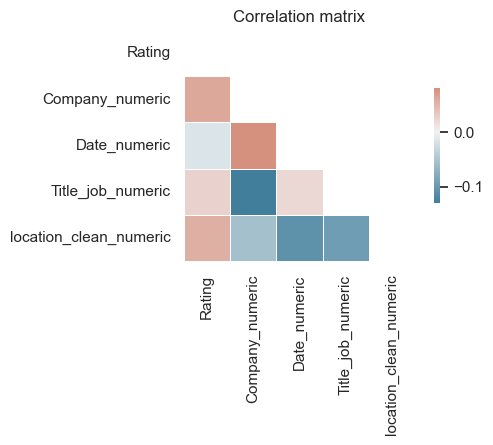

In [691]:
sns.set_theme(style="white")
df_corr = dataset4.corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
f, ax = plt.subplots(figsize=(5, 3))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation matrix')
plt.show()

Intersting result, the Title_Job has strong opposite correlation with Company and Company has strong correlation with Date 

In [692]:
dataset4['Description_l'] = dataset4.Description.apply(len)
dataset4['Descriptions_l'] = dataset4.Descriptions.apply(len)

In [693]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [694]:
optimal_length_description = int(np.quantile(dataset4.Description_l.fillna(0),.95))
optimal_length_descriptions = int(np.quantile(dataset4.Descriptions_l.fillna(0),.95))

In [695]:
X_RE = dataset4.drop(['Description','Descriptions'],axis=1)

In [696]:
df_Description = dataset4['Description']
df_descriptions = dataset4['Descriptions']

In [697]:
X = X_RE.drop('Rating',axis=1)
y = dataset4.Rating

In [698]:
X_RE

Rating  Company_numeric  Date_numeric  Title_job_numeric  \
0        2.4                1            10                353   
1        3.6                2            58                264   
2        3.0                2           390                264   
3        3.8                1            60                166   
4        0.0                1            56                 21   
...      ...              ...           ...                ...   
1195     3.9                1            17                133   
1196     3.6                1            58                353   
1197     3.7                1            75                166   
1198     3.2                1           390                353   
1199     4.2                1            26                264   

      location_clean_numeric  Description_l  Descriptions_l  
0                        135            150            2463  
1                        390            151            2665  
2                         10             46              52  
3                         14            161            3384  
4                         54            148            3572  
...                      ...            ...             ...  
1195                     390            141            3423  
1196                     390            160            5004  
1197                     390            159            2082  
1198                     108            159            6083  
1199                     390            155            2889  

[1200 rows x 7 columns]

In [701]:
X_train, X_test, y_train, y_test = train_test_split(X_RE, y,test_size = 0.2,random_state = 0, stratify = y)

#Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [702]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_val shape: {}".format(X_test.shape))
print("y_val shape: {}".format(y_test.shape))

X_train shape: (960, 7)
y_train shape: (960,)
X_val shape: (240, 7)
y_val shape: (240,)


### Modeling and Evaluation

In [704]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from time import process_time

In [705]:
default_result = {}
def traditional_regression_model_default(X_train, X_val, y_train, y_val, kind=['RandomForest','GradientBoosting','LinearRegression','SVM']):
  # This function is defined for default model of each algorithms
  import math
  if kind == 'RandomForest':
    model = RandomForestRegressor()
  elif kind == 'GradientBoosting':
    model = GradientBoostingRegressor()
  elif kind == 'LinearRegression':
    model = LinearRegression()
  elif kind == 'SVM':
    model = SVR()
  start_t = process_time()
  model.fit(X_train,y_train)
  end_t = process_time()
  # evaluation
  y_train_pred = model.predict(X_train)
  y_val_pred = model.predict(X_val)
  # r2 score
  r2_score_train = r2_score(y_train, y_train_pred)
  r2_score_val = r2_score(y_val, y_val_pred)
  # RMSE
  RMSE_train = math.sqrt(mean_squared_error(y_train, y_train_pred))
  RMSE_val = math.sqrt(mean_squared_error(y_val, y_val_pred))
  # MAE
  MAE_train = mean_absolute_error(y_train, y_train_pred)
  MAE_val = mean_absolute_error(y_val, y_val_pred)
  default_result[kind] = [end_t-start_t,r2_score_train,r2_score_val,RMSE_train,RMSE_val,MAE_train,MAE_val]
  return default_result, y_val_pred, MAE_train, MAE_val

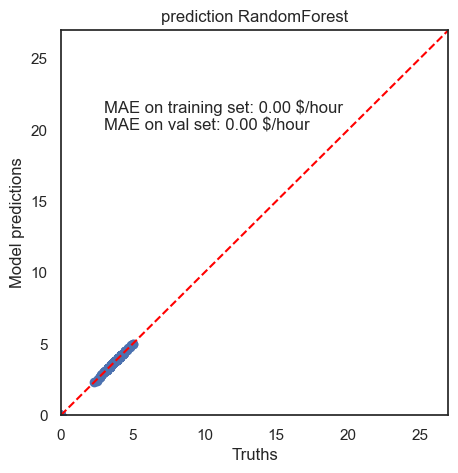

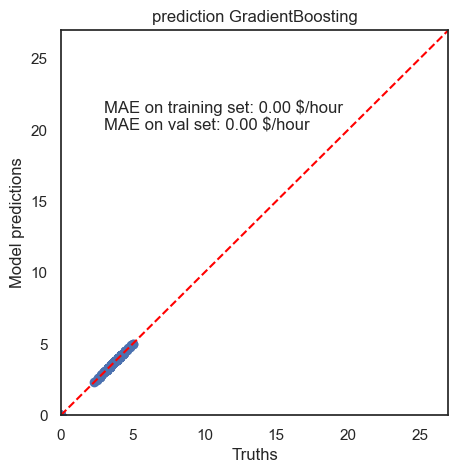

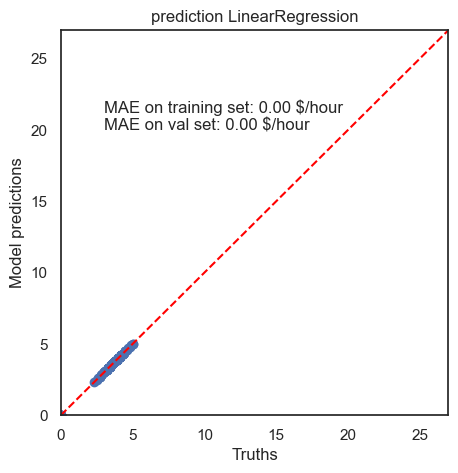

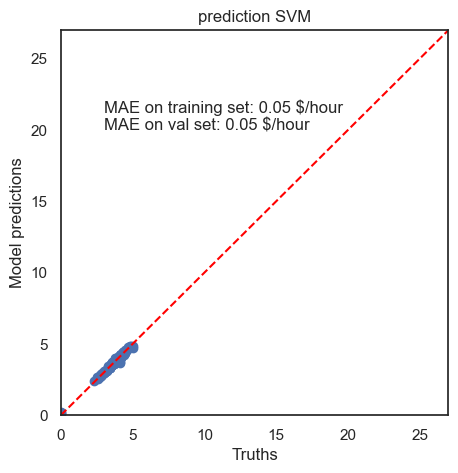

In [713]:
default_result = {}
models = ['RandomForest','GradientBoosting','LinearRegression','SVM']
for item in models:
  default_result, y_val_pred, MAE_train, MAE_val = traditional_regression_model_default(X_train, X_test, y_train, y_test,item)
  string_score = f"MAE on training set: {MAE_train:.2f} $/hour"
  string_score += f"\nMAE on val set: {MAE_val:.2f} $/hour"

  fig, ax = plt.subplots(figsize=(5, 5))
  plt.scatter(y_test, y_val_pred)
  ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
  plt.text(3, 20, string_score)
  plt.title("prediction {0}".format(item))
  plt.ylabel("Model predictions")
  plt.xlabel("Truths")
  plt.xlim([0, 27])
  _ = plt.ylim([0, 27])

In [711]:
pd_default_result = pd.DataFrame(default_result).T
pd_default_result.index.name = 'Default Model'
pd_default_result.columns = ['Training_time', 'train_r2_score', 'val_r2_score', 'train_RMSE', 'val_RMSE', 'train_MAE', 'val_MAE']
pd_default_result.sort_index()

Training_time  train_r2_score  val_r2_score    train_RMSE  \
Default Model                                                                 
GradientBoosting       0.093750        1.000000      0.999999  5.373948e-05   
LinearRegression       0.000000        1.000000      1.000000  2.877313e-16   
RandomForest           0.125000        0.999979      0.999904  3.126000e-03   
SVM                    0.046875        0.989499      0.986120  6.985442e-02   

                      val_RMSE     train_MAE       val_MAE  
Default Model                                               
GradientBoosting  6.447629e-04  2.346832e-05  6.332618e-05  
LinearRegression  2.579925e-16  1.327642e-16  1.313764e-16  
RandomForest      6.595769e-03  4.197917e-04  9.291667e-04  
SVM               7.949881e-02  4.630553e-02  5.342209e-02